<a href="https://colab.research.google.com/github/yunialifah-ya/DeepLearningTasks/blob/main/EndTermTask_Yuni_Alifah_2306288950.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Yuni Alifah

NPM : 2306288950

Prodi : S2 Matematika

Sumber Asli : https://www.kaggle.com/code/mahnazarjmand/converting-images-to-cartoon-form-using-cycle-gan

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jessicali9530_celeba_dataset_path = kagglehub.dataset_download('jessicali9530/celeba-dataset')
imreallyjohn_cartoonset10k_path = kagglehub.dataset_download('imreallyjohn/cartoonset10k')

print('Data source import complete.')


100%|██████████| 1.33G/1.33G [00:09<00:00, 154MB/s]

Extracting files...


100%|██████████| 454M/454M [00:03<00:00, 128MB/s]

Extracting files...


Data source import complete.


In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


## import libraries

In [ ]:
!pip install tensorflow-addons==0.19.0 # Install a compatible version of tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.23.0
    Uninstalling tensorflow-addons-0.23.0:
      Successfully uninstalled tensorflow-addons-0.23.0


In [ ]:
from os import listdir
import numpy as np
from numpy import savez_compressed
import os
from os import listdir
import cv2
from numpy import asarray, vstack, savez_compressed
from numpy.random import randint
from glob import glob
from random import random
from tqdm import tqdm
import tensorflow as tf
import tensorflow.image as tfi
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers
from keras.layers import ReLU, Input,Conv2D,Dropout,LeakyReLU, Activation, Concatenate, Conv2DTranspose
from keras.models import load_model,Model ,Sequential
from tensorflow_addons.layers import InstanceNormalization
from keras.initializers import RandomNormal
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'AbstractRNNCell'

## Load images

In [ ]:
pip install kaggle


In [ ]:
# Mengunduh dataset menggunakan kagglehub
jessicali9530_celeba_dataset_path = kagglehub.dataset_download('jessicali9530/celeba-dataset')
imreallyjohn_cartoonset10k_path = kagglehub.dataset_download('imreallyjohn/cartoonset10k')

# Menentukan path dataset CelebA dan CartoonSet 10k setelah diunduh
celeb_path = jessicali9530_celeba_dataset_path + '/img_align_celeba/img_align_celeba/'
cartoon_path = imreallyjohn_cartoonset10k_path + '/cartoonset10k/'

# Menampilkan path untuk memverifikasi
print(f"Path dataset CelebA: {celeb_path}")
print(f"Path dataset CartoonSet 10k: {cartoon_path}")


Path dataset CelebA: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba/
Path dataset CartoonSet 10k: /root/.cache/kagglehub/datasets/imreallyjohn/cartoonset10k/versions/1/cartoonset10k/


In [ ]:
#Resizing all the images to 64*64 pixels and storing in compressed Numpy array.
def load_images(path, size=(64, 64), max_images=None):
    data_list = []
    for filename in listdir(path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Filter for specific image file extensions
            pixels = load_img(path + filename, target_size=size)
            pixels = img_to_array(pixels)
            data_list.append(pixels)
            if max_images and len(data_list) >= max_images:
                break
    return np.asarray(data_list)

# Assuming jessicali9530_celeba_dataset_path and imreallyjohn_cartoonset10k_path
# are the paths where Kagglehub downloaded the datasets
celeb_path = jessicali9530_celeba_dataset_path + '/img_align_celeba/img_align_celeba/'
cartoon_path = imreallyjohn_cartoonset10k_path + '/cartoonset10k/'

# Verify the paths by printing them
print(f"CelebA path: {celeb_path}")
print(f"CartoonSet10k path: {cartoon_path}")

dataA = load_images(celeb_path, max_images=1000)
print('loaded dataA', dataA.shape)

dataB = load_images(cartoon_path, max_images=1000)
print('loaded dataB', dataB.shape)
filename = 'celebrity2cartoon.npz'
np.savez_compressed(filename, dataA=dataA, dataB=dataB)

print('Saved dataset:', filename)

CelebA path: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/img_align_celeba/img_align_celeba/
CartoonSet10k path: /root/.cache/kagglehub/datasets/imreallyjohn/cartoonset10k/versions/1/cartoonset10k/
loaded dataA (1000, 64, 64, 3)
loaded dataB (1000, 64, 64, 3)
Saved dataset: celebrity2cartoon.npz


## Plotting images of Celebrity and Cartoon

Loaded data: (1000, 64, 64, 3) (1000, 64, 64, 3)


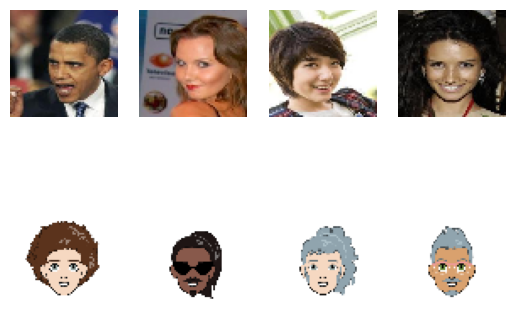

In [ ]:
from numpy import load
data = load('celebrity2cartoon.npz')
daraA, dataB = data['dataA'], data['dataB']
print('Loaded data:', dataA.shape, dataB.shape)
n_samples = 4
# plot original image
for i in range (n_samples):
    plt.subplot(2 , n_samples,1+i )
    plt.axis('off')
    plt.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range (n_samples):
    plt.subplot(2 , n_samples,1+n_samples+i )
    plt.axis('off')
    plt.imshow(dataB[i].astype('uint8'))
plt.show()


Unlike other models, the CycleGAN discriminator uses InstanceNormalization instead of BatchNormalization. It is a very simple type of normalization and involves standardizing (e.g. scaling to a standard Gaussian) the values on each output feature map, rather than across features in a batch, -1 because ensure that features are normalized per feature map.

## Defining discriminator model

The model takes 64*64 sized image as input and outputs a patch of predictions i.e. real (1) or fake (0) for generated images, optimized using Least squared loss (L2) and weighting it to used so that updates to model have half(0.5) the usual effect.

In [ ]:
#define the discriminator model
def define_discriminator(image_shape):
    #weight initialization
    init = RandomNormal(stddev = 0.02)
    #source image input
    input_image = Input(shape = image_shape)
    #c64
    x = Conv2D(64,(4,4), strides = 2 , padding = 'same', kernel_initializer = init)(input_image)
    x = LeakyReLU(alpha = 0.2)(x)
    #c128
    x = Conv2D(128,(4,4), strides = 2 , padding = 'same', kernel_initializer = init)(x)
    x = InstanceNormalization(axis = -1)(x)
    x = LeakyReLU(alpha = 0.2)(x)
    #c256
    x = Conv2D(256,(4,4), strides = 2 , padding = 'same', kernel_initializer = init)(x)
    x = InstanceNormalization(axis = -1)(x)
    x = LeakyReLU(alpha = 0.2)(x)
    #c512
    x = Conv2D(512,(4,4), strides = 2 , padding = 'same', kernel_initializer = init)(x)
    x = InstanceNormalization(axis = -1)(x)
    x = LeakyReLU(alpha = 0.2)(x)

    x = Conv2D(512,(4,4) , padding = 'same', kernel_initializer = init)(x)
    x = InstanceNormalization(axis = -1)(x)
    x = LeakyReLU(alpha = 0.2)(x)

    out_put = Conv2D(1, (4, 4), padding='same', kernel_initializer=init, use_bias=False)(x)

    model = Model(input_image, out_put)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss_weights=[0.5])

    return model

image_shape = (64, 64, 3)
discriminator = define_discriminator(image_shape)
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 instance_normalization (In  (None, 16, 16, 128)       256       
 stanceNormalization)                                            
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                             

## Defining generator model

The generator is an encoder- decoder model, where model takes source image (e.g. celebrity photo) and generates a target image (e.g. cartoon photo) by first downsampling or encoding the input image down to a bottleneck layer, then interpreting the encoding with a number of ResNet layers that use skip connections by series of layers that upsample or decode the representation to the size of output image.

So Defining the ResNet block having two 3 X 3 filters and 1 X 1 stride where input to block is concatenated to output of block channel wise.

In [ ]:
def resnet_block(filters, layer):
    # weight initialization
    init = RandomNormal(stddev=0.02)

    #print(layer.shape)  # print the shape of the previous layer

    x = Conv2D(filters, (3,3), padding='same', kernel_initializer=init)(layer)
    x = InstanceNormalization(axis=-1)(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3,3), padding='same', kernel_initializer=init)(x)
    x = InstanceNormalization(axis=-1)(x)

    # skip connection
    x = Concatenate()([x, layer])
    return x


In [ ]:
def downsample(filters, layer, size=3, strides=2, activation=None, index=None, norm=True):
    x = Conv2D(filters, kernel_size=size, strides=strides, padding ='same', kernel_initializer='he_normal', use_bias=False)(layer)
    x = InstanceNormalization(axis=-1)(x)
    x = LeakyReLU()(x)
    return x

the model outputs pixel values with the shape as the input and pixel values are in the range [-1, 1], typical for GAN generator models.

In [ ]:
# define the generator model
def define_generator(image_shape, n_resnet=9):
    #weight initialization
    init = RandomNormal(stddev = 0.02)
    #source image input
    input_image = Input(shape = image_shape)
    #c64
    x = Conv2D(64,(7,7) , padding = 'same', kernel_initializer = init)(input_image)
    x = InstanceNormalization(axis = -1)(x)
    x = Activation('relu')(x)
    #c128
    x = Conv2D(128,(3,3), strides = 2 , padding = 'same', kernel_initializer = init)(x)
    x = InstanceNormalization(axis = -1)(x)
    x = Activation('relu')(x)
    #c256
    x = Conv2D(256,(3,3), strides = 2 , padding = 'same', kernel_initializer = init)(x)
    x = InstanceNormalization(axis = -1)(x)
    x = Activation('relu')(x)

    for i in range(n_resnet):
        x = resnet_block(256 , x)

    # Add Conv2DTranspose layers to upscale the image to the desired shape
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same', kernel_initializer=init)(x)
    x = InstanceNormalization(axis=-1)(x)
    x = Activation('relu')(x)

    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same', kernel_initializer=init)(x)
    x = InstanceNormalization(axis=-1)(x)
    x = Activation('relu')(x)

    x = Conv2D(3, (7, 7), padding='same', kernel_initializer=init)(x)
    x = InstanceNormalization(axis=-1)(x)
    out_image = Activation('tanh')(x)

    model = Model(input_image, out_image)
    return model
image_shape = (64, 64, 3)
generator = define_generator(image_shape)
generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 64, 64, 64)           9472      ['input_2[0][0]']             
                                                                                                  
 instance_normalization_4 (  (None, 64, 64, 64)           128       ['conv2d_6[0][0]']            
 InstanceNormalization)                                                                           
                                                                                                  
 activation (Activation)     (None, 64, 64, 64)           0         ['instance_normalization

The generator models are trained via their related discriminator models. Specifically, they are updated to minimize the loss predicted by the discriminator for generated images marked as “real“, called adversarial loss. As such, they are encouraged to generate images that better fit into the target domain.

The generator models are also updated based on how effective they are at the regeneration of a source image when used with the other generator model, called cycle loss. Finally, a generator model is expected to output an image without translation when provided an example from the target domain, called identity loss.

Altogether, each generator model is optimized via the combination of four outputs with four loss functions:

- Adversarial loss (L2 or mean squared error).
- Identity loss (L1 or mean absolute error).
- Forward cycle loss (L1 or mean absolute error).
- Backward cycle loss (L1 or mean absolute error).
This is done in below function which takes input as generator models (g_model_1) and (g_model_2) and discriminator model (d_model) and we are mainly focus on updating first generator model hence other 2 inputs are kept false for trainable.

To summarize, a composite model has two inputs for the real photos from Domain-A and Domain-B, and four outputs for the discriminator output, identity generated image, forward cycle generated image, and backward cycle generated image.

## Defining Composite model

In [ ]:
from keras.layers import Lambda, Reshape

def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
    g_model_1.trainable = True
    d_model.trainable = False
    g_model_2.trainable = False

    # Input for generated images
    input_gen = Input(shape=image_shape)

    # Resize generated images to the shape expected by the discriminator
    resized_gen = Lambda(lambda x: tf.image.resize(x, (64, 64), method=tf.image.ResizeMethod.BILINEAR))(input_gen)

    # Forward pass through the generator and discriminator
    gen_1_out = g_model_1(resized_gen)
    output_d = d_model(gen_1_out)

    # Input for identity mapping
    input_id = Input(shape=image_shape)

    # Forward pass for identity mapping
    output_id = g_model_1(input_id)

    # Forward and backward cycle loss
    output_f = g_model_2(gen_1_out)
    gen_2_out = g_model_2(input_id)
    output_b = g_model_1(gen_2_out)

    # Define the composite model
    model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])

    opt = Adam(learning_rate=0.0002, beta_1=0.5)

    model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)

    return model

Load our paired images dataset in compressed NumPy array format. This will return a list of two NumPy arrays: the first for source images and the second for corresponding target images.



## Load real samples

In [ ]:
def load_real_samples(filename):
    data = load(filename)
    X1,X2 = data['dataA'],data['dataB']
    X1 = (X1-127.5)/127.5 #for source image
    X2 = (X2-127.5)/127.5 # for corresponding target images
    return [X1,X2]

Each training iteration we will require a sample of real images from each domain as input to the discriminator and composite generator models. This can be achieved by selecting a random batch of samples.

In [ ]:
import random

def generate_real_samples(dataset, n_samples, patch_shape):
    # choose random instances
    ix = randint(0,dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples, patch_shape, patch_shape, 1))
    return X, y


A sample of generated images is required to update each discriminator model in each training iteration.

In [ ]:
##select a batch of random samples,return images and target
def generate_fake_samples(g_model, dataset, patch_shape):
    # Generate a batch of random noise as input for the generator
    X = g_model.predict(dataset)

    # Create 'fake' class labels (0)
    y = np.zeros((len(X), patch_shape,patch_shape, 1))

    return X, y


In [ ]:
#save the generator model to file
def save_models(step, g_model_AtoB, g_model_BtoA):
    filename1 = 'g_model_AtoB_%06d.h5' %(step +1)
    g_model_AtoB.save(filename1)
    filename2 = 'g_model_BtoA_%06d.h5' %(step +1)
    g_model_BtoA.save(filename2)
    print('>saved:%s and %s' %(filename1,filename2))


So, as discriminator models are updated directly on real and generated images , to see how discriminator models learn a pool of fake images is there.

In [ ]:
#update image pool for fake image
import random  # Import the random module

def update_image_pool(pool, images, max_size=50):
    selected = list()
    for image in images:
        if len(pool) < max_size:
            # Stock the pool
            pool.append(image)
            selected.append(image)
        elif random.random() < 0.5:  # Use random.random() instead of random() here
            # Use image, but don't add it to the pool
            selected.append(image)
        else:
            # Replace an existing image and use the replaced image
            ix = np.random.randint(0, len(pool))
            selected.append(pool[ix])
            pool[ix] = image
    return np.asarray(selected)  # This line should be outside the for loop



In [ ]:
def show_image(image , title = None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [ ]:
def show_preds(g_AB, g_BA, n_images=1):
    for i in range(n_images):
        id = np.random.randint(len(dataA))
        data = load('celebrity2cartoon.npz')
        celeb, cartoon = dataA[id], dataB[id]
        celeb_pred, cartoon_pred = g_BA.predict(tf.expand_dims(cartoon, axis=0))[0], g_AB.predict(tf.expand_dims(celeb, axis=0))[0]

        plt.figure(figsize=(10, 8))

        plt.subplot(1, 4, 1)
        show_image(celeb.astype('uint8'), title='Original celeb')

        plt.subplot(1, 4, 2)
        show_image(cartoon_pred, title='Generated celeb')

        plt.subplot(1, 4, 3)
        show_image(cartoon.astype('uint8'), title='Original cartoon')

        plt.subplot(1, 4, 4)
        show_image(celeb_pred, title='Generated cartoon')


        plt.show()

Now the training the models which takes all 6 models ( 2 discriminator , 2 generator and 2 composite models) as input with dataset for training.

Batch of real images from each domain is selected and then batch of fake images for each domain is generated. Generator A model (Cartoon to celebrity) is updated via composite model followed by Discriminator A model (Celebrity) i.e. Fix Discriminator and update Generator weight then fix Generator and update discriminator.

Similarly, Generator B (Celebrity to Cartoon) and discriminator B (Cartoon) models are updated .

## Train cyclegan model

In [ ]:
# train cyclegan model
def train(dataset,d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA,epochs=10, chunk=5):
    #define peroperties of the training run
    n_epochs, n_batch = epochs, 1
    #determine the output square shape of discriminator
    n_patch = d_model_A.output_shape[1]
    #unpack dataset
    trainA, trainB = dataset[0], dataset[1]
    #prepare image pool for fakes
    poolA, poolB = list(), list()
    #calcute the number of batches per training epoch
    batch_per_epoch = int(len(trainA)/n_batch)
    #calcute the number of training iteration
    n_steps = batch_per_epoch
    #manually enumerate epochs
    for j in tqdm(range(epochs), desc='Epochs'):
        for i in tqdm(range(n_steps), desc='Batchs'):
            #select a batch of real sample
            X_realA, y_realA = generate_real_samples(trainA,n_batch, n_patch)
            X_realB, y_realB = generate_real_samples(trainB,n_batch, n_patch)

            #genarate a batch of fake sample
            X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
            X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)





            #update fakes from pool
            X_fakeA = update_image_pool(poolA, X_fakeA)
            X_fakeB = update_image_pool(poolB, X_fakeB)

            #update generator B->A via adversarial and cycle loss
            gen_loss2, _, _, _,_ = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])


            # update discriminator for A->[real/fake]
            dA_loss_1 = d_model_A.train_on_batch(X_realA, y_realA)
            dA_loss_2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)

            #update generator A->B via adversarial and cycle loss
            gen_loss1, _, _, _,_ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])

            # update discriminator for B->[real/fake]
            dB_loss_1 = d_model_B.train_on_batch(X_realB, y_realB)
            dB_loss_2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)

            #summerize performance
            print('>%d, dA[%.3f ,%.3f ] dB[%.3f ,%.3f] g[%.3f ,%.3f]' %(i+1,dA_loss_1,dA_loss_2, dB_loss_1,dB_loss_2,gen_loss1,gen_loss2))

        if(j%chunk)==0:
            show_preds(g_model_AtoB,g_model_BtoA, n_images=1)
                #save the models
            g_model_AtoB.save('Generator_Celebrity_to_Cartoon.h5')
            g_model_BtoA.save('Generator_Cartoon_to_Celebrity.h5')



The loss is reported each training iteration, including the Discriminator-A loss on real and fake examples (dA), Discriminator-B loss on real and fake examples (dB), and Generator-AtoB and Generator-BtoA loss, each of which is a weighted average of adversarial, identity, forward, and backward cycle loss (g).

Loaded (1000, 64, 64, 3) (1000, 64, 64, 3)


Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 971ms/step



Batchs:   0%|          | 1/1000 [00:52<14:40:27, 52.88s/it]

>1, dA[0.391 ,0.952 ] dB[1.332 ,0.745] g[23.828 ,21.225]
1/1 [==============================] - 0s 80ms/step



Batchs:   0%|          | 2/1000 [00:54<6:16:26, 22.63s/it] 

>2, dA[1.499 ,2.075 ] dB[6.231 ,0.236] g[22.073 ,22.230]
1/1 [==============================] - 0s 84ms/step



Batchs:   0%|          | 3/1000 [00:55<3:35:18, 12.96s/it]

>3, dA[0.946 ,3.435 ] dB[2.062 ,0.334] g[22.392 ,22.889]
1/1 [==============================] - 0s 93ms/step



Batchs:   0%|          | 4/1000 [00:57<2:20:32,  8.47s/it]

>4, dA[4.836 ,2.206 ] dB[0.749 ,1.060] g[21.941 ,21.909]
1/1 [==============================] - 0s 87ms/step



Batchs:   0%|          | 5/1000 [00:58<1:39:05,  5.98s/it]

>5, dA[1.760 ,1.234 ] dB[4.841 ,0.751] g[20.949 ,21.247]
1/1 [==============================] - 0s 73ms/step



Batchs:   1%|          | 6/1000 [01:00<1:13:21,  4.43s/it]

>6, dA[1.302 ,1.502 ] dB[3.062 ,0.674] g[22.145 ,21.275]
1/1 [==============================] - 0s 78ms/step



Batchs:   1%|          | 7/1000 [01:01<57:11,  3.46s/it]  

>7, dA[2.328 ,3.521 ] dB[1.976 ,0.766] g[20.762 ,22.781]
1/1 [==============================] - 0s 83ms/step



Batchs:   1%|          | 8/1000 [01:03<46:29,  2.81s/it]

>8, dA[0.382 ,5.016 ] dB[1.686 ,0.595] g[22.924 ,23.625]
1/1 [==============================] - 0s 75ms/step



Batchs:   1%|          | 9/1000 [01:04<39:16,  2.38s/it]

>9, dA[1.620 ,1.800 ] dB[1.604 ,0.760] g[20.464 ,20.259]
1/1 [==============================] - 0s 73ms/step



Batchs:   1%|          | 10/1000 [01:06<34:38,  2.10s/it]

>10, dA[1.034 ,1.649 ] dB[1.076 ,0.705] g[19.742 ,20.500]
1/1 [==============================] - 0s 75ms/step



Batchs:   1%|          | 11/1000 [01:07<31:12,  1.89s/it]

>11, dA[2.275 ,3.152 ] dB[3.168 ,2.361] g[25.173 ,24.627]
1/1 [==============================] - 0s 75ms/step



Batchs:   1%|          | 12/1000 [01:08<28:51,  1.75s/it]

>12, dA[4.590 ,1.852 ] dB[2.031 ,1.889] g[21.610 ,23.035]
1/1 [==============================] - 0s 86ms/step



Batchs:   1%|▏         | 13/1000 [01:10<27:44,  1.69s/it]

>13, dA[0.824 ,3.684 ] dB[0.563 ,1.000] g[19.665 ,20.855]
1/1 [==============================] - 0s 89ms/step



Batchs:   1%|▏         | 14/1000 [01:12<27:04,  1.65s/it]

>14, dA[0.934 ,2.322 ] dB[1.859 ,0.635] g[20.614 ,20.958]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 15/1000 [01:13<26:05,  1.59s/it]

>15, dA[0.603 ,1.598 ] dB[2.156 ,1.401] g[21.539 ,22.752]
1/1 [==============================] - 0s 75ms/step



Batchs:   2%|▏         | 16/1000 [01:14<25:14,  1.54s/it]

>16, dA[1.195 ,4.788 ] dB[1.649 ,0.535] g[18.088 ,22.656]
1/1 [==============================] - 0s 75ms/step



Batchs:   2%|▏         | 17/1000 [01:16<24:38,  1.50s/it]

>17, dA[1.419 ,2.534 ] dB[3.296 ,1.688] g[18.757 ,21.363]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 18/1000 [01:17<24:12,  1.48s/it]

>18, dA[0.709 ,1.149 ] dB[0.567 ,1.349] g[20.476 ,18.296]
1/1 [==============================] - 0s 80ms/step



Batchs:   2%|▏         | 19/1000 [01:19<24:08,  1.48s/it]

>19, dA[0.313 ,0.977 ] dB[0.905 ,1.157] g[18.153 ,19.105]
1/1 [==============================] - 0s 78ms/step



Batchs:   2%|▏         | 20/1000 [01:20<23:54,  1.46s/it]

>20, dA[1.136 ,0.616 ] dB[1.079 ,0.751] g[20.811 ,20.142]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 21/1000 [01:22<23:44,  1.45s/it]

>21, dA[2.157 ,0.410 ] dB[0.537 ,3.118] g[23.056 ,15.207]
1/1 [==============================] - 0s 87ms/step



Batchs:   2%|▏         | 22/1000 [01:23<24:05,  1.48s/it]

>22, dA[1.693 ,0.347 ] dB[0.621 ,1.508] g[20.190 ,19.199]
1/1 [==============================] - 0s 85ms/step



Batchs:   2%|▏         | 23/1000 [01:25<24:22,  1.50s/it]

>23, dA[0.555 ,0.503 ] dB[0.314 ,2.017] g[21.268 ,17.697]
1/1 [==============================] - 0s 76ms/step



Batchs:   2%|▏         | 24/1000 [01:26<24:01,  1.48s/it]

>24, dA[0.926 ,0.361 ] dB[0.997 ,0.374] g[16.275 ,13.595]
1/1 [==============================] - 0s 74ms/step



Batchs:   2%|▎         | 25/1000 [01:28<23:47,  1.46s/it]

>25, dA[1.310 ,0.962 ] dB[0.524 ,1.122] g[18.388 ,17.340]
1/1 [==============================] - 0s 74ms/step



Batchs:   3%|▎         | 26/1000 [01:29<23:36,  1.45s/it]

>26, dA[0.679 ,0.394 ] dB[0.612 ,0.810] g[18.845 ,16.575]
1/1 [==============================] - 0s 75ms/step



Batchs:   3%|▎         | 27/1000 [01:30<23:29,  1.45s/it]

>27, dA[0.948 ,0.217 ] dB[0.613 ,1.114] g[18.917 ,16.485]
1/1 [==============================] - 0s 77ms/step



Batchs:   3%|▎         | 28/1000 [01:32<23:23,  1.44s/it]

>28, dA[0.225 ,0.371 ] dB[1.343 ,1.757] g[21.059 ,16.399]
1/1 [==============================] - 0s 76ms/step



Batchs:   3%|▎         | 29/1000 [01:33<23:17,  1.44s/it]

>29, dA[0.226 ,0.322 ] dB[0.978 ,0.468] g[17.291 ,15.610]
1/1 [==============================] - 0s 77ms/step



Batchs:   3%|▎         | 30/1000 [01:35<23:14,  1.44s/it]

>30, dA[0.282 ,0.039 ] dB[0.295 ,0.613] g[17.529 ,15.288]
1/1 [==============================] - 0s 88ms/step



Batchs:   3%|▎         | 31/1000 [01:36<23:38,  1.46s/it]

>31, dA[0.282 ,0.046 ] dB[0.507 ,0.560] g[19.343 ,17.030]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 32/1000 [01:38<24:05,  1.49s/it]

>32, dA[1.743 ,0.071 ] dB[0.286 ,1.471] g[18.971 ,16.057]
1/1 [==============================] - 0s 83ms/step



Batchs:   3%|▎         | 33/1000 [01:39<23:49,  1.48s/it]

>33, dA[0.142 ,0.140 ] dB[0.274 ,0.525] g[15.447 ,15.053]
1/1 [==============================] - 0s 78ms/step



Batchs:   3%|▎         | 34/1000 [01:41<23:46,  1.48s/it]

>34, dA[0.151 ,0.278 ] dB[0.073 ,0.457] g[16.711 ,15.930]
1/1 [==============================] - 0s 84ms/step



Batchs:   4%|▎         | 35/1000 [01:42<23:33,  1.46s/it]

>35, dA[3.029 ,0.518 ] dB[0.342 ,1.361] g[17.835 ,14.654]
1/1 [==============================] - 0s 75ms/step



Batchs:   4%|▎         | 36/1000 [01:44<23:19,  1.45s/it]

>36, dA[0.605 ,0.196 ] dB[0.077 ,1.820] g[18.095 ,14.428]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▎         | 37/1000 [01:45<23:37,  1.47s/it]

>37, dA[0.300 ,0.315 ] dB[0.293 ,0.946] g[16.077 ,13.692]
1/1 [==============================] - 0s 79ms/step



Batchs:   4%|▍         | 38/1000 [01:47<23:26,  1.46s/it]

>38, dA[0.718 ,0.455 ] dB[0.352 ,0.216] g[15.970 ,15.142]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 39/1000 [01:48<23:15,  1.45s/it]

>39, dA[0.700 ,0.221 ] dB[0.126 ,0.384] g[16.656 ,16.652]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 40/1000 [01:50<23:42,  1.48s/it]

>40, dA[0.813 ,0.185 ] dB[0.134 ,0.551] g[18.230 ,17.445]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 41/1000 [01:51<24:00,  1.50s/it]

>41, dA[0.605 ,0.550 ] dB[0.254 ,0.166] g[14.385 ,14.749]
1/1 [==============================] - 0s 81ms/step



Batchs:   4%|▍         | 42/1000 [01:53<23:42,  1.49s/it]

>42, dA[0.475 ,0.373 ] dB[0.215 ,0.157] g[14.430 ,13.116]
1/1 [==============================] - 0s 78ms/step



Batchs:   4%|▍         | 43/1000 [01:54<23:30,  1.47s/it]

>43, dA[0.302 ,0.196 ] dB[0.099 ,0.207] g[15.847 ,14.423]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 44/1000 [01:55<23:20,  1.47s/it]

>44, dA[0.420 ,0.609 ] dB[0.196 ,0.167] g[14.090 ,13.500]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 45/1000 [01:57<23:10,  1.46s/it]

>45, dA[0.391 ,0.448 ] dB[0.087 ,0.269] g[16.284 ,14.575]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▍         | 46/1000 [01:58<22:59,  1.45s/it]

>46, dA[0.609 ,0.221 ] dB[0.395 ,0.266] g[15.589 ,14.484]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▍         | 47/1000 [02:00<22:56,  1.44s/it]

>47, dA[0.208 ,0.185 ] dB[0.131 ,0.204] g[16.927 ,15.928]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▍         | 48/1000 [02:01<22:47,  1.44s/it]

>48, dA[0.619 ,0.325 ] dB[0.132 ,0.133] g[16.856 ,18.172]
1/1 [==============================] - 0s 88ms/step



Batchs:   5%|▍         | 49/1000 [02:03<23:22,  1.47s/it]

>49, dA[0.591 ,0.363 ] dB[0.139 ,0.113] g[14.740 ,13.697]
1/1 [==============================] - 0s 88ms/step



Batchs:   5%|▌         | 50/1000 [02:04<23:42,  1.50s/it]

>50, dA[3.330 ,0.489 ] dB[0.054 ,0.484] g[13.922 ,13.986]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 51/1000 [02:06<23:29,  1.49s/it]

>51, dA[0.639 ,0.475 ] dB[0.060 ,0.141] g[15.576 ,14.570]
1/1 [==============================] - 0s 74ms/step



Batchs:   5%|▌         | 52/1000 [02:07<23:25,  1.48s/it]

>52, dA[3.164 ,0.488 ] dB[0.117 ,0.228] g[14.221 ,13.759]
1/1 [==============================] - 0s 72ms/step



Batchs:   5%|▌         | 53/1000 [02:09<23:07,  1.47s/it]

>53, dA[1.081 ,0.612 ] dB[0.150 ,0.146] g[15.971 ,14.774]
1/1 [==============================] - 0s 75ms/step



Batchs:   5%|▌         | 54/1000 [02:10<22:55,  1.45s/it]

>54, dA[0.454 ,0.206 ] dB[0.096 ,0.357] g[16.262 ,16.218]
1/1 [==============================] - 0s 76ms/step



Batchs:   6%|▌         | 55/1000 [02:11<22:52,  1.45s/it]

>55, dA[3.929 ,1.411 ] dB[0.450 ,0.394] g[14.471 ,14.170]
1/1 [==============================] - 0s 75ms/step



Batchs:   6%|▌         | 56/1000 [02:13<22:42,  1.44s/it]

>56, dA[0.780 ,0.427 ] dB[0.117 ,0.321] g[15.295 ,15.674]
1/1 [==============================] - 0s 84ms/step



Batchs:   6%|▌         | 57/1000 [02:14<22:38,  1.44s/it]

>57, dA[0.281 ,0.982 ] dB[0.120 ,0.179] g[15.014 ,13.873]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 58/1000 [02:16<23:02,  1.47s/it]

>58, dA[0.321 ,0.173 ] dB[0.042 ,0.069] g[16.426 ,15.229]
1/1 [==============================] - 0s 88ms/step



Batchs:   6%|▌         | 59/1000 [02:17<23:28,  1.50s/it]

>59, dA[0.253 ,0.421 ] dB[0.055 ,0.086] g[15.338 ,13.190]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 60/1000 [02:19<23:14,  1.48s/it]

>60, dA[0.394 ,0.190 ] dB[0.031 ,0.074] g[15.453 ,14.204]
1/1 [==============================] - 0s 76ms/step



Batchs:   6%|▌         | 61/1000 [02:20<22:59,  1.47s/it]

>61, dA[0.268 ,0.062 ] dB[0.040 ,0.121] g[15.082 ,14.495]
1/1 [==============================] - 0s 78ms/step



Batchs:   6%|▌         | 62/1000 [02:22<22:47,  1.46s/it]

>62, dA[0.548 ,0.137 ] dB[0.075 ,0.109] g[15.202 ,13.856]
1/1 [==============================] - 0s 77ms/step



Batchs:   6%|▋         | 63/1000 [02:23<22:38,  1.45s/it]

>63, dA[0.313 ,0.136 ] dB[0.073 ,0.093] g[15.753 ,14.906]
1/1 [==============================] - 0s 75ms/step



Batchs:   6%|▋         | 64/1000 [02:25<22:31,  1.44s/it]

>64, dA[0.523 ,0.111 ] dB[0.100 ,0.607] g[14.029 ,13.230]
1/1 [==============================] - 0s 79ms/step



Batchs:   6%|▋         | 65/1000 [02:26<22:36,  1.45s/it]

>65, dA[0.692 ,0.208 ] dB[0.153 ,0.300] g[14.340 ,13.252]
1/1 [==============================] - 0s 75ms/step



Batchs:   7%|▋         | 66/1000 [02:28<22:29,  1.44s/it]

>66, dA[0.347 ,0.716 ] dB[0.061 ,2.465] g[16.982 ,16.096]
1/1 [==============================] - 0s 88ms/step



Batchs:   7%|▋         | 67/1000 [02:29<22:54,  1.47s/it]

>67, dA[0.104 ,0.259 ] dB[0.307 ,0.557] g[13.191 ,12.155]
1/1 [==============================] - 0s 88ms/step



Batchs:   7%|▋         | 68/1000 [02:31<23:14,  1.50s/it]

>68, dA[0.436 ,0.255 ] dB[0.155 ,0.068] g[14.882 ,15.245]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 69/1000 [02:32<23:01,  1.48s/it]

>69, dA[0.902 ,0.386 ] dB[0.114 ,1.404] g[13.873 ,12.222]
1/1 [==============================] - 0s 75ms/step



Batchs:   7%|▋         | 70/1000 [02:33<22:43,  1.47s/it]

>70, dA[0.320 ,0.262 ] dB[0.171 ,0.488] g[16.111 ,13.231]
1/1 [==============================] - 0s 75ms/step



Batchs:   7%|▋         | 71/1000 [02:35<22:33,  1.46s/it]

>71, dA[0.264 ,0.119 ] dB[0.153 ,0.245] g[15.435 ,14.812]
1/1 [==============================] - 0s 74ms/step



Batchs:   7%|▋         | 72/1000 [02:36<22:21,  1.45s/it]

>72, dA[0.347 ,0.115 ] dB[0.233 ,0.324] g[14.597 ,12.925]
1/1 [==============================] - 0s 77ms/step



Batchs:   7%|▋         | 73/1000 [02:38<22:41,  1.47s/it]

>73, dA[0.632 ,0.703 ] dB[0.068 ,0.054] g[15.351 ,14.140]
1/1 [==============================] - 0s 77ms/step



Batchs:   7%|▋         | 74/1000 [02:39<22:33,  1.46s/it]

>74, dA[0.695 ,0.303 ] dB[0.045 ,0.138] g[13.733 ,12.284]
1/1 [==============================] - 0s 78ms/step



Batchs:   8%|▊         | 75/1000 [02:41<22:28,  1.46s/it]

>75, dA[3.670 ,0.491 ] dB[0.069 ,0.179] g[14.034 ,13.005]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 76/1000 [02:42<22:48,  1.48s/it]

>76, dA[2.611 ,0.438 ] dB[0.076 ,0.316] g[14.643 ,14.032]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 77/1000 [02:44<23:07,  1.50s/it]

>77, dA[0.408 ,0.546 ] dB[0.192 ,0.330] g[14.274 ,13.926]
1/1 [==============================] - 0s 75ms/step



Batchs:   8%|▊         | 78/1000 [02:45<22:46,  1.48s/it]

>78, dA[0.563 ,0.238 ] dB[0.187 ,7.415] g[16.044 ,16.369]
1/1 [==============================] - 0s 76ms/step



Batchs:   8%|▊         | 79/1000 [02:47<22:31,  1.47s/it]

>79, dA[0.123 ,1.313 ] dB[0.654 ,0.411] g[16.112 ,14.705]
1/1 [==============================] - 0s 79ms/step



Batchs:   8%|▊         | 80/1000 [02:48<22:28,  1.47s/it]

>80, dA[0.408 ,0.501 ] dB[0.102 ,0.164] g[15.149 ,13.670]
1/1 [==============================] - 0s 83ms/step



Batchs:   8%|▊         | 81/1000 [02:50<22:18,  1.46s/it]

>81, dA[0.416 ,0.381 ] dB[0.186 ,0.054] g[13.262 ,11.598]
1/1 [==============================] - 0s 75ms/step



Batchs:   8%|▊         | 82/1000 [02:51<22:08,  1.45s/it]

>82, dA[1.066 ,0.133 ] dB[0.080 ,1.293] g[15.990 ,15.590]
1/1 [==============================] - 0s 75ms/step



Batchs:   8%|▊         | 83/1000 [02:52<22:00,  1.44s/it]

>83, dA[0.349 ,0.242 ] dB[0.181 ,0.326] g[15.941 ,14.388]
1/1 [==============================] - 0s 76ms/step



Batchs:   8%|▊         | 84/1000 [02:54<21:58,  1.44s/it]

>84, dA[0.267 ,0.810 ] dB[0.310 ,0.210] g[14.913 ,15.441]
1/1 [==============================] - 0s 86ms/step



Batchs:   8%|▊         | 85/1000 [02:55<22:21,  1.47s/it]

>85, dA[0.426 ,0.185 ] dB[0.017 ,0.186] g[15.147 ,13.291]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▊         | 86/1000 [02:57<22:42,  1.49s/it]

>86, dA[0.413 ,0.102 ] dB[0.103 ,0.292] g[15.183 ,14.496]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▊         | 87/1000 [02:58<22:35,  1.48s/it]

>87, dA[0.296 ,0.483 ] dB[0.083 ,2.029] g[14.553 ,12.966]
1/1 [==============================] - 0s 75ms/step



Batchs:   9%|▉         | 88/1000 [03:00<22:16,  1.47s/it]

>88, dA[0.797 ,0.234 ] dB[0.213 ,0.181] g[13.310 ,12.144]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▉         | 89/1000 [03:01<22:06,  1.46s/it]

>89, dA[0.351 ,0.082 ] dB[0.074 ,0.097] g[13.642 ,11.543]
1/1 [==============================] - 0s 74ms/step



Batchs:   9%|▉         | 90/1000 [03:03<21:56,  1.45s/it]

>90, dA[0.162 ,0.190 ] dB[0.124 ,0.043] g[12.355 ,10.552]
1/1 [==============================] - 0s 83ms/step



Batchs:   9%|▉         | 91/1000 [03:04<21:54,  1.45s/it]

>91, dA[0.427 ,0.050 ] dB[0.077 ,0.062] g[13.350 ,11.876]
1/1 [==============================] - 0s 75ms/step



Batchs:   9%|▉         | 92/1000 [03:06<21:48,  1.44s/it]

>92, dA[0.265 ,0.097 ] dB[0.063 ,0.048] g[13.864 ,13.133]
1/1 [==============================] - 0s 74ms/step



Batchs:   9%|▉         | 93/1000 [03:07<21:39,  1.43s/it]

>93, dA[0.215 ,0.479 ] dB[0.036 ,0.133] g[14.214 ,13.742]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▉         | 94/1000 [03:09<22:16,  1.48s/it]

>94, dA[0.271 ,0.324 ] dB[0.058 ,0.085] g[14.287 ,12.613]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|▉         | 95/1000 [03:10<22:45,  1.51s/it]

>95, dA[0.430 ,0.078 ] dB[0.059 ,0.050] g[15.470 ,14.875]
1/1 [==============================] - 0s 86ms/step



Batchs:  10%|▉         | 96/1000 [03:12<22:35,  1.50s/it]

>96, dA[0.167 ,0.322 ] dB[0.121 ,0.079] g[12.183 ,10.715]
1/1 [==============================] - 0s 78ms/step



Batchs:  10%|▉         | 97/1000 [03:13<22:14,  1.48s/it]

>97, dA[0.220 ,0.218 ] dB[0.123 ,0.034] g[14.159 ,12.388]
1/1 [==============================] - 0s 82ms/step



Batchs:  10%|▉         | 98/1000 [03:15<22:00,  1.46s/it]

>98, dA[0.436 ,0.092 ] dB[0.025 ,1.427] g[15.730 ,14.018]
1/1 [==============================] - 0s 78ms/step



Batchs:  10%|▉         | 99/1000 [03:16<21:49,  1.45s/it]

>99, dA[0.424 ,0.316 ] dB[0.079 ,0.394] g[13.628 ,12.150]
1/1 [==============================] - 0s 74ms/step



Batchs:  10%|█         | 100/1000 [03:17<21:37,  1.44s/it]

>100, dA[0.211 ,0.139 ] dB[0.137 ,0.166] g[13.635 ,12.278]
1/1 [==============================] - 0s 78ms/step



Batchs:  10%|█         | 101/1000 [03:19<21:32,  1.44s/it]

>101, dA[0.498 ,0.407 ] dB[0.040 ,0.072] g[13.289 ,12.215]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|█         | 102/1000 [03:20<21:27,  1.43s/it]

>102, dA[0.155 ,0.142 ] dB[0.112 ,0.318] g[14.739 ,13.861]
1/1 [==============================] - 0s 75ms/step



Batchs:  10%|█         | 103/1000 [03:22<21:52,  1.46s/it]

>103, dA[0.226 ,0.076 ] dB[0.062 ,0.727] g[13.205 ,11.366]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|█         | 104/1000 [03:23<22:14,  1.49s/it]

>104, dA[0.319 ,0.097 ] dB[0.070 ,0.148] g[11.794 ,9.901]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|█         | 105/1000 [03:25<22:11,  1.49s/it]

>105, dA[0.227 ,0.160 ] dB[0.029 ,0.146] g[14.088 ,12.143]
1/1 [==============================] - 0s 75ms/step



Batchs:  11%|█         | 106/1000 [03:26<21:52,  1.47s/it]

>106, dA[0.174 ,0.307 ] dB[0.146 ,1.805] g[13.238 ,10.741]
1/1 [==============================] - 0s 78ms/step



Batchs:  11%|█         | 107/1000 [03:28<21:42,  1.46s/it]

>107, dA[0.638 ,0.377 ] dB[0.328 ,2.511] g[15.489 ,14.050]
1/1 [==============================] - 0s 82ms/step



Batchs:  11%|█         | 108/1000 [03:29<21:32,  1.45s/it]

>108, dA[0.244 ,0.092 ] dB[0.387 ,0.337] g[12.871 ,11.149]
1/1 [==============================] - 0s 74ms/step



Batchs:  11%|█         | 109/1000 [03:30<21:21,  1.44s/it]

>109, dA[0.152 ,0.375 ] dB[0.199 ,0.124] g[11.789 ,11.206]
1/1 [==============================] - 0s 81ms/step



Batchs:  11%|█         | 110/1000 [03:32<21:23,  1.44s/it]

>110, dA[0.036 ,0.107 ] dB[0.057 ,0.874] g[13.712 ,12.417]
1/1 [==============================] - 0s 77ms/step



Batchs:  11%|█         | 111/1000 [03:33<21:18,  1.44s/it]

>111, dA[0.111 ,0.079 ] dB[0.112 ,0.133] g[13.351 ,12.020]
1/1 [==============================] - 0s 76ms/step



Batchs:  11%|█         | 112/1000 [03:35<21:27,  1.45s/it]

>112, dA[0.298 ,0.482 ] dB[0.091 ,0.091] g[14.304 ,12.314]
1/1 [==============================] - 0s 91ms/step



Batchs:  11%|█▏        | 113/1000 [03:36<21:51,  1.48s/it]

>113, dA[0.231 ,0.114 ] dB[0.022 ,0.022] g[14.627 ,13.635]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█▏        | 114/1000 [03:38<21:58,  1.49s/it]

>114, dA[0.469 ,0.112 ] dB[0.029 ,0.139] g[14.683 ,13.389]
1/1 [==============================] - 0s 74ms/step



Batchs:  12%|█▏        | 115/1000 [03:39<21:44,  1.47s/it]

>115, dA[0.191 ,0.248 ] dB[0.175 ,0.098] g[12.991 ,11.666]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 116/1000 [03:41<21:30,  1.46s/it]

>116, dA[0.248 ,0.124 ] dB[0.103 ,0.095] g[12.329 ,10.811]
1/1 [==============================] - 0s 88ms/step



Batchs:  12%|█▏        | 117/1000 [03:42<21:49,  1.48s/it]

>117, dA[0.196 ,0.088 ] dB[0.079 ,0.113] g[15.287 ,13.784]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 118/1000 [03:44<22:04,  1.50s/it]

>118, dA[0.396 ,0.049 ] dB[0.055 ,0.683] g[13.320 ,11.587]
1/1 [==============================] - 0s 83ms/step



Batchs:  12%|█▏        | 119/1000 [03:45<21:47,  1.48s/it]

>119, dA[0.063 ,0.061 ] dB[0.207 ,0.110] g[13.568 ,12.075]
1/1 [==============================] - 0s 83ms/step



Batchs:  12%|█▏        | 120/1000 [03:47<21:34,  1.47s/it]

>120, dA[0.093 ,0.387 ] dB[0.032 ,1.058] g[13.700 ,11.909]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 121/1000 [03:48<21:33,  1.47s/it]

>121, dA[0.180 ,0.196 ] dB[0.215 ,0.232] g[13.486 ,11.637]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 122/1000 [03:50<21:53,  1.50s/it]

>122, dA[0.076 ,0.028 ] dB[0.130 ,0.022] g[12.850 ,11.337]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 123/1000 [03:51<22:00,  1.51s/it]

>123, dA[0.227 ,0.579 ] dB[0.108 ,0.142] g[12.688 ,11.306]
1/1 [==============================] - 0s 74ms/step



Batchs:  12%|█▏        | 124/1000 [03:53<21:38,  1.48s/it]

>124, dA[0.107 ,0.122 ] dB[0.121 ,0.115] g[12.961 ,11.720]
1/1 [==============================] - 0s 74ms/step



Batchs:  12%|█▎        | 125/1000 [03:54<21:43,  1.49s/it]

>125, dA[0.446 ,0.163 ] dB[0.029 ,0.076] g[14.439 ,12.500]
1/1 [==============================] - 0s 78ms/step



Batchs:  13%|█▎        | 126/1000 [03:56<21:33,  1.48s/it]

>126, dA[0.267 ,0.156 ] dB[0.094 ,0.913] g[15.532 ,14.730]
1/1 [==============================] - 0s 76ms/step



Batchs:  13%|█▎        | 127/1000 [03:57<21:18,  1.46s/it]

>127, dA[0.101 ,0.468 ] dB[0.260 ,0.231] g[13.227 ,13.194]
1/1 [==============================] - 0s 75ms/step



Batchs:  13%|█▎        | 128/1000 [03:59<21:07,  1.45s/it]

>128, dA[0.174 ,0.319 ] dB[0.092 ,0.301] g[14.078 ,12.227]
1/1 [==============================] - 0s 77ms/step



Batchs:  13%|█▎        | 129/1000 [04:00<21:02,  1.45s/it]

>129, dA[0.080 ,0.129 ] dB[0.088 ,0.103] g[14.108 ,12.582]
1/1 [==============================] - 0s 78ms/step



Batchs:  13%|█▎        | 130/1000 [04:01<21:04,  1.45s/it]

>130, dA[0.135 ,0.148 ] dB[0.055 ,0.081] g[12.790 ,12.307]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 131/1000 [04:03<21:30,  1.49s/it]

>131, dA[0.231 ,0.041 ] dB[0.087 ,0.577] g[14.249 ,13.365]
1/1 [==============================] - 0s 89ms/step



Batchs:  13%|█▎        | 132/1000 [04:05<21:44,  1.50s/it]

>132, dA[0.318 ,0.087 ] dB[0.068 ,0.109] g[12.430 ,11.226]
1/1 [==============================] - 0s 77ms/step



Batchs:  13%|█▎        | 133/1000 [04:06<21:29,  1.49s/it]

>133, dA[0.151 ,0.395 ] dB[0.037 ,0.023] g[13.039 ,12.356]
1/1 [==============================] - 0s 84ms/step



Batchs:  13%|█▎        | 134/1000 [04:07<21:16,  1.47s/it]

>134, dA[0.205 ,0.169 ] dB[0.064 ,0.139] g[11.951 ,10.789]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▎        | 135/1000 [04:09<21:03,  1.46s/it]

>135, dA[0.192 ,0.089 ] dB[0.092 ,0.272] g[11.969 ,10.741]
1/1 [==============================] - 0s 74ms/step



Batchs:  14%|█▎        | 136/1000 [04:10<21:13,  1.47s/it]

>136, dA[0.113 ,0.334 ] dB[0.018 ,0.093] g[14.909 ,12.883]
1/1 [==============================] - 0s 79ms/step



Batchs:  14%|█▎        | 137/1000 [04:12<21:01,  1.46s/it]

>137, dA[0.193 ,0.100 ] dB[0.021 ,1.597] g[14.416 ,12.085]
1/1 [==============================] - 0s 73ms/step



Batchs:  14%|█▍        | 138/1000 [04:13<20:48,  1.45s/it]

>138, dA[0.641 ,0.447 ] dB[0.180 ,0.231] g[12.524 ,11.249]
1/1 [==============================] - 0s 80ms/step



Batchs:  14%|█▍        | 139/1000 [04:15<20:49,  1.45s/it]

>139, dA[0.383 ,0.437 ] dB[0.046 ,0.032] g[12.992 ,11.745]
1/1 [==============================] - 0s 88ms/step



Batchs:  14%|█▍        | 140/1000 [04:16<21:10,  1.48s/it]

>140, dA[0.276 ,0.255 ] dB[0.104 ,0.217] g[12.164 ,9.822]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 141/1000 [04:18<21:35,  1.51s/it]

>141, dA[0.355 ,0.203 ] dB[0.072 ,0.046] g[14.847 ,13.565]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▍        | 142/1000 [04:19<21:11,  1.48s/it]

>142, dA[0.303 ,0.096 ] dB[0.025 ,0.120] g[14.049 ,11.725]
1/1 [==============================] - 0s 77ms/step



Batchs:  14%|█▍        | 143/1000 [04:21<20:58,  1.47s/it]

>143, dA[0.190 ,0.695 ] dB[0.031 ,0.060] g[15.986 ,14.476]
1/1 [==============================] - 0s 74ms/step



Batchs:  14%|█▍        | 144/1000 [04:22<20:45,  1.45s/it]

>144, dA[0.253 ,0.266 ] dB[0.058 ,0.036] g[15.388 ,14.808]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▍        | 145/1000 [04:24<20:37,  1.45s/it]

>145, dA[0.104 ,0.085 ] dB[0.059 ,0.048] g[12.460 ,11.030]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▍        | 146/1000 [04:25<20:30,  1.44s/it]

>146, dA[0.149 ,0.280 ] dB[0.087 ,0.031] g[13.703 ,12.616]
1/1 [==============================] - 0s 78ms/step



Batchs:  15%|█▍        | 147/1000 [04:26<20:27,  1.44s/it]

>147, dA[0.304 ,0.079 ] dB[0.111 ,0.110] g[12.708 ,11.519]
1/1 [==============================] - 0s 77ms/step



Batchs:  15%|█▍        | 148/1000 [04:28<20:23,  1.44s/it]

>148, dA[0.102 ,0.218 ] dB[0.013 ,0.017] g[13.088 ,11.432]
1/1 [==============================] - 0s 88ms/step



Batchs:  15%|█▍        | 149/1000 [04:29<20:49,  1.47s/it]

>149, dA[0.166 ,0.171 ] dB[0.032 ,0.032] g[14.988 ,13.920]
1/1 [==============================] - 0s 88ms/step



Batchs:  15%|█▌        | 150/1000 [04:31<21:07,  1.49s/it]

>150, dA[0.303 ,0.082 ] dB[0.121 ,0.053] g[12.911 ,11.634]
1/1 [==============================] - 0s 80ms/step



Batchs:  15%|█▌        | 151/1000 [04:32<20:51,  1.47s/it]

>151, dA[0.173 ,0.561 ] dB[0.023 ,0.211] g[14.408 ,14.490]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▌        | 152/1000 [04:34<20:36,  1.46s/it]

>152, dA[0.203 ,0.058 ] dB[0.111 ,0.040] g[14.163 ,11.654]
1/1 [==============================] - 0s 74ms/step



Batchs:  15%|█▌        | 153/1000 [04:35<20:23,  1.44s/it]

>153, dA[0.044 ,0.027 ] dB[0.049 ,0.032] g[12.379 ,10.325]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▌        | 154/1000 [04:37<20:15,  1.44s/it]

>154, dA[0.190 ,0.033 ] dB[0.034 ,0.023] g[12.480 ,10.908]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▌        | 155/1000 [04:38<20:09,  1.43s/it]

>155, dA[0.091 ,0.545 ] dB[0.107 ,0.042] g[12.647 ,11.613]
1/1 [==============================] - 0s 79ms/step



Batchs:  16%|█▌        | 156/1000 [04:39<20:16,  1.44s/it]

>156, dA[0.142 ,0.241 ] dB[0.045 ,0.052] g[14.412 ,13.569]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 157/1000 [04:41<20:12,  1.44s/it]

>157, dA[0.149 ,0.101 ] dB[0.008 ,0.192] g[13.267 ,12.217]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 158/1000 [04:42<20:41,  1.47s/it]

>158, dA[0.078 ,0.178 ] dB[0.089 ,0.070] g[15.489 ,14.504]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 159/1000 [04:44<21:00,  1.50s/it]

>159, dA[0.194 ,0.108 ] dB[0.017 ,0.056] g[13.780 ,11.677]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 160/1000 [04:45<20:43,  1.48s/it]

>160, dA[0.067 ,0.075 ] dB[0.087 ,0.178] g[10.916 ,9.215]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 161/1000 [04:47<20:26,  1.46s/it]

>161, dA[0.150 ,0.225 ] dB[0.046 ,0.108] g[14.299 ,12.533]
1/1 [==============================] - 0s 78ms/step



Batchs:  16%|█▌        | 162/1000 [04:48<20:18,  1.45s/it]

>162, dA[0.207 ,0.140 ] dB[0.049 ,0.037] g[11.129 ,10.419]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▋        | 163/1000 [04:50<20:12,  1.45s/it]

>163, dA[0.390 ,0.207 ] dB[0.026 ,0.116] g[12.729 ,11.858]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▋        | 164/1000 [04:51<20:03,  1.44s/it]

>164, dA[0.312 ,0.172 ] dB[0.060 ,0.518] g[13.736 ,13.664]
1/1 [==============================] - 0s 74ms/step



Batchs:  16%|█▋        | 165/1000 [04:53<19:56,  1.43s/it]

>165, dA[0.140 ,0.103 ] dB[0.071 ,0.141] g[13.190 ,10.356]
1/1 [==============================] - 0s 75ms/step



Batchs:  17%|█▋        | 166/1000 [04:54<19:53,  1.43s/it]

>166, dA[0.338 ,0.201 ] dB[0.028 ,0.077] g[12.910 ,11.175]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 167/1000 [04:56<20:21,  1.47s/it]

>167, dA[0.084 ,0.046 ] dB[0.058 ,0.017] g[14.344 ,12.872]
1/1 [==============================] - 0s 85ms/step



Batchs:  17%|█▋        | 168/1000 [04:57<20:39,  1.49s/it]

>168, dA[0.030 ,0.153 ] dB[0.045 ,0.036] g[13.558 ,11.134]
1/1 [==============================] - 0s 86ms/step



Batchs:  17%|█▋        | 169/1000 [04:59<20:29,  1.48s/it]

>169, dA[0.134 ,0.073 ] dB[0.014 ,0.166] g[13.198 ,10.751]
1/1 [==============================] - 0s 76ms/step



Batchs:  17%|█▋        | 170/1000 [05:00<20:15,  1.46s/it]

>170, dA[0.139 ,0.430 ] dB[0.052 ,0.108] g[13.516 ,11.506]
1/1 [==============================] - 0s 78ms/step



Batchs:  17%|█▋        | 171/1000 [05:01<20:13,  1.46s/it]

>171, dA[0.250 ,0.049 ] dB[0.101 ,0.042] g[13.290 ,11.408]
1/1 [==============================] - 0s 76ms/step



Batchs:  17%|█▋        | 172/1000 [05:03<20:02,  1.45s/it]

>172, dA[0.123 ,0.078 ] dB[0.076 ,0.034] g[13.334 ,11.234]
1/1 [==============================] - 0s 77ms/step



Batchs:  17%|█▋        | 173/1000 [05:04<19:53,  1.44s/it]

>173, dA[0.143 ,0.300 ] dB[0.035 ,0.056] g[11.598 ,9.398]
1/1 [==============================] - 0s 74ms/step



Batchs:  17%|█▋        | 174/1000 [05:06<19:46,  1.44s/it]

>174, dA[0.190 ,0.164 ] dB[0.015 ,0.064] g[13.415 ,11.668]
1/1 [==============================] - 0s 74ms/step



Batchs:  18%|█▊        | 175/1000 [05:07<19:44,  1.44s/it]

>175, dA[0.172 ,0.095 ] dB[0.038 ,0.039] g[12.944 ,11.339]
1/1 [==============================] - 0s 77ms/step



Batchs:  18%|█▊        | 176/1000 [05:09<20:04,  1.46s/it]

>176, dA[0.101 ,0.516 ] dB[0.016 ,0.026] g[11.998 ,10.466]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 177/1000 [05:10<20:33,  1.50s/it]

>177, dA[0.399 ,0.345 ] dB[0.019 ,0.036] g[13.249 ,11.326]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 178/1000 [05:12<20:41,  1.51s/it]

>178, dA[0.416 ,0.117 ] dB[0.010 ,0.108] g[12.789 ,10.632]
1/1 [==============================] - 0s 76ms/step



Batchs:  18%|█▊        | 179/1000 [05:13<20:20,  1.49s/it]

>179, dA[0.178 ,0.309 ] dB[0.043 ,0.036] g[13.352 ,11.136]
1/1 [==============================] - 0s 74ms/step



Batchs:  18%|█▊        | 180/1000 [05:15<20:01,  1.46s/it]

>180, dA[0.325 ,0.058 ] dB[0.028 ,0.041] g[13.934 ,11.560]
1/1 [==============================] - 0s 74ms/step



Batchs:  18%|█▊        | 181/1000 [05:16<19:48,  1.45s/it]

>181, dA[0.043 ,0.406 ] dB[0.033 ,0.027] g[12.726 ,10.792]
1/1 [==============================] - 0s 74ms/step



Batchs:  18%|█▊        | 182/1000 [05:17<19:40,  1.44s/it]

>182, dA[0.117 ,0.158 ] dB[0.015 ,0.073] g[11.910 ,10.768]
1/1 [==============================] - 0s 76ms/step



Batchs:  18%|█▊        | 183/1000 [05:19<19:36,  1.44s/it]

>183, dA[0.306 ,0.261 ] dB[0.039 ,0.119] g[10.881 ,10.620]
1/1 [==============================] - 0s 75ms/step



Batchs:  18%|█▊        | 184/1000 [05:20<19:32,  1.44s/it]

>184, dA[0.152 ,0.161 ] dB[0.024 ,0.052] g[12.741 ,11.072]
1/1 [==============================] - 0s 75ms/step



Batchs:  18%|█▊        | 185/1000 [05:22<19:44,  1.45s/it]

>185, dA[0.098 ,0.119 ] dB[0.146 ,0.019] g[10.197 ,9.537]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▊        | 186/1000 [05:23<20:11,  1.49s/it]

>186, dA[0.046 ,0.133 ] dB[0.055 ,0.019] g[13.051 ,10.903]
1/1 [==============================] - 0s 88ms/step



Batchs:  19%|█▊        | 187/1000 [05:25<20:18,  1.50s/it]

>187, dA[0.145 ,0.053 ] dB[0.030 ,0.028] g[13.877 ,12.811]
1/1 [==============================] - 0s 76ms/step



Batchs:  19%|█▉        | 188/1000 [05:26<20:00,  1.48s/it]

>188, dA[0.049 ,0.306 ] dB[0.021 ,0.073] g[12.223 ,10.727]
1/1 [==============================] - 0s 77ms/step



Batchs:  19%|█▉        | 189/1000 [05:28<19:42,  1.46s/it]

>189, dA[0.131 ,0.067 ] dB[0.025 ,0.084] g[11.749 ,11.146]
1/1 [==============================] - 0s 73ms/step



Batchs:  19%|█▉        | 190/1000 [05:29<19:34,  1.45s/it]

>190, dA[0.139 ,0.029 ] dB[0.050 ,0.020] g[11.330 ,10.002]
1/1 [==============================] - 0s 78ms/step



Batchs:  19%|█▉        | 191/1000 [05:31<19:27,  1.44s/it]

>191, dA[0.122 ,0.415 ] dB[0.096 ,0.134] g[11.270 ,10.854]
1/1 [==============================] - 0s 78ms/step



Batchs:  19%|█▉        | 192/1000 [05:32<19:25,  1.44s/it]

>192, dA[0.110 ,0.052 ] dB[0.051 ,0.029] g[12.978 ,12.209]
1/1 [==============================] - 0s 80ms/step



Batchs:  19%|█▉        | 193/1000 [05:33<19:22,  1.44s/it]

>193, dA[0.077 ,0.025 ] dB[0.012 ,0.186] g[14.399 ,13.219]
1/1 [==============================] - 0s 75ms/step



Batchs:  19%|█▉        | 194/1000 [05:35<19:32,  1.46s/it]

>194, dA[0.197 ,0.510 ] dB[0.054 ,0.081] g[13.298 ,12.214]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|█▉        | 195/1000 [05:37<19:53,  1.48s/it]

>195, dA[0.318 ,0.220 ] dB[0.041 ,0.101] g[13.135 ,11.873]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|█▉        | 196/1000 [05:38<19:56,  1.49s/it]

>196, dA[0.144 ,0.049 ] dB[0.028 ,0.022] g[12.962 ,10.870]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|█▉        | 197/1000 [05:39<19:39,  1.47s/it]

>197, dA[0.160 ,0.373 ] dB[0.012 ,0.033] g[13.327 ,11.673]
1/1 [==============================] - 0s 73ms/step



Batchs:  20%|█▉        | 198/1000 [05:41<19:29,  1.46s/it]

>198, dA[0.061 ,0.095 ] dB[0.188 ,0.114] g[11.406 ,9.767]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|█▉        | 199/1000 [05:42<19:21,  1.45s/it]

>199, dA[0.190 ,0.128 ] dB[0.033 ,0.008] g[12.363 ,11.707]
1/1 [==============================] - 0s 78ms/step



Batchs:  20%|██        | 200/1000 [05:44<19:15,  1.44s/it]

>200, dA[0.208 ,0.348 ] dB[0.036 ,0.020] g[13.619 ,11.254]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|██        | 201/1000 [05:45<19:11,  1.44s/it]

>201, dA[0.115 ,0.097 ] dB[0.015 ,0.030] g[13.306 ,11.666]
1/1 [==============================] - 0s 80ms/step



Batchs:  20%|██        | 202/1000 [05:47<19:16,  1.45s/it]

>202, dA[0.203 ,0.389 ] dB[0.009 ,0.021] g[12.423 ,10.794]
1/1 [==============================] - 0s 80ms/step



Batchs:  20%|██        | 203/1000 [05:48<19:24,  1.46s/it]

>203, dA[0.050 ,0.139 ] dB[0.004 ,0.011] g[15.417 ,14.042]
1/1 [==============================] - 0s 86ms/step



Batchs:  20%|██        | 204/1000 [05:50<19:43,  1.49s/it]

>204, dA[0.160 ,0.044 ] dB[0.014 ,0.003] g[11.933 ,10.290]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|██        | 205/1000 [05:51<19:45,  1.49s/it]

>205, dA[0.107 ,0.142 ] dB[0.010 ,0.017] g[11.738 ,10.437]
1/1 [==============================] - 0s 75ms/step



Batchs:  21%|██        | 206/1000 [05:53<19:25,  1.47s/it]

>206, dA[0.054 ,0.030 ] dB[0.007 ,0.011] g[14.926 ,13.443]
1/1 [==============================] - 0s 75ms/step



Batchs:  21%|██        | 207/1000 [05:54<19:14,  1.46s/it]

>207, dA[0.071 ,0.477 ] dB[0.045 ,0.007] g[13.499 ,12.026]
1/1 [==============================] - 0s 75ms/step



Batchs:  21%|██        | 208/1000 [05:55<19:05,  1.45s/it]

>208, dA[0.029 ,0.199 ] dB[0.020 ,0.013] g[12.227 ,10.489]
1/1 [==============================] - 0s 75ms/step



Batchs:  21%|██        | 209/1000 [05:57<18:59,  1.44s/it]

>209, dA[0.505 ,0.095 ] dB[0.009 ,0.022] g[12.348 ,11.415]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██        | 210/1000 [05:58<18:57,  1.44s/it]

>210, dA[0.286 ,0.080 ] dB[0.014 ,0.008] g[12.140 ,9.731]
1/1 [==============================] - 0s 76ms/step



Batchs:  21%|██        | 211/1000 [06:00<18:53,  1.44s/it]

>211, dA[0.070 ,0.351 ] dB[0.016 ,0.016] g[14.441 ,11.777]
1/1 [==============================] - 0s 75ms/step



Batchs:  21%|██        | 212/1000 [06:01<18:58,  1.44s/it]

>212, dA[0.297 ,0.025 ] dB[0.089 ,0.042] g[11.955 ,10.135]
1/1 [==============================] - 0s 87ms/step



Batchs:  21%|██▏       | 213/1000 [06:03<19:21,  1.48s/it]

>213, dA[0.148 ,0.125 ] dB[0.012 ,0.028] g[13.173 ,13.436]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██▏       | 214/1000 [06:04<19:32,  1.49s/it]

>214, dA[0.227 ,0.211 ] dB[0.131 ,0.154] g[14.261 ,13.564]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 215/1000 [06:06<19:16,  1.47s/it]

>215, dA[0.116 ,0.030 ] dB[0.080 ,0.028] g[11.001 ,9.916]
1/1 [==============================] - 0s 75ms/step



Batchs:  22%|██▏       | 216/1000 [06:07<19:02,  1.46s/it]

>216, dA[0.180 ,0.343 ] dB[0.083 ,0.012] g[9.578 ,8.615]
1/1 [==============================] - 0s 80ms/step



Batchs:  22%|██▏       | 217/1000 [06:09<19:03,  1.46s/it]

>217, dA[0.156 ,0.134 ] dB[0.054 ,0.009] g[13.602 ,12.481]
1/1 [==============================] - 0s 75ms/step



Batchs:  22%|██▏       | 218/1000 [06:10<18:52,  1.45s/it]

>218, dA[0.034 ,0.066 ] dB[0.037 ,0.168] g[10.631 ,10.502]
1/1 [==============================] - 0s 75ms/step



Batchs:  22%|██▏       | 219/1000 [06:11<18:46,  1.44s/it]

>219, dA[0.226 ,0.076 ] dB[0.035 ,0.074] g[13.087 ,11.223]
1/1 [==============================] - 0s 75ms/step



Batchs:  22%|██▏       | 220/1000 [06:13<18:54,  1.45s/it]

>220, dA[0.064 ,0.065 ] dB[0.007 ,0.058] g[11.853 ,10.197]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 221/1000 [06:14<18:55,  1.46s/it]

>221, dA[0.147 ,0.409 ] dB[0.011 ,0.102] g[13.700 ,12.291]
1/1 [==============================] - 0s 88ms/step



Batchs:  22%|██▏       | 222/1000 [06:16<19:15,  1.49s/it]

>222, dA[0.064 ,0.037 ] dB[0.098 ,0.025] g[13.632 ,11.326]
1/1 [==============================] - 0s 87ms/step



Batchs:  22%|██▏       | 223/1000 [06:18<19:39,  1.52s/it]

>223, dA[0.425 ,0.297 ] dB[0.092 ,0.088] g[12.973 ,12.156]
1/1 [==============================] - 0s 77ms/step



Batchs:  22%|██▏       | 224/1000 [06:19<19:16,  1.49s/it]

>224, dA[0.143 ,0.242 ] dB[0.010 ,0.023] g[11.548 ,9.868]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▎       | 225/1000 [06:20<19:00,  1.47s/it]

>225, dA[0.097 ,0.160 ] dB[0.010 ,0.007] g[12.153 ,11.183]
1/1 [==============================] - 0s 77ms/step



Batchs:  23%|██▎       | 226/1000 [06:22<18:47,  1.46s/it]

>226, dA[0.087 ,0.097 ] dB[0.013 ,0.050] g[12.712 ,10.364]
1/1 [==============================] - 0s 79ms/step



Batchs:  23%|██▎       | 227/1000 [06:23<18:40,  1.45s/it]

>227, dA[0.570 ,0.254 ] dB[0.041 ,0.052] g[12.316 ,10.442]
1/1 [==============================] - 0s 77ms/step



Batchs:  23%|██▎       | 228/1000 [06:25<18:33,  1.44s/it]

>228, dA[0.114 ,0.018 ] dB[0.041 ,0.019] g[14.168 ,12.087]
1/1 [==============================] - 0s 74ms/step



Batchs:  23%|██▎       | 229/1000 [06:26<18:25,  1.43s/it]

>229, dA[0.192 ,0.072 ] dB[0.007 ,0.028] g[11.781 ,9.943]
1/1 [==============================] - 0s 75ms/step



Batchs:  23%|██▎       | 230/1000 [06:28<18:26,  1.44s/it]

>230, dA[0.048 ,0.146 ] dB[0.027 ,0.114] g[13.314 ,11.018]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 231/1000 [06:29<18:51,  1.47s/it]

>231, dA[0.102 ,0.081 ] dB[0.020 ,0.072] g[12.304 ,10.128]
1/1 [==============================] - 0s 94ms/step



Batchs:  23%|██▎       | 232/1000 [06:31<19:15,  1.50s/it]

>232, dA[0.060 ,0.258 ] dB[0.044 ,0.005] g[13.493 ,12.750]
1/1 [==============================] - 0s 76ms/step



Batchs:  23%|██▎       | 233/1000 [06:32<18:56,  1.48s/it]

>233, dA[0.169 ,0.055 ] dB[0.016 ,0.367] g[14.491 ,13.402]
1/1 [==============================] - 0s 74ms/step



Batchs:  23%|██▎       | 234/1000 [06:34<18:39,  1.46s/it]

>234, dA[0.337 ,0.139 ] dB[0.101 ,0.125] g[13.494 ,12.355]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▎       | 235/1000 [06:35<18:31,  1.45s/it]

>235, dA[0.148 ,0.035 ] dB[0.009 ,0.067] g[12.554 ,10.577]
1/1 [==============================] - 0s 74ms/step



Batchs:  24%|██▎       | 236/1000 [06:36<18:24,  1.45s/it]

>236, dA[0.115 ,0.432 ] dB[0.098 ,0.041] g[11.513 ,10.356]
1/1 [==============================] - 0s 78ms/step



Batchs:  24%|██▎       | 237/1000 [06:38<18:17,  1.44s/it]

>237, dA[0.247 ,0.036 ] dB[0.038 ,0.142] g[12.728 ,10.686]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 238/1000 [06:39<18:12,  1.43s/it]

>238, dA[0.012 ,0.285 ] dB[0.019 ,0.066] g[11.709 ,9.535]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 239/1000 [06:41<18:12,  1.44s/it]

>239, dA[0.314 ,0.039 ] dB[0.148 ,0.021] g[15.683 ,15.780]
1/1 [==============================] - 0s 87ms/step



Batchs:  24%|██▍       | 240/1000 [06:42<18:33,  1.47s/it]

>240, dA[0.035 ,0.161 ] dB[0.037 ,0.113] g[12.681 ,11.218]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 241/1000 [06:44<18:50,  1.49s/it]

>241, dA[0.022 ,0.038 ] dB[0.077 ,0.052] g[12.396 ,12.158]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▍       | 242/1000 [06:45<18:36,  1.47s/it]

>242, dA[0.068 ,0.039 ] dB[0.041 ,0.040] g[11.181 ,9.982]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 243/1000 [06:47<18:25,  1.46s/it]

>243, dA[0.128 ,0.120 ] dB[0.012 ,0.018] g[14.384 ,13.110]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 244/1000 [06:48<18:16,  1.45s/it]

>244, dA[0.077 ,0.432 ] dB[0.009 ,0.030] g[13.123 ,12.261]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 245/1000 [06:49<18:11,  1.45s/it]

>245, dA[0.031 ,0.025 ] dB[0.008 ,0.143] g[13.875 ,12.863]
1/1 [==============================] - 0s 76ms/step



Batchs:  25%|██▍       | 246/1000 [06:51<18:04,  1.44s/it]

>246, dA[0.297 ,0.125 ] dB[0.012 ,0.018] g[12.677 ,11.684]
1/1 [==============================] - 0s 81ms/step



Batchs:  25%|██▍       | 247/1000 [06:52<18:09,  1.45s/it]

>247, dA[0.078 ,0.052 ] dB[0.015 ,0.014] g[12.802 ,10.798]
1/1 [==============================] - 0s 77ms/step



Batchs:  25%|██▍       | 248/1000 [06:54<18:00,  1.44s/it]

>248, dA[0.170 ,0.055 ] dB[0.116 ,0.026] g[12.963 ,11.781]
1/1 [==============================] - 0s 87ms/step



Batchs:  25%|██▍       | 249/1000 [06:55<18:18,  1.46s/it]

>249, dA[0.073 ,0.344 ] dB[0.018 ,0.092] g[10.917 ,9.808]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▌       | 250/1000 [06:57<18:34,  1.49s/it]

>250, dA[0.219 ,0.060 ] dB[0.007 ,0.035] g[13.002 ,11.195]
1/1 [==============================] - 0s 87ms/step



Batchs:  25%|██▌       | 251/1000 [06:58<18:29,  1.48s/it]

>251, dA[0.126 ,0.199 ] dB[0.011 ,0.050] g[13.218 ,10.933]
1/1 [==============================] - 0s 79ms/step



Batchs:  25%|██▌       | 252/1000 [07:00<18:18,  1.47s/it]

>252, dA[0.044 ,0.088 ] dB[0.018 ,0.017] g[13.239 ,12.431]
1/1 [==============================] - 0s 77ms/step



Batchs:  25%|██▌       | 253/1000 [07:01<18:07,  1.46s/it]

>253, dA[0.057 ,0.182 ] dB[0.063 ,0.021] g[12.444 ,11.529]
1/1 [==============================] - 0s 75ms/step



Batchs:  25%|██▌       | 254/1000 [07:03<17:59,  1.45s/it]

>254, dA[0.092 ,0.087 ] dB[0.021 ,0.016] g[14.494 ,14.503]
1/1 [==============================] - 0s 73ms/step



Batchs:  26%|██▌       | 255/1000 [07:04<17:50,  1.44s/it]

>255, dA[0.142 ,0.053 ] dB[0.009 ,0.043] g[13.278 ,11.417]
1/1 [==============================] - 0s 74ms/step



Batchs:  26%|██▌       | 256/1000 [07:05<17:46,  1.43s/it]

>256, dA[0.118 ,0.064 ] dB[0.010 ,0.020] g[10.903 ,9.166]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▌       | 257/1000 [07:07<17:41,  1.43s/it]

>257, dA[0.088 ,0.069 ] dB[0.007 ,0.025] g[13.842 ,12.174]
1/1 [==============================] - 0s 77ms/step



Batchs:  26%|██▌       | 258/1000 [07:08<17:57,  1.45s/it]

>258, dA[0.067 ,0.154 ] dB[0.011 ,0.047] g[12.442 ,10.700]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▌       | 259/1000 [07:10<18:19,  1.48s/it]

>259, dA[0.373 ,0.142 ] dB[0.005 ,0.039] g[13.227 ,12.464]
1/1 [==============================] - 0s 88ms/step



Batchs:  26%|██▌       | 260/1000 [07:11<18:12,  1.48s/it]

>260, dA[0.065 ,0.139 ] dB[0.045 ,0.089] g[12.552 ,10.967]
1/1 [==============================] - 0s 76ms/step



Batchs:  26%|██▌       | 261/1000 [07:13<18:02,  1.47s/it]

>261, dA[0.510 ,0.035 ] dB[0.019 ,0.167] g[11.444 ,10.079]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▌       | 262/1000 [07:14<18:06,  1.47s/it]

>262, dA[0.156 ,0.722 ] dB[0.015 ,0.058] g[12.582 ,10.328]
1/1 [==============================] - 0s 77ms/step



Batchs:  26%|██▋       | 263/1000 [07:16<18:04,  1.47s/it]

>263, dA[0.224 ,0.123 ] dB[0.153 ,0.218] g[11.826 ,10.953]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▋       | 264/1000 [07:17<17:52,  1.46s/it]

>264, dA[0.124 ,0.067 ] dB[0.075 ,0.128] g[9.767 ,8.972]
1/1 [==============================] - 0s 76ms/step



Batchs:  26%|██▋       | 265/1000 [07:19<17:43,  1.45s/it]

>265, dA[0.046 ,0.481 ] dB[0.020 ,0.064] g[13.033 ,12.549]
1/1 [==============================] - 0s 76ms/step



Batchs:  27%|██▋       | 266/1000 [07:20<17:38,  1.44s/it]

>266, dA[0.134 ,0.024 ] dB[0.016 ,0.012] g[12.949 ,11.075]
1/1 [==============================] - 0s 82ms/step



Batchs:  27%|██▋       | 267/1000 [07:22<17:54,  1.47s/it]

>267, dA[0.078 ,0.103 ] dB[0.042 ,0.013] g[12.935 ,11.028]
1/1 [==============================] - 0s 88ms/step



Batchs:  27%|██▋       | 268/1000 [07:23<18:09,  1.49s/it]

>268, dA[0.038 ,0.101 ] dB[0.012 ,0.022] g[12.394 ,10.427]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 269/1000 [07:25<18:07,  1.49s/it]

>269, dA[0.052 ,0.022 ] dB[0.017 ,0.046] g[13.198 ,11.079]
1/1 [==============================] - 0s 78ms/step



Batchs:  27%|██▋       | 270/1000 [07:26<17:52,  1.47s/it]

>270, dA[0.090 ,0.352 ] dB[0.027 ,0.043] g[12.064 ,9.758]
1/1 [==============================] - 0s 76ms/step



Batchs:  27%|██▋       | 271/1000 [07:27<17:41,  1.46s/it]

>271, dA[0.154 ,0.083 ] dB[0.009 ,0.057] g[14.920 ,13.861]
1/1 [==============================] - 0s 75ms/step



Batchs:  27%|██▋       | 272/1000 [07:29<17:32,  1.45s/it]

>272, dA[0.127 ,0.142 ] dB[0.245 ,0.095] g[10.809 ,9.694]
1/1 [==============================] - 0s 75ms/step



Batchs:  27%|██▋       | 273/1000 [07:30<17:25,  1.44s/it]

>273, dA[0.239 ,0.121 ] dB[0.079 ,0.010] g[9.956 ,8.752]
1/1 [==============================] - 0s 75ms/step



Batchs:  27%|██▋       | 274/1000 [07:32<17:21,  1.43s/it]

>274, dA[0.065 ,0.061 ] dB[0.005 ,0.338] g[11.946 ,12.676]
1/1 [==============================] - 0s 81ms/step



Batchs:  28%|██▊       | 275/1000 [07:33<17:19,  1.43s/it]

>275, dA[0.085 ,0.098 ] dB[0.086 ,0.031] g[11.509 ,9.683]
1/1 [==============================] - 0s 74ms/step



Batchs:  28%|██▊       | 276/1000 [07:35<17:29,  1.45s/it]

>276, dA[0.158 ,0.255 ] dB[0.019 ,0.014] g[13.790 ,11.085]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 277/1000 [07:36<17:45,  1.47s/it]

>277, dA[0.092 ,0.170 ] dB[0.041 ,0.053] g[11.166 ,9.954]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 278/1000 [07:38<18:00,  1.50s/it]

>278, dA[0.204 ,0.041 ] dB[0.026 ,0.022] g[13.994 ,13.354]
1/1 [==============================] - 0s 79ms/step



Batchs:  28%|██▊       | 279/1000 [07:39<17:44,  1.48s/it]

>279, dA[0.029 ,0.434 ] dB[0.010 ,0.022] g[10.928 ,9.156]
1/1 [==============================] - 0s 76ms/step



Batchs:  28%|██▊       | 280/1000 [07:41<17:29,  1.46s/it]

>280, dA[0.379 ,0.178 ] dB[0.011 ,0.015] g[13.208 ,12.642]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 281/1000 [07:42<17:23,  1.45s/it]

>281, dA[0.064 ,0.051 ] dB[0.017 ,0.016] g[14.255 ,12.511]
1/1 [==============================] - 0s 76ms/step



Batchs:  28%|██▊       | 282/1000 [07:43<17:16,  1.44s/it]

>282, dA[0.107 ,0.115 ] dB[0.009 ,0.022] g[12.498 ,10.450]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 283/1000 [07:45<17:36,  1.47s/it]

>283, dA[0.033 ,0.075 ] dB[0.038 ,0.011] g[10.780 ,10.424]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 284/1000 [07:47<17:50,  1.49s/it]

>284, dA[0.104 ,0.042 ] dB[0.012 ,0.044] g[11.761 ,10.209]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 285/1000 [07:48<17:48,  1.49s/it]

>285, dA[0.149 ,0.135 ] dB[0.025 ,0.007] g[13.040 ,11.406]
1/1 [==============================] - 0s 88ms/step



Batchs:  29%|██▊       | 286/1000 [07:50<17:57,  1.51s/it]

>286, dA[0.025 ,0.045 ] dB[0.017 ,0.114] g[11.656 ,9.686]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▊       | 287/1000 [07:51<17:54,  1.51s/it]

>287, dA[0.028 ,0.311 ] dB[0.055 ,0.019] g[14.211 ,12.687]
1/1 [==============================] - 0s 76ms/step



Batchs:  29%|██▉       | 288/1000 [07:52<17:36,  1.48s/it]

>288, dA[0.151 ,0.099 ] dB[0.038 ,0.035] g[11.106 ,9.491]
1/1 [==============================] - 0s 74ms/step



Batchs:  29%|██▉       | 289/1000 [07:54<17:22,  1.47s/it]

>289, dA[0.030 ,0.101 ] dB[0.077 ,0.028] g[11.851 ,10.646]
1/1 [==============================] - 0s 75ms/step



Batchs:  29%|██▉       | 290/1000 [07:55<17:12,  1.45s/it]

>290, dA[0.171 ,0.257 ] dB[0.094 ,0.032] g[11.279 ,9.914]
1/1 [==============================] - 0s 84ms/step



Batchs:  29%|██▉       | 291/1000 [07:57<17:07,  1.45s/it]

>291, dA[0.116 ,0.101 ] dB[0.018 ,0.043] g[13.508 ,12.782]
1/1 [==============================] - 0s 76ms/step



Batchs:  29%|██▉       | 292/1000 [07:58<17:01,  1.44s/it]

>292, dA[0.258 ,0.031 ] dB[0.006 ,0.119] g[15.422 ,15.155]
1/1 [==============================] - 0s 81ms/step



Batchs:  29%|██▉       | 293/1000 [08:00<17:03,  1.45s/it]

>293, dA[0.208 ,0.255 ] dB[0.014 ,0.109] g[12.128 ,11.059]
1/1 [==============================] - 0s 76ms/step



Batchs:  29%|██▉       | 294/1000 [08:01<17:09,  1.46s/it]

>294, dA[0.088 ,0.101 ] dB[0.036 ,0.024] g[14.282 ,13.492]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 295/1000 [08:03<17:27,  1.49s/it]

>295, dA[0.064 ,0.097 ] dB[0.039 ,0.018] g[11.521 ,9.691]
1/1 [==============================] - 0s 85ms/step



Batchs:  30%|██▉       | 296/1000 [08:04<17:30,  1.49s/it]

>296, dA[0.039 ,0.019 ] dB[0.017 ,0.048] g[9.865 ,8.222]
1/1 [==============================] - 0s 75ms/step



Batchs:  30%|██▉       | 297/1000 [08:06<17:13,  1.47s/it]

>297, dA[0.034 ,0.209 ] dB[0.027 ,0.164] g[12.372 ,11.183]
1/1 [==============================] - 0s 74ms/step



Batchs:  30%|██▉       | 298/1000 [08:07<17:01,  1.45s/it]

>298, dA[0.205 ,0.114 ] dB[0.072 ,0.054] g[11.879 ,10.517]
1/1 [==============================] - 0s 74ms/step



Batchs:  30%|██▉       | 299/1000 [08:08<16:53,  1.45s/it]

>299, dA[0.177 ,0.189 ] dB[0.047 ,0.122] g[13.770 ,12.212]
1/1 [==============================] - 0s 75ms/step



Batchs:  30%|███       | 300/1000 [08:10<16:46,  1.44s/it]

>300, dA[0.289 ,0.071 ] dB[0.046 ,0.020] g[13.394 ,12.727]
1/1 [==============================] - 0s 80ms/step



Batchs:  30%|███       | 301/1000 [08:11<16:42,  1.43s/it]

>301, dA[0.091 ,0.270 ] dB[0.024 ,0.011] g[12.367 ,11.131]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|███       | 302/1000 [08:13<16:39,  1.43s/it]

>302, dA[0.161 ,0.058 ] dB[0.015 ,0.044] g[12.895 ,12.045]
1/1 [==============================] - 0s 77ms/step



Batchs:  30%|███       | 303/1000 [08:14<16:48,  1.45s/it]

>303, dA[0.081 ,0.053 ] dB[0.008 ,0.020] g[11.661 ,9.810]
1/1 [==============================] - 0s 88ms/step



Batchs:  30%|███       | 304/1000 [08:16<17:21,  1.50s/it]

>304, dA[0.098 ,0.017 ] dB[0.019 ,0.007] g[11.902 ,9.458]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|███       | 305/1000 [08:17<17:26,  1.51s/it]

>305, dA[0.146 ,0.180 ] dB[0.013 ,0.065] g[11.223 ,10.348]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 306/1000 [08:19<17:08,  1.48s/it]

>306, dA[0.043 ,0.035 ] dB[0.027 ,0.014] g[11.517 ,10.281]
1/1 [==============================] - 0s 77ms/step



Batchs:  31%|███       | 307/1000 [08:20<16:58,  1.47s/it]

>307, dA[0.151 ,0.024 ] dB[0.020 ,0.010] g[11.163 ,10.140]
1/1 [==============================] - 0s 85ms/step



Batchs:  31%|███       | 308/1000 [08:22<16:55,  1.47s/it]

>308, dA[0.048 ,0.092 ] dB[0.010 ,0.038] g[12.497 ,10.585]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 309/1000 [08:23<16:46,  1.46s/it]

>309, dA[0.043 ,0.034 ] dB[0.011 ,0.022] g[13.582 ,11.939]
1/1 [==============================] - 0s 74ms/step



Batchs:  31%|███       | 310/1000 [08:25<16:38,  1.45s/it]

>310, dA[0.106 ,0.256 ] dB[0.011 ,0.065] g[11.531 ,10.440]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 311/1000 [08:26<16:34,  1.44s/it]

>311, dA[0.078 ,0.061 ] dB[0.065 ,0.105] g[12.168 ,10.512]
1/1 [==============================] - 0s 77ms/step



Batchs:  31%|███       | 312/1000 [08:27<16:34,  1.45s/it]

>312, dA[0.024 ,0.300 ] dB[0.034 ,0.044] g[10.790 ,8.897]
1/1 [==============================] - 0s 88ms/step



Batchs:  31%|███▏      | 313/1000 [08:29<16:53,  1.47s/it]

>313, dA[0.163 ,0.195 ] dB[0.072 ,0.013] g[12.286 ,10.446]
1/1 [==============================] - 0s 87ms/step



Batchs:  31%|███▏      | 314/1000 [08:30<17:02,  1.49s/it]

>314, dA[0.081 ,0.417 ] dB[0.011 ,0.020] g[11.123 ,8.992]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 315/1000 [08:32<16:47,  1.47s/it]

>315, dA[0.116 ,0.106 ] dB[0.037 ,0.031] g[10.900 ,9.777]
1/1 [==============================] - 0s 74ms/step



Batchs:  32%|███▏      | 316/1000 [08:33<16:35,  1.45s/it]

>316, dA[0.339 ,0.493 ] dB[0.034 ,0.014] g[12.500 ,11.215]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 317/1000 [08:35<16:25,  1.44s/it]

>317, dA[0.070 ,0.030 ] dB[0.008 ,0.013] g[12.790 ,10.526]
1/1 [==============================] - 0s 83ms/step



Batchs:  32%|███▏      | 318/1000 [08:36<16:21,  1.44s/it]

>318, dA[0.297 ,0.232 ] dB[0.009 ,0.005] g[11.942 ,10.517]
1/1 [==============================] - 0s 74ms/step



Batchs:  32%|███▏      | 319/1000 [08:38<16:15,  1.43s/it]

>319, dA[0.110 ,0.302 ] dB[0.018 ,0.033] g[12.893 ,11.854]
1/1 [==============================] - 0s 75ms/step



Batchs:  32%|███▏      | 320/1000 [08:39<16:13,  1.43s/it]

>320, dA[0.304 ,0.069 ] dB[0.016 ,0.010] g[12.097 ,10.685]
1/1 [==============================] - 0s 75ms/step



Batchs:  32%|███▏      | 321/1000 [08:40<16:13,  1.43s/it]

>321, dA[0.217 ,0.166 ] dB[0.033 ,0.052] g[10.907 ,9.350]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 322/1000 [08:42<16:32,  1.46s/it]

>322, dA[0.215 ,0.049 ] dB[0.017 ,0.031] g[11.582 ,9.187]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 323/1000 [08:44<16:58,  1.50s/it]

>323, dA[0.029 ,0.350 ] dB[0.042 ,0.022] g[14.434 ,12.984]
1/1 [==============================] - 0s 75ms/step



Batchs:  32%|███▏      | 324/1000 [08:45<16:41,  1.48s/it]

>324, dA[0.144 ,0.185 ] dB[0.019 ,0.010] g[12.155 ,11.202]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▎      | 325/1000 [08:46<16:28,  1.47s/it]

>325, dA[0.213 ,0.098 ] dB[0.012 ,0.039] g[12.111 ,11.694]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 326/1000 [08:48<16:19,  1.45s/it]

>326, dA[0.275 ,0.640 ] dB[0.031 ,0.018] g[12.764 ,10.547]
1/1 [==============================] - 0s 76ms/step



Batchs:  33%|███▎      | 327/1000 [08:49<16:13,  1.45s/it]

>327, dA[0.023 ,0.095 ] dB[0.015 ,0.017] g[14.207 ,13.385]
1/1 [==============================] - 0s 83ms/step



Batchs:  33%|███▎      | 328/1000 [08:51<16:07,  1.44s/it]

>328, dA[0.225 ,0.017 ] dB[0.016 ,0.028] g[11.842 ,10.330]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 329/1000 [08:52<16:04,  1.44s/it]

>329, dA[0.100 ,0.359 ] dB[0.017 ,0.071] g[10.911 ,8.512]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 330/1000 [08:54<16:01,  1.44s/it]

>330, dA[0.076 ,0.046 ] dB[0.018 ,0.062] g[11.779 ,9.654]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 331/1000 [08:55<16:21,  1.47s/it]

>331, dA[0.155 ,0.073 ] dB[0.048 ,0.020] g[12.400 ,10.657]
1/1 [==============================] - 0s 86ms/step



Batchs:  33%|███▎      | 332/1000 [08:57<16:38,  1.49s/it]

>332, dA[0.099 ,0.089 ] dB[0.025 ,0.037] g[13.290 ,10.984]
1/1 [==============================] - 0s 76ms/step



Batchs:  33%|███▎      | 333/1000 [08:58<16:25,  1.48s/it]

>333, dA[0.362 ,0.127 ] dB[0.020 ,0.111] g[11.361 ,10.329]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 334/1000 [09:00<16:13,  1.46s/it]

>334, dA[0.093 ,0.656 ] dB[0.034 ,0.040] g[11.678 ,10.018]
1/1 [==============================] - 0s 76ms/step



Batchs:  34%|███▎      | 335/1000 [09:01<16:06,  1.45s/it]

>335, dA[0.152 ,0.041 ] dB[0.051 ,0.017] g[12.192 ,10.029]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▎      | 336/1000 [09:02<15:58,  1.44s/it]

>336, dA[0.197 ,0.135 ] dB[0.072 ,0.014] g[10.905 ,9.204]
1/1 [==============================] - 0s 78ms/step



Batchs:  34%|███▎      | 337/1000 [09:04<15:54,  1.44s/it]

>337, dA[0.093 ,0.433 ] dB[0.020 ,0.017] g[10.196 ,9.022]
1/1 [==============================] - 0s 79ms/step



Batchs:  34%|███▍      | 338/1000 [09:05<15:49,  1.43s/it]

>338, dA[0.206 ,0.013 ] dB[0.029 ,0.041] g[11.788 ,10.547]
1/1 [==============================] - 0s 78ms/step



Batchs:  34%|███▍      | 339/1000 [09:07<15:57,  1.45s/it]

>339, dA[0.134 ,0.272 ] dB[0.036 ,0.069] g[14.592 ,12.651]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 340/1000 [09:08<16:15,  1.48s/it]

>340, dA[0.074 ,0.163 ] dB[0.018 ,0.021] g[11.712 ,10.250]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 341/1000 [09:10<16:28,  1.50s/it]

>341, dA[0.080 ,0.030 ] dB[0.063 ,0.057] g[12.397 ,12.454]
1/1 [==============================] - 0s 85ms/step



Batchs:  34%|███▍      | 342/1000 [09:11<16:17,  1.49s/it]

>342, dA[0.066 ,0.136 ] dB[0.026 ,0.011] g[10.272 ,9.598]
1/1 [==============================] - 0s 76ms/step



Batchs:  34%|███▍      | 343/1000 [09:13<16:07,  1.47s/it]

>343, dA[0.141 ,0.042 ] dB[0.020 ,0.005] g[10.164 ,9.680]
1/1 [==============================] - 0s 77ms/step



Batchs:  34%|███▍      | 344/1000 [09:14<15:57,  1.46s/it]

>344, dA[0.050 ,0.012 ] dB[0.036 ,0.089] g[11.240 ,10.306]
1/1 [==============================] - 0s 82ms/step



Batchs:  34%|███▍      | 345/1000 [09:16<15:51,  1.45s/it]

>345, dA[0.032 ,0.395 ] dB[0.064 ,0.020] g[14.098 ,12.159]
1/1 [==============================] - 0s 77ms/step



Batchs:  35%|███▍      | 346/1000 [09:17<15:55,  1.46s/it]

>346, dA[0.127 ,0.081 ] dB[0.028 ,0.022] g[12.059 ,10.145]
1/1 [==============================] - 0s 77ms/step



Batchs:  35%|███▍      | 347/1000 [09:19<15:50,  1.46s/it]

>347, dA[0.171 ,0.056 ] dB[0.064 ,0.042] g[11.210 ,9.506]
1/1 [==============================] - 0s 75ms/step



Batchs:  35%|███▍      | 348/1000 [09:20<15:44,  1.45s/it]

>348, dA[0.039 ,0.021 ] dB[0.011 ,0.038] g[12.974 ,12.588]
1/1 [==============================] - 0s 86ms/step



Batchs:  35%|███▍      | 349/1000 [09:21<15:57,  1.47s/it]

>349, dA[0.071 ,0.329 ] dB[0.010 ,0.082] g[10.227 ,8.885]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▌      | 350/1000 [09:23<16:10,  1.49s/it]

>350, dA[0.125 ,0.032 ] dB[0.043 ,0.036] g[13.100 ,10.906]
1/1 [==============================] - 0s 88ms/step



Batchs:  35%|███▌      | 351/1000 [09:24<16:01,  1.48s/it]

>351, dA[0.051 ,0.180 ] dB[0.119 ,0.040] g[14.023 ,11.848]
1/1 [==============================] - 0s 75ms/step



Batchs:  35%|███▌      | 352/1000 [09:26<15:49,  1.47s/it]

>352, dA[0.129 ,0.203 ] dB[0.056 ,0.067] g[12.174 ,9.971]
1/1 [==============================] - 0s 75ms/step



Batchs:  35%|███▌      | 353/1000 [09:27<15:39,  1.45s/it]

>353, dA[0.076 ,0.049 ] dB[0.101 ,0.015] g[11.519 ,11.412]
1/1 [==============================] - 0s 81ms/step



Batchs:  35%|███▌      | 354/1000 [09:29<15:40,  1.46s/it]

>354, dA[0.056 ,0.055 ] dB[0.028 ,0.009] g[10.787 ,9.759]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 355/1000 [09:30<15:36,  1.45s/it]

>355, dA[0.176 ,0.338 ] dB[0.088 ,0.163] g[12.361 ,11.637]
1/1 [==============================] - 0s 77ms/step



Batchs:  36%|███▌      | 356/1000 [09:32<15:29,  1.44s/it]

>356, dA[0.079 ,0.138 ] dB[0.019 ,0.051] g[12.348 ,10.695]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 357/1000 [09:33<15:23,  1.44s/it]

>357, dA[0.103 ,0.128 ] dB[0.023 ,0.041] g[12.806 ,10.490]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 358/1000 [09:35<15:36,  1.46s/it]

>358, dA[0.308 ,0.113 ] dB[0.045 ,0.076] g[10.445 ,9.194]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 359/1000 [09:36<15:52,  1.49s/it]

>359, dA[0.274 ,0.361 ] dB[0.026 ,0.027] g[10.938 ,9.594]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 360/1000 [09:38<15:47,  1.48s/it]

>360, dA[0.047 ,0.043 ] dB[0.019 ,0.171] g[12.700 ,11.487]
1/1 [==============================] - 0s 74ms/step



Batchs:  36%|███▌      | 361/1000 [09:39<15:36,  1.47s/it]

>361, dA[0.079 ,0.157 ] dB[0.091 ,0.038] g[11.170 ,9.556]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 362/1000 [09:40<15:27,  1.45s/it]

>362, dA[0.218 ,0.204 ] dB[0.034 ,0.050] g[12.297 ,10.056]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▋      | 363/1000 [09:42<15:21,  1.45s/it]

>363, dA[0.202 ,0.193 ] dB[0.003 ,0.027] g[12.030 ,10.408]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▋      | 364/1000 [09:43<15:19,  1.45s/it]

>364, dA[0.019 ,0.030 ] dB[0.015 ,0.035] g[11.733 ,9.605]
1/1 [==============================] - 0s 77ms/step



Batchs:  36%|███▋      | 365/1000 [09:45<15:15,  1.44s/it]

>365, dA[0.037 ,0.019 ] dB[0.018 ,0.059] g[12.447 ,10.960]
1/1 [==============================] - 0s 75ms/step



Batchs:  37%|███▋      | 366/1000 [09:46<15:08,  1.43s/it]

>366, dA[0.119 ,0.020 ] dB[0.131 ,0.101] g[11.282 ,10.185]
1/1 [==============================] - 0s 76ms/step



Batchs:  37%|███▋      | 367/1000 [09:48<15:23,  1.46s/it]

>367, dA[0.023 ,0.373 ] dB[0.023 ,0.040] g[11.182 ,9.944]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 368/1000 [09:49<15:38,  1.49s/it]

>368, dA[0.346 ,0.097 ] dB[0.020 ,0.050] g[12.029 ,11.068]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 369/1000 [09:51<15:44,  1.50s/it]

>369, dA[0.038 ,0.199 ] dB[0.026 ,0.135] g[14.056 ,12.705]
1/1 [==============================] - 0s 76ms/step



Batchs:  37%|███▋      | 370/1000 [09:52<15:30,  1.48s/it]

>370, dA[0.026 ,0.369 ] dB[0.023 ,0.048] g[14.907 ,14.182]
1/1 [==============================] - 0s 76ms/step



Batchs:  37%|███▋      | 371/1000 [09:54<15:20,  1.46s/it]

>371, dA[0.123 ,0.165 ] dB[0.007 ,0.209] g[12.175 ,11.540]
1/1 [==============================] - 0s 84ms/step



Batchs:  37%|███▋      | 372/1000 [09:55<15:14,  1.46s/it]

>372, dA[0.051 ,0.083 ] dB[0.109 ,0.068] g[14.862 ,12.345]
1/1 [==============================] - 0s 76ms/step



Batchs:  37%|███▋      | 373/1000 [09:56<15:06,  1.45s/it]

>373, dA[0.051 ,0.017 ] dB[0.060 ,0.061] g[10.306 ,8.638]
1/1 [==============================] - 0s 77ms/step



Batchs:  37%|███▋      | 374/1000 [09:58<15:01,  1.44s/it]

>374, dA[0.218 ,0.114 ] dB[0.012 ,0.125] g[12.053 ,10.253]
1/1 [==============================] - 0s 75ms/step



Batchs:  38%|███▊      | 375/1000 [09:59<14:58,  1.44s/it]

>375, dA[0.028 ,0.023 ] dB[0.054 ,0.031] g[13.994 ,12.410]
1/1 [==============================] - 0s 75ms/step



Batchs:  38%|███▊      | 376/1000 [10:01<15:06,  1.45s/it]

>376, dA[0.060 ,0.291 ] dB[0.017 ,0.039] g[11.167 ,9.481]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 377/1000 [10:02<15:21,  1.48s/it]

>377, dA[0.263 ,0.026 ] dB[0.019 ,0.057] g[10.964 ,10.159]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 378/1000 [10:04<15:25,  1.49s/it]

>378, dA[0.059 ,0.159 ] dB[0.013 ,0.035] g[12.542 ,10.598]
1/1 [==============================] - 0s 74ms/step



Batchs:  38%|███▊      | 379/1000 [10:05<15:12,  1.47s/it]

>379, dA[0.011 ,0.014 ] dB[0.016 ,0.027] g[11.817 ,10.115]
1/1 [==============================] - 0s 75ms/step



Batchs:  38%|███▊      | 380/1000 [10:07<15:02,  1.46s/it]

>380, dA[0.042 ,0.269 ] dB[0.013 ,0.088] g[10.555 ,9.490]
1/1 [==============================] - 0s 75ms/step



Batchs:  38%|███▊      | 381/1000 [10:08<14:54,  1.44s/it]

>381, dA[0.099 ,0.163 ] dB[0.035 ,0.166] g[14.251 ,12.198]
1/1 [==============================] - 0s 81ms/step



Batchs:  38%|███▊      | 382/1000 [10:10<14:50,  1.44s/it]

>382, dA[0.052 ,0.057 ] dB[0.013 ,0.131] g[13.142 ,12.242]
1/1 [==============================] - 0s 75ms/step



Batchs:  38%|███▊      | 383/1000 [10:11<14:46,  1.44s/it]

>383, dA[0.039 ,0.564 ] dB[0.018 ,0.041] g[12.472 ,11.232]
1/1 [==============================] - 0s 79ms/step



Batchs:  38%|███▊      | 384/1000 [10:12<14:49,  1.44s/it]

>384, dA[0.102 ,0.022 ] dB[0.045 ,0.049] g[15.019 ,13.522]
1/1 [==============================] - 0s 78ms/step



Batchs:  38%|███▊      | 385/1000 [10:14<14:54,  1.45s/it]

>385, dA[0.121 ,0.185 ] dB[0.020 ,0.064] g[12.793 ,11.667]
1/1 [==============================] - 0s 88ms/step



Batchs:  39%|███▊      | 386/1000 [10:15<15:08,  1.48s/it]

>386, dA[0.096 ,0.033 ] dB[0.040 ,0.013] g[13.098 ,11.517]
1/1 [==============================] - 0s 87ms/step



Batchs:  39%|███▊      | 387/1000 [10:17<15:18,  1.50s/it]

>387, dA[0.046 ,0.090 ] dB[0.217 ,0.311] g[9.590 ,8.234]
1/1 [==============================] - 0s 78ms/step



Batchs:  39%|███▉      | 388/1000 [10:19<15:15,  1.50s/it]

>388, dA[0.021 ,0.055 ] dB[0.022 ,0.110] g[13.904 ,13.669]
1/1 [==============================] - 0s 82ms/step



Batchs:  39%|███▉      | 389/1000 [10:20<15:01,  1.48s/it]

>389, dA[0.129 ,0.090 ] dB[0.095 ,0.049] g[10.799 ,8.900]
1/1 [==============================] - 0s 74ms/step



Batchs:  39%|███▉      | 390/1000 [10:21<14:50,  1.46s/it]

>390, dA[0.201 ,0.204 ] dB[0.021 ,0.051] g[13.002 ,11.787]
1/1 [==============================] - 0s 80ms/step



Batchs:  39%|███▉      | 391/1000 [10:23<14:45,  1.45s/it]

>391, dA[0.044 ,0.311 ] dB[0.075 ,0.022] g[12.639 ,11.033]
1/1 [==============================] - 0s 76ms/step



Batchs:  39%|███▉      | 392/1000 [10:24<14:38,  1.45s/it]

>392, dA[0.205 ,0.042 ] dB[0.022 ,0.091] g[12.066 ,11.010]
1/1 [==============================] - 0s 77ms/step



Batchs:  39%|███▉      | 393/1000 [10:26<14:33,  1.44s/it]

>393, dA[0.230 ,0.295 ] dB[0.050 ,0.095] g[11.571 ,10.116]
1/1 [==============================] - 0s 76ms/step



Batchs:  39%|███▉      | 394/1000 [10:27<14:34,  1.44s/it]

>394, dA[0.210 ,0.206 ] dB[0.030 ,0.032] g[12.755 ,9.906]
1/1 [==============================] - 0s 88ms/step



Batchs:  40%|███▉      | 395/1000 [10:29<14:53,  1.48s/it]

>395, dA[0.096 ,0.117 ] dB[0.008 ,0.120] g[11.312 ,9.788]
1/1 [==============================] - 0s 88ms/step



Batchs:  40%|███▉      | 396/1000 [10:30<15:02,  1.49s/it]

>396, dA[0.251 ,0.067 ] dB[0.083 ,0.071] g[12.442 ,11.707]
1/1 [==============================] - 0s 78ms/step



Batchs:  40%|███▉      | 397/1000 [10:32<14:50,  1.48s/it]

>397, dA[0.026 ,0.035 ] dB[0.059 ,0.047] g[12.174 ,10.997]
1/1 [==============================] - 0s 76ms/step



Batchs:  40%|███▉      | 398/1000 [10:33<14:41,  1.46s/it]

>398, dA[0.070 ,0.086 ] dB[0.023 ,0.022] g[12.439 ,9.551]
1/1 [==============================] - 0s 77ms/step



Batchs:  40%|███▉      | 399/1000 [10:35<14:34,  1.46s/it]

>399, dA[0.026 ,0.058 ] dB[0.056 ,0.019] g[12.124 ,10.152]
1/1 [==============================] - 0s 78ms/step



Batchs:  40%|████      | 400/1000 [10:36<14:34,  1.46s/it]

>400, dA[0.145 ,0.643 ] dB[0.033 ,0.059] g[11.315 ,10.046]
1/1 [==============================] - 0s 77ms/step



Batchs:  40%|████      | 401/1000 [10:37<14:28,  1.45s/it]

>401, dA[0.225 ,0.081 ] dB[0.021 ,0.023] g[11.454 ,9.720]
1/1 [==============================] - 0s 75ms/step



Batchs:  40%|████      | 402/1000 [10:39<14:22,  1.44s/it]

>402, dA[0.098 ,0.052 ] dB[0.007 ,0.046] g[12.439 ,10.933]
1/1 [==============================] - 0s 76ms/step



Batchs:  40%|████      | 403/1000 [10:40<14:21,  1.44s/it]

>403, dA[0.150 ,0.041 ] dB[0.011 ,0.015] g[11.335 ,9.455]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 404/1000 [10:42<14:38,  1.47s/it]

>404, dA[0.019 ,0.082 ] dB[0.034 ,0.033] g[12.177 ,9.759]
1/1 [==============================] - 0s 88ms/step



Batchs:  40%|████      | 405/1000 [10:43<14:50,  1.50s/it]

>405, dA[0.092 ,0.409 ] dB[0.140 ,0.073] g[12.049 ,10.294]
1/1 [==============================] - 0s 78ms/step



Batchs:  41%|████      | 406/1000 [10:45<14:36,  1.48s/it]

>406, dA[0.293 ,0.155 ] dB[0.023 ,0.110] g[11.453 ,10.025]
1/1 [==============================] - 0s 76ms/step



Batchs:  41%|████      | 407/1000 [10:46<14:27,  1.46s/it]

>407, dA[0.114 ,0.067 ] dB[0.012 ,0.145] g[13.001 ,12.014]
1/1 [==============================] - 0s 76ms/step



Batchs:  41%|████      | 408/1000 [10:48<14:18,  1.45s/it]

>408, dA[0.198 ,0.182 ] dB[0.015 ,0.032] g[12.814 ,10.884]
1/1 [==============================] - 0s 77ms/step



Batchs:  41%|████      | 409/1000 [10:49<14:12,  1.44s/it]

>409, dA[0.233 ,0.140 ] dB[0.015 ,0.136] g[14.759 ,14.133]
1/1 [==============================] - 0s 76ms/step



Batchs:  41%|████      | 410/1000 [10:50<14:07,  1.44s/it]

>410, dA[0.069 ,0.079 ] dB[0.082 ,0.037] g[11.898 ,9.985]
1/1 [==============================] - 0s 75ms/step



Batchs:  41%|████      | 411/1000 [10:52<14:05,  1.44s/it]

>411, dA[0.195 ,0.320 ] dB[0.019 ,0.032] g[13.412 ,13.171]
1/1 [==============================] - 0s 78ms/step



Batchs:  41%|████      | 412/1000 [10:53<14:05,  1.44s/it]

>412, dA[0.063 ,0.077 ] dB[0.014 ,0.081] g[11.142 ,9.571]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████▏     | 413/1000 [10:55<14:21,  1.47s/it]

>413, dA[0.213 ,0.026 ] dB[0.022 ,0.028] g[13.290 ,11.511]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████▏     | 414/1000 [10:56<14:35,  1.49s/it]

>414, dA[0.156 ,0.033 ] dB[0.044 ,0.056] g[13.296 ,10.772]
1/1 [==============================] - 0s 77ms/step



Batchs:  42%|████▏     | 415/1000 [10:58<14:29,  1.49s/it]

>415, dA[0.131 ,0.136 ] dB[0.014 ,0.027] g[10.632 ,9.006]
1/1 [==============================] - 0s 79ms/step



Batchs:  42%|████▏     | 416/1000 [10:59<14:19,  1.47s/it]

>416, dA[0.065 ,0.088 ] dB[0.052 ,0.042] g[13.145 ,11.657]
1/1 [==============================] - 0s 78ms/step



Batchs:  42%|████▏     | 417/1000 [11:01<14:10,  1.46s/it]

>417, dA[0.120 ,0.722 ] dB[0.012 ,0.037] g[14.576 ,12.722]
1/1 [==============================] - 0s 75ms/step



Batchs:  42%|████▏     | 418/1000 [11:02<14:03,  1.45s/it]

>418, dA[0.038 ,0.210 ] dB[0.011 ,0.028] g[12.923 ,11.021]
1/1 [==============================] - 0s 76ms/step



Batchs:  42%|████▏     | 419/1000 [11:04<14:00,  1.45s/it]

>419, dA[0.067 ,0.118 ] dB[0.015 ,0.128] g[12.923 ,11.446]
1/1 [==============================] - 0s 76ms/step



Batchs:  42%|████▏     | 420/1000 [11:05<13:56,  1.44s/it]

>420, dA[0.035 ,0.208 ] dB[0.069 ,0.024] g[11.913 ,9.627]
1/1 [==============================] - 0s 76ms/step



Batchs:  42%|████▏     | 421/1000 [11:07<13:54,  1.44s/it]

>421, dA[0.078 ,0.045 ] dB[0.029 ,0.088] g[9.376 ,8.463]
1/1 [==============================] - 0s 87ms/step



Batchs:  42%|████▏     | 422/1000 [11:08<14:10,  1.47s/it]

>422, dA[0.151 ,0.437 ] dB[0.026 ,0.019] g[13.277 ,11.246]
1/1 [==============================] - 0s 88ms/step



Batchs:  42%|████▏     | 423/1000 [11:10<14:25,  1.50s/it]

>423, dA[0.204 ,0.225 ] dB[0.023 ,0.017] g[12.418 ,10.744]
1/1 [==============================] - 0s 73ms/step



Batchs:  42%|████▏     | 424/1000 [11:11<14:12,  1.48s/it]

>424, dA[0.140 ,0.074 ] dB[0.017 ,0.019] g[13.123 ,12.224]
1/1 [==============================] - 0s 75ms/step



Batchs:  42%|████▎     | 425/1000 [11:13<14:02,  1.47s/it]

>425, dA[0.065 ,0.084 ] dB[0.003 ,0.107] g[12.631 ,11.711]
1/1 [==============================] - 0s 83ms/step



Batchs:  43%|████▎     | 426/1000 [11:14<13:56,  1.46s/it]

>426, dA[0.036 ,0.112 ] dB[0.009 ,0.026] g[11.934 ,10.722]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 427/1000 [11:15<13:50,  1.45s/it]

>427, dA[0.454 ,0.051 ] dB[0.034 ,0.035] g[12.904 ,10.996]
1/1 [==============================] - 0s 77ms/step



Batchs:  43%|████▎     | 428/1000 [11:17<13:45,  1.44s/it]

>428, dA[0.080 ,0.512 ] dB[0.015 ,0.039] g[13.388 ,11.726]
1/1 [==============================] - 0s 77ms/step



Batchs:  43%|████▎     | 429/1000 [11:18<13:42,  1.44s/it]

>429, dA[0.234 ,0.094 ] dB[0.033 ,0.027] g[10.992 ,10.515]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 430/1000 [11:20<13:56,  1.47s/it]

>430, dA[0.136 ,0.108 ] dB[0.082 ,0.010] g[10.584 ,9.272]
1/1 [==============================] - 0s 86ms/step



Batchs:  43%|████▎     | 431/1000 [11:21<14:08,  1.49s/it]

>431, dA[0.068 ,0.161 ] dB[0.009 ,0.011] g[11.388 ,10.433]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 432/1000 [11:23<14:17,  1.51s/it]

>432, dA[0.240 ,0.080 ] dB[0.020 ,0.053] g[11.953 ,10.597]
1/1 [==============================] - 0s 78ms/step



Batchs:  43%|████▎     | 433/1000 [11:24<14:03,  1.49s/it]

>433, dA[0.229 ,0.163 ] dB[0.054 ,0.034] g[12.861 ,11.689]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 434/1000 [11:26<13:50,  1.47s/it]

>434, dA[0.045 ,0.025 ] dB[0.007 ,0.034] g[12.205 ,10.211]
1/1 [==============================] - 0s 75ms/step



Batchs:  44%|████▎     | 435/1000 [11:27<13:42,  1.46s/it]

>435, dA[0.127 ,0.301 ] dB[0.064 ,0.094] g[10.128 ,8.265]
1/1 [==============================] - 0s 75ms/step



Batchs:  44%|████▎     | 436/1000 [11:29<13:35,  1.45s/it]

>436, dA[0.045 ,0.018 ] dB[0.017 ,0.015] g[11.128 ,9.261]
1/1 [==============================] - 0s 74ms/step



Batchs:  44%|████▎     | 437/1000 [11:30<13:31,  1.44s/it]

>437, dA[0.278 ,0.283 ] dB[0.043 ,0.146] g[9.143 ,8.002]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 438/1000 [11:31<13:29,  1.44s/it]

>438, dA[0.081 ,0.166 ] dB[0.055 ,0.067] g[8.906 ,7.539]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 439/1000 [11:33<13:25,  1.44s/it]

>439, dA[0.206 ,0.103 ] dB[0.032 ,0.013] g[11.723 ,9.812]
1/1 [==============================] - 0s 86ms/step



Batchs:  44%|████▍     | 440/1000 [11:34<13:39,  1.46s/it]

>440, dA[0.232 ,0.252 ] dB[0.008 ,0.076] g[10.790 ,9.929]
1/1 [==============================] - 0s 87ms/step



Batchs:  44%|████▍     | 441/1000 [11:36<13:52,  1.49s/it]

>441, dA[0.019 ,0.085 ] dB[0.049 ,0.147] g[14.301 ,11.106]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 442/1000 [11:37<13:47,  1.48s/it]

>442, dA[0.201 ,0.100 ] dB[0.067 ,0.166] g[10.953 ,10.045]
1/1 [==============================] - 0s 77ms/step



Batchs:  44%|████▍     | 443/1000 [11:39<13:36,  1.47s/it]

>443, dA[0.025 ,0.018 ] dB[0.017 ,0.050] g[14.541 ,12.862]
1/1 [==============================] - 0s 74ms/step



Batchs:  44%|████▍     | 444/1000 [11:40<13:28,  1.45s/it]

>444, dA[0.106 ,0.020 ] dB[0.009 ,0.005] g[13.425 ,10.955]
1/1 [==============================] - 0s 75ms/step



Batchs:  44%|████▍     | 445/1000 [11:42<13:28,  1.46s/it]

>445, dA[0.032 ,0.325 ] dB[0.053 ,0.021] g[10.870 ,9.563]
1/1 [==============================] - 0s 75ms/step



Batchs:  45%|████▍     | 446/1000 [11:43<13:22,  1.45s/it]

>446, dA[0.098 ,0.034 ] dB[0.063 ,0.041] g[11.743 ,11.017]
1/1 [==============================] - 0s 80ms/step



Batchs:  45%|████▍     | 447/1000 [11:45<13:19,  1.45s/it]

>447, dA[0.021 ,0.214 ] dB[0.028 ,0.027] g[11.826 ,10.324]
1/1 [==============================] - 0s 84ms/step



Batchs:  45%|████▍     | 448/1000 [11:46<13:17,  1.44s/it]

>448, dA[0.096 ,0.100 ] dB[0.028 ,0.058] g[11.534 ,9.315]
1/1 [==============================] - 0s 87ms/step



Batchs:  45%|████▍     | 449/1000 [11:48<13:40,  1.49s/it]

>449, dA[0.260 ,0.013 ] dB[0.077 ,0.019] g[12.179 ,9.429]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▌     | 450/1000 [11:49<14:03,  1.53s/it]

>450, dA[0.089 ,0.089 ] dB[0.033 ,0.025] g[11.491 ,9.566]
1/1 [==============================] - 0s 95ms/step



Batchs:  45%|████▌     | 451/1000 [11:51<13:55,  1.52s/it]

>451, dA[0.036 ,0.041 ] dB[0.042 ,0.054] g[9.971 ,9.334]
1/1 [==============================] - 0s 75ms/step



Batchs:  45%|████▌     | 452/1000 [11:52<13:37,  1.49s/it]

>452, dA[0.069 ,0.676 ] dB[0.020 ,0.031] g[11.518 ,9.644]
1/1 [==============================] - 0s 76ms/step



Batchs:  45%|████▌     | 453/1000 [11:54<13:26,  1.47s/it]

>453, dA[0.090 ,0.036 ] dB[0.021 ,0.033] g[15.287 ,14.613]
1/1 [==============================] - 0s 73ms/step



Batchs:  45%|████▌     | 454/1000 [11:55<13:16,  1.46s/it]

>454, dA[0.084 ,0.016 ] dB[0.012 ,0.031] g[12.870 ,12.229]
1/1 [==============================] - 0s 75ms/step



Batchs:  46%|████▌     | 455/1000 [11:56<13:10,  1.45s/it]

>455, dA[0.155 ,0.024 ] dB[0.005 ,0.015] g[9.815 ,9.635]
1/1 [==============================] - 0s 76ms/step



Batchs:  46%|████▌     | 456/1000 [11:58<13:06,  1.45s/it]

>456, dA[0.052 ,0.056 ] dB[0.031 ,0.049] g[11.833 ,9.651]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▌     | 457/1000 [11:59<13:02,  1.44s/it]

>457, dA[0.040 ,0.027 ] dB[0.016 ,0.028] g[11.696 ,9.955]
1/1 [==============================] - 0s 82ms/step



Batchs:  46%|████▌     | 458/1000 [12:01<13:15,  1.47s/it]

>458, dA[0.035 ,0.066 ] dB[0.007 ,0.064] g[12.882 ,11.402]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 459/1000 [12:02<13:26,  1.49s/it]

>459, dA[0.070 ,0.300 ] dB[0.154 ,0.124] g[9.804 ,8.145]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▌     | 460/1000 [12:04<13:21,  1.48s/it]

>460, dA[0.071 ,0.203 ] dB[0.043 ,0.037] g[11.333 ,9.263]
1/1 [==============================] - 0s 76ms/step



Batchs:  46%|████▌     | 461/1000 [12:05<13:16,  1.48s/it]

>461, dA[0.322 ,0.027 ] dB[0.020 ,0.044] g[13.578 ,11.004]
1/1 [==============================] - 0s 81ms/step



Batchs:  46%|████▌     | 462/1000 [12:07<13:07,  1.46s/it]

>462, dA[0.097 ,0.079 ] dB[0.025 ,0.078] g[9.780 ,8.453]
1/1 [==============================] - 0s 73ms/step



Batchs:  46%|████▋     | 463/1000 [12:08<12:58,  1.45s/it]

>463, dA[0.037 ,0.328 ] dB[0.045 ,0.034] g[10.930 ,9.185]
1/1 [==============================] - 0s 75ms/step



Batchs:  46%|████▋     | 464/1000 [12:10<12:53,  1.44s/it]

>464, dA[0.278 ,0.164 ] dB[0.017 ,0.135] g[13.881 ,12.622]
1/1 [==============================] - 0s 76ms/step



Batchs:  46%|████▋     | 465/1000 [12:11<12:50,  1.44s/it]

>465, dA[0.151 ,0.060 ] dB[0.051 ,0.076] g[13.664 ,11.377]
1/1 [==============================] - 0s 75ms/step



Batchs:  47%|████▋     | 466/1000 [12:12<12:46,  1.43s/it]

>466, dA[0.024 ,0.053 ] dB[0.083 ,0.113] g[12.440 ,12.333]
1/1 [==============================] - 0s 77ms/step



Batchs:  47%|████▋     | 467/1000 [12:14<12:58,  1.46s/it]

>467, dA[0.055 ,0.083 ] dB[0.154 ,0.039] g[13.250 ,12.049]
1/1 [==============================] - 0s 88ms/step



Batchs:  47%|████▋     | 468/1000 [12:16<13:09,  1.48s/it]

>468, dA[0.375 ,0.953 ] dB[0.033 ,0.029] g[11.363 ,9.734]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 469/1000 [12:17<13:10,  1.49s/it]

>469, dA[0.056 ,0.147 ] dB[0.013 ,0.030] g[12.967 ,10.473]
1/1 [==============================] - 0s 74ms/step



Batchs:  47%|████▋     | 470/1000 [12:18<12:58,  1.47s/it]

>470, dA[0.086 ,0.035 ] dB[0.032 ,0.090] g[10.339 ,9.425]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 471/1000 [12:20<12:49,  1.45s/it]

>471, dA[0.093 ,0.300 ] dB[0.137 ,0.114] g[10.075 ,9.118]
1/1 [==============================] - 0s 80ms/step



Batchs:  47%|████▋     | 472/1000 [12:21<12:54,  1.47s/it]

>472, dA[0.160 ,0.182 ] dB[0.090 ,0.025] g[12.028 ,9.664]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 473/1000 [12:23<12:45,  1.45s/it]

>473, dA[0.076 ,0.036 ] dB[0.030 ,0.077] g[15.592 ,16.718]
1/1 [==============================] - 0s 77ms/step



Batchs:  47%|████▋     | 474/1000 [12:24<12:39,  1.44s/it]

>474, dA[0.044 ,0.021 ] dB[0.029 ,0.011] g[12.438 ,10.720]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 475/1000 [12:26<12:35,  1.44s/it]

>475, dA[0.088 ,0.221 ] dB[0.013 ,0.065] g[12.758 ,11.256]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 476/1000 [12:27<12:48,  1.47s/it]

>476, dA[0.291 ,0.133 ] dB[0.012 ,0.092] g[10.171 ,8.689]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 477/1000 [12:29<12:57,  1.49s/it]

>477, dA[0.079 ,0.417 ] dB[0.024 ,0.031] g[11.775 ,9.871]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 478/1000 [12:30<12:57,  1.49s/it]

>478, dA[0.118 ,0.100 ] dB[0.042 ,0.018] g[11.793 ,10.807]
1/1 [==============================] - 0s 82ms/step



Batchs:  48%|████▊     | 479/1000 [12:32<12:48,  1.48s/it]

>479, dA[0.191 ,0.064 ] dB[0.051 ,0.017] g[11.854 ,11.396]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 480/1000 [12:33<12:39,  1.46s/it]

>480, dA[0.129 ,0.127 ] dB[0.007 ,0.041] g[11.238 ,9.473]
1/1 [==============================] - 0s 74ms/step



Batchs:  48%|████▊     | 481/1000 [12:35<12:31,  1.45s/it]

>481, dA[0.074 ,0.448 ] dB[0.010 ,0.079] g[12.381 ,10.821]
1/1 [==============================] - 0s 74ms/step



Batchs:  48%|████▊     | 482/1000 [12:36<12:28,  1.44s/it]

>482, dA[0.054 ,0.074 ] dB[0.030 ,0.014] g[13.309 ,11.679]
1/1 [==============================] - 0s 76ms/step



Batchs:  48%|████▊     | 483/1000 [12:37<12:25,  1.44s/it]

>483, dA[0.286 ,0.079 ] dB[0.087 ,0.033] g[10.738 ,9.598]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 484/1000 [12:39<12:22,  1.44s/it]

>484, dA[0.033 ,0.258 ] dB[0.058 ,0.062] g[13.900 ,13.865]
1/1 [==============================] - 0s 74ms/step



Batchs:  48%|████▊     | 485/1000 [12:40<12:25,  1.45s/it]

>485, dA[0.111 ,0.017 ] dB[0.033 ,0.028] g[11.476 ,9.612]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▊     | 486/1000 [12:42<12:38,  1.47s/it]

>486, dA[0.147 ,0.293 ] dB[0.016 ,0.035] g[13.115 ,11.127]
1/1 [==============================] - 0s 87ms/step



Batchs:  49%|████▊     | 487/1000 [12:43<12:44,  1.49s/it]

>487, dA[0.042 ,0.130 ] dB[0.043 ,0.012] g[11.831 ,10.819]
1/1 [==============================] - 0s 82ms/step



Batchs:  49%|████▉     | 488/1000 [12:45<12:33,  1.47s/it]

>488, dA[0.094 ,0.036 ] dB[0.013 ,0.018] g[10.520 ,10.770]
1/1 [==============================] - 0s 83ms/step



Batchs:  49%|████▉     | 489/1000 [12:46<12:26,  1.46s/it]

>489, dA[0.261 ,0.123 ] dB[0.037 ,0.086] g[12.156 ,12.312]
1/1 [==============================] - 0s 77ms/step



Batchs:  49%|████▉     | 490/1000 [12:48<12:19,  1.45s/it]

>490, dA[0.126 ,0.118 ] dB[0.016 ,0.073] g[11.218 ,9.278]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 491/1000 [12:49<12:19,  1.45s/it]

>491, dA[0.017 ,0.363 ] dB[0.022 ,0.067] g[10.953 ,9.834]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 492/1000 [12:51<12:14,  1.45s/it]

>492, dA[0.397 ,0.068 ] dB[0.044 ,0.167] g[10.693 ,10.040]
1/1 [==============================] - 0s 74ms/step



Batchs:  49%|████▉     | 493/1000 [12:52<12:08,  1.44s/it]

>493, dA[0.271 ,0.334 ] dB[0.074 ,0.098] g[11.282 ,9.942]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 494/1000 [12:53<12:11,  1.45s/it]

>494, dA[0.141 ,0.072 ] dB[0.010 ,0.046] g[11.060 ,9.137]
1/1 [==============================] - 0s 88ms/step



Batchs:  50%|████▉     | 495/1000 [12:55<12:23,  1.47s/it]

>495, dA[0.092 ,0.090 ] dB[0.037 ,0.037] g[10.484 ,9.975]
1/1 [==============================] - 0s 85ms/step



Batchs:  50%|████▉     | 496/1000 [12:56<12:30,  1.49s/it]

>496, dA[0.047 ,0.039 ] dB[0.054 ,0.009] g[11.799 ,9.935]
1/1 [==============================] - 0s 75ms/step



Batchs:  50%|████▉     | 497/1000 [12:58<12:19,  1.47s/it]

>497, dA[0.044 ,0.186 ] dB[0.024 ,0.028] g[13.471 ,12.709]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|████▉     | 498/1000 [12:59<12:10,  1.45s/it]

>498, dA[0.150 ,0.029 ] dB[0.008 ,0.042] g[11.732 ,10.067]
1/1 [==============================] - 0s 86ms/step



Batchs:  50%|████▉     | 499/1000 [13:01<12:06,  1.45s/it]

>499, dA[0.029 ,0.280 ] dB[0.020 ,0.020] g[11.927 ,9.429]
1/1 [==============================] - 0s 75ms/step



Batchs:  50%|█████     | 500/1000 [13:02<11:59,  1.44s/it]

>500, dA[0.118 ,0.062 ] dB[0.024 ,0.022] g[12.084 ,10.696]
1/1 [==============================] - 0s 77ms/step



Batchs:  50%|█████     | 501/1000 [13:04<11:56,  1.44s/it]

>501, dA[0.007 ,0.243 ] dB[0.016 ,0.067] g[11.232 ,9.367]
1/1 [==============================] - 0s 77ms/step



Batchs:  50%|█████     | 502/1000 [13:05<11:55,  1.44s/it]

>502, dA[0.059 ,0.044 ] dB[0.037 ,0.134] g[11.399 ,9.673]
1/1 [==============================] - 0s 77ms/step



Batchs:  50%|█████     | 503/1000 [13:06<11:54,  1.44s/it]

>503, dA[0.257 ,0.013 ] dB[0.045 ,0.095] g[12.655 ,11.169]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|█████     | 504/1000 [13:08<12:08,  1.47s/it]

>504, dA[0.015 ,0.213 ] dB[0.143 ,0.095] g[12.472 ,12.428]
1/1 [==============================] - 0s 86ms/step



Batchs:  50%|█████     | 505/1000 [13:10<12:18,  1.49s/it]

>505, dA[0.394 ,0.232 ] dB[0.009 ,0.019] g[12.025 ,10.781]
1/1 [==============================] - 0s 75ms/step



Batchs:  51%|█████     | 506/1000 [13:11<12:12,  1.48s/it]

>506, dA[0.118 ,0.103 ] dB[0.030 ,0.038] g[10.515 ,8.344]
1/1 [==============================] - 0s 76ms/step



Batchs:  51%|█████     | 507/1000 [13:13<12:17,  1.49s/it]

>507, dA[0.129 ,0.010 ] dB[0.023 ,0.008] g[12.836 ,11.005]
1/1 [==============================] - 0s 74ms/step



Batchs:  51%|█████     | 508/1000 [13:14<12:06,  1.48s/it]

>508, dA[0.079 ,0.194 ] dB[0.020 ,0.088] g[9.043 ,8.159]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████     | 509/1000 [13:15<11:57,  1.46s/it]

>509, dA[0.075 ,0.015 ] dB[0.025 ,0.037] g[11.919 ,9.655]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████     | 510/1000 [13:17<11:52,  1.45s/it]

>510, dA[0.102 ,0.093 ] dB[0.029 ,0.015] g[11.975 ,9.888]
1/1 [==============================] - 0s 79ms/step



Batchs:  51%|█████     | 511/1000 [13:18<11:49,  1.45s/it]

>511, dA[0.057 ,0.026 ] dB[0.039 ,0.119] g[10.468 ,8.583]
1/1 [==============================] - 0s 75ms/step



Batchs:  51%|█████     | 512/1000 [13:20<11:47,  1.45s/it]

>512, dA[0.025 ,0.057 ] dB[0.127 ,0.092] g[12.633 ,12.532]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████▏    | 513/1000 [13:21<11:59,  1.48s/it]

>513, dA[0.068 ,0.189 ] dB[0.039 ,0.085] g[12.099 ,12.231]
1/1 [==============================] - 0s 87ms/step



Batchs:  51%|█████▏    | 514/1000 [13:23<12:15,  1.51s/it]

>514, dA[0.213 ,0.029 ] dB[0.012 ,0.070] g[9.499 ,9.235]
1/1 [==============================] - 0s 78ms/step



Batchs:  52%|█████▏    | 515/1000 [13:24<12:02,  1.49s/it]

>515, dA[0.173 ,0.428 ] dB[0.095 ,0.041] g[10.553 ,9.791]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▏    | 516/1000 [13:26<11:50,  1.47s/it]

>516, dA[0.121 ,0.007 ] dB[0.075 ,0.028] g[10.247 ,9.154]
1/1 [==============================] - 0s 74ms/step



Batchs:  52%|█████▏    | 517/1000 [13:27<11:42,  1.46s/it]

>517, dA[0.154 ,0.135 ] dB[0.014 ,0.036] g[14.007 ,12.486]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▏    | 518/1000 [13:29<11:38,  1.45s/it]

>518, dA[0.022 ,0.431 ] dB[0.013 ,0.025] g[10.495 ,8.679]
1/1 [==============================] - 0s 81ms/step



Batchs:  52%|█████▏    | 519/1000 [13:30<11:36,  1.45s/it]

>519, dA[0.140 ,0.053 ] dB[0.022 ,0.011] g[12.378 ,12.079]
1/1 [==============================] - 0s 74ms/step



Batchs:  52%|█████▏    | 520/1000 [13:31<11:31,  1.44s/it]

>520, dA[0.018 ,0.060 ] dB[0.020 ,0.031] g[12.487 ,12.783]
1/1 [==============================] - 0s 80ms/step



Batchs:  52%|█████▏    | 521/1000 [13:33<11:28,  1.44s/it]

>521, dA[0.025 ,0.088 ] dB[0.018 ,0.048] g[11.047 ,9.713]
1/1 [==============================] - 0s 88ms/step



Batchs:  52%|█████▏    | 522/1000 [13:34<11:45,  1.48s/it]

>522, dA[0.034 ,0.254 ] dB[0.037 ,0.025] g[13.645 ,12.921]
1/1 [==============================] - 0s 87ms/step



Batchs:  52%|█████▏    | 523/1000 [13:36<11:53,  1.50s/it]

>523, dA[0.122 ,0.107 ] dB[0.053 ,0.052] g[11.974 ,10.723]
1/1 [==============================] - 0s 74ms/step



Batchs:  52%|█████▏    | 524/1000 [13:37<11:42,  1.48s/it]

>524, dA[0.090 ,0.516 ] dB[0.028 ,0.125] g[12.301 ,12.621]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▎    | 525/1000 [13:39<11:33,  1.46s/it]

>525, dA[0.063 ,0.042 ] dB[0.110 ,0.060] g[12.510 ,10.628]
1/1 [==============================] - 0s 80ms/step



Batchs:  53%|█████▎    | 526/1000 [13:40<11:27,  1.45s/it]

>526, dA[0.017 ,0.006 ] dB[0.041 ,0.190] g[12.176 ,12.134]
1/1 [==============================] - 0s 76ms/step



Batchs:  53%|█████▎    | 527/1000 [13:42<11:23,  1.45s/it]

>527, dA[0.026 ,0.251 ] dB[0.061 ,0.008] g[11.451 ,9.012]
1/1 [==============================] - 0s 75ms/step



Batchs:  53%|█████▎    | 528/1000 [13:43<11:18,  1.44s/it]

>528, dA[0.096 ,0.127 ] dB[0.027 ,0.040] g[12.160 ,10.675]
1/1 [==============================] - 0s 74ms/step



Batchs:  53%|█████▎    | 529/1000 [13:45<11:14,  1.43s/it]

>529, dA[0.184 ,0.151 ] dB[0.039 ,0.043] g[12.060 ,10.161]
1/1 [==============================] - 0s 73ms/step



Batchs:  53%|█████▎    | 530/1000 [13:46<11:10,  1.43s/it]

>530, dA[0.026 ,0.155 ] dB[0.012 ,0.016] g[13.615 ,11.853]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 531/1000 [13:48<11:25,  1.46s/it]

>531, dA[0.256 ,0.023 ] dB[0.006 ,0.065] g[10.671 ,8.978]
1/1 [==============================] - 0s 87ms/step



Batchs:  53%|█████▎    | 532/1000 [13:49<11:34,  1.48s/it]

>532, dA[0.117 ,0.195 ] dB[0.031 ,0.095] g[11.328 ,9.796]
1/1 [==============================] - 0s 80ms/step



Batchs:  53%|█████▎    | 533/1000 [13:50<11:27,  1.47s/it]

>533, dA[0.157 ,0.033 ] dB[0.107 ,0.080] g[11.867 ,10.158]
1/1 [==============================] - 0s 74ms/step



Batchs:  53%|█████▎    | 534/1000 [13:52<11:18,  1.46s/it]

>534, dA[0.014 ,0.222 ] dB[0.181 ,0.040] g[10.258 ,7.949]
1/1 [==============================] - 0s 76ms/step



Batchs:  54%|█████▎    | 535/1000 [13:53<11:27,  1.48s/it]

>535, dA[0.026 ,0.030 ] dB[0.020 ,0.087] g[10.272 ,8.683]
1/1 [==============================] - 0s 76ms/step



Batchs:  54%|█████▎    | 536/1000 [13:55<11:18,  1.46s/it]

>536, dA[0.068 ,0.158 ] dB[0.055 ,0.011] g[14.235 ,12.218]
1/1 [==============================] - 0s 76ms/step



Batchs:  54%|█████▎    | 537/1000 [13:56<11:17,  1.46s/it]

>537, dA[0.115 ,0.024 ] dB[0.101 ,0.062] g[9.148 ,7.664]
1/1 [==============================] - 0s 77ms/step



Batchs:  54%|█████▍    | 538/1000 [13:58<11:11,  1.45s/it]

>538, dA[0.114 ,0.233 ] dB[0.006 ,0.014] g[11.826 ,9.836]
1/1 [==============================] - 0s 75ms/step



Batchs:  54%|█████▍    | 539/1000 [13:59<11:06,  1.45s/it]

>539, dA[0.046 ,0.021 ] dB[0.021 ,0.045] g[13.523 ,11.444]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 540/1000 [14:01<11:18,  1.48s/it]

>540, dA[0.134 ,0.032 ] dB[0.018 ,0.063] g[11.090 ,10.165]
1/1 [==============================] - 0s 87ms/step



Batchs:  54%|█████▍    | 541/1000 [14:02<11:27,  1.50s/it]

>541, dA[0.150 ,0.285 ] dB[0.049 ,0.040] g[10.473 ,8.528]
1/1 [==============================] - 0s 76ms/step



Batchs:  54%|█████▍    | 542/1000 [14:04<11:19,  1.48s/it]

>542, dA[0.097 ,0.043 ] dB[0.023 ,0.006] g[11.366 ,9.177]
1/1 [==============================] - 0s 76ms/step



Batchs:  54%|█████▍    | 543/1000 [14:05<11:10,  1.47s/it]

>543, dA[0.092 ,0.021 ] dB[0.006 ,0.008] g[11.401 ,9.527]
1/1 [==============================] - 0s 75ms/step



Batchs:  54%|█████▍    | 544/1000 [14:07<11:16,  1.48s/it]

>544, dA[0.050 ,0.651 ] dB[0.018 ,0.013] g[13.049 ,12.507]
1/1 [==============================] - 0s 76ms/step



Batchs:  55%|█████▍    | 545/1000 [14:08<11:07,  1.47s/it]

>545, dA[0.151 ,0.107 ] dB[0.012 ,0.031] g[10.607 ,9.012]
1/1 [==============================] - 0s 74ms/step



Batchs:  55%|█████▍    | 546/1000 [14:10<10:59,  1.45s/it]

>546, dA[0.192 ,0.133 ] dB[0.028 ,0.050] g[9.591 ,7.917]
1/1 [==============================] - 0s 73ms/step



Batchs:  55%|█████▍    | 547/1000 [14:11<10:54,  1.45s/it]

>547, dA[0.034 ,0.231 ] dB[0.028 ,0.008] g[10.312 ,9.233]
1/1 [==============================] - 0s 83ms/step



Batchs:  55%|█████▍    | 548/1000 [14:12<10:52,  1.44s/it]

>548, dA[0.018 ,0.100 ] dB[0.008 ,0.025] g[13.004 ,12.686]
1/1 [==============================] - 0s 88ms/step



Batchs:  55%|█████▍    | 549/1000 [14:14<11:04,  1.47s/it]

>549, dA[0.080 ,0.019 ] dB[0.025 ,0.006] g[10.576 ,9.603]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▌    | 550/1000 [14:15<11:13,  1.50s/it]

>550, dA[0.037 ,0.179 ] dB[0.012 ,0.020] g[10.369 ,9.191]
1/1 [==============================] - 0s 76ms/step



Batchs:  55%|█████▌    | 551/1000 [14:17<11:03,  1.48s/it]

>551, dA[0.058 ,0.064 ] dB[0.043 ,0.011] g[10.745 ,10.037]
1/1 [==============================] - 0s 80ms/step



Batchs:  55%|█████▌    | 552/1000 [14:18<11:00,  1.47s/it]

>552, dA[0.239 ,0.030 ] dB[0.023 ,0.016] g[14.022 ,12.403]
1/1 [==============================] - 0s 77ms/step



Batchs:  55%|█████▌    | 553/1000 [14:20<10:52,  1.46s/it]

>553, dA[0.055 ,0.084 ] dB[0.020 ,0.008] g[12.522 ,9.662]
1/1 [==============================] - 0s 78ms/step



Batchs:  55%|█████▌    | 554/1000 [14:21<10:49,  1.46s/it]

>554, dA[0.220 ,0.265 ] dB[0.014 ,0.033] g[9.995 ,9.257]
1/1 [==============================] - 0s 78ms/step



Batchs:  56%|█████▌    | 555/1000 [14:23<10:45,  1.45s/it]

>555, dA[0.190 ,0.092 ] dB[0.016 ,0.148] g[9.599 ,8.782]
1/1 [==============================] - 0s 73ms/step



Batchs:  56%|█████▌    | 556/1000 [14:24<10:49,  1.46s/it]

>556, dA[0.096 ,0.013 ] dB[0.024 ,0.034] g[11.679 ,10.173]
1/1 [==============================] - 0s 75ms/step



Batchs:  56%|█████▌    | 557/1000 [14:26<10:43,  1.45s/it]

>557, dA[0.090 ,0.086 ] dB[0.017 ,0.060] g[12.193 ,10.868]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 558/1000 [14:27<10:54,  1.48s/it]

>558, dA[0.037 ,0.507 ] dB[0.024 ,0.027] g[11.584 ,9.804]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 559/1000 [14:29<11:01,  1.50s/it]

>559, dA[0.317 ,0.058 ] dB[0.013 ,0.076] g[12.318 ,11.058]
1/1 [==============================] - 0s 86ms/step



Batchs:  56%|█████▌    | 560/1000 [14:30<10:56,  1.49s/it]

>560, dA[0.048 ,0.047 ] dB[0.036 ,0.015] g[11.197 ,10.069]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▌    | 561/1000 [14:32<10:47,  1.47s/it]

>561, dA[0.223 ,0.044 ] dB[0.151 ,0.182] g[9.706 ,8.545]
1/1 [==============================] - 0s 75ms/step



Batchs:  56%|█████▌    | 562/1000 [14:33<10:39,  1.46s/it]

>562, dA[0.040 ,0.040 ] dB[0.020 ,0.014] g[10.133 ,8.764]
1/1 [==============================] - 0s 77ms/step



Batchs:  56%|█████▋    | 563/1000 [14:34<10:35,  1.45s/it]

>563, dA[0.101 ,0.764 ] dB[0.008 ,0.017] g[13.064 ,11.783]
1/1 [==============================] - 0s 75ms/step



Batchs:  56%|█████▋    | 564/1000 [14:36<10:29,  1.44s/it]

>564, dA[0.007 ,0.010 ] dB[0.019 ,0.070] g[10.550 ,9.472]
1/1 [==============================] - 0s 77ms/step



Batchs:  56%|█████▋    | 565/1000 [14:37<10:25,  1.44s/it]

>565, dA[0.278 ,0.022 ] dB[0.040 ,0.006] g[11.397 ,9.960]
1/1 [==============================] - 0s 78ms/step



Batchs:  57%|█████▋    | 566/1000 [14:39<10:22,  1.43s/it]

>566, dA[0.073 ,0.020 ] dB[0.005 ,0.009] g[11.423 ,8.873]
1/1 [==============================] - 0s 87ms/step



Batchs:  57%|█████▋    | 567/1000 [14:40<10:37,  1.47s/it]

>567, dA[0.078 ,0.207 ] dB[0.015 ,0.024] g[11.527 ,9.561]
1/1 [==============================] - 0s 87ms/step



Batchs:  57%|█████▋    | 568/1000 [14:42<10:45,  1.49s/it]

>568, dA[0.047 ,0.131 ] dB[0.017 ,0.015] g[13.250 ,10.790]
1/1 [==============================] - 0s 85ms/step



Batchs:  57%|█████▋    | 569/1000 [14:43<10:39,  1.48s/it]

>569, dA[0.088 ,0.283 ] dB[0.014 ,0.016] g[13.028 ,11.660]
1/1 [==============================] - 0s 78ms/step



Batchs:  57%|█████▋    | 570/1000 [14:45<10:31,  1.47s/it]

>570, dA[0.405 ,0.052 ] dB[0.018 ,0.041] g[11.644 ,9.869]
1/1 [==============================] - 0s 76ms/step



Batchs:  57%|█████▋    | 571/1000 [14:46<10:25,  1.46s/it]

>571, dA[0.274 ,0.599 ] dB[0.019 ,0.025] g[10.656 ,9.620]
1/1 [==============================] - 0s 82ms/step



Batchs:  57%|█████▋    | 572/1000 [14:48<10:20,  1.45s/it]

>572, dA[0.025 ,0.077 ] dB[0.026 ,0.069] g[12.941 ,11.052]
1/1 [==============================] - 0s 75ms/step



Batchs:  57%|█████▋    | 573/1000 [14:49<10:16,  1.44s/it]

>573, dA[0.269 ,0.034 ] dB[0.025 ,0.071] g[8.456 ,7.914]
1/1 [==============================] - 0s 75ms/step



Batchs:  57%|█████▋    | 574/1000 [14:50<10:12,  1.44s/it]

>574, dA[0.076 ,0.017 ] dB[0.008 ,0.049] g[10.397 ,9.007]
1/1 [==============================] - 0s 76ms/step



Batchs:  57%|█████▊    | 575/1000 [14:52<10:10,  1.44s/it]

>575, dA[0.047 ,0.064 ] dB[0.016 ,0.038] g[15.680 ,15.809]
1/1 [==============================] - 0s 75ms/step



Batchs:  58%|█████▊    | 576/1000 [14:53<10:17,  1.46s/it]

>576, dA[0.031 ,0.648 ] dB[0.010 ,0.028] g[12.279 ,10.381]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 577/1000 [14:55<10:27,  1.48s/it]

>577, dA[0.087 ,0.054 ] dB[0.018 ,0.019] g[12.894 ,12.527]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 578/1000 [14:56<10:25,  1.48s/it]

>578, dA[0.102 ,0.023 ] dB[0.010 ,0.023] g[13.600 ,13.813]
1/1 [==============================] - 0s 74ms/step



Batchs:  58%|█████▊    | 579/1000 [14:58<10:18,  1.47s/it]

>579, dA[0.030 ,0.014 ] dB[0.012 ,0.023] g[11.909 ,10.910]
1/1 [==============================] - 0s 74ms/step



Batchs:  58%|█████▊    | 580/1000 [14:59<10:22,  1.48s/it]

>580, dA[0.069 ,0.099 ] dB[0.008 ,0.022] g[11.620 ,9.507]
1/1 [==============================] - 0s 78ms/step



Batchs:  58%|█████▊    | 581/1000 [15:01<10:13,  1.46s/it]

>581, dA[0.046 ,0.121 ] dB[0.019 ,0.028] g[11.726 ,9.912]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 582/1000 [15:02<10:07,  1.45s/it]

>582, dA[0.304 ,0.010 ] dB[0.008 ,0.019] g[10.871 ,9.433]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 583/1000 [15:04<10:07,  1.46s/it]

>583, dA[0.029 ,0.035 ] dB[0.023 ,0.051] g[11.218 ,9.746]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 584/1000 [15:05<10:02,  1.45s/it]

>584, dA[0.045 ,0.316 ] dB[0.028 ,0.090] g[11.326 ,10.060]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 585/1000 [15:07<10:07,  1.46s/it]

>585, dA[0.146 ,0.035 ] dB[0.064 ,0.026] g[10.834 ,9.904]
1/1 [==============================] - 0s 87ms/step



Batchs:  59%|█████▊    | 586/1000 [15:08<10:15,  1.49s/it]

>586, dA[0.167 ,0.265 ] dB[0.135 ,0.125] g[10.365 ,9.218]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▊    | 587/1000 [15:10<10:16,  1.49s/it]

>587, dA[0.115 ,0.024 ] dB[0.013 ,0.039] g[11.404 ,10.330]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▉    | 588/1000 [15:11<10:07,  1.47s/it]

>588, dA[0.111 ,0.313 ] dB[0.012 ,0.010] g[10.113 ,8.580]
1/1 [==============================] - 0s 83ms/step



Batchs:  59%|█████▉    | 589/1000 [15:13<10:00,  1.46s/it]

>589, dA[0.034 ,0.128 ] dB[0.009 ,0.009] g[10.361 ,8.410]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▉    | 590/1000 [15:14<09:55,  1.45s/it]

>590, dA[0.116 ,0.030 ] dB[0.007 ,0.041] g[10.854 ,9.447]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▉    | 591/1000 [15:15<09:51,  1.45s/it]

>591, dA[0.010 ,0.032 ] dB[0.023 ,0.024] g[13.538 ,13.332]
1/1 [==============================] - 0s 77ms/step



Batchs:  59%|█████▉    | 592/1000 [15:17<09:48,  1.44s/it]

>592, dA[0.039 ,0.056 ] dB[0.011 ,0.011] g[11.708 ,10.226]
1/1 [==============================] - 0s 77ms/step



Batchs:  59%|█████▉    | 593/1000 [15:18<09:45,  1.44s/it]

>593, dA[0.373 ,0.069 ] dB[0.004 ,0.012] g[12.357 ,11.532]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▉    | 594/1000 [15:20<09:49,  1.45s/it]

>594, dA[0.028 ,0.271 ] dB[0.019 ,0.034] g[11.274 ,10.238]
1/1 [==============================] - 0s 88ms/step



Batchs:  60%|█████▉    | 595/1000 [15:21<09:59,  1.48s/it]

>595, dA[0.253 ,0.084 ] dB[0.015 ,0.030] g[10.130 ,8.760]
1/1 [==============================] - 0s 87ms/step



Batchs:  60%|█████▉    | 596/1000 [15:23<10:04,  1.50s/it]

>596, dA[0.316 ,0.145 ] dB[0.031 ,0.054] g[11.162 ,10.072]
1/1 [==============================] - 0s 75ms/step



Batchs:  60%|█████▉    | 597/1000 [15:24<09:54,  1.47s/it]

>597, dA[0.029 ,0.133 ] dB[0.015 ,0.072] g[12.904 ,11.732]
1/1 [==============================] - 0s 80ms/step



Batchs:  60%|█████▉    | 598/1000 [15:26<09:56,  1.48s/it]

>598, dA[0.073 ,0.039 ] dB[0.026 ,0.099] g[11.072 ,9.550]
1/1 [==============================] - 0s 77ms/step



Batchs:  60%|█████▉    | 599/1000 [15:27<09:48,  1.47s/it]

>599, dA[0.043 ,0.212 ] dB[0.057 ,0.162] g[13.056 ,11.151]
1/1 [==============================] - 0s 76ms/step



Batchs:  60%|██████    | 600/1000 [15:29<09:42,  1.46s/it]

>600, dA[0.352 ,0.095 ] dB[0.054 ,0.056] g[11.567 ,9.379]
1/1 [==============================] - 0s 75ms/step



Batchs:  60%|██████    | 601/1000 [15:30<09:37,  1.45s/it]

>601, dA[0.329 ,0.265 ] dB[0.026 ,0.021] g[13.336 ,11.567]
1/1 [==============================] - 0s 77ms/step



Batchs:  60%|██████    | 602/1000 [15:31<09:34,  1.44s/it]

>602, dA[0.031 ,0.092 ] dB[0.016 ,0.009] g[11.377 ,9.715]
1/1 [==============================] - 0s 77ms/step



Batchs:  60%|██████    | 603/1000 [15:33<09:36,  1.45s/it]

>603, dA[0.246 ,0.155 ] dB[0.022 ,0.019] g[10.070 ,8.606]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|██████    | 604/1000 [15:34<09:45,  1.48s/it]

>604, dA[0.018 ,0.083 ] dB[0.024 ,0.080] g[11.720 ,10.332]
1/1 [==============================] - 0s 88ms/step



Batchs:  60%|██████    | 605/1000 [15:36<09:49,  1.49s/it]

>605, dA[0.447 ,0.056 ] dB[0.044 ,0.050] g[11.413 ,9.717]
1/1 [==============================] - 0s 83ms/step



Batchs:  61%|██████    | 606/1000 [15:37<09:41,  1.48s/it]

>606, dA[0.025 ,0.277 ] dB[0.012 ,0.026] g[11.943 ,10.285]
1/1 [==============================] - 0s 75ms/step



Batchs:  61%|██████    | 607/1000 [15:39<09:34,  1.46s/it]

>607, dA[0.263 ,0.050 ] dB[0.008 ,0.020] g[12.883 ,11.361]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████    | 608/1000 [15:40<09:27,  1.45s/it]

>608, dA[0.130 ,0.461 ] dB[0.010 ,0.022] g[11.534 ,10.598]
1/1 [==============================] - 0s 75ms/step



Batchs:  61%|██████    | 609/1000 [15:42<09:24,  1.44s/it]

>609, dA[0.076 ,0.147 ] dB[0.025 ,0.011] g[9.112 ,7.972]
1/1 [==============================] - 0s 75ms/step



Batchs:  61%|██████    | 610/1000 [15:43<09:19,  1.44s/it]

>610, dA[0.154 ,0.011 ] dB[0.035 ,0.058] g[12.333 ,10.736]
1/1 [==============================] - 0s 75ms/step



Batchs:  61%|██████    | 611/1000 [15:45<09:17,  1.43s/it]

>611, dA[0.010 ,0.078 ] dB[0.043 ,0.009] g[13.738 ,11.492]
1/1 [==============================] - 0s 74ms/step



Batchs:  61%|██████    | 612/1000 [15:46<09:16,  1.43s/it]

>612, dA[0.171 ,0.266 ] dB[0.017 ,0.013] g[11.053 ,9.537]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████▏   | 613/1000 [15:48<09:36,  1.49s/it]

>613, dA[0.041 ,0.129 ] dB[0.018 ,0.024] g[12.240 ,10.698]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████▏   | 614/1000 [15:49<09:49,  1.53s/it]

>614, dA[0.326 ,0.029 ] dB[0.013 ,0.019] g[10.053 ,8.683]
1/1 [==============================] - 0s 88ms/step



Batchs:  62%|██████▏   | 615/1000 [15:51<09:48,  1.53s/it]

>615, dA[0.114 ,0.391 ] dB[0.017 ,0.037] g[10.705 ,9.954]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 616/1000 [15:52<09:34,  1.50s/it]

>616, dA[0.096 ,0.055 ] dB[0.018 ,0.016] g[11.165 ,9.394]
1/1 [==============================] - 0s 76ms/step



Batchs:  62%|██████▏   | 617/1000 [15:54<09:24,  1.47s/it]

>617, dA[0.038 ,0.164 ] dB[0.021 ,0.012] g[11.349 ,9.220]
1/1 [==============================] - 0s 78ms/step



Batchs:  62%|██████▏   | 618/1000 [15:55<09:18,  1.46s/it]

>618, dA[0.220 ,0.071 ] dB[0.010 ,0.024] g[11.645 ,10.255]
1/1 [==============================] - 0s 76ms/step



Batchs:  62%|██████▏   | 619/1000 [15:56<09:12,  1.45s/it]

>619, dA[0.078 ,0.070 ] dB[0.018 ,0.025] g[11.925 ,9.704]
1/1 [==============================] - 0s 74ms/step



Batchs:  62%|██████▏   | 620/1000 [15:58<09:07,  1.44s/it]

>620, dA[0.012 ,0.040 ] dB[0.022 ,0.011] g[9.799 ,8.402]
1/1 [==============================] - 0s 76ms/step



Batchs:  62%|██████▏   | 621/1000 [15:59<09:06,  1.44s/it]

>621, dA[0.024 ,0.022 ] dB[0.033 ,0.122] g[11.033 ,11.114]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▏   | 622/1000 [16:01<09:15,  1.47s/it]

>622, dA[0.015 ,0.038 ] dB[0.004 ,0.062] g[12.036 ,11.000]
1/1 [==============================] - 0s 86ms/step



Batchs:  62%|██████▏   | 623/1000 [16:02<09:22,  1.49s/it]

>623, dA[0.194 ,0.385 ] dB[0.007 ,0.055] g[11.377 ,10.349]
1/1 [==============================] - 0s 75ms/step



Batchs:  62%|██████▏   | 624/1000 [16:04<09:13,  1.47s/it]

>624, dA[0.051 ,0.535 ] dB[0.007 ,0.027] g[10.126 ,8.768]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▎   | 625/1000 [16:05<09:06,  1.46s/it]

>625, dA[0.046 ,0.089 ] dB[0.019 ,0.013] g[13.409 ,12.147]
1/1 [==============================] - 0s 76ms/step



Batchs:  63%|██████▎   | 626/1000 [16:07<09:00,  1.45s/it]

>626, dA[0.024 ,0.262 ] dB[0.009 ,0.019] g[10.619 ,8.567]
1/1 [==============================] - 0s 85ms/step



Batchs:  63%|██████▎   | 627/1000 [16:09<10:13,  1.65s/it]

>627, dA[0.016 ,0.029 ] dB[0.012 ,0.006] g[13.358 ,12.793]
1/1 [==============================] - 0s 82ms/step



Batchs:  63%|██████▎   | 628/1000 [16:10<09:50,  1.59s/it]

>628, dA[0.143 ,0.066 ] dB[0.009 ,0.037] g[11.129 ,9.151]
1/1 [==============================] - 0s 88ms/step



Batchs:  63%|██████▎   | 629/1000 [16:12<09:33,  1.55s/it]

>629, dA[0.180 ,0.142 ] dB[0.013 ,0.063] g[8.712 ,7.517]
1/1 [==============================] - 0s 82ms/step



Batchs:  63%|██████▎   | 630/1000 [16:13<09:26,  1.53s/it]

>630, dA[0.216 ,0.074 ] dB[0.120 ,0.076] g[8.967 ,8.477]
1/1 [==============================] - 0s 97ms/step



Batchs:  63%|██████▎   | 631/1000 [16:15<09:30,  1.55s/it]

>631, dA[0.126 ,0.140 ] dB[0.011 ,0.052] g[9.480 ,8.521]
1/1 [==============================] - 0s 95ms/step



Batchs:  63%|██████▎   | 632/1000 [16:16<09:26,  1.54s/it]

>632, dA[0.444 ,0.047 ] dB[0.037 ,0.022] g[13.509 ,11.790]
1/1 [==============================] - 0s 82ms/step



Batchs:  63%|██████▎   | 633/1000 [16:18<09:15,  1.51s/it]

>633, dA[0.082 ,0.095 ] dB[0.037 ,0.026] g[11.317 ,9.316]
1/1 [==============================] - 0s 82ms/step



Batchs:  63%|██████▎   | 634/1000 [16:19<09:06,  1.49s/it]

>634, dA[0.069 ,0.217 ] dB[0.031 ,0.009] g[9.886 ,7.677]
1/1 [==============================] - 0s 81ms/step



Batchs:  64%|██████▎   | 635/1000 [16:21<09:00,  1.48s/it]

>635, dA[0.377 ,0.079 ] dB[0.012 ,0.009] g[12.337 ,11.451]
1/1 [==============================] - 0s 83ms/step



Batchs:  64%|██████▎   | 636/1000 [16:22<08:56,  1.47s/it]

>636, dA[0.137 ,0.136 ] dB[0.021 ,0.041] g[12.134 ,10.265]
1/1 [==============================] - 0s 81ms/step



Batchs:  64%|██████▎   | 637/1000 [16:24<08:52,  1.47s/it]

>637, dA[0.054 ,0.093 ] dB[0.018 ,0.072] g[11.088 ,8.566]
1/1 [==============================] - 0s 83ms/step



Batchs:  64%|██████▍   | 638/1000 [16:25<08:53,  1.47s/it]

>638, dA[0.032 ,0.690 ] dB[0.026 ,0.094] g[12.072 ,11.983]
1/1 [==============================] - 0s 82ms/step



Batchs:  64%|██████▍   | 639/1000 [16:27<08:56,  1.49s/it]

>639, dA[0.178 ,0.230 ] dB[0.013 ,0.076] g[12.693 ,9.841]
1/1 [==============================] - 0s 95ms/step



Batchs:  64%|██████▍   | 640/1000 [16:28<09:13,  1.54s/it]

>640, dA[0.167 ,0.042 ] dB[0.010 ,0.031] g[10.701 ,9.882]
1/1 [==============================] - 0s 96ms/step



Batchs:  64%|██████▍   | 641/1000 [16:30<09:10,  1.53s/it]

>641, dA[0.109 ,0.497 ] dB[0.011 ,0.024] g[12.208 ,10.182]
1/1 [==============================] - 0s 81ms/step



Batchs:  64%|██████▍   | 642/1000 [16:31<08:59,  1.51s/it]

>642, dA[0.096 ,0.018 ] dB[0.015 ,0.003] g[11.914 ,10.477]
1/1 [==============================] - 0s 83ms/step



Batchs:  64%|██████▍   | 643/1000 [16:33<08:52,  1.49s/it]

>643, dA[0.154 ,0.016 ] dB[0.008 ,0.012] g[11.310 ,10.411]
1/1 [==============================] - 0s 82ms/step



Batchs:  64%|██████▍   | 644/1000 [16:34<08:46,  1.48s/it]

>644, dA[0.015 ,0.128 ] dB[0.081 ,0.035] g[11.438 ,9.931]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 645/1000 [16:36<08:43,  1.47s/it]

>645, dA[0.230 ,0.372 ] dB[0.045 ,0.028] g[12.632 ,11.232]
1/1 [==============================] - 0s 80ms/step



Batchs:  65%|██████▍   | 646/1000 [16:37<08:39,  1.47s/it]

>646, dA[0.064 ,0.032 ] dB[0.072 ,0.029] g[9.832 ,8.005]
1/1 [==============================] - 0s 81ms/step



Batchs:  65%|██████▍   | 647/1000 [16:38<08:37,  1.47s/it]

>647, dA[0.064 ,0.020 ] dB[0.011 ,0.045] g[12.435 ,12.472]
1/1 [==============================] - 0s 81ms/step



Batchs:  65%|██████▍   | 648/1000 [16:40<08:40,  1.48s/it]

>648, dA[0.078 ,0.336 ] dB[0.049 ,0.031] g[11.208 ,9.057]
1/1 [==============================] - 0s 94ms/step



Batchs:  65%|██████▍   | 649/1000 [16:42<08:48,  1.51s/it]

>649, dA[0.121 ,0.051 ] dB[0.010 ,0.027] g[13.258 ,11.664]
1/1 [==============================] - 0s 97ms/step



Batchs:  65%|██████▌   | 650/1000 [16:43<08:48,  1.51s/it]

>650, dA[0.056 ,0.035 ] dB[0.032 ,0.026] g[10.212 ,8.787]
1/1 [==============================] - 0s 80ms/step



Batchs:  65%|██████▌   | 651/1000 [16:45<08:41,  1.49s/it]

>651, dA[0.069 ,0.101 ] dB[0.008 ,0.026] g[11.926 ,9.561]
1/1 [==============================] - 0s 80ms/step



Batchs:  65%|██████▌   | 652/1000 [16:46<08:35,  1.48s/it]

>652, dA[0.031 ,0.369 ] dB[0.022 ,0.048] g[10.326 ,8.682]
1/1 [==============================] - 0s 85ms/step



Batchs:  65%|██████▌   | 653/1000 [16:48<08:44,  1.51s/it]

>653, dA[0.249 ,0.023 ] dB[0.052 ,0.099] g[9.918 ,8.447]
1/1 [==============================] - 0s 88ms/step



Batchs:  65%|██████▌   | 654/1000 [16:49<08:37,  1.50s/it]

>654, dA[0.007 ,0.149 ] dB[0.099 ,0.015] g[10.414 ,9.046]
1/1 [==============================] - 0s 83ms/step



Batchs:  66%|██████▌   | 655/1000 [16:50<08:32,  1.49s/it]

>655, dA[0.105 ,0.036 ] dB[0.056 ,0.035] g[12.450 ,11.909]
1/1 [==============================] - 0s 81ms/step



Batchs:  66%|██████▌   | 656/1000 [16:52<08:26,  1.47s/it]

>656, dA[0.055 ,0.204 ] dB[0.015 ,0.012] g[10.248 ,8.616]
1/1 [==============================] - 0s 80ms/step



Batchs:  66%|██████▌   | 657/1000 [16:53<08:29,  1.48s/it]

>657, dA[0.051 ,0.074 ] dB[0.013 ,0.050] g[13.901 ,12.349]
1/1 [==============================] - 0s 95ms/step



Batchs:  66%|██████▌   | 658/1000 [16:55<08:36,  1.51s/it]

>658, dA[0.134 ,0.035 ] dB[0.023 ,0.011] g[11.499 ,10.237]
1/1 [==============================] - 0s 95ms/step



Batchs:  66%|██████▌   | 659/1000 [16:57<08:35,  1.51s/it]

>659, dA[0.041 ,0.155 ] dB[0.013 ,0.035] g[13.449 ,12.727]
1/1 [==============================] - 0s 81ms/step



Batchs:  66%|██████▌   | 660/1000 [16:58<08:28,  1.50s/it]

>660, dA[0.168 ,0.139 ] dB[0.028 ,0.018] g[11.159 ,9.452]
1/1 [==============================] - 0s 81ms/step



Batchs:  66%|██████▌   | 661/1000 [16:59<08:22,  1.48s/it]

>661, dA[0.159 ,0.022 ] dB[0.008 ,0.026] g[10.915 ,9.443]
1/1 [==============================] - 0s 77ms/step



Batchs:  66%|██████▌   | 662/1000 [17:01<08:15,  1.47s/it]

>662, dA[0.062 ,0.008 ] dB[0.016 ,0.072] g[10.949 ,9.812]
1/1 [==============================] - 0s 80ms/step



Batchs:  66%|██████▋   | 663/1000 [17:02<08:13,  1.46s/it]

>663, dA[0.023 ,0.055 ] dB[0.046 ,0.025] g[10.523 ,8.378]
1/1 [==============================] - 0s 80ms/step



Batchs:  66%|██████▋   | 664/1000 [17:04<08:10,  1.46s/it]

>664, dA[0.047 ,0.355 ] dB[0.042 ,0.014] g[10.183 ,8.515]
1/1 [==============================] - 0s 79ms/step



Batchs:  66%|██████▋   | 665/1000 [17:05<08:07,  1.46s/it]

>665, dA[0.190 ,0.125 ] dB[0.013 ,0.007] g[11.597 ,10.836]
1/1 [==============================] - 0s 82ms/step



Batchs:  67%|██████▋   | 666/1000 [17:07<08:12,  1.47s/it]

>666, dA[0.129 ,0.055 ] dB[0.008 ,0.013] g[11.472 ,10.195]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 667/1000 [17:08<08:20,  1.50s/it]

>667, dA[0.022 ,0.040 ] dB[0.003 ,0.017] g[13.101 ,12.467]
1/1 [==============================] - 0s 93ms/step



Batchs:  67%|██████▋   | 668/1000 [17:10<08:17,  1.50s/it]

>668, dA[0.196 ,0.050 ] dB[0.021 ,0.003] g[10.720 ,9.670]
1/1 [==============================] - 0s 77ms/step



Batchs:  67%|██████▋   | 669/1000 [17:11<08:12,  1.49s/it]

>669, dA[0.081 ,0.538 ] dB[0.009 ,0.010] g[10.079 ,8.325]
1/1 [==============================] - 0s 78ms/step



Batchs:  67%|██████▋   | 670/1000 [17:13<08:04,  1.47s/it]

>670, dA[0.126 ,0.003 ] dB[0.011 ,0.023] g[11.044 ,9.818]
1/1 [==============================] - 0s 76ms/step



Batchs:  67%|██████▋   | 671/1000 [17:14<07:59,  1.46s/it]

>671, dA[0.154 ,0.031 ] dB[0.006 ,0.014] g[11.915 ,11.213]
1/1 [==============================] - 0s 88ms/step



Batchs:  67%|██████▋   | 672/1000 [17:16<07:56,  1.45s/it]

>672, dA[0.060 ,0.529 ] dB[0.003 ,0.007] g[9.709 ,8.204]
1/1 [==============================] - 0s 82ms/step



Batchs:  67%|██████▋   | 673/1000 [17:17<07:53,  1.45s/it]

>673, dA[0.152 ,0.029 ] dB[0.002 ,0.006] g[10.437 ,9.483]
1/1 [==============================] - 0s 76ms/step



Batchs:  67%|██████▋   | 674/1000 [17:18<07:50,  1.44s/it]

>674, dA[0.014 ,0.021 ] dB[0.010 ,0.037] g[13.272 ,13.343]
1/1 [==============================] - 0s 77ms/step



Batchs:  68%|██████▊   | 675/1000 [17:20<07:53,  1.46s/it]

>675, dA[0.122 ,0.125 ] dB[0.018 ,0.021] g[12.498 ,10.568]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 676/1000 [17:21<08:01,  1.49s/it]

>676, dA[0.091 ,0.138 ] dB[0.004 ,0.014] g[10.459 ,9.679]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 677/1000 [17:23<08:02,  1.49s/it]

>677, dA[0.050 ,0.051 ] dB[0.016 ,0.007] g[10.312 ,9.126]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 678/1000 [17:24<07:54,  1.47s/it]

>678, dA[0.172 ,0.117 ] dB[0.015 ,0.032] g[9.580 ,8.928]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 679/1000 [17:26<07:47,  1.46s/it]

>679, dA[0.055 ,0.099 ] dB[0.008 ,0.016] g[12.673 ,11.369]
1/1 [==============================] - 0s 74ms/step



Batchs:  68%|██████▊   | 680/1000 [17:27<07:42,  1.45s/it]

>680, dA[0.761 ,0.034 ] dB[0.014 ,0.017] g[11.012 ,9.369]
1/1 [==============================] - 0s 75ms/step



Batchs:  68%|██████▊   | 681/1000 [17:29<07:45,  1.46s/it]

>681, dA[0.046 ,0.451 ] dB[0.025 ,0.041] g[9.288 ,7.707]
1/1 [==============================] - 0s 79ms/step



Batchs:  68%|██████▊   | 682/1000 [17:30<07:41,  1.45s/it]

>682, dA[0.053 ,0.038 ] dB[0.013 ,0.024] g[11.735 ,10.411]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 683/1000 [17:32<07:38,  1.45s/it]

>683, dA[0.176 ,0.060 ] dB[0.009 ,0.014] g[12.187 ,11.728]
1/1 [==============================] - 0s 80ms/step



Batchs:  68%|██████▊   | 684/1000 [17:33<07:43,  1.47s/it]

>684, dA[0.146 ,0.036 ] dB[0.022 ,0.024] g[11.261 ,8.760]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 685/1000 [17:35<07:49,  1.49s/it]

>685, dA[0.020 ,0.331 ] dB[0.021 ,0.006] g[10.069 ,8.424]
1/1 [==============================] - 0s 86ms/step



Batchs:  69%|██████▊   | 686/1000 [17:36<07:50,  1.50s/it]

>686, dA[0.030 ,0.035 ] dB[0.006 ,0.005] g[13.791 ,13.310]
1/1 [==============================] - 0s 75ms/step



Batchs:  69%|██████▊   | 687/1000 [17:38<07:42,  1.48s/it]

>687, dA[0.160 ,0.047 ] dB[0.013 ,0.007] g[11.929 ,10.845]
1/1 [==============================] - 0s 77ms/step



Batchs:  69%|██████▉   | 688/1000 [17:39<07:36,  1.46s/it]

>688, dA[0.049 ,0.140 ] dB[0.007 ,0.020] g[12.467 ,11.099]
1/1 [==============================] - 0s 76ms/step



Batchs:  69%|██████▉   | 689/1000 [17:40<07:32,  1.45s/it]

>689, dA[0.159 ,0.491 ] dB[0.003 ,0.011] g[10.650 ,8.397]
1/1 [==============================] - 0s 83ms/step



Batchs:  69%|██████▉   | 690/1000 [17:42<07:29,  1.45s/it]

>690, dA[0.143 ,0.017 ] dB[0.006 ,0.009] g[12.085 ,10.033]
1/1 [==============================] - 0s 76ms/step



Batchs:  69%|██████▉   | 691/1000 [17:43<07:26,  1.45s/it]

>691, dA[0.122 ,0.252 ] dB[0.010 ,0.004] g[11.227 ,9.246]
1/1 [==============================] - 0s 76ms/step



Batchs:  69%|██████▉   | 692/1000 [17:45<07:23,  1.44s/it]

>692, dA[0.014 ,0.405 ] dB[0.005 ,0.024] g[13.480 ,12.992]
1/1 [==============================] - 0s 77ms/step



Batchs:  69%|██████▉   | 693/1000 [17:46<07:24,  1.45s/it]

>693, dA[0.069 ,0.460 ] dB[0.034 ,0.007] g[12.515 ,9.945]
1/1 [==============================] - 0s 87ms/step



Batchs:  69%|██████▉   | 694/1000 [17:48<07:30,  1.47s/it]

>694, dA[0.046 ,0.057 ] dB[0.040 ,0.090] g[9.239 ,8.270]
1/1 [==============================] - 0s 88ms/step



Batchs:  70%|██████▉   | 695/1000 [17:49<07:35,  1.49s/it]

>695, dA[0.284 ,0.032 ] dB[0.010 ,0.012] g[11.558 ,10.505]
1/1 [==============================] - 0s 75ms/step



Batchs:  70%|██████▉   | 696/1000 [17:51<07:27,  1.47s/it]

>696, dA[0.035 ,0.416 ] dB[0.012 ,0.005] g[11.191 ,9.476]
1/1 [==============================] - 0s 77ms/step



Batchs:  70%|██████▉   | 697/1000 [17:52<07:22,  1.46s/it]

>697, dA[0.122 ,0.324 ] dB[0.004 ,0.030] g[11.807 ,10.611]
1/1 [==============================] - 0s 75ms/step



Batchs:  70%|██████▉   | 698/1000 [17:54<07:17,  1.45s/it]

>698, dA[0.131 ,0.620 ] dB[0.010 ,0.011] g[12.039 ,10.024]
1/1 [==============================] - 0s 77ms/step



Batchs:  70%|██████▉   | 699/1000 [17:55<07:17,  1.45s/it]

>699, dA[0.049 ,0.082 ] dB[0.001 ,0.025] g[10.539 ,8.833]
1/1 [==============================] - 0s 76ms/step



Batchs:  70%|███████   | 700/1000 [17:56<07:13,  1.45s/it]

>700, dA[0.120 ,0.033 ] dB[0.019 ,0.018] g[11.588 ,10.303]
1/1 [==============================] - 0s 77ms/step



Batchs:  70%|███████   | 701/1000 [17:58<07:11,  1.44s/it]

>701, dA[0.073 ,0.095 ] dB[0.004 ,0.008] g[11.830 ,10.783]
1/1 [==============================] - 0s 75ms/step



Batchs:  70%|███████   | 702/1000 [17:59<07:09,  1.44s/it]

>702, dA[0.044 ,0.051 ] dB[0.007 ,0.008] g[9.804 ,8.858]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 703/1000 [18:01<07:16,  1.47s/it]

>703, dA[0.129 ,0.070 ] dB[0.023 ,0.018] g[12.306 ,12.247]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|███████   | 704/1000 [18:02<07:22,  1.50s/it]

>704, dA[0.034 ,0.025 ] dB[0.032 ,0.037] g[12.096 ,11.115]
1/1 [==============================] - 0s 75ms/step



Batchs:  70%|███████   | 705/1000 [18:04<07:14,  1.47s/it]

>705, dA[0.041 ,0.019 ] dB[0.024 ,0.009] g[10.732 ,8.965]
1/1 [==============================] - 0s 77ms/step



Batchs:  71%|███████   | 706/1000 [18:05<07:09,  1.46s/it]

>706, dA[0.105 ,0.022 ] dB[0.063 ,0.134] g[8.513 ,7.713]
1/1 [==============================] - 0s 76ms/step



Batchs:  71%|███████   | 707/1000 [18:07<07:05,  1.45s/it]

>707, dA[0.038 ,0.219 ] dB[0.033 ,0.037] g[10.531 ,9.357]
1/1 [==============================] - 0s 76ms/step



Batchs:  71%|███████   | 708/1000 [18:08<07:02,  1.45s/it]

>708, dA[0.141 ,0.087 ] dB[0.019 ,0.115] g[9.970 ,8.361]
1/1 [==============================] - 0s 75ms/step



Batchs:  71%|███████   | 709/1000 [18:10<06:58,  1.44s/it]

>709, dA[0.127 ,0.057 ] dB[0.034 ,0.006] g[13.917 ,13.637]
1/1 [==============================] - 0s 77ms/step



Batchs:  71%|███████   | 710/1000 [18:11<06:57,  1.44s/it]

>710, dA[0.064 ,0.032 ] dB[0.018 ,0.082] g[11.664 ,10.751]
1/1 [==============================] - 0s 77ms/step



Batchs:  71%|███████   | 711/1000 [18:12<06:55,  1.44s/it]

>711, dA[0.377 ,0.210 ] dB[0.125 ,0.008] g[12.271 ,9.536]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 712/1000 [18:14<07:03,  1.47s/it]

>712, dA[0.056 ,0.068 ] dB[0.012 ,0.007] g[10.070 ,9.266]
1/1 [==============================] - 0s 85ms/step



Batchs:  71%|███████▏  | 713/1000 [18:16<07:09,  1.49s/it]

>713, dA[0.225 ,0.023 ] dB[0.008 ,0.004] g[9.335 ,8.080]
1/1 [==============================] - 0s 78ms/step



Batchs:  71%|███████▏  | 714/1000 [18:17<07:05,  1.49s/it]

>714, dA[0.072 ,0.020 ] dB[0.004 ,0.066] g[10.473 ,8.995]
1/1 [==============================] - 0s 76ms/step



Batchs:  72%|███████▏  | 715/1000 [18:18<06:59,  1.47s/it]

>715, dA[0.032 ,0.119 ] dB[0.043 ,0.010] g[11.885 ,9.902]
1/1 [==============================] - 0s 78ms/step



Batchs:  72%|███████▏  | 716/1000 [18:20<06:54,  1.46s/it]

>716, dA[0.015 ,0.019 ] dB[0.019 ,0.009] g[10.771 ,9.468]
1/1 [==============================] - 0s 82ms/step



Batchs:  72%|███████▏  | 717/1000 [18:21<06:51,  1.45s/it]

>717, dA[0.039 ,0.455 ] dB[0.019 ,0.009] g[11.214 ,9.657]
1/1 [==============================] - 0s 76ms/step



Batchs:  72%|███████▏  | 718/1000 [18:23<06:47,  1.45s/it]

>718, dA[0.318 ,0.061 ] dB[0.013 ,0.010] g[11.148 ,9.618]
1/1 [==============================] - 0s 75ms/step



Batchs:  72%|███████▏  | 719/1000 [18:24<06:44,  1.44s/it]

>719, dA[0.311 ,0.147 ] dB[0.020 ,0.011] g[12.036 ,11.350]
1/1 [==============================] - 0s 75ms/step



Batchs:  72%|███████▏  | 720/1000 [18:26<06:45,  1.45s/it]

>720, dA[0.211 ,0.065 ] dB[0.046 ,0.015] g[11.057 ,9.571]
1/1 [==============================] - 0s 87ms/step



Batchs:  72%|███████▏  | 721/1000 [18:27<06:50,  1.47s/it]

>721, dA[0.242 ,0.072 ] dB[0.006 ,0.029] g[12.400 ,10.318]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 722/1000 [18:29<07:00,  1.51s/it]

>722, dA[0.273 ,0.186 ] dB[0.020 ,0.034] g[10.974 ,9.736]
1/1 [==============================] - 0s 77ms/step



Batchs:  72%|███████▏  | 723/1000 [18:30<06:58,  1.51s/it]

>723, dA[0.253 ,0.055 ] dB[0.041 ,0.012] g[10.881 ,9.274]
1/1 [==============================] - 0s 83ms/step



Batchs:  72%|███████▏  | 724/1000 [18:32<06:51,  1.49s/it]

>724, dA[0.134 ,0.026 ] dB[0.012 ,0.025] g[10.314 ,8.666]
1/1 [==============================] - 0s 74ms/step



Batchs:  72%|███████▎  | 725/1000 [18:33<06:44,  1.47s/it]

>725, dA[0.079 ,0.027 ] dB[0.012 ,0.010] g[10.825 ,9.554]
1/1 [==============================] - 0s 74ms/step



Batchs:  73%|███████▎  | 726/1000 [18:35<06:39,  1.46s/it]

>726, dA[0.161 ,0.131 ] dB[0.033 ,0.047] g[8.471 ,7.255]
1/1 [==============================] - 0s 75ms/step



Batchs:  73%|███████▎  | 727/1000 [18:36<06:36,  1.45s/it]

>727, dA[0.088 ,0.469 ] dB[0.024 ,0.063] g[10.112 ,10.382]
1/1 [==============================] - 0s 76ms/step



Batchs:  73%|███████▎  | 728/1000 [18:37<06:33,  1.45s/it]

>728, dA[0.254 ,0.033 ] dB[0.026 ,0.035] g[13.407 ,10.905]
1/1 [==============================] - 0s 74ms/step



Batchs:  73%|███████▎  | 729/1000 [18:39<06:30,  1.44s/it]

>729, dA[0.078 ,0.064 ] dB[0.020 ,0.014] g[9.925 ,8.800]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 730/1000 [18:40<06:40,  1.48s/it]

>730, dA[0.030 ,0.146 ] dB[0.004 ,0.019] g[10.547 ,8.566]
1/1 [==============================] - 0s 87ms/step



Batchs:  73%|███████▎  | 731/1000 [18:42<06:45,  1.51s/it]

>731, dA[0.013 ,0.241 ] dB[0.011 ,0.011] g[13.485 ,11.241]
1/1 [==============================] - 0s 75ms/step



Batchs:  73%|███████▎  | 732/1000 [18:43<06:39,  1.49s/it]

>732, dA[0.060 ,0.011 ] dB[0.011 ,0.018] g[12.605 ,11.806]
1/1 [==============================] - 0s 75ms/step



Batchs:  73%|███████▎  | 733/1000 [18:45<06:33,  1.47s/it]

>733, dA[0.444 ,0.149 ] dB[0.014 ,0.008] g[11.350 ,10.579]
1/1 [==============================] - 0s 75ms/step



Batchs:  73%|███████▎  | 734/1000 [18:46<06:27,  1.46s/it]

>734, dA[0.063 ,0.086 ] dB[0.018 ,0.027] g[12.039 ,10.982]
1/1 [==============================] - 0s 78ms/step



Batchs:  74%|███████▎  | 735/1000 [18:48<06:24,  1.45s/it]

>735, dA[0.428 ,0.050 ] dB[0.045 ,0.014] g[9.148 ,7.788]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▎  | 736/1000 [18:49<06:20,  1.44s/it]

>736, dA[0.042 ,0.173 ] dB[0.004 ,0.027] g[11.620 ,9.096]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▎  | 737/1000 [18:51<06:17,  1.43s/it]

>737, dA[0.110 ,0.093 ] dB[0.013 ,0.049] g[11.450 ,10.980]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▍  | 738/1000 [18:52<06:15,  1.43s/it]

>738, dA[0.193 ,0.294 ] dB[0.018 ,0.016] g[9.857 ,9.692]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 739/1000 [18:54<06:23,  1.47s/it]

>739, dA[0.036 ,0.036 ] dB[0.012 ,0.071] g[11.090 ,9.638]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▍  | 740/1000 [18:55<06:28,  1.50s/it]

>740, dA[0.044 ,0.112 ] dB[0.072 ,0.021] g[12.416 ,10.707]
1/1 [==============================] - 0s 88ms/step



Batchs:  74%|███████▍  | 741/1000 [18:57<06:24,  1.48s/it]

>741, dA[0.361 ,0.098 ] dB[0.005 ,0.011] g[9.344 ,8.433]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▍  | 742/1000 [18:58<06:18,  1.47s/it]

>742, dA[0.039 ,0.067 ] dB[0.004 ,0.004] g[10.664 ,9.808]
1/1 [==============================] - 0s 76ms/step



Batchs:  74%|███████▍  | 743/1000 [18:59<06:13,  1.46s/it]

>743, dA[0.475 ,0.242 ] dB[0.011 ,0.016] g[11.410 ,11.028]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▍  | 744/1000 [19:01<06:10,  1.45s/it]

>744, dA[0.186 ,0.194 ] dB[0.007 ,0.014] g[9.693 ,8.889]
1/1 [==============================] - 0s 80ms/step



Batchs:  74%|███████▍  | 745/1000 [19:02<06:09,  1.45s/it]

>745, dA[0.049 ,0.031 ] dB[0.009 ,0.029] g[12.016 ,9.367]
1/1 [==============================] - 0s 75ms/step



Batchs:  75%|███████▍  | 746/1000 [19:04<06:06,  1.44s/it]

>746, dA[0.070 ,0.156 ] dB[0.015 ,0.016] g[10.047 ,8.475]
1/1 [==============================] - 0s 76ms/step



Batchs:  75%|███████▍  | 747/1000 [19:05<06:04,  1.44s/it]

>747, dA[0.084 ,0.097 ] dB[0.015 ,0.023] g[11.138 ,10.524]
1/1 [==============================] - 0s 74ms/step



Batchs:  75%|███████▍  | 748/1000 [19:07<06:10,  1.47s/it]

>748, dA[0.017 ,0.039 ] dB[0.013 ,0.026] g[13.861 ,13.761]
1/1 [==============================] - 0s 88ms/step



Batchs:  75%|███████▍  | 749/1000 [19:08<06:14,  1.49s/it]

>749, dA[0.257 ,0.070 ] dB[0.014 ,0.016] g[10.817 ,10.373]
1/1 [==============================] - 0s 88ms/step



Batchs:  75%|███████▌  | 750/1000 [19:10<06:12,  1.49s/it]

>750, dA[0.044 ,0.039 ] dB[0.035 ,0.011] g[9.664 ,8.389]
1/1 [==============================] - 0s 76ms/step



Batchs:  75%|███████▌  | 751/1000 [19:11<06:06,  1.47s/it]

>751, dA[0.051 ,0.574 ] dB[0.016 ,0.009] g[11.739 ,10.922]
1/1 [==============================] - 0s 75ms/step



Batchs:  75%|███████▌  | 752/1000 [19:13<06:02,  1.46s/it]

>752, dA[0.060 ,0.019 ] dB[0.006 ,0.013] g[10.847 ,8.862]
1/1 [==============================] - 0s 73ms/step



Batchs:  75%|███████▌  | 753/1000 [19:14<05:57,  1.45s/it]

>753, dA[0.109 ,0.053 ] dB[0.010 ,0.009] g[11.302 ,9.016]
1/1 [==============================] - 0s 76ms/step



Batchs:  75%|███████▌  | 754/1000 [19:15<05:55,  1.44s/it]

>754, dA[0.046 ,0.044 ] dB[0.004 ,0.037] g[11.222 ,9.734]
1/1 [==============================] - 0s 75ms/step



Batchs:  76%|███████▌  | 755/1000 [19:17<05:52,  1.44s/it]

>755, dA[0.069 ,0.045 ] dB[0.031 ,0.016] g[13.010 ,11.741]
1/1 [==============================] - 0s 74ms/step



Batchs:  76%|███████▌  | 756/1000 [19:18<05:49,  1.43s/it]

>756, dA[0.098 ,0.019 ] dB[0.014 ,0.019] g[11.482 ,9.449]
1/1 [==============================] - 0s 82ms/step



Batchs:  76%|███████▌  | 757/1000 [19:20<05:53,  1.45s/it]

>757, dA[0.013 ,0.564 ] dB[0.009 ,0.018] g[11.136 ,9.036]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 758/1000 [19:21<05:58,  1.48s/it]

>758, dA[0.156 ,0.033 ] dB[0.016 ,0.011] g[11.411 ,10.016]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 759/1000 [19:23<05:58,  1.49s/it]

>759, dA[0.062 ,0.071 ] dB[0.013 ,0.004] g[14.666 ,14.160]
1/1 [==============================] - 0s 82ms/step



Batchs:  76%|███████▌  | 760/1000 [19:24<05:56,  1.49s/it]

>760, dA[0.017 ,0.269 ] dB[0.007 ,0.012] g[11.113 ,8.871]
1/1 [==============================] - 0s 80ms/step



Batchs:  76%|███████▌  | 761/1000 [19:26<05:51,  1.47s/it]

>761, dA[0.263 ,0.127 ] dB[0.010 ,0.016] g[10.929 ,9.249]
1/1 [==============================] - 0s 74ms/step



Batchs:  76%|███████▌  | 762/1000 [19:27<05:46,  1.46s/it]

>762, dA[0.095 ,0.110 ] dB[0.011 ,0.031] g[10.780 ,9.136]
1/1 [==============================] - 0s 75ms/step



Batchs:  76%|███████▋  | 763/1000 [19:29<05:42,  1.45s/it]

>763, dA[0.352 ,0.181 ] dB[0.033 ,0.027] g[11.573 ,10.782]
1/1 [==============================] - 0s 73ms/step



Batchs:  76%|███████▋  | 764/1000 [19:30<05:40,  1.44s/it]

>764, dA[0.154 ,0.112 ] dB[0.071 ,0.112] g[10.434 ,9.526]
1/1 [==============================] - 0s 75ms/step



Batchs:  76%|███████▋  | 765/1000 [19:32<05:42,  1.46s/it]

>765, dA[0.066 ,0.171 ] dB[0.036 ,0.010] g[10.715 ,8.592]
1/1 [==============================] - 0s 77ms/step



Batchs:  77%|███████▋  | 766/1000 [19:33<05:43,  1.47s/it]

>766, dA[0.116 ,0.199 ] dB[0.009 ,0.004] g[9.987 ,8.588]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 767/1000 [19:35<05:49,  1.50s/it]

>767, dA[0.047 ,0.081 ] dB[0.006 ,0.027] g[10.957 ,9.861]
1/1 [==============================] - 0s 87ms/step



Batchs:  77%|███████▋  | 768/1000 [19:36<05:48,  1.50s/it]

>768, dA[0.156 ,0.045 ] dB[0.016 ,0.009] g[12.386 ,11.546]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 769/1000 [19:38<05:42,  1.48s/it]

>769, dA[0.022 ,0.006 ] dB[0.020 ,0.041] g[10.111 ,8.755]
1/1 [==============================] - 0s 77ms/step



Batchs:  77%|███████▋  | 770/1000 [19:39<05:37,  1.47s/it]

>770, dA[0.034 ,0.733 ] dB[0.062 ,0.018] g[12.184 ,10.854]
1/1 [==============================] - 0s 77ms/step



Batchs:  77%|███████▋  | 771/1000 [19:40<05:33,  1.46s/it]

>771, dA[0.266 ,0.146 ] dB[0.023 ,0.018] g[12.644 ,11.923]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 772/1000 [19:42<05:30,  1.45s/it]

>772, dA[0.099 ,0.076 ] dB[0.018 ,0.017] g[10.816 ,9.775]
1/1 [==============================] - 0s 78ms/step



Batchs:  77%|███████▋  | 773/1000 [19:43<05:27,  1.44s/it]

>773, dA[0.171 ,0.161 ] dB[0.035 ,0.012] g[13.872 ,12.461]
1/1 [==============================] - 0s 78ms/step



Batchs:  77%|███████▋  | 774/1000 [19:45<05:26,  1.44s/it]

>774, dA[0.371 ,0.055 ] dB[0.008 ,0.012] g[10.326 ,9.357]
1/1 [==============================] - 0s 93ms/step



Batchs:  78%|███████▊  | 775/1000 [19:46<05:38,  1.50s/it]

>775, dA[0.068 ,0.225 ] dB[0.013 ,0.007] g[9.764 ,8.237]
1/1 [==============================] - 0s 93ms/step



Batchs:  78%|███████▊  | 776/1000 [19:48<05:45,  1.54s/it]

>776, dA[0.045 ,0.239 ] dB[0.013 ,0.012] g[10.355 ,8.221]
1/1 [==============================] - 0s 87ms/step



Batchs:  78%|███████▊  | 777/1000 [19:50<05:48,  1.56s/it]

>777, dA[0.122 ,0.030 ] dB[0.019 ,0.017] g[10.012 ,9.694]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 778/1000 [19:51<05:37,  1.52s/it]

>778, dA[0.071 ,0.014 ] dB[0.207 ,0.064] g[11.096 ,11.231]
1/1 [==============================] - 0s 76ms/step



Batchs:  78%|███████▊  | 779/1000 [19:53<05:30,  1.50s/it]

>779, dA[0.197 ,0.062 ] dB[0.084 ,0.093] g[8.695 ,8.032]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 780/1000 [19:54<05:24,  1.48s/it]

>780, dA[0.062 ,0.031 ] dB[0.121 ,0.017] g[10.215 ,9.016]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 781/1000 [19:55<05:19,  1.46s/it]

>781, dA[0.108 ,0.096 ] dB[0.029 ,0.019] g[9.232 ,7.983]
1/1 [==============================] - 0s 80ms/step



Batchs:  78%|███████▊  | 782/1000 [19:57<05:15,  1.45s/it]

>782, dA[0.102 ,0.247 ] dB[0.013 ,0.009] g[10.356 ,8.742]
1/1 [==============================] - 0s 80ms/step



Batchs:  78%|███████▊  | 783/1000 [19:58<05:13,  1.44s/it]

>783, dA[0.145 ,0.070 ] dB[0.029 ,0.031] g[10.394 ,8.863]
1/1 [==============================] - 0s 77ms/step



Batchs:  78%|███████▊  | 784/1000 [20:00<05:14,  1.45s/it]

>784, dA[0.021 ,0.044 ] dB[0.026 ,0.047] g[11.033 ,9.618]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 785/1000 [20:01<05:18,  1.48s/it]

>785, dA[0.100 ,0.217 ] dB[0.043 ,0.058] g[9.457 ,8.345]
1/1 [==============================] - 0s 85ms/step



Batchs:  79%|███████▊  | 786/1000 [20:03<05:19,  1.50s/it]

>786, dA[0.133 ,0.033 ] dB[0.033 ,0.015] g[9.988 ,8.701]
1/1 [==============================] - 0s 75ms/step



Batchs:  79%|███████▊  | 787/1000 [20:04<05:13,  1.47s/it]

>787, dA[0.166 ,0.011 ] dB[0.028 ,0.063] g[12.661 ,12.209]
1/1 [==============================] - 0s 74ms/step



Batchs:  79%|███████▉  | 788/1000 [20:06<05:09,  1.46s/it]

>788, dA[0.052 ,0.084 ] dB[0.076 ,0.380] g[9.566 ,8.812]
1/1 [==============================] - 0s 76ms/step



Batchs:  79%|███████▉  | 789/1000 [20:07<05:06,  1.45s/it]

>789, dA[0.010 ,0.010 ] dB[0.358 ,0.061] g[12.360 ,9.199]
1/1 [==============================] - 0s 76ms/step



Batchs:  79%|███████▉  | 790/1000 [20:08<05:03,  1.45s/it]

>790, dA[0.033 ,0.091 ] dB[0.101 ,0.069] g[10.388 ,9.521]
1/1 [==============================] - 0s 76ms/step



Batchs:  79%|███████▉  | 791/1000 [20:10<05:03,  1.45s/it]

>791, dA[0.023 ,0.404 ] dB[0.074 ,0.045] g[12.313 ,10.976]
1/1 [==============================] - 0s 76ms/step



Batchs:  79%|███████▉  | 792/1000 [20:11<05:00,  1.45s/it]

>792, dA[0.242 ,0.010 ] dB[0.011 ,0.016] g[11.830 ,10.854]
1/1 [==============================] - 0s 76ms/step



Batchs:  79%|███████▉  | 793/1000 [20:13<05:00,  1.45s/it]

>793, dA[0.228 ,0.287 ] dB[0.040 ,0.014] g[11.175 ,9.422]
1/1 [==============================] - 0s 88ms/step



Batchs:  79%|███████▉  | 794/1000 [20:14<05:05,  1.48s/it]

>794, dA[0.017 ,0.022 ] dB[0.014 ,0.076] g[10.786 ,9.293]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|███████▉  | 795/1000 [20:16<05:07,  1.50s/it]

>795, dA[0.021 ,0.023 ] dB[0.042 ,0.023] g[10.647 ,9.912]
1/1 [==============================] - 0s 76ms/step



Batchs:  80%|███████▉  | 796/1000 [20:17<05:01,  1.48s/it]

>796, dA[0.120 ,0.453 ] dB[0.054 ,0.010] g[12.333 ,10.888]
1/1 [==============================] - 0s 77ms/step



Batchs:  80%|███████▉  | 797/1000 [20:19<04:57,  1.46s/it]

>797, dA[0.084 ,0.289 ] dB[0.030 ,0.017] g[12.227 ,12.421]
1/1 [==============================] - 0s 75ms/step



Batchs:  80%|███████▉  | 798/1000 [20:20<04:53,  1.45s/it]

>798, dA[0.023 ,0.467 ] dB[0.021 ,0.030] g[12.414 ,11.686]
1/1 [==============================] - 0s 75ms/step



Batchs:  80%|███████▉  | 799/1000 [20:22<04:50,  1.45s/it]

>799, dA[0.465 ,0.078 ] dB[0.014 ,0.027] g[12.456 ,10.937]
1/1 [==============================] - 0s 80ms/step



Batchs:  80%|████████  | 800/1000 [20:23<04:48,  1.44s/it]

>800, dA[0.059 ,0.063 ] dB[0.011 ,0.007] g[11.812 ,9.761]
1/1 [==============================] - 0s 77ms/step



Batchs:  80%|████████  | 801/1000 [20:25<04:47,  1.44s/it]

>801, dA[0.033 ,0.348 ] dB[0.019 ,0.006] g[10.389 ,8.201]
1/1 [==============================] - 0s 76ms/step



Batchs:  80%|████████  | 802/1000 [20:26<04:46,  1.45s/it]

>802, dA[0.111 ,0.043 ] dB[0.009 ,0.037] g[11.032 ,10.119]
1/1 [==============================] - 0s 88ms/step



Batchs:  80%|████████  | 803/1000 [20:28<04:51,  1.48s/it]

>803, dA[0.118 ,0.144 ] dB[0.041 ,0.019] g[10.328 ,8.631]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 804/1000 [20:29<04:53,  1.50s/it]

>804, dA[0.260 ,0.050 ] dB[0.013 ,0.012] g[9.533 ,8.586]
1/1 [==============================] - 0s 75ms/step



Batchs:  80%|████████  | 805/1000 [20:31<04:47,  1.48s/it]

>805, dA[0.022 ,0.030 ] dB[0.009 ,0.035] g[10.369 ,9.109]
1/1 [==============================] - 0s 79ms/step



Batchs:  81%|████████  | 806/1000 [20:32<04:45,  1.47s/it]

>806, dA[0.153 ,0.083 ] dB[0.122 ,0.008] g[9.387 ,8.044]
1/1 [==============================] - 0s 75ms/step



Batchs:  81%|████████  | 807/1000 [20:33<04:46,  1.48s/it]

>807, dA[0.060 ,0.290 ] dB[0.046 ,0.178] g[10.270 ,8.956]
1/1 [==============================] - 0s 75ms/step



Batchs:  81%|████████  | 808/1000 [20:35<04:41,  1.47s/it]

>808, dA[0.070 ,0.016 ] dB[0.180 ,0.030] g[11.387 ,9.194]
1/1 [==============================] - 0s 77ms/step



Batchs:  81%|████████  | 809/1000 [20:36<04:37,  1.45s/it]

>809, dA[0.191 ,0.021 ] dB[0.025 ,0.003] g[12.062 ,10.087]
1/1 [==============================] - 0s 77ms/step



Batchs:  81%|████████  | 810/1000 [20:38<04:34,  1.45s/it]

>810, dA[0.021 ,0.034 ] dB[0.018 ,0.008] g[10.695 ,9.058]
1/1 [==============================] - 0s 75ms/step



Batchs:  81%|████████  | 811/1000 [20:39<04:34,  1.45s/it]

>811, dA[0.060 ,0.268 ] dB[0.018 ,0.029] g[10.337 ,8.744]
1/1 [==============================] - 0s 88ms/step



Batchs:  81%|████████  | 812/1000 [20:41<04:37,  1.48s/it]

>812, dA[0.022 ,0.081 ] dB[0.016 ,0.161] g[9.656 ,9.553]
1/1 [==============================] - 0s 87ms/step



Batchs:  81%|████████▏ | 813/1000 [20:42<04:40,  1.50s/it]

>813, dA[0.204 ,0.051 ] dB[0.017 ,0.029] g[10.901 ,9.531]
1/1 [==============================] - 0s 75ms/step



Batchs:  81%|████████▏ | 814/1000 [20:44<04:34,  1.48s/it]

>814, dA[0.021 ,0.030 ] dB[0.063 ,0.016] g[11.390 ,9.133]
1/1 [==============================] - 0s 76ms/step



Batchs:  82%|████████▏ | 815/1000 [20:45<04:31,  1.47s/it]

>815, dA[0.017 ,0.130 ] dB[0.145 ,0.022] g[9.824 ,8.539]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 816/1000 [20:47<04:27,  1.46s/it]

>816, dA[0.016 ,0.015 ] dB[0.012 ,0.020] g[12.029 ,11.474]
1/1 [==============================] - 0s 76ms/step



Batchs:  82%|████████▏ | 817/1000 [20:48<04:25,  1.45s/it]

>817, dA[0.213 ,0.089 ] dB[0.010 ,0.018] g[10.965 ,9.646]
1/1 [==============================] - 0s 75ms/step



Batchs:  82%|████████▏ | 818/1000 [20:49<04:22,  1.44s/it]

>818, dA[0.013 ,0.025 ] dB[0.028 ,0.017] g[14.320 ,13.837]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 819/1000 [20:51<04:20,  1.44s/it]

>819, dA[0.357 ,0.472 ] dB[0.047 ,0.016] g[11.983 ,10.511]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 820/1000 [20:52<04:19,  1.44s/it]

>820, dA[0.027 ,0.025 ] dB[0.047 ,0.029] g[11.442 ,10.082]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 821/1000 [20:54<04:25,  1.48s/it]

>821, dA[0.032 ,0.108 ] dB[0.044 ,0.070] g[11.751 ,10.641]
1/1 [==============================] - 0s 87ms/step



Batchs:  82%|████████▏ | 822/1000 [20:55<04:27,  1.50s/it]

>822, dA[0.062 ,0.066 ] dB[0.020 ,0.007] g[11.408 ,10.076]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 823/1000 [20:57<04:21,  1.48s/it]

>823, dA[0.082 ,0.180 ] dB[0.014 ,0.011] g[11.884 ,10.912]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 824/1000 [20:58<04:17,  1.46s/it]

>824, dA[0.179 ,0.407 ] dB[0.011 ,0.011] g[13.214 ,12.826]
1/1 [==============================] - 0s 75ms/step



Batchs:  82%|████████▎ | 825/1000 [21:00<04:13,  1.45s/it]

>825, dA[0.228 ,0.120 ] dB[0.020 ,0.035] g[9.304 ,8.611]
1/1 [==============================] - 0s 75ms/step



Batchs:  83%|████████▎ | 826/1000 [21:01<04:11,  1.44s/it]

>826, dA[0.227 ,0.053 ] dB[0.045 ,0.009] g[11.175 ,10.162]
1/1 [==============================] - 0s 76ms/step



Batchs:  83%|████████▎ | 827/1000 [21:03<04:09,  1.44s/it]

>827, dA[0.045 ,0.106 ] dB[0.019 ,0.017] g[9.987 ,8.615]
1/1 [==============================] - 0s 74ms/step



Batchs:  83%|████████▎ | 828/1000 [21:04<04:07,  1.44s/it]

>828, dA[0.024 ,0.238 ] dB[0.009 ,0.015] g[8.662 ,7.618]
1/1 [==============================] - 0s 76ms/step



Batchs:  83%|████████▎ | 829/1000 [21:05<04:04,  1.43s/it]

>829, dA[0.101 ,0.116 ] dB[0.002 ,0.031] g[9.263 ,8.403]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 830/1000 [21:07<04:08,  1.46s/it]

>830, dA[0.033 ,0.217 ] dB[0.018 ,0.006] g[10.492 ,9.415]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 831/1000 [21:09<04:12,  1.49s/it]

>831, dA[0.014 ,0.055 ] dB[0.007 ,0.026] g[15.142 ,15.761]
1/1 [==============================] - 0s 78ms/step



Batchs:  83%|████████▎ | 832/1000 [21:10<04:07,  1.48s/it]

>832, dA[0.136 ,0.238 ] dB[0.010 ,0.007] g[10.138 ,9.222]
1/1 [==============================] - 0s 74ms/step



Batchs:  83%|████████▎ | 833/1000 [21:11<04:03,  1.46s/it]

>833, dA[0.069 ,0.108 ] dB[0.006 ,0.015] g[10.532 ,8.534]
1/1 [==============================] - 0s 75ms/step



Batchs:  83%|████████▎ | 834/1000 [21:13<04:00,  1.45s/it]

>834, dA[0.178 ,0.032 ] dB[0.022 ,0.006] g[11.129 ,9.735]
1/1 [==============================] - 0s 77ms/step



Batchs:  84%|████████▎ | 835/1000 [21:14<03:58,  1.44s/it]

>835, dA[0.019 ,0.042 ] dB[0.001 ,0.014] g[11.656 ,10.061]
1/1 [==============================] - 0s 80ms/step



Batchs:  84%|████████▎ | 836/1000 [21:16<03:58,  1.45s/it]

>836, dA[0.013 ,0.089 ] dB[0.005 ,0.011] g[9.682 ,8.223]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▎ | 837/1000 [21:17<03:56,  1.45s/it]

>837, dA[0.121 ,0.018 ] dB[0.006 ,0.010] g[10.759 ,8.313]
1/1 [==============================] - 0s 74ms/step



Batchs:  84%|████████▍ | 838/1000 [21:19<03:53,  1.44s/it]

>838, dA[0.054 ,0.026 ] dB[0.009 ,0.013] g[11.705 ,10.131]
1/1 [==============================] - 0s 88ms/step



Batchs:  84%|████████▍ | 839/1000 [21:20<03:56,  1.47s/it]

>839, dA[0.038 ,0.104 ] dB[0.012 ,0.009] g[10.521 ,8.936]
1/1 [==============================] - 0s 88ms/step



Batchs:  84%|████████▍ | 840/1000 [21:22<03:59,  1.49s/it]

>840, dA[0.099 ,0.614 ] dB[0.012 ,0.017] g[11.395 ,10.233]
1/1 [==============================] - 0s 85ms/step



Batchs:  84%|████████▍ | 841/1000 [21:23<03:55,  1.48s/it]

>841, dA[0.083 ,0.066 ] dB[0.017 ,0.011] g[11.141 ,10.096]
1/1 [==============================] - 0s 75ms/step



Batchs:  84%|████████▍ | 842/1000 [21:25<03:51,  1.46s/it]

>842, dA[0.041 ,0.031 ] dB[0.013 ,0.049] g[10.001 ,9.869]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▍ | 843/1000 [21:26<03:48,  1.45s/it]

>843, dA[0.371 ,0.067 ] dB[0.005 ,0.004] g[10.584 ,10.743]
1/1 [==============================] - 0s 83ms/step



Batchs:  84%|████████▍ | 844/1000 [21:27<03:46,  1.45s/it]

>844, dA[0.017 ,0.448 ] dB[0.002 ,0.006] g[9.575 ,8.120]
1/1 [==============================] - 0s 78ms/step



Batchs:  84%|████████▍ | 845/1000 [21:29<03:44,  1.45s/it]

>845, dA[0.019 ,0.021 ] dB[0.003 ,0.003] g[10.485 ,8.339]
1/1 [==============================] - 0s 77ms/step



Batchs:  85%|████████▍ | 846/1000 [21:30<03:42,  1.44s/it]

>846, dA[0.340 ,0.032 ] dB[0.008 ,0.011] g[10.317 ,10.176]
1/1 [==============================] - 0s 76ms/step



Batchs:  85%|████████▍ | 847/1000 [21:32<03:40,  1.44s/it]

>847, dA[0.084 ,0.088 ] dB[0.004 ,0.012] g[12.721 ,10.859]
1/1 [==============================] - 0s 75ms/step



Batchs:  85%|████████▍ | 848/1000 [21:33<03:42,  1.46s/it]

>848, dA[0.058 ,0.130 ] dB[0.010 ,0.008] g[11.453 ,9.638]
1/1 [==============================] - 0s 88ms/step



Batchs:  85%|████████▍ | 849/1000 [21:35<03:47,  1.50s/it]

>849, dA[0.089 ,0.026 ] dB[0.006 ,0.021] g[10.252 ,8.856]
1/1 [==============================] - 0s 87ms/step



Batchs:  85%|████████▌ | 850/1000 [21:36<03:44,  1.49s/it]

>850, dA[0.411 ,0.040 ] dB[0.027 ,0.013] g[9.201 ,8.006]
1/1 [==============================] - 0s 81ms/step



Batchs:  85%|████████▌ | 851/1000 [21:38<03:41,  1.49s/it]

>851, dA[0.050 ,0.486 ] dB[0.017 ,0.006] g[10.246 ,8.330]
1/1 [==============================] - 0s 77ms/step



Batchs:  85%|████████▌ | 852/1000 [21:39<03:37,  1.47s/it]

>852, dA[0.025 ,0.035 ] dB[0.014 ,0.006] g[11.915 ,10.213]
1/1 [==============================] - 0s 75ms/step



Batchs:  85%|████████▌ | 853/1000 [21:41<03:33,  1.45s/it]

>853, dA[0.282 ,0.133 ] dB[0.011 ,0.008] g[12.702 ,11.766]
1/1 [==============================] - 0s 76ms/step



Batchs:  85%|████████▌ | 854/1000 [21:42<03:31,  1.45s/it]

>854, dA[0.298 ,0.017 ] dB[0.005 ,0.012] g[10.771 ,8.847]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 855/1000 [21:44<03:29,  1.45s/it]

>855, dA[0.012 ,0.091 ] dB[0.013 ,0.012] g[10.841 ,8.931]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 856/1000 [21:45<03:27,  1.44s/it]

>856, dA[0.053 ,0.033 ] dB[0.006 ,0.019] g[11.456 ,9.910]
1/1 [==============================] - 0s 75ms/step



Batchs:  86%|████████▌ | 857/1000 [21:46<03:28,  1.46s/it]

>857, dA[0.021 ,0.316 ] dB[0.027 ,0.016] g[11.776 ,10.336]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 858/1000 [21:48<03:31,  1.49s/it]

>858, dA[0.112 ,0.045 ] dB[0.008 ,0.027] g[9.778 ,8.706]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 859/1000 [21:50<03:30,  1.49s/it]

>859, dA[0.162 ,0.065 ] dB[0.026 ,0.005] g[9.619 ,8.122]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 860/1000 [21:51<03:30,  1.50s/it]

>860, dA[0.139 ,0.124 ] dB[0.062 ,0.015] g[8.561 ,7.478]
1/1 [==============================] - 0s 75ms/step



Batchs:  86%|████████▌ | 861/1000 [21:52<03:25,  1.48s/it]

>861, dA[0.029 ,0.060 ] dB[0.089 ,0.105] g[10.806 ,10.189]
1/1 [==============================] - 0s 75ms/step



Batchs:  86%|████████▌ | 862/1000 [21:54<03:21,  1.46s/it]

>862, dA[0.135 ,0.017 ] dB[0.116 ,0.155] g[10.880 ,9.305]
1/1 [==============================] - 0s 75ms/step



Batchs:  86%|████████▋ | 863/1000 [21:55<03:18,  1.45s/it]

>863, dA[0.027 ,0.049 ] dB[0.068 ,0.041] g[11.460 ,11.123]
1/1 [==============================] - 0s 78ms/step



Batchs:  86%|████████▋ | 864/1000 [21:57<03:16,  1.45s/it]

>864, dA[0.214 ,0.383 ] dB[0.033 ,0.023] g[10.959 ,9.011]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▋ | 865/1000 [21:58<03:14,  1.44s/it]

>865, dA[0.086 ,0.010 ] dB[0.036 ,0.082] g[12.035 ,10.478]
1/1 [==============================] - 0s 84ms/step



Batchs:  87%|████████▋ | 866/1000 [22:00<03:14,  1.45s/it]

>866, dA[0.114 ,0.119 ] dB[0.012 ,0.013] g[9.275 ,7.970]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 867/1000 [22:01<03:19,  1.50s/it]

>867, dA[0.038 ,0.115 ] dB[0.020 ,0.062] g[13.311 ,11.444]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 868/1000 [22:03<03:17,  1.50s/it]

>868, dA[0.626 ,0.220 ] dB[0.028 ,0.036] g[9.954 ,9.297]
1/1 [==============================] - 0s 75ms/step



Batchs:  87%|████████▋ | 869/1000 [22:04<03:13,  1.48s/it]

>869, dA[0.273 ,0.236 ] dB[0.020 ,0.024] g[9.776 ,8.737]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 870/1000 [22:06<03:10,  1.46s/it]

>870, dA[0.146 ,0.289 ] dB[0.012 ,0.027] g[12.343 ,10.344]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 871/1000 [22:07<03:07,  1.45s/it]

>871, dA[0.061 ,0.061 ] dB[0.026 ,0.025] g[11.418 ,10.162]
1/1 [==============================] - 0s 73ms/step



Batchs:  87%|████████▋ | 872/1000 [22:08<03:04,  1.44s/it]

>872, dA[0.052 ,0.022 ] dB[0.055 ,0.033] g[10.379 ,10.517]
1/1 [==============================] - 0s 77ms/step



Batchs:  87%|████████▋ | 873/1000 [22:10<03:02,  1.44s/it]

>873, dA[0.042 ,0.101 ] dB[0.009 ,0.010] g[12.001 ,10.870]
1/1 [==============================] - 0s 74ms/step



Batchs:  87%|████████▋ | 874/1000 [22:11<03:00,  1.43s/it]

>874, dA[0.286 ,0.032 ] dB[0.016 ,0.062] g[9.722 ,8.610]
1/1 [==============================] - 0s 78ms/step



Batchs:  88%|████████▊ | 875/1000 [22:13<03:00,  1.45s/it]

>875, dA[0.057 ,0.585 ] dB[0.051 ,0.006] g[9.818 ,7.876]
1/1 [==============================] - 0s 88ms/step



Batchs:  88%|████████▊ | 876/1000 [22:14<03:03,  1.48s/it]

>876, dA[0.253 ,0.092 ] dB[0.022 ,0.008] g[10.611 ,9.827]
1/1 [==============================] - 0s 88ms/step



Batchs:  88%|████████▊ | 877/1000 [22:16<03:06,  1.51s/it]

>877, dA[0.068 ,0.263 ] dB[0.013 ,0.007] g[10.938 ,9.259]
1/1 [==============================] - 0s 76ms/step



Batchs:  88%|████████▊ | 878/1000 [22:17<03:02,  1.49s/it]

>878, dA[0.024 ,0.102 ] dB[0.012 ,0.010] g[9.515 ,8.297]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 879/1000 [22:19<02:58,  1.48s/it]

>879, dA[0.040 ,0.015 ] dB[0.019 ,0.013] g[9.070 ,8.155]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 880/1000 [22:20<02:55,  1.46s/it]

>880, dA[0.044 ,0.061 ] dB[0.135 ,0.313] g[9.752 ,10.640]
1/1 [==============================] - 0s 75ms/step



Batchs:  88%|████████▊ | 881/1000 [22:22<02:52,  1.45s/it]

>881, dA[0.115 ,0.009 ] dB[0.020 ,0.048] g[8.284 ,7.553]
1/1 [==============================] - 0s 78ms/step



Batchs:  88%|████████▊ | 882/1000 [22:23<02:51,  1.45s/it]

>882, dA[0.038 ,0.034 ] dB[0.092 ,0.024] g[11.368 ,9.382]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 883/1000 [22:25<02:52,  1.48s/it]

>883, dA[0.060 ,0.085 ] dB[0.017 ,0.069] g[8.815 ,8.191]
1/1 [==============================] - 0s 75ms/step



Batchs:  88%|████████▊ | 884/1000 [22:26<02:51,  1.48s/it]

>884, dA[0.029 ,0.195 ] dB[0.122 ,0.010] g[11.118 ,9.184]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 885/1000 [22:28<02:52,  1.50s/it]

>885, dA[0.030 ,0.533 ] dB[0.010 ,0.033] g[12.294 ,11.208]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▊ | 886/1000 [22:29<02:51,  1.51s/it]

>886, dA[0.056 ,0.018 ] dB[0.056 ,0.037] g[13.115 ,12.644]
1/1 [==============================] - 0s 75ms/step



Batchs:  89%|████████▊ | 887/1000 [22:31<02:47,  1.49s/it]

>887, dA[0.591 ,0.109 ] dB[0.011 ,0.020] g[11.825 ,11.215]
1/1 [==============================] - 0s 74ms/step



Batchs:  89%|████████▉ | 888/1000 [22:32<02:44,  1.47s/it]

>888, dA[0.035 ,0.231 ] dB[0.018 ,0.017] g[10.721 ,9.757]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 889/1000 [22:34<02:41,  1.45s/it]

>889, dA[0.077 ,0.027 ] dB[0.018 ,0.079] g[9.152 ,9.567]
1/1 [==============================] - 0s 80ms/step



Batchs:  89%|████████▉ | 890/1000 [22:35<02:39,  1.45s/it]

>890, dA[0.077 ,0.050 ] dB[0.010 ,0.073] g[9.764 ,8.709]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 891/1000 [22:36<02:40,  1.47s/it]

>891, dA[0.123 ,0.009 ] dB[0.059 ,0.037] g[10.890 ,9.895]
1/1 [==============================] - 0s 75ms/step



Batchs:  89%|████████▉ | 892/1000 [22:38<02:36,  1.45s/it]

>892, dA[0.019 ,0.341 ] dB[0.058 ,0.019] g[10.747 ,8.019]
1/1 [==============================] - 0s 75ms/step



Batchs:  89%|████████▉ | 893/1000 [22:39<02:35,  1.45s/it]

>893, dA[0.267 ,0.098 ] dB[0.018 ,0.004] g[10.857 ,8.883]
1/1 [==============================] - 0s 88ms/step



Batchs:  89%|████████▉ | 894/1000 [22:41<02:37,  1.48s/it]

>894, dA[0.047 ,0.030 ] dB[0.006 ,0.007] g[11.210 ,9.542]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|████████▉ | 895/1000 [22:42<02:37,  1.50s/it]

>895, dA[0.004 ,0.023 ] dB[0.004 ,0.006] g[11.825 ,9.882]
1/1 [==============================] - 0s 75ms/step



Batchs:  90%|████████▉ | 896/1000 [22:44<02:33,  1.48s/it]

>896, dA[0.124 ,0.197 ] dB[0.018 ,0.012] g[8.375 ,7.244]
1/1 [==============================] - 0s 84ms/step



Batchs:  90%|████████▉ | 897/1000 [22:45<02:32,  1.48s/it]

>897, dA[0.038 ,0.017 ] dB[0.007 ,0.013] g[11.449 ,9.995]
1/1 [==============================] - 0s 78ms/step



Batchs:  90%|████████▉ | 898/1000 [22:47<02:29,  1.46s/it]

>898, dA[0.049 ,0.201 ] dB[0.003 ,0.005] g[10.752 ,9.236]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|████████▉ | 899/1000 [22:48<02:27,  1.46s/it]

>899, dA[0.197 ,0.060 ] dB[0.003 ,0.007] g[10.712 ,8.895]
1/1 [==============================] - 0s 75ms/step



Batchs:  90%|█████████ | 900/1000 [22:50<02:24,  1.45s/it]

>900, dA[0.053 ,0.160 ] dB[0.006 ,0.008] g[11.917 ,9.957]
1/1 [==============================] - 0s 75ms/step



Batchs:  90%|█████████ | 901/1000 [22:51<02:22,  1.44s/it]

>901, dA[0.021 ,0.059 ] dB[0.012 ,0.010] g[14.972 ,13.924]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|█████████ | 902/1000 [22:53<02:21,  1.44s/it]

>902, dA[0.395 ,0.140 ] dB[0.009 ,0.047] g[11.369 ,10.502]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 903/1000 [22:54<02:23,  1.48s/it]

>903, dA[0.137 ,0.479 ] dB[0.019 ,0.019] g[9.566 ,8.338]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 904/1000 [22:56<02:24,  1.50s/it]

>904, dA[0.241 ,0.031 ] dB[0.017 ,0.009] g[8.051 ,7.706]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|█████████ | 905/1000 [22:57<02:20,  1.48s/it]

>905, dA[0.343 ,0.134 ] dB[0.011 ,0.018] g[9.307 ,8.995]
1/1 [==============================] - 0s 75ms/step



Batchs:  91%|█████████ | 906/1000 [22:58<02:17,  1.46s/it]

>906, dA[0.026 ,0.445 ] dB[0.011 ,0.011] g[10.564 ,9.349]
1/1 [==============================] - 0s 76ms/step



Batchs:  91%|█████████ | 907/1000 [23:00<02:15,  1.45s/it]

>907, dA[0.300 ,0.012 ] dB[0.007 ,0.032] g[10.563 ,12.099]
1/1 [==============================] - 0s 78ms/step



Batchs:  91%|█████████ | 908/1000 [23:01<02:13,  1.45s/it]

>908, dA[0.128 ,0.018 ] dB[0.053 ,0.011] g[10.191 ,8.799]
1/1 [==============================] - 0s 82ms/step



Batchs:  91%|█████████ | 909/1000 [23:03<02:11,  1.44s/it]

>909, dA[0.060 ,0.168 ] dB[0.017 ,0.010] g[9.914 ,9.004]
1/1 [==============================] - 0s 76ms/step



Batchs:  91%|█████████ | 910/1000 [23:04<02:09,  1.44s/it]

>910, dA[0.054 ,0.565 ] dB[0.004 ,0.011] g[10.047 ,8.082]
1/1 [==============================] - 0s 75ms/step



Batchs:  91%|█████████ | 911/1000 [23:06<02:08,  1.44s/it]

>911, dA[0.154 ,0.066 ] dB[0.086 ,0.058] g[9.758 ,8.991]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████ | 912/1000 [23:07<02:10,  1.48s/it]

>912, dA[0.293 ,0.041 ] dB[0.008 ,0.005] g[9.917 ,8.795]
1/1 [==============================] - 0s 87ms/step



Batchs:  91%|█████████▏| 913/1000 [23:09<02:10,  1.50s/it]

>913, dA[0.018 ,0.058 ] dB[0.006 ,0.007] g[13.529 ,12.601]
1/1 [==============================] - 0s 75ms/step



Batchs:  91%|█████████▏| 914/1000 [23:10<02:07,  1.48s/it]

>914, dA[0.167 ,0.236 ] dB[0.013 ,0.011] g[9.692 ,8.068]
1/1 [==============================] - 0s 76ms/step



Batchs:  92%|█████████▏| 915/1000 [23:12<02:04,  1.46s/it]

>915, dA[0.354 ,0.244 ] dB[0.028 ,0.004] g[10.055 ,9.102]
1/1 [==============================] - 0s 75ms/step



Batchs:  92%|█████████▏| 916/1000 [23:13<02:01,  1.45s/it]

>916, dA[0.222 ,0.233 ] dB[0.004 ,0.039] g[9.647 ,8.012]
1/1 [==============================] - 0s 74ms/step



Batchs:  92%|█████████▏| 917/1000 [23:14<01:59,  1.44s/it]

>917, dA[0.037 ,0.039 ] dB[0.019 ,0.044] g[9.223 ,8.367]
1/1 [==============================] - 0s 76ms/step



Batchs:  92%|█████████▏| 918/1000 [23:16<01:57,  1.44s/it]

>918, dA[0.007 ,0.042 ] dB[0.020 ,0.013] g[12.693 ,12.301]
1/1 [==============================] - 0s 76ms/step



Batchs:  92%|█████████▏| 919/1000 [23:17<01:56,  1.44s/it]

>919, dA[0.240 ,0.029 ] dB[0.044 ,0.015] g[8.700 ,8.564]
1/1 [==============================] - 0s 78ms/step



Batchs:  92%|█████████▏| 920/1000 [23:19<01:54,  1.44s/it]

>920, dA[0.099 ,0.193 ] dB[0.008 ,0.006] g[9.051 ,7.252]
1/1 [==============================] - 0s 88ms/step



Batchs:  92%|█████████▏| 921/1000 [23:20<01:55,  1.47s/it]

>921, dA[0.037 ,0.044 ] dB[0.002 ,0.012] g[10.898 ,9.358]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 922/1000 [23:22<01:56,  1.49s/it]

>922, dA[0.068 ,0.091 ] dB[0.003 ,0.020] g[10.169 ,8.972]
1/1 [==============================] - 0s 76ms/step



Batchs:  92%|█████████▏| 923/1000 [23:23<01:53,  1.48s/it]

>923, dA[0.016 ,0.015 ] dB[0.006 ,0.007] g[12.622 ,11.310]
1/1 [==============================] - 0s 75ms/step



Batchs:  92%|█████████▏| 924/1000 [23:25<01:51,  1.46s/it]

>924, dA[0.247 ,0.019 ] dB[0.018 ,0.066] g[8.501 ,8.178]
1/1 [==============================] - 0s 77ms/step



Batchs:  92%|█████████▎| 925/1000 [23:26<01:49,  1.45s/it]

>925, dA[0.012 ,0.104 ] dB[0.011 ,0.009] g[10.511 ,8.760]
1/1 [==============================] - 0s 75ms/step



Batchs:  93%|█████████▎| 926/1000 [23:28<01:47,  1.45s/it]

>926, dA[0.100 ,0.235 ] dB[0.033 ,0.012] g[9.432 ,7.989]
1/1 [==============================] - 0s 78ms/step



Batchs:  93%|█████████▎| 927/1000 [23:29<01:46,  1.46s/it]

>927, dA[0.206 ,0.060 ] dB[0.033 ,0.024] g[9.603 ,8.178]
1/1 [==============================] - 0s 75ms/step



Batchs:  93%|█████████▎| 928/1000 [23:31<01:46,  1.48s/it]

>928, dA[0.081 ,0.081 ] dB[0.027 ,0.016] g[9.546 ,8.827]
1/1 [==============================] - 0s 79ms/step



Batchs:  93%|█████████▎| 929/1000 [23:32<01:44,  1.48s/it]

>929, dA[0.007 ,0.039 ] dB[0.023 ,0.009] g[10.091 ,8.808]
1/1 [==============================] - 0s 88ms/step



Batchs:  93%|█████████▎| 930/1000 [23:34<01:44,  1.50s/it]

>930, dA[0.093 ,0.540 ] dB[0.031 ,0.013] g[11.298 ,9.301]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 931/1000 [23:35<01:45,  1.52s/it]

>931, dA[0.159 ,0.033 ] dB[0.012 ,0.004] g[10.412 ,9.274]
1/1 [==============================] - 0s 77ms/step



Batchs:  93%|█████████▎| 932/1000 [23:37<01:41,  1.50s/it]

>932, dA[0.031 ,0.273 ] dB[0.008 ,0.004] g[11.174 ,9.367]
1/1 [==============================] - 0s 76ms/step



Batchs:  93%|█████████▎| 933/1000 [23:38<01:40,  1.50s/it]

>933, dA[0.051 ,0.052 ] dB[0.006 ,0.013] g[10.747 ,8.988]
1/1 [==============================] - 0s 76ms/step



Batchs:  93%|█████████▎| 934/1000 [23:40<01:37,  1.48s/it]

>934, dA[0.106 ,0.122 ] dB[0.017 ,0.004] g[8.945 ,7.689]
1/1 [==============================] - 0s 77ms/step



Batchs:  94%|█████████▎| 935/1000 [23:41<01:35,  1.46s/it]

>935, dA[0.162 ,0.009 ] dB[0.006 ,0.013] g[10.135 ,8.620]
1/1 [==============================] - 0s 81ms/step



Batchs:  94%|█████████▎| 936/1000 [23:42<01:33,  1.45s/it]

>936, dA[0.045 ,0.390 ] dB[0.013 ,0.006] g[10.281 ,8.348]
1/1 [==============================] - 0s 75ms/step



Batchs:  94%|█████████▎| 937/1000 [23:44<01:31,  1.45s/it]

>937, dA[0.038 ,0.010 ] dB[0.003 ,0.006] g[10.744 ,8.818]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 938/1000 [23:45<01:31,  1.47s/it]

>938, dA[0.010 ,0.057 ] dB[0.003 ,0.010] g[10.790 ,10.313]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 939/1000 [23:47<01:33,  1.53s/it]

>939, dA[0.017 ,0.140 ] dB[0.006 ,0.014] g[11.991 ,10.862]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 940/1000 [23:49<01:32,  1.54s/it]

>940, dA[0.078 ,0.076 ] dB[0.007 ,0.015] g[12.733 ,11.920]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 941/1000 [23:50<01:29,  1.51s/it]

>941, dA[0.137 ,0.131 ] dB[0.007 ,0.009] g[9.284 ,7.249]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 942/1000 [23:52<01:26,  1.49s/it]

>942, dA[0.010 ,0.502 ] dB[0.028 ,0.010] g[9.047 ,7.396]
1/1 [==============================] - 0s 79ms/step



Batchs:  94%|█████████▍| 943/1000 [23:53<01:24,  1.48s/it]

>943, dA[0.262 ,0.046 ] dB[0.026 ,0.051] g[9.841 ,9.104]
1/1 [==============================] - 0s 78ms/step



Batchs:  94%|█████████▍| 944/1000 [23:54<01:22,  1.47s/it]

>944, dA[0.085 ,0.051 ] dB[0.081 ,0.015] g[11.027 ,8.581]
1/1 [==============================] - 0s 75ms/step



Batchs:  94%|█████████▍| 945/1000 [23:56<01:20,  1.46s/it]

>945, dA[0.004 ,0.019 ] dB[0.007 ,0.007] g[11.456 ,9.986]
1/1 [==============================] - 0s 75ms/step



Batchs:  95%|█████████▍| 946/1000 [23:57<01:18,  1.45s/it]

>946, dA[0.185 ,0.225 ] dB[0.002 ,0.060] g[9.493 ,8.517]
1/1 [==============================] - 0s 75ms/step



Batchs:  95%|█████████▍| 947/1000 [23:59<01:16,  1.45s/it]

>947, dA[0.060 ,0.190 ] dB[0.047 ,0.006] g[8.962 ,8.768]
1/1 [==============================] - 0s 88ms/step



Batchs:  95%|█████████▍| 948/1000 [24:00<01:16,  1.47s/it]

>948, dA[0.026 ,0.185 ] dB[0.009 ,0.010] g[11.471 ,11.295]
1/1 [==============================] - 0s 87ms/step



Batchs:  95%|█████████▍| 949/1000 [24:02<01:16,  1.49s/it]

>949, dA[0.125 ,0.202 ] dB[0.015 ,0.008] g[10.384 ,9.101]
1/1 [==============================] - 0s 83ms/step



Batchs:  95%|█████████▌| 950/1000 [24:03<01:13,  1.48s/it]

>950, dA[0.146 ,0.421 ] dB[0.012 ,0.006] g[10.896 ,9.663]
1/1 [==============================] - 0s 76ms/step



Batchs:  95%|█████████▌| 951/1000 [24:05<01:11,  1.46s/it]

>951, dA[0.035 ,0.125 ] dB[0.006 ,0.043] g[13.655 ,12.899]
1/1 [==============================] - 0s 76ms/step



Batchs:  95%|█████████▌| 952/1000 [24:06<01:09,  1.45s/it]

>952, dA[0.110 ,0.014 ] dB[0.040 ,0.009] g[11.083 ,9.549]
1/1 [==============================] - 0s 76ms/step



Batchs:  95%|█████████▌| 953/1000 [24:08<01:07,  1.44s/it]

>953, dA[0.079 ,0.240 ] dB[0.013 ,0.010] g[10.273 ,8.599]
1/1 [==============================] - 0s 74ms/step



Batchs:  95%|█████████▌| 954/1000 [24:09<01:07,  1.46s/it]

>954, dA[0.189 ,0.116 ] dB[0.013 ,0.008] g[9.707 ,7.552]
1/1 [==============================] - 0s 78ms/step



Batchs:  96%|█████████▌| 955/1000 [24:10<01:05,  1.46s/it]

>955, dA[0.038 ,0.406 ] dB[0.009 ,0.020] g[11.475 ,9.883]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▌| 956/1000 [24:12<01:03,  1.45s/it]

>956, dA[0.325 ,0.013 ] dB[0.036 ,0.024] g[9.570 ,8.730]
1/1 [==============================] - 0s 88ms/step



Batchs:  96%|█████████▌| 957/1000 [24:13<01:03,  1.48s/it]

>957, dA[0.063 ,0.147 ] dB[0.006 ,0.013] g[9.954 ,8.105]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 958/1000 [24:15<01:03,  1.51s/it]

>958, dA[0.098 ,0.069 ] dB[0.006 ,0.003] g[10.468 ,8.663]
1/1 [==============================] - 0s 75ms/step



Batchs:  96%|█████████▌| 959/1000 [24:16<01:01,  1.49s/it]

>959, dA[0.068 ,0.057 ] dB[0.004 ,0.015] g[11.022 ,10.449]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▌| 960/1000 [24:18<00:58,  1.47s/it]

>960, dA[0.096 ,0.117 ] dB[0.017 ,0.006] g[9.923 ,9.503]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▌| 961/1000 [24:19<00:56,  1.46s/it]

>961, dA[0.088 ,0.081 ] dB[0.007 ,0.045] g[9.888 ,9.362]
1/1 [==============================] - 0s 77ms/step



Batchs:  96%|█████████▌| 962/1000 [24:21<00:55,  1.45s/it]

>962, dA[0.025 ,0.105 ] dB[0.083 ,0.045] g[13.059 ,11.738]
1/1 [==============================] - 0s 75ms/step



Batchs:  96%|█████████▋| 963/1000 [24:22<00:53,  1.45s/it]

>963, dA[0.130 ,0.040 ] dB[0.020 ,0.085] g[9.662 ,8.944]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▋| 964/1000 [24:24<00:51,  1.44s/it]

>964, dA[0.079 ,0.194 ] dB[0.014 ,0.012] g[12.908 ,11.216]
1/1 [==============================] - 0s 82ms/step



Batchs:  96%|█████████▋| 965/1000 [24:25<00:50,  1.43s/it]

>965, dA[0.295 ,0.032 ] dB[0.019 ,0.009] g[9.251 ,8.026]
1/1 [==============================] - 0s 86ms/step



Batchs:  97%|█████████▋| 966/1000 [24:27<00:49,  1.46s/it]

>966, dA[0.025 ,0.069 ] dB[0.010 ,0.002] g[10.994 ,9.194]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 967/1000 [24:28<00:49,  1.49s/it]

>967, dA[0.042 ,0.489 ] dB[0.008 ,0.021] g[8.528 ,7.168]
1/1 [==============================] - 0s 79ms/step



Batchs:  97%|█████████▋| 968/1000 [24:30<00:47,  1.48s/it]

>968, dA[0.095 ,0.141 ] dB[0.006 ,0.029] g[10.735 ,8.747]
1/1 [==============================] - 0s 75ms/step



Batchs:  97%|█████████▋| 969/1000 [24:31<00:45,  1.46s/it]

>969, dA[0.176 ,0.007 ] dB[0.013 ,0.018] g[10.740 ,9.321]
1/1 [==============================] - 0s 76ms/step



Batchs:  97%|█████████▋| 970/1000 [24:32<00:43,  1.46s/it]

>970, dA[0.067 ,0.066 ] dB[0.006 ,0.015] g[11.400 ,9.755]
1/1 [==============================] - 0s 77ms/step



Batchs:  97%|█████████▋| 971/1000 [24:34<00:41,  1.45s/it]

>971, dA[0.009 ,0.018 ] dB[0.012 ,0.038] g[11.312 ,9.808]
1/1 [==============================] - 0s 75ms/step



Batchs:  97%|█████████▋| 972/1000 [24:35<00:40,  1.44s/it]

>972, dA[0.019 ,0.148 ] dB[0.003 ,0.012] g[10.316 ,8.670]
1/1 [==============================] - 0s 80ms/step



Batchs:  97%|█████████▋| 973/1000 [24:37<00:39,  1.45s/it]

>973, dA[0.019 ,0.113 ] dB[0.003 ,0.007] g[11.429 ,9.813]
1/1 [==============================] - 0s 76ms/step



Batchs:  97%|█████████▋| 974/1000 [24:38<00:37,  1.44s/it]

>974, dA[0.039 ,0.038 ] dB[0.051 ,0.040] g[11.300 ,11.316]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 975/1000 [24:40<00:37,  1.49s/it]

>975, dA[0.162 ,0.074 ] dB[0.058 ,0.053] g[8.382 ,7.672]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 976/1000 [24:41<00:36,  1.51s/it]

>976, dA[0.073 ,0.008 ] dB[0.079 ,0.021] g[12.538 ,11.547]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 977/1000 [24:43<00:34,  1.50s/it]

>977, dA[0.237 ,0.188 ] dB[0.009 ,0.089] g[9.870 ,9.673]
1/1 [==============================] - 0s 75ms/step



Batchs:  98%|█████████▊| 978/1000 [24:44<00:32,  1.48s/it]

>978, dA[0.051 ,0.022 ] dB[0.058 ,0.035] g[10.477 ,8.604]
1/1 [==============================] - 0s 77ms/step



Batchs:  98%|█████████▊| 979/1000 [24:46<00:30,  1.47s/it]

>979, dA[0.136 ,0.108 ] dB[0.030 ,0.088] g[9.488 ,8.060]
1/1 [==============================] - 0s 76ms/step



Batchs:  98%|█████████▊| 980/1000 [24:47<00:29,  1.46s/it]

>980, dA[0.162 ,0.222 ] dB[0.044 ,0.096] g[10.113 ,8.936]
1/1 [==============================] - 0s 77ms/step



Batchs:  98%|█████████▊| 981/1000 [24:49<00:27,  1.45s/it]

>981, dA[0.038 ,0.300 ] dB[0.022 ,0.011] g[9.676 ,8.025]
1/1 [==============================] - 0s 78ms/step



Batchs:  98%|█████████▊| 982/1000 [24:50<00:26,  1.45s/it]

>982, dA[0.024 ,0.026 ] dB[0.010 ,0.010] g[9.573 ,9.151]
1/1 [==============================] - 0s 75ms/step



Batchs:  98%|█████████▊| 983/1000 [24:51<00:24,  1.45s/it]

>983, dA[0.091 ,0.011 ] dB[0.418 ,0.791] g[8.349 ,8.461]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 984/1000 [24:53<00:23,  1.48s/it]

>984, dA[0.199 ,0.249 ] dB[0.037 ,0.060] g[8.493 ,7.861]
1/1 [==============================] - 0s 87ms/step



Batchs:  98%|█████████▊| 985/1000 [24:55<00:22,  1.50s/it]

>985, dA[0.091 ,0.041 ] dB[0.196 ,0.047] g[13.354 ,10.321]
1/1 [==============================] - 0s 88ms/step



Batchs:  99%|█████████▊| 986/1000 [24:56<00:20,  1.49s/it]

>986, dA[0.150 ,0.175 ] dB[0.111 ,0.334] g[8.022 ,7.369]
1/1 [==============================] - 0s 77ms/step



Batchs:  99%|█████████▊| 987/1000 [24:57<00:19,  1.47s/it]

>987, dA[0.558 ,0.130 ] dB[0.259 ,0.037] g[10.586 ,8.705]
1/1 [==============================] - 0s 79ms/step



Batchs:  99%|█████████▉| 988/1000 [24:59<00:17,  1.47s/it]

>988, dA[0.007 ,0.042 ] dB[0.148 ,0.028] g[11.282 ,10.135]
1/1 [==============================] - 0s 76ms/step



Batchs:  99%|█████████▉| 989/1000 [25:00<00:16,  1.46s/it]

>989, dA[0.219 ,0.029 ] dB[0.009 ,0.087] g[10.792 ,9.608]
1/1 [==============================] - 0s 78ms/step



Batchs:  99%|█████████▉| 990/1000 [25:02<00:14,  1.45s/it]

>990, dA[0.082 ,0.357 ] dB[0.107 ,0.128] g[10.484 ,9.402]
1/1 [==============================] - 0s 75ms/step



Batchs:  99%|█████████▉| 991/1000 [25:03<00:13,  1.45s/it]

>991, dA[0.012 ,0.060 ] dB[0.062 ,0.010] g[12.353 ,11.018]
1/1 [==============================] - 0s 75ms/step



Batchs:  99%|█████████▉| 992/1000 [25:05<00:11,  1.44s/it]

>992, dA[0.524 ,0.135 ] dB[0.016 ,0.155] g[8.860 ,9.002]
1/1 [==============================] - 0s 75ms/step



Batchs:  99%|█████████▉| 993/1000 [25:06<00:10,  1.46s/it]

>993, dA[0.199 ,0.095 ] dB[0.081 ,0.015] g[8.679 ,6.935]
1/1 [==============================] - 0s 87ms/step



Batchs:  99%|█████████▉| 994/1000 [25:08<00:08,  1.48s/it]

>994, dA[0.029 ,0.022 ] dB[0.030 ,0.070] g[11.243 ,10.227]
1/1 [==============================] - 0s 86ms/step



Batchs: 100%|█████████▉| 995/1000 [25:09<00:07,  1.51s/it]

>995, dA[0.014 ,0.250 ] dB[0.049 ,0.021] g[8.922 ,6.949]
1/1 [==============================] - 0s 76ms/step



Batchs: 100%|█████████▉| 996/1000 [25:11<00:06,  1.51s/it]

>996, dA[0.240 ,0.048 ] dB[0.069 ,0.045] g[8.440 ,7.326]
1/1 [==============================] - 0s 76ms/step



Batchs: 100%|█████████▉| 997/1000 [25:12<00:04,  1.49s/it]

>997, dA[0.057 ,0.069 ] dB[0.012 ,0.005] g[9.611 ,8.652]
1/1 [==============================] - 0s 76ms/step



Batchs: 100%|█████████▉| 998/1000 [25:14<00:02,  1.47s/it]

>998, dA[0.087 ,0.268 ] dB[0.010 ,0.026] g[11.425 ,11.099]
1/1 [==============================] - 0s 76ms/step



Batchs: 100%|█████████▉| 999/1000 [25:15<00:01,  1.46s/it]

>999, dA[0.189 ,0.108 ] dB[0.033 ,0.009] g[10.778 ,10.036]
1/1 [==============================] - 0s 76ms/step



Batchs: 100%|██████████| 1000/1000 [25:17<00:00,  1.52s/it]

>1000, dA[0.060 ,0.021 ] dB[0.024 ,0.036] g[10.818 ,9.022]
1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 79ms/step


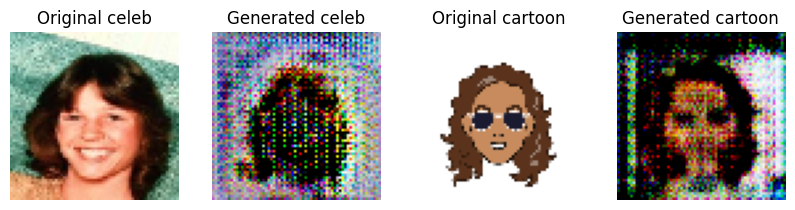

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 81ms/step



Batchs:   0%|          | 1/1000 [00:01<24:44,  1.49s/it]

>1, dA[0.191 ,0.047 ] dB[0.035 ,0.014] g[10.011 ,9.137]
1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 2/1000 [00:03<25:13,  1.52s/it]

>2, dA[0.054 ,0.293 ] dB[0.005 ,0.028] g[9.112 ,8.318]
1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 3/1000 [00:04<25:32,  1.54s/it]

>3, dA[0.030 ,0.019 ] dB[0.005 ,0.025] g[10.346 ,8.793]
1/1 [==============================] - 0s 75ms/step



Batchs:   0%|          | 4/1000 [00:06<24:51,  1.50s/it]

>4, dA[0.029 ,0.019 ] dB[0.005 ,0.014] g[13.352 ,13.026]
1/1 [==============================] - 0s 76ms/step



Batchs:   0%|          | 5/1000 [00:07<24:26,  1.47s/it]

>5, dA[0.007 ,0.183 ] dB[0.005 ,0.002] g[10.598 ,9.014]
1/1 [==============================] - 0s 77ms/step



Batchs:   1%|          | 6/1000 [00:08<24:10,  1.46s/it]

>6, dA[0.064 ,0.057 ] dB[0.006 ,0.006] g[10.416 ,8.837]
1/1 [==============================] - 0s 75ms/step



Batchs:   1%|          | 7/1000 [00:10<24:05,  1.46s/it]

>7, dA[0.439 ,0.057 ] dB[0.020 ,0.018] g[11.061 ,9.746]
1/1 [==============================] - 0s 77ms/step



Batchs:   1%|          | 8/1000 [00:11<23:53,  1.45s/it]

>8, dA[0.090 ,0.036 ] dB[0.025 ,0.005] g[10.844 ,10.289]
1/1 [==============================] - 0s 76ms/step



Batchs:   1%|          | 9/1000 [00:13<23:49,  1.44s/it]

>9, dA[0.014 ,0.070 ] dB[0.008 ,0.008] g[11.291 ,9.519]
1/1 [==============================] - 0s 77ms/step



Batchs:   1%|          | 10/1000 [00:14<23:56,  1.45s/it]

>10, dA[0.092 ,0.021 ] dB[0.012 ,0.003] g[9.781 ,7.368]
1/1 [==============================] - 0s 88ms/step



Batchs:   1%|          | 11/1000 [00:16<24:26,  1.48s/it]

>11, dA[0.011 ,0.215 ] dB[0.025 ,0.037] g[10.110 ,8.594]
1/1 [==============================] - 0s 88ms/step



Batchs:   1%|          | 12/1000 [00:17<24:40,  1.50s/it]

>12, dA[0.084 ,0.347 ] dB[0.005 ,0.005] g[11.541 ,10.046]
1/1 [==============================] - 0s 76ms/step



Batchs:   1%|▏         | 13/1000 [00:19<24:20,  1.48s/it]

>13, dA[0.214 ,0.044 ] dB[0.004 ,0.018] g[13.489 ,12.621]
1/1 [==============================] - 0s 76ms/step



Batchs:   1%|▏         | 14/1000 [00:20<24:05,  1.47s/it]

>14, dA[0.133 ,0.065 ] dB[0.005 ,0.008] g[11.284 ,10.137]
1/1 [==============================] - 0s 78ms/step



Batchs:   2%|▏         | 15/1000 [00:22<23:58,  1.46s/it]

>15, dA[0.013 ,0.018 ] dB[0.008 ,0.005] g[12.878 ,12.187]
1/1 [==============================] - 0s 75ms/step



Batchs:   2%|▏         | 16/1000 [00:23<24:02,  1.47s/it]

>16, dA[0.101 ,0.036 ] dB[0.011 ,0.012] g[10.041 ,8.453]
1/1 [==============================] - 0s 75ms/step



Batchs:   2%|▏         | 17/1000 [00:24<23:49,  1.45s/it]

>17, dA[0.028 ,0.068 ] dB[0.019 ,0.056] g[9.404 ,7.821]
1/1 [==============================] - 0s 79ms/step



Batchs:   2%|▏         | 18/1000 [00:26<23:57,  1.46s/it]

>18, dA[0.057 ,0.451 ] dB[0.052 ,0.003] g[9.983 ,7.479]
1/1 [==============================] - 0s 78ms/step



Batchs:   2%|▏         | 19/1000 [00:27<23:56,  1.46s/it]

>19, dA[0.172 ,0.018 ] dB[0.009 ,0.003] g[11.016 ,8.944]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 20/1000 [00:29<24:21,  1.49s/it]

>20, dA[0.089 ,0.019 ] dB[0.044 ,0.015] g[11.893 ,10.368]
1/1 [==============================] - 0s 88ms/step



Batchs:   2%|▏         | 21/1000 [00:31<24:35,  1.51s/it]

>21, dA[0.033 ,0.219 ] dB[0.014 ,0.007] g[10.113 ,8.519]
1/1 [==============================] - 0s 76ms/step



Batchs:   2%|▏         | 22/1000 [00:32<24:11,  1.48s/it]

>22, dA[0.089 ,0.019 ] dB[0.054 ,0.058] g[8.655 ,7.601]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 23/1000 [00:33<23:55,  1.47s/it]

>23, dA[0.057 ,0.356 ] dB[0.022 ,0.055] g[10.807 ,8.848]
1/1 [==============================] - 0s 78ms/step



Batchs:   2%|▏         | 24/1000 [00:35<23:41,  1.46s/it]

>24, dA[0.032 ,0.120 ] dB[0.009 ,0.011] g[10.692 ,10.006]
1/1 [==============================] - 0s 81ms/step



Batchs:   2%|▎         | 25/1000 [00:36<23:32,  1.45s/it]

>25, dA[0.091 ,0.031 ] dB[0.007 ,0.019] g[10.415 ,9.245]
1/1 [==============================] - 0s 75ms/step



Batchs:   3%|▎         | 26/1000 [00:38<23:23,  1.44s/it]

>26, dA[0.067 ,0.117 ] dB[0.016 ,0.008] g[9.925 ,9.425]
1/1 [==============================] - 0s 75ms/step



Batchs:   3%|▎         | 27/1000 [00:39<23:18,  1.44s/it]

>27, dA[0.220 ,0.052 ] dB[0.003 ,0.036] g[11.130 ,9.816]
1/1 [==============================] - 0s 74ms/step



Batchs:   3%|▎         | 28/1000 [00:41<23:20,  1.44s/it]

>28, dA[0.089 ,0.535 ] dB[0.030 ,0.040] g[9.919 ,9.297]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 29/1000 [00:42<23:53,  1.48s/it]

>29, dA[0.020 ,0.022 ] dB[0.068 ,0.022] g[10.529 ,8.479]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 30/1000 [00:44<24:16,  1.50s/it]

>30, dA[0.115 ,0.078 ] dB[0.087 ,0.073] g[9.453 ,8.935]
1/1 [==============================] - 0s 76ms/step



Batchs:   3%|▎         | 31/1000 [00:45<23:57,  1.48s/it]

>31, dA[0.155 ,0.018 ] dB[0.160 ,0.080] g[10.943 ,8.404]
1/1 [==============================] - 0s 76ms/step



Batchs:   3%|▎         | 32/1000 [00:47<23:40,  1.47s/it]

>32, dA[0.103 ,0.324 ] dB[0.042 ,0.089] g[9.736 ,8.798]
1/1 [==============================] - 0s 79ms/step



Batchs:   3%|▎         | 33/1000 [00:48<23:39,  1.47s/it]

>33, dA[0.057 ,0.020 ] dB[0.056 ,0.053] g[10.595 ,9.251]
1/1 [==============================] - 0s 76ms/step



Batchs:   3%|▎         | 34/1000 [00:49<23:27,  1.46s/it]

>34, dA[0.015 ,0.019 ] dB[0.133 ,0.147] g[10.438 ,10.062]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▎         | 35/1000 [00:51<23:22,  1.45s/it]

>35, dA[0.005 ,0.010 ] dB[0.044 ,0.066] g[9.807 ,9.516]
1/1 [==============================] - 0s 74ms/step



Batchs:   4%|▎         | 36/1000 [00:52<23:11,  1.44s/it]

>36, dA[0.019 ,0.191 ] dB[0.036 ,0.036] g[10.503 ,8.453]
1/1 [==============================] - 0s 75ms/step



Batchs:   4%|▎         | 37/1000 [00:54<23:04,  1.44s/it]

>37, dA[0.297 ,0.168 ] dB[0.007 ,0.012] g[11.679 ,11.318]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 38/1000 [00:55<23:39,  1.48s/it]

>38, dA[0.101 ,0.043 ] dB[0.137 ,0.187] g[9.089 ,8.517]
1/1 [==============================] - 0s 88ms/step



Batchs:   4%|▍         | 39/1000 [00:57<24:05,  1.50s/it]

>39, dA[0.366 ,0.236 ] dB[0.027 ,0.070] g[8.563 ,8.132]
1/1 [==============================] - 0s 77ms/step



Batchs:   4%|▍         | 40/1000 [00:58<23:47,  1.49s/it]

>40, dA[0.007 ,0.065 ] dB[0.037 ,0.012] g[10.844 ,8.674]
1/1 [==============================] - 0s 75ms/step



Batchs:   4%|▍         | 41/1000 [01:00<23:31,  1.47s/it]

>41, dA[0.237 ,0.044 ] dB[0.022 ,0.011] g[11.430 ,9.892]
1/1 [==============================] - 0s 78ms/step



Batchs:   4%|▍         | 42/1000 [01:01<23:16,  1.46s/it]

>42, dA[0.096 ,0.302 ] dB[0.005 ,0.042] g[9.291 ,8.269]
1/1 [==============================] - 0s 74ms/step



Batchs:   4%|▍         | 43/1000 [01:03<23:05,  1.45s/it]

>43, dA[0.317 ,0.211 ] dB[0.027 ,0.076] g[9.010 ,8.669]
1/1 [==============================] - 0s 73ms/step



Batchs:   4%|▍         | 44/1000 [01:04<22:55,  1.44s/it]

>44, dA[0.051 ,0.176 ] dB[0.090 ,0.024] g[10.237 ,9.412]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 45/1000 [01:05<22:52,  1.44s/it]

>45, dA[0.286 ,0.035 ] dB[0.006 ,0.079] g[13.395 ,11.958]
1/1 [==============================] - 0s 75ms/step



Batchs:   5%|▍         | 46/1000 [01:07<22:46,  1.43s/it]

>46, dA[0.126 ,0.092 ] dB[0.161 ,0.029] g[9.255 ,7.932]
1/1 [==============================] - 0s 92ms/step



Batchs:   5%|▍         | 47/1000 [01:08<23:17,  1.47s/it]

>47, dA[0.015 ,0.307 ] dB[0.025 ,0.038] g[10.737 ,9.727]
1/1 [==============================] - 0s 95ms/step



Batchs:   5%|▍         | 48/1000 [01:10<23:54,  1.51s/it]

>48, dA[0.054 ,0.025 ] dB[0.018 ,0.007] g[12.188 ,11.169]
1/1 [==============================] - 0s 83ms/step



Batchs:   5%|▍         | 49/1000 [01:11<23:37,  1.49s/it]

>49, dA[0.081 ,0.068 ] dB[0.011 ,0.008] g[10.276 ,8.803]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▌         | 50/1000 [01:13<23:20,  1.47s/it]

>50, dA[0.022 ,0.596 ] dB[0.026 ,0.021] g[10.162 ,8.812]
1/1 [==============================] - 0s 75ms/step



Batchs:   5%|▌         | 51/1000 [01:14<23:08,  1.46s/it]

>51, dA[0.173 ,0.039 ] dB[0.010 ,0.054] g[11.013 ,9.898]
1/1 [==============================] - 0s 79ms/step



Batchs:   5%|▌         | 52/1000 [01:16<22:54,  1.45s/it]

>52, dA[0.051 ,0.094 ] dB[0.064 ,0.036] g[10.782 ,10.064]
1/1 [==============================] - 0s 75ms/step



Batchs:   5%|▌         | 53/1000 [01:17<22:42,  1.44s/it]

>53, dA[0.024 ,0.037 ] dB[0.038 ,0.024] g[11.174 ,9.815]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▌         | 54/1000 [01:19<22:37,  1.43s/it]

>54, dA[0.047 ,0.226 ] dB[0.026 ,0.003] g[11.033 ,10.365]
1/1 [==============================] - 0s 74ms/step



Batchs:   6%|▌         | 55/1000 [01:20<22:33,  1.43s/it]

>55, dA[0.116 ,0.105 ] dB[0.002 ,0.051] g[10.019 ,8.498]
1/1 [==============================] - 0s 81ms/step



Batchs:   6%|▌         | 56/1000 [01:22<22:56,  1.46s/it]

>56, dA[0.320 ,0.163 ] dB[0.042 ,0.009] g[10.385 ,8.201]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 57/1000 [01:23<23:26,  1.49s/it]

>57, dA[0.017 ,0.052 ] dB[0.019 ,0.010] g[12.855 ,12.396]
1/1 [==============================] - 0s 145ms/step



Batchs:   6%|▌         | 58/1000 [01:25<23:35,  1.50s/it]

>58, dA[0.071 ,0.147 ] dB[0.007 ,0.053] g[11.016 ,9.613]
1/1 [==============================] - 0s 83ms/step



Batchs:   6%|▌         | 59/1000 [01:26<23:18,  1.49s/it]

>59, dA[0.339 ,0.050 ] dB[0.028 ,0.012] g[9.335 ,9.484]
1/1 [==============================] - 0s 77ms/step



Batchs:   6%|▌         | 60/1000 [01:28<23:00,  1.47s/it]

>60, dA[0.077 ,0.111 ] dB[0.005 ,0.011] g[11.882 ,10.802]
1/1 [==============================] - 0s 79ms/step



Batchs:   6%|▌         | 61/1000 [01:29<22:49,  1.46s/it]

>61, dA[0.169 ,0.018 ] dB[0.009 ,0.056] g[9.288 ,9.205]
1/1 [==============================] - 0s 74ms/step



Batchs:   6%|▌         | 62/1000 [01:30<22:41,  1.45s/it]

>62, dA[0.047 ,0.124 ] dB[0.009 ,0.040] g[10.851 ,9.444]
1/1 [==============================] - 0s 75ms/step



Batchs:   6%|▋         | 63/1000 [01:32<22:34,  1.45s/it]

>63, dA[0.021 ,0.030 ] dB[0.016 ,0.115] g[12.747 ,12.755]
1/1 [==============================] - 0s 73ms/step



Batchs:   6%|▋         | 64/1000 [01:33<22:39,  1.45s/it]

>64, dA[0.108 ,0.066 ] dB[0.113 ,0.008] g[10.687 ,8.837]
1/1 [==============================] - 0s 76ms/step



Batchs:   6%|▋         | 65/1000 [01:35<22:57,  1.47s/it]

>65, dA[0.018 ,0.031 ] dB[0.020 ,0.011] g[10.755 ,9.861]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 66/1000 [01:36<23:17,  1.50s/it]

>66, dA[0.015 ,0.066 ] dB[0.004 ,0.005] g[12.749 ,12.312]
1/1 [==============================] - 0s 88ms/step



Batchs:   7%|▋         | 67/1000 [01:38<23:09,  1.49s/it]

>67, dA[0.046 ,0.181 ] dB[0.007 ,0.008] g[11.462 ,9.545]
1/1 [==============================] - 0s 74ms/step



Batchs:   7%|▋         | 68/1000 [01:39<22:47,  1.47s/it]

>68, dA[0.030 ,0.092 ] dB[0.005 ,0.003] g[8.357 ,7.555]
1/1 [==============================] - 0s 75ms/step



Batchs:   7%|▋         | 69/1000 [01:41<22:34,  1.46s/it]

>69, dA[0.107 ,0.114 ] dB[0.004 ,0.008] g[9.182 ,7.955]
1/1 [==============================] - 0s 74ms/step



Batchs:   7%|▋         | 70/1000 [01:42<22:23,  1.44s/it]

>70, dA[0.041 ,0.021 ] dB[0.005 ,0.003] g[12.204 ,10.765]
1/1 [==============================] - 0s 76ms/step



Batchs:   7%|▋         | 71/1000 [01:44<22:21,  1.44s/it]

>71, dA[0.011 ,0.031 ] dB[0.016 ,0.019] g[10.991 ,9.347]
1/1 [==============================] - 0s 74ms/step



Batchs:   7%|▋         | 72/1000 [01:45<22:14,  1.44s/it]

>72, dA[0.013 ,0.108 ] dB[0.008 ,0.011] g[11.773 ,10.596]
1/1 [==============================] - 0s 74ms/step



Batchs:   7%|▋         | 73/1000 [01:46<22:09,  1.43s/it]

>73, dA[0.055 ,0.013 ] dB[0.010 ,0.030] g[10.203 ,8.125]
1/1 [==============================] - 0s 77ms/step



Batchs:   7%|▋         | 74/1000 [01:48<22:28,  1.46s/it]

>74, dA[0.403 ,0.079 ] dB[0.023 ,0.038] g[10.518 ,9.161]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 75/1000 [01:49<22:52,  1.48s/it]

>75, dA[0.023 ,0.190 ] dB[0.005 ,0.008] g[11.217 ,9.687]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 76/1000 [01:51<22:59,  1.49s/it]

>76, dA[0.006 ,0.469 ] dB[0.026 ,0.113] g[8.505 ,7.471]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 77/1000 [01:52<22:42,  1.48s/it]

>77, dA[0.194 ,0.083 ] dB[0.024 ,0.056] g[11.958 ,11.181]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 78/1000 [01:54<22:29,  1.46s/it]

>78, dA[0.119 ,0.043 ] dB[0.011 ,0.017] g[12.811 ,12.059]
1/1 [==============================] - 0s 78ms/step



Batchs:   8%|▊         | 79/1000 [01:55<22:30,  1.47s/it]

>79, dA[0.042 ,0.171 ] dB[0.009 ,0.008] g[9.505 ,8.769]
1/1 [==============================] - 0s 74ms/step



Batchs:   8%|▊         | 80/1000 [01:57<22:19,  1.46s/it]

>80, dA[0.049 ,0.034 ] dB[0.010 ,0.021] g[8.201 ,8.013]
1/1 [==============================] - 0s 74ms/step



Batchs:   8%|▊         | 81/1000 [01:58<22:09,  1.45s/it]

>81, dA[0.018 ,0.435 ] dB[0.009 ,0.012] g[12.020 ,11.350]
1/1 [==============================] - 0s 76ms/step



Batchs:   8%|▊         | 82/1000 [02:00<22:09,  1.45s/it]

>82, dA[0.096 ,0.031 ] dB[0.026 ,0.107] g[8.320 ,7.536]
1/1 [==============================] - 0s 76ms/step



Batchs:   8%|▊         | 83/1000 [02:01<22:21,  1.46s/it]

>83, dA[0.153 ,0.189 ] dB[0.024 ,0.013] g[9.492 ,8.634]
1/1 [==============================] - 0s 87ms/step



Batchs:   8%|▊         | 84/1000 [02:03<22:44,  1.49s/it]

>84, dA[0.036 ,0.100 ] dB[0.010 ,0.031] g[10.197 ,8.793]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 85/1000 [02:04<22:50,  1.50s/it]

>85, dA[0.170 ,0.140 ] dB[0.040 ,0.016] g[10.639 ,8.468]
1/1 [==============================] - 0s 81ms/step



Batchs:   9%|▊         | 86/1000 [02:06<22:30,  1.48s/it]

>86, dA[0.008 ,0.027 ] dB[0.023 ,0.013] g[12.978 ,12.627]
1/1 [==============================] - 0s 74ms/step



Batchs:   9%|▊         | 87/1000 [02:07<22:42,  1.49s/it]

>87, dA[0.190 ,0.012 ] dB[0.013 ,0.035] g[11.425 ,10.006]
1/1 [==============================] - 0s 74ms/step



Batchs:   9%|▉         | 88/1000 [02:09<22:24,  1.47s/it]

>88, dA[0.155 ,0.133 ] dB[0.026 ,0.004] g[9.833 ,7.859]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▉         | 89/1000 [02:10<22:10,  1.46s/it]

>89, dA[0.022 ,0.299 ] dB[0.014 ,0.011] g[10.379 ,8.513]
1/1 [==============================] - 0s 77ms/step



Batchs:   9%|▉         | 90/1000 [02:11<22:02,  1.45s/it]

>90, dA[0.036 ,0.096 ] dB[0.011 ,0.020] g[11.851 ,12.001]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▉         | 91/1000 [02:13<21:57,  1.45s/it]

>91, dA[0.158 ,0.145 ] dB[0.013 ,0.009] g[10.376 ,8.898]
1/1 [==============================] - 0s 75ms/step



Batchs:   9%|▉         | 92/1000 [02:14<22:03,  1.46s/it]

>92, dA[0.095 ,0.258 ] dB[0.016 ,0.072] g[9.005 ,8.578]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▉         | 93/1000 [02:16<22:24,  1.48s/it]

>93, dA[0.009 ,0.021 ] dB[0.020 ,0.048] g[11.931 ,10.725]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▉         | 94/1000 [02:17<22:44,  1.51s/it]

>94, dA[0.064 ,0.008 ] dB[0.006 ,0.026] g[12.248 ,12.326]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|▉         | 95/1000 [02:19<22:22,  1.48s/it]

>95, dA[0.041 ,0.129 ] dB[0.010 ,0.017] g[10.155 ,8.707]
1/1 [==============================] - 0s 73ms/step



Batchs:  10%|▉         | 96/1000 [02:20<22:04,  1.46s/it]

>96, dA[0.451 ,0.517 ] dB[0.006 ,0.013] g[10.522 ,8.991]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|▉         | 97/1000 [02:22<21:53,  1.45s/it]

>97, dA[0.193 ,0.035 ] dB[0.008 ,0.037] g[10.473 ,8.898]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|▉         | 98/1000 [02:23<21:46,  1.45s/it]

>98, dA[0.060 ,0.189 ] dB[0.011 ,0.009] g[10.920 ,9.446]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|▉         | 99/1000 [02:25<21:42,  1.45s/it]

>99, dA[0.052 ,0.019 ] dB[0.009 ,0.005] g[10.348 ,8.719]
1/1 [==============================] - 0s 137ms/step



Batchs:  10%|█         | 100/1000 [02:26<21:54,  1.46s/it]

>100, dA[0.018 ,0.075 ] dB[0.006 ,0.001] g[11.257 ,9.246]
1/1 [==============================] - 0s 79ms/step



Batchs:  10%|█         | 101/1000 [02:28<22:16,  1.49s/it]

>101, dA[0.149 ,0.014 ] dB[0.007 ,0.012] g[9.536 ,8.943]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|█         | 102/1000 [02:29<22:51,  1.53s/it]

>102, dA[0.036 ,0.014 ] dB[0.006 ,0.017] g[10.825 ,9.845]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|█         | 103/1000 [02:31<22:59,  1.54s/it]

>103, dA[0.153 ,0.016 ] dB[0.015 ,0.008] g[10.798 ,10.848]
1/1 [==============================] - 0s 75ms/step



Batchs:  10%|█         | 104/1000 [02:32<22:26,  1.50s/it]

>104, dA[0.098 ,0.037 ] dB[0.005 ,0.010] g[9.739 ,8.060]
1/1 [==============================] - 0s 74ms/step



Batchs:  10%|█         | 105/1000 [02:34<22:05,  1.48s/it]

>105, dA[0.385 ,0.333 ] dB[0.004 ,0.003] g[10.891 ,9.123]
1/1 [==============================] - 0s 76ms/step



Batchs:  11%|█         | 106/1000 [02:35<21:51,  1.47s/it]

>106, dA[0.018 ,0.061 ] dB[0.009 ,0.007] g[12.225 ,11.684]
1/1 [==============================] - 0s 74ms/step



Batchs:  11%|█         | 107/1000 [02:37<21:43,  1.46s/it]

>107, dA[0.162 ,0.013 ] dB[0.015 ,0.034] g[9.974 ,8.697]
1/1 [==============================] - 0s 76ms/step



Batchs:  11%|█         | 108/1000 [02:38<21:33,  1.45s/it]

>108, dA[0.016 ,0.076 ] dB[0.049 ,0.006] g[9.455 ,8.910]
1/1 [==============================] - 0s 78ms/step



Batchs:  11%|█         | 109/1000 [02:39<21:35,  1.45s/it]

>109, dA[0.311 ,0.097 ] dB[0.029 ,0.019] g[9.279 ,9.219]
1/1 [==============================] - 0s 75ms/step



Batchs:  11%|█         | 110/1000 [02:41<21:36,  1.46s/it]

>110, dA[0.105 ,0.104 ] dB[0.018 ,0.004] g[10.368 ,8.863]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█         | 111/1000 [02:42<22:01,  1.49s/it]

>111, dA[0.008 ,0.008 ] dB[0.016 ,0.004] g[10.207 ,9.313]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 112/1000 [02:44<22:21,  1.51s/it]

>112, dA[0.003 ,0.004 ] dB[0.003 ,0.010] g[13.346 ,12.447]
1/1 [==============================] - 0s 76ms/step



Batchs:  11%|█▏        | 113/1000 [02:45<21:55,  1.48s/it]

>113, dA[0.091 ,0.014 ] dB[0.006 ,0.013] g[10.566 ,8.878]
1/1 [==============================] - 0s 76ms/step



Batchs:  11%|█▏        | 114/1000 [02:47<21:39,  1.47s/it]

>114, dA[0.055 ,0.434 ] dB[0.012 ,0.018] g[8.475 ,6.726]
1/1 [==============================] - 0s 75ms/step



Batchs:  12%|█▏        | 115/1000 [02:48<21:26,  1.45s/it]

>115, dA[0.042 ,0.008 ] dB[0.008 ,0.009] g[11.013 ,9.969]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 116/1000 [02:50<21:19,  1.45s/it]

>116, dA[0.076 ,0.019 ] dB[0.019 ,0.021] g[10.982 ,9.749]
1/1 [==============================] - 0s 75ms/step



Batchs:  12%|█▏        | 117/1000 [02:51<21:13,  1.44s/it]

>117, dA[0.267 ,0.007 ] dB[0.016 ,0.007] g[11.480 ,10.438]
1/1 [==============================] - 0s 75ms/step



Batchs:  12%|█▏        | 118/1000 [02:53<21:08,  1.44s/it]

>118, dA[0.028 ,0.236 ] dB[0.014 ,0.060] g[8.405 ,7.678]
1/1 [==============================] - 0s 78ms/step



Batchs:  12%|█▏        | 119/1000 [02:54<21:06,  1.44s/it]

>119, dA[0.016 ,0.290 ] dB[0.025 ,0.006] g[9.714 ,7.596]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 120/1000 [02:56<21:35,  1.47s/it]

>120, dA[0.419 ,0.021 ] dB[0.046 ,0.052] g[9.130 ,8.441]
1/1 [==============================] - 0s 87ms/step



Batchs:  12%|█▏        | 121/1000 [02:57<21:53,  1.49s/it]

>121, dA[0.007 ,0.083 ] dB[0.010 ,0.041] g[9.864 ,8.932]
1/1 [==============================] - 0s 75ms/step



Batchs:  12%|█▏        | 122/1000 [02:59<21:36,  1.48s/it]

>122, dA[0.016 ,0.216 ] dB[0.019 ,0.004] g[9.671 ,8.773]
1/1 [==============================] - 0s 77ms/step



Batchs:  12%|█▏        | 123/1000 [03:00<21:26,  1.47s/it]

>123, dA[0.013 ,0.054 ] dB[0.008 ,0.006] g[12.584 ,11.703]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 124/1000 [03:01<21:14,  1.45s/it]

>124, dA[0.163 ,0.006 ] dB[0.006 ,0.092] g[11.477 ,11.502]
1/1 [==============================] - 0s 77ms/step



Batchs:  12%|█▎        | 125/1000 [03:03<21:14,  1.46s/it]

>125, dA[0.169 ,0.244 ] dB[0.087 ,0.046] g[12.099 ,10.131]
1/1 [==============================] - 0s 73ms/step



Batchs:  13%|█▎        | 126/1000 [03:04<21:05,  1.45s/it]

>126, dA[0.079 ,0.113 ] dB[0.017 ,0.007] g[10.133 ,8.946]
1/1 [==============================] - 0s 88ms/step



Batchs:  13%|█▎        | 127/1000 [03:06<21:01,  1.45s/it]

>127, dA[0.016 ,0.022 ] dB[0.011 ,0.016] g[12.291 ,11.931]
1/1 [==============================] - 0s 75ms/step



Batchs:  13%|█▎        | 128/1000 [03:07<20:54,  1.44s/it]

>128, dA[0.263 ,0.215 ] dB[0.049 ,0.012] g[10.102 ,8.682]
1/1 [==============================] - 0s 87ms/step



Batchs:  13%|█▎        | 129/1000 [03:09<21:17,  1.47s/it]

>129, dA[0.193 ,0.234 ] dB[0.016 ,0.016] g[11.167 ,9.437]
1/1 [==============================] - 0s 88ms/step



Batchs:  13%|█▎        | 130/1000 [03:10<21:34,  1.49s/it]

>130, dA[0.192 ,0.006 ] dB[0.005 ,0.034] g[9.450 ,8.927]
1/1 [==============================] - 0s 89ms/step



Batchs:  13%|█▎        | 131/1000 [03:12<21:27,  1.48s/it]

>131, dA[0.080 ,0.342 ] dB[0.012 ,0.036] g[10.523 ,8.751]
1/1 [==============================] - 0s 75ms/step



Batchs:  13%|█▎        | 132/1000 [03:13<21:12,  1.47s/it]

>132, dA[0.174 ,0.083 ] dB[0.012 ,0.014] g[10.340 ,9.466]
1/1 [==============================] - 0s 75ms/step



Batchs:  13%|█▎        | 133/1000 [03:15<21:00,  1.45s/it]

>133, dA[0.076 ,0.017 ] dB[0.004 ,0.002] g[11.933 ,11.856]
1/1 [==============================] - 0s 77ms/step



Batchs:  13%|█▎        | 134/1000 [03:16<20:54,  1.45s/it]

>134, dA[0.128 ,0.009 ] dB[0.003 ,0.009] g[10.375 ,9.331]
1/1 [==============================] - 0s 74ms/step



Batchs:  14%|█▎        | 135/1000 [03:17<20:47,  1.44s/it]

>135, dA[0.066 ,0.352 ] dB[0.002 ,0.002] g[10.634 ,8.792]
1/1 [==============================] - 0s 75ms/step



Batchs:  14%|█▎        | 136/1000 [03:19<20:43,  1.44s/it]

>136, dA[0.018 ,0.024 ] dB[0.005 ,0.030] g[12.438 ,11.241]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▎        | 137/1000 [03:20<20:39,  1.44s/it]

>137, dA[0.091 ,0.042 ] dB[0.007 ,0.008] g[9.613 ,9.652]
1/1 [==============================] - 0s 77ms/step



Batchs:  14%|█▍        | 138/1000 [03:22<20:57,  1.46s/it]

>138, dA[0.072 ,0.152 ] dB[0.028 ,0.023] g[10.104 ,8.408]
1/1 [==============================] - 0s 88ms/step



Batchs:  14%|█▍        | 139/1000 [03:23<21:17,  1.48s/it]

>139, dA[0.969 ,0.356 ] dB[0.007 ,0.011] g[10.189 ,8.466]
1/1 [==============================] - 0s 88ms/step



Batchs:  14%|█▍        | 140/1000 [03:25<21:23,  1.49s/it]

>140, dA[0.169 ,0.219 ] dB[0.005 ,0.024] g[8.253 ,7.052]
1/1 [==============================] - 0s 74ms/step



Batchs:  14%|█▍        | 141/1000 [03:26<21:21,  1.49s/it]

>141, dA[0.076 ,0.056 ] dB[0.033 ,0.008] g[9.132 ,7.274]
1/1 [==============================] - 0s 77ms/step



Batchs:  14%|█▍        | 142/1000 [03:28<21:06,  1.48s/it]

>142, dA[0.171 ,0.069 ] dB[0.005 ,0.014] g[12.267 ,12.878]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▍        | 143/1000 [03:29<20:54,  1.46s/it]

>143, dA[0.052 ,0.052 ] dB[0.024 ,0.018] g[10.517 ,8.371]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▍        | 144/1000 [03:31<20:43,  1.45s/it]

>144, dA[0.038 ,0.142 ] dB[0.009 ,0.004] g[13.418 ,13.520]
1/1 [==============================] - 0s 75ms/step



Batchs:  14%|█▍        | 145/1000 [03:32<20:34,  1.44s/it]

>145, dA[0.022 ,0.027 ] dB[0.035 ,0.019] g[8.265 ,6.970]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▍        | 146/1000 [03:34<20:27,  1.44s/it]

>146, dA[0.269 ,0.129 ] dB[0.003 ,0.009] g[9.382 ,8.873]
1/1 [==============================] - 0s 76ms/step



Batchs:  15%|█▍        | 147/1000 [03:35<20:46,  1.46s/it]

>147, dA[0.065 ,0.280 ] dB[0.006 ,0.035] g[10.001 ,7.773]
1/1 [==============================] - 0s 88ms/step



Batchs:  15%|█▍        | 148/1000 [03:37<21:08,  1.49s/it]

>148, dA[0.017 ,0.032 ] dB[0.018 ,0.017] g[10.784 ,10.243]
1/1 [==============================] - 0s 96ms/step



Batchs:  15%|█▍        | 149/1000 [03:38<21:07,  1.49s/it]

>149, dA[0.062 ,0.010 ] dB[0.006 ,0.003] g[9.175 ,8.044]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▌        | 150/1000 [03:40<20:50,  1.47s/it]

>150, dA[0.077 ,0.228 ] dB[0.009 ,0.032] g[10.843 ,8.293]
1/1 [==============================] - 0s 77ms/step



Batchs:  15%|█▌        | 151/1000 [03:41<20:43,  1.46s/it]

>151, dA[0.343 ,0.073 ] dB[0.036 ,0.018] g[9.892 ,9.320]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▌        | 152/1000 [03:42<20:32,  1.45s/it]

>152, dA[0.069 ,0.337 ] dB[0.009 ,0.010] g[10.364 ,8.950]
1/1 [==============================] - 0s 78ms/step



Batchs:  15%|█▌        | 153/1000 [03:44<20:26,  1.45s/it]

>153, dA[0.064 ,0.030 ] dB[0.006 ,0.004] g[9.205 ,7.968]
1/1 [==============================] - 0s 74ms/step



Batchs:  15%|█▌        | 154/1000 [03:45<20:22,  1.45s/it]

>154, dA[0.143 ,0.155 ] dB[0.003 ,0.004] g[10.030 ,8.829]
1/1 [==============================] - 0s 79ms/step



Batchs:  16%|█▌        | 155/1000 [03:47<20:27,  1.45s/it]

>155, dA[0.018 ,0.033 ] dB[0.014 ,0.026] g[8.931 ,7.253]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 156/1000 [03:48<20:36,  1.47s/it]

>156, dA[0.015 ,0.270 ] dB[0.009 ,0.011] g[10.165 ,8.673]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 157/1000 [03:50<20:58,  1.49s/it]

>157, dA[0.323 ,0.012 ] dB[0.007 ,0.034] g[8.780 ,7.979]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 158/1000 [03:51<20:58,  1.49s/it]

>158, dA[0.059 ,0.202 ] dB[0.013 ,0.020] g[10.540 ,8.551]
1/1 [==============================] - 0s 77ms/step



Batchs:  16%|█▌        | 159/1000 [03:53<20:40,  1.48s/it]

>159, dA[0.327 ,0.066 ] dB[0.010 ,0.008] g[11.435 ,10.213]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▌        | 160/1000 [03:54<20:25,  1.46s/it]

>160, dA[0.073 ,0.222 ] dB[0.029 ,0.013] g[7.413 ,7.789]
1/1 [==============================] - 0s 84ms/step



Batchs:  16%|█▌        | 161/1000 [03:56<20:18,  1.45s/it]

>161, dA[0.010 ,0.056 ] dB[0.031 ,0.011] g[9.320 ,8.328]
1/1 [==============================] - 0s 74ms/step



Batchs:  16%|█▌        | 162/1000 [03:57<20:10,  1.44s/it]

>162, dA[0.353 ,0.031 ] dB[0.021 ,0.039] g[10.524 ,10.186]
1/1 [==============================] - 0s 78ms/step



Batchs:  16%|█▋        | 163/1000 [03:58<20:08,  1.44s/it]

>163, dA[0.107 ,0.103 ] dB[0.040 ,0.042] g[11.688 ,9.082]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▋        | 164/1000 [04:00<20:07,  1.44s/it]

>164, dA[0.061 ,0.326 ] dB[0.050 ,0.007] g[9.772 ,8.733]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▋        | 165/1000 [04:01<20:15,  1.46s/it]

>165, dA[0.128 ,0.099 ] dB[0.011 ,0.041] g[7.923 ,6.699]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 166/1000 [04:03<20:36,  1.48s/it]

>166, dA[0.015 ,0.007 ] dB[0.033 ,0.049] g[12.101 ,10.551]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 167/1000 [04:04<20:39,  1.49s/it]

>167, dA[0.121 ,0.063 ] dB[0.012 ,0.011] g[10.695 ,10.217]
1/1 [==============================] - 0s 76ms/step



Batchs:  17%|█▋        | 168/1000 [04:06<20:25,  1.47s/it]

>168, dA[0.071 ,0.008 ] dB[0.006 ,0.010] g[11.049 ,9.597]
1/1 [==============================] - 0s 74ms/step



Batchs:  17%|█▋        | 169/1000 [04:07<20:11,  1.46s/it]

>169, dA[0.024 ,0.112 ] dB[0.018 ,0.007] g[8.817 ,7.697]
1/1 [==============================] - 0s 80ms/step



Batchs:  17%|█▋        | 170/1000 [04:09<20:11,  1.46s/it]

>170, dA[0.057 ,0.333 ] dB[0.015 ,0.006] g[9.786 ,8.053]
1/1 [==============================] - 0s 75ms/step



Batchs:  17%|█▋        | 171/1000 [04:10<20:05,  1.45s/it]

>171, dA[0.062 ,0.027 ] dB[0.012 ,0.007] g[10.418 ,10.177]
1/1 [==============================] - 0s 77ms/step



Batchs:  17%|█▋        | 172/1000 [04:12<20:00,  1.45s/it]

>172, dA[0.506 ,0.191 ] dB[0.026 ,0.006] g[8.701 ,7.575]
1/1 [==============================] - 0s 74ms/step



Batchs:  17%|█▋        | 173/1000 [04:13<19:52,  1.44s/it]

>173, dA[0.028 ,0.091 ] dB[0.006 ,0.018] g[10.293 ,10.450]
1/1 [==============================] - 0s 73ms/step



Batchs:  17%|█▋        | 174/1000 [04:15<19:58,  1.45s/it]

>174, dA[0.309 ,0.100 ] dB[0.010 ,0.018] g[9.731 ,8.363]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 175/1000 [04:16<20:20,  1.48s/it]

>175, dA[0.129 ,0.007 ] dB[0.012 ,0.007] g[10.704 ,9.283]
1/1 [==============================] - 0s 85ms/step



Batchs:  18%|█▊        | 176/1000 [04:18<20:30,  1.49s/it]

>176, dA[0.157 ,0.624 ] dB[0.009 ,0.012] g[10.336 ,8.441]
1/1 [==============================] - 0s 75ms/step



Batchs:  18%|█▊        | 177/1000 [04:19<20:13,  1.47s/it]

>177, dA[0.022 ,0.035 ] dB[0.007 ,0.023] g[9.229 ,7.638]
1/1 [==============================] - 0s 75ms/step



Batchs:  18%|█▊        | 178/1000 [04:20<20:02,  1.46s/it]

>178, dA[0.170 ,0.033 ] dB[0.004 ,0.007] g[10.801 ,10.868]
1/1 [==============================] - 0s 76ms/step



Batchs:  18%|█▊        | 179/1000 [04:22<19:54,  1.46s/it]

>179, dA[0.147 ,0.150 ] dB[0.014 ,0.007] g[9.858 ,8.412]
1/1 [==============================] - 0s 77ms/step



Batchs:  18%|█▊        | 180/1000 [04:23<19:45,  1.45s/it]

>180, dA[0.083 ,0.026 ] dB[0.231 ,0.735] g[9.510 ,8.534]
1/1 [==============================] - 0s 76ms/step



Batchs:  18%|█▊        | 181/1000 [04:25<19:43,  1.45s/it]

>181, dA[0.033 ,0.196 ] dB[0.043 ,0.049] g[10.655 ,8.901]
1/1 [==============================] - 0s 76ms/step



Batchs:  18%|█▊        | 182/1000 [04:26<19:36,  1.44s/it]

>182, dA[0.376 ,0.101 ] dB[0.282 ,0.256] g[8.527 ,7.621]
1/1 [==============================] - 0s 76ms/step



Batchs:  18%|█▊        | 183/1000 [04:28<19:39,  1.44s/it]

>183, dA[0.158 ,0.169 ] dB[0.017 ,0.090] g[11.397 ,12.175]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 184/1000 [04:29<20:21,  1.50s/it]

>184, dA[0.008 ,0.021 ] dB[0.026 ,0.023] g[10.474 ,9.844]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 185/1000 [04:31<20:32,  1.51s/it]

>185, dA[0.153 ,0.080 ] dB[0.041 ,0.060] g[10.026 ,9.315]
1/1 [==============================] - 0s 78ms/step



Batchs:  19%|█▊        | 186/1000 [04:32<20:18,  1.50s/it]

>186, dA[0.010 ,0.024 ] dB[0.125 ,0.005] g[13.218 ,12.945]
1/1 [==============================] - 0s 78ms/step



Batchs:  19%|█▊        | 187/1000 [04:34<20:02,  1.48s/it]

>187, dA[0.230 ,0.211 ] dB[0.034 ,0.070] g[9.882 ,8.417]
1/1 [==============================] - 0s 77ms/step



Batchs:  19%|█▉        | 188/1000 [04:35<19:53,  1.47s/it]

>188, dA[0.055 ,0.018 ] dB[0.024 ,0.010] g[8.780 ,7.730]
1/1 [==============================] - 0s 75ms/step



Batchs:  19%|█▉        | 189/1000 [04:37<19:43,  1.46s/it]

>189, dA[0.144 ,0.255 ] dB[0.024 ,0.018] g[11.262 ,9.745]
1/1 [==============================] - 0s 77ms/step



Batchs:  19%|█▉        | 190/1000 [04:38<19:38,  1.45s/it]

>190, dA[0.061 ,0.262 ] dB[0.004 ,0.006] g[12.479 ,10.976]
1/1 [==============================] - 0s 78ms/step



Batchs:  19%|█▉        | 191/1000 [04:39<19:34,  1.45s/it]

>191, dA[0.128 ,0.047 ] dB[0.008 ,0.027] g[9.416 ,8.740]
1/1 [==============================] - 0s 76ms/step



Batchs:  19%|█▉        | 192/1000 [04:41<19:34,  1.45s/it]

>192, dA[0.151 ,0.026 ] dB[0.015 ,0.041] g[10.609 ,8.622]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▉        | 193/1000 [04:43<20:03,  1.49s/it]

>193, dA[0.032 ,0.162 ] dB[0.041 ,0.003] g[11.936 ,11.694]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▉        | 194/1000 [04:44<20:15,  1.51s/it]

>194, dA[0.019 ,0.028 ] dB[0.010 ,0.014] g[10.583 ,9.252]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|█▉        | 195/1000 [04:46<20:02,  1.49s/it]

>195, dA[0.080 ,0.064 ] dB[0.042 ,0.144] g[7.689 ,7.582]
1/1 [==============================] - 0s 75ms/step



Batchs:  20%|█▉        | 196/1000 [04:47<19:47,  1.48s/it]

>196, dA[0.008 ,0.047 ] dB[0.023 ,0.023] g[13.256 ,13.588]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|█▉        | 197/1000 [04:48<19:34,  1.46s/it]

>197, dA[0.128 ,0.013 ] dB[0.006 ,0.023] g[9.319 ,7.715]
1/1 [==============================] - 0s 79ms/step



Batchs:  20%|█▉        | 198/1000 [04:50<19:27,  1.46s/it]

>198, dA[0.025 ,0.196 ] dB[0.028 ,0.020] g[9.339 ,7.225]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|█▉        | 199/1000 [04:51<19:21,  1.45s/it]

>199, dA[0.065 ,0.064 ] dB[0.031 ,0.011] g[11.153 ,9.990]
1/1 [==============================] - 0s 83ms/step



Batchs:  20%|██        | 200/1000 [04:53<19:16,  1.45s/it]

>200, dA[0.087 ,0.015 ] dB[0.020 ,0.013] g[9.155 ,7.909]
1/1 [==============================] - 0s 81ms/step



Batchs:  20%|██        | 201/1000 [04:54<19:27,  1.46s/it]

>201, dA[0.037 ,0.020 ] dB[0.010 ,0.034] g[8.716 ,7.736]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 202/1000 [04:56<19:47,  1.49s/it]

>202, dA[0.079 ,0.015 ] dB[0.010 ,0.011] g[9.536 ,7.780]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|██        | 203/1000 [04:57<20:04,  1.51s/it]

>203, dA[0.021 ,0.043 ] dB[0.008 ,0.008] g[8.178 ,7.234]
1/1 [==============================] - 0s 74ms/step



Batchs:  20%|██        | 204/1000 [04:59<19:42,  1.49s/it]

>204, dA[0.385 ,0.028 ] dB[0.005 ,0.008] g[9.081 ,8.401]
1/1 [==============================] - 0s 75ms/step



Batchs:  20%|██        | 205/1000 [05:00<19:28,  1.47s/it]

>205, dA[0.036 ,0.034 ] dB[0.012 ,0.005] g[11.468 ,9.753]
1/1 [==============================] - 0s 76ms/step



Batchs:  21%|██        | 206/1000 [05:02<19:15,  1.46s/it]

>206, dA[0.052 ,0.034 ] dB[0.021 ,0.009] g[7.705 ,5.931]
1/1 [==============================] - 0s 80ms/step



Batchs:  21%|██        | 207/1000 [05:03<19:09,  1.45s/it]

>207, dA[0.014 ,0.604 ] dB[0.003 ,0.007] g[9.244 ,8.102]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██        | 208/1000 [05:04<19:03,  1.44s/it]

>208, dA[0.086 ,0.025 ] dB[0.002 ,0.006] g[11.713 ,11.145]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██        | 209/1000 [05:06<18:58,  1.44s/it]

>209, dA[0.153 ,0.066 ] dB[0.003 ,0.001] g[9.963 ,8.890]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██        | 210/1000 [05:07<18:59,  1.44s/it]

>210, dA[0.350 ,0.016 ] dB[0.003 ,0.005] g[9.045 ,7.651]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 211/1000 [05:09<19:23,  1.47s/it]

>211, dA[0.010 ,0.548 ] dB[0.010 ,0.018] g[8.731 ,6.758]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 212/1000 [05:10<19:41,  1.50s/it]

>212, dA[0.205 ,0.043 ] dB[0.010 ,0.001] g[10.045 ,8.614]
1/1 [==============================] - 0s 75ms/step



Batchs:  21%|██▏       | 213/1000 [05:12<19:21,  1.48s/it]

>213, dA[0.089 ,0.059 ] dB[0.011 ,0.014] g[11.163 ,10.486]
1/1 [==============================] - 0s 78ms/step



Batchs:  21%|██▏       | 214/1000 [05:13<19:08,  1.46s/it]

>214, dA[0.124 ,0.064 ] dB[0.015 ,0.030] g[9.618 ,8.134]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 215/1000 [05:15<18:58,  1.45s/it]

>215, dA[0.024 ,0.047 ] dB[0.016 ,0.021] g[9.213 ,7.723]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 216/1000 [05:16<18:59,  1.45s/it]

>216, dA[0.009 ,0.169 ] dB[0.014 ,0.010] g[10.418 ,8.721]
1/1 [==============================] - 0s 84ms/step



Batchs:  22%|██▏       | 217/1000 [05:18<19:16,  1.48s/it]

>217, dA[0.168 ,0.004 ] dB[0.017 ,0.008] g[8.764 ,7.561]
1/1 [==============================] - 0s 75ms/step



Batchs:  22%|██▏       | 218/1000 [05:19<19:01,  1.46s/it]

>218, dA[0.044 ,0.014 ] dB[0.021 ,0.023] g[10.184 ,9.441]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 219/1000 [05:21<18:53,  1.45s/it]

>219, dA[0.035 ,0.446 ] dB[0.036 ,0.007] g[9.377 ,7.454]
1/1 [==============================] - 0s 87ms/step



Batchs:  22%|██▏       | 220/1000 [05:22<19:11,  1.48s/it]

>220, dA[0.061 ,0.014 ] dB[0.019 ,0.002] g[9.608 ,9.203]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 221/1000 [05:24<19:26,  1.50s/it]

>221, dA[0.007 ,0.024 ] dB[0.007 ,0.003] g[13.278 ,13.385]
1/1 [==============================] - 0s 80ms/step



Batchs:  22%|██▏       | 222/1000 [05:25<19:12,  1.48s/it]

>222, dA[0.027 ,0.009 ] dB[0.002 ,0.012] g[9.393 ,9.008]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 223/1000 [05:27<18:59,  1.47s/it]

>223, dA[0.037 ,0.087 ] dB[0.001 ,0.023] g[10.335 ,8.638]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 224/1000 [05:28<18:49,  1.46s/it]

>224, dA[0.006 ,0.285 ] dB[0.006 ,0.023] g[8.622 ,7.049]
1/1 [==============================] - 0s 75ms/step



Batchs:  22%|██▎       | 225/1000 [05:29<18:55,  1.46s/it]

>225, dA[0.136 ,0.004 ] dB[0.001 ,0.005] g[9.851 ,8.663]
1/1 [==============================] - 0s 76ms/step



Batchs:  23%|██▎       | 226/1000 [05:31<18:47,  1.46s/it]

>226, dA[0.186 ,0.183 ] dB[0.006 ,0.004] g[9.697 ,8.317]
1/1 [==============================] - 0s 77ms/step



Batchs:  23%|██▎       | 227/1000 [05:32<18:42,  1.45s/it]

>227, dA[0.005 ,0.049 ] dB[0.007 ,0.006] g[9.749 ,7.838]
1/1 [==============================] - 0s 76ms/step



Batchs:  23%|██▎       | 228/1000 [05:34<18:34,  1.44s/it]

>228, dA[0.146 ,0.022 ] dB[0.006 ,0.005] g[10.059 ,8.387]
1/1 [==============================] - 0s 86ms/step



Batchs:  23%|██▎       | 229/1000 [05:35<18:55,  1.47s/it]

>229, dA[0.101 ,0.510 ] dB[0.009 ,0.005] g[8.412 ,7.479]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 230/1000 [05:37<19:12,  1.50s/it]

>230, dA[0.015 ,0.029 ] dB[0.008 ,0.003] g[10.722 ,9.265]
1/1 [==============================] - 0s 86ms/step



Batchs:  23%|██▎       | 231/1000 [05:38<19:13,  1.50s/it]

>231, dA[0.137 ,0.023 ] dB[0.002 ,0.001] g[9.737 ,8.921]
1/1 [==============================] - 0s 81ms/step



Batchs:  23%|██▎       | 232/1000 [05:40<18:58,  1.48s/it]

>232, dA[0.070 ,0.036 ] dB[0.006 ,0.002] g[10.409 ,9.758]
1/1 [==============================] - 0s 77ms/step



Batchs:  23%|██▎       | 233/1000 [05:41<18:45,  1.47s/it]

>233, dA[0.183 ,0.196 ] dB[0.005 ,0.003] g[10.724 ,9.286]
1/1 [==============================] - 0s 76ms/step



Batchs:  23%|██▎       | 234/1000 [05:43<18:35,  1.46s/it]

>234, dA[0.119 ,0.063 ] dB[0.005 ,0.008] g[9.238 ,7.818]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▎       | 235/1000 [05:44<18:28,  1.45s/it]

>235, dA[0.123 ,0.040 ] dB[0.009 ,0.007] g[10.522 ,9.100]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▎       | 236/1000 [05:46<18:27,  1.45s/it]

>236, dA[0.014 ,0.082 ] dB[0.005 ,0.027] g[8.543 ,7.250]
1/1 [==============================] - 0s 74ms/step



Batchs:  24%|██▎       | 237/1000 [05:47<18:18,  1.44s/it]

>237, dA[0.034 ,0.127 ] dB[0.036 ,0.006] g[9.623 ,8.439]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▍       | 238/1000 [05:48<18:37,  1.47s/it]

>238, dA[0.040 ,0.018 ] dB[0.002 ,0.019] g[9.118 ,8.158]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▍       | 239/1000 [05:50<18:56,  1.49s/it]

>239, dA[0.335 ,0.280 ] dB[0.015 ,0.002] g[8.651 ,7.278]
1/1 [==============================] - 0s 86ms/step



Batchs:  24%|██▍       | 240/1000 [05:51<18:44,  1.48s/it]

>240, dA[0.198 ,0.062 ] dB[0.091 ,0.214] g[9.406 ,9.797]
1/1 [==============================] - 0s 84ms/step



Batchs:  24%|██▍       | 241/1000 [05:53<18:32,  1.47s/it]

>241, dA[0.110 ,0.094 ] dB[0.032 ,0.030] g[9.447 ,7.856]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▍       | 242/1000 [05:54<18:20,  1.45s/it]

>242, dA[0.067 ,0.778 ] dB[0.017 ,0.037] g[11.611 ,10.077]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▍       | 243/1000 [05:56<18:15,  1.45s/it]

>243, dA[0.030 ,0.049 ] dB[0.006 ,0.036] g[9.586 ,7.516]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 244/1000 [05:57<18:13,  1.45s/it]

>244, dA[0.277 ,0.105 ] dB[0.007 ,0.037] g[7.920 ,7.852]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 245/1000 [05:59<18:08,  1.44s/it]

>245, dA[0.113 ,0.075 ] dB[0.007 ,0.007] g[10.310 ,8.635]
1/1 [==============================] - 0s 75ms/step



Batchs:  25%|██▍       | 246/1000 [06:00<18:07,  1.44s/it]

>246, dA[0.024 ,0.137 ] dB[0.022 ,0.028] g[11.081 ,9.284]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▍       | 247/1000 [06:02<18:36,  1.48s/it]

>247, dA[0.361 ,0.072 ] dB[0.009 ,0.006] g[9.861 ,8.849]
1/1 [==============================] - 0s 88ms/step



Batchs:  25%|██▍       | 248/1000 [06:03<18:53,  1.51s/it]

>248, dA[0.103 ,0.083 ] dB[0.007 ,0.024] g[11.684 ,9.617]
1/1 [==============================] - 0s 85ms/step



Batchs:  25%|██▍       | 249/1000 [06:05<19:01,  1.52s/it]

>249, dA[0.129 ,0.112 ] dB[0.015 ,0.003] g[10.433 ,9.798]
1/1 [==============================] - 0s 76ms/step



Batchs:  25%|██▌       | 250/1000 [06:06<18:39,  1.49s/it]

>250, dA[0.208 ,0.053 ] dB[0.010 ,0.007] g[10.242 ,8.811]
1/1 [==============================] - 0s 78ms/step



Batchs:  25%|██▌       | 251/1000 [06:08<18:24,  1.47s/it]

>251, dA[0.016 ,0.031 ] dB[0.003 ,0.006] g[11.191 ,10.395]
1/1 [==============================] - 0s 75ms/step



Batchs:  25%|██▌       | 252/1000 [06:09<18:12,  1.46s/it]

>252, dA[0.100 ,0.258 ] dB[0.005 ,0.002] g[8.175 ,6.350]
1/1 [==============================] - 0s 77ms/step



Batchs:  25%|██▌       | 253/1000 [06:10<18:07,  1.46s/it]

>253, dA[0.361 ,0.084 ] dB[0.004 ,0.001] g[8.738 ,7.185]
1/1 [==============================] - 0s 78ms/step



Batchs:  25%|██▌       | 254/1000 [06:12<18:02,  1.45s/it]

>254, dA[0.277 ,0.207 ] dB[0.004 ,0.009] g[10.826 ,9.061]
1/1 [==============================] - 0s 77ms/step



Batchs:  26%|██▌       | 255/1000 [06:13<18:00,  1.45s/it]

>255, dA[0.022 ,0.051 ] dB[0.017 ,0.003] g[10.389 ,8.533]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▌       | 256/1000 [06:15<18:22,  1.48s/it]

>256, dA[0.135 ,0.018 ] dB[0.011 ,0.014] g[8.987 ,8.588]
1/1 [==============================] - 0s 88ms/step



Batchs:  26%|██▌       | 257/1000 [06:17<18:38,  1.51s/it]

>257, dA[0.098 ,0.216 ] dB[0.005 ,0.013] g[8.781 ,7.296]
1/1 [==============================] - 0s 82ms/step



Batchs:  26%|██▌       | 258/1000 [06:18<18:24,  1.49s/it]

>258, dA[0.142 ,0.164 ] dB[0.008 ,0.008] g[8.443 ,7.667]
1/1 [==============================] - 0s 74ms/step



Batchs:  26%|██▌       | 259/1000 [06:19<18:32,  1.50s/it]

>259, dA[0.030 ,0.010 ] dB[0.002 ,0.013] g[9.100 ,7.283]
1/1 [==============================] - 0s 74ms/step



Batchs:  26%|██▌       | 260/1000 [06:21<18:14,  1.48s/it]

>260, dA[0.050 ,0.223 ] dB[0.002 ,0.023] g[11.549 ,10.443]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▌       | 261/1000 [06:22<18:01,  1.46s/it]

>261, dA[0.179 ,0.091 ] dB[0.009 ,0.004] g[8.707 ,7.497]
1/1 [==============================] - 0s 84ms/step



Batchs:  26%|██▌       | 262/1000 [06:24<18:04,  1.47s/it]

>262, dA[0.012 ,0.013 ] dB[0.009 ,0.010] g[9.905 ,7.978]
1/1 [==============================] - 0s 76ms/step



Batchs:  26%|██▋       | 263/1000 [06:25<18:06,  1.47s/it]

>263, dA[0.041 ,0.060 ] dB[0.009 ,0.005] g[11.620 ,10.153]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▋       | 264/1000 [06:27<18:26,  1.50s/it]

>264, dA[0.053 ,0.238 ] dB[0.012 ,0.021] g[10.825 ,8.557]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▋       | 265/1000 [06:28<18:49,  1.54s/it]

>265, dA[0.080 ,0.052 ] dB[0.009 ,0.008] g[12.891 ,12.640]
1/1 [==============================] - 0s 88ms/step



Batchs:  27%|██▋       | 266/1000 [06:30<18:51,  1.54s/it]

>266, dA[0.277 ,0.130 ] dB[0.010 ,0.002] g[9.727 ,8.520]
1/1 [==============================] - 0s 75ms/step



Batchs:  27%|██▋       | 267/1000 [06:32<18:41,  1.53s/it]

>267, dA[0.167 ,0.059 ] dB[0.004 ,0.019] g[9.454 ,8.189]
1/1 [==============================] - 0s 75ms/step



Batchs:  27%|██▋       | 268/1000 [06:33<18:16,  1.50s/it]

>268, dA[0.030 ,0.049 ] dB[0.023 ,0.003] g[12.455 ,11.613]
1/1 [==============================] - 0s 75ms/step



Batchs:  27%|██▋       | 269/1000 [06:34<18:00,  1.48s/it]

>269, dA[0.129 ,0.317 ] dB[0.004 ,0.001] g[11.301 ,10.071]
1/1 [==============================] - 0s 78ms/step



Batchs:  27%|██▋       | 270/1000 [06:36<17:49,  1.47s/it]

>270, dA[0.214 ,0.077 ] dB[0.016 ,0.014] g[10.449 ,8.447]
1/1 [==============================] - 0s 76ms/step



Batchs:  27%|██▋       | 271/1000 [06:37<17:42,  1.46s/it]

>271, dA[0.046 ,0.027 ] dB[0.006 ,0.013] g[9.836 ,8.726]
1/1 [==============================] - 0s 74ms/step



Batchs:  27%|██▋       | 272/1000 [06:39<17:33,  1.45s/it]

>272, dA[0.238 ,0.279 ] dB[0.005 ,0.014] g[9.732 ,9.105]
1/1 [==============================] - 0s 75ms/step



Batchs:  27%|██▋       | 273/1000 [06:40<17:30,  1.45s/it]

>273, dA[0.024 ,0.012 ] dB[0.009 ,0.004] g[9.409 ,8.908]
1/1 [==============================] - 0s 87ms/step



Batchs:  27%|██▋       | 274/1000 [06:42<17:49,  1.47s/it]

>274, dA[0.083 ,0.055 ] dB[0.003 ,0.007] g[9.605 ,9.065]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 275/1000 [06:43<18:03,  1.49s/it]

>275, dA[0.126 ,0.016 ] dB[0.002 ,0.006] g[9.582 ,8.353]
1/1 [==============================] - 0s 77ms/step



Batchs:  28%|██▊       | 276/1000 [06:45<17:52,  1.48s/it]

>276, dA[0.025 ,0.156 ] dB[0.011 ,0.004] g[11.731 ,10.691]
1/1 [==============================] - 0s 77ms/step



Batchs:  28%|██▊       | 277/1000 [06:46<17:46,  1.47s/it]

>277, dA[0.057 ,0.013 ] dB[0.004 ,0.006] g[9.385 ,8.068]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 278/1000 [06:48<17:35,  1.46s/it]

>278, dA[0.022 ,0.122 ] dB[0.003 ,0.009] g[9.521 ,8.464]
1/1 [==============================] - 0s 77ms/step



Batchs:  28%|██▊       | 279/1000 [06:49<17:25,  1.45s/it]

>279, dA[0.055 ,0.038 ] dB[0.010 ,0.005] g[9.407 ,7.941]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 280/1000 [06:50<17:20,  1.45s/it]

>280, dA[0.273 ,0.208 ] dB[0.001 ,0.003] g[10.315 ,9.079]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 281/1000 [06:52<17:16,  1.44s/it]

>281, dA[0.057 ,0.025 ] dB[0.002 ,0.002] g[9.721 ,8.455]
1/1 [==============================] - 0s 77ms/step



Batchs:  28%|██▊       | 282/1000 [06:53<17:14,  1.44s/it]

>282, dA[0.277 ,0.190 ] dB[0.002 ,0.006] g[11.032 ,9.533]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 283/1000 [06:55<17:34,  1.47s/it]

>283, dA[0.034 ,0.076 ] dB[0.008 ,0.002] g[10.255 ,8.619]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 284/1000 [06:56<17:49,  1.49s/it]

>284, dA[0.125 ,0.074 ] dB[0.016 ,0.005] g[10.207 ,8.750]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 285/1000 [06:58<17:37,  1.48s/it]

>285, dA[0.118 ,0.042 ] dB[0.006 ,0.003] g[9.646 ,7.831]
1/1 [==============================] - 0s 77ms/step



Batchs:  29%|██▊       | 286/1000 [06:59<17:26,  1.47s/it]

>286, dA[0.281 ,0.394 ] dB[0.006 ,0.002] g[11.082 ,10.141]
1/1 [==============================] - 0s 78ms/step



Batchs:  29%|██▊       | 287/1000 [07:01<17:21,  1.46s/it]

>287, dA[0.077 ,0.051 ] dB[0.003 ,0.005] g[10.585 ,9.885]
1/1 [==============================] - 0s 77ms/step



Batchs:  29%|██▉       | 288/1000 [07:02<17:13,  1.45s/it]

>288, dA[0.145 ,0.096 ] dB[0.011 ,0.009] g[8.714 ,7.160]
1/1 [==============================] - 0s 82ms/step



Batchs:  29%|██▉       | 289/1000 [07:04<17:10,  1.45s/it]

>289, dA[0.086 ,0.243 ] dB[0.002 ,0.003] g[12.561 ,12.337]
1/1 [==============================] - 0s 77ms/step



Batchs:  29%|██▉       | 290/1000 [07:05<17:03,  1.44s/it]

>290, dA[0.119 ,0.015 ] dB[0.006 ,0.009] g[9.705 ,8.497]
1/1 [==============================] - 0s 77ms/step



Batchs:  29%|██▉       | 291/1000 [07:06<17:02,  1.44s/it]

>291, dA[0.403 ,0.136 ] dB[0.003 ,0.001] g[11.601 ,11.462]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 292/1000 [07:08<17:27,  1.48s/it]

>292, dA[0.045 ,0.219 ] dB[0.002 ,0.006] g[10.168 ,8.167]
1/1 [==============================] - 0s 88ms/step



Batchs:  29%|██▉       | 293/1000 [07:10<17:41,  1.50s/it]

>293, dA[0.076 ,0.089 ] dB[0.003 ,0.012] g[10.099 ,8.526]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 294/1000 [07:11<17:32,  1.49s/it]

>294, dA[0.148 ,0.065 ] dB[0.039 ,0.029] g[11.611 ,9.901]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|██▉       | 295/1000 [07:12<17:17,  1.47s/it]

>295, dA[0.033 ,0.158 ] dB[0.047 ,0.044] g[8.198 ,7.729]
1/1 [==============================] - 0s 81ms/step



Batchs:  30%|██▉       | 296/1000 [07:14<17:09,  1.46s/it]

>296, dA[0.051 ,0.147 ] dB[0.042 ,0.012] g[9.706 ,7.711]
1/1 [==============================] - 0s 75ms/step



Batchs:  30%|██▉       | 297/1000 [07:15<17:01,  1.45s/it]

>297, dA[0.109 ,0.110 ] dB[0.018 ,0.031] g[10.174 ,9.104]
1/1 [==============================] - 0s 78ms/step



Batchs:  30%|██▉       | 298/1000 [07:17<16:53,  1.44s/it]

>298, dA[0.006 ,0.040 ] dB[0.009 ,0.056] g[12.202 ,11.663]
1/1 [==============================] - 0s 75ms/step



Batchs:  30%|██▉       | 299/1000 [07:18<16:50,  1.44s/it]

>299, dA[0.232 ,0.019 ] dB[0.119 ,0.372] g[7.316 ,7.281]
1/1 [==============================] - 0s 77ms/step



Batchs:  30%|███       | 300/1000 [07:20<16:46,  1.44s/it]

>300, dA[0.115 ,0.192 ] dB[0.037 ,0.076] g[8.424 ,6.742]
1/1 [==============================] - 0s 79ms/step



Batchs:  30%|███       | 301/1000 [07:21<17:02,  1.46s/it]

>301, dA[0.177 ,0.162 ] dB[0.029 ,0.023] g[7.623 ,7.596]
1/1 [==============================] - 0s 87ms/step



Batchs:  30%|███       | 302/1000 [07:23<17:15,  1.48s/it]

>302, dA[0.009 ,0.073 ] dB[0.008 ,0.026] g[9.700 ,8.752]
1/1 [==============================] - 0s 88ms/step



Batchs:  30%|███       | 303/1000 [07:24<17:22,  1.50s/it]

>303, dA[0.089 ,0.027 ] dB[0.013 ,0.086] g[8.067 ,7.486]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|███       | 304/1000 [07:26<17:09,  1.48s/it]

>304, dA[0.140 ,0.018 ] dB[0.024 ,0.011] g[9.240 ,8.021]
1/1 [==============================] - 0s 75ms/step



Batchs:  30%|███       | 305/1000 [07:27<16:56,  1.46s/it]

>305, dA[0.021 ,0.084 ] dB[0.008 ,0.013] g[9.634 ,7.709]
1/1 [==============================] - 0s 82ms/step



Batchs:  31%|███       | 306/1000 [07:28<16:48,  1.45s/it]

>306, dA[0.154 ,0.039 ] dB[0.015 ,0.042] g[9.234 ,8.354]
1/1 [==============================] - 0s 81ms/step



Batchs:  31%|███       | 307/1000 [07:30<16:50,  1.46s/it]

>307, dA[0.087 ,0.010 ] dB[0.030 ,0.104] g[12.284 ,10.248]
1/1 [==============================] - 0s 83ms/step



Batchs:  31%|███       | 308/1000 [07:31<16:48,  1.46s/it]

>308, dA[0.104 ,0.032 ] dB[0.018 ,0.136] g[9.978 ,8.158]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 309/1000 [07:33<16:54,  1.47s/it]

>309, dA[0.090 ,0.635 ] dB[0.017 ,0.033] g[10.704 ,8.659]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 310/1000 [07:34<17:03,  1.48s/it]

>310, dA[0.242 ,0.064 ] dB[0.039 ,0.076] g[9.823 ,8.377]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 311/1000 [07:36<17:16,  1.50s/it]

>311, dA[0.178 ,0.196 ] dB[0.024 ,0.027] g[10.362 ,8.694]
1/1 [==============================] - 0s 85ms/step



Batchs:  31%|███       | 312/1000 [07:37<17:09,  1.50s/it]

>312, dA[0.017 ,0.276 ] dB[0.020 ,0.006] g[10.488 ,8.193]
1/1 [==============================] - 0s 78ms/step



Batchs:  31%|███▏      | 313/1000 [07:39<16:54,  1.48s/it]

>313, dA[0.133 ,0.014 ] dB[0.005 ,0.014] g[9.305 ,8.486]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███▏      | 314/1000 [07:40<16:41,  1.46s/it]

>314, dA[0.130 ,0.032 ] dB[0.023 ,0.005] g[9.143 ,8.117]
1/1 [==============================] - 0s 78ms/step



Batchs:  32%|███▏      | 315/1000 [07:42<16:33,  1.45s/it]

>315, dA[0.023 ,0.010 ] dB[0.300 ,0.252] g[9.153 ,7.307]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 316/1000 [07:43<16:28,  1.45s/it]

>316, dA[0.027 ,0.025 ] dB[0.010 ,0.033] g[8.067 ,7.195]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 317/1000 [07:45<16:24,  1.44s/it]

>317, dA[0.011 ,0.369 ] dB[0.084 ,0.023] g[10.121 ,9.131]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 318/1000 [07:46<16:23,  1.44s/it]

>318, dA[0.183 ,0.028 ] dB[0.019 ,0.006] g[10.160 ,8.914]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 319/1000 [07:48<16:35,  1.46s/it]

>319, dA[0.270 ,0.043 ] dB[0.009 ,0.015] g[12.184 ,11.802]
1/1 [==============================] - 0s 87ms/step



Batchs:  32%|███▏      | 320/1000 [07:49<16:51,  1.49s/it]

>320, dA[0.026 ,0.040 ] dB[0.013 ,0.009] g[10.098 ,8.256]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 321/1000 [07:51<16:54,  1.49s/it]

>321, dA[0.134 ,0.301 ] dB[0.021 ,0.010] g[8.140 ,7.118]
1/1 [==============================] - 0s 74ms/step



Batchs:  32%|███▏      | 322/1000 [07:52<16:38,  1.47s/it]

>322, dA[0.027 ,0.010 ] dB[0.015 ,0.007] g[9.120 ,8.529]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 323/1000 [07:54<16:38,  1.48s/it]

>323, dA[0.142 ,0.231 ] dB[0.006 ,0.008] g[8.905 ,7.716]
1/1 [==============================] - 0s 74ms/step



Batchs:  32%|███▏      | 324/1000 [07:55<16:28,  1.46s/it]

>324, dA[0.072 ,0.024 ] dB[0.017 ,0.011] g[10.302 ,8.703]
1/1 [==============================] - 0s 79ms/step



Batchs:  32%|███▎      | 325/1000 [07:56<16:21,  1.45s/it]

>325, dA[0.042 ,0.004 ] dB[0.009 ,0.017] g[7.732 ,6.627]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 326/1000 [07:58<16:13,  1.44s/it]

>326, dA[0.053 ,0.230 ] dB[0.031 ,0.024] g[9.018 ,7.719]
1/1 [==============================] - 0s 76ms/step



Batchs:  33%|███▎      | 327/1000 [07:59<16:08,  1.44s/it]

>327, dA[0.070 ,0.022 ] dB[0.004 ,0.156] g[10.708 ,9.081]
1/1 [==============================] - 0s 85ms/step



Batchs:  33%|███▎      | 328/1000 [08:01<16:21,  1.46s/it]

>328, dA[0.038 ,0.201 ] dB[0.099 ,0.015] g[8.912 ,7.445]
1/1 [==============================] - 0s 89ms/step



Batchs:  33%|███▎      | 329/1000 [08:02<16:38,  1.49s/it]

>329, dA[0.038 ,0.010 ] dB[0.035 ,0.010] g[11.219 ,10.591]
1/1 [==============================] - 0s 89ms/step



Batchs:  33%|███▎      | 330/1000 [08:04<16:42,  1.50s/it]

>330, dA[0.150 ,0.140 ] dB[0.007 ,0.020] g[10.240 ,10.078]
1/1 [==============================] - 0s 76ms/step



Batchs:  33%|███▎      | 331/1000 [08:05<16:29,  1.48s/it]

>331, dA[0.229 ,0.208 ] dB[0.046 ,0.018] g[10.503 ,8.176]
1/1 [==============================] - 0s 75ms/step



Batchs:  33%|███▎      | 332/1000 [08:07<16:18,  1.46s/it]

>332, dA[0.197 ,0.175 ] dB[0.075 ,0.018] g[9.607 ,8.837]
1/1 [==============================] - 0s 74ms/step



Batchs:  33%|███▎      | 333/1000 [08:08<16:06,  1.45s/it]

>333, dA[0.235 ,0.091 ] dB[0.066 ,0.005] g[11.307 ,10.283]
1/1 [==============================] - 0s 74ms/step



Batchs:  33%|███▎      | 334/1000 [08:10<16:00,  1.44s/it]

>334, dA[0.057 ,0.063 ] dB[0.011 ,0.042] g[9.845 ,8.646]
1/1 [==============================] - 0s 77ms/step



Batchs:  34%|███▎      | 335/1000 [08:11<15:59,  1.44s/it]

>335, dA[0.025 ,0.015 ] dB[0.322 ,0.559] g[7.433 ,6.524]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▎      | 336/1000 [08:12<15:53,  1.44s/it]

>336, dA[0.067 ,0.024 ] dB[0.028 ,0.033] g[7.880 ,7.041]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▎      | 337/1000 [08:14<15:57,  1.44s/it]

>337, dA[0.040 ,0.015 ] dB[0.133 ,0.107] g[9.540 ,7.307]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▍      | 338/1000 [08:15<16:27,  1.49s/it]

>338, dA[0.043 ,0.010 ] dB[0.069 ,0.022] g[8.199 ,6.631]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 339/1000 [08:17<16:37,  1.51s/it]

>339, dA[0.206 ,0.493 ] dB[0.022 ,0.094] g[9.146 ,8.746]
1/1 [==============================] - 0s 74ms/step



Batchs:  34%|███▍      | 340/1000 [08:18<16:22,  1.49s/it]

>340, dA[0.091 ,0.031 ] dB[0.047 ,0.019] g[10.448 ,9.115]
1/1 [==============================] - 0s 77ms/step



Batchs:  34%|███▍      | 341/1000 [08:20<16:28,  1.50s/it]

>341, dA[0.102 ,0.106 ] dB[0.019 ,0.030] g[8.993 ,7.366]
1/1 [==============================] - 0s 76ms/step



Batchs:  34%|███▍      | 342/1000 [08:21<16:13,  1.48s/it]

>342, dA[0.139 ,0.215 ] dB[0.023 ,0.018] g[9.802 ,8.754]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▍      | 343/1000 [08:23<16:00,  1.46s/it]

>343, dA[0.207 ,0.027 ] dB[0.012 ,0.037] g[8.195 ,7.545]
1/1 [==============================] - 0s 76ms/step



Batchs:  34%|███▍      | 344/1000 [08:24<15:52,  1.45s/it]

>344, dA[0.104 ,0.081 ] dB[0.026 ,0.003] g[8.899 ,7.744]
1/1 [==============================] - 0s 76ms/step



Batchs:  34%|███▍      | 345/1000 [08:26<15:47,  1.45s/it]

>345, dA[0.006 ,0.021 ] dB[0.007 ,0.006] g[9.666 ,7.792]
1/1 [==============================] - 0s 77ms/step



Batchs:  35%|███▍      | 346/1000 [08:27<15:47,  1.45s/it]

>346, dA[0.060 ,0.174 ] dB[0.011 ,0.005] g[8.205 ,6.999]
1/1 [==============================] - 0s 91ms/step



Batchs:  35%|███▍      | 347/1000 [08:29<16:09,  1.48s/it]

>347, dA[0.027 ,0.201 ] dB[0.016 ,0.006] g[9.020 ,7.676]
1/1 [==============================] - 0s 88ms/step



Batchs:  35%|███▍      | 348/1000 [08:30<16:18,  1.50s/it]

>348, dA[0.349 ,0.020 ] dB[0.008 ,0.011] g[9.017 ,8.472]
1/1 [==============================] - 0s 87ms/step



Batchs:  35%|███▍      | 349/1000 [08:32<16:07,  1.49s/it]

>349, dA[0.028 ,0.050 ] dB[0.007 ,0.009] g[11.372 ,10.983]
1/1 [==============================] - 0s 74ms/step



Batchs:  35%|███▌      | 350/1000 [08:33<15:58,  1.47s/it]

>350, dA[0.013 ,0.029 ] dB[0.021 ,0.045] g[9.665 ,9.011]
1/1 [==============================] - 0s 75ms/step



Batchs:  35%|███▌      | 351/1000 [08:35<15:59,  1.48s/it]

>351, dA[0.008 ,0.128 ] dB[0.040 ,0.010] g[11.628 ,11.109]
1/1 [==============================] - 0s 75ms/step



Batchs:  35%|███▌      | 352/1000 [08:36<15:49,  1.47s/it]

>352, dA[0.386 ,0.007 ] dB[0.028 ,0.118] g[8.853 ,8.320]
1/1 [==============================] - 0s 76ms/step



Batchs:  35%|███▌      | 353/1000 [08:38<15:48,  1.47s/it]

>353, dA[0.073 ,0.045 ] dB[0.040 ,0.019] g[10.465 ,8.412]
1/1 [==============================] - 0s 75ms/step



Batchs:  35%|███▌      | 354/1000 [08:39<15:41,  1.46s/it]

>354, dA[0.036 ,0.544 ] dB[0.027 ,0.013] g[10.740 ,9.714]
1/1 [==============================] - 0s 77ms/step



Batchs:  36%|███▌      | 355/1000 [08:40<15:42,  1.46s/it]

>355, dA[0.087 ,0.025 ] dB[0.031 ,0.015] g[9.514 ,8.132]
1/1 [==============================] - 0s 87ms/step



Batchs:  36%|███▌      | 356/1000 [08:42<15:58,  1.49s/it]

>356, dA[0.156 ,0.076 ] dB[0.021 ,0.007] g[9.771 ,8.122]
1/1 [==============================] - 0s 87ms/step



Batchs:  36%|███▌      | 357/1000 [08:44<16:08,  1.51s/it]

>357, dA[0.181 ,0.028 ] dB[0.011 ,0.007] g[8.975 ,7.165]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 358/1000 [08:45<15:52,  1.48s/it]

>358, dA[0.122 ,0.057 ] dB[0.019 ,0.007] g[10.528 ,8.890]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 359/1000 [08:46<15:41,  1.47s/it]

>359, dA[0.032 ,0.396 ] dB[0.088 ,0.071] g[8.411 ,6.955]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 360/1000 [08:48<15:31,  1.46s/it]

>360, dA[0.026 ,0.178 ] dB[0.015 ,0.013] g[10.369 ,10.953]
1/1 [==============================] - 0s 77ms/step



Batchs:  36%|███▌      | 361/1000 [08:49<15:25,  1.45s/it]

>361, dA[0.079 ,0.067 ] dB[0.008 ,0.008] g[11.413 ,11.498]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 362/1000 [08:51<15:22,  1.45s/it]

>362, dA[0.324 ,0.272 ] dB[0.006 ,0.065] g[8.384 ,7.455]
1/1 [==============================] - 0s 77ms/step



Batchs:  36%|███▋      | 363/1000 [08:52<15:17,  1.44s/it]

>363, dA[0.165 ,0.659 ] dB[0.151 ,0.025] g[11.187 ,9.236]
1/1 [==============================] - 0s 78ms/step



Batchs:  36%|███▋      | 364/1000 [08:54<15:16,  1.44s/it]

>364, dA[0.265 ,0.032 ] dB[0.089 ,0.196] g[7.391 ,7.511]
1/1 [==============================] - 0s 86ms/step



Batchs:  36%|███▋      | 365/1000 [08:55<15:35,  1.47s/it]

>365, dA[0.056 ,0.038 ] dB[0.048 ,0.072] g[10.150 ,9.647]
1/1 [==============================] - 0s 87ms/step



Batchs:  37%|███▋      | 366/1000 [08:57<15:48,  1.50s/it]

>366, dA[0.010 ,0.197 ] dB[0.020 ,0.013] g[12.192 ,10.597]
1/1 [==============================] - 0s 75ms/step



Batchs:  37%|███▋      | 367/1000 [08:58<15:36,  1.48s/it]

>367, dA[0.096 ,0.018 ] dB[0.018 ,0.086] g[8.924 ,9.064]
1/1 [==============================] - 0s 78ms/step



Batchs:  37%|███▋      | 368/1000 [09:00<15:33,  1.48s/it]

>368, dA[0.007 ,0.159 ] dB[0.112 ,0.008] g[10.385 ,8.536]
1/1 [==============================] - 0s 77ms/step



Batchs:  37%|███▋      | 369/1000 [09:01<15:24,  1.47s/it]

>369, dA[0.199 ,0.028 ] dB[0.017 ,0.019] g[9.457 ,8.878]
1/1 [==============================] - 0s 74ms/step



Batchs:  37%|███▋      | 370/1000 [09:02<15:17,  1.46s/it]

>370, dA[0.039 ,0.008 ] dB[0.026 ,0.007] g[9.039 ,9.744]
1/1 [==============================] - 0s 76ms/step



Batchs:  37%|███▋      | 371/1000 [09:04<15:13,  1.45s/it]

>371, dA[0.050 ,0.212 ] dB[0.025 ,0.023] g[11.670 ,11.093]
1/1 [==============================] - 0s 75ms/step



Batchs:  37%|███▋      | 372/1000 [09:05<15:08,  1.45s/it]

>372, dA[0.047 ,0.017 ] dB[0.007 ,0.051] g[9.658 ,8.991]
1/1 [==============================] - 0s 77ms/step



Batchs:  37%|███▋      | 373/1000 [09:07<15:06,  1.45s/it]

>373, dA[0.070 ,0.145 ] dB[0.037 ,0.040] g[14.266 ,13.320]
1/1 [==============================] - 0s 88ms/step



Batchs:  37%|███▋      | 374/1000 [09:08<15:21,  1.47s/it]

>374, dA[0.140 ,0.059 ] dB[0.007 ,0.055] g[9.173 ,8.500]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 375/1000 [09:10<15:34,  1.49s/it]

>375, dA[0.024 ,0.224 ] dB[0.030 ,0.021] g[11.643 ,10.974]
1/1 [==============================] - 0s 76ms/step



Batchs:  38%|███▊      | 376/1000 [09:11<15:23,  1.48s/it]

>376, dA[0.127 ,0.008 ] dB[0.027 ,0.031] g[9.155 ,7.390]
1/1 [==============================] - 0s 77ms/step



Batchs:  38%|███▊      | 377/1000 [09:13<15:11,  1.46s/it]

>377, dA[0.026 ,0.013 ] dB[0.028 ,0.026] g[12.600 ,11.868]
1/1 [==============================] - 0s 75ms/step



Batchs:  38%|███▊      | 378/1000 [09:14<15:03,  1.45s/it]

>378, dA[0.233 ,0.419 ] dB[0.005 ,0.013] g[9.863 ,8.453]
1/1 [==============================] - 0s 75ms/step



Batchs:  38%|███▊      | 379/1000 [09:16<14:59,  1.45s/it]

>379, dA[0.014 ,0.007 ] dB[0.039 ,0.019] g[11.223 ,9.782]
1/1 [==============================] - 0s 77ms/step



Batchs:  38%|███▊      | 380/1000 [09:17<14:55,  1.44s/it]

>380, dA[0.034 ,0.055 ] dB[0.059 ,0.030] g[8.778 ,7.840]
1/1 [==============================] - 0s 77ms/step



Batchs:  38%|███▊      | 381/1000 [09:18<14:50,  1.44s/it]

>381, dA[0.170 ,0.072 ] dB[0.053 ,0.015] g[8.367 ,7.981]
1/1 [==============================] - 0s 76ms/step



Batchs:  38%|███▊      | 382/1000 [09:20<14:48,  1.44s/it]

>382, dA[0.017 ,0.023 ] dB[0.020 ,0.024] g[11.104 ,9.530]
1/1 [==============================] - 0s 93ms/step



Batchs:  38%|███▊      | 383/1000 [09:22<17:26,  1.70s/it]

>383, dA[0.018 ,0.005 ] dB[0.068 ,0.011] g[10.632 ,9.462]
1/1 [==============================] - 0s 98ms/step



Batchs:  38%|███▊      | 384/1000 [09:24<16:51,  1.64s/it]

>384, dA[0.145 ,0.056 ] dB[0.011 ,0.016] g[8.860 ,7.626]
1/1 [==============================] - 0s 82ms/step



Batchs:  38%|███▊      | 385/1000 [09:25<16:14,  1.59s/it]

>385, dA[0.033 ,0.137 ] dB[0.015 ,0.017] g[8.592 ,7.637]
1/1 [==============================] - 0s 82ms/step



Batchs:  39%|███▊      | 386/1000 [09:27<15:50,  1.55s/it]

>386, dA[0.176 ,0.066 ] dB[0.009 ,0.035] g[8.374 ,7.452]
1/1 [==============================] - 0s 81ms/step



Batchs:  39%|███▊      | 387/1000 [09:28<15:32,  1.52s/it]

>387, dA[0.279 ,0.055 ] dB[0.058 ,0.006] g[9.058 ,8.309]
1/1 [==============================] - 0s 83ms/step



Batchs:  39%|███▉      | 388/1000 [09:30<15:18,  1.50s/it]

>388, dA[0.166 ,0.377 ] dB[0.031 ,0.005] g[8.078 ,6.636]
1/1 [==============================] - 0s 83ms/step



Batchs:  39%|███▉      | 389/1000 [09:31<15:08,  1.49s/it]

>389, dA[0.048 ,0.059 ] dB[0.016 ,0.005] g[10.397 ,8.545]
1/1 [==============================] - 0s 82ms/step



Batchs:  39%|███▉      | 390/1000 [09:32<15:01,  1.48s/it]

>390, dA[0.067 ,0.031 ] dB[0.049 ,0.020] g[10.692 ,9.859]
1/1 [==============================] - 0s 84ms/step



Batchs:  39%|███▉      | 391/1000 [09:34<15:14,  1.50s/it]

>391, dA[0.087 ,0.060 ] dB[0.011 ,0.010] g[10.687 ,9.402]
1/1 [==============================] - 0s 96ms/step



Batchs:  39%|███▉      | 392/1000 [09:36<15:44,  1.55s/it]

>392, dA[0.141 ,0.079 ] dB[0.008 ,0.007] g[10.507 ,9.235]
1/1 [==============================] - 0s 94ms/step



Batchs:  39%|███▉      | 393/1000 [09:37<15:30,  1.53s/it]

>393, dA[0.032 ,0.013 ] dB[0.051 ,0.065] g[10.269 ,10.532]
1/1 [==============================] - 0s 84ms/step



Batchs:  39%|███▉      | 394/1000 [09:39<15:16,  1.51s/it]

>394, dA[0.013 ,0.015 ] dB[0.005 ,0.021] g[9.768 ,8.728]
1/1 [==============================] - 0s 82ms/step



Batchs:  40%|███▉      | 395/1000 [09:40<15:07,  1.50s/it]

>395, dA[0.009 ,0.143 ] dB[0.011 ,0.026] g[12.128 ,11.876]
1/1 [==============================] - 0s 83ms/step



Batchs:  40%|███▉      | 396/1000 [09:42<14:59,  1.49s/it]

>396, dA[0.028 ,0.041 ] dB[0.026 ,0.012] g[10.034 ,10.826]
1/1 [==============================] - 0s 82ms/step



Batchs:  40%|███▉      | 397/1000 [09:43<14:51,  1.48s/it]

>397, dA[0.065 ,0.018 ] dB[0.027 ,0.003] g[11.529 ,11.576]
1/1 [==============================] - 0s 86ms/step



Batchs:  40%|███▉      | 398/1000 [09:44<14:47,  1.47s/it]

>398, dA[0.021 ,0.022 ] dB[0.004 ,0.005] g[9.669 ,8.069]
1/1 [==============================] - 0s 84ms/step



Batchs:  40%|███▉      | 399/1000 [09:46<14:44,  1.47s/it]

>399, dA[0.015 ,0.063 ] dB[0.009 ,0.026] g[11.071 ,9.918]
1/1 [==============================] - 0s 98ms/step



Batchs:  40%|████      | 400/1000 [09:48<15:03,  1.51s/it]

>400, dA[0.076 ,0.035 ] dB[0.018 ,0.009] g[8.764 ,7.027]
1/1 [==============================] - 0s 95ms/step



Batchs:  40%|████      | 401/1000 [09:49<15:15,  1.53s/it]

>401, dA[0.011 ,0.031 ] dB[0.005 ,0.005] g[10.508 ,8.675]
1/1 [==============================] - 0s 83ms/step



Batchs:  40%|████      | 402/1000 [09:51<15:04,  1.51s/it]

>402, dA[0.030 ,0.026 ] dB[0.009 ,0.011] g[9.670 ,8.338]
1/1 [==============================] - 0s 82ms/step



Batchs:  40%|████      | 403/1000 [09:52<14:54,  1.50s/it]

>403, dA[0.014 ,0.107 ] dB[0.003 ,0.011] g[8.959 ,7.109]
1/1 [==============================] - 0s 85ms/step



Batchs:  40%|████      | 404/1000 [09:54<14:47,  1.49s/it]

>404, dA[0.016 ,0.432 ] dB[0.004 ,0.008] g[9.415 ,7.524]
1/1 [==============================] - 0s 84ms/step



Batchs:  40%|████      | 405/1000 [09:55<14:43,  1.48s/it]

>405, dA[0.330 ,0.013 ] dB[0.004 ,0.007] g[9.523 ,8.296]
1/1 [==============================] - 0s 84ms/step



Batchs:  41%|████      | 406/1000 [09:56<14:36,  1.48s/it]

>406, dA[0.016 ,0.006 ] dB[0.002 ,0.011] g[9.143 ,8.516]
1/1 [==============================] - 0s 81ms/step



Batchs:  41%|████      | 407/1000 [09:58<14:33,  1.47s/it]

>407, dA[0.067 ,0.141 ] dB[0.003 ,0.012] g[8.426 ,7.137]
1/1 [==============================] - 0s 86ms/step



Batchs:  41%|████      | 408/1000 [09:59<14:39,  1.49s/it]

>408, dA[0.050 ,0.014 ] dB[0.008 ,0.005] g[10.280 ,9.810]
1/1 [==============================] - 0s 99ms/step



Batchs:  41%|████      | 409/1000 [10:01<14:56,  1.52s/it]

>409, dA[0.028 ,0.154 ] dB[0.013 ,0.015] g[7.796 ,6.357]
1/1 [==============================] - 0s 97ms/step



Batchs:  41%|████      | 410/1000 [10:03<15:04,  1.53s/it]

>410, dA[0.023 ,0.024 ] dB[0.003 ,0.005] g[11.448 ,10.883]
1/1 [==============================] - 0s 84ms/step



Batchs:  41%|████      | 411/1000 [10:04<14:51,  1.51s/it]

>411, dA[0.137 ,0.035 ] dB[0.002 ,0.002] g[8.123 ,7.390]
1/1 [==============================] - 0s 83ms/step



Batchs:  41%|████      | 412/1000 [10:06<14:42,  1.50s/it]

>412, dA[0.086 ,0.216 ] dB[0.003 ,0.003] g[7.440 ,6.307]
1/1 [==============================] - 0s 84ms/step



Batchs:  41%|████▏     | 413/1000 [10:07<14:35,  1.49s/it]

>413, dA[0.127 ,0.013 ] dB[0.007 ,0.003] g[9.866 ,8.488]
1/1 [==============================] - 0s 83ms/step



Batchs:  41%|████▏     | 414/1000 [10:08<14:30,  1.49s/it]

>414, dA[0.032 ,0.515 ] dB[0.004 ,0.002] g[10.420 ,8.638]
1/1 [==============================] - 0s 83ms/step



Batchs:  42%|████▏     | 415/1000 [10:10<14:27,  1.48s/it]

>415, dA[0.194 ,0.012 ] dB[0.003 ,0.007] g[9.670 ,8.561]
1/1 [==============================] - 0s 82ms/step



Batchs:  42%|████▏     | 416/1000 [10:11<14:23,  1.48s/it]

>416, dA[0.066 ,0.007 ] dB[0.004 ,0.009] g[8.745 ,7.597]
1/1 [==============================] - 0s 82ms/step



Batchs:  42%|████▏     | 417/1000 [10:13<14:36,  1.50s/it]

>417, dA[0.012 ,0.049 ] dB[0.010 ,0.004] g[8.553 ,7.345]
1/1 [==============================] - 0s 95ms/step



Batchs:  42%|████▏     | 418/1000 [10:15<14:46,  1.52s/it]

>418, dA[0.051 ,0.099 ] dB[0.010 ,0.006] g[9.846 ,7.590]
1/1 [==============================] - 0s 95ms/step



Batchs:  42%|████▏     | 419/1000 [10:16<14:51,  1.53s/it]

>419, dA[0.028 ,0.267 ] dB[0.009 ,0.001] g[12.167 ,11.340]
1/1 [==============================] - 0s 82ms/step



Batchs:  42%|████▏     | 420/1000 [10:18<14:37,  1.51s/it]

>420, dA[0.396 ,0.007 ] dB[0.006 ,0.007] g[8.925 ,7.735]
1/1 [==============================] - 0s 83ms/step



Batchs:  42%|████▏     | 421/1000 [10:19<14:26,  1.50s/it]

>421, dA[0.177 ,0.442 ] dB[0.006 ,0.004] g[8.042 ,6.840]
1/1 [==============================] - 0s 80ms/step



Batchs:  42%|████▏     | 422/1000 [10:20<14:18,  1.49s/it]

>422, dA[0.115 ,0.028 ] dB[0.016 ,0.006] g[8.003 ,6.586]
1/1 [==============================] - 0s 80ms/step



Batchs:  42%|████▏     | 423/1000 [10:22<14:21,  1.49s/it]

>423, dA[0.188 ,0.352 ] dB[0.006 ,0.004] g[9.751 ,8.452]
1/1 [==============================] - 0s 83ms/step



Batchs:  42%|████▏     | 424/1000 [10:24<14:25,  1.50s/it]

>424, dA[0.021 ,0.029 ] dB[0.002 ,0.001] g[10.491 ,8.247]
1/1 [==============================] - 0s 94ms/step



Batchs:  42%|████▎     | 425/1000 [10:25<14:36,  1.52s/it]

>425, dA[0.069 ,0.032 ] dB[0.002 ,0.001] g[9.113 ,8.738]
1/1 [==============================] - 0s 94ms/step



Batchs:  43%|████▎     | 426/1000 [10:27<14:48,  1.55s/it]

>426, dA[0.298 ,0.122 ] dB[0.002 ,0.002] g[8.479 ,7.404]
1/1 [==============================] - 0s 95ms/step



Batchs:  43%|████▎     | 427/1000 [10:28<14:53,  1.56s/it]

>427, dA[0.196 ,0.046 ] dB[0.002 ,0.005] g[9.167 ,8.042]
1/1 [==============================] - 0s 95ms/step



Batchs:  43%|████▎     | 428/1000 [10:30<14:48,  1.55s/it]

>428, dA[0.091 ,0.346 ] dB[0.002 ,0.008] g[9.757 ,8.192]
1/1 [==============================] - 0s 79ms/step



Batchs:  43%|████▎     | 429/1000 [10:31<14:31,  1.53s/it]

>429, dA[0.050 ,0.125 ] dB[0.005 ,0.010] g[8.059 ,7.003]
1/1 [==============================] - 0s 78ms/step



Batchs:  43%|████▎     | 430/1000 [10:33<14:18,  1.51s/it]

>430, dA[0.103 ,0.045 ] dB[0.006 ,0.006] g[8.133 ,6.986]
1/1 [==============================] - 0s 78ms/step



Batchs:  43%|████▎     | 431/1000 [10:34<14:07,  1.49s/it]

>431, dA[0.014 ,0.007 ] dB[0.004 ,0.009] g[10.133 ,8.543]
1/1 [==============================] - 0s 78ms/step



Batchs:  43%|████▎     | 432/1000 [10:36<13:56,  1.47s/it]

>432, dA[0.064 ,0.019 ] dB[0.003 ,0.016] g[10.566 ,9.146]
1/1 [==============================] - 0s 77ms/step



Batchs:  43%|████▎     | 433/1000 [10:37<13:59,  1.48s/it]

>433, dA[0.160 ,0.779 ] dB[0.018 ,0.004] g[9.861 ,8.310]
1/1 [==============================] - 0s 79ms/step



Batchs:  43%|████▎     | 434/1000 [10:39<13:55,  1.48s/it]

>434, dA[0.148 ,0.041 ] dB[0.009 ,0.011] g[8.397 ,7.417]
1/1 [==============================] - 0s 78ms/step



Batchs:  44%|████▎     | 435/1000 [10:40<13:59,  1.49s/it]

>435, dA[0.192 ,0.058 ] dB[0.007 ,0.009] g[9.928 ,9.695]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▎     | 436/1000 [10:42<14:11,  1.51s/it]

>436, dA[0.029 ,0.015 ] dB[0.002 ,0.007] g[11.166 ,10.319]
1/1 [==============================] - 0s 88ms/step



Batchs:  44%|████▎     | 437/1000 [10:43<14:11,  1.51s/it]

>437, dA[0.029 ,0.010 ] dB[0.006 ,0.005] g[9.854 ,8.256]
1/1 [==============================] - 0s 83ms/step



Batchs:  44%|████▍     | 438/1000 [10:45<14:07,  1.51s/it]

>438, dA[0.035 ,0.216 ] dB[0.003 ,0.003] g[10.763 ,8.796]
1/1 [==============================] - 0s 79ms/step



Batchs:  44%|████▍     | 439/1000 [10:46<13:57,  1.49s/it]

>439, dA[0.061 ,0.037 ] dB[0.002 ,0.004] g[10.558 ,9.370]
1/1 [==============================] - 0s 78ms/step



Batchs:  44%|████▍     | 440/1000 [10:48<13:47,  1.48s/it]

>440, dA[0.143 ,0.279 ] dB[0.002 ,0.003] g[9.668 ,8.377]
1/1 [==============================] - 0s 77ms/step



Batchs:  44%|████▍     | 441/1000 [10:49<13:41,  1.47s/it]

>441, dA[0.019 ,0.292 ] dB[0.001 ,0.004] g[9.595 ,7.526]
1/1 [==============================] - 0s 78ms/step



Batchs:  44%|████▍     | 442/1000 [10:50<13:36,  1.46s/it]

>442, dA[0.119 ,0.159 ] dB[0.003 ,0.002] g[8.959 ,7.466]
1/1 [==============================] - 0s 83ms/step



Batchs:  44%|████▍     | 443/1000 [10:52<13:32,  1.46s/it]

>443, dA[0.247 ,0.165 ] dB[0.003 ,0.002] g[10.734 ,9.438]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 444/1000 [10:53<13:37,  1.47s/it]

>444, dA[0.227 ,0.426 ] dB[0.022 ,0.017] g[7.936 ,6.710]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 445/1000 [10:55<13:49,  1.49s/it]

>445, dA[0.049 ,0.118 ] dB[0.008 ,0.073] g[7.846 ,6.899]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▍     | 446/1000 [10:57<13:53,  1.50s/it]

>446, dA[0.056 ,0.187 ] dB[0.104 ,0.042] g[14.129 ,12.419]
1/1 [==============================] - 0s 76ms/step



Batchs:  45%|████▍     | 447/1000 [10:58<13:39,  1.48s/it]

>447, dA[0.051 ,0.032 ] dB[0.042 ,0.010] g[10.335 ,9.654]
1/1 [==============================] - 0s 78ms/step



Batchs:  45%|████▍     | 448/1000 [10:59<13:30,  1.47s/it]

>448, dA[0.052 ,0.117 ] dB[0.012 ,0.006] g[9.983 ,9.372]
1/1 [==============================] - 0s 77ms/step



Batchs:  45%|████▍     | 449/1000 [11:01<13:39,  1.49s/it]

>449, dA[0.315 ,0.157 ] dB[0.006 ,0.005] g[9.545 ,8.403]
1/1 [==============================] - 0s 78ms/step



Batchs:  45%|████▌     | 450/1000 [11:02<13:34,  1.48s/it]

>450, dA[0.116 ,0.086 ] dB[0.131 ,0.112] g[9.118 ,7.584]
1/1 [==============================] - 0s 78ms/step



Batchs:  45%|████▌     | 451/1000 [11:04<13:26,  1.47s/it]

>451, dA[0.138 ,0.014 ] dB[0.074 ,0.016] g[10.510 ,10.167]
1/1 [==============================] - 0s 75ms/step



Batchs:  45%|████▌     | 452/1000 [11:05<13:20,  1.46s/it]

>452, dA[0.043 ,0.003 ] dB[0.048 ,0.017] g[9.474 ,8.809]
1/1 [==============================] - 0s 80ms/step



Batchs:  45%|████▌     | 453/1000 [11:07<13:28,  1.48s/it]

>453, dA[0.040 ,0.035 ] dB[0.017 ,0.006] g[10.271 ,10.331]
1/1 [==============================] - 0s 88ms/step



Batchs:  45%|████▌     | 454/1000 [11:08<13:38,  1.50s/it]

>454, dA[0.450 ,0.189 ] dB[0.006 ,0.005] g[8.664 ,9.120]
1/1 [==============================] - 0s 88ms/step



Batchs:  46%|████▌     | 455/1000 [11:10<13:41,  1.51s/it]

>455, dA[0.017 ,0.232 ] dB[0.005 ,0.002] g[9.189 ,7.813]
1/1 [==============================] - 0s 75ms/step



Batchs:  46%|████▌     | 456/1000 [11:11<13:27,  1.48s/it]

>456, dA[0.037 ,0.056 ] dB[0.002 ,0.009] g[11.779 ,11.996]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▌     | 457/1000 [11:13<13:18,  1.47s/it]

>457, dA[0.340 ,0.223 ] dB[0.011 ,0.004] g[9.616 ,8.779]
1/1 [==============================] - 0s 78ms/step



Batchs:  46%|████▌     | 458/1000 [11:14<13:11,  1.46s/it]

>458, dA[0.045 ,0.035 ] dB[0.002 ,0.007] g[9.413 ,7.766]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▌     | 459/1000 [11:16<13:05,  1.45s/it]

>459, dA[0.151 ,0.179 ] dB[0.005 ,0.066] g[7.755 ,6.888]
1/1 [==============================] - 0s 74ms/step



Batchs:  46%|████▌     | 460/1000 [11:17<13:00,  1.44s/it]

>460, dA[0.004 ,0.047 ] dB[0.017 ,0.074] g[12.375 ,10.974]
1/1 [==============================] - 0s 76ms/step



Batchs:  46%|████▌     | 461/1000 [11:18<12:57,  1.44s/it]

>461, dA[0.163 ,0.044 ] dB[0.148 ,0.246] g[8.205 ,7.409]
1/1 [==============================] - 0s 80ms/step



Batchs:  46%|████▌     | 462/1000 [11:20<13:00,  1.45s/it]

>462, dA[0.216 ,0.061 ] dB[0.095 ,0.046] g[8.282 ,7.713]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▋     | 463/1000 [11:21<13:17,  1.49s/it]

>463, dA[0.047 ,0.097 ] dB[0.013 ,0.043] g[10.291 ,8.031]
1/1 [==============================] - 0s 88ms/step



Batchs:  46%|████▋     | 464/1000 [11:23<13:27,  1.51s/it]

>464, dA[0.021 ,0.034 ] dB[0.022 ,0.083] g[8.146 ,7.456]
1/1 [==============================] - 0s 75ms/step



Batchs:  46%|████▋     | 465/1000 [11:24<13:12,  1.48s/it]

>465, dA[0.296 ,0.028 ] dB[0.031 ,0.014] g[9.432 ,9.096]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 466/1000 [11:26<13:03,  1.47s/it]

>466, dA[0.022 ,0.298 ] dB[0.013 ,0.005] g[8.994 ,8.075]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 467/1000 [11:27<12:57,  1.46s/it]

>467, dA[0.014 ,0.041 ] dB[0.003 ,0.013] g[9.869 ,9.140]
1/1 [==============================] - 0s 79ms/step



Batchs:  47%|████▋     | 468/1000 [11:29<12:53,  1.45s/it]

>468, dA[0.052 ,0.233 ] dB[0.007 ,0.017] g[9.536 ,8.355]
1/1 [==============================] - 0s 77ms/step



Batchs:  47%|████▋     | 469/1000 [11:30<12:53,  1.46s/it]

>469, dA[0.127 ,0.007 ] dB[0.046 ,0.026] g[9.136 ,7.570]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 470/1000 [11:32<12:50,  1.45s/it]

>470, dA[0.090 ,0.016 ] dB[0.023 ,0.020] g[10.444 ,9.436]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 471/1000 [11:33<12:50,  1.46s/it]

>471, dA[0.031 ,0.798 ] dB[0.015 ,0.014] g[9.129 ,7.099]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 472/1000 [11:35<13:01,  1.48s/it]

>472, dA[0.012 ,0.127 ] dB[0.015 ,0.007] g[8.919 ,8.744]
1/1 [==============================] - 0s 87ms/step



Batchs:  47%|████▋     | 473/1000 [11:36<13:09,  1.50s/it]

>473, dA[0.238 ,0.065 ] dB[0.003 ,0.012] g[9.157 ,8.763]
1/1 [==============================] - 0s 75ms/step



Batchs:  47%|████▋     | 474/1000 [11:38<12:58,  1.48s/it]

>474, dA[0.037 ,0.033 ] dB[0.007 ,0.005] g[10.968 ,10.209]
1/1 [==============================] - 0s 76ms/step



Batchs:  48%|████▊     | 475/1000 [11:39<12:59,  1.49s/it]

>475, dA[0.023 ,0.030 ] dB[0.005 ,0.004] g[10.856 ,9.668]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 476/1000 [11:41<12:49,  1.47s/it]

>476, dA[0.046 ,0.238 ] dB[0.005 ,0.008] g[11.168 ,9.728]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 477/1000 [11:42<12:40,  1.45s/it]

>477, dA[0.120 ,0.087 ] dB[0.013 ,0.011] g[9.531 ,7.588]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 478/1000 [11:43<12:38,  1.45s/it]

>478, dA[0.196 ,0.018 ] dB[0.003 ,0.007] g[10.425 ,9.304]
1/1 [==============================] - 0s 81ms/step



Batchs:  48%|████▊     | 479/1000 [11:45<12:34,  1.45s/it]

>479, dA[0.007 ,0.194 ] dB[0.006 ,0.008] g[11.581 ,10.558]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 480/1000 [11:46<12:33,  1.45s/it]

>480, dA[0.057 ,0.024 ] dB[0.003 ,0.034] g[7.663 ,6.827]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 481/1000 [11:48<12:56,  1.50s/it]

>481, dA[0.052 ,0.005 ] dB[0.005 ,0.031] g[8.959 ,7.579]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 482/1000 [11:50<13:01,  1.51s/it]

>482, dA[0.020 ,0.369 ] dB[0.006 ,0.012] g[9.903 ,8.660]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 483/1000 [11:51<12:47,  1.49s/it]

>483, dA[0.019 ,0.117 ] dB[0.026 ,0.002] g[9.551 ,8.387]
1/1 [==============================] - 0s 78ms/step



Batchs:  48%|████▊     | 484/1000 [11:52<12:43,  1.48s/it]

>484, dA[0.163 ,0.021 ] dB[0.006 ,0.007] g[9.695 ,9.145]
1/1 [==============================] - 0s 74ms/step



Batchs:  48%|████▊     | 485/1000 [11:54<12:33,  1.46s/it]

>485, dA[0.197 ,0.013 ] dB[0.011 ,0.011] g[8.290 ,7.352]
1/1 [==============================] - 0s 83ms/step



Batchs:  49%|████▊     | 486/1000 [11:55<12:30,  1.46s/it]

>486, dA[0.043 ,0.110 ] dB[0.006 ,0.006] g[10.426 ,8.702]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▊     | 487/1000 [11:57<12:25,  1.45s/it]

>487, dA[0.032 ,0.280 ] dB[0.004 ,0.002] g[8.006 ,6.247]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 488/1000 [11:58<12:19,  1.44s/it]

>488, dA[0.145 ,0.031 ] dB[0.007 ,0.008] g[9.075 ,8.110]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 489/1000 [12:00<12:19,  1.45s/it]

>489, dA[0.054 ,0.065 ] dB[0.005 ,0.005] g[9.327 ,8.202]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 490/1000 [12:01<12:34,  1.48s/it]

>490, dA[0.256 ,0.047 ] dB[0.008 ,0.006] g[9.787 ,7.521]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 491/1000 [12:03<12:43,  1.50s/it]

>491, dA[0.087 ,0.254 ] dB[0.005 ,0.005] g[10.633 ,8.932]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 492/1000 [12:04<12:37,  1.49s/it]

>492, dA[0.271 ,0.013 ] dB[0.004 ,0.012] g[8.989 ,8.715]
1/1 [==============================] - 0s 74ms/step



Batchs:  49%|████▉     | 493/1000 [12:06<12:24,  1.47s/it]

>493, dA[0.011 ,0.104 ] dB[0.021 ,0.031] g[10.178 ,9.296]
1/1 [==============================] - 0s 77ms/step



Batchs:  49%|████▉     | 494/1000 [12:07<12:17,  1.46s/it]

>494, dA[0.176 ,0.114 ] dB[0.049 ,0.015] g[8.148 ,8.131]
1/1 [==============================] - 0s 78ms/step



Batchs:  50%|████▉     | 495/1000 [12:08<12:15,  1.46s/it]

>495, dA[0.196 ,0.051 ] dB[0.025 ,0.004] g[8.382 ,7.612]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|████▉     | 496/1000 [12:10<12:10,  1.45s/it]

>496, dA[0.012 ,0.588 ] dB[0.006 ,0.004] g[10.988 ,10.512]
1/1 [==============================] - 0s 75ms/step



Batchs:  50%|████▉     | 497/1000 [12:11<12:06,  1.45s/it]

>497, dA[0.068 ,0.047 ] dB[0.003 ,0.006] g[8.767 ,7.657]
1/1 [==============================] - 0s 78ms/step



Batchs:  50%|████▉     | 498/1000 [12:13<12:07,  1.45s/it]

>498, dA[0.052 ,0.087 ] dB[0.003 ,0.012] g[9.633 ,9.078]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 499/1000 [12:14<12:27,  1.49s/it]

>499, dA[0.021 ,0.025 ] dB[0.003 ,0.003] g[12.060 ,11.689]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|█████     | 500/1000 [12:16<12:34,  1.51s/it]

>500, dA[0.129 ,0.272 ] dB[0.004 ,0.002] g[11.650 ,10.965]
1/1 [==============================] - 0s 75ms/step



Batchs:  50%|█████     | 501/1000 [12:17<12:21,  1.49s/it]

>501, dA[0.181 ,0.050 ] dB[0.002 ,0.029] g[8.817 ,7.610]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|█████     | 502/1000 [12:19<12:13,  1.47s/it]

>502, dA[0.009 ,0.299 ] dB[0.035 ,0.008] g[8.804 ,6.949]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|█████     | 503/1000 [12:20<12:05,  1.46s/it]

>503, dA[0.033 ,0.052 ] dB[0.005 ,0.004] g[10.342 ,8.995]
1/1 [==============================] - 0s 75ms/step



Batchs:  50%|█████     | 504/1000 [12:22<11:58,  1.45s/it]

>504, dA[0.215 ,0.042 ] dB[0.004 ,0.006] g[10.405 ,9.340]
1/1 [==============================] - 0s 75ms/step



Batchs:  50%|█████     | 505/1000 [12:23<11:52,  1.44s/it]

>505, dA[0.020 ,0.016 ] dB[0.004 ,0.011] g[12.993 ,12.538]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████     | 506/1000 [12:25<11:51,  1.44s/it]

>506, dA[0.103 ,0.193 ] dB[0.003 ,0.032] g[8.831 ,7.154]
1/1 [==============================] - 0s 74ms/step



Batchs:  51%|█████     | 507/1000 [12:26<11:46,  1.43s/it]

>507, dA[0.160 ,0.039 ] dB[0.006 ,0.022] g[9.992 ,9.985]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 508/1000 [12:27<12:02,  1.47s/it]

>508, dA[0.013 ,0.209 ] dB[0.006 ,0.007] g[9.454 ,8.459]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 509/1000 [12:29<12:13,  1.49s/it]

>509, dA[0.061 ,0.047 ] dB[0.157 ,0.611] g[8.737 ,9.607]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████     | 510/1000 [12:30<12:05,  1.48s/it]

>510, dA[0.094 ,0.036 ] dB[0.123 ,0.022] g[8.932 ,9.163]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████     | 511/1000 [12:32<12:00,  1.47s/it]

>511, dA[0.168 ,0.117 ] dB[0.212 ,0.105] g[8.620 ,7.389]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████     | 512/1000 [12:33<11:53,  1.46s/it]

>512, dA[0.038 ,0.132 ] dB[0.024 ,0.036] g[8.974 ,8.069]
1/1 [==============================] - 0s 75ms/step



Batchs:  51%|█████▏    | 513/1000 [12:35<11:50,  1.46s/it]

>513, dA[0.017 ,0.192 ] dB[0.019 ,0.015] g[10.970 ,9.953]
1/1 [==============================] - 0s 79ms/step



Batchs:  51%|█████▏    | 514/1000 [12:36<11:51,  1.46s/it]

>514, dA[0.088 ,0.047 ] dB[0.007 ,0.009] g[9.662 ,9.361]
1/1 [==============================] - 0s 75ms/step



Batchs:  52%|█████▏    | 515/1000 [12:38<11:45,  1.46s/it]

>515, dA[0.659 ,0.191 ] dB[0.003 ,0.005] g[8.240 ,8.007]
1/1 [==============================] - 0s 74ms/step



Batchs:  52%|█████▏    | 516/1000 [12:39<11:56,  1.48s/it]

>516, dA[0.189 ,0.170 ] dB[0.053 ,0.045] g[8.022 ,6.955]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 517/1000 [12:41<12:06,  1.50s/it]

>517, dA[0.023 ,0.112 ] dB[0.028 ,0.047] g[13.048 ,12.500]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 518/1000 [12:42<12:15,  1.53s/it]

>518, dA[0.137 ,0.013 ] dB[0.008 ,0.062] g[8.591 ,8.308]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▏    | 519/1000 [12:44<12:01,  1.50s/it]

>519, dA[0.261 ,0.172 ] dB[0.029 ,0.015] g[10.295 ,11.087]
1/1 [==============================] - 0s 75ms/step



Batchs:  52%|█████▏    | 520/1000 [12:45<11:50,  1.48s/it]

>520, dA[0.052 ,0.108 ] dB[0.024 ,0.033] g[8.531 ,7.590]
1/1 [==============================] - 0s 75ms/step



Batchs:  52%|█████▏    | 521/1000 [12:47<11:41,  1.46s/it]

>521, dA[0.092 ,0.125 ] dB[0.096 ,0.173] g[9.302 ,9.673]
1/1 [==============================] - 0s 75ms/step



Batchs:  52%|█████▏    | 522/1000 [12:48<11:36,  1.46s/it]

>522, dA[0.255 ,0.179 ] dB[0.042 ,0.017] g[8.770 ,8.555]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▏    | 523/1000 [12:50<11:32,  1.45s/it]

>523, dA[0.041 ,0.078 ] dB[0.024 ,0.034] g[11.906 ,11.194]
1/1 [==============================] - 0s 78ms/step



Batchs:  52%|█████▏    | 524/1000 [12:51<11:29,  1.45s/it]

>524, dA[0.192 ,0.019 ] dB[0.023 ,0.011] g[8.106 ,8.594]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▎    | 525/1000 [12:52<11:24,  1.44s/it]

>525, dA[0.281 ,0.586 ] dB[0.012 ,0.025] g[8.951 ,8.278]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 526/1000 [12:54<11:40,  1.48s/it]

>526, dA[0.033 ,0.173 ] dB[0.033 ,0.012] g[10.103 ,8.027]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 527/1000 [12:56<11:49,  1.50s/it]

>527, dA[0.202 ,0.021 ] dB[0.011 ,0.006] g[8.358 ,7.604]
1/1 [==============================] - 0s 76ms/step



Batchs:  53%|█████▎    | 528/1000 [12:57<11:40,  1.48s/it]

>528, dA[0.132 ,0.103 ] dB[0.005 ,0.012] g[9.224 ,7.991]
1/1 [==============================] - 0s 78ms/step



Batchs:  53%|█████▎    | 529/1000 [12:58<11:31,  1.47s/it]

>529, dA[0.022 ,0.069 ] dB[0.010 ,0.018] g[9.309 ,8.270]
1/1 [==============================] - 0s 79ms/step



Batchs:  53%|█████▎    | 530/1000 [13:00<11:31,  1.47s/it]

>530, dA[0.015 ,0.052 ] dB[0.005 ,0.013] g[10.666 ,9.248]
1/1 [==============================] - 0s 75ms/step



Batchs:  53%|█████▎    | 531/1000 [13:01<11:24,  1.46s/it]

>531, dA[0.176 ,0.385 ] dB[0.002 ,0.004] g[9.447 ,7.256]
1/1 [==============================] - 0s 78ms/step



Batchs:  53%|█████▎    | 532/1000 [13:03<11:22,  1.46s/it]

>532, dA[0.017 ,0.023 ] dB[0.024 ,0.045] g[8.994 ,8.306]
1/1 [==============================] - 0s 73ms/step



Batchs:  53%|█████▎    | 533/1000 [13:04<11:16,  1.45s/it]

>533, dA[0.363 ,0.086 ] dB[0.002 ,0.005] g[9.164 ,8.454]
1/1 [==============================] - 0s 80ms/step



Batchs:  53%|█████▎    | 534/1000 [13:06<11:13,  1.44s/it]

>534, dA[0.038 ,0.200 ] dB[0.002 ,0.005] g[9.416 ,7.905]
1/1 [==============================] - 0s 85ms/step



Batchs:  54%|█████▎    | 535/1000 [13:07<11:28,  1.48s/it]

>535, dA[0.140 ,0.011 ] dB[0.005 ,0.005] g[10.040 ,8.731]
1/1 [==============================] - 0s 85ms/step



Batchs:  54%|█████▎    | 536/1000 [13:09<11:35,  1.50s/it]

>536, dA[0.168 ,0.029 ] dB[0.006 ,0.008] g[10.916 ,11.020]
1/1 [==============================] - 0s 83ms/step



Batchs:  54%|█████▎    | 537/1000 [13:10<11:39,  1.51s/it]

>537, dA[0.004 ,0.014 ] dB[0.014 ,0.016] g[9.774 ,8.431]
1/1 [==============================] - 0s 79ms/step



Batchs:  54%|█████▍    | 538/1000 [13:12<11:28,  1.49s/it]

>538, dA[0.064 ,0.014 ] dB[0.014 ,0.005] g[8.322 ,6.605]
1/1 [==============================] - 0s 77ms/step



Batchs:  54%|█████▍    | 539/1000 [13:13<11:19,  1.47s/it]

>539, dA[0.010 ,0.175 ] dB[0.010 ,0.007] g[9.656 ,7.824]
1/1 [==============================] - 0s 78ms/step



Batchs:  54%|█████▍    | 540/1000 [13:15<11:11,  1.46s/it]

>540, dA[0.010 ,0.077 ] dB[0.051 ,0.028] g[8.196 ,7.220]
1/1 [==============================] - 0s 75ms/step



Batchs:  54%|█████▍    | 541/1000 [13:16<11:07,  1.45s/it]

>541, dA[0.041 ,0.020 ] dB[0.023 ,0.029] g[7.777 ,7.671]
1/1 [==============================] - 0s 77ms/step



Batchs:  54%|█████▍    | 542/1000 [13:18<11:03,  1.45s/it]

>542, dA[0.082 ,0.209 ] dB[0.008 ,0.021] g[8.985 ,7.884]
1/1 [==============================] - 0s 77ms/step



Batchs:  54%|█████▍    | 543/1000 [13:19<10:59,  1.44s/it]

>543, dA[0.040 ,0.077 ] dB[0.008 ,0.007] g[10.182 ,8.989]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▍    | 544/1000 [13:20<11:12,  1.47s/it]

>544, dA[0.209 ,0.053 ] dB[0.010 ,0.019] g[9.944 ,10.446]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▍    | 545/1000 [13:22<11:26,  1.51s/it]

>545, dA[0.083 ,0.259 ] dB[0.016 ,0.031] g[8.467 ,7.375]
1/1 [==============================] - 0s 84ms/step



Batchs:  55%|█████▍    | 546/1000 [13:24<11:17,  1.49s/it]

>546, dA[0.166 ,0.025 ] dB[0.030 ,0.012] g[8.183 ,6.805]
1/1 [==============================] - 0s 74ms/step



Batchs:  55%|█████▍    | 547/1000 [13:25<11:07,  1.47s/it]

>547, dA[0.014 ,0.301 ] dB[0.008 ,0.012] g[10.378 ,8.654]
1/1 [==============================] - 0s 75ms/step



Batchs:  55%|█████▍    | 548/1000 [13:26<11:00,  1.46s/it]

>548, dA[0.091 ,0.010 ] dB[0.024 ,0.008] g[8.556 ,7.286]
1/1 [==============================] - 0s 74ms/step



Batchs:  55%|█████▍    | 549/1000 [13:28<10:55,  1.45s/it]

>549, dA[0.036 ,0.352 ] dB[0.012 ,0.015] g[11.640 ,10.233]
1/1 [==============================] - 0s 77ms/step



Batchs:  55%|█████▌    | 550/1000 [13:29<10:50,  1.45s/it]

>550, dA[0.010 ,0.008 ] dB[0.003 ,0.002] g[11.513 ,11.599]
1/1 [==============================] - 0s 75ms/step



Batchs:  55%|█████▌    | 551/1000 [13:31<10:48,  1.44s/it]

>551, dA[0.153 ,0.010 ] dB[0.014 ,0.007] g[9.386 ,8.745]
1/1 [==============================] - 0s 77ms/step



Batchs:  55%|█████▌    | 552/1000 [13:32<10:45,  1.44s/it]

>552, dA[0.053 ,0.226 ] dB[0.004 ,0.009] g[7.973 ,6.656]
1/1 [==============================] - 0s 88ms/step



Batchs:  55%|█████▌    | 553/1000 [13:34<10:55,  1.47s/it]

>553, dA[0.009 ,0.041 ] dB[0.002 ,0.013] g[8.818 ,7.495]
1/1 [==============================] - 0s 88ms/step



Batchs:  55%|█████▌    | 554/1000 [13:35<11:08,  1.50s/it]

>554, dA[0.509 ,0.112 ] dB[0.007 ,0.030] g[8.704 ,7.726]
1/1 [==============================] - 0s 79ms/step



Batchs:  56%|█████▌    | 555/1000 [13:37<11:01,  1.49s/it]

>555, dA[0.037 ,0.128 ] dB[0.008 ,0.008] g[8.893 ,7.423]
1/1 [==============================] - 0s 77ms/step



Batchs:  56%|█████▌    | 556/1000 [13:38<10:54,  1.47s/it]

>556, dA[0.076 ,0.057 ] dB[0.027 ,0.004] g[11.000 ,9.800]
1/1 [==============================] - 0s 75ms/step



Batchs:  56%|█████▌    | 557/1000 [13:40<10:47,  1.46s/it]

>557, dA[0.149 ,0.077 ] dB[0.006 ,0.017] g[9.050 ,8.837]
1/1 [==============================] - 0s 77ms/step



Batchs:  56%|█████▌    | 558/1000 [13:41<10:52,  1.48s/it]

>558, dA[0.067 ,0.027 ] dB[0.002 ,0.008] g[11.510 ,10.498]
1/1 [==============================] - 0s 77ms/step



Batchs:  56%|█████▌    | 559/1000 [13:43<10:44,  1.46s/it]

>559, dA[0.013 ,0.486 ] dB[0.005 ,0.006] g[9.462 ,8.092]
1/1 [==============================] - 0s 74ms/step



Batchs:  56%|█████▌    | 560/1000 [13:44<10:45,  1.47s/it]

>560, dA[0.093 ,0.010 ] dB[0.057 ,0.098] g[8.334 ,8.105]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▌    | 561/1000 [13:45<10:39,  1.46s/it]

>561, dA[0.338 ,0.197 ] dB[0.007 ,0.027] g[6.427 ,6.590]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 562/1000 [13:47<10:50,  1.49s/it]

>562, dA[0.041 ,0.077 ] dB[0.052 ,0.039] g[12.101 ,11.404]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▋    | 563/1000 [13:49<10:58,  1.51s/it]

>563, dA[0.081 ,0.048 ] dB[0.009 ,0.021] g[11.129 ,10.321]
1/1 [==============================] - 0s 81ms/step



Batchs:  56%|█████▋    | 564/1000 [13:50<10:49,  1.49s/it]

>564, dA[0.008 ,0.106 ] dB[0.036 ,0.014] g[8.900 ,7.880]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▋    | 565/1000 [13:51<10:40,  1.47s/it]

>565, dA[0.025 ,0.026 ] dB[0.114 ,0.169] g[8.135 ,8.012]
1/1 [==============================] - 0s 76ms/step



Batchs:  57%|█████▋    | 566/1000 [13:53<10:34,  1.46s/it]

>566, dA[0.337 ,0.277 ] dB[0.019 ,0.020] g[9.047 ,8.977]
1/1 [==============================] - 0s 74ms/step



Batchs:  57%|█████▋    | 567/1000 [13:54<10:28,  1.45s/it]

>567, dA[0.063 ,0.217 ] dB[0.080 ,0.007] g[9.527 ,7.609]
1/1 [==============================] - 0s 83ms/step



Batchs:  57%|█████▋    | 568/1000 [13:56<10:24,  1.45s/it]

>568, dA[0.035 ,0.024 ] dB[0.004 ,0.010] g[10.417 ,10.279]
1/1 [==============================] - 0s 75ms/step



Batchs:  57%|█████▋    | 569/1000 [13:57<10:20,  1.44s/it]

>569, dA[0.035 ,0.018 ] dB[0.015 ,0.008] g[8.108 ,7.250]
1/1 [==============================] - 0s 77ms/step



Batchs:  57%|█████▋    | 570/1000 [13:59<10:18,  1.44s/it]

>570, dA[0.079 ,0.259 ] dB[0.014 ,0.037] g[10.177 ,9.686]
1/1 [==============================] - 0s 85ms/step



Batchs:  57%|█████▋    | 571/1000 [14:00<10:28,  1.46s/it]

>571, dA[0.109 ,0.213 ] dB[0.053 ,0.029] g[9.310 ,6.861]
1/1 [==============================] - 0s 88ms/step



Batchs:  57%|█████▋    | 572/1000 [14:02<10:37,  1.49s/it]

>572, dA[0.125 ,0.051 ] dB[0.163 ,0.129] g[8.577 ,8.964]
1/1 [==============================] - 0s 87ms/step



Batchs:  57%|█████▋    | 573/1000 [14:03<10:32,  1.48s/it]

>573, dA[0.021 ,0.009 ] dB[0.200 ,0.186] g[8.226 ,8.953]
1/1 [==============================] - 0s 76ms/step



Batchs:  57%|█████▋    | 574/1000 [14:05<10:25,  1.47s/it]

>574, dA[0.051 ,0.076 ] dB[0.335 ,0.039] g[10.598 ,8.751]
1/1 [==============================] - 0s 76ms/step



Batchs:  57%|█████▊    | 575/1000 [14:06<10:35,  1.50s/it]

>575, dA[0.040 ,0.010 ] dB[0.040 ,0.029] g[9.005 ,7.787]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 576/1000 [14:08<10:26,  1.48s/it]

>576, dA[0.010 ,0.205 ] dB[0.034 ,0.009] g[10.356 ,10.146]
1/1 [==============================] - 0s 75ms/step



Batchs:  58%|█████▊    | 577/1000 [14:09<10:18,  1.46s/it]

>577, dA[0.075 ,0.014 ] dB[0.097 ,0.099] g[7.203 ,6.950]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 578/1000 [14:10<10:14,  1.46s/it]

>578, dA[0.008 ,0.013 ] dB[0.021 ,0.033] g[8.445 ,8.378]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 579/1000 [14:12<10:10,  1.45s/it]

>579, dA[0.127 ,0.027 ] dB[0.027 ,0.102] g[8.149 ,8.542]
1/1 [==============================] - 0s 82ms/step



Batchs:  58%|█████▊    | 580/1000 [14:13<10:18,  1.47s/it]

>580, dA[0.017 ,0.043 ] dB[0.086 ,0.004] g[10.784 ,10.115]
1/1 [==============================] - 0s 87ms/step



Batchs:  58%|█████▊    | 581/1000 [14:15<10:30,  1.51s/it]

>581, dA[0.123 ,0.100 ] dB[0.012 ,0.011] g[9.624 ,8.308]
1/1 [==============================] - 0s 87ms/step



Batchs:  58%|█████▊    | 582/1000 [14:16<10:26,  1.50s/it]

>582, dA[0.013 ,0.008 ] dB[0.004 ,0.002] g[10.586 ,9.535]
1/1 [==============================] - 0s 77ms/step



Batchs:  58%|█████▊    | 583/1000 [14:18<10:17,  1.48s/it]

>583, dA[0.200 ,0.042 ] dB[0.013 ,0.008] g[10.297 ,9.669]
1/1 [==============================] - 0s 74ms/step



Batchs:  58%|█████▊    | 584/1000 [14:19<10:18,  1.49s/it]

>584, dA[0.042 ,0.104 ] dB[0.010 ,0.022] g[10.380 ,9.866]
1/1 [==============================] - 0s 88ms/step



Batchs:  58%|█████▊    | 585/1000 [14:21<10:23,  1.50s/it]

>585, dA[0.117 ,0.220 ] dB[0.102 ,0.089] g[8.544 ,7.486]
1/1 [==============================] - 0s 87ms/step



Batchs:  59%|█████▊    | 586/1000 [14:22<10:24,  1.51s/it]

>586, dA[0.066 ,0.054 ] dB[0.005 ,0.009] g[7.760 ,6.765]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▊    | 587/1000 [14:24<10:12,  1.48s/it]

>587, dA[0.046 ,0.027 ] dB[0.032 ,0.008] g[7.936 ,7.243]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▉    | 588/1000 [14:25<10:04,  1.47s/it]

>588, dA[0.052 ,0.010 ] dB[0.054 ,0.008] g[8.820 ,8.043]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 589/1000 [14:27<10:11,  1.49s/it]

>589, dA[0.068 ,0.026 ] dB[0.022 ,0.013] g[10.250 ,9.054]
1/1 [==============================] - 0s 88ms/step



Batchs:  59%|█████▉    | 590/1000 [14:28<10:24,  1.52s/it]

>590, dA[0.019 ,0.032 ] dB[0.024 ,0.014] g[10.012 ,8.424]
1/1 [==============================] - 0s 76ms/step



Batchs:  59%|█████▉    | 591/1000 [14:30<10:12,  1.50s/it]

>591, dA[0.058 ,0.025 ] dB[0.039 ,0.010] g[10.037 ,8.056]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▉    | 592/1000 [14:31<10:02,  1.48s/it]

>592, dA[0.084 ,0.019 ] dB[0.007 ,0.010] g[8.526 ,7.024]
1/1 [==============================] - 0s 76ms/step



Batchs:  59%|█████▉    | 593/1000 [14:33<09:55,  1.46s/it]

>593, dA[0.030 ,0.552 ] dB[0.001 ,0.005] g[8.695 ,7.158]
1/1 [==============================] - 0s 76ms/step



Batchs:  59%|█████▉    | 594/1000 [14:34<09:50,  1.45s/it]

>594, dA[0.040 ,0.167 ] dB[0.023 ,0.022] g[9.542 ,9.479]
1/1 [==============================] - 0s 75ms/step



Batchs:  60%|█████▉    | 595/1000 [14:36<09:44,  1.44s/it]

>595, dA[0.013 ,0.025 ] dB[0.013 ,0.011] g[12.983 ,13.002]
1/1 [==============================] - 0s 75ms/step



Batchs:  60%|█████▉    | 596/1000 [14:37<09:41,  1.44s/it]

>596, dA[0.031 ,0.029 ] dB[0.035 ,0.130] g[7.834 ,7.248]
1/1 [==============================] - 0s 76ms/step



Batchs:  60%|█████▉    | 597/1000 [14:38<09:39,  1.44s/it]

>597, dA[0.162 ,0.387 ] dB[0.016 ,0.089] g[9.661 ,7.594]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 598/1000 [14:40<09:54,  1.48s/it]

>598, dA[0.023 ,0.008 ] dB[0.014 ,0.014] g[10.687 ,9.719]
1/1 [==============================] - 0s 87ms/step



Batchs:  60%|█████▉    | 599/1000 [14:42<10:04,  1.51s/it]

>599, dA[0.019 ,0.121 ] dB[0.012 ,0.020] g[8.669 ,7.943]
1/1 [==============================] - 0s 74ms/step



Batchs:  60%|██████    | 600/1000 [14:43<10:02,  1.51s/it]

>600, dA[0.498 ,0.123 ] dB[0.279 ,0.292] g[7.587 ,6.607]
1/1 [==============================] - 0s 75ms/step



Batchs:  60%|██████    | 601/1000 [14:45<09:51,  1.48s/it]

>601, dA[0.014 ,0.233 ] dB[0.069 ,0.039] g[7.855 ,6.842]
1/1 [==============================] - 0s 75ms/step



Batchs:  60%|██████    | 602/1000 [14:46<09:43,  1.47s/it]

>602, dA[0.505 ,0.137 ] dB[0.022 ,0.012] g[10.527 ,9.701]
1/1 [==============================] - 0s 76ms/step



Batchs:  60%|██████    | 603/1000 [14:47<09:38,  1.46s/it]

>603, dA[0.221 ,0.039 ] dB[0.003 ,0.008] g[9.031 ,8.318]
1/1 [==============================] - 0s 75ms/step



Batchs:  60%|██████    | 604/1000 [14:49<09:33,  1.45s/it]

>604, dA[0.022 ,0.345 ] dB[0.005 ,0.007] g[9.669 ,7.631]
1/1 [==============================] - 0s 76ms/step



Batchs:  60%|██████    | 605/1000 [14:50<09:29,  1.44s/it]

>605, dA[0.036 ,0.034 ] dB[0.015 ,0.006] g[9.516 ,8.188]
1/1 [==============================] - 0s 85ms/step



Batchs:  61%|██████    | 606/1000 [14:52<09:32,  1.45s/it]

>606, dA[0.051 ,0.017 ] dB[0.014 ,0.004] g[10.488 ,9.456]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 607/1000 [14:53<09:42,  1.48s/it]

>607, dA[0.103 ,0.088 ] dB[0.031 ,0.023] g[7.731 ,7.972]
1/1 [==============================] - 0s 88ms/step



Batchs:  61%|██████    | 608/1000 [14:55<09:52,  1.51s/it]

>608, dA[0.037 ,0.057 ] dB[0.005 ,0.021] g[9.948 ,10.062]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████    | 609/1000 [14:56<09:42,  1.49s/it]

>609, dA[0.362 ,0.089 ] dB[0.008 ,0.013] g[9.088 ,8.077]
1/1 [==============================] - 0s 77ms/step



Batchs:  61%|██████    | 610/1000 [14:58<09:35,  1.47s/it]

>610, dA[0.054 ,0.041 ] dB[0.025 ,0.005] g[7.977 ,7.854]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████    | 611/1000 [14:59<09:29,  1.46s/it]

>611, dA[0.070 ,0.031 ] dB[0.010 ,0.036] g[7.808 ,7.508]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████    | 612/1000 [15:01<09:25,  1.46s/it]

>612, dA[0.080 ,0.012 ] dB[0.025 ,0.046] g[9.863 ,7.959]
1/1 [==============================] - 0s 77ms/step



Batchs:  61%|██████▏   | 613/1000 [15:02<09:21,  1.45s/it]

>613, dA[0.010 ,0.009 ] dB[0.019 ,0.007] g[8.960 ,8.436]
1/1 [==============================] - 0s 79ms/step



Batchs:  61%|██████▏   | 614/1000 [15:03<09:20,  1.45s/it]

>614, dA[0.023 ,0.351 ] dB[0.033 ,0.008] g[9.879 ,10.090]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 615/1000 [15:05<09:17,  1.45s/it]

>615, dA[0.076 ,0.091 ] dB[0.013 ,0.003] g[7.397 ,6.615]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 616/1000 [15:06<09:28,  1.48s/it]

>616, dA[0.108 ,0.017 ] dB[0.011 ,0.008] g[9.767 ,9.825]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▏   | 617/1000 [15:08<09:36,  1.51s/it]

>617, dA[0.196 ,0.047 ] dB[0.006 ,0.009] g[8.159 ,6.685]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 618/1000 [15:10<09:28,  1.49s/it]

>618, dA[0.031 ,0.081 ] dB[0.004 ,0.008] g[8.102 ,6.907]
1/1 [==============================] - 0s 74ms/step



Batchs:  62%|██████▏   | 619/1000 [15:11<09:21,  1.47s/it]

>619, dA[0.046 ,0.380 ] dB[0.007 ,0.010] g[8.228 ,6.799]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 620/1000 [15:12<09:16,  1.46s/it]

>620, dA[0.017 ,0.019 ] dB[0.003 ,0.017] g[7.857 ,6.370]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 621/1000 [15:14<09:14,  1.46s/it]

>621, dA[0.217 ,0.155 ] dB[0.022 ,0.005] g[9.802 ,8.413]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 622/1000 [15:15<09:11,  1.46s/it]

>622, dA[0.023 ,0.066 ] dB[0.010 ,0.008] g[9.638 ,7.558]
1/1 [==============================] - 0s 75ms/step



Batchs:  62%|██████▏   | 623/1000 [15:17<09:07,  1.45s/it]

>623, dA[0.203 ,0.291 ] dB[0.006 ,0.003] g[9.855 ,8.328]
1/1 [==============================] - 0s 74ms/step



Batchs:  62%|██████▏   | 624/1000 [15:18<09:03,  1.44s/it]

>624, dA[0.065 ,0.060 ] dB[0.008 ,0.004] g[9.349 ,8.432]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▎   | 625/1000 [15:20<09:12,  1.47s/it]

>625, dA[0.250 ,0.055 ] dB[0.061 ,0.056] g[7.664 ,6.665]
1/1 [==============================] - 0s 88ms/step



Batchs:  63%|██████▎   | 626/1000 [15:21<09:23,  1.51s/it]

>626, dA[0.014 ,0.182 ] dB[0.006 ,0.007] g[9.470 ,8.401]
1/1 [==============================] - 0s 75ms/step



Batchs:  63%|██████▎   | 627/1000 [15:23<09:12,  1.48s/it]

>627, dA[0.008 ,0.007 ] dB[0.017 ,0.006] g[10.851 ,10.805]
1/1 [==============================] - 0s 76ms/step



Batchs:  63%|██████▎   | 628/1000 [15:24<09:06,  1.47s/it]

>628, dA[0.054 ,0.028 ] dB[0.007 ,0.003] g[9.208 ,8.579]
1/1 [==============================] - 0s 74ms/step



Batchs:  63%|██████▎   | 629/1000 [15:26<08:59,  1.46s/it]

>629, dA[0.019 ,0.037 ] dB[0.010 ,0.005] g[9.515 ,8.695]
1/1 [==============================] - 0s 80ms/step



Batchs:  63%|██████▎   | 630/1000 [15:27<08:57,  1.45s/it]

>630, dA[0.490 ,0.039 ] dB[0.017 ,0.019] g[9.551 ,9.291]
1/1 [==============================] - 0s 77ms/step



Batchs:  63%|██████▎   | 631/1000 [15:28<08:54,  1.45s/it]

>631, dA[0.010 ,0.590 ] dB[0.043 ,0.015] g[9.597 ,8.783]
1/1 [==============================] - 0s 75ms/step



Batchs:  63%|██████▎   | 632/1000 [15:30<08:50,  1.44s/it]

>632, dA[0.289 ,0.005 ] dB[0.135 ,0.917] g[7.997 ,7.679]
1/1 [==============================] - 0s 74ms/step



Batchs:  63%|██████▎   | 633/1000 [15:31<08:47,  1.44s/it]

>633, dA[0.144 ,0.124 ] dB[0.119 ,0.099] g[10.871 ,9.071]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 634/1000 [15:33<09:00,  1.48s/it]

>634, dA[0.045 ,0.085 ] dB[0.077 ,0.003] g[9.693 ,7.703]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▎   | 635/1000 [15:34<09:08,  1.50s/it]

>635, dA[0.132 ,0.067 ] dB[0.017 ,0.022] g[8.263 ,7.933]
1/1 [==============================] - 0s 76ms/step



Batchs:  64%|██████▎   | 636/1000 [15:36<09:04,  1.50s/it]

>636, dA[0.200 ,0.138 ] dB[0.042 ,0.011] g[7.407 ,7.145]
1/1 [==============================] - 0s 82ms/step



Batchs:  64%|██████▎   | 637/1000 [15:37<08:58,  1.48s/it]

>637, dA[0.017 ,0.172 ] dB[0.031 ,0.009] g[8.858 ,7.343]
1/1 [==============================] - 0s 77ms/step



Batchs:  64%|██████▍   | 638/1000 [15:39<08:52,  1.47s/it]

>638, dA[0.039 ,0.022 ] dB[0.004 ,0.004] g[10.190 ,8.534]
1/1 [==============================] - 0s 76ms/step



Batchs:  64%|██████▍   | 639/1000 [15:40<08:47,  1.46s/it]

>639, dA[0.307 ,0.053 ] dB[0.014 ,0.022] g[11.652 ,12.102]
1/1 [==============================] - 0s 75ms/step



Batchs:  64%|██████▍   | 640/1000 [15:42<08:43,  1.45s/it]

>640, dA[0.038 ,0.024 ] dB[0.003 ,0.010] g[9.868 ,8.264]
1/1 [==============================] - 0s 77ms/step



Batchs:  64%|██████▍   | 641/1000 [15:43<08:40,  1.45s/it]

>641, dA[0.055 ,0.186 ] dB[0.027 ,0.014] g[8.335 ,6.842]
1/1 [==============================] - 0s 77ms/step



Batchs:  64%|██████▍   | 642/1000 [15:45<08:45,  1.47s/it]

>642, dA[0.189 ,0.032 ] dB[0.007 ,0.014] g[9.938 ,8.918]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 643/1000 [15:46<08:54,  1.50s/it]

>643, dA[0.015 ,0.359 ] dB[0.004 ,0.004] g[8.880 ,7.638]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 644/1000 [15:48<08:59,  1.51s/it]

>644, dA[0.090 ,0.021 ] dB[0.004 ,0.015] g[7.638 ,6.732]
1/1 [==============================] - 0s 75ms/step



Batchs:  64%|██████▍   | 645/1000 [15:49<08:48,  1.49s/it]

>645, dA[0.048 ,0.038 ] dB[0.448 ,0.455] g[7.478 ,7.036]
1/1 [==============================] - 0s 75ms/step



Batchs:  65%|██████▍   | 646/1000 [15:51<08:40,  1.47s/it]

>646, dA[0.043 ,0.078 ] dB[0.025 ,0.066] g[7.788 ,6.605]
1/1 [==============================] - 0s 74ms/step



Batchs:  65%|██████▍   | 647/1000 [15:52<08:34,  1.46s/it]

>647, dA[0.211 ,0.088 ] dB[0.026 ,0.009] g[8.705 ,6.971]
1/1 [==============================] - 0s 76ms/step



Batchs:  65%|██████▍   | 648/1000 [15:53<08:29,  1.45s/it]

>648, dA[0.011 ,0.029 ] dB[0.011 ,0.003] g[8.046 ,6.487]
1/1 [==============================] - 0s 74ms/step



Batchs:  65%|██████▍   | 649/1000 [15:55<08:26,  1.44s/it]

>649, dA[0.012 ,0.275 ] dB[0.006 ,0.046] g[8.794 ,8.095]
1/1 [==============================] - 0s 77ms/step



Batchs:  65%|██████▌   | 650/1000 [15:56<08:25,  1.44s/it]

>650, dA[0.143 ,0.006 ] dB[0.045 ,0.016] g[7.839 ,7.937]
1/1 [==============================] - 0s 81ms/step



Batchs:  65%|██████▌   | 651/1000 [15:58<08:27,  1.46s/it]

>651, dA[0.008 ,0.016 ] dB[0.014 ,0.012] g[9.224 ,8.182]
1/1 [==============================] - 0s 87ms/step



Batchs:  65%|██████▌   | 652/1000 [15:59<08:36,  1.49s/it]

>652, dA[0.018 ,0.179 ] dB[0.051 ,0.022] g[11.162 ,9.875]
1/1 [==============================] - 0s 87ms/step



Batchs:  65%|██████▌   | 653/1000 [16:01<08:44,  1.51s/it]

>653, dA[0.025 ,0.033 ] dB[0.006 ,0.008] g[9.229 ,7.999]
1/1 [==============================] - 0s 77ms/step



Batchs:  65%|██████▌   | 654/1000 [16:02<08:36,  1.49s/it]

>654, dA[0.274 ,0.058 ] dB[0.023 ,0.004] g[8.186 ,7.936]
1/1 [==============================] - 0s 75ms/step



Batchs:  66%|██████▌   | 655/1000 [16:04<08:28,  1.47s/it]

>655, dA[0.058 ,0.073 ] dB[0.007 ,0.005] g[10.291 ,9.266]
1/1 [==============================] - 0s 74ms/step



Batchs:  66%|██████▌   | 656/1000 [16:05<08:22,  1.46s/it]

>656, dA[0.007 ,0.113 ] dB[0.007 ,0.012] g[10.679 ,9.898]
1/1 [==============================] - 0s 75ms/step



Batchs:  66%|██████▌   | 657/1000 [16:07<08:18,  1.45s/it]

>657, dA[0.250 ,0.737 ] dB[0.001 ,0.009] g[10.376 ,10.531]
1/1 [==============================] - 0s 76ms/step



Batchs:  66%|██████▌   | 658/1000 [16:08<08:16,  1.45s/it]

>658, dA[0.314 ,0.143 ] dB[0.011 ,0.004] g[8.635 ,8.532]
1/1 [==============================] - 0s 76ms/step



Batchs:  66%|██████▌   | 659/1000 [16:10<08:14,  1.45s/it]

>659, dA[0.020 ,0.053 ] dB[0.009 ,0.003] g[9.528 ,9.169]
1/1 [==============================] - 0s 77ms/step



Batchs:  66%|██████▌   | 660/1000 [16:11<08:10,  1.44s/it]

>660, dA[0.170 ,0.072 ] dB[0.017 ,0.009] g[10.150 ,9.224]
1/1 [==============================] - 0s 88ms/step



Batchs:  66%|██████▌   | 661/1000 [16:13<08:20,  1.48s/it]

>661, dA[0.005 ,0.045 ] dB[0.005 ,0.004] g[9.541 ,9.879]
1/1 [==============================] - 0s 86ms/step



Batchs:  66%|██████▌   | 662/1000 [16:14<08:27,  1.50s/it]

>662, dA[0.214 ,0.041 ] dB[0.021 ,0.130] g[8.430 ,8.600]
1/1 [==============================] - 0s 74ms/step



Batchs:  66%|██████▋   | 663/1000 [16:16<08:20,  1.48s/it]

>663, dA[0.251 ,0.176 ] dB[0.038 ,0.026] g[9.443 ,7.623]
1/1 [==============================] - 0s 75ms/step



Batchs:  66%|██████▋   | 664/1000 [16:17<08:23,  1.50s/it]

>664, dA[0.175 ,0.323 ] dB[0.023 ,0.008] g[9.231 ,7.667]
1/1 [==============================] - 0s 75ms/step



Batchs:  66%|██████▋   | 665/1000 [16:19<08:14,  1.48s/it]

>665, dA[0.104 ,0.013 ] dB[0.016 ,0.032] g[8.855 ,7.154]
1/1 [==============================] - 0s 75ms/step



Batchs:  67%|██████▋   | 666/1000 [16:20<08:08,  1.46s/it]

>666, dA[0.220 ,0.233 ] dB[0.023 ,0.085] g[8.510 ,7.728]
1/1 [==============================] - 0s 76ms/step



Batchs:  67%|██████▋   | 667/1000 [16:21<08:08,  1.47s/it]

>667, dA[0.104 ,0.020 ] dB[0.034 ,0.021] g[8.187 ,6.983]
1/1 [==============================] - 0s 75ms/step



Batchs:  67%|██████▋   | 668/1000 [16:23<08:03,  1.46s/it]

>668, dA[0.015 ,0.247 ] dB[0.010 ,0.036] g[9.108 ,7.312]
1/1 [==============================] - 0s 76ms/step



Batchs:  67%|██████▋   | 669/1000 [16:24<07:59,  1.45s/it]

>669, dA[0.164 ,0.090 ] dB[0.011 ,0.014] g[8.672 ,7.649]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 670/1000 [16:26<08:08,  1.48s/it]

>670, dA[0.243 ,0.172 ] dB[0.018 ,0.007] g[8.732 ,8.094]
1/1 [==============================] - 0s 87ms/step



Batchs:  67%|██████▋   | 671/1000 [16:27<08:15,  1.51s/it]

>671, dA[0.009 ,0.025 ] dB[0.020 ,0.009] g[10.470 ,10.271]
1/1 [==============================] - 0s 75ms/step



Batchs:  67%|██████▋   | 672/1000 [16:29<08:08,  1.49s/it]

>672, dA[0.214 ,0.055 ] dB[0.006 ,0.003] g[10.458 ,11.515]
1/1 [==============================] - 0s 77ms/step



Batchs:  67%|██████▋   | 673/1000 [16:30<08:02,  1.48s/it]

>673, dA[0.070 ,0.112 ] dB[0.013 ,0.004] g[11.032 ,9.922]
1/1 [==============================] - 0s 78ms/step



Batchs:  67%|██████▋   | 674/1000 [16:32<07:57,  1.46s/it]

>674, dA[0.016 ,0.029 ] dB[0.011 ,0.015] g[10.752 ,10.352]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 675/1000 [16:33<07:54,  1.46s/it]

>675, dA[0.014 ,0.014 ] dB[0.014 ,0.007] g[11.677 ,11.161]
1/1 [==============================] - 0s 77ms/step



Batchs:  68%|██████▊   | 676/1000 [16:35<07:51,  1.45s/it]

>676, dA[0.358 ,0.347 ] dB[0.003 ,0.015] g[9.432 ,8.332]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 677/1000 [16:36<07:48,  1.45s/it]

>677, dA[0.390 ,0.261 ] dB[0.009 ,0.009] g[9.456 ,7.902]
1/1 [==============================] - 0s 81ms/step



Batchs:  68%|██████▊   | 678/1000 [16:38<07:46,  1.45s/it]

>678, dA[0.012 ,0.074 ] dB[0.015 ,0.020] g[9.309 ,8.238]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 679/1000 [16:39<07:54,  1.48s/it]

>679, dA[0.341 ,0.073 ] dB[0.004 ,0.004] g[9.784 ,9.269]
1/1 [==============================] - 0s 87ms/step



Batchs:  68%|██████▊   | 680/1000 [16:41<08:02,  1.51s/it]

>680, dA[0.128 ,0.115 ] dB[0.003 ,0.002] g[8.816 ,7.500]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 681/1000 [16:42<07:55,  1.49s/it]

>681, dA[0.009 ,0.062 ] dB[0.002 ,0.004] g[11.238 ,9.662]
1/1 [==============================] - 0s 77ms/step



Batchs:  68%|██████▊   | 682/1000 [16:44<07:53,  1.49s/it]

>682, dA[0.212 ,0.068 ] dB[0.004 ,0.002] g[8.817 ,7.970]
1/1 [==============================] - 0s 75ms/step



Batchs:  68%|██████▊   | 683/1000 [16:45<07:52,  1.49s/it]

>683, dA[0.012 ,0.010 ] dB[0.004 ,0.004] g[9.054 ,8.147]
1/1 [==============================] - 0s 74ms/step



Batchs:  68%|██████▊   | 684/1000 [16:47<07:47,  1.48s/it]

>684, dA[0.017 ,0.332 ] dB[0.004 ,0.002] g[9.856 ,9.356]
1/1 [==============================] - 0s 75ms/step



Batchs:  68%|██████▊   | 685/1000 [16:48<07:41,  1.47s/it]

>685, dA[0.169 ,0.010 ] dB[0.006 ,0.003] g[7.924 ,7.253]
1/1 [==============================] - 0s 77ms/step



Batchs:  69%|██████▊   | 686/1000 [16:49<07:38,  1.46s/it]

>686, dA[0.020 ,0.150 ] dB[0.005 ,0.003] g[8.888 ,7.700]
1/1 [==============================] - 0s 75ms/step



Batchs:  69%|██████▊   | 687/1000 [16:51<07:35,  1.46s/it]

>687, dA[0.231 ,0.027 ] dB[0.010 ,0.002] g[10.135 ,9.581]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▉   | 688/1000 [16:52<07:43,  1.48s/it]

>688, dA[0.007 ,0.024 ] dB[0.009 ,0.034] g[7.571 ,6.816]
1/1 [==============================] - 0s 88ms/step



Batchs:  69%|██████▉   | 689/1000 [16:54<07:48,  1.51s/it]

>689, dA[0.077 ,0.044 ] dB[0.221 ,0.538] g[7.357 ,6.680]
1/1 [==============================] - 0s 78ms/step



Batchs:  69%|██████▉   | 690/1000 [16:55<07:41,  1.49s/it]

>690, dA[0.021 ,0.039 ] dB[0.076 ,0.057] g[9.066 ,8.502]
1/1 [==============================] - 0s 74ms/step



Batchs:  69%|██████▉   | 691/1000 [16:57<07:34,  1.47s/it]

>691, dA[0.036 ,0.005 ] dB[0.216 ,0.142] g[9.318 ,8.276]
1/1 [==============================] - 0s 83ms/step



Batchs:  69%|██████▉   | 692/1000 [16:58<07:29,  1.46s/it]

>692, dA[0.015 ,0.347 ] dB[0.128 ,0.090] g[10.968 ,10.199]
1/1 [==============================] - 0s 78ms/step



Batchs:  69%|██████▉   | 693/1000 [17:00<07:27,  1.46s/it]

>693, dA[0.198 ,0.029 ] dB[0.055 ,0.024] g[11.511 ,13.287]
1/1 [==============================] - 0s 78ms/step



Batchs:  69%|██████▉   | 694/1000 [17:01<07:24,  1.45s/it]

>694, dA[0.047 ,0.167 ] dB[0.010 ,0.038] g[8.801 ,8.360]
1/1 [==============================] - 0s 77ms/step



Batchs:  70%|██████▉   | 695/1000 [17:03<07:22,  1.45s/it]

>695, dA[0.029 ,0.071 ] dB[0.017 ,0.264] g[9.624 ,10.990]
1/1 [==============================] - 0s 74ms/step



Batchs:  70%|██████▉   | 696/1000 [17:04<07:19,  1.44s/it]

>696, dA[0.248 ,0.011 ] dB[0.226 ,0.122] g[8.937 ,8.325]
1/1 [==============================] - 0s 97ms/step



Batchs:  70%|██████▉   | 697/1000 [17:06<07:31,  1.49s/it]

>697, dA[0.077 ,0.202 ] dB[0.099 ,0.086] g[9.971 ,8.605]
1/1 [==============================] - 0s 86ms/step



Batchs:  70%|██████▉   | 698/1000 [17:07<07:37,  1.52s/it]

>698, dA[0.093 ,0.041 ] dB[0.406 ,0.183] g[9.547 ,10.626]
1/1 [==============================] - 0s 85ms/step



Batchs:  70%|██████▉   | 699/1000 [17:09<07:30,  1.50s/it]

>699, dA[0.009 ,0.020 ] dB[0.005 ,0.248] g[8.272 ,8.873]
1/1 [==============================] - 0s 76ms/step



Batchs:  70%|███████   | 700/1000 [17:10<07:23,  1.48s/it]

>700, dA[0.051 ,0.047 ] dB[0.671 ,0.325] g[9.317 ,7.356]
1/1 [==============================] - 0s 76ms/step



Batchs:  70%|███████   | 701/1000 [17:12<07:19,  1.47s/it]

>701, dA[0.006 ,0.149 ] dB[0.054 ,0.014] g[10.052 ,9.590]
1/1 [==============================] - 0s 78ms/step



Batchs:  70%|███████   | 702/1000 [17:13<07:16,  1.46s/it]

>702, dA[0.018 ,0.041 ] dB[0.014 ,0.092] g[8.735 ,8.445]
1/1 [==============================] - 0s 74ms/step



Batchs:  70%|███████   | 703/1000 [17:14<07:12,  1.46s/it]

>703, dA[0.005 ,0.003 ] dB[0.077 ,0.008] g[10.469 ,9.821]
1/1 [==============================] - 0s 80ms/step



Batchs:  70%|███████   | 704/1000 [17:16<07:09,  1.45s/it]

>704, dA[0.083 ,0.053 ] dB[0.115 ,0.158] g[7.039 ,6.702]
1/1 [==============================] - 0s 75ms/step



Batchs:  70%|███████   | 705/1000 [17:17<07:06,  1.45s/it]

>705, dA[0.032 ,0.078 ] dB[0.019 ,0.246] g[7.843 ,7.610]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████   | 706/1000 [17:19<07:15,  1.48s/it]

>706, dA[0.043 ,0.008 ] dB[0.669 ,0.115] g[8.668 ,6.698]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 707/1000 [17:20<07:20,  1.50s/it]

>707, dA[0.343 ,0.169 ] dB[0.064 ,0.036] g[8.254 ,8.199]
1/1 [==============================] - 0s 76ms/step



Batchs:  71%|███████   | 708/1000 [17:22<07:14,  1.49s/it]

>708, dA[0.031 ,0.238 ] dB[0.015 ,0.094] g[7.539 ,6.302]
1/1 [==============================] - 0s 75ms/step



Batchs:  71%|███████   | 709/1000 [17:23<07:08,  1.47s/it]

>709, dA[0.035 ,0.114 ] dB[0.321 ,0.080] g[9.821 ,8.675]
1/1 [==============================] - 0s 79ms/step



Batchs:  71%|███████   | 710/1000 [17:25<07:04,  1.46s/it]

>710, dA[0.083 ,0.085 ] dB[0.026 ,0.047] g[7.123 ,7.106]
1/1 [==============================] - 0s 77ms/step



Batchs:  71%|███████   | 711/1000 [17:26<07:01,  1.46s/it]

>711, dA[0.219 ,0.008 ] dB[0.630 ,0.366] g[9.219 ,9.039]
1/1 [==============================] - 0s 77ms/step



Batchs:  71%|███████   | 712/1000 [17:28<07:00,  1.46s/it]

>712, dA[0.083 ,0.207 ] dB[0.022 ,0.046] g[9.430 ,9.744]
1/1 [==============================] - 0s 76ms/step



Batchs:  71%|███████▏  | 713/1000 [17:29<06:57,  1.45s/it]

>713, dA[0.009 ,0.039 ] dB[0.352 ,0.132] g[7.925 ,7.219]
1/1 [==============================] - 0s 78ms/step



Batchs:  71%|███████▏  | 714/1000 [17:31<06:55,  1.45s/it]

>714, dA[0.016 ,0.023 ] dB[0.021 ,0.083] g[7.643 ,8.214]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 715/1000 [17:32<07:03,  1.48s/it]

>715, dA[0.050 ,0.079 ] dB[0.038 ,0.049] g[8.225 ,7.509]
1/1 [==============================] - 0s 88ms/step



Batchs:  72%|███████▏  | 716/1000 [17:34<07:07,  1.51s/it]

>716, dA[0.094 ,0.151 ] dB[0.070 ,0.038] g[8.547 ,7.730]
1/1 [==============================] - 0s 77ms/step



Batchs:  72%|███████▏  | 717/1000 [17:35<07:00,  1.49s/it]

>717, dA[0.194 ,0.090 ] dB[0.019 ,0.155] g[9.822 ,9.110]
1/1 [==============================] - 0s 79ms/step



Batchs:  72%|███████▏  | 718/1000 [17:37<06:55,  1.47s/it]

>718, dA[0.457 ,0.062 ] dB[0.055 ,0.047] g[9.641 ,9.927]
1/1 [==============================] - 0s 75ms/step



Batchs:  72%|███████▏  | 719/1000 [17:38<06:51,  1.46s/it]

>719, dA[0.023 ,0.017 ] dB[0.041 ,0.034] g[9.082 ,7.517]
1/1 [==============================] - 0s 77ms/step



Batchs:  72%|███████▏  | 720/1000 [17:39<06:47,  1.45s/it]

>720, dA[0.026 ,0.105 ] dB[0.049 ,0.019] g[12.272 ,11.220]
1/1 [==============================] - 0s 76ms/step



Batchs:  72%|███████▏  | 721/1000 [17:41<06:44,  1.45s/it]

>721, dA[0.086 ,0.052 ] dB[0.040 ,0.221] g[7.451 ,7.072]
1/1 [==============================] - 0s 76ms/step



Batchs:  72%|███████▏  | 722/1000 [17:42<06:41,  1.44s/it]

>722, dA[0.008 ,0.032 ] dB[0.029 ,0.056] g[10.021 ,9.693]
1/1 [==============================] - 0s 77ms/step



Batchs:  72%|███████▏  | 723/1000 [17:44<06:38,  1.44s/it]

>723, dA[0.232 ,0.264 ] dB[0.151 ,0.461] g[9.320 ,9.300]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 724/1000 [17:45<06:45,  1.47s/it]

>724, dA[0.053 ,0.106 ] dB[0.021 ,0.105] g[10.341 ,8.728]
1/1 [==============================] - 0s 88ms/step



Batchs:  72%|███████▎  | 725/1000 [17:47<06:55,  1.51s/it]

>725, dA[0.098 ,0.078 ] dB[0.127 ,0.044] g[8.877 ,9.160]
1/1 [==============================] - 0s 84ms/step



Batchs:  73%|███████▎  | 726/1000 [17:48<06:50,  1.50s/it]

>726, dA[0.738 ,0.075 ] dB[0.060 ,0.046] g[9.903 ,12.567]
1/1 [==============================] - 0s 79ms/step



Batchs:  73%|███████▎  | 727/1000 [17:50<06:46,  1.49s/it]

>727, dA[0.037 ,0.006 ] dB[0.068 ,0.044] g[9.313 ,9.308]
1/1 [==============================] - 0s 76ms/step



Batchs:  73%|███████▎  | 728/1000 [17:51<06:40,  1.47s/it]

>728, dA[0.014 ,0.263 ] dB[0.012 ,0.008] g[9.778 ,8.505]
1/1 [==============================] - 0s 76ms/step



Batchs:  73%|███████▎  | 729/1000 [17:53<06:36,  1.46s/it]

>729, dA[0.054 ,0.024 ] dB[0.034 ,0.018] g[9.239 ,8.242]
1/1 [==============================] - 0s 75ms/step



Batchs:  73%|███████▎  | 730/1000 [17:54<06:32,  1.45s/it]

>730, dA[0.018 ,0.007 ] dB[0.010 ,0.008] g[8.634 ,7.821]
1/1 [==============================] - 0s 82ms/step



Batchs:  73%|███████▎  | 731/1000 [17:56<06:29,  1.45s/it]

>731, dA[0.345 ,0.531 ] dB[0.006 ,0.002] g[8.819 ,7.508]
1/1 [==============================] - 0s 74ms/step



Batchs:  73%|███████▎  | 732/1000 [17:57<06:26,  1.44s/it]

>732, dA[0.105 ,0.015 ] dB[0.009 ,0.010] g[7.370 ,5.987]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 733/1000 [17:59<06:34,  1.48s/it]

>733, dA[0.011 ,0.222 ] dB[0.018 ,0.006] g[7.269 ,6.427]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 734/1000 [18:00<06:40,  1.51s/it]

>734, dA[0.111 ,0.015 ] dB[0.031 ,0.029] g[9.003 ,9.865]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▎  | 735/1000 [18:02<06:34,  1.49s/it]

>735, dA[0.130 ,0.170 ] dB[0.059 ,0.006] g[9.393 ,8.256]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▎  | 736/1000 [18:03<06:28,  1.47s/it]

>736, dA[0.097 ,0.111 ] dB[0.029 ,0.037] g[8.331 ,7.289]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▎  | 737/1000 [18:04<06:23,  1.46s/it]

>737, dA[0.034 ,0.012 ] dB[0.005 ,0.007] g[8.237 ,7.684]
1/1 [==============================] - 0s 77ms/step



Batchs:  74%|███████▍  | 738/1000 [18:06<06:21,  1.46s/it]

>738, dA[0.044 ,0.115 ] dB[0.016 ,0.058] g[7.651 ,6.987]
1/1 [==============================] - 0s 74ms/step



Batchs:  74%|███████▍  | 739/1000 [18:07<06:18,  1.45s/it]

>739, dA[0.067 ,0.115 ] dB[0.024 ,0.032] g[9.151 ,8.310]
1/1 [==============================] - 0s 77ms/step



Batchs:  74%|███████▍  | 740/1000 [18:09<06:16,  1.45s/it]

>740, dA[0.024 ,0.021 ] dB[0.026 ,0.005] g[9.266 ,8.079]
1/1 [==============================] - 0s 77ms/step



Batchs:  74%|███████▍  | 741/1000 [18:10<06:15,  1.45s/it]

>741, dA[0.015 ,0.023 ] dB[0.070 ,0.061] g[10.841 ,10.629]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▍  | 742/1000 [18:12<06:23,  1.48s/it]

>742, dA[0.338 ,0.152 ] dB[0.018 ,0.012] g[8.233 ,7.250]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 743/1000 [18:13<06:36,  1.54s/it]

>743, dA[0.021 ,0.094 ] dB[0.056 ,0.069] g[9.619 ,10.124]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 744/1000 [18:15<06:36,  1.55s/it]

>744, dA[0.032 ,0.022 ] dB[0.083 ,0.025] g[10.441 ,10.643]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▍  | 745/1000 [18:17<06:28,  1.52s/it]

>745, dA[0.427 ,0.029 ] dB[0.147 ,0.016] g[8.451 ,6.517]
1/1 [==============================] - 0s 75ms/step



Batchs:  75%|███████▍  | 746/1000 [18:18<06:20,  1.50s/it]

>746, dA[0.088 ,0.017 ] dB[0.028 ,0.164] g[9.013 ,8.128]
1/1 [==============================] - 0s 75ms/step



Batchs:  75%|███████▍  | 747/1000 [18:19<06:13,  1.48s/it]

>747, dA[0.164 ,0.567 ] dB[0.016 ,0.051] g[10.105 ,8.241]
1/1 [==============================] - 0s 78ms/step



Batchs:  75%|███████▍  | 748/1000 [18:21<06:08,  1.46s/it]

>748, dA[0.127 ,0.038 ] dB[0.016 ,0.025] g[9.569 ,8.596]
1/1 [==============================] - 0s 75ms/step



Batchs:  75%|███████▍  | 749/1000 [18:22<06:03,  1.45s/it]

>749, dA[0.092 ,0.025 ] dB[0.058 ,0.220] g[7.487 ,6.946]
1/1 [==============================] - 0s 81ms/step



Batchs:  75%|███████▌  | 750/1000 [18:24<06:01,  1.45s/it]

>750, dA[0.018 ,0.274 ] dB[0.085 ,0.093] g[9.846 ,8.781]
1/1 [==============================] - 0s 88ms/step



Batchs:  75%|███████▌  | 751/1000 [18:25<06:07,  1.48s/it]

>751, dA[0.093 ,0.048 ] dB[0.032 ,0.014] g[9.142 ,8.828]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 752/1000 [18:27<06:12,  1.50s/it]

>752, dA[0.160 ,0.006 ] dB[0.018 ,0.021] g[8.335 ,7.572]
1/1 [==============================] - 0s 75ms/step



Batchs:  75%|███████▌  | 753/1000 [18:28<06:05,  1.48s/it]

>753, dA[0.163 ,0.126 ] dB[0.070 ,0.005] g[8.409 ,7.650]
1/1 [==============================] - 0s 76ms/step



Batchs:  75%|███████▌  | 754/1000 [18:30<06:01,  1.47s/it]

>754, dA[0.169 ,0.193 ] dB[0.041 ,0.009] g[13.516 ,14.600]
1/1 [==============================] - 0s 74ms/step



Batchs:  76%|███████▌  | 755/1000 [18:31<05:58,  1.46s/it]

>755, dA[0.484 ,0.077 ] dB[0.007 ,0.009] g[8.360 ,7.989]
1/1 [==============================] - 0s 74ms/step



Batchs:  76%|███████▌  | 756/1000 [18:33<05:53,  1.45s/it]

>756, dA[0.055 ,0.096 ] dB[0.082 ,0.010] g[8.037 ,7.254]
1/1 [==============================] - 0s 75ms/step



Batchs:  76%|███████▌  | 757/1000 [18:34<05:51,  1.45s/it]

>757, dA[0.233 ,0.111 ] dB[0.016 ,0.047] g[7.164 ,7.611]
1/1 [==============================] - 0s 80ms/step



Batchs:  76%|███████▌  | 758/1000 [18:35<05:52,  1.46s/it]

>758, dA[0.010 ,0.015 ] dB[0.069 ,0.039] g[7.720 ,7.655]
1/1 [==============================] - 0s 78ms/step



Batchs:  76%|███████▌  | 759/1000 [18:37<05:49,  1.45s/it]

>759, dA[0.154 ,0.088 ] dB[0.013 ,0.142] g[6.357 ,6.531]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 760/1000 [18:38<05:55,  1.48s/it]

>760, dA[0.014 ,0.033 ] dB[0.032 ,0.061] g[9.314 ,7.038]
1/1 [==============================] - 0s 96ms/step



Batchs:  76%|███████▌  | 761/1000 [18:40<06:01,  1.51s/it]

>761, dA[0.119 ,0.040 ] dB[0.353 ,0.170] g[6.976 ,5.886]
1/1 [==============================] - 0s 76ms/step



Batchs:  76%|███████▌  | 762/1000 [18:41<05:55,  1.49s/it]

>762, dA[0.111 ,0.030 ] dB[0.218 ,0.037] g[9.078 ,8.784]
1/1 [==============================] - 0s 75ms/step



Batchs:  76%|███████▋  | 763/1000 [18:43<05:49,  1.48s/it]

>763, dA[0.018 ,0.463 ] dB[0.033 ,0.022] g[9.025 ,7.889]
1/1 [==============================] - 0s 76ms/step



Batchs:  76%|███████▋  | 764/1000 [18:44<05:45,  1.46s/it]

>764, dA[0.132 ,0.007 ] dB[0.011 ,0.008] g[8.710 ,8.018]
1/1 [==============================] - 0s 74ms/step



Batchs:  76%|███████▋  | 765/1000 [18:46<05:40,  1.45s/it]

>765, dA[0.024 ,0.095 ] dB[0.024 ,0.083] g[9.117 ,8.236]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 766/1000 [18:47<05:38,  1.45s/it]

>766, dA[0.020 ,0.157 ] dB[0.334 ,0.101] g[7.396 ,6.617]
1/1 [==============================] - 0s 75ms/step



Batchs:  77%|███████▋  | 767/1000 [18:49<05:41,  1.47s/it]

>767, dA[0.144 ,0.025 ] dB[0.015 ,0.020] g[10.464 ,10.581]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 768/1000 [18:50<05:38,  1.46s/it]

>768, dA[0.160 ,0.291 ] dB[0.013 ,0.042] g[9.042 ,7.792]
1/1 [==============================] - 0s 87ms/step



Batchs:  77%|███████▋  | 769/1000 [18:52<05:43,  1.49s/it]

>769, dA[0.006 ,0.057 ] dB[0.025 ,0.005] g[9.323 ,7.988]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 770/1000 [18:53<05:48,  1.52s/it]

>770, dA[0.296 ,0.117 ] dB[0.022 ,0.015] g[9.497 ,10.138]
1/1 [==============================] - 0s 78ms/step



Batchs:  77%|███████▋  | 771/1000 [18:55<05:43,  1.50s/it]

>771, dA[0.103 ,0.151 ] dB[0.012 ,0.037] g[9.279 ,8.322]
1/1 [==============================] - 0s 75ms/step



Batchs:  77%|███████▋  | 772/1000 [18:56<05:36,  1.48s/it]

>772, dA[0.036 ,0.095 ] dB[0.010 ,0.002] g[9.779 ,8.690]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 773/1000 [18:58<05:35,  1.48s/it]

>773, dA[0.079 ,0.023 ] dB[0.010 ,0.006] g[8.796 ,8.508]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 774/1000 [18:59<05:31,  1.47s/it]

>774, dA[0.148 ,0.250 ] dB[0.003 ,0.005] g[10.084 ,8.530]
1/1 [==============================] - 0s 78ms/step



Batchs:  78%|███████▊  | 775/1000 [19:01<05:28,  1.46s/it]

>775, dA[0.245 ,0.070 ] dB[0.015 ,0.010] g[7.628 ,7.001]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 776/1000 [19:02<05:25,  1.45s/it]

>776, dA[0.094 ,0.106 ] dB[0.032 ,0.004] g[9.019 ,8.355]
1/1 [==============================] - 0s 76ms/step



Batchs:  78%|███████▊  | 777/1000 [19:03<05:24,  1.46s/it]

>777, dA[0.047 ,0.083 ] dB[0.007 ,0.011] g[8.082 ,6.873]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 778/1000 [19:05<05:30,  1.49s/it]

>778, dA[0.078 ,0.033 ] dB[0.006 ,0.003] g[8.389 ,6.869]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 779/1000 [19:07<05:33,  1.51s/it]

>779, dA[0.027 ,0.251 ] dB[0.019 ,0.016] g[8.640 ,7.100]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 780/1000 [19:08<05:26,  1.49s/it]

>780, dA[0.221 ,0.022 ] dB[0.005 ,0.052] g[8.418 ,8.552]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 781/1000 [19:09<05:21,  1.47s/it]

>781, dA[0.086 ,0.048 ] dB[0.057 ,0.007] g[7.291 ,6.572]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 782/1000 [19:11<05:18,  1.46s/it]

>782, dA[0.018 ,0.053 ] dB[0.037 ,0.022] g[8.515 ,7.566]
1/1 [==============================] - 0s 77ms/step



Batchs:  78%|███████▊  | 783/1000 [19:12<05:15,  1.46s/it]

>783, dA[0.009 ,0.026 ] dB[0.010 ,0.012] g[10.195 ,8.889]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 784/1000 [19:14<05:12,  1.45s/it]

>784, dA[0.074 ,0.019 ] dB[0.013 ,0.013] g[10.317 ,8.974]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 785/1000 [19:15<05:10,  1.44s/it]

>785, dA[0.017 ,0.376 ] dB[0.013 ,0.003] g[9.970 ,9.337]
1/1 [==============================] - 0s 84ms/step



Batchs:  79%|███████▊  | 786/1000 [19:17<05:09,  1.45s/it]

>786, dA[0.159 ,0.005 ] dB[0.003 ,0.004] g[8.446 ,7.540]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▊  | 787/1000 [19:18<05:15,  1.48s/it]

>787, dA[0.080 ,0.175 ] dB[0.004 ,0.050] g[9.625 ,8.442]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▉  | 788/1000 [19:20<05:20,  1.51s/it]

>788, dA[0.133 ,0.008 ] dB[0.394 ,0.446] g[7.701 ,6.973]
1/1 [==============================] - 0s 78ms/step



Batchs:  79%|███████▉  | 789/1000 [19:21<05:15,  1.49s/it]

>789, dA[0.035 ,0.118 ] dB[0.034 ,0.115] g[8.817 ,9.317]
1/1 [==============================] - 0s 78ms/step



Batchs:  79%|███████▉  | 790/1000 [19:23<05:11,  1.48s/it]

>790, dA[0.087 ,0.037 ] dB[0.231 ,0.014] g[8.841 ,7.668]
1/1 [==============================] - 0s 75ms/step



Batchs:  79%|███████▉  | 791/1000 [19:24<05:06,  1.47s/it]

>791, dA[0.010 ,0.091 ] dB[0.075 ,0.053] g[7.716 ,7.764]
1/1 [==============================] - 0s 78ms/step



Batchs:  79%|███████▉  | 792/1000 [19:26<05:02,  1.45s/it]

>792, dA[0.063 ,0.038 ] dB[0.006 ,0.004] g[6.837 ,6.477]
1/1 [==============================] - 0s 83ms/step



Batchs:  79%|███████▉  | 793/1000 [19:27<05:00,  1.45s/it]

>793, dA[0.319 ,0.271 ] dB[0.003 ,0.007] g[8.342 ,7.496]
1/1 [==============================] - 0s 78ms/step



Batchs:  79%|███████▉  | 794/1000 [19:28<04:57,  1.45s/it]

>794, dA[0.130 ,0.034 ] dB[0.006 ,0.061] g[10.295 ,10.970]
1/1 [==============================] - 0s 75ms/step



Batchs:  80%|███████▉  | 795/1000 [19:30<04:56,  1.44s/it]

>795, dA[0.013 ,0.032 ] dB[0.014 ,0.010] g[10.682 ,9.346]
1/1 [==============================] - 0s 88ms/step



Batchs:  80%|███████▉  | 796/1000 [19:31<05:01,  1.48s/it]

>796, dA[0.012 ,0.297 ] dB[0.007 ,0.004] g[9.592 ,7.980]
1/1 [==============================] - 0s 87ms/step



Batchs:  80%|███████▉  | 797/1000 [19:33<05:04,  1.50s/it]

>797, dA[0.055 ,0.043 ] dB[0.014 ,0.007] g[9.531 ,10.206]
1/1 [==============================] - 0s 76ms/step



Batchs:  80%|███████▉  | 798/1000 [19:34<04:59,  1.48s/it]

>798, dA[0.296 ,0.148 ] dB[0.049 ,0.049] g[8.415 ,8.299]
1/1 [==============================] - 0s 77ms/step



Batchs:  80%|███████▉  | 799/1000 [19:36<04:55,  1.47s/it]

>799, dA[0.172 ,0.282 ] dB[0.013 ,0.013] g[8.948 ,8.069]
1/1 [==============================] - 0s 75ms/step



Batchs:  80%|████████  | 800/1000 [19:37<04:52,  1.46s/it]

>800, dA[0.033 ,0.014 ] dB[0.015 ,0.009] g[8.091 ,7.229]
1/1 [==============================] - 0s 75ms/step



Batchs:  80%|████████  | 801/1000 [19:39<04:48,  1.45s/it]

>801, dA[0.020 ,0.006 ] dB[0.031 ,0.005] g[8.402 ,7.450]
1/1 [==============================] - 0s 85ms/step



Batchs:  80%|████████  | 802/1000 [19:40<04:47,  1.45s/it]

>802, dA[0.102 ,0.010 ] dB[0.012 ,0.034] g[9.243 ,7.595]
1/1 [==============================] - 0s 76ms/step



Batchs:  80%|████████  | 803/1000 [19:42<04:46,  1.45s/it]

>803, dA[0.018 ,0.216 ] dB[0.005 ,0.048] g[8.478 ,7.890]
1/1 [==============================] - 0s 76ms/step



Batchs:  80%|████████  | 804/1000 [19:43<04:45,  1.46s/it]

>804, dA[0.011 ,0.022 ] dB[0.023 ,0.069] g[8.708 ,8.619]
1/1 [==============================] - 0s 87ms/step



Batchs:  80%|████████  | 805/1000 [19:45<04:50,  1.49s/it]

>805, dA[0.299 ,0.039 ] dB[0.027 ,0.046] g[9.317 ,8.194]
1/1 [==============================] - 0s 87ms/step



Batchs:  81%|████████  | 806/1000 [19:46<04:53,  1.51s/it]

>806, dA[0.081 ,0.018 ] dB[0.382 ,0.223] g[8.642 ,8.522]
1/1 [==============================] - 0s 76ms/step



Batchs:  81%|████████  | 807/1000 [19:48<04:47,  1.49s/it]

>807, dA[0.032 ,0.034 ] dB[0.082 ,0.030] g[7.527 ,7.109]
1/1 [==============================] - 0s 75ms/step



Batchs:  81%|████████  | 808/1000 [19:49<04:42,  1.47s/it]

>808, dA[0.023 ,0.021 ] dB[0.024 ,0.053] g[8.739 ,7.435]
1/1 [==============================] - 0s 132ms/step



Batchs:  81%|████████  | 809/1000 [19:51<04:42,  1.48s/it]

>809, dA[0.123 ,0.029 ] dB[0.098 ,0.005] g[10.492 ,9.498]
1/1 [==============================] - 0s 77ms/step



Batchs:  81%|████████  | 810/1000 [19:52<04:39,  1.47s/it]

>810, dA[0.169 ,0.030 ] dB[0.015 ,0.004] g[7.833 ,6.881]
1/1 [==============================] - 0s 77ms/step



Batchs:  81%|████████  | 811/1000 [19:53<04:35,  1.46s/it]

>811, dA[0.035 ,0.116 ] dB[0.013 ,0.009] g[8.912 ,7.535]
1/1 [==============================] - 0s 75ms/step



Batchs:  81%|████████  | 812/1000 [19:55<04:33,  1.45s/it]

>812, dA[0.011 ,0.319 ] dB[0.056 ,0.010] g[9.603 ,8.538]
1/1 [==============================] - 0s 75ms/step



Batchs:  81%|████████▏ | 813/1000 [19:56<04:30,  1.45s/it]

>813, dA[0.212 ,0.104 ] dB[0.081 ,0.013] g[9.321 ,9.081]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████▏ | 814/1000 [19:58<04:34,  1.48s/it]

>814, dA[0.016 ,0.085 ] dB[0.022 ,0.023] g[11.133 ,10.972]
1/1 [==============================] - 0s 85ms/step



Batchs:  82%|████████▏ | 815/1000 [19:59<04:37,  1.50s/it]

>815, dA[0.137 ,0.324 ] dB[0.029 ,0.009] g[8.595 ,8.107]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 816/1000 [20:01<04:34,  1.49s/it]

>816, dA[0.012 ,0.034 ] dB[0.008 ,0.007] g[9.011 ,8.171]
1/1 [==============================] - 0s 75ms/step



Batchs:  82%|████████▏ | 817/1000 [20:02<04:30,  1.48s/it]

>817, dA[0.101 ,0.002 ] dB[0.009 ,0.047] g[9.323 ,9.778]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 818/1000 [20:04<04:27,  1.47s/it]

>818, dA[0.060 ,0.097 ] dB[0.007 ,0.023] g[9.069 ,8.059]
1/1 [==============================] - 0s 79ms/step



Batchs:  82%|████████▏ | 819/1000 [20:05<04:26,  1.47s/it]

>819, dA[0.013 ,0.021 ] dB[0.005 ,0.014] g[10.186 ,9.811]
1/1 [==============================] - 0s 75ms/step



Batchs:  82%|████████▏ | 820/1000 [20:07<04:23,  1.46s/it]

>820, dA[0.060 ,0.021 ] dB[0.004 ,0.004] g[8.635 ,7.450]
1/1 [==============================] - 0s 78ms/step



Batchs:  82%|████████▏ | 821/1000 [20:08<04:21,  1.46s/it]

>821, dA[0.009 ,0.007 ] dB[0.056 ,0.043] g[7.016 ,6.126]
1/1 [==============================] - 0s 76ms/step



Batchs:  82%|████████▏ | 822/1000 [20:10<04:24,  1.48s/it]

>822, dA[0.008 ,0.029 ] dB[0.036 ,0.018] g[8.713 ,7.651]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 823/1000 [20:11<04:27,  1.51s/it]

>823, dA[0.261 ,0.012 ] dB[0.028 ,0.035] g[10.239 ,8.476]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 824/1000 [20:13<04:28,  1.52s/it]

>824, dA[0.066 ,0.359 ] dB[0.027 ,0.009] g[7.518 ,6.363]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▎ | 825/1000 [20:14<04:22,  1.50s/it]

>825, dA[0.052 ,0.014 ] dB[0.016 ,0.005] g[8.638 ,7.654]
1/1 [==============================] - 0s 79ms/step



Batchs:  83%|████████▎ | 826/1000 [20:16<04:18,  1.49s/it]

>826, dA[0.088 ,0.192 ] dB[0.004 ,0.063] g[10.169 ,12.194]
1/1 [==============================] - 0s 76ms/step



Batchs:  83%|████████▎ | 827/1000 [20:17<04:14,  1.47s/it]

>827, dA[0.031 ,0.022 ] dB[0.141 ,0.040] g[8.276 ,7.704]
1/1 [==============================] - 0s 75ms/step



Batchs:  83%|████████▎ | 828/1000 [20:19<04:11,  1.46s/it]

>828, dA[0.018 ,0.033 ] dB[0.005 ,0.096] g[9.307 ,10.619]
1/1 [==============================] - 0s 76ms/step



Batchs:  83%|████████▎ | 829/1000 [20:20<04:09,  1.46s/it]

>829, dA[0.010 ,0.129 ] dB[0.045 ,0.044] g[10.145 ,8.560]
1/1 [==============================] - 0s 77ms/step



Batchs:  83%|████████▎ | 830/1000 [20:21<04:07,  1.46s/it]

>830, dA[0.214 ,0.025 ] dB[0.014 ,0.023] g[11.617 ,11.119]
1/1 [==============================] - 0s 81ms/step



Batchs:  83%|████████▎ | 831/1000 [20:23<04:06,  1.46s/it]

>831, dA[0.020 ,0.019 ] dB[0.050 ,0.015] g[7.917 ,7.195]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 832/1000 [20:25<04:10,  1.49s/it]

>832, dA[0.119 ,0.296 ] dB[0.006 ,0.011] g[9.603 ,8.551]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 833/1000 [20:26<04:12,  1.51s/it]

>833, dA[0.135 ,0.134 ] dB[0.005 ,0.011] g[8.762 ,8.131]
1/1 [==============================] - 0s 80ms/step



Batchs:  83%|████████▎ | 834/1000 [20:28<04:09,  1.50s/it]

>834, dA[0.009 ,0.007 ] dB[0.008 ,0.007] g[9.209 ,8.552]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▎ | 835/1000 [20:29<04:05,  1.49s/it]

>835, dA[0.249 ,0.024 ] dB[0.006 ,0.005] g[7.853 ,7.098]
1/1 [==============================] - 0s 78ms/step



Batchs:  84%|████████▎ | 836/1000 [20:30<04:01,  1.47s/it]

>836, dA[0.004 ,0.066 ] dB[0.014 ,0.002] g[8.391 ,6.425]
1/1 [==============================] - 0s 77ms/step



Batchs:  84%|████████▎ | 837/1000 [20:32<03:58,  1.46s/it]

>837, dA[0.013 ,0.166 ] dB[0.016 ,0.018] g[8.499 ,7.052]
1/1 [==============================] - 0s 83ms/step



Batchs:  84%|████████▍ | 838/1000 [20:33<03:56,  1.46s/it]

>838, dA[0.063 ,0.011 ] dB[0.006 ,0.007] g[10.313 ,10.056]
1/1 [==============================] - 0s 83ms/step



Batchs:  84%|████████▍ | 839/1000 [20:35<03:54,  1.46s/it]

>839, dA[0.094 ,0.062 ] dB[0.013 ,0.034] g[7.249 ,6.535]
1/1 [==============================] - 0s 80ms/step



Batchs:  84%|████████▍ | 840/1000 [20:36<03:53,  1.46s/it]

>840, dA[0.023 ,0.027 ] dB[0.012 ,0.060] g[8.566 ,7.055]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 841/1000 [20:38<03:57,  1.49s/it]

>841, dA[0.066 ,0.279 ] dB[0.012 ,0.021] g[7.396 ,6.158]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 842/1000 [20:39<03:59,  1.51s/it]

>842, dA[0.268 ,0.011 ] dB[0.035 ,0.005] g[8.321 ,8.126]
1/1 [==============================] - 0s 77ms/step



Batchs:  84%|████████▍ | 843/1000 [20:41<03:54,  1.50s/it]

>843, dA[0.097 ,0.247 ] dB[0.014 ,0.033] g[9.083 ,8.119]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▍ | 844/1000 [20:42<03:50,  1.48s/it]

>844, dA[0.072 ,0.046 ] dB[0.032 ,0.010] g[7.672 ,6.709]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▍ | 845/1000 [20:44<03:48,  1.47s/it]

>845, dA[0.113 ,0.358 ] dB[0.005 ,0.002] g[9.059 ,7.916]
1/1 [==============================] - 0s 77ms/step



Batchs:  85%|████████▍ | 846/1000 [20:45<03:45,  1.47s/it]

>846, dA[0.035 ,0.013 ] dB[0.002 ,0.011] g[9.700 ,8.824]
1/1 [==============================] - 0s 77ms/step



Batchs:  85%|████████▍ | 847/1000 [20:47<03:43,  1.46s/it]

>847, dA[0.229 ,0.029 ] dB[0.073 ,0.192] g[7.900 ,8.026]
1/1 [==============================] - 0s 74ms/step



Batchs:  85%|████████▍ | 848/1000 [20:48<03:41,  1.46s/it]

>848, dA[0.013 ,0.116 ] dB[0.006 ,0.028] g[11.127 ,11.191]
1/1 [==============================] - 0s 80ms/step



Batchs:  85%|████████▍ | 849/1000 [20:50<03:42,  1.47s/it]

>849, dA[0.090 ,0.033 ] dB[0.006 ,0.011] g[9.585 ,8.647]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▌ | 850/1000 [20:51<03:47,  1.52s/it]

>850, dA[0.055 ,0.018 ] dB[0.025 ,0.028] g[8.313 ,8.422]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 851/1000 [20:53<03:47,  1.53s/it]

>851, dA[0.054 ,0.120 ] dB[0.018 ,0.004] g[6.620 ,6.326]
1/1 [==============================] - 0s 75ms/step



Batchs:  85%|████████▌ | 852/1000 [20:54<03:46,  1.53s/it]

>852, dA[0.083 ,0.020 ] dB[0.008 ,0.015] g[8.255 ,7.275]
1/1 [==============================] - 0s 75ms/step



Batchs:  85%|████████▌ | 853/1000 [20:56<03:40,  1.50s/it]

>853, dA[0.031 ,0.253 ] dB[0.097 ,0.039] g[8.445 ,7.530]
1/1 [==============================] - 0s 83ms/step



Batchs:  85%|████████▌ | 854/1000 [20:57<03:37,  1.49s/it]

>854, dA[0.296 ,0.105 ] dB[0.021 ,0.035] g[8.842 ,8.101]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 855/1000 [20:59<03:33,  1.47s/it]

>855, dA[0.289 ,0.350 ] dB[0.005 ,0.005] g[9.744 ,9.355]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 856/1000 [21:00<03:31,  1.47s/it]

>856, dA[0.015 ,0.018 ] dB[0.019 ,0.005] g[7.705 ,6.726]
1/1 [==============================] - 0s 84ms/step



Batchs:  86%|████████▌ | 857/1000 [21:02<03:33,  1.49s/it]

>857, dA[0.079 ,0.032 ] dB[0.222 ,0.558] g[7.714 ,6.775]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 858/1000 [21:03<03:31,  1.49s/it]

>858, dA[0.099 ,0.010 ] dB[0.023 ,0.033] g[7.499 ,7.798]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 859/1000 [21:05<03:33,  1.51s/it]

>859, dA[0.038 ,0.121 ] dB[0.144 ,0.145] g[7.618 ,6.902]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 860/1000 [21:06<03:33,  1.52s/it]

>860, dA[0.046 ,0.092 ] dB[0.004 ,0.012] g[9.221 ,9.070]
1/1 [==============================] - 0s 74ms/step



Batchs:  86%|████████▌ | 861/1000 [21:08<03:28,  1.50s/it]

>861, dA[0.008 ,0.421 ] dB[0.019 ,0.025] g[11.095 ,10.126]
1/1 [==============================] - 0s 79ms/step



Batchs:  86%|████████▌ | 862/1000 [21:09<03:24,  1.48s/it]

>862, dA[0.125 ,0.033 ] dB[0.028 ,0.025] g[8.864 ,8.410]
1/1 [==============================] - 0s 77ms/step



Batchs:  86%|████████▋ | 863/1000 [21:11<03:22,  1.48s/it]

>863, dA[0.395 ,0.080 ] dB[0.006 ,0.005] g[9.581 ,9.711]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▋ | 864/1000 [21:12<03:19,  1.47s/it]

>864, dA[0.164 ,0.262 ] dB[0.007 ,0.003] g[8.920 ,7.814]
1/1 [==============================] - 0s 78ms/step



Batchs:  86%|████████▋ | 865/1000 [21:14<03:18,  1.47s/it]

>865, dA[0.027 ,0.034 ] dB[0.012 ,0.014] g[8.277 ,7.048]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 866/1000 [21:15<03:15,  1.46s/it]

>866, dA[0.124 ,0.005 ] dB[0.018 ,0.023] g[7.550 ,7.426]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 867/1000 [21:16<03:15,  1.47s/it]

>867, dA[0.026 ,0.603 ] dB[0.023 ,0.007] g[9.562 ,8.035]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 868/1000 [21:18<03:17,  1.49s/it]

>868, dA[0.078 ,0.056 ] dB[0.014 ,0.005] g[8.637 ,7.908]
1/1 [==============================] - 0s 89ms/step



Batchs:  87%|████████▋ | 869/1000 [21:20<03:18,  1.51s/it]

>869, dA[0.024 ,0.029 ] dB[0.009 ,0.011] g[9.479 ,9.851]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 870/1000 [21:21<03:13,  1.49s/it]

>870, dA[0.067 ,0.017 ] dB[0.025 ,0.013] g[8.932 ,8.057]
1/1 [==============================] - 0s 77ms/step



Batchs:  87%|████████▋ | 871/1000 [21:22<03:10,  1.48s/it]

>871, dA[0.009 ,0.070 ] dB[0.004 ,0.002] g[8.495 ,7.727]
1/1 [==============================] - 0s 77ms/step



Batchs:  87%|████████▋ | 872/1000 [21:24<03:07,  1.47s/it]

>872, dA[0.007 ,0.157 ] dB[0.005 ,0.001] g[7.987 ,6.553]
1/1 [==============================] - 0s 78ms/step



Batchs:  87%|████████▋ | 873/1000 [21:25<03:05,  1.46s/it]

>873, dA[0.257 ,0.040 ] dB[0.002 ,0.008] g[8.105 ,6.974]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 874/1000 [21:27<03:02,  1.45s/it]

>874, dA[0.023 ,0.280 ] dB[0.003 ,0.012] g[9.673 ,8.995]
1/1 [==============================] - 0s 79ms/step



Batchs:  88%|████████▊ | 875/1000 [21:28<03:01,  1.45s/it]

>875, dA[0.427 ,0.076 ] dB[0.019 ,0.013] g[9.333 ,9.724]
1/1 [==============================] - 0s 81ms/step



Batchs:  88%|████████▊ | 876/1000 [21:30<03:00,  1.45s/it]

>876, dA[0.118 ,0.190 ] dB[0.017 ,0.022] g[7.999 ,7.226]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 877/1000 [21:31<03:02,  1.48s/it]

>877, dA[0.252 ,0.034 ] dB[0.011 ,0.032] g[8.037 ,6.807]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 878/1000 [21:33<03:03,  1.50s/it]

>878, dA[0.030 ,0.023 ] dB[0.031 ,0.005] g[8.843 ,7.505]
1/1 [==============================] - 0s 76ms/step



Batchs:  88%|████████▊ | 879/1000 [21:34<02:59,  1.49s/it]

>879, dA[0.036 ,0.103 ] dB[0.022 ,0.051] g[6.883 ,5.813]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 880/1000 [21:36<02:58,  1.48s/it]

>880, dA[0.224 ,0.264 ] dB[0.008 ,0.008] g[8.160 ,7.424]
1/1 [==============================] - 0s 73ms/step



Batchs:  88%|████████▊ | 881/1000 [21:37<02:54,  1.46s/it]

>881, dA[0.024 ,0.017 ] dB[0.010 ,0.013] g[8.854 ,7.341]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 882/1000 [21:39<02:52,  1.46s/it]

>882, dA[0.382 ,0.157 ] dB[0.013 ,0.008] g[9.005 ,8.437]
1/1 [==============================] - 0s 85ms/step



Batchs:  88%|████████▊ | 883/1000 [21:40<02:50,  1.46s/it]

>883, dA[0.085 ,0.279 ] dB[0.007 ,0.007] g[8.245 ,7.331]
1/1 [==============================] - 0s 75ms/step



Batchs:  88%|████████▊ | 884/1000 [21:41<02:48,  1.45s/it]

>884, dA[0.030 ,0.022 ] dB[0.003 ,0.002] g[8.336 ,6.950]
1/1 [==============================] - 0s 76ms/step



Batchs:  88%|████████▊ | 885/1000 [21:43<02:47,  1.46s/it]

>885, dA[0.068 ,0.062 ] dB[0.004 ,0.013] g[7.858 ,6.387]
1/1 [==============================] - 0s 88ms/step



Batchs:  89%|████████▊ | 886/1000 [21:44<02:50,  1.49s/it]

>886, dA[0.227 ,0.225 ] dB[0.003 ,0.007] g[8.502 ,7.834]
1/1 [==============================] - 0s 88ms/step



Batchs:  89%|████████▊ | 887/1000 [21:46<02:50,  1.51s/it]

>887, dA[0.020 ,0.030 ] dB[0.245 ,0.180] g[10.109 ,10.688]
1/1 [==============================] - 0s 77ms/step



Batchs:  89%|████████▉ | 888/1000 [21:47<02:47,  1.49s/it]

>888, dA[0.131 ,0.012 ] dB[0.042 ,0.089] g[8.616 ,7.981]
1/1 [==============================] - 0s 75ms/step



Batchs:  89%|████████▉ | 889/1000 [21:49<02:43,  1.47s/it]

>889, dA[0.023 ,0.140 ] dB[0.098 ,0.015] g[9.179 ,7.742]
1/1 [==============================] - 0s 83ms/step



Batchs:  89%|████████▉ | 890/1000 [21:50<02:41,  1.47s/it]

>890, dA[0.031 ,0.212 ] dB[0.028 ,0.046] g[7.095 ,5.993]
1/1 [==============================] - 0s 77ms/step



Batchs:  89%|████████▉ | 891/1000 [21:52<02:38,  1.46s/it]

>891, dA[0.160 ,0.014 ] dB[0.025 ,0.005] g[8.132 ,7.430]
1/1 [==============================] - 0s 77ms/step



Batchs:  89%|████████▉ | 892/1000 [21:53<02:38,  1.47s/it]

>892, dA[0.350 ,0.023 ] dB[0.011 ,0.005] g[8.641 ,6.968]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 893/1000 [21:55<02:36,  1.46s/it]

>893, dA[0.008 ,0.091 ] dB[0.003 ,0.002] g[8.695 ,7.234]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 894/1000 [21:56<02:34,  1.46s/it]

>894, dA[0.137 ,0.098 ] dB[0.003 ,0.003] g[8.851 ,7.028]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 895/1000 [21:58<02:37,  1.50s/it]

>895, dA[0.071 ,0.105 ] dB[0.001 ,0.003] g[8.985 ,7.061]
1/1 [==============================] - 0s 88ms/step



Batchs:  90%|████████▉ | 896/1000 [21:59<02:37,  1.52s/it]

>896, dA[0.007 ,0.274 ] dB[0.003 ,0.008] g[9.039 ,8.177]
1/1 [==============================] - 0s 78ms/step



Batchs:  90%|████████▉ | 897/1000 [22:01<02:33,  1.49s/it]

>897, dA[0.090 ,0.015 ] dB[0.002 ,0.010] g[9.557 ,9.578]
1/1 [==============================] - 0s 75ms/step



Batchs:  90%|████████▉ | 898/1000 [22:02<02:30,  1.48s/it]

>898, dA[0.057 ,0.077 ] dB[0.004 ,0.008] g[8.360 ,6.589]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|████████▉ | 899/1000 [22:04<02:28,  1.47s/it]

>899, dA[0.017 ,0.252 ] dB[0.005 ,0.009] g[8.284 ,7.010]
1/1 [==============================] - 0s 80ms/step



Batchs:  90%|█████████ | 900/1000 [22:05<02:25,  1.46s/it]

>900, dA[0.193 ,0.025 ] dB[0.010 ,0.002] g[8.463 ,7.727]
1/1 [==============================] - 0s 75ms/step



Batchs:  90%|█████████ | 901/1000 [22:07<02:23,  1.45s/it]

>901, dA[0.303 ,0.164 ] dB[0.002 ,0.001] g[7.708 ,6.460]
1/1 [==============================] - 0s 80ms/step



Batchs:  90%|█████████ | 902/1000 [22:08<02:23,  1.46s/it]

>902, dA[0.184 ,0.220 ] dB[0.007 ,0.035] g[10.186 ,9.257]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 903/1000 [22:10<02:25,  1.50s/it]

>903, dA[0.036 ,0.006 ] dB[0.028 ,0.007] g[8.795 ,8.125]
1/1 [==============================] - 0s 94ms/step



Batchs:  90%|█████████ | 904/1000 [22:11<02:27,  1.54s/it]

>904, dA[0.170 ,0.264 ] dB[0.007 ,0.015] g[8.673 ,7.136]
1/1 [==============================] - 0s 87ms/step



Batchs:  90%|█████████ | 905/1000 [22:13<02:26,  1.54s/it]

>905, dA[0.212 ,0.148 ] dB[0.018 ,0.017] g[8.693 ,7.391]
1/1 [==============================] - 0s 81ms/step



Batchs:  91%|█████████ | 906/1000 [22:14<02:21,  1.51s/it]

>906, dA[0.115 ,0.006 ] dB[0.015 ,0.043] g[7.682 ,7.018]
1/1 [==============================] - 0s 77ms/step



Batchs:  91%|█████████ | 907/1000 [22:16<02:18,  1.48s/it]

>907, dA[0.115 ,0.055 ] dB[0.001 ,0.008] g[7.230 ,6.532]
1/1 [==============================] - 0s 76ms/step



Batchs:  91%|█████████ | 908/1000 [22:17<02:15,  1.47s/it]

>908, dA[0.126 ,0.030 ] dB[0.008 ,0.002] g[8.898 ,8.170]
1/1 [==============================] - 0s 78ms/step



Batchs:  91%|█████████ | 909/1000 [22:19<02:12,  1.46s/it]

>909, dA[0.014 ,0.007 ] dB[0.007 ,0.002] g[8.114 ,6.645]
1/1 [==============================] - 0s 79ms/step



Batchs:  91%|█████████ | 910/1000 [22:20<02:11,  1.47s/it]

>910, dA[0.042 ,0.411 ] dB[0.007 ,0.004] g[10.241 ,9.938]
1/1 [==============================] - 0s 81ms/step



Batchs:  91%|█████████ | 911/1000 [22:21<02:09,  1.46s/it]

>911, dA[0.391 ,0.005 ] dB[0.043 ,0.087] g[7.798 ,6.930]
1/1 [==============================] - 0s 77ms/step



Batchs:  91%|█████████ | 912/1000 [22:23<02:08,  1.46s/it]

>912, dA[0.026 ,0.012 ] dB[0.005 ,0.002] g[7.795 ,7.475]
1/1 [==============================] - 0s 88ms/step



Batchs:  91%|█████████▏| 913/1000 [22:24<02:09,  1.49s/it]

>913, dA[0.007 ,0.291 ] dB[0.006 ,0.002] g[8.663 ,7.538]
1/1 [==============================] - 0s 88ms/step



Batchs:  91%|█████████▏| 914/1000 [22:26<02:09,  1.51s/it]

>914, dA[0.013 ,0.024 ] dB[0.002 ,0.001] g[9.883 ,9.241]
1/1 [==============================] - 0s 74ms/step



Batchs:  92%|█████████▏| 915/1000 [22:27<02:06,  1.49s/it]

>915, dA[0.339 ,0.170 ] dB[0.053 ,0.033] g[7.713 ,6.878]
1/1 [==============================] - 0s 75ms/step



Batchs:  92%|█████████▏| 916/1000 [22:29<02:03,  1.47s/it]

>916, dA[0.048 ,0.005 ] dB[0.013 ,0.106] g[7.993 ,7.348]
1/1 [==============================] - 0s 77ms/step



Batchs:  92%|█████████▏| 917/1000 [22:30<02:01,  1.46s/it]

>917, dA[0.129 ,0.114 ] dB[0.114 ,0.051] g[8.382 ,6.227]
1/1 [==============================] - 0s 78ms/step



Batchs:  92%|█████████▏| 918/1000 [22:32<01:59,  1.45s/it]

>918, dA[0.009 ,0.177 ] dB[0.067 ,0.031] g[8.919 ,7.799]
1/1 [==============================] - 0s 75ms/step



Batchs:  92%|█████████▏| 919/1000 [22:33<01:57,  1.45s/it]

>919, dA[0.397 ,0.007 ] dB[0.030 ,0.013] g[8.875 ,9.154]
1/1 [==============================] - 0s 77ms/step



Batchs:  92%|█████████▏| 920/1000 [22:35<01:55,  1.45s/it]

>920, dA[0.048 ,0.233 ] dB[0.006 ,0.005] g[10.530 ,10.131]
1/1 [==============================] - 0s 77ms/step



Batchs:  92%|█████████▏| 921/1000 [22:36<01:55,  1.46s/it]

>921, dA[0.037 ,0.038 ] dB[0.005 ,0.013] g[8.840 ,7.518]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 922/1000 [22:38<01:56,  1.49s/it]

>922, dA[0.095 ,0.189 ] dB[0.228 ,0.435] g[6.542 ,5.792]
1/1 [==============================] - 0s 87ms/step



Batchs:  92%|█████████▏| 923/1000 [22:39<01:55,  1.50s/it]

>923, dA[0.008 ,0.012 ] dB[0.013 ,0.044] g[7.355 ,6.074]
1/1 [==============================] - 0s 77ms/step



Batchs:  92%|█████████▏| 924/1000 [22:41<01:52,  1.49s/it]

>924, dA[0.007 ,0.005 ] dB[0.115 ,0.090] g[7.644 ,9.108]
1/1 [==============================] - 0s 74ms/step



Batchs:  92%|█████████▎| 925/1000 [22:42<01:52,  1.50s/it]

>925, dA[0.007 ,0.004 ] dB[0.021 ,0.232] g[7.898 ,7.591]
1/1 [==============================] - 0s 77ms/step



Batchs:  93%|█████████▎| 926/1000 [22:44<01:50,  1.49s/it]

>926, dA[0.140 ,0.444 ] dB[0.204 ,0.007] g[9.386 ,7.769]
1/1 [==============================] - 0s 77ms/step



Batchs:  93%|█████████▎| 927/1000 [22:45<01:47,  1.48s/it]

>927, dA[0.361 ,0.096 ] dB[0.029 ,0.008] g[8.787 ,7.725]
1/1 [==============================] - 0s 76ms/step



Batchs:  93%|█████████▎| 928/1000 [22:47<01:45,  1.46s/it]

>928, dA[0.156 ,0.032 ] dB[0.010 ,0.023] g[7.706 ,6.990]
1/1 [==============================] - 0s 75ms/step



Batchs:  93%|█████████▎| 929/1000 [22:48<01:43,  1.46s/it]

>929, dA[0.028 ,0.248 ] dB[0.014 ,0.001] g[10.316 ,9.077]
1/1 [==============================] - 0s 78ms/step



Batchs:  93%|█████████▎| 930/1000 [22:49<01:42,  1.46s/it]

>930, dA[0.208 ,0.054 ] dB[0.011 ,0.014] g[9.411 ,8.580]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 931/1000 [22:51<01:42,  1.49s/it]

>931, dA[0.111 ,0.070 ] dB[0.008 ,0.051] g[8.869 ,8.547]
1/1 [==============================] - 0s 87ms/step



Batchs:  93%|█████████▎| 932/1000 [22:53<01:42,  1.50s/it]

>932, dA[0.007 ,0.081 ] dB[0.287 ,0.084] g[8.767 ,8.978]
1/1 [==============================] - 0s 77ms/step



Batchs:  93%|█████████▎| 933/1000 [22:54<01:41,  1.51s/it]

>933, dA[0.018 ,0.067 ] dB[0.079 ,0.146] g[8.349 ,7.910]
1/1 [==============================] - 0s 75ms/step



Batchs:  93%|█████████▎| 934/1000 [22:56<01:38,  1.49s/it]

>934, dA[0.354 ,0.243 ] dB[0.152 ,0.038] g[10.515 ,9.610]
1/1 [==============================] - 0s 77ms/step



Batchs:  94%|█████████▎| 935/1000 [22:57<01:35,  1.48s/it]

>935, dA[0.014 ,0.031 ] dB[0.025 ,0.022] g[8.559 ,7.379]
1/1 [==============================] - 0s 75ms/step



Batchs:  94%|█████████▎| 936/1000 [22:58<01:34,  1.47s/it]

>936, dA[0.050 ,0.013 ] dB[0.020 ,0.007] g[9.436 ,9.543]
1/1 [==============================] - 0s 78ms/step



Batchs:  94%|█████████▎| 937/1000 [23:00<01:32,  1.46s/it]

>937, dA[0.023 ,0.033 ] dB[0.154 ,0.073] g[8.212 ,8.930]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 938/1000 [23:01<01:30,  1.46s/it]

>938, dA[0.269 ,0.264 ] dB[0.121 ,0.060] g[8.362 ,8.545]
1/1 [==============================] - 0s 78ms/step



Batchs:  94%|█████████▍| 939/1000 [23:03<01:29,  1.46s/it]

>939, dA[0.015 ,0.031 ] dB[0.044 ,0.016] g[7.856 ,6.472]
1/1 [==============================] - 0s 88ms/step



Batchs:  94%|█████████▍| 940/1000 [23:04<01:29,  1.49s/it]

>940, dA[0.128 ,0.232 ] dB[0.016 ,0.108] g[7.244 ,6.639]
1/1 [==============================] - 0s 95ms/step



Batchs:  94%|█████████▍| 941/1000 [23:06<01:29,  1.52s/it]

>941, dA[0.171 ,0.007 ] dB[0.119 ,0.027] g[10.818 ,10.435]
1/1 [==============================] - 0s 77ms/step



Batchs:  94%|█████████▍| 942/1000 [23:07<01:26,  1.50s/it]

>942, dA[0.010 ,0.102 ] dB[0.025 ,0.035] g[9.605 ,8.649]
1/1 [==============================] - 0s 78ms/step



Batchs:  94%|█████████▍| 943/1000 [23:09<01:24,  1.48s/it]

>943, dA[0.012 ,0.012 ] dB[0.011 ,0.008] g[9.052 ,7.945]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 944/1000 [23:10<01:22,  1.47s/it]

>944, dA[0.011 ,0.022 ] dB[0.248 ,0.085] g[7.468 ,6.821]
1/1 [==============================] - 0s 75ms/step



Batchs:  94%|█████████▍| 945/1000 [23:12<01:20,  1.45s/it]

>945, dA[0.227 ,0.030 ] dB[0.083 ,0.143] g[7.382 ,7.300]
1/1 [==============================] - 0s 76ms/step



Batchs:  95%|█████████▍| 946/1000 [23:13<01:18,  1.45s/it]

>946, dA[0.009 ,0.078 ] dB[0.173 ,0.066] g[7.966 ,7.170]
1/1 [==============================] - 0s 77ms/step



Batchs:  95%|█████████▍| 947/1000 [23:15<01:16,  1.45s/it]

>947, dA[0.014 ,0.025 ] dB[0.040 ,0.027] g[8.304 ,7.007]
1/1 [==============================] - 0s 77ms/step



Batchs:  95%|█████████▍| 948/1000 [23:16<01:15,  1.45s/it]

>948, dA[0.057 ,0.012 ] dB[0.029 ,0.009] g[7.177 ,5.856]
1/1 [==============================] - 0s 87ms/step



Batchs:  95%|█████████▍| 949/1000 [23:18<01:15,  1.48s/it]

>949, dA[0.011 ,0.005 ] dB[0.006 ,0.044] g[7.351 ,6.207]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 950/1000 [23:19<01:15,  1.50s/it]

>950, dA[0.012 ,0.009 ] dB[0.009 ,0.005] g[6.969 ,5.994]
1/1 [==============================] - 0s 75ms/step



Batchs:  95%|█████████▌| 951/1000 [23:21<01:12,  1.48s/it]

>951, dA[0.010 ,0.224 ] dB[0.012 ,0.028] g[8.919 ,8.159]
1/1 [==============================] - 0s 74ms/step



Batchs:  95%|█████████▌| 952/1000 [23:22<01:10,  1.47s/it]

>952, dA[0.042 ,0.014 ] dB[0.022 ,0.020] g[9.324 ,8.401]
1/1 [==============================] - 0s 74ms/step



Batchs:  95%|█████████▌| 953/1000 [23:23<01:08,  1.46s/it]

>953, dA[0.518 ,0.039 ] dB[0.004 ,0.003] g[7.701 ,6.593]
1/1 [==============================] - 0s 76ms/step



Batchs:  95%|█████████▌| 954/1000 [23:25<01:06,  1.45s/it]

>954, dA[0.022 ,0.089 ] dB[0.009 ,0.025] g[8.985 ,8.251]
1/1 [==============================] - 0s 77ms/step



Batchs:  96%|█████████▌| 955/1000 [23:26<01:05,  1.45s/it]

>955, dA[0.023 ,0.222 ] dB[0.048 ,0.015] g[9.477 ,8.061]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 956/1000 [23:28<01:04,  1.46s/it]

>956, dA[0.079 ,0.013 ] dB[0.002 ,0.022] g[8.840 ,8.725]
1/1 [==============================] - 0s 75ms/step



Batchs:  96%|█████████▌| 957/1000 [23:29<01:02,  1.46s/it]

>957, dA[0.019 ,0.028 ] dB[0.009 ,0.010] g[9.430 ,8.484]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 958/1000 [23:31<01:02,  1.49s/it]

>958, dA[0.217 ,0.034 ] dB[0.005 ,0.004] g[9.369 ,8.562]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 959/1000 [23:32<01:01,  1.51s/it]

>959, dA[0.060 ,0.405 ] dB[0.004 ,0.009] g[7.923 ,6.542]
1/1 [==============================] - 0s 79ms/step



Batchs:  96%|█████████▌| 960/1000 [23:34<00:59,  1.48s/it]

>960, dA[0.051 ,0.023 ] dB[0.014 ,0.002] g[8.633 ,7.693]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▌| 961/1000 [23:35<00:58,  1.50s/it]

>961, dA[0.213 ,0.067 ] dB[0.008 ,0.007] g[8.297 ,7.628]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▌| 962/1000 [23:37<00:56,  1.48s/it]

>962, dA[0.029 ,0.213 ] dB[0.006 ,0.005] g[9.308 ,8.408]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▋| 963/1000 [23:38<00:54,  1.47s/it]

>963, dA[0.090 ,0.012 ] dB[0.002 ,0.011] g[7.824 ,7.266]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▋| 964/1000 [23:40<00:52,  1.46s/it]

>964, dA[0.139 ,0.133 ] dB[0.005 ,0.007] g[10.096 ,10.212]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▋| 965/1000 [23:41<00:50,  1.46s/it]

>965, dA[0.134 ,0.089 ] dB[0.340 ,0.351] g[7.905 ,7.143]
1/1 [==============================] - 0s 76ms/step



Batchs:  97%|█████████▋| 966/1000 [23:43<00:49,  1.46s/it]

>966, dA[0.005 ,0.056 ] dB[0.043 ,0.039] g[10.443 ,10.662]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 967/1000 [23:44<00:49,  1.49s/it]

>967, dA[0.115 ,0.094 ] dB[0.236 ,0.090] g[7.824 ,6.556]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 968/1000 [23:46<00:48,  1.51s/it]

>968, dA[0.011 ,0.006 ] dB[0.051 ,0.170] g[8.272 ,8.680]
1/1 [==============================] - 0s 74ms/step



Batchs:  97%|█████████▋| 969/1000 [23:47<00:45,  1.48s/it]

>969, dA[0.153 ,0.040 ] dB[0.129 ,0.027] g[7.550 ,5.907]
1/1 [==============================] - 0s 82ms/step



Batchs:  97%|█████████▋| 970/1000 [23:49<00:44,  1.47s/it]

>970, dA[0.013 ,0.005 ] dB[0.037 ,0.026] g[8.609 ,8.032]
1/1 [==============================] - 0s 77ms/step



Batchs:  97%|█████████▋| 971/1000 [23:50<00:42,  1.47s/it]

>971, dA[0.009 ,0.306 ] dB[0.004 ,0.008] g[9.729 ,8.635]
1/1 [==============================] - 0s 77ms/step



Batchs:  97%|█████████▋| 972/1000 [23:51<00:40,  1.46s/it]

>972, dA[0.049 ,0.033 ] dB[0.007 ,0.009] g[12.091 ,11.955]
1/1 [==============================] - 0s 76ms/step



Batchs:  97%|█████████▋| 973/1000 [23:53<00:39,  1.45s/it]

>973, dA[0.024 ,0.005 ] dB[0.002 ,0.008] g[9.152 ,8.607]
1/1 [==============================] - 0s 75ms/step



Batchs:  97%|█████████▋| 974/1000 [23:54<00:37,  1.45s/it]

>974, dA[0.098 ,0.306 ] dB[0.008 ,0.010] g[10.642 ,10.071]
1/1 [==============================] - 0s 84ms/step



Batchs:  98%|█████████▊| 975/1000 [23:56<00:36,  1.47s/it]

>975, dA[0.345 ,0.013 ] dB[0.021 ,0.007] g[8.406 ,7.365]
1/1 [==============================] - 0s 88ms/step



Batchs:  98%|█████████▊| 976/1000 [23:57<00:35,  1.50s/it]

>976, dA[0.030 ,0.115 ] dB[0.033 ,0.024] g[8.749 ,7.540]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 977/1000 [23:59<00:34,  1.51s/it]

>977, dA[0.023 ,0.015 ] dB[0.002 ,0.004] g[7.638 ,6.166]
1/1 [==============================] - 0s 74ms/step



Batchs:  98%|█████████▊| 978/1000 [24:00<00:32,  1.49s/it]

>978, dA[0.131 ,0.119 ] dB[0.004 ,0.004] g[9.265 ,7.536]
1/1 [==============================] - 0s 77ms/step



Batchs:  98%|█████████▊| 979/1000 [24:02<00:30,  1.47s/it]

>979, dA[0.043 ,0.035 ] dB[0.005 ,0.012] g[9.817 ,9.505]
1/1 [==============================] - 0s 77ms/step



Batchs:  98%|█████████▊| 980/1000 [24:03<00:29,  1.46s/it]

>980, dA[0.261 ,0.259 ] dB[0.009 ,0.003] g[7.649 ,6.501]
1/1 [==============================] - 0s 75ms/step



Batchs:  98%|█████████▊| 981/1000 [24:05<00:27,  1.46s/it]

>981, dA[0.020 ,0.013 ] dB[0.057 ,0.048] g[6.853 ,5.834]
1/1 [==============================] - 0s 77ms/step



Batchs:  98%|█████████▊| 982/1000 [24:06<00:26,  1.45s/it]

>982, dA[0.260 ,0.245 ] dB[0.021 ,0.082] g[8.377 ,7.849]
1/1 [==============================] - 0s 76ms/step



Batchs:  98%|█████████▊| 983/1000 [24:08<00:24,  1.44s/it]

>983, dA[0.006 ,0.033 ] dB[0.071 ,0.047] g[9.366 ,7.717]
1/1 [==============================] - 0s 74ms/step



Batchs:  98%|█████████▊| 984/1000 [24:09<00:23,  1.45s/it]

>984, dA[0.012 ,0.008 ] dB[0.020 ,0.011] g[8.009 ,7.275]
1/1 [==============================] - 0s 88ms/step



Batchs:  98%|█████████▊| 985/1000 [24:11<00:22,  1.48s/it]

>985, dA[0.160 ,0.163 ] dB[0.010 ,0.007] g[8.178 ,6.596]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▊| 986/1000 [24:12<00:21,  1.52s/it]

>986, dA[0.027 ,0.386 ] dB[0.034 ,0.028] g[9.592 ,9.255]
1/1 [==============================] - 0s 74ms/step



Batchs:  99%|█████████▊| 987/1000 [24:14<00:19,  1.49s/it]

>987, dA[0.244 ,0.031 ] dB[0.021 ,0.011] g[8.419 ,9.060]
1/1 [==============================] - 0s 77ms/step



Batchs:  99%|█████████▉| 988/1000 [24:15<00:17,  1.47s/it]

>988, dA[0.053 ,0.027 ] dB[0.007 ,0.023] g[9.290 ,8.915]
1/1 [==============================] - 0s 75ms/step



Batchs:  99%|█████████▉| 989/1000 [24:16<00:16,  1.46s/it]

>989, dA[0.065 ,0.047 ] dB[0.009 ,0.050] g[9.276 ,9.664]
1/1 [==============================] - 0s 76ms/step



Batchs:  99%|█████████▉| 990/1000 [24:18<00:14,  1.45s/it]

>990, dA[0.264 ,0.016 ] dB[0.033 ,0.014] g[9.016 ,7.453]
1/1 [==============================] - 0s 74ms/step



Batchs:  99%|█████████▉| 991/1000 [24:19<00:13,  1.45s/it]

>991, dA[0.019 ,0.218 ] dB[0.017 ,0.026] g[7.947 ,6.429]
1/1 [==============================] - 0s 77ms/step



Batchs:  99%|█████████▉| 992/1000 [24:21<00:11,  1.44s/it]

>992, dA[0.027 ,0.062 ] dB[0.008 ,0.036] g[9.935 ,8.532]
1/1 [==============================] - 0s 76ms/step



Batchs:  99%|█████████▉| 993/1000 [24:22<00:10,  1.44s/it]

>993, dA[0.035 ,0.003 ] dB[0.028 ,0.008] g[11.677 ,12.326]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 994/1000 [24:24<00:08,  1.48s/it]

>994, dA[0.159 ,0.038 ] dB[0.008 ,0.003] g[8.272 ,7.843]
1/1 [==============================] - 0s 88ms/step



Batchs: 100%|█████████▉| 995/1000 [24:25<00:07,  1.50s/it]

>995, dA[0.008 ,0.160 ] dB[0.006 ,0.006] g[8.297 ,7.903]
1/1 [==============================] - 0s 78ms/step



Batchs: 100%|█████████▉| 996/1000 [24:27<00:05,  1.49s/it]

>996, dA[0.518 ,0.129 ] dB[0.009 ,0.005] g[8.215 ,8.718]
1/1 [==============================] - 0s 75ms/step



Batchs: 100%|█████████▉| 997/1000 [24:28<00:04,  1.47s/it]

>997, dA[0.067 ,0.178 ] dB[0.018 ,0.007] g[7.321 ,6.344]
1/1 [==============================] - 0s 76ms/step



Batchs: 100%|█████████▉| 998/1000 [24:30<00:02,  1.47s/it]

>998, dA[0.004 ,0.027 ] dB[0.007 ,0.007] g[8.984 ,8.202]
1/1 [==============================] - 0s 80ms/step



Batchs: 100%|█████████▉| 999/1000 [24:31<00:01,  1.46s/it]

>999, dA[0.025 ,0.011 ] dB[0.003 ,0.006] g[7.211 ,6.125]
1/1 [==============================] - 0s 78ms/step



Epochs:  20%|██        | 2/10 [49:51<3:18:52, 1491.57s/it]

>1000, dA[0.037 ,0.373 ] dB[0.005 ,0.010] g[9.546 ,9.382]



Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 1/1000 [00:01<24:13,  1.45s/it]

>1, dA[0.050 ,0.033 ] dB[0.002 ,0.007] g[7.440 ,7.384]
1/1 [==============================] - 0s 79ms/step



Batchs:   0%|          | 2/1000 [00:02<24:25,  1.47s/it]

>2, dA[0.422 ,0.023 ] dB[0.004 ,0.011] g[8.200 ,7.837]
1/1 [==============================] - 0s 89ms/step



Batchs:   0%|          | 3/1000 [00:04<24:58,  1.50s/it]

>3, dA[0.017 ,0.054 ] dB[0.017 ,0.003] g[11.240 ,11.655]
1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 4/1000 [00:06<25:19,  1.53s/it]

>4, dA[0.008 ,0.206 ] dB[0.002 ,0.002] g[7.887 ,7.389]
1/1 [==============================] - 0s 74ms/step



Batchs:   0%|          | 5/1000 [00:07<24:47,  1.50s/it]

>5, dA[0.040 ,0.021 ] dB[0.004 ,0.017] g[6.805 ,6.240]
1/1 [==============================] - 0s 76ms/step



Batchs:   1%|          | 6/1000 [00:08<24:28,  1.48s/it]

>6, dA[0.283 ,0.032 ] dB[0.003 ,0.002] g[8.534 ,8.243]
1/1 [==============================] - 0s 75ms/step



Batchs:   1%|          | 7/1000 [00:10<24:11,  1.46s/it]

>7, dA[0.016 ,0.098 ] dB[0.004 ,0.003] g[8.445 ,7.069]
1/1 [==============================] - 0s 75ms/step



Batchs:   1%|          | 8/1000 [00:11<24:00,  1.45s/it]

>8, dA[0.200 ,0.031 ] dB[0.002 ,0.006] g[8.982 ,8.100]
1/1 [==============================] - 0s 78ms/step



Batchs:   1%|          | 9/1000 [00:13<24:24,  1.48s/it]

>9, dA[0.324 ,0.087 ] dB[0.012 ,0.007] g[8.341 ,7.140]
1/1 [==============================] - 0s 76ms/step



Batchs:   1%|          | 10/1000 [00:14<24:12,  1.47s/it]

>10, dA[0.084 ,0.081 ] dB[0.004 ,0.007] g[9.167 ,7.802]
1/1 [==============================] - 0s 77ms/step



Batchs:   1%|          | 11/1000 [00:16<24:01,  1.46s/it]

>11, dA[0.011 ,0.271 ] dB[0.008 ,0.011] g[10.772 ,10.718]
1/1 [==============================] - 0s 87ms/step



Batchs:   1%|          | 12/1000 [00:17<24:25,  1.48s/it]

>12, dA[0.037 ,0.096 ] dB[0.016 ,0.018] g[8.940 ,8.612]
1/1 [==============================] - 0s 88ms/step



Batchs:   1%|▏         | 13/1000 [00:19<24:45,  1.51s/it]

>13, dA[0.064 ,0.042 ] dB[0.004 ,0.003] g[8.616 ,7.416]
1/1 [==============================] - 0s 79ms/step



Batchs:   1%|▏         | 14/1000 [00:20<24:27,  1.49s/it]

>14, dA[0.145 ,0.025 ] dB[0.028 ,0.006] g[7.774 ,6.726]
1/1 [==============================] - 0s 76ms/step



Batchs:   2%|▏         | 15/1000 [00:22<24:10,  1.47s/it]

>15, dA[0.283 ,0.214 ] dB[0.004 ,0.009] g[7.956 ,6.648]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 16/1000 [00:23<23:58,  1.46s/it]

>16, dA[0.027 ,0.016 ] dB[0.012 ,0.003] g[7.589 ,6.389]
1/1 [==============================] - 0s 133ms/step



Batchs:   2%|▏         | 17/1000 [00:25<24:17,  1.48s/it]

>17, dA[0.087 ,0.006 ] dB[0.006 ,0.002] g[7.506 ,7.528]
1/1 [==============================] - 0s 78ms/step



Batchs:   2%|▏         | 18/1000 [00:26<24:08,  1.48s/it]

>18, dA[0.030 ,0.017 ] dB[0.008 ,0.003] g[7.916 ,8.038]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 19/1000 [00:28<23:57,  1.47s/it]

>19, dA[0.148 ,0.013 ] dB[0.002 ,0.003] g[7.781 ,7.197]
1/1 [==============================] - 0s 74ms/step



Batchs:   2%|▏         | 20/1000 [00:29<23:46,  1.46s/it]

>20, dA[0.035 ,0.544 ] dB[0.002 ,0.003] g[10.274 ,9.630]
1/1 [==============================] - 0s 88ms/step



Batchs:   2%|▏         | 21/1000 [00:31<24:09,  1.48s/it]

>21, dA[0.333 ,0.037 ] dB[0.002 ,0.013] g[9.395 ,9.423]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 22/1000 [00:32<24:34,  1.51s/it]

>22, dA[0.319 ,0.103 ] dB[0.013 ,0.025] g[8.790 ,8.180]
1/1 [==============================] - 0s 74ms/step



Batchs:   2%|▏         | 23/1000 [00:34<24:12,  1.49s/it]

>23, dA[0.036 ,0.196 ] dB[0.006 ,0.041] g[8.367 ,7.456]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 24/1000 [00:35<23:55,  1.47s/it]

>24, dA[0.227 ,0.073 ] dB[0.006 ,0.006] g[8.317 ,7.165]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▎         | 25/1000 [00:36<23:41,  1.46s/it]

>25, dA[0.027 ,0.233 ] dB[0.031 ,0.004] g[8.022 ,6.474]
1/1 [==============================] - 0s 77ms/step



Batchs:   3%|▎         | 26/1000 [00:38<23:36,  1.45s/it]

>26, dA[0.099 ,0.073 ] dB[0.009 ,0.006] g[7.656 ,6.802]
1/1 [==============================] - 0s 78ms/step



Batchs:   3%|▎         | 27/1000 [00:39<23:59,  1.48s/it]

>27, dA[0.130 ,0.104 ] dB[0.010 ,0.029] g[8.922 ,9.286]
1/1 [==============================] - 0s 76ms/step



Batchs:   3%|▎         | 28/1000 [00:41<23:42,  1.46s/it]

>28, dA[0.033 ,0.118 ] dB[0.044 ,0.026] g[8.464 ,6.983]
1/1 [==============================] - 0s 77ms/step



Batchs:   3%|▎         | 29/1000 [00:42<23:38,  1.46s/it]

>29, dA[0.137 ,0.012 ] dB[0.015 ,0.011] g[8.472 ,7.660]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 30/1000 [00:44<24:07,  1.49s/it]

>30, dA[0.027 ,0.379 ] dB[0.015 ,0.002] g[7.289 ,6.702]
1/1 [==============================] - 0s 88ms/step



Batchs:   3%|▎         | 31/1000 [00:45<24:27,  1.51s/it]

>31, dA[0.848 ,0.079 ] dB[0.002 ,0.002] g[8.271 ,7.540]
1/1 [==============================] - 0s 81ms/step



Batchs:   3%|▎         | 32/1000 [00:47<24:21,  1.51s/it]

>32, dA[0.022 ,0.071 ] dB[0.003 ,0.002] g[9.215 ,8.542]
1/1 [==============================] - 0s 75ms/step



Batchs:   3%|▎         | 33/1000 [00:48<24:00,  1.49s/it]

>33, dA[0.030 ,0.085 ] dB[0.022 ,0.049] g[7.528 ,6.681]
1/1 [==============================] - 0s 76ms/step



Batchs:   3%|▎         | 34/1000 [00:50<23:45,  1.48s/it]

>34, dA[0.037 ,0.058 ] dB[0.005 ,0.007] g[8.102 ,7.232]
1/1 [==============================] - 0s 77ms/step



Batchs:   4%|▎         | 35/1000 [00:51<23:32,  1.46s/it]

>35, dA[0.116 ,0.013 ] dB[0.005 ,0.009] g[8.842 ,8.107]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▎         | 36/1000 [00:53<23:24,  1.46s/it]

>36, dA[0.020 ,0.218 ] dB[0.007 ,0.048] g[6.433 ,6.019]
1/1 [==============================] - 0s 80ms/step



Batchs:   4%|▎         | 37/1000 [00:54<23:19,  1.45s/it]

>37, dA[0.012 ,0.020 ] dB[0.005 ,0.002] g[10.452 ,9.475]
1/1 [==============================] - 0s 78ms/step



Batchs:   4%|▍         | 38/1000 [00:56<23:19,  1.45s/it]

>38, dA[0.345 ,0.062 ] dB[0.009 ,0.006] g[8.108 ,7.105]
1/1 [==============================] - 0s 88ms/step



Batchs:   4%|▍         | 39/1000 [00:57<23:51,  1.49s/it]

>39, dA[0.116 ,0.097 ] dB[0.010 ,0.009] g[8.562 ,7.321]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 40/1000 [00:59<24:08,  1.51s/it]

>40, dA[0.185 ,0.012 ] dB[0.001 ,0.005] g[7.449 ,7.406]
1/1 [==============================] - 0s 75ms/step



Batchs:   4%|▍         | 41/1000 [01:00<23:48,  1.49s/it]

>41, dA[0.212 ,0.056 ] dB[0.002 ,0.016] g[7.573 ,6.356]
1/1 [==============================] - 0s 77ms/step



Batchs:   4%|▍         | 42/1000 [01:02<23:35,  1.48s/it]

>42, dA[0.015 ,0.104 ] dB[0.010 ,0.011] g[7.891 ,6.445]
1/1 [==============================] - 0s 77ms/step



Batchs:   4%|▍         | 43/1000 [01:03<23:28,  1.47s/it]

>43, dA[0.205 ,0.019 ] dB[0.008 ,0.020] g[8.258 ,7.647]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 44/1000 [01:04<23:16,  1.46s/it]

>44, dA[0.044 ,0.555 ] dB[0.003 ,0.015] g[10.022 ,9.012]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 45/1000 [01:06<23:03,  1.45s/it]

>45, dA[0.147 ,0.067 ] dB[0.008 ,0.007] g[7.973 ,7.497]
1/1 [==============================] - 0s 77ms/step



Batchs:   5%|▍         | 46/1000 [01:07<22:58,  1.45s/it]

>46, dA[0.028 ,0.134 ] dB[0.002 ,0.002] g[8.658 ,7.674]
1/1 [==============================] - 0s 80ms/step



Batchs:   5%|▍         | 47/1000 [01:09<23:10,  1.46s/it]

>47, dA[0.125 ,0.101 ] dB[0.003 ,0.006] g[7.810 ,6.930]
1/1 [==============================] - 0s 86ms/step



Batchs:   5%|▍         | 48/1000 [01:10<23:37,  1.49s/it]

>48, dA[0.026 ,0.010 ] dB[0.005 ,0.005] g[8.879 ,8.499]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 49/1000 [01:12<23:54,  1.51s/it]

>49, dA[0.048 ,0.207 ] dB[0.002 ,0.011] g[8.633 ,6.624]
1/1 [==============================] - 0s 75ms/step



Batchs:   5%|▌         | 50/1000 [01:13<23:35,  1.49s/it]

>50, dA[0.006 ,0.007 ] dB[0.004 ,0.009] g[9.217 ,9.110]
1/1 [==============================] - 0s 78ms/step



Batchs:   5%|▌         | 51/1000 [01:15<23:21,  1.48s/it]

>51, dA[0.143 ,0.046 ] dB[0.003 ,0.001] g[8.019 ,6.805]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▌         | 52/1000 [01:16<23:09,  1.47s/it]

>52, dA[0.094 ,0.045 ] dB[0.009 ,0.002] g[7.471 ,6.791]
1/1 [==============================] - 0s 79ms/step



Batchs:   5%|▌         | 53/1000 [01:18<23:00,  1.46s/it]

>53, dA[0.028 ,0.005 ] dB[0.003 ,0.003] g[7.579 ,6.853]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▌         | 54/1000 [01:19<22:52,  1.45s/it]

>54, dA[0.283 ,0.334 ] dB[0.003 ,0.006] g[9.140 ,7.772]
1/1 [==============================] - 0s 77ms/step



Batchs:   6%|▌         | 55/1000 [01:21<22:49,  1.45s/it]

>55, dA[0.010 ,0.028 ] dB[0.002 ,0.004] g[9.119 ,8.142]
1/1 [==============================] - 0s 83ms/step



Batchs:   6%|▌         | 56/1000 [01:22<22:48,  1.45s/it]

>56, dA[0.006 ,0.046 ] dB[0.005 ,0.003] g[7.096 ,5.853]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 57/1000 [01:24<23:16,  1.48s/it]

>57, dA[0.004 ,0.030 ] dB[0.007 ,0.004] g[9.004 ,7.827]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 58/1000 [01:25<23:58,  1.53s/it]

>58, dA[0.029 ,0.257 ] dB[0.001 ,0.006] g[7.817 ,6.928]
1/1 [==============================] - 0s 77ms/step



Batchs:   6%|▌         | 59/1000 [01:27<23:33,  1.50s/it]

>59, dA[0.027 ,0.018 ] dB[0.007 ,0.002] g[8.546 ,7.661]
1/1 [==============================] - 0s 77ms/step



Batchs:   6%|▌         | 60/1000 [01:28<23:10,  1.48s/it]

>60, dA[0.056 ,0.075 ] dB[0.005 ,0.003] g[9.908 ,9.206]
1/1 [==============================] - 0s 75ms/step



Batchs:   6%|▌         | 61/1000 [01:30<22:57,  1.47s/it]

>61, dA[0.022 ,0.149 ] dB[0.009 ,0.012] g[7.386 ,5.876]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 62/1000 [01:31<23:19,  1.49s/it]

>62, dA[0.112 ,0.015 ] dB[0.003 ,0.015] g[8.184 ,7.340]
1/1 [==============================] - 0s 88ms/step



Batchs:   6%|▋         | 63/1000 [01:33<23:53,  1.53s/it]

>63, dA[0.059 ,0.358 ] dB[0.007 ,0.004] g[8.212 ,6.369]
1/1 [==============================] - 0s 76ms/step



Batchs:   6%|▋         | 64/1000 [01:34<23:26,  1.50s/it]

>64, dA[0.103 ,0.023 ] dB[0.004 ,0.003] g[8.008 ,6.944]
1/1 [==============================] - 0s 74ms/step



Batchs:   6%|▋         | 65/1000 [01:36<23:12,  1.49s/it]

>65, dA[0.038 ,0.015 ] dB[0.002 ,0.003] g[10.011 ,8.939]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 66/1000 [01:37<23:30,  1.51s/it]

>66, dA[0.012 ,0.007 ] dB[0.001 ,0.006] g[8.985 ,8.183]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 67/1000 [01:39<23:41,  1.52s/it]

>67, dA[0.214 ,0.097 ] dB[0.004 ,0.003] g[7.893 ,7.661]
1/1 [==============================] - 0s 77ms/step



Batchs:   7%|▋         | 68/1000 [01:40<23:13,  1.50s/it]

>68, dA[0.090 ,0.008 ] dB[0.007 ,0.003] g[8.322 ,7.075]
1/1 [==============================] - 0s 75ms/step



Batchs:   7%|▋         | 69/1000 [01:42<22:55,  1.48s/it]

>69, dA[0.027 ,0.193 ] dB[0.001 ,0.004] g[7.918 ,6.773]
1/1 [==============================] - 0s 75ms/step



Batchs:   7%|▋         | 70/1000 [01:43<22:46,  1.47s/it]

>70, dA[0.285 ,0.156 ] dB[0.002 ,0.005] g[8.327 ,7.201]
1/1 [==============================] - 0s 74ms/step



Batchs:   7%|▋         | 71/1000 [01:44<22:33,  1.46s/it]

>71, dA[0.006 ,0.008 ] dB[0.001 ,0.001] g[8.174 ,7.004]
1/1 [==============================] - 0s 83ms/step



Batchs:   7%|▋         | 72/1000 [01:46<22:28,  1.45s/it]

>72, dA[0.244 ,0.097 ] dB[0.041 ,0.298] g[6.611 ,6.540]
1/1 [==============================] - 0s 73ms/step



Batchs:   7%|▋         | 73/1000 [01:47<22:17,  1.44s/it]

>73, dA[0.008 ,0.017 ] dB[0.257 ,0.006] g[9.289 ,7.482]
1/1 [==============================] - 0s 77ms/step



Batchs:   7%|▋         | 74/1000 [01:49<22:15,  1.44s/it]

>74, dA[0.026 ,0.093 ] dB[0.055 ,0.007] g[10.969 ,11.074]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 75/1000 [01:50<22:45,  1.48s/it]

>75, dA[0.594 ,0.184 ] dB[0.019 ,0.017] g[9.220 ,8.050]
1/1 [==============================] - 0s 86ms/step



Batchs:   8%|▊         | 76/1000 [01:52<23:04,  1.50s/it]

>76, dA[0.015 ,0.085 ] dB[0.007 ,0.005] g[9.675 ,9.640]
1/1 [==============================] - 0s 76ms/step



Batchs:   8%|▊         | 77/1000 [01:53<22:46,  1.48s/it]

>77, dA[0.112 ,0.008 ] dB[0.005 ,0.005] g[8.229 ,7.396]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 78/1000 [01:55<22:43,  1.48s/it]

>78, dA[0.039 ,0.124 ] dB[0.003 ,0.005] g[8.873 ,8.049]
1/1 [==============================] - 0s 78ms/step



Batchs:   8%|▊         | 79/1000 [01:56<22:34,  1.47s/it]

>79, dA[0.002 ,0.033 ] dB[0.005 ,0.001] g[10.224 ,10.376]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 80/1000 [01:58<22:22,  1.46s/it]

>80, dA[0.317 ,0.306 ] dB[0.004 ,0.121] g[6.559 ,6.473]
1/1 [==============================] - 0s 74ms/step



Batchs:   8%|▊         | 81/1000 [01:59<22:15,  1.45s/it]

>81, dA[0.008 ,0.031 ] dB[0.099 ,0.013] g[8.726 ,6.703]
1/1 [==============================] - 0s 74ms/step



Batchs:   8%|▊         | 82/1000 [02:01<22:11,  1.45s/it]

>82, dA[0.013 ,0.015 ] dB[0.011 ,0.006] g[10.653 ,10.739]
1/1 [==============================] - 0s 76ms/step



Batchs:   8%|▊         | 83/1000 [02:02<22:11,  1.45s/it]

>83, dA[0.092 ,0.220 ] dB[0.051 ,0.364] g[7.760 ,7.420]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 84/1000 [02:04<22:40,  1.49s/it]

>84, dA[0.182 ,0.014 ] dB[0.043 ,0.052] g[7.483 ,5.573]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 85/1000 [02:05<22:59,  1.51s/it]

>85, dA[0.109 ,0.313 ] dB[0.476 ,0.246] g[6.957 ,5.859]
1/1 [==============================] - 0s 77ms/step



Batchs:   9%|▊         | 86/1000 [02:07<22:39,  1.49s/it]

>86, dA[0.177 ,0.022 ] dB[0.116 ,0.061] g[8.582 ,8.594]
1/1 [==============================] - 0s 77ms/step



Batchs:   9%|▊         | 87/1000 [02:08<22:23,  1.47s/it]

>87, dA[0.028 ,0.090 ] dB[0.434 ,0.125] g[7.439 ,6.207]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▉         | 88/1000 [02:09<22:10,  1.46s/it]

>88, dA[0.153 ,0.047 ] dB[0.139 ,0.222] g[7.056 ,6.932]
1/1 [==============================] - 0s 74ms/step



Batchs:   9%|▉         | 89/1000 [02:11<22:01,  1.45s/it]

>89, dA[0.018 ,0.106 ] dB[0.114 ,0.164] g[7.196 ,7.278]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▉         | 90/1000 [02:12<22:08,  1.46s/it]

>90, dA[0.007 ,0.068 ] dB[0.041 ,0.069] g[8.316 ,7.536]
1/1 [==============================] - 0s 77ms/step



Batchs:   9%|▉         | 91/1000 [02:14<21:58,  1.45s/it]

>91, dA[0.036 ,0.023 ] dB[0.143 ,0.105] g[7.173 ,6.832]
1/1 [==============================] - 0s 77ms/step



Batchs:   9%|▉         | 92/1000 [02:15<22:22,  1.48s/it]

>92, dA[0.004 ,0.069 ] dB[0.119 ,0.107] g[6.540 ,6.615]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 93/1000 [02:17<22:52,  1.51s/it]

>93, dA[0.113 ,0.425 ] dB[0.023 ,0.017] g[6.646 ,5.996]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▉         | 94/1000 [02:18<23:05,  1.53s/it]

>94, dA[0.055 ,0.039 ] dB[0.026 ,0.003] g[7.387 ,6.328]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|▉         | 95/1000 [02:20<22:38,  1.50s/it]

>95, dA[0.043 ,0.043 ] dB[0.017 ,0.004] g[7.286 ,6.711]
1/1 [==============================] - 0s 78ms/step



Batchs:  10%|▉         | 96/1000 [02:21<22:22,  1.48s/it]

>96, dA[0.012 ,0.032 ] dB[0.005 ,0.024] g[8.223 ,7.557]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|▉         | 97/1000 [02:23<22:09,  1.47s/it]

>97, dA[0.015 ,0.016 ] dB[0.094 ,0.114] g[7.136 ,7.264]
1/1 [==============================] - 0s 84ms/step



Batchs:  10%|▉         | 98/1000 [02:24<22:04,  1.47s/it]

>98, dA[0.087 ,0.277 ] dB[0.008 ,0.019] g[8.770 ,8.446]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|▉         | 99/1000 [02:26<21:52,  1.46s/it]

>99, dA[0.199 ,0.019 ] dB[0.012 ,0.032] g[9.339 ,8.192]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|█         | 100/1000 [02:27<22:01,  1.47s/it]

>100, dA[0.021 ,0.083 ] dB[0.007 ,0.017] g[7.192 ,7.359]
1/1 [==============================] - 0s 75ms/step



Batchs:  10%|█         | 101/1000 [02:29<22:00,  1.47s/it]

>101, dA[0.084 ,0.069 ] dB[0.010 ,0.014] g[7.291 ,6.575]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|█         | 102/1000 [02:30<22:24,  1.50s/it]

>102, dA[0.025 ,0.076 ] dB[0.019 ,0.007] g[8.781 ,9.115]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|█         | 103/1000 [02:32<22:33,  1.51s/it]

>103, dA[0.251 ,0.313 ] dB[0.018 ,0.009] g[7.423 ,7.096]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|█         | 104/1000 [02:33<22:13,  1.49s/it]

>104, dA[0.171 ,0.052 ] dB[0.008 ,0.006] g[7.286 ,6.411]
1/1 [==============================] - 0s 83ms/step



Batchs:  10%|█         | 105/1000 [02:35<21:58,  1.47s/it]

>105, dA[0.043 ,0.003 ] dB[0.030 ,0.105] g[7.549 ,7.601]
1/1 [==============================] - 0s 73ms/step



Batchs:  11%|█         | 106/1000 [02:36<21:44,  1.46s/it]

>106, dA[0.018 ,0.170 ] dB[0.083 ,0.028] g[7.435 ,6.978]
1/1 [==============================] - 0s 74ms/step



Batchs:  11%|█         | 107/1000 [02:38<21:41,  1.46s/it]

>107, dA[0.017 ,0.027 ] dB[0.031 ,0.051] g[8.682 ,8.339]
1/1 [==============================] - 0s 79ms/step



Batchs:  11%|█         | 108/1000 [02:39<21:47,  1.47s/it]

>108, dA[0.120 ,0.210 ] dB[0.003 ,0.017] g[7.559 ,6.904]
1/1 [==============================] - 0s 75ms/step



Batchs:  11%|█         | 109/1000 [02:40<21:40,  1.46s/it]

>109, dA[0.048 ,0.010 ] dB[0.046 ,0.013] g[8.983 ,8.455]
1/1 [==============================] - 0s 82ms/step



Batchs:  11%|█         | 110/1000 [02:42<21:40,  1.46s/it]

>110, dA[0.052 ,0.021 ] dB[0.015 ,0.005] g[7.362 ,6.451]
1/1 [==============================] - 0s 88ms/step



Batchs:  11%|█         | 111/1000 [02:43<22:04,  1.49s/it]

>111, dA[0.013 ,0.082 ] dB[0.028 ,0.008] g[8.728 ,8.233]
1/1 [==============================] - 0s 88ms/step



Batchs:  11%|█         | 112/1000 [02:45<22:17,  1.51s/it]

>112, dA[0.033 ,0.221 ] dB[0.014 ,0.014] g[9.185 ,9.972]
1/1 [==============================] - 0s 76ms/step



Batchs:  11%|█▏        | 113/1000 [02:46<21:57,  1.48s/it]

>113, dA[0.032 ,0.110 ] dB[0.029 ,0.024] g[10.816 ,10.236]
1/1 [==============================] - 0s 77ms/step



Batchs:  11%|█▏        | 114/1000 [02:48<21:44,  1.47s/it]

>114, dA[0.143 ,0.006 ] dB[0.008 ,0.071] g[6.641 ,6.703]
1/1 [==============================] - 0s 75ms/step



Batchs:  12%|█▏        | 115/1000 [02:49<21:31,  1.46s/it]

>115, dA[0.052 ,0.010 ] dB[0.040 ,0.013] g[10.156 ,8.893]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 116/1000 [02:51<21:24,  1.45s/it]

>116, dA[0.005 ,0.010 ] dB[0.011 ,0.010] g[8.624 ,8.035]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 117/1000 [02:52<21:20,  1.45s/it]

>117, dA[0.162 ,0.167 ] dB[0.125 ,0.389] g[7.604 ,7.328]
1/1 [==============================] - 0s 77ms/step



Batchs:  12%|█▏        | 118/1000 [02:54<21:15,  1.45s/it]

>118, dA[0.188 ,0.236 ] dB[0.035 ,0.013] g[8.811 ,7.435]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 119/1000 [02:55<21:17,  1.45s/it]

>119, dA[0.065 ,0.015 ] dB[0.250 ,0.022] g[8.906 ,8.220]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 120/1000 [02:57<21:44,  1.48s/it]

>120, dA[0.373 ,0.167 ] dB[0.087 ,0.052] g[9.092 ,9.820]
1/1 [==============================] - 0s 91ms/step



Batchs:  12%|█▏        | 121/1000 [02:58<21:59,  1.50s/it]

>121, dA[0.028 ,0.003 ] dB[0.049 ,0.071] g[7.992 ,7.816]
1/1 [==============================] - 0s 77ms/step



Batchs:  12%|█▏        | 122/1000 [03:00<21:43,  1.48s/it]

>122, dA[0.054 ,0.021 ] dB[0.029 ,0.134] g[6.492 ,6.363]
1/1 [==============================] - 0s 74ms/step



Batchs:  12%|█▏        | 123/1000 [03:01<21:26,  1.47s/it]

>123, dA[0.049 ,0.456 ] dB[0.031 ,0.013] g[8.160 ,6.829]
1/1 [==============================] - 0s 78ms/step



Batchs:  12%|█▏        | 124/1000 [03:03<21:29,  1.47s/it]

>124, dA[0.147 ,0.028 ] dB[0.197 ,0.015] g[7.214 ,6.524]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▎        | 125/1000 [03:04<21:20,  1.46s/it]

>125, dA[0.159 ,0.010 ] dB[0.046 ,0.013] g[6.188 ,5.991]
1/1 [==============================] - 0s 74ms/step



Batchs:  13%|█▎        | 126/1000 [03:05<21:10,  1.45s/it]

>126, dA[0.027 ,0.009 ] dB[0.007 ,0.006] g[8.258 ,7.583]
1/1 [==============================] - 0s 78ms/step



Batchs:  13%|█▎        | 127/1000 [03:07<21:07,  1.45s/it]

>127, dA[0.072 ,0.290 ] dB[0.008 ,0.017] g[7.444 ,7.353]
1/1 [==============================] - 0s 74ms/step



Batchs:  13%|█▎        | 128/1000 [03:08<21:08,  1.45s/it]

>128, dA[0.044 ,0.023 ] dB[0.016 ,0.175] g[6.967 ,6.851]
1/1 [==============================] - 0s 88ms/step



Batchs:  13%|█▎        | 129/1000 [03:10<21:35,  1.49s/it]

>129, dA[0.196 ,0.050 ] dB[0.079 ,0.078] g[10.119 ,9.515]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 130/1000 [03:11<21:51,  1.51s/it]

>130, dA[0.021 ,0.031 ] dB[0.027 ,0.007] g[8.732 ,7.407]
1/1 [==============================] - 0s 76ms/step



Batchs:  13%|█▎        | 131/1000 [03:13<21:31,  1.49s/it]

>131, dA[0.023 ,0.123 ] dB[0.013 ,0.003] g[8.471 ,7.453]
1/1 [==============================] - 0s 74ms/step



Batchs:  13%|█▎        | 132/1000 [03:14<21:15,  1.47s/it]

>132, dA[0.296 ,0.015 ] dB[0.007 ,0.005] g[8.173 ,6.964]
1/1 [==============================] - 0s 75ms/step



Batchs:  13%|█▎        | 133/1000 [03:16<21:01,  1.46s/it]

>133, dA[0.118 ,0.062 ] dB[0.005 ,0.010] g[9.034 ,8.890]
1/1 [==============================] - 0s 80ms/step



Batchs:  13%|█▎        | 134/1000 [03:17<20:58,  1.45s/it]

>134, dA[0.017 ,0.030 ] dB[0.015 ,0.019] g[8.302 ,6.987]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▎        | 135/1000 [03:19<20:51,  1.45s/it]

>135, dA[0.041 ,0.064 ] dB[0.066 ,0.003] g[6.945 ,5.567]
1/1 [==============================] - 0s 77ms/step



Batchs:  14%|█▎        | 136/1000 [03:20<20:48,  1.44s/it]

>136, dA[0.024 ,0.157 ] dB[0.008 ,0.036] g[7.043 ,6.781]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▎        | 137/1000 [03:21<20:46,  1.44s/it]

>137, dA[0.209 ,0.118 ] dB[0.009 ,0.026] g[8.154 ,7.371]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▍        | 138/1000 [03:23<21:13,  1.48s/it]

>138, dA[0.015 ,0.044 ] dB[0.011 ,0.011] g[9.125 ,8.019]
1/1 [==============================] - 0s 96ms/step



Batchs:  14%|█▍        | 139/1000 [03:25<21:47,  1.52s/it]

>139, dA[0.021 ,0.022 ] dB[0.010 ,0.011] g[8.272 ,8.502]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▍        | 140/1000 [03:26<21:50,  1.52s/it]

>140, dA[0.477 ,0.725 ] dB[0.010 ,0.011] g[8.291 ,7.256]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▍        | 141/1000 [03:28<21:28,  1.50s/it]

>141, dA[0.227 ,0.051 ] dB[0.008 ,0.020] g[7.765 ,6.590]
1/1 [==============================] - 0s 78ms/step



Batchs:  14%|█▍        | 142/1000 [03:29<21:30,  1.50s/it]

>142, dA[0.184 ,0.268 ] dB[0.004 ,0.001] g[9.775 ,9.141]
1/1 [==============================] - 0s 75ms/step



Batchs:  14%|█▍        | 143/1000 [03:31<21:13,  1.49s/it]

>143, dA[0.079 ,0.081 ] dB[0.005 ,0.001] g[8.100 ,6.992]
1/1 [==============================] - 0s 75ms/step



Batchs:  14%|█▍        | 144/1000 [03:32<20:56,  1.47s/it]

>144, dA[0.054 ,0.214 ] dB[0.005 ,0.003] g[8.732 ,7.724]
1/1 [==============================] - 0s 74ms/step



Batchs:  14%|█▍        | 145/1000 [03:33<20:46,  1.46s/it]

>145, dA[0.117 ,0.068 ] dB[0.005 ,0.004] g[7.778 ,6.631]
1/1 [==============================] - 0s 77ms/step



Batchs:  15%|█▍        | 146/1000 [03:35<20:42,  1.45s/it]

>146, dA[0.050 ,0.365 ] dB[0.005 ,0.012] g[9.867 ,9.953]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▍        | 147/1000 [03:36<21:10,  1.49s/it]

>147, dA[0.266 ,0.012 ] dB[0.004 ,0.037] g[7.383 ,7.053]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▍        | 148/1000 [03:38<21:28,  1.51s/it]

>148, dA[0.020 ,0.003 ] dB[0.011 ,0.004] g[9.378 ,9.230]
1/1 [==============================] - 0s 76ms/step



Batchs:  15%|█▍        | 149/1000 [03:39<21:08,  1.49s/it]

>149, dA[0.168 ,0.193 ] dB[0.016 ,0.012] g[8.568 ,7.885]
1/1 [==============================] - 0s 76ms/step



Batchs:  15%|█▌        | 150/1000 [03:41<20:56,  1.48s/it]

>150, dA[0.033 ,0.045 ] dB[0.004 ,0.008] g[7.291 ,6.131]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▌        | 151/1000 [03:42<20:44,  1.47s/it]

>151, dA[0.046 ,0.149 ] dB[0.021 ,0.016] g[9.152 ,8.917]
1/1 [==============================] - 0s 77ms/step



Batchs:  15%|█▌        | 152/1000 [03:44<20:36,  1.46s/it]

>152, dA[0.019 ,0.009 ] dB[0.012 ,0.002] g[8.896 ,7.638]
1/1 [==============================] - 0s 81ms/step



Batchs:  15%|█▌        | 153/1000 [03:45<20:29,  1.45s/it]

>153, dA[0.055 ,0.215 ] dB[0.002 ,0.003] g[11.078 ,11.279]
1/1 [==============================] - 0s 81ms/step



Batchs:  15%|█▌        | 154/1000 [03:47<20:32,  1.46s/it]

>154, dA[0.070 ,0.066 ] dB[0.004 ,0.012] g[10.639 ,10.574]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▌        | 155/1000 [03:48<20:27,  1.45s/it]

>155, dA[0.238 ,0.158 ] dB[0.013 ,0.002] g[8.249 ,6.815]
1/1 [==============================] - 0s 89ms/step



Batchs:  16%|█▌        | 156/1000 [03:50<20:52,  1.48s/it]

>156, dA[0.004 ,0.016 ] dB[0.006 ,0.012] g[8.692 ,8.358]
1/1 [==============================] - 0s 89ms/step



Batchs:  16%|█▌        | 157/1000 [03:51<21:13,  1.51s/it]

>157, dA[0.053 ,0.028 ] dB[0.002 ,0.008] g[8.784 ,8.067]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 158/1000 [03:53<20:57,  1.49s/it]

>158, dA[0.077 ,0.219 ] dB[0.002 ,0.005] g[7.257 ,6.155]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 159/1000 [03:54<20:39,  1.47s/it]

>159, dA[0.021 ,0.054 ] dB[0.019 ,0.003] g[7.770 ,6.889]
1/1 [==============================] - 0s 84ms/step



Batchs:  16%|█▌        | 160/1000 [03:56<20:29,  1.46s/it]

>160, dA[0.420 ,0.078 ] dB[0.007 ,0.006] g[9.125 ,8.214]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 161/1000 [03:57<20:24,  1.46s/it]

>161, dA[0.072 ,0.102 ] dB[0.281 ,0.328] g[7.500 ,7.359]
1/1 [==============================] - 0s 81ms/step



Batchs:  16%|█▌        | 162/1000 [03:59<23:08,  1.66s/it]

>162, dA[0.040 ,0.031 ] dB[0.011 ,0.021] g[6.802 ,6.337]
1/1 [==============================] - 0s 85ms/step



Batchs:  16%|█▋        | 163/1000 [04:01<22:30,  1.61s/it]

>163, dA[0.098 ,0.083 ] dB[0.031 ,0.007] g[7.238 ,6.835]
1/1 [==============================] - 0s 83ms/step



Batchs:  16%|█▋        | 164/1000 [04:02<22:01,  1.58s/it]

>164, dA[0.133 ,0.269 ] dB[0.009 ,0.016] g[7.375 ,6.421]
1/1 [==============================] - 0s 97ms/step



Batchs:  16%|█▋        | 165/1000 [04:04<22:05,  1.59s/it]

>165, dA[0.019 ,0.004 ] dB[0.087 ,0.018] g[10.269 ,10.457]
1/1 [==============================] - 0s 96ms/step



Batchs:  17%|█▋        | 166/1000 [04:05<21:54,  1.58s/it]

>166, dA[0.219 ,0.021 ] dB[0.025 ,0.012] g[8.859 ,9.160]
1/1 [==============================] - 0s 84ms/step



Batchs:  17%|█▋        | 167/1000 [04:07<21:23,  1.54s/it]

>167, dA[0.083 ,0.088 ] dB[0.222 ,0.279] g[6.880 ,6.090]
1/1 [==============================] - 0s 84ms/step



Batchs:  17%|█▋        | 168/1000 [04:08<21:03,  1.52s/it]

>168, dA[0.014 ,0.016 ] dB[0.001 ,0.014] g[10.619 ,10.023]
1/1 [==============================] - 0s 85ms/step



Batchs:  17%|█▋        | 169/1000 [04:10<20:49,  1.50s/it]

>169, dA[0.008 ,0.117 ] dB[0.025 ,0.011] g[10.843 ,11.048]
1/1 [==============================] - 0s 82ms/step



Batchs:  17%|█▋        | 170/1000 [04:11<20:37,  1.49s/it]

>170, dA[0.145 ,0.022 ] dB[0.002 ,0.006] g[7.494 ,7.249]
1/1 [==============================] - 0s 84ms/step



Batchs:  17%|█▋        | 171/1000 [04:13<20:27,  1.48s/it]

>171, dA[0.010 ,0.093 ] dB[0.182 ,0.151] g[6.726 ,6.457]
1/1 [==============================] - 0s 82ms/step



Batchs:  17%|█▋        | 172/1000 [04:14<20:23,  1.48s/it]

>172, dA[0.377 ,0.014 ] dB[0.022 ,0.017] g[7.746 ,6.820]
1/1 [==============================] - 0s 81ms/step



Batchs:  17%|█▋        | 173/1000 [04:16<20:31,  1.49s/it]

>173, dA[0.011 ,0.018 ] dB[0.023 ,0.007] g[10.123 ,9.042]
1/1 [==============================] - 0s 94ms/step



Batchs:  17%|█▋        | 174/1000 [04:17<20:57,  1.52s/it]

>174, dA[0.205 ,0.667 ] dB[0.006 ,0.004] g[7.571 ,6.554]
1/1 [==============================] - 0s 96ms/step



Batchs:  18%|█▊        | 175/1000 [04:19<20:56,  1.52s/it]

>175, dA[0.198 ,0.108 ] dB[0.009 ,0.004] g[8.207 ,7.826]
1/1 [==============================] - 0s 81ms/step



Batchs:  18%|█▊        | 176/1000 [04:20<20:41,  1.51s/it]

>176, dA[0.056 ,0.071 ] dB[0.059 ,0.020] g[8.310 ,8.166]
1/1 [==============================] - 0s 85ms/step



Batchs:  18%|█▊        | 177/1000 [04:22<20:28,  1.49s/it]

>177, dA[0.345 ,0.065 ] dB[0.006 ,0.007] g[7.710 ,8.112]
1/1 [==============================] - 0s 84ms/step



Batchs:  18%|█▊        | 178/1000 [04:23<20:27,  1.49s/it]

>178, dA[0.057 ,0.097 ] dB[0.004 ,0.013] g[7.470 ,6.676]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 179/1000 [04:25<20:20,  1.49s/it]

>179, dA[0.025 ,0.013 ] dB[0.003 ,0.002] g[9.311 ,9.803]
1/1 [==============================] - 0s 83ms/step



Batchs:  18%|█▊        | 180/1000 [04:26<20:11,  1.48s/it]

>180, dA[0.073 ,0.109 ] dB[0.004 ,0.014] g[7.249 ,6.938]
1/1 [==============================] - 0s 83ms/step



Batchs:  18%|█▊        | 181/1000 [04:28<20:06,  1.47s/it]

>181, dA[0.009 ,0.037 ] dB[0.047 ,0.013] g[6.699 ,5.892]
1/1 [==============================] - 0s 84ms/step



Batchs:  18%|█▊        | 182/1000 [04:29<20:34,  1.51s/it]

>182, dA[0.326 ,0.128 ] dB[0.006 ,0.010] g[5.802 ,5.758]
1/1 [==============================] - 0s 98ms/step



Batchs:  18%|█▊        | 183/1000 [04:31<20:56,  1.54s/it]

>183, dA[0.159 ,0.152 ] dB[0.005 ,0.019] g[7.992 ,7.479]
1/1 [==============================] - 0s 97ms/step



Batchs:  18%|█▊        | 184/1000 [04:32<20:53,  1.54s/it]

>184, dA[0.202 ,0.112 ] dB[0.017 ,0.026] g[7.145 ,7.090]
1/1 [==============================] - 0s 84ms/step



Batchs:  18%|█▊        | 185/1000 [04:34<20:34,  1.51s/it]

>185, dA[0.038 ,0.090 ] dB[0.123 ,0.034] g[6.546 ,5.848]
1/1 [==============================] - 0s 82ms/step



Batchs:  19%|█▊        | 186/1000 [04:35<20:23,  1.50s/it]

>186, dA[0.027 ,0.065 ] dB[0.021 ,0.004] g[7.681 ,7.355]
1/1 [==============================] - 0s 84ms/step



Batchs:  19%|█▊        | 187/1000 [04:37<20:13,  1.49s/it]

>187, dA[0.064 ,0.170 ] dB[0.008 ,0.003] g[6.508 ,5.943]
1/1 [==============================] - 0s 81ms/step



Batchs:  19%|█▉        | 188/1000 [04:38<20:04,  1.48s/it]

>188, dA[0.038 ,0.007 ] dB[0.002 ,0.151] g[7.683 ,7.224]
1/1 [==============================] - 0s 82ms/step



Batchs:  19%|█▉        | 189/1000 [04:40<19:57,  1.48s/it]

>189, dA[0.007 ,0.029 ] dB[0.087 ,0.061] g[8.674 ,6.676]
1/1 [==============================] - 0s 82ms/step



Batchs:  19%|█▉        | 190/1000 [04:41<19:58,  1.48s/it]

>190, dA[0.550 ,0.393 ] dB[0.063 ,0.015] g[8.861 ,7.817]
1/1 [==============================] - 0s 83ms/step



Batchs:  19%|█▉        | 191/1000 [04:43<20:15,  1.50s/it]

>191, dA[0.085 ,0.085 ] dB[0.060 ,0.008] g[8.003 ,7.446]
1/1 [==============================] - 0s 99ms/step



Batchs:  19%|█▉        | 192/1000 [04:44<20:36,  1.53s/it]

>192, dA[0.091 ,0.123 ] dB[0.211 ,0.558] g[6.367 ,5.179]
1/1 [==============================] - 0s 95ms/step



Batchs:  19%|█▉        | 193/1000 [04:46<20:37,  1.53s/it]

>193, dA[0.203 ,0.022 ] dB[0.026 ,0.008] g[7.961 ,6.784]
1/1 [==============================] - 0s 80ms/step



Batchs:  19%|█▉        | 194/1000 [04:47<20:17,  1.51s/it]

>194, dA[0.017 ,0.101 ] dB[0.102 ,0.015] g[8.992 ,7.921]
1/1 [==============================] - 0s 79ms/step



Batchs:  20%|█▉        | 195/1000 [04:49<20:05,  1.50s/it]

>195, dA[0.108 ,0.160 ] dB[0.010 ,0.047] g[9.953 ,9.313]
1/1 [==============================] - 0s 80ms/step



Batchs:  20%|█▉        | 196/1000 [04:50<19:53,  1.48s/it]

>196, dA[0.259 ,0.062 ] dB[0.008 ,0.036] g[9.894 ,8.561]
1/1 [==============================] - 0s 86ms/step



Batchs:  20%|█▉        | 197/1000 [04:52<19:45,  1.48s/it]

>197, dA[0.036 ,0.033 ] dB[0.006 ,0.003] g[9.034 ,8.590]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|█▉        | 198/1000 [04:53<19:38,  1.47s/it]

>198, dA[0.018 ,0.425 ] dB[0.106 ,0.140] g[7.239 ,6.662]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|█▉        | 199/1000 [04:55<19:33,  1.46s/it]

>199, dA[0.139 ,0.014 ] dB[0.002 ,0.021] g[8.500 ,9.941]
1/1 [==============================] - 0s 93ms/step



Batchs:  20%|██        | 200/1000 [04:56<19:51,  1.49s/it]

>200, dA[0.014 ,0.003 ] dB[0.004 ,0.033] g[9.213 ,8.083]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 201/1000 [04:58<20:08,  1.51s/it]

>201, dA[0.005 ,0.014 ] dB[0.007 ,0.002] g[8.971 ,8.278]
1/1 [==============================] - 0s 87ms/step



Batchs:  20%|██        | 202/1000 [04:59<19:58,  1.50s/it]

>202, dA[0.021 ,0.034 ] dB[0.009 ,0.006] g[7.963 ,7.527]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|██        | 203/1000 [05:01<19:44,  1.49s/it]

>203, dA[0.327 ,0.135 ] dB[0.002 ,0.010] g[8.550 ,8.142]
1/1 [==============================] - 0s 80ms/step



Batchs:  20%|██        | 204/1000 [05:02<19:32,  1.47s/it]

>204, dA[0.055 ,0.121 ] dB[0.001 ,0.006] g[9.060 ,7.832]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|██        | 205/1000 [05:03<19:23,  1.46s/it]

>205, dA[0.011 ,0.074 ] dB[0.049 ,0.012] g[6.701 ,6.432]
1/1 [==============================] - 0s 76ms/step



Batchs:  21%|██        | 206/1000 [05:05<19:17,  1.46s/it]

>206, dA[0.072 ,0.012 ] dB[0.001 ,0.144] g[6.828 ,9.072]
1/1 [==============================] - 0s 76ms/step



Batchs:  21%|██        | 207/1000 [05:06<19:12,  1.45s/it]

>207, dA[0.161 ,0.414 ] dB[0.015 ,0.050] g[7.507 ,5.928]
1/1 [==============================] - 0s 78ms/step



Batchs:  21%|██        | 208/1000 [05:08<19:18,  1.46s/it]

>208, dA[0.027 ,0.035 ] dB[0.011 ,0.028] g[8.371 ,7.346]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 209/1000 [05:09<19:42,  1.49s/it]

>209, dA[0.053 ,0.048 ] dB[0.060 ,0.006] g[9.202 ,8.279]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 210/1000 [05:11<19:58,  1.52s/it]

>210, dA[0.044 ,0.007 ] dB[0.011 ,0.007] g[9.598 ,9.054]
1/1 [==============================] - 0s 83ms/step



Batchs:  21%|██        | 211/1000 [05:12<19:45,  1.50s/it]

>211, dA[0.141 ,0.612 ] dB[0.004 ,0.033] g[9.934 ,8.560]
1/1 [==============================] - 0s 81ms/step



Batchs:  21%|██        | 212/1000 [05:14<19:32,  1.49s/it]

>212, dA[0.041 ,0.017 ] dB[0.011 ,0.013] g[11.317 ,11.278]
1/1 [==============================] - 0s 79ms/step



Batchs:  21%|██▏       | 213/1000 [05:15<19:18,  1.47s/it]

>213, dA[0.019 ,0.029 ] dB[0.207 ,0.212] g[7.638 ,7.685]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██▏       | 214/1000 [05:17<19:14,  1.47s/it]

>214, dA[0.142 ,0.015 ] dB[0.015 ,0.006] g[7.609 ,7.932]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 215/1000 [05:18<19:05,  1.46s/it]

>215, dA[0.016 ,0.052 ] dB[0.041 ,0.014] g[7.988 ,7.266]
1/1 [==============================] - 0s 78ms/step



Batchs:  22%|██▏       | 216/1000 [05:20<18:58,  1.45s/it]

>216, dA[0.009 ,0.085 ] dB[0.003 ,0.007] g[8.190 ,7.205]
1/1 [==============================] - 0s 78ms/step



Batchs:  22%|██▏       | 217/1000 [05:21<18:53,  1.45s/it]

>217, dA[0.214 ,0.029 ] dB[0.040 ,0.013] g[6.913 ,5.890]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 218/1000 [05:23<19:22,  1.49s/it]

>218, dA[0.004 ,0.300 ] dB[0.005 ,0.006] g[5.991 ,5.854]
1/1 [==============================] - 0s 94ms/step



Batchs:  22%|██▏       | 219/1000 [05:24<19:57,  1.53s/it]

>219, dA[0.256 ,0.107 ] dB[0.003 ,0.013] g[8.258 ,8.969]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 220/1000 [05:26<20:03,  1.54s/it]

>220, dA[0.352 ,0.029 ] dB[0.003 ,0.008] g[10.596 ,10.480]
1/1 [==============================] - 0s 75ms/step



Batchs:  22%|██▏       | 221/1000 [05:27<19:34,  1.51s/it]

>221, dA[0.018 ,0.159 ] dB[0.004 ,0.002] g[8.175 ,7.604]
1/1 [==============================] - 0s 78ms/step



Batchs:  22%|██▏       | 222/1000 [05:29<19:20,  1.49s/it]

>222, dA[0.062 ,0.127 ] dB[0.006 ,0.004] g[8.341 ,7.999]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 223/1000 [05:30<19:05,  1.47s/it]

>223, dA[0.258 ,0.113 ] dB[0.004 ,0.006] g[7.926 ,7.965]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▏       | 224/1000 [05:32<19:16,  1.49s/it]

>224, dA[0.008 ,0.071 ] dB[0.001 ,0.002] g[8.349 ,7.288]
1/1 [==============================] - 0s 76ms/step



Batchs:  22%|██▎       | 225/1000 [05:33<19:04,  1.48s/it]

>225, dA[0.323 ,0.004 ] dB[0.002 ,0.003] g[8.540 ,7.883]
1/1 [==============================] - 0s 78ms/step



Batchs:  23%|██▎       | 226/1000 [05:35<19:01,  1.47s/it]

>226, dA[0.040 ,0.004 ] dB[0.003 ,0.004] g[10.339 ,9.681]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 227/1000 [05:36<19:19,  1.50s/it]

>227, dA[0.047 ,0.066 ] dB[0.130 ,0.466] g[8.123 ,7.664]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 228/1000 [05:38<19:29,  1.51s/it]

>228, dA[0.114 ,0.038 ] dB[0.065 ,0.064] g[7.540 ,7.077]
1/1 [==============================] - 0s 76ms/step



Batchs:  23%|██▎       | 229/1000 [05:39<19:07,  1.49s/it]

>229, dA[0.026 ,0.473 ] dB[0.167 ,0.007] g[7.894 ,6.047]
1/1 [==============================] - 0s 76ms/step



Batchs:  23%|██▎       | 230/1000 [05:41<18:53,  1.47s/it]

>230, dA[0.092 ,0.038 ] dB[0.041 ,0.159] g[7.127 ,7.108]
1/1 [==============================] - 0s 77ms/step



Batchs:  23%|██▎       | 231/1000 [05:42<18:44,  1.46s/it]

>231, dA[0.091 ,0.011 ] dB[0.065 ,0.019] g[7.597 ,7.998]
1/1 [==============================] - 0s 75ms/step



Batchs:  23%|██▎       | 232/1000 [05:44<18:35,  1.45s/it]

>232, dA[0.095 ,0.212 ] dB[0.016 ,0.003] g[8.591 ,7.266]
1/1 [==============================] - 0s 79ms/step



Batchs:  23%|██▎       | 233/1000 [05:45<18:32,  1.45s/it]

>233, dA[0.021 ,0.021 ] dB[0.006 ,0.005] g[6.997 ,6.136]
1/1 [==============================] - 0s 77ms/step



Batchs:  23%|██▎       | 234/1000 [05:46<18:29,  1.45s/it]

>234, dA[0.014 ,0.029 ] dB[0.003 ,0.004] g[6.889 ,6.435]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▎       | 235/1000 [05:48<18:25,  1.45s/it]

>235, dA[0.032 ,0.012 ] dB[0.170 ,0.326] g[7.028 ,6.874]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▎       | 236/1000 [05:49<18:46,  1.47s/it]

>236, dA[0.038 ,0.084 ] dB[0.010 ,0.012] g[8.367 ,7.159]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▎       | 237/1000 [05:51<19:02,  1.50s/it]

>237, dA[0.005 ,0.012 ] dB[0.054 ,0.027] g[8.560 ,6.317]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▍       | 238/1000 [05:52<18:47,  1.48s/it]

>238, dA[0.002 ,0.027 ] dB[0.066 ,0.104] g[8.758 ,8.825]
1/1 [==============================] - 0s 85ms/step



Batchs:  24%|██▍       | 239/1000 [05:54<18:48,  1.48s/it]

>239, dA[0.005 ,0.032 ] dB[0.011 ,0.011] g[7.445 ,7.217]
1/1 [==============================] - 0s 81ms/step



Batchs:  24%|██▍       | 240/1000 [05:55<18:38,  1.47s/it]

>240, dA[0.004 ,0.118 ] dB[0.040 ,0.040] g[7.512 ,6.984]
1/1 [==============================] - 0s 78ms/step



Batchs:  24%|██▍       | 241/1000 [05:57<18:31,  1.46s/it]

>241, dA[0.501 ,0.106 ] dB[0.025 ,0.043] g[9.057 ,7.945]
1/1 [==============================] - 0s 76ms/step



Batchs:  24%|██▍       | 242/1000 [05:58<18:27,  1.46s/it]

>242, dA[0.013 ,0.008 ] dB[0.013 ,0.018] g[8.169 ,7.094]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▍       | 243/1000 [06:00<18:23,  1.46s/it]

>243, dA[0.006 ,0.189 ] dB[0.017 ,0.012] g[9.061 ,7.808]
1/1 [==============================] - 0s 83ms/step



Batchs:  24%|██▍       | 244/1000 [06:01<18:22,  1.46s/it]

>244, dA[0.042 ,0.009 ] dB[0.006 ,0.016] g[10.030 ,9.253]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 245/1000 [06:03<18:41,  1.49s/it]

>245, dA[0.250 ,0.019 ] dB[0.005 ,0.015] g[9.366 ,8.666]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▍       | 246/1000 [06:04<19:02,  1.52s/it]

>246, dA[0.060 ,0.070 ] dB[0.002 ,0.030] g[8.139 ,6.925]
1/1 [==============================] - 0s 80ms/step



Batchs:  25%|██▍       | 247/1000 [06:06<18:45,  1.49s/it]

>247, dA[0.036 ,0.325 ] dB[0.003 ,0.005] g[8.488 ,6.950]
1/1 [==============================] - 0s 82ms/step



Batchs:  25%|██▍       | 248/1000 [06:07<18:34,  1.48s/it]

>248, dA[0.004 ,0.043 ] dB[0.022 ,0.016] g[7.632 ,6.542]
1/1 [==============================] - 0s 75ms/step



Batchs:  25%|██▍       | 249/1000 [06:09<18:21,  1.47s/it]

>249, dA[0.185 ,0.010 ] dB[0.018 ,0.036] g[7.712 ,6.811]
1/1 [==============================] - 0s 75ms/step



Batchs:  25%|██▌       | 250/1000 [06:10<18:14,  1.46s/it]

>250, dA[0.119 ,0.024 ] dB[0.008 ,0.012] g[8.069 ,7.558]
1/1 [==============================] - 0s 80ms/step



Batchs:  25%|██▌       | 251/1000 [06:11<18:06,  1.45s/it]

>251, dA[0.050 ,0.100 ] dB[0.002 ,0.004] g[8.996 ,7.557]
1/1 [==============================] - 0s 77ms/step



Batchs:  25%|██▌       | 252/1000 [06:13<18:04,  1.45s/it]

>252, dA[0.052 ,0.016 ] dB[0.047 ,0.049] g[8.840 ,8.624]
1/1 [==============================] - 0s 76ms/step



Batchs:  25%|██▌       | 253/1000 [06:14<18:21,  1.47s/it]

>253, dA[0.002 ,0.007 ] dB[0.033 ,0.027] g[10.900 ,10.579]
1/1 [==============================] - 0s 93ms/step



Batchs:  25%|██▌       | 254/1000 [06:16<18:46,  1.51s/it]

>254, dA[0.220 ,0.542 ] dB[0.008 ,0.006] g[8.871 ,8.342]
1/1 [==============================] - 0s 87ms/step



Batchs:  26%|██▌       | 255/1000 [06:18<18:50,  1.52s/it]

>255, dA[0.205 ,0.017 ] dB[0.016 ,0.016] g[7.985 ,6.940]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▌       | 256/1000 [06:19<18:30,  1.49s/it]

>256, dA[0.003 ,0.086 ] dB[0.032 ,0.006] g[8.989 ,9.113]
1/1 [==============================] - 0s 76ms/step



Batchs:  26%|██▌       | 257/1000 [06:20<18:16,  1.48s/it]

>257, dA[0.087 ,0.198 ] dB[0.033 ,0.021] g[8.596 ,8.362]
1/1 [==============================] - 0s 82ms/step



Batchs:  26%|██▌       | 258/1000 [06:22<18:07,  1.47s/it]

>258, dA[0.212 ,0.013 ] dB[0.083 ,0.006] g[7.039 ,5.886]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▌       | 259/1000 [06:23<18:00,  1.46s/it]

>259, dA[0.006 ,0.023 ] dB[0.021 ,0.004] g[8.252 ,8.503]
1/1 [==============================] - 0s 77ms/step



Batchs:  26%|██▌       | 260/1000 [06:25<17:54,  1.45s/it]

>260, dA[0.005 ,0.198 ] dB[0.002 ,0.005] g[8.419 ,7.774]
1/1 [==============================] - 0s 78ms/step



Batchs:  26%|██▌       | 261/1000 [06:26<17:50,  1.45s/it]

>261, dA[0.064 ,0.012 ] dB[0.007 ,0.004] g[7.822 ,6.759]
1/1 [==============================] - 0s 83ms/step



Batchs:  26%|██▌       | 262/1000 [06:28<17:54,  1.46s/it]

>262, dA[0.083 ,0.177 ] dB[0.006 ,0.039] g[9.934 ,9.266]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▋       | 263/1000 [06:29<18:16,  1.49s/it]

>263, dA[0.227 ,0.018 ] dB[0.026 ,0.009] g[8.710 ,7.473]
1/1 [==============================] - 0s 94ms/step



Batchs:  26%|██▋       | 264/1000 [06:31<18:29,  1.51s/it]

>264, dA[0.077 ,0.092 ] dB[0.009 ,0.002] g[7.684 ,6.527]
1/1 [==============================] - 0s 78ms/step



Batchs:  26%|██▋       | 265/1000 [06:32<18:24,  1.50s/it]

>265, dA[0.006 ,0.017 ] dB[0.012 ,0.003] g[9.866 ,9.656]
1/1 [==============================] - 0s 81ms/step



Batchs:  27%|██▋       | 266/1000 [06:34<18:14,  1.49s/it]

>266, dA[0.004 ,0.020 ] dB[0.010 ,0.011] g[9.090 ,8.396]
1/1 [==============================] - 0s 76ms/step



Batchs:  27%|██▋       | 267/1000 [06:35<18:00,  1.47s/it]

>267, dA[0.071 ,0.012 ] dB[0.025 ,0.020] g[6.974 ,5.609]
1/1 [==============================] - 0s 79ms/step



Batchs:  27%|██▋       | 268/1000 [06:37<17:53,  1.47s/it]

>268, dA[0.012 ,0.340 ] dB[0.021 ,0.007] g[8.543 ,8.098]
1/1 [==============================] - 0s 78ms/step



Batchs:  27%|██▋       | 269/1000 [06:38<17:54,  1.47s/it]

>269, dA[0.053 ,0.009 ] dB[0.003 ,0.032] g[8.778 ,8.996]
1/1 [==============================] - 0s 82ms/step



Batchs:  27%|██▋       | 270/1000 [06:40<18:08,  1.49s/it]

>270, dA[0.288 ,0.025 ] dB[0.022 ,0.012] g[7.923 ,6.604]
1/1 [==============================] - 0s 76ms/step



Batchs:  27%|██▋       | 271/1000 [06:41<17:58,  1.48s/it]

>271, dA[0.013 ,0.322 ] dB[0.004 ,0.021] g[7.175 ,6.406]
1/1 [==============================] - 0s 88ms/step



Batchs:  27%|██▋       | 272/1000 [06:43<18:12,  1.50s/it]

>272, dA[0.150 ,0.267 ] dB[0.016 ,0.050] g[7.400 ,6.561]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 273/1000 [06:44<18:19,  1.51s/it]

>273, dA[0.056 ,0.051 ] dB[0.010 ,0.024] g[8.232 ,6.915]
1/1 [==============================] - 0s 74ms/step



Batchs:  27%|██▋       | 274/1000 [06:46<18:01,  1.49s/it]

>274, dA[0.452 ,0.007 ] dB[0.370 ,0.319] g[8.233 ,8.436]
1/1 [==============================] - 0s 76ms/step



Batchs:  28%|██▊       | 275/1000 [06:47<17:51,  1.48s/it]

>275, dA[0.031 ,0.386 ] dB[0.039 ,0.031] g[9.026 ,9.228]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 276/1000 [06:49<17:42,  1.47s/it]

>276, dA[0.098 ,0.007 ] dB[0.182 ,0.077] g[6.702 ,5.758]
1/1 [==============================] - 0s 79ms/step



Batchs:  28%|██▊       | 277/1000 [06:50<17:36,  1.46s/it]

>277, dA[0.011 ,0.048 ] dB[0.023 ,0.076] g[9.332 ,8.912]
1/1 [==============================] - 0s 77ms/step



Batchs:  28%|██▊       | 278/1000 [06:51<17:29,  1.45s/it]

>278, dA[0.042 ,0.046 ] dB[0.149 ,0.080] g[7.211 ,6.787]
1/1 [==============================] - 0s 76ms/step



Batchs:  28%|██▊       | 279/1000 [06:53<17:23,  1.45s/it]

>279, dA[0.107 ,0.003 ] dB[0.013 ,0.007] g[8.584 ,7.871]
1/1 [==============================] - 0s 81ms/step



Batchs:  28%|██▊       | 280/1000 [06:54<17:25,  1.45s/it]

>280, dA[0.005 ,0.088 ] dB[0.007 ,0.011] g[8.233 ,7.177]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 281/1000 [06:56<17:46,  1.48s/it]

>281, dA[0.003 ,0.013 ] dB[0.012 ,0.027] g[9.454 ,8.957]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 282/1000 [06:57<17:59,  1.50s/it]

>282, dA[0.006 ,0.156 ] dB[0.032 ,0.002] g[8.090 ,6.683]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 283/1000 [06:59<17:44,  1.48s/it]

>283, dA[0.064 ,0.009 ] dB[0.045 ,0.077] g[8.956 ,8.976]
1/1 [==============================] - 0s 81ms/step



Batchs:  28%|██▊       | 284/1000 [07:00<17:32,  1.47s/it]

>284, dA[0.185 ,0.090 ] dB[0.003 ,0.023] g[7.119 ,7.639]
1/1 [==============================] - 0s 81ms/step



Batchs:  28%|██▊       | 285/1000 [07:02<17:35,  1.48s/it]

>285, dA[0.005 ,0.083 ] dB[0.012 ,0.006] g[8.579 ,8.375]
1/1 [==============================] - 0s 77ms/step



Batchs:  29%|██▊       | 286/1000 [07:03<17:27,  1.47s/it]

>286, dA[0.367 ,0.037 ] dB[0.014 ,0.036] g[9.157 ,8.997]
1/1 [==============================] - 0s 80ms/step



Batchs:  29%|██▊       | 287/1000 [07:05<17:21,  1.46s/it]

>287, dA[0.056 ,0.016 ] dB[0.050 ,0.011] g[8.554 ,8.025]
1/1 [==============================] - 0s 76ms/step



Batchs:  29%|██▉       | 288/1000 [07:06<17:14,  1.45s/it]

>288, dA[0.011 ,0.200 ] dB[0.021 ,0.005] g[7.527 ,6.810]
1/1 [==============================] - 0s 81ms/step



Batchs:  29%|██▉       | 289/1000 [07:08<17:13,  1.45s/it]

>289, dA[0.081 ,0.009 ] dB[0.007 ,0.003] g[10.775 ,11.365]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 290/1000 [07:09<17:32,  1.48s/it]

>290, dA[0.137 ,0.150 ] dB[0.009 ,0.009] g[9.048 ,8.432]
1/1 [==============================] - 0s 88ms/step



Batchs:  29%|██▉       | 291/1000 [07:11<17:50,  1.51s/it]

>291, dA[0.014 ,0.018 ] dB[0.006 ,0.004] g[8.992 ,8.788]
1/1 [==============================] - 0s 77ms/step



Batchs:  29%|██▉       | 292/1000 [07:12<17:35,  1.49s/it]

>292, dA[0.005 ,0.031 ] dB[0.003 ,0.002] g[10.283 ,9.393]
1/1 [==============================] - 0s 78ms/step



Batchs:  29%|██▉       | 293/1000 [07:14<17:23,  1.48s/it]

>293, dA[0.012 ,0.004 ] dB[0.002 ,0.001] g[8.983 ,7.830]
1/1 [==============================] - 0s 76ms/step



Batchs:  29%|██▉       | 294/1000 [07:15<17:17,  1.47s/it]

>294, dA[0.022 ,0.093 ] dB[0.006 ,0.009] g[9.633 ,8.637]
1/1 [==============================] - 0s 75ms/step



Batchs:  30%|██▉       | 295/1000 [07:16<17:08,  1.46s/it]

>295, dA[0.191 ,0.298 ] dB[0.012 ,0.001] g[8.630 ,7.527]
1/1 [==============================] - 0s 74ms/step



Batchs:  30%|██▉       | 296/1000 [07:18<17:02,  1.45s/it]

>296, dA[0.041 ,0.003 ] dB[0.017 ,0.007] g[8.472 ,7.677]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|██▉       | 297/1000 [07:19<17:20,  1.48s/it]

>297, dA[0.007 ,0.042 ] dB[0.008 ,0.007] g[8.416 ,8.776]
1/1 [==============================] - 0s 74ms/step



Batchs:  30%|██▉       | 298/1000 [07:21<17:11,  1.47s/it]

>298, dA[0.195 ,0.051 ] dB[0.001 ,0.011] g[8.029 ,7.465]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 299/1000 [07:22<17:26,  1.49s/it]

>299, dA[0.012 ,0.072 ] dB[0.006 ,0.004] g[8.563 ,8.704]
1/1 [==============================] - 0s 87ms/step



Batchs:  30%|███       | 300/1000 [07:24<17:45,  1.52s/it]

>300, dA[0.022 ,0.644 ] dB[0.007 ,0.005] g[6.075 ,4.962]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|███       | 301/1000 [07:25<17:28,  1.50s/it]

>301, dA[0.205 ,0.007 ] dB[0.007 ,0.005] g[7.457 ,6.547]
1/1 [==============================] - 0s 77ms/step



Batchs:  30%|███       | 302/1000 [07:27<17:19,  1.49s/it]

>302, dA[0.115 ,0.071 ] dB[0.026 ,0.006] g[8.700 ,9.574]
1/1 [==============================] - 0s 77ms/step



Batchs:  30%|███       | 303/1000 [07:28<17:09,  1.48s/it]

>303, dA[0.010 ,0.063 ] dB[0.006 ,0.104] g[6.005 ,5.802]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|███       | 304/1000 [07:30<16:58,  1.46s/it]

>304, dA[0.037 ,0.003 ] dB[0.012 ,0.026] g[8.322 ,8.826]
1/1 [==============================] - 0s 77ms/step



Batchs:  30%|███       | 305/1000 [07:31<16:49,  1.45s/it]

>305, dA[0.043 ,0.280 ] dB[0.005 ,0.003] g[10.084 ,9.953]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 306/1000 [07:33<16:45,  1.45s/it]

>306, dA[0.066 ,0.021 ] dB[0.007 ,0.005] g[7.859 ,6.568]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 307/1000 [07:34<16:55,  1.47s/it]

>307, dA[0.004 ,0.004 ] dB[0.002 ,0.002] g[8.977 ,8.053]
1/1 [==============================] - 0s 88ms/step



Batchs:  31%|███       | 308/1000 [07:36<17:12,  1.49s/it]

>308, dA[0.015 ,0.023 ] dB[0.002 ,0.003] g[9.994 ,8.884]
1/1 [==============================] - 0s 88ms/step



Batchs:  31%|███       | 309/1000 [07:37<17:23,  1.51s/it]

>309, dA[0.099 ,0.147 ] dB[0.003 ,0.002] g[6.564 ,5.516]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 310/1000 [07:39<17:07,  1.49s/it]

>310, dA[0.018 ,0.026 ] dB[0.003 ,0.005] g[6.827 ,5.972]
1/1 [==============================] - 0s 76ms/step



Batchs:  31%|███       | 311/1000 [07:40<16:54,  1.47s/it]

>311, dA[0.130 ,0.040 ] dB[0.002 ,0.001] g[7.562 ,5.897]
1/1 [==============================] - 0s 75ms/step



Batchs:  31%|███       | 312/1000 [07:42<16:44,  1.46s/it]

>312, dA[0.264 ,0.033 ] dB[0.002 ,0.003] g[8.848 ,7.483]
1/1 [==============================] - 0s 75ms/step



Batchs:  31%|███▏      | 313/1000 [07:43<16:41,  1.46s/it]

>313, dA[0.076 ,0.633 ] dB[0.002 ,0.007] g[8.524 ,7.119]
1/1 [==============================] - 0s 77ms/step



Batchs:  31%|███▏      | 314/1000 [07:44<16:35,  1.45s/it]

>314, dA[0.207 ,0.049 ] dB[0.001 ,0.010] g[8.126 ,8.174]
1/1 [==============================] - 0s 78ms/step



Batchs:  32%|███▏      | 315/1000 [07:46<16:39,  1.46s/it]

>315, dA[0.106 ,0.073 ] dB[0.003 ,0.002] g[8.871 ,8.622]
1/1 [==============================] - 0s 78ms/step



Batchs:  32%|███▏      | 316/1000 [07:47<16:34,  1.45s/it]

>316, dA[0.019 ,0.087 ] dB[0.004 ,0.003] g[9.206 ,9.556]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 317/1000 [07:49<17:02,  1.50s/it]

>317, dA[0.057 ,0.013 ] dB[0.001 ,0.003] g[7.425 ,6.898]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 318/1000 [07:51<17:12,  1.51s/it]

>318, dA[0.103 ,0.197 ] dB[0.001 ,0.003] g[7.912 ,6.679]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 319/1000 [07:52<16:57,  1.49s/it]

>319, dA[0.089 ,0.033 ] dB[0.001 ,0.002] g[7.444 ,6.554]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 320/1000 [07:53<16:46,  1.48s/it]

>320, dA[0.065 ,0.176 ] dB[0.002 ,0.009] g[7.963 ,6.483]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 321/1000 [07:55<16:37,  1.47s/it]

>321, dA[0.088 ,0.113 ] dB[0.005 ,0.004] g[7.285 ,6.219]
1/1 [==============================] - 0s 78ms/step



Batchs:  32%|███▏      | 322/1000 [07:56<16:31,  1.46s/it]

>322, dA[0.055 ,0.028 ] dB[0.006 ,0.003] g[8.124 ,6.969]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 323/1000 [07:58<16:24,  1.45s/it]

>323, dA[0.081 ,0.010 ] dB[0.003 ,0.005] g[8.071 ,7.192]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 324/1000 [07:59<16:20,  1.45s/it]

>324, dA[0.030 ,0.076 ] dB[0.005 ,0.002] g[8.473 ,7.012]
1/1 [==============================] - 0s 75ms/step



Batchs:  32%|███▎      | 325/1000 [08:01<16:17,  1.45s/it]

>325, dA[0.007 ,0.033 ] dB[0.003 ,0.002] g[9.537 ,9.361]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 326/1000 [08:02<16:36,  1.48s/it]

>326, dA[0.022 ,0.021 ] dB[0.043 ,0.022] g[9.925 ,9.080]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 327/1000 [08:04<16:53,  1.51s/it]

>327, dA[0.013 ,0.112 ] dB[0.013 ,0.020] g[8.937 ,8.497]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 328/1000 [08:05<16:39,  1.49s/it]

>328, dA[0.063 ,0.138 ] dB[0.005 ,0.002] g[11.607 ,16.060]
1/1 [==============================] - 0s 81ms/step



Batchs:  33%|███▎      | 329/1000 [08:07<16:29,  1.47s/it]

>329, dA[0.052 ,0.042 ] dB[0.108 ,0.197] g[7.495 ,9.242]
1/1 [==============================] - 0s 74ms/step



Batchs:  33%|███▎      | 330/1000 [08:08<16:25,  1.47s/it]

>330, dA[0.132 ,0.669 ] dB[0.024 ,0.106] g[7.639 ,7.208]
1/1 [==============================] - 0s 76ms/step



Batchs:  33%|███▎      | 331/1000 [08:10<16:16,  1.46s/it]

>331, dA[0.035 ,0.015 ] dB[0.032 ,0.021] g[8.758 ,8.166]
1/1 [==============================] - 0s 80ms/step



Batchs:  33%|███▎      | 332/1000 [08:11<16:10,  1.45s/it]

>332, dA[0.394 ,0.236 ] dB[0.009 ,0.006] g[9.300 ,9.594]
1/1 [==============================] - 0s 74ms/step



Batchs:  33%|███▎      | 333/1000 [08:12<16:04,  1.45s/it]

>333, dA[0.019 ,0.010 ] dB[0.005 ,0.007] g[9.413 ,8.737]
1/1 [==============================] - 0s 81ms/step



Batchs:  33%|███▎      | 334/1000 [08:14<16:06,  1.45s/it]

>334, dA[0.066 ,0.043 ] dB[0.010 ,0.031] g[7.964 ,7.543]
1/1 [==============================] - 0s 87ms/step



Batchs:  34%|███▎      | 335/1000 [08:15<16:23,  1.48s/it]

>335, dA[0.038 ,0.184 ] dB[0.022 ,0.009] g[6.636 ,6.326]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▎      | 336/1000 [08:17<16:38,  1.50s/it]

>336, dA[0.009 ,0.007 ] dB[0.019 ,0.003] g[7.862 ,7.911]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▎      | 337/1000 [08:18<16:22,  1.48s/it]

>337, dA[0.013 ,0.042 ] dB[0.002 ,0.004] g[11.108 ,11.069]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▍      | 338/1000 [08:20<16:10,  1.47s/it]

>338, dA[0.115 ,0.074 ] dB[0.006 ,0.021] g[7.369 ,7.463]
1/1 [==============================] - 0s 76ms/step



Batchs:  34%|███▍      | 339/1000 [08:21<16:07,  1.46s/it]

>339, dA[0.032 ,0.010 ] dB[0.021 ,0.020] g[7.959 ,7.594]
1/1 [==============================] - 0s 77ms/step



Batchs:  34%|███▍      | 340/1000 [08:23<16:02,  1.46s/it]

>340, dA[0.004 ,0.004 ] dB[0.064 ,0.049] g[7.620 ,7.276]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▍      | 341/1000 [08:24<15:58,  1.46s/it]

>341, dA[0.008 ,0.245 ] dB[0.025 ,0.015] g[9.665 ,8.842]
1/1 [==============================] - 0s 78ms/step



Batchs:  34%|███▍      | 342/1000 [08:26<15:54,  1.45s/it]

>342, dA[0.040 ,0.012 ] dB[0.003 ,0.010] g[9.805 ,9.425]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▍      | 343/1000 [08:27<15:51,  1.45s/it]

>343, dA[0.017 ,0.047 ] dB[0.003 ,0.006] g[10.492 ,11.031]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▍      | 344/1000 [08:29<16:12,  1.48s/it]

>344, dA[0.341 ,0.043 ] dB[0.003 ,0.002] g[8.737 ,9.248]
1/1 [==============================] - 0s 86ms/step



Batchs:  34%|███▍      | 345/1000 [08:30<16:24,  1.50s/it]

>345, dA[0.029 ,0.691 ] dB[0.004 ,0.006] g[8.842 ,8.179]
1/1 [==============================] - 0s 82ms/step



Batchs:  35%|███▍      | 346/1000 [08:32<16:23,  1.50s/it]

>346, dA[0.065 ,0.061 ] dB[0.008 ,0.002] g[7.594 ,7.631]
1/1 [==============================] - 0s 78ms/step



Batchs:  35%|███▍      | 347/1000 [08:33<16:10,  1.49s/it]

>347, dA[0.020 ,0.069 ] dB[0.003 ,0.020] g[9.330 ,10.396]
1/1 [==============================] - 0s 74ms/step



Batchs:  35%|███▍      | 348/1000 [08:35<15:59,  1.47s/it]

>348, dA[0.015 ,0.008 ] dB[0.007 ,0.020] g[7.519 ,6.593]
1/1 [==============================] - 0s 77ms/step



Batchs:  35%|███▍      | 349/1000 [08:36<16:02,  1.48s/it]

>349, dA[0.160 ,0.063 ] dB[0.005 ,0.029] g[10.301 ,10.963]
1/1 [==============================] - 0s 76ms/step



Batchs:  35%|███▌      | 350/1000 [08:38<15:55,  1.47s/it]

>350, dA[0.010 ,0.444 ] dB[0.025 ,0.018] g[8.212 ,7.750]
1/1 [==============================] - 0s 75ms/step



Batchs:  35%|███▌      | 351/1000 [08:39<15:46,  1.46s/it]

>351, dA[0.237 ,0.048 ] dB[0.010 ,0.007] g[7.643 ,6.869]
1/1 [==============================] - 0s 76ms/step



Batchs:  35%|███▌      | 352/1000 [08:40<15:40,  1.45s/it]

>352, dA[0.240 ,0.087 ] dB[0.007 ,0.004] g[6.619 ,5.740]
1/1 [==============================] - 0s 93ms/step



Batchs:  35%|███▌      | 353/1000 [08:42<16:02,  1.49s/it]

>353, dA[0.009 ,0.141 ] dB[0.016 ,0.002] g[7.849 ,6.523]
1/1 [==============================] - 0s 91ms/step



Batchs:  35%|███▌      | 354/1000 [08:44<16:15,  1.51s/it]

>354, dA[0.096 ,0.407 ] dB[0.006 ,0.010] g[8.537 ,7.210]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 355/1000 [08:45<16:02,  1.49s/it]

>355, dA[0.025 ,0.023 ] dB[0.004 ,0.003] g[7.915 ,6.719]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 356/1000 [08:46<15:49,  1.47s/it]

>356, dA[0.017 ,0.055 ] dB[0.002 ,0.008] g[8.515 ,7.245]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 357/1000 [08:48<15:43,  1.47s/it]

>357, dA[0.216 ,0.157 ] dB[0.008 ,0.006] g[7.753 ,7.124]
1/1 [==============================] - 0s 78ms/step



Batchs:  36%|███▌      | 358/1000 [08:49<15:40,  1.46s/it]

>358, dA[0.250 ,0.091 ] dB[0.003 ,0.010] g[7.004 ,6.208]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 359/1000 [08:51<15:33,  1.46s/it]

>359, dA[0.021 ,0.041 ] dB[0.010 ,0.016] g[7.250 ,6.927]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 360/1000 [08:52<15:28,  1.45s/it]

>360, dA[0.039 ,0.029 ] dB[0.004 ,0.014] g[7.728 ,7.232]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 361/1000 [08:54<15:31,  1.46s/it]

>361, dA[0.014 ,0.008 ] dB[0.004 ,0.001] g[7.931 ,7.595]
1/1 [==============================] - 0s 88ms/step



Batchs:  36%|███▌      | 362/1000 [08:55<15:46,  1.48s/it]

>362, dA[0.008 ,0.031 ] dB[0.002 ,0.004] g[7.557 ,6.973]
1/1 [==============================] - 0s 87ms/step



Batchs:  36%|███▋      | 363/1000 [08:57<15:58,  1.50s/it]

>363, dA[0.013 ,0.074 ] dB[0.004 ,0.001] g[8.021 ,7.622]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▋      | 364/1000 [08:58<15:45,  1.49s/it]

>364, dA[0.491 ,0.255 ] dB[0.002 ,0.005] g[8.704 ,7.726]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▋      | 365/1000 [09:00<15:32,  1.47s/it]

>365, dA[0.128 ,0.109 ] dB[0.006 ,0.001] g[6.695 ,6.012]
1/1 [==============================] - 0s 77ms/step



Batchs:  37%|███▋      | 366/1000 [09:01<15:27,  1.46s/it]

>366, dA[0.224 ,0.174 ] dB[0.007 ,0.002] g[8.251 ,6.950]
1/1 [==============================] - 0s 76ms/step



Batchs:  37%|███▋      | 367/1000 [09:03<15:20,  1.45s/it]

>367, dA[0.161 ,0.063 ] dB[0.001 ,0.002] g[6.794 ,6.858]
1/1 [==============================] - 0s 79ms/step



Batchs:  37%|███▋      | 368/1000 [09:04<15:17,  1.45s/it]

>368, dA[0.047 ,0.067 ] dB[0.000 ,0.005] g[7.074 ,7.055]
1/1 [==============================] - 0s 79ms/step



Batchs:  37%|███▋      | 369/1000 [09:05<15:13,  1.45s/it]

>369, dA[0.007 ,0.070 ] dB[0.005 ,0.014] g[8.122 ,7.211]
1/1 [==============================] - 0s 83ms/step



Batchs:  37%|███▋      | 370/1000 [09:07<15:13,  1.45s/it]

>370, dA[0.351 ,0.028 ] dB[0.016 ,0.004] g[7.889 ,6.923]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 371/1000 [09:08<15:32,  1.48s/it]

>371, dA[0.032 ,0.123 ] dB[0.002 ,0.006] g[9.561 ,8.405]
1/1 [==============================] - 0s 88ms/step



Batchs:  37%|███▋      | 372/1000 [09:10<15:45,  1.51s/it]

>372, dA[0.018 ,0.006 ] dB[0.002 ,0.011] g[7.806 ,7.402]
1/1 [==============================] - 0s 76ms/step



Batchs:  37%|███▋      | 373/1000 [09:11<15:31,  1.49s/it]

>373, dA[0.185 ,0.130 ] dB[0.004 ,0.001] g[8.892 ,8.008]
1/1 [==============================] - 0s 75ms/step



Batchs:  37%|███▋      | 374/1000 [09:13<15:22,  1.47s/it]

>374, dA[0.122 ,0.082 ] dB[0.003 ,0.011] g[6.542 ,6.142]
1/1 [==============================] - 0s 80ms/step



Batchs:  38%|███▊      | 375/1000 [09:14<15:19,  1.47s/it]

>375, dA[0.009 ,0.049 ] dB[0.006 ,0.003] g[7.415 ,6.603]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 376/1000 [09:16<15:40,  1.51s/it]

>376, dA[0.465 ,0.202 ] dB[0.002 ,0.006] g[7.639 ,6.814]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 377/1000 [09:17<15:50,  1.53s/it]

>377, dA[0.177 ,0.170 ] dB[0.002 ,0.005] g[8.943 ,7.919]
1/1 [==============================] - 0s 79ms/step



Batchs:  38%|███▊      | 378/1000 [09:19<15:36,  1.51s/it]

>378, dA[0.023 ,0.010 ] dB[0.001 ,0.002] g[9.087 ,7.862]
1/1 [==============================] - 0s 77ms/step



Batchs:  38%|███▊      | 379/1000 [09:20<15:25,  1.49s/it]

>379, dA[0.006 ,0.008 ] dB[0.002 ,0.002] g[8.452 ,7.631]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 380/1000 [09:22<15:33,  1.51s/it]

>380, dA[0.003 ,0.054 ] dB[0.001 ,0.003] g[8.479 ,7.499]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 381/1000 [09:24<15:39,  1.52s/it]

>381, dA[0.212 ,0.025 ] dB[0.002 ,0.001] g[9.331 ,9.076]
1/1 [==============================] - 0s 76ms/step



Batchs:  38%|███▊      | 382/1000 [09:25<15:24,  1.50s/it]

>382, dA[0.006 ,0.394 ] dB[0.003 ,0.010] g[7.172 ,6.427]
1/1 [==============================] - 0s 76ms/step



Batchs:  38%|███▊      | 383/1000 [09:26<15:11,  1.48s/it]

>383, dA[0.025 ,0.017 ] dB[0.006 ,0.001] g[8.149 ,7.555]
1/1 [==============================] - 0s 77ms/step



Batchs:  38%|███▊      | 384/1000 [09:28<15:02,  1.46s/it]

>384, dA[0.502 ,0.015 ] dB[0.002 ,0.005] g[9.945 ,11.188]
1/1 [==============================] - 0s 81ms/step



Batchs:  38%|███▊      | 385/1000 [09:29<14:57,  1.46s/it]

>385, dA[0.034 ,0.076 ] dB[0.002 ,0.003] g[8.037 ,7.696]
1/1 [==============================] - 0s 83ms/step



Batchs:  39%|███▊      | 386/1000 [09:31<14:55,  1.46s/it]

>386, dA[0.020 ,0.081 ] dB[0.002 ,0.002] g[7.952 ,7.173]
1/1 [==============================] - 0s 76ms/step



Batchs:  39%|███▊      | 387/1000 [09:32<14:50,  1.45s/it]

>387, dA[0.229 ,0.011 ] dB[0.013 ,0.006] g[7.926 ,7.132]
1/1 [==============================] - 0s 78ms/step



Batchs:  39%|███▉      | 388/1000 [09:34<14:48,  1.45s/it]

>388, dA[0.006 ,0.032 ] dB[0.002 ,0.010] g[8.161 ,7.233]
1/1 [==============================] - 0s 89ms/step



Batchs:  39%|███▉      | 389/1000 [09:35<15:03,  1.48s/it]

>389, dA[0.113 ,0.268 ] dB[0.138 ,0.065] g[6.785 ,5.701]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 390/1000 [09:37<15:28,  1.52s/it]

>390, dA[0.008 ,0.024 ] dB[0.013 ,0.090] g[6.916 ,7.229]
1/1 [==============================] - 0s 77ms/step



Batchs:  39%|███▉      | 391/1000 [09:38<15:16,  1.51s/it]

>391, dA[0.071 ,0.082 ] dB[0.537 ,0.098] g[8.247 ,7.409]
1/1 [==============================] - 0s 76ms/step



Batchs:  39%|███▉      | 392/1000 [09:40<15:01,  1.48s/it]

>392, dA[0.158 ,0.069 ] dB[0.015 ,0.128] g[7.773 ,7.696]
1/1 [==============================] - 0s 84ms/step



Batchs:  39%|███▉      | 393/1000 [09:41<14:54,  1.47s/it]

>393, dA[0.011 ,0.044 ] dB[0.077 ,0.003] g[11.257 ,11.705]
1/1 [==============================] - 0s 76ms/step



Batchs:  39%|███▉      | 394/1000 [09:43<14:51,  1.47s/it]

>394, dA[0.005 ,0.021 ] dB[0.064 ,0.012] g[9.620 ,10.371]
1/1 [==============================] - 0s 77ms/step



Batchs:  40%|███▉      | 395/1000 [09:44<14:43,  1.46s/it]

>395, dA[0.048 ,0.042 ] dB[0.003 ,0.084] g[7.753 ,8.370]
1/1 [==============================] - 0s 76ms/step



Batchs:  40%|███▉      | 396/1000 [09:45<14:37,  1.45s/it]

>396, dA[0.051 ,0.145 ] dB[0.008 ,0.004] g[8.380 ,8.481]
1/1 [==============================] - 0s 75ms/step



Batchs:  40%|███▉      | 397/1000 [09:47<14:35,  1.45s/it]

>397, dA[0.116 ,0.009 ] dB[0.689 ,0.125] g[7.086 ,6.130]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 398/1000 [09:48<14:52,  1.48s/it]

>398, dA[0.220 ,0.352 ] dB[0.034 ,0.196] g[5.440 ,5.871]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 399/1000 [09:50<15:05,  1.51s/it]

>399, dA[0.119 ,0.086 ] dB[0.101 ,0.034] g[8.672 ,6.849]
1/1 [==============================] - 0s 82ms/step



Batchs:  40%|████      | 400/1000 [09:51<14:51,  1.49s/it]

>400, dA[0.114 ,0.023 ] dB[0.482 ,0.287] g[7.234 ,8.117]
1/1 [==============================] - 0s 79ms/step



Batchs:  40%|████      | 401/1000 [09:53<14:41,  1.47s/it]

>401, dA[0.009 ,0.066 ] dB[0.026 ,0.049] g[8.073 ,7.797]
1/1 [==============================] - 0s 76ms/step



Batchs:  40%|████      | 402/1000 [09:54<14:32,  1.46s/it]

>402, dA[0.004 ,0.016 ] dB[0.094 ,0.121] g[8.301 ,8.879]
1/1 [==============================] - 0s 77ms/step



Batchs:  40%|████      | 403/1000 [09:56<14:27,  1.45s/it]

>403, dA[0.128 ,0.040 ] dB[0.147 ,0.205] g[7.203 ,7.169]
1/1 [==============================] - 0s 75ms/step



Batchs:  40%|████      | 404/1000 [09:57<14:21,  1.44s/it]

>404, dA[0.018 ,0.032 ] dB[0.221 ,0.026] g[8.487 ,7.199]
1/1 [==============================] - 0s 75ms/step



Batchs:  40%|████      | 405/1000 [09:59<14:19,  1.44s/it]

>405, dA[0.017 ,0.009 ] dB[0.032 ,0.045] g[9.500 ,10.114]
1/1 [==============================] - 0s 76ms/step



Batchs:  41%|████      | 406/1000 [10:00<14:23,  1.45s/it]

>406, dA[0.105 ,0.020 ] dB[0.082 ,0.011] g[7.915 ,7.214]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 407/1000 [10:02<14:49,  1.50s/it]

>407, dA[0.015 ,0.003 ] dB[0.027 ,0.010] g[8.092 ,7.277]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 408/1000 [10:03<14:58,  1.52s/it]

>408, dA[0.014 ,0.114 ] dB[0.040 ,0.007] g[8.842 ,8.190]
1/1 [==============================] - 0s 80ms/step



Batchs:  41%|████      | 409/1000 [10:05<14:43,  1.50s/it]

>409, dA[0.026 ,0.061 ] dB[0.028 ,0.016] g[7.084 ,6.721]
1/1 [==============================] - 0s 75ms/step



Batchs:  41%|████      | 410/1000 [10:06<14:33,  1.48s/it]

>410, dA[0.018 ,0.015 ] dB[0.022 ,0.006] g[10.491 ,11.154]
1/1 [==============================] - 0s 76ms/step



Batchs:  41%|████      | 411/1000 [10:08<14:26,  1.47s/it]

>411, dA[0.044 ,0.015 ] dB[0.088 ,0.195] g[7.720 ,8.570]
1/1 [==============================] - 0s 75ms/step



Batchs:  41%|████      | 412/1000 [10:09<14:21,  1.46s/it]

>412, dA[0.106 ,0.278 ] dB[0.016 ,0.062] g[8.163 ,6.836]
1/1 [==============================] - 0s 75ms/step



Batchs:  41%|████▏     | 413/1000 [10:11<14:15,  1.46s/it]

>413, dA[0.014 ,0.013 ] dB[0.016 ,0.013] g[8.847 ,8.293]
1/1 [==============================] - 0s 78ms/step



Batchs:  41%|████▏     | 414/1000 [10:12<14:11,  1.45s/it]

>414, dA[0.028 ,0.005 ] dB[0.004 ,0.019] g[7.707 ,7.808]
1/1 [==============================] - 0s 76ms/step



Batchs:  42%|████▏     | 415/1000 [10:13<14:09,  1.45s/it]

>415, dA[0.155 ,0.117 ] dB[0.018 ,0.009] g[9.073 ,8.732]
1/1 [==============================] - 0s 87ms/step



Batchs:  42%|████▏     | 416/1000 [10:15<14:23,  1.48s/it]

>416, dA[0.004 ,0.052 ] dB[0.030 ,0.029] g[7.898 ,8.385]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 417/1000 [10:16<14:35,  1.50s/it]

>417, dA[0.079 ,0.015 ] dB[0.010 ,0.018] g[10.053 ,10.160]
1/1 [==============================] - 0s 77ms/step



Batchs:  42%|████▏     | 418/1000 [10:18<14:25,  1.49s/it]

>418, dA[0.037 ,0.004 ] dB[0.003 ,0.011] g[6.951 ,6.477]
1/1 [==============================] - 0s 79ms/step



Batchs:  42%|████▏     | 419/1000 [10:19<14:18,  1.48s/it]

>419, dA[0.053 ,0.260 ] dB[0.007 ,0.004] g[7.463 ,6.151]
1/1 [==============================] - 0s 75ms/step



Batchs:  42%|████▏     | 420/1000 [10:21<14:10,  1.47s/it]

>420, dA[0.047 ,0.091 ] dB[0.007 ,0.005] g[6.508 ,5.770]
1/1 [==============================] - 0s 76ms/step



Batchs:  42%|████▏     | 421/1000 [10:22<14:04,  1.46s/it]

>421, dA[0.138 ,0.019 ] dB[0.249 ,0.556] g[7.019 ,7.143]
1/1 [==============================] - 0s 83ms/step



Batchs:  42%|████▏     | 422/1000 [10:24<14:06,  1.46s/it]

>422, dA[0.015 ,0.095 ] dB[0.012 ,0.045] g[8.826 ,8.392]
1/1 [==============================] - 0s 78ms/step



Batchs:  42%|████▏     | 423/1000 [10:25<13:59,  1.45s/it]

>423, dA[0.018 ,0.476 ] dB[0.055 ,0.012] g[9.433 ,9.057]
1/1 [==============================] - 0s 76ms/step



Batchs:  42%|████▏     | 424/1000 [10:27<13:54,  1.45s/it]

>424, dA[0.064 ,0.064 ] dB[0.009 ,0.011] g[9.244 ,9.155]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▎     | 425/1000 [10:28<14:09,  1.48s/it]

>425, dA[0.107 ,0.115 ] dB[0.010 ,0.003] g[9.173 ,9.002]
1/1 [==============================] - 0s 87ms/step



Batchs:  43%|████▎     | 426/1000 [10:30<14:23,  1.50s/it]

>426, dA[0.103 ,0.094 ] dB[0.058 ,0.055] g[7.747 ,7.257]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 427/1000 [10:31<14:12,  1.49s/it]

>427, dA[0.257 ,0.079 ] dB[0.028 ,0.036] g[8.165 ,8.469]
1/1 [==============================] - 0s 77ms/step



Batchs:  43%|████▎     | 428/1000 [10:33<14:03,  1.47s/it]

>428, dA[0.051 ,0.019 ] dB[0.042 ,0.125] g[6.595 ,6.402]
1/1 [==============================] - 0s 78ms/step



Batchs:  43%|████▎     | 429/1000 [10:34<13:56,  1.47s/it]

>429, dA[0.006 ,0.031 ] dB[0.023 ,0.028] g[7.029 ,6.300]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 430/1000 [10:36<13:51,  1.46s/it]

>430, dA[0.225 ,0.035 ] dB[0.021 ,0.008] g[6.985 ,6.144]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 431/1000 [10:37<13:48,  1.46s/it]

>431, dA[0.023 ,0.336 ] dB[0.003 ,0.001] g[6.073 ,5.125]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 432/1000 [10:38<13:53,  1.47s/it]

>432, dA[0.167 ,0.013 ] dB[0.006 ,0.003] g[7.335 ,7.262]
1/1 [==============================] - 0s 82ms/step



Batchs:  43%|████▎     | 433/1000 [10:40<13:51,  1.47s/it]

>433, dA[0.006 ,0.140 ] dB[0.014 ,0.005] g[7.946 ,6.962]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 434/1000 [10:42<14:09,  1.50s/it]

>434, dA[0.163 ,0.025 ] dB[0.006 ,0.006] g[8.538 ,7.756]
1/1 [==============================] - 0s 88ms/step



Batchs:  44%|████▎     | 435/1000 [10:43<14:26,  1.53s/it]

>435, dA[0.009 ,0.014 ] dB[0.028 ,0.009] g[7.263 ,7.082]
1/1 [==============================] - 0s 77ms/step



Batchs:  44%|████▎     | 436/1000 [10:45<14:10,  1.51s/it]

>436, dA[0.038 ,0.014 ] dB[0.015 ,0.007] g[7.432 ,7.093]
1/1 [==============================] - 0s 81ms/step



Batchs:  44%|████▎     | 437/1000 [10:46<14:21,  1.53s/it]

>437, dA[0.010 ,0.128 ] dB[0.004 ,0.014] g[7.716 ,7.691]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 438/1000 [10:48<14:06,  1.51s/it]

>438, dA[0.009 ,0.151 ] dB[0.006 ,0.001] g[9.982 ,9.427]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 439/1000 [10:49<13:57,  1.49s/it]

>439, dA[0.339 ,0.082 ] dB[0.002 ,0.046] g[8.030 ,7.532]
1/1 [==============================] - 0s 75ms/step



Batchs:  44%|████▍     | 440/1000 [10:51<13:48,  1.48s/it]

>440, dA[0.103 ,0.064 ] dB[0.011 ,0.021] g[7.414 ,8.515]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 441/1000 [10:52<13:41,  1.47s/it]

>441, dA[0.075 ,0.083 ] dB[0.019 ,0.009] g[6.972 ,6.222]
1/1 [==============================] - 0s 77ms/step



Batchs:  44%|████▍     | 442/1000 [10:53<13:41,  1.47s/it]

>442, dA[0.051 ,0.017 ] dB[0.143 ,0.436] g[7.876 ,7.972]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 443/1000 [10:55<13:54,  1.50s/it]

>443, dA[0.007 ,0.074 ] dB[0.070 ,0.036] g[6.631 ,6.494]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 444/1000 [10:57<14:03,  1.52s/it]

>444, dA[0.009 ,0.058 ] dB[0.044 ,0.005] g[9.576 ,9.708]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 445/1000 [10:58<13:51,  1.50s/it]

>445, dA[0.005 ,0.017 ] dB[0.009 ,0.003] g[9.164 ,9.252]
1/1 [==============================] - 0s 76ms/step



Batchs:  45%|████▍     | 446/1000 [10:59<13:41,  1.48s/it]

>446, dA[0.013 ,0.052 ] dB[0.002 ,0.007] g[9.615 ,9.695]
1/1 [==============================] - 0s 75ms/step



Batchs:  45%|████▍     | 447/1000 [11:01<13:33,  1.47s/it]

>447, dA[0.024 ,0.013 ] dB[0.051 ,0.073] g[7.702 ,8.321]
1/1 [==============================] - 0s 77ms/step



Batchs:  45%|████▍     | 448/1000 [11:02<13:29,  1.47s/it]

>448, dA[0.141 ,0.014 ] dB[0.007 ,0.014] g[7.661 ,8.013]
1/1 [==============================] - 0s 81ms/step



Batchs:  45%|████▍     | 449/1000 [11:04<13:26,  1.46s/it]

>449, dA[0.035 ,0.024 ] dB[0.005 ,0.023] g[8.868 ,7.494]
1/1 [==============================] - 0s 77ms/step



Batchs:  45%|████▌     | 450/1000 [11:05<13:27,  1.47s/it]

>450, dA[0.016 ,0.027 ] dB[0.010 ,0.004] g[7.334 ,7.043]
1/1 [==============================] - 0s 82ms/step



Batchs:  45%|████▌     | 451/1000 [11:07<13:26,  1.47s/it]

>451, dA[0.099 ,0.006 ] dB[0.012 ,0.038] g[8.430 ,8.155]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▌     | 452/1000 [11:08<13:49,  1.51s/it]

>452, dA[0.014 ,0.035 ] dB[0.038 ,0.004] g[8.575 ,7.566]
1/1 [==============================] - 0s 88ms/step



Batchs:  45%|████▌     | 453/1000 [11:10<13:55,  1.53s/it]

>453, dA[0.231 ,0.390 ] dB[0.003 ,0.013] g[8.630 ,7.050]
1/1 [==============================] - 0s 82ms/step



Batchs:  45%|████▌     | 454/1000 [11:11<13:44,  1.51s/it]

>454, dA[0.007 ,0.027 ] dB[0.007 ,0.017] g[9.470 ,9.599]
1/1 [==============================] - 0s 78ms/step



Batchs:  46%|████▌     | 455/1000 [11:13<13:31,  1.49s/it]

>455, dA[0.360 ,0.147 ] dB[0.003 ,0.015] g[8.615 ,8.081]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▌     | 456/1000 [11:14<13:24,  1.48s/it]

>456, dA[0.010 ,0.011 ] dB[0.178 ,0.336] g[6.697 ,5.955]
1/1 [==============================] - 0s 78ms/step



Batchs:  46%|████▌     | 457/1000 [11:16<13:17,  1.47s/it]

>457, dA[0.103 ,0.086 ] dB[0.009 ,0.077] g[9.444 ,9.378]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▌     | 458/1000 [11:17<13:15,  1.47s/it]

>458, dA[0.155 ,0.121 ] dB[0.046 ,0.026] g[7.430 ,6.209]
1/1 [==============================] - 0s 84ms/step



Batchs:  46%|████▌     | 459/1000 [11:19<13:10,  1.46s/it]

>459, dA[0.005 ,0.020 ] dB[0.019 ,0.006] g[8.744 ,8.524]
1/1 [==============================] - 0s 76ms/step



Batchs:  46%|████▌     | 460/1000 [11:20<13:12,  1.47s/it]

>460, dA[0.010 ,0.077 ] dB[0.004 ,0.008] g[8.890 ,9.091]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 461/1000 [11:22<13:24,  1.49s/it]

>461, dA[0.012 ,0.078 ] dB[0.007 ,0.003] g[8.110 ,7.391]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 462/1000 [11:23<13:33,  1.51s/it]

>462, dA[0.027 ,0.025 ] dB[0.011 ,0.004] g[8.921 ,7.928]
1/1 [==============================] - 0s 75ms/step



Batchs:  46%|████▋     | 463/1000 [11:25<13:25,  1.50s/it]

>463, dA[0.103 ,0.244 ] dB[0.154 ,0.048] g[6.579 ,6.409]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▋     | 464/1000 [11:26<13:14,  1.48s/it]

>464, dA[0.022 ,0.027 ] dB[0.133 ,0.186] g[5.885 ,5.542]
1/1 [==============================] - 0s 75ms/step



Batchs:  46%|████▋     | 465/1000 [11:28<13:04,  1.47s/it]

>465, dA[0.055 ,0.051 ] dB[0.105 ,0.014] g[7.946 ,7.084]
1/1 [==============================] - 0s 84ms/step



Batchs:  47%|████▋     | 466/1000 [11:29<13:00,  1.46s/it]

>466, dA[0.008 ,0.088 ] dB[0.020 ,0.011] g[7.394 ,6.092]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 467/1000 [11:31<13:02,  1.47s/it]

>467, dA[0.256 ,0.027 ] dB[0.021 ,0.003] g[7.312 ,6.429]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 468/1000 [11:32<12:59,  1.46s/it]

>468, dA[0.034 ,0.526 ] dB[0.032 ,0.004] g[7.622 ,6.176]
1/1 [==============================] - 0s 78ms/step



Batchs:  47%|████▋     | 469/1000 [11:33<12:58,  1.47s/it]

>469, dA[0.286 ,0.145 ] dB[0.059 ,0.038] g[6.455 ,5.533]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 470/1000 [11:35<13:13,  1.50s/it]

>470, dA[0.031 ,0.006 ] dB[0.027 ,0.013] g[7.993 ,9.616]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 471/1000 [11:37<13:19,  1.51s/it]

>471, dA[0.321 ,0.198 ] dB[0.003 ,0.028] g[7.768 ,6.934]
1/1 [==============================] - 0s 80ms/step



Batchs:  47%|████▋     | 472/1000 [11:38<13:09,  1.49s/it]

>472, dA[0.016 ,0.014 ] dB[0.057 ,0.070] g[7.214 ,6.305]
1/1 [==============================] - 0s 76ms/step



Batchs:  47%|████▋     | 473/1000 [11:40<13:08,  1.50s/it]

>473, dA[0.116 ,0.205 ] dB[0.005 ,0.042] g[7.645 ,6.748]
1/1 [==============================] - 0s 75ms/step



Batchs:  47%|████▋     | 474/1000 [11:41<12:58,  1.48s/it]

>474, dA[0.006 ,0.005 ] dB[0.007 ,0.023] g[9.761 ,9.420]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 475/1000 [11:42<12:51,  1.47s/it]

>475, dA[0.139 ,0.160 ] dB[0.085 ,0.049] g[7.244 ,7.123]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 476/1000 [11:44<12:58,  1.49s/it]

>476, dA[0.103 ,0.064 ] dB[0.034 ,0.032] g[7.851 ,7.727]
1/1 [==============================] - 0s 75ms/step



Batchs:  48%|████▊     | 477/1000 [11:45<12:49,  1.47s/it]

>477, dA[0.011 ,0.036 ] dB[0.026 ,0.053] g[9.425 ,8.122]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 478/1000 [11:47<12:50,  1.48s/it]

>478, dA[0.006 ,0.007 ] dB[0.009 ,0.005] g[8.137 ,7.775]
1/1 [==============================] - 0s 87ms/step



Batchs:  48%|████▊     | 479/1000 [11:48<13:01,  1.50s/it]

>479, dA[0.037 ,0.007 ] dB[0.015 ,0.010] g[8.316 ,7.872]
1/1 [==============================] - 0s 88ms/step



Batchs:  48%|████▊     | 480/1000 [11:50<13:07,  1.51s/it]

>480, dA[0.020 ,0.241 ] dB[0.017 ,0.002] g[8.681 ,7.614]
1/1 [==============================] - 0s 78ms/step



Batchs:  48%|████▊     | 481/1000 [11:51<13:00,  1.50s/it]

>481, dA[0.409 ,0.149 ] dB[0.010 ,0.005] g[7.492 ,6.348]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 482/1000 [11:53<12:48,  1.48s/it]

>482, dA[0.222 ,0.130 ] dB[0.003 ,0.003] g[9.417 ,9.550]
1/1 [==============================] - 0s 74ms/step



Batchs:  48%|████▊     | 483/1000 [11:54<12:43,  1.48s/it]

>483, dA[0.014 ,0.011 ] dB[0.027 ,0.005] g[8.738 ,8.637]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 484/1000 [11:56<12:36,  1.47s/it]

>484, dA[0.041 ,0.091 ] dB[0.006 ,0.068] g[6.570 ,6.871]
1/1 [==============================] - 0s 76ms/step



Batchs:  48%|████▊     | 485/1000 [11:57<12:31,  1.46s/it]

>485, dA[0.067 ,0.053 ] dB[0.014 ,0.004] g[6.248 ,6.106]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▊     | 486/1000 [11:59<12:28,  1.46s/it]

>486, dA[0.005 ,0.077 ] dB[0.005 ,0.065] g[7.648 ,7.696]
1/1 [==============================] - 0s 75ms/step



Batchs:  49%|████▊     | 487/1000 [12:00<12:29,  1.46s/it]

>487, dA[0.050 ,0.006 ] dB[0.012 ,0.014] g[9.388 ,9.557]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 488/1000 [12:02<12:43,  1.49s/it]

>488, dA[0.283 ,0.126 ] dB[0.002 ,0.004] g[7.887 ,6.707]
1/1 [==============================] - 0s 93ms/step



Batchs:  49%|████▉     | 489/1000 [12:03<12:49,  1.51s/it]

>489, dA[0.007 ,0.081 ] dB[0.003 ,0.005] g[7.013 ,5.911]
1/1 [==============================] - 0s 77ms/step



Batchs:  49%|████▉     | 490/1000 [12:05<12:40,  1.49s/it]

>490, dA[0.268 ,0.092 ] dB[0.011 ,0.010] g[6.892 ,6.578]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 491/1000 [12:06<12:30,  1.48s/it]

>491, dA[0.008 ,0.031 ] dB[0.005 ,0.009] g[7.453 ,6.859]
1/1 [==============================] - 0s 79ms/step



Batchs:  49%|████▉     | 492/1000 [12:08<12:27,  1.47s/it]

>492, dA[0.051 ,0.210 ] dB[0.006 ,0.006] g[7.668 ,6.444]
1/1 [==============================] - 0s 74ms/step



Batchs:  49%|████▉     | 493/1000 [12:09<12:34,  1.49s/it]

>493, dA[0.086 ,0.034 ] dB[0.001 ,0.003] g[10.437 ,10.513]
1/1 [==============================] - 0s 83ms/step



Batchs:  49%|████▉     | 494/1000 [12:11<12:27,  1.48s/it]

>494, dA[0.006 ,0.008 ] dB[0.000 ,0.003] g[7.558 ,7.767]
1/1 [==============================] - 0s 79ms/step



Batchs:  50%|████▉     | 495/1000 [12:12<12:20,  1.47s/it]

>495, dA[0.255 ,0.053 ] dB[0.001 ,0.001] g[7.921 ,7.058]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|████▉     | 496/1000 [12:13<12:20,  1.47s/it]

>496, dA[0.102 ,0.027 ] dB[0.002 ,0.001] g[10.354 ,9.444]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|████▉     | 497/1000 [12:15<12:31,  1.49s/it]

>497, dA[0.007 ,0.007 ] dB[0.003 ,0.003] g[9.033 ,7.912]
1/1 [==============================] - 0s 88ms/step



Batchs:  50%|████▉     | 498/1000 [12:17<12:43,  1.52s/it]

>498, dA[0.021 ,0.181 ] dB[0.003 ,0.003] g[9.530 ,8.984]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|████▉     | 499/1000 [12:18<12:28,  1.49s/it]

>499, dA[0.267 ,0.067 ] dB[0.009 ,0.007] g[7.124 ,6.091]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|█████     | 500/1000 [12:19<12:17,  1.47s/it]

>500, dA[0.162 ,0.174 ] dB[0.045 ,0.062] g[6.737 ,7.117]
1/1 [==============================] - 0s 80ms/step



Batchs:  50%|█████     | 501/1000 [12:21<12:10,  1.46s/it]

>501, dA[0.003 ,0.006 ] dB[0.013 ,0.025] g[8.428 ,7.237]
1/1 [==============================] - 0s 76ms/step



Batchs:  50%|█████     | 502/1000 [12:22<12:03,  1.45s/it]

>502, dA[0.005 ,0.113 ] dB[0.024 ,0.006] g[8.442 ,7.729]
1/1 [==============================] - 0s 77ms/step



Batchs:  50%|█████     | 503/1000 [12:24<11:59,  1.45s/it]

>503, dA[0.162 ,0.061 ] dB[0.005 ,0.023] g[7.142 ,6.370]
1/1 [==============================] - 0s 74ms/step



Batchs:  50%|█████     | 504/1000 [12:25<11:56,  1.44s/it]

>504, dA[0.012 ,0.019 ] dB[0.008 ,0.014] g[10.667 ,11.742]
1/1 [==============================] - 0s 78ms/step



Batchs:  50%|█████     | 505/1000 [12:27<11:59,  1.45s/it]

>505, dA[0.137 ,0.017 ] dB[0.018 ,0.003] g[8.545 ,8.951]
1/1 [==============================] - 0s 88ms/step



Batchs:  51%|█████     | 506/1000 [12:28<12:12,  1.48s/it]

>506, dA[0.180 ,0.186 ] dB[0.024 ,0.011] g[7.009 ,6.235]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 507/1000 [12:30<12:21,  1.50s/it]

>507, dA[0.029 ,0.106 ] dB[0.002 ,0.006] g[7.734 ,6.839]
1/1 [==============================] - 0s 74ms/step



Batchs:  51%|█████     | 508/1000 [12:31<12:09,  1.48s/it]

>508, dA[0.038 ,0.004 ] dB[0.104 ,0.123] g[6.618 ,6.114]
1/1 [==============================] - 0s 75ms/step



Batchs:  51%|█████     | 509/1000 [12:33<11:59,  1.47s/it]

>509, dA[0.014 ,0.038 ] dB[0.010 ,0.035] g[9.477 ,9.528]
1/1 [==============================] - 0s 76ms/step



Batchs:  51%|█████     | 510/1000 [12:34<11:54,  1.46s/it]

>510, dA[0.285 ,0.101 ] dB[0.165 ,0.116] g[9.121 ,9.064]
1/1 [==============================] - 0s 76ms/step



Batchs:  51%|█████     | 511/1000 [12:36<11:50,  1.45s/it]

>511, dA[0.036 ,0.007 ] dB[0.047 ,0.023] g[8.704 ,8.485]
1/1 [==============================] - 0s 76ms/step



Batchs:  51%|█████     | 512/1000 [12:37<11:46,  1.45s/it]

>512, dA[0.119 ,0.135 ] dB[0.010 ,0.019] g[7.565 ,7.121]
1/1 [==============================] - 0s 76ms/step



Batchs:  51%|█████▏    | 513/1000 [12:38<11:49,  1.46s/it]

>513, dA[0.091 ,0.009 ] dB[0.004 ,0.009] g[9.535 ,8.661]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████▏    | 514/1000 [12:40<11:47,  1.46s/it]

>514, dA[0.031 ,0.014 ] dB[0.007 ,0.002] g[8.115 ,8.457]
1/1 [==============================] - 0s 87ms/step



Batchs:  52%|█████▏    | 515/1000 [12:42<12:06,  1.50s/it]

>515, dA[0.010 ,0.321 ] dB[0.008 ,0.001] g[6.908 ,5.751]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 516/1000 [12:43<12:14,  1.52s/it]

>516, dA[0.062 ,0.020 ] dB[0.096 ,0.084] g[6.072 ,5.609]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▏    | 517/1000 [12:45<12:01,  1.49s/it]

>517, dA[0.008 ,0.002 ] dB[0.088 ,0.156] g[5.722 ,6.603]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▏    | 518/1000 [12:46<11:53,  1.48s/it]

>518, dA[0.007 ,0.008 ] dB[0.171 ,0.063] g[10.211 ,8.933]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▏    | 519/1000 [12:47<11:45,  1.47s/it]

>519, dA[0.003 ,0.067 ] dB[0.041 ,0.013] g[8.652 ,7.952]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▏    | 520/1000 [12:49<11:40,  1.46s/it]

>520, dA[0.259 ,0.009 ] dB[0.013 ,0.008] g[7.622 ,6.722]
1/1 [==============================] - 0s 74ms/step



Batchs:  52%|█████▏    | 521/1000 [12:50<11:34,  1.45s/it]

>521, dA[0.005 ,0.009 ] dB[0.026 ,0.003] g[7.759 ,6.638]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▏    | 522/1000 [12:52<11:31,  1.45s/it]

>522, dA[0.060 ,0.270 ] dB[0.006 ,0.005] g[8.610 ,7.528]
1/1 [==============================] - 0s 81ms/step



Batchs:  52%|█████▏    | 523/1000 [12:53<11:28,  1.44s/it]

>523, dA[0.232 ,0.013 ] dB[0.037 ,0.006] g[6.803 ,6.882]
1/1 [==============================] - 0s 88ms/step



Batchs:  52%|█████▏    | 524/1000 [12:55<11:41,  1.47s/it]

>524, dA[0.005 ,0.029 ] dB[0.010 ,0.024] g[7.039 ,7.236]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▎    | 525/1000 [12:56<11:51,  1.50s/it]

>525, dA[0.098 ,0.020 ] dB[0.004 ,0.019] g[8.006 ,6.998]
1/1 [==============================] - 0s 78ms/step



Batchs:  53%|█████▎    | 526/1000 [12:58<11:43,  1.48s/it]

>526, dA[0.237 ,0.396 ] dB[0.008 ,0.003] g[7.787 ,6.641]
1/1 [==============================] - 0s 74ms/step



Batchs:  53%|█████▎    | 527/1000 [12:59<11:34,  1.47s/it]

>527, dA[0.097 ,0.006 ] dB[0.005 ,0.006] g[8.136 ,8.080]
1/1 [==============================] - 0s 80ms/step



Batchs:  53%|█████▎    | 528/1000 [13:01<11:34,  1.47s/it]

>528, dA[0.002 ,0.019 ] dB[0.006 ,0.001] g[9.115 ,8.491]
1/1 [==============================] - 0s 77ms/step



Batchs:  53%|█████▎    | 529/1000 [13:02<11:30,  1.47s/it]

>529, dA[0.005 ,0.051 ] dB[0.001 ,0.022] g[7.115 ,6.243]
1/1 [==============================] - 0s 82ms/step



Batchs:  53%|█████▎    | 530/1000 [13:04<11:29,  1.47s/it]

>530, dA[0.076 ,0.135 ] dB[0.007 ,0.018] g[7.230 ,6.222]
1/1 [==============================] - 0s 77ms/step



Batchs:  53%|█████▎    | 531/1000 [13:05<11:24,  1.46s/it]

>531, dA[0.158 ,0.405 ] dB[0.006 ,0.020] g[7.679 ,6.398]
1/1 [==============================] - 0s 76ms/step



Batchs:  53%|█████▎    | 532/1000 [13:06<11:20,  1.45s/it]

>532, dA[0.017 ,0.049 ] dB[0.085 ,0.376] g[6.356 ,5.718]
1/1 [==============================] - 0s 88ms/step



Batchs:  53%|█████▎    | 533/1000 [13:08<11:37,  1.49s/it]

>533, dA[0.110 ,0.005 ] dB[0.031 ,0.037] g[8.434 ,8.637]
1/1 [==============================] - 0s 94ms/step



Batchs:  53%|█████▎    | 534/1000 [13:10<11:58,  1.54s/it]

>534, dA[0.285 ,0.013 ] dB[0.032 ,0.022] g[7.750 ,6.473]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▎    | 535/1000 [13:11<11:55,  1.54s/it]

>535, dA[0.021 ,0.329 ] dB[0.005 ,0.007] g[7.681 ,6.506]
1/1 [==============================] - 0s 74ms/step



Batchs:  54%|█████▎    | 536/1000 [13:13<11:41,  1.51s/it]

>536, dA[0.019 ,0.015 ] dB[0.005 ,0.002] g[8.356 ,8.688]
1/1 [==============================] - 0s 77ms/step



Batchs:  54%|█████▎    | 537/1000 [13:14<11:31,  1.49s/it]

>537, dA[0.028 ,0.022 ] dB[0.003 ,0.011] g[8.531 ,7.887]
1/1 [==============================] - 0s 76ms/step



Batchs:  54%|█████▍    | 538/1000 [13:16<11:22,  1.48s/it]

>538, dA[0.140 ,0.031 ] dB[0.160 ,0.049] g[8.402 ,9.421]
1/1 [==============================] - 0s 84ms/step



Batchs:  54%|█████▍    | 539/1000 [13:17<11:19,  1.47s/it]

>539, dA[0.011 ,0.010 ] dB[0.030 ,0.021] g[7.316 ,7.459]
1/1 [==============================] - 0s 75ms/step



Batchs:  54%|█████▍    | 540/1000 [13:18<11:11,  1.46s/it]

>540, dA[0.084 ,0.127 ] dB[0.007 ,0.007] g[8.170 ,7.658]
1/1 [==============================] - 0s 78ms/step



Batchs:  54%|█████▍    | 541/1000 [13:20<11:07,  1.45s/it]

>541, dA[0.089 ,0.102 ] dB[0.005 ,0.006] g[7.967 ,6.828]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 542/1000 [13:21<11:19,  1.48s/it]

>542, dA[0.017 ,0.114 ] dB[0.031 ,0.008] g[6.824 ,6.428]
1/1 [==============================] - 0s 87ms/step



Batchs:  54%|█████▍    | 543/1000 [13:23<11:26,  1.50s/it]

>543, dA[0.111 ,0.081 ] dB[0.015 ,0.050] g[7.667 ,7.799]
1/1 [==============================] - 0s 78ms/step



Batchs:  54%|█████▍    | 544/1000 [13:24<11:22,  1.50s/it]

>544, dA[0.237 ,0.047 ] dB[0.008 ,0.015] g[7.461 ,6.235]
1/1 [==============================] - 0s 76ms/step



Batchs:  55%|█████▍    | 545/1000 [13:26<11:11,  1.48s/it]

>545, dA[0.020 ,0.098 ] dB[0.003 ,0.005] g[7.115 ,6.025]
1/1 [==============================] - 0s 81ms/step



Batchs:  55%|█████▍    | 546/1000 [13:27<11:08,  1.47s/it]

>546, dA[0.056 ,0.019 ] dB[0.006 ,0.013] g[9.982 ,10.255]
1/1 [==============================] - 0s 81ms/step



Batchs:  55%|█████▍    | 547/1000 [13:29<11:02,  1.46s/it]

>547, dA[0.055 ,0.036 ] dB[0.015 ,0.006] g[10.848 ,11.479]
1/1 [==============================] - 0s 79ms/step



Batchs:  55%|█████▍    | 548/1000 [13:30<10:59,  1.46s/it]

>548, dA[0.069 ,0.067 ] dB[0.003 ,0.003] g[7.829 ,6.713]
1/1 [==============================] - 0s 78ms/step



Batchs:  55%|█████▍    | 549/1000 [13:32<10:56,  1.46s/it]

>549, dA[0.098 ,0.011 ] dB[0.001 ,0.004] g[9.500 ,8.524]
1/1 [==============================] - 0s 77ms/step



Batchs:  55%|█████▌    | 550/1000 [13:33<10:55,  1.46s/it]

>550, dA[0.227 ,0.104 ] dB[0.003 ,0.009] g[7.326 ,6.445]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▌    | 551/1000 [13:35<11:08,  1.49s/it]

>551, dA[0.006 ,0.411 ] dB[0.008 ,0.079] g[7.459 ,5.992]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▌    | 552/1000 [13:36<11:18,  1.52s/it]

>552, dA[0.118 ,0.033 ] dB[0.035 ,0.057] g[7.153 ,7.783]
1/1 [==============================] - 0s 81ms/step



Batchs:  55%|█████▌    | 553/1000 [13:38<11:08,  1.50s/it]

>553, dA[0.192 ,0.011 ] dB[0.336 ,0.270] g[6.409 ,5.917]
1/1 [==============================] - 0s 76ms/step



Batchs:  55%|█████▌    | 554/1000 [13:39<11:00,  1.48s/it]

>554, dA[0.042 ,0.254 ] dB[0.011 ,0.012] g[7.588 ,7.067]
1/1 [==============================] - 0s 75ms/step



Batchs:  56%|█████▌    | 555/1000 [13:41<10:53,  1.47s/it]

>555, dA[0.138 ,0.006 ] dB[0.015 ,0.015] g[9.099 ,8.184]
1/1 [==============================] - 0s 83ms/step



Batchs:  56%|█████▌    | 556/1000 [13:42<10:50,  1.46s/it]

>556, dA[0.241 ,0.343 ] dB[0.133 ,0.149] g[6.335 ,6.724]
1/1 [==============================] - 0s 75ms/step



Batchs:  56%|█████▌    | 557/1000 [13:44<10:52,  1.47s/it]

>557, dA[0.089 ,0.096 ] dB[0.024 ,0.024] g[8.268 ,8.207]
1/1 [==============================] - 0s 77ms/step



Batchs:  56%|█████▌    | 558/1000 [13:45<10:46,  1.46s/it]

>558, dA[0.142 ,0.032 ] dB[0.023 ,0.005] g[8.222 ,8.589]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▌    | 559/1000 [13:46<10:47,  1.47s/it]

>559, dA[0.084 ,0.124 ] dB[0.008 ,0.006] g[7.955 ,7.158]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▌    | 560/1000 [13:48<10:59,  1.50s/it]

>560, dA[0.075 ,0.086 ] dB[0.005 ,0.006] g[7.563 ,6.587]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 561/1000 [13:50<11:05,  1.52s/it]

>561, dA[0.020 ,0.031 ] dB[0.008 ,0.002] g[9.491 ,8.887]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▌    | 562/1000 [13:51<10:54,  1.50s/it]

>562, dA[0.032 ,0.002 ] dB[0.011 ,0.003] g[8.670 ,8.878]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▋    | 563/1000 [13:52<10:46,  1.48s/it]

>563, dA[0.012 ,0.017 ] dB[0.014 ,0.008] g[8.362 ,8.981]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▋    | 564/1000 [13:54<10:40,  1.47s/it]

>564, dA[0.066 ,0.021 ] dB[0.052 ,0.240] g[7.247 ,7.812]
1/1 [==============================] - 0s 76ms/step



Batchs:  56%|█████▋    | 565/1000 [13:55<10:33,  1.46s/it]

>565, dA[0.035 ,0.236 ] dB[0.083 ,0.049] g[8.854 ,6.861]
1/1 [==============================] - 0s 80ms/step



Batchs:  57%|█████▋    | 566/1000 [13:57<10:29,  1.45s/it]

>566, dA[0.303 ,0.033 ] dB[0.182 ,0.111] g[7.745 ,7.509]
1/1 [==============================] - 0s 74ms/step



Batchs:  57%|█████▋    | 567/1000 [13:58<10:27,  1.45s/it]

>567, dA[0.261 ,0.007 ] dB[0.122 ,0.027] g[7.107 ,6.808]
1/1 [==============================] - 0s 76ms/step



Batchs:  57%|█████▋    | 568/1000 [14:00<10:25,  1.45s/it]

>568, dA[0.086 ,0.269 ] dB[0.011 ,0.009] g[7.823 ,6.451]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▋    | 569/1000 [14:01<10:38,  1.48s/it]

>569, dA[0.044 ,0.105 ] dB[0.012 ,0.002] g[6.839 ,6.771]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 570/1000 [14:03<10:46,  1.50s/it]

>570, dA[0.008 ,0.217 ] dB[0.009 ,0.056] g[6.675 ,6.394]
1/1 [==============================] - 0s 77ms/step



Batchs:  57%|█████▋    | 571/1000 [14:04<10:39,  1.49s/it]

>571, dA[0.273 ,0.016 ] dB[0.023 ,0.025] g[8.030 ,7.780]
1/1 [==============================] - 0s 84ms/step



Batchs:  57%|█████▋    | 572/1000 [14:06<10:34,  1.48s/it]

>572, dA[0.143 ,0.171 ] dB[0.017 ,0.004] g[8.758 ,8.151]
1/1 [==============================] - 0s 75ms/step



Batchs:  57%|█████▋    | 573/1000 [14:07<10:27,  1.47s/it]

>573, dA[0.022 ,0.025 ] dB[0.196 ,0.109] g[6.004 ,6.189]
1/1 [==============================] - 0s 77ms/step



Batchs:  57%|█████▋    | 574/1000 [14:09<10:27,  1.47s/it]

>574, dA[0.021 ,0.079 ] dB[0.087 ,0.016] g[6.842 ,7.495]
1/1 [==============================] - 0s 75ms/step



Batchs:  57%|█████▊    | 575/1000 [14:10<10:21,  1.46s/it]

>575, dA[0.264 ,0.081 ] dB[0.022 ,0.114] g[6.728 ,7.548]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 576/1000 [14:12<10:20,  1.46s/it]

>576, dA[0.022 ,0.043 ] dB[0.073 ,0.018] g[7.693 ,6.066]
1/1 [==============================] - 0s 81ms/step



Batchs:  58%|█████▊    | 577/1000 [14:13<10:18,  1.46s/it]

>577, dA[0.208 ,0.121 ] dB[0.011 ,0.002] g[9.083 ,7.984]
1/1 [==============================] - 0s 89ms/step



Batchs:  58%|█████▊    | 578/1000 [14:15<10:28,  1.49s/it]

>578, dA[0.081 ,0.365 ] dB[0.004 ,0.004] g[7.049 ,5.834]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 579/1000 [14:16<10:35,  1.51s/it]

>579, dA[0.064 ,0.022 ] dB[0.005 ,0.009] g[9.927 ,10.251]
1/1 [==============================] - 0s 75ms/step



Batchs:  58%|█████▊    | 580/1000 [14:18<10:23,  1.49s/it]

>580, dA[0.059 ,0.017 ] dB[0.005 ,0.014] g[6.542 ,8.501]
1/1 [==============================] - 0s 77ms/step



Batchs:  58%|█████▊    | 581/1000 [14:19<10:18,  1.47s/it]

>581, dA[0.033 ,0.006 ] dB[0.002 ,0.004] g[7.887 ,7.242]
1/1 [==============================] - 0s 76ms/step



Batchs:  58%|█████▊    | 582/1000 [14:20<10:13,  1.47s/it]

>582, dA[0.189 ,0.152 ] dB[0.008 ,0.006] g[8.011 ,7.427]
1/1 [==============================] - 0s 75ms/step



Batchs:  58%|█████▊    | 583/1000 [14:22<10:09,  1.46s/it]

>583, dA[0.016 ,0.040 ] dB[0.032 ,0.066] g[7.907 ,8.842]
1/1 [==============================] - 0s 79ms/step



Batchs:  58%|█████▊    | 584/1000 [14:23<10:03,  1.45s/it]

>584, dA[0.168 ,0.015 ] dB[0.010 ,0.024] g[8.142 ,7.865]
1/1 [==============================] - 0s 77ms/step



Batchs:  58%|█████▊    | 585/1000 [14:25<10:00,  1.45s/it]

>585, dA[0.040 ,0.256 ] dB[0.011 ,0.008] g[9.218 ,8.801]
1/1 [==============================] - 0s 78ms/step



Batchs:  59%|█████▊    | 586/1000 [14:26<09:59,  1.45s/it]

>586, dA[0.031 ,0.014 ] dB[0.007 ,0.003] g[7.117 ,6.805]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▊    | 587/1000 [14:28<10:09,  1.48s/it]

>587, dA[0.120 ,0.008 ] dB[0.003 ,0.002] g[7.684 ,6.985]
1/1 [==============================] - 0s 88ms/step



Batchs:  59%|█████▉    | 588/1000 [14:29<10:18,  1.50s/it]

>588, dA[0.026 ,0.255 ] dB[0.023 ,0.003] g[7.703 ,6.844]
1/1 [==============================] - 0s 80ms/step



Batchs:  59%|█████▉    | 589/1000 [14:31<10:14,  1.49s/it]

>589, dA[0.188 ,0.103 ] dB[0.012 ,0.038] g[6.906 ,6.711]
1/1 [==============================] - 0s 84ms/step



Batchs:  59%|█████▉    | 590/1000 [14:32<10:08,  1.48s/it]

>590, dA[0.009 ,0.063 ] dB[0.006 ,0.005] g[7.313 ,7.658]
1/1 [==============================] - 0s 81ms/step



Batchs:  59%|█████▉    | 591/1000 [14:34<10:02,  1.47s/it]

>591, dA[0.242 ,0.175 ] dB[0.055 ,0.130] g[5.942 ,5.641]
1/1 [==============================] - 0s 76ms/step



Batchs:  59%|█████▉    | 592/1000 [14:35<09:56,  1.46s/it]

>592, dA[0.019 ,0.016 ] dB[0.003 ,0.071] g[8.155 ,7.014]
1/1 [==============================] - 0s 76ms/step



Batchs:  59%|█████▉    | 593/1000 [14:37<09:53,  1.46s/it]

>593, dA[0.198 ,0.244 ] dB[0.037 ,0.015] g[8.013 ,6.460]
1/1 [==============================] - 0s 78ms/step



Batchs:  59%|█████▉    | 594/1000 [14:38<09:50,  1.45s/it]

>594, dA[0.045 ,0.020 ] dB[0.053 ,0.006] g[7.379 ,6.864]
1/1 [==============================] - 0s 77ms/step



Batchs:  60%|█████▉    | 595/1000 [14:39<09:48,  1.45s/it]

>595, dA[0.185 ,0.124 ] dB[0.056 ,0.005] g[6.781 ,6.994]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 596/1000 [14:41<10:00,  1.49s/it]

>596, dA[0.036 ,0.071 ] dB[0.004 ,0.014] g[9.427 ,9.771]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|█████▉    | 597/1000 [14:43<10:07,  1.51s/it]

>597, dA[0.008 ,0.029 ] dB[0.007 ,0.022] g[7.490 ,6.700]
1/1 [==============================] - 0s 84ms/step



Batchs:  60%|█████▉    | 598/1000 [14:44<10:07,  1.51s/it]

>598, dA[0.149 ,0.325 ] dB[0.026 ,0.012] g[8.656 ,8.388]
1/1 [==============================] - 0s 76ms/step



Batchs:  60%|█████▉    | 599/1000 [14:46<09:56,  1.49s/it]

>599, dA[0.072 ,0.058 ] dB[0.007 ,0.013] g[8.391 ,7.657]
1/1 [==============================] - 0s 79ms/step



Batchs:  60%|██████    | 600/1000 [14:47<09:48,  1.47s/it]

>600, dA[0.067 ,0.017 ] dB[0.005 ,0.013] g[10.416 ,10.707]
1/1 [==============================] - 0s 76ms/step



Batchs:  60%|██████    | 601/1000 [14:48<09:42,  1.46s/it]

>601, dA[0.009 ,0.045 ] dB[0.037 ,0.015] g[9.099 ,9.787]
1/1 [==============================] - 0s 78ms/step



Batchs:  60%|██████    | 602/1000 [14:50<09:39,  1.46s/it]

>602, dA[0.034 ,0.117 ] dB[0.011 ,0.014] g[8.005 ,7.551]
1/1 [==============================] - 0s 81ms/step



Batchs:  60%|██████    | 603/1000 [14:51<09:36,  1.45s/it]

>603, dA[0.085 ,0.025 ] dB[0.003 ,0.005] g[7.233 ,6.611]
1/1 [==============================] - 0s 79ms/step



Batchs:  60%|██████    | 604/1000 [14:53<09:36,  1.46s/it]

>604, dA[0.015 ,0.062 ] dB[0.003 ,0.004] g[7.468 ,7.758]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|██████    | 605/1000 [14:54<09:51,  1.50s/it]

>605, dA[0.091 ,0.525 ] dB[0.004 ,0.079] g[7.742 ,8.199]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 606/1000 [14:56<09:58,  1.52s/it]

>606, dA[0.015 ,0.048 ] dB[0.149 ,0.011] g[8.685 ,8.802]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████    | 607/1000 [14:57<09:48,  1.50s/it]

>607, dA[0.211 ,0.127 ] dB[0.023 ,0.127] g[7.800 ,8.559]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████    | 608/1000 [14:59<09:40,  1.48s/it]

>608, dA[0.158 ,0.192 ] dB[0.056 ,0.008] g[7.021 ,6.575]
1/1 [==============================] - 0s 77ms/step



Batchs:  61%|██████    | 609/1000 [15:00<09:34,  1.47s/it]

>609, dA[0.142 ,0.024 ] dB[0.053 ,0.009] g[9.206 ,8.542]
1/1 [==============================] - 0s 78ms/step



Batchs:  61%|██████    | 610/1000 [15:02<09:32,  1.47s/it]

>610, dA[0.016 ,0.265 ] dB[0.013 ,0.003] g[8.071 ,7.478]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████    | 611/1000 [15:03<09:27,  1.46s/it]

>611, dA[0.028 ,0.018 ] dB[0.003 ,0.008] g[6.773 ,7.592]
1/1 [==============================] - 0s 78ms/step



Batchs:  61%|██████    | 612/1000 [15:05<09:25,  1.46s/it]

>612, dA[0.154 ,0.178 ] dB[0.002 ,0.004] g[7.706 ,6.738]
1/1 [==============================] - 0s 76ms/step



Batchs:  61%|██████▏   | 613/1000 [15:06<09:25,  1.46s/it]

>613, dA[0.010 ,0.056 ] dB[0.013 ,0.002] g[8.325 ,7.939]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████▏   | 614/1000 [15:08<09:35,  1.49s/it]

>614, dA[0.006 ,0.017 ] dB[0.007 ,0.005] g[6.941 ,6.765]
1/1 [==============================] - 0s 93ms/step



Batchs:  62%|██████▏   | 615/1000 [15:09<09:42,  1.51s/it]

>615, dA[0.137 ,0.032 ] dB[0.002 ,0.008] g[6.724 ,5.756]
1/1 [==============================] - 0s 75ms/step



Batchs:  62%|██████▏   | 616/1000 [15:11<09:32,  1.49s/it]

>616, dA[0.112 ,0.026 ] dB[0.002 ,0.013] g[9.242 ,7.933]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 617/1000 [15:12<09:25,  1.48s/it]

>617, dA[0.149 ,0.574 ] dB[0.009 ,0.006] g[7.248 ,6.107]
1/1 [==============================] - 0s 76ms/step



Batchs:  62%|██████▏   | 618/1000 [15:14<09:21,  1.47s/it]

>618, dA[0.060 ,0.010 ] dB[0.006 ,0.016] g[7.857 ,6.975]
1/1 [==============================] - 0s 76ms/step



Batchs:  62%|██████▏   | 619/1000 [15:15<09:17,  1.46s/it]

>619, dA[0.203 ,0.019 ] dB[0.002 ,0.003] g[8.169 ,8.475]
1/1 [==============================] - 0s 75ms/step



Batchs:  62%|██████▏   | 620/1000 [15:16<09:18,  1.47s/it]

>620, dA[0.158 ,0.237 ] dB[0.077 ,0.064] g[7.960 ,6.886]
1/1 [==============================] - 0s 83ms/step



Batchs:  62%|██████▏   | 621/1000 [15:18<09:14,  1.46s/it]

>621, dA[0.005 ,0.020 ] dB[0.017 ,0.010] g[7.802 ,7.680]
1/1 [==============================] - 0s 76ms/step



Batchs:  62%|██████▏   | 622/1000 [15:19<09:11,  1.46s/it]

>622, dA[0.021 ,0.126 ] dB[0.011 ,0.016] g[12.284 ,12.769]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▏   | 623/1000 [15:21<09:20,  1.49s/it]

>623, dA[0.133 ,0.057 ] dB[0.009 ,0.012] g[6.878 ,6.738]
1/1 [==============================] - 0s 95ms/step



Batchs:  62%|██████▏   | 624/1000 [15:23<09:28,  1.51s/it]

>624, dA[0.157 ,0.045 ] dB[0.005 ,0.005] g[6.963 ,7.142]
1/1 [==============================] - 0s 75ms/step



Batchs:  62%|██████▎   | 625/1000 [15:24<09:20,  1.49s/it]

>625, dA[0.035 ,0.204 ] dB[0.003 ,0.006] g[7.458 ,6.784]
1/1 [==============================] - 0s 76ms/step



Batchs:  63%|██████▎   | 626/1000 [15:25<09:14,  1.48s/it]

>626, dA[0.042 ,0.007 ] dB[0.002 ,0.020] g[7.836 ,6.246]
1/1 [==============================] - 0s 77ms/step



Batchs:  63%|██████▎   | 627/1000 [15:27<09:07,  1.47s/it]

>627, dA[0.048 ,0.126 ] dB[0.006 ,0.006] g[7.274 ,6.956]
1/1 [==============================] - 0s 78ms/step



Batchs:  63%|██████▎   | 628/1000 [15:28<09:03,  1.46s/it]

>628, dA[0.007 ,0.074 ] dB[0.015 ,0.011] g[10.339 ,10.163]
1/1 [==============================] - 0s 77ms/step



Batchs:  63%|██████▎   | 629/1000 [15:30<08:59,  1.45s/it]

>629, dA[0.050 ,0.193 ] dB[0.005 ,0.001] g[8.299 ,7.386]
1/1 [==============================] - 0s 75ms/step



Batchs:  63%|██████▎   | 630/1000 [15:31<08:58,  1.45s/it]

>630, dA[0.081 ,0.042 ] dB[0.003 ,0.006] g[8.160 ,7.442]
1/1 [==============================] - 0s 76ms/step



Batchs:  63%|██████▎   | 631/1000 [15:33<08:56,  1.45s/it]

>631, dA[0.151 ,0.087 ] dB[0.001 ,0.002] g[7.716 ,7.434]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 632/1000 [15:34<09:07,  1.49s/it]

>632, dA[0.230 ,0.198 ] dB[0.001 ,0.005] g[6.725 ,6.295]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 633/1000 [15:36<09:15,  1.51s/it]

>633, dA[0.008 ,0.115 ] dB[0.001 ,0.003] g[7.863 ,6.399]
1/1 [==============================] - 0s 75ms/step



Batchs:  63%|██████▎   | 634/1000 [15:37<09:06,  1.49s/it]

>634, dA[0.580 ,0.093 ] dB[0.002 ,0.003] g[7.243 ,6.940]
1/1 [==============================] - 0s 80ms/step



Batchs:  64%|██████▎   | 635/1000 [15:39<09:01,  1.48s/it]

>635, dA[0.030 ,0.199 ] dB[0.005 ,0.002] g[6.985 ,5.888]
1/1 [==============================] - 0s 77ms/step



Batchs:  64%|██████▎   | 636/1000 [15:40<08:55,  1.47s/it]

>636, dA[0.024 ,0.016 ] dB[0.001 ,0.005] g[8.124 ,7.186]
1/1 [==============================] - 0s 76ms/step



Batchs:  64%|██████▎   | 637/1000 [15:42<08:49,  1.46s/it]

>637, dA[0.088 ,0.079 ] dB[0.004 ,0.006] g[8.549 ,9.057]
1/1 [==============================] - 0s 75ms/step



Batchs:  64%|██████▍   | 638/1000 [15:43<08:46,  1.45s/it]

>638, dA[0.031 ,0.253 ] dB[0.002 ,0.005] g[6.316 ,5.600]
1/1 [==============================] - 0s 75ms/step



Batchs:  64%|██████▍   | 639/1000 [15:44<08:43,  1.45s/it]

>639, dA[0.030 ,0.052 ] dB[0.003 ,0.006] g[8.677 ,7.711]
1/1 [==============================] - 0s 77ms/step



Batchs:  64%|██████▍   | 640/1000 [15:46<08:49,  1.47s/it]

>640, dA[0.165 ,0.328 ] dB[0.007 ,0.005] g[6.930 ,5.825]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 641/1000 [15:48<08:56,  1.50s/it]

>641, dA[0.114 ,0.166 ] dB[0.002 ,0.018] g[7.296 ,6.344]
1/1 [==============================] - 0s 88ms/step



Batchs:  64%|██████▍   | 642/1000 [15:49<09:04,  1.52s/it]

>642, dA[0.209 ,0.021 ] dB[0.009 ,0.012] g[6.603 ,6.542]
1/1 [==============================] - 0s 78ms/step



Batchs:  64%|██████▍   | 643/1000 [15:51<09:04,  1.53s/it]

>643, dA[0.014 ,0.375 ] dB[0.004 ,0.008] g[7.606 ,6.400]
1/1 [==============================] - 0s 76ms/step



Batchs:  64%|██████▍   | 644/1000 [15:52<08:55,  1.50s/it]

>644, dA[0.075 ,0.008 ] dB[0.002 ,0.007] g[7.044 ,6.281]
1/1 [==============================] - 0s 81ms/step



Batchs:  64%|██████▍   | 645/1000 [15:54<08:48,  1.49s/it]

>645, dA[0.025 ,0.052 ] dB[0.003 ,0.006] g[7.987 ,7.227]
1/1 [==============================] - 0s 77ms/step



Batchs:  65%|██████▍   | 646/1000 [15:55<08:42,  1.48s/it]

>646, dA[0.172 ,0.175 ] dB[0.002 ,0.003] g[6.247 ,5.549]
1/1 [==============================] - 0s 77ms/step



Batchs:  65%|██████▍   | 647/1000 [15:56<08:38,  1.47s/it]

>647, dA[0.007 ,0.066 ] dB[0.001 ,0.027] g[7.364 ,6.742]
1/1 [==============================] - 0s 78ms/step



Batchs:  65%|██████▍   | 648/1000 [15:58<08:34,  1.46s/it]

>648, dA[0.176 ,0.025 ] dB[0.049 ,0.002] g[6.044 ,5.751]
1/1 [==============================] - 0s 77ms/step



Batchs:  65%|██████▍   | 649/1000 [15:59<08:32,  1.46s/it]

>649, dA[0.012 ,0.005 ] dB[0.013 ,0.003] g[8.032 ,7.855]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▌   | 650/1000 [16:01<08:45,  1.50s/it]

>650, dA[0.047 ,0.215 ] dB[0.003 ,0.029] g[7.602 ,6.766]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▌   | 651/1000 [16:02<08:48,  1.51s/it]

>651, dA[0.011 ,0.024 ] dB[0.019 ,0.015] g[8.379 ,7.772]
1/1 [==============================] - 0s 81ms/step



Batchs:  65%|██████▌   | 652/1000 [16:04<08:40,  1.50s/it]

>652, dA[0.093 ,0.015 ] dB[0.004 ,0.007] g[7.022 ,6.587]
1/1 [==============================] - 0s 78ms/step



Batchs:  65%|██████▌   | 653/1000 [16:05<08:33,  1.48s/it]

>653, dA[0.029 ,0.133 ] dB[0.004 ,0.003] g[8.228 ,8.478]
1/1 [==============================] - 0s 81ms/step



Batchs:  65%|██████▌   | 654/1000 [16:07<08:30,  1.48s/it]

>654, dA[0.070 ,0.004 ] dB[0.002 ,0.009] g[8.042 ,8.927]
1/1 [==============================] - 0s 81ms/step



Batchs:  66%|██████▌   | 655/1000 [16:08<08:25,  1.47s/it]

>655, dA[0.057 ,0.157 ] dB[0.002 ,0.011] g[6.974 ,6.252]
1/1 [==============================] - 0s 80ms/step



Batchs:  66%|██████▌   | 656/1000 [16:10<08:22,  1.46s/it]

>656, dA[0.108 ,0.015 ] dB[0.008 ,0.001] g[7.526 ,6.852]
1/1 [==============================] - 0s 82ms/step



Batchs:  66%|██████▌   | 657/1000 [16:11<08:19,  1.46s/it]

>657, dA[0.046 ,0.056 ] dB[0.005 ,0.002] g[8.432 ,7.445]
1/1 [==============================] - 0s 79ms/step



Batchs:  66%|██████▌   | 658/1000 [16:13<08:18,  1.46s/it]

>658, dA[0.334 ,0.007 ] dB[0.002 ,0.004] g[8.774 ,8.753]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 659/1000 [16:14<08:27,  1.49s/it]

>659, dA[0.013 ,0.117 ] dB[0.003 ,0.005] g[7.415 ,6.208]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 660/1000 [16:16<08:33,  1.51s/it]

>660, dA[0.066 ,0.049 ] dB[0.006 ,0.006] g[9.187 ,9.932]
1/1 [==============================] - 0s 76ms/step



Batchs:  66%|██████▌   | 661/1000 [16:17<08:25,  1.49s/it]

>661, dA[0.035 ,0.023 ] dB[0.003 ,0.007] g[8.601 ,8.701]
1/1 [==============================] - 0s 77ms/step



Batchs:  66%|██████▌   | 662/1000 [16:19<08:20,  1.48s/it]

>662, dA[0.089 ,0.023 ] dB[0.004 ,0.001] g[7.425 ,7.405]
1/1 [==============================] - 0s 77ms/step



Batchs:  66%|██████▋   | 663/1000 [16:20<08:26,  1.50s/it]

>663, dA[0.009 ,0.092 ] dB[0.001 ,0.001] g[7.960 ,6.413]
1/1 [==============================] - 0s 79ms/step



Batchs:  66%|██████▋   | 664/1000 [16:22<08:19,  1.49s/it]

>664, dA[0.471 ,0.025 ] dB[0.001 ,0.002] g[8.395 ,7.592]
1/1 [==============================] - 0s 77ms/step



Batchs:  66%|██████▋   | 665/1000 [16:23<08:18,  1.49s/it]

>665, dA[0.178 ,0.187 ] dB[0.002 ,0.002] g[7.685 ,6.780]
1/1 [==============================] - 0s 79ms/step



Batchs:  67%|██████▋   | 666/1000 [16:25<08:14,  1.48s/it]

>666, dA[0.074 ,0.229 ] dB[0.007 ,0.005] g[8.458 ,7.690]
1/1 [==============================] - 0s 78ms/step



Batchs:  67%|██████▋   | 667/1000 [16:26<08:11,  1.48s/it]

>667, dA[0.171 ,0.010 ] dB[0.006 ,0.003] g[6.961 ,6.237]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 668/1000 [16:28<08:17,  1.50s/it]

>668, dA[0.127 ,0.122 ] dB[0.004 ,0.003] g[6.425 ,6.219]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 669/1000 [16:29<08:20,  1.51s/it]

>669, dA[0.026 ,0.010 ] dB[0.001 ,0.013] g[7.380 ,6.391]
1/1 [==============================] - 0s 77ms/step



Batchs:  67%|██████▋   | 670/1000 [16:31<08:12,  1.49s/it]

>670, dA[0.084 ,0.015 ] dB[0.003 ,0.021] g[7.791 ,7.050]
1/1 [==============================] - 0s 77ms/step



Batchs:  67%|██████▋   | 671/1000 [16:32<08:05,  1.48s/it]

>671, dA[0.194 ,0.478 ] dB[0.003 ,0.004] g[7.425 ,6.520]
1/1 [==============================] - 0s 76ms/step



Batchs:  67%|██████▋   | 672/1000 [16:34<08:00,  1.47s/it]

>672, dA[0.135 ,0.009 ] dB[0.004 ,0.005] g[7.127 ,8.070]
1/1 [==============================] - 0s 76ms/step



Batchs:  67%|██████▋   | 673/1000 [16:35<07:56,  1.46s/it]

>673, dA[0.024 ,0.073 ] dB[0.006 ,0.003] g[7.525 ,8.078]
1/1 [==============================] - 0s 78ms/step



Batchs:  67%|██████▋   | 674/1000 [16:36<07:55,  1.46s/it]

>674, dA[0.016 ,0.017 ] dB[0.004 ,0.003] g[7.114 ,6.499]
1/1 [==============================] - 0s 77ms/step



Batchs:  68%|██████▊   | 675/1000 [16:38<07:53,  1.46s/it]

>675, dA[0.053 ,0.113 ] dB[0.003 ,0.003] g[7.568 ,6.603]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 676/1000 [16:39<07:52,  1.46s/it]

>676, dA[0.008 ,0.198 ] dB[0.004 ,0.010] g[8.557 ,8.173]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 677/1000 [16:41<07:59,  1.48s/it]

>677, dA[0.131 ,0.034 ] dB[0.002 ,0.002] g[6.905 ,6.843]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 678/1000 [16:42<08:07,  1.51s/it]

>678, dA[0.060 ,0.030 ] dB[0.003 ,0.009] g[8.171 ,7.133]
1/1 [==============================] - 0s 75ms/step



Batchs:  68%|██████▊   | 679/1000 [16:44<07:57,  1.49s/it]

>679, dA[0.027 ,0.157 ] dB[0.005 ,0.004] g[8.345 ,7.697]
1/1 [==============================] - 0s 75ms/step



Batchs:  68%|██████▊   | 680/1000 [16:45<07:51,  1.47s/it]

>680, dA[0.135 ,0.074 ] dB[0.002 ,0.007] g[8.246 ,7.759]
1/1 [==============================] - 0s 83ms/step



Batchs:  68%|██████▊   | 681/1000 [16:47<07:57,  1.50s/it]

>681, dA[0.007 ,0.159 ] dB[0.019 ,0.032] g[8.763 ,8.964]
1/1 [==============================] - 0s 75ms/step



Batchs:  68%|██████▊   | 682/1000 [16:48<07:51,  1.48s/it]

>682, dA[0.027 ,0.096 ] dB[0.014 ,0.004] g[8.484 ,7.882]
1/1 [==============================] - 0s 77ms/step



Batchs:  68%|██████▊   | 683/1000 [16:50<07:45,  1.47s/it]

>683, dA[0.206 ,0.052 ] dB[0.001 ,0.009] g[7.117 ,7.025]
1/1 [==============================] - 0s 74ms/step



Batchs:  68%|██████▊   | 684/1000 [16:51<07:40,  1.46s/it]

>684, dA[0.039 ,0.010 ] dB[0.008 ,0.003] g[8.270 ,7.202]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 685/1000 [16:53<07:38,  1.46s/it]

>685, dA[0.020 ,0.014 ] dB[0.002 ,0.003] g[7.990 ,6.226]
1/1 [==============================] - 0s 93ms/step



Batchs:  69%|██████▊   | 686/1000 [16:54<07:46,  1.49s/it]

>686, dA[0.132 ,0.615 ] dB[0.001 ,0.002] g[6.585 ,6.048]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▊   | 687/1000 [16:56<07:52,  1.51s/it]

>687, dA[0.062 ,0.024 ] dB[0.004 ,0.002] g[6.784 ,5.837]
1/1 [==============================] - 0s 76ms/step



Batchs:  69%|██████▉   | 688/1000 [16:57<07:43,  1.49s/it]

>688, dA[0.284 ,0.016 ] dB[0.002 ,0.006] g[6.722 ,6.644]
1/1 [==============================] - 0s 75ms/step



Batchs:  69%|██████▉   | 689/1000 [16:59<07:38,  1.47s/it]

>689, dA[0.043 ,0.032 ] dB[0.004 ,0.014] g[6.297 ,5.539]
1/1 [==============================] - 0s 75ms/step



Batchs:  69%|██████▉   | 690/1000 [17:00<07:34,  1.47s/it]

>690, dA[0.010 ,0.117 ] dB[0.003 ,0.002] g[7.589 ,6.644]
1/1 [==============================] - 0s 93ms/step



Batchs:  69%|██████▉   | 691/1000 [17:02<07:41,  1.49s/it]

>691, dA[0.015 ,0.014 ] dB[0.026 ,0.165] g[6.450 ,6.303]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▉   | 692/1000 [17:03<07:46,  1.51s/it]

>692, dA[0.026 ,0.008 ] dB[0.684 ,0.086] g[8.332 ,7.559]
1/1 [==============================] - 0s 82ms/step



Batchs:  69%|██████▉   | 693/1000 [17:05<07:39,  1.50s/it]

>693, dA[0.054 ,0.007 ] dB[0.126 ,0.255] g[8.460 ,8.341]
1/1 [==============================] - 0s 76ms/step



Batchs:  69%|██████▉   | 694/1000 [17:06<07:34,  1.48s/it]

>694, dA[0.045 ,0.064 ] dB[0.155 ,0.194] g[5.975 ,7.171]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|██████▉   | 695/1000 [17:08<07:39,  1.51s/it]

>695, dA[0.006 ,0.243 ] dB[0.127 ,0.120] g[8.781 ,8.836]
1/1 [==============================] - 0s 92ms/step



Batchs:  70%|██████▉   | 696/1000 [17:09<07:43,  1.53s/it]

>696, dA[0.142 ,0.058 ] dB[0.154 ,0.131] g[8.395 ,8.062]
1/1 [==============================] - 0s 75ms/step



Batchs:  70%|██████▉   | 697/1000 [17:11<07:33,  1.50s/it]

>697, dA[0.011 ,0.004 ] dB[0.089 ,0.095] g[7.876 ,8.500]
1/1 [==============================] - 0s 74ms/step



Batchs:  70%|██████▉   | 698/1000 [17:12<07:25,  1.48s/it]

>698, dA[0.296 ,0.141 ] dB[0.087 ,0.064] g[8.332 ,9.017]
1/1 [==============================] - 0s 78ms/step



Batchs:  70%|██████▉   | 699/1000 [17:14<07:21,  1.47s/it]

>699, dA[0.073 ,0.003 ] dB[0.064 ,0.122] g[7.426 ,7.080]
1/1 [==============================] - 0s 81ms/step



Batchs:  70%|███████   | 700/1000 [17:15<07:17,  1.46s/it]

>700, dA[0.020 ,0.007 ] dB[0.012 ,0.016] g[7.378 ,7.087]
1/1 [==============================] - 0s 79ms/step



Batchs:  70%|███████   | 701/1000 [17:16<07:14,  1.45s/it]

>701, dA[0.020 ,0.174 ] dB[0.081 ,0.056] g[7.246 ,6.966]
1/1 [==============================] - 0s 75ms/step



Batchs:  70%|███████   | 702/1000 [17:18<07:12,  1.45s/it]

>702, dA[0.102 ,0.026 ] dB[0.054 ,0.020] g[7.260 ,6.875]
1/1 [==============================] - 0s 77ms/step



Batchs:  70%|███████   | 703/1000 [17:19<07:12,  1.45s/it]

>703, dA[0.137 ,0.063 ] dB[0.033 ,0.005] g[6.796 ,6.025]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 704/1000 [17:21<07:19,  1.49s/it]

>704, dA[0.096 ,0.465 ] dB[0.031 ,0.012] g[7.787 ,6.668]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|███████   | 705/1000 [17:22<07:22,  1.50s/it]

>705, dA[0.167 ,0.092 ] dB[0.038 ,0.026] g[7.180 ,6.473]
1/1 [==============================] - 0s 84ms/step



Batchs:  71%|███████   | 706/1000 [17:24<07:15,  1.48s/it]

>706, dA[0.037 ,0.007 ] dB[0.103 ,0.116] g[8.270 ,9.093]
1/1 [==============================] - 0s 75ms/step



Batchs:  71%|███████   | 707/1000 [17:25<07:11,  1.47s/it]

>707, dA[0.033 ,0.026 ] dB[0.006 ,0.014] g[6.572 ,6.800]
1/1 [==============================] - 0s 76ms/step



Batchs:  71%|███████   | 708/1000 [17:27<07:06,  1.46s/it]

>708, dA[0.087 ,0.011 ] dB[0.026 ,0.016] g[7.500 ,7.246]
1/1 [==============================] - 0s 75ms/step



Batchs:  71%|███████   | 709/1000 [17:28<07:03,  1.46s/it]

>709, dA[0.056 ,0.058 ] dB[0.009 ,0.004] g[7.846 ,8.049]
1/1 [==============================] - 0s 77ms/step



Batchs:  71%|███████   | 710/1000 [17:30<07:01,  1.45s/it]

>710, dA[0.032 ,0.352 ] dB[0.076 ,0.076] g[6.841 ,7.044]
1/1 [==============================] - 0s 86ms/step



Batchs:  71%|███████   | 711/1000 [17:31<07:02,  1.46s/it]

>711, dA[0.054 ,0.050 ] dB[0.008 ,0.006] g[8.319 ,8.325]
1/1 [==============================] - 0s 79ms/step



Batchs:  71%|███████   | 712/1000 [17:33<07:02,  1.47s/it]

>712, dA[0.097 ,0.218 ] dB[0.003 ,0.029] g[6.913 ,6.557]
1/1 [==============================] - 0s 88ms/step



Batchs:  71%|███████▏  | 713/1000 [17:34<07:08,  1.49s/it]

>713, dA[0.203 ,0.089 ] dB[0.006 ,0.009] g[7.863 ,6.573]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████▏  | 714/1000 [17:36<07:11,  1.51s/it]

>714, dA[0.012 ,0.058 ] dB[0.003 ,0.002] g[9.029 ,8.646]
1/1 [==============================] - 0s 88ms/step



Batchs:  72%|███████▏  | 715/1000 [17:37<07:06,  1.50s/it]

>715, dA[0.099 ,0.214 ] dB[0.004 ,0.002] g[8.264 ,7.756]
1/1 [==============================] - 0s 76ms/step



Batchs:  72%|███████▏  | 716/1000 [17:39<07:00,  1.48s/it]

>716, dA[0.004 ,0.021 ] dB[0.005 ,0.002] g[8.621 ,7.969]
1/1 [==============================] - 0s 78ms/step



Batchs:  72%|███████▏  | 717/1000 [17:40<06:56,  1.47s/it]

>717, dA[0.297 ,0.115 ] dB[0.005 ,0.045] g[7.645 ,6.485]
1/1 [==============================] - 0s 83ms/step



Batchs:  72%|███████▏  | 718/1000 [17:42<06:52,  1.46s/it]

>718, dA[0.008 ,0.186 ] dB[0.226 ,0.067] g[6.476 ,5.425]
1/1 [==============================] - 0s 74ms/step



Batchs:  72%|███████▏  | 719/1000 [17:43<06:48,  1.45s/it]

>719, dA[0.323 ,0.094 ] dB[0.008 ,0.091] g[7.451 ,7.822]
1/1 [==============================] - 0s 76ms/step



Batchs:  72%|███████▏  | 720/1000 [17:44<06:55,  1.48s/it]

>720, dA[0.039 ,0.016 ] dB[0.068 ,0.049] g[8.001 ,6.946]
1/1 [==============================] - 0s 79ms/step



Batchs:  72%|███████▏  | 721/1000 [17:46<06:53,  1.48s/it]

>721, dA[0.029 ,0.004 ] dB[0.030 ,0.034] g[6.879 ,6.691]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 722/1000 [17:48<06:57,  1.50s/it]

>722, dA[0.014 ,0.069 ] dB[0.027 ,0.019] g[7.831 ,7.358]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 723/1000 [17:49<07:09,  1.55s/it]

>723, dA[0.012 ,0.024 ] dB[0.006 ,0.005] g[8.383 ,7.457]
1/1 [==============================] - 0s 78ms/step



Batchs:  72%|███████▏  | 724/1000 [17:51<07:00,  1.52s/it]

>724, dA[0.309 ,0.102 ] dB[0.041 ,0.010] g[9.207 ,8.894]
1/1 [==============================] - 0s 74ms/step



Batchs:  72%|███████▎  | 725/1000 [17:52<06:50,  1.49s/it]

>725, dA[0.189 ,0.026 ] dB[0.012 ,0.007] g[7.228 ,6.730]
1/1 [==============================] - 0s 77ms/step



Batchs:  73%|███████▎  | 726/1000 [17:54<06:49,  1.49s/it]

>726, dA[0.130 ,0.016 ] dB[0.003 ,0.005] g[9.340 ,9.247]
1/1 [==============================] - 0s 77ms/step



Batchs:  73%|███████▎  | 727/1000 [17:55<06:42,  1.48s/it]

>727, dA[0.056 ,0.096 ] dB[0.111 ,0.050] g[6.967 ,5.633]
1/1 [==============================] - 0s 75ms/step



Batchs:  73%|███████▎  | 728/1000 [17:56<06:38,  1.47s/it]

>728, dA[0.113 ,0.057 ] dB[0.017 ,0.179] g[5.966 ,5.729]
1/1 [==============================] - 0s 77ms/step



Batchs:  73%|███████▎  | 729/1000 [17:58<06:43,  1.49s/it]

>729, dA[0.065 ,0.089 ] dB[0.179 ,0.095] g[6.787 ,5.571]
1/1 [==============================] - 0s 78ms/step



Batchs:  73%|███████▎  | 730/1000 [17:59<06:40,  1.48s/it]

>730, dA[0.007 ,0.379 ] dB[0.021 ,0.043] g[6.483 ,5.971]
1/1 [==============================] - 0s 88ms/step



Batchs:  73%|███████▎  | 731/1000 [18:01<06:45,  1.51s/it]

>731, dA[0.222 ,0.025 ] dB[0.011 ,0.008] g[6.084 ,5.731]
1/1 [==============================] - 0s 87ms/step



Batchs:  73%|███████▎  | 732/1000 [18:03<06:47,  1.52s/it]

>732, dA[0.118 ,0.081 ] dB[0.014 ,0.011] g[7.765 ,7.163]
1/1 [==============================] - 0s 76ms/step



Batchs:  73%|███████▎  | 733/1000 [18:04<06:39,  1.50s/it]

>733, dA[0.061 ,0.185 ] dB[0.005 ,0.010] g[7.408 ,7.188]
1/1 [==============================] - 0s 75ms/step



Batchs:  73%|███████▎  | 734/1000 [18:05<06:34,  1.48s/it]

>734, dA[0.014 ,0.034 ] dB[0.006 ,0.056] g[8.614 ,8.552]
1/1 [==============================] - 0s 80ms/step



Batchs:  74%|███████▎  | 735/1000 [18:07<06:30,  1.47s/it]

>735, dA[0.396 ,0.030 ] dB[0.007 ,0.004] g[7.809 ,7.674]
1/1 [==============================] - 0s 74ms/step



Batchs:  74%|███████▎  | 736/1000 [18:08<06:26,  1.46s/it]

>736, dA[0.022 ,0.057 ] dB[0.126 ,0.019] g[6.784 ,5.829]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▎  | 737/1000 [18:10<06:22,  1.45s/it]

>737, dA[0.112 ,0.026 ] dB[0.054 ,0.008] g[6.473 ,6.432]
1/1 [==============================] - 0s 77ms/step



Batchs:  74%|███████▍  | 738/1000 [18:11<06:20,  1.45s/it]

>738, dA[0.102 ,0.024 ] dB[0.004 ,0.223] g[7.726 ,7.429]
1/1 [==============================] - 0s 75ms/step



Batchs:  74%|███████▍  | 739/1000 [18:13<06:19,  1.46s/it]

>739, dA[0.009 ,0.157 ] dB[0.171 ,0.036] g[9.497 ,8.302]
1/1 [==============================] - 0s 88ms/step



Batchs:  74%|███████▍  | 740/1000 [18:14<06:26,  1.48s/it]

>740, dA[0.010 ,0.039 ] dB[0.042 ,0.006] g[7.349 ,6.732]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 741/1000 [18:16<06:29,  1.50s/it]

>741, dA[0.014 ,0.098 ] dB[0.052 ,0.048] g[8.488 ,8.268]
1/1 [==============================] - 0s 80ms/step



Batchs:  74%|███████▍  | 742/1000 [18:17<06:25,  1.50s/it]

>742, dA[0.099 ,0.039 ] dB[0.181 ,0.061] g[6.439 ,5.462]
1/1 [==============================] - 0s 77ms/step



Batchs:  74%|███████▍  | 743/1000 [18:19<06:20,  1.48s/it]

>743, dA[0.019 ,0.034 ] dB[0.008 ,0.082] g[7.399 ,6.619]
1/1 [==============================] - 0s 78ms/step



Batchs:  74%|███████▍  | 744/1000 [18:20<06:16,  1.47s/it]

>744, dA[0.037 ,0.056 ] dB[0.062 ,0.105] g[6.601 ,6.474]
1/1 [==============================] - 0s 82ms/step



Batchs:  74%|███████▍  | 745/1000 [18:22<06:13,  1.46s/it]

>745, dA[0.016 ,0.014 ] dB[0.080 ,0.020] g[7.404 ,6.644]
1/1 [==============================] - 0s 77ms/step



Batchs:  75%|███████▍  | 746/1000 [18:23<06:09,  1.46s/it]

>746, dA[0.038 ,0.160 ] dB[0.032 ,0.048] g[8.408 ,7.551]
1/1 [==============================] - 0s 77ms/step



Batchs:  75%|███████▍  | 747/1000 [18:24<06:06,  1.45s/it]

>747, dA[0.020 ,0.135 ] dB[0.053 ,0.010] g[7.165 ,6.649]
1/1 [==============================] - 0s 78ms/step



Batchs:  75%|███████▍  | 748/1000 [18:26<06:06,  1.45s/it]

>748, dA[0.011 ,0.070 ] dB[0.018 ,0.010] g[9.496 ,9.323]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▍  | 749/1000 [18:28<06:12,  1.49s/it]

>749, dA[0.056 ,0.009 ] dB[0.008 ,0.020] g[9.836 ,8.557]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 750/1000 [18:29<06:16,  1.51s/it]

>750, dA[0.011 ,0.543 ] dB[0.008 ,0.011] g[9.214 ,8.850]
1/1 [==============================] - 0s 78ms/step



Batchs:  75%|███████▌  | 751/1000 [18:31<06:10,  1.49s/it]

>751, dA[0.031 ,0.009 ] dB[0.008 ,0.054] g[6.963 ,6.450]
1/1 [==============================] - 0s 76ms/step



Batchs:  75%|███████▌  | 752/1000 [18:32<06:06,  1.48s/it]

>752, dA[0.020 ,0.014 ] dB[0.015 ,0.002] g[8.082 ,8.333]
1/1 [==============================] - 0s 78ms/step



Batchs:  75%|███████▌  | 753/1000 [18:33<06:02,  1.47s/it]

>753, dA[0.386 ,0.012 ] dB[0.003 ,0.036] g[8.939 ,8.039]
1/1 [==============================] - 0s 76ms/step



Batchs:  75%|███████▌  | 754/1000 [18:35<05:59,  1.46s/it]

>754, dA[0.028 ,0.227 ] dB[0.003 ,0.008] g[7.709 ,6.887]
1/1 [==============================] - 0s 78ms/step



Batchs:  76%|███████▌  | 755/1000 [18:36<05:57,  1.46s/it]

>755, dA[0.167 ,0.019 ] dB[0.023 ,0.010] g[6.185 ,5.746]
1/1 [==============================] - 0s 77ms/step



Batchs:  76%|███████▌  | 756/1000 [18:38<05:54,  1.45s/it]

>756, dA[0.042 ,0.077 ] dB[0.030 ,0.105] g[6.428 ,6.251]
1/1 [==============================] - 0s 87ms/step



Batchs:  76%|███████▌  | 757/1000 [18:39<05:57,  1.47s/it]

>757, dA[0.102 ,0.063 ] dB[0.145 ,0.098] g[6.849 ,5.998]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 758/1000 [18:41<06:02,  1.50s/it]

>758, dA[0.066 ,0.045 ] dB[0.015 ,0.006] g[8.261 ,9.029]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 759/1000 [18:42<06:04,  1.51s/it]

>759, dA[0.073 ,0.137 ] dB[0.011 ,0.052] g[8.593 ,8.227]
1/1 [==============================] - 0s 76ms/step



Batchs:  76%|███████▌  | 760/1000 [18:44<05:58,  1.49s/it]

>760, dA[0.117 ,0.109 ] dB[0.422 ,0.524] g[8.649 ,7.564]
1/1 [==============================] - 0s 76ms/step



Batchs:  76%|███████▌  | 761/1000 [18:45<05:53,  1.48s/it]

>761, dA[0.029 ,0.011 ] dB[0.034 ,0.016] g[8.569 ,9.711]
1/1 [==============================] - 0s 79ms/step



Batchs:  76%|███████▌  | 762/1000 [18:47<05:51,  1.48s/it]

>762, dA[0.129 ,0.245 ] dB[0.042 ,0.028] g[6.656 ,6.503]
1/1 [==============================] - 0s 75ms/step



Batchs:  76%|███████▋  | 763/1000 [18:48<05:46,  1.46s/it]

>763, dA[0.111 ,0.017 ] dB[0.009 ,0.206] g[7.271 ,7.490]
1/1 [==============================] - 0s 76ms/step



Batchs:  76%|███████▋  | 764/1000 [18:50<05:47,  1.47s/it]

>764, dA[0.014 ,0.021 ] dB[0.225 ,0.014] g[7.815 ,7.259]
1/1 [==============================] - 0s 78ms/step



Batchs:  76%|███████▋  | 765/1000 [18:51<05:44,  1.46s/it]

>765, dA[0.002 ,0.004 ] dB[0.031 ,0.078] g[6.802 ,6.682]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 766/1000 [18:53<05:42,  1.46s/it]

>766, dA[0.046 ,0.018 ] dB[0.067 ,0.009] g[7.812 ,7.339]
1/1 [==============================] - 0s 87ms/step



Batchs:  77%|███████▋  | 767/1000 [18:54<05:48,  1.49s/it]

>767, dA[0.005 ,0.317 ] dB[0.012 ,0.003] g[7.769 ,7.764]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 768/1000 [18:56<05:50,  1.51s/it]

>768, dA[0.167 ,0.016 ] dB[0.004 ,0.015] g[8.675 ,8.744]
1/1 [==============================] - 0s 74ms/step



Batchs:  77%|███████▋  | 769/1000 [18:57<05:45,  1.50s/it]

>769, dA[0.176 ,0.046 ] dB[0.016 ,0.005] g[9.593 ,9.759]
1/1 [==============================] - 0s 82ms/step



Batchs:  77%|███████▋  | 770/1000 [18:59<05:41,  1.48s/it]

>770, dA[0.008 ,0.194 ] dB[0.006 ,0.016] g[6.981 ,6.111]
1/1 [==============================] - 0s 74ms/step



Batchs:  77%|███████▋  | 771/1000 [19:00<05:35,  1.47s/it]

>771, dA[0.010 ,0.006 ] dB[0.004 ,0.012] g[9.842 ,10.425]
1/1 [==============================] - 0s 78ms/step



Batchs:  77%|███████▋  | 772/1000 [19:01<05:34,  1.47s/it]

>772, dA[0.190 ,0.036 ] dB[0.028 ,0.064] g[8.039 ,9.494]
1/1 [==============================] - 0s 76ms/step



Batchs:  77%|███████▋  | 773/1000 [19:03<05:31,  1.46s/it]

>773, dA[0.004 ,0.007 ] dB[0.006 ,0.007] g[7.401 ,7.116]
1/1 [==============================] - 0s 75ms/step



Batchs:  77%|███████▋  | 774/1000 [19:04<05:29,  1.46s/it]

>774, dA[0.093 ,0.199 ] dB[0.009 ,0.003] g[7.885 ,6.846]
1/1 [==============================] - 0s 77ms/step



Batchs:  78%|███████▊  | 775/1000 [19:06<05:29,  1.46s/it]

>775, dA[0.076 ,0.048 ] dB[0.002 ,0.001] g[7.541 ,6.278]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 776/1000 [19:07<05:34,  1.50s/it]

>776, dA[0.012 ,0.018 ] dB[0.004 ,0.001] g[11.627 ,13.334]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 777/1000 [19:09<05:36,  1.51s/it]

>777, dA[0.148 ,0.148 ] dB[0.006 ,0.015] g[7.635 ,6.793]
1/1 [==============================] - 0s 77ms/step



Batchs:  78%|███████▊  | 778/1000 [19:10<05:30,  1.49s/it]

>778, dA[0.015 ,0.026 ] dB[0.007 ,0.017] g[7.261 ,6.804]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 779/1000 [19:12<05:26,  1.48s/it]

>779, dA[0.112 ,0.111 ] dB[0.311 ,0.075] g[6.637 ,6.719]
1/1 [==============================] - 0s 75ms/step



Batchs:  78%|███████▊  | 780/1000 [19:13<05:22,  1.47s/it]

>780, dA[0.304 ,0.050 ] dB[0.042 ,0.367] g[6.355 ,7.141]
1/1 [==============================] - 0s 79ms/step



Batchs:  78%|███████▊  | 781/1000 [19:15<05:19,  1.46s/it]

>781, dA[0.008 ,0.032 ] dB[0.215 ,0.014] g[7.075 ,6.383]
1/1 [==============================] - 0s 78ms/step



Batchs:  78%|███████▊  | 782/1000 [19:16<05:17,  1.46s/it]

>782, dA[0.040 ,0.107 ] dB[0.077 ,0.006] g[6.267 ,6.547]
1/1 [==============================] - 0s 77ms/step



Batchs:  78%|███████▊  | 783/1000 [19:18<05:16,  1.46s/it]

>783, dA[0.107 ,0.037 ] dB[0.021 ,0.044] g[6.478 ,6.587]
1/1 [==============================] - 0s 76ms/step



Batchs:  78%|███████▊  | 784/1000 [19:19<05:15,  1.46s/it]

>784, dA[0.027 ,0.198 ] dB[0.003 ,0.003] g[7.537 ,7.127]
1/1 [==============================] - 0s 88ms/step



Batchs:  78%|███████▊  | 785/1000 [19:21<05:19,  1.49s/it]

>785, dA[0.050 ,0.184 ] dB[0.004 ,0.008] g[8.894 ,9.427]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▊  | 786/1000 [19:22<05:22,  1.51s/it]

>786, dA[0.102 ,0.127 ] dB[0.010 ,0.094] g[9.542 ,10.450]
1/1 [==============================] - 0s 80ms/step



Batchs:  79%|███████▊  | 787/1000 [19:24<05:18,  1.50s/it]

>787, dA[0.016 ,0.015 ] dB[0.045 ,0.029] g[7.834 ,7.083]
1/1 [==============================] - 0s 75ms/step



Batchs:  79%|███████▉  | 788/1000 [19:25<05:13,  1.48s/it]

>788, dA[0.014 ,0.145 ] dB[0.037 ,0.040] g[8.371 ,8.593]
1/1 [==============================] - 0s 76ms/step



Batchs:  79%|███████▉  | 789/1000 [19:27<05:09,  1.47s/it]

>789, dA[0.006 ,0.066 ] dB[0.018 ,0.069] g[8.385 ,9.693]
1/1 [==============================] - 0s 77ms/step



Batchs:  79%|███████▉  | 790/1000 [19:28<05:07,  1.46s/it]

>790, dA[0.388 ,0.017 ] dB[0.381 ,0.123] g[7.251 ,6.398]
1/1 [==============================] - 0s 78ms/step



Batchs:  79%|███████▉  | 791/1000 [19:29<05:04,  1.46s/it]

>791, dA[0.010 ,0.315 ] dB[0.011 ,0.085] g[8.445 ,8.417]
1/1 [==============================] - 0s 75ms/step



Batchs:  79%|███████▉  | 792/1000 [19:31<05:02,  1.45s/it]

>792, dA[0.060 ,0.009 ] dB[0.085 ,0.023] g[7.438 ,7.652]
1/1 [==============================] - 0s 77ms/step



Batchs:  79%|███████▉  | 793/1000 [19:32<05:00,  1.45s/it]

>793, dA[0.111 ,0.010 ] dB[0.016 ,0.007] g[7.208 ,7.209]
1/1 [==============================] - 0s 88ms/step



Batchs:  79%|███████▉  | 794/1000 [19:34<05:05,  1.48s/it]

>794, dA[0.067 ,0.053 ] dB[0.007 ,0.153] g[6.871 ,6.621]
1/1 [==============================] - 0s 88ms/step



Batchs:  80%|███████▉  | 795/1000 [19:35<05:08,  1.51s/it]

>795, dA[0.046 ,0.055 ] dB[0.068 ,0.026] g[9.376 ,8.618]
1/1 [==============================] - 0s 79ms/step



Batchs:  80%|███████▉  | 796/1000 [19:37<05:04,  1.49s/it]

>796, dA[0.145 ,0.007 ] dB[0.014 ,0.027] g[7.433 ,6.658]
1/1 [==============================] - 0s 74ms/step



Batchs:  80%|███████▉  | 797/1000 [19:38<05:00,  1.48s/it]

>797, dA[0.013 ,0.021 ] dB[0.022 ,0.010] g[7.551 ,6.323]
1/1 [==============================] - 0s 74ms/step



Batchs:  80%|███████▉  | 798/1000 [19:40<04:56,  1.47s/it]

>798, dA[0.014 ,0.122 ] dB[0.246 ,0.058] g[6.136 ,5.963]
1/1 [==============================] - 0s 76ms/step



Batchs:  80%|███████▉  | 799/1000 [19:41<04:53,  1.46s/it]

>799, dA[0.031 ,0.151 ] dB[0.103 ,0.046] g[9.050 ,9.733]
1/1 [==============================] - 0s 77ms/step



Batchs:  80%|████████  | 800/1000 [19:43<04:51,  1.46s/it]

>800, dA[0.122 ,0.008 ] dB[0.019 ,0.013] g[7.634 ,7.564]
1/1 [==============================] - 0s 77ms/step



Batchs:  80%|████████  | 801/1000 [19:44<04:48,  1.45s/it]

>801, dA[0.121 ,0.017 ] dB[0.037 ,0.003] g[8.499 ,7.610]
1/1 [==============================] - 0s 81ms/step



Batchs:  80%|████████  | 802/1000 [19:46<04:51,  1.47s/it]

>802, dA[0.096 ,0.018 ] dB[0.003 ,0.023] g[8.437 ,7.234]
1/1 [==============================] - 0s 88ms/step



Batchs:  80%|████████  | 803/1000 [19:47<04:55,  1.50s/it]

>803, dA[0.120 ,0.519 ] dB[0.009 ,0.001] g[7.983 ,7.019]
1/1 [==============================] - 0s 96ms/step



Batchs:  80%|████████  | 804/1000 [19:49<04:57,  1.52s/it]

>804, dA[0.050 ,0.082 ] dB[0.004 ,0.004] g[6.441 ,6.308]
1/1 [==============================] - 0s 75ms/step



Batchs:  80%|████████  | 805/1000 [19:50<04:51,  1.49s/it]

>805, dA[0.032 ,0.027 ] dB[0.003 ,0.002] g[7.999 ,7.434]
1/1 [==============================] - 0s 81ms/step



Batchs:  81%|████████  | 806/1000 [19:52<04:50,  1.50s/it]

>806, dA[0.053 ,0.074 ] dB[0.002 ,0.019] g[7.985 ,6.950]
1/1 [==============================] - 0s 78ms/step



Batchs:  81%|████████  | 807/1000 [19:53<04:45,  1.48s/it]

>807, dA[0.037 ,0.043 ] dB[0.002 ,0.003] g[9.306 ,9.235]
1/1 [==============================] - 0s 76ms/step



Batchs:  81%|████████  | 808/1000 [19:55<04:42,  1.47s/it]

>808, dA[0.018 ,0.018 ] dB[0.003 ,0.002] g[7.999 ,7.304]
1/1 [==============================] - 0s 77ms/step



Batchs:  81%|████████  | 809/1000 [19:56<04:39,  1.46s/it]

>809, dA[0.019 ,0.006 ] dB[0.002 ,0.004] g[6.532 ,5.946]
1/1 [==============================] - 0s 77ms/step



Batchs:  81%|████████  | 810/1000 [19:58<04:37,  1.46s/it]

>810, dA[0.009 ,0.269 ] dB[0.006 ,0.016] g[7.700 ,7.080]
1/1 [==============================] - 0s 81ms/step



Batchs:  81%|████████  | 811/1000 [19:59<04:36,  1.46s/it]

>811, dA[0.710 ,0.011 ] dB[0.004 ,0.002] g[7.396 ,7.940]
1/1 [==============================] - 0s 88ms/step



Batchs:  81%|████████  | 812/1000 [20:01<04:40,  1.49s/it]

>812, dA[0.017 ,0.176 ] dB[0.002 ,0.004] g[7.807 ,6.823]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████▏ | 813/1000 [20:02<04:42,  1.51s/it]

>813, dA[0.070 ,0.015 ] dB[0.006 ,0.011] g[8.549 ,8.163]
1/1 [==============================] - 0s 77ms/step



Batchs:  81%|████████▏ | 814/1000 [20:04<04:37,  1.49s/it]

>814, dA[0.101 ,0.254 ] dB[0.042 ,0.033] g[6.408 ,5.636]
1/1 [==============================] - 0s 76ms/step



Batchs:  82%|████████▏ | 815/1000 [20:05<04:33,  1.48s/it]

>815, dA[0.062 ,0.089 ] dB[0.026 ,0.013] g[9.091 ,9.777]
1/1 [==============================] - 0s 75ms/step



Batchs:  82%|████████▏ | 816/1000 [20:06<04:29,  1.47s/it]

>816, dA[0.025 ,0.074 ] dB[0.001 ,0.011] g[6.587 ,6.772]
1/1 [==============================] - 0s 83ms/step



Batchs:  82%|████████▏ | 817/1000 [20:08<04:28,  1.47s/it]

>817, dA[0.082 ,0.173 ] dB[0.002 ,0.088] g[7.478 ,7.485]
1/1 [==============================] - 0s 77ms/step



Batchs:  82%|████████▏ | 818/1000 [20:09<04:28,  1.47s/it]

>818, dA[0.020 ,0.013 ] dB[0.075 ,0.033] g[9.957 ,10.492]
1/1 [==============================] - 0s 76ms/step



Batchs:  82%|████████▏ | 819/1000 [20:11<04:25,  1.46s/it]

>819, dA[0.060 ,0.155 ] dB[0.015 ,0.003] g[8.302 ,7.999]
1/1 [==============================] - 0s 76ms/step



Batchs:  82%|████████▏ | 820/1000 [20:12<04:23,  1.46s/it]

>820, dA[0.060 ,0.116 ] dB[0.011 ,0.011] g[7.059 ,6.819]
1/1 [==============================] - 0s 91ms/step



Batchs:  82%|████████▏ | 821/1000 [20:14<04:26,  1.49s/it]

>821, dA[0.034 ,0.019 ] dB[0.003 ,0.008] g[7.560 ,8.262]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 822/1000 [20:15<04:28,  1.51s/it]

>822, dA[0.217 ,0.204 ] dB[0.034 ,0.024] g[5.693 ,5.522]
1/1 [==============================] - 0s 75ms/step



Batchs:  82%|████████▏ | 823/1000 [20:17<04:22,  1.49s/it]

>823, dA[0.082 ,0.072 ] dB[0.004 ,0.030] g[7.678 ,7.609]
1/1 [==============================] - 0s 80ms/step



Batchs:  82%|████████▏ | 824/1000 [20:18<04:19,  1.48s/it]

>824, dA[0.002 ,0.025 ] dB[0.082 ,0.025] g[9.194 ,9.567]
1/1 [==============================] - 0s 83ms/step



Batchs:  82%|████████▎ | 825/1000 [20:20<04:17,  1.47s/it]

>825, dA[0.020 ,0.075 ] dB[0.003 ,0.004] g[7.985 ,7.528]
1/1 [==============================] - 0s 77ms/step



Batchs:  83%|████████▎ | 826/1000 [20:21<04:14,  1.46s/it]

>826, dA[0.040 ,0.274 ] dB[0.001 ,0.002] g[7.358 ,6.642]
1/1 [==============================] - 0s 83ms/step



Batchs:  83%|████████▎ | 827/1000 [20:23<04:12,  1.46s/it]

>827, dA[0.051 ,0.013 ] dB[0.017 ,0.004] g[6.548 ,6.594]
1/1 [==============================] - 0s 75ms/step



Batchs:  83%|████████▎ | 828/1000 [20:24<04:10,  1.46s/it]

>828, dA[0.034 ,0.102 ] dB[0.015 ,0.035] g[7.116 ,7.745]
1/1 [==============================] - 0s 78ms/step



Batchs:  83%|████████▎ | 829/1000 [20:26<04:09,  1.46s/it]

>829, dA[0.335 ,0.011 ] dB[0.005 ,0.022] g[7.938 ,7.146]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 830/1000 [20:27<04:13,  1.49s/it]

>830, dA[0.018 ,0.005 ] dB[0.005 ,0.011] g[8.480 ,7.788]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 831/1000 [20:29<04:15,  1.51s/it]

>831, dA[0.017 ,0.340 ] dB[0.005 ,0.006] g[6.225 ,5.248]
1/1 [==============================] - 0s 76ms/step



Batchs:  83%|████████▎ | 832/1000 [20:30<04:10,  1.49s/it]

>832, dA[0.086 ,0.016 ] dB[0.302 ,0.104] g[6.787 ,6.489]
1/1 [==============================] - 0s 76ms/step



Batchs:  83%|████████▎ | 833/1000 [20:32<04:08,  1.49s/it]

>833, dA[0.263 ,0.018 ] dB[0.049 ,0.028] g[8.757 ,10.152]
1/1 [==============================] - 0s 76ms/step



Batchs:  83%|████████▎ | 834/1000 [20:33<04:04,  1.47s/it]

>834, dA[0.013 ,0.285 ] dB[0.006 ,0.010] g[8.017 ,7.651]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▎ | 835/1000 [20:35<04:01,  1.47s/it]

>835, dA[0.040 ,0.018 ] dB[0.032 ,0.139] g[6.219 ,6.646]
1/1 [==============================] - 0s 75ms/step



Batchs:  84%|████████▎ | 836/1000 [20:36<03:59,  1.46s/it]

>836, dA[0.046 ,0.059 ] dB[0.052 ,0.003] g[7.182 ,6.985]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▎ | 837/1000 [20:37<03:57,  1.46s/it]

>837, dA[0.014 ,0.058 ] dB[0.015 ,0.006] g[8.493 ,7.855]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▍ | 838/1000 [20:39<03:56,  1.46s/it]

>838, dA[0.077 ,0.010 ] dB[0.004 ,0.007] g[8.429 ,7.906]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 839/1000 [20:40<03:59,  1.49s/it]

>839, dA[0.028 ,0.014 ] dB[0.026 ,0.095] g[8.085 ,8.894]
1/1 [==============================] - 0s 88ms/step



Batchs:  84%|████████▍ | 840/1000 [20:42<04:01,  1.51s/it]

>840, dA[0.249 ,0.329 ] dB[0.003 ,0.018] g[6.223 ,6.109]
1/1 [==============================] - 0s 75ms/step



Batchs:  84%|████████▍ | 841/1000 [20:43<03:56,  1.49s/it]

>841, dA[0.040 ,0.114 ] dB[0.010 ,0.036] g[8.249 ,8.002]
1/1 [==============================] - 0s 75ms/step



Batchs:  84%|████████▍ | 842/1000 [20:45<03:52,  1.47s/it]

>842, dA[0.277 ,0.015 ] dB[0.010 ,0.005] g[7.950 ,8.567]
1/1 [==============================] - 0s 77ms/step



Batchs:  84%|████████▍ | 843/1000 [20:46<03:50,  1.47s/it]

>843, dA[0.022 ,0.094 ] dB[0.005 ,0.005] g[6.845 ,6.199]
1/1 [==============================] - 0s 76ms/step



Batchs:  84%|████████▍ | 844/1000 [20:48<03:46,  1.45s/it]

>844, dA[0.182 ,0.094 ] dB[0.007 ,0.002] g[6.937 ,6.615]
1/1 [==============================] - 0s 75ms/step



Batchs:  84%|████████▍ | 845/1000 [20:49<03:44,  1.45s/it]

>845, dA[0.039 ,0.004 ] dB[0.003 ,0.039] g[6.102 ,6.060]
1/1 [==============================] - 0s 77ms/step



Batchs:  85%|████████▍ | 846/1000 [20:51<03:43,  1.45s/it]

>846, dA[0.090 ,0.041 ] dB[0.015 ,0.024] g[8.070 ,6.942]
1/1 [==============================] - 0s 75ms/step



Batchs:  85%|████████▍ | 847/1000 [20:52<03:43,  1.46s/it]

>847, dA[0.018 ,0.007 ] dB[0.016 ,0.007] g[8.232 ,7.653]
1/1 [==============================] - 0s 93ms/step



Batchs:  85%|████████▍ | 848/1000 [20:54<03:55,  1.55s/it]

>848, dA[0.010 ,0.232 ] dB[0.016 ,0.032] g[7.089 ,7.070]
1/1 [==============================] - 0s 94ms/step



Batchs:  85%|████████▍ | 849/1000 [20:56<03:57,  1.57s/it]

>849, dA[0.105 ,0.060 ] dB[0.017 ,0.018] g[8.944 ,9.570]
1/1 [==============================] - 0s 75ms/step



Batchs:  85%|████████▌ | 850/1000 [20:57<03:50,  1.53s/it]

>850, dA[0.123 ,0.052 ] dB[0.015 ,0.001] g[6.620 ,5.983]
1/1 [==============================] - 0s 83ms/step



Batchs:  85%|████████▌ | 851/1000 [20:58<03:44,  1.51s/it]

>851, dA[0.048 ,0.412 ] dB[0.010 ,0.003] g[7.130 ,5.541]
1/1 [==============================] - 0s 77ms/step



Batchs:  85%|████████▌ | 852/1000 [21:00<03:40,  1.49s/it]

>852, dA[0.089 ,0.197 ] dB[0.002 ,0.007] g[7.301 ,6.288]
1/1 [==============================] - 0s 76ms/step



Batchs:  85%|████████▌ | 853/1000 [21:01<03:37,  1.48s/it]

>853, dA[0.009 ,0.019 ] dB[0.257 ,0.467] g[5.984 ,6.375]
1/1 [==============================] - 0s 76ms/step



Batchs:  85%|████████▌ | 854/1000 [21:03<03:34,  1.47s/it]

>854, dA[0.175 ,0.024 ] dB[0.011 ,0.074] g[10.144 ,10.667]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 855/1000 [21:04<03:31,  1.46s/it]

>855, dA[0.027 ,0.193 ] dB[0.026 ,0.017] g[7.856 ,7.064]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▌ | 856/1000 [21:06<03:29,  1.46s/it]

>856, dA[0.168 ,0.038 ] dB[0.009 ,0.014] g[6.497 ,5.923]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 857/1000 [21:07<03:32,  1.49s/it]

>857, dA[0.021 ,0.142 ] dB[0.090 ,0.053] g[6.704 ,5.954]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 858/1000 [21:09<03:36,  1.52s/it]

>858, dA[0.046 ,0.067 ] dB[0.031 ,0.015] g[8.100 ,7.721]
1/1 [==============================] - 0s 77ms/step



Batchs:  86%|████████▌ | 859/1000 [21:10<03:32,  1.51s/it]

>859, dA[0.018 ,0.061 ] dB[0.009 ,0.007] g[12.325 ,13.361]
1/1 [==============================] - 0s 79ms/step



Batchs:  86%|████████▌ | 860/1000 [21:12<03:28,  1.49s/it]

>860, dA[0.010 ,0.034 ] dB[0.005 ,0.003] g[9.684 ,9.726]
1/1 [==============================] - 0s 77ms/step



Batchs:  86%|████████▌ | 861/1000 [21:13<03:25,  1.48s/it]

>861, dA[0.063 ,0.044 ] dB[0.002 ,0.003] g[7.521 ,6.616]
1/1 [==============================] - 0s 77ms/step



Batchs:  86%|████████▌ | 862/1000 [21:15<03:22,  1.47s/it]

>862, dA[0.014 ,0.016 ] dB[0.001 ,0.023] g[8.834 ,8.083]
1/1 [==============================] - 0s 79ms/step



Batchs:  86%|████████▋ | 863/1000 [21:16<03:20,  1.47s/it]

>863, dA[0.007 ,0.216 ] dB[0.004 ,0.008] g[8.530 ,8.563]
1/1 [==============================] - 0s 78ms/step



Batchs:  86%|████████▋ | 864/1000 [21:18<03:18,  1.46s/it]

>864, dA[0.284 ,0.011 ] dB[0.034 ,0.002] g[8.969 ,9.655]
1/1 [==============================] - 0s 76ms/step



Batchs:  86%|████████▋ | 865/1000 [21:19<03:16,  1.46s/it]

>865, dA[0.020 ,0.075 ] dB[0.005 ,0.009] g[8.019 ,7.319]
1/1 [==============================] - 0s 88ms/step



Batchs:  87%|████████▋ | 866/1000 [21:21<03:19,  1.49s/it]

>866, dA[0.289 ,0.023 ] dB[0.001 ,0.016] g[7.825 ,7.718]
1/1 [==============================] - 0s 88ms/step



Batchs:  87%|████████▋ | 867/1000 [21:22<03:20,  1.51s/it]

>867, dA[0.018 ,0.053 ] dB[0.096 ,0.083] g[6.802 ,6.655]
1/1 [==============================] - 0s 77ms/step



Batchs:  87%|████████▋ | 868/1000 [21:24<03:16,  1.49s/it]

>868, dA[0.007 ,0.005 ] dB[0.027 ,0.004] g[6.155 ,6.853]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 869/1000 [21:25<03:13,  1.48s/it]

>869, dA[0.493 ,0.242 ] dB[0.008 ,0.015] g[7.197 ,6.332]
1/1 [==============================] - 0s 75ms/step



Batchs:  87%|████████▋ | 870/1000 [21:26<03:12,  1.48s/it]

>870, dA[0.003 ,0.008 ] dB[0.006 ,0.005] g[7.569 ,6.789]
1/1 [==============================] - 0s 75ms/step



Batchs:  87%|████████▋ | 871/1000 [21:28<03:10,  1.47s/it]

>871, dA[0.006 ,0.017 ] dB[0.001 ,0.001] g[7.836 ,6.951]
1/1 [==============================] - 0s 78ms/step



Batchs:  87%|████████▋ | 872/1000 [21:29<03:07,  1.47s/it]

>872, dA[0.233 ,0.134 ] dB[0.001 ,0.006] g[7.007 ,6.147]
1/1 [==============================] - 0s 81ms/step



Batchs:  87%|████████▋ | 873/1000 [21:31<03:05,  1.46s/it]

>873, dA[0.116 ,0.398 ] dB[0.003 ,0.003] g[7.879 ,6.655]
1/1 [==============================] - 0s 76ms/step



Batchs:  87%|████████▋ | 874/1000 [21:32<03:04,  1.47s/it]

>874, dA[0.157 ,0.062 ] dB[0.003 ,0.008] g[6.920 ,6.546]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 875/1000 [21:34<03:06,  1.49s/it]

>875, dA[0.009 ,0.011 ] dB[0.003 ,0.001] g[7.322 ,6.994]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 876/1000 [21:35<03:07,  1.51s/it]

>876, dA[0.181 ,0.041 ] dB[0.002 ,0.001] g[7.329 ,7.194]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 877/1000 [21:37<03:04,  1.50s/it]

>877, dA[0.061 ,0.394 ] dB[0.001 ,0.004] g[7.340 ,6.077]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 878/1000 [21:38<03:01,  1.49s/it]

>878, dA[0.009 ,0.043 ] dB[0.006 ,0.007] g[7.325 ,6.425]
1/1 [==============================] - 0s 76ms/step



Batchs:  88%|████████▊ | 879/1000 [21:40<02:58,  1.48s/it]

>879, dA[0.107 ,0.046 ] dB[0.005 ,0.001] g[7.292 ,6.314]
1/1 [==============================] - 0s 77ms/step



Batchs:  88%|████████▊ | 880/1000 [21:41<02:56,  1.47s/it]

>880, dA[0.040 ,0.047 ] dB[0.002 ,0.001] g[9.387 ,9.120]
1/1 [==============================] - 0s 78ms/step



Batchs:  88%|████████▊ | 881/1000 [21:43<02:54,  1.46s/it]

>881, dA[0.159 ,0.034 ] dB[0.117 ,0.483] g[7.257 ,7.623]
1/1 [==============================] - 0s 76ms/step



Batchs:  88%|████████▊ | 882/1000 [21:44<02:52,  1.46s/it]

>882, dA[0.319 ,0.276 ] dB[0.041 ,0.045] g[7.291 ,7.371]
1/1 [==============================] - 0s 76ms/step



Batchs:  88%|████████▊ | 883/1000 [21:46<02:50,  1.46s/it]

>883, dA[0.020 ,0.044 ] dB[0.054 ,0.115] g[6.671 ,6.088]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 884/1000 [21:47<02:52,  1.49s/it]

>884, dA[0.024 ,0.051 ] dB[0.077 ,0.003] g[7.306 ,6.659]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 885/1000 [21:49<02:53,  1.51s/it]

>885, dA[0.025 ,0.233 ] dB[0.004 ,0.041] g[6.894 ,5.807]
1/1 [==============================] - 0s 75ms/step



Batchs:  89%|████████▊ | 886/1000 [21:50<02:49,  1.49s/it]

>886, dA[0.187 ,0.077 ] dB[0.015 ,0.009] g[10.481 ,10.737]
1/1 [==============================] - 0s 83ms/step



Batchs:  89%|████████▊ | 887/1000 [21:52<02:46,  1.48s/it]

>887, dA[0.042 ,0.253 ] dB[0.209 ,0.311] g[6.105 ,5.496]
1/1 [==============================] - 0s 77ms/step



Batchs:  89%|████████▉ | 888/1000 [21:53<02:44,  1.47s/it]

>888, dA[0.009 ,0.036 ] dB[0.007 ,0.036] g[6.304 ,6.346]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 889/1000 [21:55<02:43,  1.47s/it]

>889, dA[0.740 ,0.030 ] dB[0.060 ,0.022] g[7.057 ,6.796]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 890/1000 [21:56<02:41,  1.47s/it]

>890, dA[0.032 ,0.203 ] dB[0.026 ,0.352] g[6.570 ,6.970]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 891/1000 [21:57<02:38,  1.46s/it]

>891, dA[0.046 ,0.021 ] dB[0.157 ,0.117] g[8.551 ,7.649]
1/1 [==============================] - 0s 76ms/step



Batchs:  89%|████████▉ | 892/1000 [21:59<02:38,  1.47s/it]

>892, dA[0.065 ,0.013 ] dB[0.083 ,0.062] g[8.770 ,9.289]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▉ | 893/1000 [22:00<02:40,  1.50s/it]

>893, dA[0.006 ,0.034 ] dB[0.074 ,0.010] g[7.448 ,7.561]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▉ | 894/1000 [22:02<02:41,  1.52s/it]

>894, dA[0.449 ,0.158 ] dB[0.002 ,0.010] g[7.118 ,7.227]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|████████▉ | 895/1000 [22:04<02:37,  1.50s/it]

>895, dA[0.018 ,0.083 ] dB[0.005 ,0.013] g[6.856 ,6.553]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|████████▉ | 896/1000 [22:05<02:34,  1.49s/it]

>896, dA[0.039 ,0.213 ] dB[0.043 ,0.006] g[7.284 ,7.815]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|████████▉ | 897/1000 [22:06<02:31,  1.48s/it]

>897, dA[0.045 ,0.058 ] dB[0.101 ,0.135] g[6.084 ,6.312]
1/1 [==============================] - 0s 77ms/step



Batchs:  90%|████████▉ | 898/1000 [22:08<02:29,  1.47s/it]

>898, dA[0.057 ,0.044 ] dB[0.034 ,0.067] g[7.774 ,8.478]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|████████▉ | 899/1000 [22:09<02:27,  1.46s/it]

>899, dA[0.066 ,0.048 ] dB[0.032 ,0.021] g[8.236 ,7.391]
1/1 [==============================] - 0s 75ms/step



Batchs:  90%|█████████ | 900/1000 [22:11<02:25,  1.46s/it]

>900, dA[0.017 ,0.244 ] dB[0.031 ,0.006] g[6.669 ,5.268]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|█████████ | 901/1000 [22:12<02:24,  1.46s/it]

>901, dA[0.033 ,0.044 ] dB[0.016 ,0.008] g[7.856 ,7.106]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|█████████ | 902/1000 [22:14<02:26,  1.49s/it]

>902, dA[0.369 ,0.028 ] dB[0.003 ,0.006] g[6.935 ,6.980]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 903/1000 [22:15<02:26,  1.51s/it]

>903, dA[0.017 ,0.027 ] dB[0.010 ,0.005] g[10.662 ,10.823]
1/1 [==============================] - 0s 75ms/step



Batchs:  90%|█████████ | 904/1000 [22:17<02:22,  1.49s/it]

>904, dA[0.177 ,0.128 ] dB[0.001 ,0.003] g[8.149 ,7.381]
1/1 [==============================] - 0s 76ms/step



Batchs:  90%|█████████ | 905/1000 [22:18<02:19,  1.47s/it]

>905, dA[0.080 ,0.044 ] dB[0.001 ,0.004] g[7.244 ,6.190]
1/1 [==============================] - 0s 79ms/step



Batchs:  91%|█████████ | 906/1000 [22:20<02:18,  1.47s/it]

>906, dA[0.017 ,0.014 ] dB[0.005 ,0.009] g[8.625 ,9.040]
1/1 [==============================] - 0s 76ms/step



Batchs:  91%|█████████ | 907/1000 [22:21<02:15,  1.46s/it]

>907, dA[0.021 ,0.160 ] dB[0.005 ,0.002] g[6.665 ,6.237]
1/1 [==============================] - 0s 77ms/step



Batchs:  91%|█████████ | 908/1000 [22:23<02:13,  1.45s/it]

>908, dA[0.308 ,0.207 ] dB[0.005 ,0.009] g[7.247 ,7.112]
1/1 [==============================] - 0s 78ms/step



Batchs:  91%|█████████ | 909/1000 [22:24<02:12,  1.46s/it]

>909, dA[0.260 ,0.030 ] dB[0.011 ,0.009] g[7.179 ,6.897]
1/1 [==============================] - 0s 76ms/step



Batchs:  91%|█████████ | 910/1000 [22:26<02:11,  1.46s/it]

>910, dA[0.117 ,0.092 ] dB[0.003 ,0.004] g[7.305 ,6.072]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 911/1000 [22:27<02:12,  1.49s/it]

>911, dA[0.019 ,0.008 ] dB[0.295 ,0.393] g[7.214 ,6.844]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 912/1000 [22:29<02:13,  1.52s/it]

>912, dA[0.002 ,0.012 ] dB[0.015 ,0.011] g[7.016 ,6.454]
1/1 [==============================] - 0s 79ms/step



Batchs:  91%|█████████▏| 913/1000 [22:30<02:10,  1.50s/it]

>913, dA[0.007 ,0.131 ] dB[0.360 ,0.117] g[9.030 ,8.752]
1/1 [==============================] - 0s 77ms/step



Batchs:  91%|█████████▏| 914/1000 [22:32<02:07,  1.49s/it]

>914, dA[0.091 ,0.003 ] dB[0.106 ,0.083] g[7.380 ,7.555]
1/1 [==============================] - 0s 77ms/step



Batchs:  92%|█████████▏| 915/1000 [22:33<02:05,  1.48s/it]

>915, dA[0.004 ,0.163 ] dB[0.022 ,0.019] g[8.485 ,7.704]
1/1 [==============================] - 0s 75ms/step



Batchs:  92%|█████████▏| 916/1000 [22:35<02:03,  1.47s/it]

>916, dA[0.419 ,0.169 ] dB[0.013 ,0.025] g[8.102 ,6.991]
1/1 [==============================] - 0s 75ms/step



Batchs:  92%|█████████▏| 917/1000 [22:36<02:01,  1.46s/it]

>917, dA[0.018 ,0.011 ] dB[0.008 ,0.029] g[7.648 ,7.246]
1/1 [==============================] - 0s 77ms/step



Batchs:  92%|█████████▏| 918/1000 [22:37<01:59,  1.46s/it]

>918, dA[0.122 ,0.116 ] dB[0.028 ,0.005] g[6.811 ,5.926]
1/1 [==============================] - 0s 78ms/step



Batchs:  92%|█████████▏| 919/1000 [22:39<02:00,  1.48s/it]

>919, dA[0.027 ,0.014 ] dB[0.014 ,0.014] g[6.902 ,6.634]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 920/1000 [22:40<02:00,  1.50s/it]

>920, dA[0.019 ,0.143 ] dB[0.007 ,0.007] g[7.531 ,6.735]
1/1 [==============================] - 0s 87ms/step



Batchs:  92%|█████████▏| 921/1000 [22:42<01:59,  1.52s/it]

>921, dA[0.190 ,0.019 ] dB[0.004 ,0.011] g[7.299 ,6.140]
1/1 [==============================] - 0s 76ms/step



Batchs:  92%|█████████▏| 922/1000 [22:43<01:56,  1.49s/it]

>922, dA[0.026 ,0.159 ] dB[0.007 ,0.006] g[7.644 ,6.280]
1/1 [==============================] - 0s 79ms/step



Batchs:  92%|█████████▏| 923/1000 [22:45<01:53,  1.48s/it]

>923, dA[0.005 ,0.010 ] dB[0.004 ,0.015] g[9.780 ,10.015]
1/1 [==============================] - 0s 76ms/step



Batchs:  92%|█████████▏| 924/1000 [22:46<01:52,  1.48s/it]

>924, dA[0.046 ,0.054 ] dB[0.006 ,0.004] g[8.693 ,9.183]
1/1 [==============================] - 0s 75ms/step



Batchs:  92%|█████████▎| 925/1000 [22:48<01:50,  1.47s/it]

>925, dA[0.170 ,0.037 ] dB[0.004 ,0.004] g[7.790 ,7.170]
1/1 [==============================] - 0s 78ms/step



Batchs:  93%|█████████▎| 926/1000 [22:49<01:48,  1.47s/it]

>926, dA[0.075 ,0.341 ] dB[0.009 ,0.009] g[7.631 ,7.574]
1/1 [==============================] - 0s 76ms/step



Batchs:  93%|█████████▎| 927/1000 [22:51<01:46,  1.46s/it]

>927, dA[0.082 ,0.009 ] dB[0.166 ,0.068] g[5.094 ,5.541]
1/1 [==============================] - 0s 77ms/step



Batchs:  93%|█████████▎| 928/1000 [22:52<01:45,  1.47s/it]

>928, dA[0.021 ,0.023 ] dB[0.032 ,0.194] g[5.441 ,5.903]
1/1 [==============================] - 0s 93ms/step



Batchs:  93%|█████████▎| 929/1000 [22:54<01:46,  1.49s/it]

>929, dA[0.150 ,0.064 ] dB[0.031 ,0.073] g[7.118 ,6.660]
1/1 [==============================] - 0s 93ms/step



Batchs:  93%|█████████▎| 930/1000 [22:55<01:46,  1.53s/it]

>930, dA[0.181 ,0.145 ] dB[0.050 ,0.019] g[7.183 ,6.647]
1/1 [==============================] - 0s 76ms/step



Batchs:  93%|█████████▎| 931/1000 [22:57<01:43,  1.50s/it]

>931, dA[0.007 ,0.014 ] dB[0.015 ,0.006] g[9.523 ,9.174]
1/1 [==============================] - 0s 77ms/step



Batchs:  93%|█████████▎| 932/1000 [22:58<01:40,  1.48s/it]

>932, dA[0.004 ,0.022 ] dB[0.038 ,0.065] g[6.326 ,5.807]
1/1 [==============================] - 0s 86ms/step



Batchs:  93%|█████████▎| 933/1000 [23:00<01:38,  1.47s/it]

>933, dA[0.082 ,0.135 ] dB[0.002 ,0.029] g[7.898 ,7.486]
1/1 [==============================] - 0s 79ms/step



Batchs:  93%|█████████▎| 934/1000 [23:01<01:36,  1.47s/it]

>934, dA[0.243 ,0.123 ] dB[0.009 ,0.010] g[7.972 ,7.917]
1/1 [==============================] - 0s 75ms/step



Batchs:  94%|█████████▎| 935/1000 [23:03<01:34,  1.46s/it]

>935, dA[0.041 ,0.040 ] dB[0.006 ,0.003] g[9.547 ,9.768]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▎| 936/1000 [23:04<01:33,  1.46s/it]

>936, dA[0.081 ,0.038 ] dB[0.001 ,0.012] g[8.717 ,9.147]
1/1 [==============================] - 0s 81ms/step



Batchs:  94%|█████████▎| 937/1000 [23:06<01:31,  1.46s/it]

>937, dA[0.389 ,0.131 ] dB[0.167 ,0.136] g[7.090 ,7.648]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▍| 938/1000 [23:07<01:32,  1.49s/it]

>938, dA[0.042 ,0.129 ] dB[0.013 ,0.015] g[6.139 ,6.786]
1/1 [==============================] - 0s 96ms/step



Batchs:  94%|█████████▍| 939/1000 [23:09<01:32,  1.51s/it]

>939, dA[0.089 ,0.077 ] dB[0.003 ,0.019] g[7.304 ,6.560]
1/1 [==============================] - 0s 80ms/step



Batchs:  94%|█████████▍| 940/1000 [23:10<01:30,  1.50s/it]

>940, dA[0.008 ,0.006 ] dB[0.034 ,0.021] g[6.788 ,7.333]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 941/1000 [23:12<01:27,  1.48s/it]

>941, dA[0.004 ,0.032 ] dB[0.031 ,0.007] g[9.404 ,9.762]
1/1 [==============================] - 0s 81ms/step



Batchs:  94%|█████████▍| 942/1000 [23:13<01:25,  1.48s/it]

>942, dA[0.385 ,0.258 ] dB[0.003 ,0.019] g[7.115 ,6.238]
1/1 [==============================] - 0s 75ms/step



Batchs:  94%|█████████▍| 943/1000 [23:14<01:23,  1.47s/it]

>943, dA[0.162 ,0.149 ] dB[0.011 ,0.023] g[6.380 ,6.899]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 944/1000 [23:16<01:21,  1.46s/it]

>944, dA[0.040 ,0.017 ] dB[0.015 ,0.002] g[6.647 ,6.750]
1/1 [==============================] - 0s 76ms/step



Batchs:  94%|█████████▍| 945/1000 [23:17<01:20,  1.46s/it]

>945, dA[0.040 ,0.025 ] dB[0.009 ,0.003] g[10.335 ,11.623]
1/1 [==============================] - 0s 77ms/step



Batchs:  95%|█████████▍| 946/1000 [23:19<01:18,  1.46s/it]

>946, dA[0.012 ,0.022 ] dB[0.003 ,0.002] g[6.704 ,6.226]
1/1 [==============================] - 0s 88ms/step



Batchs:  95%|█████████▍| 947/1000 [23:20<01:18,  1.49s/it]

>947, dA[0.174 ,0.030 ] dB[0.003 ,0.045] g[7.961 ,8.221]
1/1 [==============================] - 0s 89ms/step



Batchs:  95%|█████████▍| 948/1000 [23:22<01:18,  1.51s/it]

>948, dA[0.012 ,0.181 ] dB[0.016 ,0.030] g[8.133 ,6.589]
1/1 [==============================] - 0s 78ms/step



Batchs:  95%|█████████▍| 949/1000 [23:23<01:15,  1.49s/it]

>949, dA[0.032 ,0.007 ] dB[0.008 ,0.015] g[6.826 ,6.413]
1/1 [==============================] - 0s 75ms/step



Batchs:  95%|█████████▌| 950/1000 [23:25<01:13,  1.47s/it]

>950, dA[0.074 ,0.011 ] dB[0.003 ,0.012] g[7.546 ,8.003]
1/1 [==============================] - 0s 84ms/step



Batchs:  95%|█████████▌| 951/1000 [23:26<01:11,  1.47s/it]

>951, dA[0.069 ,0.338 ] dB[0.006 ,0.017] g[8.369 ,8.840]
1/1 [==============================] - 0s 78ms/step



Batchs:  95%|█████████▌| 952/1000 [23:28<01:10,  1.46s/it]

>952, dA[0.255 ,0.240 ] dB[0.006 ,0.011] g[7.513 ,6.456]
1/1 [==============================] - 0s 77ms/step



Batchs:  95%|█████████▌| 953/1000 [23:29<01:08,  1.46s/it]

>953, dA[0.159 ,0.061 ] dB[0.010 ,0.003] g[7.135 ,5.973]
1/1 [==============================] - 0s 74ms/step



Batchs:  95%|█████████▌| 954/1000 [23:31<01:16,  1.67s/it]

>954, dA[0.018 ,0.103 ] dB[0.002 ,0.005] g[7.567 ,6.363]
1/1 [==============================] - 0s 81ms/step



Batchs:  96%|█████████▌| 955/1000 [23:33<01:13,  1.63s/it]

>955, dA[0.008 ,0.060 ] dB[0.004 ,0.005] g[7.107 ,6.116]
1/1 [==============================] - 0s 95ms/step



Batchs:  96%|█████████▌| 956/1000 [23:34<01:11,  1.62s/it]

>956, dA[0.129 ,0.004 ] dB[0.003 ,0.005] g[9.519 ,9.538]
1/1 [==============================] - 0s 96ms/step



Batchs:  96%|█████████▌| 957/1000 [23:36<01:08,  1.59s/it]

>957, dA[0.081 ,0.123 ] dB[0.007 ,0.007] g[6.842 ,5.784]
1/1 [==============================] - 0s 82ms/step



Batchs:  96%|█████████▌| 958/1000 [23:37<01:05,  1.55s/it]

>958, dA[0.013 ,0.021 ] dB[0.393 ,0.169] g[6.741 ,7.659]
1/1 [==============================] - 0s 82ms/step



Batchs:  96%|█████████▌| 959/1000 [23:39<01:02,  1.53s/it]

>959, dA[0.095 ,0.007 ] dB[0.115 ,0.049] g[6.242 ,6.037]
1/1 [==============================] - 0s 84ms/step



Batchs:  96%|█████████▌| 960/1000 [23:40<01:00,  1.51s/it]

>960, dA[0.007 ,0.529 ] dB[0.032 ,0.015] g[9.606 ,9.710]
1/1 [==============================] - 0s 86ms/step



Batchs:  96%|█████████▌| 961/1000 [23:42<00:58,  1.50s/it]

>961, dA[0.151 ,0.031 ] dB[0.027 ,0.005] g[7.260 ,7.546]
1/1 [==============================] - 0s 82ms/step



Batchs:  96%|█████████▌| 962/1000 [23:43<00:56,  1.49s/it]

>962, dA[0.007 ,0.006 ] dB[0.003 ,0.010] g[6.765 ,6.585]
1/1 [==============================] - 0s 86ms/step



Batchs:  96%|█████████▋| 963/1000 [23:45<00:55,  1.50s/it]

>963, dA[0.044 ,0.095 ] dB[0.004 ,0.126] g[7.272 ,8.050]
1/1 [==============================] - 0s 84ms/step



Batchs:  96%|█████████▋| 964/1000 [23:46<00:54,  1.51s/it]

>964, dA[0.003 ,0.010 ] dB[0.054 ,0.009] g[7.652 ,6.067]
1/1 [==============================] - 0s 100ms/step



Batchs:  96%|█████████▋| 965/1000 [23:48<00:54,  1.54s/it]

>965, dA[0.030 ,0.024 ] dB[0.045 ,0.029] g[6.555 ,5.964]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 966/1000 [23:50<00:52,  1.53s/it]

>966, dA[0.137 ,0.123 ] dB[0.008 ,0.003] g[6.859 ,6.416]
1/1 [==============================] - 0s 84ms/step



Batchs:  97%|█████████▋| 967/1000 [23:51<00:49,  1.51s/it]

>967, dA[0.004 ,0.007 ] dB[0.006 ,0.009] g[7.582 ,6.903]
1/1 [==============================] - 0s 84ms/step



Batchs:  97%|█████████▋| 968/1000 [23:52<00:48,  1.50s/it]

>968, dA[0.375 ,0.234 ] dB[0.004 ,0.042] g[7.310 ,7.861]
1/1 [==============================] - 0s 83ms/step



Batchs:  97%|█████████▋| 969/1000 [23:54<00:46,  1.49s/it]

>969, dA[0.005 ,0.029 ] dB[0.022 ,0.037] g[9.304 ,10.555]
1/1 [==============================] - 0s 83ms/step



Batchs:  97%|█████████▋| 970/1000 [23:55<00:44,  1.49s/it]

>970, dA[0.013 ,0.063 ] dB[0.008 ,0.016] g[8.661 ,9.609]
1/1 [==============================] - 0s 83ms/step



Batchs:  97%|█████████▋| 971/1000 [23:57<00:43,  1.50s/it]

>971, dA[0.239 ,0.328 ] dB[0.013 ,0.013] g[8.133 ,7.596]
1/1 [==============================] - 0s 86ms/step



Batchs:  97%|█████████▋| 972/1000 [23:58<00:41,  1.49s/it]

>972, dA[0.099 ,0.062 ] dB[0.014 ,0.014] g[6.502 ,5.744]
1/1 [==============================] - 0s 94ms/step



Batchs:  97%|█████████▋| 973/1000 [24:00<00:40,  1.51s/it]

>973, dA[0.016 ,0.079 ] dB[0.004 ,0.008] g[11.542 ,11.984]
1/1 [==============================] - 0s 95ms/step



Batchs:  97%|█████████▋| 974/1000 [24:02<00:39,  1.54s/it]

>974, dA[0.039 ,0.011 ] dB[0.002 ,0.002] g[6.744 ,6.691]
1/1 [==============================] - 0s 82ms/step



Batchs:  98%|█████████▊| 975/1000 [24:03<00:37,  1.51s/it]

>975, dA[0.237 ,0.015 ] dB[0.001 ,0.004] g[6.571 ,6.293]
1/1 [==============================] - 0s 81ms/step



Batchs:  98%|█████████▊| 976/1000 [24:04<00:35,  1.50s/it]

>976, dA[0.003 ,0.094 ] dB[0.460 ,0.188] g[7.203 ,5.951]
1/1 [==============================] - 0s 84ms/step



Batchs:  98%|█████████▊| 977/1000 [24:06<00:34,  1.49s/it]

>977, dA[0.120 ,0.050 ] dB[0.054 ,0.053] g[5.891 ,5.344]
1/1 [==============================] - 0s 81ms/step



Batchs:  98%|█████████▊| 978/1000 [24:07<00:32,  1.49s/it]

>978, dA[0.024 ,0.036 ] dB[0.032 ,0.013] g[7.159 ,6.369]
1/1 [==============================] - 0s 86ms/step



Batchs:  98%|█████████▊| 979/1000 [24:09<00:31,  1.50s/it]

>979, dA[0.086 ,0.014 ] dB[0.004 ,0.017] g[9.132 ,9.181]
1/1 [==============================] - 0s 83ms/step



Batchs:  98%|█████████▊| 980/1000 [24:10<00:29,  1.49s/it]

>980, dA[0.013 ,0.027 ] dB[0.007 ,0.014] g[6.649 ,5.975]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 981/1000 [24:12<00:28,  1.49s/it]

>981, dA[0.089 ,0.032 ] dB[0.005 ,0.007] g[6.261 ,5.615]
1/1 [==============================] - 0s 96ms/step



Batchs:  98%|█████████▊| 982/1000 [24:14<00:27,  1.53s/it]

>982, dA[0.010 ,0.440 ] dB[0.301 ,0.270] g[4.782 ,3.845]
1/1 [==============================] - 0s 102ms/step



Batchs:  98%|█████████▊| 983/1000 [24:15<00:26,  1.54s/it]

>983, dA[0.140 ,0.112 ] dB[0.007 ,0.022] g[5.904 ,5.945]
1/1 [==============================] - 0s 83ms/step



Batchs:  98%|█████████▊| 984/1000 [24:17<00:24,  1.52s/it]

>984, dA[0.442 ,0.016 ] dB[0.090 ,0.036] g[7.478 ,7.391]
1/1 [==============================] - 0s 84ms/step



Batchs:  98%|█████████▊| 985/1000 [24:18<00:22,  1.51s/it]

>985, dA[0.049 ,0.182 ] dB[0.015 ,0.033] g[6.574 ,6.366]
1/1 [==============================] - 0s 81ms/step



Batchs:  99%|█████████▊| 986/1000 [24:20<00:20,  1.50s/it]

>986, dA[0.142 ,0.032 ] dB[0.015 ,0.013] g[8.230 ,7.229]
1/1 [==============================] - 0s 82ms/step



Batchs:  99%|█████████▊| 987/1000 [24:21<00:19,  1.49s/it]

>987, dA[0.035 ,0.017 ] dB[0.066 ,0.061] g[6.259 ,5.814]
1/1 [==============================] - 0s 83ms/step



Batchs:  99%|█████████▉| 988/1000 [24:22<00:17,  1.48s/it]

>988, dA[0.009 ,0.006 ] dB[0.010 ,0.034] g[7.047 ,7.729]
1/1 [==============================] - 0s 81ms/step



Batchs:  99%|█████████▉| 989/1000 [24:24<00:16,  1.48s/it]

>989, dA[0.054 ,0.047 ] dB[0.005 ,0.004] g[6.522 ,5.690]
1/1 [==============================] - 0s 86ms/step



Batchs:  99%|█████████▉| 990/1000 [24:25<00:14,  1.49s/it]

>990, dA[0.158 ,0.040 ] dB[0.011 ,0.013] g[7.085 ,7.622]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 991/1000 [24:27<00:13,  1.51s/it]

>991, dA[0.005 ,0.012 ] dB[0.011 ,0.003] g[7.321 ,6.010]
1/1 [==============================] - 0s 96ms/step



Batchs:  99%|█████████▉| 992/1000 [24:29<00:12,  1.53s/it]

>992, dA[0.014 ,0.019 ] dB[0.019 ,0.009] g[6.645 ,5.718]
1/1 [==============================] - 0s 83ms/step



Batchs:  99%|█████████▉| 993/1000 [24:30<00:10,  1.51s/it]

>993, dA[0.039 ,0.092 ] dB[0.008 ,0.017] g[8.958 ,8.853]
1/1 [==============================] - 0s 80ms/step



Batchs:  99%|█████████▉| 994/1000 [24:32<00:09,  1.51s/it]

>994, dA[0.014 ,0.013 ] dB[0.003 ,0.046] g[7.793 ,6.637]
1/1 [==============================] - 0s 82ms/step



Batchs: 100%|█████████▉| 995/1000 [24:33<00:07,  1.49s/it]

>995, dA[0.055 ,0.096 ] dB[0.011 ,0.030] g[5.604 ,5.126]
1/1 [==============================] - 0s 86ms/step



Batchs: 100%|█████████▉| 996/1000 [24:34<00:05,  1.48s/it]

>996, dA[0.016 ,0.413 ] dB[0.016 ,0.010] g[9.540 ,9.369]
1/1 [==============================] - 0s 81ms/step



Batchs: 100%|█████████▉| 997/1000 [24:36<00:04,  1.48s/it]

>997, dA[0.361 ,0.017 ] dB[0.007 ,0.006] g[6.592 ,5.937]
1/1 [==============================] - 0s 79ms/step



Batchs: 100%|█████████▉| 998/1000 [24:37<00:02,  1.48s/it]

>998, dA[0.181 ,0.431 ] dB[0.009 ,0.004] g[6.969 ,6.123]
1/1 [==============================] - 0s 80ms/step



Batchs: 100%|█████████▉| 999/1000 [24:39<00:01,  1.49s/it]

>999, dA[0.058 ,0.023 ] dB[0.001 ,0.007] g[6.275 ,5.461]
1/1 [==============================] - 0s 95ms/step



Epochs:  30%|███       | 3/10 [1:14:32<2:53:27, 1486.75s/it]

>1000, dA[0.015 ,0.057 ] dB[0.006 ,0.014] g[9.497 ,9.896]



Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 100ms/step



Batchs:   0%|          | 1/1000 [00:01<26:01,  1.56s/it]

>1, dA[0.461 ,0.060 ] dB[0.005 ,0.003] g[6.453 ,6.633]
1/1 [==============================] - 0s 82ms/step



Batchs:   0%|          | 2/1000 [00:03<25:15,  1.52s/it]

>2, dA[0.007 ,0.105 ] dB[0.085 ,0.035] g[5.966 ,4.769]
1/1 [==============================] - 0s 96ms/step



Batchs:   0%|          | 3/1000 [00:04<25:36,  1.54s/it]

>3, dA[0.338 ,0.328 ] dB[0.025 ,0.138] g[6.378 ,6.657]
1/1 [==============================] - 0s 93ms/step



Batchs:   0%|          | 4/1000 [00:06<25:51,  1.56s/it]

>4, dA[0.150 ,0.096 ] dB[0.093 ,0.029] g[6.011 ,4.728]
1/1 [==============================] - 0s 78ms/step



Batchs:   0%|          | 5/1000 [00:07<25:16,  1.52s/it]

>5, dA[0.022 ,0.008 ] dB[0.024 ,0.024] g[7.057 ,6.550]
1/1 [==============================] - 0s 77ms/step



Batchs:   1%|          | 6/1000 [00:09<24:52,  1.50s/it]

>6, dA[0.107 ,0.111 ] dB[0.006 ,0.038] g[6.838 ,6.176]
1/1 [==============================] - 0s 79ms/step



Batchs:   1%|          | 7/1000 [00:10<24:35,  1.49s/it]

>7, dA[0.007 ,0.270 ] dB[0.018 ,0.032] g[9.223 ,9.203]
1/1 [==============================] - 0s 77ms/step



Batchs:   1%|          | 8/1000 [00:12<24:47,  1.50s/it]

>8, dA[0.125 ,0.047 ] dB[0.020 ,0.011] g[6.958 ,5.565]
1/1 [==============================] - 0s 95ms/step



Batchs:   1%|          | 9/1000 [00:13<25:30,  1.54s/it]

>9, dA[0.012 ,0.006 ] dB[0.008 ,0.003] g[6.878 ,5.647]
1/1 [==============================] - 0s 92ms/step



Batchs:   1%|          | 10/1000 [00:15<25:17,  1.53s/it]

>10, dA[0.069 ,0.106 ] dB[0.106 ,0.104] g[5.634 ,5.618]
1/1 [==============================] - 0s 82ms/step



Batchs:   1%|          | 11/1000 [00:16<24:55,  1.51s/it]

>11, dA[0.007 ,0.069 ] dB[0.040 ,0.002] g[6.891 ,6.444]
1/1 [==============================] - 0s 79ms/step



Batchs:   1%|          | 12/1000 [00:18<24:53,  1.51s/it]

>12, dA[0.016 ,0.218 ] dB[0.016 ,0.009] g[9.267 ,9.879]
1/1 [==============================] - 0s 76ms/step



Batchs:   1%|▏         | 13/1000 [00:19<24:29,  1.49s/it]

>13, dA[0.162 ,0.027 ] dB[0.006 ,0.022] g[7.195 ,7.208]
1/1 [==============================] - 0s 77ms/step



Batchs:   1%|▏         | 14/1000 [00:21<24:18,  1.48s/it]

>14, dA[0.014 ,0.055 ] dB[0.003 ,0.017] g[6.125 ,5.991]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 15/1000 [00:22<24:12,  1.47s/it]

>15, dA[0.059 ,0.458 ] dB[0.004 ,0.021] g[8.350 ,8.644]
1/1 [==============================] - 0s 79ms/step



Batchs:   2%|▏         | 16/1000 [00:24<24:07,  1.47s/it]

>16, dA[0.042 ,0.057 ] dB[0.009 ,0.003] g[6.733 ,6.426]
1/1 [==============================] - 0s 83ms/step



Batchs:   2%|▏         | 17/1000 [00:25<24:30,  1.50s/it]

>17, dA[0.202 ,0.028 ] dB[0.001 ,0.004] g[5.902 ,6.060]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 18/1000 [00:27<24:51,  1.52s/it]

>18, dA[0.147 ,0.086 ] dB[0.013 ,0.015] g[6.170 ,5.311]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 19/1000 [00:28<24:39,  1.51s/it]

>19, dA[0.013 ,0.025 ] dB[0.009 ,0.007] g[7.374 ,6.414]
1/1 [==============================] - 0s 79ms/step



Batchs:   2%|▏         | 20/1000 [00:30<24:21,  1.49s/it]

>20, dA[0.042 ,0.011 ] dB[0.004 ,0.002] g[8.180 ,6.734]
1/1 [==============================] - 0s 76ms/step



Batchs:   2%|▏         | 21/1000 [00:31<24:06,  1.48s/it]

>21, dA[0.013 ,0.072 ] dB[0.004 ,0.001] g[7.232 ,6.827]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 22/1000 [00:33<23:57,  1.47s/it]

>22, dA[0.026 ,0.422 ] dB[0.003 ,0.003] g[8.461 ,8.106]
1/1 [==============================] - 0s 76ms/step



Batchs:   2%|▏         | 23/1000 [00:34<23:48,  1.46s/it]

>23, dA[0.363 ,0.069 ] dB[0.001 ,0.003] g[7.694 ,7.715]
1/1 [==============================] - 0s 75ms/step



Batchs:   2%|▏         | 24/1000 [00:35<23:56,  1.47s/it]

>24, dA[0.021 ,0.019 ] dB[0.003 ,0.008] g[6.502 ,6.219]
1/1 [==============================] - 0s 78ms/step



Batchs:   2%|▎         | 25/1000 [00:37<23:49,  1.47s/it]

>25, dA[0.083 ,0.042 ] dB[0.003 ,0.005] g[5.915 ,5.838]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 26/1000 [00:38<24:15,  1.49s/it]

>26, dA[0.117 ,0.232 ] dB[0.002 ,0.001] g[8.765 ,8.743]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 27/1000 [00:40<24:34,  1.52s/it]

>27, dA[0.172 ,0.073 ] dB[0.001 ,0.010] g[8.277 ,8.619]
1/1 [==============================] - 0s 87ms/step



Batchs:   3%|▎         | 28/1000 [00:41<24:17,  1.50s/it]

>28, dA[0.087 ,0.173 ] dB[0.002 ,0.005] g[7.853 ,7.445]
1/1 [==============================] - 0s 77ms/step



Batchs:   3%|▎         | 29/1000 [00:43<23:59,  1.48s/it]

>29, dA[0.109 ,0.009 ] dB[0.002 ,0.009] g[5.990 ,5.351]
1/1 [==============================] - 0s 78ms/step



Batchs:   3%|▎         | 30/1000 [00:44<23:51,  1.48s/it]

>30, dA[0.010 ,0.199 ] dB[0.002 ,0.011] g[6.875 ,6.214]
1/1 [==============================] - 0s 78ms/step



Batchs:   3%|▎         | 31/1000 [00:46<23:45,  1.47s/it]

>31, dA[0.398 ,0.030 ] dB[0.005 ,0.005] g[6.893 ,6.935]
1/1 [==============================] - 0s 77ms/step



Batchs:   3%|▎         | 32/1000 [00:47<23:40,  1.47s/it]

>32, dA[0.009 ,0.289 ] dB[0.006 ,0.006] g[7.451 ,6.524]
1/1 [==============================] - 0s 76ms/step



Batchs:   3%|▎         | 33/1000 [00:49<23:34,  1.46s/it]

>33, dA[0.009 ,0.015 ] dB[0.002 ,0.004] g[7.723 ,8.070]
1/1 [==============================] - 0s 79ms/step



Batchs:   3%|▎         | 34/1000 [00:50<23:35,  1.46s/it]

>34, dA[0.014 ,0.016 ] dB[0.007 ,0.007] g[9.266 ,9.786]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▎         | 35/1000 [00:52<24:03,  1.50s/it]

>35, dA[0.155 ,0.258 ] dB[0.007 ,0.002] g[8.557 ,7.760]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▎         | 36/1000 [00:53<24:21,  1.52s/it]

>36, dA[0.006 ,0.012 ] dB[0.045 ,0.012] g[6.537 ,6.280]
1/1 [==============================] - 0s 77ms/step



Batchs:   4%|▎         | 37/1000 [00:55<24:04,  1.50s/it]

>37, dA[0.034 ,0.061 ] dB[0.026 ,0.251] g[7.157 ,7.707]
1/1 [==============================] - 0s 80ms/step



Batchs:   4%|▍         | 38/1000 [00:56<23:52,  1.49s/it]

>38, dA[0.146 ,0.199 ] dB[0.131 ,0.076] g[8.936 ,7.398]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 39/1000 [00:58<23:41,  1.48s/it]

>39, dA[0.010 ,0.005 ] dB[0.105 ,0.024] g[7.182 ,6.413]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 40/1000 [00:59<23:46,  1.49s/it]

>40, dA[0.031 ,0.009 ] dB[0.028 ,0.019] g[7.747 ,8.516]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 41/1000 [01:01<23:32,  1.47s/it]

>41, dA[0.184 ,0.027 ] dB[0.005 ,0.018] g[7.466 ,6.252]
1/1 [==============================] - 0s 76ms/step



Batchs:   4%|▍         | 42/1000 [01:02<23:24,  1.47s/it]

>42, dA[0.057 ,0.140 ] dB[0.008 ,0.018] g[7.873 ,7.192]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 43/1000 [01:04<23:22,  1.47s/it]

>43, dA[0.004 ,0.304 ] dB[0.023 ,0.006] g[8.699 ,8.726]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 44/1000 [01:05<23:47,  1.49s/it]

>44, dA[0.049 ,0.021 ] dB[0.008 ,0.027] g[7.058 ,7.554]
1/1 [==============================] - 0s 86ms/step



Batchs:   4%|▍         | 45/1000 [01:07<24:03,  1.51s/it]

>45, dA[0.046 ,0.024 ] dB[0.005 ,0.011] g[8.408 ,9.237]
1/1 [==============================] - 0s 75ms/step



Batchs:   5%|▍         | 46/1000 [01:08<23:44,  1.49s/it]

>46, dA[0.010 ,0.009 ] dB[0.008 ,0.010] g[6.441 ,6.501]
1/1 [==============================] - 0s 77ms/step



Batchs:   5%|▍         | 47/1000 [01:10<23:28,  1.48s/it]

>47, dA[0.006 ,0.044 ] dB[0.083 ,0.019] g[8.592 ,9.795]
1/1 [==============================] - 0s 74ms/step



Batchs:   5%|▍         | 48/1000 [01:11<23:14,  1.46s/it]

>48, dA[0.005 ,0.172 ] dB[0.006 ,0.196] g[7.097 ,6.987]
1/1 [==============================] - 0s 76ms/step



Batchs:   5%|▍         | 49/1000 [01:12<23:06,  1.46s/it]

>49, dA[0.007 ,0.008 ] dB[0.083 ,0.060] g[8.925 ,8.885]
1/1 [==============================] - 0s 77ms/step



Batchs:   5%|▌         | 50/1000 [01:14<22:59,  1.45s/it]

>50, dA[0.278 ,0.014 ] dB[0.022 ,0.006] g[7.781 ,7.204]
1/1 [==============================] - 0s 82ms/step



Batchs:   5%|▌         | 51/1000 [01:15<23:05,  1.46s/it]

>51, dA[0.010 ,0.010 ] dB[0.006 ,0.048] g[8.020 ,8.155]
1/1 [==============================] - 0s 75ms/step



Batchs:   5%|▌         | 52/1000 [01:17<23:02,  1.46s/it]

>52, dA[0.032 ,0.110 ] dB[0.007 ,0.019] g[7.638 ,8.292]
1/1 [==============================] - 0s 88ms/step



Batchs:   5%|▌         | 53/1000 [01:18<23:45,  1.51s/it]

>53, dA[0.195 ,0.224 ] dB[0.005 ,0.011] g[7.876 ,6.730]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▌         | 54/1000 [01:20<24:01,  1.52s/it]

>54, dA[0.010 ,0.130 ] dB[0.023 ,0.012] g[8.861 ,8.165]
1/1 [==============================] - 0s 80ms/step



Batchs:   6%|▌         | 55/1000 [01:22<23:49,  1.51s/it]

>55, dA[0.209 ,0.022 ] dB[0.152 ,0.207] g[7.016 ,6.842]
1/1 [==============================] - 0s 77ms/step



Batchs:   6%|▌         | 56/1000 [01:23<23:57,  1.52s/it]

>56, dA[0.015 ,0.005 ] dB[0.027 ,0.016] g[7.418 ,7.492]
1/1 [==============================] - 0s 80ms/step



Batchs:   6%|▌         | 57/1000 [01:25<23:37,  1.50s/it]

>57, dA[0.138 ,0.334 ] dB[0.022 ,0.007] g[7.721 ,6.024]
1/1 [==============================] - 0s 75ms/step



Batchs:   6%|▌         | 58/1000 [01:26<23:22,  1.49s/it]

>58, dA[0.049 ,0.006 ] dB[0.006 ,0.011] g[7.886 ,6.587]
1/1 [==============================] - 0s 82ms/step



Batchs:   6%|▌         | 59/1000 [01:27<23:11,  1.48s/it]

>59, dA[0.004 ,0.064 ] dB[0.006 ,0.003] g[8.602 ,8.157]
1/1 [==============================] - 0s 76ms/step



Batchs:   6%|▌         | 60/1000 [01:29<23:02,  1.47s/it]

>60, dA[0.082 ,0.013 ] dB[0.156 ,0.017] g[7.492 ,7.991]
1/1 [==============================] - 0s 76ms/step



Batchs:   6%|▌         | 61/1000 [01:30<22:59,  1.47s/it]

>61, dA[0.016 ,0.025 ] dB[0.111 ,0.030] g[7.348 ,7.476]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 62/1000 [01:32<23:26,  1.50s/it]

>62, dA[0.016 ,0.005 ] dB[0.028 ,0.015] g[7.722 ,7.628]
1/1 [==============================] - 0s 86ms/step



Batchs:   6%|▋         | 63/1000 [01:33<23:39,  1.51s/it]

>63, dA[0.013 ,0.323 ] dB[0.016 ,0.019] g[7.805 ,6.759]
1/1 [==============================] - 0s 76ms/step



Batchs:   6%|▋         | 64/1000 [01:35<23:15,  1.49s/it]

>64, dA[0.227 ,0.059 ] dB[0.006 ,0.008] g[7.477 ,7.152]
1/1 [==============================] - 0s 77ms/step



Batchs:   6%|▋         | 65/1000 [01:36<23:00,  1.48s/it]

>65, dA[0.099 ,0.022 ] dB[0.011 ,0.017] g[8.054 ,8.742]
1/1 [==============================] - 0s 84ms/step



Batchs:   7%|▋         | 66/1000 [01:38<22:52,  1.47s/it]

>66, dA[0.106 ,0.033 ] dB[0.021 ,0.007] g[7.962 ,7.768]
1/1 [==============================] - 0s 76ms/step



Batchs:   7%|▋         | 67/1000 [01:39<22:44,  1.46s/it]

>67, dA[0.004 ,0.017 ] dB[0.003 ,0.004] g[7.193 ,6.826]
1/1 [==============================] - 0s 88ms/step



Batchs:   7%|▋         | 68/1000 [01:41<22:39,  1.46s/it]

>68, dA[0.009 ,0.006 ] dB[0.002 ,0.010] g[7.013 ,7.171]
1/1 [==============================] - 0s 76ms/step



Batchs:   7%|▋         | 69/1000 [01:42<22:35,  1.46s/it]

>69, dA[0.009 ,0.009 ] dB[0.004 ,0.027] g[7.115 ,6.769]
1/1 [==============================] - 0s 79ms/step



Batchs:   7%|▋         | 70/1000 [01:44<22:49,  1.47s/it]

>70, dA[0.003 ,0.020 ] dB[0.008 ,0.002] g[6.797 ,6.998]
1/1 [==============================] - 0s 94ms/step



Batchs:   7%|▋         | 71/1000 [01:45<23:10,  1.50s/it]

>71, dA[0.002 ,0.027 ] dB[0.008 ,0.010] g[7.983 ,8.469]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 72/1000 [01:47<23:21,  1.51s/it]

>72, dA[0.005 ,0.028 ] dB[0.007 ,0.026] g[7.938 ,7.893]
1/1 [==============================] - 0s 80ms/step



Batchs:   7%|▋         | 73/1000 [01:48<23:03,  1.49s/it]

>73, dA[0.079 ,0.119 ] dB[0.011 ,0.003] g[8.202 ,7.360]
1/1 [==============================] - 0s 81ms/step



Batchs:   7%|▋         | 74/1000 [01:50<22:51,  1.48s/it]

>74, dA[0.228 ,0.006 ] dB[0.014 ,0.003] g[6.887 ,7.382]
1/1 [==============================] - 0s 74ms/step



Batchs:   8%|▊         | 75/1000 [01:51<22:40,  1.47s/it]

>75, dA[0.019 ,0.032 ] dB[0.003 ,0.007] g[7.167 ,7.109]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 76/1000 [01:53<22:31,  1.46s/it]

>76, dA[0.240 ,0.172 ] dB[0.015 ,0.009] g[6.717 ,6.836]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 77/1000 [01:54<22:51,  1.49s/it]

>77, dA[0.177 ,0.349 ] dB[0.012 ,0.003] g[6.987 ,6.061]
1/1 [==============================] - 0s 78ms/step



Batchs:   8%|▊         | 78/1000 [01:56<22:46,  1.48s/it]

>78, dA[0.235 ,0.014 ] dB[0.075 ,0.047] g[6.165 ,6.728]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 79/1000 [01:57<22:48,  1.49s/it]

>79, dA[0.068 ,0.126 ] dB[0.017 ,0.003] g[5.789 ,5.805]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 80/1000 [01:59<23:08,  1.51s/it]

>80, dA[0.090 ,0.040 ] dB[0.005 ,0.092] g[10.960 ,12.328]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 81/1000 [02:00<23:17,  1.52s/it]

>81, dA[0.022 ,0.006 ] dB[0.041 ,0.043] g[7.790 ,7.658]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 82/1000 [02:02<23:00,  1.50s/it]

>82, dA[0.146 ,0.027 ] dB[0.011 ,0.005] g[7.910 ,7.300]
1/1 [==============================] - 0s 77ms/step



Batchs:   8%|▊         | 83/1000 [02:03<22:40,  1.48s/it]

>83, dA[0.060 ,0.458 ] dB[0.009 ,0.003] g[8.304 ,7.843]
1/1 [==============================] - 0s 79ms/step



Batchs:   8%|▊         | 84/1000 [02:05<22:31,  1.48s/it]

>84, dA[0.073 ,0.028 ] dB[0.002 ,0.012] g[6.277 ,5.948]
1/1 [==============================] - 0s 79ms/step



Batchs:   8%|▊         | 85/1000 [02:06<22:32,  1.48s/it]

>85, dA[0.471 ,0.048 ] dB[0.014 ,0.010] g[7.217 ,6.834]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▊         | 86/1000 [02:07<22:24,  1.47s/it]

>86, dA[0.030 ,0.126 ] dB[0.008 ,0.004] g[9.526 ,9.505]
1/1 [==============================] - 0s 84ms/step



Batchs:   9%|▊         | 87/1000 [02:09<22:21,  1.47s/it]

>87, dA[0.058 ,0.018 ] dB[0.001 ,0.002] g[7.611 ,7.458]
1/1 [==============================] - 0s 78ms/step



Batchs:   9%|▉         | 88/1000 [02:10<22:29,  1.48s/it]

>88, dA[0.027 ,0.009 ] dB[0.036 ,0.023] g[6.452 ,6.123]
1/1 [==============================] - 0s 88ms/step



Batchs:   9%|▉         | 89/1000 [02:12<22:53,  1.51s/it]

>89, dA[0.018 ,0.126 ] dB[0.010 ,0.054] g[6.023 ,6.748]
1/1 [==============================] - 0s 87ms/step



Batchs:   9%|▉         | 90/1000 [02:14<23:05,  1.52s/it]

>90, dA[0.118 ,0.036 ] dB[0.014 ,0.011] g[7.026 ,6.688]
1/1 [==============================] - 0s 77ms/step



Batchs:   9%|▉         | 91/1000 [02:15<22:43,  1.50s/it]

>91, dA[0.039 ,0.068 ] dB[0.010 ,0.004] g[8.017 ,8.227]
1/1 [==============================] - 0s 76ms/step



Batchs:   9%|▉         | 92/1000 [02:16<22:24,  1.48s/it]

>92, dA[0.085 ,0.019 ] dB[0.002 ,0.008] g[6.681 ,6.315]
1/1 [==============================] - 0s 78ms/step



Batchs:   9%|▉         | 93/1000 [02:18<22:13,  1.47s/it]

>93, dA[0.010 ,0.020 ] dB[0.097 ,0.051] g[6.854 ,6.491]
1/1 [==============================] - 0s 77ms/step



Batchs:   9%|▉         | 94/1000 [02:19<22:12,  1.47s/it]

>94, dA[0.025 ,0.012 ] dB[0.033 ,0.354] g[7.920 ,7.753]
1/1 [==============================] - 0s 75ms/step



Batchs:  10%|▉         | 95/1000 [02:21<22:15,  1.48s/it]

>95, dA[0.151 ,0.771 ] dB[0.156 ,0.091] g[9.348 ,6.834]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|▉         | 96/1000 [02:22<22:07,  1.47s/it]

>96, dA[0.027 ,0.021 ] dB[0.062 ,0.012] g[7.970 ,6.548]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|▉         | 97/1000 [02:24<22:07,  1.47s/it]

>97, dA[0.047 ,0.003 ] dB[0.030 ,0.036] g[9.933 ,10.505]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|▉         | 98/1000 [02:25<22:30,  1.50s/it]

>98, dA[0.018 ,0.020 ] dB[0.313 ,0.220] g[6.977 ,8.113]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|▉         | 99/1000 [02:27<22:40,  1.51s/it]

>99, dA[0.127 ,0.102 ] dB[0.167 ,0.076] g[7.870 ,7.862]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|█         | 100/1000 [02:28<22:33,  1.50s/it]

>100, dA[0.008 ,0.034 ] dB[0.111 ,0.073] g[8.492 ,8.346]
1/1 [==============================] - 0s 76ms/step



Batchs:  10%|█         | 101/1000 [02:30<22:15,  1.49s/it]

>101, dA[0.015 ,0.051 ] dB[0.108 ,0.040] g[7.922 ,7.310]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|█         | 102/1000 [02:31<22:06,  1.48s/it]

>102, dA[0.014 ,0.021 ] dB[0.010 ,0.028] g[6.429 ,6.585]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|█         | 103/1000 [02:33<22:00,  1.47s/it]

>103, dA[0.360 ,0.074 ] dB[0.012 ,0.022] g[7.388 ,7.141]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|█         | 104/1000 [02:34<21:51,  1.46s/it]

>104, dA[0.022 ,0.073 ] dB[0.008 ,0.012] g[7.705 ,6.431]
1/1 [==============================] - 0s 77ms/step



Batchs:  10%|█         | 105/1000 [02:36<21:47,  1.46s/it]

>105, dA[0.037 ,0.007 ] dB[0.008 ,0.007] g[6.871 ,5.497]
1/1 [==============================] - 0s 75ms/step



Batchs:  11%|█         | 106/1000 [02:37<21:51,  1.47s/it]

>106, dA[0.049 ,0.517 ] dB[0.019 ,0.008] g[6.748 ,5.680]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 107/1000 [02:39<22:12,  1.49s/it]

>107, dA[0.051 ,0.041 ] dB[0.014 ,0.007] g[6.363 ,6.410]
1/1 [==============================] - 0s 95ms/step



Batchs:  11%|█         | 108/1000 [02:40<22:26,  1.51s/it]

>108, dA[0.219 ,0.041 ] dB[0.006 ,0.038] g[6.084 ,6.044]
1/1 [==============================] - 0s 77ms/step



Batchs:  11%|█         | 109/1000 [02:42<22:08,  1.49s/it]

>109, dA[0.010 ,0.170 ] dB[0.013 ,0.029] g[6.962 ,5.841]
1/1 [==============================] - 0s 76ms/step



Batchs:  11%|█         | 110/1000 [02:43<21:58,  1.48s/it]

>110, dA[0.054 ,0.047 ] dB[0.009 ,0.010] g[5.891 ,4.829]
1/1 [==============================] - 0s 77ms/step



Batchs:  11%|█         | 111/1000 [02:45<21:47,  1.47s/it]

>111, dA[0.048 ,0.017 ] dB[0.007 ,0.004] g[7.604 ,7.515]
1/1 [==============================] - 0s 75ms/step



Batchs:  11%|█         | 112/1000 [02:46<21:39,  1.46s/it]

>112, dA[0.026 ,0.019 ] dB[0.214 ,0.471] g[7.258 ,7.214]
1/1 [==============================] - 0s 78ms/step



Batchs:  11%|█▏        | 113/1000 [02:47<21:34,  1.46s/it]

>113, dA[0.004 ,0.233 ] dB[0.049 ,0.042] g[6.446 ,6.306]
1/1 [==============================] - 0s 75ms/step



Batchs:  11%|█▏        | 114/1000 [02:49<21:31,  1.46s/it]

>114, dA[0.013 ,0.015 ] dB[0.060 ,0.043] g[7.584 ,8.034]
1/1 [==============================] - 0s 77ms/step



Batchs:  12%|█▏        | 115/1000 [02:50<21:34,  1.46s/it]

>115, dA[0.125 ,0.067 ] dB[0.050 ,0.006] g[6.903 ,6.051]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 116/1000 [02:52<22:04,  1.50s/it]

>116, dA[0.382 ,0.263 ] dB[0.013 ,0.061] g[7.001 ,6.238]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 117/1000 [02:54<22:22,  1.52s/it]

>117, dA[0.120 ,0.011 ] dB[0.030 ,0.009] g[8.028 ,7.103]
1/1 [==============================] - 0s 75ms/step



Batchs:  12%|█▏        | 118/1000 [02:55<22:02,  1.50s/it]

>118, dA[0.021 ,0.128 ] dB[0.499 ,0.377] g[5.947 ,5.856]
1/1 [==============================] - 0s 78ms/step



Batchs:  12%|█▏        | 119/1000 [02:56<21:49,  1.49s/it]

>119, dA[0.004 ,0.013 ] dB[0.051 ,0.258] g[5.480 ,6.008]
1/1 [==============================] - 0s 77ms/step



Batchs:  12%|█▏        | 120/1000 [02:58<21:40,  1.48s/it]

>120, dA[0.318 ,0.032 ] dB[0.821 ,0.118] g[7.580 ,7.119]
1/1 [==============================] - 0s 75ms/step



Batchs:  12%|█▏        | 121/1000 [02:59<21:26,  1.46s/it]

>121, dA[0.075 ,0.077 ] dB[0.049 ,0.124] g[7.251 ,7.605]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 122/1000 [03:01<21:22,  1.46s/it]

>122, dA[0.023 ,0.340 ] dB[0.037 ,0.060] g[7.031 ,6.401]
1/1 [==============================] - 0s 76ms/step



Batchs:  12%|█▏        | 123/1000 [03:02<21:17,  1.46s/it]

>123, dA[0.021 ,0.014 ] dB[0.074 ,0.018] g[6.310 ,5.938]
1/1 [==============================] - 0s 78ms/step



Batchs:  12%|█▏        | 124/1000 [03:04<21:18,  1.46s/it]

>124, dA[0.142 ,0.054 ] dB[0.021 ,0.060] g[8.245 ,9.420]
1/1 [==============================] - 0s 88ms/step



Batchs:  12%|█▎        | 125/1000 [03:05<21:42,  1.49s/it]

>125, dA[0.146 ,0.009 ] dB[0.003 ,0.012] g[7.272 ,7.356]
1/1 [==============================] - 0s 89ms/step



Batchs:  13%|█▎        | 126/1000 [03:07<21:54,  1.50s/it]

>126, dA[0.017 ,0.010 ] dB[0.029 ,0.033] g[7.681 ,6.991]
1/1 [==============================] - 0s 75ms/step



Batchs:  13%|█▎        | 127/1000 [03:08<21:38,  1.49s/it]

>127, dA[0.004 ,0.061 ] dB[0.002 ,0.009] g[7.115 ,6.515]
1/1 [==============================] - 0s 76ms/step



Batchs:  13%|█▎        | 128/1000 [03:10<21:27,  1.48s/it]

>128, dA[0.013 ,0.124 ] dB[0.094 ,0.127] g[7.146 ,7.269]
1/1 [==============================] - 0s 78ms/step



Batchs:  13%|█▎        | 129/1000 [03:11<21:22,  1.47s/it]

>129, dA[0.026 ,0.099 ] dB[0.012 ,0.009] g[6.759 ,6.522]
1/1 [==============================] - 0s 79ms/step



Batchs:  13%|█▎        | 130/1000 [03:13<21:41,  1.50s/it]

>130, dA[0.159 ,0.084 ] dB[0.006 ,0.003] g[7.420 ,7.497]
1/1 [==============================] - 0s 77ms/step



Batchs:  13%|█▎        | 131/1000 [03:14<21:33,  1.49s/it]

>131, dA[0.033 ,0.060 ] dB[0.008 ,0.011] g[7.153 ,6.939]
1/1 [==============================] - 0s 76ms/step



Batchs:  13%|█▎        | 132/1000 [03:16<21:43,  1.50s/it]

>132, dA[0.109 ,0.014 ] dB[0.010 ,0.002] g[6.816 ,6.081]
1/1 [==============================] - 0s 75ms/step



Batchs:  13%|█▎        | 133/1000 [03:17<21:37,  1.50s/it]

>133, dA[0.033 ,0.200 ] dB[0.008 ,0.003] g[8.963 ,8.584]
1/1 [==============================] - 0s 91ms/step



Batchs:  13%|█▎        | 134/1000 [03:19<21:50,  1.51s/it]

>134, dA[0.039 ,0.026 ] dB[0.004 ,0.058] g[6.479 ,5.641]
1/1 [==============================] - 0s 87ms/step



Batchs:  14%|█▎        | 135/1000 [03:20<21:56,  1.52s/it]

>135, dA[0.011 ,0.017 ] dB[0.038 ,0.023] g[6.816 ,5.199]
1/1 [==============================] - 0s 79ms/step



Batchs:  14%|█▎        | 136/1000 [03:22<21:50,  1.52s/it]

>136, dA[0.035 ,0.244 ] dB[0.056 ,0.078] g[7.713 ,7.546]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▎        | 137/1000 [03:23<21:30,  1.50s/it]

>137, dA[0.083 ,0.192 ] dB[0.030 ,0.049] g[7.244 ,8.101]
1/1 [==============================] - 0s 79ms/step



Batchs:  14%|█▍        | 138/1000 [03:25<21:16,  1.48s/it]

>138, dA[0.012 ,0.173 ] dB[0.038 ,0.072] g[9.137 ,9.106]
1/1 [==============================] - 0s 75ms/step



Batchs:  14%|█▍        | 139/1000 [03:26<21:29,  1.50s/it]

>139, dA[0.036 ,0.031 ] dB[0.019 ,0.006] g[9.248 ,8.843]
1/1 [==============================] - 0s 75ms/step



Batchs:  14%|█▍        | 140/1000 [03:28<21:15,  1.48s/it]

>140, dA[0.169 ,0.328 ] dB[0.011 ,0.020] g[6.363 ,5.509]
1/1 [==============================] - 0s 77ms/step



Batchs:  14%|█▍        | 141/1000 [03:29<21:03,  1.47s/it]

>141, dA[0.048 ,0.005 ] dB[0.019 ,0.011] g[6.427 ,5.727]
1/1 [==============================] - 0s 76ms/step



Batchs:  14%|█▍        | 142/1000 [03:31<21:04,  1.47s/it]

>142, dA[0.021 ,0.080 ] dB[0.011 ,0.012] g[5.860 ,5.815]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 143/1000 [03:32<21:23,  1.50s/it]

>143, dA[0.023 ,0.090 ] dB[0.008 ,0.007] g[8.285 ,8.619]
1/1 [==============================] - 0s 88ms/step



Batchs:  14%|█▍        | 144/1000 [03:34<21:38,  1.52s/it]

>144, dA[0.058 ,0.008 ] dB[0.003 ,0.037] g[6.993 ,6.818]
1/1 [==============================] - 0s 83ms/step



Batchs:  14%|█▍        | 145/1000 [03:35<21:23,  1.50s/it]

>145, dA[0.009 ,0.061 ] dB[0.003 ,0.032] g[7.848 ,7.785]
1/1 [==============================] - 0s 76ms/step



Batchs:  15%|█▍        | 146/1000 [03:37<21:18,  1.50s/it]

>146, dA[0.034 ,0.007 ] dB[0.002 ,0.008] g[7.426 ,6.615]
1/1 [==============================] - 0s 77ms/step



Batchs:  15%|█▍        | 147/1000 [03:38<21:06,  1.48s/it]

>147, dA[0.169 ,0.226 ] dB[0.006 ,0.002] g[6.625 ,5.870]
1/1 [==============================] - 0s 74ms/step



Batchs:  15%|█▍        | 148/1000 [03:40<20:55,  1.47s/it]

>148, dA[0.101 ,0.019 ] dB[0.008 ,0.012] g[6.264 ,5.695]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▍        | 149/1000 [03:41<20:47,  1.47s/it]

>149, dA[0.002 ,0.071 ] dB[0.378 ,0.101] g[6.061 ,5.984]
1/1 [==============================] - 0s 78ms/step



Batchs:  15%|█▌        | 150/1000 [03:42<20:43,  1.46s/it]

>150, dA[0.207 ,0.030 ] dB[0.068 ,0.038] g[6.112 ,5.870]
1/1 [==============================] - 0s 75ms/step



Batchs:  15%|█▌        | 151/1000 [03:44<20:42,  1.46s/it]

>151, dA[0.030 ,0.287 ] dB[0.005 ,0.010] g[7.535 ,8.295]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 152/1000 [03:46<21:09,  1.50s/it]

>152, dA[0.207 ,0.006 ] dB[0.020 ,0.002] g[6.728 ,5.962]
1/1 [==============================] - 0s 88ms/step



Batchs:  15%|█▌        | 153/1000 [03:47<21:19,  1.51s/it]

>153, dA[0.031 ,0.299 ] dB[0.006 ,0.007] g[7.378 ,7.891]
1/1 [==============================] - 0s 77ms/step



Batchs:  15%|█▌        | 154/1000 [03:49<21:03,  1.49s/it]

>154, dA[0.114 ,0.011 ] dB[0.164 ,0.520] g[5.865 ,5.716]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▌        | 155/1000 [03:50<20:52,  1.48s/it]

>155, dA[0.101 ,0.163 ] dB[0.044 ,0.007] g[6.867 ,7.619]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▌        | 156/1000 [03:52<21:06,  1.50s/it]

>156, dA[0.017 ,0.005 ] dB[0.122 ,0.039] g[7.459 ,7.301]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▌        | 157/1000 [03:53<20:51,  1.49s/it]

>157, dA[0.061 ,0.042 ] dB[0.010 ,0.010] g[6.938 ,6.665]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 158/1000 [03:55<21:10,  1.51s/it]

>158, dA[0.028 ,0.040 ] dB[0.006 ,0.003] g[6.544 ,6.246]
1/1 [==============================] - 0s 88ms/step



Batchs:  16%|█▌        | 159/1000 [03:56<21:26,  1.53s/it]

>159, dA[0.113 ,0.014 ] dB[0.001 ,0.002] g[6.669 ,6.574]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▌        | 160/1000 [03:58<21:19,  1.52s/it]

>160, dA[0.029 ,0.003 ] dB[0.012 ,0.006] g[6.094 ,5.208]
1/1 [==============================] - 0s 94ms/step



Batchs:  16%|█▌        | 161/1000 [03:59<21:41,  1.55s/it]

>161, dA[0.011 ,0.008 ] dB[0.002 ,0.008] g[7.301 ,6.539]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 162/1000 [04:01<21:33,  1.54s/it]

>162, dA[0.033 ,0.008 ] dB[0.007 ,0.019] g[8.643 ,8.827]
1/1 [==============================] - 0s 76ms/step



Batchs:  16%|█▋        | 163/1000 [04:02<21:07,  1.51s/it]

>163, dA[0.038 ,0.219 ] dB[0.005 ,0.002] g[6.425 ,6.517]
1/1 [==============================] - 0s 75ms/step



Batchs:  16%|█▋        | 164/1000 [04:04<20:48,  1.49s/it]

>164, dA[0.111 ,0.026 ] dB[0.001 ,0.003] g[8.593 ,9.127]
1/1 [==============================] - 0s 82ms/step



Batchs:  16%|█▋        | 165/1000 [04:05<20:39,  1.48s/it]

>165, dA[0.145 ,0.172 ] dB[0.001 ,0.002] g[6.689 ,6.019]
1/1 [==============================] - 0s 78ms/step



Batchs:  17%|█▋        | 166/1000 [04:07<20:30,  1.48s/it]

>166, dA[0.009 ,0.053 ] dB[0.010 ,0.006] g[6.910 ,6.215]
1/1 [==============================] - 0s 76ms/step



Batchs:  17%|█▋        | 167/1000 [04:08<20:20,  1.47s/it]

>167, dA[0.209 ,0.015 ] dB[0.007 ,0.024] g[6.935 ,6.768]
1/1 [==============================] - 0s 75ms/step



Batchs:  17%|█▋        | 168/1000 [04:09<20:14,  1.46s/it]

>168, dA[0.014 ,0.067 ] dB[0.010 ,0.048] g[6.450 ,5.985]
1/1 [==============================] - 0s 77ms/step



Batchs:  17%|█▋        | 169/1000 [04:11<20:26,  1.48s/it]

>169, dA[0.111 ,0.020 ] dB[0.108 ,0.004] g[6.778 ,6.468]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 170/1000 [04:13<20:50,  1.51s/it]

>170, dA[0.052 ,0.007 ] dB[0.005 ,0.139] g[6.185 ,6.108]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 171/1000 [04:14<20:52,  1.51s/it]

>171, dA[0.074 ,0.012 ] dB[0.059 ,0.044] g[6.730 ,5.192]
1/1 [==============================] - 0s 77ms/step



Batchs:  17%|█▋        | 172/1000 [04:16<20:38,  1.50s/it]

>172, dA[0.027 ,0.137 ] dB[0.010 ,0.003] g[8.584 ,7.438]
1/1 [==============================] - 0s 75ms/step



Batchs:  17%|█▋        | 173/1000 [04:17<20:22,  1.48s/it]

>173, dA[0.100 ,0.383 ] dB[0.011 ,0.004] g[6.884 ,5.961]
1/1 [==============================] - 0s 78ms/step



Batchs:  17%|█▋        | 174/1000 [04:18<20:15,  1.47s/it]

>174, dA[0.019 ,0.029 ] dB[0.012 ,0.018] g[9.196 ,9.098]
1/1 [==============================] - 0s 77ms/step



Batchs:  18%|█▊        | 175/1000 [04:20<20:08,  1.46s/it]

>175, dA[0.106 ,0.035 ] dB[0.004 ,0.004] g[6.841 ,6.011]
1/1 [==============================] - 0s 81ms/step



Batchs:  18%|█▊        | 176/1000 [04:21<20:07,  1.47s/it]

>176, dA[0.060 ,0.026 ] dB[0.052 ,0.027] g[6.119 ,5.645]
1/1 [==============================] - 0s 77ms/step



Batchs:  18%|█▊        | 177/1000 [04:23<20:25,  1.49s/it]

>177, dA[0.010 ,0.120 ] dB[0.013 ,0.011] g[8.810 ,9.703]
1/1 [==============================] - 0s 78ms/step



Batchs:  18%|█▊        | 178/1000 [04:24<20:33,  1.50s/it]

>178, dA[0.153 ,0.036 ] dB[0.012 ,0.035] g[6.829 ,6.263]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 179/1000 [04:26<20:48,  1.52s/it]

>179, dA[0.141 ,0.008 ] dB[0.012 ,0.025] g[6.466 ,6.132]
1/1 [==============================] - 0s 93ms/step



Batchs:  18%|█▊        | 180/1000 [04:28<20:51,  1.53s/it]

>180, dA[0.032 ,0.100 ] dB[0.004 ,0.043] g[8.474 ,9.172]
1/1 [==============================] - 0s 75ms/step



Batchs:  18%|█▊        | 181/1000 [04:29<20:35,  1.51s/it]

>181, dA[0.082 ,0.022 ] dB[0.123 ,0.319] g[6.279 ,7.415]
1/1 [==============================] - 0s 78ms/step



Batchs:  18%|█▊        | 182/1000 [04:30<20:22,  1.49s/it]

>182, dA[0.009 ,0.149 ] dB[0.041 ,0.006] g[6.959 ,6.054]
1/1 [==============================] - 0s 81ms/step



Batchs:  18%|█▊        | 183/1000 [04:32<20:09,  1.48s/it]

>183, dA[0.146 ,0.050 ] dB[0.186 ,0.221] g[6.849 ,6.564]
1/1 [==============================] - 0s 83ms/step



Batchs:  18%|█▊        | 184/1000 [04:33<20:00,  1.47s/it]

>184, dA[0.035 ,0.043 ] dB[0.065 ,0.002] g[8.756 ,8.668]
1/1 [==============================] - 0s 79ms/step



Batchs:  18%|█▊        | 185/1000 [04:35<19:53,  1.46s/it]

>185, dA[0.007 ,0.006 ] dB[0.007 ,0.005] g[7.276 ,6.969]
1/1 [==============================] - 0s 75ms/step



Batchs:  19%|█▊        | 186/1000 [04:36<19:47,  1.46s/it]

>186, dA[0.007 ,0.085 ] dB[0.005 ,0.004] g[7.958 ,8.289]
1/1 [==============================] - 0s 78ms/step



Batchs:  19%|█▊        | 187/1000 [04:38<19:52,  1.47s/it]

>187, dA[0.380 ,0.019 ] dB[0.005 ,0.001] g[7.633 ,7.525]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 188/1000 [04:39<20:10,  1.49s/it]

>188, dA[0.088 ,0.066 ] dB[0.036 ,0.012] g[8.970 ,8.236]
1/1 [==============================] - 0s 97ms/step



Batchs:  19%|█▉        | 189/1000 [04:41<20:21,  1.51s/it]

>189, dA[0.024 ,0.102 ] dB[0.012 ,0.004] g[7.121 ,6.223]
1/1 [==============================] - 0s 81ms/step



Batchs:  19%|█▉        | 190/1000 [04:42<20:07,  1.49s/it]

>190, dA[0.031 ,0.001 ] dB[0.006 ,0.001] g[7.575 ,7.924]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 191/1000 [04:44<19:59,  1.48s/it]

>191, dA[0.297 ,0.174 ] dB[0.013 ,0.003] g[8.481 ,9.222]
1/1 [==============================] - 0s 80ms/step



Batchs:  19%|█▉        | 192/1000 [04:45<19:58,  1.48s/it]

>192, dA[0.012 ,0.016 ] dB[0.006 ,0.004] g[5.919 ,6.229]
1/1 [==============================] - 0s 80ms/step



Batchs:  19%|█▉        | 193/1000 [04:47<19:50,  1.47s/it]

>193, dA[0.086 ,0.107 ] dB[0.005 ,0.047] g[6.415 ,6.481]
1/1 [==============================] - 0s 77ms/step



Batchs:  19%|█▉        | 194/1000 [04:48<19:44,  1.47s/it]

>194, dA[0.101 ,0.100 ] dB[0.004 ,0.025] g[6.698 ,6.754]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|█▉        | 195/1000 [04:50<19:39,  1.47s/it]

>195, dA[0.011 ,0.009 ] dB[0.020 ,0.030] g[7.649 ,7.327]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|█▉        | 196/1000 [04:51<19:43,  1.47s/it]

>196, dA[0.099 ,0.006 ] dB[0.008 ,0.023] g[6.255 ,6.351]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 197/1000 [04:53<20:02,  1.50s/it]

>197, dA[0.009 ,0.380 ] dB[0.002 ,0.028] g[6.762 ,6.079]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|█▉        | 198/1000 [04:54<20:15,  1.52s/it]

>198, dA[0.005 ,0.050 ] dB[0.002 ,0.016] g[8.265 ,9.005]
1/1 [==============================] - 0s 87ms/step



Batchs:  20%|█▉        | 199/1000 [04:56<20:01,  1.50s/it]

>199, dA[0.044 ,0.062 ] dB[0.021 ,0.021] g[7.503 ,7.540]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|██        | 200/1000 [04:57<19:46,  1.48s/it]

>200, dA[0.005 ,0.024 ] dB[0.003 ,0.005] g[6.704 ,6.719]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|██        | 201/1000 [04:59<19:38,  1.48s/it]

>201, dA[0.076 ,0.018 ] dB[0.005 ,0.004] g[7.165 ,6.273]
1/1 [==============================] - 0s 77ms/step



Batchs:  20%|██        | 202/1000 [05:00<19:33,  1.47s/it]

>202, dA[0.013 ,0.007 ] dB[0.002 ,0.008] g[6.819 ,5.815]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|██        | 203/1000 [05:01<19:28,  1.47s/it]

>203, dA[0.013 ,0.055 ] dB[0.006 ,0.006] g[7.927 ,7.488]
1/1 [==============================] - 0s 76ms/step



Batchs:  20%|██        | 204/1000 [05:03<19:20,  1.46s/it]

>204, dA[0.020 ,0.278 ] dB[0.009 ,0.007] g[7.663 ,7.167]
1/1 [==============================] - 0s 78ms/step



Batchs:  20%|██        | 205/1000 [05:04<19:27,  1.47s/it]

>205, dA[0.181 ,0.060 ] dB[0.007 ,0.012] g[7.265 ,6.388]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 206/1000 [05:06<19:48,  1.50s/it]

>206, dA[0.119 ,0.023 ] dB[0.006 ,0.012] g[7.347 ,7.725]
1/1 [==============================] - 0s 88ms/step



Batchs:  21%|██        | 207/1000 [05:08<20:08,  1.52s/it]

>207, dA[0.134 ,0.146 ] dB[0.006 ,0.001] g[7.362 ,6.871]
1/1 [==============================] - 0s 75ms/step



Batchs:  21%|██        | 208/1000 [05:09<19:50,  1.50s/it]

>208, dA[0.310 ,0.021 ] dB[0.001 ,0.005] g[6.910 ,6.803]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██        | 209/1000 [05:10<19:35,  1.49s/it]

>209, dA[0.018 ,0.323 ] dB[0.005 ,0.010] g[6.700 ,5.801]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██        | 210/1000 [05:12<19:30,  1.48s/it]

>210, dA[0.213 ,0.041 ] dB[0.002 ,0.003] g[7.193 ,6.592]
1/1 [==============================] - 0s 76ms/step



Batchs:  21%|██        | 211/1000 [05:13<19:21,  1.47s/it]

>211, dA[0.110 ,0.064 ] dB[0.326 ,0.512] g[5.677 ,5.299]
1/1 [==============================] - 0s 76ms/step



Batchs:  21%|██        | 212/1000 [05:15<19:13,  1.46s/it]

>212, dA[0.011 ,0.030 ] dB[0.012 ,0.025] g[6.903 ,6.985]
1/1 [==============================] - 0s 74ms/step



Batchs:  21%|██▏       | 213/1000 [05:16<19:05,  1.46s/it]

>213, dA[0.030 ,0.039 ] dB[0.012 ,0.021] g[7.171 ,6.012]
1/1 [==============================] - 0s 77ms/step



Batchs:  21%|██▏       | 214/1000 [05:18<19:07,  1.46s/it]

>214, dA[0.259 ,0.707 ] dB[0.027 ,0.012] g[5.983 ,4.702]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 215/1000 [05:19<19:30,  1.49s/it]

>215, dA[0.006 ,0.045 ] dB[0.010 ,0.008] g[5.974 ,5.158]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 216/1000 [05:21<19:42,  1.51s/it]

>216, dA[0.035 ,0.005 ] dB[0.005 ,0.008] g[5.869 ,5.810]
1/1 [==============================] - 0s 77ms/step



Batchs:  22%|██▏       | 217/1000 [05:22<19:26,  1.49s/it]

>217, dA[0.033 ,0.037 ] dB[0.001 ,0.002] g[7.434 ,7.624]
1/1 [==============================] - 0s 78ms/step



Batchs:  22%|██▏       | 218/1000 [05:24<19:16,  1.48s/it]

>218, dA[0.183 ,0.107 ] dB[0.002 ,0.003] g[6.156 ,5.630]
1/1 [==============================] - 0s 88ms/step



Batchs:  22%|██▏       | 219/1000 [05:25<19:25,  1.49s/it]

>219, dA[0.053 ,0.044 ] dB[0.006 ,0.004] g[8.110 ,8.034]
1/1 [==============================] - 0s 80ms/step



Batchs:  22%|██▏       | 220/1000 [05:27<19:17,  1.48s/it]

>220, dA[0.083 ,0.022 ] dB[0.417 ,0.187] g[7.192 ,7.561]
1/1 [==============================] - 0s 78ms/step



Batchs:  22%|██▏       | 221/1000 [05:28<19:10,  1.48s/it]

>221, dA[0.025 ,0.026 ] dB[0.053 ,0.026] g[7.048 ,7.541]
1/1 [==============================] - 0s 74ms/step



Batchs:  22%|██▏       | 222/1000 [05:30<19:10,  1.48s/it]

>222, dA[0.015 ,0.035 ] dB[0.041 ,0.010] g[9.465 ,10.668]
1/1 [==============================] - 0s 77ms/step



Batchs:  22%|██▏       | 223/1000 [05:31<19:10,  1.48s/it]

>223, dA[0.126 ,0.026 ] dB[0.005 ,0.007] g[8.400 ,8.681]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 224/1000 [05:33<19:27,  1.50s/it]

>224, dA[0.009 ,0.083 ] dB[0.003 ,0.006] g[7.260 ,6.606]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▎       | 225/1000 [05:34<19:34,  1.52s/it]

>225, dA[0.025 ,0.050 ] dB[0.004 ,0.004] g[9.146 ,9.016]
1/1 [==============================] - 0s 82ms/step



Batchs:  23%|██▎       | 226/1000 [05:36<19:20,  1.50s/it]

>226, dA[0.108 ,0.282 ] dB[0.006 ,0.004] g[7.036 ,6.749]
1/1 [==============================] - 0s 74ms/step



Batchs:  23%|██▎       | 227/1000 [05:37<19:09,  1.49s/it]

>227, dA[0.011 ,0.015 ] dB[0.001 ,0.007] g[6.387 ,5.744]
1/1 [==============================] - 0s 77ms/step



Batchs:  23%|██▎       | 228/1000 [05:39<18:58,  1.47s/it]

>228, dA[0.586 ,0.207 ] dB[0.002 ,0.009] g[6.491 ,5.968]
1/1 [==============================] - 0s 78ms/step



Batchs:  23%|██▎       | 229/1000 [05:40<18:50,  1.47s/it]

>229, dA[0.024 ,0.020 ] dB[0.004 ,0.014] g[7.250 ,6.670]
1/1 [==============================] - 0s 76ms/step



Batchs:  23%|██▎       | 230/1000 [05:42<18:45,  1.46s/it]

>230, dA[0.047 ,0.003 ] dB[0.005 ,0.012] g[9.854 ,10.138]
1/1 [==============================] - 0s 80ms/step



Batchs:  23%|██▎       | 231/1000 [05:43<18:46,  1.46s/it]

>231, dA[0.003 ,0.016 ] dB[0.008 ,0.006] g[6.379 ,5.446]
1/1 [==============================] - 0s 75ms/step



Batchs:  23%|██▎       | 232/1000 [05:44<18:46,  1.47s/it]

>232, dA[0.017 ,0.354 ] dB[0.013 ,0.012] g[6.056 ,5.354]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 233/1000 [05:46<19:03,  1.49s/it]

>233, dA[0.031 ,0.020 ] dB[0.005 ,0.015] g[8.186 ,8.538]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 234/1000 [05:48<19:15,  1.51s/it]

>234, dA[0.092 ,0.020 ] dB[0.250 ,0.580] g[6.450 ,7.228]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▎       | 235/1000 [05:49<19:00,  1.49s/it]

>235, dA[0.190 ,0.329 ] dB[0.061 ,0.011] g[6.463 ,6.779]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▎       | 236/1000 [05:50<18:47,  1.48s/it]

>236, dA[0.032 ,0.028 ] dB[0.026 ,0.014] g[7.409 ,7.747]
1/1 [==============================] - 0s 75ms/step



Batchs:  24%|██▎       | 237/1000 [05:52<18:39,  1.47s/it]

>237, dA[0.089 ,0.099 ] dB[0.003 ,0.004] g[6.257 ,6.191]
1/1 [==============================] - 0s 79ms/step



Batchs:  24%|██▍       | 238/1000 [05:53<18:45,  1.48s/it]

>238, dA[0.017 ,0.004 ] dB[0.002 ,0.052] g[8.050 ,8.000]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▍       | 239/1000 [05:55<18:37,  1.47s/it]

>239, dA[0.028 ,0.002 ] dB[0.029 ,0.037] g[10.731 ,13.633]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▍       | 240/1000 [05:56<18:32,  1.46s/it]

>240, dA[0.044 ,0.153 ] dB[0.037 ,0.020] g[7.907 ,9.050]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▍       | 241/1000 [05:58<18:37,  1.47s/it]

>241, dA[0.013 ,0.037 ] dB[0.006 ,0.026] g[7.271 ,6.849]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 242/1000 [05:59<18:58,  1.50s/it]

>242, dA[0.039 ,0.080 ] dB[0.008 ,0.015] g[9.465 ,9.709]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▍       | 243/1000 [06:01<19:07,  1.52s/it]

>243, dA[0.019 ,0.020 ] dB[0.020 ,0.114] g[6.108 ,7.292]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▍       | 244/1000 [06:02<18:50,  1.50s/it]

>244, dA[0.006 ,0.067 ] dB[0.018 ,0.032] g[8.634 ,8.309]
1/1 [==============================] - 0s 77ms/step



Batchs:  24%|██▍       | 245/1000 [06:04<18:40,  1.48s/it]

>245, dA[0.010 ,0.003 ] dB[0.013 ,0.024] g[7.201 ,6.816]
1/1 [==============================] - 0s 78ms/step



Batchs:  25%|██▍       | 246/1000 [06:05<18:33,  1.48s/it]

>246, dA[0.560 ,0.023 ] dB[0.008 ,0.005] g[7.037 ,7.123]
1/1 [==============================] - 0s 78ms/step



Batchs:  25%|██▍       | 247/1000 [06:07<18:25,  1.47s/it]

>247, dA[0.028 ,0.008 ] dB[0.003 ,0.002] g[8.193 ,8.296]
1/1 [==============================] - 0s 84ms/step



Batchs:  25%|██▍       | 248/1000 [06:08<18:45,  1.50s/it]

>248, dA[0.028 ,0.427 ] dB[0.004 ,0.010] g[6.801 ,6.228]
1/1 [==============================] - 0s 77ms/step



Batchs:  25%|██▍       | 249/1000 [06:10<18:31,  1.48s/it]

>249, dA[0.078 ,0.034 ] dB[0.005 ,0.013] g[7.685 ,7.182]
1/1 [==============================] - 0s 75ms/step



Batchs:  25%|██▌       | 250/1000 [06:11<18:33,  1.48s/it]

>250, dA[0.209 ,0.135 ] dB[0.342 ,0.087] g[6.740 ,5.526]
1/1 [==============================] - 0s 88ms/step



Batchs:  25%|██▌       | 251/1000 [06:13<18:49,  1.51s/it]

>251, dA[0.031 ,0.019 ] dB[0.116 ,0.056] g[6.004 ,5.664]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▌       | 252/1000 [06:14<18:55,  1.52s/it]

>252, dA[0.158 ,0.028 ] dB[0.025 ,0.012] g[5.811 ,5.141]
1/1 [==============================] - 0s 78ms/step



Batchs:  25%|██▌       | 253/1000 [06:16<18:46,  1.51s/it]

>253, dA[0.035 ,0.354 ] dB[0.019 ,0.012] g[10.361 ,10.347]
1/1 [==============================] - 0s 85ms/step



Batchs:  25%|██▌       | 254/1000 [06:17<18:38,  1.50s/it]

>254, dA[0.062 ,0.010 ] dB[0.011 ,0.058] g[7.249 ,7.140]
1/1 [==============================] - 0s 80ms/step



Batchs:  26%|██▌       | 255/1000 [06:19<18:25,  1.48s/it]

>255, dA[0.130 ,0.010 ] dB[0.084 ,0.028] g[5.988 ,5.859]
1/1 [==============================] - 0s 76ms/step



Batchs:  26%|██▌       | 256/1000 [06:20<18:14,  1.47s/it]

>256, dA[0.065 ,0.027 ] dB[0.011 ,0.025] g[5.353 ,5.618]
1/1 [==============================] - 0s 80ms/step



Batchs:  26%|██▌       | 257/1000 [06:22<18:12,  1.47s/it]

>257, dA[0.030 ,0.200 ] dB[0.008 ,0.007] g[7.720 ,6.949]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▌       | 258/1000 [06:23<18:08,  1.47s/it]

>258, dA[0.174 ,0.063 ] dB[0.019 ,0.004] g[7.179 ,6.813]
1/1 [==============================] - 0s 79ms/step



Batchs:  26%|██▌       | 259/1000 [06:25<18:07,  1.47s/it]

>259, dA[0.039 ,0.032 ] dB[0.004 ,0.016] g[6.605 ,6.019]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 260/1000 [06:26<18:38,  1.51s/it]

>260, dA[0.073 ,0.129 ] dB[0.007 ,0.005] g[8.898 ,9.369]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▌       | 261/1000 [06:28<18:46,  1.52s/it]

>261, dA[0.213 ,0.097 ] dB[0.003 ,0.006] g[6.091 ,6.042]
1/1 [==============================] - 0s 79ms/step



Batchs:  26%|██▌       | 262/1000 [06:29<18:33,  1.51s/it]

>262, dA[0.073 ,0.058 ] dB[0.003 ,0.003] g[8.218 ,8.958]
1/1 [==============================] - 0s 75ms/step



Batchs:  26%|██▋       | 263/1000 [06:31<18:16,  1.49s/it]

>263, dA[0.077 ,0.003 ] dB[0.003 ,0.004] g[8.811 ,9.241]
1/1 [==============================] - 0s 84ms/step



Batchs:  26%|██▋       | 264/1000 [06:32<18:06,  1.48s/it]

>264, dA[0.007 ,0.168 ] dB[0.004 ,0.002] g[7.240 ,6.613]
1/1 [==============================] - 0s 77ms/step



Batchs:  26%|██▋       | 265/1000 [06:34<17:59,  1.47s/it]

>265, dA[0.017 ,0.023 ] dB[0.002 ,0.004] g[7.615 ,7.877]
1/1 [==============================] - 0s 77ms/step



Batchs:  27%|██▋       | 266/1000 [06:35<17:54,  1.46s/it]

>266, dA[0.068 ,0.045 ] dB[0.014 ,0.013] g[8.543 ,8.922]
1/1 [==============================] - 0s 77ms/step



Batchs:  27%|██▋       | 267/1000 [06:36<17:51,  1.46s/it]

>267, dA[0.005 ,0.008 ] dB[0.008 ,0.015] g[7.790 ,8.329]
1/1 [==============================] - 0s 87ms/step



Batchs:  27%|██▋       | 268/1000 [06:38<18:04,  1.48s/it]

>268, dA[0.019 ,0.019 ] dB[0.036 ,0.032] g[7.811 ,9.210]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 269/1000 [06:40<18:20,  1.51s/it]

>269, dA[0.053 ,0.081 ] dB[0.005 ,0.003] g[7.121 ,7.172]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 270/1000 [06:41<18:30,  1.52s/it]

>270, dA[0.004 ,0.037 ] dB[0.002 ,0.010] g[8.492 ,8.577]
1/1 [==============================] - 0s 79ms/step



Batchs:  27%|██▋       | 271/1000 [06:43<18:13,  1.50s/it]

>271, dA[0.159 ,0.107 ] dB[0.006 ,0.074] g[6.903 ,6.512]
1/1 [==============================] - 0s 78ms/step



Batchs:  27%|██▋       | 272/1000 [06:44<18:02,  1.49s/it]

>272, dA[0.007 ,0.014 ] dB[0.023 ,0.039] g[7.903 ,6.892]
1/1 [==============================] - 0s 78ms/step



Batchs:  27%|██▋       | 273/1000 [06:45<17:51,  1.47s/it]

>273, dA[0.051 ,0.098 ] dB[0.003 ,0.007] g[7.926 ,6.711]
1/1 [==============================] - 0s 77ms/step



Batchs:  27%|██▋       | 274/1000 [06:47<17:44,  1.47s/it]

>274, dA[0.057 ,0.037 ] dB[0.003 ,0.003] g[6.707 ,5.915]
1/1 [==============================] - 0s 78ms/step



Batchs:  28%|██▊       | 275/1000 [06:48<17:39,  1.46s/it]

>275, dA[0.014 ,0.639 ] dB[0.002 ,0.036] g[6.658 ,5.284]
1/1 [==============================] - 0s 76ms/step



Batchs:  28%|██▊       | 276/1000 [06:50<17:35,  1.46s/it]

>276, dA[0.081 ,0.017 ] dB[0.059 ,0.135] g[8.275 ,9.596]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 277/1000 [06:51<17:38,  1.46s/it]

>277, dA[0.157 ,0.022 ] dB[0.021 ,0.021] g[6.582 ,6.629]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 278/1000 [06:53<18:02,  1.50s/it]

>278, dA[0.131 ,0.050 ] dB[0.015 ,0.010] g[6.013 ,5.648]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 279/1000 [06:54<18:10,  1.51s/it]

>279, dA[0.007 ,0.187 ] dB[0.003 ,0.017] g[7.046 ,6.226]
1/1 [==============================] - 0s 77ms/step



Batchs:  28%|██▊       | 280/1000 [06:56<17:55,  1.49s/it]

>280, dA[0.006 ,0.011 ] dB[0.008 ,0.023] g[7.380 ,6.225]
1/1 [==============================] - 0s 78ms/step



Batchs:  28%|██▊       | 281/1000 [06:57<17:45,  1.48s/it]

>281, dA[0.025 ,0.007 ] dB[0.005 ,0.001] g[6.562 ,6.663]
1/1 [==============================] - 0s 84ms/step



Batchs:  28%|██▊       | 282/1000 [06:59<17:41,  1.48s/it]

>282, dA[0.019 ,0.002 ] dB[0.003 ,0.002] g[7.309 ,8.014]
1/1 [==============================] - 0s 79ms/step



Batchs:  28%|██▊       | 283/1000 [07:00<17:41,  1.48s/it]

>283, dA[0.105 ,0.154 ] dB[0.002 ,0.004] g[6.298 ,5.759]
1/1 [==============================] - 0s 82ms/step



Batchs:  28%|██▊       | 284/1000 [07:02<17:36,  1.48s/it]

>284, dA[0.115 ,0.082 ] dB[0.001 ,0.002] g[7.543 ,7.087]
1/1 [==============================] - 0s 75ms/step



Batchs:  28%|██▊       | 285/1000 [07:03<17:28,  1.47s/it]

>285, dA[0.124 ,0.040 ] dB[0.003 ,0.003] g[5.354 ,5.094]
1/1 [==============================] - 0s 77ms/step



Batchs:  29%|██▊       | 286/1000 [07:05<17:30,  1.47s/it]

>286, dA[0.167 ,0.034 ] dB[0.004 ,0.015] g[5.865 ,5.952]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▊       | 287/1000 [07:06<17:53,  1.51s/it]

>287, dA[0.016 ,0.030 ] dB[0.004 ,0.022] g[7.042 ,7.184]
1/1 [==============================] - 0s 88ms/step



Batchs:  29%|██▉       | 288/1000 [07:08<18:00,  1.52s/it]

>288, dA[0.091 ,0.159 ] dB[0.003 ,0.004] g[6.841 ,6.704]
1/1 [==============================] - 0s 79ms/step



Batchs:  29%|██▉       | 289/1000 [07:09<17:43,  1.50s/it]

>289, dA[0.104 ,0.200 ] dB[0.007 ,0.009] g[6.732 ,5.566]
1/1 [==============================] - 0s 78ms/step



Batchs:  29%|██▉       | 290/1000 [07:11<17:34,  1.48s/it]

>290, dA[0.033 ,0.007 ] dB[0.003 ,0.010] g[7.150 ,6.503]
1/1 [==============================] - 0s 78ms/step



Batchs:  29%|██▉       | 291/1000 [07:12<17:29,  1.48s/it]

>291, dA[0.014 ,0.010 ] dB[0.007 ,0.009] g[7.758 ,8.197]
1/1 [==============================] - 0s 76ms/step



Batchs:  29%|██▉       | 292/1000 [07:14<17:20,  1.47s/it]

>292, dA[0.009 ,0.028 ] dB[0.008 ,0.007] g[6.797 ,5.823]
1/1 [==============================] - 0s 78ms/step



Batchs:  29%|██▉       | 293/1000 [07:15<17:18,  1.47s/it]

>293, dA[0.027 ,0.127 ] dB[0.002 ,0.001] g[7.161 ,6.897]
1/1 [==============================] - 0s 76ms/step



Batchs:  29%|██▉       | 294/1000 [07:17<17:14,  1.47s/it]

>294, dA[0.013 ,0.043 ] dB[0.043 ,0.021] g[5.976 ,5.431]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|██▉       | 295/1000 [07:18<17:19,  1.47s/it]

>295, dA[0.081 ,0.085 ] dB[0.004 ,0.016] g[6.398 ,6.069]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 296/1000 [07:20<17:39,  1.50s/it]

>296, dA[0.009 ,0.017 ] dB[0.007 ,0.004] g[6.474 ,6.240]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 297/1000 [07:21<17:46,  1.52s/it]

>297, dA[0.005 ,0.154 ] dB[0.003 ,0.010] g[7.295 ,6.465]
1/1 [==============================] - 0s 79ms/step



Batchs:  30%|██▉       | 298/1000 [07:23<17:37,  1.51s/it]

>298, dA[0.306 ,0.008 ] dB[0.002 ,0.002] g[7.059 ,6.657]
1/1 [==============================] - 0s 77ms/step



Batchs:  30%|██▉       | 299/1000 [07:24<17:24,  1.49s/it]

>299, dA[0.013 ,0.124 ] dB[0.006 ,0.003] g[7.701 ,7.019]
1/1 [==============================] - 0s 78ms/step



Batchs:  30%|███       | 300/1000 [07:26<17:13,  1.48s/it]

>300, dA[0.007 ,0.018 ] dB[0.001 ,0.031] g[6.487 ,6.683]
1/1 [==============================] - 0s 77ms/step



Batchs:  30%|███       | 301/1000 [07:27<17:07,  1.47s/it]

>301, dA[0.012 ,0.032 ] dB[0.011 ,0.004] g[7.958 ,6.823]
1/1 [==============================] - 0s 78ms/step



Batchs:  30%|███       | 302/1000 [07:28<17:13,  1.48s/it]

>302, dA[0.054 ,0.046 ] dB[0.007 ,0.004] g[7.159 ,6.090]
1/1 [==============================] - 0s 80ms/step



Batchs:  30%|███       | 303/1000 [07:30<17:06,  1.47s/it]

>303, dA[0.036 ,0.488 ] dB[0.002 ,0.003] g[7.285 ,6.583]
1/1 [==============================] - 0s 76ms/step



Batchs:  30%|███       | 304/1000 [07:31<17:06,  1.48s/it]

>304, dA[0.028 ,0.146 ] dB[0.005 ,0.002] g[8.619 ,8.983]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 305/1000 [07:33<17:25,  1.50s/it]

>305, dA[0.215 ,0.020 ] dB[0.002 ,0.002] g[7.911 ,7.854]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 306/1000 [07:35<17:32,  1.52s/it]

>306, dA[0.009 ,0.072 ] dB[0.003 ,0.003] g[7.382 ,7.062]
1/1 [==============================] - 0s 83ms/step



Batchs:  31%|███       | 307/1000 [07:36<17:20,  1.50s/it]

>307, dA[0.026 ,0.235 ] dB[0.002 ,0.003] g[7.178 ,6.614]
1/1 [==============================] - 0s 77ms/step



Batchs:  31%|███       | 308/1000 [07:37<17:06,  1.48s/it]

>308, dA[0.207 ,0.004 ] dB[0.002 ,0.021] g[6.906 ,7.354]
1/1 [==============================] - 0s 77ms/step



Batchs:  31%|███       | 309/1000 [07:39<16:57,  1.47s/it]

>309, dA[0.025 ,0.020 ] dB[0.008 ,0.006] g[6.567 ,6.473]
1/1 [==============================] - 0s 80ms/step



Batchs:  31%|███       | 310/1000 [07:40<16:51,  1.47s/it]

>310, dA[0.006 ,0.003 ] dB[0.004 ,0.004] g[9.431 ,9.753]
1/1 [==============================] - 0s 84ms/step



Batchs:  31%|███       | 311/1000 [07:42<16:47,  1.46s/it]

>311, dA[0.131 ,0.055 ] dB[0.001 ,0.002] g[8.151 ,9.009]
1/1 [==============================] - 0s 73ms/step



Batchs:  31%|███       | 312/1000 [07:43<16:41,  1.46s/it]

>312, dA[0.004 ,0.014 ] dB[0.003 ,0.009] g[7.209 ,7.282]
1/1 [==============================] - 0s 79ms/step



Batchs:  31%|███▏      | 313/1000 [07:45<16:47,  1.47s/it]

>313, dA[0.006 ,0.050 ] dB[0.254 ,0.619] g[7.773 ,8.844]
1/1 [==============================] - 0s 94ms/step



Batchs:  31%|███▏      | 314/1000 [07:46<17:30,  1.53s/it]

>314, dA[0.450 ,0.017 ] dB[0.018 ,0.021] g[6.251 ,6.796]
1/1 [==============================] - 0s 95ms/step



Batchs:  32%|███▏      | 315/1000 [07:48<17:48,  1.56s/it]

>315, dA[0.005 ,0.067 ] dB[0.042 ,0.021] g[6.926 ,6.007]
1/1 [==============================] - 0s 86ms/step



Batchs:  32%|███▏      | 316/1000 [07:50<17:30,  1.54s/it]

>316, dA[0.023 ,0.033 ] dB[0.008 ,0.063] g[6.994 ,6.915]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 317/1000 [07:51<17:10,  1.51s/it]

>317, dA[0.012 ,0.009 ] dB[0.028 ,0.004] g[5.893 ,6.240]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 318/1000 [07:53<17:18,  1.52s/it]

>318, dA[0.149 ,0.129 ] dB[0.004 ,0.006] g[7.431 ,7.760]
1/1 [==============================] - 0s 76ms/step



Batchs:  32%|███▏      | 319/1000 [07:54<17:03,  1.50s/it]

>319, dA[0.158 ,0.102 ] dB[0.004 ,0.015] g[6.647 ,6.677]
1/1 [==============================] - 0s 78ms/step



Batchs:  32%|███▏      | 320/1000 [07:55<16:52,  1.49s/it]

>320, dA[0.026 ,0.043 ] dB[0.020 ,0.006] g[9.823 ,10.034]
1/1 [==============================] - 0s 77ms/step



Batchs:  32%|███▏      | 321/1000 [07:57<16:44,  1.48s/it]

>321, dA[0.047 ,0.006 ] dB[0.042 ,0.051] g[8.480 ,8.612]
1/1 [==============================] - 0s 75ms/step



Batchs:  32%|███▏      | 322/1000 [07:58<16:44,  1.48s/it]

>322, dA[0.067 ,0.082 ] dB[0.008 ,0.026] g[7.293 ,7.385]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 323/1000 [08:00<16:58,  1.50s/it]

>323, dA[0.060 ,0.029 ] dB[0.009 ,0.005] g[7.177 ,5.930]
1/1 [==============================] - 0s 87ms/step



Batchs:  32%|███▏      | 324/1000 [08:01<17:04,  1.52s/it]

>324, dA[0.006 ,0.348 ] dB[0.019 ,0.020] g[6.537 ,5.446]
1/1 [==============================] - 0s 81ms/step



Batchs:  32%|███▎      | 325/1000 [08:03<16:50,  1.50s/it]

>325, dA[0.074 ,0.012 ] dB[0.008 ,0.005] g[5.842 ,6.457]
1/1 [==============================] - 0s 83ms/step



Batchs:  33%|███▎      | 326/1000 [08:04<16:41,  1.49s/it]

>326, dA[0.059 ,0.025 ] dB[0.009 ,0.033] g[6.634 ,7.666]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 327/1000 [08:06<16:32,  1.48s/it]

>327, dA[0.025 ,0.010 ] dB[0.011 ,0.015] g[7.314 ,6.147]
1/1 [==============================] - 0s 79ms/step



Batchs:  33%|███▎      | 328/1000 [08:07<16:25,  1.47s/it]

>328, dA[0.015 ,0.007 ] dB[0.005 ,0.005] g[6.465 ,5.335]
1/1 [==============================] - 0s 78ms/step



Batchs:  33%|███▎      | 329/1000 [08:09<16:45,  1.50s/it]

>329, dA[0.014 ,0.302 ] dB[0.008 ,0.039] g[7.767 ,7.365]
1/1 [==============================] - 0s 78ms/step



Batchs:  33%|███▎      | 330/1000 [08:10<16:35,  1.49s/it]

>330, dA[0.100 ,0.016 ] dB[0.153 ,0.286] g[9.595 ,10.072]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 331/1000 [08:12<16:33,  1.49s/it]

>331, dA[0.207 ,0.008 ] dB[0.121 ,0.174] g[5.729 ,7.238]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 332/1000 [08:13<16:46,  1.51s/it]

>332, dA[0.022 ,0.003 ] dB[0.047 ,0.027] g[8.207 ,6.889]
1/1 [==============================] - 0s 89ms/step



Batchs:  33%|███▎      | 333/1000 [08:15<16:51,  1.52s/it]

>333, dA[0.017 ,0.351 ] dB[0.062 ,0.019] g[7.151 ,6.651]
1/1 [==============================] - 0s 77ms/step



Batchs:  33%|███▎      | 334/1000 [08:16<16:38,  1.50s/it]

>334, dA[0.034 ,0.056 ] dB[0.023 ,0.074] g[8.244 ,8.839]
1/1 [==============================] - 0s 82ms/step



Batchs:  34%|███▎      | 335/1000 [08:18<16:30,  1.49s/it]

>335, dA[0.103 ,0.061 ] dB[0.031 ,0.008] g[7.776 ,6.968]
1/1 [==============================] - 0s 77ms/step



Batchs:  34%|███▎      | 336/1000 [08:19<16:19,  1.48s/it]

>336, dA[0.007 ,0.034 ] dB[0.013 ,0.002] g[6.953 ,5.701]
1/1 [==============================] - 0s 82ms/step



Batchs:  34%|███▎      | 337/1000 [08:21<16:13,  1.47s/it]

>337, dA[0.024 ,0.018 ] dB[0.002 ,0.014] g[8.593 ,7.970]
1/1 [==============================] - 0s 75ms/step



Batchs:  34%|███▍      | 338/1000 [08:22<16:10,  1.47s/it]

>338, dA[0.565 ,0.235 ] dB[0.003 ,0.007] g[7.156 ,6.685]
1/1 [==============================] - 0s 81ms/step



Batchs:  34%|███▍      | 339/1000 [08:24<16:25,  1.49s/it]

>339, dA[0.029 ,0.060 ] dB[0.003 ,0.009] g[6.365 ,5.335]
1/1 [==============================] - 0s 82ms/step



Batchs:  34%|███▍      | 340/1000 [08:25<16:24,  1.49s/it]

>340, dA[0.006 ,0.023 ] dB[0.140 ,0.204] g[7.869 ,7.794]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 341/1000 [08:27<16:36,  1.51s/it]

>341, dA[0.475 ,0.196 ] dB[0.004 ,0.023] g[7.218 ,6.447]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 342/1000 [08:28<16:42,  1.52s/it]

>342, dA[0.103 ,0.065 ] dB[0.063 ,0.008] g[6.901 ,5.986]
1/1 [==============================] - 0s 77ms/step



Batchs:  34%|███▍      | 343/1000 [08:30<16:40,  1.52s/it]

>343, dA[0.153 ,0.144 ] dB[0.038 ,0.007] g[8.037 ,7.808]
1/1 [==============================] - 0s 78ms/step



Batchs:  34%|███▍      | 344/1000 [08:31<16:31,  1.51s/it]

>344, dA[0.195 ,0.098 ] dB[0.007 ,0.006] g[6.976 ,6.702]
1/1 [==============================] - 0s 79ms/step



Batchs:  34%|███▍      | 345/1000 [08:33<16:19,  1.49s/it]

>345, dA[0.008 ,0.221 ] dB[0.041 ,0.035] g[7.052 ,6.877]
1/1 [==============================] - 0s 77ms/step



Batchs:  35%|███▍      | 346/1000 [08:34<16:09,  1.48s/it]

>346, dA[0.073 ,0.013 ] dB[0.010 ,0.008] g[7.779 ,7.778]
1/1 [==============================] - 0s 77ms/step



Batchs:  35%|███▍      | 347/1000 [08:36<15:59,  1.47s/it]

>347, dA[0.049 ,0.105 ] dB[0.001 ,0.005] g[7.575 ,7.053]
1/1 [==============================] - 0s 79ms/step



Batchs:  35%|███▍      | 348/1000 [08:37<15:55,  1.47s/it]

>348, dA[0.043 ,0.048 ] dB[0.007 ,0.003] g[7.942 ,8.520]
1/1 [==============================] - 0s 81ms/step



Batchs:  35%|███▍      | 349/1000 [08:39<16:02,  1.48s/it]

>349, dA[0.008 ,0.019 ] dB[0.002 ,0.001] g[8.555 ,8.570]
1/1 [==============================] - 0s 88ms/step



Batchs:  35%|███▌      | 350/1000 [08:40<16:19,  1.51s/it]

>350, dA[0.383 ,0.240 ] dB[0.000 ,0.006] g[6.768 ,6.098]
1/1 [==============================] - 0s 92ms/step



Batchs:  35%|███▌      | 351/1000 [08:42<16:25,  1.52s/it]

>351, dA[0.197 ,0.166 ] dB[0.004 ,0.014] g[7.299 ,6.597]
1/1 [==============================] - 0s 77ms/step



Batchs:  35%|███▌      | 352/1000 [08:43<16:09,  1.50s/it]

>352, dA[0.258 ,0.098 ] dB[0.006 ,0.003] g[7.517 ,7.588]
1/1 [==============================] - 0s 76ms/step



Batchs:  35%|███▌      | 353/1000 [08:45<15:58,  1.48s/it]

>353, dA[0.003 ,0.145 ] dB[0.002 ,0.003] g[6.538 ,6.106]
1/1 [==============================] - 0s 86ms/step



Batchs:  35%|███▌      | 354/1000 [08:46<15:53,  1.48s/it]

>354, dA[0.175 ,0.019 ] dB[0.002 ,0.009] g[5.807 ,5.405]
1/1 [==============================] - 0s 78ms/step



Batchs:  36%|███▌      | 355/1000 [08:48<15:48,  1.47s/it]

>355, dA[0.017 ,0.019 ] dB[0.006 ,0.003] g[7.044 ,6.340]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 356/1000 [08:49<15:42,  1.46s/it]

>356, dA[0.010 ,0.044 ] dB[0.002 ,0.003] g[9.101 ,9.018]
1/1 [==============================] - 0s 77ms/step



Batchs:  36%|███▌      | 357/1000 [08:50<15:40,  1.46s/it]

>357, dA[0.195 ,0.322 ] dB[0.000 ,0.000] g[7.581 ,6.942]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▌      | 358/1000 [08:52<15:41,  1.47s/it]

>358, dA[0.094 ,0.004 ] dB[0.000 ,0.002] g[7.656 ,7.256]
1/1 [==============================] - 0s 93ms/step



Batchs:  36%|███▌      | 359/1000 [08:54<16:04,  1.50s/it]

>359, dA[0.014 ,0.025 ] dB[0.000 ,0.001] g[9.145 ,9.501]
1/1 [==============================] - 0s 87ms/step



Batchs:  36%|███▌      | 360/1000 [08:55<16:12,  1.52s/it]

>360, dA[0.004 ,0.015 ] dB[0.001 ,0.006] g[7.369 ,7.293]
1/1 [==============================] - 0s 79ms/step



Batchs:  36%|███▌      | 361/1000 [08:57<15:57,  1.50s/it]

>361, dA[0.005 ,0.002 ] dB[0.001 ,0.003] g[8.450 ,8.808]
1/1 [==============================] - 0s 75ms/step



Batchs:  36%|███▌      | 362/1000 [08:58<15:45,  1.48s/it]

>362, dA[0.533 ,0.044 ] dB[0.001 ,0.001] g[7.167 ,6.795]
1/1 [==============================] - 0s 77ms/step



Batchs:  36%|███▋      | 363/1000 [08:59<15:40,  1.48s/it]

>363, dA[0.017 ,0.063 ] dB[0.059 ,0.242] g[6.003 ,5.353]
1/1 [==============================] - 0s 78ms/step



Batchs:  36%|███▋      | 364/1000 [09:01<15:34,  1.47s/it]

>364, dA[0.004 ,0.052 ] dB[0.010 ,0.046] g[6.950 ,5.421]
1/1 [==============================] - 0s 76ms/step



Batchs:  36%|███▋      | 365/1000 [09:02<15:30,  1.47s/it]

>365, dA[0.151 ,0.309 ] dB[0.265 ,0.115] g[6.335 ,4.836]
1/1 [==============================] - 0s 84ms/step



Batchs:  37%|███▋      | 366/1000 [09:04<15:29,  1.47s/it]

>366, dA[0.007 ,0.013 ] dB[0.051 ,0.043] g[6.127 ,6.177]
1/1 [==============================] - 0s 84ms/step



Batchs:  37%|███▋      | 367/1000 [09:05<15:32,  1.47s/it]

>367, dA[0.033 ,0.013 ] dB[0.008 ,0.021] g[7.576 ,6.433]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 368/1000 [09:07<15:46,  1.50s/it]

>368, dA[0.167 ,0.083 ] dB[0.009 ,0.017] g[6.508 ,6.059]
1/1 [==============================] - 0s 86ms/step



Batchs:  37%|███▋      | 369/1000 [09:08<15:53,  1.51s/it]

>369, dA[0.164 ,0.012 ] dB[0.008 ,0.042] g[6.998 ,6.270]
1/1 [==============================] - 0s 78ms/step



Batchs:  37%|███▋      | 370/1000 [09:10<15:40,  1.49s/it]

>370, dA[0.010 ,0.079 ] dB[0.227 ,0.113] g[5.660 ,4.983]
1/1 [==============================] - 0s 77ms/step



Batchs:  37%|███▋      | 371/1000 [09:11<15:31,  1.48s/it]

>371, dA[0.239 ,0.101 ] dB[0.041 ,0.114] g[5.648 ,7.596]
1/1 [==============================] - 0s 84ms/step



Batchs:  37%|███▋      | 372/1000 [09:13<15:25,  1.47s/it]

>372, dA[0.091 ,0.043 ] dB[0.013 ,0.031] g[7.158 ,6.157]
1/1 [==============================] - 0s 79ms/step



Batchs:  37%|███▋      | 373/1000 [09:14<15:20,  1.47s/it]

>373, dA[0.400 ,0.010 ] dB[0.012 ,0.007] g[7.398 ,7.120]
1/1 [==============================] - 0s 80ms/step



Batchs:  37%|███▋      | 374/1000 [09:16<15:19,  1.47s/it]

>374, dA[0.028 ,0.113 ] dB[0.005 ,0.010] g[6.051 ,5.256]
1/1 [==============================] - 0s 79ms/step



Batchs:  38%|███▊      | 375/1000 [09:17<15:21,  1.47s/it]

>375, dA[0.060 ,0.072 ] dB[0.002 ,0.003] g[6.162 ,5.453]
1/1 [==============================] - 0s 76ms/step



Batchs:  38%|███▊      | 376/1000 [09:19<15:20,  1.48s/it]

>376, dA[0.004 ,0.058 ] dB[0.001 ,0.010] g[7.112 ,6.364]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 377/1000 [09:20<15:33,  1.50s/it]

>377, dA[0.079 ,0.234 ] dB[0.006 ,0.003] g[6.944 ,5.836]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 378/1000 [09:22<15:41,  1.51s/it]

>378, dA[0.203 ,0.134 ] dB[0.106 ,0.117] g[7.008 ,6.549]
1/1 [==============================] - 0s 79ms/step



Batchs:  38%|███▊      | 379/1000 [09:23<15:29,  1.50s/it]

>379, dA[0.008 ,0.036 ] dB[0.007 ,0.009] g[7.388 ,7.573]
1/1 [==============================] - 0s 81ms/step



Batchs:  38%|███▊      | 380/1000 [09:25<15:23,  1.49s/it]

>380, dA[0.038 ,0.004 ] dB[0.329 ,0.083] g[5.869 ,6.092]
1/1 [==============================] - 0s 79ms/step



Batchs:  38%|███▊      | 381/1000 [09:26<15:33,  1.51s/it]

>381, dA[0.009 ,0.034 ] dB[0.040 ,0.289] g[6.693 ,7.625]
1/1 [==============================] - 0s 79ms/step



Batchs:  38%|███▊      | 382/1000 [09:28<15:21,  1.49s/it]

>382, dA[0.004 ,0.199 ] dB[0.124 ,0.059] g[7.409 ,5.518]
1/1 [==============================] - 0s 79ms/step



Batchs:  38%|███▊      | 383/1000 [09:29<15:12,  1.48s/it]

>383, dA[0.168 ,0.017 ] dB[0.093 ,0.010] g[6.895 ,6.620]
1/1 [==============================] - 0s 77ms/step



Batchs:  38%|███▊      | 384/1000 [09:31<15:16,  1.49s/it]

>384, dA[0.005 ,0.220 ] dB[0.013 ,0.033] g[7.422 ,7.992]
1/1 [==============================] - 0s 74ms/step



Batchs:  38%|███▊      | 385/1000 [09:32<15:12,  1.48s/it]

>385, dA[0.012 ,0.019 ] dB[0.015 ,0.041] g[5.780 ,5.620]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▊      | 386/1000 [09:34<15:24,  1.51s/it]

>386, dA[0.146 ,0.139 ] dB[0.042 ,0.012] g[6.830 ,6.281]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▊      | 387/1000 [09:35<15:28,  1.52s/it]

>387, dA[0.145 ,0.007 ] dB[0.006 ,0.024] g[7.308 ,6.537]
1/1 [==============================] - 0s 82ms/step



Batchs:  39%|███▉      | 388/1000 [09:37<15:16,  1.50s/it]

>388, dA[0.202 ,0.159 ] dB[0.002 ,0.032] g[6.293 ,6.384]
1/1 [==============================] - 0s 79ms/step



Batchs:  39%|███▉      | 389/1000 [09:38<15:06,  1.48s/it]

>389, dA[0.081 ,0.012 ] dB[0.006 ,0.013] g[6.732 ,6.217]
1/1 [==============================] - 0s 81ms/step



Batchs:  39%|███▉      | 390/1000 [09:40<15:04,  1.48s/it]

>390, dA[0.003 ,0.091 ] dB[0.002 ,0.011] g[7.332 ,6.682]
1/1 [==============================] - 0s 78ms/step



Batchs:  39%|███▉      | 391/1000 [09:41<14:57,  1.47s/it]

>391, dA[0.048 ,0.010 ] dB[0.019 ,0.036] g[5.435 ,5.138]
1/1 [==============================] - 0s 76ms/step



Batchs:  39%|███▉      | 392/1000 [09:43<14:52,  1.47s/it]

>392, dA[0.014 ,0.405 ] dB[0.004 ,0.004] g[7.034 ,6.389]
1/1 [==============================] - 0s 81ms/step



Batchs:  39%|███▉      | 393/1000 [09:44<14:48,  1.46s/it]

>393, dA[0.463 ,0.026 ] dB[0.002 ,0.009] g[7.423 ,7.064]
1/1 [==============================] - 0s 83ms/step



Batchs:  39%|███▉      | 394/1000 [09:46<14:54,  1.48s/it]

>394, dA[0.137 ,0.136 ] dB[0.006 ,0.005] g[6.066 ,5.276]
1/1 [==============================] - 0s 95ms/step



Batchs:  40%|███▉      | 395/1000 [09:47<15:09,  1.50s/it]

>395, dA[0.009 ,0.071 ] dB[0.251 ,0.094] g[6.763 ,6.956]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 396/1000 [09:49<15:17,  1.52s/it]

>396, dA[0.185 ,0.092 ] dB[0.029 ,0.381] g[5.875 ,6.214]
1/1 [==============================] - 0s 76ms/step



Batchs:  40%|███▉      | 397/1000 [09:50<15:03,  1.50s/it]

>397, dA[0.109 ,0.207 ] dB[0.386 ,0.039] g[6.690 ,5.229]
1/1 [==============================] - 0s 75ms/step



Batchs:  40%|███▉      | 398/1000 [09:52<14:54,  1.49s/it]

>398, dA[0.130 ,0.007 ] dB[0.033 ,0.015] g[6.554 ,5.944]
1/1 [==============================] - 0s 77ms/step



Batchs:  40%|███▉      | 399/1000 [09:53<14:46,  1.47s/it]

>399, dA[0.193 ,0.301 ] dB[0.006 ,0.031] g[6.938 ,6.534]
1/1 [==============================] - 0s 84ms/step



Batchs:  40%|████      | 400/1000 [09:54<14:41,  1.47s/it]

>400, dA[0.005 ,0.021 ] dB[0.101 ,0.018] g[8.837 ,8.964]
1/1 [==============================] - 0s 79ms/step



Batchs:  40%|████      | 401/1000 [09:56<14:36,  1.46s/it]

>401, dA[0.023 ,0.029 ] dB[0.004 ,0.006] g[6.922 ,7.539]
1/1 [==============================] - 0s 77ms/step



Batchs:  40%|████      | 402/1000 [09:57<14:34,  1.46s/it]

>402, dA[0.086 ,0.072 ] dB[0.005 ,0.009] g[5.710 ,5.621]
1/1 [==============================] - 0s 77ms/step



Batchs:  40%|████      | 403/1000 [09:59<14:39,  1.47s/it]

>403, dA[0.033 ,0.042 ] dB[0.005 ,0.015] g[7.080 ,6.746]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|████      | 404/1000 [10:00<14:53,  1.50s/it]

>404, dA[0.006 ,0.060 ] dB[0.015 ,0.004] g[11.028 ,10.917]
1/1 [==============================] - 0s 94ms/step



Batchs:  40%|████      | 405/1000 [10:02<15:12,  1.53s/it]

>405, dA[0.261 ,0.101 ] dB[0.010 ,0.009] g[7.441 ,6.861]
1/1 [==============================] - 0s 80ms/step



Batchs:  41%|████      | 406/1000 [10:03<14:56,  1.51s/it]

>406, dA[0.140 ,0.034 ] dB[0.004 ,0.037] g[6.943 ,6.392]
1/1 [==============================] - 0s 74ms/step



Batchs:  41%|████      | 407/1000 [10:05<14:43,  1.49s/it]

>407, dA[0.022 ,0.200 ] dB[0.010 ,0.009] g[7.280 ,7.996]
1/1 [==============================] - 0s 76ms/step



Batchs:  41%|████      | 408/1000 [10:06<14:51,  1.51s/it]

>408, dA[0.248 ,0.064 ] dB[0.015 ,0.037] g[7.157 ,7.498]
1/1 [==============================] - 0s 78ms/step



Batchs:  41%|████      | 409/1000 [10:08<14:38,  1.49s/it]

>409, dA[0.188 ,0.306 ] dB[0.020 ,0.007] g[6.897 ,5.659]
1/1 [==============================] - 0s 78ms/step



Batchs:  41%|████      | 410/1000 [10:09<14:33,  1.48s/it]

>410, dA[0.058 ,0.022 ] dB[0.006 ,0.002] g[7.291 ,7.073]
1/1 [==============================] - 0s 78ms/step



Batchs:  41%|████      | 411/1000 [10:11<14:26,  1.47s/it]

>411, dA[0.180 ,0.069 ] dB[0.001 ,0.006] g[6.485 ,5.888]
1/1 [==============================] - 0s 76ms/step



Batchs:  41%|████      | 412/1000 [10:12<14:26,  1.47s/it]

>412, dA[0.007 ,0.120 ] dB[0.457 ,0.140] g[7.774 ,7.378]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████▏     | 413/1000 [10:14<14:39,  1.50s/it]

>413, dA[0.097 ,0.211 ] dB[0.073 ,0.037] g[5.594 ,5.463]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████▏     | 414/1000 [10:15<14:57,  1.53s/it]

>414, dA[0.042 ,0.005 ] dB[0.008 ,0.016] g[7.942 ,7.917]
1/1 [==============================] - 0s 77ms/step



Batchs:  42%|████▏     | 415/1000 [10:17<14:41,  1.51s/it]

>415, dA[0.022 ,0.007 ] dB[0.033 ,0.026] g[6.473 ,6.981]
1/1 [==============================] - 0s 79ms/step



Batchs:  42%|████▏     | 416/1000 [10:18<14:30,  1.49s/it]

>416, dA[0.042 ,0.174 ] dB[0.125 ,0.198] g[5.668 ,5.228]
1/1 [==============================] - 0s 75ms/step



Batchs:  42%|████▏     | 417/1000 [10:20<14:19,  1.47s/it]

>417, dA[0.024 ,0.027 ] dB[0.007 ,0.024] g[7.199 ,6.527]
1/1 [==============================] - 0s 79ms/step



Batchs:  42%|████▏     | 418/1000 [10:21<14:15,  1.47s/it]

>418, dA[0.017 ,0.094 ] dB[0.114 ,0.244] g[9.456 ,10.409]
1/1 [==============================] - 0s 79ms/step



Batchs:  42%|████▏     | 419/1000 [10:23<14:12,  1.47s/it]

>419, dA[0.037 ,0.352 ] dB[0.004 ,0.025] g[6.804 ,6.413]
1/1 [==============================] - 0s 80ms/step



Batchs:  42%|████▏     | 420/1000 [10:24<14:18,  1.48s/it]

>420, dA[0.034 ,0.009 ] dB[0.011 ,0.004] g[6.704 ,5.859]
1/1 [==============================] - 0s 84ms/step



Batchs:  42%|████▏     | 421/1000 [10:26<14:20,  1.49s/it]

>421, dA[0.109 ,0.161 ] dB[0.005 ,0.014] g[7.109 ,6.392]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 422/1000 [10:27<14:34,  1.51s/it]

>422, dA[0.020 ,0.045 ] dB[0.006 ,0.052] g[6.954 ,7.107]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 423/1000 [10:29<14:37,  1.52s/it]

>423, dA[0.227 ,0.172 ] dB[0.010 ,0.017] g[6.671 ,6.054]
1/1 [==============================] - 0s 75ms/step



Batchs:  42%|████▏     | 424/1000 [10:30<14:23,  1.50s/it]

>424, dA[0.061 ,0.067 ] dB[0.026 ,0.025] g[7.815 ,7.665]
1/1 [==============================] - 0s 80ms/step



Batchs:  42%|████▎     | 425/1000 [10:32<14:25,  1.50s/it]

>425, dA[0.010 ,0.245 ] dB[0.006 ,0.013] g[5.694 ,5.032]
1/1 [==============================] - 0s 79ms/step



Batchs:  43%|████▎     | 426/1000 [10:33<14:16,  1.49s/it]

>426, dA[0.208 ,0.027 ] dB[0.033 ,0.018] g[5.969 ,5.332]
1/1 [==============================] - 0s 77ms/step



Batchs:  43%|████▎     | 427/1000 [10:35<14:09,  1.48s/it]

>427, dA[0.113 ,0.008 ] dB[0.091 ,0.024] g[6.615 ,6.611]
1/1 [==============================] - 0s 77ms/step



Batchs:  43%|████▎     | 428/1000 [10:36<14:04,  1.48s/it]

>428, dA[0.010 ,0.034 ] dB[0.012 ,0.368] g[5.950 ,6.926]
1/1 [==============================] - 0s 76ms/step



Batchs:  43%|████▎     | 429/1000 [10:38<13:58,  1.47s/it]

>429, dA[0.014 ,0.295 ] dB[0.070 ,0.081] g[9.231 ,8.229]
1/1 [==============================] - 0s 79ms/step



Batchs:  43%|████▎     | 430/1000 [10:39<14:04,  1.48s/it]

>430, dA[0.026 ,0.012 ] dB[0.231 ,0.037] g[7.678 ,6.974]
1/1 [==============================] - 0s 88ms/step



Batchs:  43%|████▎     | 431/1000 [10:41<14:18,  1.51s/it]

>431, dA[0.178 ,0.109 ] dB[0.036 ,0.165] g[6.327 ,6.047]
1/1 [==============================] - 0s 96ms/step



Batchs:  43%|████▎     | 432/1000 [10:42<14:37,  1.55s/it]

>432, dA[0.117 ,0.099 ] dB[0.045 ,0.018] g[6.231 ,5.656]
1/1 [==============================] - 0s 77ms/step



Batchs:  43%|████▎     | 433/1000 [10:44<14:19,  1.52s/it]

>433, dA[0.072 ,0.155 ] dB[0.014 ,0.022] g[7.086 ,6.482]
1/1 [==============================] - 0s 78ms/step



Batchs:  43%|████▎     | 434/1000 [10:45<14:06,  1.50s/it]

>434, dA[0.011 ,0.037 ] dB[0.027 ,0.004] g[7.704 ,7.413]
1/1 [==============================] - 0s 79ms/step



Batchs:  44%|████▎     | 435/1000 [10:47<13:59,  1.48s/it]

>435, dA[0.064 ,0.119 ] dB[0.013 ,0.004] g[7.553 ,7.276]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▎     | 436/1000 [10:48<13:59,  1.49s/it]

>436, dA[0.012 ,0.022 ] dB[0.008 ,0.009] g[7.143 ,6.702]
1/1 [==============================] - 0s 78ms/step



Batchs:  44%|████▎     | 437/1000 [10:50<13:52,  1.48s/it]

>437, dA[0.040 ,0.132 ] dB[0.003 ,0.009] g[6.032 ,5.508]
1/1 [==============================] - 0s 79ms/step



Batchs:  44%|████▍     | 438/1000 [10:51<13:46,  1.47s/it]

>438, dA[0.275 ,0.129 ] dB[0.006 ,0.007] g[7.918 ,7.665]
1/1 [==============================] - 0s 79ms/step



Batchs:  44%|████▍     | 439/1000 [10:53<13:49,  1.48s/it]

>439, dA[0.004 ,0.006 ] dB[0.013 ,0.003] g[7.813 ,8.088]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 440/1000 [10:54<14:02,  1.50s/it]

>440, dA[0.010 ,0.029 ] dB[0.019 ,0.017] g[6.029 ,6.255]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 441/1000 [10:56<14:07,  1.52s/it]

>441, dA[0.092 ,0.030 ] dB[0.020 ,0.004] g[6.443 ,6.276]
1/1 [==============================] - 0s 78ms/step



Batchs:  44%|████▍     | 442/1000 [10:57<13:57,  1.50s/it]

>442, dA[0.015 ,0.377 ] dB[0.004 ,0.019] g[5.655 ,5.014]
1/1 [==============================] - 0s 78ms/step



Batchs:  44%|████▍     | 443/1000 [10:59<13:48,  1.49s/it]

>443, dA[0.005 ,0.080 ] dB[0.010 ,0.021] g[7.692 ,7.574]
1/1 [==============================] - 0s 76ms/step



Batchs:  44%|████▍     | 444/1000 [11:00<13:39,  1.47s/it]

>444, dA[0.292 ,0.047 ] dB[0.002 ,0.003] g[6.889 ,7.771]
1/1 [==============================] - 0s 80ms/step



Batchs:  44%|████▍     | 445/1000 [11:02<13:35,  1.47s/it]

>445, dA[0.248 ,0.420 ] dB[0.032 ,0.108] g[5.237 ,4.875]
1/1 [==============================] - 0s 83ms/step



Batchs:  45%|████▍     | 446/1000 [11:03<13:35,  1.47s/it]

>446, dA[0.024 ,0.026 ] dB[0.001 ,0.018] g[7.500 ,6.644]
1/1 [==============================] - 0s 78ms/step



Batchs:  45%|████▍     | 447/1000 [11:04<13:32,  1.47s/it]

>447, dA[0.006 ,0.008 ] dB[0.006 ,0.008] g[8.450 ,7.033]
1/1 [==============================] - 0s 76ms/step



Batchs:  45%|████▍     | 448/1000 [11:06<13:32,  1.47s/it]

>448, dA[0.024 ,0.019 ] dB[0.005 ,0.003] g[9.417 ,9.273]
1/1 [==============================] - 0s 88ms/step



Batchs:  45%|████▍     | 449/1000 [11:08<13:42,  1.49s/it]

>449, dA[0.007 ,0.023 ] dB[0.002 ,0.001] g[9.062 ,8.568]
1/1 [==============================] - 0s 93ms/step



Batchs:  45%|████▌     | 450/1000 [11:09<13:50,  1.51s/it]

>450, dA[0.011 ,0.151 ] dB[0.003 ,0.001] g[7.509 ,6.597]
1/1 [==============================] - 0s 78ms/step



Batchs:  45%|████▌     | 451/1000 [11:11<13:44,  1.50s/it]

>451, dA[0.114 ,0.007 ] dB[0.228 ,0.082] g[6.092 ,5.945]
1/1 [==============================] - 0s 79ms/step



Batchs:  45%|████▌     | 452/1000 [11:12<13:36,  1.49s/it]

>452, dA[0.198 ,0.047 ] dB[0.052 ,0.070] g[6.728 ,6.420]
1/1 [==============================] - 0s 77ms/step



Batchs:  45%|████▌     | 453/1000 [11:13<13:29,  1.48s/it]

>453, dA[0.039 ,0.008 ] dB[0.030 ,0.010] g[7.606 ,7.691]
1/1 [==============================] - 0s 76ms/step



Batchs:  45%|████▌     | 454/1000 [11:15<13:25,  1.48s/it]

>454, dA[0.052 ,0.022 ] dB[0.016 ,0.003] g[9.159 ,9.296]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▌     | 455/1000 [11:16<13:21,  1.47s/it]

>455, dA[0.014 ,0.167 ] dB[0.002 ,0.002] g[7.936 ,7.437]
1/1 [==============================] - 0s 86ms/step



Batchs:  46%|████▌     | 456/1000 [11:18<13:19,  1.47s/it]

>456, dA[0.026 ,0.017 ] dB[0.002 ,0.010] g[8.794 ,9.418]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▌     | 457/1000 [11:19<13:19,  1.47s/it]

>457, dA[0.183 ,0.026 ] dB[0.198 ,0.120] g[7.035 ,8.455]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 458/1000 [11:21<13:33,  1.50s/it]

>458, dA[0.013 ,0.004 ] dB[0.026 ,0.035] g[6.324 ,6.444]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 459/1000 [11:22<13:38,  1.51s/it]

>459, dA[0.239 ,0.316 ] dB[0.018 ,0.012] g[6.961 ,6.614]
1/1 [==============================] - 0s 83ms/step



Batchs:  46%|████▌     | 460/1000 [11:24<13:27,  1.50s/it]

>460, dA[0.017 ,0.076 ] dB[0.010 ,0.030] g[7.187 ,7.110]
1/1 [==============================] - 0s 78ms/step



Batchs:  46%|████▌     | 461/1000 [11:25<13:19,  1.48s/it]

>461, dA[0.083 ,0.013 ] dB[0.009 ,0.008] g[7.434 ,9.266]
1/1 [==============================] - 0s 85ms/step



Batchs:  46%|████▌     | 462/1000 [11:27<13:15,  1.48s/it]

>462, dA[0.026 ,0.010 ] dB[0.002 ,0.003] g[9.524 ,10.310]
1/1 [==============================] - 0s 78ms/step



Batchs:  46%|████▋     | 463/1000 [11:28<13:09,  1.47s/it]

>463, dA[0.357 ,0.072 ] dB[0.002 ,0.017] g[7.594 ,7.415]
1/1 [==============================] - 0s 77ms/step



Batchs:  46%|████▋     | 464/1000 [11:30<13:07,  1.47s/it]

>464, dA[0.085 ,0.452 ] dB[0.010 ,0.005] g[9.895 ,11.316]
1/1 [==============================] - 0s 78ms/step



Batchs:  46%|████▋     | 465/1000 [11:31<13:03,  1.46s/it]

>465, dA[0.027 ,0.011 ] dB[0.004 ,0.006] g[8.690 ,9.233]
1/1 [==============================] - 0s 80ms/step



Batchs:  47%|████▋     | 466/1000 [11:33<13:12,  1.48s/it]

>466, dA[0.035 ,0.047 ] dB[0.009 ,0.003] g[9.248 ,10.497]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 467/1000 [11:34<13:34,  1.53s/it]

>467, dA[0.254 ,0.031 ] dB[0.002 ,0.003] g[6.588 ,6.216]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 468/1000 [11:36<13:34,  1.53s/it]

>468, dA[0.036 ,0.112 ] dB[0.428 ,0.149] g[5.950 ,6.027]
1/1 [==============================] - 0s 75ms/step



Batchs:  47%|████▋     | 469/1000 [11:37<13:22,  1.51s/it]

>469, dA[0.044 ,0.073 ] dB[0.053 ,0.171] g[5.845 ,6.007]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 470/1000 [11:39<13:28,  1.52s/it]

>470, dA[0.044 ,0.054 ] dB[0.059 ,0.018] g[6.996 ,5.994]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 471/1000 [11:40<13:35,  1.54s/it]

>471, dA[0.177 ,0.021 ] dB[0.029 ,0.005] g[7.493 ,7.209]
1/1 [==============================] - 0s 79ms/step



Batchs:  47%|████▋     | 472/1000 [11:42<13:20,  1.52s/it]

>472, dA[0.113 ,0.496 ] dB[0.202 ,0.125] g[5.881 ,5.266]
1/1 [==============================] - 0s 85ms/step



Batchs:  47%|████▋     | 473/1000 [11:43<13:11,  1.50s/it]

>473, dA[0.256 ,0.045 ] dB[0.046 ,0.087] g[6.250 ,6.539]
1/1 [==============================] - 0s 80ms/step



Batchs:  47%|████▋     | 474/1000 [11:45<13:03,  1.49s/it]

>474, dA[0.071 ,0.095 ] dB[0.036 ,0.019] g[8.317 ,8.415]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 475/1000 [11:46<13:03,  1.49s/it]

>475, dA[0.017 ,0.018 ] dB[0.018 ,0.003] g[7.530 ,7.380]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 476/1000 [11:48<13:14,  1.52s/it]

>476, dA[0.042 ,0.185 ] dB[0.004 ,0.010] g[7.421 ,6.446]
1/1 [==============================] - 0s 87ms/step



Batchs:  48%|████▊     | 477/1000 [11:49<13:15,  1.52s/it]

>477, dA[0.148 ,0.065 ] dB[0.006 ,0.002] g[6.021 ,5.695]
1/1 [==============================] - 0s 76ms/step



Batchs:  48%|████▊     | 478/1000 [11:51<13:02,  1.50s/it]

>478, dA[0.266 ,0.136 ] dB[0.002 ,0.006] g[5.128 ,5.719]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 479/1000 [11:52<12:52,  1.48s/it]

>479, dA[0.010 ,0.009 ] dB[0.001 ,0.004] g[7.500 ,7.126]
1/1 [==============================] - 0s 78ms/step



Batchs:  48%|████▊     | 480/1000 [11:54<12:45,  1.47s/it]

>480, dA[0.037 ,0.059 ] dB[0.003 ,0.002] g[7.321 ,7.421]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 481/1000 [11:55<12:47,  1.48s/it]

>481, dA[0.102 ,0.118 ] dB[0.128 ,0.145] g[5.560 ,5.510]
1/1 [==============================] - 0s 77ms/step



Batchs:  48%|████▊     | 482/1000 [11:57<12:42,  1.47s/it]

>482, dA[0.071 ,0.108 ] dB[0.004 ,0.035] g[5.499 ,5.664]
1/1 [==============================] - 0s 76ms/step



Batchs:  48%|████▊     | 483/1000 [11:58<12:38,  1.47s/it]

>483, dA[0.028 ,0.009 ] dB[0.014 ,0.009] g[6.562 ,6.588]
1/1 [==============================] - 0s 78ms/step



Batchs:  48%|████▊     | 484/1000 [12:00<12:43,  1.48s/it]

>484, dA[0.015 ,0.371 ] dB[0.008 ,0.015] g[7.031 ,6.086]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 485/1000 [12:01<12:56,  1.51s/it]

>485, dA[0.263 ,0.004 ] dB[0.005 ,0.004] g[7.471 ,6.928]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▊     | 486/1000 [12:03<12:58,  1.51s/it]

>486, dA[0.003 ,0.125 ] dB[0.003 ,0.003] g[7.119 ,6.541]
1/1 [==============================] - 0s 77ms/step



Batchs:  49%|████▊     | 487/1000 [12:04<12:48,  1.50s/it]

>487, dA[0.256 ,0.084 ] dB[0.003 ,0.002] g[6.846 ,7.006]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 488/1000 [12:06<12:39,  1.48s/it]

>488, dA[0.225 ,0.113 ] dB[0.001 ,0.003] g[7.613 ,7.913]
1/1 [==============================] - 0s 77ms/step



Batchs:  49%|████▉     | 489/1000 [12:07<12:34,  1.48s/it]

>489, dA[0.078 ,0.034 ] dB[0.003 ,0.002] g[9.014 ,8.439]
1/1 [==============================] - 0s 77ms/step



Batchs:  49%|████▉     | 490/1000 [12:09<12:29,  1.47s/it]

>490, dA[0.015 ,0.090 ] dB[0.001 ,0.011] g[7.224 ,7.698]
1/1 [==============================] - 0s 76ms/step



Batchs:  49%|████▉     | 491/1000 [12:10<12:24,  1.46s/it]

>491, dA[0.124 ,0.069 ] dB[0.001 ,0.002] g[7.314 ,6.806]
1/1 [==============================] - 0s 79ms/step



Batchs:  49%|████▉     | 492/1000 [12:12<12:22,  1.46s/it]

>492, dA[0.028 ,0.004 ] dB[0.003 ,0.010] g[6.886 ,7.168]
1/1 [==============================] - 0s 78ms/step



Batchs:  49%|████▉     | 493/1000 [12:13<12:29,  1.48s/it]

>493, dA[0.141 ,0.024 ] dB[0.003 ,0.009] g[6.522 ,6.364]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 494/1000 [12:15<12:39,  1.50s/it]

>494, dA[0.008 ,0.061 ] dB[0.080 ,0.006] g[6.742 ,7.423]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|████▉     | 495/1000 [12:16<12:42,  1.51s/it]

>495, dA[0.006 ,0.081 ] dB[0.021 ,0.177] g[6.687 ,6.957]
1/1 [==============================] - 0s 79ms/step



Batchs:  50%|████▉     | 496/1000 [12:18<12:36,  1.50s/it]

>496, dA[0.095 ,0.025 ] dB[0.041 ,0.052] g[7.174 ,6.305]
1/1 [==============================] - 0s 80ms/step



Batchs:  50%|████▉     | 497/1000 [12:19<12:35,  1.50s/it]

>497, dA[0.200 ,0.050 ] dB[0.127 ,0.042] g[6.602 ,5.415]
1/1 [==============================] - 0s 86ms/step



Batchs:  50%|████▉     | 498/1000 [12:21<12:30,  1.50s/it]

>498, dA[0.056 ,0.057 ] dB[0.035 ,0.032] g[6.524 ,5.328]
1/1 [==============================] - 0s 78ms/step



Batchs:  50%|████▉     | 499/1000 [12:22<12:22,  1.48s/it]

>499, dA[0.033 ,0.188 ] dB[0.007 ,0.003] g[8.725 ,9.238]
1/1 [==============================] - 0s 81ms/step



Batchs:  50%|█████     | 500/1000 [12:24<12:16,  1.47s/it]

>500, dA[0.013 ,0.094 ] dB[0.005 ,0.003] g[7.124 ,7.049]
1/1 [==============================] - 0s 79ms/step



Batchs:  50%|█████     | 501/1000 [12:25<12:13,  1.47s/it]

>501, dA[0.061 ,0.038 ] dB[0.002 ,0.003] g[8.084 ,8.709]
1/1 [==============================] - 0s 80ms/step



Batchs:  50%|█████     | 502/1000 [12:27<12:22,  1.49s/it]

>502, dA[0.307 ,0.146 ] dB[0.003 ,0.010] g[5.611 ,6.000]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 503/1000 [12:28<12:31,  1.51s/it]

>503, dA[0.012 ,0.268 ] dB[0.002 ,0.006] g[7.053 ,6.069]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|█████     | 504/1000 [12:30<12:45,  1.54s/it]

>504, dA[0.116 ,0.059 ] dB[0.151 ,0.274] g[5.100 ,5.480]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|█████     | 505/1000 [12:31<12:33,  1.52s/it]

>505, dA[0.206 ,0.015 ] dB[0.005 ,0.019] g[6.671 ,5.629]
1/1 [==============================] - 0s 77ms/step



Batchs:  51%|█████     | 506/1000 [12:33<12:23,  1.51s/it]

>506, dA[0.113 ,0.235 ] dB[0.007 ,0.008] g[7.990 ,6.902]
1/1 [==============================] - 0s 79ms/step



Batchs:  51%|█████     | 507/1000 [12:34<12:15,  1.49s/it]

>507, dA[0.243 ,0.031 ] dB[0.005 ,0.001] g[6.250 ,5.920]
1/1 [==============================] - 0s 80ms/step



Batchs:  51%|█████     | 508/1000 [12:36<12:18,  1.50s/it]

>508, dA[0.010 ,0.047 ] dB[0.002 ,0.002] g[7.834 ,7.563]
1/1 [==============================] - 0s 78ms/step



Batchs:  51%|█████     | 509/1000 [12:37<12:10,  1.49s/it]

>509, dA[0.010 ,0.004 ] dB[0.002 ,0.002] g[7.585 ,7.028]
1/1 [==============================] - 0s 79ms/step



Batchs:  51%|█████     | 510/1000 [12:39<12:05,  1.48s/it]

>510, dA[0.004 ,0.276 ] dB[0.004 ,0.006] g[6.704 ,5.910]
1/1 [==============================] - 0s 78ms/step



Batchs:  51%|█████     | 511/1000 [12:40<12:13,  1.50s/it]

>511, dA[0.007 ,0.020 ] dB[0.036 ,0.019] g[7.759 ,8.464]
1/1 [==============================] - 0s 101ms/step



Batchs:  51%|█████     | 512/1000 [12:42<12:31,  1.54s/it]

>512, dA[0.142 ,0.011 ] dB[0.018 ,0.015] g[6.308 ,6.707]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████▏    | 513/1000 [12:43<12:21,  1.52s/it]

>513, dA[0.017 ,0.199 ] dB[0.003 ,0.005] g[5.833 ,5.058]
1/1 [==============================] - 0s 92ms/step



Batchs:  51%|█████▏    | 514/1000 [12:45<12:13,  1.51s/it]

>514, dA[0.087 ,0.033 ] dB[0.004 ,0.002] g[7.584 ,7.510]
1/1 [==============================] - 0s 86ms/step



Batchs:  52%|█████▏    | 515/1000 [12:46<12:04,  1.49s/it]

>515, dA[0.105 ,0.007 ] dB[0.003 ,0.008] g[7.026 ,6.325]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▏    | 516/1000 [12:48<11:58,  1.48s/it]

>516, dA[0.034 ,0.078 ] dB[0.001 ,0.004] g[7.376 ,7.314]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▏    | 517/1000 [12:49<11:50,  1.47s/it]

>517, dA[0.020 ,0.007 ] dB[0.001 ,0.002] g[8.099 ,8.274]
1/1 [==============================] - 0s 76ms/step



Batchs:  52%|█████▏    | 518/1000 [12:51<11:45,  1.46s/it]

>518, dA[0.069 ,0.073 ] dB[0.001 ,0.004] g[5.687 ,5.664]
1/1 [==============================] - 0s 83ms/step



Batchs:  52%|█████▏    | 519/1000 [12:52<11:42,  1.46s/it]

>519, dA[0.037 ,0.245 ] dB[0.019 ,0.026] g[5.836 ,5.561]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▏    | 520/1000 [12:53<11:50,  1.48s/it]

>520, dA[0.023 ,0.013 ] dB[0.017 ,0.017] g[6.151 ,5.736]
1/1 [==============================] - 0s 92ms/step



Batchs:  52%|█████▏    | 521/1000 [12:55<12:02,  1.51s/it]

>521, dA[0.035 ,0.017 ] dB[0.013 ,0.005] g[7.397 ,7.649]
1/1 [==============================] - 0s 97ms/step



Batchs:  52%|█████▏    | 522/1000 [12:57<12:01,  1.51s/it]

>522, dA[0.076 ,0.125 ] dB[0.009 ,0.046] g[7.074 ,7.087]
1/1 [==============================] - 0s 79ms/step



Batchs:  52%|█████▏    | 523/1000 [12:58<11:52,  1.49s/it]

>523, dA[0.024 ,0.060 ] dB[0.014 ,0.013] g[6.931 ,6.509]
1/1 [==============================] - 0s 77ms/step



Batchs:  52%|█████▏    | 524/1000 [12:59<11:44,  1.48s/it]

>524, dA[0.048 ,0.064 ] dB[0.010 ,0.007] g[5.704 ,5.314]
1/1 [==============================] - 0s 79ms/step



Batchs:  52%|█████▎    | 525/1000 [13:01<11:40,  1.47s/it]

>525, dA[0.158 ,0.019 ] dB[0.004 ,0.008] g[8.495 ,9.578]
1/1 [==============================] - 0s 81ms/step



Batchs:  53%|█████▎    | 526/1000 [13:02<11:36,  1.47s/it]

>526, dA[0.022 ,0.106 ] dB[0.002 ,0.004] g[7.100 ,6.955]
1/1 [==============================] - 0s 81ms/step



Batchs:  53%|█████▎    | 527/1000 [13:04<11:36,  1.47s/it]

>527, dA[0.015 ,0.021 ] dB[0.001 ,0.003] g[6.645 ,6.038]
1/1 [==============================] - 0s 77ms/step



Batchs:  53%|█████▎    | 528/1000 [13:05<11:30,  1.46s/it]

>528, dA[0.160 ,0.496 ] dB[0.005 ,0.007] g[6.909 ,6.240]
1/1 [==============================] - 0s 81ms/step



Batchs:  53%|█████▎    | 529/1000 [13:07<11:40,  1.49s/it]

>529, dA[0.242 ,0.050 ] dB[0.005 ,0.002] g[6.691 ,6.004]
1/1 [==============================] - 0s 91ms/step



Batchs:  53%|█████▎    | 530/1000 [13:08<11:50,  1.51s/it]

>530, dA[0.021 ,0.093 ] dB[0.002 ,0.001] g[7.411 ,6.811]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 531/1000 [13:10<11:47,  1.51s/it]

>531, dA[0.346 ,0.016 ] dB[0.002 ,0.004] g[7.680 ,7.830]
1/1 [==============================] - 0s 81ms/step



Batchs:  53%|█████▎    | 532/1000 [13:11<11:38,  1.49s/it]

>532, dA[0.008 ,0.190 ] dB[0.003 ,0.004] g[7.221 ,7.039]
1/1 [==============================] - 0s 77ms/step



Batchs:  53%|█████▎    | 533/1000 [13:13<11:31,  1.48s/it]

>533, dA[0.124 ,0.015 ] dB[0.002 ,0.002] g[6.450 ,6.232]
1/1 [==============================] - 0s 79ms/step



Batchs:  53%|█████▎    | 534/1000 [13:14<11:26,  1.47s/it]

>534, dA[0.043 ,0.152 ] dB[0.019 ,0.010] g[6.292 ,5.888]
1/1 [==============================] - 0s 78ms/step



Batchs:  54%|█████▎    | 535/1000 [13:16<11:22,  1.47s/it]

>535, dA[0.229 ,0.083 ] dB[0.005 ,0.003] g[6.847 ,6.743]
1/1 [==============================] - 0s 85ms/step



Batchs:  54%|█████▎    | 536/1000 [13:17<11:19,  1.46s/it]

>536, dA[0.019 ,0.028 ] dB[0.004 ,0.009] g[7.694 ,7.701]
1/1 [==============================] - 0s 80ms/step



Batchs:  54%|█████▎    | 537/1000 [13:19<11:16,  1.46s/it]

>537, dA[0.109 ,0.012 ] dB[0.003 ,0.005] g[5.043 ,6.190]
1/1 [==============================] - 0s 79ms/step



Batchs:  54%|█████▍    | 538/1000 [13:20<11:25,  1.48s/it]

>538, dA[0.023 ,0.012 ] dB[0.003 ,0.022] g[6.259 ,5.458]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 539/1000 [13:22<11:34,  1.51s/it]

>539, dA[0.029 ,0.049 ] dB[0.009 ,0.009] g[6.693 ,6.324]
1/1 [==============================] - 0s 99ms/step



Batchs:  54%|█████▍    | 540/1000 [13:23<11:34,  1.51s/it]

>540, dA[0.159 ,0.010 ] dB[0.008 ,0.010] g[6.222 ,5.235]
1/1 [==============================] - 0s 81ms/step



Batchs:  54%|█████▍    | 541/1000 [13:25<11:24,  1.49s/it]

>541, dA[0.029 ,0.021 ] dB[0.002 ,0.007] g[6.844 ,6.321]
1/1 [==============================] - 0s 84ms/step



Batchs:  54%|█████▍    | 542/1000 [13:26<11:24,  1.49s/it]

>542, dA[0.004 ,0.530 ] dB[0.003 ,0.007] g[8.303 ,7.866]
1/1 [==============================] - 0s 77ms/step



Batchs:  54%|█████▍    | 543/1000 [13:28<11:16,  1.48s/it]

>543, dA[0.169 ,0.020 ] dB[0.002 ,0.003] g[7.506 ,7.896]
1/1 [==============================] - 0s 77ms/step



Batchs:  54%|█████▍    | 544/1000 [13:29<11:11,  1.47s/it]

>544, dA[0.153 ,0.015 ] dB[0.002 ,0.005] g[6.234 ,6.050]
1/1 [==============================] - 0s 79ms/step



Batchs:  55%|█████▍    | 545/1000 [13:31<11:07,  1.47s/it]

>545, dA[0.080 ,0.013 ] dB[0.001 ,0.002] g[5.586 ,5.214]
1/1 [==============================] - 0s 78ms/step



Batchs:  55%|█████▍    | 546/1000 [13:32<11:04,  1.46s/it]

>546, dA[0.012 ,0.007 ] dB[0.002 ,0.003] g[6.302 ,5.295]
1/1 [==============================] - 0s 84ms/step



Batchs:  55%|█████▍    | 547/1000 [13:34<11:12,  1.48s/it]

>547, dA[0.022 ,0.328 ] dB[0.003 ,0.004] g[6.077 ,5.172]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 548/1000 [13:35<11:21,  1.51s/it]

>548, dA[0.220 ,0.045 ] dB[0.004 ,0.008] g[7.126 ,6.882]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▍    | 549/1000 [13:37<11:27,  1.53s/it]

>549, dA[0.021 ,0.018 ] dB[0.002 ,0.003] g[6.252 ,5.424]
1/1 [==============================] - 0s 77ms/step



Batchs:  55%|█████▌    | 550/1000 [13:38<11:15,  1.50s/it]

>550, dA[0.059 ,0.047 ] dB[0.003 ,0.007] g[6.254 ,5.316]
1/1 [==============================] - 0s 75ms/step



Batchs:  55%|█████▌    | 551/1000 [13:40<11:07,  1.49s/it]

>551, dA[0.076 ,0.064 ] dB[0.001 ,0.002] g[6.786 ,5.847]
1/1 [==============================] - 0s 78ms/step



Batchs:  55%|█████▌    | 552/1000 [13:41<11:01,  1.48s/it]

>552, dA[0.005 ,0.045 ] dB[0.003 ,0.002] g[7.815 ,6.936]
1/1 [==============================] - 0s 78ms/step



Batchs:  55%|█████▌    | 553/1000 [13:42<10:55,  1.47s/it]

>553, dA[0.128 ,0.318 ] dB[0.002 ,0.003] g[5.887 ,5.394]
1/1 [==============================] - 0s 79ms/step



Batchs:  55%|█████▌    | 554/1000 [13:44<10:51,  1.46s/it]

>554, dA[0.152 ,0.033 ] dB[0.003 ,0.006] g[6.051 ,5.782]
1/1 [==============================] - 0s 79ms/step



Batchs:  56%|█████▌    | 555/1000 [13:45<10:49,  1.46s/it]

>555, dA[0.294 ,0.032 ] dB[0.003 ,0.004] g[5.598 ,5.348]
1/1 [==============================] - 0s 81ms/step



Batchs:  56%|█████▌    | 556/1000 [13:47<10:58,  1.48s/it]

>556, dA[0.030 ,0.019 ] dB[0.001 ,0.002] g[6.500 ,5.139]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 557/1000 [13:48<11:06,  1.50s/it]

>557, dA[0.013 ,0.033 ] dB[0.004 ,0.001] g[7.139 ,6.796]
1/1 [==============================] - 0s 99ms/step



Batchs:  56%|█████▌    | 558/1000 [13:50<11:12,  1.52s/it]

>558, dA[0.096 ,0.334 ] dB[0.004 ,0.006] g[5.626 ,5.471]
1/1 [==============================] - 0s 80ms/step



Batchs:  56%|█████▌    | 559/1000 [13:52<11:02,  1.50s/it]

>559, dA[0.009 ,0.043 ] dB[0.008 ,0.006] g[7.605 ,7.912]
1/1 [==============================] - 0s 77ms/step



Batchs:  56%|█████▌    | 560/1000 [13:53<10:54,  1.49s/it]

>560, dA[0.076 ,0.125 ] dB[0.007 ,0.023] g[6.718 ,6.566]
1/1 [==============================] - 0s 75ms/step



Batchs:  56%|█████▌    | 561/1000 [13:54<10:47,  1.48s/it]

>561, dA[0.107 ,0.157 ] dB[0.006 ,0.027] g[6.436 ,5.639]
1/1 [==============================] - 0s 80ms/step



Batchs:  56%|█████▌    | 562/1000 [13:56<10:44,  1.47s/it]

>562, dA[0.194 ,0.003 ] dB[0.004 ,0.004] g[7.025 ,6.066]
1/1 [==============================] - 0s 78ms/step



Batchs:  56%|█████▋    | 563/1000 [13:57<10:41,  1.47s/it]

>563, dA[0.024 ,0.095 ] dB[0.001 ,0.004] g[6.515 ,6.208]
1/1 [==============================] - 0s 80ms/step



Batchs:  56%|█████▋    | 564/1000 [13:59<10:38,  1.46s/it]

>564, dA[0.005 ,0.155 ] dB[0.001 ,0.005] g[6.411 ,6.152]
1/1 [==============================] - 0s 78ms/step



Batchs:  56%|█████▋    | 565/1000 [14:00<10:43,  1.48s/it]

>565, dA[0.031 ,0.014 ] dB[0.034 ,0.017] g[6.028 ,5.675]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 566/1000 [14:02<10:56,  1.51s/it]

>566, dA[0.142 ,0.034 ] dB[0.013 ,0.021] g[6.131 ,6.396]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▋    | 567/1000 [14:03<10:52,  1.51s/it]

>567, dA[0.015 ,0.267 ] dB[0.008 ,0.012] g[7.012 ,5.634]
1/1 [==============================] - 0s 77ms/step



Batchs:  57%|█████▋    | 568/1000 [14:05<10:43,  1.49s/it]

>568, dA[0.045 ,0.062 ] dB[0.007 ,0.003] g[6.148 ,6.727]
1/1 [==============================] - 0s 78ms/step



Batchs:  57%|█████▋    | 569/1000 [14:06<10:36,  1.48s/it]

>569, dA[0.048 ,0.034 ] dB[0.002 ,0.003] g[10.276 ,10.766]
1/1 [==============================] - 0s 80ms/step



Batchs:  57%|█████▋    | 570/1000 [14:08<10:32,  1.47s/it]

>570, dA[0.009 ,0.031 ] dB[0.005 ,0.006] g[7.174 ,7.261]
1/1 [==============================] - 0s 79ms/step



Batchs:  57%|█████▋    | 571/1000 [14:09<10:28,  1.46s/it]

>571, dA[0.071 ,0.024 ] dB[0.008 ,0.002] g[6.222 ,6.023]
1/1 [==============================] - 0s 78ms/step



Batchs:  57%|█████▋    | 572/1000 [14:11<10:24,  1.46s/it]

>572, dA[0.018 ,0.034 ] dB[0.005 ,0.003] g[6.903 ,7.318]
1/1 [==============================] - 0s 77ms/step



Batchs:  57%|█████▋    | 573/1000 [14:12<10:38,  1.50s/it]

>573, dA[0.026 ,0.005 ] dB[0.001 ,0.004] g[7.135 ,7.214]
1/1 [==============================] - 0s 79ms/step



Batchs:  57%|█████▋    | 574/1000 [14:14<10:42,  1.51s/it]

>574, dA[0.037 ,0.592 ] dB[0.001 ,0.005] g[7.199 ,6.373]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▊    | 575/1000 [14:15<10:46,  1.52s/it]

>575, dA[0.132 ,0.095 ] dB[0.001 ,0.001] g[5.558 ,5.480]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 576/1000 [14:17<10:42,  1.51s/it]

>576, dA[0.130 ,0.030 ] dB[0.002 ,0.011] g[5.973 ,6.108]
1/1 [==============================] - 0s 78ms/step



Batchs:  58%|█████▊    | 577/1000 [14:18<10:33,  1.50s/it]

>577, dA[0.167 ,0.153 ] dB[0.005 ,0.012] g[6.249 ,5.472]
1/1 [==============================] - 0s 85ms/step



Batchs:  58%|█████▊    | 578/1000 [14:20<10:28,  1.49s/it]

>578, dA[0.008 ,0.011 ] dB[0.004 ,0.003] g[6.344 ,5.703]
1/1 [==============================] - 0s 78ms/step



Batchs:  58%|█████▊    | 579/1000 [14:21<10:23,  1.48s/it]

>579, dA[0.024 ,0.048 ] dB[0.007 ,0.003] g[7.754 ,8.120]
1/1 [==============================] - 0s 77ms/step



Batchs:  58%|█████▊    | 580/1000 [14:23<10:17,  1.47s/it]

>580, dA[0.016 ,0.018 ] dB[0.031 ,0.189] g[5.347 ,5.023]
1/1 [==============================] - 0s 80ms/step



Batchs:  58%|█████▊    | 581/1000 [14:24<10:13,  1.46s/it]

>581, dA[0.013 ,0.018 ] dB[0.018 ,0.025] g[9.228 ,8.807]
1/1 [==============================] - 0s 80ms/step



Batchs:  58%|█████▊    | 582/1000 [14:26<10:11,  1.46s/it]

>582, dA[0.027 ,0.058 ] dB[0.589 ,0.189] g[6.060 ,5.289]
1/1 [==============================] - 0s 79ms/step



Batchs:  58%|█████▊    | 583/1000 [14:27<10:18,  1.48s/it]

>583, dA[0.023 ,0.054 ] dB[0.061 ,0.209] g[6.437 ,6.800]
1/1 [==============================] - 0s 96ms/step



Batchs:  58%|█████▊    | 584/1000 [14:29<10:26,  1.51s/it]

>584, dA[0.072 ,0.042 ] dB[0.024 ,0.064] g[9.264 ,11.567]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 585/1000 [14:30<10:24,  1.51s/it]

>585, dA[0.203 ,0.006 ] dB[0.339 ,0.139] g[6.152 ,6.723]
1/1 [==============================] - 0s 79ms/step



Batchs:  59%|█████▊    | 586/1000 [14:32<10:17,  1.49s/it]

>586, dA[0.052 ,0.014 ] dB[0.090 ,0.102] g[6.551 ,6.481]
1/1 [==============================] - 0s 78ms/step



Batchs:  59%|█████▊    | 587/1000 [14:33<10:23,  1.51s/it]

>587, dA[0.007 ,0.006 ] dB[0.103 ,0.050] g[6.870 ,6.560]
1/1 [==============================] - 0s 80ms/step



Batchs:  59%|█████▉    | 588/1000 [14:35<10:20,  1.51s/it]

>588, dA[0.018 ,0.111 ] dB[0.238 ,0.045] g[7.571 ,7.491]
1/1 [==============================] - 0s 78ms/step



Batchs:  59%|█████▉    | 589/1000 [14:36<10:11,  1.49s/it]

>589, dA[0.006 ,0.007 ] dB[0.038 ,0.021] g[6.396 ,5.932]
1/1 [==============================] - 0s 77ms/step



Batchs:  59%|█████▉    | 590/1000 [14:38<10:12,  1.50s/it]

>590, dA[0.052 ,0.014 ] dB[0.014 ,0.002] g[7.651 ,7.478]
1/1 [==============================] - 0s 82ms/step



Batchs:  59%|█████▉    | 591/1000 [14:39<10:07,  1.49s/it]

>591, dA[0.050 ,0.032 ] dB[0.004 ,0.006] g[9.239 ,9.423]
1/1 [==============================] - 0s 75ms/step



Batchs:  59%|█████▉    | 592/1000 [14:41<10:12,  1.50s/it]

>592, dA[0.165 ,0.054 ] dB[0.208 ,0.123] g[5.771 ,5.238]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▉    | 593/1000 [14:42<10:18,  1.52s/it]

>593, dA[0.031 ,0.551 ] dB[0.103 ,0.278] g[4.732 ,5.172]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▉    | 594/1000 [14:44<10:14,  1.51s/it]

>594, dA[0.035 ,0.072 ] dB[0.024 ,0.032] g[7.439 ,7.394]
1/1 [==============================] - 0s 81ms/step



Batchs:  60%|█████▉    | 595/1000 [14:45<10:07,  1.50s/it]

>595, dA[0.489 ,0.049 ] dB[0.184 ,0.055] g[6.427 ,7.528]
1/1 [==============================] - 0s 87ms/step



Batchs:  60%|█████▉    | 596/1000 [14:47<10:02,  1.49s/it]

>596, dA[0.126 ,0.222 ] dB[0.026 ,0.194] g[6.053 ,6.601]
1/1 [==============================] - 0s 79ms/step



Batchs:  60%|█████▉    | 597/1000 [14:48<09:56,  1.48s/it]

>597, dA[0.007 ,0.057 ] dB[0.068 ,0.040] g[7.593 ,7.905]
1/1 [==============================] - 0s 79ms/step



Batchs:  60%|█████▉    | 598/1000 [14:50<09:53,  1.48s/it]

>598, dA[0.041 ,0.018 ] dB[0.108 ,0.007] g[6.308 ,5.282]
1/1 [==============================] - 0s 81ms/step



Batchs:  60%|█████▉    | 599/1000 [14:51<09:51,  1.47s/it]

>599, dA[0.009 ,0.220 ] dB[0.023 ,0.024] g[8.144 ,7.878]
1/1 [==============================] - 0s 77ms/step



Batchs:  60%|██████    | 600/1000 [14:52<09:46,  1.47s/it]

>600, dA[0.020 ,0.008 ] dB[0.013 ,0.015] g[6.631 ,6.295]
1/1 [==============================] - 0s 79ms/step



Batchs:  60%|██████    | 601/1000 [14:54<09:55,  1.49s/it]

>601, dA[0.459 ,0.033 ] dB[0.269 ,0.770] g[4.853 ,5.496]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 602/1000 [14:56<10:02,  1.51s/it]

>602, dA[0.011 ,0.337 ] dB[0.041 ,0.014] g[6.760 ,6.119]
1/1 [==============================] - 0s 85ms/step



Batchs:  60%|██████    | 603/1000 [14:57<10:03,  1.52s/it]

>603, dA[0.036 ,0.017 ] dB[0.100 ,0.018] g[8.851 ,8.939]
1/1 [==============================] - 0s 80ms/step



Batchs:  60%|██████    | 604/1000 [14:59<10:05,  1.53s/it]

>604, dA[0.407 ,0.062 ] dB[0.083 ,0.054] g[5.465 ,5.719]
1/1 [==============================] - 0s 79ms/step



Batchs:  60%|██████    | 605/1000 [15:00<09:55,  1.51s/it]

>605, dA[0.025 ,0.035 ] dB[0.011 ,0.094] g[5.995 ,5.812]
1/1 [==============================] - 0s 77ms/step



Batchs:  61%|██████    | 606/1000 [15:02<09:49,  1.50s/it]

>606, dA[0.114 ,0.320 ] dB[0.027 ,0.027] g[7.951 ,7.191]
1/1 [==============================] - 0s 79ms/step



Batchs:  61%|██████    | 607/1000 [15:03<09:42,  1.48s/it]

>607, dA[0.005 ,0.046 ] dB[0.115 ,0.145] g[6.327 ,6.255]
1/1 [==============================] - 0s 79ms/step



Batchs:  61%|██████    | 608/1000 [15:04<09:37,  1.47s/it]

>608, dA[0.132 ,0.051 ] dB[0.002 ,0.016] g[4.937 ,5.031]
1/1 [==============================] - 0s 81ms/step



Batchs:  61%|██████    | 609/1000 [15:06<09:33,  1.47s/it]

>609, dA[0.016 ,0.044 ] dB[0.003 ,0.011] g[6.589 ,6.390]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 610/1000 [15:07<09:42,  1.49s/it]

>610, dA[0.102 ,0.269 ] dB[0.005 ,0.002] g[6.491 ,5.814]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 611/1000 [15:09<09:49,  1.52s/it]

>611, dA[0.009 ,0.034 ] dB[0.002 ,0.005] g[7.504 ,7.624]
1/1 [==============================] - 0s 81ms/step



Batchs:  61%|██████    | 612/1000 [15:11<09:43,  1.50s/it]

>612, dA[0.115 ,0.014 ] dB[0.000 ,0.001] g[8.178 ,8.583]
1/1 [==============================] - 0s 78ms/step



Batchs:  61%|██████▏   | 613/1000 [15:12<09:36,  1.49s/it]

>613, dA[0.020 ,0.125 ] dB[0.135 ,0.401] g[6.085 ,5.518]
1/1 [==============================] - 0s 79ms/step



Batchs:  61%|██████▏   | 614/1000 [15:13<09:32,  1.48s/it]

>614, dA[0.312 ,0.169 ] dB[0.010 ,0.034] g[6.349 ,5.307]
1/1 [==============================] - 0s 81ms/step



Batchs:  62%|██████▏   | 615/1000 [15:15<09:28,  1.48s/it]

>615, dA[0.003 ,0.005 ] dB[0.414 ,0.141] g[5.809 ,5.541]
1/1 [==============================] - 0s 78ms/step



Batchs:  62%|██████▏   | 616/1000 [15:16<09:23,  1.47s/it]

>616, dA[0.104 ,0.016 ] dB[0.007 ,0.094] g[5.837 ,6.431]
1/1 [==============================] - 0s 86ms/step



Batchs:  62%|██████▏   | 617/1000 [15:18<09:21,  1.47s/it]

>617, dA[0.007 ,0.021 ] dB[0.064 ,0.032] g[6.558 ,5.467]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 618/1000 [15:19<09:24,  1.48s/it]

>618, dA[0.006 ,0.067 ] dB[0.005 ,0.027] g[5.277 ,5.417]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▏   | 619/1000 [15:21<09:32,  1.50s/it]

>619, dA[0.043 ,0.005 ] dB[0.003 ,0.010] g[8.922 ,9.520]
1/1 [==============================] - 0s 88ms/step



Batchs:  62%|██████▏   | 620/1000 [15:22<09:38,  1.52s/it]

>620, dA[0.075 ,0.015 ] dB[0.021 ,0.001] g[7.154 ,7.009]
1/1 [==============================] - 0s 79ms/step



Batchs:  62%|██████▏   | 621/1000 [15:24<09:29,  1.50s/it]

>621, dA[0.018 ,0.119 ] dB[0.009 ,0.019] g[5.729 ,5.247]
1/1 [==============================] - 0s 78ms/step



Batchs:  62%|██████▏   | 622/1000 [15:25<09:23,  1.49s/it]

>622, dA[0.007 ,0.288 ] dB[0.007 ,0.006] g[7.628 ,6.735]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 623/1000 [15:27<09:19,  1.48s/it]

>623, dA[0.167 ,0.016 ] dB[0.015 ,0.011] g[7.581 ,7.474]
1/1 [==============================] - 0s 77ms/step



Batchs:  62%|██████▏   | 624/1000 [15:28<09:13,  1.47s/it]

>624, dA[0.188 ,0.018 ] dB[0.026 ,0.011] g[5.540 ,5.495]
1/1 [==============================] - 0s 79ms/step



Batchs:  62%|██████▎   | 625/1000 [15:30<09:11,  1.47s/it]

>625, dA[0.015 ,0.016 ] dB[0.014 ,0.006] g[7.498 ,7.059]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 626/1000 [15:31<09:20,  1.50s/it]

>626, dA[0.037 ,0.143 ] dB[0.023 ,0.004] g[9.857 ,10.472]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 627/1000 [15:33<09:28,  1.53s/it]

>627, dA[0.030 ,0.065 ] dB[0.002 ,0.010] g[7.163 ,8.914]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 628/1000 [15:34<09:32,  1.54s/it]

>628, dA[0.235 ,0.132 ] dB[0.155 ,0.075] g[6.389 ,7.094]
1/1 [==============================] - 0s 88ms/step



Batchs:  63%|██████▎   | 629/1000 [15:36<09:30,  1.54s/it]

>629, dA[0.032 ,0.207 ] dB[0.009 ,0.017] g[5.833 ,5.047]
1/1 [==============================] - 0s 79ms/step



Batchs:  63%|██████▎   | 630/1000 [15:37<09:20,  1.52s/it]

>630, dA[0.032 ,0.009 ] dB[0.010 ,0.006] g[7.771 ,7.522]
1/1 [==============================] - 0s 78ms/step



Batchs:  63%|██████▎   | 631/1000 [15:39<09:18,  1.51s/it]

>631, dA[0.004 ,0.018 ] dB[0.052 ,0.088] g[6.492 ,6.381]
1/1 [==============================] - 0s 82ms/step



Batchs:  63%|██████▎   | 632/1000 [15:40<09:12,  1.50s/it]

>632, dA[0.059 ,0.038 ] dB[0.028 ,0.008] g[6.424 ,5.893]
1/1 [==============================] - 0s 78ms/step



Batchs:  63%|██████▎   | 633/1000 [15:42<09:15,  1.51s/it]

>633, dA[0.003 ,0.272 ] dB[0.006 ,0.005] g[7.312 ,5.930]
1/1 [==============================] - 0s 77ms/step



Batchs:  63%|██████▎   | 634/1000 [15:43<09:11,  1.51s/it]

>634, dA[0.120 ,0.004 ] dB[0.010 ,0.007] g[6.255 ,6.227]
1/1 [==============================] - 0s 78ms/step



Batchs:  64%|██████▎   | 635/1000 [15:45<09:03,  1.49s/it]

>635, dA[0.448 ,0.222 ] dB[0.003 ,0.005] g[6.002 ,6.083]
1/1 [==============================] - 0s 79ms/step



Batchs:  64%|██████▎   | 636/1000 [15:46<09:04,  1.50s/it]

>636, dA[0.038 ,0.143 ] dB[0.004 ,0.005] g[7.546 ,7.359]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 637/1000 [15:48<09:09,  1.51s/it]

>637, dA[0.007 ,0.008 ] dB[0.008 ,0.005] g[7.329 ,7.723]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 638/1000 [15:50<09:12,  1.53s/it]

>638, dA[0.028 ,0.033 ] dB[0.004 ,0.007] g[6.287 ,5.958]
1/1 [==============================] - 0s 81ms/step



Batchs:  64%|██████▍   | 639/1000 [15:51<09:04,  1.51s/it]

>639, dA[0.029 ,0.203 ] dB[0.005 ,0.004] g[6.811 ,6.380]
1/1 [==============================] - 0s 78ms/step



Batchs:  64%|██████▍   | 640/1000 [15:52<08:57,  1.49s/it]

>640, dA[0.294 ,0.010 ] dB[0.027 ,0.015] g[6.080 ,6.372]
1/1 [==============================] - 0s 77ms/step



Batchs:  64%|██████▍   | 641/1000 [15:54<08:51,  1.48s/it]

>641, dA[0.020 ,0.020 ] dB[0.013 ,0.019] g[8.197 ,7.137]
1/1 [==============================] - 0s 79ms/step



Batchs:  64%|██████▍   | 642/1000 [15:55<08:47,  1.47s/it]

>642, dA[0.004 ,0.053 ] dB[0.008 ,0.008] g[7.082 ,7.318]
1/1 [==============================] - 0s 83ms/step



Batchs:  64%|██████▍   | 643/1000 [15:57<08:43,  1.47s/it]

>643, dA[0.006 ,0.015 ] dB[0.002 ,0.026] g[6.967 ,6.765]
1/1 [==============================] - 0s 79ms/step



Batchs:  64%|██████▍   | 644/1000 [15:58<08:39,  1.46s/it]

>644, dA[0.007 ,0.064 ] dB[0.015 ,0.017] g[6.448 ,5.943]
1/1 [==============================] - 0s 79ms/step



Batchs:  64%|██████▍   | 645/1000 [16:00<08:40,  1.47s/it]

>645, dA[0.006 ,0.036 ] dB[0.010 ,0.007] g[7.478 ,7.328]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▍   | 646/1000 [16:01<08:51,  1.50s/it]

>646, dA[0.153 ,0.583 ] dB[0.009 ,0.002] g[6.700 ,5.963]
1/1 [==============================] - 0s 88ms/step



Batchs:  65%|██████▍   | 647/1000 [16:03<08:54,  1.51s/it]

>647, dA[0.031 ,0.054 ] dB[0.003 ,0.018] g[6.137 ,5.448]
1/1 [==============================] - 0s 79ms/step



Batchs:  65%|██████▍   | 648/1000 [16:04<08:47,  1.50s/it]

>648, dA[0.401 ,0.051 ] dB[0.003 ,0.011] g[7.059 ,6.627]
1/1 [==============================] - 0s 83ms/step



Batchs:  65%|██████▍   | 649/1000 [16:06<08:44,  1.50s/it]

>649, dA[0.036 ,0.154 ] dB[0.004 ,0.010] g[7.318 ,6.558]
1/1 [==============================] - 0s 78ms/step



Batchs:  65%|██████▌   | 650/1000 [16:07<08:40,  1.49s/it]

>650, dA[0.041 ,0.070 ] dB[0.006 ,0.014] g[7.902 ,7.172]
1/1 [==============================] - 0s 79ms/step



Batchs:  65%|██████▌   | 651/1000 [16:09<08:44,  1.50s/it]

>651, dA[0.040 ,0.171 ] dB[0.009 ,0.006] g[6.384 ,6.276]
1/1 [==============================] - 0s 79ms/step



Batchs:  65%|██████▌   | 652/1000 [16:10<08:38,  1.49s/it]

>652, dA[0.353 ,0.018 ] dB[0.010 ,0.041] g[7.788 ,8.674]
1/1 [==============================] - 0s 78ms/step



Batchs:  65%|██████▌   | 653/1000 [16:12<08:32,  1.48s/it]

>653, dA[0.029 ,0.011 ] dB[0.012 ,0.042] g[8.957 ,8.931]
1/1 [==============================] - 0s 79ms/step



Batchs:  65%|██████▌   | 654/1000 [16:13<08:32,  1.48s/it]

>654, dA[0.053 ,0.068 ] dB[0.007 ,0.010] g[7.043 ,6.604]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 655/1000 [16:15<08:39,  1.51s/it]

>655, dA[0.024 ,0.012 ] dB[0.110 ,0.496] g[6.508 ,7.792]
1/1 [==============================] - 0s 88ms/step



Batchs:  66%|██████▌   | 656/1000 [16:16<08:41,  1.52s/it]

>656, dA[0.077 ,0.016 ] dB[0.416 ,0.030] g[6.949 ,7.496]
1/1 [==============================] - 0s 78ms/step



Batchs:  66%|██████▌   | 657/1000 [16:18<08:32,  1.49s/it]

>657, dA[0.014 ,0.216 ] dB[0.017 ,0.051] g[5.863 ,6.097]
1/1 [==============================] - 0s 79ms/step



Batchs:  66%|██████▌   | 658/1000 [16:19<08:26,  1.48s/it]

>658, dA[0.008 ,0.006 ] dB[0.021 ,0.026] g[7.218 ,7.472]
1/1 [==============================] - 0s 80ms/step



Batchs:  66%|██████▌   | 659/1000 [16:21<08:22,  1.47s/it]

>659, dA[0.003 ,0.069 ] dB[0.038 ,0.014] g[8.086 ,8.396]
1/1 [==============================] - 0s 79ms/step



Batchs:  66%|██████▌   | 660/1000 [16:22<08:28,  1.49s/it]

>660, dA[0.025 ,0.024 ] dB[0.003 ,0.004] g[6.898 ,6.504]
1/1 [==============================] - 0s 84ms/step



Batchs:  66%|██████▌   | 661/1000 [16:24<08:22,  1.48s/it]

>661, dA[0.059 ,0.153 ] dB[0.005 ,0.009] g[6.031 ,6.059]
1/1 [==============================] - 0s 83ms/step



Batchs:  66%|██████▌   | 662/1000 [16:25<08:18,  1.47s/it]

>662, dA[0.137 ,0.002 ] dB[0.001 ,0.003] g[8.623 ,8.431]
1/1 [==============================] - 0s 82ms/step



Batchs:  66%|██████▋   | 663/1000 [16:27<08:18,  1.48s/it]

>663, dA[0.043 ,0.121 ] dB[0.002 ,0.002] g[7.803 ,7.969]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 664/1000 [16:28<08:28,  1.51s/it]

>664, dA[0.004 ,0.013 ] dB[0.001 ,0.005] g[6.744 ,6.950]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▋   | 665/1000 [16:30<08:28,  1.52s/it]

>665, dA[0.006 ,0.097 ] dB[0.001 ,0.002] g[7.068 ,6.670]
1/1 [==============================] - 0s 82ms/step



Batchs:  67%|██████▋   | 666/1000 [16:31<08:21,  1.50s/it]

>666, dA[0.016 ,0.006 ] dB[0.002 ,0.005] g[7.763 ,8.396]
1/1 [==============================] - 0s 80ms/step



Batchs:  67%|██████▋   | 667/1000 [16:33<08:15,  1.49s/it]

>667, dA[0.003 ,0.002 ] dB[0.001 ,0.011] g[6.920 ,7.699]
1/1 [==============================] - 0s 80ms/step



Batchs:  67%|██████▋   | 668/1000 [16:34<08:10,  1.48s/it]

>668, dA[0.037 ,0.059 ] dB[0.088 ,0.013] g[5.499 ,5.666]
1/1 [==============================] - 0s 78ms/step



Batchs:  67%|██████▋   | 669/1000 [16:36<08:05,  1.47s/it]

>669, dA[0.366 ,0.010 ] dB[0.038 ,0.246] g[5.961 ,6.300]
1/1 [==============================] - 0s 86ms/step



Batchs:  67%|██████▋   | 670/1000 [16:37<08:05,  1.47s/it]

>670, dA[0.075 ,0.171 ] dB[0.097 ,0.073] g[7.114 ,6.103]
1/1 [==============================] - 0s 79ms/step



Batchs:  67%|██████▋   | 671/1000 [16:39<08:03,  1.47s/it]

>671, dA[0.131 ,0.010 ] dB[0.394 ,0.153] g[5.772 ,6.387]
1/1 [==============================] - 0s 87ms/step



Batchs:  67%|██████▋   | 672/1000 [16:40<08:12,  1.50s/it]

>672, dA[0.110 ,0.059 ] dB[0.076 ,0.085] g[7.573 ,7.437]
1/1 [==============================] - 0s 88ms/step



Batchs:  67%|██████▋   | 673/1000 [16:42<08:17,  1.52s/it]

>673, dA[0.040 ,0.064 ] dB[0.008 ,0.007] g[5.951 ,6.419]
1/1 [==============================] - 0s 96ms/step



Batchs:  67%|██████▋   | 674/1000 [16:43<08:17,  1.53s/it]

>674, dA[0.078 ,0.008 ] dB[0.011 ,0.080] g[5.400 ,5.629]
1/1 [==============================] - 0s 83ms/step



Batchs:  68%|██████▊   | 675/1000 [16:45<08:09,  1.51s/it]

>675, dA[0.003 ,0.066 ] dB[0.017 ,0.013] g[8.663 ,8.112]
1/1 [==============================] - 0s 85ms/step



Batchs:  68%|██████▊   | 676/1000 [16:46<08:02,  1.49s/it]

>676, dA[0.008 ,0.014 ] dB[0.012 ,0.003] g[8.014 ,7.011]
1/1 [==============================] - 0s 79ms/step



Batchs:  68%|██████▊   | 677/1000 [16:48<07:56,  1.48s/it]

>677, dA[0.017 ,0.237 ] dB[0.010 ,0.004] g[7.555 ,7.216]
1/1 [==============================] - 0s 79ms/step



Batchs:  68%|██████▊   | 678/1000 [16:49<07:54,  1.47s/it]

>678, dA[0.031 ,0.017 ] dB[0.004 ,0.005] g[6.577 ,6.209]
1/1 [==============================] - 0s 75ms/step



Batchs:  68%|██████▊   | 679/1000 [16:51<07:53,  1.48s/it]

>679, dA[0.161 ,0.028 ] dB[0.019 ,0.008] g[6.667 ,6.932]
1/1 [==============================] - 0s 81ms/step



Batchs:  68%|██████▊   | 680/1000 [16:52<07:51,  1.47s/it]

>680, dA[0.075 ,0.476 ] dB[0.010 ,0.036] g[7.561 ,7.810]
1/1 [==============================] - 0s 80ms/step



Batchs:  68%|██████▊   | 681/1000 [16:54<07:55,  1.49s/it]

>681, dA[0.106 ,0.026 ] dB[0.006 ,0.018] g[7.036 ,7.824]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 682/1000 [16:55<08:01,  1.52s/it]

>682, dA[0.089 ,0.035 ] dB[0.004 ,0.008] g[7.517 ,7.296]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 683/1000 [16:57<08:01,  1.52s/it]

>683, dA[0.035 ,0.059 ] dB[0.001 ,0.006] g[6.574 ,6.160]
1/1 [==============================] - 0s 76ms/step



Batchs:  68%|██████▊   | 684/1000 [16:58<07:52,  1.50s/it]

>684, dA[0.014 ,0.067 ] dB[0.009 ,0.001] g[7.340 ,6.384]
1/1 [==============================] - 0s 80ms/step



Batchs:  68%|██████▊   | 685/1000 [17:00<07:46,  1.48s/it]

>685, dA[0.178 ,0.007 ] dB[0.323 ,0.167] g[6.747 ,6.671]
1/1 [==============================] - 0s 83ms/step



Batchs:  69%|██████▊   | 686/1000 [17:01<07:43,  1.48s/it]

>686, dA[0.025 ,0.266 ] dB[0.034 ,0.018] g[7.327 ,7.176]
1/1 [==============================] - 0s 78ms/step



Batchs:  69%|██████▊   | 687/1000 [17:02<07:40,  1.47s/it]

>687, dA[0.230 ,0.011 ] dB[0.006 ,0.039] g[7.802 ,7.899]
1/1 [==============================] - 0s 80ms/step



Batchs:  69%|██████▉   | 688/1000 [17:04<07:36,  1.46s/it]

>688, dA[0.064 ,0.009 ] dB[0.007 ,0.010] g[6.676 ,6.884]
1/1 [==============================] - 0s 85ms/step



Batchs:  69%|██████▉   | 689/1000 [17:05<07:36,  1.47s/it]

>689, dA[0.013 ,0.655 ] dB[0.016 ,0.008] g[6.581 ,5.417]
1/1 [==============================] - 0s 79ms/step



Batchs:  69%|██████▉   | 690/1000 [17:07<07:38,  1.48s/it]

>690, dA[0.029 ,0.022 ] dB[0.004 ,0.002] g[7.958 ,8.276]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▉   | 691/1000 [17:08<07:45,  1.51s/it]

>691, dA[0.213 ,0.017 ] dB[0.001 ,0.005] g[6.359 ,6.608]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 692/1000 [17:10<07:45,  1.51s/it]

>692, dA[0.012 ,0.050 ] dB[0.036 ,0.024] g[7.688 ,7.941]
1/1 [==============================] - 0s 88ms/step



Batchs:  69%|██████▉   | 693/1000 [17:11<07:39,  1.50s/it]

>693, dA[0.123 ,0.107 ] dB[0.007 ,0.008] g[5.722 ,5.492]
1/1 [==============================] - 0s 76ms/step



Batchs:  69%|██████▉   | 694/1000 [17:13<07:37,  1.50s/it]

>694, dA[0.003 ,0.081 ] dB[0.011 ,0.013] g[5.555 ,5.048]
1/1 [==============================] - 0s 78ms/step



Batchs:  70%|██████▉   | 695/1000 [17:14<07:33,  1.49s/it]

>695, dA[0.165 ,0.060 ] dB[0.002 ,0.029] g[5.351 ,5.388]
1/1 [==============================] - 0s 87ms/step



Batchs:  70%|██████▉   | 696/1000 [17:16<07:33,  1.49s/it]

>696, dA[0.037 ,0.005 ] dB[0.043 ,0.001] g[6.508 ,6.729]
1/1 [==============================] - 0s 81ms/step



Batchs:  70%|██████▉   | 697/1000 [17:17<07:40,  1.52s/it]

>697, dA[0.124 ,0.014 ] dB[0.012 ,0.004] g[5.275 ,5.950]
1/1 [==============================] - 0s 79ms/step



Batchs:  70%|██████▉   | 698/1000 [17:19<07:37,  1.52s/it]

>698, dA[0.037 ,0.382 ] dB[0.003 ,0.031] g[7.334 ,7.656]
1/1 [==============================] - 0s 81ms/step



Batchs:  70%|██████▉   | 699/1000 [17:21<07:40,  1.53s/it]

>699, dA[0.069 ,0.009 ] dB[0.013 ,0.004] g[5.905 ,5.833]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|███████   | 700/1000 [17:22<07:44,  1.55s/it]

>700, dA[0.019 ,0.008 ] dB[0.005 ,0.020] g[9.122 ,10.751]
1/1 [==============================] - 0s 94ms/step



Batchs:  70%|███████   | 701/1000 [17:24<07:41,  1.54s/it]

>701, dA[0.040 ,0.013 ] dB[0.006 ,0.016] g[6.891 ,6.758]
1/1 [==============================] - 0s 83ms/step



Batchs:  70%|███████   | 702/1000 [17:25<07:36,  1.53s/it]

>702, dA[0.042 ,0.016 ] dB[0.005 ,0.009] g[6.413 ,6.031]
1/1 [==============================] - 0s 84ms/step



Batchs:  70%|███████   | 703/1000 [17:27<07:32,  1.52s/it]

>703, dA[0.004 ,0.018 ] dB[0.001 ,0.022] g[7.264 ,6.407]
1/1 [==============================] - 0s 87ms/step



Batchs:  70%|███████   | 704/1000 [17:28<07:28,  1.51s/it]

>704, dA[0.216 ,0.210 ] dB[0.013 ,0.005] g[6.804 ,6.952]
1/1 [==============================] - 0s 81ms/step



Batchs:  70%|███████   | 705/1000 [17:30<07:25,  1.51s/it]

>705, dA[0.052 ,0.431 ] dB[0.003 ,0.021] g[7.656 ,6.962]
1/1 [==============================] - 0s 84ms/step



Batchs:  71%|███████   | 706/1000 [17:31<07:23,  1.51s/it]

>706, dA[0.239 ,0.033 ] dB[0.007 ,0.024] g[6.208 ,6.720]
1/1 [==============================] - 0s 87ms/step



Batchs:  71%|███████   | 707/1000 [17:33<07:21,  1.51s/it]

>707, dA[0.014 ,0.008 ] dB[0.006 ,0.008] g[6.870 ,6.993]
1/1 [==============================] - 0s 91ms/step



Batchs:  71%|███████   | 708/1000 [17:34<07:26,  1.53s/it]

>708, dA[0.057 ,0.139 ] dB[0.003 ,0.002] g[6.510 ,6.282]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████   | 709/1000 [17:36<07:29,  1.55s/it]

>709, dA[0.044 ,0.014 ] dB[0.003 ,0.008] g[7.386 ,8.222]
1/1 [==============================] - 0s 97ms/step



Batchs:  71%|███████   | 710/1000 [17:37<07:29,  1.55s/it]

>710, dA[0.005 ,0.003 ] dB[0.011 ,0.008] g[7.556 ,8.827]
1/1 [==============================] - 0s 80ms/step



Batchs:  71%|███████   | 711/1000 [17:39<07:24,  1.54s/it]

>711, dA[0.043 ,0.056 ] dB[0.009 ,0.013] g[6.936 ,7.526]
1/1 [==============================] - 0s 88ms/step



Batchs:  71%|███████   | 712/1000 [17:40<07:20,  1.53s/it]

>712, dA[0.214 ,0.159 ] dB[0.012 ,0.024] g[7.160 ,6.699]
1/1 [==============================] - 0s 87ms/step



Batchs:  71%|███████▏  | 713/1000 [17:42<07:21,  1.54s/it]

>713, dA[0.011 ,0.069 ] dB[0.006 ,0.003] g[7.616 ,7.969]
1/1 [==============================] - 0s 81ms/step



Batchs:  71%|███████▏  | 714/1000 [17:43<07:17,  1.53s/it]

>714, dA[0.010 ,0.006 ] dB[0.002 ,0.004] g[9.056 ,9.609]
1/1 [==============================] - 0s 82ms/step



Batchs:  72%|███████▏  | 715/1000 [17:45<07:12,  1.52s/it]

>715, dA[0.086 ,0.015 ] dB[0.225 ,0.480] g[5.493 ,6.649]
1/1 [==============================] - 0s 85ms/step



Batchs:  72%|███████▏  | 716/1000 [17:46<07:11,  1.52s/it]

>716, dA[0.222 ,0.076 ] dB[0.012 ,0.047] g[6.298 ,6.037]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 717/1000 [17:48<07:17,  1.55s/it]

>717, dA[0.133 ,0.282 ] dB[0.015 ,0.011] g[6.998 ,6.223]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 718/1000 [17:50<07:18,  1.56s/it]

>718, dA[0.031 ,0.015 ] dB[0.010 ,0.011] g[6.984 ,6.952]
1/1 [==============================] - 0s 78ms/step



Batchs:  72%|███████▏  | 719/1000 [17:51<07:12,  1.54s/it]

>719, dA[0.002 ,0.002 ] dB[0.003 ,0.008] g[8.566 ,9.085]
1/1 [==============================] - 0s 86ms/step



Batchs:  72%|███████▏  | 720/1000 [17:53<07:06,  1.52s/it]

>720, dA[0.009 ,0.109 ] dB[0.118 ,0.042] g[7.463 ,8.139]
1/1 [==============================] - 0s 80ms/step



Batchs:  72%|███████▏  | 721/1000 [17:54<07:03,  1.52s/it]

>721, dA[0.240 ,0.063 ] dB[0.034 ,0.040] g[7.032 ,7.930]
1/1 [==============================] - 0s 84ms/step



Batchs:  72%|███████▏  | 722/1000 [17:56<07:00,  1.51s/it]

>722, dA[0.417 ,0.129 ] dB[0.015 ,0.005] g[6.199 ,5.856]
1/1 [==============================] - 0s 81ms/step



Batchs:  72%|███████▏  | 723/1000 [17:57<06:58,  1.51s/it]

>723, dA[0.012 ,0.048 ] dB[0.013 ,0.004] g[5.814 ,4.461]
1/1 [==============================] - 0s 86ms/step



Batchs:  72%|███████▏  | 724/1000 [17:59<06:55,  1.51s/it]

>724, dA[0.089 ,0.040 ] dB[0.013 ,0.029] g[6.627 ,6.587]
1/1 [==============================] - 0s 84ms/step



Batchs:  72%|███████▎  | 725/1000 [18:00<06:59,  1.53s/it]

>725, dA[0.035 ,0.004 ] dB[0.007 ,0.001] g[6.447 ,6.612]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 726/1000 [18:02<07:04,  1.55s/it]

>726, dA[0.006 ,0.020 ] dB[0.112 ,0.166] g[5.542 ,5.325]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 727/1000 [18:03<07:04,  1.55s/it]

>727, dA[0.102 ,0.039 ] dB[0.007 ,0.007] g[6.394 ,6.634]
1/1 [==============================] - 0s 82ms/step



Batchs:  73%|███████▎  | 728/1000 [18:05<06:58,  1.54s/it]

>728, dA[0.012 ,0.058 ] dB[0.007 ,0.006] g[9.427 ,10.377]
1/1 [==============================] - 0s 81ms/step



Batchs:  73%|███████▎  | 729/1000 [18:06<06:52,  1.52s/it]

>729, dA[0.004 ,0.144 ] dB[0.001 ,0.009] g[6.712 ,5.615]
1/1 [==============================] - 0s 85ms/step



Batchs:  73%|███████▎  | 730/1000 [18:08<06:49,  1.52s/it]

>730, dA[0.013 ,0.044 ] dB[0.008 ,0.002] g[6.541 ,8.177]
1/1 [==============================] - 0s 92ms/step



Batchs:  73%|███████▎  | 731/1000 [18:09<06:46,  1.51s/it]

>731, dA[0.071 ,0.042 ] dB[0.008 ,0.034] g[6.604 ,7.322]
1/1 [==============================] - 0s 79ms/step



Batchs:  73%|███████▎  | 732/1000 [18:11<06:44,  1.51s/it]

>732, dA[0.006 ,0.012 ] dB[0.003 ,0.006] g[9.431 ,9.970]
1/1 [==============================] - 0s 83ms/step



Batchs:  73%|███████▎  | 733/1000 [18:12<06:41,  1.51s/it]

>733, dA[0.175 ,0.003 ] dB[0.003 ,0.006] g[7.560 ,6.966]
1/1 [==============================] - 0s 80ms/step



Batchs:  73%|███████▎  | 734/1000 [18:14<06:44,  1.52s/it]

>734, dA[0.033 ,0.308 ] dB[0.003 ,0.003] g[7.890 ,7.777]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▎  | 735/1000 [18:16<06:49,  1.54s/it]

>735, dA[0.102 ,0.021 ] dB[0.007 ,0.010] g[6.584 ,6.253]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▎  | 736/1000 [18:17<06:48,  1.55s/it]

>736, dA[0.033 ,0.019 ] dB[0.003 ,0.006] g[6.460 ,5.905]
1/1 [==============================] - 0s 84ms/step



Batchs:  74%|███████▎  | 737/1000 [18:19<06:42,  1.53s/it]

>737, dA[0.342 ,0.407 ] dB[0.005 ,0.006] g[6.138 ,5.081]
1/1 [==============================] - 0s 83ms/step



Batchs:  74%|███████▍  | 738/1000 [18:20<06:38,  1.52s/it]

>738, dA[0.012 ,0.013 ] dB[0.004 ,0.009] g[5.910 ,5.666]
1/1 [==============================] - 0s 80ms/step



Batchs:  74%|███████▍  | 739/1000 [18:22<06:35,  1.51s/it]

>739, dA[0.018 ,0.015 ] dB[0.005 ,0.016] g[5.743 ,5.924]
1/1 [==============================] - 0s 84ms/step



Batchs:  74%|███████▍  | 740/1000 [18:23<06:35,  1.52s/it]

>740, dA[0.145 ,0.077 ] dB[0.005 ,0.007] g[7.799 ,8.267]
1/1 [==============================] - 0s 86ms/step



Batchs:  74%|███████▍  | 741/1000 [18:25<06:32,  1.52s/it]

>741, dA[0.061 ,0.281 ] dB[0.002 ,0.022] g[5.438 ,4.899]
1/1 [==============================] - 0s 86ms/step



Batchs:  74%|███████▍  | 742/1000 [18:26<06:30,  1.52s/it]

>742, dA[0.218 ,0.011 ] dB[0.009 ,0.011] g[7.069 ,7.993]
1/1 [==============================] - 0s 88ms/step



Batchs:  74%|███████▍  | 743/1000 [18:28<06:35,  1.54s/it]

>743, dA[0.103 ,0.059 ] dB[0.006 ,0.006] g[6.182 ,6.894]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 744/1000 [18:29<06:38,  1.56s/it]

>744, dA[0.004 ,0.024 ] dB[0.003 ,0.002] g[6.573 ,6.532]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 745/1000 [18:31<06:34,  1.55s/it]

>745, dA[0.003 ,0.062 ] dB[0.018 ,0.017] g[7.729 ,8.494]
1/1 [==============================] - 0s 82ms/step



Batchs:  75%|███████▍  | 746/1000 [18:33<07:24,  1.75s/it]

>746, dA[0.005 ,0.059 ] dB[0.010 ,0.011] g[8.748 ,10.225]
1/1 [==============================] - 0s 94ms/step



Batchs:  75%|███████▍  | 747/1000 [18:35<07:05,  1.68s/it]

>747, dA[0.002 ,0.006 ] dB[0.003 ,0.004] g[8.379 ,9.483]
1/1 [==============================] - 0s 86ms/step



Batchs:  75%|███████▍  | 748/1000 [18:36<06:50,  1.63s/it]

>748, dA[0.037 ,0.048 ] dB[0.002 ,0.013] g[6.419 ,7.132]
1/1 [==============================] - 0s 87ms/step



Batchs:  75%|███████▍  | 749/1000 [18:38<06:43,  1.61s/it]

>749, dA[0.045 ,0.006 ] dB[0.007 ,0.005] g[8.711 ,8.882]
1/1 [==============================] - 0s 87ms/step



Batchs:  75%|███████▌  | 750/1000 [18:39<06:34,  1.58s/it]

>750, dA[0.137 ,0.022 ] dB[0.004 ,0.005] g[6.721 ,6.293]
1/1 [==============================] - 0s 82ms/step



Batchs:  75%|███████▌  | 751/1000 [18:41<06:32,  1.58s/it]

>751, dA[0.021 ,0.118 ] dB[0.003 ,0.004] g[6.986 ,6.429]
1/1 [==============================] - 0s 96ms/step



Batchs:  75%|███████▌  | 752/1000 [18:42<06:33,  1.59s/it]

>752, dA[0.035 ,0.060 ] dB[0.004 ,0.007] g[6.447 ,6.309]
1/1 [==============================] - 0s 97ms/step



Batchs:  75%|███████▌  | 753/1000 [18:44<06:34,  1.60s/it]

>753, dA[0.003 ,0.223 ] dB[0.007 ,0.004] g[6.930 ,6.767]
1/1 [==============================] - 0s 86ms/step



Batchs:  75%|███████▌  | 754/1000 [18:46<06:27,  1.57s/it]

>754, dA[0.075 ,0.018 ] dB[0.006 ,0.002] g[5.819 ,5.013]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 755/1000 [18:47<06:22,  1.56s/it]

>755, dA[0.010 ,0.004 ] dB[0.014 ,0.014] g[7.042 ,7.306]
1/1 [==============================] - 0s 84ms/step



Batchs:  76%|███████▌  | 756/1000 [18:49<06:17,  1.55s/it]

>756, dA[0.015 ,0.221 ] dB[0.002 ,0.007] g[9.294 ,9.306]
1/1 [==============================] - 0s 85ms/step



Batchs:  76%|███████▌  | 757/1000 [18:50<06:12,  1.53s/it]

>757, dA[0.098 ,0.009 ] dB[0.032 ,0.058] g[5.922 ,6.735]
1/1 [==============================] - 0s 94ms/step



Batchs:  76%|███████▌  | 758/1000 [18:52<06:11,  1.54s/it]

>758, dA[0.109 ,0.079 ] dB[0.004 ,0.007] g[5.377 ,5.427]
1/1 [==============================] - 0s 83ms/step



Batchs:  76%|███████▌  | 759/1000 [18:53<06:07,  1.53s/it]

>759, dA[0.007 ,0.036 ] dB[0.001 ,0.011] g[7.318 ,6.742]
1/1 [==============================] - 0s 96ms/step



Batchs:  76%|███████▌  | 760/1000 [18:55<06:13,  1.56s/it]

>760, dA[0.065 ,0.016 ] dB[0.005 ,0.002] g[6.792 ,6.779]
1/1 [==============================] - 0s 96ms/step



Batchs:  76%|███████▌  | 761/1000 [18:56<06:16,  1.58s/it]

>761, dA[0.098 ,0.150 ] dB[0.062 ,0.015] g[5.769 ,5.398]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 762/1000 [18:58<06:12,  1.56s/it]

>762, dA[0.170 ,0.081 ] dB[0.040 ,0.036] g[7.606 ,7.980]
1/1 [==============================] - 0s 86ms/step



Batchs:  76%|███████▋  | 763/1000 [18:59<06:08,  1.55s/it]

>763, dA[0.073 ,0.012 ] dB[0.019 ,0.009] g[8.646 ,9.910]
1/1 [==============================] - 0s 96ms/step



Batchs:  76%|███████▋  | 764/1000 [19:01<06:07,  1.56s/it]

>764, dA[0.034 ,0.005 ] dB[0.016 ,0.021] g[7.477 ,7.560]
1/1 [==============================] - 0s 83ms/step



Batchs:  76%|███████▋  | 765/1000 [19:03<06:03,  1.55s/it]

>765, dA[0.013 ,0.022 ] dB[0.125 ,0.225] g[6.199 ,7.163]
1/1 [==============================] - 0s 86ms/step



Batchs:  77%|███████▋  | 766/1000 [19:04<06:01,  1.54s/it]

>766, dA[0.013 ,0.099 ] dB[0.219 ,0.047] g[5.490 ,5.440]
1/1 [==============================] - 0s 84ms/step



Batchs:  77%|███████▋  | 767/1000 [19:06<05:57,  1.53s/it]

>767, dA[0.007 ,0.011 ] dB[0.039 ,0.043] g[5.775 ,6.144]
1/1 [==============================] - 0s 95ms/step



Batchs:  77%|███████▋  | 768/1000 [19:07<05:58,  1.55s/it]

>768, dA[0.004 ,0.060 ] dB[0.008 ,0.015] g[6.505 ,6.063]
1/1 [==============================] - 0s 97ms/step



Batchs:  77%|███████▋  | 769/1000 [19:09<06:03,  1.57s/it]

>769, dA[0.231 ,0.060 ] dB[0.009 ,0.007] g[5.933 ,6.191]
1/1 [==============================] - 0s 101ms/step



Batchs:  77%|███████▋  | 770/1000 [19:10<06:03,  1.58s/it]

>770, dA[0.030 ,0.017 ] dB[0.005 ,0.004] g[6.414 ,6.001]
1/1 [==============================] - 0s 86ms/step



Batchs:  77%|███████▋  | 771/1000 [19:12<05:57,  1.56s/it]

>771, dA[0.008 ,0.026 ] dB[0.004 ,0.003] g[7.314 ,7.325]
1/1 [==============================] - 0s 82ms/step



Batchs:  77%|███████▋  | 772/1000 [19:13<05:52,  1.55s/it]

>772, dA[0.085 ,0.150 ] dB[0.003 ,0.018] g[6.693 ,6.043]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 773/1000 [19:15<05:51,  1.55s/it]

>773, dA[0.160 ,0.009 ] dB[0.006 ,0.004] g[5.630 ,5.053]
1/1 [==============================] - 0s 83ms/step



Batchs:  77%|███████▋  | 774/1000 [19:16<05:49,  1.54s/it]

>774, dA[0.019 ,0.054 ] dB[0.004 ,0.012] g[6.942 ,6.804]
1/1 [==============================] - 0s 86ms/step



Batchs:  78%|███████▊  | 775/1000 [19:18<05:46,  1.54s/it]

>775, dA[0.152 ,0.344 ] dB[0.001 ,0.006] g[7.523 ,6.878]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 776/1000 [19:20<05:44,  1.54s/it]

>776, dA[0.024 ,0.016 ] dB[0.004 ,0.014] g[7.259 ,6.154]
1/1 [==============================] - 0s 87ms/step



Batchs:  78%|███████▊  | 777/1000 [19:21<05:46,  1.55s/it]

>777, dA[0.213 ,0.074 ] dB[0.002 ,0.004] g[5.855 ,5.743]
1/1 [==============================] - 0s 100ms/step



Batchs:  78%|███████▊  | 778/1000 [19:23<05:53,  1.59s/it]

>778, dA[0.056 ,0.203 ] dB[0.001 ,0.001] g[6.111 ,5.176]
1/1 [==============================] - 0s 100ms/step



Batchs:  78%|███████▊  | 779/1000 [19:25<05:58,  1.62s/it]

>779, dA[0.031 ,0.008 ] dB[0.002 ,0.001] g[6.776 ,5.931]
1/1 [==============================] - 0s 98ms/step



Batchs:  78%|███████▊  | 780/1000 [19:26<05:56,  1.62s/it]

>780, dA[0.008 ,0.147 ] dB[0.001 ,0.001] g[6.149 ,5.141]
1/1 [==============================] - 0s 83ms/step



Batchs:  78%|███████▊  | 781/1000 [19:28<05:48,  1.59s/it]

>781, dA[0.283 ,0.146 ] dB[0.001 ,0.002] g[6.733 ,6.628]
1/1 [==============================] - 0s 84ms/step



Batchs:  78%|███████▊  | 782/1000 [19:29<05:43,  1.58s/it]

>782, dA[0.107 ,0.052 ] dB[0.001 ,0.001] g[6.432 ,6.294]
1/1 [==============================] - 0s 86ms/step



Batchs:  78%|███████▊  | 783/1000 [19:31<05:38,  1.56s/it]

>783, dA[0.079 ,0.008 ] dB[0.001 ,0.002] g[6.986 ,6.885]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 784/1000 [19:32<05:34,  1.55s/it]

>784, dA[0.082 ,0.007 ] dB[0.001 ,0.005] g[7.695 ,7.879]
1/1 [==============================] - 0s 96ms/step



Batchs:  78%|███████▊  | 785/1000 [19:34<05:34,  1.56s/it]

>785, dA[0.006 ,0.032 ] dB[0.002 ,0.009] g[6.887 ,6.525]
1/1 [==============================] - 0s 95ms/step



Batchs:  79%|███████▊  | 786/1000 [19:35<05:38,  1.58s/it]

>786, dA[0.077 ,0.093 ] dB[0.005 ,0.001] g[7.748 ,7.717]
1/1 [==============================] - 0s 99ms/step



Batchs:  79%|███████▊  | 787/1000 [19:37<05:36,  1.58s/it]

>787, dA[0.053 ,0.180 ] dB[0.001 ,0.004] g[7.179 ,6.397]
1/1 [==============================] - 0s 83ms/step



Batchs:  79%|███████▉  | 788/1000 [19:39<05:31,  1.57s/it]

>788, dA[0.067 ,0.022 ] dB[0.002 ,0.002] g[6.181 ,6.261]
1/1 [==============================] - 0s 87ms/step



Batchs:  79%|███████▉  | 789/1000 [19:40<05:27,  1.55s/it]

>789, dA[0.013 ,0.042 ] dB[0.009 ,0.010] g[7.642 ,8.526]
1/1 [==============================] - 0s 86ms/step



Batchs:  79%|███████▉  | 790/1000 [19:42<05:24,  1.54s/it]

>790, dA[0.162 ,0.054 ] dB[0.001 ,0.001] g[6.894 ,7.074]
1/1 [==============================] - 0s 86ms/step



Batchs:  79%|███████▉  | 791/1000 [19:43<05:25,  1.56s/it]

>791, dA[0.039 ,0.086 ] dB[0.001 ,0.005] g[6.216 ,6.632]
1/1 [==============================] - 0s 83ms/step



Batchs:  79%|███████▉  | 792/1000 [19:45<05:24,  1.56s/it]

>792, dA[0.080 ,0.057 ] dB[0.001 ,0.003] g[6.193 ,5.645]
1/1 [==============================] - 0s 87ms/step



Batchs:  79%|███████▉  | 793/1000 [19:46<05:20,  1.55s/it]

>793, dA[0.370 ,0.058 ] dB[0.000 ,0.001] g[6.553 ,7.492]
1/1 [==============================] - 0s 100ms/step



Batchs:  79%|███████▉  | 794/1000 [19:48<05:26,  1.58s/it]

>794, dA[0.062 ,0.112 ] dB[0.002 ,0.006] g[6.729 ,5.987]
1/1 [==============================] - 0s 97ms/step



Batchs:  80%|███████▉  | 795/1000 [19:50<05:28,  1.60s/it]

>795, dA[0.164 ,0.006 ] dB[0.001 ,0.001] g[5.788 ,6.319]
1/1 [==============================] - 0s 83ms/step



Batchs:  80%|███████▉  | 796/1000 [19:51<05:21,  1.58s/it]

>796, dA[0.070 ,0.073 ] dB[0.001 ,0.001] g[6.172 ,5.857]
1/1 [==============================] - 0s 80ms/step



Batchs:  80%|███████▉  | 797/1000 [19:53<05:16,  1.56s/it]

>797, dA[0.019 ,0.011 ] dB[0.000 ,0.000] g[7.100 ,7.087]
1/1 [==============================] - 0s 87ms/step



Batchs:  80%|███████▉  | 798/1000 [19:54<05:12,  1.55s/it]

>798, dA[0.003 ,0.332 ] dB[0.001 ,0.013] g[5.968 ,5.487]
1/1 [==============================] - 0s 83ms/step



Batchs:  80%|███████▉  | 799/1000 [19:56<05:09,  1.54s/it]

>799, dA[0.025 ,0.025 ] dB[0.002 ,0.006] g[6.944 ,6.641]
1/1 [==============================] - 0s 84ms/step



Batchs:  80%|████████  | 800/1000 [19:57<05:06,  1.53s/it]

>800, dA[0.042 ,0.048 ] dB[0.001 ,0.001] g[6.904 ,6.374]
1/1 [==============================] - 0s 82ms/step



Batchs:  80%|████████  | 801/1000 [19:59<05:02,  1.52s/it]

>801, dA[0.027 ,0.105 ] dB[0.001 ,0.001] g[7.441 ,8.025]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 802/1000 [20:00<05:04,  1.54s/it]

>802, dA[0.297 ,0.020 ] dB[0.001 ,0.005] g[5.919 ,5.674]
1/1 [==============================] - 0s 104ms/step



Batchs:  80%|████████  | 803/1000 [20:02<05:07,  1.56s/it]

>803, dA[0.056 ,0.013 ] dB[0.002 ,0.009] g[8.467 ,7.903]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 804/1000 [20:03<05:06,  1.57s/it]

>804, dA[0.110 ,0.089 ] dB[0.395 ,0.209] g[5.753 ,5.567]
1/1 [==============================] - 0s 80ms/step



Batchs:  80%|████████  | 805/1000 [20:05<05:01,  1.54s/it]

>805, dA[0.030 ,0.228 ] dB[0.056 ,0.044] g[5.913 ,6.167]
1/1 [==============================] - 0s 87ms/step



Batchs:  81%|████████  | 806/1000 [20:06<04:57,  1.54s/it]

>806, dA[0.310 ,0.019 ] dB[0.014 ,0.008] g[5.954 ,6.257]
1/1 [==============================] - 0s 78ms/step



Batchs:  81%|████████  | 807/1000 [20:08<04:58,  1.55s/it]

>807, dA[0.013 ,0.052 ] dB[0.041 ,0.037] g[7.614 ,8.154]
1/1 [==============================] - 0s 87ms/step



Batchs:  81%|████████  | 808/1000 [20:10<04:54,  1.53s/it]

>808, dA[0.042 ,0.024 ] dB[0.007 ,0.007] g[6.644 ,6.497]
1/1 [==============================] - 0s 84ms/step



Batchs:  81%|████████  | 809/1000 [20:11<04:53,  1.53s/it]

>809, dA[0.020 ,0.110 ] dB[0.014 ,0.008] g[8.279 ,8.306]
1/1 [==============================] - 0s 85ms/step



Batchs:  81%|████████  | 810/1000 [20:13<04:51,  1.53s/it]

>810, dA[0.009 ,0.107 ] dB[0.294 ,0.692] g[7.368 ,8.839]
1/1 [==============================] - 0s 82ms/step



Batchs:  81%|████████  | 811/1000 [20:14<04:52,  1.55s/it]

>811, dA[0.082 ,0.015 ] dB[0.023 ,0.019] g[6.340 ,7.270]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 812/1000 [20:16<04:54,  1.57s/it]

>812, dA[0.017 ,0.003 ] dB[0.078 ,0.025] g[5.406 ,6.202]
1/1 [==============================] - 0s 99ms/step



Batchs:  81%|████████▏ | 813/1000 [20:17<04:51,  1.56s/it]

>813, dA[0.030 ,0.141 ] dB[0.018 ,0.073] g[6.266 ,6.276]
1/1 [==============================] - 0s 83ms/step



Batchs:  81%|████████▏ | 814/1000 [20:19<04:46,  1.54s/it]

>814, dA[0.129 ,0.009 ] dB[0.046 ,0.007] g[7.356 ,7.359]
1/1 [==============================] - 0s 81ms/step



Batchs:  82%|████████▏ | 815/1000 [20:20<04:42,  1.53s/it]

>815, dA[0.009 ,0.018 ] dB[0.020 ,0.009] g[6.074 ,6.452]
1/1 [==============================] - 0s 86ms/step



Batchs:  82%|████████▏ | 816/1000 [20:22<04:39,  1.52s/it]

>816, dA[0.027 ,0.021 ] dB[0.002 ,0.007] g[10.170 ,11.626]
1/1 [==============================] - 0s 79ms/step



Batchs:  82%|████████▏ | 817/1000 [20:23<04:34,  1.50s/it]

>817, dA[0.039 ,0.097 ] dB[0.037 ,0.022] g[7.344 ,7.962]
1/1 [==============================] - 0s 81ms/step



Batchs:  82%|████████▏ | 818/1000 [20:25<04:30,  1.49s/it]

>818, dA[0.349 ,0.101 ] dB[0.008 ,0.013] g[6.601 ,6.909]
1/1 [==============================] - 0s 84ms/step



Batchs:  82%|████████▏ | 819/1000 [20:26<04:27,  1.48s/it]

>819, dA[0.018 ,0.052 ] dB[0.015 ,0.005] g[7.922 ,8.282]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 820/1000 [20:28<04:29,  1.50s/it]

>820, dA[0.016 ,0.005 ] dB[0.005 ,0.009] g[6.953 ,7.546]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 821/1000 [20:29<04:31,  1.52s/it]

>821, dA[0.151 ,0.012 ] dB[0.004 ,0.008] g[6.892 ,6.422]
1/1 [==============================] - 0s 93ms/step



Batchs:  82%|████████▏ | 822/1000 [20:31<04:28,  1.51s/it]

>822, dA[0.019 ,0.206 ] dB[0.002 ,0.004] g[6.252 ,5.317]
1/1 [==============================] - 0s 83ms/step



Batchs:  82%|████████▏ | 823/1000 [20:32<04:25,  1.50s/it]

>823, dA[0.222 ,0.053 ] dB[0.004 ,0.002] g[6.190 ,5.495]
1/1 [==============================] - 0s 79ms/step



Batchs:  82%|████████▏ | 824/1000 [20:34<04:21,  1.49s/it]

>824, dA[0.013 ,0.214 ] dB[0.004 ,0.002] g[7.496 ,7.403]
1/1 [==============================] - 0s 79ms/step



Batchs:  82%|████████▎ | 825/1000 [20:35<04:20,  1.49s/it]

>825, dA[0.228 ,0.398 ] dB[0.009 ,0.037] g[6.911 ,7.076]
1/1 [==============================] - 0s 81ms/step



Batchs:  83%|████████▎ | 826/1000 [20:37<04:18,  1.49s/it]

>826, dA[0.102 ,0.013 ] dB[0.013 ,0.015] g[6.085 ,5.584]
1/1 [==============================] - 0s 81ms/step



Batchs:  83%|████████▎ | 827/1000 [20:38<04:16,  1.48s/it]

>827, dA[0.032 ,0.206 ] dB[0.011 ,0.009] g[5.498 ,5.456]
1/1 [==============================] - 0s 79ms/step



Batchs:  83%|████████▎ | 828/1000 [20:40<04:13,  1.48s/it]

>828, dA[0.017 ,0.008 ] dB[0.007 ,0.008] g[7.926 ,7.833]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 829/1000 [20:41<04:16,  1.50s/it]

>829, dA[0.268 ,0.079 ] dB[0.002 ,0.006] g[6.835 ,6.280]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 830/1000 [20:43<04:18,  1.52s/it]

>830, dA[0.022 ,0.005 ] dB[0.044 ,0.120] g[5.307 ,5.400]
1/1 [==============================] - 0s 79ms/step



Batchs:  83%|████████▎ | 831/1000 [20:44<04:13,  1.50s/it]

>831, dA[0.013 ,0.011 ] dB[0.003 ,0.025] g[8.189 ,8.657]
1/1 [==============================] - 0s 82ms/step



Batchs:  83%|████████▎ | 832/1000 [20:46<04:10,  1.49s/it]

>832, dA[0.081 ,0.015 ] dB[0.006 ,0.051] g[8.817 ,9.193]
1/1 [==============================] - 0s 81ms/step



Batchs:  83%|████████▎ | 833/1000 [20:47<04:09,  1.50s/it]

>833, dA[0.016 ,0.008 ] dB[0.120 ,0.386] g[7.415 ,8.818]
1/1 [==============================] - 0s 83ms/step



Batchs:  83%|████████▎ | 834/1000 [20:49<04:07,  1.49s/it]

>834, dA[0.460 ,0.056 ] dB[0.011 ,0.023] g[6.284 ,6.421]
1/1 [==============================] - 0s 85ms/step



Batchs:  84%|████████▎ | 835/1000 [20:50<04:04,  1.48s/it]

>835, dA[0.071 ,0.278 ] dB[0.054 ,0.006] g[7.978 ,7.291]
1/1 [==============================] - 0s 83ms/step



Batchs:  84%|████████▎ | 836/1000 [20:52<04:02,  1.48s/it]

>836, dA[0.004 ,0.106 ] dB[0.004 ,0.004] g[5.820 ,5.433]
1/1 [==============================] - 0s 81ms/step



Batchs:  84%|████████▎ | 837/1000 [20:53<04:00,  1.48s/it]

>837, dA[0.464 ,0.099 ] dB[0.012 ,0.008] g[6.242 ,6.209]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 838/1000 [20:55<04:03,  1.51s/it]

>838, dA[0.022 ,0.008 ] dB[0.003 ,0.006] g[7.231 ,7.054]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 839/1000 [20:56<04:05,  1.52s/it]

>839, dA[0.057 ,0.110 ] dB[0.004 ,0.003] g[6.169 ,6.075]
1/1 [==============================] - 0s 81ms/step



Batchs:  84%|████████▍ | 840/1000 [20:58<04:02,  1.51s/it]

>840, dA[0.018 ,0.018 ] dB[0.056 ,0.004] g[7.482 ,7.974]
1/1 [==============================] - 0s 81ms/step



Batchs:  84%|████████▍ | 841/1000 [20:59<03:57,  1.49s/it]

>841, dA[0.036 ,0.008 ] dB[0.010 ,0.045] g[5.011 ,6.154]
1/1 [==============================] - 0s 77ms/step



Batchs:  84%|████████▍ | 842/1000 [21:01<03:54,  1.48s/it]

>842, dA[0.250 ,0.030 ] dB[0.012 ,0.005] g[5.566 ,5.432]
1/1 [==============================] - 0s 78ms/step



Batchs:  84%|████████▍ | 843/1000 [21:02<03:51,  1.47s/it]

>843, dA[0.020 ,0.129 ] dB[0.068 ,0.018] g[5.309 ,4.919]
1/1 [==============================] - 0s 82ms/step



Batchs:  84%|████████▍ | 844/1000 [21:04<03:49,  1.47s/it]

>844, dA[0.025 ,0.009 ] dB[0.043 ,0.158] g[4.436 ,4.914]
1/1 [==============================] - 0s 82ms/step



Batchs:  84%|████████▍ | 845/1000 [21:05<03:47,  1.47s/it]

>845, dA[0.020 ,0.027 ] dB[0.059 ,0.099] g[8.474 ,6.987]
1/1 [==============================] - 0s 83ms/step



Batchs:  85%|████████▍ | 846/1000 [21:06<03:46,  1.47s/it]

>846, dA[0.014 ,0.079 ] dB[0.036 ,0.009] g[7.180 ,6.919]
1/1 [==============================] - 0s 88ms/step



Batchs:  85%|████████▍ | 847/1000 [21:08<03:49,  1.50s/it]

>847, dA[0.010 ,0.013 ] dB[0.008 ,0.004] g[6.885 ,6.662]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▍ | 848/1000 [21:10<03:50,  1.52s/it]

>848, dA[0.015 ,0.005 ] dB[0.374 ,0.159] g[5.455 ,5.930]
1/1 [==============================] - 0s 79ms/step



Batchs:  85%|████████▍ | 849/1000 [21:11<03:45,  1.50s/it]

>849, dA[0.070 ,0.209 ] dB[0.086 ,0.045] g[6.217 ,5.970]
1/1 [==============================] - 0s 77ms/step



Batchs:  85%|████████▌ | 850/1000 [21:13<03:42,  1.48s/it]

>850, dA[0.027 ,0.010 ] dB[0.012 ,0.009] g[7.316 ,7.638]
1/1 [==============================] - 0s 79ms/step



Batchs:  85%|████████▌ | 851/1000 [21:14<03:39,  1.47s/it]

>851, dA[0.019 ,0.022 ] dB[0.023 ,0.007] g[8.269 ,8.975]
1/1 [==============================] - 0s 80ms/step



Batchs:  85%|████████▌ | 852/1000 [21:15<03:37,  1.47s/it]

>852, dA[0.497 ,0.164 ] dB[0.008 ,0.004] g[6.658 ,6.532]
1/1 [==============================] - 0s 82ms/step



Batchs:  85%|████████▌ | 853/1000 [21:17<03:35,  1.47s/it]

>853, dA[0.014 ,0.012 ] dB[0.004 ,0.009] g[6.967 ,6.774]
1/1 [==============================] - 0s 79ms/step



Batchs:  85%|████████▌ | 854/1000 [21:18<03:33,  1.47s/it]

>854, dA[0.062 ,0.142 ] dB[0.004 ,0.006] g[5.841 ,5.060]
1/1 [==============================] - 0s 80ms/step



Batchs:  86%|████████▌ | 855/1000 [21:20<03:35,  1.48s/it]

>855, dA[0.013 ,0.005 ] dB[0.008 ,0.005] g[6.810 ,7.007]
1/1 [==============================] - 0s 94ms/step



Batchs:  86%|████████▌ | 856/1000 [21:21<03:37,  1.51s/it]

>856, dA[0.003 ,0.030 ] dB[0.009 ,0.016] g[6.988 ,6.961]
1/1 [==============================] - 0s 88ms/step



Batchs:  86%|████████▌ | 857/1000 [21:23<03:36,  1.52s/it]

>857, dA[0.028 ,0.040 ] dB[0.007 ,0.003] g[5.719 ,5.229]
1/1 [==============================] - 0s 82ms/step



Batchs:  86%|████████▌ | 858/1000 [21:24<03:32,  1.50s/it]

>858, dA[0.011 ,0.073 ] dB[0.006 ,0.004] g[7.127 ,7.090]
1/1 [==============================] - 0s 85ms/step



Batchs:  86%|████████▌ | 859/1000 [21:26<03:33,  1.52s/it]

>859, dA[0.011 ,0.013 ] dB[0.004 ,0.003] g[7.325 ,7.815]
1/1 [==============================] - 0s 85ms/step



Batchs:  86%|████████▌ | 860/1000 [21:27<03:31,  1.51s/it]

>860, dA[0.229 ,0.287 ] dB[0.003 ,0.004] g[5.982 ,5.408]
1/1 [==============================] - 0s 81ms/step



Batchs:  86%|████████▌ | 861/1000 [21:29<03:31,  1.52s/it]

>861, dA[0.007 ,0.048 ] dB[0.305 ,0.202] g[8.199 ,9.895]
1/1 [==============================] - 0s 79ms/step



Batchs:  86%|████████▌ | 862/1000 [21:30<03:27,  1.50s/it]

>862, dA[0.286 ,0.292 ] dB[0.015 ,0.012] g[5.536 ,5.422]
1/1 [==============================] - 0s 78ms/step



Batchs:  86%|████████▋ | 863/1000 [21:32<03:23,  1.49s/it]

>863, dA[0.016 ,0.021 ] dB[0.004 ,0.006] g[5.850 ,5.364]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▋ | 864/1000 [21:33<03:23,  1.50s/it]

>864, dA[0.026 ,0.006 ] dB[0.001 ,0.008] g[7.645 ,7.213]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▋ | 865/1000 [21:35<03:24,  1.51s/it]

>865, dA[0.007 ,0.119 ] dB[0.002 ,0.004] g[7.267 ,6.638]
1/1 [==============================] - 0s 96ms/step



Batchs:  87%|████████▋ | 866/1000 [21:37<03:23,  1.52s/it]

>866, dA[0.176 ,0.043 ] dB[0.423 ,0.074] g[5.025 ,5.011]
1/1 [==============================] - 0s 81ms/step



Batchs:  87%|████████▋ | 867/1000 [21:38<03:19,  1.50s/it]

>867, dA[0.092 ,0.036 ] dB[0.035 ,0.107] g[7.007 ,8.827]
1/1 [==============================] - 0s 81ms/step



Batchs:  87%|████████▋ | 868/1000 [21:39<03:16,  1.49s/it]

>868, dA[0.022 ,0.016 ] dB[0.018 ,0.012] g[7.360 ,7.258]
1/1 [==============================] - 0s 79ms/step



Batchs:  87%|████████▋ | 869/1000 [21:41<03:14,  1.48s/it]

>869, dA[0.010 ,0.020 ] dB[0.017 ,0.004] g[5.773 ,5.965]
1/1 [==============================] - 0s 83ms/step



Batchs:  87%|████████▋ | 870/1000 [21:42<03:12,  1.48s/it]

>870, dA[0.083 ,0.044 ] dB[0.010 ,0.004] g[6.251 ,5.213]
1/1 [==============================] - 0s 82ms/step



Batchs:  87%|████████▋ | 871/1000 [21:44<03:11,  1.48s/it]

>871, dA[0.012 ,0.257 ] dB[0.107 ,0.127] g[6.609 ,7.013]
1/1 [==============================] - 0s 81ms/step



Batchs:  87%|████████▋ | 872/1000 [21:45<03:08,  1.47s/it]

>872, dA[0.356 ,0.055 ] dB[0.012 ,0.035] g[5.784 ,6.401]
1/1 [==============================] - 0s 85ms/step



Batchs:  87%|████████▋ | 873/1000 [21:47<03:08,  1.49s/it]

>873, dA[0.031 ,0.141 ] dB[0.018 ,0.011] g[6.043 ,4.953]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 874/1000 [21:48<03:12,  1.52s/it]

>874, dA[0.068 ,0.159 ] dB[0.018 ,0.027] g[6.681 ,6.081]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 875/1000 [21:50<03:13,  1.55s/it]

>875, dA[0.129 ,0.020 ] dB[0.010 ,0.013] g[5.886 ,5.643]
1/1 [==============================] - 0s 86ms/step



Batchs:  88%|████████▊ | 876/1000 [21:52<03:09,  1.53s/it]

>876, dA[0.016 ,0.089 ] dB[0.004 ,0.005] g[7.075 ,6.955]
1/1 [==============================] - 0s 82ms/step



Batchs:  88%|████████▊ | 877/1000 [21:53<03:05,  1.51s/it]

>877, dA[0.011 ,0.039 ] dB[0.020 ,0.016] g[7.871 ,9.477]
1/1 [==============================] - 0s 82ms/step



Batchs:  88%|████████▊ | 878/1000 [21:54<03:02,  1.50s/it]

>878, dA[0.227 ,0.191 ] dB[0.016 ,0.020] g[5.923 ,5.843]
1/1 [==============================] - 0s 86ms/step



Batchs:  88%|████████▊ | 879/1000 [21:56<02:59,  1.48s/it]

>879, dA[0.016 ,0.317 ] dB[0.003 ,0.011] g[6.569 ,5.597]
1/1 [==============================] - 0s 81ms/step



Batchs:  88%|████████▊ | 880/1000 [21:57<02:57,  1.48s/it]

>880, dA[0.110 ,0.079 ] dB[0.110 ,0.320] g[6.782 ,7.653]
1/1 [==============================] - 0s 80ms/step



Batchs:  88%|████████▊ | 881/1000 [21:59<02:55,  1.47s/it]

>881, dA[0.047 ,0.054 ] dB[0.014 ,0.022] g[7.295 ,7.399]
1/1 [==============================] - 0s 80ms/step



Batchs:  88%|████████▊ | 882/1000 [22:00<02:55,  1.48s/it]

>882, dA[0.134 ,0.261 ] dB[0.054 ,0.010] g[7.258 ,7.000]
1/1 [==============================] - 0s 100ms/step



Batchs:  88%|████████▊ | 883/1000 [22:02<02:57,  1.51s/it]

>883, dA[0.149 ,0.021 ] dB[0.008 ,0.010] g[6.401 ,6.522]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 884/1000 [22:03<02:56,  1.52s/it]

>884, dA[0.021 ,0.079 ] dB[0.004 ,0.008] g[5.537 ,5.207]
1/1 [==============================] - 0s 79ms/step



Batchs:  88%|████████▊ | 885/1000 [22:05<02:52,  1.50s/it]

>885, dA[0.093 ,0.047 ] dB[0.016 ,0.003] g[6.416 ,6.140]
1/1 [==============================] - 0s 80ms/step



Batchs:  89%|████████▊ | 886/1000 [22:06<02:50,  1.50s/it]

>886, dA[0.008 ,0.020 ] dB[0.322 ,0.201] g[5.614 ,6.218]
1/1 [==============================] - 0s 83ms/step



Batchs:  89%|████████▊ | 887/1000 [22:08<02:47,  1.48s/it]

>887, dA[0.076 ,0.038 ] dB[0.064 ,0.048] g[6.150 ,5.935]
1/1 [==============================] - 0s 79ms/step



Batchs:  89%|████████▉ | 888/1000 [22:09<02:45,  1.47s/it]

>888, dA[0.006 ,0.004 ] dB[0.010 ,0.004] g[6.543 ,5.834]
1/1 [==============================] - 0s 83ms/step



Batchs:  89%|████████▉ | 889/1000 [22:11<02:43,  1.47s/it]

>889, dA[0.065 ,0.412 ] dB[0.009 ,0.005] g[6.754 ,5.866]
1/1 [==============================] - 0s 85ms/step



Batchs:  89%|████████▉ | 890/1000 [22:12<02:41,  1.47s/it]

>890, dA[0.044 ,0.009 ] dB[0.107 ,0.032] g[5.436 ,5.526]
1/1 [==============================] - 0s 81ms/step



Batchs:  89%|████████▉ | 891/1000 [22:14<02:41,  1.48s/it]

>891, dA[0.005 ,0.051 ] dB[0.017 ,0.311] g[5.096 ,5.539]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▉ | 892/1000 [22:15<02:42,  1.51s/it]

>892, dA[0.040 ,0.126 ] dB[0.083 ,0.056] g[7.589 ,6.506]
1/1 [==============================] - 0s 88ms/step



Batchs:  89%|████████▉ | 893/1000 [22:17<02:41,  1.51s/it]

>893, dA[0.013 ,0.036 ] dB[0.038 ,0.005] g[8.210 ,7.427]
1/1 [==============================] - 0s 83ms/step



Batchs:  89%|████████▉ | 894/1000 [22:18<02:39,  1.50s/it]

>894, dA[0.005 ,0.013 ] dB[0.005 ,0.009] g[6.580 ,6.124]
1/1 [==============================] - 0s 81ms/step



Batchs:  90%|████████▉ | 895/1000 [22:20<02:36,  1.49s/it]

>895, dA[0.020 ,0.003 ] dB[0.280 ,0.193] g[6.144 ,6.278]
1/1 [==============================] - 0s 87ms/step



Batchs:  90%|████████▉ | 896/1000 [22:21<02:34,  1.48s/it]

>896, dA[0.003 ,0.013 ] dB[0.039 ,0.046] g[5.982 ,6.355]
1/1 [==============================] - 0s 84ms/step



Batchs:  90%|████████▉ | 897/1000 [22:23<02:32,  1.48s/it]

>897, dA[0.005 ,0.268 ] dB[0.015 ,0.010] g[6.770 ,6.679]
1/1 [==============================] - 0s 80ms/step



Batchs:  90%|████████▉ | 898/1000 [22:24<02:29,  1.47s/it]

>898, dA[0.183 ,0.004 ] dB[0.011 ,0.006] g[6.463 ,5.603]
1/1 [==============================] - 0s 81ms/step



Batchs:  90%|████████▉ | 899/1000 [22:26<02:27,  1.46s/it]

>899, dA[0.012 ,0.043 ] dB[0.004 ,0.010] g[7.876 ,9.133]
1/1 [==============================] - 0s 80ms/step



Batchs:  90%|█████████ | 900/1000 [22:27<02:27,  1.48s/it]

>900, dA[0.011 ,0.056 ] dB[0.003 ,0.003] g[7.802 ,8.275]
1/1 [==============================] - 0s 88ms/step



Batchs:  90%|█████████ | 901/1000 [22:29<02:29,  1.51s/it]

>901, dA[0.007 ,0.019 ] dB[0.002 ,0.004] g[6.911 ,6.303]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 902/1000 [22:30<02:28,  1.52s/it]

>902, dA[0.040 ,0.440 ] dB[0.002 ,0.001] g[6.091 ,5.720]
1/1 [==============================] - 0s 83ms/step



Batchs:  90%|█████████ | 903/1000 [22:32<02:25,  1.50s/it]

>903, dA[0.214 ,0.018 ] dB[0.002 ,0.009] g[5.653 ,5.748]
1/1 [==============================] - 0s 81ms/step



Batchs:  90%|█████████ | 904/1000 [22:33<02:23,  1.49s/it]

>904, dA[0.006 ,0.040 ] dB[0.002 ,0.001] g[7.090 ,6.606]
1/1 [==============================] - 0s 85ms/step



Batchs:  90%|█████████ | 905/1000 [22:35<02:20,  1.48s/it]

>905, dA[0.090 ,0.011 ] dB[0.002 ,0.004] g[6.261 ,6.186]
1/1 [==============================] - 0s 79ms/step



Batchs:  91%|█████████ | 906/1000 [22:36<02:18,  1.48s/it]

>906, dA[0.091 ,0.015 ] dB[0.043 ,0.016] g[5.752 ,5.459]
1/1 [==============================] - 0s 81ms/step



Batchs:  91%|█████████ | 907/1000 [22:38<02:17,  1.47s/it]

>907, dA[0.083 ,0.129 ] dB[0.025 ,0.114] g[6.746 ,6.818]
1/1 [==============================] - 0s 82ms/step



Batchs:  91%|█████████ | 908/1000 [22:39<02:15,  1.47s/it]

>908, dA[0.041 ,0.080 ] dB[0.036 ,0.034] g[9.524 ,9.349]
1/1 [==============================] - 0s 83ms/step



Batchs:  91%|█████████ | 909/1000 [22:41<02:15,  1.49s/it]

>909, dA[0.433 ,0.037 ] dB[0.073 ,0.012] g[8.262 ,9.490]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████ | 910/1000 [22:42<02:16,  1.52s/it]

>910, dA[0.102 ,0.138 ] dB[0.023 ,0.017] g[7.089 ,7.503]
1/1 [==============================] - 0s 93ms/step



Batchs:  91%|█████████ | 911/1000 [22:44<02:15,  1.52s/it]

>911, dA[0.011 ,0.023 ] dB[0.002 ,0.004] g[6.036 ,5.744]
1/1 [==============================] - 0s 81ms/step



Batchs:  91%|█████████ | 912/1000 [22:45<02:12,  1.51s/it]

>912, dA[0.010 ,0.087 ] dB[0.002 ,0.002] g[6.578 ,6.223]
1/1 [==============================] - 0s 85ms/step



Batchs:  91%|█████████▏| 913/1000 [22:47<02:10,  1.50s/it]

>913, dA[0.073 ,0.008 ] dB[0.001 ,0.002] g[7.538 ,7.253]
1/1 [==============================] - 0s 78ms/step



Batchs:  91%|█████████▏| 914/1000 [22:48<02:10,  1.51s/it]

>914, dA[0.242 ,0.027 ] dB[0.295 ,0.171] g[4.981 ,4.964]
1/1 [==============================] - 0s 85ms/step



Batchs:  92%|█████████▏| 915/1000 [22:50<02:08,  1.51s/it]

>915, dA[0.033 ,0.350 ] dB[0.028 ,0.016] g[5.961 ,5.559]
1/1 [==============================] - 0s 79ms/step



Batchs:  92%|█████████▏| 916/1000 [22:51<02:06,  1.51s/it]

>916, dA[0.108 ,0.018 ] dB[0.008 ,0.004] g[5.754 ,5.490]
1/1 [==============================] - 0s 82ms/step



Batchs:  92%|█████████▏| 917/1000 [22:53<02:03,  1.49s/it]

>917, dA[0.159 ,0.088 ] dB[0.025 ,0.005] g[5.972 ,6.611]
1/1 [==============================] - 0s 79ms/step



Batchs:  92%|█████████▏| 918/1000 [22:54<02:03,  1.50s/it]

>918, dA[0.012 ,0.026 ] dB[0.003 ,0.003] g[5.835 ,5.921]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 919/1000 [22:56<02:03,  1.52s/it]

>919, dA[0.003 ,0.064 ] dB[0.002 ,0.007] g[6.353 ,6.091]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 920/1000 [22:57<02:01,  1.52s/it]

>920, dA[0.219 ,0.016 ] dB[0.002 ,0.004] g[5.713 ,5.781]
1/1 [==============================] - 0s 83ms/step



Batchs:  92%|█████████▏| 921/1000 [22:59<01:58,  1.50s/it]

>921, dA[0.007 ,0.160 ] dB[0.004 ,0.000] g[6.732 ,6.515]
1/1 [==============================] - 0s 78ms/step



Batchs:  92%|█████████▏| 922/1000 [23:00<01:55,  1.48s/it]

>922, dA[0.054 ,0.023 ] dB[0.129 ,0.159] g[5.556 ,5.043]
1/1 [==============================] - 0s 79ms/step



Batchs:  92%|█████████▏| 923/1000 [23:02<01:53,  1.48s/it]

>923, dA[0.158 ,0.101 ] dB[0.008 ,0.021] g[6.363 ,5.942]
1/1 [==============================] - 0s 79ms/step



Batchs:  92%|█████████▏| 924/1000 [23:03<01:51,  1.47s/it]

>924, dA[0.017 ,0.100 ] dB[0.005 ,0.008] g[9.260 ,9.171]
1/1 [==============================] - 0s 83ms/step



Batchs:  92%|█████████▎| 925/1000 [23:05<01:50,  1.47s/it]

>925, dA[0.040 ,0.016 ] dB[0.002 ,0.006] g[6.176 ,5.697]
1/1 [==============================] - 0s 78ms/step



Batchs:  93%|█████████▎| 926/1000 [23:06<01:48,  1.46s/it]

>926, dA[0.028 ,0.008 ] dB[0.003 ,0.004] g[5.882 ,5.408]
1/1 [==============================] - 0s 80ms/step



Batchs:  93%|█████████▎| 927/1000 [23:08<01:48,  1.49s/it]

>927, dA[0.099 ,0.097 ] dB[0.003 ,0.005] g[7.057 ,7.056]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 928/1000 [23:09<01:48,  1.51s/it]

>928, dA[0.016 ,0.519 ] dB[0.003 ,0.002] g[6.603 ,5.323]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 929/1000 [23:11<01:46,  1.50s/it]

>929, dA[0.128 ,0.015 ] dB[0.172 ,0.058] g[5.273 ,5.618]
1/1 [==============================] - 0s 78ms/step



Batchs:  93%|█████████▎| 930/1000 [23:12<01:43,  1.48s/it]

>930, dA[0.589 ,0.080 ] dB[0.021 ,0.050] g[5.594 ,6.537]
1/1 [==============================] - 0s 82ms/step



Batchs:  93%|█████████▎| 931/1000 [23:13<01:41,  1.48s/it]

>931, dA[0.024 ,0.181 ] dB[0.015 ,0.003] g[6.029 ,5.441]
1/1 [==============================] - 0s 86ms/step



Batchs:  93%|█████████▎| 932/1000 [23:15<01:41,  1.49s/it]

>932, dA[0.020 ,0.029 ] dB[0.010 ,0.003] g[5.877 ,5.131]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 933/1000 [23:17<01:40,  1.51s/it]

>933, dA[0.014 ,0.330 ] dB[0.013 ,0.042] g[5.565 ,5.367]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 934/1000 [23:18<01:40,  1.52s/it]

>934, dA[0.068 ,0.103 ] dB[0.005 ,0.013] g[8.244 ,8.238]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▎| 935/1000 [23:20<01:37,  1.51s/it]

>935, dA[0.259 ,0.019 ] dB[0.001 ,0.002] g[6.464 ,5.728]
1/1 [==============================] - 0s 98ms/step



Batchs:  94%|█████████▎| 936/1000 [23:21<01:37,  1.52s/it]

>936, dA[0.042 ,0.336 ] dB[0.001 ,0.001] g[6.650 ,5.740]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▎| 937/1000 [23:23<01:37,  1.54s/it]

>937, dA[0.262 ,0.029 ] dB[0.001 ,0.004] g[5.275 ,5.303]
1/1 [==============================] - 0s 81ms/step



Batchs:  94%|█████████▍| 938/1000 [23:24<01:34,  1.52s/it]

>938, dA[0.007 ,0.037 ] dB[0.006 ,0.003] g[8.076 ,8.248]
1/1 [==============================] - 0s 81ms/step



Batchs:  94%|█████████▍| 939/1000 [23:26<01:31,  1.50s/it]

>939, dA[0.010 ,0.042 ] dB[0.002 ,0.004] g[8.345 ,8.928]
1/1 [==============================] - 0s 88ms/step



Batchs:  94%|█████████▍| 940/1000 [23:27<01:29,  1.49s/it]

>940, dA[0.053 ,0.056 ] dB[0.003 ,0.001] g[6.818 ,6.391]
1/1 [==============================] - 0s 82ms/step



Batchs:  94%|█████████▍| 941/1000 [23:29<01:27,  1.48s/it]

>941, dA[0.060 ,0.014 ] dB[0.030 ,0.019] g[5.732 ,5.886]
1/1 [==============================] - 0s 81ms/step



Batchs:  94%|█████████▍| 942/1000 [23:30<01:25,  1.47s/it]

>942, dA[0.081 ,0.127 ] dB[0.006 ,0.007] g[5.918 ,5.443]
1/1 [==============================] - 0s 83ms/step



Batchs:  94%|█████████▍| 943/1000 [23:31<01:23,  1.47s/it]

>943, dA[0.099 ,0.017 ] dB[0.038 ,0.076] g[5.634 ,6.565]
1/1 [==============================] - 0s 82ms/step



Batchs:  94%|█████████▍| 944/1000 [23:33<01:22,  1.47s/it]

>944, dA[0.022 ,0.080 ] dB[0.006 ,0.017] g[9.050 ,9.308]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 945/1000 [23:34<01:22,  1.50s/it]

>945, dA[0.061 ,0.281 ] dB[0.002 ,0.003] g[7.366 ,6.843]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 946/1000 [23:36<01:21,  1.52s/it]

>946, dA[0.065 ,0.007 ] dB[0.001 ,0.002] g[6.159 ,4.926]
1/1 [==============================] - 0s 84ms/step



Batchs:  95%|█████████▍| 947/1000 [23:38<01:19,  1.51s/it]

>947, dA[0.025 ,0.049 ] dB[0.133 ,0.558] g[5.379 ,5.186]
1/1 [==============================] - 0s 84ms/step



Batchs:  95%|█████████▍| 948/1000 [23:39<01:17,  1.49s/it]

>948, dA[0.030 ,0.116 ] dB[0.031 ,0.017] g[8.972 ,9.444]
1/1 [==============================] - 0s 81ms/step



Batchs:  95%|█████████▍| 949/1000 [23:40<01:15,  1.48s/it]

>949, dA[0.470 ,0.120 ] dB[0.014 ,0.006] g[6.331 ,5.648]
1/1 [==============================] - 0s 81ms/step



Batchs:  95%|█████████▌| 950/1000 [23:42<01:13,  1.48s/it]

>950, dA[0.017 ,0.143 ] dB[0.043 ,0.050] g[6.414 ,6.015]
1/1 [==============================] - 0s 81ms/step



Batchs:  95%|█████████▌| 951/1000 [23:43<01:12,  1.47s/it]

>951, dA[0.117 ,0.036 ] dB[0.003 ,0.004] g[5.950 ,5.971]
1/1 [==============================] - 0s 84ms/step



Batchs:  95%|█████████▌| 952/1000 [23:45<01:10,  1.47s/it]

>952, dA[0.005 ,0.004 ] dB[0.002 ,0.010] g[7.675 ,8.524]
1/1 [==============================] - 0s 84ms/step



Batchs:  95%|█████████▌| 953/1000 [23:46<01:09,  1.47s/it]

>953, dA[0.039 ,0.031 ] dB[0.343 ,0.072] g[5.369 ,5.771]
1/1 [==============================] - 0s 98ms/step



Batchs:  95%|█████████▌| 954/1000 [23:48<01:09,  1.50s/it]

>954, dA[0.006 ,0.007 ] dB[0.013 ,0.074] g[5.716 ,7.757]
1/1 [==============================] - 0s 99ms/step



Batchs:  96%|█████████▌| 955/1000 [23:49<01:08,  1.52s/it]

>955, dA[0.177 ,0.077 ] dB[0.004 ,0.016] g[6.147 ,6.159]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 956/1000 [23:51<01:06,  1.52s/it]

>956, dA[0.012 ,0.008 ] dB[0.016 ,0.006] g[8.116 ,8.806]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 957/1000 [23:52<01:04,  1.51s/it]

>957, dA[0.004 ,0.015 ] dB[0.007 ,0.013] g[5.979 ,5.848]
1/1 [==============================] - 0s 80ms/step



Batchs:  96%|█████████▌| 958/1000 [23:54<01:02,  1.49s/it]

>958, dA[0.008 ,0.039 ] dB[0.008 ,0.012] g[7.604 ,9.086]
1/1 [==============================] - 0s 84ms/step



Batchs:  96%|█████████▌| 959/1000 [23:55<01:00,  1.48s/it]

>959, dA[0.047 ,0.063 ] dB[0.003 ,0.007] g[8.472 ,9.990]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 960/1000 [23:57<00:59,  1.48s/it]

>960, dA[0.110 ,0.014 ] dB[0.002 ,0.003] g[6.325 ,7.617]
1/1 [==============================] - 0s 84ms/step



Batchs:  96%|█████████▌| 961/1000 [23:58<00:57,  1.47s/it]

>961, dA[0.061 ,0.378 ] dB[0.008 ,0.004] g[5.593 ,5.477]
1/1 [==============================] - 0s 76ms/step



Batchs:  96%|█████████▌| 962/1000 [24:00<00:56,  1.49s/it]

>962, dA[0.345 ,0.155 ] dB[0.003 ,0.114] g[5.305 ,5.466]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▋| 963/1000 [24:01<00:55,  1.50s/it]

>963, dA[0.099 ,0.028 ] dB[0.048 ,0.020] g[7.219 ,7.025]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▋| 964/1000 [24:03<00:54,  1.52s/it]

>964, dA[0.081 ,0.310 ] dB[0.004 ,0.020] g[6.632 ,6.117]
1/1 [==============================] - 0s 84ms/step



Batchs:  96%|█████████▋| 965/1000 [24:04<00:52,  1.50s/it]

>965, dA[0.031 ,0.085 ] dB[0.001 ,0.022] g[6.775 ,5.548]
1/1 [==============================] - 0s 81ms/step



Batchs:  97%|█████████▋| 966/1000 [24:06<00:50,  1.49s/it]

>966, dA[0.402 ,0.141 ] dB[0.179 ,0.543] g[5.128 ,5.538]
1/1 [==============================] - 0s 84ms/step



Batchs:  97%|█████████▋| 967/1000 [24:07<00:48,  1.48s/it]

>967, dA[0.003 ,0.014 ] dB[0.018 ,0.035] g[6.452 ,5.874]
1/1 [==============================] - 0s 86ms/step



Batchs:  97%|█████████▋| 968/1000 [24:09<00:47,  1.48s/it]

>968, dA[0.173 ,0.031 ] dB[0.027 ,0.024] g[8.265 ,7.790]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 969/1000 [24:10<00:45,  1.48s/it]

>969, dA[0.017 ,0.154 ] dB[0.402 ,0.094] g[8.290 ,8.864]
1/1 [==============================] - 0s 81ms/step



Batchs:  97%|█████████▋| 970/1000 [24:12<00:44,  1.47s/it]

>970, dA[0.019 ,0.111 ] dB[0.032 ,0.030] g[8.582 ,10.241]
1/1 [==============================] - 0s 82ms/step



Batchs:  97%|█████████▋| 971/1000 [24:13<00:42,  1.47s/it]

>971, dA[0.293 ,0.032 ] dB[0.007 ,0.019] g[5.334 ,5.575]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 972/1000 [24:15<00:42,  1.50s/it]

>972, dA[0.191 ,0.311 ] dB[0.008 ,0.178] g[6.192 ,6.133]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 973/1000 [24:16<00:40,  1.51s/it]

>973, dA[0.015 ,0.029 ] dB[0.065 ,0.027] g[8.931 ,8.950]
1/1 [==============================] - 0s 83ms/step



Batchs:  97%|█████████▋| 974/1000 [24:18<00:38,  1.50s/it]

>974, dA[0.157 ,0.011 ] dB[0.297 ,0.087] g[7.600 ,8.611]
1/1 [==============================] - 0s 84ms/step



Batchs:  98%|█████████▊| 975/1000 [24:19<00:37,  1.49s/it]

>975, dA[0.133 ,0.166 ] dB[0.035 ,0.286] g[5.448 ,5.859]
1/1 [==============================] - 0s 80ms/step



Batchs:  98%|█████████▊| 976/1000 [24:21<00:35,  1.47s/it]

>976, dA[0.019 ,0.014 ] dB[0.070 ,0.008] g[6.810 ,6.317]
1/1 [==============================] - 0s 78ms/step



Batchs:  98%|█████████▊| 977/1000 [24:22<00:34,  1.50s/it]

>977, dA[0.007 ,0.009 ] dB[0.193 ,0.029] g[6.836 ,7.137]
1/1 [==============================] - 0s 82ms/step



Batchs:  98%|█████████▊| 978/1000 [24:24<00:32,  1.49s/it]

>978, dA[0.049 ,0.038 ] dB[0.018 ,0.022] g[5.172 ,5.216]
1/1 [==============================] - 0s 87ms/step



Batchs:  98%|█████████▊| 979/1000 [24:25<00:31,  1.48s/it]

>979, dA[0.074 ,0.238 ] dB[0.015 ,0.004] g[5.739 ,5.507]
1/1 [==============================] - 0s 88ms/step



Batchs:  98%|█████████▊| 980/1000 [24:27<00:29,  1.48s/it]

>980, dA[0.041 ,0.306 ] dB[0.025 ,0.012] g[6.004 ,5.802]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 981/1000 [24:28<00:28,  1.51s/it]

>981, dA[0.219 ,0.008 ] dB[0.286 ,0.412] g[5.633 ,7.655]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 982/1000 [24:30<00:27,  1.52s/it]

>982, dA[0.118 ,0.195 ] dB[0.008 ,0.038] g[5.480 ,5.343]
1/1 [==============================] - 0s 85ms/step



Batchs:  98%|█████████▊| 983/1000 [24:31<00:25,  1.50s/it]

>983, dA[0.007 ,0.077 ] dB[0.255 ,0.022] g[6.216 ,4.968]
1/1 [==============================] - 0s 84ms/step



Batchs:  98%|█████████▊| 984/1000 [24:33<00:23,  1.49s/it]

>984, dA[0.498 ,0.030 ] dB[0.016 ,0.037] g[5.716 ,6.447]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 985/1000 [24:34<00:22,  1.48s/it]

>985, dA[0.015 ,0.021 ] dB[0.009 ,0.081] g[6.023 ,7.056]
1/1 [==============================] - 0s 81ms/step



Batchs:  99%|█████████▊| 986/1000 [24:36<00:20,  1.48s/it]

>986, dA[0.004 ,0.038 ] dB[0.272 ,0.024] g[5.588 ,5.186]
1/1 [==============================] - 0s 93ms/step



Batchs:  99%|█████████▊| 987/1000 [24:37<00:19,  1.48s/it]

>987, dA[0.007 ,0.043 ] dB[0.008 ,0.026] g[5.450 ,6.557]
1/1 [==============================] - 0s 84ms/step



Batchs:  99%|█████████▉| 988/1000 [24:39<00:17,  1.47s/it]

>988, dA[0.050 ,0.005 ] dB[0.130 ,0.057] g[4.747 ,4.784]
1/1 [==============================] - 0s 83ms/step



Batchs:  99%|█████████▉| 989/1000 [24:40<00:16,  1.47s/it]

>989, dA[0.124 ,0.522 ] dB[0.002 ,0.105] g[5.971 ,6.334]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 990/1000 [24:42<00:14,  1.50s/it]

>990, dA[0.015 ,0.018 ] dB[0.047 ,0.017] g[6.272 ,5.824]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 991/1000 [24:43<00:13,  1.51s/it]

>991, dA[0.079 ,0.176 ] dB[0.018 ,0.008] g[7.059 ,6.617]
1/1 [==============================] - 0s 83ms/step



Batchs:  99%|█████████▉| 992/1000 [24:45<00:11,  1.49s/it]

>992, dA[0.098 ,0.068 ] dB[0.006 ,0.006] g[8.637 ,9.644]
1/1 [==============================] - 0s 84ms/step



Batchs:  99%|█████████▉| 993/1000 [24:46<00:10,  1.49s/it]

>993, dA[0.087 ,0.008 ] dB[0.019 ,0.011] g[7.617 ,7.770]
1/1 [==============================] - 0s 81ms/step



Batchs:  99%|█████████▉| 994/1000 [24:48<00:09,  1.51s/it]

>994, dA[0.038 ,0.158 ] dB[0.019 ,0.011] g[6.276 ,6.198]
1/1 [==============================] - 0s 84ms/step



Batchs: 100%|█████████▉| 995/1000 [24:49<00:07,  1.50s/it]

>995, dA[0.004 ,0.014 ] dB[0.042 ,0.011] g[7.400 ,7.677]
1/1 [==============================] - 0s 88ms/step



Batchs: 100%|█████████▉| 996/1000 [24:51<00:05,  1.49s/it]

>996, dA[0.072 ,0.018 ] dB[0.019 ,0.007] g[7.085 ,7.835]
1/1 [==============================] - 0s 85ms/step



Batchs: 100%|█████████▉| 997/1000 [24:52<00:04,  1.50s/it]

>997, dA[0.007 ,0.085 ] dB[0.006 ,0.026] g[6.716 ,6.709]
1/1 [==============================] - 0s 86ms/step



Batchs: 100%|█████████▉| 998/1000 [24:54<00:02,  1.50s/it]

>998, dA[0.423 ,0.057 ] dB[0.015 ,0.002] g[8.100 ,8.622]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 999/1000 [24:55<00:01,  1.52s/it]

>999, dA[0.196 ,0.056 ] dB[0.017 ,0.036] g[6.908 ,7.312]
1/1 [==============================] - 0s 90ms/step



Epochs:  40%|████      | 4/10 [1:39:29<2:29:05, 1490.86s/it]

>1000, dA[0.056 ,0.220 ] dB[0.004 ,0.031] g[11.206 ,14.322]



Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 91ms/step



Batchs:   0%|          | 1/1000 [00:01<24:49,  1.49s/it]

>1, dA[0.147 ,0.002 ] dB[0.008 ,0.007] g[6.998 ,6.741]
1/1 [==============================] - 0s 81ms/step



Batchs:   0%|          | 2/1000 [00:02<24:34,  1.48s/it]

>2, dA[0.415 ,0.012 ] dB[0.027 ,0.004] g[6.688 ,6.794]
1/1 [==============================] - 0s 82ms/step



Batchs:   0%|          | 3/1000 [00:04<24:25,  1.47s/it]

>3, dA[0.019 ,0.225 ] dB[0.057 ,0.019] g[6.781 ,6.790]
1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 4/1000 [00:05<24:21,  1.47s/it]

>4, dA[0.013 ,0.079 ] dB[0.014 ,0.022] g[6.862 ,6.599]
1/1 [==============================] - 0s 92ms/step



Batchs:   0%|          | 5/1000 [00:07<24:23,  1.47s/it]

>5, dA[0.180 ,0.099 ] dB[0.010 ,0.047] g[6.378 ,6.199]
1/1 [==============================] - 0s 83ms/step



Batchs:   1%|          | 6/1000 [00:08<24:18,  1.47s/it]

>6, dA[0.081 ,0.063 ] dB[0.005 ,0.033] g[7.000 ,6.956]
1/1 [==============================] - 0s 80ms/step



Batchs:   1%|          | 7/1000 [00:10<24:29,  1.48s/it]

>7, dA[0.018 ,0.012 ] dB[0.003 ,0.007] g[6.460 ,6.469]
1/1 [==============================] - 0s 95ms/step



Batchs:   1%|          | 8/1000 [00:11<25:05,  1.52s/it]

>8, dA[0.017 ,0.068 ] dB[0.007 ,0.005] g[7.609 ,7.286]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 9/1000 [00:13<25:02,  1.52s/it]

>9, dA[0.136 ,0.015 ] dB[0.006 ,0.001] g[5.923 ,5.580]
1/1 [==============================] - 0s 79ms/step



Batchs:   1%|          | 10/1000 [00:14<24:46,  1.50s/it]

>10, dA[0.101 ,0.416 ] dB[0.035 ,0.017] g[6.614 ,6.302]
1/1 [==============================] - 0s 84ms/step



Batchs:   1%|          | 11/1000 [00:16<24:34,  1.49s/it]

>11, dA[0.206 ,0.017 ] dB[0.022 ,0.035] g[4.699 ,5.694]
1/1 [==============================] - 0s 84ms/step



Batchs:   1%|          | 12/1000 [00:17<24:24,  1.48s/it]

>12, dA[0.004 ,0.122 ] dB[0.017 ,0.006] g[6.215 ,5.724]
1/1 [==============================] - 0s 82ms/step



Batchs:   1%|▏         | 13/1000 [00:19<24:15,  1.47s/it]

>13, dA[0.109 ,0.011 ] dB[0.005 ,0.011] g[6.317 ,6.281]
1/1 [==============================] - 0s 80ms/step



Batchs:   1%|▏         | 14/1000 [00:20<24:09,  1.47s/it]

>14, dA[0.035 ,0.077 ] dB[0.009 ,0.050] g[6.044 ,6.061]
1/1 [==============================] - 0s 81ms/step



Batchs:   2%|▏         | 15/1000 [00:22<24:03,  1.47s/it]

>15, dA[0.025 ,0.014 ] dB[0.208 ,0.038] g[6.716 ,7.019]
1/1 [==============================] - 0s 82ms/step



Batchs:   2%|▏         | 16/1000 [00:23<24:19,  1.48s/it]

>16, dA[0.192 ,0.017 ] dB[0.025 ,0.029] g[5.501 ,5.726]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 17/1000 [00:25<24:39,  1.51s/it]

>17, dA[0.020 ,0.068 ] dB[0.002 ,0.021] g[5.968 ,6.123]
1/1 [==============================] - 0s 92ms/step



Batchs:   2%|▏         | 18/1000 [00:26<24:44,  1.51s/it]

>18, dA[0.010 ,0.062 ] dB[0.058 ,0.056] g[7.357 ,7.257]
1/1 [==============================] - 0s 84ms/step



Batchs:   2%|▏         | 19/1000 [00:28<24:32,  1.50s/it]

>19, dA[0.013 ,0.286 ] dB[0.319 ,0.026] g[7.030 ,6.300]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 20/1000 [00:29<24:19,  1.49s/it]

>20, dA[0.061 ,0.031 ] dB[0.004 ,0.031] g[5.228 ,5.240]
1/1 [==============================] - 0s 80ms/step



Batchs:   2%|▏         | 21/1000 [00:31<24:04,  1.48s/it]

>21, dA[0.022 ,0.006 ] dB[0.029 ,0.004] g[7.827 ,7.947]
1/1 [==============================] - 0s 79ms/step



Batchs:   2%|▏         | 22/1000 [00:32<23:58,  1.47s/it]

>22, dA[0.070 ,0.020 ] dB[0.012 ,0.106] g[6.553 ,5.677]
1/1 [==============================] - 0s 77ms/step



Batchs:   2%|▏         | 23/1000 [00:34<24:04,  1.48s/it]

>23, dA[0.036 ,0.422 ] dB[0.347 ,0.194] g[5.869 ,5.565]
1/1 [==============================] - 0s 85ms/step



Batchs:   2%|▏         | 24/1000 [00:35<23:56,  1.47s/it]

>24, dA[0.199 ,0.007 ] dB[0.010 ,0.017] g[5.972 ,6.375]
1/1 [==============================] - 0s 84ms/step



Batchs:   2%|▎         | 25/1000 [00:37<24:10,  1.49s/it]

>25, dA[0.010 ,0.035 ] dB[0.056 ,0.006] g[6.597 ,6.190]
1/1 [==============================] - 0s 92ms/step



Batchs:   3%|▎         | 26/1000 [00:38<24:33,  1.51s/it]

>26, dA[0.506 ,0.111 ] dB[0.019 ,0.022] g[6.001 ,5.073]
1/1 [==============================] - 0s 92ms/step



Batchs:   3%|▎         | 27/1000 [00:40<24:31,  1.51s/it]

>27, dA[0.020 ,0.038 ] dB[0.150 ,0.082] g[5.121 ,4.339]
1/1 [==============================] - 0s 82ms/step



Batchs:   3%|▎         | 28/1000 [00:41<24:14,  1.50s/it]

>28, dA[0.003 ,0.259 ] dB[0.124 ,0.352] g[6.761 ,7.091]
1/1 [==============================] - 0s 83ms/step



Batchs:   3%|▎         | 29/1000 [00:43<24:04,  1.49s/it]

>29, dA[0.017 ,0.013 ] dB[0.159 ,0.016] g[8.148 ,9.103]
1/1 [==============================] - 0s 84ms/step



Batchs:   3%|▎         | 30/1000 [00:44<24:02,  1.49s/it]

>30, dA[0.096 ,0.039 ] dB[0.082 ,0.011] g[6.089 ,5.869]
1/1 [==============================] - 0s 84ms/step



Batchs:   3%|▎         | 31/1000 [00:46<23:52,  1.48s/it]

>31, dA[0.034 ,0.068 ] dB[0.008 ,0.011] g[7.019 ,7.323]
1/1 [==============================] - 0s 82ms/step



Batchs:   3%|▎         | 32/1000 [00:47<23:43,  1.47s/it]

>32, dA[0.205 ,0.041 ] dB[0.005 ,0.043] g[5.359 ,5.511]
1/1 [==============================] - 0s 82ms/step



Batchs:   3%|▎         | 33/1000 [00:48<23:37,  1.47s/it]

>33, dA[0.025 ,0.133 ] dB[0.177 ,0.232] g[5.078 ,4.909]
1/1 [==============================] - 0s 82ms/step



Batchs:   3%|▎         | 34/1000 [00:50<23:58,  1.49s/it]

>34, dA[0.285 ,0.089 ] dB[0.029 ,0.032] g[5.954 ,5.474]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▎         | 35/1000 [00:52<24:19,  1.51s/it]

>35, dA[0.016 ,0.030 ] dB[0.021 ,0.012] g[6.383 ,5.213]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▎         | 36/1000 [00:53<24:12,  1.51s/it]

>36, dA[0.009 ,0.012 ] dB[0.002 ,0.033] g[5.662 ,5.535]
1/1 [==============================] - 0s 82ms/step



Batchs:   4%|▎         | 37/1000 [00:55<23:57,  1.49s/it]

>37, dA[0.005 ,0.408 ] dB[0.007 ,0.008] g[6.188 ,5.740]
1/1 [==============================] - 0s 79ms/step



Batchs:   4%|▍         | 38/1000 [00:56<24:10,  1.51s/it]

>38, dA[0.164 ,0.006 ] dB[0.004 ,0.006] g[7.603 ,8.287]
1/1 [==============================] - 0s 86ms/step



Batchs:   4%|▍         | 39/1000 [00:58<24:01,  1.50s/it]

>39, dA[0.013 ,0.005 ] dB[0.158 ,0.336] g[6.555 ,7.031]
1/1 [==============================] - 0s 88ms/step



Batchs:   4%|▍         | 40/1000 [00:59<23:49,  1.49s/it]

>40, dA[0.086 ,0.032 ] dB[0.009 ,0.024] g[7.004 ,7.146]
1/1 [==============================] - 0s 85ms/step



Batchs:   4%|▍         | 41/1000 [01:01<23:39,  1.48s/it]

>41, dA[0.006 ,0.001 ] dB[0.344 ,0.091] g[6.136 ,5.687]
1/1 [==============================] - 0s 81ms/step



Batchs:   4%|▍         | 42/1000 [01:02<23:33,  1.48s/it]

>42, dA[0.045 ,0.073 ] dB[0.031 ,0.039] g[6.313 ,7.044]
1/1 [==============================] - 0s 83ms/step



Batchs:   4%|▍         | 43/1000 [01:04<23:51,  1.50s/it]

>43, dA[0.003 ,0.010 ] dB[0.038 ,0.005] g[6.578 ,6.505]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▍         | 44/1000 [01:05<24:10,  1.52s/it]

>44, dA[0.009 ,0.032 ] dB[0.010 ,0.008] g[6.315 ,6.174]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 45/1000 [01:07<24:01,  1.51s/it]

>45, dA[0.016 ,0.163 ] dB[0.004 ,0.006] g[5.603 ,4.856]
1/1 [==============================] - 0s 81ms/step



Batchs:   5%|▍         | 46/1000 [01:08<23:46,  1.50s/it]

>46, dA[0.110 ,0.034 ] dB[0.002 ,0.019] g[6.709 ,6.838]
1/1 [==============================] - 0s 83ms/step



Batchs:   5%|▍         | 47/1000 [01:09<23:34,  1.48s/it]

>47, dA[0.148 ,0.208 ] dB[0.003 ,0.020] g[5.781 ,5.513]
1/1 [==============================] - 0s 87ms/step



Batchs:   5%|▍         | 48/1000 [01:11<23:25,  1.48s/it]

>48, dA[0.191 ,0.003 ] dB[0.010 ,0.002] g[6.623 ,6.137]
1/1 [==============================] - 0s 81ms/step



Batchs:   5%|▍         | 49/1000 [01:12<23:18,  1.47s/it]

>49, dA[0.022 ,0.220 ] dB[0.023 ,0.009] g[8.222 ,8.360]
1/1 [==============================] - 0s 82ms/step



Batchs:   5%|▌         | 50/1000 [01:14<23:17,  1.47s/it]

>50, dA[0.030 ,0.009 ] dB[0.005 ,0.009] g[5.774 ,5.711]
1/1 [==============================] - 0s 84ms/step



Batchs:   5%|▌         | 51/1000 [01:15<23:12,  1.47s/it]

>51, dA[0.089 ,0.031 ] dB[0.003 ,0.006] g[6.998 ,7.939]
1/1 [==============================] - 0s 82ms/step



Batchs:   5%|▌         | 52/1000 [01:17<23:32,  1.49s/it]

>52, dA[0.007 ,0.156 ] dB[0.001 ,0.003] g[7.666 ,7.558]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▌         | 53/1000 [01:18<23:51,  1.51s/it]

>53, dA[0.089 ,0.030 ] dB[0.003 ,0.006] g[7.754 ,8.688]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 54/1000 [01:20<23:50,  1.51s/it]

>54, dA[0.056 ,0.067 ] dB[0.003 ,0.003] g[6.531 ,6.151]
1/1 [==============================] - 0s 80ms/step



Batchs:   6%|▌         | 55/1000 [01:21<23:32,  1.49s/it]

>55, dA[0.011 ,0.108 ] dB[0.003 ,0.005] g[8.227 ,8.862]
1/1 [==============================] - 0s 81ms/step



Batchs:   6%|▌         | 56/1000 [01:23<23:16,  1.48s/it]

>56, dA[0.007 ,0.013 ] dB[0.003 ,0.015] g[7.036 ,6.579]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 57/1000 [01:24<23:10,  1.47s/it]

>57, dA[0.240 ,0.024 ] dB[0.002 ,0.003] g[5.807 ,5.521]
1/1 [==============================] - 0s 82ms/step



Batchs:   6%|▌         | 58/1000 [01:26<23:05,  1.47s/it]

>58, dA[0.013 ,0.387 ] dB[0.026 ,0.006] g[6.629 ,6.358]
1/1 [==============================] - 0s 86ms/step



Batchs:   6%|▌         | 59/1000 [01:27<23:02,  1.47s/it]

>59, dA[0.171 ,0.002 ] dB[0.006 ,0.004] g[6.287 ,6.690]
1/1 [==============================] - 0s 75ms/step



Batchs:   6%|▌         | 60/1000 [01:29<23:16,  1.49s/it]

>60, dA[0.026 ,0.092 ] dB[0.002 ,0.065] g[6.273 ,6.628]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 61/1000 [01:30<23:37,  1.51s/it]

>61, dA[0.016 ,0.010 ] dB[0.022 ,0.022] g[6.011 ,5.210]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 62/1000 [01:32<23:53,  1.53s/it]

>62, dA[0.033 ,0.008 ] dB[0.006 ,0.075] g[8.041 ,8.234]
1/1 [==============================] - 0s 86ms/step



Batchs:   6%|▋         | 63/1000 [01:33<23:36,  1.51s/it]

>63, dA[0.003 ,0.146 ] dB[0.024 ,0.045] g[5.974 ,5.812]
1/1 [==============================] - 0s 87ms/step



Batchs:   6%|▋         | 64/1000 [01:35<23:23,  1.50s/it]

>64, dA[0.022 ,0.028 ] dB[0.025 ,0.028] g[6.272 ,6.233]
1/1 [==============================] - 0s 81ms/step



Batchs:   6%|▋         | 65/1000 [01:36<23:11,  1.49s/it]

>65, dA[0.067 ,0.023 ] dB[0.005 ,0.009] g[7.500 ,8.090]
1/1 [==============================] - 0s 82ms/step



Batchs:   7%|▋         | 66/1000 [01:38<23:04,  1.48s/it]

>66, dA[0.264 ,0.304 ] dB[0.004 ,0.027] g[6.049 ,5.364]
1/1 [==============================] - 0s 85ms/step



Batchs:   7%|▋         | 67/1000 [01:39<22:58,  1.48s/it]

>67, dA[0.010 ,0.041 ] dB[0.005 ,0.009] g[5.824 ,5.644]
1/1 [==============================] - 0s 84ms/step



Batchs:   7%|▋         | 68/1000 [01:41<22:55,  1.48s/it]

>68, dA[0.043 ,0.003 ] dB[0.002 ,0.007] g[6.456 ,7.058]
1/1 [==============================] - 0s 83ms/step



Batchs:   7%|▋         | 69/1000 [01:42<23:01,  1.48s/it]

>69, dA[0.026 ,0.242 ] dB[0.004 ,0.005] g[7.319 ,6.884]
1/1 [==============================] - 0s 92ms/step



Batchs:   7%|▋         | 70/1000 [01:44<23:21,  1.51s/it]

>70, dA[0.091 ,0.007 ] dB[0.014 ,0.017] g[8.407 ,9.263]
1/1 [==============================] - 0s 93ms/step



Batchs:   7%|▋         | 71/1000 [01:45<23:41,  1.53s/it]

>71, dA[0.031 ,0.045 ] dB[0.005 ,0.010] g[6.250 ,6.129]
1/1 [==============================] - 0s 81ms/step



Batchs:   7%|▋         | 72/1000 [01:47<23:19,  1.51s/it]

>72, dA[0.007 ,0.009 ] dB[0.007 ,0.006] g[7.934 ,7.745]
1/1 [==============================] - 0s 86ms/step



Batchs:   7%|▋         | 73/1000 [01:48<23:06,  1.50s/it]

>73, dA[0.124 ,0.109 ] dB[0.005 ,0.003] g[7.209 ,7.690]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 74/1000 [01:50<22:58,  1.49s/it]

>74, dA[0.207 ,0.015 ] dB[0.005 ,0.009] g[6.219 ,5.533]
1/1 [==============================] - 0s 81ms/step



Batchs:   8%|▊         | 75/1000 [01:51<22:48,  1.48s/it]

>75, dA[0.003 ,0.142 ] dB[0.017 ,0.038] g[5.961 ,5.944]
1/1 [==============================] - 0s 85ms/step



Batchs:   8%|▊         | 76/1000 [01:53<22:45,  1.48s/it]

>76, dA[0.181 ,0.138 ] dB[0.004 ,0.003] g[5.565 ,5.618]
1/1 [==============================] - 0s 82ms/step



Batchs:   8%|▊         | 77/1000 [01:54<22:38,  1.47s/it]

>77, dA[0.018 ,0.016 ] dB[0.002 ,0.002] g[7.476 ,7.649]
1/1 [==============================] - 0s 80ms/step



Batchs:   8%|▊         | 78/1000 [01:56<22:40,  1.48s/it]

>78, dA[0.189 ,0.006 ] dB[0.002 ,0.007] g[6.095 ,5.872]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 79/1000 [01:57<23:18,  1.52s/it]

>79, dA[0.068 ,0.120 ] dB[0.001 ,0.001] g[7.576 ,7.191]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 80/1000 [01:59<23:31,  1.53s/it]

>80, dA[0.195 ,0.017 ] dB[0.001 ,0.001] g[6.613 ,6.481]
1/1 [==============================] - 0s 84ms/step



Batchs:   8%|▊         | 81/1000 [02:00<23:08,  1.51s/it]

>81, dA[0.058 ,0.011 ] dB[0.001 ,0.009] g[6.794 ,6.015]
1/1 [==============================] - 0s 84ms/step



Batchs:   8%|▊         | 82/1000 [02:02<22:54,  1.50s/it]

>82, dA[0.095 ,0.009 ] dB[0.003 ,0.006] g[6.154 ,6.553]
1/1 [==============================] - 0s 81ms/step



Batchs:   8%|▊         | 83/1000 [02:03<22:39,  1.48s/it]

>83, dA[0.013 ,0.005 ] dB[0.001 ,0.005] g[7.159 ,7.529]
1/1 [==============================] - 0s 81ms/step



Batchs:   8%|▊         | 84/1000 [02:05<22:42,  1.49s/it]

>84, dA[0.004 ,0.022 ] dB[0.002 ,0.007] g[6.006 ,6.007]
1/1 [==============================] - 0s 85ms/step



Batchs:   8%|▊         | 85/1000 [02:06<22:34,  1.48s/it]

>85, dA[0.010 ,0.043 ] dB[0.002 ,0.002] g[6.873 ,6.421]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▊         | 86/1000 [02:08<22:32,  1.48s/it]

>86, dA[0.107 ,0.014 ] dB[0.001 ,0.001] g[6.944 ,6.660]
1/1 [==============================] - 0s 87ms/step



Batchs:   9%|▊         | 87/1000 [02:09<22:35,  1.49s/it]

>87, dA[0.099 ,0.021 ] dB[0.002 ,0.002] g[5.558 ,5.217]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 88/1000 [02:11<23:08,  1.52s/it]

>88, dA[0.040 ,0.039 ] dB[0.008 ,0.002] g[5.646 ,4.580]
1/1 [==============================] - 0s 96ms/step



Batchs:   9%|▉         | 89/1000 [02:12<23:41,  1.56s/it]

>89, dA[0.016 ,0.024 ] dB[0.004 ,0.009] g[6.481 ,6.134]
1/1 [==============================] - 0s 99ms/step



Batchs:   9%|▉         | 90/1000 [02:14<23:27,  1.55s/it]

>90, dA[0.062 ,0.306 ] dB[0.009 ,0.002] g[5.776 ,4.821]
1/1 [==============================] - 0s 84ms/step



Batchs:   9%|▉         | 91/1000 [02:15<23:05,  1.52s/it]

>91, dA[0.080 ,0.091 ] dB[0.001 ,0.007] g[6.379 ,6.453]
1/1 [==============================] - 0s 84ms/step



Batchs:   9%|▉         | 92/1000 [02:17<22:45,  1.50s/it]

>92, dA[0.019 ,0.025 ] dB[0.006 ,0.011] g[6.328 ,5.572]
1/1 [==============================] - 0s 84ms/step



Batchs:   9%|▉         | 93/1000 [02:18<22:35,  1.49s/it]

>93, dA[0.010 ,0.053 ] dB[0.255 ,0.318] g[6.027 ,6.048]
1/1 [==============================] - 0s 82ms/step



Batchs:   9%|▉         | 94/1000 [02:20<22:25,  1.49s/it]

>94, dA[0.003 ,0.142 ] dB[0.005 ,0.010] g[5.895 ,5.428]
1/1 [==============================] - 0s 84ms/step



Batchs:  10%|▉         | 95/1000 [02:21<22:20,  1.48s/it]

>95, dA[0.188 ,0.043 ] dB[0.110 ,0.048] g[6.978 ,6.819]
1/1 [==============================] - 0s 85ms/step



Batchs:  10%|▉         | 96/1000 [02:23<22:18,  1.48s/it]

>96, dA[0.125 ,0.042 ] dB[0.015 ,0.023] g[5.222 ,5.223]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|▉         | 97/1000 [02:24<22:35,  1.50s/it]

>97, dA[0.019 ,0.050 ] dB[0.007 ,0.012] g[6.533 ,6.134]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|▉         | 98/1000 [02:26<22:51,  1.52s/it]

>98, dA[0.088 ,0.470 ] dB[0.055 ,0.015] g[5.735 ,5.239]
1/1 [==============================] - 0s 79ms/step



Batchs:  10%|▉         | 99/1000 [02:27<22:40,  1.51s/it]

>99, dA[0.224 ,0.050 ] dB[0.009 ,0.005] g[5.778 ,5.202]
1/1 [==============================] - 0s 87ms/step



Batchs:  10%|█         | 100/1000 [02:29<22:27,  1.50s/it]

>100, dA[0.003 ,0.005 ] dB[0.004 ,0.029] g[4.758 ,4.685]
1/1 [==============================] - 0s 84ms/step



Batchs:  10%|█         | 101/1000 [02:30<22:17,  1.49s/it]

>101, dA[0.011 ,0.144 ] dB[0.002 ,0.005] g[7.558 ,7.522]
1/1 [==============================] - 0s 82ms/step



Batchs:  10%|█         | 102/1000 [02:32<22:09,  1.48s/it]

>102, dA[0.138 ,0.072 ] dB[0.006 ,0.001] g[6.041 ,5.607]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|█         | 103/1000 [02:33<22:05,  1.48s/it]

>103, dA[0.023 ,0.008 ] dB[0.002 ,0.013] g[5.937 ,5.553]
1/1 [==============================] - 0s 83ms/step



Batchs:  10%|█         | 104/1000 [02:35<21:58,  1.47s/it]

>104, dA[0.045 ,0.027 ] dB[0.005 ,0.003] g[7.414 ,7.179]
1/1 [==============================] - 0s 85ms/step



Batchs:  10%|█         | 105/1000 [02:36<22:02,  1.48s/it]

>105, dA[0.021 ,0.220 ] dB[0.061 ,0.158] g[5.563 ,5.112]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 106/1000 [02:38<22:27,  1.51s/it]

>106, dA[0.317 ,0.035 ] dB[0.003 ,0.015] g[6.624 ,5.825]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 107/1000 [02:39<22:38,  1.52s/it]

>107, dA[0.027 ,0.329 ] dB[0.010 ,0.017] g[6.510 ,5.078]
1/1 [==============================] - 0s 82ms/step



Batchs:  11%|█         | 108/1000 [02:41<22:19,  1.50s/it]

>108, dA[0.028 ,0.013 ] dB[0.046 ,0.041] g[5.616 ,5.406]
1/1 [==============================] - 0s 84ms/step



Batchs:  11%|█         | 109/1000 [02:42<22:07,  1.49s/it]

>109, dA[0.023 ,0.018 ] dB[0.029 ,0.011] g[6.119 ,6.237]
1/1 [==============================] - 0s 85ms/step



Batchs:  11%|█         | 110/1000 [02:44<22:00,  1.48s/it]

>110, dA[0.046 ,0.017 ] dB[0.010 ,0.005] g[6.198 ,6.255]
1/1 [==============================] - 0s 83ms/step



Batchs:  11%|█         | 111/1000 [02:45<21:50,  1.47s/it]

>111, dA[0.052 ,0.144 ] dB[0.011 ,0.004] g[6.656 ,6.738]
1/1 [==============================] - 0s 97ms/step



Batchs:  11%|█         | 112/1000 [02:47<21:52,  1.48s/it]

>112, dA[0.040 ,0.010 ] dB[0.002 ,0.013] g[7.608 ,8.427]
1/1 [==============================] - 0s 88ms/step



Batchs:  11%|█▏        | 113/1000 [02:48<21:47,  1.47s/it]

>113, dA[0.059 ,0.019 ] dB[0.005 ,0.006] g[5.790 ,5.842]
1/1 [==============================] - 0s 78ms/step



Batchs:  11%|█▏        | 114/1000 [02:50<21:59,  1.49s/it]

>114, dA[0.017 ,0.072 ] dB[0.004 ,0.003] g[5.980 ,5.420]
1/1 [==============================] - 0s 91ms/step



Batchs:  12%|█▏        | 115/1000 [02:51<22:17,  1.51s/it]

>115, dA[0.018 ,0.426 ] dB[0.003 ,0.001] g[6.820 ,6.039]
1/1 [==============================] - 0s 91ms/step



Batchs:  12%|█▏        | 116/1000 [02:53<22:26,  1.52s/it]

>116, dA[0.083 ,0.004 ] dB[0.002 ,0.005] g[5.641 ,5.475]
1/1 [==============================] - 0s 82ms/step



Batchs:  12%|█▏        | 117/1000 [02:54<22:10,  1.51s/it]

>117, dA[0.012 ,0.012 ] dB[0.001 ,0.009] g[7.206 ,8.015]
1/1 [==============================] - 0s 83ms/step



Batchs:  12%|█▏        | 118/1000 [02:56<21:58,  1.49s/it]

>118, dA[0.157 ,0.054 ] dB[0.200 ,0.469] g[5.187 ,5.945]
1/1 [==============================] - 0s 83ms/step



Batchs:  12%|█▏        | 119/1000 [02:57<21:48,  1.48s/it]

>119, dA[0.005 ,0.169 ] dB[0.047 ,0.009] g[5.206 ,5.316]
1/1 [==============================] - 0s 95ms/step



Batchs:  12%|█▏        | 120/1000 [02:59<21:46,  1.48s/it]

>120, dA[0.030 ,0.015 ] dB[0.037 ,0.011] g[7.629 ,7.922]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 121/1000 [03:00<21:57,  1.50s/it]

>121, dA[0.554 ,0.019 ] dB[0.004 ,0.004] g[5.709 ,6.434]
1/1 [==============================] - 0s 80ms/step



Batchs:  12%|█▏        | 122/1000 [03:02<21:46,  1.49s/it]

>122, dA[0.065 ,0.359 ] dB[0.002 ,0.035] g[6.630 ,6.645]
1/1 [==============================] - 0s 91ms/step



Batchs:  12%|█▏        | 123/1000 [03:03<21:56,  1.50s/it]

>123, dA[0.051 ,0.020 ] dB[0.022 ,0.008] g[6.716 ,7.079]
1/1 [==============================] - 0s 91ms/step



Batchs:  12%|█▏        | 124/1000 [03:05<22:12,  1.52s/it]

>124, dA[0.034 ,0.073 ] dB[0.007 ,0.005] g[6.423 ,7.007]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▎        | 125/1000 [03:06<22:16,  1.53s/it]

>125, dA[0.027 ,0.021 ] dB[0.003 ,0.003] g[6.807 ,6.607]
1/1 [==============================] - 0s 84ms/step



Batchs:  13%|█▎        | 126/1000 [03:08<21:59,  1.51s/it]

>126, dA[0.018 ,0.153 ] dB[0.001 ,0.002] g[7.053 ,6.996]
1/1 [==============================] - 0s 84ms/step



Batchs:  13%|█▎        | 127/1000 [03:09<21:46,  1.50s/it]

>127, dA[0.069 ,0.057 ] dB[0.001 ,0.003] g[6.288 ,6.724]
1/1 [==============================] - 0s 85ms/step



Batchs:  13%|█▎        | 128/1000 [03:11<21:35,  1.49s/it]

>128, dA[0.026 ,0.060 ] dB[0.002 ,0.004] g[7.106 ,7.045]
1/1 [==============================] - 0s 84ms/step



Batchs:  13%|█▎        | 129/1000 [03:12<21:26,  1.48s/it]

>129, dA[0.003 ,0.036 ] dB[0.002 ,0.002] g[8.701 ,9.388]
1/1 [==============================] - 0s 84ms/step



Batchs:  13%|█▎        | 130/1000 [03:14<21:30,  1.48s/it]

>130, dA[0.072 ,0.017 ] dB[0.004 ,0.005] g[5.506 ,6.239]
1/1 [==============================] - 0s 84ms/step



Batchs:  13%|█▎        | 131/1000 [03:15<21:25,  1.48s/it]

>131, dA[0.007 ,0.007 ] dB[0.001 ,0.001] g[6.298 ,6.158]
1/1 [==============================] - 0s 84ms/step



Batchs:  13%|█▎        | 132/1000 [03:17<21:30,  1.49s/it]

>132, dA[0.051 ,0.176 ] dB[0.001 ,0.003] g[7.474 ,7.812]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 133/1000 [03:18<21:45,  1.51s/it]

>133, dA[0.015 ,0.019 ] dB[0.004 ,0.003] g[6.401 ,6.571]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 134/1000 [03:20<21:56,  1.52s/it]

>134, dA[0.003 ,0.023 ] dB[0.000 ,0.005] g[6.297 ,6.259]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▎        | 135/1000 [03:21<21:42,  1.51s/it]

>135, dA[0.090 ,0.065 ] dB[0.001 ,0.003] g[5.885 ,5.326]
1/1 [==============================] - 0s 81ms/step



Batchs:  14%|█▎        | 136/1000 [03:23<21:28,  1.49s/it]

>136, dA[0.006 ,0.288 ] dB[0.000 ,0.002] g[6.086 ,5.212]
1/1 [==============================] - 0s 86ms/step



Batchs:  14%|█▎        | 137/1000 [03:24<21:20,  1.48s/it]

>137, dA[0.026 ,0.039 ] dB[0.002 ,0.001] g[5.827 ,5.404]
1/1 [==============================] - 0s 86ms/step



Batchs:  14%|█▍        | 138/1000 [03:26<21:15,  1.48s/it]

>138, dA[0.046 ,0.014 ] dB[0.001 ,0.001] g[6.626 ,6.418]
1/1 [==============================] - 0s 81ms/step



Batchs:  14%|█▍        | 139/1000 [03:27<21:06,  1.47s/it]

>139, dA[0.459 ,0.010 ] dB[0.001 ,0.011] g[6.545 ,5.780]
1/1 [==============================] - 0s 83ms/step



Batchs:  14%|█▍        | 140/1000 [03:28<21:02,  1.47s/it]

>140, dA[0.076 ,0.028 ] dB[0.001 ,0.002] g[7.276 ,6.600]
1/1 [==============================] - 0s 82ms/step



Batchs:  14%|█▍        | 141/1000 [03:30<21:07,  1.48s/it]

>141, dA[0.082 ,0.006 ] dB[0.004 ,0.001] g[6.466 ,6.129]
1/1 [==============================] - 0s 92ms/step



Batchs:  14%|█▍        | 142/1000 [03:31<21:27,  1.50s/it]

>142, dA[0.005 ,0.668 ] dB[0.002 ,0.002] g[7.564 ,7.324]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 143/1000 [03:33<21:34,  1.51s/it]

>143, dA[0.101 ,0.083 ] dB[0.001 ,0.018] g[7.303 ,8.540]
1/1 [==============================] - 0s 83ms/step



Batchs:  14%|█▍        | 144/1000 [03:34<21:21,  1.50s/it]

>144, dA[0.526 ,0.051 ] dB[0.005 ,0.005] g[6.353 ,6.961]
1/1 [==============================] - 0s 83ms/step



Batchs:  14%|█▍        | 145/1000 [03:36<21:17,  1.49s/it]

>145, dA[0.045 ,0.017 ] dB[0.007 ,0.001] g[6.690 ,6.232]
1/1 [==============================] - 0s 85ms/step



Batchs:  15%|█▍        | 146/1000 [03:37<21:14,  1.49s/it]

>146, dA[0.123 ,0.231 ] dB[0.070 ,0.196] g[5.457 ,5.336]
1/1 [==============================] - 0s 87ms/step



Batchs:  15%|█▍        | 147/1000 [03:39<21:02,  1.48s/it]

>147, dA[0.024 ,0.056 ] dB[0.005 ,0.009] g[6.162 ,5.361]
1/1 [==============================] - 0s 85ms/step



Batchs:  15%|█▍        | 148/1000 [03:40<20:58,  1.48s/it]

>148, dA[0.121 ,0.044 ] dB[0.115 ,0.036] g[7.042 ,7.001]
1/1 [==============================] - 0s 88ms/step



Batchs:  15%|█▍        | 149/1000 [03:42<20:53,  1.47s/it]

>149, dA[0.028 ,0.033 ] dB[0.025 ,0.015] g[5.143 ,5.085]
1/1 [==============================] - 0s 83ms/step



Batchs:  15%|█▌        | 150/1000 [03:43<21:03,  1.49s/it]

>150, dA[0.004 ,0.007 ] dB[0.007 ,0.020] g[6.544 ,6.718]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▌        | 151/1000 [03:45<21:21,  1.51s/it]

>151, dA[0.065 ,0.197 ] dB[0.012 ,0.018] g[6.832 ,7.779]
1/1 [==============================] - 0s 94ms/step



Batchs:  15%|█▌        | 152/1000 [03:46<21:29,  1.52s/it]

>152, dA[0.280 ,0.184 ] dB[0.012 ,0.004] g[5.812 ,5.179]
1/1 [==============================] - 0s 85ms/step



Batchs:  15%|█▌        | 153/1000 [03:48<21:12,  1.50s/it]

>153, dA[0.004 ,0.010 ] dB[0.005 ,0.013] g[7.566 ,7.657]
1/1 [==============================] - 0s 82ms/step



Batchs:  15%|█▌        | 154/1000 [03:49<20:58,  1.49s/it]

>154, dA[0.138 ,0.004 ] dB[0.001 ,0.002] g[6.787 ,6.984]
1/1 [==============================] - 0s 83ms/step



Batchs:  16%|█▌        | 155/1000 [03:51<20:49,  1.48s/it]

>155, dA[0.005 ,0.121 ] dB[0.001 ,0.005] g[5.020 ,4.916]
1/1 [==============================] - 0s 84ms/step



Batchs:  16%|█▌        | 156/1000 [03:52<20:41,  1.47s/it]

>156, dA[0.048 ,0.028 ] dB[0.005 ,0.029] g[6.427 ,6.780]
1/1 [==============================] - 0s 85ms/step



Batchs:  16%|█▌        | 157/1000 [03:54<20:35,  1.47s/it]

>157, dA[0.043 ,0.037 ] dB[0.004 ,0.020] g[6.186 ,5.904]
1/1 [==============================] - 0s 84ms/step



Batchs:  16%|█▌        | 158/1000 [03:55<20:34,  1.47s/it]

>158, dA[0.022 ,0.017 ] dB[0.001 ,0.004] g[8.731 ,10.516]
1/1 [==============================] - 0s 84ms/step



Batchs:  16%|█▌        | 159/1000 [03:57<20:40,  1.48s/it]

>159, dA[0.124 ,0.014 ] dB[0.002 ,0.002] g[5.784 ,5.358]
1/1 [==============================] - 0s 93ms/step



Batchs:  16%|█▌        | 160/1000 [03:58<21:10,  1.51s/it]

>160, dA[0.072 ,0.027 ] dB[0.001 ,0.005] g[5.990 ,5.173]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 161/1000 [04:00<21:16,  1.52s/it]

>161, dA[0.005 ,0.434 ] dB[0.005 ,0.002] g[6.819 ,6.408]
1/1 [==============================] - 0s 146ms/step



Batchs:  16%|█▌        | 162/1000 [04:01<21:19,  1.53s/it]

>162, dA[0.077 ,0.016 ] dB[0.114 ,0.025] g[6.137 ,6.431]
1/1 [==============================] - 0s 82ms/step



Batchs:  16%|█▋        | 163/1000 [04:03<20:59,  1.50s/it]

>163, dA[0.268 ,0.040 ] dB[0.005 ,0.014] g[4.865 ,5.208]
1/1 [==============================] - 0s 87ms/step



Batchs:  16%|█▋        | 164/1000 [04:04<20:48,  1.49s/it]

>164, dA[0.067 ,0.008 ] dB[0.011 ,0.095] g[5.241 ,5.856]
1/1 [==============================] - 0s 86ms/step



Batchs:  16%|█▋        | 165/1000 [04:06<20:40,  1.49s/it]

>165, dA[0.004 ,0.340 ] dB[0.217 ,0.030] g[5.827 ,4.733]
1/1 [==============================] - 0s 83ms/step



Batchs:  17%|█▋        | 166/1000 [04:07<20:35,  1.48s/it]

>166, dA[0.037 ,0.054 ] dB[0.008 ,0.312] g[6.813 ,9.105]
1/1 [==============================] - 0s 84ms/step



Batchs:  17%|█▋        | 167/1000 [04:09<20:29,  1.48s/it]

>167, dA[0.168 ,0.014 ] dB[0.338 ,0.004] g[6.464 ,5.630]
1/1 [==============================] - 0s 84ms/step



Batchs:  17%|█▋        | 168/1000 [04:10<20:34,  1.48s/it]

>168, dA[0.065 ,0.013 ] dB[0.015 ,0.405] g[5.616 ,6.182]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 169/1000 [04:12<20:53,  1.51s/it]

>169, dA[0.016 ,0.377 ] dB[0.144 ,0.016] g[7.209 ,7.749]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 170/1000 [04:13<20:58,  1.52s/it]

>170, dA[0.181 ,0.004 ] dB[0.095 ,0.008] g[6.309 ,6.193]
1/1 [==============================] - 0s 88ms/step



Batchs:  17%|█▋        | 171/1000 [04:15<20:45,  1.50s/it]

>171, dA[0.144 ,0.016 ] dB[0.020 ,0.183] g[5.527 ,6.272]
1/1 [==============================] - 0s 85ms/step



Batchs:  17%|█▋        | 172/1000 [04:16<20:37,  1.49s/it]

>172, dA[0.005 ,0.148 ] dB[0.065 ,0.049] g[7.289 ,6.579]
1/1 [==============================] - 0s 85ms/step



Batchs:  17%|█▋        | 173/1000 [04:18<20:25,  1.48s/it]

>173, dA[0.026 ,0.047 ] dB[0.139 ,0.196] g[5.721 ,5.909]
1/1 [==============================] - 0s 80ms/step



Batchs:  17%|█▋        | 174/1000 [04:19<20:19,  1.48s/it]

>174, dA[0.008 ,0.006 ] dB[0.015 ,0.043] g[8.203 ,8.960]
1/1 [==============================] - 0s 87ms/step



Batchs:  18%|█▊        | 175/1000 [04:21<20:21,  1.48s/it]

>175, dA[0.024 ,0.057 ] dB[0.006 ,0.007] g[7.806 ,7.800]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 176/1000 [04:22<20:15,  1.48s/it]

>176, dA[0.448 ,0.082 ] dB[0.034 ,0.004] g[6.409 ,6.136]
1/1 [==============================] - 0s 84ms/step



Batchs:  18%|█▊        | 177/1000 [04:24<20:23,  1.49s/it]

>177, dA[0.010 ,0.016 ] dB[0.023 ,0.009] g[7.832 ,7.945]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 178/1000 [04:25<20:41,  1.51s/it]

>178, dA[0.116 ,0.059 ] dB[0.004 ,0.001] g[6.688 ,6.702]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 179/1000 [04:27<21:08,  1.54s/it]

>179, dA[0.078 ,0.451 ] dB[0.004 ,0.003] g[6.653 ,5.765]
1/1 [==============================] - 0s 83ms/step



Batchs:  18%|█▊        | 180/1000 [04:28<20:43,  1.52s/it]

>180, dA[0.148 ,0.064 ] dB[0.067 ,0.079] g[5.335 ,5.533]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 181/1000 [04:30<20:29,  1.50s/it]

>181, dA[0.039 ,0.032 ] dB[0.008 ,0.009] g[5.707 ,5.873]
1/1 [==============================] - 0s 86ms/step



Batchs:  18%|█▊        | 182/1000 [04:31<20:19,  1.49s/it]

>182, dA[0.056 ,0.032 ] dB[0.003 ,0.002] g[6.756 ,6.800]
1/1 [==============================] - 0s 83ms/step



Batchs:  18%|█▊        | 183/1000 [04:33<20:10,  1.48s/it]

>183, dA[0.157 ,0.212 ] dB[0.011 ,0.004] g[5.774 ,5.615]
1/1 [==============================] - 0s 84ms/step



Batchs:  18%|█▊        | 184/1000 [04:34<20:03,  1.47s/it]

>184, dA[0.025 ,0.039 ] dB[0.008 ,0.003] g[6.362 ,6.815]
1/1 [==============================] - 0s 83ms/step



Batchs:  18%|█▊        | 185/1000 [04:36<19:58,  1.47s/it]

>185, dA[0.059 ,0.036 ] dB[0.001 ,0.045] g[7.309 ,8.865]
1/1 [==============================] - 0s 82ms/step



Batchs:  19%|█▊        | 186/1000 [04:37<20:07,  1.48s/it]

>186, dA[0.039 ,0.060 ] dB[0.011 ,0.002] g[6.629 ,6.662]
1/1 [==============================] - 0s 92ms/step



Batchs:  19%|█▊        | 187/1000 [04:39<20:27,  1.51s/it]

>187, dA[0.024 ,0.045 ] dB[0.188 ,0.486] g[6.139 ,6.880]
1/1 [==============================] - 0s 94ms/step



Batchs:  19%|█▉        | 188/1000 [04:40<20:29,  1.51s/it]

>188, dA[0.123 ,0.149 ] dB[0.032 ,0.037] g[6.495 ,5.824]
1/1 [==============================] - 0s 83ms/step



Batchs:  19%|█▉        | 189/1000 [04:42<20:12,  1.49s/it]

>189, dA[0.023 ,0.070 ] dB[0.028 ,0.013] g[6.105 ,5.353]
1/1 [==============================] - 0s 82ms/step



Batchs:  19%|█▉        | 190/1000 [04:43<20:01,  1.48s/it]

>190, dA[0.005 ,0.010 ] dB[0.016 ,0.074] g[5.726 ,6.329]
1/1 [==============================] - 0s 85ms/step



Batchs:  19%|█▉        | 191/1000 [04:45<20:01,  1.48s/it]

>191, dA[0.165 ,0.017 ] dB[0.011 ,0.018] g[5.407 ,5.442]
1/1 [==============================] - 0s 88ms/step



Batchs:  19%|█▉        | 192/1000 [04:46<20:17,  1.51s/it]

>192, dA[0.027 ,0.161 ] dB[0.011 ,0.010] g[9.292 ,9.651]
1/1 [==============================] - 0s 92ms/step



Batchs:  19%|█▉        | 193/1000 [04:48<20:04,  1.49s/it]

>193, dA[0.050 ,0.008 ] dB[0.112 ,0.084] g[6.899 ,7.472]
1/1 [==============================] - 0s 81ms/step



Batchs:  19%|█▉        | 194/1000 [04:49<19:55,  1.48s/it]

>194, dA[0.025 ,0.005 ] dB[0.017 ,0.011] g[5.110 ,5.855]
1/1 [==============================] - 0s 86ms/step



Batchs:  20%|█▉        | 195/1000 [04:51<20:01,  1.49s/it]

>195, dA[0.428 ,0.045 ] dB[0.002 ,0.022] g[5.304 ,5.135]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|█▉        | 196/1000 [04:52<20:16,  1.51s/it]

>196, dA[0.007 ,0.586 ] dB[0.037 ,0.006] g[6.415 ,6.220]
1/1 [==============================] - 0s 95ms/step



Batchs:  20%|█▉        | 197/1000 [04:54<20:15,  1.51s/it]

>197, dA[0.319 ,0.051 ] dB[0.312 ,0.159] g[5.220 ,5.432]
1/1 [==============================] - 0s 85ms/step



Batchs:  20%|█▉        | 198/1000 [04:55<20:00,  1.50s/it]

>198, dA[0.004 ,0.004 ] dB[0.056 ,0.317] g[6.752 ,7.719]
1/1 [==============================] - 0s 83ms/step



Batchs:  20%|█▉        | 199/1000 [04:57<19:49,  1.48s/it]

>199, dA[0.119 ,0.120 ] dB[0.094 ,0.072] g[5.484 ,5.535]
1/1 [==============================] - 0s 84ms/step



Batchs:  20%|██        | 200/1000 [04:58<19:41,  1.48s/it]

>200, dA[0.003 ,0.059 ] dB[0.063 ,0.012] g[7.622 ,7.605]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|██        | 201/1000 [05:00<19:36,  1.47s/it]

>201, dA[0.241 ,0.007 ] dB[0.006 ,0.108] g[5.679 ,6.037]
1/1 [==============================] - 0s 82ms/step



Batchs:  20%|██        | 202/1000 [05:01<19:32,  1.47s/it]

>202, dA[0.014 ,0.074 ] dB[0.047 ,0.019] g[9.029 ,9.123]
1/1 [==============================] - 0s 84ms/step



Batchs:  20%|██        | 203/1000 [05:02<19:42,  1.48s/it]

>203, dA[0.028 ,0.014 ] dB[0.481 ,0.063] g[5.793 ,4.925]
1/1 [==============================] - 0s 83ms/step



Batchs:  20%|██        | 204/1000 [05:04<19:51,  1.50s/it]

>204, dA[0.046 ,0.030 ] dB[0.075 ,0.086] g[5.129 ,5.410]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 205/1000 [05:06<20:04,  1.52s/it]

>205, dA[0.003 ,0.007 ] dB[0.063 ,0.057] g[7.526 ,7.890]
1/1 [==============================] - 0s 96ms/step



Batchs:  21%|██        | 206/1000 [05:07<20:13,  1.53s/it]

>206, dA[0.279 ,0.408 ] dB[0.070 ,0.017] g[6.271 ,5.260]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 207/1000 [05:09<19:58,  1.51s/it]

>207, dA[0.034 ,0.012 ] dB[0.012 ,0.021] g[8.284 ,9.222]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 208/1000 [05:10<19:45,  1.50s/it]

>208, dA[0.087 ,0.224 ] dB[0.074 ,0.028] g[6.807 ,7.117]
1/1 [==============================] - 0s 88ms/step



Batchs:  21%|██        | 209/1000 [05:12<19:34,  1.49s/it]

>209, dA[0.009 ,0.014 ] dB[0.010 ,0.162] g[6.012 ,6.203]
1/1 [==============================] - 0s 82ms/step



Batchs:  21%|██        | 210/1000 [05:13<19:28,  1.48s/it]

>210, dA[0.131 ,0.011 ] dB[0.078 ,0.020] g[8.202 ,7.584]
1/1 [==============================] - 0s 84ms/step



Batchs:  21%|██        | 211/1000 [05:14<19:19,  1.47s/it]

>211, dA[0.008 ,0.028 ] dB[0.051 ,0.010] g[7.071 ,6.049]
1/1 [==============================] - 0s 84ms/step



Batchs:  21%|██        | 212/1000 [05:16<19:16,  1.47s/it]

>212, dA[0.022 ,0.261 ] dB[0.011 ,0.009] g[6.712 ,5.576]
1/1 [==============================] - 0s 94ms/step



Batchs:  21%|██▏       | 213/1000 [05:17<19:35,  1.49s/it]

>213, dA[0.009 ,0.006 ] dB[0.011 ,0.004] g[7.104 ,7.556]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██▏       | 214/1000 [05:19<19:50,  1.52s/it]

>214, dA[0.272 ,0.081 ] dB[0.007 ,0.003] g[5.727 ,5.823]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 215/1000 [05:21<19:45,  1.51s/it]

>215, dA[0.019 ,0.025 ] dB[0.003 ,0.004] g[6.648 ,5.581]
1/1 [==============================] - 0s 87ms/step



Batchs:  22%|██▏       | 216/1000 [05:22<19:33,  1.50s/it]

>216, dA[0.012 ,0.273 ] dB[0.036 ,0.075] g[6.659 ,7.100]
1/1 [==============================] - 0s 85ms/step



Batchs:  22%|██▏       | 217/1000 [05:23<19:22,  1.48s/it]

>217, dA[0.101 ,0.044 ] dB[0.006 ,0.005] g[5.093 ,4.587]
1/1 [==============================] - 0s 82ms/step



Batchs:  22%|██▏       | 218/1000 [05:25<19:19,  1.48s/it]

>218, dA[0.038 ,0.014 ] dB[0.012 ,0.004] g[6.541 ,6.208]
1/1 [==============================] - 0s 85ms/step



Batchs:  22%|██▏       | 219/1000 [05:26<19:13,  1.48s/it]

>219, dA[0.004 ,0.248 ] dB[0.001 ,0.019] g[8.468 ,8.414]
1/1 [==============================] - 0s 86ms/step



Batchs:  22%|██▏       | 220/1000 [05:28<19:10,  1.48s/it]

>220, dA[0.006 ,0.018 ] dB[0.002 ,0.004] g[6.799 ,6.635]
1/1 [==============================] - 0s 85ms/step



Batchs:  22%|██▏       | 221/1000 [05:29<19:14,  1.48s/it]

>221, dA[0.226 ,0.104 ] dB[0.002 ,0.004] g[5.415 ,5.855]
1/1 [==============================] - 0s 88ms/step



Batchs:  22%|██▏       | 222/1000 [05:31<19:31,  1.51s/it]

>222, dA[0.006 ,0.018 ] dB[0.007 ,0.009] g[5.819 ,5.619]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 223/1000 [05:32<19:41,  1.52s/it]

>223, dA[0.002 ,0.029 ] dB[0.002 ,0.008] g[7.074 ,7.222]
1/1 [==============================] - 0s 100ms/step



Batchs:  22%|██▏       | 224/1000 [05:34<19:35,  1.52s/it]

>224, dA[0.177 ,0.056 ] dB[0.265 ,0.233] g[5.376 ,5.459]
1/1 [==============================] - 0s 96ms/step



Batchs:  22%|██▎       | 225/1000 [05:35<19:24,  1.50s/it]

>225, dA[0.020 ,0.026 ] dB[0.007 ,0.020] g[5.847 ,6.535]
1/1 [==============================] - 0s 83ms/step



Batchs:  23%|██▎       | 226/1000 [05:37<19:14,  1.49s/it]

>226, dA[0.055 ,0.168 ] dB[0.019 ,0.003] g[5.323 ,5.297]
1/1 [==============================] - 0s 91ms/step



Batchs:  23%|██▎       | 227/1000 [05:38<19:13,  1.49s/it]

>227, dA[0.005 ,0.014 ] dB[0.028 ,0.161] g[5.406 ,6.009]
1/1 [==============================] - 0s 86ms/step



Batchs:  23%|██▎       | 228/1000 [05:40<19:05,  1.48s/it]

>228, dA[0.110 ,0.038 ] dB[0.010 ,0.007] g[5.523 ,5.644]
1/1 [==============================] - 0s 83ms/step



Batchs:  23%|██▎       | 229/1000 [05:41<18:59,  1.48s/it]

>229, dA[0.022 ,0.230 ] dB[0.008 ,0.002] g[7.107 ,6.475]
1/1 [==============================] - 0s 85ms/step



Batchs:  23%|██▎       | 230/1000 [05:43<18:58,  1.48s/it]

>230, dA[0.028 ,0.029 ] dB[0.234 ,0.181] g[5.864 ,5.965]
1/1 [==============================] - 0s 88ms/step



Batchs:  23%|██▎       | 231/1000 [05:44<19:14,  1.50s/it]

>231, dA[0.116 ,0.057 ] dB[0.006 ,0.019] g[6.593 ,6.901]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 232/1000 [05:46<19:26,  1.52s/it]

>232, dA[0.011 ,0.083 ] dB[0.003 ,0.010] g[7.520 ,7.564]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 233/1000 [05:47<19:16,  1.51s/it]

>233, dA[0.208 ,0.034 ] dB[0.019 ,0.005] g[6.182 ,6.652]
1/1 [==============================] - 0s 83ms/step



Batchs:  23%|██▎       | 234/1000 [05:49<19:24,  1.52s/it]

>234, dA[0.007 ,0.006 ] dB[0.004 ,0.003] g[8.682 ,9.699]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▎       | 235/1000 [05:50<19:12,  1.51s/it]

>235, dA[0.071 ,0.029 ] dB[0.007 ,0.071] g[6.447 ,6.706]
1/1 [==============================] - 0s 78ms/step



Batchs:  24%|██▎       | 236/1000 [05:52<19:09,  1.50s/it]

>236, dA[0.011 ,0.023 ] dB[0.332 ,0.235] g[6.584 ,6.393]
1/1 [==============================] - 0s 85ms/step



Batchs:  24%|██▎       | 237/1000 [05:53<19:00,  1.49s/it]

>237, dA[0.015 ,0.011 ] dB[0.018 ,0.008] g[5.287 ,4.819]
1/1 [==============================] - 0s 82ms/step



Batchs:  24%|██▍       | 238/1000 [05:55<18:52,  1.49s/it]

>238, dA[0.045 ,0.236 ] dB[0.010 ,0.008] g[8.112 ,7.811]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▍       | 239/1000 [05:56<18:46,  1.48s/it]

>239, dA[0.487 ,0.019 ] dB[0.035 ,0.009] g[6.540 ,7.522]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▍       | 240/1000 [05:58<19:04,  1.51s/it]

>240, dA[0.011 ,0.032 ] dB[0.009 ,0.014] g[6.074 ,5.985]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▍       | 241/1000 [05:59<19:15,  1.52s/it]

>241, dA[0.237 ,0.343 ] dB[0.013 ,0.024] g[7.025 ,7.182]
1/1 [==============================] - 0s 83ms/step



Batchs:  24%|██▍       | 242/1000 [06:01<19:00,  1.50s/it]

>242, dA[0.006 ,0.034 ] dB[0.015 ,0.003] g[5.803 ,5.297]
1/1 [==============================] - 0s 86ms/step



Batchs:  24%|██▍       | 243/1000 [06:02<18:57,  1.50s/it]

>243, dA[0.017 ,0.002 ] dB[0.017 ,0.004] g[6.234 ,7.021]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▍       | 244/1000 [06:04<19:25,  1.54s/it]

>244, dA[0.102 ,0.005 ] dB[0.013 ,0.018] g[5.485 ,5.870]
1/1 [==============================] - 0s 91ms/step



Batchs:  24%|██▍       | 245/1000 [06:06<19:29,  1.55s/it]

>245, dA[0.064 ,0.247 ] dB[0.005 ,0.005] g[6.361 ,6.093]
1/1 [==============================] - 0s 84ms/step



Batchs:  25%|██▍       | 246/1000 [06:07<19:11,  1.53s/it]

>246, dA[0.091 ,0.007 ] dB[0.012 ,0.004] g[8.030 ,7.952]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▍       | 247/1000 [06:09<18:56,  1.51s/it]

>247, dA[0.047 ,0.005 ] dB[0.009 ,0.008] g[6.785 ,7.347]
1/1 [==============================] - 0s 97ms/step



Batchs:  25%|██▍       | 248/1000 [06:10<19:01,  1.52s/it]

>248, dA[0.024 ,0.118 ] dB[0.005 ,0.002] g[6.340 ,5.979]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▍       | 249/1000 [06:12<19:08,  1.53s/it]

>249, dA[0.121 ,0.485 ] dB[0.002 ,0.003] g[7.408 ,7.431]
1/1 [==============================] - 0s 98ms/step



Batchs:  25%|██▌       | 250/1000 [06:13<19:13,  1.54s/it]

>250, dA[0.045 ,0.015 ] dB[0.007 ,0.071] g[5.954 ,7.234]
1/1 [==============================] - 0s 86ms/step



Batchs:  25%|██▌       | 251/1000 [06:15<18:54,  1.51s/it]

>251, dA[0.073 ,0.021 ] dB[0.093 ,0.018] g[6.333 ,5.928]
1/1 [==============================] - 0s 85ms/step



Batchs:  25%|██▌       | 252/1000 [06:16<18:48,  1.51s/it]

>252, dA[0.224 ,0.016 ] dB[0.005 ,0.004] g[5.834 ,5.106]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▌       | 253/1000 [06:18<18:37,  1.50s/it]

>253, dA[0.064 ,0.289 ] dB[0.003 ,0.003] g[8.360 ,8.108]
1/1 [==============================] - 0s 85ms/step



Batchs:  25%|██▌       | 254/1000 [06:19<18:30,  1.49s/it]

>254, dA[0.084 ,0.009 ] dB[0.004 ,0.010] g[5.435 ,5.495]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 255/1000 [06:21<18:23,  1.48s/it]

>255, dA[0.042 ,0.029 ] dB[0.004 ,0.034] g[6.462 ,6.787]
1/1 [==============================] - 0s 86ms/step



Batchs:  26%|██▌       | 256/1000 [06:22<18:16,  1.47s/it]

>256, dA[0.269 ,0.134 ] dB[0.006 ,0.002] g[5.418 ,4.968]
1/1 [==============================] - 0s 87ms/step



Batchs:  26%|██▌       | 257/1000 [06:24<18:33,  1.50s/it]

>257, dA[0.138 ,0.206 ] dB[0.034 ,0.141] g[4.909 ,4.728]
1/1 [==============================] - 0s 93ms/step



Batchs:  26%|██▌       | 258/1000 [06:25<18:43,  1.51s/it]

>258, dA[0.003 ,0.043 ] dB[0.008 ,0.024] g[7.071 ,6.288]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▌       | 259/1000 [06:27<18:46,  1.52s/it]

>259, dA[0.064 ,0.008 ] dB[0.011 ,0.009] g[7.379 ,6.361]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 260/1000 [06:28<18:35,  1.51s/it]

>260, dA[0.077 ,0.005 ] dB[0.004 ,0.004] g[7.462 ,7.075]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 261/1000 [06:30<18:24,  1.49s/it]

>261, dA[0.015 ,0.410 ] dB[0.008 ,0.007] g[6.123 ,5.160]
1/1 [==============================] - 0s 80ms/step



Batchs:  26%|██▌       | 262/1000 [06:31<18:17,  1.49s/it]

>262, dA[0.093 ,0.033 ] dB[0.013 ,0.009] g[6.429 ,6.241]
1/1 [==============================] - 0s 88ms/step



Batchs:  26%|██▋       | 263/1000 [06:33<18:08,  1.48s/it]

>263, dA[0.111 ,0.023 ] dB[0.035 ,0.035] g[5.429 ,5.065]
1/1 [==============================] - 0s 86ms/step



Batchs:  26%|██▋       | 264/1000 [06:34<18:03,  1.47s/it]

>264, dA[0.015 ,0.062 ] dB[0.002 ,0.002] g[5.862 ,5.544]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▋       | 265/1000 [06:35<18:00,  1.47s/it]

>265, dA[0.283 ,0.179 ] dB[0.007 ,0.007] g[5.742 ,5.238]
1/1 [==============================] - 0s 87ms/step



Batchs:  27%|██▋       | 266/1000 [06:37<18:12,  1.49s/it]

>266, dA[0.192 ,0.103 ] dB[0.002 ,0.003] g[5.953 ,5.017]
1/1 [==============================] - 0s 92ms/step



Batchs:  27%|██▋       | 267/1000 [06:39<18:40,  1.53s/it]

>267, dA[0.082 ,0.185 ] dB[0.057 ,0.035] g[4.650 ,4.871]
1/1 [==============================] - 0s 91ms/step



Batchs:  27%|██▋       | 268/1000 [06:40<18:58,  1.55s/it]

>268, dA[0.008 ,0.019 ] dB[0.005 ,0.003] g[6.738 ,7.174]
1/1 [==============================] - 0s 83ms/step



Batchs:  27%|██▋       | 269/1000 [06:42<18:36,  1.53s/it]

>269, dA[0.067 ,0.176 ] dB[0.009 ,0.028] g[5.172 ,5.246]
1/1 [==============================] - 0s 85ms/step



Batchs:  27%|██▋       | 270/1000 [06:43<18:24,  1.51s/it]

>270, dA[0.190 ,0.027 ] dB[0.015 ,0.005] g[6.708 ,6.273]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 271/1000 [06:45<18:11,  1.50s/it]

>271, dA[0.303 ,0.544 ] dB[0.096 ,0.029] g[6.294 ,6.169]
1/1 [==============================] - 0s 88ms/step



Batchs:  27%|██▋       | 272/1000 [06:46<18:02,  1.49s/it]

>272, dA[0.020 ,0.012 ] dB[0.036 ,0.293] g[6.246 ,7.380]
1/1 [==============================] - 0s 88ms/step



Batchs:  27%|██▋       | 273/1000 [06:48<17:55,  1.48s/it]

>273, dA[0.061 ,0.051 ] dB[0.105 ,0.011] g[7.765 ,8.811]
1/1 [==============================] - 0s 92ms/step



Batchs:  27%|██▋       | 274/1000 [06:49<17:53,  1.48s/it]

>274, dA[0.048 ,0.032 ] dB[0.046 ,0.005] g[7.527 ,8.064]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 275/1000 [06:51<18:04,  1.50s/it]

>275, dA[0.017 ,0.033 ] dB[0.007 ,0.025] g[5.592 ,5.663]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 276/1000 [06:52<18:18,  1.52s/it]

>276, dA[0.109 ,0.008 ] dB[0.008 ,0.006] g[5.076 ,5.263]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 277/1000 [06:54<18:14,  1.51s/it]

>277, dA[0.011 ,0.014 ] dB[0.003 ,0.127] g[7.315 ,8.034]
1/1 [==============================] - 0s 86ms/step



Batchs:  28%|██▊       | 278/1000 [06:55<18:02,  1.50s/it]

>278, dA[0.110 ,0.373 ] dB[0.301 ,0.007] g[7.518 ,6.727]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 279/1000 [06:57<17:56,  1.49s/it]

>279, dA[0.219 ,0.007 ] dB[0.018 ,0.419] g[6.098 ,6.928]
1/1 [==============================] - 0s 94ms/step



Batchs:  28%|██▊       | 280/1000 [06:58<17:50,  1.49s/it]

>280, dA[0.029 ,0.119 ] dB[0.089 ,0.014] g[5.953 ,5.453]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 281/1000 [07:00<17:43,  1.48s/it]

>281, dA[0.009 ,0.023 ] dB[0.091 ,0.011] g[8.573 ,8.509]
1/1 [==============================] - 0s 83ms/step



Batchs:  28%|██▊       | 282/1000 [07:01<17:46,  1.49s/it]

>282, dA[0.016 ,0.014 ] dB[0.023 ,0.012] g[6.073 ,6.253]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 283/1000 [07:02<17:41,  1.48s/it]

>283, dA[0.070 ,0.008 ] dB[0.006 ,0.038] g[6.458 ,7.542]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 284/1000 [07:04<17:52,  1.50s/it]

>284, dA[0.103 ,0.011 ] dB[0.021 ,0.004] g[6.657 ,5.388]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 285/1000 [07:06<18:20,  1.54s/it]

>285, dA[0.047 ,0.484 ] dB[0.027 ,0.015] g[5.395 ,4.901]
1/1 [==============================] - 0s 92ms/step



Batchs:  29%|██▊       | 286/1000 [07:07<18:11,  1.53s/it]

>286, dA[0.021 ,0.021 ] dB[0.003 ,0.023] g[9.281 ,9.893]
1/1 [==============================] - 0s 86ms/step



Batchs:  29%|██▊       | 287/1000 [07:09<17:57,  1.51s/it]

>287, dA[0.268 ,0.016 ] dB[0.005 ,0.008] g[6.149 ,6.085]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 288/1000 [07:10<17:47,  1.50s/it]

>288, dA[0.023 ,0.250 ] dB[0.010 ,0.086] g[4.822 ,4.743]
1/1 [==============================] - 0s 86ms/step



Batchs:  29%|██▉       | 289/1000 [07:12<17:37,  1.49s/it]

>289, dA[0.137 ,0.005 ] dB[0.007 ,0.033] g[7.684 ,7.806]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 290/1000 [07:13<17:36,  1.49s/it]

>290, dA[0.002 ,0.154 ] dB[0.402 ,0.114] g[6.099 ,5.287]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 291/1000 [07:15<17:31,  1.48s/it]

>291, dA[0.082 ,0.177 ] dB[0.124 ,0.062] g[6.824 ,7.998]
1/1 [==============================] - 0s 86ms/step



Batchs:  29%|██▉       | 292/1000 [07:16<17:25,  1.48s/it]

>292, dA[0.070 ,0.013 ] dB[0.029 ,0.021] g[6.165 ,7.008]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 293/1000 [07:18<17:40,  1.50s/it]

>293, dA[0.053 ,0.109 ] dB[0.116 ,0.077] g[5.428 ,5.976]
1/1 [==============================] - 0s 92ms/step



Batchs:  29%|██▉       | 294/1000 [07:19<17:52,  1.52s/it]

>294, dA[0.052 ,0.006 ] dB[0.004 ,0.003] g[7.031 ,7.237]
1/1 [==============================] - 0s 97ms/step



Batchs:  30%|██▉       | 295/1000 [07:21<17:49,  1.52s/it]

>295, dA[0.058 ,0.357 ] dB[0.003 ,0.008] g[7.909 ,8.041]
1/1 [==============================] - 0s 88ms/step



Batchs:  30%|██▉       | 296/1000 [07:22<17:36,  1.50s/it]

>296, dA[0.014 ,0.020 ] dB[0.005 ,0.004] g[5.531 ,5.492]
1/1 [==============================] - 0s 81ms/step



Batchs:  30%|██▉       | 297/1000 [07:24<17:31,  1.50s/it]

>297, dA[0.087 ,0.037 ] dB[0.006 ,0.025] g[5.591 ,6.328]
1/1 [==============================] - 0s 86ms/step



Batchs:  30%|██▉       | 298/1000 [07:25<17:25,  1.49s/it]

>298, dA[0.084 ,0.007 ] dB[0.004 ,0.033] g[6.985 ,6.464]
1/1 [==============================] - 0s 88ms/step



Batchs:  30%|██▉       | 299/1000 [07:27<17:18,  1.48s/it]

>299, dA[0.091 ,0.312 ] dB[0.004 ,0.006] g[5.828 ,5.603]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 300/1000 [07:28<17:15,  1.48s/it]

>300, dA[0.017 ,0.006 ] dB[0.024 ,0.012] g[5.731 ,6.027]
1/1 [==============================] - 0s 88ms/step



Batchs:  30%|███       | 301/1000 [07:30<17:30,  1.50s/it]

>301, dA[0.002 ,0.018 ] dB[0.007 ,0.049] g[4.756 ,5.317]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 302/1000 [07:31<17:40,  1.52s/it]

>302, dA[0.010 ,0.023 ] dB[0.011 ,0.009] g[6.694 ,7.245]
1/1 [==============================] - 0s 98ms/step



Batchs:  30%|███       | 303/1000 [07:33<17:48,  1.53s/it]

>303, dA[0.224 ,0.102 ] dB[0.011 ,0.012] g[6.123 ,6.404]
1/1 [==============================] - 0s 94ms/step



Batchs:  30%|███       | 304/1000 [07:34<17:36,  1.52s/it]

>304, dA[0.015 ,0.035 ] dB[0.008 ,0.023] g[5.231 ,5.119]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|███       | 305/1000 [07:36<17:27,  1.51s/it]

>305, dA[0.006 ,0.019 ] dB[0.003 ,0.003] g[7.633 ,8.447]
1/1 [==============================] - 0s 90ms/step



Batchs:  31%|███       | 306/1000 [07:37<17:20,  1.50s/it]

>306, dA[0.404 ,0.109 ] dB[0.016 ,0.012] g[6.345 ,6.371]
1/1 [==============================] - 0s 87ms/step



Batchs:  31%|███       | 307/1000 [07:39<17:13,  1.49s/it]

>307, dA[0.093 ,0.017 ] dB[0.010 ,0.021] g[5.461 ,5.261]
1/1 [==============================] - 0s 88ms/step



Batchs:  31%|███       | 308/1000 [07:40<17:06,  1.48s/it]

>308, dA[0.047 ,0.122 ] dB[0.046 ,0.002] g[7.771 ,8.269]
1/1 [==============================] - 0s 90ms/step



Batchs:  31%|███       | 309/1000 [07:42<17:01,  1.48s/it]

>309, dA[0.062 ,0.038 ] dB[0.020 ,0.085] g[5.823 ,6.833]
1/1 [==============================] - 0s 85ms/step



Batchs:  31%|███       | 310/1000 [07:43<17:00,  1.48s/it]

>310, dA[0.082 ,0.267 ] dB[0.023 ,0.007] g[6.077 ,5.772]
1/1 [==============================] - 0s 98ms/step



Batchs:  31%|███       | 311/1000 [07:45<17:17,  1.51s/it]

>311, dA[0.093 ,0.018 ] dB[0.018 ,0.010] g[5.992 ,5.968]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███       | 312/1000 [07:46<17:30,  1.53s/it]

>312, dA[0.018 ,0.035 ] dB[0.012 ,0.005] g[6.606 ,6.894]
1/1 [==============================] - 0s 88ms/step



Batchs:  31%|███▏      | 313/1000 [07:48<17:27,  1.52s/it]

>313, dA[0.035 ,0.094 ] dB[0.007 ,0.004] g[7.872 ,8.517]
1/1 [==============================] - 0s 84ms/step



Batchs:  31%|███▏      | 314/1000 [07:49<17:14,  1.51s/it]

>314, dA[0.017 ,0.054 ] dB[0.003 ,0.021] g[6.412 ,5.847]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 315/1000 [07:51<17:22,  1.52s/it]

>315, dA[0.143 ,0.005 ] dB[0.007 ,0.008] g[5.680 ,5.321]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 316/1000 [07:52<17:09,  1.50s/it]

>316, dA[0.056 ,0.163 ] dB[0.033 ,0.016] g[5.916 ,5.429]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 317/1000 [07:54<16:58,  1.49s/it]

>317, dA[0.012 ,0.017 ] dB[0.013 ,0.025] g[6.067 ,8.755]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 318/1000 [07:55<16:56,  1.49s/it]

>318, dA[0.095 ,0.192 ] dB[0.009 ,0.029] g[4.519 ,4.374]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 319/1000 [07:57<16:52,  1.49s/it]

>319, dA[0.117 ,0.078 ] dB[0.007 ,0.011] g[6.208 ,5.747]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 320/1000 [07:58<17:03,  1.51s/it]

>320, dA[0.048 ,0.018 ] dB[0.006 ,0.004] g[7.287 ,7.450]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 321/1000 [08:00<17:15,  1.53s/it]

>321, dA[0.061 ,0.064 ] dB[0.008 ,0.008] g[7.652 ,7.329]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 322/1000 [08:01<17:06,  1.51s/it]

>322, dA[0.018 ,0.295 ] dB[0.012 ,0.005] g[8.030 ,8.700]
1/1 [==============================] - 0s 87ms/step



Batchs:  32%|███▏      | 323/1000 [08:03<16:54,  1.50s/it]

>323, dA[0.121 ,0.053 ] dB[0.007 ,0.005] g[7.142 ,7.741]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 324/1000 [08:04<16:46,  1.49s/it]

>324, dA[0.183 ,0.097 ] dB[0.066 ,0.005] g[5.309 ,5.467]
1/1 [==============================] - 0s 87ms/step



Batchs:  32%|███▎      | 325/1000 [08:06<16:40,  1.48s/it]

>325, dA[0.225 ,0.013 ] dB[0.011 ,0.174] g[5.175 ,5.751]
1/1 [==============================] - 0s 137ms/step



Batchs:  33%|███▎      | 326/1000 [08:07<16:46,  1.49s/it]

>326, dA[0.025 ,0.294 ] dB[0.042 ,0.011] g[7.601 ,7.393]
1/1 [==============================] - 0s 86ms/step



Batchs:  33%|███▎      | 327/1000 [08:09<16:42,  1.49s/it]

>327, dA[0.020 ,0.019 ] dB[0.100 ,0.019] g[6.634 ,6.503]
1/1 [==============================] - 0s 85ms/step



Batchs:  33%|███▎      | 328/1000 [08:10<16:46,  1.50s/it]

>328, dA[0.055 ,0.110 ] dB[0.017 ,0.223] g[5.402 ,5.730]
1/1 [==============================] - 0s 92ms/step



Batchs:  33%|███▎      | 329/1000 [08:12<17:03,  1.53s/it]

>329, dA[0.291 ,0.135 ] dB[0.028 ,0.039] g[6.893 ,7.161]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 330/1000 [08:13<17:08,  1.54s/it]

>330, dA[0.025 ,0.026 ] dB[0.366 ,0.067] g[6.870 ,6.846]
1/1 [==============================] - 0s 86ms/step



Batchs:  33%|███▎      | 331/1000 [08:15<16:53,  1.52s/it]

>331, dA[0.011 ,0.017 ] dB[0.084 ,0.439] g[5.889 ,6.405]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 332/1000 [08:16<16:46,  1.51s/it]

>332, dA[0.505 ,0.016 ] dB[0.257 ,0.040] g[8.097 ,7.548]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 333/1000 [08:18<16:36,  1.49s/it]

>333, dA[0.024 ,0.122 ] dB[0.255 ,0.058] g[5.835 ,5.472]
1/1 [==============================] - 0s 88ms/step



Batchs:  33%|███▎      | 334/1000 [08:19<16:30,  1.49s/it]

>334, dA[0.057 ,0.449 ] dB[0.009 ,0.097] g[5.907 ,5.506]
1/1 [==============================] - 0s 92ms/step



Batchs:  34%|███▎      | 335/1000 [08:21<16:23,  1.48s/it]

>335, dA[0.050 ,0.023 ] dB[0.008 ,0.021] g[6.262 ,7.031]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▎      | 336/1000 [08:22<16:21,  1.48s/it]

>336, dA[0.112 ,0.010 ] dB[0.020 ,0.015] g[6.284 ,6.343]
1/1 [==============================] - 0s 86ms/step



Batchs:  34%|███▎      | 337/1000 [08:24<16:23,  1.48s/it]

>337, dA[0.027 ,0.015 ] dB[0.063 ,0.094] g[5.584 ,5.430]
1/1 [==============================] - 0s 92ms/step



Batchs:  34%|███▍      | 338/1000 [08:25<16:40,  1.51s/it]

>338, dA[0.019 ,0.436 ] dB[0.015 ,0.011] g[5.497 ,4.736]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 339/1000 [08:27<16:44,  1.52s/it]

>339, dA[0.075 ,0.023 ] dB[0.003 ,0.009] g[6.068 ,5.827]
1/1 [==============================] - 0s 87ms/step



Batchs:  34%|███▍      | 340/1000 [08:28<16:31,  1.50s/it]

>340, dA[0.038 ,0.027 ] dB[0.010 ,0.005] g[5.823 ,5.491]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 341/1000 [08:30<16:22,  1.49s/it]

>341, dA[0.107 ,0.042 ] dB[0.004 ,0.006] g[6.136 ,5.772]
1/1 [==============================] - 0s 85ms/step



Batchs:  34%|███▍      | 342/1000 [08:31<16:15,  1.48s/it]

>342, dA[0.012 ,0.101 ] dB[0.045 ,0.030] g[6.063 ,7.370]
1/1 [==============================] - 0s 84ms/step



Batchs:  34%|███▍      | 343/1000 [08:33<16:17,  1.49s/it]

>343, dA[0.003 ,0.012 ] dB[0.008 ,0.008] g[5.510 ,4.991]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▍      | 344/1000 [08:34<16:10,  1.48s/it]

>344, dA[0.009 ,0.006 ] dB[0.066 ,0.003] g[6.418 ,6.883]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 345/1000 [08:36<16:08,  1.48s/it]

>345, dA[0.012 ,0.025 ] dB[0.012 ,0.006] g[6.712 ,7.793]
1/1 [==============================] - 0s 86ms/step



Batchs:  35%|███▍      | 346/1000 [08:37<16:13,  1.49s/it]

>346, dA[0.023 ,0.011 ] dB[0.009 ,0.051] g[5.252 ,5.433]
1/1 [==============================] - 0s 92ms/step



Batchs:  35%|███▍      | 347/1000 [08:39<16:26,  1.51s/it]

>347, dA[0.027 ,0.070 ] dB[0.013 ,0.020] g[7.824 ,7.521]
1/1 [==============================] - 0s 91ms/step



Batchs:  35%|███▍      | 348/1000 [08:40<16:33,  1.52s/it]

>348, dA[0.209 ,0.011 ] dB[0.023 ,0.025] g[6.765 ,7.253]
1/1 [==============================] - 0s 87ms/step



Batchs:  35%|███▍      | 349/1000 [08:42<16:18,  1.50s/it]

>349, dA[0.013 ,0.084 ] dB[0.009 ,0.044] g[8.272 ,8.901]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▌      | 350/1000 [08:43<16:11,  1.49s/it]

>350, dA[0.058 ,0.020 ] dB[0.003 ,0.013] g[5.875 ,5.214]
1/1 [==============================] - 0s 85ms/step



Batchs:  35%|███▌      | 351/1000 [08:45<16:01,  1.48s/it]

>351, dA[0.015 ,0.181 ] dB[0.005 ,0.003] g[8.046 ,7.765]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▌      | 352/1000 [08:46<16:00,  1.48s/it]

>352, dA[0.075 ,0.026 ] dB[0.004 ,0.022] g[7.065 ,6.742]
1/1 [==============================] - 0s 85ms/step



Batchs:  35%|███▌      | 353/1000 [08:47<15:53,  1.47s/it]

>353, dA[0.012 ,0.086 ] dB[0.224 ,0.066] g[5.847 ,5.217]
1/1 [==============================] - 0s 86ms/step



Batchs:  35%|███▌      | 354/1000 [08:49<15:53,  1.48s/it]

>354, dA[0.004 ,0.006 ] dB[0.062 ,0.440] g[5.047 ,5.139]
1/1 [==============================] - 0s 86ms/step



Batchs:  36%|███▌      | 355/1000 [08:50<15:58,  1.49s/it]

>355, dA[0.004 ,0.002 ] dB[0.280 ,0.006] g[8.341 ,8.265]
1/1 [==============================] - 0s 93ms/step



Batchs:  36%|███▌      | 356/1000 [08:52<16:11,  1.51s/it]

>356, dA[0.025 ,0.190 ] dB[0.056 ,0.029] g[5.890 ,5.030]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▌      | 357/1000 [08:54<16:19,  1.52s/it]

>357, dA[0.023 ,0.003 ] dB[0.026 ,0.019] g[7.711 ,8.545]
1/1 [==============================] - 0s 79ms/step



Batchs:  36%|███▌      | 358/1000 [08:55<16:10,  1.51s/it]

>358, dA[0.281 ,0.192 ] dB[0.002 ,0.008] g[5.694 ,5.063]
1/1 [==============================] - 0s 92ms/step



Batchs:  36%|███▌      | 359/1000 [08:57<16:00,  1.50s/it]

>359, dA[0.380 ,0.025 ] dB[0.003 ,0.022] g[5.938 ,5.753]
1/1 [==============================] - 0s 87ms/step



Batchs:  36%|███▌      | 360/1000 [08:58<15:50,  1.48s/it]

>360, dA[0.057 ,0.015 ] dB[0.012 ,0.010] g[6.883 ,7.062]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 361/1000 [08:59<15:45,  1.48s/it]

>361, dA[0.131 ,0.076 ] dB[0.060 ,0.006] g[5.366 ,4.309]
1/1 [==============================] - 0s 86ms/step



Batchs:  36%|███▌      | 362/1000 [09:01<15:41,  1.48s/it]

>362, dA[0.013 ,0.098 ] dB[0.015 ,0.005] g[5.902 ,5.003]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▋      | 363/1000 [09:02<15:39,  1.47s/it]

>363, dA[0.047 ,0.244 ] dB[0.007 ,0.009] g[5.049 ,4.152]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▋      | 364/1000 [09:04<15:41,  1.48s/it]

>364, dA[0.218 ,0.028 ] dB[0.003 ,0.024] g[5.286 ,5.204]
1/1 [==============================] - 0s 92ms/step



Batchs:  36%|███▋      | 365/1000 [09:05<15:53,  1.50s/it]

>365, dA[0.086 ,0.007 ] dB[0.006 ,0.027] g[5.882 ,5.269]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 366/1000 [09:07<16:02,  1.52s/it]

>366, dA[0.027 ,0.050 ] dB[0.002 ,0.003] g[5.511 ,4.991]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 367/1000 [09:08<16:02,  1.52s/it]

>367, dA[0.014 ,0.005 ] dB[0.004 ,0.006] g[5.811 ,4.588]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 368/1000 [09:10<15:53,  1.51s/it]

>368, dA[0.004 ,0.226 ] dB[0.002 ,0.018] g[6.391 ,5.305]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 369/1000 [09:11<15:43,  1.50s/it]

>369, dA[0.143 ,0.053 ] dB[0.007 ,0.006] g[5.406 ,4.841]
1/1 [==============================] - 0s 86ms/step



Batchs:  37%|███▋      | 370/1000 [09:13<15:38,  1.49s/it]

>370, dA[0.025 ,0.004 ] dB[0.011 ,0.001] g[4.781 ,4.773]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 371/1000 [09:14<15:33,  1.48s/it]

>371, dA[0.161 ,0.132 ] dB[0.003 ,0.004] g[5.783 ,5.288]
1/1 [==============================] - 0s 86ms/step



Batchs:  37%|███▋      | 372/1000 [09:16<15:29,  1.48s/it]

>372, dA[0.003 ,0.002 ] dB[0.001 ,0.002] g[6.952 ,7.134]
1/1 [==============================] - 0s 88ms/step



Batchs:  37%|███▋      | 373/1000 [09:17<15:37,  1.50s/it]

>373, dA[0.082 ,0.111 ] dB[0.002 ,0.013] g[6.561 ,6.525]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 374/1000 [09:19<15:48,  1.52s/it]

>374, dA[0.106 ,0.025 ] dB[0.005 ,0.004] g[6.579 ,6.278]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 375/1000 [09:20<15:51,  1.52s/it]

>375, dA[0.031 ,0.088 ] dB[0.097 ,0.040] g[5.579 ,5.368]
1/1 [==============================] - 0s 88ms/step



Batchs:  38%|███▊      | 376/1000 [09:22<15:40,  1.51s/it]

>376, dA[0.002 ,0.010 ] dB[0.002 ,0.003] g[4.794 ,5.372]
1/1 [==============================] - 0s 88ms/step



Batchs:  38%|███▊      | 377/1000 [09:23<15:30,  1.49s/it]

>377, dA[0.014 ,0.011 ] dB[0.006 ,0.015] g[5.745 ,7.315]
1/1 [==============================] - 0s 88ms/step



Batchs:  38%|███▊      | 378/1000 [09:25<15:24,  1.49s/it]

>378, dA[0.020 ,0.004 ] dB[0.007 ,0.363] g[5.452 ,5.990]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 379/1000 [09:26<15:19,  1.48s/it]

>379, dA[0.006 ,0.106 ] dB[0.091 ,0.052] g[7.444 ,7.233]
1/1 [==============================] - 0s 88ms/step



Batchs:  38%|███▊      | 380/1000 [09:28<15:15,  1.48s/it]

>380, dA[0.118 ,0.034 ] dB[0.107 ,0.021] g[6.267 ,5.760]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 381/1000 [09:29<15:11,  1.47s/it]

>381, dA[0.008 ,0.008 ] dB[0.007 ,0.010] g[5.451 ,6.164]
1/1 [==============================] - 0s 83ms/step



Batchs:  38%|███▊      | 382/1000 [09:31<15:16,  1.48s/it]

>382, dA[0.147 ,0.175 ] dB[0.005 ,0.002] g[5.485 ,5.589]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 383/1000 [09:32<15:27,  1.50s/it]

>383, dA[0.003 ,0.048 ] dB[0.002 ,0.015] g[6.060 ,5.183]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 384/1000 [09:34<15:32,  1.51s/it]

>384, dA[0.007 ,0.015 ] dB[0.128 ,0.019] g[4.852 ,4.897]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 385/1000 [09:35<15:23,  1.50s/it]

>385, dA[0.032 ,0.004 ] dB[0.020 ,0.003] g[6.826 ,7.954]
1/1 [==============================] - 0s 92ms/step



Batchs:  39%|███▊      | 386/1000 [09:37<15:20,  1.50s/it]

>386, dA[0.147 ,0.228 ] dB[0.007 ,0.015] g[6.264 ,7.477]
1/1 [==============================] - 0s 88ms/step



Batchs:  39%|███▊      | 387/1000 [09:38<15:14,  1.49s/it]

>387, dA[0.066 ,0.026 ] dB[0.007 ,0.004] g[5.310 ,5.502]
1/1 [==============================] - 0s 85ms/step



Batchs:  39%|███▉      | 388/1000 [09:40<15:07,  1.48s/it]

>388, dA[0.138 ,0.647 ] dB[0.001 ,0.032] g[5.999 ,5.543]
1/1 [==============================] - 0s 84ms/step



Batchs:  39%|███▉      | 389/1000 [09:41<15:08,  1.49s/it]

>389, dA[0.012 ,0.115 ] dB[0.010 ,0.005] g[7.037 ,7.775]
1/1 [==============================] - 0s 85ms/step



Batchs:  39%|███▉      | 390/1000 [09:43<15:04,  1.48s/it]

>390, dA[0.027 ,0.025 ] dB[0.003 ,0.005] g[8.696 ,10.670]
1/1 [==============================] - 0s 89ms/step



Batchs:  39%|███▉      | 391/1000 [09:44<15:08,  1.49s/it]

>391, dA[0.294 ,0.011 ] dB[0.232 ,0.250] g[6.283 ,7.259]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 392/1000 [09:46<15:18,  1.51s/it]

>392, dA[0.067 ,0.056 ] dB[0.014 ,0.042] g[5.529 ,5.424]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 393/1000 [09:47<15:21,  1.52s/it]

>393, dA[0.008 ,0.073 ] dB[0.008 ,0.049] g[7.805 ,8.161]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 394/1000 [09:49<15:15,  1.51s/it]

>394, dA[0.008 ,0.042 ] dB[0.004 ,0.018] g[6.418 ,5.588]
1/1 [==============================] - 0s 88ms/step



Batchs:  40%|███▉      | 395/1000 [09:50<15:06,  1.50s/it]

>395, dA[0.003 ,0.111 ] dB[0.007 ,0.005] g[7.318 ,7.109]
1/1 [==============================] - 0s 87ms/step



Batchs:  40%|███▉      | 396/1000 [09:52<14:59,  1.49s/it]

>396, dA[0.384 ,0.029 ] dB[0.005 ,0.002] g[6.184 ,6.299]
1/1 [==============================] - 0s 86ms/step



Batchs:  40%|███▉      | 397/1000 [09:53<14:52,  1.48s/it]

>397, dA[0.078 ,0.635 ] dB[0.021 ,0.007] g[5.527 ,4.840]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|███▉      | 398/1000 [09:55<14:50,  1.48s/it]

>398, dA[0.280 ,0.225 ] dB[0.015 ,0.012] g[6.952 ,6.750]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|███▉      | 399/1000 [09:56<15:02,  1.50s/it]

>399, dA[0.161 ,0.010 ] dB[0.009 ,0.005] g[5.474 ,5.353]
1/1 [==============================] - 0s 93ms/step



Batchs:  40%|████      | 400/1000 [09:58<15:19,  1.53s/it]

>400, dA[0.015 ,0.193 ] dB[0.001 ,0.006] g[6.212 ,5.459]
1/1 [==============================] - 0s 98ms/step



Batchs:  40%|████      | 401/1000 [09:59<15:29,  1.55s/it]

>401, dA[0.013 ,0.014 ] dB[0.002 ,0.010] g[8.680 ,9.943]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|████      | 402/1000 [10:01<15:24,  1.55s/it]

>402, dA[0.017 ,0.018 ] dB[0.006 ,0.004] g[5.803 ,5.929]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 403/1000 [10:02<15:07,  1.52s/it]

>403, dA[0.220 ,0.023 ] dB[0.003 ,0.002] g[6.438 ,6.403]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|████      | 404/1000 [10:04<15:02,  1.51s/it]

>404, dA[0.055 ,0.037 ] dB[0.001 ,0.003] g[7.238 ,6.982]
1/1 [==============================] - 0s 86ms/step



Batchs:  40%|████      | 405/1000 [10:05<14:51,  1.50s/it]

>405, dA[0.016 ,0.480 ] dB[0.104 ,0.215] g[5.137 ,4.488]
1/1 [==============================] - 0s 88ms/step



Batchs:  41%|████      | 406/1000 [10:07<15:03,  1.52s/it]

>406, dA[0.021 ,0.076 ] dB[0.018 ,0.007] g[6.580 ,6.558]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 407/1000 [10:08<14:53,  1.51s/it]

>407, dA[0.231 ,0.005 ] dB[0.128 ,0.074] g[5.010 ,4.618]
1/1 [==============================] - 0s 146ms/step



Batchs:  41%|████      | 408/1000 [10:10<14:54,  1.51s/it]

>408, dA[0.106 ,0.381 ] dB[0.024 ,0.037] g[5.285 ,5.168]
1/1 [==============================] - 0s 88ms/step



Batchs:  41%|████      | 409/1000 [10:12<14:58,  1.52s/it]

>409, dA[0.085 ,0.025 ] dB[0.009 ,0.005] g[5.823 ,5.455]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████      | 410/1000 [10:13<15:05,  1.53s/it]

>410, dA[0.083 ,0.082 ] dB[0.005 ,0.005] g[6.130 ,5.472]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████      | 411/1000 [10:15<14:58,  1.53s/it]

>411, dA[0.059 ,0.012 ] dB[0.009 ,0.008] g[5.970 ,5.496]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 412/1000 [10:16<14:46,  1.51s/it]

>412, dA[0.030 ,0.009 ] dB[0.084 ,0.005] g[5.006 ,4.644]
1/1 [==============================] - 0s 88ms/step



Batchs:  41%|████▏     | 413/1000 [10:18<14:39,  1.50s/it]

>413, dA[0.015 ,0.003 ] dB[0.016 ,0.310] g[5.412 ,5.947]
1/1 [==============================] - 0s 86ms/step



Batchs:  41%|████▏     | 414/1000 [10:19<14:30,  1.49s/it]

>414, dA[0.017 ,0.006 ] dB[0.093 ,0.035] g[6.932 ,6.490]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 415/1000 [10:20<14:24,  1.48s/it]

>415, dA[0.011 ,0.049 ] dB[0.008 ,0.041] g[6.165 ,5.192]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 416/1000 [10:22<14:20,  1.47s/it]

>416, dA[0.010 ,0.333 ] dB[0.016 ,0.011] g[5.661 ,4.764]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 417/1000 [10:23<14:16,  1.47s/it]

>417, dA[0.087 ,0.073 ] dB[0.010 ,0.013] g[5.723 ,5.070]
1/1 [==============================] - 0s 88ms/step



Batchs:  42%|████▏     | 418/1000 [10:25<14:28,  1.49s/it]

>418, dA[0.058 ,0.005 ] dB[0.003 ,0.004] g[5.636 ,5.608]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 419/1000 [10:27<14:45,  1.52s/it]

>419, dA[0.125 ,0.008 ] dB[0.009 ,0.004] g[5.781 ,5.428]
1/1 [==============================] - 0s 98ms/step



Batchs:  42%|████▏     | 420/1000 [10:28<14:41,  1.52s/it]

>420, dA[0.011 ,0.326 ] dB[0.003 ,0.003] g[5.059 ,4.450]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 421/1000 [10:30<14:29,  1.50s/it]

>421, dA[0.044 ,0.050 ] dB[0.005 ,0.016] g[5.934 ,6.102]
1/1 [==============================] - 0s 85ms/step



Batchs:  42%|████▏     | 422/1000 [10:31<14:21,  1.49s/it]

>422, dA[0.131 ,0.070 ] dB[0.002 ,0.009] g[5.616 ,5.345]
1/1 [==============================] - 0s 88ms/step



Batchs:  42%|████▏     | 423/1000 [10:32<14:15,  1.48s/it]

>423, dA[0.110 ,0.007 ] dB[0.002 ,0.018] g[6.166 ,5.933]
1/1 [==============================] - 0s 88ms/step



Batchs:  42%|████▏     | 424/1000 [10:34<14:10,  1.48s/it]

>424, dA[0.037 ,0.018 ] dB[0.080 ,0.171] g[4.937 ,4.680]
1/1 [==============================] - 0s 95ms/step



Batchs:  42%|████▎     | 425/1000 [10:35<14:10,  1.48s/it]

>425, dA[0.005 ,0.345 ] dB[0.008 ,0.024] g[8.048 ,8.085]
1/1 [==============================] - 0s 88ms/step



Batchs:  43%|████▎     | 426/1000 [10:37<14:07,  1.48s/it]

>426, dA[0.020 ,0.120 ] dB[0.010 ,0.019] g[8.055 ,8.689]
1/1 [==============================] - 0s 92ms/step



Batchs:  43%|████▎     | 427/1000 [10:38<14:17,  1.50s/it]

>427, dA[0.089 ,0.142 ] dB[0.031 ,0.012] g[5.589 ,5.328]
1/1 [==============================] - 0s 94ms/step



Batchs:  43%|████▎     | 428/1000 [10:40<14:30,  1.52s/it]

>428, dA[0.049 ,0.177 ] dB[0.014 ,0.025] g[5.652 ,5.369]
1/1 [==============================] - 0s 93ms/step



Batchs:  43%|████▎     | 429/1000 [10:41<14:25,  1.52s/it]

>429, dA[0.039 ,0.013 ] dB[0.016 ,0.015] g[5.940 ,5.499]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 430/1000 [10:43<14:17,  1.50s/it]

>430, dA[0.267 ,0.230 ] dB[0.007 ,0.003] g[6.069 ,5.649]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 431/1000 [10:44<14:08,  1.49s/it]

>431, dA[0.002 ,0.016 ] dB[0.002 ,0.016] g[5.107 ,5.008]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 432/1000 [10:46<14:02,  1.48s/it]

>432, dA[0.027 ,0.108 ] dB[0.005 ,0.009] g[6.212 ,5.706]
1/1 [==============================] - 0s 88ms/step



Batchs:  43%|████▎     | 433/1000 [10:47<13:57,  1.48s/it]

>433, dA[0.014 ,0.047 ] dB[0.016 ,0.014] g[6.058 ,5.746]
1/1 [==============================] - 0s 81ms/step



Batchs:  43%|████▎     | 434/1000 [10:49<13:58,  1.48s/it]

>434, dA[0.043 ,0.283 ] dB[0.014 ,0.005] g[6.951 ,6.646]
1/1 [==============================] - 0s 85ms/step



Batchs:  44%|████▎     | 435/1000 [10:50<13:52,  1.47s/it]

>435, dA[0.006 ,0.007 ] dB[0.002 ,0.006] g[7.410 ,7.949]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▎     | 436/1000 [10:52<14:04,  1.50s/it]

>436, dA[0.347 ,0.111 ] dB[0.001 ,0.001] g[5.674 ,5.452]
1/1 [==============================] - 0s 93ms/step



Batchs:  44%|████▎     | 437/1000 [10:53<14:13,  1.52s/it]

>437, dA[0.044 ,0.155 ] dB[0.001 ,0.016] g[6.460 ,5.718]
1/1 [==============================] - 0s 92ms/step



Batchs:  44%|████▍     | 438/1000 [10:55<14:09,  1.51s/it]

>438, dA[0.468 ,0.014 ] dB[0.009 ,0.013] g[5.342 ,5.880]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 439/1000 [10:56<14:00,  1.50s/it]

>439, dA[0.083 ,0.101 ] dB[0.094 ,0.086] g[5.435 ,5.225]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 440/1000 [10:58<13:53,  1.49s/it]

>440, dA[0.020 ,0.357 ] dB[0.005 ,0.005] g[6.017 ,5.273]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 441/1000 [10:59<13:47,  1.48s/it]

>441, dA[0.079 ,0.019 ] dB[0.004 ,0.009] g[7.233 ,6.802]
1/1 [==============================] - 0s 86ms/step



Batchs:  44%|████▍     | 442/1000 [11:01<13:43,  1.48s/it]

>442, dA[0.060 ,0.024 ] dB[0.003 ,0.003] g[5.883 ,5.709]
1/1 [==============================] - 0s 88ms/step



Batchs:  44%|████▍     | 443/1000 [11:02<13:41,  1.47s/it]

>443, dA[0.169 ,0.069 ] dB[0.002 ,0.001] g[5.454 ,4.997]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 444/1000 [11:04<13:39,  1.47s/it]

>444, dA[0.013 ,0.084 ] dB[0.001 ,0.001] g[6.974 ,6.241]
1/1 [==============================] - 0s 92ms/step



Batchs:  44%|████▍     | 445/1000 [11:05<13:50,  1.50s/it]

>445, dA[0.067 ,0.056 ] dB[0.002 ,0.002] g[5.461 ,5.347]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▍     | 446/1000 [11:07<14:00,  1.52s/it]

>446, dA[0.015 ,0.003 ] dB[0.001 ,0.001] g[5.636 ,5.534]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▍     | 447/1000 [11:08<13:59,  1.52s/it]

>447, dA[0.028 ,0.006 ] dB[0.000 ,0.004] g[6.015 ,5.664]
1/1 [==============================] - 0s 89ms/step



Batchs:  45%|████▍     | 448/1000 [11:10<13:50,  1.50s/it]

>448, dA[0.009 ,0.021 ] dB[0.006 ,0.006] g[4.890 ,5.341]
1/1 [==============================] - 0s 88ms/step



Batchs:  45%|████▍     | 449/1000 [11:11<13:52,  1.51s/it]

>449, dA[0.006 ,0.025 ] dB[0.003 ,0.002] g[5.421 ,5.104]
1/1 [==============================] - 0s 82ms/step



Batchs:  45%|████▌     | 450/1000 [11:13<13:48,  1.51s/it]

>450, dA[0.006 ,0.054 ] dB[0.001 ,0.008] g[6.421 ,5.893]
1/1 [==============================] - 0s 89ms/step



Batchs:  45%|████▌     | 451/1000 [11:14<13:40,  1.49s/it]

>451, dA[0.037 ,0.021 ] dB[0.003 ,0.003] g[5.633 ,5.481]
1/1 [==============================] - 0s 87ms/step



Batchs:  45%|████▌     | 452/1000 [11:16<13:34,  1.49s/it]

>452, dA[0.063 ,0.069 ] dB[0.002 ,0.011] g[5.350 ,5.439]
1/1 [==============================] - 0s 87ms/step



Batchs:  45%|████▌     | 453/1000 [11:17<13:29,  1.48s/it]

>453, dA[0.007 ,0.016 ] dB[0.002 ,0.003] g[5.917 ,6.283]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▌     | 454/1000 [11:19<13:40,  1.50s/it]

>454, dA[0.046 ,0.297 ] dB[0.001 ,0.002] g[4.904 ,4.328]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▌     | 455/1000 [11:20<13:49,  1.52s/it]

>455, dA[0.029 ,0.045 ] dB[0.001 ,0.003] g[8.320 ,9.083]
1/1 [==============================] - 0s 95ms/step



Batchs:  46%|████▌     | 456/1000 [11:22<13:44,  1.52s/it]

>456, dA[0.011 ,0.008 ] dB[0.008 ,0.002] g[5.493 ,6.033]
1/1 [==============================] - 0s 88ms/step



Batchs:  46%|████▌     | 457/1000 [11:23<13:34,  1.50s/it]

>457, dA[0.130 ,0.030 ] dB[0.002 ,0.003] g[6.784 ,7.485]
1/1 [==============================] - 0s 87ms/step



Batchs:  46%|████▌     | 458/1000 [11:25<13:28,  1.49s/it]

>458, dA[0.026 ,0.003 ] dB[0.003 ,0.002] g[5.649 ,5.386]
1/1 [==============================] - 0s 88ms/step



Batchs:  46%|████▌     | 459/1000 [11:26<13:22,  1.48s/it]

>459, dA[0.003 ,0.235 ] dB[0.002 ,0.001] g[6.683 ,5.972]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 460/1000 [11:28<13:20,  1.48s/it]

>460, dA[0.011 ,0.089 ] dB[0.001 ,0.004] g[7.694 ,8.872]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 461/1000 [11:29<13:31,  1.51s/it]

>461, dA[0.308 ,0.129 ] dB[0.008 ,0.008] g[4.551 ,4.724]
1/1 [==============================] - 0s 88ms/step



Batchs:  46%|████▌     | 462/1000 [11:31<13:23,  1.49s/it]

>462, dA[0.021 ,0.056 ] dB[0.003 ,0.129] g[4.498 ,5.119]
1/1 [==============================] - 0s 93ms/step



Batchs:  46%|████▋     | 463/1000 [11:32<13:33,  1.52s/it]

>463, dA[0.010 ,0.028 ] dB[0.055 ,0.041] g[6.818 ,5.816]
1/1 [==============================] - 0s 94ms/step



Batchs:  46%|████▋     | 464/1000 [11:34<13:44,  1.54s/it]

>464, dA[0.048 ,0.305 ] dB[0.298 ,0.116] g[6.031 ,5.453]
1/1 [==============================] - 0s 86ms/step



Batchs:  46%|████▋     | 465/1000 [11:35<13:35,  1.52s/it]

>465, dA[0.031 ,0.014 ] dB[0.023 ,0.046] g[5.382 ,6.469]
1/1 [==============================] - 0s 85ms/step



Batchs:  47%|████▋     | 466/1000 [11:37<13:27,  1.51s/it]

>466, dA[0.297 ,0.100 ] dB[0.013 ,0.217] g[6.703 ,7.169]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 467/1000 [11:38<13:18,  1.50s/it]

>467, dA[0.011 ,0.220 ] dB[0.059 ,0.042] g[7.167 ,6.407]
1/1 [==============================] - 0s 85ms/step



Batchs:  47%|████▋     | 468/1000 [11:40<13:14,  1.49s/it]

>468, dA[0.221 ,0.002 ] dB[0.030 ,0.005] g[6.409 ,5.645]
1/1 [==============================] - 0s 91ms/step



Batchs:  47%|████▋     | 469/1000 [11:41<13:10,  1.49s/it]

>469, dA[0.058 ,0.034 ] dB[0.040 ,0.023] g[5.908 ,5.739]
1/1 [==============================] - 0s 85ms/step



Batchs:  47%|████▋     | 470/1000 [11:43<13:04,  1.48s/it]

>470, dA[0.002 ,0.201 ] dB[0.011 ,0.006] g[5.812 ,5.757]
1/1 [==============================] - 0s 88ms/step



Batchs:  47%|████▋     | 471/1000 [11:44<13:02,  1.48s/it]

>471, dA[0.087 ,0.026 ] dB[0.003 ,0.004] g[6.272 ,6.170]
1/1 [==============================] - 0s 97ms/step



Batchs:  47%|████▋     | 472/1000 [11:46<13:15,  1.51s/it]

>472, dA[0.044 ,0.030 ] dB[0.009 ,0.004] g[6.462 ,6.366]
1/1 [==============================] - 0s 99ms/step



Batchs:  47%|████▋     | 473/1000 [11:47<13:25,  1.53s/it]

>473, dA[0.039 ,0.145 ] dB[0.082 ,0.011] g[5.032 ,4.640]
1/1 [==============================] - 0s 96ms/step



Batchs:  47%|████▋     | 474/1000 [11:49<13:30,  1.54s/it]

>474, dA[0.020 ,0.018 ] dB[0.020 ,0.023] g[6.680 ,6.999]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 475/1000 [11:50<13:17,  1.52s/it]

>475, dA[0.004 ,0.040 ] dB[0.023 ,0.016] g[5.298 ,6.024]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 476/1000 [11:52<13:07,  1.50s/it]

>476, dA[0.124 ,0.049 ] dB[0.088 ,0.051] g[3.693 ,4.358]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 477/1000 [11:53<12:59,  1.49s/it]

>477, dA[0.176 ,0.004 ] dB[0.021 ,0.160] g[6.162 ,6.653]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 478/1000 [11:55<12:55,  1.49s/it]

>478, dA[0.004 ,0.070 ] dB[0.067 ,0.025] g[5.991 ,5.000]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 479/1000 [11:56<12:52,  1.48s/it]

>479, dA[0.230 ,0.063 ] dB[0.056 ,0.005] g[6.405 ,6.008]
1/1 [==============================] - 0s 94ms/step



Batchs:  48%|████▊     | 480/1000 [11:58<13:01,  1.50s/it]

>480, dA[0.148 ,0.006 ] dB[0.014 ,0.010] g[7.183 ,7.917]
1/1 [==============================] - 0s 92ms/step



Batchs:  48%|████▊     | 481/1000 [11:59<13:07,  1.52s/it]

>481, dA[0.012 ,0.078 ] dB[0.007 ,0.006] g[6.808 ,7.376]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 482/1000 [12:01<13:10,  1.53s/it]

>482, dA[0.111 ,0.050 ] dB[0.012 ,0.003] g[5.867 ,5.552]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 483/1000 [12:02<13:00,  1.51s/it]

>483, dA[0.080 ,0.017 ] dB[0.024 ,0.185] g[4.771 ,7.054]
1/1 [==============================] - 0s 88ms/step



Batchs:  48%|████▊     | 484/1000 [12:04<12:52,  1.50s/it]

>484, dA[0.182 ,0.017 ] dB[0.018 ,0.062] g[6.622 ,5.765]
1/1 [==============================] - 0s 87ms/step



Batchs:  48%|████▊     | 485/1000 [12:05<12:45,  1.49s/it]

>485, dA[0.008 ,0.002 ] dB[0.049 ,0.008] g[5.908 ,5.311]
1/1 [==============================] - 0s 87ms/step



Batchs:  49%|████▊     | 486/1000 [12:07<12:39,  1.48s/it]

>486, dA[0.019 ,0.417 ] dB[0.023 ,0.008] g[5.931 ,5.519]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▊     | 487/1000 [12:08<12:35,  1.47s/it]

>487, dA[0.189 ,0.028 ] dB[0.006 ,0.004] g[6.594 ,6.788]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 488/1000 [12:10<12:34,  1.47s/it]

>488, dA[0.013 ,0.087 ] dB[0.002 ,0.014] g[5.347 ,4.681]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 489/1000 [12:11<12:36,  1.48s/it]

>489, dA[0.111 ,0.285 ] dB[0.005 ,0.008] g[6.212 ,5.575]
1/1 [==============================] - 0s 93ms/step



Batchs:  49%|████▉     | 490/1000 [12:13<12:58,  1.53s/it]

>490, dA[0.011 ,0.016 ] dB[0.185 ,0.032] g[5.767 ,5.671]
1/1 [==============================] - 0s 95ms/step



Batchs:  49%|████▉     | 491/1000 [12:14<12:59,  1.53s/it]

>491, dA[0.033 ,0.004 ] dB[0.055 ,0.516] g[4.622 ,5.102]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 492/1000 [12:16<12:46,  1.51s/it]

>492, dA[0.115 ,0.241 ] dB[0.118 ,0.024] g[5.739 ,4.607]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 493/1000 [12:17<12:36,  1.49s/it]

>493, dA[0.010 ,0.030 ] dB[0.130 ,0.022] g[7.085 ,6.807]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 494/1000 [12:19<12:32,  1.49s/it]

>494, dA[0.338 ,0.140 ] dB[0.024 ,0.022] g[4.924 ,4.771]
1/1 [==============================] - 0s 85ms/step



Batchs:  50%|████▉     | 495/1000 [12:20<12:33,  1.49s/it]

>495, dA[0.005 ,0.098 ] dB[0.035 ,0.214] g[5.557 ,6.259]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 496/1000 [12:22<12:28,  1.48s/it]

>496, dA[0.056 ,0.025 ] dB[0.043 ,0.014] g[6.953 ,7.285]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|████▉     | 497/1000 [12:23<12:26,  1.48s/it]

>497, dA[0.294 ,0.017 ] dB[0.015 ,0.006] g[5.130 ,5.004]
1/1 [==============================] - 0s 86ms/step



Batchs:  50%|████▉     | 498/1000 [12:25<12:27,  1.49s/it]

>498, dA[0.009 ,0.033 ] dB[0.003 ,0.001] g[6.335 ,6.219]
1/1 [==============================] - 0s 100ms/step



Batchs:  50%|████▉     | 499/1000 [12:26<12:39,  1.52s/it]

>499, dA[0.005 ,0.449 ] dB[0.012 ,0.013] g[6.407 ,6.384]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 500/1000 [12:28<12:39,  1.52s/it]

>500, dA[0.118 ,0.023 ] dB[0.016 ,0.008] g[5.514 ,5.901]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|█████     | 501/1000 [12:29<12:30,  1.50s/it]

>501, dA[0.026 ,0.003 ] dB[0.003 ,0.023] g[5.301 ,5.818]
1/1 [==============================] - 0s 88ms/step



Batchs:  50%|█████     | 502/1000 [12:31<12:24,  1.49s/it]

>502, dA[0.049 ,0.025 ] dB[0.366 ,0.047] g[6.993 ,7.572]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 503/1000 [12:32<12:19,  1.49s/it]

>503, dA[0.054 ,0.177 ] dB[0.038 ,0.088] g[4.825 ,5.808]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|█████     | 504/1000 [12:34<12:15,  1.48s/it]

>504, dA[0.008 ,0.005 ] dB[0.014 ,0.022] g[4.470 ,4.779]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 505/1000 [12:35<12:10,  1.48s/it]

>505, dA[0.029 ,0.043 ] dB[0.005 ,0.219] g[4.786 ,5.279]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 506/1000 [12:37<12:09,  1.48s/it]

>506, dA[0.003 ,0.024 ] dB[0.077 ,0.022] g[7.712 ,7.496]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 507/1000 [12:38<12:16,  1.49s/it]

>507, dA[0.010 ,0.069 ] dB[0.419 ,0.101] g[6.962 ,7.229]
1/1 [==============================] - 0s 97ms/step



Batchs:  51%|█████     | 508/1000 [12:40<12:24,  1.51s/it]

>508, dA[0.007 ,0.019 ] dB[0.031 ,0.101] g[5.305 ,5.608]
1/1 [==============================] - 0s 94ms/step



Batchs:  51%|█████     | 509/1000 [12:41<12:25,  1.52s/it]

>509, dA[0.064 ,0.007 ] dB[0.027 ,0.014] g[5.080 ,4.614]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 510/1000 [12:43<12:21,  1.51s/it]

>510, dA[0.027 ,0.115 ] dB[0.267 ,0.173] g[4.674 ,4.064]
1/1 [==============================] - 0s 95ms/step



Batchs:  51%|█████     | 511/1000 [12:44<12:27,  1.53s/it]

>511, dA[0.029 ,0.038 ] dB[0.006 ,0.012] g[5.236 ,5.162]
1/1 [==============================] - 0s 87ms/step



Batchs:  51%|█████     | 512/1000 [12:46<12:17,  1.51s/it]

>512, dA[0.113 ,0.058 ] dB[0.013 ,0.002] g[5.449 ,5.152]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████▏    | 513/1000 [12:47<12:09,  1.50s/it]

>513, dA[0.011 ,0.060 ] dB[0.031 ,0.021] g[5.977 ,5.535]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████▏    | 514/1000 [12:49<12:05,  1.49s/it]

>514, dA[0.004 ,0.028 ] dB[0.003 ,0.007] g[6.768 ,7.021]
1/1 [==============================] - 0s 87ms/step



Batchs:  52%|█████▏    | 515/1000 [12:50<11:58,  1.48s/it]

>515, dA[0.272 ,0.026 ] dB[0.001 ,0.010] g[6.190 ,5.760]
1/1 [==============================] - 0s 88ms/step



Batchs:  52%|█████▏    | 516/1000 [12:52<12:03,  1.50s/it]

>516, dA[0.005 ,0.038 ] dB[0.006 ,0.001] g[9.355 ,9.871]
1/1 [==============================] - 0s 92ms/step



Batchs:  52%|█████▏    | 517/1000 [12:53<12:13,  1.52s/it]

>517, dA[0.017 ,0.380 ] dB[0.002 ,0.001] g[5.474 ,5.226]
1/1 [==============================] - 0s 93ms/step



Batchs:  52%|█████▏    | 518/1000 [12:55<12:11,  1.52s/it]

>518, dA[0.020 ,0.054 ] dB[0.002 ,0.008] g[5.714 ,5.727]
1/1 [==============================] - 0s 88ms/step



Batchs:  52%|█████▏    | 519/1000 [12:56<12:02,  1.50s/it]

>519, dA[0.040 ,0.010 ] dB[0.004 ,0.009] g[7.084 ,7.315]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 520/1000 [12:58<11:55,  1.49s/it]

>520, dA[0.300 ,0.309 ] dB[0.018 ,0.004] g[5.881 ,5.569]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 521/1000 [12:59<11:49,  1.48s/it]

>521, dA[0.293 ,0.032 ] dB[0.003 ,0.005] g[5.658 ,6.067]
1/1 [==============================] - 0s 86ms/step



Batchs:  52%|█████▏    | 522/1000 [13:01<11:45,  1.48s/it]

>522, dA[0.034 ,0.169 ] dB[0.001 ,0.003] g[6.651 ,6.452]
1/1 [==============================] - 0s 98ms/step



Batchs:  52%|█████▏    | 523/1000 [13:02<11:44,  1.48s/it]

>523, dA[0.004 ,0.035 ] dB[0.002 ,0.006] g[6.314 ,5.971]
1/1 [==============================] - 0s 93ms/step



Batchs:  52%|█████▏    | 524/1000 [13:04<11:41,  1.47s/it]

>524, dA[0.005 ,0.008 ] dB[0.001 ,0.002] g[6.069 ,5.998]
1/1 [==============================] - 0s 87ms/step



Batchs:  52%|█████▎    | 525/1000 [13:05<11:48,  1.49s/it]

>525, dA[0.167 ,0.189 ] dB[0.001 ,0.005] g[6.487 ,7.351]
1/1 [==============================] - 0s 96ms/step



Batchs:  53%|█████▎    | 526/1000 [13:07<12:05,  1.53s/it]

>526, dA[0.007 ,0.004 ] dB[0.001 ,0.003] g[5.213 ,5.516]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 527/1000 [13:08<12:00,  1.52s/it]

>527, dA[0.005 ,0.026 ] dB[0.181 ,0.041] g[5.852 ,5.699]
1/1 [==============================] - 0s 91ms/step



Batchs:  53%|█████▎    | 528/1000 [13:10<11:52,  1.51s/it]

>528, dA[0.113 ,0.014 ] dB[0.038 ,0.441] g[5.545 ,6.070]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 529/1000 [13:11<11:46,  1.50s/it]

>529, dA[0.085 ,0.033 ] dB[0.093 ,0.026] g[6.278 ,5.955]
1/1 [==============================] - 0s 86ms/step



Batchs:  53%|█████▎    | 530/1000 [13:13<11:41,  1.49s/it]

>530, dA[0.009 ,0.259 ] dB[0.078 ,0.053] g[5.481 ,4.706]
1/1 [==============================] - 0s 147ms/step



Batchs:  53%|█████▎    | 531/1000 [13:14<11:46,  1.51s/it]

>531, dA[0.052 ,0.026 ] dB[0.028 ,0.008] g[6.893 ,6.237]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 532/1000 [13:16<11:38,  1.49s/it]

>532, dA[0.032 ,0.032 ] dB[0.011 ,0.006] g[6.607 ,5.824]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 533/1000 [13:17<11:33,  1.49s/it]

>533, dA[0.025 ,0.127 ] dB[0.126 ,0.303] g[5.609 ,4.819]
1/1 [==============================] - 0s 88ms/step



Batchs:  53%|█████▎    | 534/1000 [13:19<11:44,  1.51s/it]

>534, dA[0.167 ,0.093 ] dB[0.048 ,0.005] g[5.401 ,4.950]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▎    | 535/1000 [13:20<11:51,  1.53s/it]

>535, dA[0.022 ,0.018 ] dB[0.004 ,0.001] g[7.862 ,8.372]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▎    | 536/1000 [13:22<11:45,  1.52s/it]

>536, dA[0.242 ,0.068 ] dB[0.003 ,0.003] g[5.923 ,6.446]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▎    | 537/1000 [13:23<11:35,  1.50s/it]

>537, dA[0.011 ,0.035 ] dB[0.009 ,0.002] g[5.605 ,5.563]
1/1 [==============================] - 0s 81ms/step



Batchs:  54%|█████▍    | 538/1000 [13:26<13:16,  1.72s/it]

>538, dA[0.083 ,0.023 ] dB[0.002 ,0.024] g[4.562 ,4.377]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▍    | 539/1000 [13:27<12:42,  1.65s/it]

>539, dA[0.130 ,0.163 ] dB[0.001 ,0.004] g[6.005 ,5.284]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 540/1000 [13:29<12:16,  1.60s/it]

>540, dA[0.005 ,0.165 ] dB[0.002 ,0.026] g[5.608 ,4.514]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 541/1000 [13:30<11:59,  1.57s/it]

>541, dA[0.317 ,0.004 ] dB[0.014 ,0.007] g[6.110 ,6.251]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 542/1000 [13:32<11:53,  1.56s/it]

>542, dA[0.046 ,0.036 ] dB[0.006 ,0.005] g[5.600 ,5.280]
1/1 [==============================] - 0s 99ms/step



Batchs:  54%|█████▍    | 543/1000 [13:33<11:56,  1.57s/it]

>543, dA[0.017 ,0.034 ] dB[0.005 ,0.002] g[5.311 ,4.575]
1/1 [==============================] - 0s 101ms/step



Batchs:  54%|█████▍    | 544/1000 [13:35<11:53,  1.57s/it]

>544, dA[0.009 ,0.008 ] dB[0.045 ,0.004] g[5.954 ,5.010]
1/1 [==============================] - 0s 92ms/step



Batchs:  55%|█████▍    | 545/1000 [13:36<11:42,  1.54s/it]

>545, dA[0.112 ,0.014 ] dB[0.010 ,0.042] g[5.314 ,5.584]
1/1 [==============================] - 0s 86ms/step



Batchs:  55%|█████▍    | 546/1000 [13:38<11:34,  1.53s/it]

>546, dA[0.015 ,0.299 ] dB[0.006 ,0.008] g[4.770 ,4.728]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▍    | 547/1000 [13:39<11:26,  1.52s/it]

>547, dA[0.025 ,0.024 ] dB[0.004 ,0.009] g[5.038 ,4.428]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 548/1000 [13:41<11:20,  1.51s/it]

>548, dA[0.029 ,0.011 ] dB[0.009 ,0.036] g[6.557 ,5.549]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 549/1000 [13:42<11:18,  1.50s/it]

>549, dA[0.066 ,0.451 ] dB[0.002 ,0.013] g[5.901 ,5.026]
1/1 [==============================] - 0s 84ms/step



Batchs:  55%|█████▌    | 550/1000 [13:44<11:20,  1.51s/it]

>550, dA[0.123 ,0.009 ] dB[0.014 ,0.023] g[4.891 ,4.916]
1/1 [==============================] - 0s 87ms/step



Batchs:  55%|█████▌    | 551/1000 [13:45<11:23,  1.52s/it]

>551, dA[0.029 ,0.056 ] dB[0.002 ,0.009] g[5.848 ,5.187]
1/1 [==============================] - 0s 96ms/step



Batchs:  55%|█████▌    | 552/1000 [13:47<11:31,  1.54s/it]

>552, dA[0.009 ,0.017 ] dB[0.177 ,0.405] g[7.232 ,7.245]
1/1 [==============================] - 0s 99ms/step



Batchs:  55%|█████▌    | 553/1000 [13:48<11:30,  1.55s/it]

>553, dA[0.017 ,0.103 ] dB[0.004 ,0.015] g[6.471 ,5.731]
1/1 [==============================] - 0s 95ms/step



Batchs:  55%|█████▌    | 554/1000 [13:50<11:36,  1.56s/it]

>554, dA[0.006 ,0.005 ] dB[0.013 ,0.008] g[8.968 ,9.411]
1/1 [==============================] - 0s 98ms/step



Batchs:  56%|█████▌    | 555/1000 [13:52<11:36,  1.57s/it]

>555, dA[0.184 ,0.130 ] dB[0.070 ,0.015] g[5.474 ,5.382]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▌    | 556/1000 [13:53<11:25,  1.54s/it]

>556, dA[0.004 ,0.008 ] dB[0.013 ,0.018] g[5.705 ,6.064]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▌    | 557/1000 [13:55<11:15,  1.52s/it]

>557, dA[0.065 ,0.001 ] dB[0.011 ,0.005] g[5.327 ,4.852]
1/1 [==============================] - 0s 86ms/step



Batchs:  56%|█████▌    | 558/1000 [13:56<11:09,  1.51s/it]

>558, dA[0.005 ,0.015 ] dB[0.001 ,0.002] g[5.554 ,4.587]
1/1 [==============================] - 0s 97ms/step



Batchs:  56%|█████▌    | 559/1000 [13:58<11:03,  1.50s/it]

>559, dA[0.028 ,0.015 ] dB[0.005 ,0.002] g[7.719 ,8.815]
1/1 [==============================] - 0s 102ms/step



Batchs:  56%|█████▌    | 560/1000 [13:59<11:12,  1.53s/it]

>560, dA[0.516 ,0.388 ] dB[0.004 ,0.133] g[5.680 ,6.074]
1/1 [==============================] - 0s 95ms/step



Batchs:  56%|█████▌    | 561/1000 [14:01<11:19,  1.55s/it]

>561, dA[0.007 ,0.084 ] dB[0.032 ,0.030] g[11.221 ,13.397]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▌    | 562/1000 [14:02<11:12,  1.54s/it]

>562, dA[0.550 ,0.029 ] dB[0.389 ,0.159] g[6.170 ,6.618]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▋    | 563/1000 [14:04<11:05,  1.52s/it]

>563, dA[0.017 ,0.105 ] dB[0.021 ,0.042] g[7.460 ,7.864]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▋    | 564/1000 [14:05<10:59,  1.51s/it]

>564, dA[0.093 ,0.102 ] dB[0.108 ,0.024] g[4.961 ,5.321]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▋    | 565/1000 [14:07<10:59,  1.52s/it]

>565, dA[0.006 ,0.062 ] dB[0.017 ,0.101] g[5.941 ,6.123]
1/1 [==============================] - 0s 88ms/step



Batchs:  57%|█████▋    | 566/1000 [14:08<10:55,  1.51s/it]

>566, dA[0.169 ,0.222 ] dB[0.014 ,0.027] g[6.597 ,5.863]
1/1 [==============================] - 0s 93ms/step



Batchs:  57%|█████▋    | 567/1000 [14:10<10:52,  1.51s/it]

>567, dA[0.006 ,0.003 ] dB[0.150 ,0.038] g[5.395 ,5.042]
1/1 [==============================] - 0s 95ms/step



Batchs:  57%|█████▋    | 568/1000 [14:11<10:54,  1.52s/it]

>568, dA[0.092 ,0.060 ] dB[0.041 ,0.062] g[5.985 ,6.091]
1/1 [==============================] - 0s 98ms/step



Batchs:  57%|█████▋    | 569/1000 [14:13<11:03,  1.54s/it]

>569, dA[0.144 ,0.124 ] dB[0.005 ,0.010] g[6.321 ,6.286]
1/1 [==============================] - 0s 96ms/step



Batchs:  57%|█████▋    | 570/1000 [14:14<11:09,  1.56s/it]

>570, dA[0.032 ,0.014 ] dB[0.010 ,0.002] g[6.411 ,6.127]
1/1 [==============================] - 0s 97ms/step



Batchs:  57%|█████▋    | 571/1000 [14:16<11:10,  1.56s/it]

>571, dA[0.132 ,0.003 ] dB[0.005 ,0.002] g[5.613 ,4.935]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▋    | 572/1000 [14:18<10:59,  1.54s/it]

>572, dA[0.025 ,0.512 ] dB[0.005 ,0.001] g[6.076 ,5.205]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▋    | 573/1000 [14:19<10:50,  1.52s/it]

>573, dA[0.034 ,0.023 ] dB[0.001 ,0.005] g[6.208 ,6.167]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 574/1000 [14:20<10:44,  1.51s/it]

>574, dA[0.059 ,0.004 ] dB[0.002 ,0.020] g[6.652 ,6.742]
1/1 [==============================] - 0s 101ms/step



Batchs:  57%|█████▊    | 575/1000 [14:22<10:42,  1.51s/it]

>575, dA[0.008 ,0.071 ] dB[0.008 ,0.003] g[7.421 ,7.794]
1/1 [==============================] - 0s 86ms/step



Batchs:  58%|█████▊    | 576/1000 [14:23<10:37,  1.50s/it]

>576, dA[0.099 ,0.031 ] dB[0.002 ,0.002] g[6.458 ,8.102]
1/1 [==============================] - 0s 88ms/step



Batchs:  58%|█████▊    | 577/1000 [14:25<10:40,  1.51s/it]

>577, dA[0.013 ,0.173 ] dB[0.007 ,0.007] g[4.949 ,4.448]
1/1 [==============================] - 0s 99ms/step



Batchs:  58%|█████▊    | 578/1000 [14:27<10:49,  1.54s/it]

>578, dA[0.128 ,0.042 ] dB[0.003 ,0.002] g[6.281 ,6.429]
1/1 [==============================] - 0s 98ms/step



Batchs:  58%|█████▊    | 579/1000 [14:28<10:49,  1.54s/it]

>579, dA[0.088 ,0.123 ] dB[0.013 ,0.005] g[6.199 ,6.405]
1/1 [==============================] - 0s 84ms/step



Batchs:  58%|█████▊    | 580/1000 [14:30<10:46,  1.54s/it]

>580, dA[0.202 ,0.005 ] dB[0.004 ,0.001] g[5.757 ,5.308]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 581/1000 [14:31<10:38,  1.52s/it]

>581, dA[0.011 ,0.037 ] dB[0.001 ,0.001] g[6.260 ,5.477]
1/1 [==============================] - 0s 83ms/step



Batchs:  58%|█████▊    | 582/1000 [14:33<10:31,  1.51s/it]

>582, dA[0.031 ,0.093 ] dB[0.043 ,0.018] g[6.458 ,6.615]
1/1 [==============================] - 0s 99ms/step



Batchs:  58%|█████▊    | 583/1000 [14:34<10:28,  1.51s/it]

>583, dA[0.053 ,0.130 ] dB[0.003 ,0.006] g[6.122 ,5.969]
1/1 [==============================] - 0s 100ms/step



Batchs:  58%|█████▊    | 584/1000 [14:36<10:25,  1.50s/it]

>584, dA[0.282 ,0.042 ] dB[0.003 ,0.001] g[4.788 ,5.024]
1/1 [==============================] - 0s 86ms/step



Batchs:  58%|█████▊    | 585/1000 [14:37<10:21,  1.50s/it]

>585, dA[0.019 ,0.038 ] dB[0.001 ,0.002] g[4.713 ,4.639]
1/1 [==============================] - 0s 84ms/step



Batchs:  59%|█████▊    | 586/1000 [14:39<10:28,  1.52s/it]

>586, dA[0.007 ,0.011 ] dB[0.002 ,0.014] g[5.724 ,5.834]
1/1 [==============================] - 0s 97ms/step



Batchs:  59%|█████▊    | 587/1000 [14:40<10:38,  1.54s/it]

>587, dA[0.008 ,0.282 ] dB[0.002 ,0.071] g[5.413 ,5.609]
1/1 [==============================] - 0s 98ms/step



Batchs:  59%|█████▉    | 588/1000 [14:42<10:32,  1.53s/it]

>588, dA[0.193 ,0.017 ] dB[0.006 ,0.029] g[5.934 ,5.406]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 589/1000 [14:43<10:26,  1.52s/it]

>589, dA[0.071 ,0.002 ] dB[0.015 ,0.005] g[6.772 ,6.611]
1/1 [==============================] - 0s 86ms/step



Batchs:  59%|█████▉    | 590/1000 [14:45<10:20,  1.51s/it]

>590, dA[0.011 ,0.337 ] dB[0.007 ,0.027] g[5.001 ,4.874]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▉    | 591/1000 [14:46<10:16,  1.51s/it]

>591, dA[0.046 ,0.025 ] dB[0.005 ,0.011] g[7.539 ,8.162]
1/1 [==============================] - 0s 88ms/step



Batchs:  59%|█████▉    | 592/1000 [14:48<10:11,  1.50s/it]

>592, dA[0.191 ,0.008 ] dB[0.004 ,0.004] g[6.219 ,6.561]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 593/1000 [14:49<10:06,  1.49s/it]

>593, dA[0.010 ,0.078 ] dB[0.005 ,0.002] g[6.477 ,6.608]
1/1 [==============================] - 0s 88ms/step



Batchs:  59%|█████▉    | 594/1000 [14:51<10:03,  1.49s/it]

>594, dA[0.031 ,0.007 ] dB[0.004 ,0.003] g[5.458 ,4.946]
1/1 [==============================] - 0s 100ms/step



Batchs:  60%|█████▉    | 595/1000 [14:52<10:19,  1.53s/it]

>595, dA[0.112 ,0.119 ] dB[0.001 ,0.008] g[5.787 ,6.637]
1/1 [==============================] - 0s 96ms/step



Batchs:  60%|█████▉    | 596/1000 [14:54<10:26,  1.55s/it]

>596, dA[0.109 ,0.186 ] dB[0.001 ,0.003] g[6.473 ,6.055]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|█████▉    | 597/1000 [14:55<10:17,  1.53s/it]

>597, dA[0.003 ,0.008 ] dB[0.002 ,0.013] g[6.115 ,6.741]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 598/1000 [14:57<10:11,  1.52s/it]

>598, dA[0.156 ,0.091 ] dB[0.001 ,0.010] g[7.087 ,7.308]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|█████▉    | 599/1000 [14:58<10:05,  1.51s/it]

>599, dA[0.036 ,0.012 ] dB[0.001 ,0.006] g[5.962 ,5.543]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|██████    | 600/1000 [15:00<09:59,  1.50s/it]

>600, dA[0.196 ,0.335 ] dB[0.001 ,0.001] g[5.650 ,5.813]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|██████    | 601/1000 [15:01<09:55,  1.49s/it]

>601, dA[0.171 ,0.047 ] dB[0.001 ,0.003] g[5.156 ,5.055]
1/1 [==============================] - 0s 88ms/step



Batchs:  60%|██████    | 602/1000 [15:03<09:53,  1.49s/it]

>602, dA[0.034 ,0.013 ] dB[0.001 ,0.002] g[7.400 ,7.642]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|██████    | 603/1000 [15:04<09:51,  1.49s/it]

>603, dA[0.024 ,0.019 ] dB[0.002 ,0.002] g[6.395 ,6.011]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|██████    | 604/1000 [15:06<09:58,  1.51s/it]

>604, dA[0.051 ,0.066 ] dB[0.001 ,0.004] g[6.366 ,5.977]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|██████    | 605/1000 [15:07<10:02,  1.53s/it]

>605, dA[0.006 ,0.108 ] dB[0.002 ,0.003] g[7.342 ,7.464]
1/1 [==============================] - 0s 87ms/step



Batchs:  61%|██████    | 606/1000 [15:09<09:55,  1.51s/it]

>606, dA[0.124 ,0.029 ] dB[0.010 ,0.005] g[7.052 ,8.108]
1/1 [==============================] - 0s 93ms/step



Batchs:  61%|██████    | 607/1000 [15:10<09:50,  1.50s/it]

>607, dA[0.113 ,0.351 ] dB[0.007 ,0.002] g[5.763 ,5.848]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 608/1000 [15:12<09:56,  1.52s/it]

>608, dA[0.024 ,0.029 ] dB[0.006 ,0.005] g[6.465 ,5.524]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 609/1000 [15:13<09:48,  1.51s/it]

>609, dA[0.091 ,0.186 ] dB[0.001 ,0.002] g[6.346 ,7.326]
1/1 [==============================] - 0s 80ms/step



Batchs:  61%|██████    | 610/1000 [15:15<09:47,  1.51s/it]

>610, dA[0.041 ,0.008 ] dB[0.002 ,0.001] g[7.071 ,7.844]
1/1 [==============================] - 0s 93ms/step



Batchs:  61%|██████    | 611/1000 [15:17<09:49,  1.52s/it]

>611, dA[0.255 ,0.292 ] dB[0.001 ,0.002] g[5.541 ,4.965]
1/1 [==============================] - 0s 87ms/step



Batchs:  61%|██████    | 612/1000 [15:18<09:47,  1.51s/it]

>612, dA[0.051 ,0.084 ] dB[0.001 ,0.002] g[5.063 ,4.559]
1/1 [==============================] - 0s 93ms/step



Batchs:  61%|██████▏   | 613/1000 [15:20<09:52,  1.53s/it]

>613, dA[0.029 ,0.027 ] dB[0.001 ,0.003] g[7.652 ,7.955]
1/1 [==============================] - 0s 95ms/step



Batchs:  61%|██████▏   | 614/1000 [15:21<09:53,  1.54s/it]

>614, dA[0.101 ,0.119 ] dB[0.001 ,0.004] g[6.408 ,6.400]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 615/1000 [15:23<09:44,  1.52s/it]

>615, dA[0.132 ,0.038 ] dB[0.002 ,0.002] g[6.921 ,7.444]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 616/1000 [15:24<09:37,  1.50s/it]

>616, dA[0.201 ,0.101 ] dB[0.001 ,0.002] g[6.152 ,6.162]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 617/1000 [15:26<09:32,  1.49s/it]

>617, dA[0.015 ,0.033 ] dB[0.001 ,0.006] g[5.513 ,5.437]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▏   | 618/1000 [15:27<09:27,  1.48s/it]

>618, dA[0.094 ,0.031 ] dB[0.139 ,0.234] g[5.050 ,5.214]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 619/1000 [15:29<09:23,  1.48s/it]

>619, dA[0.021 ,0.075 ] dB[0.018 ,0.003] g[9.002 ,10.599]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 620/1000 [15:30<09:21,  1.48s/it]

>620, dA[0.120 ,0.004 ] dB[0.008 ,0.002] g[5.151 ,5.077]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 621/1000 [15:32<09:25,  1.49s/it]

>621, dA[0.004 ,0.081 ] dB[0.011 ,0.000] g[8.125 ,8.425]
1/1 [==============================] - 0s 94ms/step



Batchs:  62%|██████▏   | 622/1000 [15:33<09:33,  1.52s/it]

>622, dA[0.099 ,0.006 ] dB[0.006 ,0.002] g[6.249 ,6.057]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 623/1000 [15:35<09:36,  1.53s/it]

>623, dA[0.037 ,0.073 ] dB[0.002 ,0.001] g[5.271 ,4.980]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 624/1000 [15:36<09:27,  1.51s/it]

>624, dA[0.002 ,0.026 ] dB[0.002 ,0.001] g[6.497 ,7.190]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▎   | 625/1000 [15:38<09:22,  1.50s/it]

>625, dA[0.062 ,0.265 ] dB[0.002 ,0.001] g[7.177 ,6.799]
1/1 [==============================] - 0s 87ms/step



Batchs:  63%|██████▎   | 626/1000 [15:39<09:23,  1.51s/it]

>626, dA[0.043 ,0.011 ] dB[0.018 ,0.001] g[6.599 ,7.837]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 627/1000 [15:41<09:17,  1.49s/it]

>627, dA[0.058 ,0.010 ] dB[0.002 ,0.013] g[5.560 ,6.382]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 628/1000 [15:42<09:12,  1.48s/it]

>628, dA[0.004 ,0.006 ] dB[0.003 ,0.001] g[5.429 ,5.211]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 629/1000 [15:44<09:09,  1.48s/it]

>629, dA[0.008 ,0.056 ] dB[0.001 ,0.004] g[5.488 ,5.059]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 630/1000 [15:45<09:11,  1.49s/it]

>630, dA[0.017 ,0.028 ] dB[0.003 ,0.003] g[5.637 ,5.093]
1/1 [==============================] - 0s 92ms/step



Batchs:  63%|██████▎   | 631/1000 [15:47<09:18,  1.51s/it]

>631, dA[0.055 ,0.061 ] dB[0.000 ,0.004] g[5.271 ,4.742]
1/1 [==============================] - 0s 96ms/step



Batchs:  63%|██████▎   | 632/1000 [15:48<09:28,  1.55s/it]

>632, dA[0.073 ,0.024 ] dB[0.001 ,0.003] g[6.522 ,5.936]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 633/1000 [15:50<09:18,  1.52s/it]

>633, dA[0.053 ,0.006 ] dB[0.005 ,0.001] g[8.001 ,8.417]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 634/1000 [15:51<09:13,  1.51s/it]

>634, dA[0.008 ,0.005 ] dB[0.001 ,0.005] g[7.402 ,7.557]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▎   | 635/1000 [15:53<09:07,  1.50s/it]

>635, dA[0.018 ,0.278 ] dB[0.002 ,0.011] g[5.683 ,4.949]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 636/1000 [15:54<09:01,  1.49s/it]

>636, dA[0.063 ,0.009 ] dB[0.000 ,0.001] g[5.655 ,5.530]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 637/1000 [15:56<08:57,  1.48s/it]

>637, dA[0.073 ,0.073 ] dB[0.011 ,0.002] g[5.158 ,4.687]
1/1 [==============================] - 0s 88ms/step



Batchs:  64%|██████▍   | 638/1000 [15:57<08:57,  1.48s/it]

>638, dA[0.022 ,0.068 ] dB[0.002 ,0.007] g[5.680 ,5.471]
1/1 [==============================] - 0s 98ms/step



Batchs:  64%|██████▍   | 639/1000 [15:59<09:02,  1.50s/it]

>639, dA[0.002 ,0.050 ] dB[0.001 ,0.002] g[6.729 ,7.651]
1/1 [==============================] - 0s 93ms/step



Batchs:  64%|██████▍   | 640/1000 [16:00<09:06,  1.52s/it]

>640, dA[0.375 ,0.288 ] dB[0.002 ,0.006] g[6.152 ,5.546]
1/1 [==============================] - 0s 92ms/step



Batchs:  64%|██████▍   | 641/1000 [16:02<09:07,  1.52s/it]

>641, dA[0.029 ,0.010 ] dB[0.003 ,0.001] g[6.158 ,6.545]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 642/1000 [16:03<09:01,  1.51s/it]

>642, dA[0.223 ,0.062 ] dB[0.001 ,0.010] g[6.142 ,5.764]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 643/1000 [16:05<09:04,  1.52s/it]

>643, dA[0.095 ,0.125 ] dB[0.003 ,0.002] g[6.314 ,7.005]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 644/1000 [16:06<08:56,  1.51s/it]

>644, dA[0.033 ,0.035 ] dB[0.001 ,0.002] g[6.094 ,5.489]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 645/1000 [16:08<08:52,  1.50s/it]

>645, dA[0.012 ,0.315 ] dB[0.001 ,0.008] g[5.499 ,5.109]
1/1 [==============================] - 0s 88ms/step



Batchs:  65%|██████▍   | 646/1000 [16:09<08:46,  1.49s/it]

>646, dA[0.221 ,0.018 ] dB[0.003 ,0.025] g[5.129 ,5.088]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▍   | 647/1000 [16:11<08:43,  1.48s/it]

>647, dA[0.093 ,0.008 ] dB[0.011 ,0.019] g[5.256 ,4.945]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▍   | 648/1000 [16:12<08:49,  1.50s/it]

>648, dA[0.009 ,0.013 ] dB[0.003 ,0.004] g[5.979 ,5.876]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▍   | 649/1000 [16:14<08:53,  1.52s/it]

>649, dA[0.011 ,0.424 ] dB[0.004 ,0.002] g[5.461 ,4.954]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▌   | 650/1000 [16:15<08:50,  1.52s/it]

>650, dA[0.024 ,0.012 ] dB[0.002 ,0.001] g[6.144 ,5.768]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▌   | 651/1000 [16:17<08:44,  1.50s/it]

>651, dA[0.055 ,0.020 ] dB[0.001 ,0.000] g[6.038 ,5.898]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▌   | 652/1000 [16:18<08:47,  1.52s/it]

>652, dA[0.006 ,0.015 ] dB[0.294 ,0.301] g[9.059 ,10.678]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▌   | 653/1000 [16:20<08:41,  1.50s/it]

>653, dA[0.029 ,0.072 ] dB[0.006 ,0.031] g[5.201 ,5.548]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▌   | 654/1000 [16:21<08:37,  1.50s/it]

>654, dA[0.023 ,0.043 ] dB[0.100 ,0.004] g[9.500 ,11.694]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 655/1000 [16:23<08:32,  1.49s/it]

>655, dA[0.040 ,0.068 ] dB[0.009 ,0.006] g[5.661 ,5.394]
1/1 [==============================] - 0s 82ms/step



Batchs:  66%|██████▌   | 656/1000 [16:24<08:32,  1.49s/it]

>656, dA[0.131 ,0.085 ] dB[0.006 ,0.019] g[6.122 ,5.859]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▌   | 657/1000 [16:26<08:37,  1.51s/it]

>657, dA[0.047 ,0.083 ] dB[0.006 ,0.007] g[6.429 ,6.619]
1/1 [==============================] - 0s 93ms/step



Batchs:  66%|██████▌   | 658/1000 [16:27<08:41,  1.53s/it]

>658, dA[0.008 ,0.003 ] dB[0.024 ,0.047] g[5.334 ,5.150]
1/1 [==============================] - 0s 93ms/step



Batchs:  66%|██████▌   | 659/1000 [16:29<08:36,  1.51s/it]

>659, dA[0.079 ,0.009 ] dB[0.001 ,0.011] g[6.145 ,5.884]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▌   | 660/1000 [16:30<08:30,  1.50s/it]

>660, dA[0.009 ,0.008 ] dB[0.084 ,0.338] g[4.662 ,4.400]
1/1 [==============================] - 0s 97ms/step



Batchs:  66%|██████▌   | 661/1000 [16:32<08:26,  1.49s/it]

>661, dA[0.012 ,0.018 ] dB[0.022 ,0.050] g[7.144 ,6.261]
1/1 [==============================] - 0s 93ms/step



Batchs:  66%|██████▌   | 662/1000 [16:33<08:25,  1.50s/it]

>662, dA[0.017 ,0.049 ] dB[0.078 ,0.027] g[5.813 ,4.891]
1/1 [==============================] - 0s 88ms/step



Batchs:  66%|██████▋   | 663/1000 [16:35<08:21,  1.49s/it]

>663, dA[0.005 ,0.085 ] dB[0.015 ,0.032] g[6.020 ,5.559]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 664/1000 [16:36<08:17,  1.48s/it]

>664, dA[0.338 ,0.004 ] dB[0.144 ,0.219] g[5.126 ,6.619]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▋   | 665/1000 [16:38<08:13,  1.47s/it]

>665, dA[0.016 ,0.053 ] dB[0.003 ,0.015] g[6.449 ,5.735]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 666/1000 [16:39<08:21,  1.50s/it]

>666, dA[0.038 ,0.041 ] dB[0.210 ,0.038] g[5.927 ,5.289]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 667/1000 [16:41<08:29,  1.53s/it]

>667, dA[0.005 ,0.004 ] dB[0.025 ,0.093] g[6.370 ,7.730]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 668/1000 [16:42<08:21,  1.51s/it]

>668, dA[0.013 ,0.019 ] dB[0.033 ,0.013] g[5.649 ,6.139]
1/1 [==============================] - 0s 93ms/step



Batchs:  67%|██████▋   | 669/1000 [16:44<08:16,  1.50s/it]

>669, dA[0.257 ,0.149 ] dB[0.029 ,0.016] g[6.407 ,6.312]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 670/1000 [16:45<08:12,  1.49s/it]

>670, dA[0.035 ,0.371 ] dB[0.014 ,0.006] g[6.083 ,6.258]
1/1 [==============================] - 0s 85ms/step



Batchs:  67%|██████▋   | 671/1000 [16:47<08:11,  1.49s/it]

>671, dA[0.029 ,0.012 ] dB[0.006 ,0.010] g[6.801 ,8.609]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 672/1000 [16:48<08:07,  1.49s/it]

>672, dA[0.057 ,0.030 ] dB[0.020 ,0.074] g[5.734 ,6.291]
1/1 [==============================] - 0s 90ms/step



Batchs:  67%|██████▋   | 673/1000 [16:50<08:04,  1.48s/it]

>673, dA[0.025 ,0.018 ] dB[0.094 ,0.224] g[5.059 ,5.161]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 674/1000 [16:51<08:03,  1.48s/it]

>674, dA[0.231 ,0.036 ] dB[0.009 ,0.021] g[6.265 ,6.234]
1/1 [==============================] - 0s 94ms/step



Batchs:  68%|██████▊   | 675/1000 [16:53<08:09,  1.51s/it]

>675, dA[0.009 ,0.402 ] dB[0.046 ,0.008] g[6.480 ,5.749]
1/1 [==============================] - 0s 98ms/step



Batchs:  68%|██████▊   | 676/1000 [16:54<08:15,  1.53s/it]

>676, dA[0.276 ,0.017 ] dB[0.035 ,0.005] g[6.808 ,6.913]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 677/1000 [16:56<08:08,  1.51s/it]

>677, dA[0.050 ,0.031 ] dB[0.019 ,0.033] g[5.640 ,5.438]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 678/1000 [16:57<08:03,  1.50s/it]

>678, dA[0.005 ,0.148 ] dB[0.008 ,0.004] g[6.437 ,5.720]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 679/1000 [16:59<07:59,  1.49s/it]

>679, dA[0.113 ,0.019 ] dB[0.005 ,0.003] g[6.099 ,5.790]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 680/1000 [17:00<07:55,  1.49s/it]

>680, dA[0.005 ,0.004 ] dB[0.013 ,0.006] g[5.977 ,6.672]
1/1 [==============================] - 0s 87ms/step



Batchs:  68%|██████▊   | 681/1000 [17:02<07:51,  1.48s/it]

>681, dA[0.004 ,0.044 ] dB[0.125 ,0.124] g[4.526 ,4.659]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 682/1000 [17:03<07:49,  1.48s/it]

>682, dA[0.221 ,0.005 ] dB[0.011 ,0.017] g[6.558 ,8.026]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 683/1000 [17:05<07:46,  1.47s/it]

>683, dA[0.019 ,0.330 ] dB[0.014 ,0.008] g[5.852 ,5.367]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 684/1000 [17:06<07:52,  1.50s/it]

>684, dA[0.047 ,0.011 ] dB[0.008 ,0.014] g[5.816 ,6.122]
1/1 [==============================] - 0s 95ms/step



Batchs:  68%|██████▊   | 685/1000 [17:08<07:58,  1.52s/it]

>685, dA[0.013 ,0.006 ] dB[0.006 ,0.035] g[7.976 ,9.188]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▊   | 686/1000 [17:09<07:51,  1.50s/it]

>686, dA[0.087 ,0.113 ] dB[0.013 ,0.011] g[5.617 ,5.491]
1/1 [==============================] - 0s 86ms/step



Batchs:  69%|██████▊   | 687/1000 [17:11<07:51,  1.51s/it]

>687, dA[0.005 ,0.027 ] dB[0.025 ,0.086] g[6.293 ,8.011]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 688/1000 [17:12<07:57,  1.53s/it]

>688, dA[0.025 ,0.051 ] dB[0.005 ,0.019] g[5.727 ,6.320]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 689/1000 [17:14<07:49,  1.51s/it]

>689, dA[0.060 ,0.084 ] dB[0.106 ,0.015] g[4.993 ,4.587]
1/1 [==============================] - 0s 88ms/step



Batchs:  69%|██████▉   | 690/1000 [17:15<07:43,  1.50s/it]

>690, dA[0.003 ,0.037 ] dB[0.030 ,0.021] g[5.763 ,6.345]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▉   | 691/1000 [17:17<07:39,  1.49s/it]

>691, dA[0.079 ,0.028 ] dB[0.002 ,0.088] g[4.892 ,5.327]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 692/1000 [17:18<07:39,  1.49s/it]

>692, dA[0.014 ,0.007 ] dB[0.105 ,0.010] g[6.696 ,8.005]
1/1 [==============================] - 0s 95ms/step



Batchs:  69%|██████▉   | 693/1000 [17:20<07:50,  1.53s/it]

>693, dA[0.008 ,0.059 ] dB[0.004 ,0.005] g[6.647 ,7.408]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▉   | 694/1000 [17:21<07:50,  1.54s/it]

>694, dA[0.014 ,0.007 ] dB[0.001 ,0.005] g[5.894 ,6.721]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|██████▉   | 695/1000 [17:23<07:42,  1.52s/it]

>695, dA[0.010 ,0.196 ] dB[0.011 ,0.005] g[6.413 ,7.508]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|██████▉   | 696/1000 [17:24<07:37,  1.51s/it]

>696, dA[0.009 ,0.094 ] dB[0.007 ,0.018] g[6.385 ,7.529]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|██████▉   | 697/1000 [17:26<07:40,  1.52s/it]

>697, dA[0.006 ,0.019 ] dB[0.003 ,0.016] g[9.053 ,9.196]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|██████▉   | 698/1000 [17:27<07:35,  1.51s/it]

>698, dA[0.012 ,0.202 ] dB[0.002 ,0.019] g[7.839 ,7.870]
1/1 [==============================] - 0s 88ms/step



Batchs:  70%|██████▉   | 699/1000 [17:29<07:31,  1.50s/it]

>699, dA[0.070 ,0.010 ] dB[0.007 ,0.025] g[6.427 ,7.480]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 700/1000 [17:30<07:27,  1.49s/it]

>700, dA[0.064 ,0.039 ] dB[0.009 ,0.006] g[6.956 ,7.468]
1/1 [==============================] - 0s 88ms/step



Batchs:  70%|███████   | 701/1000 [17:32<07:28,  1.50s/it]

>701, dA[0.164 ,0.093 ] dB[0.004 ,0.003] g[6.308 ,5.637]
1/1 [==============================] - 0s 94ms/step



Batchs:  70%|███████   | 702/1000 [17:33<07:37,  1.53s/it]

>702, dA[0.063 ,0.258 ] dB[0.004 ,0.007] g[6.084 ,5.125]
1/1 [==============================] - 0s 92ms/step



Batchs:  70%|███████   | 703/1000 [17:35<07:35,  1.53s/it]

>703, dA[0.068 ,0.205 ] dB[0.088 ,0.041] g[5.673 ,5.309]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|███████   | 704/1000 [17:36<07:27,  1.51s/it]

>704, dA[0.138 ,0.028 ] dB[0.003 ,0.021] g[4.949 ,5.619]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 705/1000 [17:38<07:24,  1.51s/it]

>705, dA[0.014 ,0.017 ] dB[0.003 ,0.019] g[9.293 ,11.667]
1/1 [==============================] - 0s 91ms/step



Batchs:  71%|███████   | 706/1000 [17:39<07:19,  1.49s/it]

>706, dA[0.080 ,0.146 ] dB[0.037 ,0.006] g[5.060 ,5.555]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████   | 707/1000 [17:41<07:15,  1.49s/it]

>707, dA[0.007 ,0.006 ] dB[0.005 ,0.119] g[4.944 ,5.502]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████   | 708/1000 [17:42<07:12,  1.48s/it]

>708, dA[0.097 ,0.094 ] dB[0.063 ,0.014] g[7.485 ,6.989]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 709/1000 [17:44<07:12,  1.49s/it]

>709, dA[0.007 ,0.089 ] dB[0.516 ,0.139] g[5.802 ,5.195]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████   | 710/1000 [17:45<07:22,  1.52s/it]

>710, dA[0.018 ,0.007 ] dB[0.053 ,0.137] g[5.811 ,6.531]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████   | 711/1000 [17:47<07:31,  1.56s/it]

>711, dA[0.007 ,0.020 ] dB[0.006 ,0.045] g[6.868 ,8.770]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████   | 712/1000 [17:49<07:28,  1.56s/it]

>712, dA[0.177 ,0.090 ] dB[0.009 ,0.009] g[5.682 ,5.492]
1/1 [==============================] - 0s 91ms/step



Batchs:  71%|███████▏  | 713/1000 [17:50<07:21,  1.54s/it]

>713, dA[0.026 ,0.038 ] dB[0.005 ,0.006] g[8.697 ,9.525]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████▏  | 714/1000 [17:52<07:13,  1.51s/it]

>714, dA[0.041 ,0.038 ] dB[0.281 ,0.077] g[5.835 ,5.447]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 715/1000 [17:53<07:08,  1.50s/it]

>715, dA[0.006 ,0.016 ] dB[0.036 ,0.023] g[4.780 ,4.871]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 716/1000 [17:54<07:03,  1.49s/it]

>716, dA[0.094 ,0.018 ] dB[0.009 ,0.016] g[5.787 ,5.690]
1/1 [==============================] - 0s 88ms/step



Batchs:  72%|███████▏  | 717/1000 [17:56<07:02,  1.49s/it]

>717, dA[0.170 ,0.036 ] dB[0.121 ,0.043] g[5.436 ,5.394]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 718/1000 [17:57<07:00,  1.49s/it]

>718, dA[0.010 ,0.004 ] dB[0.047 ,0.020] g[6.126 ,6.125]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 719/1000 [17:59<07:02,  1.50s/it]

>719, dA[0.004 ,0.172 ] dB[0.005 ,0.008] g[5.392 ,4.987]
1/1 [==============================] - 0s 92ms/step



Batchs:  72%|███████▏  | 720/1000 [18:01<07:05,  1.52s/it]

>720, dA[0.040 ,0.006 ] dB[0.013 ,0.005] g[4.750 ,4.565]
1/1 [==============================] - 0s 94ms/step



Batchs:  72%|███████▏  | 721/1000 [18:02<07:04,  1.52s/it]

>721, dA[0.009 ,0.004 ] dB[0.010 ,0.004] g[6.820 ,7.506]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 722/1000 [18:04<06:59,  1.51s/it]

>722, dA[0.255 ,0.311 ] dB[0.002 ,0.002] g[4.596 ,5.825]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 723/1000 [18:05<06:55,  1.50s/it]

>723, dA[0.035 ,0.020 ] dB[0.003 ,0.024] g[5.229 ,6.657]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 724/1000 [18:06<06:51,  1.49s/it]

>724, dA[0.138 ,0.040 ] dB[0.006 ,0.001] g[4.648 ,5.284]
1/1 [==============================] - 0s 88ms/step



Batchs:  72%|███████▎  | 725/1000 [18:08<06:47,  1.48s/it]

>725, dA[0.137 ,0.209 ] dB[0.003 ,0.002] g[6.280 ,6.954]
1/1 [==============================] - 0s 88ms/step



Batchs:  73%|███████▎  | 726/1000 [18:09<06:44,  1.48s/it]

>726, dA[0.063 ,0.011 ] dB[0.002 ,0.378] g[4.920 ,5.379]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 727/1000 [18:11<06:41,  1.47s/it]

>727, dA[0.002 ,0.004 ] dB[0.771 ,0.083] g[6.604 ,6.140]
1/1 [==============================] - 0s 88ms/step



Batchs:  73%|███████▎  | 728/1000 [18:12<06:44,  1.49s/it]

>728, dA[0.012 ,0.017 ] dB[0.027 ,0.008] g[5.740 ,5.580]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 729/1000 [18:14<06:50,  1.52s/it]

>729, dA[0.012 ,0.006 ] dB[0.005 ,0.018] g[5.680 ,5.422]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 730/1000 [18:16<06:49,  1.52s/it]

>730, dA[0.032 ,0.007 ] dB[0.004 ,0.003] g[7.629 ,7.497]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 731/1000 [18:17<06:44,  1.50s/it]

>731, dA[0.011 ,0.004 ] dB[0.019 ,0.018] g[6.774 ,7.210]
1/1 [==============================] - 0s 87ms/step



Batchs:  73%|███████▎  | 732/1000 [18:18<06:42,  1.50s/it]

>732, dA[0.023 ,0.159 ] dB[0.006 ,0.014] g[5.560 ,6.014]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 733/1000 [18:20<06:38,  1.49s/it]

>733, dA[0.082 ,0.037 ] dB[0.006 ,0.002] g[6.422 ,6.695]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 734/1000 [18:21<06:40,  1.51s/it]

>734, dA[0.167 ,0.004 ] dB[0.072 ,0.198] g[6.129 ,8.353]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▎  | 735/1000 [18:23<06:36,  1.50s/it]

>735, dA[0.009 ,0.187 ] dB[0.007 ,0.015] g[6.424 ,5.735]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▎  | 736/1000 [18:24<06:32,  1.49s/it]

>736, dA[0.154 ,0.013 ] dB[0.132 ,0.030] g[5.699 ,5.650]
1/1 [==============================] - 0s 95ms/step



Batchs:  74%|███████▎  | 737/1000 [18:26<06:38,  1.51s/it]

>737, dA[0.046 ,0.153 ] dB[0.010 ,0.012] g[6.733 ,7.690]
1/1 [==============================] - 0s 94ms/step



Batchs:  74%|███████▍  | 738/1000 [18:28<06:41,  1.53s/it]

>738, dA[0.005 ,0.108 ] dB[0.004 ,0.029] g[5.180 ,5.368]
1/1 [==============================] - 0s 97ms/step



Batchs:  74%|███████▍  | 739/1000 [18:29<06:37,  1.52s/it]

>739, dA[0.017 ,0.053 ] dB[0.008 ,0.001] g[6.977 ,7.997]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 740/1000 [18:31<06:32,  1.51s/it]

>740, dA[0.024 ,0.054 ] dB[0.007 ,0.001] g[6.802 ,6.380]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 741/1000 [18:32<06:28,  1.50s/it]

>741, dA[0.288 ,0.005 ] dB[0.002 ,0.005] g[5.445 ,5.464]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▍  | 742/1000 [18:34<06:25,  1.50s/it]

>742, dA[0.020 ,0.018 ] dB[0.010 ,0.001] g[5.715 ,4.854]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▍  | 743/1000 [18:35<06:22,  1.49s/it]

>743, dA[0.009 ,0.631 ] dB[0.004 ,0.003] g[6.210 ,5.877]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 744/1000 [18:36<06:19,  1.48s/it]

>744, dA[0.160 ,0.005 ] dB[0.004 ,0.037] g[4.751 ,5.807]
1/1 [==============================] - 0s 88ms/step



Batchs:  74%|███████▍  | 745/1000 [18:38<06:23,  1.51s/it]

>745, dA[0.004 ,0.007 ] dB[0.049 ,0.004] g[5.989 ,6.252]
1/1 [==============================] - 0s 95ms/step



Batchs:  75%|███████▍  | 746/1000 [18:40<06:27,  1.52s/it]

>746, dA[0.059 ,0.032 ] dB[0.005 ,0.002] g[6.156 ,7.530]
1/1 [==============================] - 0s 95ms/step



Batchs:  75%|███████▍  | 747/1000 [18:41<06:28,  1.54s/it]

>747, dA[0.001 ,0.011 ] dB[0.012 ,0.006] g[7.454 ,9.199]
1/1 [==============================] - 0s 95ms/step



Batchs:  75%|███████▍  | 748/1000 [18:43<06:24,  1.53s/it]

>748, dA[0.123 ,0.111 ] dB[0.036 ,0.031] g[5.456 ,6.375]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▍  | 749/1000 [18:44<06:19,  1.51s/it]

>749, dA[0.070 ,0.071 ] dB[0.011 ,0.312] g[4.983 ,5.691]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 750/1000 [18:46<06:16,  1.51s/it]

>750, dA[0.089 ,0.087 ] dB[0.657 ,0.014] g[6.568 ,5.492]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 751/1000 [18:47<06:12,  1.50s/it]

>751, dA[0.002 ,0.042 ] dB[0.022 ,0.141] g[6.069 ,6.822]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▌  | 752/1000 [18:49<06:10,  1.49s/it]

>752, dA[0.003 ,0.005 ] dB[0.046 ,0.006] g[5.020 ,4.961]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 753/1000 [18:50<06:06,  1.48s/it]

>753, dA[0.079 ,0.057 ] dB[0.027 ,0.038] g[5.374 ,5.746]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▌  | 754/1000 [18:52<06:04,  1.48s/it]

>754, dA[0.021 ,0.080 ] dB[0.004 ,0.005] g[6.065 ,6.353]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▌  | 755/1000 [18:53<06:09,  1.51s/it]

>755, dA[0.009 ,0.029 ] dB[0.039 ,0.008] g[4.961 ,4.594]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▌  | 756/1000 [18:55<06:13,  1.53s/it]

>756, dA[0.111 ,0.054 ] dB[0.011 ,0.084] g[4.862 ,5.059]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 757/1000 [18:56<06:07,  1.51s/it]

>757, dA[0.064 ,0.074 ] dB[0.005 ,0.005] g[5.660 ,5.506]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 758/1000 [18:58<06:04,  1.50s/it]

>758, dA[0.030 ,0.024 ] dB[0.010 ,0.003] g[6.005 ,6.004]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 759/1000 [18:59<05:59,  1.49s/it]

>759, dA[0.083 ,0.744 ] dB[0.004 ,0.003] g[5.903 ,5.628]
1/1 [==============================] - 0s 92ms/step



Batchs:  76%|███████▌  | 760/1000 [19:01<05:56,  1.49s/it]

>760, dA[0.012 ,0.034 ] dB[0.009 ,0.006] g[5.736 ,5.866]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 761/1000 [19:02<06:00,  1.51s/it]

>761, dA[0.293 ,0.104 ] dB[0.003 ,0.019] g[7.091 ,8.022]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 762/1000 [19:04<05:56,  1.50s/it]

>762, dA[0.038 ,0.066 ] dB[0.011 ,0.003] g[5.415 ,5.452]
1/1 [==============================] - 0s 87ms/step



Batchs:  76%|███████▋  | 763/1000 [19:05<05:57,  1.51s/it]

>763, dA[0.028 ,0.162 ] dB[0.001 ,0.007] g[5.951 ,5.258]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▋  | 764/1000 [19:07<06:01,  1.53s/it]

>764, dA[0.006 ,0.013 ] dB[0.006 ,0.006] g[6.442 ,6.611]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▋  | 765/1000 [19:08<06:01,  1.54s/it]

>765, dA[0.004 ,0.006 ] dB[0.003 ,0.032] g[7.440 ,8.059]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 766/1000 [19:10<05:55,  1.52s/it]

>766, dA[0.121 ,0.284 ] dB[0.006 ,0.003] g[5.811 ,5.460]
1/1 [==============================] - 0s 92ms/step



Batchs:  77%|███████▋  | 767/1000 [19:11<05:51,  1.51s/it]

>767, dA[0.012 ,0.009 ] dB[0.006 ,0.010] g[6.320 ,6.668]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 768/1000 [19:13<05:47,  1.50s/it]

>768, dA[0.021 ,0.011 ] dB[0.002 ,0.002] g[7.431 ,8.406]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 769/1000 [19:14<05:44,  1.49s/it]

>769, dA[0.217 ,0.074 ] dB[0.002 ,0.001] g[6.676 ,6.930]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 770/1000 [19:16<05:42,  1.49s/it]

>770, dA[0.011 ,0.027 ] dB[0.000 ,0.005] g[5.477 ,5.546]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 771/1000 [19:17<05:39,  1.48s/it]

>771, dA[0.007 ,0.015 ] dB[0.002 ,0.005] g[6.681 ,7.376]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 772/1000 [19:19<05:39,  1.49s/it]

>772, dA[0.445 ,0.159 ] dB[0.005 ,0.010] g[7.039 ,8.177]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 773/1000 [19:20<05:42,  1.51s/it]

>773, dA[0.030 ,0.039 ] dB[0.002 ,0.001] g[5.986 ,6.104]
1/1 [==============================] - 0s 99ms/step



Batchs:  77%|███████▋  | 774/1000 [19:22<05:48,  1.54s/it]

>774, dA[0.057 ,0.006 ] dB[0.001 ,0.008] g[7.375 ,8.610]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 775/1000 [19:23<05:42,  1.52s/it]

>775, dA[0.028 ,0.066 ] dB[0.003 ,0.005] g[7.537 ,8.036]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 776/1000 [19:25<05:37,  1.51s/it]

>776, dA[0.018 ,0.012 ] dB[0.003 ,0.004] g[6.674 ,7.971]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 777/1000 [19:26<05:33,  1.50s/it]

>777, dA[0.003 ,0.004 ] dB[0.001 ,0.002] g[7.626 ,7.732]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 778/1000 [19:28<05:33,  1.50s/it]

>778, dA[0.016 ,0.158 ] dB[0.001 ,0.005] g[6.854 ,7.210]
1/1 [==============================] - 0s 88ms/step



Batchs:  78%|███████▊  | 779/1000 [19:29<05:30,  1.49s/it]

>779, dA[0.046 ,0.005 ] dB[0.004 ,0.001] g[5.192 ,5.284]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 780/1000 [19:31<05:26,  1.49s/it]

>780, dA[0.604 ,0.135 ] dB[0.000 ,0.001] g[5.852 ,6.005]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 781/1000 [19:32<05:28,  1.50s/it]

>781, dA[0.019 ,0.087 ] dB[0.018 ,0.014] g[6.814 ,6.806]
1/1 [==============================] - 0s 94ms/step



Batchs:  78%|███████▊  | 782/1000 [19:34<05:31,  1.52s/it]

>782, dA[0.004 ,0.012 ] dB[0.012 ,0.123] g[5.502 ,5.978]
1/1 [==============================] - 0s 92ms/step



Batchs:  78%|███████▊  | 783/1000 [19:35<05:30,  1.52s/it]

>783, dA[0.264 ,0.067 ] dB[0.003 ,0.038] g[5.848 ,5.769]
1/1 [==============================] - 0s 88ms/step



Batchs:  78%|███████▊  | 784/1000 [19:37<05:25,  1.51s/it]

>784, dA[0.003 ,0.034 ] dB[0.565 ,0.108] g[7.695 ,7.993]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 785/1000 [19:38<05:21,  1.49s/it]

>785, dA[0.004 ,0.009 ] dB[0.018 ,0.058] g[6.480 ,7.472]
1/1 [==============================] - 0s 89ms/step



Batchs:  79%|███████▊  | 786/1000 [19:40<05:18,  1.49s/it]

>786, dA[0.026 ,0.062 ] dB[0.238 ,0.087] g[5.444 ,5.468]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▊  | 787/1000 [19:41<05:16,  1.49s/it]

>787, dA[0.100 ,0.066 ] dB[0.037 ,0.091] g[5.024 ,5.055]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 788/1000 [19:43<05:20,  1.51s/it]

>788, dA[0.070 ,0.009 ] dB[0.103 ,0.126] g[5.716 ,6.825]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 789/1000 [19:44<05:15,  1.50s/it]

>789, dA[0.035 ,0.063 ] dB[0.074 ,0.020] g[5.420 ,5.159]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 790/1000 [19:46<05:16,  1.51s/it]

>790, dA[0.022 ,0.008 ] dB[0.009 ,0.088] g[6.257 ,6.382]
1/1 [==============================] - 0s 93ms/step



Batchs:  79%|███████▉  | 791/1000 [19:47<05:19,  1.53s/it]

>791, dA[0.008 ,0.176 ] dB[0.156 ,0.034] g[5.513 ,5.129]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▉  | 792/1000 [19:49<05:16,  1.52s/it]

>792, dA[0.197 ,0.007 ] dB[0.035 ,0.141] g[4.709 ,5.126]
1/1 [==============================] - 0s 88ms/step



Batchs:  79%|███████▉  | 793/1000 [19:50<05:13,  1.51s/it]

>793, dA[0.012 ,0.013 ] dB[0.126 ,0.052] g[7.325 ,7.188]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 794/1000 [19:52<05:09,  1.50s/it]

>794, dA[0.009 ,0.153 ] dB[0.043 ,0.008] g[6.322 ,5.988]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 795/1000 [19:53<05:06,  1.50s/it]

>795, dA[0.350 ,0.048 ] dB[0.016 ,0.003] g[5.989 ,5.739]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 796/1000 [19:55<05:04,  1.49s/it]

>796, dA[0.085 ,0.020 ] dB[0.022 ,0.013] g[6.698 ,6.290]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 797/1000 [19:56<05:01,  1.48s/it]

>797, dA[0.013 ,0.031 ] dB[0.098 ,0.013] g[5.534 ,5.514]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|███████▉  | 798/1000 [19:58<04:58,  1.48s/it]

>798, dA[0.027 ,0.015 ] dB[0.037 ,0.075] g[10.467 ,13.022]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 799/1000 [19:59<05:01,  1.50s/it]

>799, dA[0.021 ,0.007 ] dB[0.012 ,0.005] g[6.453 ,6.034]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|████████  | 800/1000 [20:01<05:04,  1.52s/it]

>800, dA[0.191 ,0.590 ] dB[0.008 ,0.002] g[5.704 ,5.120]
1/1 [==============================] - 0s 94ms/step



Batchs:  80%|████████  | 801/1000 [20:02<05:01,  1.52s/it]

>801, dA[0.004 ,0.005 ] dB[0.007 ,0.006] g[6.104 ,6.384]
1/1 [==============================] - 0s 97ms/step



Batchs:  80%|████████  | 802/1000 [20:04<04:58,  1.51s/it]

>802, dA[0.171 ,0.016 ] dB[0.006 ,0.034] g[4.575 ,5.102]
1/1 [==============================] - 0s 97ms/step



Batchs:  80%|████████  | 803/1000 [20:05<04:55,  1.50s/it]

>803, dA[0.011 ,0.070 ] dB[0.004 ,0.054] g[5.679 ,5.844]
1/1 [==============================] - 0s 88ms/step



Batchs:  80%|████████  | 804/1000 [20:07<04:51,  1.49s/it]

>804, dA[0.011 ,0.003 ] dB[0.003 ,0.031] g[6.037 ,6.155]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|████████  | 805/1000 [20:08<04:49,  1.48s/it]

>805, dA[0.101 ,0.014 ] dB[0.012 ,0.008] g[5.963 ,6.083]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 806/1000 [20:10<04:47,  1.48s/it]

>806, dA[0.004 ,0.258 ] dB[0.004 ,0.008] g[6.320 ,5.441]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 807/1000 [20:11<04:45,  1.48s/it]

>807, dA[0.024 ,0.031 ] dB[0.001 ,0.008] g[6.457 ,6.358]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 808/1000 [20:13<04:50,  1.51s/it]

>808, dA[0.082 ,0.056 ] dB[0.005 ,0.005] g[6.323 ,6.004]
1/1 [==============================] - 0s 95ms/step



Batchs:  81%|████████  | 809/1000 [20:14<04:53,  1.54s/it]

>809, dA[0.114 ,0.072 ] dB[0.333 ,0.160] g[5.294 ,4.616]
1/1 [==============================] - 0s 99ms/step



Batchs:  81%|████████  | 810/1000 [20:16<04:50,  1.53s/it]

>810, dA[0.015 ,0.047 ] dB[0.035 ,0.028] g[6.054 ,6.553]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 811/1000 [20:17<04:45,  1.51s/it]

>811, dA[0.008 ,0.005 ] dB[0.128 ,0.036] g[4.539 ,3.882]
1/1 [==============================] - 0s 89ms/step



Batchs:  81%|████████  | 812/1000 [20:19<04:41,  1.50s/it]

>812, dA[0.009 ,0.004 ] dB[0.011 ,0.014] g[4.667 ,4.342]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████▏ | 813/1000 [20:20<04:38,  1.49s/it]

>813, dA[0.004 ,0.020 ] dB[0.008 ,0.004] g[6.794 ,6.900]
1/1 [==============================] - 0s 88ms/step



Batchs:  81%|████████▏ | 814/1000 [20:22<04:36,  1.49s/it]

>814, dA[0.005 ,0.016 ] dB[0.006 ,0.005] g[6.567 ,6.192]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 815/1000 [20:23<04:36,  1.50s/it]

>815, dA[0.006 ,0.435 ] dB[0.011 ,0.094] g[5.818 ,6.691]
1/1 [==============================] - 0s 91ms/step



Batchs:  82%|████████▏ | 816/1000 [20:25<04:34,  1.49s/it]

>816, dA[0.222 ,0.048 ] dB[0.003 ,0.003] g[5.534 ,5.146]
1/1 [==============================] - 0s 93ms/step



Batchs:  82%|████████▏ | 817/1000 [20:26<04:36,  1.51s/it]

>817, dA[0.067 ,0.054 ] dB[0.054 ,0.007] g[5.376 ,4.702]
1/1 [==============================] - 0s 94ms/step



Batchs:  82%|████████▏ | 818/1000 [20:28<04:39,  1.54s/it]

>818, dA[0.018 ,0.013 ] dB[0.011 ,0.204] g[5.156 ,5.657]
1/1 [==============================] - 0s 95ms/step



Batchs:  82%|████████▏ | 819/1000 [20:29<04:35,  1.52s/it]

>819, dA[0.234 ,0.096 ] dB[0.078 ,0.021] g[5.701 ,5.025]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 820/1000 [20:31<04:31,  1.51s/it]

>820, dA[0.038 ,0.007 ] dB[0.012 ,0.010] g[5.788 ,5.406]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 821/1000 [20:32<04:28,  1.50s/it]

>821, dA[0.377 ,0.090 ] dB[0.001 ,0.004] g[6.264 ,5.405]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 822/1000 [20:34<04:25,  1.49s/it]

>822, dA[0.008 ,0.043 ] dB[0.070 ,0.012] g[5.373 ,5.419]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 823/1000 [20:35<04:22,  1.48s/it]

>823, dA[0.020 ,0.358 ] dB[0.019 ,0.097] g[5.268 ,4.926]
1/1 [==============================] - 0s 88ms/step



Batchs:  82%|████████▏ | 824/1000 [20:37<04:22,  1.49s/it]

>824, dA[0.019 ,0.005 ] dB[0.010 ,0.018] g[5.231 ,4.925]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▎ | 825/1000 [20:38<04:20,  1.49s/it]

>825, dA[0.059 ,0.032 ] dB[0.053 ,0.016] g[7.379 ,7.756]
1/1 [==============================] - 0s 93ms/step



Batchs:  83%|████████▎ | 826/1000 [20:40<04:22,  1.51s/it]

>826, dA[0.016 ,0.008 ] dB[0.005 ,0.003] g[8.082 ,9.101]
1/1 [==============================] - 0s 93ms/step



Batchs:  83%|████████▎ | 827/1000 [20:41<04:24,  1.53s/it]

>827, dA[0.017 ,0.006 ] dB[0.002 ,0.009] g[6.172 ,5.919]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 828/1000 [20:43<04:19,  1.51s/it]

>828, dA[0.028 ,0.019 ] dB[0.100 ,0.022] g[5.321 ,5.731]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 829/1000 [20:44<04:16,  1.50s/it]

>829, dA[0.001 ,0.012 ] dB[0.026 ,0.289] g[6.597 ,7.574]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 830/1000 [20:46<04:14,  1.50s/it]

>830, dA[0.035 ,0.009 ] dB[0.084 ,0.056] g[5.518 ,4.545]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 831/1000 [20:47<04:11,  1.49s/it]

>831, dA[0.074 ,0.015 ] dB[0.010 ,0.017] g[6.123 ,4.978]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 832/1000 [20:49<04:09,  1.49s/it]

>832, dA[0.003 ,0.033 ] dB[0.004 ,0.009] g[6.986 ,6.676]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 833/1000 [20:50<04:07,  1.48s/it]

>833, dA[0.011 ,0.236 ] dB[0.005 ,0.017] g[6.459 ,5.854]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 834/1000 [20:52<04:05,  1.48s/it]

>834, dA[0.044 ,0.090 ] dB[0.333 ,0.058] g[7.387 ,8.204]
1/1 [==============================] - 0s 94ms/step



Batchs:  84%|████████▎ | 835/1000 [20:53<04:08,  1.51s/it]

>835, dA[0.489 ,0.011 ] dB[0.036 ,0.033] g[4.804 ,5.201]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▎ | 836/1000 [20:55<04:10,  1.53s/it]

>836, dA[0.039 ,0.010 ] dB[0.005 ,0.004] g[6.297 ,6.894]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▎ | 837/1000 [20:56<04:05,  1.51s/it]

>837, dA[0.013 ,0.019 ] dB[0.008 ,0.009] g[8.153 ,9.104]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 838/1000 [20:58<04:02,  1.50s/it]

>838, dA[0.016 ,0.179 ] dB[0.006 ,0.012] g[6.024 ,6.655]
1/1 [==============================] - 0s 87ms/step



Batchs:  84%|████████▍ | 839/1000 [20:59<04:01,  1.50s/it]

>839, dA[0.072 ,0.024 ] dB[0.015 ,0.004] g[4.864 ,4.539]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 840/1000 [21:01<03:58,  1.49s/it]

>840, dA[0.103 ,0.098 ] dB[0.003 ,0.003] g[5.739 ,5.106]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 841/1000 [21:02<03:55,  1.48s/it]

>841, dA[0.285 ,0.008 ] dB[0.001 ,0.006] g[7.852 ,8.498]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 842/1000 [21:04<03:54,  1.48s/it]

>842, dA[0.118 ,0.371 ] dB[0.007 ,0.005] g[6.477 ,5.516]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 843/1000 [21:05<03:53,  1.49s/it]

>843, dA[0.028 ,0.105 ] dB[0.002 ,0.025] g[7.195 ,8.223]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 844/1000 [21:07<03:56,  1.51s/it]

>844, dA[0.006 ,0.010 ] dB[0.009 ,0.008] g[7.301 ,7.666]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▍ | 845/1000 [21:08<03:57,  1.53s/it]

>845, dA[0.008 ,0.003 ] dB[0.008 ,0.005] g[6.005 ,6.120]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▍ | 846/1000 [21:10<03:52,  1.51s/it]

>846, dA[0.102 ,0.006 ] dB[0.015 ,0.013] g[6.336 ,6.894]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▍ | 847/1000 [21:11<03:49,  1.50s/it]

>847, dA[0.122 ,0.027 ] dB[0.016 ,0.008] g[6.312 ,7.978]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▍ | 848/1000 [21:13<03:47,  1.49s/it]

>848, dA[0.111 ,0.499 ] dB[0.028 ,0.068] g[6.973 ,6.650]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▍ | 849/1000 [21:14<03:44,  1.49s/it]

>849, dA[0.085 ,0.058 ] dB[0.021 ,0.010] g[7.134 ,7.825]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▌ | 850/1000 [21:16<03:42,  1.48s/it]

>850, dA[0.350 ,0.036 ] dB[0.005 ,0.007] g[6.769 ,6.478]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▌ | 851/1000 [21:17<03:39,  1.48s/it]

>851, dA[0.029 ,0.437 ] dB[0.003 ,0.004] g[5.998 ,5.726]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 852/1000 [21:19<03:40,  1.49s/it]

>852, dA[0.026 ,0.040 ] dB[0.009 ,0.005] g[7.261 ,8.045]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▌ | 853/1000 [21:20<03:41,  1.51s/it]

>853, dA[0.101 ,0.026 ] dB[0.012 ,0.006] g[5.297 ,6.082]
1/1 [==============================] - 0s 95ms/step



Batchs:  85%|████████▌ | 854/1000 [21:22<03:43,  1.53s/it]

>854, dA[0.107 ,0.037 ] dB[0.005 ,0.007] g[5.687 ,4.907]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 855/1000 [21:23<03:39,  1.51s/it]

>855, dA[0.008 ,0.033 ] dB[0.005 ,0.042] g[6.230 ,6.211]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 856/1000 [21:25<03:38,  1.52s/it]

>856, dA[0.008 ,0.161 ] dB[0.008 ,0.019] g[5.750 ,4.848]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 857/1000 [21:26<03:35,  1.51s/it]

>857, dA[0.040 ,0.047 ] dB[0.004 ,0.004] g[6.157 ,5.747]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 858/1000 [21:28<03:32,  1.50s/it]

>858, dA[0.187 ,0.048 ] dB[0.002 ,0.007] g[6.665 ,7.297]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 859/1000 [21:29<03:30,  1.49s/it]

>859, dA[0.031 ,0.007 ] dB[0.001 ,0.006] g[5.721 ,5.670]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 860/1000 [21:31<03:28,  1.49s/it]

>860, dA[0.015 ,0.025 ] dB[0.003 ,0.003] g[6.515 ,6.207]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 861/1000 [21:32<03:28,  1.50s/it]

>861, dA[0.081 ,0.064 ] dB[0.003 ,0.001] g[5.377 ,5.726]
1/1 [==============================] - 0s 93ms/step



Batchs:  86%|████████▌ | 862/1000 [21:34<03:30,  1.52s/it]

>862, dA[0.081 ,0.005 ] dB[0.008 ,0.001] g[5.571 ,4.808]
1/1 [==============================] - 0s 93ms/step



Batchs:  86%|████████▋ | 863/1000 [21:35<03:29,  1.53s/it]

>863, dA[0.010 ,0.060 ] dB[0.011 ,0.012] g[5.181 ,4.777]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▋ | 864/1000 [21:37<03:25,  1.51s/it]

>864, dA[0.029 ,0.007 ] dB[0.002 ,0.003] g[5.728 ,5.399]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▋ | 865/1000 [21:38<03:21,  1.50s/it]

>865, dA[0.010 ,0.096 ] dB[0.013 ,0.005] g[6.244 ,5.763]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 866/1000 [21:40<03:22,  1.51s/it]

>866, dA[0.098 ,0.009 ] dB[0.004 ,0.006] g[5.690 ,5.162]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 867/1000 [21:41<03:23,  1.53s/it]

>867, dA[0.006 ,0.005 ] dB[0.006 ,0.003] g[6.504 ,5.969]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 868/1000 [21:43<03:21,  1.53s/it]

>868, dA[0.007 ,0.011 ] dB[0.036 ,0.011] g[5.505 ,5.769]
1/1 [==============================] - 0s 88ms/step



Batchs:  87%|████████▋ | 869/1000 [21:45<03:18,  1.52s/it]

>869, dA[0.062 ,0.532 ] dB[0.016 ,0.006] g[5.452 ,4.793]
1/1 [==============================] - 0s 89ms/step



Batchs:  87%|████████▋ | 870/1000 [21:46<03:19,  1.53s/it]

>870, dA[0.023 ,0.024 ] dB[0.002 ,0.002] g[5.767 ,4.959]
1/1 [==============================] - 0s 94ms/step



Batchs:  87%|████████▋ | 871/1000 [21:48<03:19,  1.55s/it]

>871, dA[0.060 ,0.207 ] dB[0.002 ,0.002] g[6.277 ,5.869]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 872/1000 [21:49<03:15,  1.53s/it]

>872, dA[0.194 ,0.139 ] dB[0.002 ,0.005] g[5.642 ,5.438]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 873/1000 [21:51<03:11,  1.51s/it]

>873, dA[0.144 ,0.091 ] dB[0.009 ,0.003] g[6.961 ,6.613]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 874/1000 [21:52<03:08,  1.50s/it]

>874, dA[0.016 ,0.005 ] dB[0.012 ,0.006] g[5.559 ,5.249]
1/1 [==============================] - 0s 88ms/step



Batchs:  88%|████████▊ | 875/1000 [21:54<03:06,  1.49s/it]

>875, dA[0.047 ,0.029 ] dB[0.004 ,0.003] g[7.076 ,6.999]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 876/1000 [21:55<03:03,  1.48s/it]

>876, dA[0.015 ,0.021 ] dB[0.017 ,0.015] g[6.519 ,6.564]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 877/1000 [21:56<03:01,  1.48s/it]

>877, dA[0.058 ,0.534 ] dB[0.002 ,0.003] g[5.631 ,5.353]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 878/1000 [21:58<03:01,  1.49s/it]

>878, dA[0.063 ,0.129 ] dB[0.003 ,0.008] g[5.889 ,6.977]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 879/1000 [22:00<03:02,  1.51s/it]

>879, dA[0.059 ,0.026 ] dB[0.007 ,0.003] g[6.878 ,9.589]
1/1 [==============================] - 0s 92ms/step



Batchs:  88%|████████▊ | 880/1000 [22:01<03:03,  1.53s/it]

>880, dA[0.063 ,0.018 ] dB[0.006 ,0.003] g[6.117 ,6.189]
1/1 [==============================] - 0s 95ms/step



Batchs:  88%|████████▊ | 881/1000 [22:03<03:00,  1.52s/it]

>881, dA[0.029 ,0.020 ] dB[0.001 ,0.013] g[6.245 ,6.477]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 882/1000 [22:04<02:57,  1.51s/it]

>882, dA[0.016 ,0.033 ] dB[0.004 ,0.006] g[6.190 ,5.525]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 883/1000 [22:06<02:55,  1.50s/it]

>883, dA[0.006 ,0.009 ] dB[0.002 ,0.002] g[5.712 ,5.088]
1/1 [==============================] - 0s 88ms/step



Batchs:  88%|████████▊ | 884/1000 [22:07<02:52,  1.49s/it]

>884, dA[0.010 ,0.009 ] dB[0.001 ,0.001] g[5.533 ,5.139]
1/1 [==============================] - 0s 88ms/step



Batchs:  88%|████████▊ | 885/1000 [22:09<02:51,  1.49s/it]

>885, dA[0.056 ,0.004 ] dB[0.001 ,0.005] g[5.724 ,5.491]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▊ | 886/1000 [22:10<02:49,  1.49s/it]

>886, dA[0.011 ,0.088 ] dB[0.005 ,0.002] g[5.875 ,5.473]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▊ | 887/1000 [22:11<02:47,  1.48s/it]

>887, dA[0.097 ,0.018 ] dB[0.002 ,0.002] g[5.375 ,5.045]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▉ | 888/1000 [22:13<02:49,  1.51s/it]

>888, dA[0.013 ,0.007 ] dB[0.001 ,0.001] g[5.915 ,5.270]
1/1 [==============================] - 0s 94ms/step



Batchs:  89%|████████▉ | 889/1000 [22:15<02:49,  1.53s/it]

>889, dA[0.009 ,0.007 ] dB[0.000 ,0.003] g[6.463 ,6.079]
1/1 [==============================] - 0s 93ms/step



Batchs:  89%|████████▉ | 890/1000 [22:16<02:47,  1.52s/it]

>890, dA[0.024 ,0.124 ] dB[0.000 ,0.006] g[5.442 ,4.583]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▉ | 891/1000 [22:18<02:43,  1.50s/it]

>891, dA[0.066 ,0.161 ] dB[0.003 ,0.009] g[4.747 ,4.341]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 892/1000 [22:19<02:42,  1.50s/it]

>892, dA[0.115 ,0.003 ] dB[0.026 ,0.019] g[5.225 ,5.211]
1/1 [==============================] - 0s 94ms/step



Batchs:  89%|████████▉ | 893/1000 [22:21<02:39,  1.49s/it]

>893, dA[0.183 ,0.228 ] dB[0.002 ,0.006] g[6.114 ,6.436]
1/1 [==============================] - 0s 92ms/step



Batchs:  89%|████████▉ | 894/1000 [22:22<02:37,  1.49s/it]

>894, dA[0.025 ,0.208 ] dB[0.001 ,0.004] g[5.047 ,4.831]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 895/1000 [22:24<02:35,  1.48s/it]

>895, dA[0.012 ,0.035 ] dB[0.001 ,0.002] g[5.766 ,5.408]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 896/1000 [22:25<02:36,  1.51s/it]

>896, dA[0.059 ,0.026 ] dB[0.001 ,0.003] g[5.810 ,5.641]
1/1 [==============================] - 0s 93ms/step



Batchs:  90%|████████▉ | 897/1000 [22:27<02:39,  1.54s/it]

>897, dA[0.154 ,0.287 ] dB[0.005 ,0.006] g[5.874 ,6.205]
1/1 [==============================] - 0s 93ms/step



Batchs:  90%|████████▉ | 898/1000 [22:28<02:38,  1.55s/it]

>898, dA[0.008 ,0.014 ] dB[0.002 ,0.012] g[6.410 ,6.147]
1/1 [==============================] - 0s 88ms/step



Batchs:  90%|████████▉ | 899/1000 [22:30<02:34,  1.53s/it]

>899, dA[0.016 ,0.211 ] dB[0.002 ,0.002] g[6.678 ,5.992]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 900/1000 [22:31<02:32,  1.52s/it]

>900, dA[0.291 ,0.017 ] dB[0.001 ,0.009] g[5.985 ,6.362]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 901/1000 [22:33<02:28,  1.50s/it]

>901, dA[0.005 ,0.143 ] dB[0.002 ,0.003] g[7.209 ,7.614]
1/1 [==============================] - 0s 96ms/step



Batchs:  90%|█████████ | 902/1000 [22:34<02:26,  1.50s/it]

>902, dA[0.266 ,0.007 ] dB[0.004 ,0.002] g[5.301 ,5.309]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|█████████ | 903/1000 [22:36<02:24,  1.49s/it]

>903, dA[0.153 ,0.030 ] dB[0.002 ,0.001] g[5.792 ,5.475]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 904/1000 [22:37<02:22,  1.49s/it]

>904, dA[0.011 ,0.776 ] dB[0.001 ,0.005] g[5.331 ,5.103]
1/1 [==============================] - 0s 93ms/step



Batchs:  90%|█████████ | 905/1000 [22:39<02:21,  1.49s/it]

>905, dA[0.105 ,0.053 ] dB[0.001 ,0.003] g[5.514 ,4.933]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████ | 906/1000 [22:40<02:21,  1.51s/it]

>906, dA[0.059 ,0.082 ] dB[0.002 ,0.004] g[5.244 ,5.171]
1/1 [==============================] - 0s 93ms/step



Batchs:  91%|█████████ | 907/1000 [22:42<02:22,  1.53s/it]

>907, dA[0.024 ,0.256 ] dB[0.004 ,0.003] g[7.013 ,7.004]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 908/1000 [22:43<02:18,  1.51s/it]

>908, dA[0.018 ,0.034 ] dB[0.003 ,0.001] g[8.217 ,9.044]
1/1 [==============================] - 0s 91ms/step



Batchs:  91%|█████████ | 909/1000 [22:45<02:16,  1.50s/it]

>909, dA[0.138 ,0.066 ] dB[0.005 ,0.002] g[6.494 ,6.398]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 910/1000 [22:46<02:14,  1.49s/it]

>910, dA[0.127 ,0.040 ] dB[0.004 ,0.001] g[5.409 ,5.857]
1/1 [==============================] - 0s 89ms/step



Batchs:  91%|█████████ | 911/1000 [22:48<02:12,  1.48s/it]

>911, dA[0.108 ,0.039 ] dB[0.002 ,0.001] g[6.097 ,5.954]
1/1 [==============================] - 0s 88ms/step



Batchs:  91%|█████████ | 912/1000 [22:49<02:10,  1.48s/it]

>912, dA[0.075 ,0.039 ] dB[0.002 ,0.000] g[6.278 ,6.213]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████▏| 913/1000 [22:51<02:08,  1.47s/it]

>913, dA[0.031 ,0.079 ] dB[0.001 ,0.006] g[7.298 ,8.374]
1/1 [==============================] - 0s 89ms/step



Batchs:  91%|█████████▏| 914/1000 [22:52<02:07,  1.48s/it]

>914, dA[0.007 ,0.028 ] dB[0.001 ,0.002] g[7.228 ,7.932]
1/1 [==============================] - 0s 92ms/step



Batchs:  92%|█████████▏| 915/1000 [22:54<02:09,  1.52s/it]

>915, dA[0.042 ,0.101 ] dB[0.001 ,0.005] g[4.771 ,4.650]
1/1 [==============================] - 0s 92ms/step



Batchs:  92%|█████████▏| 916/1000 [22:55<02:08,  1.53s/it]

>916, dA[0.030 ,0.071 ] dB[0.002 ,0.003] g[7.721 ,8.514]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 917/1000 [22:57<02:05,  1.51s/it]

>917, dA[0.213 ,0.093 ] dB[0.001 ,0.006] g[5.423 ,5.111]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 918/1000 [22:58<02:02,  1.50s/it]

>918, dA[0.035 ,0.178 ] dB[0.001 ,0.001] g[6.326 ,5.939]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 919/1000 [23:00<02:00,  1.49s/it]

>919, dA[0.063 ,0.279 ] dB[0.001 ,0.005] g[5.726 ,5.869]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 920/1000 [23:01<01:58,  1.48s/it]

>920, dA[0.119 ,0.105 ] dB[0.002 ,0.001] g[5.595 ,5.683]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 921/1000 [23:03<01:56,  1.48s/it]

>921, dA[0.027 ,0.186 ] dB[0.002 ,0.001] g[6.536 ,6.643]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 922/1000 [23:04<01:55,  1.48s/it]

>922, dA[0.149 ,0.015 ] dB[0.001 ,0.003] g[6.493 ,6.985]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 923/1000 [23:06<01:54,  1.48s/it]

>923, dA[0.008 ,0.023 ] dB[0.003 ,0.001] g[7.424 ,9.361]
1/1 [==============================] - 0s 93ms/step



Batchs:  92%|█████████▏| 924/1000 [23:07<01:54,  1.51s/it]

>924, dA[0.196 ,0.016 ] dB[0.001 ,0.006] g[5.927 ,6.076]
1/1 [==============================] - 0s 97ms/step



Batchs:  92%|█████████▎| 925/1000 [23:09<01:54,  1.52s/it]

>925, dA[0.030 ,0.070 ] dB[0.001 ,0.001] g[6.007 ,5.637]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 926/1000 [23:10<01:51,  1.51s/it]

>926, dA[0.005 ,0.199 ] dB[0.002 ,0.001] g[6.179 ,5.748]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 927/1000 [23:12<01:49,  1.49s/it]

>927, dA[0.083 ,0.005 ] dB[0.000 ,0.001] g[5.363 ,5.643]
1/1 [==============================] - 0s 91ms/step



Batchs:  93%|█████████▎| 928/1000 [23:13<01:47,  1.49s/it]

>928, dA[0.057 ,0.035 ] dB[0.001 ,0.014] g[5.870 ,5.531]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 929/1000 [23:15<01:47,  1.51s/it]

>929, dA[0.004 ,0.043 ] dB[0.003 ,0.005] g[7.135 ,7.645]
1/1 [==============================] - 0s 93ms/step



Batchs:  93%|█████████▎| 930/1000 [23:16<01:46,  1.52s/it]

>930, dA[0.066 ,0.012 ] dB[0.060 ,0.353] g[4.889 ,5.514]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 931/1000 [23:18<01:43,  1.50s/it]

>931, dA[0.072 ,0.199 ] dB[0.042 ,0.030] g[5.157 ,4.060]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 932/1000 [23:19<01:42,  1.51s/it]

>932, dA[0.008 ,0.016 ] dB[0.223 ,0.052] g[6.424 ,7.052]
1/1 [==============================] - 0s 93ms/step



Batchs:  93%|█████████▎| 933/1000 [23:21<01:43,  1.54s/it]

>933, dA[0.231 ,0.051 ] dB[0.029 ,0.131] g[5.481 ,6.248]
1/1 [==============================] - 0s 98ms/step



Batchs:  93%|█████████▎| 934/1000 [23:22<01:41,  1.54s/it]

>934, dA[0.107 ,0.027 ] dB[0.435 ,0.101] g[5.142 ,4.911]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▎| 935/1000 [23:24<01:38,  1.52s/it]

>935, dA[0.018 ,0.018 ] dB[0.014 ,0.021] g[5.567 ,5.183]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▎| 936/1000 [23:25<01:36,  1.50s/it]

>936, dA[0.004 ,0.487 ] dB[0.011 ,0.001] g[5.515 ,4.954]
1/1 [==============================] - 0s 98ms/step



Batchs:  94%|█████████▎| 937/1000 [23:27<01:34,  1.50s/it]

>937, dA[0.008 ,0.039 ] dB[0.006 ,0.060] g[5.667 ,5.998]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 938/1000 [23:28<01:33,  1.51s/it]

>938, dA[0.092 ,0.037 ] dB[0.018 ,0.007] g[6.182 ,6.115]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 939/1000 [23:30<01:31,  1.50s/it]

>939, dA[0.027 ,0.179 ] dB[0.010 ,0.002] g[6.632 ,6.542]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 940/1000 [23:31<01:29,  1.49s/it]

>940, dA[0.521 ,0.078 ] dB[0.002 ,0.009] g[5.453 ,5.084]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▍| 941/1000 [23:33<01:28,  1.51s/it]

>941, dA[0.005 ,0.016 ] dB[0.005 ,0.004] g[5.348 ,5.050]
1/1 [==============================] - 0s 94ms/step



Batchs:  94%|█████████▍| 942/1000 [23:34<01:28,  1.53s/it]

>942, dA[0.016 ,0.098 ] dB[0.004 ,0.001] g[6.456 ,6.188]
1/1 [==============================] - 0s 95ms/step



Batchs:  94%|█████████▍| 943/1000 [23:36<01:26,  1.53s/it]

>943, dA[0.015 ,0.003 ] dB[0.002 ,0.003] g[6.712 ,7.561]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 944/1000 [23:37<01:24,  1.51s/it]

>944, dA[0.148 ,0.130 ] dB[0.001 ,0.001] g[6.023 ,5.556]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 945/1000 [23:39<01:22,  1.50s/it]

>945, dA[0.002 ,0.023 ] dB[0.020 ,0.023] g[7.421 ,7.821]
1/1 [==============================] - 0s 88ms/step



Batchs:  95%|█████████▍| 946/1000 [23:40<01:21,  1.51s/it]

>946, dA[0.089 ,0.006 ] dB[0.003 ,0.002] g[6.934 ,7.581]
1/1 [==============================] - 0s 93ms/step



Batchs:  95%|█████████▍| 947/1000 [23:42<01:19,  1.50s/it]

>947, dA[0.015 ,0.094 ] dB[0.002 ,0.008] g[6.937 ,7.871]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▍| 948/1000 [23:43<01:17,  1.49s/it]

>948, dA[0.005 ,0.021 ] dB[0.001 ,0.012] g[7.900 ,8.547]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 949/1000 [23:45<01:15,  1.49s/it]

>949, dA[0.517 ,0.017 ] dB[0.002 ,0.006] g[5.451 ,5.112]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▌| 950/1000 [23:46<01:15,  1.51s/it]

>950, dA[0.047 ,0.070 ] dB[0.001 ,0.008] g[5.258 ,4.943]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▌| 951/1000 [23:48<01:14,  1.53s/it]

>951, dA[0.016 ,0.021 ] dB[0.162 ,0.256] g[5.316 ,5.102]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 952/1000 [23:49<01:12,  1.52s/it]

>952, dA[0.097 ,0.062 ] dB[0.006 ,0.028] g[5.900 ,5.141]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 953/1000 [23:51<01:10,  1.50s/it]

>953, dA[0.060 ,0.016 ] dB[0.010 ,0.017] g[6.836 ,6.839]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 954/1000 [23:52<01:08,  1.50s/it]

>954, dA[0.056 ,0.035 ] dB[0.005 ,0.008] g[5.443 ,4.579]
1/1 [==============================] - 0s 87ms/step



Batchs:  96%|█████████▌| 955/1000 [23:54<01:06,  1.49s/it]

>955, dA[0.039 ,0.406 ] dB[0.009 ,0.006] g[5.059 ,4.719]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 956/1000 [23:55<01:05,  1.48s/it]

>956, dA[0.288 ,0.162 ] dB[0.009 ,0.002] g[5.673 ,4.919]
1/1 [==============================] - 0s 87ms/step



Batchs:  96%|█████████▌| 957/1000 [23:57<01:03,  1.48s/it]

>957, dA[0.056 ,0.012 ] dB[0.002 ,0.001] g[6.246 ,6.267]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 958/1000 [23:58<01:02,  1.48s/it]

>958, dA[0.175 ,0.005 ] dB[0.001 ,0.003] g[5.805 ,5.553]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 959/1000 [24:00<01:01,  1.50s/it]

>959, dA[0.042 ,0.098 ] dB[0.001 ,0.005] g[5.254 ,4.501]
1/1 [==============================] - 0s 94ms/step



Batchs:  96%|█████████▌| 960/1000 [24:01<01:01,  1.53s/it]

>960, dA[0.012 ,0.014 ] dB[0.002 ,0.002] g[5.315 ,4.633]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 961/1000 [24:03<00:59,  1.52s/it]

>961, dA[0.016 ,0.039 ] dB[0.011 ,0.004] g[6.209 ,7.355]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 962/1000 [24:04<00:57,  1.51s/it]

>962, dA[0.017 ,0.198 ] dB[0.002 ,0.008] g[5.317 ,5.415]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▋| 963/1000 [24:06<00:55,  1.50s/it]

>963, dA[0.021 ,0.017 ] dB[0.007 ,0.006] g[6.205 ,6.422]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▋| 964/1000 [24:07<00:53,  1.49s/it]

>964, dA[0.043 ,0.013 ] dB[0.003 ,0.014] g[8.052 ,9.846]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▋| 965/1000 [24:09<00:52,  1.49s/it]

>965, dA[0.152 ,0.266 ] dB[0.002 ,0.005] g[6.041 ,5.753]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 966/1000 [24:10<00:50,  1.49s/it]

>966, dA[0.344 ,0.028 ] dB[0.005 ,0.001] g[5.308 ,5.586]
1/1 [==============================] - 0s 88ms/step



Batchs:  97%|█████████▋| 967/1000 [24:12<00:48,  1.48s/it]

>967, dA[0.041 ,0.088 ] dB[0.002 ,0.003] g[5.461 ,5.609]
1/1 [==============================] - 0s 93ms/step



Batchs:  97%|█████████▋| 968/1000 [24:13<00:48,  1.51s/it]

>968, dA[0.057 ,0.102 ] dB[0.047 ,0.010] g[6.426 ,6.317]
1/1 [==============================] - 0s 93ms/step



Batchs:  97%|█████████▋| 969/1000 [24:15<00:47,  1.53s/it]

>969, dA[0.041 ,0.108 ] dB[0.017 ,0.011] g[5.247 ,5.108]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 970/1000 [24:16<00:45,  1.51s/it]

>970, dA[0.043 ,0.022 ] dB[0.002 ,0.004] g[4.423 ,4.609]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 971/1000 [24:18<00:43,  1.50s/it]

>971, dA[0.015 ,0.013 ] dB[0.009 ,0.006] g[5.581 ,5.886]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 972/1000 [24:19<00:41,  1.49s/it]

>972, dA[0.006 ,0.284 ] dB[0.003 ,0.003] g[5.584 ,4.628]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 973/1000 [24:21<00:40,  1.49s/it]

>973, dA[0.121 ,0.008 ] dB[0.002 ,0.001] g[6.585 ,6.536]
1/1 [==============================] - 0s 93ms/step



Batchs:  97%|█████████▋| 974/1000 [24:22<00:38,  1.49s/it]

>974, dA[0.015 ,0.027 ] dB[0.015 ,0.003] g[5.497 ,5.443]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 975/1000 [24:24<00:37,  1.49s/it]

>975, dA[0.019 ,0.245 ] dB[0.004 ,0.004] g[6.171 ,6.211]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 976/1000 [24:25<00:35,  1.50s/it]

>976, dA[0.076 ,0.024 ] dB[0.005 ,0.001] g[5.454 ,6.055]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 977/1000 [24:27<00:35,  1.52s/it]

>977, dA[0.109 ,0.099 ] dB[0.003 ,0.007] g[4.686 ,4.825]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 978/1000 [24:28<00:33,  1.53s/it]

>978, dA[0.093 ,0.010 ] dB[0.001 ,0.007] g[5.632 ,5.405]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 979/1000 [24:30<00:32,  1.53s/it]

>979, dA[0.031 ,0.012 ] dB[0.003 ,0.001] g[5.278 ,4.770]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 980/1000 [24:31<00:30,  1.52s/it]

>980, dA[0.018 ,0.202 ] dB[0.007 ,0.024] g[4.086 ,4.227]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 981/1000 [24:33<00:28,  1.50s/it]

>981, dA[0.098 ,0.015 ] dB[0.013 ,0.014] g[5.504 ,5.253]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 982/1000 [24:34<00:26,  1.50s/it]

>982, dA[0.011 ,0.025 ] dB[0.003 ,0.014] g[5.888 ,6.125]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 983/1000 [24:36<00:25,  1.49s/it]

>983, dA[0.048 ,0.009 ] dB[0.027 ,0.005] g[5.251 ,5.284]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 984/1000 [24:37<00:23,  1.48s/it]

>984, dA[0.008 ,0.011 ] dB[0.013 ,0.003] g[6.115 ,5.418]
1/1 [==============================] - 0s 88ms/step



Batchs:  98%|█████████▊| 985/1000 [24:39<00:22,  1.49s/it]

>985, dA[0.045 ,0.173 ] dB[0.003 ,0.033] g[5.092 ,4.883]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▊| 986/1000 [24:40<00:21,  1.52s/it]

>986, dA[0.009 ,0.008 ] dB[0.011 ,0.002] g[5.808 ,5.356]
1/1 [==============================] - 0s 93ms/step



Batchs:  99%|█████████▊| 987/1000 [24:42<00:19,  1.52s/it]

>987, dA[0.002 ,0.088 ] dB[0.033 ,0.016] g[6.026 ,7.799]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 988/1000 [24:43<00:18,  1.51s/it]

>988, dA[0.452 ,0.031 ] dB[0.002 ,0.005] g[5.652 ,6.669]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 989/1000 [24:45<00:16,  1.50s/it]

>989, dA[0.116 ,0.233 ] dB[0.001 ,0.004] g[5.517 ,5.012]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 990/1000 [24:46<00:14,  1.49s/it]

>990, dA[0.030 ,0.020 ] dB[0.001 ,0.003] g[8.077 ,8.315]
1/1 [==============================] - 0s 94ms/step



Batchs:  99%|█████████▉| 991/1000 [24:48<00:13,  1.51s/it]

>991, dA[0.233 ,0.097 ] dB[0.001 ,0.009] g[5.522 ,5.237]
1/1 [==============================] - 0s 93ms/step



Batchs:  99%|█████████▉| 992/1000 [24:49<00:12,  1.50s/it]

>992, dA[0.084 ,0.539 ] dB[0.003 ,0.014] g[5.626 ,5.216]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 993/1000 [24:51<00:10,  1.49s/it]

>993, dA[0.044 ,0.057 ] dB[0.002 ,0.002] g[6.015 ,6.214]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 994/1000 [24:52<00:09,  1.51s/it]

>994, dA[0.312 ,0.134 ] dB[0.003 ,0.003] g[5.100 ,5.479]
1/1 [==============================] - 0s 92ms/step



Batchs: 100%|█████████▉| 995/1000 [24:54<00:07,  1.53s/it]

>995, dA[0.026 ,0.061 ] dB[0.016 ,0.015] g[7.085 ,8.424]
1/1 [==============================] - 0s 94ms/step



Batchs: 100%|█████████▉| 996/1000 [24:56<00:06,  1.56s/it]

>996, dA[0.012 ,0.027 ] dB[0.002 ,0.005] g[6.990 ,7.624]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 997/1000 [24:57<00:04,  1.54s/it]

>997, dA[0.084 ,0.005 ] dB[0.002 ,0.008] g[5.632 ,5.625]
1/1 [==============================] - 0s 97ms/step



Batchs: 100%|█████████▉| 998/1000 [24:59<00:03,  1.52s/it]

>998, dA[0.029 ,0.017 ] dB[0.006 ,0.002] g[6.871 ,7.585]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 999/1000 [25:00<00:01,  1.51s/it]

>999, dA[0.016 ,0.115 ] dB[0.074 ,0.122] g[5.698 ,6.525]
1/1 [==============================] - 0s 94ms/step



Epochs:  50%|█████     | 5/10 [2:04:31<2:04:34, 1494.92s/it]

>1000, dA[0.003 ,0.052 ] dB[0.007 ,0.020] g[5.817 ,5.947]



Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 89ms/step



Batchs:   0%|          | 1/1000 [00:01<24:52,  1.49s/it]

>1, dA[0.037 ,0.013 ] dB[0.003 ,0.003] g[6.207 ,5.859]
1/1 [==============================] - 0s 96ms/step



Batchs:   0%|          | 2/1000 [00:02<24:40,  1.48s/it]

>2, dA[0.043 ,0.120 ] dB[0.001 ,0.003] g[7.375 ,7.628]
1/1 [==============================] - 0s 89ms/step



Batchs:   0%|          | 3/1000 [00:04<25:09,  1.51s/it]

>3, dA[0.044 ,0.015 ] dB[0.001 ,0.004] g[6.066 ,6.587]
1/1 [==============================] - 0s 91ms/step



Batchs:   0%|          | 4/1000 [00:06<25:34,  1.54s/it]

>4, dA[0.032 ,0.110 ] dB[0.003 ,0.003] g[6.789 ,6.442]
1/1 [==============================] - 0s 94ms/step



Batchs:   0%|          | 5/1000 [00:07<25:24,  1.53s/it]

>5, dA[0.008 ,0.013 ] dB[0.003 ,0.001] g[7.767 ,9.176]
1/1 [==============================] - 0s 86ms/step



Batchs:   1%|          | 6/1000 [00:09<25:10,  1.52s/it]

>6, dA[0.033 ,0.003 ] dB[0.035 ,0.015] g[6.210 ,6.129]
1/1 [==============================] - 0s 89ms/step



Batchs:   1%|          | 7/1000 [00:10<24:51,  1.50s/it]

>7, dA[0.077 ,0.014 ] dB[0.006 ,0.008] g[5.448 ,4.763]
1/1 [==============================] - 0s 87ms/step



Batchs:   1%|          | 8/1000 [00:12<24:37,  1.49s/it]

>8, dA[0.024 ,0.477 ] dB[0.001 ,0.001] g[5.936 ,5.326]
1/1 [==============================] - 0s 89ms/step



Batchs:   1%|          | 9/1000 [00:13<24:27,  1.48s/it]

>9, dA[0.540 ,0.016 ] dB[0.001 ,0.003] g[6.120 ,5.849]
1/1 [==============================] - 0s 89ms/step



Batchs:   1%|          | 10/1000 [00:14<24:25,  1.48s/it]

>10, dA[0.097 ,0.173 ] dB[0.001 ,0.003] g[5.074 ,4.440]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 11/1000 [00:16<24:22,  1.48s/it]

>11, dA[0.028 ,0.045 ] dB[0.002 ,0.001] g[7.870 ,8.216]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 12/1000 [00:18<24:41,  1.50s/it]

>12, dA[0.037 ,0.019 ] dB[0.001 ,0.002] g[5.838 ,5.629]
1/1 [==============================] - 0s 92ms/step



Batchs:   1%|▏         | 13/1000 [00:19<25:02,  1.52s/it]

>13, dA[0.013 ,0.041 ] dB[0.000 ,0.001] g[5.462 ,4.953]
1/1 [==============================] - 0s 96ms/step



Batchs:   1%|▏         | 14/1000 [00:21<24:55,  1.52s/it]

>14, dA[0.005 ,0.015 ] dB[0.000 ,0.006] g[6.291 ,5.966]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 15/1000 [00:22<24:41,  1.50s/it]

>15, dA[0.174 ,0.008 ] dB[0.002 ,0.002] g[5.452 ,4.627]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 16/1000 [00:24<25:00,  1.52s/it]

>16, dA[0.009 ,0.048 ] dB[0.000 ,0.002] g[5.835 ,5.109]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 17/1000 [00:25<24:44,  1.51s/it]

>17, dA[0.007 ,0.494 ] dB[0.001 ,0.002] g[6.014 ,5.876]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 18/1000 [00:27<24:36,  1.50s/it]

>18, dA[0.098 ,0.013 ] dB[0.003 ,0.013] g[5.156 ,5.383]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 19/1000 [00:28<24:23,  1.49s/it]

>19, dA[0.037 ,0.005 ] dB[0.001 ,0.006] g[5.567 ,5.507]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 20/1000 [00:30<24:31,  1.50s/it]

>20, dA[0.030 ,0.027 ] dB[0.426 ,0.387] g[6.441 ,6.927]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 21/1000 [00:31<24:44,  1.52s/it]

>21, dA[0.005 ,0.008 ] dB[0.316 ,0.048] g[6.291 ,5.794]
1/1 [==============================] - 0s 96ms/step



Batchs:   2%|▏         | 22/1000 [00:33<25:21,  1.56s/it]

>22, dA[0.002 ,0.050 ] dB[0.157 ,0.270] g[7.591 ,8.315]
1/1 [==============================] - 0s 95ms/step



Batchs:   2%|▏         | 23/1000 [00:34<25:31,  1.57s/it]

>23, dA[0.130 ,0.017 ] dB[0.171 ,0.132] g[5.111 ,4.739]
1/1 [==============================] - 0s 94ms/step



Batchs:   2%|▏         | 24/1000 [00:36<25:18,  1.56s/it]

>24, dA[0.144 ,0.042 ] dB[0.158 ,0.099] g[4.712 ,4.316]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▎         | 25/1000 [00:37<24:52,  1.53s/it]

>25, dA[0.058 ,0.700 ] dB[0.103 ,0.090] g[5.693 ,6.027]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 26/1000 [00:39<24:33,  1.51s/it]

>26, dA[0.103 ,0.006 ] dB[0.127 ,0.132] g[4.797 ,4.901]
1/1 [==============================] - 0s 97ms/step



Batchs:   3%|▎         | 27/1000 [00:40<24:26,  1.51s/it]

>27, dA[0.010 ,0.042 ] dB[0.059 ,0.062] g[7.275 ,8.018]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 28/1000 [00:42<24:13,  1.50s/it]

>28, dA[0.094 ,0.001 ] dB[0.489 ,0.577] g[3.900 ,4.596]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 29/1000 [00:43<24:05,  1.49s/it]

>29, dA[0.024 ,0.103 ] dB[0.048 ,0.130] g[5.116 ,5.331]
1/1 [==============================] - 0s 92ms/step



Batchs:   3%|▎         | 30/1000 [00:45<24:30,  1.52s/it]

>30, dA[0.016 ,0.030 ] dB[0.206 ,0.148] g[4.570 ,4.461]
1/1 [==============================] - 0s 93ms/step



Batchs:   3%|▎         | 31/1000 [00:46<24:40,  1.53s/it]

>31, dA[0.122 ,0.033 ] dB[0.161 ,0.179] g[5.002 ,5.693]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 32/1000 [00:48<24:21,  1.51s/it]

>32, dA[0.009 ,0.007 ] dB[0.078 ,0.091] g[4.689 ,4.453]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 33/1000 [00:49<24:08,  1.50s/it]

>33, dA[0.029 ,0.314 ] dB[0.107 ,0.059] g[4.720 ,4.488]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 34/1000 [00:51<24:30,  1.52s/it]

>34, dA[0.051 ,0.025 ] dB[0.041 ,0.068] g[7.078 ,8.283]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▎         | 35/1000 [00:52<24:12,  1.51s/it]

>35, dA[0.012 ,0.047 ] dB[0.059 ,0.089] g[5.422 ,6.133]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▎         | 36/1000 [00:54<24:03,  1.50s/it]

>36, dA[0.028 ,0.008 ] dB[0.046 ,0.094] g[6.261 ,6.617]
1/1 [==============================] - 0s 88ms/step



Batchs:   4%|▎         | 37/1000 [00:55<24:01,  1.50s/it]

>37, dA[0.008 ,0.005 ] dB[0.239 ,0.040] g[5.305 ,4.262]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 38/1000 [00:57<24:06,  1.50s/it]

>38, dA[0.037 ,0.271 ] dB[0.089 ,0.039] g[5.239 ,5.250]
1/1 [==============================] - 0s 94ms/step



Batchs:   4%|▍         | 39/1000 [00:58<24:20,  1.52s/it]

>39, dA[0.193 ,0.086 ] dB[0.186 ,0.346] g[4.485 ,4.563]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 40/1000 [01:00<24:29,  1.53s/it]

>40, dA[0.022 ,0.006 ] dB[0.217 ,0.084] g[5.157 ,5.430]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▍         | 41/1000 [01:01<24:10,  1.51s/it]

>41, dA[0.143 ,0.117 ] dB[0.247 ,0.115] g[5.471 ,4.953]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 42/1000 [01:03<23:59,  1.50s/it]

>42, dA[0.135 ,0.026 ] dB[0.175 ,0.077] g[5.225 ,4.726]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 43/1000 [01:04<23:48,  1.49s/it]

>43, dA[0.012 ,0.009 ] dB[0.042 ,0.233] g[4.786 ,4.918]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 44/1000 [01:06<23:41,  1.49s/it]

>44, dA[0.010 ,0.413 ] dB[0.060 ,0.031] g[5.789 ,5.560]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 45/1000 [01:07<23:35,  1.48s/it]

>45, dA[0.041 ,0.016 ] dB[0.061 ,0.100] g[4.786 ,5.019]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 46/1000 [01:09<23:33,  1.48s/it]

>46, dA[0.141 ,0.022 ] dB[0.092 ,0.150] g[5.771 ,8.091]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 47/1000 [01:10<23:42,  1.49s/it]

>47, dA[0.071 ,0.006 ] dB[0.031 ,0.011] g[5.496 ,5.879]
1/1 [==============================] - 0s 94ms/step



Batchs:   5%|▍         | 48/1000 [01:12<24:02,  1.51s/it]

>48, dA[0.006 ,0.273 ] dB[0.042 ,0.005] g[5.564 ,4.907]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▍         | 49/1000 [01:13<24:08,  1.52s/it]

>49, dA[0.045 ,0.013 ] dB[0.056 ,0.011] g[5.795 ,6.208]
1/1 [==============================] - 0s 92ms/step



Batchs:   5%|▌         | 50/1000 [01:15<23:56,  1.51s/it]

>50, dA[0.106 ,0.011 ] dB[0.008 ,0.025] g[5.741 ,7.058]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 51/1000 [01:16<23:43,  1.50s/it]

>51, dA[0.018 ,0.225 ] dB[0.021 ,0.026] g[7.227 ,7.244]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▌         | 52/1000 [01:18<23:42,  1.50s/it]

>52, dA[0.007 ,0.018 ] dB[0.010 ,0.007] g[9.041 ,10.835]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 53/1000 [01:19<23:30,  1.49s/it]

>53, dA[0.115 ,0.049 ] dB[0.009 ,0.003] g[5.777 ,5.784]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 54/1000 [01:21<23:23,  1.48s/it]

>54, dA[0.024 ,0.042 ] dB[0.010 ,0.013] g[6.492 ,7.054]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 55/1000 [01:22<23:17,  1.48s/it]

>55, dA[0.163 ,0.017 ] dB[0.021 ,0.020] g[6.131 ,6.888]
1/1 [==============================] - 0s 88ms/step



Batchs:   6%|▌         | 56/1000 [01:24<23:27,  1.49s/it]

>56, dA[0.016 ,0.162 ] dB[0.047 ,0.060] g[4.797 ,5.090]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▌         | 57/1000 [01:25<23:47,  1.51s/it]

>57, dA[0.125 ,0.018 ] dB[0.009 ,0.051] g[5.495 ,6.784]
1/1 [==============================] - 0s 94ms/step



Batchs:   6%|▌         | 58/1000 [01:27<23:51,  1.52s/it]

>58, dA[0.018 ,0.156 ] dB[0.029 ,0.009] g[5.293 ,4.865]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 59/1000 [01:28<23:35,  1.50s/it]

>59, dA[0.033 ,0.085 ] dB[0.290 ,0.574] g[8.174 ,9.665]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 60/1000 [01:30<23:38,  1.51s/it]

>60, dA[0.347 ,0.215 ] dB[0.010 ,0.020] g[5.091 ,4.660]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 61/1000 [01:31<23:27,  1.50s/it]

>61, dA[0.321 ,0.027 ] dB[0.037 ,0.007] g[5.636 ,5.690]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 62/1000 [01:33<23:16,  1.49s/it]

>62, dA[0.023 ,0.004 ] dB[0.072 ,0.158] g[4.394 ,5.086]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▋         | 63/1000 [01:34<23:09,  1.48s/it]

>63, dA[0.017 ,0.004 ] dB[0.008 ,0.018] g[6.174 ,6.990]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▋         | 64/1000 [01:36<23:06,  1.48s/it]

>64, dA[0.011 ,0.013 ] dB[0.008 ,0.009] g[5.125 ,5.330]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▋         | 65/1000 [01:37<23:20,  1.50s/it]

>65, dA[0.312 ,0.331 ] dB[0.009 ,0.093] g[4.876 ,5.216]
1/1 [==============================] - 0s 95ms/step



Batchs:   7%|▋         | 66/1000 [01:39<23:41,  1.52s/it]

>66, dA[0.005 ,0.033 ] dB[0.046 ,0.001] g[7.814 ,8.514]
1/1 [==============================] - 0s 98ms/step



Batchs:   7%|▋         | 67/1000 [01:41<23:48,  1.53s/it]

>67, dA[0.373 ,0.031 ] dB[0.004 ,0.006] g[5.426 ,7.159]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 68/1000 [01:42<23:31,  1.51s/it]

>68, dA[0.010 ,0.133 ] dB[0.002 ,0.033] g[6.769 ,6.244]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 69/1000 [01:43<23:16,  1.50s/it]

>69, dA[0.238 ,0.201 ] dB[0.016 ,0.023] g[5.094 ,4.796]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 70/1000 [01:45<23:10,  1.49s/it]

>70, dA[0.035 ,0.019 ] dB[0.009 ,0.006] g[6.155 ,6.571]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 71/1000 [01:46<23:03,  1.49s/it]

>71, dA[0.032 ,0.023 ] dB[0.064 ,0.016] g[5.371 ,5.886]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 72/1000 [01:48<22:57,  1.48s/it]

>72, dA[0.020 ,0.091 ] dB[0.020 ,0.022] g[5.772 ,6.147]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 73/1000 [01:49<22:53,  1.48s/it]

>73, dA[0.023 ,0.006 ] dB[0.015 ,0.009] g[5.463 ,6.105]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 74/1000 [01:51<23:11,  1.50s/it]

>74, dA[0.015 ,0.002 ] dB[0.011 ,0.012] g[6.379 ,6.546]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 75/1000 [01:52<23:27,  1.52s/it]

>75, dA[0.107 ,0.012 ] dB[0.003 ,0.009] g[5.083 ,5.165]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 76/1000 [01:54<23:23,  1.52s/it]

>76, dA[0.034 ,0.233 ] dB[0.002 ,0.063] g[6.579 ,5.667]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 77/1000 [01:55<23:10,  1.51s/it]

>77, dA[0.078 ,0.016 ] dB[0.012 ,0.030] g[5.486 ,5.493]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 78/1000 [01:57<23:01,  1.50s/it]

>78, dA[0.021 ,0.002 ] dB[0.141 ,0.062] g[5.536 ,5.946]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 79/1000 [01:58<22:51,  1.49s/it]

>79, dA[0.070 ,0.010 ] dB[0.007 ,0.006] g[6.200 ,6.219]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 80/1000 [02:00<22:45,  1.48s/it]

>80, dA[0.008 ,0.224 ] dB[0.008 ,0.010] g[6.485 ,6.513]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 81/1000 [02:01<22:41,  1.48s/it]

>81, dA[0.406 ,0.195 ] dB[0.003 ,0.004] g[4.979 ,4.713]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 82/1000 [02:03<22:42,  1.48s/it]

>82, dA[0.089 ,0.021 ] dB[0.016 ,0.013] g[6.494 ,6.837]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 83/1000 [02:04<23:08,  1.51s/it]

>83, dA[0.052 ,0.103 ] dB[0.001 ,0.049] g[5.763 ,5.797]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 84/1000 [02:06<23:17,  1.53s/it]

>84, dA[0.150 ,0.023 ] dB[0.008 ,0.006] g[5.347 ,5.473]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 85/1000 [02:07<23:07,  1.52s/it]

>85, dA[0.119 ,0.266 ] dB[0.007 ,0.007] g[4.477 ,4.549]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▊         | 86/1000 [02:09<22:52,  1.50s/it]

>86, dA[0.016 ,0.019 ] dB[0.005 ,0.010] g[6.036 ,6.342]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▊         | 87/1000 [02:10<22:39,  1.49s/it]

>87, dA[0.016 ,0.004 ] dB[0.002 ,0.008] g[5.246 ,5.999]
1/1 [==============================] - 0s 92ms/step



Batchs:   9%|▉         | 88/1000 [02:12<22:35,  1.49s/it]

>88, dA[0.270 ,0.136 ] dB[0.001 ,0.006] g[4.958 ,4.948]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 89/1000 [02:13<22:28,  1.48s/it]

>89, dA[0.107 ,0.019 ] dB[0.003 ,0.066] g[4.656 ,5.288]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▉         | 90/1000 [02:15<22:27,  1.48s/it]

>90, dA[0.017 ,0.011 ] dB[0.011 ,0.017] g[6.307 ,5.803]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▉         | 91/1000 [02:16<22:28,  1.48s/it]

>91, dA[0.038 ,0.026 ] dB[0.079 ,0.050] g[5.144 ,4.427]
1/1 [==============================] - 0s 94ms/step



Batchs:   9%|▉         | 92/1000 [02:18<22:48,  1.51s/it]

>92, dA[0.018 ,0.104 ] dB[0.002 ,0.012] g[5.984 ,6.208]
1/1 [==============================] - 0s 94ms/step



Batchs:   9%|▉         | 93/1000 [02:19<23:04,  1.53s/it]

>93, dA[0.069 ,0.028 ] dB[0.023 ,0.006] g[5.691 ,5.501]
1/1 [==============================] - 0s 96ms/step



Batchs:   9%|▉         | 94/1000 [02:21<22:54,  1.52s/it]

>94, dA[0.219 ,0.170 ] dB[0.009 ,0.016] g[5.295 ,5.913]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|▉         | 95/1000 [02:22<22:39,  1.50s/it]

>95, dA[0.351 ,0.133 ] dB[0.006 ,0.005] g[5.784 ,5.609]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|▉         | 96/1000 [02:24<22:29,  1.49s/it]

>96, dA[0.072 ,0.041 ] dB[0.005 ,0.001] g[4.768 ,4.449]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|▉         | 97/1000 [02:25<22:20,  1.48s/it]

>97, dA[0.026 ,0.015 ] dB[0.003 ,0.007] g[5.450 ,4.550]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|▉         | 98/1000 [02:27<22:19,  1.49s/it]

>98, dA[0.041 ,0.222 ] dB[0.001 ,0.046] g[6.300 ,5.661]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|▉         | 99/1000 [02:28<22:11,  1.48s/it]

>99, dA[0.027 ,0.005 ] dB[0.009 ,0.011] g[5.478 ,5.016]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|█         | 100/1000 [02:30<22:11,  1.48s/it]

>100, dA[0.035 ,0.009 ] dB[0.003 ,0.001] g[5.854 ,5.163]
1/1 [==============================] - 0s 93ms/step



Batchs:  10%|█         | 101/1000 [02:31<22:48,  1.52s/it]

>101, dA[0.008 ,0.217 ] dB[0.005 ,0.007] g[5.270 ,5.391]
1/1 [==============================] - 0s 93ms/step



Batchs:  10%|█         | 102/1000 [02:33<23:03,  1.54s/it]

>102, dA[0.274 ,0.273 ] dB[0.013 ,0.160] g[4.736 ,4.503]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|█         | 103/1000 [02:34<22:42,  1.52s/it]

>103, dA[0.017 ,0.005 ] dB[0.122 ,0.007] g[5.216 ,4.472]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|█         | 104/1000 [02:36<22:27,  1.50s/it]

>104, dA[0.291 ,0.221 ] dB[0.012 ,0.010] g[5.651 ,5.675]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|█         | 105/1000 [02:37<22:16,  1.49s/it]

>105, dA[0.021 ,0.099 ] dB[0.018 ,0.005] g[6.243 ,5.839]
1/1 [==============================] - 0s 91ms/step



Batchs:  11%|█         | 106/1000 [02:39<22:08,  1.49s/it]

>106, dA[0.244 ,0.006 ] dB[0.004 ,0.016] g[5.092 ,4.985]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█         | 107/1000 [02:40<22:02,  1.48s/it]

>107, dA[0.004 ,0.033 ] dB[0.046 ,0.003] g[4.934 ,4.282]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█         | 108/1000 [02:42<21:59,  1.48s/it]

>108, dA[0.025 ,0.003 ] dB[0.010 ,0.011] g[5.747 ,5.893]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█         | 109/1000 [02:43<21:59,  1.48s/it]

>109, dA[0.004 ,0.348 ] dB[0.022 ,0.011] g[4.622 ,4.836]
1/1 [==============================] - 0s 93ms/step



Batchs:  11%|█         | 110/1000 [02:45<22:21,  1.51s/it]

>110, dA[0.142 ,0.006 ] dB[0.011 ,0.078] g[4.875 ,5.075]
1/1 [==============================] - 0s 93ms/step



Batchs:  11%|█         | 111/1000 [02:46<22:37,  1.53s/it]

>111, dA[0.045 ,0.121 ] dB[0.516 ,0.090] g[5.729 ,5.020]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 112/1000 [02:48<22:22,  1.51s/it]

>112, dA[0.055 ,0.006 ] dB[0.017 ,0.008] g[5.146 ,6.661]
1/1 [==============================] - 0s 94ms/step



Batchs:  11%|█▏        | 113/1000 [02:49<22:20,  1.51s/it]

>113, dA[0.006 ,0.083 ] dB[0.011 ,0.026] g[7.592 ,8.720]
1/1 [==============================] - 0s 96ms/step



Batchs:  11%|█▏        | 114/1000 [02:51<22:10,  1.50s/it]

>114, dA[0.293 ,0.071 ] dB[0.031 ,0.016] g[4.999 ,5.346]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 115/1000 [02:52<22:00,  1.49s/it]

>115, dA[0.003 ,0.003 ] dB[0.007 ,0.004] g[8.131 ,9.432]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 116/1000 [02:54<21:56,  1.49s/it]

>116, dA[0.022 ,0.060 ] dB[0.003 ,0.008] g[6.344 ,6.404]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 117/1000 [02:55<21:48,  1.48s/it]

>117, dA[0.004 ,0.010 ] dB[0.001 ,0.042] g[6.576 ,7.208]
1/1 [==============================] - 0s 88ms/step



Batchs:  12%|█▏        | 118/1000 [02:57<21:47,  1.48s/it]

>118, dA[0.001 ,0.027 ] dB[0.003 ,0.007] g[8.391 ,9.432]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▏        | 119/1000 [02:58<22:09,  1.51s/it]

>119, dA[0.002 ,0.107 ] dB[0.007 ,0.020] g[6.914 ,6.448]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▏        | 120/1000 [03:00<22:28,  1.53s/it]

>120, dA[0.101 ,0.010 ] dB[0.003 ,0.003] g[6.307 ,6.275]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 121/1000 [03:01<22:11,  1.51s/it]

>121, dA[0.011 ,0.007 ] dB[0.003 ,0.002] g[7.520 ,7.619]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 122/1000 [03:03<21:57,  1.50s/it]

>122, dA[0.158 ,0.260 ] dB[0.046 ,0.009] g[5.574 ,5.755]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 123/1000 [03:04<21:47,  1.49s/it]

>123, dA[0.081 ,0.046 ] dB[0.004 ,0.025] g[5.312 ,5.191]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 124/1000 [03:06<21:39,  1.48s/it]

>124, dA[0.002 ,0.043 ] dB[0.005 ,0.002] g[5.945 ,6.285]
1/1 [==============================] - 0s 93ms/step



Batchs:  12%|█▎        | 125/1000 [03:07<21:36,  1.48s/it]

>125, dA[0.004 ,0.008 ] dB[0.005 ,0.002] g[5.532 ,5.882]
1/1 [==============================] - 0s 89ms/step



Batchs:  13%|█▎        | 126/1000 [03:09<21:33,  1.48s/it]

>126, dA[0.228 ,0.017 ] dB[0.004 ,0.014] g[6.810 ,7.638]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 127/1000 [03:10<21:42,  1.49s/it]

>127, dA[0.006 ,0.200 ] dB[0.003 ,0.011] g[6.438 ,6.421]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 128/1000 [03:12<22:17,  1.53s/it]

>128, dA[0.100 ,0.019 ] dB[0.199 ,0.588] g[5.924 ,6.765]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 129/1000 [03:14<22:22,  1.54s/it]

>129, dA[0.048 ,0.007 ] dB[0.024 ,0.035] g[4.573 ,4.637]
1/1 [==============================] - 0s 91ms/step



Batchs:  13%|█▎        | 130/1000 [03:15<22:05,  1.52s/it]

>130, dA[0.038 ,0.679 ] dB[0.064 ,0.077] g[5.406 ,4.656]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 131/1000 [03:16<21:51,  1.51s/it]

>131, dA[0.067 ,0.010 ] dB[0.016 ,0.083] g[5.542 ,5.602]
1/1 [==============================] - 0s 88ms/step



Batchs:  13%|█▎        | 132/1000 [03:18<21:40,  1.50s/it]

>132, dA[0.019 ,0.003 ] dB[0.055 ,0.004] g[5.339 ,5.281]
1/1 [==============================] - 0s 88ms/step



Batchs:  13%|█▎        | 133/1000 [03:19<21:31,  1.49s/it]

>133, dA[0.032 ,0.005 ] dB[0.013 ,0.007] g[5.485 ,5.209]
1/1 [==============================] - 0s 91ms/step



Batchs:  13%|█▎        | 134/1000 [03:21<21:25,  1.48s/it]

>134, dA[0.003 ,0.254 ] dB[0.007 ,0.001] g[5.944 ,5.355]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▎        | 135/1000 [03:22<21:20,  1.48s/it]

>135, dA[0.051 ,0.007 ] dB[0.006 ,0.011] g[4.967 ,5.843]
1/1 [==============================] - 0s 97ms/step



Batchs:  14%|█▎        | 136/1000 [03:24<21:31,  1.49s/it]

>136, dA[0.250 ,0.014 ] dB[0.005 ,0.007] g[5.818 ,6.255]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▎        | 137/1000 [03:25<21:50,  1.52s/it]

>137, dA[0.018 ,0.175 ] dB[0.009 ,0.004] g[6.012 ,6.156]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▍        | 138/1000 [03:27<21:54,  1.52s/it]

>138, dA[0.149 ,0.058 ] dB[0.006 ,0.009] g[5.500 ,5.331]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 139/1000 [03:28<21:38,  1.51s/it]

>139, dA[0.003 ,0.004 ] dB[0.003 ,0.006] g[5.897 ,6.268]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▍        | 140/1000 [03:30<21:24,  1.49s/it]

>140, dA[0.003 ,0.012 ] dB[0.004 ,0.031] g[4.971 ,4.224]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 141/1000 [03:31<21:14,  1.48s/it]

>141, dA[0.008 ,0.032 ] dB[0.007 ,0.026] g[6.501 ,5.883]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 142/1000 [03:33<21:26,  1.50s/it]

>142, dA[0.009 ,0.288 ] dB[0.007 ,0.020] g[5.434 ,5.094]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 143/1000 [03:34<21:16,  1.49s/it]

>143, dA[0.088 ,0.003 ] dB[0.068 ,0.174] g[5.045 ,5.155]
1/1 [==============================] - 0s 100ms/step



Batchs:  14%|█▍        | 144/1000 [03:36<21:23,  1.50s/it]

>144, dA[0.032 ,0.127 ] dB[0.003 ,0.009] g[6.060 ,5.885]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 145/1000 [03:37<21:31,  1.51s/it]

>145, dA[0.070 ,0.012 ] dB[0.003 ,0.004] g[7.141 ,7.564]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▍        | 146/1000 [03:39<21:43,  1.53s/it]

>146, dA[0.026 ,0.004 ] dB[0.003 ,0.002] g[5.464 ,4.683]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▍        | 147/1000 [03:41<21:41,  1.53s/it]

>147, dA[0.186 ,0.078 ] dB[0.001 ,0.002] g[5.746 ,5.471]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▍        | 148/1000 [03:42<21:27,  1.51s/it]

>148, dA[0.004 ,0.006 ] dB[0.014 ,0.012] g[4.859 ,4.022]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▍        | 149/1000 [03:43<21:18,  1.50s/it]

>149, dA[0.048 ,0.014 ] dB[0.004 ,0.002] g[5.534 ,5.253]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▌        | 150/1000 [03:45<21:11,  1.50s/it]

>150, dA[0.016 ,0.037 ] dB[0.006 ,0.002] g[5.974 ,5.216]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 151/1000 [03:46<21:05,  1.49s/it]

>151, dA[0.007 ,0.240 ] dB[0.005 ,0.002] g[5.313 ,4.994]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▌        | 152/1000 [03:48<20:59,  1.49s/it]

>152, dA[0.071 ,0.006 ] dB[0.002 ,0.003] g[6.043 ,5.806]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▌        | 153/1000 [03:49<20:55,  1.48s/it]

>153, dA[0.091 ,0.030 ] dB[0.002 ,0.002] g[5.265 ,5.127]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 154/1000 [03:51<21:10,  1.50s/it]

>154, dA[0.009 ,0.354 ] dB[0.001 ,0.003] g[5.654 ,4.827]
1/1 [==============================] - 0s 95ms/step



Batchs:  16%|█▌        | 155/1000 [03:53<21:31,  1.53s/it]

>155, dA[0.005 ,0.034 ] dB[0.002 ,0.013] g[7.118 ,7.117]
1/1 [==============================] - 0s 93ms/step



Batchs:  16%|█▌        | 156/1000 [03:54<21:31,  1.53s/it]

>156, dA[0.005 ,0.146 ] dB[0.006 ,0.005] g[5.976 ,5.978]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 157/1000 [03:56<21:15,  1.51s/it]

>157, dA[0.138 ,0.039 ] dB[0.004 ,0.010] g[5.578 ,6.071]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 158/1000 [03:57<21:04,  1.50s/it]

>158, dA[0.015 ,0.005 ] dB[0.000 ,0.001] g[5.686 ,5.725]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 159/1000 [03:59<21:03,  1.50s/it]

>159, dA[0.197 ,0.026 ] dB[0.184 ,0.042] g[4.547 ,4.361]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 160/1000 [04:00<20:54,  1.49s/it]

>160, dA[0.019 ,0.599 ] dB[0.021 ,0.625] g[5.260 ,5.697]
1/1 [==============================] - 0s 88ms/step



Batchs:  16%|█▌        | 161/1000 [04:01<20:44,  1.48s/it]

>161, dA[0.033 ,0.018 ] dB[0.195 ,0.019] g[7.182 ,8.404]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 162/1000 [04:03<20:43,  1.48s/it]

>162, dA[0.162 ,0.019 ] dB[0.107 ,0.014] g[5.070 ,4.651]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▋        | 163/1000 [04:04<20:59,  1.50s/it]

>163, dA[0.020 ,0.527 ] dB[0.020 ,0.168] g[5.431 ,5.467]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▋        | 164/1000 [04:06<21:14,  1.52s/it]

>164, dA[0.032 ,0.032 ] dB[0.408 ,0.011] g[5.417 ,5.154]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▋        | 165/1000 [04:08<21:05,  1.52s/it]

>165, dA[0.036 ,0.019 ] dB[0.026 ,0.365] g[5.272 ,6.530]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 166/1000 [04:09<20:51,  1.50s/it]

>166, dA[0.075 ,0.039 ] dB[0.285 ,0.097] g[5.630 ,6.008]
1/1 [==============================] - 0s 89ms/step



Batchs:  17%|█▋        | 167/1000 [04:10<20:43,  1.49s/it]

>167, dA[0.221 ,0.003 ] dB[0.004 ,0.012] g[5.670 ,5.664]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 168/1000 [04:12<20:36,  1.49s/it]

>168, dA[0.003 ,0.023 ] dB[0.018 ,0.026] g[5.532 ,5.188]
1/1 [==============================] - 0s 89ms/step



Batchs:  17%|█▋        | 169/1000 [04:13<20:30,  1.48s/it]

>169, dA[0.003 ,0.033 ] dB[0.012 ,0.007] g[5.017 ,4.179]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 170/1000 [04:15<20:30,  1.48s/it]

>170, dA[0.013 ,0.348 ] dB[0.008 ,0.066] g[5.322 ,4.790]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 171/1000 [04:16<20:23,  1.48s/it]

>171, dA[0.251 ,0.068 ] dB[0.070 ,0.044] g[6.242 ,5.903]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 172/1000 [04:18<20:42,  1.50s/it]

>172, dA[0.140 ,0.006 ] dB[0.144 ,0.068] g[5.823 ,6.557]
1/1 [==============================] - 0s 93ms/step



Batchs:  17%|█▋        | 173/1000 [04:20<20:58,  1.52s/it]

>173, dA[0.004 ,0.049 ] dB[0.013 ,0.008] g[6.084 ,7.341]
1/1 [==============================] - 0s 96ms/step



Batchs:  17%|█▋        | 174/1000 [04:21<21:00,  1.53s/it]

>174, dA[0.026 ,0.009 ] dB[0.005 ,0.133] g[6.975 ,8.470]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 175/1000 [04:23<20:44,  1.51s/it]

>175, dA[0.024 ,0.003 ] dB[0.038 ,0.083] g[6.900 ,6.107]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 176/1000 [04:24<20:36,  1.50s/it]

>176, dA[0.013 ,0.016 ] dB[0.034 ,0.012] g[7.102 ,6.596]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 177/1000 [04:25<20:26,  1.49s/it]

>177, dA[0.015 ,0.051 ] dB[0.151 ,0.223] g[5.807 ,6.294]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 178/1000 [04:27<20:23,  1.49s/it]

>178, dA[0.003 ,0.022 ] dB[0.020 ,0.017] g[5.915 ,5.650]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 179/1000 [04:29<20:42,  1.51s/it]

>179, dA[0.016 ,0.377 ] dB[0.002 ,0.006] g[6.067 ,5.968]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 180/1000 [04:30<20:56,  1.53s/it]

>180, dA[0.033 ,0.030 ] dB[0.002 ,0.001] g[6.664 ,6.455]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 181/1000 [04:32<21:02,  1.54s/it]

>181, dA[0.084 ,0.114 ] dB[0.142 ,0.082] g[6.034 ,6.068]
1/1 [==============================] - 0s 94ms/step



Batchs:  18%|█▊        | 182/1000 [04:33<21:11,  1.55s/it]

>182, dA[0.008 ,0.007 ] dB[0.004 ,0.010] g[4.177 ,4.762]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 183/1000 [04:35<21:03,  1.55s/it]

>183, dA[0.008 ,0.047 ] dB[0.005 ,0.138] g[4.759 ,5.147]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 184/1000 [04:36<20:44,  1.53s/it]

>184, dA[0.051 ,0.100 ] dB[0.020 ,0.051] g[5.942 ,5.446]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 185/1000 [04:38<20:30,  1.51s/it]

>185, dA[0.094 ,0.019 ] dB[0.015 ,0.008] g[5.408 ,5.004]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▊        | 186/1000 [04:39<20:20,  1.50s/it]

>186, dA[0.067 ,0.003 ] dB[0.053 ,0.008] g[6.225 ,6.035]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▊        | 187/1000 [04:41<20:13,  1.49s/it]

>187, dA[0.033 ,0.359 ] dB[0.031 ,0.023] g[5.939 ,5.699]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 188/1000 [04:42<20:33,  1.52s/it]

>188, dA[0.334 ,0.047 ] dB[0.004 ,0.004] g[5.521 ,5.822]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 189/1000 [04:44<20:33,  1.52s/it]

>189, dA[0.048 ,0.006 ] dB[0.012 ,0.001] g[5.568 ,5.070]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▉        | 190/1000 [04:45<20:44,  1.54s/it]

>190, dA[0.011 ,0.016 ] dB[0.005 ,0.004] g[7.531 ,7.740]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 191/1000 [04:47<20:45,  1.54s/it]

>191, dA[0.062 ,0.003 ] dB[0.184 ,0.016] g[6.246 ,7.438]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 192/1000 [04:48<20:25,  1.52s/it]

>192, dA[0.052 ,0.102 ] dB[0.041 ,0.608] g[4.778 ,5.613]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▉        | 193/1000 [04:50<20:11,  1.50s/it]

>193, dA[0.033 ,0.035 ] dB[0.121 ,0.114] g[4.860 ,4.550]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 194/1000 [04:51<20:03,  1.49s/it]

>194, dA[0.158 ,0.026 ] dB[0.185 ,0.045] g[5.910 ,5.505]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 195/1000 [04:53<19:56,  1.49s/it]

>195, dA[0.008 ,0.025 ] dB[0.109 ,0.032] g[4.443 ,4.708]
1/1 [==============================] - 0s 97ms/step



Batchs:  20%|█▉        | 196/1000 [04:54<19:53,  1.48s/it]

>196, dA[0.021 ,0.485 ] dB[0.049 ,0.003] g[5.428 ,5.004]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|█▉        | 197/1000 [04:56<19:50,  1.48s/it]

>197, dA[0.068 ,0.015 ] dB[0.041 ,0.001] g[5.363 ,5.458]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 198/1000 [04:57<19:53,  1.49s/it]

>198, dA[0.043 ,0.021 ] dB[0.015 ,0.003] g[5.217 ,5.484]
1/1 [==============================] - 0s 93ms/step



Batchs:  20%|█▉        | 199/1000 [04:59<20:13,  1.51s/it]

>199, dA[0.105 ,0.034 ] dB[0.004 ,0.073] g[5.405 ,5.983]
1/1 [==============================] - 0s 96ms/step



Batchs:  20%|██        | 200/1000 [05:00<20:20,  1.53s/it]

>200, dA[0.006 ,0.007 ] dB[0.070 ,0.022] g[6.417 ,5.645]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|██        | 201/1000 [05:02<20:05,  1.51s/it]

>201, dA[0.007 ,0.147 ] dB[0.045 ,0.091] g[6.167 ,6.673]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|██        | 202/1000 [05:03<20:19,  1.53s/it]

>202, dA[0.024 ,0.123 ] dB[0.085 ,0.004] g[7.673 ,8.395]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 203/1000 [05:05<20:04,  1.51s/it]

>203, dA[0.117 ,0.061 ] dB[0.018 ,0.007] g[4.809 ,5.308]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 204/1000 [05:06<19:54,  1.50s/it]

>204, dA[0.013 ,0.036 ] dB[0.060 ,0.017] g[7.532 ,8.372]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 205/1000 [05:08<19:52,  1.50s/it]

>205, dA[0.118 ,0.046 ] dB[0.033 ,0.016] g[6.726 ,8.426]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 206/1000 [05:09<19:46,  1.49s/it]

>206, dA[0.132 ,0.089 ] dB[0.010 ,0.017] g[6.129 ,5.749]
1/1 [==============================] - 0s 94ms/step



Batchs:  21%|██        | 207/1000 [05:11<19:52,  1.50s/it]

>207, dA[0.120 ,0.091 ] dB[0.013 ,0.003] g[5.551 ,5.376]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 208/1000 [05:12<20:09,  1.53s/it]

>208, dA[0.058 ,0.064 ] dB[0.002 ,0.005] g[5.712 ,5.707]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 209/1000 [05:14<20:05,  1.52s/it]

>209, dA[0.091 ,0.005 ] dB[0.004 ,0.004] g[6.062 ,6.320]
1/1 [==============================] - 0s 96ms/step



Batchs:  21%|██        | 210/1000 [05:15<19:56,  1.51s/it]

>210, dA[0.018 ,0.078 ] dB[0.003 ,0.002] g[4.355 ,4.615]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 211/1000 [05:17<19:44,  1.50s/it]

>211, dA[0.030 ,0.015 ] dB[0.001 ,0.004] g[6.450 ,6.660]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 212/1000 [05:18<19:35,  1.49s/it]

>212, dA[0.004 ,0.220 ] dB[0.007 ,0.014] g[5.755 ,5.475]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██▏       | 213/1000 [05:20<19:28,  1.48s/it]

>213, dA[0.057 ,0.027 ] dB[0.015 ,0.003] g[5.614 ,6.125]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██▏       | 214/1000 [05:21<19:24,  1.48s/it]

>214, dA[0.118 ,0.014 ] dB[0.008 ,0.031] g[4.459 ,5.254]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 215/1000 [05:23<19:20,  1.48s/it]

>215, dA[0.156 ,0.565 ] dB[0.001 ,0.001] g[5.605 ,5.216]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 216/1000 [05:24<19:35,  1.50s/it]

>216, dA[0.007 ,0.014 ] dB[0.003 ,0.001] g[7.687 ,8.689]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 217/1000 [05:26<19:48,  1.52s/it]

>217, dA[0.295 ,0.033 ] dB[0.002 ,0.004] g[6.095 ,6.791]
1/1 [==============================] - 0s 94ms/step



Batchs:  22%|██▏       | 218/1000 [05:27<19:47,  1.52s/it]

>218, dA[0.019 ,0.064 ] dB[0.003 ,0.001] g[5.414 ,5.220]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 219/1000 [05:29<19:32,  1.50s/it]

>219, dA[0.029 ,0.020 ] dB[0.008 ,0.003] g[4.778 ,4.974]
1/1 [==============================] - 0s 93ms/step



Batchs:  22%|██▏       | 220/1000 [05:30<19:33,  1.50s/it]

>220, dA[0.037 ,0.038 ] dB[0.002 ,0.004] g[6.188 ,6.249]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 221/1000 [05:32<19:28,  1.50s/it]

>221, dA[0.005 ,0.075 ] dB[0.001 ,0.014] g[4.299 ,3.812]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 222/1000 [05:33<19:24,  1.50s/it]

>222, dA[0.027 ,0.011 ] dB[0.003 ,0.003] g[5.695 ,5.826]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 223/1000 [05:35<19:15,  1.49s/it]

>223, dA[0.469 ,0.127 ] dB[0.003 ,0.030] g[5.087 ,5.296]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 224/1000 [05:36<19:27,  1.50s/it]

>224, dA[0.052 ,0.031 ] dB[0.028 ,0.007] g[6.165 ,7.126]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▎       | 225/1000 [05:38<19:35,  1.52s/it]

>225, dA[0.282 ,0.081 ] dB[0.010 ,0.013] g[5.722 ,6.799]
1/1 [==============================] - 0s 94ms/step



Batchs:  23%|██▎       | 226/1000 [05:39<19:44,  1.53s/it]

>226, dA[0.011 ,0.029 ] dB[0.004 ,0.007] g[5.471 ,4.884]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 227/1000 [05:41<19:36,  1.52s/it]

>227, dA[0.040 ,0.023 ] dB[0.002 ,0.010] g[4.794 ,4.703]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 228/1000 [05:42<19:23,  1.51s/it]

>228, dA[0.007 ,0.070 ] dB[0.128 ,0.707] g[5.677 ,5.904]
1/1 [==============================] - 0s 91ms/step



Batchs:  23%|██▎       | 229/1000 [05:44<19:16,  1.50s/it]

>229, dA[0.002 ,0.026 ] dB[0.036 ,0.014] g[4.883 ,5.854]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 230/1000 [05:45<19:08,  1.49s/it]

>230, dA[0.242 ,0.003 ] dB[0.049 ,0.091] g[4.781 ,6.774]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 231/1000 [05:47<19:06,  1.49s/it]

>231, dA[0.008 ,0.204 ] dB[0.092 ,0.144] g[5.550 ,6.918]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 232/1000 [05:48<18:59,  1.48s/it]

>232, dA[0.411 ,0.103 ] dB[0.069 ,0.032] g[6.221 ,5.530]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 233/1000 [05:50<18:55,  1.48s/it]

>233, dA[0.007 ,0.004 ] dB[0.022 ,0.004] g[6.371 ,7.148]
1/1 [==============================] - 0s 95ms/step



Batchs:  23%|██▎       | 234/1000 [05:51<19:14,  1.51s/it]

>234, dA[0.008 ,0.034 ] dB[0.007 ,0.009] g[8.676 ,10.054]
1/1 [==============================] - 0s 94ms/step



Batchs:  24%|██▎       | 235/1000 [05:53<19:33,  1.53s/it]

>235, dA[0.012 ,0.040 ] dB[0.005 ,0.012] g[5.869 ,5.191]
1/1 [==============================] - 0s 94ms/step



Batchs:  24%|██▎       | 236/1000 [05:55<19:20,  1.52s/it]

>236, dA[0.143 ,0.080 ] dB[0.005 ,0.002] g[5.296 ,5.365]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▎       | 237/1000 [05:56<19:28,  1.53s/it]

>237, dA[0.149 ,0.104 ] dB[0.041 ,0.290] g[4.945 ,5.269]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▍       | 238/1000 [05:58<19:14,  1.52s/it]

>238, dA[0.101 ,0.063 ] dB[0.160 ,0.002] g[6.372 ,6.323]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 239/1000 [05:59<19:03,  1.50s/it]

>239, dA[0.025 ,0.038 ] dB[0.003 ,0.003] g[5.188 ,5.509]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 240/1000 [06:00<18:52,  1.49s/it]

>240, dA[0.161 ,0.202 ] dB[0.004 ,0.003] g[4.526 ,4.700]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 241/1000 [06:02<18:45,  1.48s/it]

>241, dA[0.010 ,0.011 ] dB[0.003 ,0.004] g[5.383 ,5.615]
1/1 [==============================] - 0s 91ms/step



Batchs:  24%|██▍       | 242/1000 [06:03<18:46,  1.49s/it]

>242, dA[0.045 ,0.149 ] dB[0.001 ,0.193] g[5.634 ,6.012]
1/1 [==============================] - 0s 94ms/step



Batchs:  24%|██▍       | 243/1000 [06:05<19:03,  1.51s/it]

>243, dA[0.295 ,0.028 ] dB[0.047 ,0.033] g[6.265 ,6.288]
1/1 [==============================] - 0s 93ms/step



Batchs:  24%|██▍       | 244/1000 [06:07<19:17,  1.53s/it]

>244, dA[0.012 ,0.099 ] dB[0.183 ,0.043] g[6.106 ,5.585]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▍       | 245/1000 [06:08<19:02,  1.51s/it]

>245, dA[0.061 ,0.015 ] dB[0.009 ,0.127] g[4.778 ,6.147]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▍       | 246/1000 [06:10<18:52,  1.50s/it]

>246, dA[0.120 ,0.352 ] dB[0.044 ,0.016] g[6.724 ,5.935]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▍       | 247/1000 [06:11<18:43,  1.49s/it]

>247, dA[0.045 ,0.021 ] dB[0.073 ,0.007] g[6.602 ,6.300]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▍       | 248/1000 [06:12<18:38,  1.49s/it]

>248, dA[0.022 ,0.026 ] dB[0.018 ,0.019] g[4.944 ,4.989]
1/1 [==============================] - 0s 93ms/step



Batchs:  25%|██▍       | 249/1000 [06:14<18:35,  1.49s/it]

>249, dA[0.004 ,0.002 ] dB[0.025 ,0.007] g[5.695 ,5.972]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▌       | 250/1000 [06:15<18:38,  1.49s/it]

>250, dA[0.146 ,0.005 ] dB[0.010 ,0.002] g[5.967 ,5.479]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▌       | 251/1000 [06:17<18:33,  1.49s/it]

>251, dA[0.013 ,0.112 ] dB[0.003 ,0.001] g[6.188 ,6.009]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▌       | 252/1000 [06:19<18:49,  1.51s/it]

>252, dA[0.010 ,0.007 ] dB[0.001 ,0.004] g[4.695 ,4.289]
1/1 [==============================] - 0s 94ms/step



Batchs:  25%|██▌       | 253/1000 [06:20<19:04,  1.53s/it]

>253, dA[0.007 ,0.404 ] dB[0.002 ,0.005] g[6.073 ,5.198]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▌       | 254/1000 [06:22<18:49,  1.51s/it]

>254, dA[0.066 ,0.160 ] dB[0.002 ,0.003] g[5.549 ,5.797]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 255/1000 [06:23<18:38,  1.50s/it]

>255, dA[0.419 ,0.305 ] dB[0.003 ,0.011] g[5.416 ,4.984]
1/1 [==============================] - 0s 87ms/step



Batchs:  26%|██▌       | 256/1000 [06:24<18:28,  1.49s/it]

>256, dA[0.009 ,0.011 ] dB[0.046 ,0.009] g[5.003 ,4.598]
1/1 [==============================] - 0s 87ms/step



Batchs:  26%|██▌       | 257/1000 [06:26<18:20,  1.48s/it]

>257, dA[0.014 ,0.002 ] dB[0.061 ,0.069] g[4.854 ,5.281]
1/1 [==============================] - 0s 96ms/step



Batchs:  26%|██▌       | 258/1000 [06:27<18:21,  1.49s/it]

>258, dA[0.009 ,0.062 ] dB[0.010 ,0.008] g[5.359 ,4.915]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 259/1000 [06:29<18:15,  1.48s/it]

>259, dA[0.447 ,0.230 ] dB[0.063 ,0.010] g[6.289 ,6.460]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 260/1000 [06:30<18:16,  1.48s/it]

>260, dA[0.003 ,0.016 ] dB[0.040 ,0.107] g[4.668 ,4.560]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 261/1000 [06:32<18:31,  1.50s/it]

>261, dA[0.196 ,0.037 ] dB[0.097 ,0.014] g[6.143 ,5.954]
1/1 [==============================] - 0s 94ms/step



Batchs:  26%|██▌       | 262/1000 [06:34<18:47,  1.53s/it]

>262, dA[0.030 ,0.289 ] dB[0.007 ,0.004] g[5.166 ,4.731]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▋       | 263/1000 [06:35<18:31,  1.51s/it]

>263, dA[0.014 ,0.074 ] dB[0.003 ,0.006] g[7.235 ,7.364]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▋       | 264/1000 [06:36<18:20,  1.49s/it]

>264, dA[0.509 ,0.088 ] dB[0.002 ,0.005] g[5.354 ,5.317]
1/1 [==============================] - 0s 94ms/step



Batchs:  26%|██▋       | 265/1000 [06:38<18:30,  1.51s/it]

>265, dA[0.030 ,0.004 ] dB[0.001 ,0.003] g[6.084 ,5.933]
1/1 [==============================] - 0s 92ms/step



Batchs:  27%|██▋       | 266/1000 [06:40<18:28,  1.51s/it]

>266, dA[0.008 ,0.008 ] dB[0.002 ,0.056] g[4.958 ,5.046]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 267/1000 [06:41<18:19,  1.50s/it]

>267, dA[0.209 ,0.312 ] dB[0.038 ,0.011] g[5.873 ,4.688]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 268/1000 [06:42<18:09,  1.49s/it]

>268, dA[0.054 ,0.061 ] dB[0.008 ,0.002] g[7.470 ,7.618]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 269/1000 [06:44<18:15,  1.50s/it]

>269, dA[0.089 ,0.034 ] dB[0.009 ,0.004] g[5.202 ,4.960]
1/1 [==============================] - 0s 93ms/step



Batchs:  27%|██▋       | 270/1000 [06:46<18:34,  1.53s/it]

>270, dA[0.033 ,0.065 ] dB[0.001 ,0.009] g[4.825 ,4.848]
1/1 [==============================] - 0s 92ms/step



Batchs:  27%|██▋       | 271/1000 [06:47<18:41,  1.54s/it]

>271, dA[0.078 ,0.058 ] dB[0.010 ,0.002] g[4.640 ,4.526]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 272/1000 [06:49<18:23,  1.52s/it]

>272, dA[0.112 ,0.198 ] dB[0.003 ,0.001] g[4.823 ,4.866]
1/1 [==============================] - 0s 91ms/step



Batchs:  27%|██▋       | 273/1000 [06:50<18:10,  1.50s/it]

>273, dA[0.009 ,0.005 ] dB[0.030 ,0.004] g[3.957 ,3.845]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 274/1000 [06:52<18:04,  1.49s/it]

>274, dA[0.004 ,0.003 ] dB[0.007 ,0.012] g[5.018 ,5.566]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 275/1000 [06:53<18:02,  1.49s/it]

>275, dA[0.002 ,0.005 ] dB[0.004 ,0.001] g[5.622 ,5.988]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 276/1000 [06:55<17:57,  1.49s/it]

>276, dA[0.030 ,0.222 ] dB[0.003 ,0.014] g[4.384 ,4.181]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 277/1000 [06:56<17:53,  1.48s/it]

>277, dA[0.052 ,0.009 ] dB[0.002 ,0.014] g[5.728 ,5.463]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 278/1000 [06:58<18:00,  1.50s/it]

>278, dA[0.014 ,0.033 ] dB[0.003 ,0.002] g[6.413 ,6.690]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 279/1000 [06:59<18:14,  1.52s/it]

>279, dA[0.088 ,0.140 ] dB[0.001 ,0.004] g[5.938 ,6.156]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 280/1000 [07:01<18:17,  1.52s/it]

>280, dA[0.063 ,0.241 ] dB[0.004 ,0.006] g[5.432 ,5.098]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 281/1000 [07:02<18:11,  1.52s/it]

>281, dA[0.010 ,0.015 ] dB[0.003 ,0.004] g[7.442 ,8.082]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 282/1000 [07:04<18:03,  1.51s/it]

>282, dA[0.030 ,0.009 ] dB[0.002 ,0.003] g[6.868 ,7.930]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 283/1000 [07:05<17:55,  1.50s/it]

>283, dA[0.379 ,0.056 ] dB[0.001 ,0.001] g[5.232 ,5.323]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 284/1000 [07:07<17:49,  1.49s/it]

>284, dA[0.068 ,0.009 ] dB[0.001 ,0.002] g[5.616 ,5.770]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 285/1000 [07:08<17:42,  1.49s/it]

>285, dA[0.008 ,0.031 ] dB[0.020 ,0.017] g[8.233 ,8.983]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▊       | 286/1000 [07:10<17:41,  1.49s/it]

>286, dA[0.050 ,0.161 ] dB[0.006 ,0.016] g[4.826 ,4.760]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▊       | 287/1000 [07:11<17:50,  1.50s/it]

>287, dA[0.117 ,0.009 ] dB[0.035 ,0.072] g[5.970 ,8.114]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▉       | 288/1000 [07:13<18:04,  1.52s/it]

>288, dA[0.056 ,0.026 ] dB[0.003 ,0.010] g[6.032 ,7.016]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▉       | 289/1000 [07:14<18:04,  1.53s/it]

>289, dA[0.014 ,0.008 ] dB[0.245 ,0.037] g[5.287 ,5.155]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 290/1000 [07:16<17:51,  1.51s/it]

>290, dA[0.305 ,0.255 ] dB[0.016 ,0.044] g[4.658 ,4.978]
1/1 [==============================] - 0s 92ms/step



Batchs:  29%|██▉       | 291/1000 [07:17<17:43,  1.50s/it]

>291, dA[0.021 ,0.015 ] dB[0.008 ,0.006] g[6.824 ,6.940]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 292/1000 [07:19<17:35,  1.49s/it]

>292, dA[0.011 ,0.012 ] dB[0.005 ,0.002] g[4.549 ,4.222]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 293/1000 [07:20<17:30,  1.49s/it]

>293, dA[0.049 ,0.017 ] dB[0.001 ,0.003] g[5.862 ,5.515]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 294/1000 [07:22<17:29,  1.49s/it]

>294, dA[0.018 ,0.095 ] dB[0.005 ,0.017] g[4.778 ,4.400]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 295/1000 [07:23<17:24,  1.48s/it]

>295, dA[0.309 ,0.093 ] dB[0.017 ,0.003] g[5.321 ,4.882]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 296/1000 [07:25<17:40,  1.51s/it]

>296, dA[0.008 ,0.019 ] dB[0.006 ,0.005] g[6.561 ,6.984]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|██▉       | 297/1000 [07:26<17:51,  1.52s/it]

>297, dA[0.037 ,0.009 ] dB[0.004 ,0.009] g[6.055 ,5.910]
1/1 [==============================] - 0s 94ms/step



Batchs:  30%|██▉       | 298/1000 [07:28<17:50,  1.53s/it]

>298, dA[0.054 ,0.009 ] dB[0.003 ,0.021] g[4.757 ,5.077]
1/1 [==============================] - 0s 87ms/step



Batchs:  30%|██▉       | 299/1000 [07:29<17:36,  1.51s/it]

>299, dA[0.064 ,0.204 ] dB[0.020 ,0.004] g[6.807 ,7.156]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 300/1000 [07:31<17:25,  1.49s/it]

>300, dA[0.184 ,0.004 ] dB[0.004 ,0.040] g[5.561 ,6.373]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|███       | 301/1000 [07:32<17:18,  1.49s/it]

>301, dA[0.023 ,0.154 ] dB[0.009 ,0.002] g[6.975 ,7.472]
1/1 [==============================] - 0s 94ms/step



Batchs:  30%|███       | 302/1000 [07:34<17:14,  1.48s/it]

>302, dA[0.017 ,0.009 ] dB[0.048 ,0.009] g[6.041 ,6.950]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 303/1000 [07:35<17:10,  1.48s/it]

>303, dA[0.111 ,0.030 ] dB[0.002 ,0.039] g[5.754 ,6.326]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 304/1000 [07:36<17:10,  1.48s/it]

>304, dA[0.101 ,0.039 ] dB[0.006 ,0.006] g[5.452 ,5.848]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|███       | 305/1000 [07:38<17:24,  1.50s/it]

>305, dA[0.440 ,0.277 ] dB[0.002 ,0.017] g[5.876 ,5.405]
1/1 [==============================] - 0s 154ms/step



Batchs:  31%|███       | 306/1000 [07:40<17:51,  1.54s/it]

>306, dA[0.012 ,0.018 ] dB[0.001 ,0.006] g[5.695 ,5.347]
1/1 [==============================] - 0s 93ms/step



Batchs:  31%|███       | 307/1000 [07:41<17:44,  1.54s/it]

>307, dA[0.169 ,0.033 ] dB[0.001 ,0.006] g[5.208 ,5.814]
1/1 [==============================] - 0s 88ms/step



Batchs:  31%|███       | 308/1000 [07:43<17:31,  1.52s/it]

>308, dA[0.019 ,0.024 ] dB[0.001 ,0.002] g[6.974 ,7.326]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███       | 309/1000 [07:44<17:20,  1.51s/it]

>309, dA[0.003 ,0.006 ] dB[0.001 ,0.000] g[5.721 ,5.819]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 310/1000 [07:46<17:13,  1.50s/it]

>310, dA[0.033 ,0.026 ] dB[0.005 ,0.001] g[6.625 ,7.204]
1/1 [==============================] - 0s 93ms/step



Batchs:  31%|███       | 311/1000 [07:47<17:14,  1.50s/it]

>311, dA[0.005 ,0.009 ] dB[0.001 ,0.004] g[7.182 ,7.579]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███       | 312/1000 [07:49<17:07,  1.49s/it]

>312, dA[0.003 ,0.051 ] dB[0.002 ,0.013] g[6.240 ,5.772]
1/1 [==============================] - 0s 88ms/step



Batchs:  31%|███▏      | 313/1000 [07:50<17:03,  1.49s/it]

>313, dA[0.005 ,0.031 ] dB[0.003 ,0.004] g[5.167 ,5.594]
1/1 [==============================] - 0s 90ms/step



Batchs:  31%|███▏      | 314/1000 [07:52<17:17,  1.51s/it]

>314, dA[0.101 ,0.012 ] dB[0.002 ,0.018] g[5.421 ,5.150]
1/1 [==============================] - 0s 92ms/step



Batchs:  32%|███▏      | 315/1000 [07:53<17:32,  1.54s/it]

>315, dA[0.025 ,0.012 ] dB[0.030 ,0.064] g[5.792 ,6.590]
1/1 [==============================] - 0s 93ms/step



Batchs:  32%|███▏      | 316/1000 [07:55<17:24,  1.53s/it]

>316, dA[0.007 ,0.041 ] dB[0.012 ,0.003] g[5.059 ,4.757]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 317/1000 [07:56<17:10,  1.51s/it]

>317, dA[0.009 ,0.706 ] dB[0.005 ,0.008] g[4.820 ,4.595]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 318/1000 [07:58<17:02,  1.50s/it]

>318, dA[0.119 ,0.021 ] dB[0.151 ,0.121] g[4.074 ,4.260]
1/1 [==============================] - 0s 87ms/step



Batchs:  32%|███▏      | 319/1000 [07:59<16:55,  1.49s/it]

>319, dA[0.081 ,0.059 ] dB[0.026 ,0.012] g[4.812 ,5.377]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 320/1000 [08:01<16:53,  1.49s/it]

>320, dA[0.062 ,0.298 ] dB[0.005 ,0.078] g[4.129 ,4.039]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 321/1000 [08:02<16:46,  1.48s/it]

>321, dA[0.138 ,0.082 ] dB[0.037 ,0.013] g[4.862 ,4.233]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 322/1000 [08:04<16:44,  1.48s/it]

>322, dA[0.055 ,0.007 ] dB[0.018 ,0.063] g[5.010 ,5.102]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 323/1000 [08:05<17:01,  1.51s/it]

>323, dA[0.076 ,0.015 ] dB[0.004 ,0.013] g[6.217 ,5.775]
1/1 [==============================] - 0s 92ms/step



Batchs:  32%|███▏      | 324/1000 [08:07<17:10,  1.52s/it]

>324, dA[0.019 ,0.198 ] dB[0.013 ,0.003] g[7.074 ,6.972]
1/1 [==============================] - 0s 92ms/step



Batchs:  32%|███▎      | 325/1000 [08:08<17:01,  1.51s/it]

>325, dA[0.074 ,0.027 ] dB[0.007 ,0.003] g[5.407 ,5.373]
1/1 [==============================] - 0s 83ms/step



Batchs:  33%|███▎      | 326/1000 [08:10<19:16,  1.72s/it]

>326, dA[0.057 ,0.033 ] dB[0.003 ,0.013] g[6.638 ,7.543]
1/1 [==============================] - 0s 96ms/step



Batchs:  33%|███▎      | 327/1000 [08:12<18:30,  1.65s/it]

>327, dA[0.024 ,0.009 ] dB[0.001 ,0.006] g[6.988 ,7.394]
1/1 [==============================] - 0s 99ms/step



Batchs:  33%|███▎      | 328/1000 [08:13<17:58,  1.60s/it]

>328, dA[0.072 ,0.024 ] dB[0.003 ,0.003] g[5.662 ,5.093]
1/1 [==============================] - 0s 98ms/step



Batchs:  33%|███▎      | 329/1000 [08:15<17:35,  1.57s/it]

>329, dA[0.003 ,0.055 ] dB[0.002 ,0.003] g[5.463 ,5.155]
1/1 [==============================] - 0s 97ms/step



Batchs:  33%|███▎      | 330/1000 [08:16<17:19,  1.55s/it]

>330, dA[0.012 ,0.025 ] dB[0.010 ,0.002] g[6.824 ,6.534]
1/1 [==============================] - 0s 96ms/step



Batchs:  33%|███▎      | 331/1000 [08:18<17:16,  1.55s/it]

>331, dA[0.012 ,0.001 ] dB[0.006 ,0.003] g[5.701 ,5.312]
1/1 [==============================] - 0s 98ms/step



Batchs:  33%|███▎      | 332/1000 [08:20<17:23,  1.56s/it]

>332, dA[0.118 ,0.413 ] dB[0.001 ,0.030] g[5.002 ,5.295]
1/1 [==============================] - 0s 99ms/step



Batchs:  33%|███▎      | 333/1000 [08:21<17:22,  1.56s/it]

>333, dA[0.008 ,0.084 ] dB[0.147 ,0.414] g[5.791 ,6.055]
1/1 [==============================] - 0s 97ms/step



Batchs:  33%|███▎      | 334/1000 [08:23<17:19,  1.56s/it]

>334, dA[0.012 ,0.046 ] dB[0.022 ,0.059] g[4.269 ,4.811]
1/1 [==============================] - 0s 103ms/step



Batchs:  34%|███▎      | 335/1000 [08:24<17:32,  1.58s/it]

>335, dA[0.049 ,0.095 ] dB[0.118 ,0.028] g[6.450 ,5.957]
1/1 [==============================] - 0s 100ms/step



Batchs:  34%|███▎      | 336/1000 [08:26<17:22,  1.57s/it]

>336, dA[0.169 ,0.040 ] dB[0.087 ,0.117] g[5.506 ,5.925]
1/1 [==============================] - 0s 97ms/step



Batchs:  34%|███▎      | 337/1000 [08:27<17:05,  1.55s/it]

>337, dA[0.065 ,0.048 ] dB[0.007 ,0.052] g[6.107 ,5.655]
1/1 [==============================] - 0s 96ms/step



Batchs:  34%|███▍      | 338/1000 [08:29<16:54,  1.53s/it]

>338, dA[0.005 ,0.102 ] dB[0.019 ,0.026] g[6.022 ,6.001]
1/1 [==============================] - 0s 98ms/step



Batchs:  34%|███▍      | 339/1000 [08:30<16:46,  1.52s/it]

>339, dA[0.062 ,0.018 ] dB[0.011 ,0.006] g[5.551 ,4.810]
1/1 [==============================] - 0s 100ms/step



Batchs:  34%|███▍      | 340/1000 [08:32<16:57,  1.54s/it]

>340, dA[0.074 ,0.020 ] dB[0.434 ,0.153] g[6.776 ,6.544]
1/1 [==============================] - 0s 102ms/step



Batchs:  34%|███▍      | 341/1000 [08:34<17:05,  1.56s/it]

>341, dA[0.011 ,0.035 ] dB[0.040 ,0.016] g[5.151 ,5.832]
1/1 [==============================] - 0s 99ms/step



Batchs:  34%|███▍      | 342/1000 [08:35<16:52,  1.54s/it]

>342, dA[0.183 ,0.011 ] dB[0.005 ,0.004] g[5.562 ,5.535]
1/1 [==============================] - 0s 100ms/step



Batchs:  34%|███▍      | 343/1000 [08:37<17:00,  1.55s/it]

>343, dA[0.010 ,0.008 ] dB[0.009 ,0.012] g[5.989 ,5.656]
1/1 [==============================] - 0s 97ms/step



Batchs:  34%|███▍      | 344/1000 [08:38<16:47,  1.54s/it]

>344, dA[0.014 ,0.025 ] dB[0.152 ,0.335] g[5.774 ,6.207]
1/1 [==============================] - 0s 96ms/step



Batchs:  34%|███▍      | 345/1000 [08:40<16:37,  1.52s/it]

>345, dA[0.001 ,0.232 ] dB[0.007 ,0.018] g[6.142 ,6.310]
1/1 [==============================] - 0s 97ms/step



Batchs:  35%|███▍      | 346/1000 [08:41<16:44,  1.54s/it]

>346, dA[0.215 ,0.006 ] dB[0.049 ,0.010] g[5.725 ,4.536]
1/1 [==============================] - 0s 98ms/step



Batchs:  35%|███▍      | 347/1000 [08:43<16:35,  1.52s/it]

>347, dA[0.006 ,0.020 ] dB[0.004 ,0.002] g[6.654 ,6.947]
1/1 [==============================] - 0s 96ms/step



Batchs:  35%|███▍      | 348/1000 [08:44<16:31,  1.52s/it]

>348, dA[0.009 ,0.159 ] dB[0.006 ,0.008] g[6.115 ,6.166]
1/1 [==============================] - 0s 98ms/step



Batchs:  35%|███▍      | 349/1000 [08:46<16:43,  1.54s/it]

>349, dA[0.035 ,0.022 ] dB[0.002 ,0.002] g[7.836 ,8.585]
1/1 [==============================] - 0s 99ms/step



Batchs:  35%|███▌      | 350/1000 [08:47<16:58,  1.57s/it]

>350, dA[0.093 ,0.073 ] dB[0.004 ,0.002] g[5.659 ,6.437]
1/1 [==============================] - 0s 98ms/step



Batchs:  35%|███▌      | 351/1000 [08:49<16:45,  1.55s/it]

>351, dA[0.091 ,0.095 ] dB[0.011 ,0.011] g[5.210 ,4.735]
1/1 [==============================] - 0s 97ms/step



Batchs:  35%|███▌      | 352/1000 [08:50<16:34,  1.53s/it]

>352, dA[0.186 ,0.005 ] dB[0.001 ,0.008] g[5.472 ,5.639]
1/1 [==============================] - 0s 100ms/step



Batchs:  35%|███▌      | 353/1000 [08:52<16:28,  1.53s/it]

>353, dA[0.032 ,0.303 ] dB[0.001 ,0.028] g[5.975 ,5.923]
1/1 [==============================] - 0s 100ms/step



Batchs:  35%|███▌      | 354/1000 [08:53<16:21,  1.52s/it]

>354, dA[0.022 ,0.036 ] dB[0.091 ,0.024] g[8.473 ,10.388]
1/1 [==============================] - 0s 99ms/step



Batchs:  36%|███▌      | 355/1000 [08:55<16:17,  1.52s/it]

>355, dA[0.022 ,0.011 ] dB[0.015 ,0.010] g[5.650 ,6.697]
1/1 [==============================] - 0s 98ms/step



Batchs:  36%|███▌      | 356/1000 [08:56<16:14,  1.51s/it]

>356, dA[0.039 ,0.012 ] dB[0.006 ,0.016] g[4.971 ,4.731]
1/1 [==============================] - 0s 104ms/step



Batchs:  36%|███▌      | 357/1000 [08:58<16:25,  1.53s/it]

>357, dA[0.024 ,0.242 ] dB[0.007 ,0.070] g[5.084 ,5.229]
1/1 [==============================] - 0s 101ms/step



Batchs:  36%|███▌      | 358/1000 [09:00<16:37,  1.55s/it]

>358, dA[0.097 ,0.018 ] dB[0.015 ,0.019] g[6.313 ,5.888]
1/1 [==============================] - 0s 102ms/step



Batchs:  36%|███▌      | 359/1000 [09:01<16:36,  1.55s/it]

>359, dA[0.004 ,0.011 ] dB[0.003 ,0.003] g[4.623 ,4.916]
1/1 [==============================] - 0s 94ms/step



Batchs:  36%|███▌      | 360/1000 [09:03<16:22,  1.53s/it]

>360, dA[0.004 ,0.014 ] dB[0.011 ,0.031] g[6.656 ,7.801]
1/1 [==============================] - 0s 94ms/step



Batchs:  36%|███▌      | 361/1000 [09:04<16:14,  1.52s/it]

>361, dA[0.004 ,0.190 ] dB[0.004 ,0.007] g[8.347 ,9.348]
1/1 [==============================] - 0s 96ms/step



Batchs:  36%|███▌      | 362/1000 [09:06<16:10,  1.52s/it]

>362, dA[0.038 ,0.004 ] dB[0.004 ,0.002] g[5.635 ,6.061]
1/1 [==============================] - 0s 96ms/step



Batchs:  36%|███▋      | 363/1000 [09:07<16:04,  1.51s/it]

>363, dA[0.021 ,0.013 ] dB[0.003 ,0.003] g[5.361 ,5.285]
1/1 [==============================] - 0s 95ms/step



Batchs:  36%|███▋      | 364/1000 [09:09<16:00,  1.51s/it]

>364, dA[0.018 ,0.030 ] dB[0.417 ,0.044] g[5.754 ,5.888]
1/1 [==============================] - 0s 95ms/step



Batchs:  36%|███▋      | 365/1000 [09:10<15:56,  1.51s/it]

>365, dA[0.067 ,0.014 ] dB[0.008 ,0.060] g[4.336 ,4.992]
1/1 [==============================] - 0s 102ms/step



Batchs:  37%|███▋      | 366/1000 [09:12<16:17,  1.54s/it]

>366, dA[0.011 ,0.309 ] dB[0.045 ,0.042] g[5.719 ,6.434]
1/1 [==============================] - 0s 99ms/step



Batchs:  37%|███▋      | 367/1000 [09:13<16:25,  1.56s/it]

>367, dA[0.314 ,0.025 ] dB[0.008 ,0.010] g[5.945 ,6.072]
1/1 [==============================] - 0s 100ms/step



Batchs:  37%|███▋      | 368/1000 [09:15<16:15,  1.54s/it]

>368, dA[0.242 ,0.096 ] dB[0.009 ,0.002] g[5.401 ,5.703]
1/1 [==============================] - 0s 96ms/step



Batchs:  37%|███▋      | 369/1000 [09:16<16:02,  1.53s/it]

>369, dA[0.003 ,0.070 ] dB[0.005 ,0.002] g[6.204 ,6.506]
1/1 [==============================] - 0s 96ms/step



Batchs:  37%|███▋      | 370/1000 [09:18<15:55,  1.52s/it]

>370, dA[0.004 ,0.027 ] dB[0.003 ,0.003] g[6.085 ,6.772]
1/1 [==============================] - 0s 95ms/step



Batchs:  37%|███▋      | 371/1000 [09:19<15:49,  1.51s/it]

>371, dA[0.102 ,0.026 ] dB[0.077 ,0.017] g[5.092 ,5.458]
1/1 [==============================] - 0s 93ms/step



Batchs:  37%|███▋      | 372/1000 [09:21<15:43,  1.50s/it]

>372, dA[0.033 ,0.158 ] dB[0.025 ,0.557] g[5.528 ,6.419]
1/1 [==============================] - 0s 94ms/step



Batchs:  37%|███▋      | 373/1000 [09:22<15:41,  1.50s/it]

>373, dA[0.026 ,0.011 ] dB[0.136 ,0.031] g[5.666 ,6.186]
1/1 [==============================] - 0s 95ms/step



Batchs:  37%|███▋      | 374/1000 [09:24<15:40,  1.50s/it]

>374, dA[0.181 ,0.166 ] dB[0.111 ,0.019] g[5.703 ,5.628]
1/1 [==============================] - 0s 98ms/step



Batchs:  38%|███▊      | 375/1000 [09:25<15:57,  1.53s/it]

>375, dA[0.007 ,0.013 ] dB[0.081 ,0.005] g[7.399 ,8.309]
1/1 [==============================] - 0s 96ms/step



Batchs:  38%|███▊      | 376/1000 [09:27<16:06,  1.55s/it]

>376, dA[0.294 ,0.131 ] dB[0.022 ,0.009] g[4.881 ,4.899]
1/1 [==============================] - 0s 94ms/step



Batchs:  38%|███▊      | 377/1000 [09:29<15:53,  1.53s/it]

>377, dA[0.034 ,0.011 ] dB[0.033 ,0.006] g[4.919 ,4.747]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 378/1000 [09:30<15:43,  1.52s/it]

>378, dA[0.006 ,0.004 ] dB[0.026 ,0.178] g[4.680 ,5.089]
1/1 [==============================] - 0s 95ms/step



Batchs:  38%|███▊      | 379/1000 [09:31<15:35,  1.51s/it]

>379, dA[0.026 ,0.008 ] dB[0.089 ,0.034] g[6.703 ,5.583]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 380/1000 [09:33<15:30,  1.50s/it]

>380, dA[0.033 ,0.020 ] dB[0.035 ,0.005] g[6.712 ,6.498]
1/1 [==============================] - 0s 95ms/step



Batchs:  38%|███▊      | 381/1000 [09:34<15:32,  1.51s/it]

>381, dA[0.055 ,0.577 ] dB[0.047 ,0.026] g[5.482 ,5.061]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 382/1000 [09:36<15:26,  1.50s/it]

>382, dA[0.300 ,0.038 ] dB[0.047 ,0.033] g[4.892 ,5.125]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 383/1000 [09:38<15:29,  1.51s/it]

>383, dA[0.006 ,0.021 ] dB[0.086 ,0.082] g[8.010 ,9.550]
1/1 [==============================] - 0s 93ms/step



Batchs:  38%|███▊      | 384/1000 [09:39<15:38,  1.52s/it]

>384, dA[0.027 ,0.018 ] dB[0.004 ,0.011] g[5.302 ,4.993]
1/1 [==============================] - 0s 95ms/step



Batchs:  38%|███▊      | 385/1000 [09:41<15:44,  1.54s/it]

>385, dA[0.007 ,0.030 ] dB[0.002 ,0.001] g[6.504 ,6.602]
1/1 [==============================] - 0s 92ms/step



Batchs:  39%|███▊      | 386/1000 [09:42<15:43,  1.54s/it]

>386, dA[0.040 ,0.023 ] dB[0.003 ,0.001] g[6.094 ,6.764]
1/1 [==============================] - 0s 89ms/step



Batchs:  39%|███▊      | 387/1000 [09:44<15:32,  1.52s/it]

>387, dA[0.017 ,0.015 ] dB[0.002 ,0.002] g[7.512 ,8.248]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 388/1000 [09:45<15:24,  1.51s/it]

>388, dA[0.119 ,0.091 ] dB[0.000 ,0.002] g[6.105 ,6.307]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 389/1000 [09:47<15:16,  1.50s/it]

>389, dA[0.011 ,0.021 ] dB[0.001 ,0.002] g[6.919 ,7.573]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 390/1000 [09:48<15:12,  1.50s/it]

>390, dA[0.009 ,0.005 ] dB[0.001 ,0.009] g[7.764 ,8.684]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 391/1000 [09:50<15:06,  1.49s/it]

>391, dA[0.012 ,0.004 ] dB[0.004 ,0.004] g[4.856 ,4.595]
1/1 [==============================] - 0s 92ms/step



Batchs:  39%|███▉      | 392/1000 [09:51<15:16,  1.51s/it]

>392, dA[0.004 ,0.008 ] dB[0.002 ,0.002] g[5.332 ,5.411]
1/1 [==============================] - 0s 92ms/step



Batchs:  39%|███▉      | 393/1000 [09:53<15:25,  1.52s/it]

>393, dA[0.008 ,0.332 ] dB[0.002 ,0.003] g[5.301 ,4.963]
1/1 [==============================] - 0s 92ms/step



Batchs:  39%|███▉      | 394/1000 [09:54<15:29,  1.53s/it]

>394, dA[0.045 ,0.007 ] dB[0.002 ,0.003] g[5.713 ,6.303]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 395/1000 [09:56<15:16,  1.51s/it]

>395, dA[0.024 ,0.013 ] dB[0.005 ,0.122] g[6.233 ,7.611]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|███▉      | 396/1000 [09:57<15:13,  1.51s/it]

>396, dA[0.196 ,0.006 ] dB[0.056 ,0.013] g[6.831 ,6.499]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 397/1000 [09:59<15:06,  1.50s/it]

>397, dA[0.067 ,0.207 ] dB[0.001 ,0.004] g[5.663 ,4.839]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 398/1000 [10:00<15:00,  1.50s/it]

>398, dA[0.016 ,0.020 ] dB[0.373 ,0.078] g[5.900 ,5.977]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|███▉      | 399/1000 [10:02<14:57,  1.49s/it]

>399, dA[0.058 ,0.004 ] dB[0.037 ,0.035] g[4.975 ,6.302]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 400/1000 [10:03<14:53,  1.49s/it]

>400, dA[0.030 ,0.314 ] dB[0.018 ,0.026] g[4.888 ,5.030]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|████      | 401/1000 [10:05<15:01,  1.51s/it]

>401, dA[0.195 ,0.125 ] dB[0.277 ,0.046] g[4.787 ,4.960]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|████      | 402/1000 [10:06<15:12,  1.53s/it]

>402, dA[0.056 ,0.004 ] dB[0.029 ,0.304] g[3.829 ,4.143]
1/1 [==============================] - 0s 93ms/step



Batchs:  40%|████      | 403/1000 [10:08<15:09,  1.52s/it]

>403, dA[0.055 ,0.017 ] dB[0.059 ,0.036] g[5.085 ,4.580]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|████      | 404/1000 [10:09<14:58,  1.51s/it]

>404, dA[0.056 ,0.117 ] dB[0.040 ,0.012] g[5.047 ,4.921]
1/1 [==============================] - 0s 94ms/step



Batchs:  40%|████      | 405/1000 [10:11<14:53,  1.50s/it]

>405, dA[0.008 ,0.056 ] dB[0.011 ,0.012] g[6.714 ,6.986]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 406/1000 [10:12<14:46,  1.49s/it]

>406, dA[0.004 ,0.074 ] dB[0.004 ,0.003] g[5.673 ,5.574]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 407/1000 [10:14<14:44,  1.49s/it]

>407, dA[0.060 ,0.010 ] dB[0.046 ,0.006] g[5.671 ,6.389]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 408/1000 [10:15<14:38,  1.48s/it]

>408, dA[0.047 ,0.026 ] dB[0.009 ,0.042] g[4.628 ,5.217]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 409/1000 [10:17<14:36,  1.48s/it]

>409, dA[0.053 ,0.004 ] dB[0.042 ,0.014] g[5.418 ,5.226]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 410/1000 [10:18<14:49,  1.51s/it]

>410, dA[0.139 ,0.380 ] dB[0.002 ,0.007] g[4.602 ,4.088]
1/1 [==============================] - 0s 98ms/step



Batchs:  41%|████      | 411/1000 [10:20<15:05,  1.54s/it]

>411, dA[0.008 ,0.075 ] dB[0.001 ,0.001] g[5.130 ,4.487]
1/1 [==============================] - 0s 93ms/step



Batchs:  41%|████      | 412/1000 [10:21<15:01,  1.53s/it]

>412, dA[0.297 ,0.043 ] dB[0.001 ,0.016] g[5.110 ,5.307]
1/1 [==============================] - 0s 88ms/step



Batchs:  41%|████▏     | 413/1000 [10:23<14:48,  1.51s/it]

>413, dA[0.357 ,0.026 ] dB[0.002 ,0.009] g[6.456 ,6.421]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████▏     | 414/1000 [10:24<14:41,  1.50s/it]

>414, dA[0.060 ,0.059 ] dB[0.005 ,0.003] g[8.069 ,8.651]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 415/1000 [10:26<14:35,  1.50s/it]

>415, dA[0.011 ,0.033 ] dB[0.015 ,0.003] g[5.617 ,5.949]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 416/1000 [10:27<14:31,  1.49s/it]

>416, dA[0.056 ,0.009 ] dB[0.011 ,0.016] g[5.967 ,6.349]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 417/1000 [10:29<14:27,  1.49s/it]

>417, dA[0.009 ,0.088 ] dB[0.002 ,0.002] g[7.603 ,8.398]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 418/1000 [10:30<14:23,  1.48s/it]

>418, dA[0.009 ,0.014 ] dB[0.001 ,0.005] g[5.628 ,5.835]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 419/1000 [10:32<14:31,  1.50s/it]

>419, dA[0.112 ,0.003 ] dB[0.002 ,0.002] g[4.815 ,5.562]
1/1 [==============================] - 0s 98ms/step



Batchs:  42%|████▏     | 420/1000 [10:33<14:43,  1.52s/it]

>420, dA[0.022 ,0.051 ] dB[0.002 ,0.001] g[5.433 ,5.944]
1/1 [==============================] - 0s 92ms/step



Batchs:  42%|████▏     | 421/1000 [10:35<14:37,  1.52s/it]

>421, dA[0.005 ,0.013 ] dB[0.002 ,0.000] g[6.620 ,7.000]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 422/1000 [10:36<14:28,  1.50s/it]

>422, dA[0.039 ,0.007 ] dB[0.002 ,0.006] g[5.213 ,5.222]
1/1 [==============================] - 0s 93ms/step



Batchs:  42%|████▏     | 423/1000 [10:38<14:23,  1.50s/it]

>423, dA[0.063 ,0.004 ] dB[0.003 ,0.004] g[5.141 ,5.247]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 424/1000 [10:39<14:18,  1.49s/it]

>424, dA[0.150 ,0.646 ] dB[0.005 ,0.001] g[4.587 ,4.478]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▎     | 425/1000 [10:41<14:14,  1.49s/it]

>425, dA[0.006 ,0.045 ] dB[0.004 ,0.018] g[4.975 ,5.081]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 426/1000 [10:42<14:17,  1.49s/it]

>426, dA[0.009 ,0.011 ] dB[0.005 ,0.005] g[5.054 ,5.408]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 427/1000 [10:44<14:22,  1.51s/it]

>427, dA[0.009 ,0.002 ] dB[0.001 ,0.003] g[5.006 ,5.111]
1/1 [==============================] - 0s 94ms/step



Batchs:  43%|████▎     | 428/1000 [10:45<14:34,  1.53s/it]

>428, dA[0.003 ,0.014 ] dB[0.002 ,0.001] g[5.730 ,6.572]
1/1 [==============================] - 0s 93ms/step



Batchs:  43%|████▎     | 429/1000 [10:47<14:40,  1.54s/it]

>429, dA[0.230 ,0.306 ] dB[0.001 ,0.001] g[5.494 ,5.737]
1/1 [==============================] - 0s 97ms/step



Batchs:  43%|████▎     | 430/1000 [10:48<14:30,  1.53s/it]

>430, dA[0.007 ,0.009 ] dB[0.001 ,0.000] g[7.497 ,7.884]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 431/1000 [10:50<14:18,  1.51s/it]

>431, dA[0.049 ,0.259 ] dB[0.001 ,0.001] g[8.509 ,9.498]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 432/1000 [10:51<14:11,  1.50s/it]

>432, dA[0.020 ,0.009 ] dB[0.006 ,0.001] g[4.539 ,4.575]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 433/1000 [10:53<14:05,  1.49s/it]

>433, dA[0.244 ,0.012 ] dB[0.004 ,0.004] g[5.207 ,5.101]
1/1 [==============================] - 0s 97ms/step



Batchs:  43%|████▎     | 434/1000 [10:54<14:02,  1.49s/it]

>434, dA[0.009 ,0.325 ] dB[0.001 ,0.001] g[5.092 ,4.704]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▎     | 435/1000 [10:56<13:57,  1.48s/it]

>435, dA[0.164 ,0.036 ] dB[0.014 ,0.002] g[5.090 ,6.010]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▎     | 436/1000 [10:57<13:52,  1.48s/it]

>436, dA[0.006 ,0.003 ] dB[0.002 ,0.125] g[5.675 ,6.940]
1/1 [==============================] - 0s 93ms/step



Batchs:  44%|████▎     | 437/1000 [10:59<14:06,  1.50s/it]

>437, dA[0.187 ,0.090 ] dB[0.445 ,0.008] g[5.434 ,4.673]
1/1 [==============================] - 0s 92ms/step



Batchs:  44%|████▍     | 438/1000 [11:00<14:19,  1.53s/it]

>438, dA[0.001 ,0.068 ] dB[0.269 ,0.112] g[5.403 ,5.322]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 439/1000 [11:02<14:09,  1.51s/it]

>439, dA[0.447 ,0.010 ] dB[0.069 ,0.127] g[4.864 ,5.554]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 440/1000 [11:03<14:01,  1.50s/it]

>440, dA[0.013 ,0.194 ] dB[0.029 ,0.056] g[5.444 ,5.334]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 441/1000 [11:05<13:54,  1.49s/it]

>441, dA[0.004 ,0.011 ] dB[0.284 ,0.128] g[4.705 ,5.009]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 442/1000 [11:06<13:55,  1.50s/it]

>442, dA[0.201 ,0.095 ] dB[0.163 ,0.151] g[3.935 ,4.215]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 443/1000 [11:08<13:52,  1.49s/it]

>443, dA[0.019 ,0.072 ] dB[0.006 ,0.059] g[4.478 ,5.129]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 444/1000 [11:09<13:47,  1.49s/it]

>444, dA[0.109 ,0.107 ] dB[0.030 ,0.205] g[5.159 ,5.664]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 445/1000 [11:11<13:44,  1.49s/it]

>445, dA[0.010 ,0.041 ] dB[0.225 ,0.020] g[5.987 ,5.815]
1/1 [==============================] - 0s 93ms/step



Batchs:  45%|████▍     | 446/1000 [11:12<13:57,  1.51s/it]

>446, dA[0.011 ,0.031 ] dB[0.039 ,0.012] g[4.922 ,5.178]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▍     | 447/1000 [11:14<14:04,  1.53s/it]

>447, dA[0.186 ,0.038 ] dB[0.096 ,0.036] g[4.485 ,4.586]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▍     | 448/1000 [11:15<13:55,  1.51s/it]

>448, dA[0.030 ,0.054 ] dB[0.099 ,0.107] g[5.498 ,6.117]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▍     | 449/1000 [11:17<13:47,  1.50s/it]

>449, dA[0.011 ,0.033 ] dB[0.010 ,0.016] g[5.502 ,5.664]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▌     | 450/1000 [11:18<13:43,  1.50s/it]

>450, dA[0.111 ,0.004 ] dB[0.003 ,0.106] g[4.571 ,5.071]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▌     | 451/1000 [11:20<13:39,  1.49s/it]

>451, dA[0.014 ,0.030 ] dB[0.049 ,0.006] g[5.947 ,5.087]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▌     | 452/1000 [11:21<13:34,  1.49s/it]

>452, dA[0.004 ,0.022 ] dB[0.015 ,0.016] g[5.202 ,5.280]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▌     | 453/1000 [11:23<13:31,  1.48s/it]

>453, dA[0.022 ,0.003 ] dB[0.017 ,0.010] g[5.241 ,4.916]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▌     | 454/1000 [11:24<13:35,  1.49s/it]

>454, dA[0.004 ,0.314 ] dB[0.013 ,0.026] g[5.619 ,5.581]
1/1 [==============================] - 0s 93ms/step



Batchs:  46%|████▌     | 455/1000 [11:26<13:47,  1.52s/it]

>455, dA[0.326 ,0.068 ] dB[0.045 ,0.028] g[5.009 ,5.373]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▌     | 456/1000 [11:27<13:54,  1.53s/it]

>456, dA[0.025 ,0.034 ] dB[0.068 ,0.033] g[4.815 ,5.548]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 457/1000 [11:29<13:50,  1.53s/it]

>457, dA[0.158 ,0.037 ] dB[0.044 ,0.213] g[4.453 ,5.313]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▌     | 458/1000 [11:31<13:57,  1.54s/it]

>458, dA[0.046 ,0.025 ] dB[0.826 ,0.069] g[5.368 ,4.972]
1/1 [==============================] - 0s 87ms/step



Batchs:  46%|████▌     | 459/1000 [11:32<13:44,  1.52s/it]

>459, dA[0.004 ,0.129 ] dB[0.057 ,0.100] g[4.628 ,4.378]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▌     | 460/1000 [11:34<13:35,  1.51s/it]

>460, dA[0.083 ,0.010 ] dB[0.030 ,0.031] g[5.069 ,5.699]
1/1 [==============================] - 0s 96ms/step



Batchs:  46%|████▌     | 461/1000 [11:35<13:28,  1.50s/it]

>461, dA[0.211 ,0.011 ] dB[0.214 ,0.067] g[5.830 ,6.607]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 462/1000 [11:36<13:23,  1.49s/it]

>462, dA[0.008 ,0.020 ] dB[0.059 ,0.010] g[4.983 ,4.918]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▋     | 463/1000 [11:38<13:27,  1.50s/it]

>463, dA[0.064 ,0.121 ] dB[0.027 ,0.019] g[5.147 ,4.301]
1/1 [==============================] - 0s 94ms/step



Batchs:  46%|████▋     | 464/1000 [11:40<13:38,  1.53s/it]

>464, dA[0.058 ,0.002 ] dB[0.010 ,0.002] g[5.049 ,4.852]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▋     | 465/1000 [11:41<13:38,  1.53s/it]

>465, dA[0.014 ,0.006 ] dB[0.100 ,0.292] g[5.971 ,6.265]
1/1 [==============================] - 0s 87ms/step



Batchs:  47%|████▋     | 466/1000 [11:43<13:29,  1.52s/it]

>466, dA[0.002 ,0.007 ] dB[0.017 ,0.024] g[5.492 ,4.373]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 467/1000 [11:44<13:31,  1.52s/it]

>467, dA[0.033 ,0.026 ] dB[0.026 ,0.027] g[5.987 ,4.712]
1/1 [==============================] - 0s 97ms/step



Batchs:  47%|████▋     | 468/1000 [11:46<13:23,  1.51s/it]

>468, dA[0.009 ,0.410 ] dB[0.049 ,0.025] g[5.032 ,5.609]
1/1 [==============================] - 0s 88ms/step



Batchs:  47%|████▋     | 469/1000 [11:47<13:17,  1.50s/it]

>469, dA[0.069 ,0.008 ] dB[0.015 ,0.020] g[4.066 ,4.524]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 470/1000 [11:49<13:11,  1.49s/it]

>470, dA[0.132 ,0.182 ] dB[0.005 ,0.005] g[5.411 ,5.334]
1/1 [==============================] - 0s 91ms/step



Batchs:  47%|████▋     | 471/1000 [11:50<13:08,  1.49s/it]

>471, dA[0.154 ,0.025 ] dB[0.005 ,0.012] g[5.709 ,5.981]
1/1 [==============================] - 0s 94ms/step



Batchs:  47%|████▋     | 472/1000 [11:52<13:21,  1.52s/it]

>472, dA[0.007 ,0.023 ] dB[0.005 ,0.017] g[4.549 ,4.654]
1/1 [==============================] - 0s 92ms/step



Batchs:  47%|████▋     | 473/1000 [11:53<13:27,  1.53s/it]

>473, dA[0.008 ,0.082 ] dB[0.017 ,0.016] g[5.191 ,5.193]
1/1 [==============================] - 0s 96ms/step



Batchs:  47%|████▋     | 474/1000 [11:55<13:23,  1.53s/it]

>474, dA[0.062 ,0.013 ] dB[0.006 ,0.025] g[7.377 ,8.478]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 475/1000 [11:56<13:14,  1.51s/it]

>475, dA[0.009 ,0.016 ] dB[0.025 ,0.023] g[5.377 ,5.617]
1/1 [==============================] - 0s 88ms/step



Batchs:  48%|████▊     | 476/1000 [11:58<13:23,  1.53s/it]

>476, dA[0.113 ,0.012 ] dB[0.004 ,0.037] g[4.948 ,5.614]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 477/1000 [11:59<13:12,  1.51s/it]

>477, dA[0.008 ,0.280 ] dB[0.065 ,0.246] g[5.408 ,5.840]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 478/1000 [12:01<13:04,  1.50s/it]

>478, dA[0.011 ,0.044 ] dB[0.017 ,0.077] g[7.047 ,7.029]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 479/1000 [12:02<12:57,  1.49s/it]

>479, dA[0.032 ,0.010 ] dB[0.009 ,0.012] g[6.235 ,6.338]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 480/1000 [12:04<12:52,  1.48s/it]

>480, dA[0.167 ,0.045 ] dB[0.005 ,0.005] g[5.217 ,4.908]
1/1 [==============================] - 0s 94ms/step



Batchs:  48%|████▊     | 481/1000 [12:05<13:05,  1.51s/it]

>481, dA[0.041 ,0.014 ] dB[0.005 ,0.002] g[7.492 ,7.955]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 482/1000 [12:07<13:11,  1.53s/it]

>482, dA[0.007 ,0.157 ] dB[0.131 ,0.108] g[5.503 ,5.647]
1/1 [==============================] - 0s 93ms/step



Batchs:  48%|████▊     | 483/1000 [12:08<13:06,  1.52s/it]

>483, dA[0.145 ,0.008 ] dB[0.007 ,0.010] g[4.996 ,4.929]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 484/1000 [12:10<12:56,  1.51s/it]

>484, dA[0.335 ,0.310 ] dB[0.014 ,0.018] g[4.454 ,4.657]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 485/1000 [12:11<12:51,  1.50s/it]

>485, dA[0.021 ,0.142 ] dB[0.004 ,0.001] g[4.702 ,4.438]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▊     | 486/1000 [12:13<12:46,  1.49s/it]

>486, dA[0.041 ,0.040 ] dB[0.003 ,0.031] g[4.670 ,5.650]
1/1 [==============================] - 0s 94ms/step



Batchs:  49%|████▊     | 487/1000 [12:14<12:49,  1.50s/it]

>487, dA[0.020 ,0.005 ] dB[0.021 ,0.062] g[6.596 ,7.058]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 488/1000 [12:16<12:44,  1.49s/it]

>488, dA[0.008 ,0.029 ] dB[0.014 ,0.022] g[6.074 ,6.279]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 489/1000 [12:17<12:40,  1.49s/it]

>489, dA[0.045 ,0.233 ] dB[0.006 ,0.019] g[5.565 ,7.198]
1/1 [==============================] - 0s 93ms/step



Batchs:  49%|████▉     | 490/1000 [12:19<12:59,  1.53s/it]

>490, dA[0.106 ,0.080 ] dB[0.005 ,0.020] g[4.871 ,4.784]
1/1 [==============================] - 0s 93ms/step



Batchs:  49%|████▉     | 491/1000 [12:20<13:18,  1.57s/it]

>491, dA[0.250 ,0.026 ] dB[0.004 ,0.006] g[5.803 ,6.083]
1/1 [==============================] - 0s 97ms/step



Batchs:  49%|████▉     | 492/1000 [12:22<13:08,  1.55s/it]

>492, dA[0.032 ,0.068 ] dB[0.007 ,0.004] g[6.796 ,7.513]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 493/1000 [12:23<12:56,  1.53s/it]

>493, dA[0.203 ,0.126 ] dB[0.002 ,0.015] g[5.094 ,5.048]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 494/1000 [12:25<12:48,  1.52s/it]

>494, dA[0.007 ,0.081 ] dB[0.002 ,0.011] g[5.441 ,4.913]
1/1 [==============================] - 0s 93ms/step



Batchs:  50%|████▉     | 495/1000 [12:26<12:40,  1.51s/it]

>495, dA[0.039 ,0.004 ] dB[0.025 ,0.120] g[4.200 ,5.283]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|████▉     | 496/1000 [12:28<12:33,  1.50s/it]

>496, dA[0.340 ,0.062 ] dB[0.517 ,0.046] g[4.693 ,5.133]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 497/1000 [12:29<12:29,  1.49s/it]

>497, dA[0.021 ,0.015 ] dB[0.033 ,0.016] g[5.233 ,5.410]
1/1 [==============================] - 0s 96ms/step



Batchs:  50%|████▉     | 498/1000 [12:31<12:34,  1.50s/it]

>498, dA[0.009 ,0.033 ] dB[0.008 ,0.010] g[5.823 ,6.424]
1/1 [==============================] - 0s 94ms/step



Batchs:  50%|████▉     | 499/1000 [12:32<12:42,  1.52s/it]

>499, dA[0.007 ,0.195 ] dB[0.012 ,0.004] g[5.404 ,4.945]
1/1 [==============================] - 0s 94ms/step



Batchs:  50%|█████     | 500/1000 [12:34<12:47,  1.53s/it]

>500, dA[0.176 ,0.062 ] dB[0.004 ,0.016] g[5.050 ,5.476]
1/1 [==============================] - 0s 95ms/step



Batchs:  50%|█████     | 501/1000 [12:36<12:38,  1.52s/it]

>501, dA[0.013 ,0.075 ] dB[0.004 ,0.010] g[5.045 ,5.230]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 502/1000 [12:37<12:31,  1.51s/it]

>502, dA[0.012 ,0.032 ] dB[0.041 ,0.002] g[4.287 ,4.318]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 503/1000 [12:39<12:29,  1.51s/it]

>503, dA[0.109 ,0.040 ] dB[0.004 ,0.064] g[4.451 ,5.005]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 504/1000 [12:40<12:25,  1.50s/it]

>504, dA[0.006 ,0.007 ] dB[0.005 ,0.007] g[5.887 ,6.234]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 505/1000 [12:42<12:20,  1.50s/it]

>505, dA[0.013 ,0.017 ] dB[0.001 ,0.001] g[5.186 ,4.819]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 506/1000 [12:43<12:16,  1.49s/it]

>506, dA[0.007 ,0.052 ] dB[0.002 ,0.002] g[5.207 ,4.662]
1/1 [==============================] - 0s 92ms/step



Batchs:  51%|█████     | 507/1000 [12:45<12:19,  1.50s/it]

>507, dA[0.254 ,0.106 ] dB[0.002 ,0.022] g[5.576 ,5.412]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 508/1000 [12:46<12:36,  1.54s/it]

>508, dA[0.029 ,0.017 ] dB[0.008 ,0.004] g[5.202 ,5.611]
1/1 [==============================] - 0s 92ms/step



Batchs:  51%|█████     | 509/1000 [12:48<12:37,  1.54s/it]

>509, dA[0.012 ,0.019 ] dB[0.012 ,0.009] g[5.074 ,5.433]
1/1 [==============================] - 0s 94ms/step



Batchs:  51%|█████     | 510/1000 [12:49<12:27,  1.53s/it]

>510, dA[0.027 ,0.011 ] dB[0.113 ,0.099] g[4.810 ,4.584]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 511/1000 [12:51<12:18,  1.51s/it]

>511, dA[0.076 ,0.003 ] dB[0.005 ,0.004] g[4.752 ,4.658]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 512/1000 [12:52<12:12,  1.50s/it]

>512, dA[0.079 ,0.273 ] dB[0.243 ,0.023] g[5.303 ,5.499]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████▏    | 513/1000 [12:54<12:08,  1.50s/it]

>513, dA[0.003 ,0.026 ] dB[0.025 ,0.560] g[5.145 ,6.051]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████▏    | 514/1000 [12:55<12:04,  1.49s/it]

>514, dA[0.006 ,0.048 ] dB[0.099 ,0.011] g[6.734 ,7.350]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 515/1000 [12:57<12:00,  1.49s/it]

>515, dA[0.013 ,0.003 ] dB[0.101 ,0.195] g[7.772 ,10.108]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 516/1000 [12:58<12:03,  1.50s/it]

>516, dA[0.029 ,0.013 ] dB[0.065 ,0.011] g[6.221 ,6.808]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 517/1000 [13:00<12:12,  1.52s/it]

>517, dA[0.141 ,0.040 ] dB[0.044 ,0.020] g[5.269 ,5.344]
1/1 [==============================] - 0s 93ms/step



Batchs:  52%|█████▏    | 518/1000 [13:01<12:23,  1.54s/it]

>518, dA[0.119 ,0.052 ] dB[0.005 ,0.018] g[5.516 ,5.057]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 519/1000 [13:03<12:11,  1.52s/it]

>519, dA[0.073 ,0.189 ] dB[0.008 ,0.001] g[4.593 ,4.044]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 520/1000 [13:04<12:02,  1.51s/it]

>520, dA[0.167 ,0.195 ] dB[0.003 ,0.005] g[5.495 ,5.181]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 521/1000 [13:06<11:56,  1.50s/it]

>521, dA[0.005 ,0.007 ] dB[0.022 ,0.008] g[5.982 ,7.077]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 522/1000 [13:07<11:52,  1.49s/it]

>522, dA[0.063 ,0.027 ] dB[0.004 ,0.124] g[4.609 ,5.103]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 523/1000 [13:09<11:48,  1.49s/it]

>523, dA[0.117 ,0.020 ] dB[0.065 ,0.012] g[5.670 ,4.786]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 524/1000 [13:10<11:47,  1.49s/it]

>524, dA[0.007 ,0.003 ] dB[0.052 ,0.021] g[6.510 ,6.064]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▎    | 525/1000 [13:12<11:50,  1.50s/it]

>525, dA[0.021 ,0.024 ] dB[0.017 ,0.006] g[5.725 ,6.449]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 526/1000 [13:13<12:00,  1.52s/it]

>526, dA[0.032 ,0.007 ] dB[0.003 ,0.283] g[5.876 ,6.377]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 527/1000 [13:15<12:02,  1.53s/it]

>527, dA[0.111 ,0.370 ] dB[0.525 ,0.022] g[5.738 ,4.933]
1/1 [==============================] - 0s 89ms/step



Batchs:  53%|█████▎    | 528/1000 [13:16<11:53,  1.51s/it]

>528, dA[0.016 ,0.045 ] dB[0.008 ,0.046] g[5.013 ,4.943]
1/1 [==============================] - 0s 95ms/step



Batchs:  53%|█████▎    | 529/1000 [13:18<11:48,  1.50s/it]

>529, dA[0.012 ,0.061 ] dB[0.023 ,0.002] g[8.390 ,9.611]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 530/1000 [13:19<11:43,  1.50s/it]

>530, dA[0.018 ,0.054 ] dB[0.005 ,0.006] g[4.855 ,4.827]
1/1 [==============================] - 0s 88ms/step



Batchs:  53%|█████▎    | 531/1000 [13:21<11:38,  1.49s/it]

>531, dA[0.021 ,0.009 ] dB[0.020 ,0.005] g[6.543 ,7.164]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 532/1000 [13:22<11:35,  1.49s/it]

>532, dA[0.009 ,0.071 ] dB[0.002 ,0.012] g[5.548 ,6.082]
1/1 [==============================] - 0s 102ms/step



Batchs:  53%|█████▎    | 533/1000 [13:24<11:37,  1.49s/it]

>533, dA[0.005 ,0.007 ] dB[0.000 ,0.010] g[4.799 ,4.972]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 534/1000 [13:25<11:44,  1.51s/it]

>534, dA[0.087 ,0.004 ] dB[0.002 ,0.002] g[5.564 ,5.572]
1/1 [==============================] - 0s 99ms/step



Batchs:  54%|█████▎    | 535/1000 [13:27<11:49,  1.53s/it]

>535, dA[0.100 ,0.008 ] dB[0.004 ,0.002] g[6.002 ,6.923]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▎    | 536/1000 [13:28<11:45,  1.52s/it]

>536, dA[0.013 ,0.160 ] dB[0.009 ,0.040] g[4.450 ,4.293]
1/1 [==============================] - 0s 88ms/step



Batchs:  54%|█████▎    | 537/1000 [13:30<11:36,  1.50s/it]

>537, dA[0.051 ,0.345 ] dB[0.005 ,0.015] g[5.226 ,5.199]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 538/1000 [13:31<11:30,  1.50s/it]

>538, dA[0.012 ,0.032 ] dB[0.122 ,0.552] g[4.826 ,6.104]
1/1 [==============================] - 0s 95ms/step



Batchs:  54%|█████▍    | 539/1000 [13:33<11:27,  1.49s/it]

>539, dA[0.400 ,0.016 ] dB[0.022 ,0.094] g[4.876 ,6.319]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 540/1000 [13:34<11:25,  1.49s/it]

>540, dA[0.016 ,0.275 ] dB[0.172 ,0.013] g[7.903 ,7.536]
1/1 [==============================] - 0s 93ms/step



Batchs:  54%|█████▍    | 541/1000 [13:36<11:39,  1.52s/it]

>541, dA[0.049 ,0.010 ] dB[0.028 ,0.218] g[6.253 ,7.488]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 542/1000 [13:37<11:31,  1.51s/it]

>542, dA[0.012 ,0.046 ] dB[0.039 ,0.042] g[7.097 ,7.836]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 543/1000 [13:39<11:37,  1.53s/it]

>543, dA[0.049 ,0.003 ] dB[0.030 ,0.008] g[5.311 ,5.492]
1/1 [==============================] - 0s 93ms/step



Batchs:  54%|█████▍    | 544/1000 [13:40<11:45,  1.55s/it]

>544, dA[0.007 ,0.006 ] dB[0.009 ,0.046] g[5.057 ,5.515]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▍    | 545/1000 [13:42<11:36,  1.53s/it]

>545, dA[0.088 ,0.121 ] dB[0.022 ,0.004] g[4.658 ,4.615]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 546/1000 [13:43<11:29,  1.52s/it]

>546, dA[0.005 ,0.006 ] dB[0.007 ,0.002] g[5.082 ,4.926]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 547/1000 [13:45<11:23,  1.51s/it]

>547, dA[0.029 ,0.010 ] dB[0.002 ,0.006] g[4.963 ,4.514]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▍    | 548/1000 [13:46<11:23,  1.51s/it]

>548, dA[0.008 ,0.005 ] dB[0.002 ,0.011] g[6.137 ,6.003]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▍    | 549/1000 [13:48<11:24,  1.52s/it]

>549, dA[0.050 ,0.274 ] dB[0.041 ,0.012] g[4.664 ,4.563]
1/1 [==============================] - 0s 88ms/step



Batchs:  55%|█████▌    | 550/1000 [13:49<11:18,  1.51s/it]

>550, dA[0.006 ,0.013 ] dB[0.005 ,0.012] g[3.825 ,4.727]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▌    | 551/1000 [13:51<11:14,  1.50s/it]

>551, dA[0.223 ,0.036 ] dB[0.005 ,0.062] g[5.584 ,6.658]
1/1 [==============================] - 0s 92ms/step



Batchs:  55%|█████▌    | 552/1000 [13:52<11:21,  1.52s/it]

>552, dA[0.018 ,0.017 ] dB[0.013 ,0.010] g[5.985 ,5.283]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▌    | 553/1000 [13:54<11:28,  1.54s/it]

>553, dA[0.047 ,0.326 ] dB[0.015 ,0.008] g[5.794 ,5.021]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▌    | 554/1000 [13:56<11:19,  1.52s/it]

>554, dA[0.231 ,0.026 ] dB[0.007 ,0.003] g[5.215 ,5.831]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▌    | 555/1000 [13:57<11:12,  1.51s/it]

>555, dA[0.041 ,0.006 ] dB[0.070 ,0.229] g[5.657 ,5.863]
1/1 [==============================] - 0s 94ms/step



Batchs:  56%|█████▌    | 556/1000 [13:59<11:07,  1.50s/it]

>556, dA[0.183 ,0.038 ] dB[0.069 ,0.003] g[5.244 ,5.397]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 557/1000 [14:00<11:02,  1.50s/it]

>557, dA[0.026 ,0.033 ] dB[0.371 ,0.065] g[4.923 ,4.264]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 558/1000 [14:01<11:01,  1.50s/it]

>558, dA[0.005 ,0.021 ] dB[0.051 ,0.061] g[4.566 ,5.003]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 559/1000 [14:03<10:59,  1.50s/it]

>559, dA[0.029 ,0.030 ] dB[0.164 ,0.062] g[5.426 ,5.351]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▌    | 560/1000 [14:04<10:58,  1.50s/it]

>560, dA[0.075 ,0.213 ] dB[0.042 ,0.029] g[4.620 ,5.291]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▌    | 561/1000 [14:06<11:08,  1.52s/it]

>561, dA[0.014 ,0.016 ] dB[0.075 ,0.166] g[4.551 ,4.651]
1/1 [==============================] - 0s 94ms/step



Batchs:  56%|█████▌    | 562/1000 [14:08<11:14,  1.54s/it]

>562, dA[0.176 ,0.063 ] dB[0.031 ,0.004] g[4.991 ,5.566]
1/1 [==============================] - 0s 96ms/step



Batchs:  56%|█████▋    | 563/1000 [14:09<11:12,  1.54s/it]

>563, dA[0.022 ,0.018 ] dB[0.006 ,0.002] g[5.879 ,5.480]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▋    | 564/1000 [14:11<11:05,  1.53s/it]

>564, dA[0.019 ,0.027 ] dB[0.099 ,0.176] g[4.973 ,5.044]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▋    | 565/1000 [14:12<10:59,  1.52s/it]

>565, dA[0.096 ,0.025 ] dB[0.025 ,0.002] g[4.758 ,5.621]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 566/1000 [14:14<10:58,  1.52s/it]

>566, dA[0.010 ,0.191 ] dB[0.008 ,0.002] g[6.298 ,6.655]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▋    | 567/1000 [14:15<10:56,  1.52s/it]

>567, dA[0.027 ,0.009 ] dB[0.008 ,0.001] g[7.083 ,7.299]
1/1 [==============================] - 0s 99ms/step



Batchs:  57%|█████▋    | 568/1000 [14:17<10:55,  1.52s/it]

>568, dA[0.130 ,0.008 ] dB[0.013 ,0.014] g[4.922 ,5.326]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▋    | 569/1000 [14:18<10:57,  1.53s/it]

>569, dA[0.065 ,0.145 ] dB[0.006 ,0.003] g[5.822 ,6.022]
1/1 [==============================] - 0s 93ms/step



Batchs:  57%|█████▋    | 570/1000 [14:20<11:04,  1.55s/it]

>570, dA[0.247 ,0.005 ] dB[0.016 ,0.002] g[5.476 ,5.187]
1/1 [==============================] - 0s 95ms/step



Batchs:  57%|█████▋    | 571/1000 [14:21<11:07,  1.56s/it]

>571, dA[0.003 ,0.062 ] dB[0.004 ,0.006] g[5.152 ,4.985]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 572/1000 [14:23<10:58,  1.54s/it]

>572, dA[0.140 ,0.324 ] dB[0.011 ,0.038] g[6.179 ,6.683]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▋    | 573/1000 [14:24<10:53,  1.53s/it]

>573, dA[0.011 ,0.016 ] dB[0.006 ,0.011] g[5.274 ,4.725]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 574/1000 [14:26<10:49,  1.52s/it]

>574, dA[0.011 ,0.019 ] dB[0.018 ,0.011] g[5.170 ,5.274]
1/1 [==============================] - 0s 93ms/step



Batchs:  57%|█████▊    | 575/1000 [14:27<10:44,  1.52s/it]

>575, dA[0.244 ,0.346 ] dB[0.013 ,0.006] g[5.146 ,4.587]
1/1 [==============================] - 0s 92ms/step



Batchs:  58%|█████▊    | 576/1000 [14:29<10:41,  1.51s/it]

>576, dA[0.045 ,0.103 ] dB[0.004 ,0.007] g[6.373 ,6.822]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 577/1000 [14:30<10:37,  1.51s/it]

>577, dA[0.163 ,0.021 ] dB[0.001 ,0.008] g[5.482 ,5.247]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 578/1000 [14:32<10:43,  1.53s/it]

>578, dA[0.154 ,0.077 ] dB[0.002 ,0.001] g[5.662 ,5.022]
1/1 [==============================] - 0s 99ms/step



Batchs:  58%|█████▊    | 579/1000 [14:34<10:57,  1.56s/it]

>579, dA[0.005 ,0.212 ] dB[0.001 ,0.001] g[7.727 ,7.889]
1/1 [==============================] - 0s 94ms/step



Batchs:  58%|█████▊    | 580/1000 [14:35<10:51,  1.55s/it]

>580, dA[0.129 ,0.020 ] dB[0.264 ,0.229] g[5.140 ,5.279]
1/1 [==============================] - 0s 92ms/step



Batchs:  58%|█████▊    | 581/1000 [14:37<10:42,  1.53s/it]

>581, dA[0.020 ,0.032 ] dB[0.010 ,0.005] g[4.464 ,5.034]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 582/1000 [14:38<10:41,  1.54s/it]

>582, dA[0.004 ,0.004 ] dB[0.007 ,0.369] g[6.447 ,7.731]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 583/1000 [14:40<10:35,  1.52s/it]

>583, dA[0.107 ,0.032 ] dB[0.122 ,0.017] g[4.893 ,4.704]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 584/1000 [14:41<10:29,  1.51s/it]

>584, dA[0.044 ,0.281 ] dB[0.028 ,0.098] g[6.683 ,6.908]
1/1 [==============================] - 0s 89ms/step



Batchs:  58%|█████▊    | 585/1000 [14:43<10:24,  1.51s/it]

>585, dA[0.044 ,0.017 ] dB[0.028 ,0.005] g[7.338 ,8.353]
1/1 [==============================] - 0s 96ms/step



Batchs:  59%|█████▊    | 586/1000 [14:44<10:21,  1.50s/it]

>586, dA[0.157 ,0.066 ] dB[0.022 ,0.018] g[5.568 ,5.990]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▊    | 587/1000 [14:46<10:30,  1.53s/it]

>587, dA[0.232 ,0.204 ] dB[0.003 ,0.004] g[4.981 ,4.824]
1/1 [==============================] - 0s 95ms/step



Batchs:  59%|█████▉    | 588/1000 [14:47<10:37,  1.55s/it]

>588, dA[0.060 ,0.005 ] dB[0.001 ,0.002] g[4.575 ,4.899]
1/1 [==============================] - 0s 94ms/step



Batchs:  59%|█████▉    | 589/1000 [14:49<10:40,  1.56s/it]

>589, dA[0.055 ,0.024 ] dB[0.004 ,0.003] g[4.850 ,4.787]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▉    | 590/1000 [14:50<10:31,  1.54s/it]

>590, dA[0.004 ,0.269 ] dB[0.045 ,0.294] g[4.507 ,4.943]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 591/1000 [14:52<10:23,  1.52s/it]

>591, dA[0.088 ,0.057 ] dB[0.220 ,0.009] g[5.472 ,5.438]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 592/1000 [14:53<10:18,  1.52s/it]

>592, dA[0.167 ,0.009 ] dB[0.005 ,0.019] g[4.745 ,5.060]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 593/1000 [14:55<10:13,  1.51s/it]

>593, dA[0.019 ,0.005 ] dB[0.003 ,0.002] g[5.417 ,5.150]
1/1 [==============================] - 0s 94ms/step



Batchs:  59%|█████▉    | 594/1000 [14:56<10:13,  1.51s/it]

>594, dA[0.010 ,0.014 ] dB[0.001 ,0.001] g[5.803 ,5.658]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|█████▉    | 595/1000 [14:58<10:09,  1.51s/it]

>595, dA[0.005 ,0.101 ] dB[0.007 ,0.004] g[4.580 ,4.198]
1/1 [==============================] - 0s 94ms/step



Batchs:  60%|█████▉    | 596/1000 [15:00<10:17,  1.53s/it]

>596, dA[0.003 ,0.095 ] dB[0.003 ,0.001] g[5.495 ,5.531]
1/1 [==============================] - 0s 95ms/step



Batchs:  60%|█████▉    | 597/1000 [15:01<10:22,  1.54s/it]

>597, dA[0.045 ,0.044 ] dB[0.002 ,0.002] g[6.234 ,7.471]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|█████▉    | 598/1000 [15:03<10:15,  1.53s/it]

>598, dA[0.097 ,0.034 ] dB[0.001 ,0.002] g[6.216 ,6.783]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 599/1000 [15:04<10:08,  1.52s/it]

>599, dA[0.067 ,0.067 ] dB[0.009 ,0.002] g[7.420 ,8.411]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 600/1000 [15:06<10:02,  1.51s/it]

>600, dA[0.072 ,0.022 ] dB[0.008 ,0.001] g[5.308 ,6.128]
1/1 [==============================] - 0s 88ms/step



Batchs:  60%|██████    | 601/1000 [15:07<09:59,  1.50s/it]

>601, dA[0.017 ,0.027 ] dB[0.003 ,0.012] g[4.699 ,4.538]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 602/1000 [15:09<09:55,  1.50s/it]

>602, dA[0.010 ,0.223 ] dB[0.001 ,0.001] g[5.805 ,5.780]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 603/1000 [15:10<09:54,  1.50s/it]

>603, dA[0.303 ,0.064 ] dB[0.000 ,0.006] g[4.746 ,4.710]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 604/1000 [15:12<09:55,  1.50s/it]

>604, dA[0.005 ,0.045 ] dB[0.004 ,0.001] g[5.549 ,5.342]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|██████    | 605/1000 [15:13<10:03,  1.53s/it]

>605, dA[0.005 ,0.004 ] dB[0.009 ,0.003] g[5.341 ,5.048]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 606/1000 [15:15<10:06,  1.54s/it]

>606, dA[0.034 ,0.369 ] dB[0.011 ,0.009] g[5.053 ,4.664]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 607/1000 [15:16<10:00,  1.53s/it]

>607, dA[0.022 ,0.007 ] dB[0.001 ,0.002] g[5.501 ,5.828]
1/1 [==============================] - 0s 100ms/step



Batchs:  61%|██████    | 608/1000 [15:18<09:55,  1.52s/it]

>608, dA[0.094 ,0.041 ] dB[0.002 ,0.007] g[5.260 ,4.723]
1/1 [==============================] - 0s 93ms/step



Batchs:  61%|██████    | 609/1000 [15:19<09:53,  1.52s/it]

>609, dA[0.109 ,0.074 ] dB[0.290 ,0.053] g[4.812 ,5.250]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 610/1000 [15:21<09:48,  1.51s/it]

>610, dA[0.072 ,0.041 ] dB[0.040 ,0.063] g[3.919 ,4.343]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 611/1000 [15:22<09:43,  1.50s/it]

>611, dA[0.007 ,0.418 ] dB[0.012 ,0.030] g[4.626 ,4.153]
1/1 [==============================] - 0s 92ms/step



Batchs:  61%|██████    | 612/1000 [15:24<09:41,  1.50s/it]

>612, dA[0.031 ,0.015 ] dB[0.126 ,0.051] g[4.917 ,4.767]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████▏   | 613/1000 [15:25<09:45,  1.51s/it]

>613, dA[0.062 ,0.024 ] dB[0.008 ,0.010] g[5.513 ,6.157]
1/1 [==============================] - 0s 92ms/step



Batchs:  61%|██████▏   | 614/1000 [15:27<09:51,  1.53s/it]

>614, dA[0.422 ,0.183 ] dB[0.135 ,0.491] g[5.201 ,4.895]
1/1 [==============================] - 0s 97ms/step



Batchs:  62%|██████▏   | 615/1000 [15:28<09:54,  1.54s/it]

>615, dA[0.009 ,0.005 ] dB[0.075 ,0.007] g[5.271 ,4.664]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 616/1000 [15:30<09:46,  1.53s/it]

>616, dA[0.009 ,0.052 ] dB[0.006 ,0.003] g[5.404 ,5.401]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 617/1000 [15:31<09:40,  1.51s/it]

>617, dA[0.229 ,0.019 ] dB[0.003 ,0.003] g[5.236 ,5.186]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 618/1000 [15:33<09:36,  1.51s/it]

>618, dA[0.048 ,0.287 ] dB[0.005 ,0.001] g[4.956 ,4.934]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 619/1000 [15:34<09:30,  1.50s/it]

>619, dA[0.007 ,0.014 ] dB[0.002 ,0.001] g[4.340 ,4.281]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 620/1000 [15:36<09:26,  1.49s/it]

>620, dA[0.003 ,0.048 ] dB[0.003 ,0.000] g[5.481 ,5.524]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 621/1000 [15:37<09:23,  1.49s/it]

>621, dA[0.005 ,0.013 ] dB[0.053 ,0.030] g[5.093 ,5.266]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 622/1000 [15:39<09:27,  1.50s/it]

>622, dA[0.253 ,0.137 ] dB[0.001 ,0.002] g[4.179 ,5.145]
1/1 [==============================] - 0s 94ms/step



Batchs:  62%|██████▏   | 623/1000 [15:40<09:36,  1.53s/it]

>623, dA[0.130 ,0.122 ] dB[0.012 ,0.002] g[5.140 ,4.905]
1/1 [==============================] - 0s 100ms/step



Batchs:  62%|██████▏   | 624/1000 [15:42<09:39,  1.54s/it]

>624, dA[0.069 ,0.018 ] dB[0.001 ,0.002] g[5.233 ,5.277]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▎   | 625/1000 [15:43<09:31,  1.52s/it]

>625, dA[0.014 ,0.027 ] dB[0.001 ,0.123] g[4.565 ,4.864]
1/1 [==============================] - 0s 100ms/step



Batchs:  63%|██████▎   | 626/1000 [15:45<09:28,  1.52s/it]

>626, dA[0.144 ,0.285 ] dB[0.042 ,0.016] g[6.060 ,6.439]
1/1 [==============================] - 0s 93ms/step



Batchs:  63%|██████▎   | 627/1000 [15:46<09:23,  1.51s/it]

>627, dA[0.009 ,0.017 ] dB[0.058 ,0.012] g[6.227 ,5.681]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 628/1000 [15:48<09:17,  1.50s/it]

>628, dA[0.002 ,0.004 ] dB[0.008 ,0.006] g[5.070 ,5.382]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 629/1000 [15:49<09:14,  1.49s/it]

>629, dA[0.036 ,0.070 ] dB[0.011 ,0.008] g[5.009 ,4.898]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 630/1000 [15:51<09:18,  1.51s/it]

>630, dA[0.043 ,0.080 ] dB[0.003 ,0.008] g[5.045 ,4.541]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 631/1000 [15:53<09:22,  1.52s/it]

>631, dA[0.083 ,0.061 ] dB[0.003 ,0.012] g[6.546 ,7.178]
1/1 [==============================] - 0s 92ms/step



Batchs:  63%|██████▎   | 632/1000 [15:54<09:25,  1.54s/it]

>632, dA[0.191 ,0.073 ] dB[0.001 ,0.011] g[5.332 ,5.929]
1/1 [==============================] - 0s 96ms/step



Batchs:  63%|██████▎   | 633/1000 [15:56<09:22,  1.53s/it]

>633, dA[0.007 ,0.052 ] dB[0.004 ,0.001] g[6.504 ,7.054]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 634/1000 [15:57<09:16,  1.52s/it]

>634, dA[0.060 ,0.003 ] dB[0.001 ,0.002] g[4.607 ,4.867]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▎   | 635/1000 [15:59<09:10,  1.51s/it]

>635, dA[0.132 ,0.084 ] dB[0.002 ,0.001] g[5.231 ,5.200]
1/1 [==============================] - 0s 95ms/step



Batchs:  64%|██████▎   | 636/1000 [16:00<09:06,  1.50s/it]

>636, dA[0.148 ,0.256 ] dB[0.001 ,0.009] g[4.932 ,5.340]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▎   | 637/1000 [16:02<09:02,  1.49s/it]

>637, dA[0.014 ,0.024 ] dB[0.000 ,0.004] g[6.195 ,7.326]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 638/1000 [16:03<08:59,  1.49s/it]

>638, dA[0.202 ,0.068 ] dB[0.002 ,0.084] g[5.312 ,5.792]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 639/1000 [16:05<08:56,  1.49s/it]

>639, dA[0.086 ,0.446 ] dB[0.203 ,0.371] g[5.112 ,4.034]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 640/1000 [16:06<09:07,  1.52s/it]

>640, dA[0.003 ,0.028 ] dB[0.033 ,0.049] g[4.638 ,5.604]
1/1 [==============================] - 0s 92ms/step



Batchs:  64%|██████▍   | 641/1000 [16:08<09:11,  1.54s/it]

>641, dA[0.115 ,0.025 ] dB[0.051 ,0.019] g[6.031 ,6.743]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 642/1000 [16:09<09:07,  1.53s/it]

>642, dA[0.110 ,0.242 ] dB[0.079 ,0.013] g[5.332 ,5.669]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 643/1000 [16:11<09:01,  1.52s/it]

>643, dA[0.014 ,0.070 ] dB[0.004 ,0.173] g[5.312 ,6.165]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 644/1000 [16:12<08:57,  1.51s/it]

>644, dA[0.030 ,0.035 ] dB[0.089 ,0.018] g[5.424 ,5.403]
1/1 [==============================] - 0s 94ms/step



Batchs:  64%|██████▍   | 645/1000 [16:14<08:58,  1.52s/it]

>645, dA[0.013 ,0.032 ] dB[0.300 ,0.120] g[6.486 ,6.637]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▍   | 646/1000 [16:15<09:05,  1.54s/it]

>646, dA[0.371 ,0.214 ] dB[0.014 ,0.092] g[4.704 ,5.385]
1/1 [==============================] - 0s 99ms/step



Batchs:  65%|██████▍   | 647/1000 [16:17<09:05,  1.54s/it]

>647, dA[0.039 ,0.051 ] dB[0.011 ,0.009] g[4.955 ,4.687]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▍   | 648/1000 [16:18<08:57,  1.53s/it]

>648, dA[0.006 ,0.005 ] dB[0.019 ,0.006] g[4.899 ,4.937]
1/1 [==============================] - 0s 97ms/step



Batchs:  65%|██████▍   | 649/1000 [16:20<09:00,  1.54s/it]

>649, dA[0.193 ,0.014 ] dB[0.005 ,0.015] g[5.347 ,5.524]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▌   | 650/1000 [16:22<09:05,  1.56s/it]

>650, dA[0.026 ,0.007 ] dB[0.063 ,0.033] g[5.963 ,6.112]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▌   | 651/1000 [16:23<08:58,  1.54s/it]

>651, dA[0.045 ,0.433 ] dB[0.002 ,0.020] g[5.986 ,5.678]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▌   | 652/1000 [16:24<08:50,  1.52s/it]

>652, dA[0.009 ,0.011 ] dB[0.005 ,0.001] g[5.210 ,4.981]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▌   | 653/1000 [16:26<08:44,  1.51s/it]

>653, dA[0.043 ,0.057 ] dB[0.003 ,0.002] g[5.364 ,6.084]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▌   | 654/1000 [16:27<08:39,  1.50s/it]

>654, dA[0.137 ,0.028 ] dB[0.002 ,0.012] g[4.143 ,4.472]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 655/1000 [16:29<08:38,  1.50s/it]

>655, dA[0.009 ,0.149 ] dB[0.005 ,0.002] g[4.292 ,4.055]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 656/1000 [16:30<08:34,  1.50s/it]

>656, dA[0.013 ,0.016 ] dB[0.000 ,0.009] g[5.032 ,5.269]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 657/1000 [16:32<08:35,  1.50s/it]

>657, dA[0.081 ,0.007 ] dB[0.001 ,0.021] g[4.840 ,5.624]
1/1 [==============================] - 0s 95ms/step



Batchs:  66%|██████▌   | 658/1000 [16:34<08:41,  1.52s/it]

>658, dA[0.016 ,0.121 ] dB[0.030 ,0.010] g[7.632 ,8.400]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 659/1000 [16:35<08:44,  1.54s/it]

>659, dA[0.051 ,0.009 ] dB[0.010 ,0.002] g[5.686 ,6.191]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▌   | 660/1000 [16:37<08:37,  1.52s/it]

>660, dA[0.062 ,0.011 ] dB[0.001 ,0.001] g[5.953 ,6.830]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▌   | 661/1000 [16:38<08:31,  1.51s/it]

>661, dA[0.100 ,0.029 ] dB[0.001 ,0.045] g[5.058 ,4.946]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 662/1000 [16:40<08:27,  1.50s/it]

>662, dA[0.003 ,0.006 ] dB[0.016 ,0.002] g[5.746 ,5.039]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▋   | 663/1000 [16:41<08:23,  1.49s/it]

>663, dA[0.002 ,0.451 ] dB[0.002 ,0.006] g[5.555 ,5.103]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▋   | 664/1000 [16:43<08:22,  1.50s/it]

>664, dA[0.091 ,0.019 ] dB[0.001 ,0.001] g[6.194 ,6.669]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▋   | 665/1000 [16:44<08:19,  1.49s/it]

>665, dA[0.067 ,0.012 ] dB[0.006 ,0.005] g[5.490 ,5.688]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 666/1000 [16:46<08:22,  1.50s/it]

>666, dA[0.017 ,0.140 ] dB[0.004 ,0.002] g[4.294 ,3.692]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 667/1000 [16:47<08:27,  1.52s/it]

>667, dA[0.018 ,0.039 ] dB[0.006 ,0.015] g[6.532 ,7.359]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 668/1000 [16:49<08:28,  1.53s/it]

>668, dA[0.019 ,0.010 ] dB[0.001 ,0.007] g[4.319 ,4.741]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 669/1000 [16:50<08:20,  1.51s/it]

>669, dA[0.303 ,0.013 ] dB[0.001 ,0.003] g[5.801 ,6.476]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 670/1000 [16:52<08:25,  1.53s/it]

>670, dA[0.016 ,0.040 ] dB[0.005 ,0.002] g[7.105 ,7.678]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 671/1000 [16:53<08:19,  1.52s/it]

>671, dA[0.011 ,0.008 ] dB[0.002 ,0.018] g[6.808 ,7.295]
1/1 [==============================] - 0s 90ms/step



Batchs:  67%|██████▋   | 672/1000 [16:55<08:15,  1.51s/it]

>672, dA[0.063 ,0.024 ] dB[0.002 ,0.004] g[4.950 ,4.679]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 673/1000 [16:56<08:11,  1.50s/it]

>673, dA[0.012 ,0.039 ] dB[0.159 ,0.722] g[4.495 ,4.158]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 674/1000 [16:58<08:08,  1.50s/it]

>674, dA[0.011 ,0.017 ] dB[0.029 ,0.075] g[7.137 ,8.642]
1/1 [==============================] - 0s 93ms/step



Batchs:  68%|██████▊   | 675/1000 [16:59<08:13,  1.52s/it]

>675, dA[0.046 ,0.006 ] dB[0.157 ,0.006] g[4.613 ,3.879]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 676/1000 [17:01<08:16,  1.53s/it]

>676, dA[0.007 ,0.548 ] dB[0.036 ,0.211] g[5.626 ,5.919]
1/1 [==============================] - 0s 101ms/step



Batchs:  68%|██████▊   | 677/1000 [17:02<08:15,  1.53s/it]

>677, dA[0.040 ,0.015 ] dB[0.179 ,0.038] g[5.726 ,5.995]
1/1 [==============================] - 0s 88ms/step



Batchs:  68%|██████▊   | 678/1000 [17:04<08:07,  1.52s/it]

>678, dA[0.066 ,0.033 ] dB[0.128 ,0.113] g[5.113 ,5.402]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 679/1000 [17:05<08:04,  1.51s/it]

>679, dA[0.029 ,0.014 ] dB[0.013 ,0.007] g[4.724 ,4.990]
1/1 [==============================] - 0s 88ms/step



Batchs:  68%|██████▊   | 680/1000 [17:07<07:59,  1.50s/it]

>680, dA[0.029 ,0.006 ] dB[0.084 ,0.128] g[5.813 ,5.785]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 681/1000 [17:08<07:56,  1.49s/it]

>681, dA[0.180 ,0.029 ] dB[0.103 ,0.003] g[5.147 ,4.740]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 682/1000 [17:10<07:54,  1.49s/it]

>682, dA[0.016 ,0.004 ] dB[0.012 ,0.004] g[4.941 ,4.562]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 683/1000 [17:11<07:52,  1.49s/it]

>683, dA[0.004 ,0.664 ] dB[0.002 ,0.003] g[5.160 ,5.076]
1/1 [==============================] - 0s 88ms/step



Batchs:  68%|██████▊   | 684/1000 [17:13<07:56,  1.51s/it]

>684, dA[0.090 ,0.054 ] dB[0.006 ,0.005] g[6.387 ,8.252]
1/1 [==============================] - 0s 95ms/step



Batchs:  68%|██████▊   | 685/1000 [17:14<08:04,  1.54s/it]

>685, dA[0.051 ,0.034 ] dB[0.004 ,0.039] g[5.477 ,6.648]
1/1 [==============================] - 0s 92ms/step



Batchs:  69%|██████▊   | 686/1000 [17:16<08:01,  1.53s/it]

>686, dA[0.014 ,0.005 ] dB[0.010 ,0.001] g[5.557 ,5.413]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▊   | 687/1000 [17:17<07:55,  1.52s/it]

>687, dA[0.007 ,0.013 ] dB[0.004 ,0.008] g[6.803 ,6.551]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 688/1000 [17:19<07:51,  1.51s/it]

>688, dA[0.094 ,0.451 ] dB[0.004 ,0.003] g[5.408 ,5.045]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 689/1000 [17:20<07:47,  1.50s/it]

>689, dA[0.260 ,0.043 ] dB[0.001 ,0.002] g[5.453 ,5.557]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 690/1000 [17:22<07:44,  1.50s/it]

>690, dA[0.033 ,0.011 ] dB[0.002 ,0.001] g[4.869 ,4.733]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 691/1000 [17:23<07:41,  1.49s/it]

>691, dA[0.004 ,0.045 ] dB[0.001 ,0.012] g[4.888 ,4.673]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▉   | 692/1000 [17:25<07:38,  1.49s/it]

>692, dA[0.024 ,0.032 ] dB[0.001 ,0.004] g[6.474 ,6.749]
1/1 [==============================] - 0s 92ms/step



Batchs:  69%|██████▉   | 693/1000 [17:26<07:46,  1.52s/it]

>693, dA[0.075 ,0.107 ] dB[0.000 ,0.001] g[4.906 ,4.831]
1/1 [==============================] - 0s 93ms/step



Batchs:  69%|██████▉   | 694/1000 [17:28<07:49,  1.54s/it]

>694, dA[0.020 ,0.005 ] dB[0.138 ,0.012] g[4.717 ,4.973]
1/1 [==============================] - 0s 96ms/step



Batchs:  70%|██████▉   | 695/1000 [17:29<07:44,  1.52s/it]

>695, dA[0.018 ,0.040 ] dB[0.017 ,0.161] g[6.609 ,8.619]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|██████▉   | 696/1000 [17:31<07:39,  1.51s/it]

>696, dA[0.027 ,0.015 ] dB[0.018 ,0.011] g[5.154 ,5.100]
1/1 [==============================] - 0s 94ms/step



Batchs:  70%|██████▉   | 697/1000 [17:32<07:35,  1.50s/it]

>697, dA[0.038 ,0.008 ] dB[0.036 ,0.004] g[5.217 ,4.520]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|██████▉   | 698/1000 [17:34<07:32,  1.50s/it]

>698, dA[0.034 ,0.394 ] dB[0.017 ,0.005] g[4.617 ,3.822]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|██████▉   | 699/1000 [17:35<07:28,  1.49s/it]

>699, dA[0.027 ,0.005 ] dB[0.011 ,0.002] g[4.737 ,4.916]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|███████   | 700/1000 [17:37<07:26,  1.49s/it]

>700, dA[0.028 ,0.009 ] dB[0.005 ,0.003] g[5.247 ,5.284]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|███████   | 701/1000 [17:38<07:28,  1.50s/it]

>701, dA[0.350 ,0.162 ] dB[0.016 ,0.003] g[5.891 ,5.955]
1/1 [==============================] - 0s 93ms/step



Batchs:  70%|███████   | 702/1000 [17:40<07:33,  1.52s/it]

>702, dA[0.007 ,0.028 ] dB[0.079 ,0.096] g[4.466 ,4.042]
1/1 [==============================] - 0s 99ms/step



Batchs:  70%|███████   | 703/1000 [17:42<07:39,  1.55s/it]

>703, dA[0.012 ,0.003 ] dB[0.008 ,0.006] g[4.623 ,4.326]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|███████   | 704/1000 [17:43<07:31,  1.53s/it]

>704, dA[0.003 ,0.003 ] dB[0.014 ,0.012] g[4.754 ,4.520]
1/1 [==============================] - 0s 88ms/step



Batchs:  70%|███████   | 705/1000 [17:45<07:25,  1.51s/it]

>705, dA[0.005 ,0.020 ] dB[0.001 ,0.005] g[5.814 ,5.851]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 706/1000 [17:46<07:22,  1.51s/it]

>706, dA[0.127 ,0.220 ] dB[0.001 ,0.002] g[5.153 ,5.456]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 707/1000 [17:48<07:19,  1.50s/it]

>707, dA[0.205 ,0.021 ] dB[0.001 ,0.000] g[5.614 ,5.703]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 708/1000 [17:49<07:15,  1.49s/it]

>708, dA[0.012 ,0.155 ] dB[0.100 ,0.032] g[5.360 ,5.090]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████   | 709/1000 [17:50<07:12,  1.49s/it]

>709, dA[0.080 ,0.011 ] dB[0.007 ,0.073] g[4.967 ,5.712]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████   | 710/1000 [17:52<07:12,  1.49s/it]

>710, dA[0.156 ,0.084 ] dB[0.004 ,0.015] g[5.583 ,5.374]
1/1 [==============================] - 0s 94ms/step



Batchs:  71%|███████   | 711/1000 [17:54<07:22,  1.53s/it]

>711, dA[0.036 ,0.006 ] dB[0.178 ,0.016] g[6.628 ,7.525]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████   | 712/1000 [17:55<07:25,  1.55s/it]

>712, dA[0.010 ,0.219 ] dB[0.046 ,0.189] g[6.497 ,7.772]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████▏  | 713/1000 [17:57<07:17,  1.52s/it]

>713, dA[0.021 ,0.041 ] dB[0.024 ,0.033] g[7.713 ,8.689]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████▏  | 714/1000 [17:58<07:13,  1.51s/it]

>714, dA[0.167 ,0.038 ] dB[0.014 ,0.018] g[5.299 ,6.171]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 715/1000 [18:00<07:08,  1.51s/it]

>715, dA[0.039 ,0.056 ] dB[0.006 ,0.003] g[4.802 ,4.029]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 716/1000 [18:01<07:07,  1.51s/it]

>716, dA[0.051 ,0.011 ] dB[0.002 ,0.002] g[5.067 ,4.888]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 717/1000 [18:03<07:04,  1.50s/it]

>717, dA[0.053 ,0.270 ] dB[0.376 ,0.078] g[6.973 ,7.553]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 718/1000 [18:04<07:01,  1.50s/it]

>718, dA[0.015 ,0.016 ] dB[0.050 ,0.051] g[4.925 ,5.644]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 719/1000 [18:06<07:01,  1.50s/it]

>719, dA[0.436 ,0.168 ] dB[0.048 ,0.024] g[4.650 ,5.203]
1/1 [==============================] - 0s 92ms/step



Batchs:  72%|███████▏  | 720/1000 [18:07<07:06,  1.52s/it]

>720, dA[0.006 ,0.029 ] dB[0.002 ,0.004] g[6.202 ,6.867]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 721/1000 [18:09<07:07,  1.53s/it]

>721, dA[0.021 ,0.010 ] dB[0.002 ,0.008] g[4.611 ,5.044]
1/1 [==============================] - 0s 92ms/step



Batchs:  72%|███████▏  | 722/1000 [18:10<07:02,  1.52s/it]

>722, dA[0.013 ,0.024 ] dB[0.011 ,0.005] g[6.061 ,6.403]
1/1 [==============================] - 0s 88ms/step



Batchs:  72%|███████▏  | 723/1000 [18:12<06:58,  1.51s/it]

>723, dA[0.141 ,0.076 ] dB[0.017 ,0.012] g[5.142 ,5.496]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 724/1000 [18:13<06:54,  1.50s/it]

>724, dA[0.058 ,0.006 ] dB[0.005 ,0.018] g[4.789 ,5.222]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▎  | 725/1000 [18:15<06:50,  1.49s/it]

>725, dA[0.014 ,0.118 ] dB[0.002 ,0.002] g[5.914 ,6.100]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 726/1000 [18:16<06:51,  1.50s/it]

>726, dA[0.012 ,0.010 ] dB[0.036 ,0.002] g[5.106 ,4.936]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 727/1000 [18:18<06:47,  1.49s/it]

>727, dA[0.008 ,0.002 ] dB[0.009 ,0.029] g[6.573 ,7.554]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 728/1000 [18:19<06:48,  1.50s/it]

>728, dA[0.005 ,0.070 ] dB[0.009 ,0.003] g[6.870 ,7.911]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 729/1000 [18:21<06:53,  1.52s/it]

>729, dA[0.005 ,0.014 ] dB[0.003 ,0.012] g[7.857 ,9.658]
1/1 [==============================] - 0s 94ms/step



Batchs:  73%|███████▎  | 730/1000 [18:22<06:53,  1.53s/it]

>730, dA[0.127 ,0.005 ] dB[0.002 ,0.001] g[4.719 ,5.302]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 731/1000 [18:24<06:50,  1.53s/it]

>731, dA[0.292 ,0.536 ] dB[0.007 ,0.001] g[4.775 ,4.443]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 732/1000 [18:25<06:46,  1.52s/it]

>732, dA[0.081 ,0.005 ] dB[0.003 ,0.007] g[6.380 ,7.304]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 733/1000 [18:27<06:43,  1.51s/it]

>733, dA[0.102 ,0.057 ] dB[0.002 ,0.002] g[5.379 ,5.799]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 734/1000 [18:28<06:39,  1.50s/it]

>734, dA[0.031 ,0.046 ] dB[0.002 ,0.005] g[6.268 ,7.184]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 735/1000 [18:30<06:36,  1.50s/it]

>735, dA[0.005 ,0.005 ] dB[0.000 ,0.052] g[5.250 ,5.930]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 736/1000 [18:31<06:33,  1.49s/it]

>736, dA[0.094 ,0.139 ] dB[0.020 ,0.008] g[4.936 ,5.325]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 737/1000 [18:33<06:36,  1.51s/it]

>737, dA[0.003 ,0.053 ] dB[0.169 ,0.624] g[5.625 ,6.652]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 738/1000 [18:34<06:42,  1.54s/it]

>738, dA[0.072 ,0.004 ] dB[0.025 ,0.011] g[4.686 ,5.417]
1/1 [==============================] - 0s 94ms/step



Batchs:  74%|███████▍  | 739/1000 [18:36<06:41,  1.54s/it]

>739, dA[0.003 ,0.083 ] dB[0.017 ,0.008] g[4.748 ,5.701]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 740/1000 [18:37<06:35,  1.52s/it]

>740, dA[0.010 ,0.007 ] dB[0.012 ,0.006] g[5.479 ,6.541]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▍  | 741/1000 [18:39<06:31,  1.51s/it]

>741, dA[0.031 ,0.008 ] dB[0.008 ,0.173] g[4.169 ,5.198]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 742/1000 [18:40<06:27,  1.50s/it]

>742, dA[0.004 ,0.007 ] dB[0.018 ,0.032] g[5.124 ,5.773]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 743/1000 [18:42<06:25,  1.50s/it]

>743, dA[0.003 ,0.148 ] dB[0.126 ,0.220] g[6.415 ,7.114]
1/1 [==============================] - 0s 96ms/step



Batchs:  74%|███████▍  | 744/1000 [18:43<06:23,  1.50s/it]

>744, dA[0.125 ,0.053 ] dB[0.251 ,0.003] g[6.837 ,7.185]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 745/1000 [18:45<06:20,  1.49s/it]

>745, dA[0.514 ,0.016 ] dB[0.018 ,0.104] g[4.036 ,5.183]
1/1 [==============================] - 0s 96ms/step



Batchs:  75%|███████▍  | 746/1000 [18:47<06:29,  1.53s/it]

>746, dA[0.011 ,0.136 ] dB[0.007 ,0.041] g[3.874 ,4.566]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▍  | 747/1000 [18:48<06:31,  1.55s/it]

>747, dA[0.015 ,0.029 ] dB[0.079 ,0.002] g[6.199 ,6.408]
1/1 [==============================] - 0s 93ms/step



Batchs:  75%|███████▍  | 748/1000 [18:50<06:27,  1.54s/it]

>748, dA[0.091 ,0.008 ] dB[0.023 ,0.002] g[4.919 ,6.068]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▍  | 749/1000 [18:51<06:21,  1.52s/it]

>749, dA[0.030 ,0.035 ] dB[0.005 ,0.124] g[4.296 ,4.722]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 750/1000 [18:53<06:16,  1.51s/it]

>750, dA[0.031 ,0.010 ] dB[0.036 ,0.022] g[5.790 ,5.711]
1/1 [==============================] - 0s 88ms/step



Batchs:  75%|███████▌  | 751/1000 [18:54<06:12,  1.50s/it]

>751, dA[0.023 ,0.099 ] dB[0.142 ,0.014] g[4.975 ,4.444]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 752/1000 [18:56<06:20,  1.54s/it]

>752, dA[0.004 ,0.006 ] dB[0.012 ,0.024] g[5.657 ,5.908]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 753/1000 [18:57<06:15,  1.52s/it]

>753, dA[0.051 ,0.010 ] dB[0.002 ,0.004] g[4.840 ,4.909]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▌  | 754/1000 [18:59<06:11,  1.51s/it]

>754, dA[0.014 ,0.038 ] dB[0.009 ,0.004] g[6.140 ,6.444]
1/1 [==============================] - 0s 92ms/step



Batchs:  76%|███████▌  | 755/1000 [19:00<06:14,  1.53s/it]

>755, dA[0.012 ,0.249 ] dB[0.006 ,0.003] g[4.894 ,4.526]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▌  | 756/1000 [19:02<06:17,  1.55s/it]

>756, dA[0.284 ,0.094 ] dB[0.002 ,0.012] g[4.526 ,4.271]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 757/1000 [19:03<06:10,  1.52s/it]

>757, dA[0.169 ,0.015 ] dB[0.002 ,0.003] g[4.839 ,4.906]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 758/1000 [19:05<06:05,  1.51s/it]

>758, dA[0.015 ,0.120 ] dB[0.082 ,0.025] g[4.946 ,4.485]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 759/1000 [19:06<06:02,  1.50s/it]

>759, dA[0.050 ,0.114 ] dB[0.002 ,0.009] g[4.912 ,4.939]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 760/1000 [19:08<05:57,  1.49s/it]

>760, dA[0.008 ,0.019 ] dB[0.007 ,0.004] g[4.984 ,5.163]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 761/1000 [19:09<05:55,  1.49s/it]

>761, dA[0.289 ,0.274 ] dB[0.018 ,0.002] g[4.234 ,5.380]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 762/1000 [19:11<05:55,  1.49s/it]

>762, dA[0.004 ,0.010 ] dB[0.003 ,0.248] g[5.032 ,5.656]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▋  | 763/1000 [19:12<05:54,  1.50s/it]

>763, dA[0.270 ,0.253 ] dB[0.045 ,0.032] g[5.090 ,4.468]
1/1 [==============================] - 0s 92ms/step



Batchs:  76%|███████▋  | 764/1000 [19:14<05:58,  1.52s/it]

>764, dA[0.071 ,0.039 ] dB[0.026 ,0.005] g[4.813 ,3.969]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▋  | 765/1000 [19:15<06:00,  1.53s/it]

>765, dA[0.005 ,0.003 ] dB[0.014 ,0.002] g[5.070 ,4.719]
1/1 [==============================] - 0s 98ms/step



Batchs:  77%|███████▋  | 766/1000 [19:17<05:56,  1.52s/it]

>766, dA[0.248 ,0.272 ] dB[0.071 ,0.019] g[5.461 ,5.811]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 767/1000 [19:18<05:51,  1.51s/it]

>767, dA[0.011 ,0.025 ] dB[0.021 ,0.008] g[4.982 ,5.356]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 768/1000 [19:20<05:48,  1.50s/it]

>768, dA[0.124 ,0.003 ] dB[0.010 ,0.005] g[5.113 ,5.881]
1/1 [==============================] - 0s 92ms/step



Batchs:  77%|███████▋  | 769/1000 [19:21<05:45,  1.49s/it]

>769, dA[0.046 ,0.211 ] dB[0.004 ,0.003] g[3.640 ,3.912]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 770/1000 [19:23<05:42,  1.49s/it]

>770, dA[0.007 ,0.007 ] dB[0.032 ,0.192] g[4.775 ,5.826]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 771/1000 [19:24<05:40,  1.49s/it]

>771, dA[0.041 ,0.019 ] dB[0.033 ,0.016] g[5.354 ,4.956]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 772/1000 [19:26<05:42,  1.50s/it]

>772, dA[0.012 ,0.023 ] dB[0.009 ,0.018] g[9.904 ,12.476]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 773/1000 [19:27<05:45,  1.52s/it]

>773, dA[0.070 ,0.004 ] dB[0.015 ,0.004] g[5.015 ,4.802]
1/1 [==============================] - 0s 92ms/step



Batchs:  77%|███████▋  | 774/1000 [19:29<05:46,  1.53s/it]

>774, dA[0.003 ,0.462 ] dB[0.337 ,0.047] g[4.854 ,4.008]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 775/1000 [19:30<05:41,  1.52s/it]

>775, dA[0.021 ,0.009 ] dB[0.066 ,0.128] g[4.490 ,6.904]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 776/1000 [19:32<05:37,  1.51s/it]

>776, dA[0.139 ,0.011 ] dB[0.022 ,0.006] g[4.891 ,5.721]
1/1 [==============================] - 0s 93ms/step



Batchs:  78%|███████▊  | 777/1000 [19:33<05:37,  1.51s/it]

>777, dA[0.014 ,0.013 ] dB[0.006 ,0.001] g[5.598 ,5.155]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 778/1000 [19:35<05:33,  1.50s/it]

>778, dA[0.004 ,0.015 ] dB[0.003 ,0.076] g[5.659 ,6.337]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 779/1000 [19:36<05:30,  1.50s/it]

>779, dA[0.003 ,0.054 ] dB[0.015 ,0.004] g[9.270 ,10.170]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 780/1000 [19:38<05:28,  1.49s/it]

>780, dA[0.009 ,0.009 ] dB[0.015 ,0.007] g[6.743 ,6.532]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 781/1000 [19:39<05:29,  1.51s/it]

>781, dA[0.018 ,0.089 ] dB[0.011 ,0.004] g[5.603 ,5.432]
1/1 [==============================] - 0s 92ms/step



Batchs:  78%|███████▊  | 782/1000 [19:41<05:33,  1.53s/it]

>782, dA[0.031 ,0.030 ] dB[0.003 ,0.012] g[5.848 ,5.687]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 783/1000 [19:42<05:32,  1.53s/it]

>783, dA[0.012 ,0.010 ] dB[0.055 ,0.028] g[4.937 ,4.998]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 784/1000 [19:44<05:28,  1.52s/it]

>784, dA[0.008 ,0.144 ] dB[0.013 ,0.010] g[5.069 ,5.123]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 785/1000 [19:45<05:24,  1.51s/it]

>785, dA[0.154 ,0.075 ] dB[0.005 ,0.007] g[5.776 ,6.533]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▊  | 786/1000 [19:47<05:22,  1.51s/it]

>786, dA[0.121 ,0.032 ] dB[0.004 ,0.002] g[5.542 ,6.249]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▊  | 787/1000 [19:48<05:18,  1.50s/it]

>787, dA[0.024 ,0.002 ] dB[0.017 ,0.076] g[5.594 ,6.399]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▉  | 788/1000 [19:50<05:16,  1.49s/it]

>788, dA[0.268 ,0.011 ] dB[0.001 ,0.019] g[5.436 ,5.866]
1/1 [==============================] - 0s 88ms/step



Batchs:  79%|███████▉  | 789/1000 [19:51<05:14,  1.49s/it]

>789, dA[0.007 ,0.017 ] dB[0.281 ,0.078] g[4.968 ,5.321]
1/1 [==============================] - 0s 88ms/step



Batchs:  79%|███████▉  | 790/1000 [19:53<05:15,  1.50s/it]

>790, dA[0.013 ,0.147 ] dB[0.048 ,0.535] g[6.700 ,8.042]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▉  | 791/1000 [19:55<05:19,  1.53s/it]

>791, dA[0.046 ,0.003 ] dB[0.083 ,0.036] g[5.295 ,5.490]
1/1 [==============================] - 0s 100ms/step



Batchs:  79%|███████▉  | 792/1000 [19:56<05:25,  1.57s/it]

>792, dA[0.312 ,0.083 ] dB[0.119 ,0.191] g[4.549 ,5.237]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▉  | 793/1000 [19:58<05:18,  1.54s/it]

>793, dA[0.031 ,0.007 ] dB[0.039 ,0.040] g[6.405 ,7.921]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 794/1000 [19:59<05:14,  1.53s/it]

>794, dA[0.015 ,0.040 ] dB[0.042 ,0.015] g[5.439 ,5.161]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 795/1000 [20:01<05:09,  1.51s/it]

>795, dA[0.033 ,0.035 ] dB[0.016 ,0.013] g[5.428 ,6.074]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 796/1000 [20:02<05:06,  1.50s/it]

>796, dA[0.131 ,0.081 ] dB[0.007 ,0.004] g[5.282 ,5.952]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 797/1000 [20:04<05:04,  1.50s/it]

>797, dA[0.027 ,0.013 ] dB[0.008 ,0.004] g[5.606 ,6.501]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|███████▉  | 798/1000 [20:05<05:02,  1.50s/it]

>798, dA[0.009 ,0.005 ] dB[0.001 ,0.136] g[4.955 ,5.873]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|███████▉  | 799/1000 [20:07<05:03,  1.51s/it]

>799, dA[0.016 ,0.041 ] dB[0.499 ,0.037] g[4.897 ,4.978]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|████████  | 800/1000 [20:08<05:08,  1.54s/it]

>800, dA[0.316 ,0.010 ] dB[0.007 ,0.121] g[4.577 ,4.883]
1/1 [==============================] - 0s 94ms/step



Batchs:  80%|████████  | 801/1000 [20:10<05:11,  1.57s/it]

>801, dA[0.069 ,0.012 ] dB[0.320 ,0.019] g[6.514 ,6.709]
1/1 [==============================] - 0s 94ms/step



Batchs:  80%|████████  | 802/1000 [20:11<05:09,  1.56s/it]

>802, dA[0.004 ,0.007 ] dB[0.009 ,0.021] g[3.673 ,3.858]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|████████  | 803/1000 [20:13<05:02,  1.53s/it]

>803, dA[0.113 ,0.334 ] dB[0.015 ,0.122] g[4.461 ,4.469]
1/1 [==============================] - 0s 86ms/step



Batchs:  80%|████████  | 804/1000 [20:14<04:57,  1.52s/it]

>804, dA[0.006 ,0.109 ] dB[0.049 ,0.007] g[4.389 ,4.005]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 805/1000 [20:16<04:53,  1.51s/it]

>805, dA[0.320 ,0.010 ] dB[0.008 ,0.005] g[5.437 ,5.855]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████  | 806/1000 [20:17<04:50,  1.50s/it]

>806, dA[0.009 ,0.198 ] dB[0.016 ,0.002] g[5.608 ,5.604]
1/1 [==============================] - 0s 94ms/step



Batchs:  81%|████████  | 807/1000 [20:19<04:49,  1.50s/it]

>807, dA[0.065 ,0.029 ] dB[0.004 ,0.019] g[4.838 ,4.714]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 808/1000 [20:20<04:51,  1.52s/it]

>808, dA[0.174 ,0.004 ] dB[0.022 ,0.002] g[4.841 ,4.644]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 809/1000 [20:22<04:53,  1.54s/it]

>809, dA[0.009 ,0.353 ] dB[0.002 ,0.016] g[5.449 ,5.386]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 810/1000 [20:23<04:49,  1.53s/it]

>810, dA[0.007 ,0.038 ] dB[0.007 ,0.006] g[5.524 ,5.551]
1/1 [==============================] - 0s 95ms/step



Batchs:  81%|████████  | 811/1000 [20:25<04:46,  1.51s/it]

>811, dA[0.051 ,0.015 ] dB[0.005 ,0.004] g[6.004 ,6.443]
1/1 [==============================] - 0s 88ms/step



Batchs:  81%|████████  | 812/1000 [20:26<04:42,  1.50s/it]

>812, dA[0.209 ,0.032 ] dB[0.140 ,0.011] g[4.699 ,5.387]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████▏ | 813/1000 [20:28<04:39,  1.50s/it]

>813, dA[0.016 ,0.007 ] dB[0.023 ,0.478] g[3.801 ,4.416]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████▏ | 814/1000 [20:29<04:37,  1.49s/it]

>814, dA[0.006 ,0.036 ] dB[0.063 ,0.040] g[5.314 ,4.477]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 815/1000 [20:31<04:34,  1.48s/it]

>815, dA[0.007 ,0.224 ] dB[0.038 ,0.018] g[3.743 ,3.992]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 816/1000 [20:32<04:33,  1.49s/it]

>816, dA[0.025 ,0.006 ] dB[0.018 ,0.006] g[4.944 ,5.748]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 817/1000 [20:34<04:36,  1.51s/it]

>817, dA[0.010 ,0.005 ] dB[0.014 ,0.272] g[3.955 ,5.032]
1/1 [==============================] - 0s 93ms/step



Batchs:  82%|████████▏ | 818/1000 [20:36<04:39,  1.54s/it]

>818, dA[0.174 ,0.219 ] dB[0.020 ,0.036] g[4.747 ,5.495]
1/1 [==============================] - 0s 94ms/step



Batchs:  82%|████████▏ | 819/1000 [20:37<04:35,  1.52s/it]

>819, dA[0.030 ,0.005 ] dB[0.046 ,0.012] g[4.666 ,5.109]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 820/1000 [20:38<04:32,  1.51s/it]

>820, dA[0.003 ,0.010 ] dB[0.017 ,0.120] g[4.311 ,4.927]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 821/1000 [20:40<04:28,  1.50s/it]

>821, dA[0.027 ,0.005 ] dB[0.074 ,0.016] g[5.536 ,5.830]
1/1 [==============================] - 0s 95ms/step



Batchs:  82%|████████▏ | 822/1000 [20:41<04:28,  1.51s/it]

>822, dA[0.352 ,0.042 ] dB[0.018 ,0.008] g[5.521 ,5.151]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 823/1000 [20:43<04:25,  1.50s/it]

>823, dA[0.007 ,0.322 ] dB[0.005 ,0.035] g[4.892 ,5.252]
1/1 [==============================] - 0s 93ms/step



Batchs:  82%|████████▏ | 824/1000 [20:44<04:23,  1.50s/it]

>824, dA[0.006 ,0.013 ] dB[0.001 ,0.008] g[5.446 ,5.704]
1/1 [==============================] - 0s 91ms/step



Batchs:  82%|████████▎ | 825/1000 [20:46<04:23,  1.50s/it]

>825, dA[0.054 ,0.004 ] dB[0.004 ,0.003] g[6.313 ,6.913]
1/1 [==============================] - 0s 98ms/step



Batchs:  83%|████████▎ | 826/1000 [20:48<04:26,  1.53s/it]

>826, dA[0.036 ,0.006 ] dB[0.003 ,0.011] g[5.343 ,5.824]
1/1 [==============================] - 0s 93ms/step



Batchs:  83%|████████▎ | 827/1000 [20:49<04:26,  1.54s/it]

>827, dA[0.014 ,0.058 ] dB[0.032 ,0.004] g[5.834 ,6.389]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 828/1000 [20:51<04:22,  1.52s/it]

>828, dA[0.016 ,0.004 ] dB[0.012 ,0.002] g[5.387 ,6.958]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 829/1000 [20:52<04:18,  1.51s/it]

>829, dA[0.118 ,0.091 ] dB[0.015 ,0.041] g[5.290 ,5.549]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 830/1000 [20:54<04:16,  1.51s/it]

>830, dA[0.008 ,0.075 ] dB[0.026 ,0.010] g[6.470 ,7.731]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 831/1000 [20:55<04:13,  1.50s/it]

>831, dA[0.040 ,0.047 ] dB[0.041 ,0.007] g[7.036 ,8.283]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 832/1000 [20:57<04:10,  1.49s/it]

>832, dA[0.031 ,0.277 ] dB[0.021 ,0.016] g[4.290 ,4.322]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 833/1000 [20:58<04:11,  1.51s/it]

>833, dA[0.064 ,0.017 ] dB[0.012 ,0.003] g[4.468 ,4.743]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 834/1000 [21:00<04:11,  1.51s/it]

>834, dA[0.004 ,0.028 ] dB[0.002 ,0.126] g[4.233 ,4.217]
1/1 [==============================] - 0s 94ms/step



Batchs:  84%|████████▎ | 835/1000 [21:01<04:12,  1.53s/it]

>835, dA[0.101 ,0.277 ] dB[0.311 ,0.155] g[5.114 ,4.077]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▎ | 836/1000 [21:03<04:12,  1.54s/it]

>836, dA[0.001 ,0.007 ] dB[0.022 ,0.015] g[6.681 ,7.173]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▎ | 837/1000 [21:04<04:08,  1.53s/it]

>837, dA[0.072 ,0.033 ] dB[0.009 ,0.028] g[5.849 ,6.619]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▍ | 838/1000 [21:06<04:06,  1.52s/it]

>838, dA[0.002 ,0.001 ] dB[0.057 ,0.019] g[6.236 ,7.173]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 839/1000 [21:07<04:03,  1.51s/it]

>839, dA[0.003 ,0.008 ] dB[0.007 ,0.120] g[4.320 ,4.492]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 840/1000 [21:09<04:00,  1.50s/it]

>840, dA[0.073 ,0.009 ] dB[0.018 ,0.024] g[4.985 ,4.541]
1/1 [==============================] - 0s 88ms/step



Batchs:  84%|████████▍ | 841/1000 [21:10<03:57,  1.49s/it]

>841, dA[0.009 ,0.008 ] dB[0.106 ,0.018] g[6.654 ,6.194]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 842/1000 [21:12<03:55,  1.49s/it]

>842, dA[0.055 ,0.404 ] dB[0.019 ,0.148] g[4.462 ,4.514]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 843/1000 [21:13<03:57,  1.51s/it]

>843, dA[0.006 ,0.004 ] dB[0.025 ,0.028] g[6.725 ,6.745]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 844/1000 [21:15<03:59,  1.53s/it]

>844, dA[0.055 ,0.045 ] dB[0.243 ,0.027] g[6.005 ,6.317]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 845/1000 [21:16<03:58,  1.54s/it]

>845, dA[0.289 ,0.025 ] dB[0.048 ,0.257] g[3.868 ,4.810]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▍ | 846/1000 [21:18<03:54,  1.52s/it]

>846, dA[0.006 ,0.004 ] dB[0.035 ,0.064] g[5.241 ,4.399]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▍ | 847/1000 [21:19<03:51,  1.52s/it]

>847, dA[0.048 ,0.165 ] dB[0.043 ,0.011] g[5.320 ,4.304]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▍ | 848/1000 [21:21<03:49,  1.51s/it]

>848, dA[0.023 ,0.071 ] dB[0.132 ,0.035] g[5.635 ,5.714]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▍ | 849/1000 [21:22<03:46,  1.50s/it]

>849, dA[0.009 ,0.103 ] dB[0.050 ,0.024] g[6.353 ,6.735]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▌ | 850/1000 [21:24<03:44,  1.50s/it]

>850, dA[0.048 ,0.029 ] dB[0.003 ,0.004] g[4.745 ,4.792]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▌ | 851/1000 [21:25<03:42,  1.49s/it]

>851, dA[0.195 ,0.034 ] dB[0.003 ,0.005] g[6.670 ,7.731]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 852/1000 [21:27<03:43,  1.51s/it]

>852, dA[0.126 ,0.280 ] dB[0.005 ,0.002] g[4.543 ,6.331]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▌ | 853/1000 [21:29<03:46,  1.54s/it]

>853, dA[0.090 ,0.021 ] dB[0.003 ,0.055] g[4.582 ,4.715]
1/1 [==============================] - 0s 94ms/step



Batchs:  85%|████████▌ | 854/1000 [21:30<03:45,  1.54s/it]

>854, dA[0.028 ,0.061 ] dB[0.009 ,0.002] g[5.305 ,5.090]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 855/1000 [21:32<03:41,  1.53s/it]

>855, dA[0.031 ,0.003 ] dB[0.005 ,0.011] g[6.605 ,6.828]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 856/1000 [21:33<03:37,  1.51s/it]

>856, dA[0.004 ,0.366 ] dB[0.005 ,0.004] g[4.566 ,3.837]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 857/1000 [21:34<03:34,  1.50s/it]

>857, dA[0.265 ,0.089 ] dB[0.029 ,0.002] g[4.942 ,4.609]
1/1 [==============================] - 0s 88ms/step



Batchs:  86%|████████▌ | 858/1000 [21:36<03:32,  1.50s/it]

>858, dA[0.652 ,0.119 ] dB[0.007 ,0.007] g[4.593 ,4.831]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 859/1000 [21:37<03:30,  1.49s/it]

>859, dA[0.038 ,0.004 ] dB[0.002 ,0.019] g[5.213 ,4.927]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 860/1000 [21:39<03:32,  1.52s/it]

>860, dA[0.018 ,0.179 ] dB[0.029 ,0.005] g[6.123 ,6.267]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 861/1000 [21:41<03:32,  1.53s/it]

>861, dA[0.116 ,0.066 ] dB[0.002 ,0.114] g[4.389 ,4.877]
1/1 [==============================] - 0s 93ms/step



Batchs:  86%|████████▌ | 862/1000 [21:42<03:32,  1.54s/it]

>862, dA[0.026 ,0.008 ] dB[0.030 ,0.014] g[5.624 ,5.729]
1/1 [==============================] - 0s 95ms/step



Batchs:  86%|████████▋ | 863/1000 [21:44<03:30,  1.53s/it]

>863, dA[0.152 ,0.226 ] dB[0.007 ,0.008] g[4.785 ,4.416]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▋ | 864/1000 [21:45<03:26,  1.52s/it]

>864, dA[0.159 ,0.046 ] dB[0.143 ,0.008] g[4.369 ,4.235]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▋ | 865/1000 [21:47<03:23,  1.51s/it]

>865, dA[0.003 ,0.039 ] dB[0.016 ,0.017] g[6.926 ,8.180]
1/1 [==============================] - 0s 88ms/step



Batchs:  87%|████████▋ | 866/1000 [21:48<03:21,  1.50s/it]

>866, dA[0.243 ,0.049 ] dB[0.019 ,0.005] g[5.084 ,6.208]
1/1 [==============================] - 0s 94ms/step



Batchs:  87%|████████▋ | 867/1000 [21:50<03:18,  1.50s/it]

>867, dA[0.003 ,0.027 ] dB[0.002 ,0.057] g[5.318 ,5.696]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 868/1000 [21:51<03:21,  1.53s/it]

>868, dA[0.009 ,0.010 ] dB[0.013 ,0.010] g[5.425 ,5.096]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 869/1000 [21:53<03:19,  1.52s/it]

>869, dA[0.009 ,0.290 ] dB[0.003 ,0.016] g[6.997 ,8.207]
1/1 [==============================] - 0s 94ms/step



Batchs:  87%|████████▋ | 870/1000 [21:54<03:19,  1.54s/it]

>870, dA[0.276 ,0.009 ] dB[0.061 ,0.019] g[4.639 ,5.296]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 871/1000 [21:56<03:20,  1.55s/it]

>871, dA[0.075 ,0.007 ] dB[0.020 ,0.004] g[5.125 ,5.409]
1/1 [==============================] - 0s 94ms/step



Batchs:  87%|████████▋ | 872/1000 [21:57<03:16,  1.54s/it]

>872, dA[0.027 ,0.009 ] dB[0.002 ,0.004] g[8.276 ,9.590]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 873/1000 [21:59<03:14,  1.53s/it]

>873, dA[0.009 ,0.023 ] dB[0.017 ,0.004] g[5.092 ,5.174]
1/1 [==============================] - 0s 89ms/step



Batchs:  87%|████████▋ | 874/1000 [22:00<03:11,  1.52s/it]

>874, dA[0.076 ,0.003 ] dB[0.002 ,0.001] g[5.491 ,4.944]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 875/1000 [22:02<03:08,  1.51s/it]

>875, dA[0.024 ,0.447 ] dB[0.014 ,0.001] g[6.349 ,6.502]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 876/1000 [22:03<03:06,  1.50s/it]

>876, dA[0.053 ,0.013 ] dB[0.038 ,0.008] g[5.755 ,7.138]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 877/1000 [22:05<03:04,  1.50s/it]

>877, dA[0.055 ,0.010 ] dB[0.021 ,0.350] g[4.914 ,6.268]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 878/1000 [22:06<03:03,  1.50s/it]

>878, dA[0.020 ,0.023 ] dB[0.047 ,0.027] g[5.221 ,6.301]
1/1 [==============================] - 0s 93ms/step



Batchs:  88%|████████▊ | 879/1000 [22:08<03:04,  1.52s/it]

>879, dA[0.009 ,0.023 ] dB[0.021 ,0.008] g[8.607 ,9.029]
1/1 [==============================] - 0s 92ms/step



Batchs:  88%|████████▊ | 880/1000 [22:10<03:04,  1.54s/it]

>880, dA[0.027 ,0.009 ] dB[0.003 ,0.020] g[5.544 ,5.530]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 881/1000 [22:11<03:01,  1.52s/it]

>881, dA[0.002 ,0.018 ] dB[0.030 ,0.048] g[6.468 ,9.783]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 882/1000 [22:12<02:57,  1.51s/it]

>882, dA[0.002 ,0.148 ] dB[0.006 ,0.005] g[5.812 ,5.930]
1/1 [==============================] - 0s 95ms/step



Batchs:  88%|████████▊ | 883/1000 [22:14<02:56,  1.51s/it]

>883, dA[0.075 ,0.015 ] dB[0.005 ,0.004] g[5.112 ,4.919]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 884/1000 [22:15<02:54,  1.50s/it]

>884, dA[0.099 ,0.068 ] dB[0.004 ,0.006] g[5.909 ,6.643]
1/1 [==============================] - 0s 94ms/step



Batchs:  88%|████████▊ | 885/1000 [22:17<02:52,  1.50s/it]

>885, dA[0.030 ,0.012 ] dB[0.004 ,0.009] g[5.059 ,5.658]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▊ | 886/1000 [22:18<02:50,  1.49s/it]

>886, dA[0.002 ,0.237 ] dB[0.002 ,0.085] g[5.928 ,6.634]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▊ | 887/1000 [22:20<02:49,  1.50s/it]

>887, dA[0.317 ,0.099 ] dB[0.006 ,0.003] g[5.230 ,4.495]
1/1 [==============================] - 0s 94ms/step



Batchs:  89%|████████▉ | 888/1000 [22:22<02:50,  1.52s/it]

>888, dA[0.069 ,0.008 ] dB[0.012 ,0.019] g[6.564 ,6.559]
1/1 [==============================] - 0s 93ms/step



Batchs:  89%|████████▉ | 889/1000 [22:23<02:49,  1.53s/it]

>889, dA[0.030 ,0.023 ] dB[0.013 ,0.009] g[6.469 ,7.060]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 890/1000 [22:25<02:46,  1.51s/it]

>890, dA[0.012 ,0.020 ] dB[0.005 ,0.003] g[5.967 ,6.220]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▉ | 891/1000 [22:26<02:44,  1.51s/it]

>891, dA[0.007 ,0.003 ] dB[0.003 ,0.008] g[6.064 ,6.409]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▉ | 892/1000 [22:28<02:41,  1.50s/it]

>892, dA[0.238 ,0.005 ] dB[0.001 ,0.009] g[5.448 ,4.618]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 893/1000 [22:29<02:39,  1.49s/it]

>893, dA[0.017 ,0.531 ] dB[0.004 ,0.008] g[5.358 ,4.892]
1/1 [==============================] - 0s 93ms/step



Batchs:  89%|████████▉ | 894/1000 [22:30<02:37,  1.49s/it]

>894, dA[0.015 ,0.066 ] dB[0.020 ,0.015] g[4.760 ,4.631]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|████████▉ | 895/1000 [22:32<02:35,  1.48s/it]

>895, dA[0.009 ,0.007 ] dB[0.002 ,0.014] g[7.702 ,9.368]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 896/1000 [22:33<02:35,  1.50s/it]

>896, dA[0.008 ,0.009 ] dB[0.001 ,0.006] g[7.168 ,7.340]
1/1 [==============================] - 0s 99ms/step



Batchs:  90%|████████▉ | 897/1000 [22:35<02:37,  1.53s/it]

>897, dA[0.051 ,0.096 ] dB[0.002 ,0.005] g[6.318 ,6.494]
1/1 [==============================] - 0s 96ms/step



Batchs:  90%|████████▉ | 898/1000 [22:37<02:35,  1.53s/it]

>898, dA[0.058 ,0.003 ] dB[0.002 ,0.008] g[4.945 ,4.732]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|████████▉ | 899/1000 [22:38<02:33,  1.52s/it]

>899, dA[0.025 ,0.477 ] dB[0.001 ,0.002] g[4.958 ,4.329]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 900/1000 [22:40<02:30,  1.51s/it]

>900, dA[0.157 ,0.005 ] dB[0.104 ,0.006] g[5.177 ,5.590]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 901/1000 [22:41<02:28,  1.50s/it]

>901, dA[0.184 ,0.042 ] dB[0.018 ,0.058] g[4.773 ,5.177]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 902/1000 [22:43<02:26,  1.49s/it]

>902, dA[0.025 ,0.114 ] dB[0.007 ,0.013] g[4.451 ,4.514]
1/1 [==============================] - 0s 88ms/step



Batchs:  90%|█████████ | 903/1000 [22:44<02:24,  1.49s/it]

>903, dA[0.004 ,0.010 ] dB[0.006 ,0.012] g[5.714 ,6.227]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 904/1000 [22:46<02:23,  1.49s/it]

>904, dA[0.005 ,0.038 ] dB[0.022 ,0.024] g[6.061 ,6.294]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|█████████ | 905/1000 [22:47<02:23,  1.51s/it]

>905, dA[0.006 ,0.006 ] dB[0.006 ,0.006] g[6.216 ,6.264]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████ | 906/1000 [22:49<02:25,  1.54s/it]

>906, dA[0.095 ,0.005 ] dB[0.008 ,0.003] g[4.911 ,4.913]
1/1 [==============================] - 0s 99ms/step



Batchs:  91%|█████████ | 907/1000 [22:50<02:23,  1.54s/it]

>907, dA[0.044 ,0.038 ] dB[0.003 ,0.005] g[4.244 ,4.861]
1/1 [==============================] - 0s 89ms/step



Batchs:  91%|█████████ | 908/1000 [22:52<02:19,  1.52s/it]

>908, dA[0.027 ,0.300 ] dB[0.003 ,0.014] g[5.030 ,4.715]
1/1 [==============================] - 0s 91ms/step



Batchs:  91%|█████████ | 909/1000 [22:53<02:16,  1.50s/it]

>909, dA[0.023 ,0.051 ] dB[0.004 ,0.029] g[5.918 ,6.251]
1/1 [==============================] - 0s 96ms/step



Batchs:  91%|█████████ | 910/1000 [22:55<02:14,  1.50s/it]

>910, dA[0.375 ,0.145 ] dB[0.166 ,0.215] g[5.066 ,6.258]
1/1 [==============================] - 0s 89ms/step



Batchs:  91%|█████████ | 911/1000 [22:56<02:13,  1.49s/it]

>911, dA[0.070 ,0.166 ] dB[0.014 ,0.040] g[4.786 ,4.336]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 912/1000 [22:58<02:10,  1.49s/it]

>912, dA[0.064 ,0.028 ] dB[0.014 ,0.111] g[7.219 ,6.911]
1/1 [==============================] - 0s 88ms/step



Batchs:  91%|█████████▏| 913/1000 [22:59<02:09,  1.49s/it]

>913, dA[0.054 ,0.072 ] dB[0.458 ,0.043] g[5.869 ,5.226]
1/1 [==============================] - 0s 94ms/step



Batchs:  91%|█████████▏| 914/1000 [23:01<02:12,  1.54s/it]

>914, dA[0.009 ,0.009 ] dB[0.029 ,0.023] g[5.067 ,6.321]
1/1 [==============================] - 0s 98ms/step



Batchs:  92%|█████████▏| 915/1000 [23:02<02:12,  1.56s/it]

>915, dA[0.035 ,0.149 ] dB[0.022 ,0.005] g[5.963 ,7.817]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 916/1000 [23:04<02:09,  1.54s/it]

>916, dA[0.196 ,0.142 ] dB[0.006 ,0.014] g[5.079 ,5.129]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 917/1000 [23:05<02:05,  1.52s/it]

>917, dA[0.076 ,0.011 ] dB[0.017 ,0.133] g[4.814 ,5.129]
1/1 [==============================] - 0s 88ms/step



Batchs:  92%|█████████▏| 918/1000 [23:07<02:03,  1.51s/it]

>918, dA[0.004 ,0.094 ] dB[0.201 ,0.042] g[8.188 ,9.427]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 919/1000 [23:08<02:01,  1.50s/it]

>919, dA[0.003 ,0.013 ] dB[0.007 ,0.003] g[5.362 ,5.842]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 920/1000 [23:10<01:59,  1.50s/it]

>920, dA[0.037 ,0.020 ] dB[0.004 ,0.005] g[4.252 ,4.332]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 921/1000 [23:11<01:57,  1.49s/it]

>921, dA[0.050 ,0.205 ] dB[0.004 ,0.001] g[6.456 ,7.272]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 922/1000 [23:13<01:55,  1.49s/it]

>922, dA[0.007 ,0.019 ] dB[0.001 ,0.215] g[5.323 ,6.795]
1/1 [==============================] - 0s 92ms/step



Batchs:  92%|█████████▏| 923/1000 [23:14<01:56,  1.51s/it]

>923, dA[0.059 ,0.060 ] dB[0.194 ,0.006] g[5.276 ,4.427]
1/1 [==============================] - 0s 93ms/step



Batchs:  92%|█████████▏| 924/1000 [23:16<01:56,  1.53s/it]

>924, dA[0.008 ,0.011 ] dB[0.008 ,0.006] g[4.920 ,4.835]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▎| 925/1000 [23:17<01:54,  1.52s/it]

>925, dA[0.125 ,0.011 ] dB[0.004 ,0.005] g[5.177 ,6.233]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 926/1000 [23:19<01:52,  1.52s/it]

>926, dA[0.008 ,0.063 ] dB[0.002 ,0.095] g[5.108 ,5.685]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 927/1000 [23:20<01:49,  1.51s/it]

>927, dA[0.004 ,0.009 ] dB[0.024 ,0.020] g[6.454 ,6.665]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 928/1000 [23:22<01:48,  1.50s/it]

>928, dA[0.006 ,0.020 ] dB[0.013 ,0.006] g[9.429 ,10.926]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 929/1000 [23:23<01:46,  1.50s/it]

>929, dA[0.031 ,0.040 ] dB[0.382 ,0.032] g[6.029 ,6.784]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 930/1000 [23:25<01:44,  1.50s/it]

>930, dA[0.112 ,0.027 ] dB[0.070 ,0.138] g[4.529 ,5.429]
1/1 [==============================] - 0s 91ms/step



Batchs:  93%|█████████▎| 931/1000 [23:26<01:43,  1.50s/it]

>931, dA[0.009 ,0.212 ] dB[0.014 ,0.013] g[5.692 ,5.966]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 932/1000 [23:28<01:43,  1.52s/it]

>932, dA[0.007 ,0.028 ] dB[0.355 ,0.067] g[5.650 ,6.006]
1/1 [==============================] - 0s 94ms/step



Batchs:  93%|█████████▎| 933/1000 [23:30<01:42,  1.54s/it]

>933, dA[0.329 ,0.087 ] dB[0.026 ,0.041] g[4.273 ,4.797]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 934/1000 [23:31<01:40,  1.52s/it]

>934, dA[0.016 ,0.059 ] dB[0.009 ,0.049] g[4.223 ,4.213]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▎| 935/1000 [23:33<01:38,  1.52s/it]

>935, dA[0.011 ,0.021 ] dB[0.128 ,0.024] g[5.063 ,5.358]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▎| 936/1000 [23:34<01:36,  1.51s/it]

>936, dA[0.037 ,0.353 ] dB[0.004 ,0.009] g[4.202 ,4.495]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▎| 937/1000 [23:35<01:34,  1.50s/it]

>937, dA[0.077 ,0.026 ] dB[0.025 ,0.030] g[7.246 ,8.807]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▍| 938/1000 [23:37<01:32,  1.50s/it]

>938, dA[0.015 ,0.016 ] dB[0.003 ,0.212] g[5.198 ,6.671]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▍| 939/1000 [23:39<01:32,  1.52s/it]

>939, dA[0.023 ,0.071 ] dB[0.064 ,0.055] g[6.322 ,5.780]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 940/1000 [23:40<01:31,  1.52s/it]

>940, dA[0.014 ,0.046 ] dB[0.244 ,0.038] g[5.918 ,5.503]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 941/1000 [23:42<01:30,  1.54s/it]

>941, dA[0.247 ,0.087 ] dB[0.034 ,0.390] g[3.982 ,4.638]
1/1 [==============================] - 0s 93ms/step



Batchs:  94%|█████████▍| 942/1000 [23:43<01:29,  1.55s/it]

>942, dA[0.004 ,0.005 ] dB[0.088 ,0.022] g[6.508 ,7.429]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 943/1000 [23:45<01:26,  1.53s/it]

>943, dA[0.003 ,0.019 ] dB[0.077 ,0.012] g[7.766 ,8.769]
1/1 [==============================] - 0s 95ms/step



Batchs:  94%|█████████▍| 944/1000 [23:46<01:25,  1.52s/it]

>944, dA[0.015 ,0.017 ] dB[0.007 ,0.061] g[4.011 ,5.991]
1/1 [==============================] - 0s 88ms/step



Batchs:  94%|█████████▍| 945/1000 [23:48<01:23,  1.51s/it]

>945, dA[0.025 ,0.163 ] dB[0.008 ,0.005] g[4.934 ,4.729]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 946/1000 [23:49<01:21,  1.50s/it]

>946, dA[0.105 ,0.109 ] dB[0.014 ,0.005] g[6.561 ,6.297]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▍| 947/1000 [23:51<01:19,  1.50s/it]

>947, dA[0.018 ,0.034 ] dB[0.008 ,0.014] g[6.781 ,8.372]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 948/1000 [23:52<01:17,  1.50s/it]

>948, dA[0.024 ,0.037 ] dB[0.010 ,0.003] g[6.123 ,7.548]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 949/1000 [23:54<01:16,  1.51s/it]

>949, dA[0.009 ,0.004 ] dB[0.009 ,0.004] g[6.106 ,7.089]
1/1 [==============================] - 0s 93ms/step



Batchs:  95%|█████████▌| 950/1000 [23:55<01:16,  1.53s/it]

>950, dA[0.126 ,0.114 ] dB[0.002 ,0.001] g[4.877 ,5.315]
1/1 [==============================] - 0s 93ms/step



Batchs:  95%|█████████▌| 951/1000 [23:57<01:15,  1.54s/it]

>951, dA[0.014 ,0.029 ] dB[0.003 ,0.005] g[5.215 ,5.741]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 952/1000 [23:58<01:13,  1.53s/it]

>952, dA[0.021 ,0.009 ] dB[0.003 ,0.023] g[8.352 ,9.901]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▌| 953/1000 [24:00<01:11,  1.51s/it]

>953, dA[0.172 ,0.014 ] dB[0.004 ,0.008] g[5.442 ,6.663]
1/1 [==============================] - 0s 93ms/step



Batchs:  95%|█████████▌| 954/1000 [24:01<01:09,  1.50s/it]

>954, dA[0.004 ,0.005 ] dB[0.002 ,0.015] g[6.116 ,6.767]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 955/1000 [24:03<01:08,  1.52s/it]

>955, dA[0.006 ,0.063 ] dB[0.004 ,0.001] g[6.783 ,6.935]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 956/1000 [24:04<01:07,  1.52s/it]

>956, dA[0.011 ,0.011 ] dB[0.000 ,0.001] g[7.485 ,7.840]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 957/1000 [24:06<01:06,  1.54s/it]

>957, dA[0.376 ,0.039 ] dB[0.008 ,0.003] g[5.739 ,5.020]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 958/1000 [24:08<01:05,  1.57s/it]

>958, dA[0.008 ,0.261 ] dB[0.060 ,0.160] g[4.925 ,4.621]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 959/1000 [24:09<01:04,  1.57s/it]

>959, dA[0.019 ,0.010 ] dB[0.026 ,0.008] g[5.725 ,5.699]
1/1 [==============================] - 0s 99ms/step



Batchs:  96%|█████████▌| 960/1000 [24:11<01:02,  1.57s/it]

>960, dA[0.254 ,0.037 ] dB[0.017 ,0.012] g[4.926 ,5.359]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 961/1000 [24:12<01:00,  1.55s/it]

>961, dA[0.015 ,0.008 ] dB[0.005 ,0.008] g[5.268 ,4.968]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 962/1000 [24:14<00:58,  1.53s/it]

>962, dA[0.033 ,0.035 ] dB[0.006 ,0.013] g[5.540 ,5.575]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▋| 963/1000 [24:15<00:56,  1.52s/it]

>963, dA[0.006 ,0.187 ] dB[0.013 ,0.007] g[5.219 ,4.666]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▋| 964/1000 [24:17<00:54,  1.51s/it]

>964, dA[0.003 ,0.005 ] dB[0.057 ,0.009] g[6.087 ,6.412]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▋| 965/1000 [24:18<00:52,  1.50s/it]

>965, dA[0.020 ,0.021 ] dB[0.021 ,0.052] g[5.864 ,6.696]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 966/1000 [24:20<00:50,  1.50s/it]

>966, dA[0.206 ,0.022 ] dB[0.008 ,0.005] g[5.504 ,5.509]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 967/1000 [24:21<00:50,  1.52s/it]

>967, dA[0.107 ,0.212 ] dB[0.003 ,0.006] g[5.554 ,6.170]
1/1 [==============================] - 0s 94ms/step



Batchs:  97%|█████████▋| 968/1000 [24:23<00:49,  1.54s/it]

>968, dA[0.039 ,0.075 ] dB[0.002 ,0.009] g[5.343 ,4.758]
1/1 [==============================] - 0s 93ms/step



Batchs:  97%|█████████▋| 969/1000 [24:24<00:47,  1.53s/it]

>969, dA[0.016 ,0.023 ] dB[0.008 ,0.190] g[5.809 ,7.253]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 970/1000 [24:26<00:45,  1.52s/it]

>970, dA[0.085 ,0.008 ] dB[0.056 ,0.030] g[6.750 ,6.967]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 971/1000 [24:27<00:43,  1.51s/it]

>971, dA[0.203 ,0.027 ] dB[0.549 ,0.040] g[5.143 ,4.357]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 972/1000 [24:29<00:42,  1.50s/it]

>972, dA[0.014 ,0.169 ] dB[0.176 ,0.192] g[4.440 ,4.165]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 973/1000 [24:30<00:40,  1.50s/it]

>973, dA[0.013 ,0.019 ] dB[0.103 ,0.136] g[4.130 ,4.157]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 974/1000 [24:32<00:38,  1.50s/it]

>974, dA[0.004 ,0.182 ] dB[0.052 ,0.043] g[4.523 ,4.545]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 975/1000 [24:33<00:37,  1.51s/it]

>975, dA[0.069 ,0.038 ] dB[0.117 ,0.039] g[4.355 ,4.324]
1/1 [==============================] - 0s 95ms/step



Batchs:  98%|█████████▊| 976/1000 [24:35<00:36,  1.53s/it]

>976, dA[0.168 ,0.023 ] dB[0.004 ,0.033] g[4.676 ,5.452]
1/1 [==============================] - 0s 93ms/step



Batchs:  98%|█████████▊| 977/1000 [24:36<00:35,  1.55s/it]

>977, dA[0.051 ,0.144 ] dB[0.005 ,0.018] g[3.844 ,3.801]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 978/1000 [24:38<00:33,  1.53s/it]

>978, dA[0.185 ,0.010 ] dB[0.003 ,0.007] g[4.583 ,5.000]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 979/1000 [24:39<00:31,  1.51s/it]

>979, dA[0.008 ,0.060 ] dB[0.002 ,0.003] g[5.915 ,6.135]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 980/1000 [24:41<00:30,  1.50s/it]

>980, dA[0.232 ,0.085 ] dB[0.001 ,0.027] g[5.749 ,6.355]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 981/1000 [24:42<00:28,  1.50s/it]

>981, dA[0.034 ,0.066 ] dB[0.179 ,0.048] g[4.790 ,4.537]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 982/1000 [24:44<00:26,  1.49s/it]

>982, dA[0.062 ,0.024 ] dB[0.041 ,0.432] g[5.130 ,6.266]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 983/1000 [24:45<00:25,  1.49s/it]

>983, dA[0.208 ,0.010 ] dB[0.077 ,0.048] g[6.527 ,6.744]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 984/1000 [24:47<00:24,  1.50s/it]

>984, dA[0.021 ,0.016 ] dB[0.041 ,0.009] g[5.937 ,5.362]
1/1 [==============================] - 0s 101ms/step



Batchs:  98%|█████████▊| 985/1000 [24:49<00:22,  1.53s/it]

>985, dA[0.028 ,0.532 ] dB[0.011 ,0.040] g[4.863 ,4.392]
1/1 [==============================] - 0s 93ms/step



Batchs:  99%|█████████▊| 986/1000 [24:50<00:21,  1.54s/it]

>986, dA[0.355 ,0.021 ] dB[0.019 ,0.004] g[5.348 ,5.757]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▊| 987/1000 [24:52<00:19,  1.53s/it]

>987, dA[0.027 ,0.008 ] dB[0.070 ,0.007] g[5.290 ,6.030]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 988/1000 [24:53<00:18,  1.51s/it]

>988, dA[0.060 ,0.009 ] dB[0.007 ,0.016] g[5.746 ,6.045]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 989/1000 [24:55<00:16,  1.50s/it]

>989, dA[0.054 ,0.041 ] dB[0.015 ,0.022] g[5.076 ,5.461]
1/1 [==============================] - 0s 94ms/step



Batchs:  99%|█████████▉| 990/1000 [24:56<00:15,  1.51s/it]

>990, dA[0.009 ,0.005 ] dB[0.031 ,0.006] g[4.216 ,5.163]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 991/1000 [24:58<00:13,  1.50s/it]

>991, dA[0.007 ,0.020 ] dB[0.005 ,0.001] g[3.976 ,4.234]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 992/1000 [24:59<00:11,  1.50s/it]

>992, dA[0.004 ,0.002 ] dB[0.003 ,0.014] g[5.254 ,5.786]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 993/1000 [25:01<00:10,  1.50s/it]

>993, dA[0.014 ,0.090 ] dB[0.005 ,0.009] g[4.829 ,4.732]
1/1 [==============================] - 0s 98ms/step



Batchs:  99%|█████████▉| 994/1000 [25:02<00:09,  1.53s/it]

>994, dA[0.011 ,0.068 ] dB[0.010 ,0.117] g[5.124 ,5.081]
1/1 [==============================] - 0s 91ms/step



Batchs: 100%|█████████▉| 995/1000 [25:04<00:07,  1.56s/it]

>995, dA[0.006 ,0.280 ] dB[0.255 ,0.004] g[6.659 ,6.106]
1/1 [==============================] - 0s 91ms/step



Batchs: 100%|█████████▉| 996/1000 [25:05<00:06,  1.53s/it]

>996, dA[0.051 ,0.134 ] dB[0.010 ,0.020] g[5.658 ,6.405]
1/1 [==============================] - 0s 88ms/step



Batchs: 100%|█████████▉| 997/1000 [25:07<00:04,  1.52s/it]

>997, dA[0.241 ,0.153 ] dB[0.003 ,0.011] g[4.605 ,4.906]
1/1 [==============================] - 0s 91ms/step



Batchs: 100%|█████████▉| 998/1000 [25:08<00:03,  1.51s/it]

>998, dA[0.071 ,0.004 ] dB[0.003 ,0.001] g[5.078 ,4.816]
1/1 [==============================] - 0s 91ms/step



Batchs: 100%|█████████▉| 999/1000 [25:10<00:01,  1.50s/it]

>999, dA[0.013 ,0.021 ] dB[0.001 ,0.016] g[5.841 ,5.868]
1/1 [==============================] - 0s 89ms/step



Batchs: 100%|██████████| 1000/1000 [25:11<00:00,  1.51s/it]

>1000, dA[0.017 ,0.005 ] dB[0.008 ,0.035] g[4.480 ,4.138]
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 91ms/step


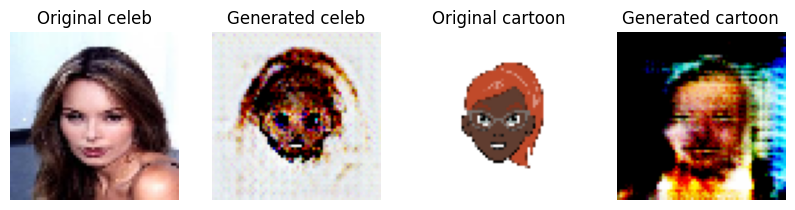

Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 88ms/step



Batchs:   0%|          | 1/1000 [00:01<25:06,  1.51s/it]

>1, dA[0.014 ,0.357 ] dB[0.061 ,0.013] g[5.816 ,5.938]
1/1 [==============================] - 0s 92ms/step



Batchs:   0%|          | 2/1000 [00:03<25:38,  1.54s/it]

>2, dA[0.067 ,0.010 ] dB[0.003 ,0.002] g[5.394 ,5.874]
1/1 [==============================] - 0s 98ms/step



Batchs:   0%|          | 3/1000 [00:04<25:49,  1.55s/it]

>3, dA[0.028 ,0.017 ] dB[0.002 ,0.006] g[5.894 ,6.670]
1/1 [==============================] - 0s 97ms/step



Batchs:   0%|          | 4/1000 [00:06<25:45,  1.55s/it]

>4, dA[0.017 ,0.308 ] dB[0.005 ,0.024] g[5.735 ,5.503]
1/1 [==============================] - 0s 92ms/step



Batchs:   0%|          | 5/1000 [00:07<25:20,  1.53s/it]

>5, dA[0.033 ,0.011 ] dB[0.035 ,0.047] g[6.386 ,6.880]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 6/1000 [00:09<25:06,  1.52s/it]

>6, dA[0.054 ,0.011 ] dB[0.007 ,0.009] g[4.389 ,5.432]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|          | 7/1000 [00:10<24:53,  1.50s/it]

>7, dA[0.009 ,0.017 ] dB[0.004 ,0.002] g[6.455 ,6.358]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 8/1000 [00:12<24:43,  1.50s/it]

>8, dA[0.036 ,0.173 ] dB[0.003 ,0.001] g[5.105 ,4.633]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|          | 9/1000 [00:13<24:37,  1.49s/it]

>9, dA[0.035 ,0.004 ] dB[0.010 ,0.006] g[5.685 ,6.473]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 10/1000 [00:15<24:48,  1.50s/it]

>10, dA[0.010 ,0.009 ] dB[0.005 ,0.020] g[4.802 ,5.780]
1/1 [==============================] - 0s 93ms/step



Batchs:   1%|          | 11/1000 [00:16<25:29,  1.55s/it]

>11, dA[0.240 ,0.012 ] dB[0.006 ,0.004] g[4.474 ,4.583]
1/1 [==============================] - 0s 97ms/step



Batchs:   1%|          | 12/1000 [00:18<25:40,  1.56s/it]

>12, dA[0.026 ,0.008 ] dB[0.001 ,0.004] g[5.405 ,4.890]
1/1 [==============================] - 0s 98ms/step



Batchs:   1%|▏         | 13/1000 [00:19<25:18,  1.54s/it]

>13, dA[0.004 ,0.428 ] dB[0.002 ,0.006] g[4.967 ,4.790]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|▏         | 14/1000 [00:21<24:59,  1.52s/it]

>14, dA[0.032 ,0.014 ] dB[0.002 ,0.005] g[4.250 ,4.686]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 15/1000 [00:22<24:48,  1.51s/it]

>15, dA[0.116 ,0.030 ] dB[0.004 ,0.005] g[4.914 ,5.816]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 16/1000 [00:24<24:39,  1.50s/it]

>16, dA[0.073 ,0.370 ] dB[0.002 ,0.174] g[4.333 ,4.760]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 17/1000 [00:25<24:32,  1.50s/it]

>17, dA[0.333 ,0.016 ] dB[0.611 ,0.020] g[5.091 ,4.792]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 18/1000 [00:27<24:29,  1.50s/it]

>18, dA[0.006 ,0.158 ] dB[0.265 ,0.079] g[4.552 ,4.136]
1/1 [==============================] - 0s 95ms/step



Batchs:   2%|▏         | 19/1000 [00:28<25:02,  1.53s/it]

>19, dA[0.250 ,0.080 ] dB[0.100 ,0.125] g[4.409 ,5.301]
1/1 [==============================] - 0s 93ms/step



Batchs:   2%|▏         | 20/1000 [00:30<25:16,  1.55s/it]

>20, dA[0.003 ,0.052 ] dB[0.017 ,0.075] g[3.786 ,4.108]
1/1 [==============================] - 0s 93ms/step



Batchs:   2%|▏         | 21/1000 [00:32<25:07,  1.54s/it]

>21, dA[0.060 ,0.023 ] dB[0.002 ,0.035] g[5.308 ,6.828]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 22/1000 [00:33<24:51,  1.52s/it]

>22, dA[0.030 ,0.125 ] dB[0.006 ,0.011] g[5.038 ,5.305]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 23/1000 [00:35<24:42,  1.52s/it]

>23, dA[0.025 ,0.008 ] dB[0.007 ,0.009] g[5.859 ,6.760]
1/1 [==============================] - 0s 97ms/step



Batchs:   2%|▏         | 24/1000 [00:36<24:35,  1.51s/it]

>24, dA[0.028 ,0.005 ] dB[0.001 ,0.007] g[6.000 ,6.388]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▎         | 25/1000 [00:37<24:24,  1.50s/it]

>25, dA[0.045 ,0.018 ] dB[0.001 ,0.001] g[4.834 ,4.732]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 26/1000 [00:39<24:21,  1.50s/it]

>26, dA[0.010 ,0.009 ] dB[0.000 ,0.002] g[4.320 ,3.867]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 27/1000 [00:40<24:19,  1.50s/it]

>27, dA[0.011 ,0.359 ] dB[0.017 ,0.004] g[5.325 ,4.604]
1/1 [==============================] - 0s 88ms/step



Batchs:   3%|▎         | 28/1000 [00:42<24:39,  1.52s/it]

>28, dA[0.026 ,0.052 ] dB[0.009 ,0.008] g[4.804 ,5.832]
1/1 [==============================] - 0s 93ms/step



Batchs:   3%|▎         | 29/1000 [00:44<24:56,  1.54s/it]

>29, dA[0.300 ,0.017 ] dB[0.004 ,0.008] g[5.155 ,6.307]
1/1 [==============================] - 0s 95ms/step



Batchs:   3%|▎         | 30/1000 [00:45<24:45,  1.53s/it]

>30, dA[0.204 ,0.303 ] dB[0.002 ,0.001] g[5.289 ,5.099]
1/1 [==============================] - 0s 95ms/step



Batchs:   3%|▎         | 31/1000 [00:47<24:35,  1.52s/it]

>31, dA[0.010 ,0.025 ] dB[0.007 ,0.014] g[4.495 ,4.098]
1/1 [==============================] - 0s 92ms/step



Batchs:   3%|▎         | 32/1000 [00:48<24:28,  1.52s/it]

>32, dA[0.006 ,0.007 ] dB[0.003 ,0.007] g[4.519 ,5.956]
1/1 [==============================] - 0s 92ms/step



Batchs:   3%|▎         | 33/1000 [00:50<24:18,  1.51s/it]

>33, dA[0.012 ,0.279 ] dB[0.003 ,0.001] g[5.522 ,5.441]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 34/1000 [00:51<24:12,  1.50s/it]

>34, dA[0.063 ,0.030 ] dB[0.012 ,0.014] g[5.493 ,6.483]
1/1 [==============================] - 0s 100ms/step



Batchs:   4%|▎         | 35/1000 [00:53<24:40,  1.53s/it]

>35, dA[0.023 ,0.006 ] dB[0.004 ,0.002] g[6.846 ,7.972]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▎         | 36/1000 [00:54<24:27,  1.52s/it]

>36, dA[0.242 ,0.248 ] dB[0.002 ,0.002] g[5.480 ,5.393]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▎         | 37/1000 [00:56<24:47,  1.54s/it]

>37, dA[0.177 ,0.027 ] dB[0.002 ,0.006] g[5.377 ,5.521]
1/1 [==============================] - 0s 94ms/step



Batchs:   4%|▍         | 38/1000 [00:57<24:58,  1.56s/it]

>38, dA[0.004 ,0.012 ] dB[0.043 ,0.004] g[5.789 ,5.859]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 39/1000 [00:59<24:41,  1.54s/it]

>39, dA[0.012 ,0.012 ] dB[0.018 ,0.012] g[4.830 ,4.924]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 40/1000 [01:00<24:24,  1.53s/it]

>40, dA[0.054 ,0.030 ] dB[0.006 ,0.043] g[4.492 ,4.415]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 41/1000 [01:02<24:15,  1.52s/it]

>41, dA[0.011 ,0.360 ] dB[0.008 ,0.027] g[6.270 ,5.961]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 42/1000 [01:03<24:09,  1.51s/it]

>42, dA[0.045 ,0.016 ] dB[0.020 ,0.004] g[6.331 ,6.785]
1/1 [==============================] - 0s 93ms/step



Batchs:   4%|▍         | 43/1000 [01:05<24:08,  1.51s/it]

>43, dA[0.286 ,0.045 ] dB[0.003 ,0.005] g[4.972 ,5.435]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 44/1000 [01:06<24:05,  1.51s/it]

>44, dA[0.041 ,0.031 ] dB[0.001 ,0.002] g[6.015 ,6.044]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 45/1000 [01:08<24:10,  1.52s/it]

>45, dA[0.008 ,0.109 ] dB[0.028 ,0.024] g[6.234 ,7.106]
1/1 [==============================] - 0s 92ms/step



Batchs:   5%|▍         | 46/1000 [01:10<24:28,  1.54s/it]

>46, dA[0.107 ,0.007 ] dB[0.003 ,0.007] g[6.148 ,6.773]
1/1 [==============================] - 0s 93ms/step



Batchs:   5%|▍         | 47/1000 [01:11<24:31,  1.54s/it]

>47, dA[0.051 ,0.025 ] dB[0.001 ,0.001] g[5.315 ,4.827]
1/1 [==============================] - 0s 99ms/step



Batchs:   5%|▍         | 48/1000 [01:13<24:14,  1.53s/it]

>48, dA[0.029 ,0.081 ] dB[0.001 ,0.006] g[4.313 ,3.992]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▍         | 49/1000 [01:14<23:58,  1.51s/it]

>49, dA[0.132 ,0.329 ] dB[0.001 ,0.004] g[4.738 ,4.961]
1/1 [==============================] - 0s 94ms/step



Batchs:   5%|▌         | 50/1000 [01:16<23:57,  1.51s/it]

>50, dA[0.044 ,0.011 ] dB[0.001 ,0.004] g[4.909 ,4.476]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 51/1000 [01:17<23:45,  1.50s/it]

>51, dA[0.012 ,0.002 ] dB[0.001 ,0.001] g[5.353 ,5.318]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 52/1000 [01:19<23:37,  1.49s/it]

>52, dA[0.131 ,0.035 ] dB[0.001 ,0.003] g[4.513 ,4.307]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 53/1000 [01:20<23:30,  1.49s/it]

>53, dA[0.014 ,0.064 ] dB[0.000 ,0.006] g[5.763 ,5.791]
1/1 [==============================] - 0s 97ms/step



Batchs:   5%|▌         | 54/1000 [01:22<23:51,  1.51s/it]

>54, dA[0.012 ,0.171 ] dB[0.006 ,0.018] g[4.213 ,4.035]
1/1 [==============================] - 0s 92ms/step



Batchs:   6%|▌         | 55/1000 [01:23<24:08,  1.53s/it]

>55, dA[0.032 ,0.049 ] dB[0.001 ,0.002] g[7.613 ,8.536]
1/1 [==============================] - 0s 94ms/step



Batchs:   6%|▌         | 56/1000 [01:25<24:06,  1.53s/it]

>56, dA[0.080 ,0.003 ] dB[0.021 ,0.003] g[5.165 ,6.104]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 57/1000 [01:26<23:51,  1.52s/it]

>57, dA[0.197 ,0.009 ] dB[0.007 ,0.001] g[5.166 ,6.436]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 58/1000 [01:28<23:39,  1.51s/it]

>58, dA[0.019 ,0.017 ] dB[0.005 ,0.001] g[4.719 ,5.173]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 59/1000 [01:29<23:31,  1.50s/it]

>59, dA[0.037 ,0.026 ] dB[0.001 ,0.012] g[6.081 ,6.856]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 60/1000 [01:31<23:24,  1.49s/it]

>60, dA[0.007 ,0.013 ] dB[0.004 ,0.003] g[4.737 ,4.087]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 61/1000 [01:32<23:17,  1.49s/it]

>61, dA[0.014 ,0.006 ] dB[0.041 ,0.120] g[4.962 ,5.632]
1/1 [==============================] - 0s 96ms/step



Batchs:   6%|▌         | 62/1000 [01:34<23:17,  1.49s/it]

>62, dA[0.006 ,0.011 ] dB[0.055 ,0.012] g[6.028 ,5.207]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▋         | 63/1000 [01:35<23:36,  1.51s/it]

>63, dA[0.039 ,0.365 ] dB[0.449 ,0.069] g[5.547 ,4.955]
1/1 [==============================] - 0s 92ms/step



Batchs:   6%|▋         | 64/1000 [01:37<23:49,  1.53s/it]

>64, dA[0.024 ,0.081 ] dB[0.081 ,0.028] g[5.740 ,6.659]
1/1 [==============================] - 0s 99ms/step



Batchs:   6%|▋         | 65/1000 [01:38<23:57,  1.54s/it]

>65, dA[0.180 ,0.082 ] dB[0.016 ,0.010] g[5.146 ,5.531]
1/1 [==============================] - 0s 88ms/step



Batchs:   7%|▋         | 66/1000 [01:40<23:40,  1.52s/it]

>66, dA[0.118 ,0.048 ] dB[0.004 ,0.005] g[4.815 ,4.739]
1/1 [==============================] - 0s 100ms/step



Batchs:   7%|▋         | 67/1000 [01:41<23:34,  1.52s/it]

>67, dA[0.027 ,0.008 ] dB[0.070 ,0.014] g[5.926 ,6.491]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 68/1000 [01:43<23:25,  1.51s/it]

>68, dA[0.121 ,0.008 ] dB[0.006 ,0.013] g[5.190 ,4.849]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 69/1000 [01:44<23:18,  1.50s/it]

>69, dA[0.003 ,0.034 ] dB[0.002 ,0.003] g[5.324 ,5.080]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 70/1000 [01:46<23:10,  1.50s/it]

>70, dA[0.007 ,0.006 ] dB[0.002 ,0.004] g[4.617 ,4.092]
1/1 [==============================] - 0s 88ms/step



Batchs:   7%|▋         | 71/1000 [01:47<23:03,  1.49s/it]

>71, dA[0.012 ,0.008 ] dB[0.016 ,0.001] g[4.209 ,3.415]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 72/1000 [01:49<23:23,  1.51s/it]

>72, dA[0.007 ,0.003 ] dB[0.005 ,0.002] g[5.034 ,5.902]
1/1 [==============================] - 0s 97ms/step



Batchs:   7%|▋         | 73/1000 [01:50<23:40,  1.53s/it]

>73, dA[0.002 ,0.449 ] dB[0.000 ,0.003] g[6.841 ,7.515]
1/1 [==============================] - 0s 92ms/step



Batchs:   7%|▋         | 74/1000 [01:52<23:32,  1.53s/it]

>74, dA[0.167 ,0.008 ] dB[0.001 ,0.093] g[3.682 ,4.102]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 75/1000 [01:53<23:34,  1.53s/it]

>75, dA[0.045 ,0.004 ] dB[0.010 ,0.026] g[6.366 ,5.840]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 76/1000 [01:55<23:22,  1.52s/it]

>76, dA[0.008 ,0.290 ] dB[0.436 ,0.047] g[6.218 ,5.974]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 77/1000 [01:56<23:12,  1.51s/it]

>77, dA[0.052 ,0.055 ] dB[0.215 ,0.087] g[4.354 ,5.027]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 78/1000 [01:58<23:07,  1.51s/it]

>78, dA[0.053 ,0.135 ] dB[0.075 ,0.059] g[4.534 ,4.872]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 79/1000 [01:59<23:01,  1.50s/it]

>79, dA[0.010 ,0.021 ] dB[0.157 ,0.039] g[4.882 ,5.008]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 80/1000 [02:01<23:06,  1.51s/it]

>80, dA[0.125 ,0.003 ] dB[0.021 ,0.033] g[4.331 ,4.972]
1/1 [==============================] - 0s 94ms/step



Batchs:   8%|▊         | 81/1000 [02:02<23:23,  1.53s/it]

>81, dA[0.055 ,0.029 ] dB[0.004 ,0.010] g[4.094 ,3.776]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 82/1000 [02:04<23:37,  1.54s/it]

>82, dA[0.003 ,0.390 ] dB[0.005 ,0.002] g[5.003 ,4.513]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 83/1000 [02:06<23:49,  1.56s/it]

>83, dA[0.009 ,0.013 ] dB[0.003 ,0.001] g[5.434 ,5.472]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 84/1000 [02:07<23:27,  1.54s/it]

>84, dA[0.324 ,0.012 ] dB[0.001 ,0.001] g[5.145 ,5.158]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 85/1000 [02:09<23:10,  1.52s/it]

>85, dA[0.024 ,0.302 ] dB[0.003 ,0.001] g[6.052 ,6.124]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▊         | 86/1000 [02:10<22:56,  1.51s/it]

>86, dA[0.039 ,0.022 ] dB[0.001 ,0.002] g[4.883 ,5.425]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▊         | 87/1000 [02:12<22:48,  1.50s/it]

>87, dA[0.102 ,0.149 ] dB[0.001 ,0.001] g[5.079 ,5.093]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▉         | 88/1000 [02:13<22:47,  1.50s/it]

>88, dA[0.008 ,0.007 ] dB[0.006 ,0.008] g[4.521 ,5.215]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 89/1000 [02:15<22:48,  1.50s/it]

>89, dA[0.093 ,0.154 ] dB[0.006 ,0.002] g[4.775 ,4.824]
1/1 [==============================] - 0s 95ms/step



Batchs:   9%|▉         | 90/1000 [02:16<23:10,  1.53s/it]

>90, dA[0.014 ,0.020 ] dB[0.002 ,0.007] g[4.468 ,4.119]
1/1 [==============================] - 0s 83ms/step



Batchs:   9%|▉         | 91/1000 [02:18<26:31,  1.75s/it]

>91, dA[0.071 ,0.082 ] dB[0.004 ,0.001] g[4.133 ,4.573]
1/1 [==============================] - 0s 94ms/step



Batchs:   9%|▉         | 92/1000 [02:20<25:22,  1.68s/it]

>92, dA[0.002 ,0.021 ] dB[0.227 ,0.537] g[4.347 ,5.175]
1/1 [==============================] - 0s 96ms/step



Batchs:   9%|▉         | 93/1000 [02:21<24:32,  1.62s/it]

>93, dA[0.005 ,0.003 ] dB[0.015 ,0.020] g[6.298 ,7.314]
1/1 [==============================] - 0s 95ms/step



Batchs:   9%|▉         | 94/1000 [02:23<24:01,  1.59s/it]

>94, dA[0.128 ,0.017 ] dB[0.014 ,0.011] g[5.631 ,5.533]
1/1 [==============================] - 0s 97ms/step



Batchs:  10%|▉         | 95/1000 [02:24<23:42,  1.57s/it]

>95, dA[0.185 ,0.714 ] dB[0.238 ,0.179] g[4.914 ,4.210]
1/1 [==============================] - 0s 96ms/step



Batchs:  10%|▉         | 96/1000 [02:26<23:20,  1.55s/it]

>96, dA[0.007 ,0.018 ] dB[0.015 ,0.039] g[4.576 ,4.989]
1/1 [==============================] - 0s 96ms/step



Batchs:  10%|▉         | 97/1000 [02:28<23:15,  1.55s/it]

>97, dA[0.012 ,0.098 ] dB[0.003 ,0.024] g[5.245 ,5.330]
1/1 [==============================] - 0s 102ms/step



Batchs:  10%|▉         | 98/1000 [02:29<23:29,  1.56s/it]

>98, dA[0.037 ,0.052 ] dB[0.061 ,0.025] g[5.453 ,6.135]
1/1 [==============================] - 0s 100ms/step



Batchs:  10%|▉         | 99/1000 [02:31<23:33,  1.57s/it]

>99, dA[0.015 ,0.005 ] dB[0.001 ,0.025] g[6.568 ,7.717]
1/1 [==============================] - 0s 96ms/step



Batchs:  10%|█         | 100/1000 [02:32<23:15,  1.55s/it]

>100, dA[0.165 ,0.120 ] dB[0.006 ,0.016] g[5.438 ,6.444]
1/1 [==============================] - 0s 97ms/step



Batchs:  10%|█         | 101/1000 [02:34<23:01,  1.54s/it]

>101, dA[0.151 ,0.052 ] dB[0.022 ,0.025] g[5.051 ,5.229]
1/1 [==============================] - 0s 98ms/step



Batchs:  10%|█         | 102/1000 [02:35<22:53,  1.53s/it]

>102, dA[0.017 ,0.083 ] dB[0.003 ,0.072] g[7.363 ,9.455]
1/1 [==============================] - 0s 96ms/step



Batchs:  10%|█         | 103/1000 [02:37<22:44,  1.52s/it]

>103, dA[0.124 ,0.024 ] dB[0.008 ,0.023] g[5.686 ,5.870]
1/1 [==============================] - 0s 103ms/step



Batchs:  10%|█         | 104/1000 [02:38<22:47,  1.53s/it]

>104, dA[0.023 ,0.004 ] dB[0.055 ,0.010] g[5.141 ,5.529]
1/1 [==============================] - 0s 97ms/step



Batchs:  10%|█         | 105/1000 [02:40<22:39,  1.52s/it]

>105, dA[0.014 ,0.004 ] dB[0.014 ,0.091] g[3.982 ,4.455]
1/1 [==============================] - 0s 98ms/step



Batchs:  11%|█         | 106/1000 [02:41<22:52,  1.54s/it]

>106, dA[0.022 ,0.332 ] dB[0.017 ,0.043] g[4.938 ,4.408]
1/1 [==============================] - 0s 97ms/step



Batchs:  11%|█         | 107/1000 [02:43<23:06,  1.55s/it]

>107, dA[0.112 ,0.019 ] dB[0.008 ,0.017] g[5.288 ,5.117]
1/1 [==============================] - 0s 101ms/step



Batchs:  11%|█         | 108/1000 [02:44<23:05,  1.55s/it]

>108, dA[0.011 ,0.004 ] dB[0.121 ,0.041] g[5.514 ,5.931]
1/1 [==============================] - 0s 96ms/step



Batchs:  11%|█         | 109/1000 [02:46<22:55,  1.54s/it]

>109, dA[0.034 ,0.015 ] dB[0.014 ,0.109] g[4.750 ,5.053]
1/1 [==============================] - 0s 97ms/step



Batchs:  11%|█         | 110/1000 [02:48<22:56,  1.55s/it]

>110, dA[0.051 ,0.372 ] dB[0.027 ,0.025] g[4.896 ,4.278]
1/1 [==============================] - 0s 97ms/step



Batchs:  11%|█         | 111/1000 [02:49<23:08,  1.56s/it]

>111, dA[0.022 ,0.013 ] dB[0.010 ,0.007] g[4.971 ,4.858]
1/1 [==============================] - 0s 100ms/step



Batchs:  11%|█         | 112/1000 [02:51<23:13,  1.57s/it]

>112, dA[0.017 ,0.012 ] dB[0.005 ,0.003] g[6.037 ,6.478]
1/1 [==============================] - 0s 98ms/step



Batchs:  11%|█▏        | 113/1000 [02:52<22:52,  1.55s/it]

>113, dA[0.036 ,0.023 ] dB[0.001 ,0.005] g[4.722 ,4.904]
1/1 [==============================] - 0s 97ms/step



Batchs:  11%|█▏        | 114/1000 [02:54<22:43,  1.54s/it]

>114, dA[0.110 ,0.023 ] dB[0.001 ,0.011] g[4.841 ,5.179]
1/1 [==============================] - 0s 99ms/step



Batchs:  12%|█▏        | 115/1000 [02:55<23:15,  1.58s/it]

>115, dA[0.019 ,0.037 ] dB[0.013 ,0.011] g[5.235 ,5.429]
1/1 [==============================] - 0s 100ms/step



Batchs:  12%|█▏        | 116/1000 [02:57<23:23,  1.59s/it]

>116, dA[0.087 ,0.043 ] dB[0.375 ,0.040] g[5.723 ,6.135]
1/1 [==============================] - 0s 98ms/step



Batchs:  12%|█▏        | 117/1000 [02:59<23:00,  1.56s/it]

>117, dA[0.018 ,0.386 ] dB[0.040 ,0.009] g[7.911 ,9.592]
1/1 [==============================] - 0s 98ms/step



Batchs:  12%|█▏        | 118/1000 [03:00<22:45,  1.55s/it]

>118, dA[0.255 ,0.045 ] dB[0.022 ,0.018] g[4.813 ,4.684]
1/1 [==============================] - 0s 98ms/step



Batchs:  12%|█▏        | 119/1000 [03:02<22:35,  1.54s/it]

>119, dA[0.017 ,0.039 ] dB[0.014 ,0.008] g[6.039 ,6.606]
1/1 [==============================] - 0s 99ms/step



Batchs:  12%|█▏        | 120/1000 [03:03<22:39,  1.54s/it]

>120, dA[0.124 ,0.006 ] dB[0.005 ,0.007] g[5.805 ,5.323]
1/1 [==============================] - 0s 99ms/step



Batchs:  12%|█▏        | 121/1000 [03:05<22:27,  1.53s/it]

>121, dA[0.023 ,0.376 ] dB[0.008 ,0.010] g[7.047 ,7.289]
1/1 [==============================] - 0s 98ms/step



Batchs:  12%|█▏        | 122/1000 [03:06<22:19,  1.53s/it]

>122, dA[0.051 ,0.024 ] dB[0.005 ,0.002] g[5.064 ,5.068]
1/1 [==============================] - 0s 98ms/step



Batchs:  12%|█▏        | 123/1000 [03:08<22:27,  1.54s/it]

>123, dA[0.107 ,0.021 ] dB[0.001 ,0.007] g[4.583 ,4.448]
1/1 [==============================] - 0s 100ms/step



Batchs:  12%|█▏        | 124/1000 [03:09<22:43,  1.56s/it]

>124, dA[0.024 ,0.003 ] dB[0.001 ,0.003] g[5.316 ,5.147]
1/1 [==============================] - 0s 101ms/step



Batchs:  12%|█▎        | 125/1000 [03:11<22:46,  1.56s/it]

>125, dA[0.004 ,0.005 ] dB[0.009 ,0.002] g[6.891 ,7.450]
1/1 [==============================] - 0s 99ms/step



Batchs:  13%|█▎        | 126/1000 [03:12<22:33,  1.55s/it]

>126, dA[0.008 ,0.380 ] dB[0.123 ,0.199] g[5.489 ,5.731]
1/1 [==============================] - 0s 100ms/step



Batchs:  13%|█▎        | 127/1000 [03:14<22:22,  1.54s/it]

>127, dA[0.160 ,0.056 ] dB[0.017 ,0.007] g[5.691 ,5.366]
1/1 [==============================] - 0s 99ms/step



Batchs:  13%|█▎        | 128/1000 [03:15<22:13,  1.53s/it]

>128, dA[0.115 ,0.031 ] dB[0.151 ,0.038] g[5.347 ,5.235]
1/1 [==============================] - 0s 98ms/step



Batchs:  13%|█▎        | 129/1000 [03:17<22:11,  1.53s/it]

>129, dA[0.095 ,0.019 ] dB[0.010 ,0.008] g[4.408 ,4.747]
1/1 [==============================] - 0s 97ms/step



Batchs:  13%|█▎        | 130/1000 [03:18<22:06,  1.53s/it]

>130, dA[0.004 ,0.031 ] dB[0.004 ,0.005] g[4.846 ,4.203]
1/1 [==============================] - 0s 98ms/step



Batchs:  13%|█▎        | 131/1000 [03:20<22:02,  1.52s/it]

>131, dA[0.020 ,0.013 ] dB[0.047 ,0.052] g[4.959 ,5.317]
1/1 [==============================] - 0s 97ms/step



Batchs:  13%|█▎        | 132/1000 [03:22<22:20,  1.54s/it]

>132, dA[0.011 ,0.050 ] dB[0.008 ,0.044] g[4.521 ,4.566]
1/1 [==============================] - 0s 99ms/step



Batchs:  13%|█▎        | 133/1000 [03:23<22:33,  1.56s/it]

>133, dA[0.048 ,0.002 ] dB[0.008 ,0.006] g[5.471 ,5.440]
1/1 [==============================] - 0s 96ms/step



Batchs:  13%|█▎        | 134/1000 [03:25<22:23,  1.55s/it]

>134, dA[0.033 ,0.234 ] dB[0.028 ,0.003] g[7.289 ,7.838]
1/1 [==============================] - 0s 96ms/step



Batchs:  14%|█▎        | 135/1000 [03:26<22:24,  1.55s/it]

>135, dA[0.016 ,0.022 ] dB[0.030 ,0.024] g[6.764 ,7.155]
1/1 [==============================] - 0s 97ms/step



Batchs:  14%|█▎        | 136/1000 [03:28<22:36,  1.57s/it]

>136, dA[0.205 ,0.090 ] dB[0.054 ,0.019] g[5.180 ,5.954]
1/1 [==============================] - 0s 97ms/step



Batchs:  14%|█▎        | 137/1000 [03:29<22:19,  1.55s/it]

>137, dA[0.015 ,0.014 ] dB[0.021 ,0.455] g[4.443 ,5.071]
1/1 [==============================] - 0s 94ms/step



Batchs:  14%|█▍        | 138/1000 [03:31<22:05,  1.54s/it]

>138, dA[0.003 ,0.125 ] dB[0.078 ,0.049] g[5.506 ,4.671]
1/1 [==============================] - 0s 99ms/step



Batchs:  14%|█▍        | 139/1000 [03:32<21:59,  1.53s/it]

>139, dA[0.128 ,0.015 ] dB[0.033 ,0.015] g[4.844 ,4.927]
1/1 [==============================] - 0s 95ms/step



Batchs:  14%|█▍        | 140/1000 [03:34<21:58,  1.53s/it]

>140, dA[0.002 ,0.033 ] dB[0.010 ,0.008] g[7.451 ,8.321]
1/1 [==============================] - 0s 96ms/step



Batchs:  14%|█▍        | 141/1000 [03:36<22:14,  1.55s/it]

>141, dA[0.007 ,0.005 ] dB[0.007 ,0.007] g[6.097 ,6.796]
1/1 [==============================] - 0s 96ms/step



Batchs:  14%|█▍        | 142/1000 [03:37<22:19,  1.56s/it]

>142, dA[0.006 ,0.039 ] dB[0.003 ,0.006] g[6.263 ,6.548]
1/1 [==============================] - 0s 95ms/step



Batchs:  14%|█▍        | 143/1000 [03:39<22:06,  1.55s/it]

>143, dA[0.217 ,0.010 ] dB[0.003 ,0.008] g[4.268 ,5.536]
1/1 [==============================] - 0s 93ms/step



Batchs:  14%|█▍        | 144/1000 [03:40<21:52,  1.53s/it]

>144, dA[0.058 ,0.177 ] dB[0.003 ,0.009] g[5.212 ,5.189]
1/1 [==============================] - 0s 95ms/step



Batchs:  14%|█▍        | 145/1000 [03:42<21:40,  1.52s/it]

>145, dA[0.049 ,0.102 ] dB[0.001 ,0.027] g[4.485 ,4.233]
1/1 [==============================] - 0s 94ms/step



Batchs:  15%|█▍        | 146/1000 [03:43<21:33,  1.51s/it]

>146, dA[0.193 ,0.006 ] dB[0.001 ,0.011] g[4.729 ,4.756]
1/1 [==============================] - 0s 93ms/step



Batchs:  15%|█▍        | 147/1000 [03:45<21:25,  1.51s/it]

>147, dA[0.012 ,0.029 ] dB[0.001 ,0.008] g[4.739 ,4.568]
1/1 [==============================] - 0s 94ms/step



Batchs:  15%|█▍        | 148/1000 [03:46<21:23,  1.51s/it]

>148, dA[0.018 ,0.002 ] dB[0.258 ,0.043] g[6.991 ,8.320]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▍        | 149/1000 [03:48<21:31,  1.52s/it]

>149, dA[0.001 ,0.008 ] dB[0.049 ,0.658] g[5.495 ,7.204]
1/1 [==============================] - 0s 96ms/step



Batchs:  15%|█▌        | 150/1000 [03:49<21:58,  1.55s/it]

>150, dA[0.193 ,0.009 ] dB[0.108 ,0.205] g[4.314 ,4.690]
1/1 [==============================] - 0s 95ms/step



Batchs:  15%|█▌        | 151/1000 [03:51<21:56,  1.55s/it]

>151, dA[0.017 ,0.064 ] dB[0.161 ,0.010] g[5.904 ,6.606]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 152/1000 [03:52<21:40,  1.53s/it]

>152, dA[0.019 ,0.069 ] dB[0.075 ,0.191] g[4.439 ,4.597]
1/1 [==============================] - 0s 93ms/step



Batchs:  15%|█▌        | 153/1000 [03:54<21:28,  1.52s/it]

>153, dA[0.006 ,0.006 ] dB[0.119 ,0.012] g[6.614 ,7.857]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 154/1000 [03:55<21:17,  1.51s/it]

>154, dA[0.078 ,0.372 ] dB[0.033 ,0.013] g[5.587 ,6.262]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 155/1000 [03:57<21:27,  1.52s/it]

>155, dA[0.090 ,0.015 ] dB[0.011 ,0.253] g[4.475 ,5.245]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 156/1000 [03:58<21:19,  1.52s/it]

>156, dA[0.099 ,0.013 ] dB[0.064 ,0.037] g[4.023 ,4.711]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 157/1000 [04:00<21:08,  1.50s/it]

>157, dA[0.018 ,0.149 ] dB[0.058 ,0.042] g[5.639 ,5.816]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 158/1000 [04:01<21:22,  1.52s/it]

>158, dA[0.144 ,0.036 ] dB[0.052 ,0.012] g[4.099 ,4.224]
1/1 [==============================] - 0s 95ms/step



Batchs:  16%|█▌        | 159/1000 [04:03<21:37,  1.54s/it]

>159, dA[0.013 ,0.052 ] dB[0.011 ,0.028] g[4.145 ,4.449]
1/1 [==============================] - 0s 95ms/step



Batchs:  16%|█▌        | 160/1000 [04:05<21:32,  1.54s/it]

>160, dA[0.016 ,0.029 ] dB[0.060 ,0.088] g[4.497 ,4.476]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 161/1000 [04:06<21:22,  1.53s/it]

>161, dA[0.011 ,0.026 ] dB[0.003 ,0.003] g[4.528 ,4.338]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 162/1000 [04:08<21:10,  1.52s/it]

>162, dA[0.002 ,0.221 ] dB[0.004 ,0.012] g[5.364 ,5.023]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▋        | 163/1000 [04:09<21:02,  1.51s/it]

>163, dA[0.245 ,0.024 ] dB[0.268 ,0.052] g[4.757 ,5.524]
1/1 [==============================] - 0s 98ms/step



Batchs:  16%|█▋        | 164/1000 [04:11<21:00,  1.51s/it]

>164, dA[0.260 ,0.148 ] dB[0.041 ,0.221] g[3.933 ,4.829]
1/1 [==============================] - 0s 94ms/step



Batchs:  16%|█▋        | 165/1000 [04:12<21:03,  1.51s/it]

>165, dA[0.054 ,0.006 ] dB[0.156 ,0.111] g[4.716 ,5.431]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 166/1000 [04:14<20:56,  1.51s/it]

>166, dA[0.003 ,0.014 ] dB[0.020 ,0.004] g[5.478 ,6.216]
1/1 [==============================] - 0s 95ms/step



Batchs:  17%|█▋        | 167/1000 [04:15<21:11,  1.53s/it]

>167, dA[0.002 ,0.296 ] dB[0.011 ,0.005] g[5.823 ,5.740]
1/1 [==============================] - 0s 95ms/step



Batchs:  17%|█▋        | 168/1000 [04:17<21:23,  1.54s/it]

>168, dA[0.056 ,0.013 ] dB[0.002 ,0.003] g[6.111 ,6.471]
1/1 [==============================] - 0s 95ms/step



Batchs:  17%|█▋        | 169/1000 [04:18<21:09,  1.53s/it]

>169, dA[0.045 ,0.016 ] dB[0.025 ,0.004] g[5.081 ,6.536]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 170/1000 [04:20<20:58,  1.52s/it]

>170, dA[0.014 ,0.084 ] dB[0.002 ,0.001] g[5.185 ,4.930]
1/1 [==============================] - 0s 89ms/step



Batchs:  17%|█▋        | 171/1000 [04:21<20:51,  1.51s/it]

>171, dA[0.265 ,0.114 ] dB[0.002 ,0.026] g[5.637 ,6.423]
1/1 [==============================] - 0s 93ms/step



Batchs:  17%|█▋        | 172/1000 [04:23<20:48,  1.51s/it]

>172, dA[0.013 ,0.006 ] dB[0.008 ,0.036] g[6.630 ,7.268]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 173/1000 [04:24<21:05,  1.53s/it]

>173, dA[0.002 ,0.015 ] dB[0.284 ,0.418] g[4.426 ,5.346]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 174/1000 [04:26<20:54,  1.52s/it]

>174, dA[0.008 ,0.008 ] dB[0.020 ,0.084] g[4.675 ,4.934]
1/1 [==============================] - 0s 94ms/step



Batchs:  18%|█▊        | 175/1000 [04:27<20:56,  1.52s/it]

>175, dA[0.007 ,0.368 ] dB[0.111 ,0.024] g[4.854 ,4.559]
1/1 [==============================] - 0s 93ms/step



Batchs:  18%|█▊        | 176/1000 [04:29<21:13,  1.55s/it]

>176, dA[0.209 ,0.023 ] dB[0.018 ,0.013] g[4.454 ,4.567]
1/1 [==============================] - 0s 94ms/step



Batchs:  18%|█▊        | 177/1000 [04:30<21:17,  1.55s/it]

>177, dA[0.015 ,0.418 ] dB[0.013 ,0.003] g[4.993 ,4.420]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 178/1000 [04:32<21:01,  1.53s/it]

>178, dA[0.398 ,0.017 ] dB[0.004 ,0.001] g[5.937 ,5.885]
1/1 [==============================] - 0s 94ms/step



Batchs:  18%|█▊        | 179/1000 [04:33<20:52,  1.53s/it]

>179, dA[0.066 ,0.021 ] dB[0.001 ,0.002] g[4.427 ,3.893]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 180/1000 [04:35<20:41,  1.51s/it]

>180, dA[0.007 ,0.456 ] dB[0.004 ,0.001] g[5.580 ,7.049]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 181/1000 [04:36<20:45,  1.52s/it]

>181, dA[0.062 ,0.018 ] dB[0.006 ,0.001] g[4.585 ,4.330]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 182/1000 [04:38<20:35,  1.51s/it]

>182, dA[0.034 ,0.030 ] dB[0.006 ,0.035] g[4.398 ,4.352]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 183/1000 [04:39<20:29,  1.50s/it]

>183, dA[0.056 ,0.081 ] dB[0.002 ,0.013] g[4.830 ,4.535]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 184/1000 [04:41<20:35,  1.51s/it]

>184, dA[0.090 ,0.130 ] dB[0.001 ,0.006] g[4.760 ,4.189]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 185/1000 [04:43<20:55,  1.54s/it]

>185, dA[0.191 ,0.035 ] dB[0.086 ,0.079] g[4.378 ,4.415]
1/1 [==============================] - 0s 93ms/step



Batchs:  19%|█▊        | 186/1000 [04:44<20:57,  1.55s/it]

>186, dA[0.010 ,0.024 ] dB[0.007 ,0.012] g[4.872 ,4.600]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▊        | 187/1000 [04:46<20:41,  1.53s/it]

>187, dA[0.056 ,0.004 ] dB[0.002 ,0.010] g[5.264 ,5.338]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 188/1000 [04:47<20:32,  1.52s/it]

>188, dA[0.014 ,0.021 ] dB[0.002 ,0.005] g[5.277 ,5.555]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 189/1000 [04:49<20:24,  1.51s/it]

>189, dA[0.038 ,0.211 ] dB[0.115 ,0.171] g[7.143 ,7.316]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 190/1000 [04:50<20:15,  1.50s/it]

>190, dA[0.038 ,0.006 ] dB[0.003 ,0.006] g[6.284 ,6.903]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 191/1000 [04:52<20:11,  1.50s/it]

>191, dA[0.090 ,0.006 ] dB[0.068 ,0.004] g[4.957 ,5.774]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 192/1000 [04:53<20:05,  1.49s/it]

>192, dA[0.018 ,0.069 ] dB[0.018 ,0.006] g[6.674 ,8.111]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▉        | 193/1000 [04:55<20:18,  1.51s/it]

>193, dA[0.094 ,0.037 ] dB[0.002 ,0.032] g[4.465 ,5.109]
1/1 [==============================] - 0s 93ms/step



Batchs:  19%|█▉        | 194/1000 [04:56<20:35,  1.53s/it]

>194, dA[0.006 ,0.018 ] dB[0.005 ,0.018] g[4.798 ,5.286]
1/1 [==============================] - 0s 95ms/step



Batchs:  20%|█▉        | 195/1000 [04:58<20:48,  1.55s/it]

>195, dA[0.002 ,0.006 ] dB[0.005 ,0.004] g[4.279 ,4.328]
1/1 [==============================] - 0s 88ms/step



Batchs:  20%|█▉        | 196/1000 [04:59<20:39,  1.54s/it]

>196, dA[0.130 ,0.011 ] dB[0.003 ,0.002] g[4.804 ,4.326]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 197/1000 [05:01<20:26,  1.53s/it]

>197, dA[0.013 ,0.025 ] dB[0.005 ,0.003] g[4.530 ,4.049]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|█▉        | 198/1000 [05:02<20:17,  1.52s/it]

>198, dA[0.002 ,0.002 ] dB[0.015 ,0.002] g[4.258 ,3.692]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 199/1000 [05:04<20:10,  1.51s/it]

>199, dA[0.009 ,0.021 ] dB[0.020 ,0.005] g[5.573 ,5.447]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|██        | 200/1000 [05:05<20:01,  1.50s/it]

>200, dA[0.035 ,0.276 ] dB[0.030 ,0.014] g[4.860 ,5.278]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 201/1000 [05:07<19:58,  1.50s/it]

>201, dA[0.139 ,0.004 ] dB[0.012 ,0.003] g[5.319 ,5.618]
1/1 [==============================] - 0s 93ms/step



Batchs:  20%|██        | 202/1000 [05:08<20:13,  1.52s/it]

>202, dA[0.007 ,0.021 ] dB[0.010 ,0.007] g[5.859 ,6.769]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 203/1000 [05:10<20:26,  1.54s/it]

>203, dA[0.214 ,0.080 ] dB[0.003 ,0.012] g[5.351 ,5.527]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 204/1000 [05:11<20:17,  1.53s/it]

>204, dA[0.004 ,0.002 ] dB[0.002 ,0.013] g[5.046 ,4.941]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|██        | 205/1000 [05:13<20:07,  1.52s/it]

>205, dA[0.014 ,0.048 ] dB[0.003 ,0.003] g[6.309 ,6.794]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 206/1000 [05:14<19:58,  1.51s/it]

>206, dA[0.150 ,0.008 ] dB[0.001 ,0.055] g[4.557 ,4.613]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 207/1000 [05:16<19:52,  1.50s/it]

>207, dA[0.008 ,0.396 ] dB[0.010 ,0.002] g[5.300 ,5.260]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 208/1000 [05:17<19:47,  1.50s/it]

>208, dA[0.025 ,0.018 ] dB[0.007 ,0.011] g[6.012 ,5.782]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 209/1000 [05:19<19:41,  1.49s/it]

>209, dA[0.143 ,0.006 ] dB[0.006 ,0.003] g[5.419 ,6.662]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 210/1000 [05:20<19:39,  1.49s/it]

>210, dA[0.014 ,0.118 ] dB[0.003 ,0.014] g[5.112 ,5.144]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 211/1000 [05:22<20:08,  1.53s/it]

>211, dA[0.148 ,0.002 ] dB[0.296 ,0.042] g[5.187 ,5.029]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 212/1000 [05:24<20:18,  1.55s/it]

>212, dA[0.008 ,0.003 ] dB[0.032 ,0.061] g[4.637 ,5.235]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██▏       | 213/1000 [05:25<20:02,  1.53s/it]

>213, dA[0.148 ,0.397 ] dB[0.011 ,0.006] g[4.952 ,5.033]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██▏       | 214/1000 [05:27<19:53,  1.52s/it]

>214, dA[0.044 ,0.012 ] dB[0.144 ,0.040] g[4.678 ,4.631]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 215/1000 [05:28<19:46,  1.51s/it]

>215, dA[0.036 ,0.095 ] dB[0.015 ,0.057] g[4.678 ,5.705]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 216/1000 [05:30<19:39,  1.50s/it]

>216, dA[0.004 ,0.032 ] dB[0.025 ,0.037] g[4.362 ,4.689]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 217/1000 [05:31<19:32,  1.50s/it]

>217, dA[0.015 ,0.002 ] dB[0.009 ,0.002] g[4.842 ,4.937]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 218/1000 [05:32<19:27,  1.49s/it]

>218, dA[0.034 ,0.007 ] dB[0.005 ,0.117] g[5.011 ,5.477]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 219/1000 [05:34<19:35,  1.51s/it]

>219, dA[0.266 ,0.004 ] dB[0.075 ,0.202] g[4.306 ,4.416]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 220/1000 [05:36<19:49,  1.52s/it]

>220, dA[0.057 ,0.016 ] dB[0.006 ,0.006] g[6.015 ,6.305]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 221/1000 [05:37<19:55,  1.53s/it]

>221, dA[0.012 ,0.132 ] dB[0.561 ,0.078] g[5.060 ,4.867]
1/1 [==============================] - 0s 95ms/step



Batchs:  22%|██▏       | 222/1000 [05:39<19:42,  1.52s/it]

>222, dA[0.003 ,0.004 ] dB[0.028 ,0.042] g[4.196 ,4.648]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 223/1000 [05:40<19:30,  1.51s/it]

>223, dA[0.091 ,0.005 ] dB[0.029 ,0.013] g[5.268 ,6.533]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 224/1000 [05:42<19:23,  1.50s/it]

>224, dA[0.064 ,0.149 ] dB[0.181 ,0.079] g[5.449 ,6.247]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▎       | 225/1000 [05:43<19:19,  1.50s/it]

>225, dA[0.013 ,0.011 ] dB[0.032 ,0.191] g[4.003 ,4.358]
1/1 [==============================] - 0s 95ms/step



Batchs:  23%|██▎       | 226/1000 [05:45<19:24,  1.50s/it]

>226, dA[0.198 ,0.078 ] dB[0.018 ,0.014] g[4.276 ,4.797]
1/1 [==============================] - 0s 93ms/step



Batchs:  23%|██▎       | 227/1000 [05:46<19:18,  1.50s/it]

>227, dA[0.016 ,0.302 ] dB[0.005 ,0.004] g[4.272 ,3.575]
1/1 [==============================] - 0s 88ms/step



Batchs:  23%|██▎       | 228/1000 [05:48<19:25,  1.51s/it]

>228, dA[0.023 ,0.010 ] dB[0.004 ,0.001] g[5.289 ,5.900]
1/1 [==============================] - 0s 94ms/step



Batchs:  23%|██▎       | 229/1000 [05:49<19:36,  1.53s/it]

>229, dA[0.016 ,0.046 ] dB[0.003 ,0.002] g[5.179 ,5.445]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 230/1000 [05:51<19:40,  1.53s/it]

>230, dA[0.207 ,0.466 ] dB[0.002 ,0.005] g[5.737 ,4.939]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 231/1000 [05:52<19:31,  1.52s/it]

>231, dA[0.108 ,0.004 ] dB[0.002 ,0.002] g[5.156 ,5.008]
1/1 [==============================] - 0s 88ms/step



Batchs:  23%|██▎       | 232/1000 [05:54<19:17,  1.51s/it]

>232, dA[0.007 ,0.083 ] dB[0.001 ,0.001] g[6.441 ,6.956]
1/1 [==============================] - 0s 88ms/step



Batchs:  23%|██▎       | 233/1000 [05:55<19:09,  1.50s/it]

>233, dA[0.108 ,0.033 ] dB[0.014 ,0.001] g[4.842 ,4.643]
1/1 [==============================] - 0s 88ms/step



Batchs:  23%|██▎       | 234/1000 [05:57<19:02,  1.49s/it]

>234, dA[0.163 ,0.003 ] dB[0.028 ,0.019] g[4.448 ,4.596]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▎       | 235/1000 [05:58<19:02,  1.49s/it]

>235, dA[0.034 ,0.069 ] dB[0.010 ,0.014] g[5.213 ,6.728]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▎       | 236/1000 [06:00<19:11,  1.51s/it]

>236, dA[0.012 ,0.207 ] dB[0.004 ,0.016] g[4.482 ,4.286]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▎       | 237/1000 [06:01<19:17,  1.52s/it]

>237, dA[0.134 ,0.006 ] dB[0.008 ,0.013] g[4.066 ,5.454]
1/1 [==============================] - 0s 91ms/step



Batchs:  24%|██▍       | 238/1000 [06:03<19:31,  1.54s/it]

>238, dA[0.019 ,0.009 ] dB[0.001 ,0.002] g[6.122 ,6.575]
1/1 [==============================] - 0s 94ms/step



Batchs:  24%|██▍       | 239/1000 [06:04<19:28,  1.54s/it]

>239, dA[0.057 ,0.007 ] dB[0.000 ,0.005] g[4.914 ,4.936]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▍       | 240/1000 [06:06<19:14,  1.52s/it]

>240, dA[0.004 ,0.276 ] dB[0.002 ,0.006] g[5.079 ,5.085]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▍       | 241/1000 [06:07<19:06,  1.51s/it]

>241, dA[0.185 ,0.043 ] dB[0.002 ,0.008] g[6.183 ,6.086]
1/1 [==============================] - 0s 93ms/step



Batchs:  24%|██▍       | 242/1000 [06:09<19:05,  1.51s/it]

>242, dA[0.011 ,0.068 ] dB[0.007 ,0.006] g[4.985 ,4.611]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▍       | 243/1000 [06:10<18:58,  1.50s/it]

>243, dA[0.015 ,0.014 ] dB[0.002 ,0.008] g[4.683 ,4.425]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 244/1000 [06:12<18:53,  1.50s/it]

>244, dA[0.103 ,0.003 ] dB[0.163 ,0.395] g[4.568 ,4.777]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▍       | 245/1000 [06:13<18:47,  1.49s/it]

>245, dA[0.087 ,0.012 ] dB[0.006 ,0.015] g[4.382 ,4.697]
1/1 [==============================] - 0s 96ms/step



Batchs:  25%|██▍       | 246/1000 [06:15<19:04,  1.52s/it]

>246, dA[0.014 ,0.016 ] dB[0.009 ,0.010] g[4.298 ,3.583]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▍       | 247/1000 [06:16<19:14,  1.53s/it]

>247, dA[0.007 ,0.032 ] dB[0.009 ,0.003] g[6.926 ,7.353]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▍       | 248/1000 [06:18<19:07,  1.53s/it]

>248, dA[0.009 ,0.375 ] dB[0.004 ,0.105] g[4.789 ,4.988]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▍       | 249/1000 [06:19<18:55,  1.51s/it]

>249, dA[0.088 ,0.029 ] dB[0.013 ,0.035] g[5.672 ,5.599]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▌       | 250/1000 [06:21<18:49,  1.51s/it]

>250, dA[0.006 ,0.009 ] dB[0.028 ,0.006] g[5.768 ,6.406]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▌       | 251/1000 [06:22<18:43,  1.50s/it]

>251, dA[0.050 ,0.004 ] dB[0.008 ,0.002] g[4.466 ,5.225]
1/1 [==============================] - 0s 88ms/step



Batchs:  25%|██▌       | 252/1000 [06:24<18:36,  1.49s/it]

>252, dA[0.080 ,0.034 ] dB[0.108 ,0.027] g[5.338 ,6.392]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▌       | 253/1000 [06:25<18:36,  1.49s/it]

>253, dA[0.011 ,0.018 ] dB[0.018 ,0.076] g[5.229 ,6.416]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▌       | 254/1000 [06:27<18:33,  1.49s/it]

>254, dA[0.011 ,0.052 ] dB[0.007 ,0.032] g[5.757 ,6.990]
1/1 [==============================] - 0s 99ms/step



Batchs:  26%|██▌       | 255/1000 [06:28<18:53,  1.52s/it]

>255, dA[0.013 ,0.059 ] dB[0.009 ,0.012] g[3.714 ,4.305]
1/1 [==============================] - 0s 94ms/step



Batchs:  26%|██▌       | 256/1000 [06:30<19:05,  1.54s/it]

>256, dA[0.006 ,0.007 ] dB[0.012 ,0.010] g[4.655 ,5.456]
1/1 [==============================] - 0s 97ms/step



Batchs:  26%|██▌       | 257/1000 [06:32<19:05,  1.54s/it]

>257, dA[0.012 ,0.024 ] dB[0.003 ,0.003] g[5.620 ,6.791]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 258/1000 [06:33<18:51,  1.53s/it]

>258, dA[0.009 ,0.004 ] dB[0.019 ,0.006] g[6.289 ,6.911]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▌       | 259/1000 [06:35<18:41,  1.51s/it]

>259, dA[0.236 ,0.047 ] dB[0.017 ,0.422] g[4.532 ,4.701]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 260/1000 [06:36<18:35,  1.51s/it]

>260, dA[0.020 ,0.036 ] dB[0.056 ,0.075] g[4.451 ,4.982]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▌       | 261/1000 [06:38<18:28,  1.50s/it]

>261, dA[0.006 ,0.281 ] dB[0.153 ,0.013] g[5.418 ,4.802]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 262/1000 [06:39<18:23,  1.50s/it]

>262, dA[0.012 ,0.018 ] dB[0.016 ,0.014] g[4.536 ,5.081]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▋       | 263/1000 [06:41<18:21,  1.49s/it]

>263, dA[0.345 ,0.123 ] dB[0.006 ,0.107] g[4.175 ,4.755]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▋       | 264/1000 [06:42<18:38,  1.52s/it]

>264, dA[0.038 ,0.012 ] dB[0.015 ,0.025] g[4.397 ,5.002]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▋       | 265/1000 [06:44<18:54,  1.54s/it]

>265, dA[0.003 ,0.020 ] dB[0.012 ,0.013] g[5.222 ,5.451]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 266/1000 [06:45<18:54,  1.55s/it]

>266, dA[0.155 ,0.024 ] dB[0.021 ,0.002] g[4.732 ,5.124]
1/1 [==============================] - 0s 98ms/step



Batchs:  27%|██▋       | 267/1000 [06:47<19:03,  1.56s/it]

>267, dA[0.027 ,0.004 ] dB[0.002 ,0.006] g[4.776 ,4.589]
1/1 [==============================] - 0s 91ms/step



Batchs:  27%|██▋       | 268/1000 [06:48<19:05,  1.56s/it]

>268, dA[0.025 ,0.316 ] dB[0.002 ,0.030] g[4.622 ,4.359]
1/1 [==============================] - 0s 88ms/step



Batchs:  27%|██▋       | 269/1000 [06:50<18:45,  1.54s/it]

>269, dA[0.069 ,0.008 ] dB[0.003 ,0.002] g[5.765 ,6.437]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 270/1000 [06:51<18:31,  1.52s/it]

>270, dA[0.027 ,0.014 ] dB[0.004 ,0.001] g[6.039 ,6.538]
1/1 [==============================] - 0s 88ms/step



Batchs:  27%|██▋       | 271/1000 [06:53<18:22,  1.51s/it]

>271, dA[0.056 ,0.142 ] dB[0.001 ,0.006] g[4.656 ,4.269]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 272/1000 [06:54<18:32,  1.53s/it]

>272, dA[0.205 ,0.153 ] dB[0.034 ,0.005] g[5.553 ,5.612]
1/1 [==============================] - 0s 93ms/step



Batchs:  27%|██▋       | 273/1000 [06:56<18:41,  1.54s/it]

>273, dA[0.074 ,0.003 ] dB[0.011 ,0.008] g[4.280 ,4.766]
1/1 [==============================] - 0s 92ms/step



Batchs:  27%|██▋       | 274/1000 [06:58<18:44,  1.55s/it]

>274, dA[0.014 ,0.005 ] dB[0.014 ,0.024] g[4.560 ,4.665]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 275/1000 [06:59<18:29,  1.53s/it]

>275, dA[0.053 ,0.008 ] dB[0.003 ,0.080] g[4.459 ,5.029]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 276/1000 [07:01<18:32,  1.54s/it]

>276, dA[0.016 ,0.451 ] dB[0.005 ,0.025] g[4.755 ,4.052]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 277/1000 [07:02<18:20,  1.52s/it]

>277, dA[0.028 ,0.036 ] dB[0.030 ,0.003] g[5.635 ,5.729]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 278/1000 [07:04<18:10,  1.51s/it]

>278, dA[0.043 ,0.004 ] dB[0.041 ,0.003] g[6.066 ,6.763]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 279/1000 [07:05<18:07,  1.51s/it]

>279, dA[0.015 ,0.062 ] dB[0.012 ,0.009] g[5.073 ,5.657]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 280/1000 [07:07<18:02,  1.50s/it]

>280, dA[0.241 ,0.038 ] dB[0.009 ,0.006] g[4.384 ,4.684]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 281/1000 [07:08<18:14,  1.52s/it]

>281, dA[0.011 ,0.003 ] dB[0.005 ,0.025] g[5.586 ,6.104]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 282/1000 [07:10<18:25,  1.54s/it]

>282, dA[0.003 ,0.336 ] dB[0.043 ,0.061] g[4.901 ,5.524]
1/1 [==============================] - 0s 94ms/step



Batchs:  28%|██▊       | 283/1000 [07:11<18:22,  1.54s/it]

>283, dA[0.160 ,0.049 ] dB[0.004 ,0.050] g[5.533 ,5.237]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 284/1000 [07:13<18:08,  1.52s/it]

>284, dA[0.274 ,0.004 ] dB[0.008 ,0.006] g[5.540 ,5.765]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 285/1000 [07:14<17:58,  1.51s/it]

>285, dA[0.033 ,0.026 ] dB[0.002 ,0.003] g[5.292 ,4.589]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▊       | 286/1000 [07:16<17:50,  1.50s/it]

>286, dA[0.006 ,0.029 ] dB[0.005 ,0.001] g[5.033 ,4.311]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▊       | 287/1000 [07:17<17:52,  1.50s/it]

>287, dA[0.008 ,0.172 ] dB[0.006 ,0.006] g[6.278 ,6.200]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 288/1000 [07:19<17:46,  1.50s/it]

>288, dA[0.013 ,0.031 ] dB[0.003 ,0.002] g[5.135 ,4.817]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 289/1000 [07:20<17:42,  1.49s/it]

>289, dA[0.034 ,0.053 ] dB[0.001 ,0.001] g[6.099 ,6.666]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 290/1000 [07:22<17:55,  1.52s/it]

>290, dA[0.236 ,0.332 ] dB[0.009 ,0.002] g[5.091 ,4.741]
1/1 [==============================] - 0s 94ms/step



Batchs:  29%|██▉       | 291/1000 [07:23<18:07,  1.53s/it]

>291, dA[0.002 ,0.014 ] dB[0.217 ,0.084] g[4.953 ,4.599]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 292/1000 [07:25<18:04,  1.53s/it]

>292, dA[0.035 ,0.003 ] dB[0.018 ,0.008] g[7.533 ,9.106]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▉       | 293/1000 [07:26<17:53,  1.52s/it]

>293, dA[0.007 ,0.163 ] dB[0.008 ,0.023] g[4.806 ,4.745]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 294/1000 [07:28<17:44,  1.51s/it]

>294, dA[0.007 ,0.017 ] dB[0.005 ,0.014] g[4.946 ,5.154]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 295/1000 [07:29<17:38,  1.50s/it]

>295, dA[0.035 ,0.004 ] dB[0.004 ,0.003] g[5.397 ,7.577]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 296/1000 [07:31<17:31,  1.49s/it]

>296, dA[0.020 ,0.008 ] dB[0.002 ,0.093] g[4.261 ,5.032]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|██▉       | 297/1000 [07:32<17:29,  1.49s/it]

>297, dA[0.025 ,0.122 ] dB[0.004 ,0.013] g[5.981 ,6.324]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 298/1000 [07:34<17:28,  1.49s/it]

>298, dA[0.320 ,0.005 ] dB[0.024 ,0.001] g[5.365 ,5.727]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|██▉       | 299/1000 [07:35<17:41,  1.51s/it]

>299, dA[0.037 ,0.010 ] dB[0.004 ,0.003] g[5.792 ,5.716]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|███       | 300/1000 [07:37<18:02,  1.55s/it]

>300, dA[0.005 ,0.143 ] dB[0.004 ,0.002] g[5.464 ,5.452]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|███       | 301/1000 [07:38<17:48,  1.53s/it]

>301, dA[0.007 ,0.004 ] dB[0.003 ,0.002] g[4.584 ,4.898]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 302/1000 [07:40<17:38,  1.52s/it]

>302, dA[0.118 ,0.038 ] dB[0.001 ,0.001] g[4.746 ,4.850]
1/1 [==============================] - 0s 93ms/step



Batchs:  30%|███       | 303/1000 [07:41<17:37,  1.52s/it]

>303, dA[0.043 ,0.009 ] dB[0.002 ,0.003] g[4.718 ,4.666]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|███       | 304/1000 [07:43<17:28,  1.51s/it]

>304, dA[0.170 ,0.202 ] dB[0.001 ,0.002] g[4.650 ,4.596]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|███       | 305/1000 [07:44<17:31,  1.51s/it]

>305, dA[0.026 ,0.034 ] dB[0.235 ,0.401] g[5.382 ,5.389]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 306/1000 [07:46<17:24,  1.51s/it]

>306, dA[0.171 ,0.055 ] dB[0.004 ,0.009] g[6.263 ,6.514]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███       | 307/1000 [07:47<17:20,  1.50s/it]

>307, dA[0.125 ,0.115 ] dB[0.009 ,0.003] g[5.013 ,4.238]
1/1 [==============================] - 0s 94ms/step



Batchs:  31%|███       | 308/1000 [07:49<17:35,  1.53s/it]

>308, dA[0.003 ,0.059 ] dB[0.004 ,0.002] g[4.904 ,4.626]
1/1 [==============================] - 0s 92ms/step



Batchs:  31%|███       | 309/1000 [07:51<17:45,  1.54s/it]

>309, dA[0.020 ,0.019 ] dB[0.012 ,0.002] g[5.266 ,5.047]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 310/1000 [07:52<17:31,  1.52s/it]

>310, dA[0.003 ,0.033 ] dB[0.005 ,0.004] g[5.178 ,6.097]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 311/1000 [07:54<17:20,  1.51s/it]

>311, dA[0.158 ,0.320 ] dB[0.293 ,0.077] g[5.576 ,5.797]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 312/1000 [07:55<17:11,  1.50s/it]

>312, dA[0.009 ,0.026 ] dB[0.019 ,0.049] g[4.261 ,4.623]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███▏      | 313/1000 [07:57<17:07,  1.50s/it]

>313, dA[0.003 ,0.053 ] dB[0.016 ,0.016] g[6.601 ,7.737]
1/1 [==============================] - 0s 86ms/step



Batchs:  31%|███▏      | 314/1000 [07:58<17:03,  1.49s/it]

>314, dA[0.107 ,0.029 ] dB[0.030 ,0.032] g[4.636 ,4.473]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 315/1000 [07:59<17:00,  1.49s/it]

>315, dA[0.163 ,0.048 ] dB[0.002 ,0.009] g[5.231 ,4.619]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 316/1000 [08:01<17:03,  1.50s/it]

>316, dA[0.025 ,0.476 ] dB[0.002 ,0.004] g[5.311 ,4.959]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 317/1000 [08:03<17:29,  1.54s/it]

>317, dA[0.100 ,0.022 ] dB[0.002 ,0.001] g[4.787 ,5.676]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 318/1000 [08:04<17:40,  1.55s/it]

>318, dA[0.394 ,0.011 ] dB[0.001 ,0.002] g[5.226 ,5.755]
1/1 [==============================] - 0s 92ms/step



Batchs:  32%|███▏      | 319/1000 [08:06<17:25,  1.53s/it]

>319, dA[0.030 ,0.085 ] dB[0.003 ,0.001] g[4.956 ,4.800]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 320/1000 [08:07<17:15,  1.52s/it]

>320, dA[0.096 ,0.383 ] dB[0.010 ,0.007] g[5.117 ,4.993]
1/1 [==============================] - 0s 98ms/step



Batchs:  32%|███▏      | 321/1000 [08:09<17:10,  1.52s/it]

>321, dA[0.100 ,0.012 ] dB[0.001 ,0.002] g[4.400 ,4.310]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 322/1000 [08:10<17:02,  1.51s/it]

>322, dA[0.006 ,0.004 ] dB[0.001 ,0.002] g[4.618 ,4.452]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 323/1000 [08:12<16:56,  1.50s/it]

>323, dA[0.024 ,0.290 ] dB[0.001 ,0.001] g[4.661 ,4.830]
1/1 [==============================] - 0s 96ms/step



Batchs:  32%|███▏      | 324/1000 [08:13<16:53,  1.50s/it]

>324, dA[0.179 ,0.030 ] dB[0.001 ,0.001] g[4.843 ,4.716]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▎      | 325/1000 [08:15<17:00,  1.51s/it]

>325, dA[0.052 ,0.004 ] dB[0.381 ,0.399] g[4.510 ,4.530]
1/1 [==============================] - 0s 94ms/step



Batchs:  33%|███▎      | 326/1000 [08:16<17:09,  1.53s/it]

>326, dA[0.012 ,0.233 ] dB[0.003 ,0.063] g[5.806 ,7.236]
1/1 [==============================] - 0s 95ms/step



Batchs:  33%|███▎      | 327/1000 [08:18<17:13,  1.54s/it]

>327, dA[0.013 ,0.020 ] dB[0.025 ,0.004] g[7.126 ,7.567]
1/1 [==============================] - 0s 89ms/step



Batchs:  33%|███▎      | 328/1000 [08:19<17:02,  1.52s/it]

>328, dA[0.395 ,0.010 ] dB[0.049 ,0.008] g[5.519 ,6.207]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 329/1000 [08:21<16:54,  1.51s/it]

>329, dA[0.017 ,0.253 ] dB[0.007 ,0.005] g[5.896 ,6.441]
1/1 [==============================] - 0s 89ms/step



Batchs:  33%|███▎      | 330/1000 [08:22<16:46,  1.50s/it]

>330, dA[0.043 ,0.003 ] dB[0.002 ,0.003] g[4.563 ,4.846]
1/1 [==============================] - 0s 89ms/step



Batchs:  33%|███▎      | 331/1000 [08:24<16:42,  1.50s/it]

>331, dA[0.005 ,0.139 ] dB[0.002 ,0.001] g[7.799 ,9.241]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 332/1000 [08:25<16:37,  1.49s/it]

>332, dA[0.106 ,0.005 ] dB[0.208 ,0.053] g[4.788 ,4.789]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 333/1000 [08:27<16:43,  1.51s/it]

>333, dA[0.019 ,0.094 ] dB[0.028 ,0.316] g[3.889 ,4.492]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 334/1000 [08:28<16:49,  1.52s/it]

>334, dA[0.052 ,0.033 ] dB[0.041 ,0.029] g[5.080 ,4.615]
1/1 [==============================] - 0s 93ms/step



Batchs:  34%|███▎      | 335/1000 [08:30<17:01,  1.54s/it]

>335, dA[0.152 ,0.100 ] dB[0.137 ,0.023] g[4.279 ,4.137]
1/1 [==============================] - 0s 101ms/step



Batchs:  34%|███▎      | 336/1000 [08:31<16:59,  1.54s/it]

>336, dA[0.182 ,0.060 ] dB[0.013 ,0.019] g[4.111 ,4.891]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▎      | 337/1000 [08:33<16:47,  1.52s/it]

>337, dA[0.009 ,0.032 ] dB[0.004 ,0.008] g[4.881 ,5.752]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 338/1000 [08:34<16:37,  1.51s/it]

>338, dA[0.009 ,0.297 ] dB[0.004 ,0.067] g[4.669 ,4.973]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 339/1000 [08:36<16:34,  1.50s/it]

>339, dA[0.016 ,0.014 ] dB[0.011 ,0.013] g[4.628 ,5.208]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 340/1000 [08:37<16:30,  1.50s/it]

>340, dA[0.068 ,0.010 ] dB[0.228 ,0.045] g[5.017 ,5.765]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▍      | 341/1000 [08:39<16:24,  1.49s/it]

>341, dA[0.009 ,0.214 ] dB[0.016 ,0.019] g[3.733 ,4.515]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 342/1000 [08:40<16:21,  1.49s/it]

>342, dA[0.036 ,0.065 ] dB[0.003 ,0.253] g[4.291 ,5.148]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 343/1000 [08:42<16:34,  1.51s/it]

>343, dA[0.089 ,0.005 ] dB[0.024 ,0.007] g[4.872 ,4.761]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 344/1000 [08:44<16:50,  1.54s/it]

>344, dA[0.033 ,0.176 ] dB[0.030 ,0.028] g[5.504 ,4.471]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 345/1000 [08:45<16:45,  1.53s/it]

>345, dA[0.175 ,0.033 ] dB[0.071 ,0.055] g[6.307 ,5.828]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▍      | 346/1000 [08:47<16:32,  1.52s/it]

>346, dA[0.011 ,0.251 ] dB[0.003 ,0.017] g[4.608 ,4.047]
1/1 [==============================] - 0s 90ms/step



Batchs:  35%|███▍      | 347/1000 [08:48<16:24,  1.51s/it]

>347, dA[0.005 ,0.009 ] dB[0.009 ,0.002] g[4.837 ,4.942]
1/1 [==============================] - 0s 93ms/step



Batchs:  35%|███▍      | 348/1000 [08:50<16:27,  1.51s/it]

>348, dA[0.038 ,0.032 ] dB[0.002 ,0.018] g[5.126 ,6.035]
1/1 [==============================] - 0s 92ms/step



Batchs:  35%|███▍      | 349/1000 [08:51<16:20,  1.51s/it]

>349, dA[0.025 ,0.017 ] dB[0.011 ,0.019] g[5.828 ,5.439]
1/1 [==============================] - 0s 93ms/step



Batchs:  35%|███▌      | 350/1000 [08:53<16:15,  1.50s/it]

>350, dA[0.014 ,0.284 ] dB[0.009 ,0.009] g[4.938 ,4.636]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▌      | 351/1000 [08:54<16:09,  1.49s/it]

>351, dA[0.158 ,0.011 ] dB[0.007 ,0.003] g[5.059 ,5.548]
1/1 [==============================] - 0s 93ms/step



Batchs:  35%|███▌      | 352/1000 [08:56<16:23,  1.52s/it]

>352, dA[0.031 ,0.027 ] dB[0.007 ,0.006] g[4.547 ,4.742]
1/1 [==============================] - 0s 93ms/step



Batchs:  35%|███▌      | 353/1000 [08:57<16:32,  1.53s/it]

>353, dA[0.002 ,0.082 ] dB[0.001 ,0.022] g[5.269 ,5.722]
1/1 [==============================] - 0s 91ms/step



Batchs:  35%|███▌      | 354/1000 [08:59<16:26,  1.53s/it]

>354, dA[0.191 ,0.046 ] dB[0.227 ,0.401] g[4.254 ,4.638]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 355/1000 [09:00<16:18,  1.52s/it]

>355, dA[0.040 ,0.082 ] dB[0.008 ,0.018] g[4.917 ,5.009]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▌      | 356/1000 [09:02<16:09,  1.51s/it]

>356, dA[0.274 ,0.317 ] dB[0.038 ,0.007] g[4.855 ,4.209]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 357/1000 [09:03<16:16,  1.52s/it]

>357, dA[0.082 ,0.007 ] dB[0.028 ,0.002] g[4.893 ,5.133]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 358/1000 [09:05<16:08,  1.51s/it]

>358, dA[0.021 ,0.184 ] dB[0.005 ,0.001] g[4.800 ,5.134]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▌      | 359/1000 [09:06<16:04,  1.50s/it]

>359, dA[0.046 ,0.005 ] dB[0.001 ,0.001] g[3.942 ,4.250]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 360/1000 [09:08<16:01,  1.50s/it]

>360, dA[0.019 ,0.031 ] dB[0.001 ,0.057] g[4.982 ,5.693]
1/1 [==============================] - 0s 94ms/step



Batchs:  36%|███▌      | 361/1000 [09:09<16:16,  1.53s/it]

>361, dA[0.217 ,0.158 ] dB[0.006 ,0.009] g[5.160 ,5.249]
1/1 [==============================] - 0s 93ms/step



Batchs:  36%|███▌      | 362/1000 [09:11<16:23,  1.54s/it]

>362, dA[0.106 ,0.089 ] dB[0.006 ,0.005] g[4.865 ,5.337]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▋      | 363/1000 [09:12<16:19,  1.54s/it]

>363, dA[0.041 ,0.087 ] dB[0.046 ,0.045] g[6.060 ,6.226]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▋      | 364/1000 [09:14<16:04,  1.52s/it]

>364, dA[0.044 ,0.025 ] dB[0.003 ,0.007] g[4.873 ,5.282]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▋      | 365/1000 [09:15<15:59,  1.51s/it]

>365, dA[0.005 ,0.003 ] dB[0.002 ,0.004] g[4.511 ,4.802]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 366/1000 [09:17<15:52,  1.50s/it]

>366, dA[0.278 ,0.004 ] dB[0.002 ,0.003] g[5.756 ,5.808]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 367/1000 [09:18<15:48,  1.50s/it]

>367, dA[0.008 ,0.505 ] dB[0.001 ,0.003] g[6.887 ,6.057]
1/1 [==============================] - 0s 88ms/step



Batchs:  37%|███▋      | 368/1000 [09:20<15:42,  1.49s/it]

>368, dA[0.036 ,0.015 ] dB[0.010 ,0.002] g[5.835 ,6.611]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 369/1000 [09:21<15:44,  1.50s/it]

>369, dA[0.071 ,0.020 ] dB[0.003 ,0.001] g[5.145 ,5.798]
1/1 [==============================] - 0s 98ms/step



Batchs:  37%|███▋      | 370/1000 [09:23<15:58,  1.52s/it]

>370, dA[0.005 ,0.032 ] dB[0.002 ,0.012] g[4.742 ,4.928]
1/1 [==============================] - 0s 92ms/step



Batchs:  37%|███▋      | 371/1000 [09:24<16:04,  1.53s/it]

>371, dA[0.135 ,0.036 ] dB[0.001 ,0.005] g[4.639 ,4.594]
1/1 [==============================] - 0s 93ms/step



Batchs:  37%|███▋      | 372/1000 [09:26<16:14,  1.55s/it]

>372, dA[0.009 ,0.291 ] dB[0.000 ,0.004] g[6.125 ,6.116]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 373/1000 [09:28<16:01,  1.53s/it]

>373, dA[0.010 ,0.015 ] dB[0.001 ,0.004] g[4.889 ,5.289]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 374/1000 [09:29<15:51,  1.52s/it]

>374, dA[0.012 ,0.010 ] dB[0.008 ,0.001] g[6.234 ,7.034]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 375/1000 [09:31<15:47,  1.52s/it]

>375, dA[0.012 ,0.007 ] dB[0.003 ,0.005] g[4.741 ,4.925]
1/1 [==============================] - 0s 98ms/step



Batchs:  38%|███▊      | 376/1000 [09:32<15:42,  1.51s/it]

>376, dA[0.002 ,0.045 ] dB[0.004 ,0.003] g[5.187 ,5.294]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 377/1000 [09:33<15:37,  1.50s/it]

>377, dA[0.031 ,0.029 ] dB[0.003 ,0.003] g[5.579 ,6.229]
1/1 [==============================] - 0s 96ms/step



Batchs:  38%|███▊      | 378/1000 [09:35<15:48,  1.52s/it]

>378, dA[0.011 ,0.033 ] dB[0.014 ,0.001] g[4.393 ,4.778]
1/1 [==============================] - 0s 97ms/step



Batchs:  38%|███▊      | 379/1000 [09:37<16:05,  1.55s/it]

>379, dA[0.255 ,0.005 ] dB[0.010 ,0.001] g[4.557 ,5.292]
1/1 [==============================] - 0s 94ms/step



Batchs:  38%|███▊      | 380/1000 [09:38<16:04,  1.56s/it]

>380, dA[0.041 ,0.043 ] dB[0.002 ,0.019] g[5.776 ,5.974]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 381/1000 [09:40<15:50,  1.54s/it]

>381, dA[0.004 ,0.005 ] dB[0.002 ,0.011] g[4.708 ,4.526]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 382/1000 [09:41<15:42,  1.53s/it]

>382, dA[0.005 ,0.400 ] dB[0.003 ,0.010] g[6.761 ,6.659]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 383/1000 [09:43<15:36,  1.52s/it]

>383, dA[0.227 ,0.007 ] dB[0.096 ,0.064] g[5.041 ,5.331]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 384/1000 [09:44<15:29,  1.51s/it]

>384, dA[0.008 ,0.209 ] dB[0.006 ,0.018] g[5.295 ,5.712]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 385/1000 [09:46<15:24,  1.50s/it]

>385, dA[0.007 ,0.004 ] dB[0.004 ,0.005] g[6.423 ,7.073]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▊      | 386/1000 [09:47<15:20,  1.50s/it]

>386, dA[0.011 ,0.015 ] dB[0.005 ,0.001] g[4.460 ,4.614]
1/1 [==============================] - 0s 88ms/step



Batchs:  39%|███▊      | 387/1000 [09:49<15:28,  1.52s/it]

>387, dA[0.162 ,0.112 ] dB[0.006 ,0.004] g[5.525 ,5.632]
1/1 [==============================] - 0s 92ms/step



Batchs:  39%|███▉      | 388/1000 [09:50<15:38,  1.53s/it]

>388, dA[0.011 ,0.054 ] dB[0.005 ,0.046] g[3.953 ,3.966]
1/1 [==============================] - 0s 93ms/step



Batchs:  39%|███▉      | 389/1000 [09:52<15:33,  1.53s/it]

>389, dA[0.028 ,0.006 ] dB[0.002 ,0.002] g[7.470 ,9.075]
1/1 [==============================] - 0s 89ms/step



Batchs:  39%|███▉      | 390/1000 [09:53<15:22,  1.51s/it]

>390, dA[0.024 ,0.100 ] dB[0.001 ,0.003] g[5.745 ,5.620]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 391/1000 [09:55<15:18,  1.51s/it]

>391, dA[0.018 ,0.017 ] dB[0.003 ,0.012] g[6.591 ,6.770]
1/1 [==============================] - 0s 89ms/step



Batchs:  39%|███▉      | 392/1000 [09:56<15:11,  1.50s/it]

>392, dA[0.200 ,0.362 ] dB[0.005 ,0.003] g[5.689 ,5.725]
1/1 [==============================] - 0s 89ms/step



Batchs:  39%|███▉      | 393/1000 [09:58<15:06,  1.49s/it]

>393, dA[0.120 ,0.017 ] dB[0.007 ,0.004] g[5.236 ,5.597]
1/1 [==============================] - 0s 87ms/step



Batchs:  39%|███▉      | 394/1000 [09:59<15:10,  1.50s/it]

>394, dA[0.072 ,0.008 ] dB[0.002 ,0.003] g[4.956 ,5.862]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 395/1000 [10:01<15:05,  1.50s/it]

>395, dA[0.040 ,0.120 ] dB[0.011 ,0.009] g[4.879 ,5.222]
1/1 [==============================] - 0s 88ms/step



Batchs:  40%|███▉      | 396/1000 [10:02<15:17,  1.52s/it]

>396, dA[0.019 ,0.002 ] dB[0.005 ,0.006] g[4.934 ,4.955]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|███▉      | 397/1000 [10:04<15:26,  1.54s/it]

>397, dA[0.005 ,0.074 ] dB[0.002 ,0.004] g[5.111 ,5.591]
1/1 [==============================] - 0s 93ms/step



Batchs:  40%|███▉      | 398/1000 [10:06<15:29,  1.54s/it]

>398, dA[0.142 ,0.004 ] dB[0.001 ,0.002] g[5.527 ,5.736]
1/1 [==============================] - 0s 88ms/step



Batchs:  40%|███▉      | 399/1000 [10:07<15:19,  1.53s/it]

>399, dA[0.015 ,0.042 ] dB[0.002 ,0.006] g[4.516 ,4.773]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 400/1000 [10:08<15:11,  1.52s/it]

>400, dA[0.039 ,0.003 ] dB[0.001 ,0.005] g[5.861 ,6.490]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|████      | 401/1000 [10:10<15:03,  1.51s/it]

>401, dA[0.072 ,0.270 ] dB[0.001 ,0.002] g[4.858 ,4.823]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 402/1000 [10:11<14:56,  1.50s/it]

>402, dA[0.009 ,0.007 ] dB[0.001 ,0.001] g[7.051 ,8.257]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|████      | 403/1000 [10:13<14:54,  1.50s/it]

>403, dA[0.147 ,0.014 ] dB[0.132 ,0.067] g[7.967 ,9.818]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|████      | 404/1000 [10:14<14:48,  1.49s/it]

>404, dA[0.043 ,0.015 ] dB[0.011 ,0.003] g[4.706 ,4.301]
1/1 [==============================] - 0s 93ms/step



Batchs:  40%|████      | 405/1000 [10:16<15:00,  1.51s/it]

>405, dA[0.064 ,0.035 ] dB[0.004 ,0.003] g[6.306 ,6.309]
1/1 [==============================] - 0s 94ms/step



Batchs:  41%|████      | 406/1000 [10:18<15:10,  1.53s/it]

>406, dA[0.008 ,0.023 ] dB[0.003 ,0.001] g[6.528 ,6.380]
1/1 [==============================] - 0s 93ms/step



Batchs:  41%|████      | 407/1000 [10:19<15:01,  1.52s/it]

>407, dA[0.009 ,0.221 ] dB[0.002 ,0.001] g[4.843 ,4.475]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████      | 408/1000 [10:21<14:53,  1.51s/it]

>408, dA[0.030 ,0.039 ] dB[0.001 ,0.001] g[6.367 ,7.747]
1/1 [==============================] - 0s 88ms/step



Batchs:  41%|████      | 409/1000 [10:22<14:51,  1.51s/it]

>409, dA[0.039 ,0.055 ] dB[0.002 ,0.001] g[4.784 ,6.110]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 410/1000 [10:24<14:48,  1.51s/it]

>410, dA[0.085 ,0.007 ] dB[0.003 ,0.010] g[5.417 ,5.612]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 411/1000 [10:25<14:46,  1.51s/it]

>411, dA[0.013 ,0.254 ] dB[0.041 ,0.017] g[4.388 ,4.269]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 412/1000 [10:27<14:39,  1.50s/it]

>412, dA[0.005 ,0.007 ] dB[0.016 ,0.035] g[5.220 ,5.866]
1/1 [==============================] - 0s 92ms/step



Batchs:  41%|████▏     | 413/1000 [10:28<14:38,  1.50s/it]

>413, dA[0.065 ,0.017 ] dB[0.003 ,0.014] g[4.920 ,5.964]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████▏     | 414/1000 [10:30<14:53,  1.52s/it]

>414, dA[0.008 ,0.005 ] dB[0.004 ,0.007] g[6.649 ,7.528]
1/1 [==============================] - 0s 93ms/step



Batchs:  42%|████▏     | 415/1000 [10:31<15:03,  1.55s/it]

>415, dA[0.334 ,0.105 ] dB[0.001 ,0.003] g[4.812 ,4.545]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 416/1000 [10:33<14:51,  1.53s/it]

>416, dA[0.004 ,0.006 ] dB[0.006 ,0.004] g[4.827 ,5.486]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 417/1000 [10:34<14:44,  1.52s/it]

>417, dA[0.006 ,0.005 ] dB[0.001 ,0.004] g[5.775 ,6.561]
1/1 [==============================] - 0s 87ms/step



Batchs:  42%|████▏     | 418/1000 [10:36<14:36,  1.51s/it]

>418, dA[0.004 ,0.008 ] dB[0.001 ,0.003] g[6.750 ,7.950]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 419/1000 [10:37<14:32,  1.50s/it]

>419, dA[0.063 ,0.049 ] dB[0.001 ,0.001] g[4.992 ,5.160]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 420/1000 [10:39<14:29,  1.50s/it]

>420, dA[0.027 ,0.010 ] dB[0.010 ,0.008] g[4.604 ,5.030]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 421/1000 [10:40<14:26,  1.50s/it]

>421, dA[0.006 ,0.039 ] dB[0.001 ,0.002] g[4.671 ,4.829]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 422/1000 [10:42<14:32,  1.51s/it]

>422, dA[0.079 ,0.012 ] dB[0.001 ,0.003] g[4.507 ,5.380]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 423/1000 [10:43<14:41,  1.53s/it]

>423, dA[0.005 ,0.053 ] dB[0.001 ,0.001] g[4.977 ,7.045]
1/1 [==============================] - 0s 97ms/step



Batchs:  42%|████▏     | 424/1000 [10:45<14:58,  1.56s/it]

>424, dA[0.019 ,0.006 ] dB[0.004 ,0.009] g[5.375 ,6.005]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▎     | 425/1000 [10:46<14:59,  1.56s/it]

>425, dA[0.060 ,0.008 ] dB[0.001 ,0.002] g[5.268 ,5.064]
1/1 [==============================] - 0s 93ms/step



Batchs:  43%|████▎     | 426/1000 [10:48<15:00,  1.57s/it]

>426, dA[0.021 ,0.474 ] dB[0.019 ,0.018] g[4.857 ,4.685]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 427/1000 [10:50<14:45,  1.55s/it]

>427, dA[0.618 ,0.009 ] dB[0.009 ,0.025] g[4.702 ,5.494]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 428/1000 [10:51<14:33,  1.53s/it]

>428, dA[0.049 ,0.182 ] dB[0.003 ,0.003] g[5.754 ,5.710]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 429/1000 [10:52<14:23,  1.51s/it]

>429, dA[0.037 ,0.003 ] dB[0.003 ,0.005] g[4.332 ,4.108]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 430/1000 [10:54<14:19,  1.51s/it]

>430, dA[0.042 ,0.049 ] dB[0.003 ,0.005] g[4.397 ,4.506]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 431/1000 [10:56<14:29,  1.53s/it]

>431, dA[0.028 ,0.013 ] dB[0.001 ,0.004] g[5.062 ,5.392]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 432/1000 [10:57<14:38,  1.55s/it]

>432, dA[0.032 ,0.005 ] dB[0.003 ,0.027] g[4.788 ,5.171]
1/1 [==============================] - 0s 92ms/step



Batchs:  43%|████▎     | 433/1000 [10:59<14:34,  1.54s/it]

>433, dA[0.002 ,0.151 ] dB[0.002 ,0.012] g[5.001 ,4.632]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 434/1000 [11:00<14:23,  1.53s/it]

>434, dA[0.007 ,0.015 ] dB[0.005 ,0.004] g[4.764 ,5.080]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▎     | 435/1000 [11:02<14:16,  1.52s/it]

>435, dA[0.187 ,0.010 ] dB[0.003 ,0.001] g[5.214 ,5.574]
1/1 [==============================] - 0s 88ms/step



Batchs:  44%|████▎     | 436/1000 [11:03<14:11,  1.51s/it]

>436, dA[0.004 ,0.027 ] dB[0.001 ,0.016] g[5.280 ,5.632]
1/1 [==============================] - 0s 94ms/step



Batchs:  44%|████▎     | 437/1000 [11:05<14:09,  1.51s/it]

>437, dA[0.005 ,0.113 ] dB[0.004 ,0.014] g[7.416 ,8.634]
1/1 [==============================] - 0s 94ms/step



Batchs:  44%|████▍     | 438/1000 [11:06<14:14,  1.52s/it]

>438, dA[0.325 ,0.009 ] dB[0.007 ,0.003] g[4.634 ,4.753]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 439/1000 [11:08<14:14,  1.52s/it]

>439, dA[0.027 ,0.008 ] dB[0.009 ,0.004] g[4.770 ,4.664]
1/1 [==============================] - 0s 94ms/step



Batchs:  44%|████▍     | 440/1000 [11:09<14:24,  1.54s/it]

>440, dA[0.008 ,0.006 ] dB[0.002 ,0.024] g[6.260 ,7.228]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 441/1000 [11:11<14:31,  1.56s/it]

>441, dA[0.010 ,0.018 ] dB[0.041 ,0.002] g[4.468 ,3.965]
1/1 [==============================] - 0s 100ms/step



Batchs:  44%|████▍     | 442/1000 [11:12<14:24,  1.55s/it]

>442, dA[0.005 ,0.242 ] dB[0.004 ,0.194] g[4.381 ,4.374]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 443/1000 [11:14<14:13,  1.53s/it]

>443, dA[0.042 ,0.084 ] dB[0.033 ,0.035] g[5.712 ,5.500]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 444/1000 [11:15<14:03,  1.52s/it]

>444, dA[0.066 ,0.003 ] dB[0.577 ,0.095] g[4.988 ,4.775]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 445/1000 [11:17<13:57,  1.51s/it]

>445, dA[0.240 ,0.014 ] dB[0.085 ,0.079] g[4.524 ,4.957]
1/1 [==============================] - 0s 89ms/step



Batchs:  45%|████▍     | 446/1000 [11:18<13:54,  1.51s/it]

>446, dA[0.024 ,0.248 ] dB[0.024 ,0.046] g[4.776 ,4.928]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▍     | 447/1000 [11:20<13:52,  1.51s/it]

>447, dA[0.042 ,0.031 ] dB[0.009 ,0.015] g[5.185 ,5.472]
1/1 [==============================] - 0s 89ms/step



Batchs:  45%|████▍     | 448/1000 [11:21<13:50,  1.51s/it]

>448, dA[0.011 ,0.012 ] dB[0.014 ,0.017] g[4.906 ,4.512]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▍     | 449/1000 [11:23<14:00,  1.53s/it]

>449, dA[0.011 ,0.084 ] dB[0.001 ,0.003] g[6.946 ,7.246]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▌     | 450/1000 [11:25<14:08,  1.54s/it]

>450, dA[0.018 ,0.123 ] dB[0.004 ,0.002] g[5.138 ,4.959]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▌     | 451/1000 [11:26<14:00,  1.53s/it]

>451, dA[0.109 ,0.021 ] dB[0.002 ,0.003] g[4.941 ,5.254]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▌     | 452/1000 [11:28<13:52,  1.52s/it]

>452, dA[0.036 ,0.136 ] dB[0.169 ,0.032] g[5.089 ,5.054]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▌     | 453/1000 [11:29<13:46,  1.51s/it]

>453, dA[0.079 ,0.006 ] dB[0.026 ,0.020] g[4.201 ,4.598]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▌     | 454/1000 [11:31<13:43,  1.51s/it]

>454, dA[0.014 ,0.189 ] dB[0.176 ,0.038] g[4.849 ,4.830]
1/1 [==============================] - 0s 93ms/step



Batchs:  46%|████▌     | 455/1000 [11:32<13:44,  1.51s/it]

>455, dA[0.156 ,0.025 ] dB[0.023 ,0.032] g[3.803 ,4.622]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▌     | 456/1000 [11:34<13:40,  1.51s/it]

>456, dA[0.012 ,0.054 ] dB[0.006 ,0.040] g[4.509 ,4.955]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 457/1000 [11:35<13:40,  1.51s/it]

>457, dA[0.003 ,0.004 ] dB[0.005 ,0.007] g[5.505 ,5.493]
1/1 [==============================] - 0s 93ms/step



Batchs:  46%|████▌     | 458/1000 [11:37<13:51,  1.53s/it]

>458, dA[0.004 ,0.010 ] dB[0.007 ,0.008] g[6.691 ,7.407]
1/1 [==============================] - 0s 93ms/step



Batchs:  46%|████▌     | 459/1000 [11:38<13:56,  1.55s/it]

>459, dA[0.004 ,0.005 ] dB[0.005 ,0.003] g[5.328 ,5.447]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▌     | 460/1000 [11:40<13:47,  1.53s/it]

>460, dA[0.115 ,0.149 ] dB[0.003 ,0.007] g[4.955 ,4.906]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 461/1000 [11:41<13:38,  1.52s/it]

>461, dA[0.002 ,0.009 ] dB[0.001 ,0.010] g[4.412 ,4.147]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 462/1000 [11:43<13:31,  1.51s/it]

>462, dA[0.188 ,0.056 ] dB[0.003 ,0.001] g[5.270 ,5.662]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▋     | 463/1000 [11:44<13:29,  1.51s/it]

>463, dA[0.001 ,0.107 ] dB[0.001 ,0.002] g[5.024 ,5.463]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▋     | 464/1000 [11:46<13:25,  1.50s/it]

>464, dA[0.054 ,0.017 ] dB[0.000 ,0.002] g[4.483 ,4.498]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▋     | 465/1000 [11:47<13:22,  1.50s/it]

>465, dA[0.018 ,0.022 ] dB[0.001 ,0.006] g[4.914 ,5.345]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 466/1000 [11:49<13:25,  1.51s/it]

>466, dA[0.005 ,0.004 ] dB[0.001 ,0.001] g[6.439 ,6.661]
1/1 [==============================] - 0s 91ms/step



Batchs:  47%|████▋     | 467/1000 [11:50<13:35,  1.53s/it]

>467, dA[0.055 ,0.303 ] dB[0.000 ,0.007] g[4.736 ,4.385]
1/1 [==============================] - 0s 92ms/step



Batchs:  47%|████▋     | 468/1000 [11:52<13:39,  1.54s/it]

>468, dA[0.208 ,0.009 ] dB[0.001 ,0.004] g[4.924 ,4.988]
1/1 [==============================] - 0s 88ms/step



Batchs:  47%|████▋     | 469/1000 [11:53<13:29,  1.52s/it]

>469, dA[0.021 ,0.017 ] dB[0.003 ,0.004] g[5.100 ,5.759]
1/1 [==============================] - 0s 93ms/step



Batchs:  47%|████▋     | 470/1000 [11:55<13:25,  1.52s/it]

>470, dA[0.003 ,0.077 ] dB[0.004 ,0.051] g[7.660 ,9.422]
1/1 [==============================] - 0s 97ms/step



Batchs:  47%|████▋     | 471/1000 [11:56<13:21,  1.51s/it]

>471, dA[0.009 ,0.042 ] dB[0.010 ,0.005] g[5.822 ,5.718]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 472/1000 [11:58<13:15,  1.51s/it]

>472, dA[0.126 ,0.021 ] dB[0.003 ,0.008] g[5.705 ,5.516]
1/1 [==============================] - 0s 91ms/step



Batchs:  47%|████▋     | 473/1000 [11:59<13:13,  1.51s/it]

>473, dA[0.009 ,0.019 ] dB[0.004 ,0.002] g[6.669 ,7.277]
1/1 [==============================] - 0s 88ms/step



Batchs:  47%|████▋     | 474/1000 [12:01<13:09,  1.50s/it]

>474, dA[0.012 ,0.022 ] dB[0.005 ,0.003] g[5.767 ,5.734]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 475/1000 [12:02<13:16,  1.52s/it]

>475, dA[0.167 ,0.756 ] dB[0.002 ,0.007] g[4.474 ,3.671]
1/1 [==============================] - 0s 92ms/step



Batchs:  48%|████▊     | 476/1000 [12:04<13:25,  1.54s/it]

>476, dA[0.072 ,0.047 ] dB[0.002 ,0.000] g[5.328 ,5.354]
1/1 [==============================] - 0s 93ms/step



Batchs:  48%|████▊     | 477/1000 [12:06<13:26,  1.54s/it]

>477, dA[0.136 ,0.003 ] dB[0.006 ,0.001] g[5.109 ,5.327]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 478/1000 [12:07<13:18,  1.53s/it]

>478, dA[0.116 ,0.333 ] dB[0.169 ,0.046] g[5.235 ,5.351]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 479/1000 [12:09<13:22,  1.54s/it]

>479, dA[0.011 ,0.010 ] dB[0.030 ,0.072] g[4.721 ,5.382]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 480/1000 [12:10<13:11,  1.52s/it]

>480, dA[0.033 ,0.004 ] dB[0.012 ,0.014] g[3.972 ,4.325]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 481/1000 [12:12<13:05,  1.51s/it]

>481, dA[0.016 ,0.038 ] dB[0.005 ,0.021] g[7.167 ,8.856]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 482/1000 [12:13<13:02,  1.51s/it]

>482, dA[0.005 ,0.007 ] dB[0.002 ,0.006] g[4.990 ,6.144]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 483/1000 [12:15<12:57,  1.50s/it]

>483, dA[0.004 ,0.002 ] dB[0.004 ,0.002] g[6.236 ,6.489]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 484/1000 [12:16<13:05,  1.52s/it]

>484, dA[0.151 ,0.002 ] dB[0.003 ,0.005] g[4.710 ,4.528]
1/1 [==============================] - 0s 94ms/step



Batchs:  48%|████▊     | 485/1000 [12:18<13:18,  1.55s/it]

>485, dA[0.015 ,0.241 ] dB[0.003 ,0.001] g[4.582 ,4.840]
1/1 [==============================] - 0s 94ms/step



Batchs:  49%|████▊     | 486/1000 [12:19<13:11,  1.54s/it]

>486, dA[0.005 ,0.011 ] dB[0.004 ,0.032] g[4.824 ,5.546]
1/1 [==============================] - 0s 95ms/step



Batchs:  49%|████▊     | 487/1000 [12:21<13:01,  1.52s/it]

>487, dA[0.290 ,0.022 ] dB[0.006 ,0.010] g[4.650 ,4.515]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 488/1000 [12:22<13:09,  1.54s/it]

>488, dA[0.064 ,0.282 ] dB[0.004 ,0.002] g[5.007 ,4.250]
1/1 [==============================] - 0s 88ms/step



Batchs:  49%|████▉     | 489/1000 [12:24<12:59,  1.53s/it]

>489, dA[0.008 ,0.013 ] dB[0.260 ,0.064] g[4.810 ,4.852]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 490/1000 [12:25<12:51,  1.51s/it]

>490, dA[0.213 ,0.137 ] dB[0.029 ,0.402] g[3.729 ,4.721]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 491/1000 [12:27<12:47,  1.51s/it]

>491, dA[0.007 ,0.029 ] dB[0.056 ,0.032] g[4.628 ,4.500]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 492/1000 [12:28<12:45,  1.51s/it]

>492, dA[0.014 ,0.039 ] dB[0.110 ,0.010] g[6.450 ,6.585]
1/1 [==============================] - 0s 93ms/step



Batchs:  49%|████▉     | 493/1000 [12:30<12:55,  1.53s/it]

>493, dA[0.011 ,0.020 ] dB[0.010 ,0.005] g[4.589 ,5.028]
1/1 [==============================] - 0s 96ms/step



Batchs:  49%|████▉     | 494/1000 [12:32<13:06,  1.55s/it]

>494, dA[0.014 ,0.011 ] dB[0.003 ,0.043] g[4.078 ,4.247]
1/1 [==============================] - 0s 93ms/step



Batchs:  50%|████▉     | 495/1000 [12:33<12:56,  1.54s/it]

>495, dA[0.031 ,0.011 ] dB[0.012 ,0.001] g[4.363 ,4.163]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|████▉     | 496/1000 [12:35<12:48,  1.52s/it]

>496, dA[0.004 ,0.015 ] dB[0.005 ,0.002] g[5.179 ,4.818]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 497/1000 [12:36<12:42,  1.52s/it]

>497, dA[0.003 ,0.299 ] dB[0.001 ,0.002] g[5.052 ,4.498]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|████▉     | 498/1000 [12:38<12:39,  1.51s/it]

>498, dA[0.060 ,0.005 ] dB[0.020 ,0.002] g[4.739 ,5.304]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 499/1000 [12:39<12:37,  1.51s/it]

>499, dA[0.014 ,0.018 ] dB[0.004 ,0.007] g[4.448 ,5.025]
1/1 [==============================] - 0s 96ms/step



Batchs:  50%|█████     | 500/1000 [12:41<12:38,  1.52s/it]

>500, dA[0.049 ,0.019 ] dB[0.007 ,0.056] g[5.383 ,6.597]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 501/1000 [12:42<12:37,  1.52s/it]

>501, dA[0.008 ,0.003 ] dB[0.004 ,0.008] g[4.996 ,5.138]
1/1 [==============================] - 0s 94ms/step



Batchs:  50%|█████     | 502/1000 [12:44<12:46,  1.54s/it]

>502, dA[0.016 ,0.022 ] dB[0.010 ,0.006] g[5.113 ,5.392]
1/1 [==============================] - 0s 94ms/step



Batchs:  50%|█████     | 503/1000 [12:45<12:50,  1.55s/it]

>503, dA[0.010 ,0.005 ] dB[0.010 ,0.006] g[5.294 ,5.340]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|█████     | 504/1000 [12:47<12:40,  1.53s/it]

>504, dA[0.010 ,0.207 ] dB[0.005 ,0.007] g[4.698 ,4.563]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|█████     | 505/1000 [12:48<12:45,  1.55s/it]

>505, dA[0.463 ,0.142 ] dB[0.003 ,0.007] g[4.320 ,4.089]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 506/1000 [12:50<12:35,  1.53s/it]

>506, dA[0.166 ,0.074 ] dB[0.003 ,0.003] g[4.476 ,4.759]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 507/1000 [12:51<12:43,  1.55s/it]

>507, dA[0.016 ,0.036 ] dB[0.002 ,0.001] g[4.693 ,4.243]
1/1 [==============================] - 0s 94ms/step



Batchs:  51%|█████     | 508/1000 [12:53<12:34,  1.53s/it]

>508, dA[0.052 ,0.002 ] dB[0.001 ,0.004] g[5.211 ,5.326]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 509/1000 [12:54<12:25,  1.52s/it]

>509, dA[0.080 ,0.083 ] dB[0.001 ,0.001] g[4.577 ,4.584]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 510/1000 [12:56<12:29,  1.53s/it]

>510, dA[0.012 ,0.005 ] dB[0.002 ,0.004] g[4.857 ,4.190]
1/1 [==============================] - 0s 93ms/step



Batchs:  51%|█████     | 511/1000 [12:58<12:32,  1.54s/it]

>511, dA[0.085 ,0.005 ] dB[0.001 ,0.003] g[5.053 ,4.565]
1/1 [==============================] - 0s 93ms/step



Batchs:  51%|█████     | 512/1000 [12:59<12:32,  1.54s/it]

>512, dA[0.022 ,0.019 ] dB[0.001 ,0.005] g[5.009 ,5.366]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████▏    | 513/1000 [13:01<12:23,  1.53s/it]

>513, dA[0.019 ,0.325 ] dB[0.002 ,0.002] g[5.263 ,4.936]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████▏    | 514/1000 [13:02<12:18,  1.52s/it]

>514, dA[0.151 ,0.007 ] dB[0.001 ,0.001] g[5.576 ,6.150]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 515/1000 [13:04<12:12,  1.51s/it]

>515, dA[0.037 ,0.014 ] dB[0.003 ,0.002] g[5.713 ,5.746]
1/1 [==============================] - 0s 94ms/step



Batchs:  52%|█████▏    | 516/1000 [13:05<12:13,  1.52s/it]

>516, dA[0.056 ,0.003 ] dB[0.003 ,0.003] g[5.364 ,4.970]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 517/1000 [13:07<12:09,  1.51s/it]

>517, dA[0.015 ,0.303 ] dB[0.001 ,0.001] g[4.956 ,4.935]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 518/1000 [13:08<12:05,  1.51s/it]

>518, dA[0.072 ,0.016 ] dB[0.123 ,0.328] g[4.684 ,5.372]
1/1 [==============================] - 0s 93ms/step



Batchs:  52%|█████▏    | 519/1000 [13:10<12:21,  1.54s/it]

>519, dA[0.014 ,0.005 ] dB[0.003 ,0.022] g[5.514 ,6.605]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 520/1000 [13:11<12:24,  1.55s/it]

>520, dA[0.005 ,0.025 ] dB[0.269 ,0.057] g[7.042 ,7.808]
1/1 [==============================] - 0s 94ms/step



Batchs:  52%|█████▏    | 521/1000 [13:13<12:19,  1.54s/it]

>521, dA[0.051 ,0.096 ] dB[0.014 ,0.020] g[4.784 ,5.168]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 522/1000 [13:14<12:10,  1.53s/it]

>522, dA[0.007 ,0.031 ] dB[0.039 ,0.010] g[4.025 ,4.299]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 523/1000 [13:16<12:10,  1.53s/it]

>523, dA[0.073 ,0.009 ] dB[0.008 ,0.008] g[4.867 ,4.875]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 524/1000 [13:17<12:02,  1.52s/it]

>524, dA[0.007 ,0.205 ] dB[0.002 ,0.003] g[6.106 ,6.618]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▎    | 525/1000 [13:19<11:56,  1.51s/it]

>525, dA[0.166 ,0.009 ] dB[0.004 ,0.051] g[4.838 ,5.990]
1/1 [==============================] - 0s 89ms/step



Batchs:  53%|█████▎    | 526/1000 [13:20<11:52,  1.50s/it]

>526, dA[0.048 ,0.050 ] dB[0.009 ,0.007] g[4.392 ,4.159]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 527/1000 [13:22<11:50,  1.50s/it]

>527, dA[0.012 ,0.022 ] dB[0.004 ,0.017] g[4.635 ,4.530]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 528/1000 [13:23<11:58,  1.52s/it]

>528, dA[0.005 ,0.023 ] dB[0.009 ,0.010] g[4.773 ,4.483]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 529/1000 [13:25<12:03,  1.54s/it]

>529, dA[0.007 ,0.001 ] dB[0.007 ,0.004] g[4.905 ,4.924]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 530/1000 [13:26<11:57,  1.53s/it]

>530, dA[0.050 ,0.007 ] dB[0.004 ,0.023] g[5.100 ,5.870]
1/1 [==============================] - 0s 94ms/step



Batchs:  53%|█████▎    | 531/1000 [13:28<11:55,  1.52s/it]

>531, dA[0.007 ,0.613 ] dB[0.002 ,0.007] g[4.333 ,3.846]
1/1 [==============================] - 0s 91ms/step



Batchs:  53%|█████▎    | 532/1000 [13:29<11:49,  1.52s/it]

>532, dA[0.120 ,0.019 ] dB[0.001 ,0.007] g[4.999 ,4.835]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 533/1000 [13:31<11:45,  1.51s/it]

>533, dA[0.115 ,0.107 ] dB[0.001 ,0.005] g[4.642 ,5.839]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 534/1000 [13:32<11:40,  1.50s/it]

>534, dA[0.033 ,0.005 ] dB[0.003 ,0.002] g[5.264 ,4.843]
1/1 [==============================] - 0s 93ms/step



Batchs:  54%|█████▎    | 535/1000 [13:34<11:37,  1.50s/it]

>535, dA[0.005 ,0.006 ] dB[0.007 ,0.008] g[6.204 ,6.738]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▎    | 536/1000 [13:35<11:34,  1.50s/it]

>536, dA[0.009 ,0.002 ] dB[0.003 ,0.002] g[6.188 ,6.012]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▎    | 537/1000 [13:37<11:43,  1.52s/it]

>537, dA[0.008 ,0.012 ] dB[0.002 ,0.001] g[5.114 ,4.794]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 538/1000 [13:39<11:50,  1.54s/it]

>538, dA[0.007 ,0.236 ] dB[0.307 ,0.027] g[6.057 ,6.494]
1/1 [==============================] - 0s 96ms/step



Batchs:  54%|█████▍    | 539/1000 [13:40<11:42,  1.52s/it]

>539, dA[0.139 ,0.030 ] dB[0.036 ,0.205] g[5.263 ,6.742]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▍    | 540/1000 [13:42<11:35,  1.51s/it]

>540, dA[0.210 ,0.011 ] dB[0.024 ,0.010] g[5.101 ,4.870]
1/1 [==============================] - 0s 87ms/step



Batchs:  54%|█████▍    | 541/1000 [13:43<11:30,  1.50s/it]

>541, dA[0.015 ,0.159 ] dB[0.217 ,0.026] g[5.230 ,4.706]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 542/1000 [13:45<11:27,  1.50s/it]

>542, dA[0.111 ,0.038 ] dB[0.019 ,0.059] g[5.074 ,6.528]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 543/1000 [13:46<11:24,  1.50s/it]

>543, dA[0.013 ,0.075 ] dB[0.016 ,0.003] g[5.542 ,5.843]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 544/1000 [13:48<11:22,  1.50s/it]

>544, dA[0.006 ,0.010 ] dB[0.002 ,0.035] g[3.996 ,4.439]
1/1 [==============================] - 0s 88ms/step



Batchs:  55%|█████▍    | 545/1000 [13:49<11:24,  1.50s/it]

>545, dA[0.004 ,0.007 ] dB[0.003 ,0.030] g[6.149 ,6.900]
1/1 [==============================] - 0s 94ms/step



Batchs:  55%|█████▍    | 546/1000 [13:51<11:37,  1.54s/it]

>546, dA[0.003 ,0.114 ] dB[0.027 ,0.079] g[4.086 ,4.453]
1/1 [==============================] - 0s 94ms/step



Batchs:  55%|█████▍    | 547/1000 [13:52<11:40,  1.55s/it]

>547, dA[0.199 ,0.003 ] dB[0.001 ,0.002] g[4.872 ,5.741]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 548/1000 [13:54<11:32,  1.53s/it]

>548, dA[0.005 ,0.005 ] dB[0.142 ,0.006] g[4.878 ,5.242]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 549/1000 [13:55<11:24,  1.52s/it]

>549, dA[0.004 ,0.128 ] dB[0.011 ,0.005] g[4.239 ,5.681]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▌    | 550/1000 [13:57<11:19,  1.51s/it]

>550, dA[0.245 ,0.006 ] dB[0.004 ,0.004] g[5.005 ,6.148]
1/1 [==============================] - 0s 97ms/step



Batchs:  55%|█████▌    | 551/1000 [13:58<11:16,  1.51s/it]

>551, dA[0.004 ,0.010 ] dB[0.001 ,0.307] g[3.890 ,4.751]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▌    | 552/1000 [14:00<11:11,  1.50s/it]

>552, dA[0.007 ,0.269 ] dB[0.055 ,0.027] g[6.404 ,6.389]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▌    | 553/1000 [14:01<11:20,  1.52s/it]

>553, dA[0.023 ,0.014 ] dB[0.027 ,0.013] g[5.568 ,6.096]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▌    | 554/1000 [14:03<11:22,  1.53s/it]

>554, dA[0.141 ,0.031 ] dB[0.057 ,0.056] g[4.718 ,5.406]
1/1 [==============================] - 0s 94ms/step



Batchs:  56%|█████▌    | 555/1000 [14:04<11:29,  1.55s/it]

>555, dA[0.021 ,0.002 ] dB[0.007 ,0.013] g[4.836 ,5.225]
1/1 [==============================] - 0s 93ms/step



Batchs:  56%|█████▌    | 556/1000 [14:06<11:24,  1.54s/it]

>556, dA[0.029 ,0.083 ] dB[0.010 ,0.006] g[4.336 ,4.243]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 557/1000 [14:07<11:16,  1.53s/it]

>557, dA[0.007 ,0.016 ] dB[0.002 ,0.002] g[4.477 ,4.533]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 558/1000 [14:09<11:09,  1.51s/it]

>558, dA[0.041 ,0.009 ] dB[0.003 ,0.006] g[5.072 ,4.736]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▌    | 559/1000 [14:10<11:11,  1.52s/it]

>559, dA[0.019 ,0.364 ] dB[0.002 ,0.011] g[4.766 ,4.728]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▌    | 560/1000 [14:12<11:05,  1.51s/it]

>560, dA[0.037 ,0.041 ] dB[0.001 ,0.098] g[5.883 ,7.193]
1/1 [==============================] - 0s 94ms/step



Batchs:  56%|█████▌    | 561/1000 [14:13<11:03,  1.51s/it]

>561, dA[0.113 ,0.159 ] dB[0.021 ,0.012] g[4.445 ,4.297]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▌    | 562/1000 [14:15<10:59,  1.51s/it]

>562, dA[0.152 ,0.095 ] dB[0.002 ,0.009] g[5.307 ,5.401]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▋    | 563/1000 [14:16<11:06,  1.52s/it]

>563, dA[0.351 ,0.061 ] dB[0.237 ,0.033] g[4.235 ,4.770]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▋    | 564/1000 [14:18<11:11,  1.54s/it]

>564, dA[0.006 ,0.004 ] dB[0.008 ,0.004] g[5.271 ,6.594]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▋    | 565/1000 [14:20<11:06,  1.53s/it]

>565, dA[0.115 ,0.040 ] dB[0.008 ,0.003] g[4.315 ,5.320]
1/1 [==============================] - 0s 86ms/step



Batchs:  57%|█████▋    | 566/1000 [14:21<10:58,  1.52s/it]

>566, dA[0.008 ,0.052 ] dB[0.004 ,0.003] g[4.375 ,5.221]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 567/1000 [14:23<10:53,  1.51s/it]

>567, dA[0.033 ,0.105 ] dB[0.001 ,0.268] g[4.052 ,4.763]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 568/1000 [14:24<10:49,  1.50s/it]

>568, dA[0.016 ,0.028 ] dB[0.068 ,0.022] g[4.989 ,4.728]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 569/1000 [14:26<10:45,  1.50s/it]

>569, dA[0.017 ,0.003 ] dB[0.295 ,0.059] g[4.915 ,5.102]
1/1 [==============================] - 0s 88ms/step



Batchs:  57%|█████▋    | 570/1000 [14:27<10:41,  1.49s/it]

>570, dA[0.014 ,0.058 ] dB[0.009 ,0.030] g[3.753 ,3.998]
1/1 [==============================] - 0s 87ms/step



Batchs:  57%|█████▋    | 571/1000 [14:28<10:39,  1.49s/it]

>571, dA[0.007 ,0.005 ] dB[0.004 ,0.010] g[4.571 ,4.847]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 572/1000 [14:30<10:51,  1.52s/it]

>572, dA[0.064 ,0.005 ] dB[0.026 ,0.009] g[4.915 ,5.699]
1/1 [==============================] - 0s 93ms/step



Batchs:  57%|█████▋    | 573/1000 [14:32<10:55,  1.54s/it]

>573, dA[0.055 ,0.102 ] dB[0.003 ,0.005] g[5.049 ,4.506]
1/1 [==============================] - 0s 94ms/step



Batchs:  57%|█████▋    | 574/1000 [14:33<10:52,  1.53s/it]

>574, dA[0.222 ,0.046 ] dB[0.004 ,0.004] g[5.303 ,5.324]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▊    | 575/1000 [14:35<10:45,  1.52s/it]

>575, dA[0.009 ,0.202 ] dB[0.032 ,0.001] g[4.495 ,4.372]
1/1 [==============================] - 0s 89ms/step



Batchs:  58%|█████▊    | 576/1000 [14:36<10:39,  1.51s/it]

>576, dA[0.077 ,0.015 ] dB[0.002 ,0.185] g[5.922 ,7.427]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 577/1000 [14:38<10:39,  1.51s/it]

>577, dA[0.049 ,0.008 ] dB[0.020 ,0.013] g[5.284 ,5.968]
1/1 [==============================] - 0s 93ms/step



Batchs:  58%|█████▊    | 578/1000 [14:39<10:36,  1.51s/it]

>578, dA[0.013 ,0.042 ] dB[0.060 ,0.011] g[6.879 ,7.539]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 579/1000 [14:41<10:33,  1.50s/it]

>579, dA[0.070 ,0.002 ] dB[0.008 ,0.046] g[4.112 ,4.571]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 580/1000 [14:42<10:42,  1.53s/it]

>580, dA[0.007 ,0.102 ] dB[0.338 ,0.010] g[5.388 ,5.644]
1/1 [==============================] - 0s 92ms/step



Batchs:  58%|█████▊    | 581/1000 [14:44<10:53,  1.56s/it]

>581, dA[0.004 ,0.007 ] dB[0.019 ,0.107] g[4.352 ,5.785]
1/1 [==============================] - 0s 95ms/step



Batchs:  58%|█████▊    | 582/1000 [14:46<11:11,  1.61s/it]

>582, dA[0.020 ,0.004 ] dB[0.015 ,0.023] g[5.210 ,6.976]
1/1 [==============================] - 0s 92ms/step



Batchs:  58%|█████▊    | 583/1000 [14:47<11:00,  1.58s/it]

>583, dA[0.358 ,0.015 ] dB[0.047 ,0.009] g[4.871 ,4.924]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 584/1000 [14:49<10:45,  1.55s/it]

>584, dA[0.075 ,0.431 ] dB[0.014 ,0.003] g[6.270 ,6.237]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 585/1000 [14:50<10:36,  1.53s/it]

>585, dA[0.284 ,0.032 ] dB[0.151 ,0.173] g[4.414 ,5.190]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▊    | 586/1000 [14:52<10:42,  1.55s/it]

>586, dA[0.004 ,0.018 ] dB[0.010 ,0.036] g[5.401 ,6.837]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▊    | 587/1000 [14:53<10:33,  1.53s/it]

>587, dA[0.013 ,0.001 ] dB[0.005 ,0.010] g[6.007 ,5.240]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 588/1000 [14:55<10:25,  1.52s/it]

>588, dA[0.004 ,0.003 ] dB[0.258 ,0.027] g[6.775 ,6.741]
1/1 [==============================] - 0s 88ms/step



Batchs:  59%|█████▉    | 589/1000 [14:56<10:27,  1.53s/it]

>589, dA[0.004 ,0.009 ] dB[0.078 ,0.090] g[3.728 ,4.431]
1/1 [==============================] - 0s 93ms/step



Batchs:  59%|█████▉    | 590/1000 [14:58<10:31,  1.54s/it]

>590, dA[0.004 ,0.007 ] dB[0.023 ,0.352] g[3.994 ,4.669]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▉    | 591/1000 [14:59<10:30,  1.54s/it]

>591, dA[0.112 ,0.431 ] dB[0.084 ,0.096] g[4.315 ,3.556]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▉    | 592/1000 [15:01<10:25,  1.53s/it]

>592, dA[0.095 ,0.012 ] dB[0.045 ,0.009] g[4.821 ,4.931]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 593/1000 [15:02<10:20,  1.53s/it]

>593, dA[0.022 ,0.020 ] dB[0.012 ,0.020] g[5.235 ,5.551]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 594/1000 [15:04<10:13,  1.51s/it]

>594, dA[0.010 ,0.089 ] dB[0.331 ,0.014] g[4.602 ,4.207]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|█████▉    | 595/1000 [15:05<10:09,  1.51s/it]

>595, dA[0.003 ,0.007 ] dB[0.035 ,0.061] g[4.793 ,6.036]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|█████▉    | 596/1000 [15:07<10:06,  1.50s/it]

>596, dA[0.001 ,0.018 ] dB[0.011 ,0.126] g[4.432 ,5.396]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|█████▉    | 597/1000 [15:08<10:02,  1.50s/it]

>597, dA[0.018 ,0.024 ] dB[0.033 ,0.005] g[4.319 ,4.015]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 598/1000 [15:10<10:09,  1.52s/it]

>598, dA[0.020 ,0.175 ] dB[0.188 ,0.064] g[4.073 ,3.671]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|█████▉    | 599/1000 [15:11<10:16,  1.54s/it]

>599, dA[0.023 ,0.029 ] dB[0.009 ,0.033] g[3.595 ,4.224]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|██████    | 600/1000 [15:13<10:22,  1.56s/it]

>600, dA[0.044 ,0.006 ] dB[0.012 ,0.017] g[3.936 ,4.933]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|██████    | 601/1000 [15:15<10:13,  1.54s/it]

>601, dA[0.007 ,0.003 ] dB[0.011 ,0.005] g[4.727 ,5.695]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 602/1000 [15:16<10:06,  1.52s/it]

>602, dA[0.015 ,0.077 ] dB[0.002 ,0.003] g[3.517 ,4.414]
1/1 [==============================] - 0s 89ms/step



Batchs:  60%|██████    | 603/1000 [15:17<09:58,  1.51s/it]

>603, dA[0.052 ,0.017 ] dB[0.007 ,0.126] g[4.184 ,5.106]
1/1 [==============================] - 0s 88ms/step



Batchs:  60%|██████    | 604/1000 [15:19<09:54,  1.50s/it]

>604, dA[0.005 ,0.027 ] dB[0.022 ,0.038] g[5.094 ,5.383]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 605/1000 [15:20<09:52,  1.50s/it]

>605, dA[0.031 ,0.002 ] dB[0.012 ,0.006] g[6.325 ,7.096]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 606/1000 [15:22<09:48,  1.49s/it]

>606, dA[0.059 ,0.040 ] dB[0.003 ,0.009] g[4.441 ,4.519]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 607/1000 [15:24<09:59,  1.53s/it]

>607, dA[0.005 ,0.122 ] dB[0.003 ,0.005] g[4.509 ,4.836]
1/1 [==============================] - 0s 93ms/step



Batchs:  61%|██████    | 608/1000 [15:25<10:03,  1.54s/it]

>608, dA[0.004 ,0.010 ] dB[0.097 ,0.009] g[4.433 ,4.619]
1/1 [==============================] - 0s 95ms/step



Batchs:  61%|██████    | 609/1000 [15:27<09:59,  1.53s/it]

>609, dA[0.224 ,0.017 ] dB[0.013 ,0.386] g[4.485 ,5.665]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 610/1000 [15:28<09:51,  1.52s/it]

>610, dA[0.010 ,0.480 ] dB[0.083 ,0.033] g[5.006 ,4.514]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 611/1000 [15:30<09:45,  1.51s/it]

>611, dA[0.010 ,0.026 ] dB[0.270 ,0.063] g[4.812 ,4.873]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 612/1000 [15:31<09:42,  1.50s/it]

>612, dA[0.040 ,0.013 ] dB[0.012 ,0.024] g[4.512 ,6.040]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████▏   | 613/1000 [15:33<09:49,  1.52s/it]

>613, dA[0.035 ,0.011 ] dB[0.008 ,0.006] g[4.307 ,4.177]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████▏   | 614/1000 [15:34<09:44,  1.51s/it]

>614, dA[0.121 ,0.120 ] dB[0.032 ,0.058] g[5.169 ,5.464]
1/1 [==============================] - 0s 88ms/step



Batchs:  62%|██████▏   | 615/1000 [15:36<09:40,  1.51s/it]

>615, dA[0.080 ,0.270 ] dB[0.003 ,0.009] g[3.944 ,3.362]
1/1 [==============================] - 0s 93ms/step



Batchs:  62%|██████▏   | 616/1000 [15:37<09:46,  1.53s/it]

>616, dA[0.020 ,0.026 ] dB[0.003 ,0.002] g[4.752 ,4.854]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 617/1000 [15:39<09:52,  1.55s/it]

>617, dA[0.007 ,0.006 ] dB[0.001 ,0.004] g[6.274 ,6.998]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 618/1000 [15:40<09:44,  1.53s/it]

>618, dA[0.005 ,0.065 ] dB[0.001 ,0.002] g[4.513 ,4.204]
1/1 [==============================] - 0s 88ms/step



Batchs:  62%|██████▏   | 619/1000 [15:42<09:38,  1.52s/it]

>619, dA[0.010 ,0.039 ] dB[0.003 ,0.003] g[5.497 ,6.007]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 620/1000 [15:43<09:32,  1.51s/it]

>620, dA[0.103 ,0.292 ] dB[0.010 ,0.004] g[4.253 ,3.902]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 621/1000 [15:45<09:28,  1.50s/it]

>621, dA[0.084 ,0.009 ] dB[0.006 ,0.004] g[4.150 ,4.623]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 622/1000 [15:46<09:29,  1.51s/it]

>622, dA[0.023 ,0.041 ] dB[0.011 ,0.002] g[4.932 ,5.283]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 623/1000 [15:48<09:26,  1.50s/it]

>623, dA[0.278 ,0.021 ] dB[0.007 ,0.009] g[5.219 ,5.627]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 624/1000 [15:49<09:27,  1.51s/it]

>624, dA[0.018 ,0.197 ] dB[0.005 ,0.009] g[4.741 ,5.109]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▎   | 625/1000 [15:51<09:35,  1.53s/it]

>625, dA[0.140 ,0.018 ] dB[0.001 ,0.003] g[4.898 ,5.286]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 626/1000 [15:52<09:37,  1.54s/it]

>626, dA[0.012 ,0.003 ] dB[0.045 ,0.004] g[5.085 ,5.631]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 627/1000 [15:54<09:29,  1.53s/it]

>627, dA[0.071 ,0.008 ] dB[0.006 ,0.001] g[4.186 ,4.877]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 628/1000 [15:55<09:23,  1.52s/it]

>628, dA[0.021 ,0.128 ] dB[0.010 ,0.323] g[5.210 ,6.734]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 629/1000 [15:57<09:19,  1.51s/it]

>629, dA[0.006 ,0.006 ] dB[0.058 ,0.047] g[6.002 ,5.820]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 630/1000 [15:58<09:16,  1.50s/it]

>630, dA[0.123 ,0.040 ] dB[0.393 ,0.053] g[5.271 ,4.824]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 631/1000 [16:00<09:14,  1.50s/it]

>631, dA[0.017 ,0.008 ] dB[0.031 ,0.062] g[5.524 ,6.575]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 632/1000 [16:01<09:11,  1.50s/it]

>632, dA[0.013 ,0.040 ] dB[0.034 ,0.016] g[5.738 ,6.459]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 633/1000 [16:03<09:14,  1.51s/it]

>633, dA[0.029 ,0.013 ] dB[0.004 ,0.104] g[5.592 ,6.979]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 634/1000 [16:05<09:20,  1.53s/it]

>634, dA[0.060 ,0.010 ] dB[0.061 ,0.006] g[4.523 ,4.532]
1/1 [==============================] - 0s 93ms/step



Batchs:  64%|██████▎   | 635/1000 [16:06<09:22,  1.54s/it]

>635, dA[0.022 ,0.006 ] dB[0.003 ,0.004] g[5.252 ,5.397]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▎   | 636/1000 [16:08<09:15,  1.53s/it]

>636, dA[0.020 ,0.232 ] dB[0.211 ,0.035] g[5.022 ,5.273]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 637/1000 [16:09<09:10,  1.52s/it]

>637, dA[0.350 ,0.020 ] dB[0.011 ,0.142] g[4.127 ,4.919]
1/1 [==============================] - 0s 97ms/step



Batchs:  64%|██████▍   | 638/1000 [16:11<09:11,  1.52s/it]

>638, dA[0.046 ,0.037 ] dB[0.011 ,0.014] g[4.662 ,5.594]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 639/1000 [16:12<09:06,  1.51s/it]

>639, dA[0.026 ,0.059 ] dB[0.090 ,0.021] g[5.237 ,4.954]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 640/1000 [16:14<09:17,  1.55s/it]

>640, dA[0.019 ,0.032 ] dB[0.008 ,0.220] g[5.639 ,7.253]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 641/1000 [16:15<09:09,  1.53s/it]

>641, dA[0.012 ,0.105 ] dB[0.033 ,0.027] g[6.168 ,6.425]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 642/1000 [16:17<09:10,  1.54s/it]

>642, dA[0.082 ,0.104 ] dB[0.079 ,0.012] g[5.733 ,5.898]
1/1 [==============================] - 0s 94ms/step



Batchs:  64%|██████▍   | 643/1000 [16:18<09:12,  1.55s/it]

>643, dA[0.016 ,0.017 ] dB[0.170 ,0.221] g[6.300 ,7.072]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 644/1000 [16:20<09:06,  1.54s/it]

>644, dA[0.017 ,0.125 ] dB[0.004 ,0.020] g[5.222 ,5.819]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 645/1000 [16:21<09:00,  1.52s/it]

>645, dA[0.018 ,0.038 ] dB[0.003 ,0.003] g[6.399 ,7.496]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▍   | 646/1000 [16:23<08:54,  1.51s/it]

>646, dA[0.094 ,0.044 ] dB[0.069 ,0.006] g[4.785 ,5.542]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▍   | 647/1000 [16:24<08:50,  1.50s/it]

>647, dA[0.033 ,0.005 ] dB[0.013 ,0.019] g[4.394 ,4.712]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▍   | 648/1000 [16:26<08:46,  1.50s/it]

>648, dA[0.031 ,0.005 ] dB[0.008 ,0.004] g[7.184 ,7.870]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▍   | 649/1000 [16:27<08:43,  1.49s/it]

>649, dA[0.031 ,0.323 ] dB[0.004 ,0.009] g[4.433 ,4.541]
1/1 [==============================] - 0s 88ms/step



Batchs:  65%|██████▌   | 650/1000 [16:29<08:41,  1.49s/it]

>650, dA[0.005 ,0.039 ] dB[0.002 ,0.001] g[7.802 ,8.895]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▌   | 651/1000 [16:30<08:48,  1.51s/it]

>651, dA[0.155 ,0.050 ] dB[0.002 ,0.003] g[5.296 ,6.261]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▌   | 652/1000 [16:32<08:55,  1.54s/it]

>652, dA[0.133 ,0.138 ] dB[0.001 ,0.004] g[4.323 ,4.169]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▌   | 653/1000 [16:33<08:52,  1.53s/it]

>653, dA[0.014 ,0.094 ] dB[0.002 ,0.052] g[4.033 ,4.152]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▌   | 654/1000 [16:35<08:46,  1.52s/it]

>654, dA[0.366 ,0.043 ] dB[0.170 ,0.074] g[4.939 ,4.809]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 655/1000 [16:36<08:41,  1.51s/it]

>655, dA[0.007 ,0.015 ] dB[0.001 ,0.011] g[6.569 ,6.896]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 656/1000 [16:38<08:37,  1.50s/it]

>656, dA[0.030 ,0.283 ] dB[0.013 ,0.002] g[5.664 ,5.190]
1/1 [==============================] - 0s 94ms/step



Batchs:  66%|██████▌   | 657/1000 [16:39<08:35,  1.50s/it]

>657, dA[0.032 ,0.004 ] dB[0.002 ,0.001] g[4.410 ,4.444]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 658/1000 [16:41<08:32,  1.50s/it]

>658, dA[0.192 ,0.070 ] dB[0.001 ,0.003] g[6.406 ,6.865]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 659/1000 [16:42<08:32,  1.50s/it]

>659, dA[0.015 ,0.012 ] dB[0.027 ,0.011] g[4.783 ,4.677]
1/1 [==============================] - 0s 93ms/step



Batchs:  66%|██████▌   | 660/1000 [16:44<08:38,  1.53s/it]

>660, dA[0.040 ,0.021 ] dB[0.006 ,0.006] g[4.755 ,4.433]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 661/1000 [16:46<08:44,  1.55s/it]

>661, dA[0.006 ,0.009 ] dB[0.001 ,0.003] g[4.373 ,3.903]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 662/1000 [16:47<08:37,  1.53s/it]

>662, dA[0.012 ,0.004 ] dB[0.003 ,0.028] g[4.400 ,4.314]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▋   | 663/1000 [16:49<08:31,  1.52s/it]

>663, dA[0.001 ,0.056 ] dB[0.002 ,0.002] g[5.370 ,5.415]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 664/1000 [16:50<08:27,  1.51s/it]

>664, dA[0.005 ,0.010 ] dB[0.002 ,0.023] g[5.877 ,6.499]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 665/1000 [16:52<08:23,  1.50s/it]

>665, dA[0.019 ,0.058 ] dB[0.003 ,0.006] g[4.733 ,4.778]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 666/1000 [16:53<08:19,  1.50s/it]

>666, dA[0.523 ,0.065 ] dB[0.038 ,0.322] g[3.920 ,5.065]
1/1 [==============================] - 0s 90ms/step



Batchs:  67%|██████▋   | 667/1000 [16:55<08:17,  1.49s/it]

>667, dA[0.014 ,0.045 ] dB[0.013 ,0.037] g[4.574 ,4.564]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 668/1000 [16:56<08:22,  1.51s/it]

>668, dA[0.109 ,0.102 ] dB[0.040 ,0.006] g[5.612 ,6.010]
1/1 [==============================] - 0s 93ms/step



Batchs:  67%|██████▋   | 669/1000 [16:58<08:27,  1.53s/it]

>669, dA[0.107 ,0.020 ] dB[0.007 ,0.005] g[4.652 ,4.585]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 670/1000 [16:59<08:28,  1.54s/it]

>670, dA[0.132 ,0.137 ] dB[0.003 ,0.002] g[5.071 ,5.073]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 671/1000 [17:01<08:21,  1.53s/it]

>671, dA[0.050 ,0.036 ] dB[0.000 ,0.002] g[5.867 ,6.059]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 672/1000 [17:02<08:17,  1.52s/it]

>672, dA[0.064 ,0.010 ] dB[0.001 ,0.009] g[5.259 ,5.428]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 673/1000 [17:04<08:13,  1.51s/it]

>673, dA[0.021 ,0.115 ] dB[0.308 ,0.048] g[5.088 ,5.576]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 674/1000 [17:05<08:08,  1.50s/it]

>674, dA[0.050 ,0.007 ] dB[0.020 ,0.006] g[3.768 ,4.162]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 675/1000 [17:07<08:06,  1.50s/it]

>675, dA[0.030 ,0.008 ] dB[0.012 ,0.309] g[4.461 ,5.783]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 676/1000 [17:08<08:04,  1.50s/it]

>676, dA[0.004 ,0.014 ] dB[0.031 ,0.010] g[4.769 ,4.459]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 677/1000 [17:10<08:08,  1.51s/it]

>677, dA[0.003 ,0.320 ] dB[0.030 ,0.010] g[5.335 ,5.337]
1/1 [==============================] - 0s 94ms/step



Batchs:  68%|██████▊   | 678/1000 [17:11<08:13,  1.53s/it]

>678, dA[0.356 ,0.014 ] dB[0.091 ,0.021] g[4.190 ,4.587]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 679/1000 [17:13<08:12,  1.54s/it]

>679, dA[0.045 ,0.253 ] dB[0.006 ,0.004] g[3.477 ,3.629]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 680/1000 [17:14<08:06,  1.52s/it]

>680, dA[0.005 ,0.010 ] dB[0.001 ,0.107] g[4.288 ,4.616]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 681/1000 [17:16<08:08,  1.53s/it]

>681, dA[0.049 ,0.012 ] dB[0.326 ,0.012] g[4.083 ,4.595]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 682/1000 [17:17<08:01,  1.52s/it]

>682, dA[0.013 ,0.002 ] dB[0.025 ,0.251] g[5.986 ,7.661]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 683/1000 [17:19<08:00,  1.52s/it]

>683, dA[0.002 ,0.159 ] dB[0.057 ,0.011] g[4.878 ,5.209]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 684/1000 [17:20<07:56,  1.51s/it]

>684, dA[0.045 ,0.023 ] dB[0.031 ,0.003] g[4.733 ,4.819]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 685/1000 [17:22<07:52,  1.50s/it]

>685, dA[0.113 ,0.164 ] dB[0.007 ,0.002] g[4.917 ,5.720]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▊   | 686/1000 [17:23<07:56,  1.52s/it]

>686, dA[0.003 ,0.007 ] dB[0.002 ,0.006] g[6.232 ,7.248]
1/1 [==============================] - 0s 91ms/step



Batchs:  69%|██████▊   | 687/1000 [17:25<07:59,  1.53s/it]

>687, dA[0.114 ,0.005 ] dB[0.001 ,0.032] g[4.449 ,4.692]
1/1 [==============================] - 0s 94ms/step



Batchs:  69%|██████▉   | 688/1000 [17:26<07:56,  1.53s/it]

>688, dA[0.007 ,0.255 ] dB[0.003 ,0.012] g[4.858 ,5.310]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 689/1000 [17:28<07:50,  1.51s/it]

>689, dA[0.009 ,0.009 ] dB[0.003 ,0.025] g[5.858 ,6.603]
1/1 [==============================] - 0s 87ms/step



Batchs:  69%|██████▉   | 690/1000 [17:29<07:46,  1.51s/it]

>690, dA[0.172 ,0.072 ] dB[0.002 ,0.003] g[4.585 ,4.610]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 691/1000 [17:31<07:43,  1.50s/it]

>691, dA[0.031 ,0.002 ] dB[0.003 ,0.003] g[4.839 ,5.366]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 692/1000 [17:32<07:40,  1.49s/it]

>692, dA[0.004 ,0.048 ] dB[0.009 ,0.040] g[5.562 ,6.043]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 693/1000 [17:34<07:38,  1.49s/it]

>693, dA[0.010 ,0.007 ] dB[0.008 ,0.005] g[5.086 ,5.499]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 694/1000 [17:35<07:37,  1.49s/it]

>694, dA[0.262 ,0.062 ] dB[0.014 ,0.003] g[5.084 ,5.581]
1/1 [==============================] - 0s 88ms/step



Batchs:  70%|██████▉   | 695/1000 [17:37<07:41,  1.51s/it]

>695, dA[0.016 ,0.018 ] dB[0.006 ,0.001] g[4.820 ,5.329]
1/1 [==============================] - 0s 96ms/step



Batchs:  70%|██████▉   | 696/1000 [17:39<07:47,  1.54s/it]

>696, dA[0.042 ,0.041 ] dB[0.006 ,0.012] g[5.723 ,6.770]
1/1 [==============================] - 0s 94ms/step



Batchs:  70%|██████▉   | 697/1000 [17:40<07:45,  1.54s/it]

>697, dA[0.043 ,0.033 ] dB[0.005 ,0.021] g[4.887 ,5.039]
1/1 [==============================] - 0s 88ms/step



Batchs:  70%|██████▉   | 698/1000 [17:42<07:39,  1.52s/it]

>698, dA[0.010 ,0.014 ] dB[0.065 ,0.045] g[4.202 ,4.231]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|██████▉   | 699/1000 [17:43<07:37,  1.52s/it]

>699, dA[0.009 ,0.086 ] dB[0.001 ,0.040] g[5.171 ,5.012]
1/1 [==============================] - 0s 92ms/step



Batchs:  70%|███████   | 700/1000 [17:45<07:32,  1.51s/it]

>700, dA[0.022 ,0.028 ] dB[0.004 ,0.003] g[4.910 ,5.752]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|███████   | 701/1000 [17:46<07:28,  1.50s/it]

>701, dA[0.015 ,0.010 ] dB[0.003 ,0.002] g[4.865 ,5.393]
1/1 [==============================] - 0s 93ms/step



Batchs:  70%|███████   | 702/1000 [17:48<07:26,  1.50s/it]

>702, dA[0.017 ,0.041 ] dB[0.002 ,0.000] g[5.344 ,5.421]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|███████   | 703/1000 [17:49<07:24,  1.50s/it]

>703, dA[0.011 ,0.009 ] dB[0.001 ,0.002] g[6.161 ,7.471]
1/1 [==============================] - 0s 94ms/step



Batchs:  70%|███████   | 704/1000 [17:51<07:30,  1.52s/it]

>704, dA[0.035 ,0.008 ] dB[0.002 ,0.006] g[4.590 ,4.788]
1/1 [==============================] - 0s 93ms/step



Batchs:  70%|███████   | 705/1000 [17:52<07:35,  1.54s/it]

>705, dA[0.092 ,0.041 ] dB[0.002 ,0.003] g[5.966 ,6.366]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 706/1000 [17:54<07:30,  1.53s/it]

>706, dA[0.037 ,0.704 ] dB[0.001 ,0.002] g[4.141 ,3.830]
1/1 [==============================] - 0s 91ms/step



Batchs:  71%|███████   | 707/1000 [17:55<07:25,  1.52s/it]

>707, dA[0.202 ,0.015 ] dB[0.002 ,0.005] g[4.387 ,5.975]
1/1 [==============================] - 0s 91ms/step



Batchs:  71%|███████   | 708/1000 [17:57<07:21,  1.51s/it]

>708, dA[0.025 ,0.003 ] dB[0.002 ,0.001] g[6.267 ,8.540]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████   | 709/1000 [17:58<07:17,  1.50s/it]

>709, dA[0.013 ,0.006 ] dB[0.002 ,0.002] g[4.860 ,6.754]
1/1 [==============================] - 0s 88ms/step



Batchs:  71%|███████   | 710/1000 [18:00<07:14,  1.50s/it]

>710, dA[0.003 ,0.004 ] dB[0.001 ,0.001] g[6.547 ,8.940]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 711/1000 [18:01<07:13,  1.50s/it]

>711, dA[0.004 ,0.001 ] dB[0.000 ,0.001] g[4.673 ,5.064]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████   | 712/1000 [18:03<07:12,  1.50s/it]

>712, dA[0.002 ,0.379 ] dB[0.001 ,0.447] g[4.148 ,4.767]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████▏  | 713/1000 [18:04<07:17,  1.53s/it]

>713, dA[0.052 ,0.030 ] dB[0.065 ,0.049] g[5.685 ,5.732]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████▏  | 714/1000 [18:06<07:22,  1.55s/it]

>714, dA[0.125 ,0.071 ] dB[0.626 ,0.087] g[5.928 ,6.445]
1/1 [==============================] - 0s 88ms/step



Batchs:  72%|███████▏  | 715/1000 [18:07<07:17,  1.54s/it]

>715, dA[0.021 ,0.175 ] dB[0.030 ,0.034] g[4.598 ,4.664]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 716/1000 [18:09<07:11,  1.52s/it]

>716, dA[0.238 ,0.102 ] dB[0.216 ,0.068] g[4.164 ,4.635]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 717/1000 [18:10<07:08,  1.51s/it]

>717, dA[0.028 ,0.010 ] dB[0.009 ,0.122] g[4.596 ,5.921]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 718/1000 [18:12<07:05,  1.51s/it]

>718, dA[0.334 ,0.389 ] dB[0.015 ,0.006] g[5.117 ,5.379]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 719/1000 [18:13<07:03,  1.51s/it]

>719, dA[0.004 ,0.026 ] dB[0.125 ,0.049] g[6.110 ,6.628]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 720/1000 [18:15<06:59,  1.50s/it]

>720, dA[0.087 ,0.009 ] dB[0.006 ,0.016] g[4.765 ,6.123]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 721/1000 [18:16<07:06,  1.53s/it]

>721, dA[0.140 ,0.178 ] dB[0.007 ,0.002] g[6.120 ,6.436]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 722/1000 [18:18<07:08,  1.54s/it]

>722, dA[0.039 ,0.010 ] dB[0.014 ,0.021] g[4.149 ,5.152]
1/1 [==============================] - 0s 95ms/step



Batchs:  72%|███████▏  | 723/1000 [18:20<07:08,  1.55s/it]

>723, dA[0.003 ,0.006 ] dB[0.009 ,0.002] g[4.553 ,4.433]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 724/1000 [18:21<07:03,  1.53s/it]

>724, dA[0.011 ,0.036 ] dB[0.001 ,0.007] g[4.307 ,4.447]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▎  | 725/1000 [18:23<06:57,  1.52s/it]

>725, dA[0.013 ,0.004 ] dB[0.001 ,0.002] g[5.115 ,5.115]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 726/1000 [18:24<06:56,  1.52s/it]

>726, dA[0.044 ,0.048 ] dB[0.001 ,0.003] g[4.895 ,4.264]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 727/1000 [18:26<06:52,  1.51s/it]

>727, dA[0.005 ,0.292 ] dB[0.002 ,0.001] g[4.559 ,4.445]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 728/1000 [18:27<06:49,  1.51s/it]

>728, dA[0.062 ,0.070 ] dB[0.004 ,0.001] g[4.337 ,4.574]
1/1 [==============================] - 0s 92ms/step



Batchs:  73%|███████▎  | 729/1000 [18:29<06:48,  1.51s/it]

>729, dA[0.219 ,0.024 ] dB[0.005 ,0.003] g[4.917 ,5.985]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 730/1000 [18:30<06:51,  1.52s/it]

>730, dA[0.016 ,0.054 ] dB[0.002 ,0.089] g[4.099 ,4.503]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 731/1000 [18:32<06:54,  1.54s/it]

>731, dA[0.101 ,0.103 ] dB[0.293 ,0.010] g[5.447 ,5.044]
1/1 [==============================] - 0s 94ms/step



Batchs:  73%|███████▎  | 732/1000 [18:33<06:56,  1.55s/it]

>732, dA[0.024 ,0.005 ] dB[0.008 ,0.051] g[5.529 ,6.669]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 733/1000 [18:35<06:56,  1.56s/it]

>733, dA[0.012 ,0.112 ] dB[0.001 ,0.004] g[4.845 ,5.033]
1/1 [==============================] - 0s 94ms/step



Batchs:  73%|███████▎  | 734/1000 [18:36<06:49,  1.54s/it]

>734, dA[0.027 ,0.051 ] dB[0.142 ,0.035] g[5.005 ,5.098]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▎  | 735/1000 [18:38<06:44,  1.53s/it]

>735, dA[0.073 ,0.004 ] dB[0.016 ,0.013] g[4.310 ,5.797]
1/1 [==============================] - 0s 88ms/step



Batchs:  74%|███████▎  | 736/1000 [18:39<06:40,  1.52s/it]

>736, dA[0.151 ,0.052 ] dB[0.008 ,0.002] g[4.578 ,5.388]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 737/1000 [18:41<06:36,  1.51s/it]

>737, dA[0.006 ,0.106 ] dB[0.016 ,0.074] g[4.532 ,4.859]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 738/1000 [18:42<06:33,  1.50s/it]

>738, dA[0.005 ,0.015 ] dB[0.391 ,0.097] g[5.764 ,6.182]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 739/1000 [18:44<06:36,  1.52s/it]

>739, dA[0.008 ,0.004 ] dB[0.006 ,0.008] g[6.463 ,7.955]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 740/1000 [18:46<06:46,  1.56s/it]

>740, dA[0.159 ,0.005 ] dB[0.024 ,0.001] g[5.368 ,5.477]
1/1 [==============================] - 0s 95ms/step



Batchs:  74%|███████▍  | 741/1000 [18:47<06:47,  1.57s/it]

>741, dA[0.071 ,0.333 ] dB[0.003 ,0.001] g[4.634 ,3.861]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 742/1000 [18:49<06:40,  1.55s/it]

>742, dA[0.032 ,0.026 ] dB[0.206 ,0.045] g[5.364 ,7.000]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 743/1000 [18:50<06:33,  1.53s/it]

>743, dA[0.043 ,0.016 ] dB[0.023 ,0.042] g[4.597 ,6.133]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 744/1000 [18:52<06:30,  1.53s/it]

>744, dA[0.065 ,0.085 ] dB[0.008 ,0.006] g[4.242 ,5.510]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 745/1000 [18:53<06:25,  1.51s/it]

>745, dA[0.018 ,0.044 ] dB[0.005 ,0.149] g[4.985 ,5.995]
1/1 [==============================] - 0s 93ms/step



Batchs:  75%|███████▍  | 746/1000 [18:55<06:22,  1.51s/it]

>746, dA[0.003 ,0.022 ] dB[0.051 ,0.009] g[4.924 ,4.399]
1/1 [==============================] - 0s 91ms/step



Batchs:  75%|███████▍  | 747/1000 [18:56<06:20,  1.51s/it]

>747, dA[0.141 ,0.104 ] dB[0.271 ,0.215] g[4.968 ,4.772]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▍  | 748/1000 [18:58<06:24,  1.53s/it]

>748, dA[0.005 ,0.008 ] dB[0.006 ,0.006] g[6.503 ,7.546]
1/1 [==============================] - 0s 96ms/step



Batchs:  75%|███████▍  | 749/1000 [18:59<06:27,  1.54s/it]

>749, dA[0.125 ,0.117 ] dB[0.176 ,0.023] g[5.033 ,4.511]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 750/1000 [19:01<06:21,  1.53s/it]

>750, dA[0.004 ,0.067 ] dB[0.020 ,0.078] g[4.867 ,4.931]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 751/1000 [19:02<06:17,  1.52s/it]

>751, dA[0.101 ,0.016 ] dB[0.015 ,0.012] g[4.471 ,4.961]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 752/1000 [19:04<06:14,  1.51s/it]

>752, dA[0.024 ,0.084 ] dB[0.005 ,0.003] g[4.514 ,4.290]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 753/1000 [19:05<06:12,  1.51s/it]

>753, dA[0.008 ,0.008 ] dB[0.148 ,0.010] g[4.563 ,4.194]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 754/1000 [19:07<06:08,  1.50s/it]

>754, dA[0.024 ,0.028 ] dB[0.023 ,0.400] g[4.674 ,5.919]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 755/1000 [19:08<06:07,  1.50s/it]

>755, dA[0.191 ,0.264 ] dB[0.062 ,0.035] g[5.088 ,4.625]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 756/1000 [19:10<06:06,  1.50s/it]

>756, dA[0.007 ,0.006 ] dB[0.241 ,0.200] g[4.875 ,5.065]
1/1 [==============================] - 0s 95ms/step



Batchs:  76%|███████▌  | 757/1000 [19:11<06:12,  1.53s/it]

>757, dA[0.220 ,0.010 ] dB[0.019 ,0.008] g[4.345 ,5.705]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▌  | 758/1000 [19:13<06:13,  1.54s/it]

>758, dA[0.040 ,0.014 ] dB[0.014 ,0.083] g[5.422 ,6.463]
1/1 [==============================] - 0s 94ms/step



Batchs:  76%|███████▌  | 759/1000 [19:14<06:10,  1.54s/it]

>759, dA[0.010 ,0.247 ] dB[0.004 ,0.002] g[4.363 ,3.780]
1/1 [==============================] - 0s 87ms/step



Batchs:  76%|███████▌  | 760/1000 [19:16<06:05,  1.52s/it]

>760, dA[0.033 ,0.008 ] dB[0.004 ,0.008] g[4.284 ,4.041]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 761/1000 [19:17<06:05,  1.53s/it]

>761, dA[0.020 ,0.004 ] dB[0.005 ,0.007] g[4.317 ,4.471]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 762/1000 [19:19<06:01,  1.52s/it]

>762, dA[0.006 ,0.125 ] dB[0.368 ,0.057] g[6.016 ,6.437]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▋  | 763/1000 [19:20<05:57,  1.51s/it]

>763, dA[0.011 ,0.003 ] dB[0.045 ,0.594] g[5.448 ,7.193]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▋  | 764/1000 [19:22<05:54,  1.50s/it]

>764, dA[0.156 ,0.003 ] dB[0.069 ,0.013] g[4.051 ,5.236]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▋  | 765/1000 [19:23<05:56,  1.52s/it]

>765, dA[0.019 ,0.055 ] dB[0.044 ,0.095] g[4.141 ,4.688]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 766/1000 [19:25<05:58,  1.53s/it]

>766, dA[0.021 ,0.016 ] dB[0.063 ,0.020] g[5.214 ,5.834]
1/1 [==============================] - 0s 95ms/step



Batchs:  77%|███████▋  | 767/1000 [19:27<05:57,  1.54s/it]

>767, dA[0.004 ,0.002 ] dB[0.033 ,0.007] g[4.406 ,4.004]
1/1 [==============================] - 0s 97ms/step



Batchs:  77%|███████▋  | 768/1000 [19:28<05:55,  1.53s/it]

>768, dA[0.094 ,0.006 ] dB[0.021 ,0.010] g[6.350 ,4.904]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 769/1000 [19:30<05:50,  1.52s/it]

>769, dA[0.052 ,0.102 ] dB[0.027 ,0.003] g[7.752 ,8.295]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 770/1000 [19:31<05:46,  1.51s/it]

>770, dA[0.009 ,0.268 ] dB[0.004 ,0.025] g[6.126 ,6.439]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 771/1000 [19:33<05:44,  1.50s/it]

>771, dA[0.339 ,0.004 ] dB[0.005 ,0.029] g[4.048 ,5.261]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 772/1000 [19:34<05:41,  1.50s/it]

>772, dA[0.009 ,0.008 ] dB[0.010 ,0.008] g[8.798 ,11.360]
1/1 [==============================] - 0s 92ms/step



Batchs:  77%|███████▋  | 773/1000 [19:36<05:39,  1.49s/it]

>773, dA[0.002 ,0.005 ] dB[0.002 ,0.002] g[7.197 ,8.810]
1/1 [==============================] - 0s 88ms/step



Batchs:  77%|███████▋  | 774/1000 [19:37<05:41,  1.51s/it]

>774, dA[0.006 ,0.052 ] dB[0.002 ,0.002] g[7.334 ,8.571]
1/1 [==============================] - 0s 100ms/step



Batchs:  78%|███████▊  | 775/1000 [19:39<05:48,  1.55s/it]

>775, dA[0.033 ,0.073 ] dB[0.003 ,0.002] g[6.074 ,5.764]
1/1 [==============================] - 0s 98ms/step



Batchs:  78%|███████▊  | 776/1000 [19:40<05:45,  1.54s/it]

>776, dA[0.089 ,0.126 ] dB[0.003 ,0.001] g[5.103 ,5.954]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 777/1000 [19:42<05:40,  1.53s/it]

>777, dA[0.004 ,0.015 ] dB[0.002 ,0.005] g[4.288 ,4.176]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 778/1000 [19:43<05:36,  1.52s/it]

>778, dA[0.017 ,0.141 ] dB[0.056 ,0.015] g[4.281 ,4.820]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 779/1000 [19:45<05:34,  1.51s/it]

>779, dA[0.191 ,0.017 ] dB[0.006 ,0.171] g[4.112 ,4.402]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 780/1000 [19:46<05:31,  1.51s/it]

>780, dA[0.014 ,0.205 ] dB[0.114 ,0.005] g[4.772 ,3.779]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 781/1000 [19:48<05:28,  1.50s/it]

>781, dA[0.012 ,0.042 ] dB[0.009 ,0.006] g[4.734 ,5.091]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 782/1000 [19:49<05:26,  1.50s/it]

>782, dA[0.078 ,0.327 ] dB[0.005 ,0.002] g[5.494 ,5.735]
1/1 [==============================] - 0s 94ms/step



Batchs:  78%|███████▊  | 783/1000 [19:51<05:31,  1.53s/it]

>783, dA[0.032 ,0.193 ] dB[0.003 ,0.003] g[5.160 ,5.453]
1/1 [==============================] - 0s 94ms/step



Batchs:  78%|███████▊  | 784/1000 [19:52<05:34,  1.55s/it]

>784, dA[0.272 ,0.049 ] dB[0.008 ,0.011] g[4.357 ,5.198]
1/1 [==============================] - 0s 95ms/step



Batchs:  78%|███████▊  | 785/1000 [19:54<05:30,  1.54s/it]

>785, dA[0.051 ,0.047 ] dB[0.003 ,0.005] g[4.995 ,5.370]
1/1 [==============================] - 0s 89ms/step



Batchs:  79%|███████▊  | 786/1000 [19:55<05:25,  1.52s/it]

>786, dA[0.041 ,0.870 ] dB[0.010 ,0.006] g[4.874 ,4.712]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▊  | 787/1000 [19:57<05:23,  1.52s/it]

>787, dA[0.030 ,0.107 ] dB[0.002 ,0.110] g[5.002 ,5.534]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▉  | 788/1000 [19:58<05:20,  1.51s/it]

>788, dA[0.040 ,0.007 ] dB[0.151 ,0.003] g[5.428 ,5.813]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 789/1000 [20:00<05:17,  1.51s/it]

>789, dA[0.062 ,0.089 ] dB[0.002 ,0.003] g[5.855 ,6.582]
1/1 [==============================] - 0s 93ms/step



Batchs:  79%|███████▉  | 790/1000 [20:01<05:17,  1.51s/it]

>790, dA[0.086 ,0.032 ] dB[0.030 ,0.009] g[6.778 ,8.324]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 791/1000 [20:03<05:15,  1.51s/it]

>791, dA[0.273 ,0.011 ] dB[0.007 ,0.003] g[4.616 ,5.273]
1/1 [==============================] - 0s 93ms/step



Batchs:  79%|███████▉  | 792/1000 [20:05<05:18,  1.53s/it]

>792, dA[0.026 ,0.123 ] dB[0.001 ,0.003] g[5.498 ,5.553]
1/1 [==============================] - 0s 95ms/step



Batchs:  79%|███████▉  | 793/1000 [20:06<05:19,  1.55s/it]

>793, dA[0.007 ,0.031 ] dB[0.001 ,0.003] g[5.813 ,6.001]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 794/1000 [20:08<05:15,  1.53s/it]

>794, dA[0.038 ,0.221 ] dB[0.002 ,0.003] g[4.775 ,4.825]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|███████▉  | 795/1000 [20:09<05:11,  1.52s/it]

>795, dA[0.217 ,0.023 ] dB[0.007 ,0.006] g[4.752 ,4.734]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|███████▉  | 796/1000 [20:11<05:09,  1.52s/it]

>796, dA[0.008 ,0.007 ] dB[0.002 ,0.002] g[5.178 ,5.768]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 797/1000 [20:12<05:06,  1.51s/it]

>797, dA[0.039 ,0.008 ] dB[0.024 ,0.004] g[6.504 ,7.509]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 798/1000 [20:14<05:03,  1.50s/it]

>798, dA[0.037 ,0.299 ] dB[0.006 ,0.001] g[3.826 ,3.547]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 799/1000 [20:15<05:00,  1.50s/it]

>799, dA[0.004 ,0.030 ] dB[0.003 ,0.047] g[7.496 ,9.330]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|████████  | 800/1000 [20:17<05:00,  1.50s/it]

>800, dA[0.097 ,0.106 ] dB[0.115 ,0.020] g[5.365 ,5.192]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|████████  | 801/1000 [20:18<05:04,  1.53s/it]

>801, dA[0.034 ,0.009 ] dB[0.006 ,0.092] g[4.629 ,6.099]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|████████  | 802/1000 [20:20<05:07,  1.55s/it]

>802, dA[0.016 ,0.121 ] dB[0.035 ,0.016] g[5.902 ,5.807]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|████████  | 803/1000 [20:21<05:02,  1.53s/it]

>803, dA[0.035 ,0.130 ] dB[0.002 ,0.006] g[5.000 ,4.497]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 804/1000 [20:23<04:58,  1.52s/it]

>804, dA[0.163 ,0.060 ] dB[0.076 ,0.009] g[4.581 ,4.915]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|████████  | 805/1000 [20:24<04:57,  1.52s/it]

>805, dA[0.069 ,0.104 ] dB[0.019 ,0.019] g[4.826 ,5.198]
1/1 [==============================] - 0s 88ms/step



Batchs:  81%|████████  | 806/1000 [20:26<04:53,  1.51s/it]

>806, dA[0.024 ,0.006 ] dB[0.002 ,0.011] g[5.180 ,5.562]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████  | 807/1000 [20:27<04:50,  1.51s/it]

>807, dA[0.012 ,0.003 ] dB[0.354 ,0.224] g[6.412 ,7.254]
1/1 [==============================] - 0s 92ms/step



Batchs:  81%|████████  | 808/1000 [20:29<04:48,  1.50s/it]

>808, dA[0.035 ,0.184 ] dB[0.003 ,0.009] g[4.135 ,4.928]
1/1 [==============================] - 0s 89ms/step



Batchs:  81%|████████  | 809/1000 [20:30<04:49,  1.51s/it]

>809, dA[0.157 ,0.046 ] dB[0.095 ,0.177] g[5.550 ,7.036]
1/1 [==============================] - 0s 94ms/step



Batchs:  81%|████████  | 810/1000 [20:32<04:51,  1.53s/it]

>810, dA[0.027 ,0.009 ] dB[0.073 ,0.025] g[4.936 ,5.761]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████  | 811/1000 [20:33<04:50,  1.54s/it]

>811, dA[0.091 ,0.015 ] dB[0.002 ,0.007] g[4.687 ,4.725]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 812/1000 [20:35<04:46,  1.52s/it]

>812, dA[0.039 ,0.082 ] dB[0.012 ,0.001] g[4.916 ,4.694]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████▏ | 813/1000 [20:36<04:43,  1.51s/it]

>813, dA[0.010 ,0.475 ] dB[0.130 ,0.424] g[6.039 ,6.607]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████▏ | 814/1000 [20:38<04:40,  1.51s/it]

>814, dA[0.016 ,0.012 ] dB[0.187 ,0.026] g[6.174 ,7.231]
1/1 [==============================] - 0s 88ms/step



Batchs:  82%|████████▏ | 815/1000 [20:39<04:37,  1.50s/it]

>815, dA[0.044 ,0.036 ] dB[0.003 ,0.015] g[5.626 ,6.720]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 816/1000 [20:41<04:36,  1.50s/it]

>816, dA[0.171 ,0.025 ] dB[0.003 ,0.004] g[5.171 ,5.865]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 817/1000 [20:42<04:34,  1.50s/it]

>817, dA[0.014 ,0.195 ] dB[0.003 ,0.002] g[3.899 ,3.805]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 818/1000 [20:44<04:36,  1.52s/it]

>818, dA[0.016 ,0.022 ] dB[0.006 ,0.004] g[5.989 ,6.916]
1/1 [==============================] - 0s 95ms/step



Batchs:  82%|████████▏ | 819/1000 [20:46<04:39,  1.55s/it]

>819, dA[0.299 ,0.100 ] dB[0.042 ,0.005] g[3.958 ,4.671]
1/1 [==============================] - 0s 96ms/step



Batchs:  82%|████████▏ | 820/1000 [20:47<04:38,  1.55s/it]

>820, dA[0.010 ,0.036 ] dB[0.008 ,0.272] g[4.967 ,6.048]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 821/1000 [20:49<04:33,  1.53s/it]

>821, dA[0.058 ,0.036 ] dB[0.153 ,0.005] g[5.935 ,6.189]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 822/1000 [20:50<04:30,  1.52s/it]

>822, dA[0.040 ,0.005 ] dB[0.039 ,0.034] g[5.699 ,5.485]
1/1 [==============================] - 0s 91ms/step



Batchs:  82%|████████▏ | 823/1000 [20:52<04:27,  1.51s/it]

>823, dA[0.035 ,0.004 ] dB[0.003 ,0.006] g[6.070 ,6.510]
1/1 [==============================] - 0s 91ms/step



Batchs:  82%|████████▏ | 824/1000 [20:53<04:25,  1.51s/it]

>824, dA[0.008 ,0.002 ] dB[0.199 ,0.284] g[4.833 ,4.617]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▎ | 825/1000 [20:55<04:23,  1.50s/it]

>825, dA[0.017 ,0.329 ] dB[0.004 ,0.012] g[4.705 ,4.538]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 826/1000 [20:56<04:20,  1.50s/it]

>826, dA[0.041 ,0.137 ] dB[0.005 ,0.010] g[5.418 ,4.858]
1/1 [==============================] - 0s 95ms/step



Batchs:  83%|████████▎ | 827/1000 [20:58<04:23,  1.52s/it]

>827, dA[0.132 ,0.012 ] dB[0.035 ,0.004] g[4.655 ,5.540]
1/1 [==============================] - 0s 93ms/step



Batchs:  83%|████████▎ | 828/1000 [20:59<04:24,  1.54s/it]

>828, dA[0.028 ,0.008 ] dB[0.005 ,0.023] g[6.408 ,7.237]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 829/1000 [21:01<04:21,  1.53s/it]

>829, dA[0.111 ,0.003 ] dB[0.115 ,0.018] g[4.347 ,4.734]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 830/1000 [21:02<04:17,  1.51s/it]

>830, dA[0.008 ,0.437 ] dB[0.007 ,0.012] g[5.051 ,5.094]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 831/1000 [21:04<04:15,  1.51s/it]

>831, dA[0.035 ,0.016 ] dB[0.025 ,0.018] g[4.839 ,6.801]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 832/1000 [21:05<04:12,  1.50s/it]

>832, dA[0.200 ,0.007 ] dB[0.003 ,0.007] g[4.874 ,6.567]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 833/1000 [21:07<04:09,  1.50s/it]

>833, dA[0.102 ,0.009 ] dB[0.033 ,0.045] g[4.576 ,4.821]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 834/1000 [21:08<04:08,  1.49s/it]

>834, dA[0.018 ,0.066 ] dB[0.020 ,0.032] g[4.896 ,4.990]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▎ | 835/1000 [21:10<04:08,  1.50s/it]

>835, dA[0.013 ,0.208 ] dB[0.031 ,0.012] g[4.473 ,4.008]
1/1 [==============================] - 0s 97ms/step



Batchs:  84%|████████▎ | 836/1000 [21:11<04:12,  1.54s/it]

>836, dA[0.034 ,0.008 ] dB[0.015 ,0.021] g[6.096 ,7.362]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▎ | 837/1000 [21:13<04:12,  1.55s/it]

>837, dA[0.009 ,0.049 ] dB[0.005 ,0.011] g[7.023 ,7.992]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 838/1000 [21:14<04:07,  1.53s/it]

>838, dA[0.064 ,0.032 ] dB[0.112 ,0.301] g[5.048 ,5.707]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 839/1000 [21:16<04:04,  1.52s/it]

>839, dA[0.093 ,0.083 ] dB[0.003 ,0.013] g[5.755 ,6.203]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 840/1000 [21:17<04:01,  1.51s/it]

>840, dA[0.031 ,0.003 ] dB[0.365 ,0.044] g[6.168 ,7.717]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 841/1000 [21:19<03:59,  1.51s/it]

>841, dA[0.181 ,0.024 ] dB[0.027 ,0.084] g[3.880 ,5.290]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 842/1000 [21:20<04:00,  1.52s/it]

>842, dA[0.043 ,0.155 ] dB[0.013 ,0.016] g[4.363 ,5.408]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 843/1000 [21:22<04:01,  1.54s/it]

>843, dA[0.025 ,0.044 ] dB[0.008 ,0.005] g[5.744 ,6.365]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 844/1000 [21:24<04:00,  1.54s/it]

>844, dA[0.004 ,0.008 ] dB[0.021 ,0.005] g[5.287 ,5.352]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 845/1000 [21:25<04:00,  1.55s/it]

>845, dA[0.005 ,0.008 ] dB[0.008 ,0.007] g[6.224 ,7.730]
1/1 [==============================] - 0s 96ms/step



Batchs:  85%|████████▍ | 846/1000 [21:27<04:00,  1.56s/it]

>846, dA[0.030 ,0.015 ] dB[0.005 ,0.005] g[3.992 ,4.015]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▍ | 847/1000 [21:28<03:55,  1.54s/it]

>847, dA[0.015 ,0.007 ] dB[0.004 ,0.004] g[6.379 ,7.311]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▍ | 848/1000 [21:30<03:51,  1.52s/it]

>848, dA[0.006 ,0.055 ] dB[0.002 ,0.002] g[6.384 ,7.361]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▍ | 849/1000 [21:31<03:48,  1.52s/it]

>849, dA[0.021 ,0.016 ] dB[0.001 ,0.012] g[4.634 ,4.754]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 850/1000 [21:33<03:46,  1.51s/it]

>850, dA[0.141 ,0.009 ] dB[0.002 ,0.012] g[4.769 ,4.394]
1/1 [==============================] - 0s 94ms/step



Batchs:  85%|████████▌ | 851/1000 [21:34<03:47,  1.52s/it]

>851, dA[0.006 ,0.247 ] dB[0.007 ,0.008] g[4.256 ,4.125]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 852/1000 [21:36<03:44,  1.52s/it]

>852, dA[0.006 ,0.018 ] dB[0.008 ,0.004] g[5.243 ,5.119]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 853/1000 [21:37<03:44,  1.53s/it]

>853, dA[0.024 ,0.003 ] dB[0.416 ,0.040] g[4.632 ,4.624]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▌ | 854/1000 [21:39<03:45,  1.54s/it]

>854, dA[0.007 ,0.244 ] dB[0.040 ,0.032] g[4.231 ,4.710]
1/1 [==============================] - 0s 94ms/step



Batchs:  86%|████████▌ | 855/1000 [21:40<03:43,  1.54s/it]

>855, dA[0.057 ,0.089 ] dB[0.011 ,0.126] g[4.316 ,5.648]
1/1 [==============================] - 0s 88ms/step



Batchs:  86%|████████▌ | 856/1000 [21:42<03:39,  1.52s/it]

>856, dA[0.195 ,0.135 ] dB[0.021 ,0.003] g[4.902 ,5.417]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 857/1000 [21:43<03:36,  1.51s/it]

>857, dA[0.034 ,0.076 ] dB[0.014 ,0.003] g[5.524 ,5.497]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 858/1000 [21:45<03:34,  1.51s/it]

>858, dA[0.013 ,0.004 ] dB[0.446 ,0.059] g[6.507 ,7.388]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 859/1000 [21:46<03:32,  1.51s/it]

>859, dA[0.242 ,0.039 ] dB[0.067 ,0.096] g[4.318 ,5.180]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 860/1000 [21:48<03:30,  1.50s/it]

>860, dA[0.059 ,0.426 ] dB[0.003 ,0.068] g[4.564 ,4.677]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 861/1000 [21:49<03:28,  1.50s/it]

>861, dA[0.071 ,0.013 ] dB[0.008 ,0.022] g[4.509 ,5.600]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 862/1000 [21:51<03:29,  1.52s/it]

>862, dA[0.046 ,0.007 ] dB[0.006 ,0.006] g[5.376 ,6.511]
1/1 [==============================] - 0s 93ms/step



Batchs:  86%|████████▋ | 863/1000 [21:52<03:30,  1.54s/it]

>863, dA[0.016 ,0.028 ] dB[0.009 ,0.002] g[5.414 ,5.801]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▋ | 864/1000 [21:54<03:28,  1.53s/it]

>864, dA[0.188 ,0.048 ] dB[0.004 ,0.003] g[5.130 ,6.260]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▋ | 865/1000 [21:55<03:25,  1.52s/it]

>865, dA[0.016 ,0.019 ] dB[0.009 ,0.002] g[3.955 ,3.872]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 866/1000 [21:57<03:23,  1.52s/it]

>866, dA[0.007 ,0.035 ] dB[0.002 ,0.001] g[6.209 ,7.336]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 867/1000 [21:59<03:21,  1.51s/it]

>867, dA[0.074 ,0.006 ] dB[0.001 ,0.004] g[4.442 ,4.407]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 868/1000 [22:00<03:18,  1.51s/it]

>868, dA[0.010 ,0.109 ] dB[0.040 ,0.014] g[4.872 ,4.983]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 869/1000 [22:01<03:16,  1.50s/it]

>869, dA[0.012 ,0.024 ] dB[0.002 ,0.004] g[4.957 ,5.498]
1/1 [==============================] - 0s 88ms/step



Batchs:  87%|████████▋ | 870/1000 [22:03<03:14,  1.50s/it]

>870, dA[0.002 ,0.001 ] dB[0.002 ,0.001] g[6.856 ,8.511]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 871/1000 [22:05<03:16,  1.53s/it]

>871, dA[0.100 ,0.017 ] dB[0.001 ,0.003] g[4.811 ,5.164]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 872/1000 [22:06<03:17,  1.54s/it]

>872, dA[0.043 ,0.010 ] dB[0.001 ,0.001] g[4.390 ,4.045]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 873/1000 [22:08<03:14,  1.53s/it]

>873, dA[0.023 ,0.214 ] dB[0.001 ,0.001] g[4.474 ,3.607]
1/1 [==============================] - 0s 89ms/step



Batchs:  87%|████████▋ | 874/1000 [22:09<03:11,  1.52s/it]

>874, dA[0.007 ,0.015 ] dB[0.001 ,0.002] g[4.494 ,3.711]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 875/1000 [22:11<03:08,  1.51s/it]

>875, dA[0.110 ,0.245 ] dB[0.001 ,0.003] g[4.599 ,4.411]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 876/1000 [22:12<03:06,  1.51s/it]

>876, dA[0.084 ,0.041 ] dB[0.001 ,0.002] g[4.957 ,4.817]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 877/1000 [22:14<03:04,  1.50s/it]

>877, dA[0.017 ,0.018 ] dB[0.007 ,0.008] g[5.938 ,6.841]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 878/1000 [22:15<03:02,  1.50s/it]

>878, dA[0.197 ,0.005 ] dB[0.004 ,0.002] g[5.107 ,5.302]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 879/1000 [22:17<03:01,  1.50s/it]

>879, dA[0.011 ,0.204 ] dB[0.001 ,0.006] g[5.403 ,6.523]
1/1 [==============================] - 0s 93ms/step



Batchs:  88%|████████▊ | 880/1000 [22:18<03:02,  1.52s/it]

>880, dA[0.119 ,0.095 ] dB[0.004 ,0.005] g[5.133 ,5.295]
1/1 [==============================] - 0s 95ms/step



Batchs:  88%|████████▊ | 881/1000 [22:20<03:04,  1.55s/it]

>881, dA[0.009 ,0.034 ] dB[0.002 ,0.002] g[4.758 ,5.059]
1/1 [==============================] - 0s 88ms/step



Batchs:  88%|████████▊ | 882/1000 [22:21<03:00,  1.53s/it]

>882, dA[0.030 ,0.014 ] dB[0.002 ,0.003] g[4.856 ,5.707]
1/1 [==============================] - 0s 82ms/step



Batchs:  88%|████████▊ | 883/1000 [22:24<03:23,  1.74s/it]

>883, dA[0.021 ,0.007 ] dB[0.001 ,0.009] g[5.343 ,6.332]
1/1 [==============================] - 0s 96ms/step



Batchs:  88%|████████▊ | 884/1000 [22:25<03:14,  1.67s/it]

>884, dA[0.009 ,0.367 ] dB[0.002 ,0.007] g[6.650 ,6.774]
1/1 [==============================] - 0s 95ms/step



Batchs:  88%|████████▊ | 885/1000 [22:27<03:06,  1.62s/it]

>885, dA[0.061 ,0.010 ] dB[0.000 ,0.004] g[4.824 ,5.265]
1/1 [==============================] - 0s 98ms/step



Batchs:  89%|████████▊ | 886/1000 [22:28<03:01,  1.59s/it]

>886, dA[0.075 ,0.007 ] dB[0.001 ,0.003] g[4.964 ,6.087]
1/1 [==============================] - 0s 94ms/step



Batchs:  89%|████████▊ | 887/1000 [22:30<02:56,  1.56s/it]

>887, dA[0.057 ,0.068 ] dB[0.001 ,0.001] g[4.362 ,5.044]
1/1 [==============================] - 0s 101ms/step



Batchs:  89%|████████▉ | 888/1000 [22:31<02:56,  1.57s/it]

>888, dA[0.003 ,0.065 ] dB[0.001 ,0.005] g[5.103 ,5.392]
1/1 [==============================] - 0s 100ms/step



Batchs:  89%|████████▉ | 889/1000 [22:33<02:55,  1.58s/it]

>889, dA[0.064 ,0.030 ] dB[0.001 ,0.187] g[4.509 ,5.374]
1/1 [==============================] - 0s 101ms/step



Batchs:  89%|████████▉ | 890/1000 [22:34<02:52,  1.57s/it]

>890, dA[0.113 ,0.155 ] dB[0.094 ,0.020] g[5.244 ,5.420]
1/1 [==============================] - 0s 97ms/step



Batchs:  89%|████████▉ | 891/1000 [22:36<02:49,  1.56s/it]

>891, dA[0.002 ,0.015 ] dB[0.002 ,0.008] g[6.170 ,6.636]
1/1 [==============================] - 0s 102ms/step



Batchs:  89%|████████▉ | 892/1000 [22:37<02:47,  1.55s/it]

>892, dA[0.073 ,0.017 ] dB[0.002 ,0.004] g[5.602 ,5.996]
1/1 [==============================] - 0s 96ms/step



Batchs:  89%|████████▉ | 893/1000 [22:39<02:44,  1.54s/it]

>893, dA[0.134 ,0.031 ] dB[0.003 ,0.002] g[5.642 ,5.465]
1/1 [==============================] - 0s 97ms/step



Batchs:  89%|████████▉ | 894/1000 [22:40<02:42,  1.53s/it]

>894, dA[0.076 ,0.028 ] dB[0.251 ,0.023] g[5.812 ,5.993]
1/1 [==============================] - 0s 97ms/step



Batchs:  90%|████████▉ | 895/1000 [22:42<02:40,  1.53s/it]

>895, dA[0.110 ,0.665 ] dB[0.036 ,0.018] g[4.711 ,4.532]
1/1 [==============================] - 0s 97ms/step



Batchs:  90%|████████▉ | 896/1000 [22:43<02:39,  1.53s/it]

>896, dA[0.036 ,0.114 ] dB[0.006 ,0.056] g[4.037 ,4.763]
1/1 [==============================] - 0s 98ms/step



Batchs:  90%|████████▉ | 897/1000 [22:45<02:41,  1.57s/it]

>897, dA[0.190 ,0.014 ] dB[0.140 ,0.102] g[4.592 ,4.735]
1/1 [==============================] - 0s 102ms/step



Batchs:  90%|████████▉ | 898/1000 [22:47<02:44,  1.62s/it]

>898, dA[0.146 ,0.217 ] dB[0.002 ,0.005] g[4.545 ,4.090]
1/1 [==============================] - 0s 101ms/step



Batchs:  90%|████████▉ | 899/1000 [22:48<02:43,  1.62s/it]

>899, dA[0.020 ,0.042 ] dB[0.007 ,0.003] g[5.048 ,5.160]
1/1 [==============================] - 0s 104ms/step



Batchs:  90%|█████████ | 900/1000 [22:50<02:39,  1.59s/it]

>900, dA[0.078 ,0.039 ] dB[0.000 ,0.002] g[4.782 ,4.711]
1/1 [==============================] - 0s 97ms/step



Batchs:  90%|█████████ | 901/1000 [22:52<02:35,  1.57s/it]

>901, dA[0.127 ,0.014 ] dB[0.242 ,0.035] g[4.836 ,5.565]
1/1 [==============================] - 0s 98ms/step



Batchs:  90%|█████████ | 902/1000 [22:53<02:34,  1.58s/it]

>902, dA[0.007 ,0.005 ] dB[0.032 ,0.019] g[3.812 ,4.509]
1/1 [==============================] - 0s 104ms/step



Batchs:  90%|█████████ | 903/1000 [22:55<02:31,  1.56s/it]

>903, dA[0.007 ,0.227 ] dB[0.010 ,0.004] g[4.532 ,5.537]
1/1 [==============================] - 0s 98ms/step



Batchs:  90%|█████████ | 904/1000 [22:56<02:28,  1.55s/it]

>904, dA[0.077 ,0.020 ] dB[0.002 ,0.273] g[3.393 ,4.814]
1/1 [==============================] - 0s 99ms/step



Batchs:  90%|█████████ | 905/1000 [22:58<02:28,  1.57s/it]

>905, dA[0.016 ,0.007 ] dB[0.044 ,0.022] g[5.128 ,4.624]
1/1 [==============================] - 0s 100ms/step



Batchs:  91%|█████████ | 906/1000 [22:59<02:28,  1.58s/it]

>906, dA[0.041 ,0.160 ] dB[0.596 ,0.063] g[7.301 ,7.176]
1/1 [==============================] - 0s 99ms/step



Batchs:  91%|█████████ | 907/1000 [23:01<02:26,  1.57s/it]

>907, dA[0.014 ,0.030 ] dB[0.034 ,0.047] g[5.272 ,6.153]
1/1 [==============================] - 0s 99ms/step



Batchs:  91%|█████████ | 908/1000 [23:02<02:22,  1.55s/it]

>908, dA[0.219 ,0.278 ] dB[0.052 ,0.027] g[4.511 ,5.035]
1/1 [==============================] - 0s 97ms/step



Batchs:  91%|█████████ | 909/1000 [23:04<02:20,  1.54s/it]

>909, dA[0.010 ,0.010 ] dB[0.004 ,0.016] g[4.244 ,4.344]
1/1 [==============================] - 0s 98ms/step



Batchs:  91%|█████████ | 910/1000 [23:05<02:17,  1.53s/it]

>910, dA[0.114 ,0.041 ] dB[0.002 ,0.006] g[5.739 ,6.438]
1/1 [==============================] - 0s 95ms/step



Batchs:  91%|█████████ | 911/1000 [23:07<02:15,  1.53s/it]

>911, dA[0.008 ,0.001 ] dB[0.006 ,0.001] g[4.636 ,4.555]
1/1 [==============================] - 0s 96ms/step



Batchs:  91%|█████████ | 912/1000 [23:08<02:14,  1.52s/it]

>912, dA[0.008 ,0.028 ] dB[0.103 ,0.258] g[5.946 ,6.560]
1/1 [==============================] - 0s 96ms/step



Batchs:  91%|█████████▏| 913/1000 [23:10<02:12,  1.52s/it]

>913, dA[0.074 ,0.013 ] dB[0.011 ,0.010] g[3.532 ,4.422]
1/1 [==============================] - 0s 101ms/step



Batchs:  91%|█████████▏| 914/1000 [23:12<02:13,  1.55s/it]

>914, dA[0.004 ,0.020 ] dB[0.015 ,0.061] g[4.986 ,5.623]
1/1 [==============================] - 0s 100ms/step



Batchs:  92%|█████████▏| 915/1000 [23:13<02:13,  1.57s/it]

>915, dA[0.002 ,0.017 ] dB[0.006 ,0.004] g[4.644 ,5.142]
1/1 [==============================] - 0s 97ms/step



Batchs:  92%|█████████▏| 916/1000 [23:15<02:10,  1.55s/it]

>916, dA[0.006 ,0.019 ] dB[0.002 ,0.073] g[5.067 ,5.858]
1/1 [==============================] - 0s 98ms/step



Batchs:  92%|█████████▏| 917/1000 [23:16<02:08,  1.54s/it]

>917, dA[0.059 ,0.121 ] dB[0.018 ,0.009] g[4.995 ,5.291]
1/1 [==============================] - 0s 99ms/step



Batchs:  92%|█████████▏| 918/1000 [23:18<02:06,  1.54s/it]

>918, dA[0.008 ,0.026 ] dB[0.010 ,0.017] g[7.826 ,9.931]
1/1 [==============================] - 0s 97ms/step



Batchs:  92%|█████████▏| 919/1000 [23:19<02:04,  1.53s/it]

>919, dA[0.005 ,0.007 ] dB[0.009 ,0.006] g[6.179 ,7.533]
1/1 [==============================] - 0s 99ms/step



Batchs:  92%|█████████▏| 920/1000 [23:21<02:03,  1.54s/it]

>920, dA[0.408 ,0.039 ] dB[0.023 ,0.183] g[3.914 ,4.726]
1/1 [==============================] - 0s 96ms/step



Batchs:  92%|█████████▏| 921/1000 [23:22<02:01,  1.53s/it]

>921, dA[0.054 ,0.066 ] dB[0.005 ,0.029] g[5.000 ,4.295]
1/1 [==============================] - 0s 99ms/step



Batchs:  92%|█████████▏| 922/1000 [23:24<02:02,  1.56s/it]

>922, dA[0.004 ,0.351 ] dB[0.303 ,0.040] g[4.799 ,3.850]
1/1 [==============================] - 0s 101ms/step



Batchs:  92%|█████████▏| 923/1000 [23:26<02:01,  1.58s/it]

>923, dA[0.052 ,0.005 ] dB[0.027 ,0.137] g[4.050 ,5.083]
1/1 [==============================] - 0s 102ms/step



Batchs:  92%|█████████▏| 924/1000 [23:27<01:59,  1.57s/it]

>924, dA[0.070 ,0.005 ] dB[0.024 ,0.005] g[4.922 ,5.436]
1/1 [==============================] - 0s 95ms/step



Batchs:  92%|█████████▎| 925/1000 [23:29<01:56,  1.55s/it]

>925, dA[0.028 ,0.134 ] dB[0.027 ,0.011] g[6.161 ,6.296]
1/1 [==============================] - 0s 97ms/step



Batchs:  93%|█████████▎| 926/1000 [23:30<01:53,  1.54s/it]

>926, dA[0.048 ,0.016 ] dB[0.016 ,0.017] g[3.791 ,4.490]
1/1 [==============================] - 0s 97ms/step



Batchs:  93%|█████████▎| 927/1000 [23:32<01:52,  1.53s/it]

>927, dA[0.144 ,0.007 ] dB[0.021 ,0.132] g[3.746 ,4.821]
1/1 [==============================] - 0s 93ms/step



Batchs:  93%|█████████▎| 928/1000 [23:33<01:49,  1.53s/it]

>928, dA[0.028 ,0.381 ] dB[0.089 ,0.005] g[4.541 ,4.263]
1/1 [==============================] - 0s 96ms/step



Batchs:  93%|█████████▎| 929/1000 [23:35<01:48,  1.52s/it]

>929, dA[0.003 ,0.047 ] dB[0.026 ,0.139] g[3.219 ,4.325]
1/1 [==============================] - 0s 94ms/step



Batchs:  93%|█████████▎| 930/1000 [23:36<01:46,  1.52s/it]

>930, dA[0.074 ,0.004 ] dB[0.021 ,0.027] g[6.373 ,6.865]
1/1 [==============================] - 0s 100ms/step



Batchs:  93%|█████████▎| 931/1000 [23:38<01:46,  1.55s/it]

>931, dA[0.026 ,0.065 ] dB[0.010 ,0.003] g[6.166 ,6.353]
1/1 [==============================] - 0s 99ms/step



Batchs:  93%|█████████▎| 932/1000 [23:40<01:47,  1.58s/it]

>932, dA[0.010 ,0.012 ] dB[0.109 ,0.019] g[5.032 ,5.441]
1/1 [==============================] - 0s 95ms/step



Batchs:  93%|█████████▎| 933/1000 [23:41<01:44,  1.56s/it]

>933, dA[0.021 ,0.029 ] dB[0.015 ,0.017] g[3.739 ,3.806]
1/1 [==============================] - 0s 94ms/step



Batchs:  93%|█████████▎| 934/1000 [23:43<01:41,  1.54s/it]

>934, dA[0.152 ,0.170 ] dB[0.004 ,0.006] g[4.414 ,4.718]
1/1 [==============================] - 0s 95ms/step



Batchs:  94%|█████████▎| 935/1000 [23:44<01:39,  1.54s/it]

>935, dA[0.005 ,0.011 ] dB[0.002 ,0.196] g[4.030 ,4.693]
1/1 [==============================] - 0s 97ms/step



Batchs:  94%|█████████▎| 936/1000 [23:46<01:38,  1.54s/it]

>936, dA[0.056 ,0.009 ] dB[0.030 ,0.017] g[4.553 ,5.087]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▎| 937/1000 [23:47<01:36,  1.53s/it]

>937, dA[0.002 ,0.018 ] dB[0.012 ,0.005] g[6.485 ,7.030]
1/1 [==============================] - 0s 93ms/step



Batchs:  94%|█████████▍| 938/1000 [23:49<01:34,  1.52s/it]

>938, dA[0.001 ,0.023 ] dB[0.002 ,0.002] g[5.035 ,5.324]
1/1 [==============================] - 0s 95ms/step



Batchs:  94%|█████████▍| 939/1000 [23:50<01:33,  1.53s/it]

>939, dA[0.370 ,0.033 ] dB[0.024 ,0.003] g[5.048 ,5.322]
1/1 [==============================] - 0s 94ms/step



Batchs:  94%|█████████▍| 940/1000 [23:52<01:32,  1.55s/it]

>940, dA[0.018 ,0.029 ] dB[0.094 ,0.015] g[5.879 ,6.281]
1/1 [==============================] - 0s 95ms/step



Batchs:  94%|█████████▍| 941/1000 [23:53<01:31,  1.56s/it]

>941, dA[0.007 ,0.475 ] dB[0.044 ,0.052] g[3.427 ,3.822]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 942/1000 [23:55<01:29,  1.54s/it]

>942, dA[0.316 ,0.026 ] dB[0.004 ,0.022] g[3.249 ,4.797]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 943/1000 [23:56<01:27,  1.53s/it]

>943, dA[0.023 ,0.123 ] dB[0.016 ,0.316] g[3.597 ,4.878]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 944/1000 [23:58<01:24,  1.52s/it]

>944, dA[0.085 ,0.006 ] dB[0.017 ,0.048] g[5.321 ,5.943]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 945/1000 [23:59<01:23,  1.51s/it]

>945, dA[0.026 ,0.006 ] dB[0.014 ,0.013] g[4.479 ,4.730]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▍| 946/1000 [24:01<01:21,  1.51s/it]

>946, dA[0.004 ,0.089 ] dB[0.007 ,0.005] g[4.301 ,3.957]
1/1 [==============================] - 0s 89ms/step



Batchs:  95%|█████████▍| 947/1000 [24:02<01:19,  1.50s/it]

>947, dA[0.007 ,0.018 ] dB[0.265 ,0.032] g[3.987 ,4.328]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 948/1000 [24:04<01:18,  1.52s/it]

>948, dA[0.074 ,0.027 ] dB[0.033 ,0.102] g[4.649 ,5.674]
1/1 [==============================] - 0s 94ms/step



Batchs:  95%|█████████▍| 949/1000 [24:05<01:18,  1.55s/it]

>949, dA[0.013 ,0.095 ] dB[0.015 ,0.014] g[4.923 ,5.334]
1/1 [==============================] - 0s 94ms/step



Batchs:  95%|█████████▌| 950/1000 [24:07<01:17,  1.55s/it]

>950, dA[0.057 ,0.040 ] dB[0.008 ,0.003] g[5.395 ,5.857]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▌| 951/1000 [24:09<01:15,  1.55s/it]

>951, dA[0.034 ,0.018 ] dB[0.207 ,0.017] g[5.447 ,5.655]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 952/1000 [24:10<01:13,  1.53s/it]

>952, dA[0.006 ,0.350 ] dB[0.021 ,0.347] g[4.002 ,4.318]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 953/1000 [24:12<01:11,  1.52s/it]

>953, dA[0.009 ,0.037 ] dB[0.030 ,0.033] g[5.682 ,6.594]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 954/1000 [24:13<01:09,  1.52s/it]

>954, dA[0.108 ,0.002 ] dB[0.026 ,0.012] g[5.346 ,6.490]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 955/1000 [24:15<01:07,  1.51s/it]

>955, dA[0.014 ,0.057 ] dB[0.009 ,0.003] g[4.843 ,4.825]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 956/1000 [24:16<01:06,  1.51s/it]

>956, dA[0.291 ,0.019 ] dB[0.007 ,0.018] g[5.178 ,5.466]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▌| 957/1000 [24:18<01:05,  1.53s/it]

>957, dA[0.159 ,0.038 ] dB[0.006 ,0.004] g[4.694 ,4.136]
1/1 [==============================] - 0s 94ms/step



Batchs:  96%|█████████▌| 958/1000 [24:19<01:04,  1.55s/it]

>958, dA[0.020 ,0.419 ] dB[0.009 ,0.002] g[4.273 ,4.140]
1/1 [==============================] - 0s 95ms/step



Batchs:  96%|█████████▌| 959/1000 [24:21<01:03,  1.54s/it]

>959, dA[0.018 ,0.023 ] dB[0.002 ,0.022] g[4.006 ,4.959]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 960/1000 [24:22<01:01,  1.53s/it]

>960, dA[0.117 ,0.006 ] dB[0.002 ,0.006] g[3.997 ,5.026]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▌| 961/1000 [24:24<00:59,  1.51s/it]

>961, dA[0.032 ,0.060 ] dB[0.007 ,0.011] g[5.482 ,5.966]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▌| 962/1000 [24:25<00:57,  1.53s/it]

>962, dA[0.004 ,0.010 ] dB[0.003 ,0.021] g[4.954 ,5.212]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▋| 963/1000 [24:27<00:56,  1.52s/it]

>963, dA[0.003 ,0.023 ] dB[0.003 ,0.009] g[6.672 ,6.870]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▋| 964/1000 [24:28<00:54,  1.51s/it]

>964, dA[0.004 ,0.013 ] dB[0.073 ,0.365] g[4.202 ,3.912]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▋| 965/1000 [24:30<00:52,  1.51s/it]

>965, dA[0.003 ,0.321 ] dB[0.207 ,0.003] g[5.201 ,4.388]
1/1 [==============================] - 0s 94ms/step



Batchs:  97%|█████████▋| 966/1000 [24:31<00:52,  1.54s/it]

>966, dA[0.039 ,0.019 ] dB[0.043 ,0.014] g[4.915 ,5.867]
1/1 [==============================] - 0s 93ms/step



Batchs:  97%|█████████▋| 967/1000 [24:33<00:51,  1.57s/it]

>967, dA[0.184 ,0.015 ] dB[0.006 ,0.227] g[3.856 ,5.169]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 968/1000 [24:35<00:49,  1.54s/it]

>968, dA[0.066 ,0.010 ] dB[0.039 ,0.011] g[4.837 ,3.731]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 969/1000 [24:36<00:47,  1.53s/it]

>969, dA[0.029 ,0.303 ] dB[0.118 ,0.010] g[5.324 ,4.347]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 970/1000 [24:38<00:45,  1.52s/it]

>970, dA[0.127 ,0.012 ] dB[0.017 ,0.013] g[4.431 ,5.188]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 971/1000 [24:39<00:43,  1.51s/it]

>971, dA[0.004 ,0.021 ] dB[0.006 ,0.008] g[6.060 ,6.822]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 972/1000 [24:40<00:42,  1.50s/it]

>972, dA[0.082 ,0.049 ] dB[0.002 ,0.008] g[4.710 ,4.860]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 973/1000 [24:42<00:40,  1.50s/it]

>973, dA[0.005 ,0.014 ] dB[0.003 ,0.004] g[7.009 ,8.077]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 974/1000 [24:44<00:39,  1.51s/it]

>974, dA[0.027 ,0.028 ] dB[0.000 ,0.003] g[4.866 ,4.932]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 975/1000 [24:45<00:38,  1.54s/it]

>975, dA[0.007 ,0.180 ] dB[0.002 ,0.003] g[4.823 ,4.879]
1/1 [==============================] - 0s 99ms/step



Batchs:  98%|█████████▊| 976/1000 [24:47<00:37,  1.55s/it]

>976, dA[0.347 ,0.009 ] dB[0.002 ,0.064] g[4.035 ,5.021]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 977/1000 [24:48<00:35,  1.53s/it]

>977, dA[0.006 ,0.089 ] dB[0.301 ,0.123] g[6.083 ,6.028]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 978/1000 [24:50<00:33,  1.52s/it]

>978, dA[0.043 ,0.005 ] dB[0.001 ,0.034] g[4.668 ,5.269]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 979/1000 [24:51<00:31,  1.51s/it]

>979, dA[0.004 ,0.183 ] dB[0.010 ,0.007] g[5.544 ,5.145]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 980/1000 [24:53<00:30,  1.51s/it]

>980, dA[0.054 ,0.027 ] dB[0.059 ,0.005] g[5.286 ,5.233]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 981/1000 [24:54<00:28,  1.51s/it]

>981, dA[0.006 ,0.140 ] dB[0.008 ,0.029] g[5.999 ,6.437]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 982/1000 [24:56<00:27,  1.50s/it]

>982, dA[0.483 ,0.015 ] dB[0.008 ,0.007] g[4.533 ,4.545]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 983/1000 [24:57<00:25,  1.52s/it]

>983, dA[0.049 ,0.176 ] dB[0.002 ,0.001] g[4.783 ,4.469]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 984/1000 [24:59<00:24,  1.54s/it]

>984, dA[0.185 ,0.034 ] dB[0.001 ,0.001] g[5.580 ,5.941]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 985/1000 [25:00<00:23,  1.53s/it]

>985, dA[0.013 ,0.014 ] dB[0.003 ,0.001] g[4.948 ,5.113]
1/1 [==============================] - 0s 88ms/step



Batchs:  99%|█████████▊| 986/1000 [25:02<00:21,  1.52s/it]

>986, dA[0.007 ,0.002 ] dB[0.002 ,0.004] g[5.292 ,6.056]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▊| 987/1000 [25:03<00:19,  1.53s/it]

>987, dA[0.009 ,0.004 ] dB[0.004 ,0.001] g[4.472 ,4.839]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 988/1000 [25:05<00:18,  1.52s/it]

>988, dA[0.003 ,0.003 ] dB[0.002 ,0.006] g[4.270 ,4.377]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 989/1000 [25:06<00:16,  1.51s/it]

>989, dA[0.004 ,0.020 ] dB[0.002 ,0.010] g[5.118 ,5.587]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 990/1000 [25:08<00:15,  1.51s/it]

>990, dA[0.006 ,0.018 ] dB[0.001 ,0.006] g[5.432 ,6.132]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 991/1000 [25:09<00:13,  1.50s/it]

>991, dA[0.143 ,0.006 ] dB[0.001 ,0.025] g[3.993 ,4.239]
1/1 [==============================] - 0s 98ms/step



Batchs:  99%|█████████▉| 992/1000 [25:11<00:12,  1.53s/it]

>992, dA[0.041 ,0.055 ] dB[0.056 ,0.008] g[4.453 ,4.343]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 993/1000 [25:13<00:10,  1.55s/it]

>993, dA[0.059 ,0.002 ] dB[0.115 ,0.009] g[4.388 ,4.589]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 994/1000 [25:14<00:09,  1.54s/it]

>994, dA[0.006 ,0.004 ] dB[0.039 ,0.580] g[4.321 ,5.128]
1/1 [==============================] - 0s 91ms/step



Batchs: 100%|█████████▉| 995/1000 [25:16<00:07,  1.53s/it]

>995, dA[0.005 ,0.375 ] dB[0.066 ,0.031] g[4.496 ,4.889]
1/1 [==============================] - 0s 92ms/step



Batchs: 100%|█████████▉| 996/1000 [25:17<00:06,  1.52s/it]

>996, dA[0.104 ,0.016 ] dB[0.042 ,0.213] g[4.136 ,5.016]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 997/1000 [25:19<00:04,  1.52s/it]

>997, dA[0.042 ,0.148 ] dB[0.095 ,0.045] g[4.089 ,4.535]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 998/1000 [25:20<00:03,  1.51s/it]

>998, dA[0.011 ,0.025 ] dB[0.073 ,0.009] g[6.226 ,6.991]
1/1 [==============================] - 0s 89ms/step



Batchs: 100%|█████████▉| 999/1000 [25:22<00:01,  1.51s/it]

>999, dA[0.028 ,0.007 ] dB[0.017 ,0.038] g[4.335 ,4.352]
1/1 [==============================] - 0s 90ms/step



Epochs:  70%|███████   | 7/10 [2:55:07<1:15:25, 1508.40s/it]

>1000, dA[0.007 ,0.165 ] dB[0.046 ,0.005] g[3.895 ,3.642]



Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 93ms/step



Batchs:   0%|          | 1/1000 [00:01<26:59,  1.62s/it]

>1, dA[0.143 ,0.040 ] dB[0.004 ,0.046] g[4.914 ,5.776]
1/1 [==============================] - 0s 93ms/step



Batchs:   0%|          | 2/1000 [00:03<27:10,  1.63s/it]

>2, dA[0.017 ,0.011 ] dB[0.004 ,0.014] g[5.379 ,5.059]
1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 3/1000 [00:04<26:06,  1.57s/it]

>3, dA[0.311 ,0.140 ] dB[0.005 ,0.006] g[4.406 ,4.071]
1/1 [==============================] - 0s 89ms/step



Batchs:   0%|          | 4/1000 [00:06<25:29,  1.54s/it]

>4, dA[0.010 ,0.003 ] dB[0.008 ,0.008] g[5.056 ,5.475]
1/1 [==============================] - 0s 92ms/step



Batchs:   0%|          | 5/1000 [00:07<25:13,  1.52s/it]

>5, dA[0.006 ,0.022 ] dB[0.009 ,0.004] g[6.566 ,7.319]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 6/1000 [00:09<25:04,  1.51s/it]

>6, dA[0.014 ,0.049 ] dB[0.003 ,0.007] g[4.653 ,4.797]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|          | 7/1000 [00:10<24:58,  1.51s/it]

>7, dA[0.004 ,0.014 ] dB[0.003 ,0.003] g[5.551 ,5.950]
1/1 [==============================] - 0s 88ms/step



Batchs:   1%|          | 8/1000 [00:12<24:52,  1.50s/it]

>8, dA[0.344 ,0.007 ] dB[0.002 ,0.011] g[4.485 ,5.034]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|          | 9/1000 [00:13<24:59,  1.51s/it]

>9, dA[0.008 ,0.010 ] dB[0.004 ,0.003] g[5.072 ,5.783]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|          | 10/1000 [00:15<25:19,  1.53s/it]

>10, dA[0.006 ,0.013 ] dB[0.006 ,0.010] g[4.485 ,4.911]
1/1 [==============================] - 0s 92ms/step



Batchs:   1%|          | 11/1000 [00:16<25:49,  1.57s/it]

>11, dA[0.038 ,0.011 ] dB[0.002 ,0.025] g[5.117 ,5.596]
1/1 [==============================] - 0s 93ms/step



Batchs:   1%|          | 12/1000 [00:18<25:37,  1.56s/it]

>12, dA[0.102 ,0.177 ] dB[0.012 ,0.015] g[3.849 ,3.658]
1/1 [==============================] - 0s 92ms/step



Batchs:   1%|▏         | 13/1000 [00:20<25:19,  1.54s/it]

>13, dA[0.073 ,0.022 ] dB[0.004 ,0.003] g[4.939 ,5.472]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|▏         | 14/1000 [00:21<25:08,  1.53s/it]

>14, dA[0.009 ,0.009 ] dB[0.003 ,0.199] g[3.877 ,4.130]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 15/1000 [00:23<24:57,  1.52s/it]

>15, dA[0.008 ,0.009 ] dB[0.194 ,0.017] g[5.163 ,4.355]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 16/1000 [00:24<24:49,  1.51s/it]

>16, dA[0.249 ,0.624 ] dB[0.011 ,0.012] g[4.871 ,4.930]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 17/1000 [00:26<24:39,  1.50s/it]

>17, dA[0.006 ,0.016 ] dB[0.003 ,0.019] g[5.006 ,5.831]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 18/1000 [00:27<24:57,  1.53s/it]

>18, dA[0.098 ,0.067 ] dB[0.010 ,0.004] g[5.478 ,5.504]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 19/1000 [00:29<25:14,  1.54s/it]

>19, dA[0.173 ,0.111 ] dB[0.364 ,0.270] g[4.849 ,4.736]
1/1 [==============================] - 0s 93ms/step



Batchs:   2%|▏         | 20/1000 [00:30<25:07,  1.54s/it]

>20, dA[0.001 ,0.026 ] dB[0.003 ,0.005] g[5.297 ,5.577]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 21/1000 [00:32<24:53,  1.53s/it]

>21, dA[0.095 ,0.005 ] dB[0.317 ,0.027] g[4.371 ,4.400]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 22/1000 [00:33<24:43,  1.52s/it]

>22, dA[0.011 ,0.007 ] dB[0.022 ,0.025] g[3.867 ,4.191]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 23/1000 [00:35<24:38,  1.51s/it]

>23, dA[0.140 ,0.022 ] dB[0.005 ,0.012] g[3.898 ,3.767]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 24/1000 [00:36<24:32,  1.51s/it]

>24, dA[0.019 ,0.355 ] dB[0.005 ,0.005] g[3.946 ,3.739]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▎         | 25/1000 [00:38<24:26,  1.50s/it]

>25, dA[0.016 ,0.017 ] dB[0.002 ,0.013] g[4.477 ,4.996]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 26/1000 [00:39<24:23,  1.50s/it]

>26, dA[0.033 ,0.014 ] dB[0.001 ,0.002] g[5.030 ,5.832]
1/1 [==============================] - 0s 96ms/step



Batchs:   3%|▎         | 27/1000 [00:41<24:54,  1.54s/it]

>27, dA[0.008 ,0.100 ] dB[0.001 ,0.002] g[5.666 ,6.030]
1/1 [==============================] - 0s 93ms/step



Batchs:   3%|▎         | 28/1000 [00:42<25:09,  1.55s/it]

>28, dA[0.160 ,0.008 ] dB[0.034 ,0.003] g[3.974 ,4.245]
1/1 [==============================] - 0s 96ms/step



Batchs:   3%|▎         | 29/1000 [00:44<24:54,  1.54s/it]

>29, dA[0.003 ,0.131 ] dB[0.004 ,0.004] g[3.982 ,4.311]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 30/1000 [00:45<24:40,  1.53s/it]

>30, dA[0.022 ,0.006 ] dB[0.004 ,0.002] g[4.329 ,5.701]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 31/1000 [00:47<24:32,  1.52s/it]

>31, dA[0.002 ,0.003 ] dB[0.002 ,0.275] g[4.991 ,6.325]
1/1 [==============================] - 0s 88ms/step



Batchs:   3%|▎         | 32/1000 [00:48<24:24,  1.51s/it]

>32, dA[0.008 ,0.011 ] dB[0.041 ,0.024] g[5.601 ,5.584]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 33/1000 [00:50<24:19,  1.51s/it]

>33, dA[0.036 ,0.037 ] dB[0.107 ,0.010] g[5.179 ,5.176]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 34/1000 [00:51<24:15,  1.51s/it]

>34, dA[0.045 ,0.039 ] dB[0.009 ,0.023] g[4.507 ,4.783]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▎         | 35/1000 [00:53<24:18,  1.51s/it]

>35, dA[0.271 ,0.014 ] dB[0.140 ,0.048] g[4.384 ,4.601]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▎         | 36/1000 [00:54<24:34,  1.53s/it]

>36, dA[0.056 ,0.435 ] dB[0.001 ,0.090] g[5.782 ,7.139]
1/1 [==============================] - 0s 93ms/step



Batchs:   4%|▎         | 37/1000 [00:56<24:48,  1.55s/it]

>37, dA[0.028 ,0.029 ] dB[0.007 ,0.012] g[6.951 ,8.380]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 38/1000 [00:58<24:32,  1.53s/it]

>38, dA[0.079 ,0.013 ] dB[0.045 ,0.006] g[5.856 ,6.877]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 39/1000 [00:59<24:24,  1.52s/it]

>39, dA[0.046 ,0.053 ] dB[0.006 ,0.003] g[4.993 ,5.002]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 40/1000 [01:01<24:12,  1.51s/it]

>40, dA[0.008 ,0.020 ] dB[0.093 ,0.129] g[4.381 ,4.625]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 41/1000 [01:02<24:06,  1.51s/it]

>41, dA[0.007 ,0.006 ] dB[0.001 ,0.011] g[4.008 ,4.249]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▍         | 42/1000 [01:04<24:09,  1.51s/it]

>42, dA[0.001 ,0.004 ] dB[0.035 ,0.015] g[4.389 ,4.157]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▍         | 43/1000 [01:05<24:20,  1.53s/it]

>43, dA[0.092 ,0.001 ] dB[0.010 ,0.033] g[4.629 ,4.713]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 44/1000 [01:07<24:29,  1.54s/it]

>44, dA[0.017 ,0.445 ] dB[0.051 ,0.007] g[5.392 ,5.123]
1/1 [==============================] - 0s 93ms/step



Batchs:   4%|▍         | 45/1000 [01:08<24:43,  1.55s/it]

>45, dA[0.087 ,0.010 ] dB[0.006 ,0.001] g[5.136 ,6.587]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 46/1000 [01:10<24:41,  1.55s/it]

>46, dA[0.149 ,0.021 ] dB[0.007 ,0.003] g[5.063 ,5.417]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▍         | 47/1000 [01:11<24:23,  1.54s/it]

>47, dA[0.007 ,0.209 ] dB[0.007 ,0.215] g[4.436 ,5.006]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▍         | 48/1000 [01:13<24:10,  1.52s/it]

>48, dA[0.025 ,0.011 ] dB[0.101 ,0.031] g[6.613 ,6.828]
1/1 [==============================] - 0s 88ms/step



Batchs:   5%|▍         | 49/1000 [01:14<23:56,  1.51s/it]

>49, dA[0.011 ,0.002 ] dB[0.572 ,0.072] g[5.830 ,5.845]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 50/1000 [01:16<23:47,  1.50s/it]

>50, dA[0.160 ,0.288 ] dB[0.062 ,0.034] g[4.466 ,5.892]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 51/1000 [01:17<23:46,  1.50s/it]

>51, dA[0.016 ,0.018 ] dB[0.013 ,0.012] g[4.414 ,5.002]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 52/1000 [01:19<23:44,  1.50s/it]

>52, dA[0.047 ,0.004 ] dB[0.022 ,0.008] g[4.773 ,5.634]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 53/1000 [01:20<23:58,  1.52s/it]

>53, dA[0.027 ,0.083 ] dB[0.003 ,0.002] g[5.563 ,7.150]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 54/1000 [01:22<24:17,  1.54s/it]

>54, dA[0.004 ,0.047 ] dB[0.002 ,0.002] g[5.955 ,6.366]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▌         | 55/1000 [01:24<24:40,  1.57s/it]

>55, dA[0.198 ,0.098 ] dB[0.002 ,0.001] g[4.797 ,4.797]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▌         | 56/1000 [01:25<24:42,  1.57s/it]

>56, dA[0.005 ,0.002 ] dB[0.001 ,0.001] g[4.468 ,4.449]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▌         | 57/1000 [01:27<24:27,  1.56s/it]

>57, dA[0.055 ,0.011 ] dB[0.001 ,0.001] g[4.870 ,4.568]
1/1 [==============================] - 0s 100ms/step



Batchs:   6%|▌         | 58/1000 [01:28<24:20,  1.55s/it]

>58, dA[0.007 ,0.170 ] dB[0.033 ,0.008] g[4.282 ,3.627]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▌         | 59/1000 [01:30<24:07,  1.54s/it]

>59, dA[0.368 ,0.528 ] dB[0.001 ,0.005] g[4.288 ,3.889]
1/1 [==============================] - 0s 95ms/step



Batchs:   6%|▌         | 60/1000 [01:31<23:54,  1.53s/it]

>60, dA[0.036 ,0.035 ] dB[0.008 ,0.006] g[4.728 ,4.876]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 61/1000 [01:33<23:42,  1.52s/it]

>61, dA[0.059 ,0.006 ] dB[0.003 ,0.003] g[5.425 ,6.450]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 62/1000 [01:34<23:53,  1.53s/it]

>62, dA[0.020 ,0.001 ] dB[0.002 ,0.001] g[4.525 ,4.438]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▋         | 63/1000 [01:36<24:23,  1.56s/it]

>63, dA[0.023 ,0.127 ] dB[0.002 ,0.004] g[4.778 ,5.093]
1/1 [==============================] - 0s 92ms/step



Batchs:   6%|▋         | 64/1000 [01:37<24:10,  1.55s/it]

>64, dA[0.193 ,0.005 ] dB[0.001 ,0.002] g[5.386 ,5.850]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▋         | 65/1000 [01:39<23:52,  1.53s/it]

>65, dA[0.020 ,0.143 ] dB[0.001 ,0.001] g[5.231 ,4.922]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 66/1000 [01:40<23:43,  1.52s/it]

>66, dA[0.023 ,0.035 ] dB[0.000 ,0.001] g[4.256 ,4.554]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 67/1000 [01:42<23:34,  1.52s/it]

>67, dA[0.025 ,0.011 ] dB[0.000 ,0.008] g[4.944 ,5.323]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 68/1000 [01:43<23:25,  1.51s/it]

>68, dA[0.061 ,0.017 ] dB[0.003 ,0.002] g[4.485 ,4.099]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 69/1000 [01:45<23:20,  1.50s/it]

>69, dA[0.019 ,0.266 ] dB[0.055 ,0.007] g[5.042 ,5.300]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 70/1000 [01:46<23:13,  1.50s/it]

>70, dA[0.014 ,0.010 ] dB[0.027 ,0.010] g[3.675 ,4.713]
1/1 [==============================] - 0s 93ms/step



Batchs:   7%|▋         | 71/1000 [01:48<23:38,  1.53s/it]

>71, dA[0.010 ,0.007 ] dB[0.014 ,0.088] g[5.820 ,7.389]
1/1 [==============================] - 0s 100ms/step



Batchs:   7%|▋         | 72/1000 [01:50<24:00,  1.55s/it]

>72, dA[0.156 ,0.096 ] dB[0.025 ,0.004] g[4.987 ,5.740]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 73/1000 [01:51<23:51,  1.54s/it]

>73, dA[0.049 ,0.129 ] dB[0.040 ,0.002] g[4.593 ,3.843]
1/1 [==============================] - 0s 96ms/step



Batchs:   7%|▋         | 74/1000 [01:53<23:40,  1.53s/it]

>74, dA[0.187 ,0.007 ] dB[0.006 ,0.003] g[4.198 ,4.487]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 75/1000 [01:54<23:53,  1.55s/it]

>75, dA[0.007 ,0.006 ] dB[0.007 ,0.002] g[3.955 ,3.463]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 76/1000 [01:56<23:38,  1.54s/it]

>76, dA[0.002 ,0.330 ] dB[0.020 ,0.017] g[5.826 ,5.932]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 77/1000 [01:57<23:23,  1.52s/it]

>77, dA[0.029 ,0.007 ] dB[0.012 ,0.002] g[5.417 ,6.536]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 78/1000 [01:59<23:21,  1.52s/it]

>78, dA[0.133 ,0.088 ] dB[0.006 ,0.001] g[4.547 ,4.351]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 79/1000 [02:00<23:27,  1.53s/it]

>79, dA[0.036 ,0.036 ] dB[0.001 ,0.002] g[4.899 ,5.170]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 80/1000 [02:02<23:39,  1.54s/it]

>80, dA[0.275 ,0.027 ] dB[0.000 ,0.024] g[4.383 ,4.475]
1/1 [==============================] - 0s 94ms/step



Batchs:   8%|▊         | 81/1000 [02:03<23:52,  1.56s/it]

>81, dA[0.064 ,0.327 ] dB[0.020 ,0.016] g[4.789 ,3.947]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 82/1000 [02:05<23:34,  1.54s/it]

>82, dA[0.069 ,0.019 ] dB[0.005 ,0.006] g[4.810 ,4.694]
1/1 [==============================] - 0s 146ms/step



Batchs:   8%|▊         | 83/1000 [02:07<23:36,  1.54s/it]

>83, dA[0.008 ,0.009 ] dB[0.106 ,0.110] g[6.774 ,7.876]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 84/1000 [02:08<23:20,  1.53s/it]

>84, dA[0.005 ,0.017 ] dB[0.002 ,0.005] g[6.201 ,7.367]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 85/1000 [02:09<23:08,  1.52s/it]

>85, dA[0.004 ,0.097 ] dB[0.003 ,0.005] g[4.819 ,4.339]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▊         | 86/1000 [02:11<23:00,  1.51s/it]

>86, dA[0.014 ,0.007 ] dB[0.003 ,0.002] g[4.666 ,4.838]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▊         | 87/1000 [02:12<22:53,  1.50s/it]

>87, dA[0.342 ,0.095 ] dB[0.001 ,0.001] g[5.050 ,5.259]
1/1 [==============================] - 0s 94ms/step



Batchs:   9%|▉         | 88/1000 [02:14<23:12,  1.53s/it]

>88, dA[0.047 ,0.021 ] dB[0.001 ,0.003] g[5.717 ,5.778]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▉         | 89/1000 [02:16<23:25,  1.54s/it]

>89, dA[0.014 ,0.010 ] dB[0.003 ,0.001] g[4.658 ,4.083]
1/1 [==============================] - 0s 94ms/step



Batchs:   9%|▉         | 90/1000 [02:17<23:26,  1.55s/it]

>90, dA[0.024 ,0.002 ] dB[0.002 ,0.003] g[4.992 ,4.935]
1/1 [==============================] - 0s 87ms/step



Batchs:   9%|▉         | 91/1000 [02:19<23:10,  1.53s/it]

>91, dA[0.042 ,0.467 ] dB[0.001 ,0.003] g[4.153 ,3.482]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▉         | 92/1000 [02:20<23:00,  1.52s/it]

>92, dA[0.099 ,0.011 ] dB[0.001 ,0.001] g[4.207 ,4.346]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▉         | 93/1000 [02:22<22:50,  1.51s/it]

>93, dA[0.003 ,0.029 ] dB[0.001 ,0.001] g[5.475 ,5.606]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 94/1000 [02:23<22:42,  1.50s/it]

>94, dA[0.001 ,0.014 ] dB[0.000 ,0.002] g[5.798 ,6.457]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|▉         | 95/1000 [02:25<22:36,  1.50s/it]

>95, dA[0.088 ,0.045 ] dB[0.008 ,0.003] g[4.449 ,4.496]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|▉         | 96/1000 [02:26<22:29,  1.49s/it]

>96, dA[0.016 ,0.030 ] dB[0.002 ,0.003] g[4.271 ,4.133]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|▉         | 97/1000 [02:28<22:44,  1.51s/it]

>97, dA[0.047 ,0.024 ] dB[0.001 ,0.001] g[4.784 ,5.394]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|▉         | 98/1000 [02:29<23:18,  1.55s/it]

>98, dA[0.002 ,0.021 ] dB[0.000 ,0.004] g[5.409 ,5.988]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|▉         | 99/1000 [02:31<23:13,  1.55s/it]

>99, dA[0.244 ,0.231 ] dB[0.016 ,0.012] g[5.396 ,6.011]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|█         | 100/1000 [02:32<22:55,  1.53s/it]

>100, dA[0.019 ,0.206 ] dB[0.001 ,0.003] g[4.474 ,4.109]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|█         | 101/1000 [02:34<22:45,  1.52s/it]

>101, dA[0.349 ,0.044 ] dB[0.002 ,0.001] g[4.440 ,4.714]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|█         | 102/1000 [02:35<22:35,  1.51s/it]

>102, dA[0.024 ,0.044 ] dB[0.000 ,0.003] g[4.103 ,3.702]
1/1 [==============================] - 0s 93ms/step



Batchs:  10%|█         | 103/1000 [02:37<22:40,  1.52s/it]

>103, dA[0.003 ,0.007 ] dB[0.001 ,0.000] g[4.865 ,4.227]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|█         | 104/1000 [02:38<22:31,  1.51s/it]

>104, dA[0.058 ,0.010 ] dB[0.001 ,0.001] g[4.369 ,3.594]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|█         | 105/1000 [02:40<22:24,  1.50s/it]

>105, dA[0.046 ,0.464 ] dB[0.001 ,0.004] g[4.934 ,5.294]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█         | 106/1000 [02:41<22:39,  1.52s/it]

>106, dA[0.041 ,0.009 ] dB[0.003 ,0.005] g[4.103 ,3.900]
1/1 [==============================] - 0s 94ms/step



Batchs:  11%|█         | 107/1000 [02:43<22:55,  1.54s/it]

>107, dA[0.035 ,0.041 ] dB[0.001 ,0.006] g[4.975 ,4.819]
1/1 [==============================] - 0s 91ms/step



Batchs:  11%|█         | 108/1000 [02:45<22:48,  1.53s/it]

>108, dA[0.015 ,0.031 ] dB[0.001 ,0.005] g[4.144 ,4.004]
1/1 [==============================] - 0s 91ms/step



Batchs:  11%|█         | 109/1000 [02:46<22:33,  1.52s/it]

>109, dA[0.032 ,0.391 ] dB[0.001 ,0.004] g[4.626 ,4.215]
1/1 [==============================] - 0s 87ms/step



Batchs:  11%|█         | 110/1000 [02:47<22:25,  1.51s/it]

>110, dA[0.014 ,0.013 ] dB[0.009 ,0.002] g[4.552 ,4.263]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 111/1000 [02:49<22:47,  1.54s/it]

>111, dA[0.353 ,0.019 ] dB[0.003 ,0.003] g[4.583 ,4.518]
1/1 [==============================] - 0s 91ms/step



Batchs:  11%|█         | 112/1000 [02:51<22:34,  1.53s/it]

>112, dA[0.025 ,0.330 ] dB[0.005 ,0.007] g[4.130 ,4.178]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█▏        | 113/1000 [02:52<22:24,  1.52s/it]

>113, dA[0.083 ,0.017 ] dB[0.001 ,0.002] g[5.159 ,5.452]
1/1 [==============================] - 0s 88ms/step



Batchs:  11%|█▏        | 114/1000 [02:54<22:16,  1.51s/it]

>114, dA[0.035 ,0.029 ] dB[0.004 ,0.004] g[4.492 ,4.642]
1/1 [==============================] - 0s 94ms/step



Batchs:  12%|█▏        | 115/1000 [02:55<22:39,  1.54s/it]

>115, dA[0.004 ,0.010 ] dB[0.134 ,0.004] g[4.290 ,4.709]
1/1 [==============================] - 0s 93ms/step



Batchs:  12%|█▏        | 116/1000 [02:57<22:56,  1.56s/it]

>116, dA[0.295 ,0.172 ] dB[0.018 ,0.432] g[3.648 ,4.480]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 117/1000 [02:58<22:37,  1.54s/it]

>117, dA[0.022 ,0.093 ] dB[0.026 ,0.066] g[4.800 ,4.186]
1/1 [==============================] - 0s 95ms/step



Batchs:  12%|█▏        | 118/1000 [03:00<22:33,  1.54s/it]

>118, dA[0.011 ,0.016 ] dB[0.676 ,0.086] g[4.564 ,3.946]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 119/1000 [03:01<22:23,  1.52s/it]

>119, dA[0.040 ,0.008 ] dB[0.246 ,0.128] g[3.534 ,4.102]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 120/1000 [03:03<22:17,  1.52s/it]

>120, dA[0.011 ,0.231 ] dB[0.047 ,0.099] g[4.189 ,4.450]
1/1 [==============================] - 0s 91ms/step



Batchs:  12%|█▏        | 121/1000 [03:04<22:11,  1.51s/it]

>121, dA[0.008 ,0.016 ] dB[0.007 ,0.043] g[5.099 ,6.333]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 122/1000 [03:06<22:03,  1.51s/it]

>122, dA[0.005 ,0.003 ] dB[0.267 ,0.083] g[4.788 ,5.272]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 123/1000 [03:07<22:23,  1.53s/it]

>123, dA[0.065 ,0.009 ] dB[0.041 ,0.039] g[4.489 ,5.065]
1/1 [==============================] - 0s 95ms/step



Batchs:  12%|█▏        | 124/1000 [03:09<22:35,  1.55s/it]

>124, dA[0.017 ,0.400 ] dB[0.005 ,0.016] g[5.540 ,5.602]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▎        | 125/1000 [03:11<22:38,  1.55s/it]

>125, dA[0.133 ,0.005 ] dB[0.003 ,0.008] g[4.281 ,5.197]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 126/1000 [03:12<22:21,  1.53s/it]

>126, dA[0.062 ,0.034 ] dB[0.002 ,0.002] g[4.515 ,4.448]
1/1 [==============================] - 0s 91ms/step



Batchs:  13%|█▎        | 127/1000 [03:14<22:12,  1.53s/it]

>127, dA[0.002 ,0.009 ] dB[0.001 ,0.004] g[4.495 ,4.280]
1/1 [==============================] - 0s 91ms/step



Batchs:  13%|█▎        | 128/1000 [03:15<22:00,  1.51s/it]

>128, dA[0.009 ,0.242 ] dB[0.003 ,0.004] g[4.157 ,5.076]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 129/1000 [03:17<21:54,  1.51s/it]

>129, dA[0.013 ,0.005 ] dB[0.003 ,0.002] g[5.193 ,5.904]
1/1 [==============================] - 0s 89ms/step



Batchs:  13%|█▎        | 130/1000 [03:18<21:50,  1.51s/it]

>130, dA[0.014 ,0.021 ] dB[0.003 ,0.000] g[5.974 ,6.542]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 131/1000 [03:20<21:47,  1.50s/it]

>131, dA[0.013 ,0.001 ] dB[0.003 ,0.001] g[4.681 ,4.769]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 132/1000 [03:21<22:01,  1.52s/it]

>132, dA[0.004 ,0.062 ] dB[0.016 ,0.003] g[4.607 ,4.517]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 133/1000 [03:23<22:16,  1.54s/it]

>133, dA[0.247 ,0.005 ] dB[0.001 ,0.002] g[4.628 ,4.786]
1/1 [==============================] - 0s 98ms/step



Batchs:  13%|█▎        | 134/1000 [03:24<22:24,  1.55s/it]

>134, dA[0.099 ,0.350 ] dB[0.004 ,0.006] g[4.942 ,4.736]
1/1 [==============================] - 0s 88ms/step



Batchs:  14%|█▎        | 135/1000 [03:26<22:05,  1.53s/it]

>135, dA[0.020 ,0.100 ] dB[0.001 ,0.005] g[4.683 ,4.871]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▎        | 136/1000 [03:27<21:52,  1.52s/it]

>136, dA[0.018 ,0.009 ] dB[0.001 ,0.002] g[5.286 ,5.719]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▎        | 137/1000 [03:29<21:45,  1.51s/it]

>137, dA[0.015 ,0.006 ] dB[0.001 ,0.001] g[4.789 ,6.044]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 138/1000 [03:30<21:37,  1.51s/it]

>138, dA[0.004 ,0.016 ] dB[0.000 ,0.000] g[4.818 ,5.527]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 139/1000 [03:32<21:35,  1.50s/it]

>139, dA[0.002 ,0.006 ] dB[0.000 ,0.006] g[5.125 ,5.263]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 140/1000 [03:33<21:29,  1.50s/it]

>140, dA[0.009 ,0.274 ] dB[0.036 ,0.026] g[5.369 ,5.595]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▍        | 141/1000 [03:35<21:45,  1.52s/it]

>141, dA[0.026 ,0.019 ] dB[0.003 ,0.035] g[5.715 ,6.802]
1/1 [==============================] - 0s 92ms/step



Batchs:  14%|█▍        | 142/1000 [03:36<22:00,  1.54s/it]

>142, dA[0.181 ,0.016 ] dB[0.007 ,0.004] g[5.228 ,6.150]
1/1 [==============================] - 0s 95ms/step



Batchs:  14%|█▍        | 143/1000 [03:38<21:58,  1.54s/it]

>143, dA[0.143 ,0.050 ] dB[0.002 ,0.007] g[4.983 ,5.061]
1/1 [==============================] - 0s 95ms/step



Batchs:  14%|█▍        | 144/1000 [03:39<21:48,  1.53s/it]

>144, dA[0.014 ,0.324 ] dB[0.002 ,0.036] g[4.099 ,4.268]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 145/1000 [03:41<21:38,  1.52s/it]

>145, dA[0.004 ,0.023 ] dB[0.002 ,0.020] g[6.054 ,6.510]
1/1 [==============================] - 0s 89ms/step



Batchs:  15%|█▍        | 146/1000 [03:42<21:29,  1.51s/it]

>146, dA[0.191 ,0.013 ] dB[0.081 ,0.142] g[5.371 ,6.157]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▍        | 147/1000 [03:44<21:24,  1.51s/it]

>147, dA[0.010 ,0.184 ] dB[0.002 ,0.008] g[8.043 ,9.496]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▍        | 148/1000 [03:45<21:22,  1.51s/it]

>148, dA[0.102 ,0.011 ] dB[0.001 ,0.001] g[4.737 ,4.889]
1/1 [==============================] - 0s 95ms/step



Batchs:  15%|█▍        | 149/1000 [03:47<21:30,  1.52s/it]

>149, dA[0.001 ,0.003 ] dB[0.093 ,0.015] g[7.384 ,8.627]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 150/1000 [03:49<21:59,  1.55s/it]

>150, dA[0.140 ,0.106 ] dB[0.004 ,0.009] g[4.007 ,4.337]
1/1 [==============================] - 0s 95ms/step



Batchs:  15%|█▌        | 151/1000 [03:50<22:10,  1.57s/it]

>151, dA[0.002 ,0.062 ] dB[0.009 ,0.004] g[4.463 ,4.538]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▌        | 152/1000 [03:52<21:52,  1.55s/it]

>152, dA[0.277 ,0.093 ] dB[0.002 ,0.006] g[4.671 ,4.893]
1/1 [==============================] - 0s 89ms/step



Batchs:  15%|█▌        | 153/1000 [03:53<21:40,  1.54s/it]

>153, dA[0.004 ,0.032 ] dB[0.001 ,0.003] g[5.577 ,7.831]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▌        | 154/1000 [03:55<21:29,  1.52s/it]

>154, dA[0.081 ,0.002 ] dB[0.004 ,0.004] g[4.413 ,5.046]
1/1 [==============================] - 0s 96ms/step



Batchs:  16%|█▌        | 155/1000 [03:56<21:24,  1.52s/it]

>155, dA[0.053 ,0.053 ] dB[0.001 ,0.040] g[5.207 ,5.357]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 156/1000 [03:58<21:15,  1.51s/it]

>156, dA[0.010 ,0.136 ] dB[0.001 ,0.011] g[6.015 ,6.596]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 157/1000 [03:59<21:13,  1.51s/it]

>157, dA[0.007 ,0.009 ] dB[0.007 ,0.001] g[5.477 ,6.421]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 158/1000 [04:01<21:12,  1.51s/it]

>158, dA[0.069 ,0.004 ] dB[0.003 ,0.005] g[4.932 ,5.236]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 159/1000 [04:02<21:27,  1.53s/it]

>159, dA[0.008 ,0.050 ] dB[0.101 ,0.019] g[4.516 ,4.360]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 160/1000 [04:04<21:38,  1.55s/it]

>160, dA[0.009 ,0.019 ] dB[0.009 ,0.167] g[4.419 ,5.639]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▌        | 161/1000 [04:05<21:22,  1.53s/it]

>161, dA[0.056 ,0.103 ] dB[0.022 ,0.015] g[4.930 ,5.414]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 162/1000 [04:07<21:11,  1.52s/it]

>162, dA[0.064 ,0.003 ] dB[0.005 ,0.006] g[5.267 ,5.636]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▋        | 163/1000 [04:08<21:20,  1.53s/it]

>163, dA[0.007 ,0.169 ] dB[0.003 ,0.005] g[5.351 ,6.234]
1/1 [==============================] - 0s 94ms/step



Batchs:  16%|█▋        | 164/1000 [04:10<21:20,  1.53s/it]

>164, dA[0.025 ,0.006 ] dB[0.002 ,0.005] g[5.558 ,6.471]
1/1 [==============================] - 0s 91ms/step



Batchs:  16%|█▋        | 165/1000 [04:11<21:10,  1.52s/it]

>165, dA[0.074 ,0.004 ] dB[0.001 ,0.033] g[5.122 ,5.804]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 166/1000 [04:13<21:02,  1.51s/it]

>166, dA[0.169 ,0.108 ] dB[0.002 ,0.002] g[4.493 ,5.377]
1/1 [==============================] - 0s 89ms/step



Batchs:  17%|█▋        | 167/1000 [04:14<21:08,  1.52s/it]

>167, dA[0.017 ,0.020 ] dB[0.206 ,0.024] g[6.059 ,7.109]
1/1 [==============================] - 0s 93ms/step



Batchs:  17%|█▋        | 168/1000 [04:16<21:24,  1.54s/it]

>168, dA[0.006 ,0.028 ] dB[0.020 ,0.444] g[3.821 ,4.539]
1/1 [==============================] - 0s 95ms/step



Batchs:  17%|█▋        | 169/1000 [04:18<21:29,  1.55s/it]

>169, dA[0.011 ,0.012 ] dB[0.273 ,0.013] g[4.761 ,4.882]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 170/1000 [04:19<21:14,  1.54s/it]

>170, dA[0.018 ,0.019 ] dB[0.009 ,0.011] g[5.142 ,5.954]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 171/1000 [04:21<21:06,  1.53s/it]

>171, dA[0.016 ,0.014 ] dB[0.003 ,0.003] g[4.084 ,4.788]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 172/1000 [04:22<20:58,  1.52s/it]

>172, dA[0.009 ,0.009 ] dB[0.041 ,0.016] g[5.505 ,6.408]
1/1 [==============================] - 0s 93ms/step



Batchs:  17%|█▋        | 173/1000 [04:24<20:56,  1.52s/it]

>173, dA[0.175 ,0.016 ] dB[0.018 ,0.079] g[4.318 ,5.057]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 174/1000 [04:25<20:46,  1.51s/it]

>174, dA[0.043 ,0.007 ] dB[0.008 ,0.002] g[5.981 ,6.314]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 175/1000 [04:27<20:41,  1.50s/it]

>175, dA[0.004 ,0.101 ] dB[0.025 ,0.003] g[5.653 ,5.584]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 176/1000 [04:28<20:55,  1.52s/it]

>176, dA[0.032 ,0.007 ] dB[0.003 ,0.004] g[6.594 ,8.610]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 177/1000 [04:30<21:11,  1.54s/it]

>177, dA[0.043 ,0.075 ] dB[0.001 ,0.004] g[5.576 ,6.218]
1/1 [==============================] - 0s 93ms/step



Batchs:  18%|█▊        | 178/1000 [04:31<21:05,  1.54s/it]

>178, dA[0.006 ,0.001 ] dB[0.012 ,0.006] g[4.772 ,5.504]
1/1 [==============================] - 0s 94ms/step



Batchs:  18%|█▊        | 179/1000 [04:33<21:04,  1.54s/it]

>179, dA[0.085 ,0.005 ] dB[0.003 ,0.004] g[4.845 ,4.952]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 180/1000 [04:34<20:54,  1.53s/it]

>180, dA[0.092 ,0.009 ] dB[0.001 ,0.004] g[4.914 ,4.755]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 181/1000 [04:36<20:44,  1.52s/it]

>181, dA[0.016 ,0.160 ] dB[0.038 ,0.017] g[5.766 ,6.071]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 182/1000 [04:37<20:37,  1.51s/it]

>182, dA[0.011 ,0.043 ] dB[0.005 ,0.010] g[6.052 ,6.801]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 183/1000 [04:39<20:32,  1.51s/it]

>183, dA[0.036 ,0.049 ] dB[0.002 ,0.007] g[4.401 ,4.864]
1/1 [==============================] - 0s 90ms/step



Batchs:  18%|█▊        | 184/1000 [04:40<20:31,  1.51s/it]

>184, dA[0.030 ,0.009 ] dB[0.004 ,0.013] g[4.330 ,4.337]
1/1 [==============================] - 0s 93ms/step



Batchs:  18%|█▊        | 185/1000 [04:42<20:46,  1.53s/it]

>185, dA[0.303 ,0.267 ] dB[0.001 ,0.003] g[4.203 ,3.996]
1/1 [==============================] - 0s 93ms/step



Batchs:  19%|█▊        | 186/1000 [04:44<20:58,  1.55s/it]

>186, dA[0.036 ,0.022 ] dB[0.001 ,0.001] g[4.478 ,4.276]
1/1 [==============================] - 0s 93ms/step



Batchs:  19%|█▊        | 187/1000 [04:45<21:11,  1.56s/it]

>187, dA[0.058 ,0.006 ] dB[0.001 ,0.004] g[4.752 ,5.906]
1/1 [==============================] - 0s 88ms/step



Batchs:  19%|█▉        | 188/1000 [04:47<20:53,  1.54s/it]

>188, dA[0.010 ,0.007 ] dB[0.004 ,0.004] g[4.702 ,5.667]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 189/1000 [04:48<20:43,  1.53s/it]

>189, dA[0.002 ,0.064 ] dB[0.003 ,0.002] g[4.264 ,5.023]
1/1 [==============================] - 0s 93ms/step



Batchs:  19%|█▉        | 190/1000 [04:50<20:34,  1.52s/it]

>190, dA[0.010 ,0.029 ] dB[0.001 ,0.099] g[6.381 ,7.932]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 191/1000 [04:51<20:27,  1.52s/it]

>191, dA[0.012 ,0.096 ] dB[0.582 ,0.026] g[5.136 ,5.040]
1/1 [==============================] - 0s 88ms/step



Batchs:  19%|█▉        | 192/1000 [04:53<20:20,  1.51s/it]

>192, dA[0.265 ,0.020 ] dB[0.025 ,0.019] g[5.208 ,6.722]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 193/1000 [04:54<20:37,  1.53s/it]

>193, dA[0.009 ,0.003 ] dB[0.006 ,0.002] g[4.559 ,5.140]
1/1 [==============================] - 0s 92ms/step



Batchs:  19%|█▉        | 194/1000 [04:56<20:52,  1.55s/it]

>194, dA[0.003 ,0.006 ] dB[0.005 ,0.003] g[4.619 ,5.356]
1/1 [==============================] - 0s 94ms/step



Batchs:  20%|█▉        | 195/1000 [04:57<21:04,  1.57s/it]

>195, dA[0.012 ,0.011 ] dB[0.002 ,0.002] g[6.661 ,7.632]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|█▉        | 196/1000 [04:59<20:50,  1.56s/it]

>196, dA[0.020 ,0.011 ] dB[0.002 ,0.017] g[5.807 ,6.350]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|█▉        | 197/1000 [05:00<20:36,  1.54s/it]

>197, dA[0.003 ,0.004 ] dB[0.003 ,0.001] g[5.980 ,6.327]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|█▉        | 198/1000 [05:02<20:25,  1.53s/it]

>198, dA[0.175 ,0.415 ] dB[0.001 ,0.002] g[4.257 ,3.965]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|█▉        | 199/1000 [05:03<20:17,  1.52s/it]

>199, dA[0.004 ,0.008 ] dB[0.002 ,0.003] g[4.410 ,3.957]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 200/1000 [05:05<20:09,  1.51s/it]

>200, dA[0.005 ,0.003 ] dB[0.001 ,0.008] g[6.222 ,6.886]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 201/1000 [05:06<20:04,  1.51s/it]

>201, dA[0.010 ,0.142 ] dB[0.001 ,0.004] g[5.464 ,6.093]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 202/1000 [05:08<20:13,  1.52s/it]

>202, dA[0.077 ,0.009 ] dB[0.126 ,0.022] g[4.017 ,4.083]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 203/1000 [05:10<20:38,  1.55s/it]

>203, dA[0.003 ,0.001 ] dB[0.009 ,0.019] g[4.046 ,5.167]
1/1 [==============================] - 0s 93ms/step



Batchs:  20%|██        | 204/1000 [05:11<20:37,  1.55s/it]

>204, dA[0.005 ,0.004 ] dB[0.004 ,0.003] g[3.686 ,4.530]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|██        | 205/1000 [05:13<20:21,  1.54s/it]

>205, dA[0.009 ,0.146 ] dB[0.002 ,0.009] g[3.808 ,5.439]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 206/1000 [05:14<20:09,  1.52s/it]

>206, dA[0.001 ,0.026 ] dB[0.001 ,0.412] g[4.490 ,5.791]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 207/1000 [05:16<20:02,  1.52s/it]

>207, dA[0.031 ,0.015 ] dB[0.069 ,0.049] g[3.848 ,4.687]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 208/1000 [05:17<19:54,  1.51s/it]

>208, dA[0.004 ,0.005 ] dB[0.114 ,0.252] g[5.860 ,7.858]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 209/1000 [05:19<19:49,  1.50s/it]

>209, dA[0.089 ,0.254 ] dB[0.045 ,0.007] g[4.335 ,4.356]
1/1 [==============================] - 0s 94ms/step



Batchs:  21%|██        | 210/1000 [05:20<19:59,  1.52s/it]

>210, dA[0.009 ,0.001 ] dB[0.013 ,0.007] g[4.961 ,6.410]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 211/1000 [05:22<20:12,  1.54s/it]

>211, dA[0.008 ,0.010 ] dB[0.058 ,0.064] g[4.662 ,5.012]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 212/1000 [05:23<20:20,  1.55s/it]

>212, dA[0.081 ,0.020 ] dB[0.002 ,0.006] g[4.856 ,5.252]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██▏       | 213/1000 [05:25<20:26,  1.56s/it]

>213, dA[0.051 ,0.113 ] dB[0.001 ,0.001] g[5.355 ,5.081]
1/1 [==============================] - 0s 93ms/step



Batchs:  21%|██▏       | 214/1000 [05:27<20:30,  1.57s/it]

>214, dA[0.004 ,0.300 ] dB[0.082 ,0.004] g[4.548 ,4.384]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 215/1000 [05:28<20:32,  1.57s/it]

>215, dA[0.020 ,0.015 ] dB[0.009 ,0.004] g[4.923 ,6.322]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 216/1000 [05:30<20:34,  1.57s/it]

>216, dA[0.111 ,0.005 ] dB[0.001 ,0.001] g[3.690 ,4.622]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 217/1000 [05:31<20:12,  1.55s/it]

>217, dA[0.058 ,0.004 ] dB[0.002 ,0.079] g[4.114 ,4.700]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 218/1000 [05:33<19:57,  1.53s/it]

>218, dA[0.025 ,0.245 ] dB[0.003 ,0.015] g[5.327 ,5.022]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 219/1000 [05:34<19:50,  1.52s/it]

>219, dA[0.165 ,0.026 ] dB[0.012 ,0.005] g[3.919 ,3.967]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 220/1000 [05:36<20:03,  1.54s/it]

>220, dA[0.011 ,0.008 ] dB[0.070 ,0.006] g[5.131 ,6.032]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 221/1000 [05:37<20:12,  1.56s/it]

>221, dA[0.006 ,0.010 ] dB[0.018 ,0.031] g[4.357 ,4.403]
1/1 [==============================] - 0s 89ms/step



Batchs:  22%|██▏       | 222/1000 [05:39<20:05,  1.55s/it]

>222, dA[0.050 ,0.327 ] dB[0.014 ,0.011] g[4.998 ,5.154]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 223/1000 [05:40<20:15,  1.56s/it]

>223, dA[0.020 ,0.012 ] dB[0.008 ,0.002] g[5.792 ,6.641]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 224/1000 [05:42<20:00,  1.55s/it]

>224, dA[0.018 ,0.010 ] dB[0.004 ,0.001] g[6.313 ,7.788]
1/1 [==============================] - 0s 95ms/step



Batchs:  22%|██▎       | 225/1000 [05:44<19:56,  1.54s/it]

>225, dA[0.091 ,0.005 ] dB[0.009 ,0.141] g[4.217 ,4.840]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 226/1000 [05:45<19:45,  1.53s/it]

>226, dA[0.026 ,0.337 ] dB[0.013 ,0.013] g[4.297 ,3.743]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 227/1000 [05:47<19:35,  1.52s/it]

>227, dA[0.192 ,0.001 ] dB[0.457 ,0.031] g[4.801 ,4.492]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 228/1000 [05:48<19:37,  1.53s/it]

>228, dA[0.002 ,0.007 ] dB[0.128 ,0.094] g[4.112 ,3.999]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 229/1000 [05:50<19:49,  1.54s/it]

>229, dA[0.038 ,0.013 ] dB[0.089 ,0.042] g[4.238 ,6.021]
1/1 [==============================] - 0s 93ms/step



Batchs:  23%|██▎       | 230/1000 [05:51<19:54,  1.55s/it]

>230, dA[0.002 ,0.018 ] dB[0.040 ,0.013] g[3.482 ,3.635]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 231/1000 [05:53<19:42,  1.54s/it]

>231, dA[0.091 ,0.026 ] dB[0.012 ,0.008] g[3.805 ,4.069]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 232/1000 [05:54<19:30,  1.52s/it]

>232, dA[0.007 ,0.466 ] dB[0.005 ,0.007] g[3.178 ,3.425]
1/1 [==============================] - 0s 87ms/step



Batchs:  23%|██▎       | 233/1000 [05:56<19:22,  1.52s/it]

>233, dA[0.056 ,0.005 ] dB[0.001 ,0.002] g[4.395 ,5.230]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 234/1000 [05:57<19:16,  1.51s/it]

>234, dA[0.007 ,0.003 ] dB[0.001 ,0.308] g[5.030 ,6.195]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▎       | 235/1000 [05:59<19:12,  1.51s/it]

>235, dA[0.105 ,0.030 ] dB[0.066 ,0.006] g[3.927 ,3.652]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▎       | 236/1000 [06:00<19:08,  1.50s/it]

>236, dA[0.114 ,0.082 ] dB[0.056 ,0.047] g[5.148 ,5.283]
1/1 [==============================] - 0s 91ms/step



Batchs:  24%|██▎       | 237/1000 [06:02<19:21,  1.52s/it]

>237, dA[0.007 ,0.008 ] dB[0.006 ,0.017] g[4.935 ,5.434]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▍       | 238/1000 [06:03<19:33,  1.54s/it]

>238, dA[0.011 ,0.003 ] dB[0.008 ,0.006] g[5.658 ,6.103]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▍       | 239/1000 [06:05<19:31,  1.54s/it]

>239, dA[0.006 ,0.217 ] dB[0.007 ,0.081] g[5.315 ,6.401]
1/1 [==============================] - 0s 89ms/step



Batchs:  24%|██▍       | 240/1000 [06:06<19:32,  1.54s/it]

>240, dA[0.178 ,0.088 ] dB[0.013 ,0.021] g[4.635 ,4.777]
1/1 [==============================] - 0s 91ms/step



Batchs:  24%|██▍       | 241/1000 [06:08<19:21,  1.53s/it]

>241, dA[0.189 ,0.015 ] dB[0.005 ,0.007] g[5.295 ,5.046]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 242/1000 [06:09<19:11,  1.52s/it]

>242, dA[0.141 ,0.017 ] dB[0.003 ,0.016] g[5.267 ,5.514]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 243/1000 [06:11<19:04,  1.51s/it]

>243, dA[0.004 ,0.334 ] dB[0.181 ,0.010] g[4.535 ,4.122]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 244/1000 [06:12<19:14,  1.53s/it]

>244, dA[0.073 ,0.004 ] dB[0.003 ,0.293] g[3.704 ,4.381]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 245/1000 [06:14<19:05,  1.52s/it]

>245, dA[0.003 ,0.021 ] dB[0.032 ,0.009] g[5.440 ,6.411]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▍       | 246/1000 [06:16<19:14,  1.53s/it]

>246, dA[0.025 ,0.013 ] dB[0.011 ,0.004] g[5.097 ,5.093]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▍       | 247/1000 [06:17<19:25,  1.55s/it]

>247, dA[0.157 ,0.254 ] dB[0.007 ,0.006] g[4.253 ,4.436]
1/1 [==============================] - 0s 93ms/step



Batchs:  25%|██▍       | 248/1000 [06:19<19:19,  1.54s/it]

>248, dA[0.004 ,0.017 ] dB[0.027 ,0.003] g[5.008 ,5.135]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▍       | 249/1000 [06:20<19:07,  1.53s/it]

>249, dA[0.016 ,0.131 ] dB[0.006 ,0.005] g[5.025 ,4.810]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▌       | 250/1000 [06:22<18:57,  1.52s/it]

>250, dA[0.012 ,0.011 ] dB[0.268 ,0.048] g[4.187 ,4.804]
1/1 [==============================] - 0s 92ms/step



Batchs:  25%|██▌       | 251/1000 [06:23<18:52,  1.51s/it]

>251, dA[0.009 ,0.017 ] dB[0.011 ,0.459] g[5.295 ,7.209]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▌       | 252/1000 [06:25<18:48,  1.51s/it]

>252, dA[0.251 ,0.009 ] dB[0.031 ,0.022] g[5.316 ,6.302]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▌       | 253/1000 [06:26<18:43,  1.50s/it]

>253, dA[0.007 ,0.167 ] dB[0.078 ,0.036] g[5.053 ,5.438]
1/1 [==============================] - 0s 88ms/step



Batchs:  25%|██▌       | 254/1000 [06:28<18:39,  1.50s/it]

>254, dA[0.056 ,0.013 ] dB[0.010 ,0.003] g[5.048 ,5.680]
1/1 [==============================] - 0s 94ms/step



Batchs:  26%|██▌       | 255/1000 [06:29<19:07,  1.54s/it]

>255, dA[0.005 ,0.003 ] dB[0.011 ,0.005] g[4.958 ,4.973]
1/1 [==============================] - 0s 100ms/step



Batchs:  26%|██▌       | 256/1000 [06:31<19:23,  1.56s/it]

>256, dA[0.011 ,0.024 ] dB[0.043 ,0.010] g[5.444 ,6.195]
1/1 [==============================] - 0s 88ms/step



Batchs:  26%|██▌       | 257/1000 [06:32<19:07,  1.54s/it]

>257, dA[0.043 ,0.220 ] dB[0.006 ,0.015] g[6.112 ,6.629]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 258/1000 [06:34<18:55,  1.53s/it]

>258, dA[0.053 ,0.006 ] dB[0.025 ,0.003] g[3.986 ,4.434]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▌       | 259/1000 [06:35<18:48,  1.52s/it]

>259, dA[0.376 ,0.032 ] dB[0.055 ,0.425] g[3.474 ,4.676]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 260/1000 [06:37<18:43,  1.52s/it]

>260, dA[0.023 ,0.044 ] dB[0.007 ,0.016] g[4.127 ,4.249]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▌       | 261/1000 [06:38<18:57,  1.54s/it]

>261, dA[0.048 ,0.049 ] dB[0.232 ,0.024] g[5.087 ,5.015]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▌       | 262/1000 [06:40<18:48,  1.53s/it]

>262, dA[0.042 ,0.090 ] dB[0.012 ,0.005] g[4.373 ,4.927]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▋       | 263/1000 [06:42<18:50,  1.53s/it]

>263, dA[0.004 ,0.006 ] dB[0.005 ,0.211] g[3.395 ,4.391]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▋       | 264/1000 [06:43<18:59,  1.55s/it]

>264, dA[0.030 ,0.014 ] dB[0.015 ,0.058] g[6.121 ,6.658]
1/1 [==============================] - 0s 91ms/step



Batchs:  26%|██▋       | 265/1000 [06:45<19:03,  1.56s/it]

>265, dA[0.006 ,0.009 ] dB[0.012 ,0.017] g[5.443 ,5.483]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 266/1000 [06:46<18:48,  1.54s/it]

>266, dA[0.026 ,0.019 ] dB[0.350 ,0.067] g[4.334 ,4.235]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 267/1000 [06:48<18:37,  1.53s/it]

>267, dA[0.176 ,0.010 ] dB[0.027 ,0.065] g[4.140 ,4.270]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 268/1000 [06:49<18:30,  1.52s/it]

>268, dA[0.033 ,0.343 ] dB[0.009 ,0.008] g[4.715 ,4.572]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 269/1000 [06:51<18:25,  1.51s/it]

>269, dA[0.141 ,0.031 ] dB[0.005 ,0.004] g[4.320 ,4.182]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 270/1000 [06:52<18:22,  1.51s/it]

>270, dA[0.008 ,0.024 ] dB[0.003 ,0.005] g[5.653 ,6.448]
1/1 [==============================] - 0s 93ms/step



Batchs:  27%|██▋       | 271/1000 [06:54<18:24,  1.52s/it]

>271, dA[0.046 ,0.002 ] dB[0.002 ,0.003] g[5.705 ,6.471]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 272/1000 [06:55<18:32,  1.53s/it]

>272, dA[0.084 ,0.164 ] dB[0.002 ,0.004] g[4.297 ,4.103]
1/1 [==============================] - 0s 92ms/step



Batchs:  27%|██▋       | 273/1000 [06:57<18:43,  1.55s/it]

>273, dA[0.013 ,0.022 ] dB[0.001 ,0.001] g[4.795 ,4.541]
1/1 [==============================] - 0s 92ms/step



Batchs:  27%|██▋       | 274/1000 [06:58<18:41,  1.55s/it]

>274, dA[0.002 ,0.031 ] dB[0.014 ,0.001] g[5.330 ,5.711]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 275/1000 [07:00<18:29,  1.53s/it]

>275, dA[0.007 ,0.008 ] dB[0.004 ,0.000] g[6.575 ,7.440]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 276/1000 [07:01<18:21,  1.52s/it]

>276, dA[0.264 ,0.071 ] dB[0.114 ,0.231] g[3.998 ,4.145]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 277/1000 [07:03<18:15,  1.52s/it]

>277, dA[0.038 ,0.105 ] dB[0.014 ,0.006] g[3.727 ,3.875]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 278/1000 [07:04<18:08,  1.51s/it]

>278, dA[0.016 ,0.010 ] dB[0.003 ,0.002] g[5.778 ,6.544]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 279/1000 [07:06<18:03,  1.50s/it]

>279, dA[0.093 ,0.005 ] dB[0.005 ,0.001] g[4.015 ,4.140]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 280/1000 [07:07<18:00,  1.50s/it]

>280, dA[0.027 ,0.169 ] dB[0.003 ,0.015] g[3.903 ,4.212]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 281/1000 [07:09<18:15,  1.52s/it]

>281, dA[0.206 ,0.017 ] dB[0.001 ,0.001] g[4.542 ,4.281]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 282/1000 [07:11<18:26,  1.54s/it]

>282, dA[0.013 ,0.007 ] dB[0.016 ,0.008] g[5.340 ,5.611]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 283/1000 [07:12<18:20,  1.54s/it]

>283, dA[0.072 ,0.325 ] dB[0.003 ,0.016] g[4.437 ,4.306]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 284/1000 [07:14<18:21,  1.54s/it]

>284, dA[0.007 ,0.033 ] dB[0.001 ,0.002] g[5.552 ,6.385]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 285/1000 [07:15<18:09,  1.52s/it]

>285, dA[0.082 ,0.120 ] dB[0.040 ,0.074] g[4.588 ,4.952]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▊       | 286/1000 [07:17<18:09,  1.53s/it]

>286, dA[0.151 ,0.008 ] dB[0.002 ,0.004] g[4.348 ,4.503]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▊       | 287/1000 [07:18<18:03,  1.52s/it]

>287, dA[0.014 ,0.126 ] dB[0.002 ,0.002] g[4.498 ,4.448]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 288/1000 [07:20<17:57,  1.51s/it]

>288, dA[0.006 ,0.011 ] dB[0.001 ,0.003] g[5.639 ,6.343]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 289/1000 [07:21<17:55,  1.51s/it]

>289, dA[0.013 ,0.006 ] dB[0.002 ,0.002] g[4.580 ,4.616]
1/1 [==============================] - 0s 94ms/step



Batchs:  29%|██▉       | 290/1000 [07:23<18:09,  1.53s/it]

>290, dA[0.016 ,0.002 ] dB[0.116 ,0.115] g[4.014 ,4.365]
1/1 [==============================] - 0s 92ms/step



Batchs:  29%|██▉       | 291/1000 [07:24<18:18,  1.55s/it]

>291, dA[0.118 ,0.013 ] dB[0.108 ,0.011] g[4.529 ,5.179]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 292/1000 [07:26<18:09,  1.54s/it]

>292, dA[0.024 ,0.016 ] dB[0.039 ,0.025] g[5.407 ,5.760]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 293/1000 [07:27<17:59,  1.53s/it]

>293, dA[0.073 ,0.010 ] dB[0.017 ,0.119] g[3.579 ,3.997]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 294/1000 [07:29<17:52,  1.52s/it]

>294, dA[0.017 ,0.339 ] dB[0.006 ,0.026] g[6.262 ,6.186]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 295/1000 [07:30<17:47,  1.51s/it]

>295, dA[0.008 ,0.010 ] dB[0.016 ,0.003] g[4.953 ,4.630]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|██▉       | 296/1000 [07:32<17:43,  1.51s/it]

>296, dA[0.007 ,0.009 ] dB[0.005 ,0.001] g[5.442 ,6.110]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 297/1000 [07:33<17:40,  1.51s/it]

>297, dA[0.015 ,0.018 ] dB[0.003 ,0.001] g[4.859 ,4.706]
1/1 [==============================] - 0s 88ms/step



Batchs:  30%|██▉       | 298/1000 [07:35<17:44,  1.52s/it]

>298, dA[0.085 ,0.016 ] dB[0.002 ,0.007] g[4.479 ,4.575]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|██▉       | 299/1000 [07:36<17:55,  1.53s/it]

>299, dA[0.008 ,0.255 ] dB[0.006 ,0.004] g[7.630 ,8.533]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|███       | 300/1000 [07:38<18:00,  1.54s/it]

>300, dA[0.007 ,0.011 ] dB[0.416 ,0.047] g[4.981 ,5.404]
1/1 [==============================] - 0s 95ms/step



Batchs:  30%|███       | 301/1000 [07:40<17:56,  1.54s/it]

>301, dA[0.090 ,0.003 ] dB[0.059 ,0.031] g[3.816 ,4.494]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 302/1000 [07:41<17:46,  1.53s/it]

>302, dA[0.025 ,0.034 ] dB[0.070 ,0.010] g[3.698 ,3.651]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|███       | 303/1000 [07:43<17:37,  1.52s/it]

>303, dA[0.035 ,0.279 ] dB[0.011 ,0.124] g[3.643 ,4.010]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 304/1000 [07:44<17:31,  1.51s/it]

>304, dA[0.020 ,0.038 ] dB[0.021 ,0.007] g[4.440 ,4.446]
1/1 [==============================] - 0s 96ms/step



Batchs:  30%|███       | 305/1000 [07:46<17:27,  1.51s/it]

>305, dA[0.104 ,0.018 ] dB[0.003 ,0.005] g[4.916 ,5.348]
1/1 [==============================] - 0s 97ms/step



Batchs:  31%|███       | 306/1000 [07:47<17:25,  1.51s/it]

>306, dA[0.156 ,0.095 ] dB[0.002 ,0.001] g[4.383 ,4.319]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 307/1000 [07:49<17:34,  1.52s/it]

>307, dA[0.008 ,0.036 ] dB[0.001 ,0.004] g[4.564 ,4.837]
1/1 [==============================] - 0s 93ms/step



Batchs:  31%|███       | 308/1000 [07:50<17:50,  1.55s/it]

>308, dA[0.110 ,0.061 ] dB[0.011 ,0.007] g[4.433 ,5.072]
1/1 [==============================] - 0s 94ms/step



Batchs:  31%|███       | 309/1000 [07:52<17:51,  1.55s/it]

>309, dA[0.005 ,0.005 ] dB[0.006 ,0.002] g[4.998 ,4.956]
1/1 [==============================] - 0s 90ms/step



Batchs:  31%|███       | 310/1000 [07:53<17:37,  1.53s/it]

>310, dA[0.007 ,0.025 ] dB[0.001 ,0.001] g[4.286 ,4.320]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 311/1000 [07:55<17:30,  1.52s/it]

>311, dA[0.174 ,0.005 ] dB[0.001 ,0.002] g[5.242 ,5.696]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 312/1000 [07:56<17:23,  1.52s/it]

>312, dA[0.014 ,0.299 ] dB[0.032 ,0.001] g[4.300 ,4.127]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███▏      | 313/1000 [07:58<17:17,  1.51s/it]

>313, dA[0.097 ,0.017 ] dB[0.010 ,0.049] g[5.316 ,6.336]
1/1 [==============================] - 0s 90ms/step



Batchs:  31%|███▏      | 314/1000 [07:59<17:12,  1.50s/it]

>314, dA[0.105 ,0.009 ] dB[0.005 ,0.020] g[4.261 ,4.848]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 315/1000 [08:01<17:13,  1.51s/it]

>315, dA[0.047 ,0.026 ] dB[0.031 ,0.006] g[4.688 ,5.163]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 316/1000 [08:02<17:34,  1.54s/it]

>316, dA[0.011 ,0.012 ] dB[0.034 ,0.661] g[3.111 ,4.188]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 317/1000 [08:04<17:40,  1.55s/it]

>317, dA[0.003 ,0.004 ] dB[0.023 ,0.066] g[4.071 ,4.408]
1/1 [==============================] - 0s 104ms/step



Batchs:  32%|███▏      | 318/1000 [08:05<17:37,  1.55s/it]

>318, dA[0.001 ,0.007 ] dB[0.021 ,0.222] g[3.977 ,4.462]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 319/1000 [08:07<17:25,  1.54s/it]

>319, dA[0.011 ,0.264 ] dB[0.054 ,0.022] g[7.609 ,8.732]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 320/1000 [08:08<17:17,  1.53s/it]

>320, dA[0.034 ,0.027 ] dB[0.178 ,0.024] g[5.052 ,4.719]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 321/1000 [08:10<17:12,  1.52s/it]

>321, dA[0.018 ,0.007 ] dB[0.008 ,0.011] g[4.998 ,5.441]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 322/1000 [08:11<17:05,  1.51s/it]

>322, dA[0.014 ,0.276 ] dB[0.003 ,0.004] g[3.405 ,3.855]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 323/1000 [08:13<17:04,  1.51s/it]

>323, dA[0.304 ,0.073 ] dB[0.004 ,0.016] g[3.486 ,3.570]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 324/1000 [08:15<17:10,  1.52s/it]

>324, dA[0.020 ,0.010 ] dB[0.004 ,0.147] g[4.384 ,5.882]
1/1 [==============================] - 0s 96ms/step



Batchs:  32%|███▎      | 325/1000 [08:16<17:19,  1.54s/it]

>325, dA[0.010 ,0.002 ] dB[0.021 ,0.013] g[5.401 ,5.532]
1/1 [==============================] - 0s 93ms/step



Batchs:  33%|███▎      | 326/1000 [08:18<17:26,  1.55s/it]

>326, dA[0.133 ,0.018 ] dB[0.138 ,0.012] g[4.596 ,3.913]
1/1 [==============================] - 0s 92ms/step



Batchs:  33%|███▎      | 327/1000 [08:19<17:17,  1.54s/it]

>327, dA[0.013 ,0.006 ] dB[0.009 ,0.009] g[4.499 ,4.151]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 328/1000 [08:21<17:06,  1.53s/it]

>328, dA[0.007 ,0.298 ] dB[0.002 ,0.007] g[5.605 ,5.747]
1/1 [==============================] - 0s 92ms/step



Batchs:  33%|███▎      | 329/1000 [08:22<17:02,  1.52s/it]

>329, dA[0.017 ,0.027 ] dB[0.003 ,0.001] g[4.317 ,4.452]
1/1 [==============================] - 0s 92ms/step



Batchs:  33%|███▎      | 330/1000 [08:24<16:55,  1.52s/it]

>330, dA[0.204 ,0.130 ] dB[0.001 ,0.003] g[6.013 ,7.309]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 331/1000 [08:25<16:51,  1.51s/it]

>331, dA[0.009 ,0.006 ] dB[0.001 ,0.006] g[4.079 ,4.245]
1/1 [==============================] - 0s 93ms/step



Batchs:  33%|███▎      | 332/1000 [08:27<16:52,  1.52s/it]

>332, dA[0.017 ,0.026 ] dB[0.002 ,0.005] g[4.372 ,4.387]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 333/1000 [08:28<16:50,  1.52s/it]

>333, dA[0.007 ,0.004 ] dB[0.001 ,0.001] g[6.306 ,7.021]
1/1 [==============================] - 0s 92ms/step



Batchs:  33%|███▎      | 334/1000 [08:30<17:00,  1.53s/it]

>334, dA[0.003 ,0.274 ] dB[0.001 ,0.001] g[4.834 ,4.716]
1/1 [==============================] - 0s 92ms/step



Batchs:  34%|███▎      | 335/1000 [08:31<17:09,  1.55s/it]

>335, dA[0.213 ,0.006 ] dB[0.001 ,0.002] g[5.003 ,5.495]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▎      | 336/1000 [08:33<16:59,  1.54s/it]

>336, dA[0.028 ,0.006 ] dB[0.001 ,0.003] g[5.144 ,5.212]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▎      | 337/1000 [08:34<16:51,  1.53s/it]

>337, dA[0.026 ,0.511 ] dB[0.004 ,0.002] g[5.432 ,5.916]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 338/1000 [08:36<16:42,  1.51s/it]

>338, dA[0.024 ,0.015 ] dB[0.004 ,0.025] g[3.671 ,4.243]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▍      | 339/1000 [08:37<16:36,  1.51s/it]

>339, dA[0.034 ,0.008 ] dB[0.086 ,0.025] g[4.213 ,4.156]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 340/1000 [08:39<16:32,  1.50s/it]

>340, dA[0.330 ,0.372 ] dB[0.010 ,0.006] g[4.119 ,3.936]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 341/1000 [08:40<16:31,  1.50s/it]

>341, dA[0.070 ,0.077 ] dB[0.430 ,0.041] g[3.937 ,3.826]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 342/1000 [08:42<16:37,  1.52s/it]

>342, dA[0.004 ,0.005 ] dB[0.032 ,0.038] g[3.968 ,4.759]
1/1 [==============================] - 0s 94ms/step



Batchs:  34%|███▍      | 343/1000 [08:44<16:51,  1.54s/it]

>343, dA[0.088 ,0.024 ] dB[0.010 ,0.308] g[3.994 ,5.684]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 344/1000 [08:45<16:51,  1.54s/it]

>344, dA[0.250 ,0.097 ] dB[0.036 ,0.033] g[4.943 ,5.032]
1/1 [==============================] - 0s 92ms/step



Batchs:  34%|███▍      | 345/1000 [08:47<16:39,  1.53s/it]

>345, dA[0.006 ,0.170 ] dB[0.124 ,0.019] g[4.656 ,4.026]
1/1 [==============================] - 0s 91ms/step



Batchs:  35%|███▍      | 346/1000 [08:48<16:32,  1.52s/it]

>346, dA[0.022 ,0.021 ] dB[0.008 ,0.007] g[4.393 ,5.299]
1/1 [==============================] - 0s 95ms/step



Batchs:  35%|███▍      | 347/1000 [08:50<16:32,  1.52s/it]

>347, dA[0.048 ,0.010 ] dB[0.006 ,0.169] g[3.360 ,4.549]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▍      | 348/1000 [08:51<16:32,  1.52s/it]

>348, dA[0.037 ,0.056 ] dB[0.022 ,0.009] g[4.376 ,4.450]
1/1 [==============================] - 0s 90ms/step



Batchs:  35%|███▍      | 349/1000 [08:53<16:31,  1.52s/it]

>349, dA[0.075 ,0.014 ] dB[0.140 ,0.013] g[6.278 ,6.902]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▌      | 350/1000 [08:54<16:24,  1.51s/it]

>350, dA[0.111 ,0.010 ] dB[0.008 ,0.005] g[4.518 ,5.121]
1/1 [==============================] - 0s 90ms/step



Batchs:  35%|███▌      | 351/1000 [08:56<16:30,  1.53s/it]

>351, dA[0.006 ,0.186 ] dB[0.002 ,0.004] g[4.200 ,4.468]
1/1 [==============================] - 0s 90ms/step



Batchs:  35%|███▌      | 352/1000 [08:57<16:38,  1.54s/it]

>352, dA[0.046 ,0.011 ] dB[0.001 ,0.131] g[3.794 ,4.937]
1/1 [==============================] - 0s 92ms/step



Batchs:  35%|███▌      | 353/1000 [08:59<16:41,  1.55s/it]

>353, dA[0.006 ,0.054 ] dB[0.006 ,0.014] g[6.036 ,6.833]
1/1 [==============================] - 0s 88ms/step



Batchs:  35%|███▌      | 354/1000 [09:00<16:29,  1.53s/it]

>354, dA[0.023 ,0.037 ] dB[0.023 ,0.004] g[5.120 ,5.891]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 355/1000 [09:02<16:22,  1.52s/it]

>355, dA[0.067 ,0.034 ] dB[0.003 ,0.002] g[5.611 ,6.711]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▌      | 356/1000 [09:03<16:16,  1.52s/it]

>356, dA[0.522 ,0.036 ] dB[0.083 ,0.010] g[4.034 ,4.064]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 357/1000 [09:05<16:10,  1.51s/it]

>357, dA[0.137 ,0.298 ] dB[0.007 ,0.014] g[5.944 ,6.435]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▌      | 358/1000 [09:06<16:06,  1.51s/it]

>358, dA[0.122 ,0.014 ] dB[0.004 ,0.031] g[4.768 ,6.055]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 359/1000 [09:08<16:03,  1.50s/it]

>359, dA[0.006 ,0.006 ] dB[0.013 ,0.003] g[4.915 ,5.104]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 360/1000 [09:09<16:13,  1.52s/it]

>360, dA[0.005 ,0.014 ] dB[0.004 ,0.005] g[6.793 ,7.606]
1/1 [==============================] - 0s 92ms/step



Batchs:  36%|███▌      | 361/1000 [09:11<16:23,  1.54s/it]

>361, dA[0.002 ,0.002 ] dB[0.002 ,0.003] g[6.151 ,7.219]
1/1 [==============================] - 0s 99ms/step



Batchs:  36%|███▌      | 362/1000 [09:13<16:28,  1.55s/it]

>362, dA[0.382 ,0.105 ] dB[0.001 ,0.003] g[4.466 ,4.622]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▋      | 363/1000 [09:14<16:18,  1.54s/it]

>363, dA[0.005 ,0.034 ] dB[0.001 ,0.032] g[4.955 ,5.938]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▋      | 364/1000 [09:16<16:20,  1.54s/it]

>364, dA[0.005 ,0.013 ] dB[0.004 ,0.004] g[5.656 ,6.069]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▋      | 365/1000 [09:17<16:08,  1.53s/it]

>365, dA[0.034 ,0.009 ] dB[0.001 ,0.002] g[4.480 ,5.410]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 366/1000 [09:19<16:00,  1.51s/it]

>366, dA[0.029 ,0.032 ] dB[0.002 ,0.004] g[4.841 ,5.335]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 367/1000 [09:20<15:56,  1.51s/it]

>367, dA[0.324 ,0.102 ] dB[0.000 ,0.002] g[4.650 ,4.741]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 368/1000 [09:22<15:54,  1.51s/it]

>368, dA[0.009 ,0.024 ] dB[0.001 ,0.002] g[5.078 ,4.853]
1/1 [==============================] - 0s 93ms/step



Batchs:  37%|███▋      | 369/1000 [09:23<16:04,  1.53s/it]

>369, dA[0.280 ,0.092 ] dB[0.000 ,0.000] g[4.268 ,4.184]
1/1 [==============================] - 0s 92ms/step



Batchs:  37%|███▋      | 370/1000 [09:25<16:13,  1.54s/it]

>370, dA[0.017 ,0.045 ] dB[0.002 ,0.002] g[4.666 ,5.244]
1/1 [==============================] - 0s 92ms/step



Batchs:  37%|███▋      | 371/1000 [09:26<16:07,  1.54s/it]

>371, dA[0.018 ,0.006 ] dB[0.002 ,0.000] g[5.280 ,6.214]
1/1 [==============================] - 0s 88ms/step



Batchs:  37%|███▋      | 372/1000 [09:28<16:10,  1.54s/it]

>372, dA[0.446 ,0.070 ] dB[0.000 ,0.003] g[4.916 ,6.006]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 373/1000 [09:29<16:17,  1.56s/it]

>373, dA[0.023 ,0.051 ] dB[0.023 ,0.013] g[4.220 ,4.324]
1/1 [==============================] - 0s 92ms/step



Batchs:  37%|███▋      | 374/1000 [09:31<16:10,  1.55s/it]

>374, dA[0.116 ,0.075 ] dB[0.003 ,0.002] g[5.212 ,5.100]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 375/1000 [09:32<16:00,  1.54s/it]

>375, dA[0.024 ,0.056 ] dB[0.276 ,0.021] g[5.002 ,5.073]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 376/1000 [09:34<15:52,  1.53s/it]

>376, dA[0.010 ,0.013 ] dB[0.024 ,0.011] g[4.036 ,4.996]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 377/1000 [09:36<15:55,  1.53s/it]

>377, dA[0.009 ,0.009 ] dB[0.007 ,0.030] g[4.120 ,4.084]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 378/1000 [09:37<16:01,  1.55s/it]

>378, dA[0.010 ,0.030 ] dB[0.002 ,0.014] g[4.517 ,4.316]
1/1 [==============================] - 0s 100ms/step



Batchs:  38%|███▊      | 379/1000 [09:39<16:05,  1.55s/it]

>379, dA[0.005 ,0.009 ] dB[0.011 ,0.028] g[4.773 ,5.219]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 380/1000 [09:40<15:52,  1.54s/it]

>380, dA[0.003 ,0.001 ] dB[0.002 ,0.003] g[4.516 ,4.116]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 381/1000 [09:42<15:40,  1.52s/it]

>381, dA[0.077 ,0.286 ] dB[0.002 ,0.012] g[5.481 ,5.390]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 382/1000 [09:43<15:32,  1.51s/it]

>382, dA[0.027 ,0.007 ] dB[0.035 ,0.086] g[4.277 ,5.963]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 383/1000 [09:45<15:30,  1.51s/it]

>383, dA[0.041 ,0.003 ] dB[0.001 ,0.004] g[4.282 ,5.577]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 384/1000 [09:46<15:26,  1.50s/it]

>384, dA[0.005 ,0.003 ] dB[0.151 ,0.004] g[4.450 ,5.460]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 385/1000 [09:48<15:24,  1.50s/it]

>385, dA[0.002 ,0.051 ] dB[0.010 ,0.371] g[4.780 ,6.763]
1/1 [==============================] - 0s 88ms/step



Batchs:  39%|███▊      | 386/1000 [09:49<15:32,  1.52s/it]

>386, dA[0.410 ,0.013 ] dB[0.033 ,0.027] g[4.566 ,5.934]
1/1 [==============================] - 0s 93ms/step



Batchs:  39%|███▊      | 387/1000 [09:51<15:44,  1.54s/it]

>387, dA[0.018 ,0.096 ] dB[0.050 ,0.009] g[3.985 ,3.668]
1/1 [==============================] - 0s 94ms/step



Batchs:  39%|███▉      | 388/1000 [09:52<15:47,  1.55s/it]

>388, dA[0.004 ,0.010 ] dB[0.022 ,0.016] g[5.338 ,6.285]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 389/1000 [09:54<15:35,  1.53s/it]

>389, dA[0.307 ,0.067 ] dB[0.009 ,0.005] g[5.121 ,5.234]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 390/1000 [09:55<15:28,  1.52s/it]

>390, dA[0.028 ,0.007 ] dB[0.005 ,0.251] g[4.915 ,5.781]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 391/1000 [09:57<15:25,  1.52s/it]

>391, dA[0.017 ,0.010 ] dB[0.030 ,0.052] g[7.120 ,7.912]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 392/1000 [09:58<15:20,  1.51s/it]

>392, dA[0.019 ,0.183 ] dB[0.040 ,0.011] g[5.062 ,5.390]
1/1 [==============================] - 0s 94ms/step



Batchs:  39%|███▉      | 393/1000 [10:00<15:25,  1.52s/it]

>393, dA[0.007 ,0.026 ] dB[0.013 ,0.054] g[4.848 ,6.077]
1/1 [==============================] - 0s 96ms/step



Batchs:  39%|███▉      | 394/1000 [10:01<15:21,  1.52s/it]

>394, dA[0.011 ,0.005 ] dB[0.025 ,0.004] g[6.085 ,7.372]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 395/1000 [10:03<15:32,  1.54s/it]

>395, dA[0.004 ,0.014 ] dB[0.013 ,0.012] g[3.738 ,4.358]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|███▉      | 396/1000 [10:05<15:38,  1.55s/it]

>396, dA[0.002 ,0.003 ] dB[0.006 ,0.033] g[5.586 ,6.588]
1/1 [==============================] - 0s 98ms/step



Batchs:  40%|███▉      | 397/1000 [10:06<15:34,  1.55s/it]

>397, dA[0.001 ,0.004 ] dB[0.012 ,0.031] g[5.094 ,6.197]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|███▉      | 398/1000 [10:08<15:24,  1.54s/it]

>398, dA[0.061 ,0.080 ] dB[0.014 ,0.004] g[4.556 ,4.424]
1/1 [==============================] - 0s 93ms/step



Batchs:  40%|███▉      | 399/1000 [10:09<15:18,  1.53s/it]

>399, dA[0.052 ,0.007 ] dB[0.004 ,0.002] g[4.727 ,4.917]
1/1 [==============================] - 0s 95ms/step



Batchs:  40%|████      | 400/1000 [10:11<15:14,  1.52s/it]

>400, dA[0.015 ,0.025 ] dB[0.360 ,0.019] g[4.648 ,4.825]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 401/1000 [10:12<15:08,  1.52s/it]

>401, dA[0.049 ,0.012 ] dB[0.048 ,0.364] g[3.558 ,4.410]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 402/1000 [10:14<15:03,  1.51s/it]

>402, dA[0.002 ,0.131 ] dB[0.061 ,0.042] g[5.424 ,5.120]
1/1 [==============================] - 0s 88ms/step



Batchs:  40%|████      | 403/1000 [10:15<15:00,  1.51s/it]

>403, dA[0.007 ,0.019 ] dB[0.121 ,0.007] g[4.177 ,4.326]
1/1 [==============================] - 0s 95ms/step



Batchs:  40%|████      | 404/1000 [10:17<15:23,  1.55s/it]

>404, dA[0.296 ,0.005 ] dB[0.030 ,0.210] g[4.882 ,7.117]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|████      | 405/1000 [10:18<15:33,  1.57s/it]

>405, dA[0.042 ,0.056 ] dB[0.044 ,0.027] g[5.023 ,5.092]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████      | 406/1000 [10:20<15:21,  1.55s/it]

>406, dA[0.054 ,0.011 ] dB[0.005 ,0.006] g[4.182 ,4.087]
1/1 [==============================] - 0s 87ms/step



Batchs:  41%|████      | 407/1000 [10:21<15:10,  1.53s/it]

>407, dA[0.009 ,0.057 ] dB[0.006 ,0.005] g[4.730 ,4.584]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████      | 408/1000 [10:23<15:08,  1.53s/it]

>408, dA[0.041 ,0.080 ] dB[0.004 ,0.078] g[4.733 ,5.231]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 409/1000 [10:24<15:01,  1.53s/it]

>409, dA[0.072 ,0.119 ] dB[0.020 ,0.048] g[4.478 ,4.408]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 410/1000 [10:26<14:56,  1.52s/it]

>410, dA[0.056 ,0.024 ] dB[0.007 ,0.015] g[4.911 ,5.644]
1/1 [==============================] - 0s 98ms/step



Batchs:  41%|████      | 411/1000 [10:28<14:56,  1.52s/it]

>411, dA[0.093 ,0.108 ] dB[0.006 ,0.010] g[4.747 ,5.273]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 412/1000 [10:29<14:53,  1.52s/it]

>412, dA[0.066 ,0.003 ] dB[0.038 ,0.084] g[3.910 ,4.218]
1/1 [==============================] - 0s 92ms/step



Batchs:  41%|████▏     | 413/1000 [10:31<15:01,  1.54s/it]

>413, dA[0.125 ,0.150 ] dB[0.004 ,0.039] g[4.253 ,4.088]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████▏     | 414/1000 [10:32<15:06,  1.55s/it]

>414, dA[0.019 ,0.046 ] dB[0.011 ,0.063] g[5.896 ,6.281]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 415/1000 [10:34<14:57,  1.53s/it]

>415, dA[0.003 ,0.013 ] dB[0.048 ,0.055] g[4.850 ,4.773]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 416/1000 [10:35<14:48,  1.52s/it]

>416, dA[0.008 ,0.010 ] dB[0.003 ,0.028] g[6.726 ,7.710]
1/1 [==============================] - 0s 94ms/step



Batchs:  42%|████▏     | 417/1000 [10:37<14:45,  1.52s/it]

>417, dA[0.027 ,0.314 ] dB[0.007 ,0.058] g[5.058 ,5.291]
1/1 [==============================] - 0s 88ms/step



Batchs:  42%|████▏     | 418/1000 [10:38<14:40,  1.51s/it]

>418, dA[0.050 ,0.013 ] dB[0.410 ,0.410] g[4.646 ,5.344]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 419/1000 [10:40<14:37,  1.51s/it]

>419, dA[0.175 ,0.008 ] dB[0.004 ,0.007] g[4.952 ,5.775]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 420/1000 [10:41<14:39,  1.52s/it]

>420, dA[0.007 ,0.009 ] dB[0.034 ,0.023] g[5.823 ,6.098]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 421/1000 [10:43<14:40,  1.52s/it]

>421, dA[0.014 ,0.003 ] dB[0.248 ,0.282] g[5.381 ,6.529]
1/1 [==============================] - 0s 92ms/step



Batchs:  42%|████▏     | 422/1000 [10:44<14:51,  1.54s/it]

>422, dA[0.169 ,0.086 ] dB[0.019 ,0.026] g[4.400 ,5.210]
1/1 [==============================] - 0s 95ms/step



Batchs:  42%|████▏     | 423/1000 [10:46<14:57,  1.56s/it]

>423, dA[0.011 ,0.345 ] dB[0.009 ,0.026] g[4.033 ,3.864]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 424/1000 [10:47<14:46,  1.54s/it]

>424, dA[0.228 ,0.009 ] dB[0.004 ,0.016] g[4.092 ,4.739]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▎     | 425/1000 [10:49<14:38,  1.53s/it]

>425, dA[0.004 ,0.012 ] dB[0.011 ,0.029] g[4.962 ,5.008]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 426/1000 [10:50<14:32,  1.52s/it]

>426, dA[0.010 ,0.229 ] dB[0.004 ,0.003] g[3.762 ,3.928]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 427/1000 [10:52<14:27,  1.51s/it]

>427, dA[0.096 ,0.019 ] dB[0.004 ,0.007] g[4.550 ,5.379]
1/1 [==============================] - 0s 97ms/step



Batchs:  43%|████▎     | 428/1000 [10:54<14:38,  1.54s/it]

>428, dA[0.082 ,0.063 ] dB[0.014 ,0.010] g[5.467 ,5.750]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 429/1000 [10:55<14:29,  1.52s/it]

>429, dA[0.025 ,0.036 ] dB[0.002 ,0.004] g[4.917 ,4.874]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 430/1000 [10:57<14:45,  1.55s/it]

>430, dA[0.016 ,0.001 ] dB[0.134 ,0.117] g[4.847 ,5.813]
1/1 [==============================] - 0s 92ms/step



Batchs:  43%|████▎     | 431/1000 [10:58<14:52,  1.57s/it]

>431, dA[0.204 ,0.018 ] dB[0.005 ,0.020] g[5.035 ,6.684]
1/1 [==============================] - 0s 92ms/step



Batchs:  43%|████▎     | 432/1000 [11:00<14:43,  1.56s/it]

>432, dA[0.011 ,0.131 ] dB[0.001 ,0.002] g[4.541 ,4.683]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 433/1000 [11:01<14:32,  1.54s/it]

>433, dA[0.024 ,0.021 ] dB[0.003 ,0.001] g[6.790 ,7.875]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 434/1000 [11:03<14:23,  1.53s/it]

>434, dA[0.293 ,0.023 ] dB[0.003 ,0.005] g[5.325 ,6.571]
1/1 [==============================] - 0s 88ms/step



Batchs:  44%|████▎     | 435/1000 [11:04<14:16,  1.52s/it]

>435, dA[0.110 ,0.051 ] dB[0.001 ,0.007] g[4.996 ,5.353]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▎     | 436/1000 [11:06<14:10,  1.51s/it]

>436, dA[0.086 ,0.033 ] dB[0.002 ,0.016] g[6.888 ,7.696]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▎     | 437/1000 [11:07<14:06,  1.50s/it]

>437, dA[0.013 ,0.022 ] dB[0.004 ,0.012] g[5.724 ,5.955]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 438/1000 [11:09<14:09,  1.51s/it]

>438, dA[0.004 ,0.316 ] dB[0.002 ,0.004] g[4.856 ,4.537]
1/1 [==============================] - 0s 92ms/step



Batchs:  44%|████▍     | 439/1000 [11:10<14:18,  1.53s/it]

>439, dA[0.231 ,0.011 ] dB[0.003 ,0.012] g[5.010 ,5.338]
1/1 [==============================] - 0s 94ms/step



Batchs:  44%|████▍     | 440/1000 [11:12<14:30,  1.56s/it]

>440, dA[0.048 ,0.194 ] dB[0.001 ,0.006] g[4.740 ,4.797]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 441/1000 [11:13<14:18,  1.54s/it]

>441, dA[0.007 ,0.037 ] dB[0.001 ,0.002] g[5.040 ,4.956]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 442/1000 [11:15<14:10,  1.52s/it]

>442, dA[0.051 ,0.006 ] dB[0.001 ,0.004] g[4.375 ,4.568]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 443/1000 [11:16<14:03,  1.51s/it]

>443, dA[0.022 ,0.011 ] dB[0.002 ,0.001] g[5.200 ,5.183]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 444/1000 [11:18<13:58,  1.51s/it]

>444, dA[0.017 ,0.300 ] dB[0.074 ,0.037] g[4.454 ,4.217]
1/1 [==============================] - 0s 140ms/step



Batchs:  44%|████▍     | 445/1000 [11:19<14:06,  1.52s/it]

>445, dA[0.100 ,0.044 ] dB[0.008 ,0.005] g[3.978 ,4.118]
1/1 [==============================] - 0s 90ms/step



Batchs:  45%|████▍     | 446/1000 [11:21<14:01,  1.52s/it]

>446, dA[0.029 ,0.019 ] dB[0.002 ,0.002] g[4.474 ,5.277]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▍     | 447/1000 [11:23<14:05,  1.53s/it]

>447, dA[0.002 ,0.013 ] dB[0.341 ,0.349] g[4.254 ,5.108]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▍     | 448/1000 [11:24<14:11,  1.54s/it]

>448, dA[0.018 ,0.034 ] dB[0.001 ,0.008] g[4.923 ,5.722]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▍     | 449/1000 [11:26<14:14,  1.55s/it]

>449, dA[0.016 ,0.017 ] dB[0.012 ,0.002] g[6.690 ,7.602]
1/1 [==============================] - 0s 89ms/step



Batchs:  45%|████▌     | 450/1000 [11:27<14:03,  1.53s/it]

>450, dA[0.002 ,0.023 ] dB[0.003 ,0.001] g[4.620 ,4.681]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▌     | 451/1000 [11:29<13:58,  1.53s/it]

>451, dA[0.031 ,0.130 ] dB[0.002 ,0.001] g[4.671 ,4.468]
1/1 [==============================] - 0s 88ms/step



Batchs:  45%|████▌     | 452/1000 [11:30<13:50,  1.52s/it]

>452, dA[0.028 ,0.011 ] dB[0.001 ,0.002] g[4.960 ,5.262]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▌     | 453/1000 [11:32<13:47,  1.51s/it]

>453, dA[0.014 ,0.011 ] dB[0.170 ,0.057] g[5.174 ,5.952]
1/1 [==============================] - 0s 89ms/step



Batchs:  45%|████▌     | 454/1000 [11:33<13:50,  1.52s/it]

>454, dA[0.005 ,0.085 ] dB[0.003 ,0.019] g[5.472 ,6.306]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 455/1000 [11:35<13:46,  1.52s/it]

>455, dA[0.014 ,0.003 ] dB[0.005 ,0.003] g[5.344 ,6.386]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 456/1000 [11:36<13:52,  1.53s/it]

>456, dA[0.232 ,0.101 ] dB[0.003 ,0.064] g[4.171 ,5.118]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▌     | 457/1000 [11:38<13:58,  1.54s/it]

>457, dA[0.313 ,0.027 ] dB[0.093 ,0.019] g[4.939 ,5.761]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▌     | 458/1000 [11:39<13:55,  1.54s/it]

>458, dA[0.009 ,0.052 ] dB[0.006 ,0.013] g[4.887 ,4.609]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 459/1000 [11:41<13:46,  1.53s/it]

>459, dA[0.005 ,0.013 ] dB[0.045 ,0.130] g[5.036 ,5.065]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▌     | 460/1000 [11:42<13:40,  1.52s/it]

>460, dA[0.011 ,0.159 ] dB[0.005 ,0.030] g[6.796 ,7.867]
1/1 [==============================] - 0s 93ms/step



Batchs:  46%|████▌     | 461/1000 [11:44<13:34,  1.51s/it]

>461, dA[0.007 ,0.080 ] dB[0.006 ,0.003] g[6.761 ,9.162]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 462/1000 [11:45<13:30,  1.51s/it]

>462, dA[0.103 ,0.004 ] dB[0.007 ,0.005] g[5.679 ,6.163]
1/1 [==============================] - 0s 89ms/step



Batchs:  46%|████▋     | 463/1000 [11:47<13:26,  1.50s/it]

>463, dA[0.038 ,0.026 ] dB[0.000 ,0.002] g[5.611 ,6.143]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▋     | 464/1000 [11:48<13:23,  1.50s/it]

>464, dA[0.021 ,0.025 ] dB[0.002 ,0.002] g[6.979 ,6.678]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▋     | 465/1000 [11:50<13:34,  1.52s/it]

>465, dA[0.018 ,0.012 ] dB[0.001 ,0.004] g[5.641 ,6.665]
1/1 [==============================] - 0s 95ms/step



Batchs:  47%|████▋     | 466/1000 [11:52<13:42,  1.54s/it]

>466, dA[0.010 ,0.048 ] dB[0.002 ,0.001] g[5.779 ,5.629]
1/1 [==============================] - 0s 99ms/step



Batchs:  47%|████▋     | 467/1000 [11:53<13:40,  1.54s/it]

>467, dA[0.003 ,0.035 ] dB[0.005 ,0.002] g[6.196 ,8.076]
1/1 [==============================] - 0s 92ms/step



Batchs:  47%|████▋     | 468/1000 [11:55<13:35,  1.53s/it]

>468, dA[0.006 ,0.054 ] dB[0.019 ,0.003] g[6.979 ,8.821]
1/1 [==============================] - 0s 93ms/step



Batchs:  47%|████▋     | 469/1000 [11:56<13:33,  1.53s/it]

>469, dA[0.037 ,0.018 ] dB[0.005 ,0.038] g[5.392 ,5.913]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 470/1000 [11:58<13:27,  1.52s/it]

>470, dA[0.006 ,0.011 ] dB[0.007 ,0.011] g[5.225 ,5.625]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 471/1000 [11:59<13:20,  1.51s/it]

>471, dA[0.066 ,0.141 ] dB[0.003 ,0.004] g[5.250 ,5.526]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 472/1000 [12:01<13:18,  1.51s/it]

>472, dA[0.008 ,0.007 ] dB[0.012 ,0.017] g[4.813 ,5.466]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 473/1000 [12:02<13:13,  1.51s/it]

>473, dA[0.047 ,0.288 ] dB[0.001 ,0.011] g[4.574 ,4.392]
1/1 [==============================] - 0s 92ms/step



Batchs:  47%|████▋     | 474/1000 [12:04<13:23,  1.53s/it]

>474, dA[0.003 ,0.026 ] dB[0.022 ,0.009] g[5.024 ,5.772]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 475/1000 [12:05<13:31,  1.55s/it]

>475, dA[0.006 ,0.008 ] dB[0.170 ,0.019] g[5.356 ,7.018]
1/1 [==============================] - 0s 92ms/step



Batchs:  48%|████▊     | 476/1000 [12:07<13:22,  1.53s/it]

>476, dA[0.009 ,0.014 ] dB[0.042 ,0.344] g[4.542 ,6.623]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 477/1000 [12:08<13:16,  1.52s/it]

>477, dA[0.104 ,0.012 ] dB[0.096 ,0.031] g[5.083 ,5.881]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 478/1000 [12:10<13:11,  1.52s/it]

>478, dA[0.013 ,0.009 ] dB[0.024 ,0.012] g[5.384 ,7.125]
1/1 [==============================] - 0s 89ms/step



Batchs:  48%|████▊     | 479/1000 [12:11<13:07,  1.51s/it]

>479, dA[0.011 ,0.020 ] dB[0.004 ,0.076] g[4.849 ,5.562]
1/1 [==============================] - 0s 87ms/step



Batchs:  48%|████▊     | 480/1000 [12:13<13:02,  1.51s/it]

>480, dA[0.006 ,0.015 ] dB[0.093 ,0.005] g[5.744 ,6.526]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 481/1000 [12:14<12:59,  1.50s/it]

>481, dA[0.002 ,0.004 ] dB[0.013 ,0.004] g[4.883 ,5.344]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 482/1000 [12:16<12:59,  1.50s/it]

>482, dA[0.003 ,0.007 ] dB[0.004 ,0.008] g[5.106 ,5.973]
1/1 [==============================] - 0s 93ms/step



Batchs:  48%|████▊     | 483/1000 [12:17<13:11,  1.53s/it]

>483, dA[0.015 ,0.003 ] dB[0.009 ,0.012] g[5.007 ,6.172]
1/1 [==============================] - 0s 96ms/step



Batchs:  48%|████▊     | 484/1000 [12:19<13:22,  1.56s/it]

>484, dA[0.008 ,0.024 ] dB[0.004 ,0.003] g[5.643 ,6.293]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 485/1000 [12:21<13:21,  1.56s/it]

>485, dA[0.009 ,0.017 ] dB[0.485 ,0.082] g[5.506 ,6.171]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▊     | 486/1000 [12:22<13:11,  1.54s/it]

>486, dA[0.013 ,0.012 ] dB[0.030 ,0.028] g[6.439 ,7.812]
1/1 [==============================] - 0s 92ms/step



Batchs:  49%|████▊     | 487/1000 [12:24<13:05,  1.53s/it]

>487, dA[0.015 ,0.004 ] dB[0.007 ,0.008] g[4.726 ,5.785]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 488/1000 [12:25<12:56,  1.52s/it]

>488, dA[0.005 ,0.035 ] dB[0.003 ,0.005] g[4.988 ,5.177]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 489/1000 [12:27<12:52,  1.51s/it]

>489, dA[0.007 ,0.016 ] dB[0.004 ,0.003] g[5.838 ,6.564]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 490/1000 [12:28<12:49,  1.51s/it]

>490, dA[0.005 ,0.005 ] dB[0.001 ,0.003] g[4.656 ,5.672]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 491/1000 [12:30<12:55,  1.52s/it]

>491, dA[0.033 ,0.007 ] dB[0.028 ,0.010] g[4.517 ,5.825]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 492/1000 [12:31<13:02,  1.54s/it]

>492, dA[0.008 ,0.007 ] dB[0.003 ,0.004] g[7.104 ,9.572]
1/1 [==============================] - 0s 93ms/step



Batchs:  49%|████▉     | 493/1000 [12:33<12:59,  1.54s/it]

>493, dA[0.010 ,0.009 ] dB[0.001 ,0.005] g[4.559 ,5.411]
1/1 [==============================] - 0s 88ms/step



Batchs:  49%|████▉     | 494/1000 [12:34<12:50,  1.52s/it]

>494, dA[0.007 ,0.009 ] dB[0.013 ,0.001] g[4.393 ,5.014]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|████▉     | 495/1000 [12:36<12:45,  1.52s/it]

>495, dA[0.041 ,0.013 ] dB[0.008 ,0.001] g[5.602 ,7.149]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 496/1000 [12:37<12:39,  1.51s/it]

>496, dA[0.005 ,0.013 ] dB[0.047 ,0.366] g[5.332 ,6.108]
1/1 [==============================] - 0s 88ms/step



Batchs:  50%|████▉     | 497/1000 [12:39<12:36,  1.50s/it]

>497, dA[0.017 ,0.032 ] dB[0.016 ,0.065] g[7.492 ,6.898]
1/1 [==============================] - 0s 89ms/step



Batchs:  50%|████▉     | 498/1000 [12:40<12:33,  1.50s/it]

>498, dA[0.298 ,0.045 ] dB[0.011 ,0.007] g[6.156 ,5.984]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|████▉     | 499/1000 [12:42<12:36,  1.51s/it]

>499, dA[0.010 ,0.033 ] dB[0.006 ,0.002] g[6.551 ,6.729]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 500/1000 [12:43<12:45,  1.53s/it]

>500, dA[0.003 ,0.010 ] dB[0.007 ,0.002] g[5.894 ,5.704]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|█████     | 501/1000 [12:45<12:50,  1.55s/it]

>501, dA[0.010 ,0.277 ] dB[0.002 ,0.002] g[5.636 ,6.177]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|█████     | 502/1000 [12:46<12:47,  1.54s/it]

>502, dA[0.185 ,0.010 ] dB[0.001 ,0.001] g[5.897 ,6.439]
1/1 [==============================] - 0s 88ms/step



Batchs:  50%|█████     | 503/1000 [12:48<12:39,  1.53s/it]

>503, dA[0.020 ,0.013 ] dB[0.015 ,0.001] g[5.298 ,5.714]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 504/1000 [12:49<12:35,  1.52s/it]

>504, dA[0.016 ,0.007 ] dB[0.001 ,0.001] g[4.947 ,5.324]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 505/1000 [12:51<12:30,  1.52s/it]

>505, dA[0.002 ,0.004 ] dB[0.001 ,0.001] g[5.054 ,5.606]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 506/1000 [12:52<12:25,  1.51s/it]

>506, dA[0.026 ,0.009 ] dB[0.001 ,0.005] g[5.119 ,6.063]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 507/1000 [12:54<12:24,  1.51s/it]

>507, dA[0.003 ,0.052 ] dB[0.004 ,0.005] g[5.281 ,5.831]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 508/1000 [12:55<12:20,  1.51s/it]

>508, dA[0.009 ,0.208 ] dB[0.002 ,0.010] g[5.329 ,5.641]
1/1 [==============================] - 0s 96ms/step



Batchs:  51%|█████     | 509/1000 [12:57<12:32,  1.53s/it]

>509, dA[0.402 ,0.003 ] dB[0.002 ,0.003] g[5.038 ,6.643]
1/1 [==============================] - 0s 93ms/step



Batchs:  51%|█████     | 510/1000 [12:59<12:40,  1.55s/it]

>510, dA[0.026 ,0.016 ] dB[0.001 ,0.003] g[4.781 ,5.023]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 511/1000 [13:00<12:32,  1.54s/it]

>511, dA[0.011 ,0.003 ] dB[0.048 ,0.007] g[5.283 ,5.774]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 512/1000 [13:02<12:24,  1.53s/it]

>512, dA[0.005 ,0.016 ] dB[0.004 ,0.002] g[6.241 ,8.641]
1/1 [==============================] - 0s 93ms/step



Batchs:  51%|█████▏    | 513/1000 [13:03<12:20,  1.52s/it]

>513, dA[0.004 ,0.017 ] dB[0.001 ,0.038] g[4.533 ,5.826]
1/1 [==============================] - 0s 88ms/step



Batchs:  51%|█████▏    | 514/1000 [13:05<12:15,  1.51s/it]

>514, dA[0.006 ,0.014 ] dB[0.003 ,0.006] g[5.877 ,6.466]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 515/1000 [13:06<12:19,  1.52s/it]

>515, dA[0.031 ,0.053 ] dB[0.001 ,0.004] g[4.724 ,5.155]
1/1 [==============================] - 0s 97ms/step



Batchs:  52%|█████▏    | 516/1000 [13:08<12:15,  1.52s/it]

>516, dA[0.003 ,0.005 ] dB[0.001 ,0.011] g[4.234 ,4.391]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 517/1000 [13:09<12:16,  1.53s/it]

>517, dA[0.037 ,0.113 ] dB[0.004 ,0.008] g[4.280 ,4.301]
1/1 [==============================] - 0s 92ms/step



Batchs:  52%|█████▏    | 518/1000 [13:11<12:23,  1.54s/it]

>518, dA[0.006 ,0.025 ] dB[0.005 ,0.008] g[5.647 ,7.043]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 519/1000 [13:12<12:26,  1.55s/it]

>519, dA[0.009 ,0.023 ] dB[0.003 ,0.001] g[5.514 ,6.330]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 520/1000 [13:14<12:17,  1.54s/it]

>520, dA[0.139 ,0.007 ] dB[0.002 ,0.007] g[5.196 ,5.050]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 521/1000 [13:15<12:10,  1.53s/it]

>521, dA[0.033 ,0.316 ] dB[0.085 ,0.139] g[4.291 ,4.003]
1/1 [==============================] - 0s 97ms/step



Batchs:  52%|█████▏    | 522/1000 [13:17<12:06,  1.52s/it]

>522, dA[0.042 ,0.022 ] dB[0.002 ,0.007] g[4.967 ,5.284]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 523/1000 [13:18<12:04,  1.52s/it]

>523, dA[0.003 ,0.009 ] dB[0.001 ,0.019] g[6.670 ,8.217]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 524/1000 [13:20<11:59,  1.51s/it]

>524, dA[0.435 ,0.326 ] dB[0.004 ,0.004] g[5.368 ,5.227]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▎    | 525/1000 [13:21<12:03,  1.52s/it]

>525, dA[0.077 ,0.024 ] dB[0.022 ,0.006] g[4.818 ,5.211]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 526/1000 [13:23<12:09,  1.54s/it]

>526, dA[0.018 ,0.038 ] dB[0.009 ,0.005] g[4.391 ,5.715]
1/1 [==============================] - 0s 91ms/step



Batchs:  53%|█████▎    | 527/1000 [13:25<12:14,  1.55s/it]

>527, dA[0.011 ,0.011 ] dB[0.003 ,0.002] g[4.386 ,4.802]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 528/1000 [13:26<12:09,  1.55s/it]

>528, dA[0.099 ,0.008 ] dB[0.001 ,0.005] g[4.551 ,5.002]
1/1 [==============================] - 0s 89ms/step



Batchs:  53%|█████▎    | 529/1000 [13:28<12:03,  1.54s/it]

>529, dA[0.002 ,0.007 ] dB[0.049 ,0.002] g[4.471 ,5.629]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 530/1000 [13:29<12:08,  1.55s/it]

>530, dA[0.012 ,0.059 ] dB[0.011 ,0.001] g[4.564 ,5.689]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 531/1000 [13:31<12:12,  1.56s/it]

>531, dA[0.008 ,0.024 ] dB[0.003 ,0.193] g[5.109 ,6.285]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 532/1000 [13:32<12:12,  1.56s/it]

>532, dA[0.003 ,0.022 ] dB[0.053 ,0.009] g[4.342 ,4.324]
1/1 [==============================] - 0s 89ms/step



Batchs:  53%|█████▎    | 533/1000 [13:34<12:00,  1.54s/it]

>533, dA[0.048 ,0.011 ] dB[0.016 ,0.027] g[4.534 ,5.292]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 534/1000 [13:35<11:52,  1.53s/it]

>534, dA[0.421 ,0.313 ] dB[0.006 ,0.011] g[4.049 ,4.193]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▎    | 535/1000 [13:37<11:58,  1.54s/it]

>535, dA[0.015 ,0.011 ] dB[0.002 ,0.019] g[4.838 ,5.580]
1/1 [==============================] - 0s 93ms/step



Batchs:  54%|█████▎    | 536/1000 [13:39<12:05,  1.56s/it]

>536, dA[0.015 ,0.026 ] dB[0.009 ,0.001] g[5.330 ,5.771]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▎    | 537/1000 [13:40<11:56,  1.55s/it]

>537, dA[0.164 ,0.014 ] dB[0.001 ,0.003] g[4.525 ,4.402]
1/1 [==============================] - 0s 88ms/step



Batchs:  54%|█████▍    | 538/1000 [13:42<11:48,  1.53s/it]

>538, dA[0.004 ,0.009 ] dB[0.001 ,0.022] g[5.833 ,5.464]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 539/1000 [13:43<11:43,  1.53s/it]

>539, dA[0.010 ,0.006 ] dB[0.006 ,0.004] g[5.824 ,5.981]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 540/1000 [13:45<11:38,  1.52s/it]

>540, dA[0.041 ,0.018 ] dB[0.004 ,0.002] g[5.649 ,5.752]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 541/1000 [13:46<11:47,  1.54s/it]

>541, dA[0.042 ,0.037 ] dB[0.001 ,0.004] g[5.324 ,5.699]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 542/1000 [13:48<11:41,  1.53s/it]

>542, dA[0.026 ,0.015 ] dB[0.001 ,0.004] g[4.763 ,4.264]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 543/1000 [13:49<11:42,  1.54s/it]

>543, dA[0.008 ,0.542 ] dB[0.041 ,0.007] g[4.838 ,4.559]
1/1 [==============================] - 0s 93ms/step



Batchs:  54%|█████▍    | 544/1000 [13:51<11:50,  1.56s/it]

>544, dA[0.133 ,0.004 ] dB[0.010 ,0.206] g[3.814 ,4.133]
1/1 [==============================] - 0s 97ms/step



Batchs:  55%|█████▍    | 545/1000 [13:52<11:56,  1.58s/it]

>545, dA[0.009 ,0.147 ] dB[0.139 ,0.002] g[5.069 ,4.849]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▍    | 546/1000 [13:54<11:47,  1.56s/it]

>546, dA[0.212 ,0.011 ] dB[0.013 ,0.006] g[5.616 ,8.511]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▍    | 547/1000 [13:55<11:38,  1.54s/it]

>547, dA[0.027 ,0.120 ] dB[0.002 ,0.037] g[4.414 ,5.395]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 548/1000 [13:57<11:31,  1.53s/it]

>548, dA[0.029 ,0.015 ] dB[0.010 ,0.003] g[4.252 ,5.484]
1/1 [==============================] - 0s 88ms/step



Batchs:  55%|█████▍    | 549/1000 [13:58<11:23,  1.51s/it]

>549, dA[0.035 ,0.075 ] dB[0.006 ,0.165] g[5.019 ,5.457]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▌    | 550/1000 [14:00<11:21,  1.51s/it]

>550, dA[0.013 ,0.023 ] dB[0.079 ,0.004] g[5.670 ,5.926]
1/1 [==============================] - 0s 88ms/step



Batchs:  55%|█████▌    | 551/1000 [14:01<11:18,  1.51s/it]

>551, dA[0.006 ,0.005 ] dB[0.113 ,0.021] g[4.359 ,4.566]
1/1 [==============================] - 0s 96ms/step



Batchs:  55%|█████▌    | 552/1000 [14:03<11:25,  1.53s/it]

>552, dA[0.057 ,0.216 ] dB[0.007 ,0.249] g[5.000 ,5.886]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▌    | 553/1000 [14:05<11:31,  1.55s/it]

>553, dA[0.041 ,0.007 ] dB[0.013 ,0.018] g[5.005 ,5.533]
1/1 [==============================] - 0s 92ms/step



Batchs:  55%|█████▌    | 554/1000 [14:06<11:28,  1.54s/it]

>554, dA[0.003 ,0.021 ] dB[0.018 ,0.003] g[5.878 ,6.070]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 555/1000 [14:08<11:23,  1.54s/it]

>555, dA[0.119 ,0.012 ] dB[0.007 ,0.004] g[4.546 ,4.922]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 556/1000 [14:09<11:15,  1.52s/it]

>556, dA[0.112 ,0.006 ] dB[0.003 ,0.010] g[4.633 ,4.604]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▌    | 557/1000 [14:11<11:13,  1.52s/it]

>557, dA[0.009 ,0.019 ] dB[0.005 ,0.009] g[3.978 ,3.359]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 558/1000 [14:12<11:10,  1.52s/it]

>558, dA[0.013 ,0.015 ] dB[0.004 ,0.042] g[4.115 ,4.455]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 559/1000 [14:14<11:06,  1.51s/it]

>559, dA[0.002 ,0.010 ] dB[0.007 ,0.006] g[5.219 ,4.847]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 560/1000 [14:15<11:07,  1.52s/it]

>560, dA[0.003 ,0.389 ] dB[0.003 ,0.004] g[5.017 ,4.250]
1/1 [==============================] - 0s 87ms/step



Batchs:  56%|█████▌    | 561/1000 [14:17<11:12,  1.53s/it]

>561, dA[0.003 ,0.015 ] dB[0.001 ,0.011] g[7.025 ,7.901]
1/1 [==============================] - 0s 99ms/step



Batchs:  56%|█████▌    | 562/1000 [14:18<11:19,  1.55s/it]

>562, dA[0.106 ,0.006 ] dB[0.002 ,0.026] g[4.599 ,5.470]
1/1 [==============================] - 0s 99ms/step



Batchs:  56%|█████▋    | 563/1000 [14:20<11:12,  1.54s/it]

>563, dA[0.004 ,0.232 ] dB[0.001 ,0.017] g[4.713 ,4.114]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▋    | 564/1000 [14:21<11:06,  1.53s/it]

>564, dA[0.280 ,0.015 ] dB[0.005 ,0.013] g[4.374 ,4.875]
1/1 [==============================] - 0s 99ms/step



Batchs:  56%|█████▋    | 565/1000 [14:23<11:12,  1.54s/it]

>565, dA[0.004 ,0.354 ] dB[0.005 ,0.019] g[4.578 ,4.394]
1/1 [==============================] - 0s 97ms/step



Batchs:  57%|█████▋    | 566/1000 [14:25<11:07,  1.54s/it]

>566, dA[0.078 ,0.006 ] dB[0.003 ,0.004] g[5.318 ,5.883]
1/1 [==============================] - 0s 94ms/step



Batchs:  57%|█████▋    | 567/1000 [14:26<11:02,  1.53s/it]

>567, dA[0.034 ,0.017 ] dB[0.361 ,0.210] g[4.355 ,4.839]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▋    | 568/1000 [14:28<10:55,  1.52s/it]

>568, dA[0.001 ,0.015 ] dB[0.009 ,0.007] g[4.586 ,4.606]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 569/1000 [14:29<10:54,  1.52s/it]

>569, dA[0.003 ,0.018 ] dB[0.020 ,0.007] g[5.344 ,5.150]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▋    | 570/1000 [14:31<11:02,  1.54s/it]

>570, dA[0.008 ,0.106 ] dB[0.003 ,0.004] g[4.886 ,5.643]
1/1 [==============================] - 0s 93ms/step



Batchs:  57%|█████▋    | 571/1000 [14:32<11:06,  1.55s/it]

>571, dA[0.045 ,0.021 ] dB[0.003 ,0.001] g[4.660 ,4.824]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 572/1000 [14:34<10:58,  1.54s/it]

>572, dA[0.027 ,0.005 ] dB[0.002 ,0.001] g[4.706 ,5.064]
1/1 [==============================] - 0s 98ms/step



Batchs:  57%|█████▋    | 573/1000 [14:35<10:54,  1.53s/it]

>573, dA[0.005 ,0.029 ] dB[0.073 ,0.007] g[4.020 ,3.983]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 574/1000 [14:37<10:48,  1.52s/it]

>574, dA[0.015 ,0.061 ] dB[0.016 ,0.112] g[5.594 ,7.605]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▊    | 575/1000 [14:38<10:47,  1.52s/it]

>575, dA[0.036 ,0.005 ] dB[0.005 ,0.006] g[4.541 ,5.086]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 576/1000 [14:40<10:44,  1.52s/it]

>576, dA[0.031 ,0.011 ] dB[0.003 ,0.002] g[4.496 ,4.906]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 577/1000 [14:41<10:40,  1.51s/it]

>577, dA[0.017 ,0.044 ] dB[0.284 ,0.041] g[4.975 ,5.381]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 578/1000 [14:43<10:44,  1.53s/it]

>578, dA[0.003 ,0.012 ] dB[0.035 ,0.141] g[3.340 ,5.281]
1/1 [==============================] - 0s 92ms/step



Batchs:  58%|█████▊    | 579/1000 [14:44<10:49,  1.54s/it]

>579, dA[0.096 ,0.047 ] dB[0.008 ,0.030] g[5.726 ,6.117]
1/1 [==============================] - 0s 95ms/step



Batchs:  58%|█████▊    | 580/1000 [14:46<10:47,  1.54s/it]

>580, dA[0.006 ,0.044 ] dB[0.008 ,0.010] g[5.178 ,5.422]
1/1 [==============================] - 0s 89ms/step



Batchs:  58%|█████▊    | 581/1000 [14:47<10:39,  1.53s/it]

>581, dA[0.020 ,0.024 ] dB[0.002 ,0.003] g[5.617 ,6.799]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 582/1000 [14:49<10:46,  1.55s/it]

>582, dA[0.018 ,0.008 ] dB[0.006 ,0.001] g[5.106 ,4.996]
1/1 [==============================] - 0s 88ms/step



Batchs:  58%|█████▊    | 583/1000 [14:51<10:39,  1.53s/it]

>583, dA[0.013 ,0.435 ] dB[0.021 ,0.018] g[4.484 ,4.095]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 584/1000 [14:52<10:34,  1.52s/it]

>584, dA[0.096 ,0.018 ] dB[0.003 ,0.003] g[4.521 ,4.515]
1/1 [==============================] - 0s 88ms/step



Batchs:  58%|█████▊    | 585/1000 [14:54<10:29,  1.52s/it]

>585, dA[0.029 ,0.003 ] dB[0.002 ,0.001] g[4.766 ,5.334]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▊    | 586/1000 [14:55<10:26,  1.51s/it]

>586, dA[0.011 ,0.002 ] dB[0.000 ,0.001] g[5.292 ,5.327]
1/1 [==============================] - 0s 93ms/step



Batchs:  59%|█████▊    | 587/1000 [14:57<10:34,  1.54s/it]

>587, dA[0.003 ,0.126 ] dB[0.000 ,0.002] g[4.882 ,4.609]
1/1 [==============================] - 0s 94ms/step



Batchs:  59%|█████▉    | 588/1000 [14:58<10:39,  1.55s/it]

>588, dA[0.024 ,0.010 ] dB[0.001 ,0.005] g[4.421 ,4.658]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▉    | 589/1000 [15:00<10:33,  1.54s/it]

>589, dA[0.015 ,0.010 ] dB[0.002 ,0.011] g[4.401 ,4.579]
1/1 [==============================] - 0s 93ms/step



Batchs:  59%|█████▉    | 590/1000 [15:01<10:31,  1.54s/it]

>590, dA[0.003 ,0.010 ] dB[0.001 ,0.001] g[5.746 ,6.090]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 591/1000 [15:03<10:24,  1.53s/it]

>591, dA[0.019 ,0.004 ] dB[0.002 ,0.002] g[4.406 ,4.239]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 592/1000 [15:04<10:18,  1.52s/it]

>592, dA[0.004 ,0.134 ] dB[0.000 ,0.006] g[4.312 ,3.983]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 593/1000 [15:06<10:15,  1.51s/it]

>593, dA[0.172 ,0.064 ] dB[0.002 ,0.003] g[5.882 ,6.362]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 594/1000 [15:07<10:13,  1.51s/it]

>594, dA[0.012 ,0.003 ] dB[0.001 ,0.005] g[5.244 ,5.946]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 595/1000 [15:09<10:12,  1.51s/it]

>595, dA[0.025 ,0.007 ] dB[0.001 ,0.002] g[6.936 ,8.449]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|█████▉    | 596/1000 [15:10<10:20,  1.53s/it]

>596, dA[0.006 ,0.028 ] dB[0.002 ,0.002] g[4.983 ,5.865]
1/1 [==============================] - 0s 95ms/step



Batchs:  60%|█████▉    | 597/1000 [15:12<10:24,  1.55s/it]

>597, dA[0.163 ,0.019 ] dB[0.002 ,0.004] g[5.076 ,5.674]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|█████▉    | 598/1000 [15:13<10:20,  1.54s/it]

>598, dA[0.006 ,0.022 ] dB[0.000 ,0.000] g[4.904 ,4.529]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|█████▉    | 599/1000 [15:15<10:24,  1.56s/it]

>599, dA[0.021 ,0.030 ] dB[0.001 ,0.047] g[6.103 ,6.425]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 600/1000 [15:17<10:15,  1.54s/it]

>600, dA[0.008 ,0.007 ] dB[0.249 ,0.093] g[4.739 ,4.786]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 601/1000 [15:18<10:10,  1.53s/it]

>601, dA[0.007 ,0.215 ] dB[0.022 ,0.129] g[5.352 ,6.867]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 602/1000 [15:20<10:05,  1.52s/it]

>602, dA[0.014 ,0.012 ] dB[0.011 ,0.005] g[3.677 ,3.947]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 603/1000 [15:21<10:01,  1.51s/it]

>603, dA[0.180 ,0.015 ] dB[0.004 ,0.005] g[4.535 ,5.285]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|██████    | 604/1000 [15:23<10:05,  1.53s/it]

>604, dA[0.026 ,0.011 ] dB[0.376 ,0.052] g[6.232 ,6.507]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|██████    | 605/1000 [15:24<10:18,  1.57s/it]

>605, dA[0.015 ,0.006 ] dB[0.048 ,0.014] g[5.956 ,7.048]
1/1 [==============================] - 0s 92ms/step



Batchs:  61%|██████    | 606/1000 [15:26<10:21,  1.58s/it]

>606, dA[0.007 ,0.324 ] dB[0.014 ,0.010] g[5.419 ,5.491]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 607/1000 [15:27<10:11,  1.56s/it]

>607, dA[0.033 ,0.040 ] dB[0.003 ,0.004] g[7.066 ,9.191]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 608/1000 [15:29<10:01,  1.53s/it]

>608, dA[0.242 ,0.053 ] dB[0.051 ,0.018] g[4.177 ,4.619]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 609/1000 [15:30<09:55,  1.52s/it]

>609, dA[0.122 ,0.075 ] dB[0.010 ,0.009] g[4.486 ,4.687]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 610/1000 [15:32<09:51,  1.52s/it]

>610, dA[0.110 ,0.070 ] dB[0.003 ,0.004] g[4.854 ,5.077]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 611/1000 [15:33<09:47,  1.51s/it]

>611, dA[0.008 ,0.007 ] dB[0.002 ,0.001] g[4.395 ,4.394]
1/1 [==============================] - 0s 88ms/step



Batchs:  61%|██████    | 612/1000 [15:35<09:44,  1.51s/it]

>612, dA[0.047 ,0.478 ] dB[0.002 ,0.014] g[4.478 ,4.250]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████▏   | 613/1000 [15:36<09:49,  1.52s/it]

>613, dA[0.026 ,0.012 ] dB[0.001 ,0.007] g[5.360 ,5.910]
1/1 [==============================] - 0s 92ms/step



Batchs:  61%|██████▏   | 614/1000 [15:38<09:56,  1.54s/it]

>614, dA[0.007 ,0.005 ] dB[0.001 ,0.012] g[4.362 ,5.711]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 615/1000 [15:40<09:51,  1.54s/it]

>615, dA[0.017 ,0.041 ] dB[0.005 ,0.002] g[5.126 ,5.242]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 616/1000 [15:41<09:45,  1.52s/it]

>616, dA[0.106 ,0.106 ] dB[0.004 ,0.002] g[4.875 ,4.462]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 617/1000 [15:43<09:39,  1.51s/it]

>617, dA[0.025 ,0.007 ] dB[0.006 ,0.001] g[4.198 ,4.646]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 618/1000 [15:44<09:35,  1.51s/it]

>618, dA[0.002 ,0.005 ] dB[0.003 ,0.004] g[3.233 ,3.832]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 619/1000 [15:46<09:32,  1.50s/it]

>619, dA[0.003 ,0.004 ] dB[0.003 ,0.004] g[4.811 ,4.659]
1/1 [==============================] - 0s 88ms/step



Batchs:  62%|██████▏   | 620/1000 [15:47<09:29,  1.50s/it]

>620, dA[0.007 ,0.004 ] dB[0.001 ,0.002] g[5.638 ,5.645]
1/1 [==============================] - 0s 93ms/step



Batchs:  62%|██████▏   | 621/1000 [15:49<09:31,  1.51s/it]

>621, dA[0.009 ,0.499 ] dB[0.001 ,0.001] g[4.467 ,4.333]
1/1 [==============================] - 0s 96ms/step



Batchs:  62%|██████▏   | 622/1000 [15:50<09:40,  1.54s/it]

>622, dA[0.041 ,0.035 ] dB[0.000 ,0.002] g[3.919 ,4.534]
1/1 [==============================] - 0s 93ms/step



Batchs:  62%|██████▏   | 623/1000 [15:52<09:44,  1.55s/it]

>623, dA[0.021 ,0.210 ] dB[0.001 ,0.377] g[5.808 ,7.846]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 624/1000 [15:53<09:37,  1.54s/it]

>624, dA[0.133 ,0.032 ] dB[0.051 ,0.047] g[4.625 ,4.556]
1/1 [==============================] - 0s 86ms/step



Batchs:  62%|██████▎   | 625/1000 [15:55<09:31,  1.53s/it]

>625, dA[0.224 ,0.300 ] dB[0.221 ,0.082] g[5.141 ,5.859]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 626/1000 [15:56<09:27,  1.52s/it]

>626, dA[0.030 ,0.027 ] dB[0.006 ,0.207] g[4.055 ,4.994]
1/1 [==============================] - 0s 92ms/step



Batchs:  63%|██████▎   | 627/1000 [15:58<09:25,  1.52s/it]

>627, dA[0.021 ,0.103 ] dB[0.036 ,0.013] g[4.735 ,5.025]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 628/1000 [15:59<09:21,  1.51s/it]

>628, dA[0.037 ,0.017 ] dB[0.042 ,0.014] g[4.879 ,4.873]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 629/1000 [16:01<09:20,  1.51s/it]

>629, dA[0.007 ,0.011 ] dB[0.073 ,0.045] g[4.622 ,4.662]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 630/1000 [16:02<09:19,  1.51s/it]

>630, dA[0.085 ,0.179 ] dB[0.005 ,0.003] g[4.187 ,3.695]
1/1 [==============================] - 0s 93ms/step



Batchs:  63%|██████▎   | 631/1000 [16:04<09:26,  1.54s/it]

>631, dA[0.021 ,0.012 ] dB[0.002 ,0.003] g[4.785 ,5.001]
1/1 [==============================] - 0s 92ms/step



Batchs:  63%|██████▎   | 632/1000 [16:05<09:35,  1.56s/it]

>632, dA[0.004 ,0.051 ] dB[0.043 ,0.011] g[6.335 ,6.928]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 633/1000 [16:07<09:26,  1.54s/it]

>633, dA[0.076 ,0.109 ] dB[0.006 ,0.005] g[4.094 ,4.621]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 634/1000 [16:08<09:19,  1.53s/it]

>634, dA[0.184 ,0.052 ] dB[0.002 ,0.004] g[4.330 ,4.133]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 635/1000 [16:10<09:14,  1.52s/it]

>635, dA[0.027 ,0.015 ] dB[0.003 ,0.014] g[4.868 ,5.479]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 636/1000 [16:11<09:12,  1.52s/it]

>636, dA[0.006 ,0.512 ] dB[0.001 ,0.002] g[5.237 ,5.436]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 637/1000 [16:13<09:07,  1.51s/it]

>637, dA[0.016 ,0.136 ] dB[0.002 ,0.005] g[5.351 ,5.576]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 638/1000 [16:14<09:05,  1.51s/it]

>638, dA[0.058 ,0.026 ] dB[0.002 ,0.003] g[4.469 ,4.186]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 639/1000 [16:16<09:08,  1.52s/it]

>639, dA[0.066 ,0.004 ] dB[0.004 ,0.007] g[4.783 ,4.619]
1/1 [==============================] - 0s 92ms/step



Batchs:  64%|██████▍   | 640/1000 [16:18<09:14,  1.54s/it]

>640, dA[0.177 ,0.031 ] dB[0.001 ,0.007] g[4.285 ,4.074]
1/1 [==============================] - 0s 93ms/step



Batchs:  64%|██████▍   | 641/1000 [16:19<09:14,  1.55s/it]

>641, dA[0.015 ,0.039 ] dB[0.001 ,0.004] g[4.500 ,4.149]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 642/1000 [16:21<09:07,  1.53s/it]

>642, dA[0.036 ,0.004 ] dB[0.002 ,0.002] g[4.122 ,3.668]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 643/1000 [16:22<09:02,  1.52s/it]

>643, dA[0.013 ,0.045 ] dB[0.038 ,0.215] g[4.421 ,4.712]
1/1 [==============================] - 0s 88ms/step



Batchs:  64%|██████▍   | 644/1000 [16:24<09:00,  1.52s/it]

>644, dA[0.082 ,0.004 ] dB[0.233 ,0.003] g[6.229 ,6.345]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 645/1000 [16:25<08:57,  1.51s/it]

>645, dA[0.012 ,0.377 ] dB[0.195 ,0.090] g[4.561 ,4.055]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▍   | 646/1000 [16:27<09:00,  1.53s/it]

>646, dA[0.052 ,0.022 ] dB[0.049 ,0.025] g[4.027 ,4.245]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▍   | 647/1000 [16:28<08:55,  1.52s/it]

>647, dA[0.004 ,0.083 ] dB[0.035 ,0.138] g[5.766 ,7.347]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▍   | 648/1000 [16:30<08:59,  1.53s/it]

>648, dA[0.014 ,0.077 ] dB[0.010 ,0.011] g[5.183 ,5.601]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▍   | 649/1000 [16:31<09:04,  1.55s/it]

>649, dA[0.057 ,0.095 ] dB[0.011 ,0.003] g[5.757 ,6.205]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▌   | 650/1000 [16:33<09:00,  1.55s/it]

>650, dA[0.016 ,0.009 ] dB[0.003 ,0.002] g[4.363 ,4.141]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▌   | 651/1000 [16:34<08:58,  1.54s/it]

>651, dA[0.010 ,0.081 ] dB[0.004 ,0.001] g[4.929 ,4.967]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▌   | 652/1000 [16:36<08:52,  1.53s/it]

>652, dA[0.014 ,0.015 ] dB[0.003 ,0.001] g[4.458 ,5.075]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▌   | 653/1000 [16:37<08:48,  1.52s/it]

>653, dA[0.114 ,0.024 ] dB[0.001 ,0.004] g[5.607 ,6.191]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▌   | 654/1000 [16:39<08:44,  1.52s/it]

>654, dA[0.048 ,0.149 ] dB[0.143 ,0.104] g[5.132 ,5.422]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 655/1000 [16:40<08:42,  1.51s/it]

>655, dA[0.046 ,0.029 ] dB[0.010 ,0.004] g[4.095 ,4.596]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 656/1000 [16:42<08:38,  1.51s/it]

>656, dA[0.190 ,0.077 ] dB[0.003 ,0.041] g[4.387 ,5.003]
1/1 [==============================] - 0s 97ms/step



Batchs:  66%|██████▌   | 657/1000 [16:44<08:45,  1.53s/it]

>657, dA[0.008 ,0.010 ] dB[0.013 ,0.002] g[5.572 ,6.147]
1/1 [==============================] - 0s 100ms/step



Batchs:  66%|██████▌   | 658/1000 [16:45<08:52,  1.56s/it]

>658, dA[0.010 ,0.007 ] dB[0.004 ,0.001] g[4.634 ,4.831]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▌   | 659/1000 [16:47<08:44,  1.54s/it]

>659, dA[0.028 ,0.040 ] dB[0.001 ,0.001] g[4.585 ,4.872]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 660/1000 [16:48<08:39,  1.53s/it]

>660, dA[0.029 ,0.117 ] dB[0.011 ,0.008] g[4.757 ,4.701]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 661/1000 [16:50<08:36,  1.52s/it]

>661, dA[0.070 ,0.002 ] dB[0.002 ,0.001] g[4.453 ,5.267]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 662/1000 [16:51<08:32,  1.52s/it]

>662, dA[0.020 ,0.118 ] dB[0.001 ,0.016] g[5.408 ,5.918]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 663/1000 [16:53<08:29,  1.51s/it]

>663, dA[0.372 ,0.007 ] dB[0.005 ,0.001] g[4.305 ,4.847]
1/1 [==============================] - 0s 96ms/step



Batchs:  66%|██████▋   | 664/1000 [16:54<08:28,  1.51s/it]

>664, dA[0.005 ,0.077 ] dB[0.062 ,0.022] g[6.231 ,7.493]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 665/1000 [16:56<08:27,  1.52s/it]

>665, dA[0.003 ,0.005 ] dB[0.012 ,0.048] g[4.418 ,4.527]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 666/1000 [16:57<08:33,  1.54s/it]

>666, dA[0.007 ,0.003 ] dB[0.016 ,0.006] g[5.871 ,6.214]
1/1 [==============================] - 0s 96ms/step



Batchs:  67%|██████▋   | 667/1000 [16:59<08:45,  1.58s/it]

>667, dA[0.141 ,0.089 ] dB[0.003 ,0.003] g[4.995 ,4.904]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 668/1000 [17:00<08:35,  1.55s/it]

>668, dA[0.007 ,0.198 ] dB[0.025 ,0.002] g[6.931 ,7.626]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 669/1000 [17:02<08:30,  1.54s/it]

>669, dA[0.005 ,0.006 ] dB[0.005 ,0.002] g[5.310 ,5.457]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 670/1000 [17:03<08:25,  1.53s/it]

>670, dA[0.546 ,0.008 ] dB[0.014 ,0.002] g[4.146 ,4.954]
1/1 [==============================] - 0s 97ms/step



Batchs:  67%|██████▋   | 671/1000 [17:06<09:27,  1.73s/it]

>671, dA[0.030 ,0.040 ] dB[0.005 ,0.016] g[3.571 ,3.890]
1/1 [==============================] - 0s 97ms/step



Batchs:  67%|██████▋   | 672/1000 [17:07<09:08,  1.67s/it]

>672, dA[0.042 ,0.218 ] dB[0.157 ,0.012] g[4.432 ,4.093]
1/1 [==============================] - 0s 96ms/step



Batchs:  67%|██████▋   | 673/1000 [17:09<08:52,  1.63s/it]

>673, dA[0.064 ,0.011 ] dB[0.019 ,0.222] g[4.552 ,6.297]
1/1 [==============================] - 0s 109ms/step



Batchs:  67%|██████▋   | 674/1000 [17:10<08:49,  1.63s/it]

>674, dA[0.006 ,0.003 ] dB[0.025 ,0.030] g[6.075 ,7.074]
1/1 [==============================] - 0s 100ms/step



Batchs:  68%|██████▊   | 675/1000 [17:12<08:50,  1.63s/it]

>675, dA[0.005 ,0.006 ] dB[0.093 ,0.035] g[6.244 ,7.297]
1/1 [==============================] - 0s 95ms/step



Batchs:  68%|██████▊   | 676/1000 [17:14<08:37,  1.60s/it]

>676, dA[0.002 ,0.009 ] dB[0.008 ,0.009] g[6.205 ,7.570]
1/1 [==============================] - 0s 100ms/step



Batchs:  68%|██████▊   | 677/1000 [17:15<08:29,  1.58s/it]

>677, dA[0.128 ,0.006 ] dB[0.117 ,0.004] g[4.944 ,5.928]
1/1 [==============================] - 0s 96ms/step



Batchs:  68%|██████▊   | 678/1000 [17:17<08:23,  1.56s/it]

>678, dA[0.005 ,0.065 ] dB[0.002 ,0.444] g[4.531 ,6.079]
1/1 [==============================] - 0s 95ms/step



Batchs:  68%|██████▊   | 679/1000 [17:18<08:27,  1.58s/it]

>679, dA[0.081 ,0.008 ] dB[0.024 ,0.033] g[5.340 ,5.166]
1/1 [==============================] - 0s 97ms/step



Batchs:  68%|██████▊   | 680/1000 [17:20<08:20,  1.56s/it]

>680, dA[0.010 ,0.039 ] dB[0.014 ,0.012] g[5.561 ,5.455]
1/1 [==============================] - 0s 96ms/step



Batchs:  68%|██████▊   | 681/1000 [17:21<08:15,  1.55s/it]

>681, dA[0.037 ,0.003 ] dB[0.080 ,0.005] g[5.047 ,4.638]
1/1 [==============================] - 0s 98ms/step



Batchs:  68%|██████▊   | 682/1000 [17:23<08:18,  1.57s/it]

>682, dA[0.012 ,0.042 ] dB[0.006 ,0.006] g[4.503 ,4.439]
1/1 [==============================] - 0s 98ms/step



Batchs:  68%|██████▊   | 683/1000 [17:24<08:20,  1.58s/it]

>683, dA[0.007 ,0.058 ] dB[0.001 ,0.010] g[4.487 ,4.642]
1/1 [==============================] - 0s 99ms/step



Batchs:  68%|██████▊   | 684/1000 [17:26<08:16,  1.57s/it]

>684, dA[0.094 ,0.010 ] dB[0.162 ,0.032] g[4.027 ,5.043]
1/1 [==============================] - 0s 94ms/step



Batchs:  68%|██████▊   | 685/1000 [17:28<08:15,  1.57s/it]

>685, dA[0.003 ,0.072 ] dB[0.014 ,0.050] g[4.225 ,4.733]
1/1 [==============================] - 0s 98ms/step



Batchs:  69%|██████▊   | 686/1000 [17:29<08:09,  1.56s/it]

>686, dA[0.002 ,0.042 ] dB[0.010 ,0.007] g[6.734 ,7.561]
1/1 [==============================] - 0s 97ms/step



Batchs:  69%|██████▊   | 687/1000 [17:31<08:03,  1.54s/it]

>687, dA[0.020 ,0.039 ] dB[0.003 ,0.006] g[7.353 ,8.401]
1/1 [==============================] - 0s 96ms/step



Batchs:  69%|██████▉   | 688/1000 [17:32<07:58,  1.53s/it]

>688, dA[0.013 ,0.123 ] dB[0.001 ,0.003] g[5.048 ,4.623]
1/1 [==============================] - 0s 98ms/step



Batchs:  69%|██████▉   | 689/1000 [17:34<08:04,  1.56s/it]

>689, dA[0.216 ,0.019 ] dB[0.001 ,0.003] g[5.358 ,6.426]
1/1 [==============================] - 0s 106ms/step



Batchs:  69%|██████▉   | 690/1000 [17:35<08:11,  1.59s/it]

>690, dA[0.124 ,0.010 ] dB[0.412 ,0.069] g[4.415 ,4.636]
1/1 [==============================] - 0s 99ms/step



Batchs:  69%|██████▉   | 691/1000 [17:37<08:15,  1.60s/it]

>691, dA[0.012 ,0.024 ] dB[0.038 ,0.055] g[3.874 ,4.087]
1/1 [==============================] - 0s 99ms/step



Batchs:  69%|██████▉   | 692/1000 [17:39<08:12,  1.60s/it]

>692, dA[0.011 ,0.005 ] dB[0.018 ,0.023] g[4.469 ,3.988]
1/1 [==============================] - 0s 104ms/step



Batchs:  69%|██████▉   | 693/1000 [17:40<08:05,  1.58s/it]

>693, dA[0.079 ,0.007 ] dB[0.005 ,0.005] g[4.380 ,4.639]
1/1 [==============================] - 0s 94ms/step



Batchs:  69%|██████▉   | 694/1000 [17:42<07:58,  1.57s/it]

>694, dA[0.013 ,0.015 ] dB[0.016 ,0.010] g[4.602 ,4.303]
1/1 [==============================] - 0s 104ms/step



Batchs:  70%|██████▉   | 695/1000 [17:43<07:53,  1.55s/it]

>695, dA[0.009 ,0.015 ] dB[0.002 ,0.015] g[4.581 ,4.495]
1/1 [==============================] - 0s 97ms/step



Batchs:  70%|██████▉   | 696/1000 [17:45<07:49,  1.54s/it]

>696, dA[0.043 ,0.017 ] dB[0.001 ,0.012] g[4.727 ,4.640]
1/1 [==============================] - 0s 96ms/step



Batchs:  70%|██████▉   | 697/1000 [17:46<07:46,  1.54s/it]

>697, dA[0.013 ,0.335 ] dB[0.017 ,0.028] g[5.322 ,5.460]
1/1 [==============================] - 0s 95ms/step



Batchs:  70%|██████▉   | 698/1000 [17:48<07:43,  1.53s/it]

>698, dA[0.036 ,0.027 ] dB[0.001 ,0.003] g[4.537 ,5.540]
1/1 [==============================] - 0s 96ms/step



Batchs:  70%|██████▉   | 699/1000 [17:49<07:45,  1.55s/it]

>699, dA[0.066 ,0.005 ] dB[0.002 ,0.003] g[4.286 ,5.147]
1/1 [==============================] - 0s 98ms/step



Batchs:  70%|███████   | 700/1000 [17:51<07:49,  1.56s/it]

>700, dA[0.013 ,0.002 ] dB[0.001 ,0.002] g[5.144 ,5.561]
1/1 [==============================] - 0s 98ms/step



Batchs:  70%|███████   | 701/1000 [17:53<07:48,  1.57s/it]

>701, dA[0.023 ,0.001 ] dB[0.001 ,0.001] g[4.002 ,3.649]
1/1 [==============================] - 0s 96ms/step



Batchs:  70%|███████   | 702/1000 [17:54<07:42,  1.55s/it]

>702, dA[0.018 ,0.160 ] dB[0.001 ,0.007] g[4.200 ,3.936]
1/1 [==============================] - 0s 99ms/step



Batchs:  70%|███████   | 703/1000 [17:56<07:39,  1.55s/it]

>703, dA[0.022 ,0.022 ] dB[0.001 ,0.003] g[4.591 ,4.702]
1/1 [==============================] - 0s 99ms/step



Batchs:  70%|███████   | 704/1000 [17:57<07:36,  1.54s/it]

>704, dA[0.004 ,0.007 ] dB[0.001 ,0.003] g[6.127 ,7.077]
1/1 [==============================] - 0s 105ms/step



Batchs:  70%|███████   | 705/1000 [17:59<07:42,  1.57s/it]

>705, dA[0.102 ,0.018 ] dB[0.002 ,0.001] g[5.742 ,6.743]
1/1 [==============================] - 0s 97ms/step



Batchs:  71%|███████   | 706/1000 [18:00<07:40,  1.57s/it]

>706, dA[0.004 ,0.044 ] dB[0.059 ,0.006] g[5.719 ,7.057]
1/1 [==============================] - 0s 98ms/step



Batchs:  71%|███████   | 707/1000 [18:02<07:36,  1.56s/it]

>707, dA[0.007 ,0.012 ] dB[0.023 ,0.025] g[3.993 ,4.483]
1/1 [==============================] - 0s 100ms/step



Batchs:  71%|███████   | 708/1000 [18:03<07:39,  1.57s/it]

>708, dA[0.014 ,0.007 ] dB[0.005 ,0.006] g[3.591 ,4.659]
1/1 [==============================] - 0s 99ms/step



Batchs:  71%|███████   | 709/1000 [18:05<07:40,  1.58s/it]

>709, dA[0.076 ,0.080 ] dB[0.004 ,0.002] g[4.509 ,4.163]
1/1 [==============================] - 0s 94ms/step



Batchs:  71%|███████   | 710/1000 [18:07<07:32,  1.56s/it]

>710, dA[0.003 ,0.003 ] dB[0.001 ,0.008] g[4.386 ,4.866]
1/1 [==============================] - 0s 95ms/step



Batchs:  71%|███████   | 711/1000 [18:08<07:27,  1.55s/it]

>711, dA[0.078 ,0.006 ] dB[0.004 ,0.004] g[4.110 ,4.849]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████   | 712/1000 [18:10<07:22,  1.54s/it]

>712, dA[0.067 ,0.167 ] dB[0.070 ,0.247] g[4.491 ,4.242]
1/1 [==============================] - 0s 95ms/step



Batchs:  71%|███████▏  | 713/1000 [18:11<07:19,  1.53s/it]

>713, dA[0.083 ,0.005 ] dB[0.014 ,0.015] g[4.635 ,4.825]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████▏  | 714/1000 [18:13<07:16,  1.53s/it]

>714, dA[0.017 ,0.030 ] dB[0.037 ,0.043] g[5.248 ,6.060]
1/1 [==============================] - 0s 95ms/step



Batchs:  72%|███████▏  | 715/1000 [18:14<07:13,  1.52s/it]

>715, dA[0.018 ,0.015 ] dB[0.002 ,0.004] g[4.129 ,4.104]
1/1 [==============================] - 0s 95ms/step



Batchs:  72%|███████▏  | 716/1000 [18:16<07:15,  1.53s/it]

>716, dA[0.087 ,0.551 ] dB[0.031 ,0.004] g[4.701 ,4.387]
1/1 [==============================] - 0s 95ms/step



Batchs:  72%|███████▏  | 717/1000 [18:17<07:20,  1.56s/it]

>717, dA[0.050 ,0.016 ] dB[0.006 ,0.026] g[4.029 ,4.821]
1/1 [==============================] - 0s 97ms/step



Batchs:  72%|███████▏  | 718/1000 [18:19<07:19,  1.56s/it]

>718, dA[0.015 ,0.005 ] dB[0.006 ,0.007] g[5.940 ,6.957]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 719/1000 [18:20<07:14,  1.55s/it]

>719, dA[0.003 ,0.014 ] dB[0.003 ,0.010] g[4.772 ,5.427]
1/1 [==============================] - 0s 94ms/step



Batchs:  72%|███████▏  | 720/1000 [18:22<07:09,  1.54s/it]

>720, dA[0.007 ,0.018 ] dB[0.004 ,0.007] g[4.095 ,5.280]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 721/1000 [18:23<07:09,  1.54s/it]

>721, dA[0.393 ,0.081 ] dB[0.003 ,0.067] g[3.933 ,4.805]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 722/1000 [18:25<07:06,  1.54s/it]

>722, dA[0.029 ,0.194 ] dB[0.018 ,0.003] g[4.966 ,4.829]
1/1 [==============================] - 0s 92ms/step



Batchs:  72%|███████▏  | 723/1000 [18:27<07:02,  1.52s/it]

>723, dA[0.009 ,0.004 ] dB[0.002 ,0.010] g[4.365 ,4.217]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 724/1000 [18:28<06:59,  1.52s/it]

>724, dA[0.088 ,0.007 ] dB[0.001 ,0.011] g[4.411 ,4.455]
1/1 [==============================] - 0s 150ms/step



Batchs:  72%|███████▎  | 725/1000 [18:30<07:07,  1.55s/it]

>725, dA[0.094 ,0.193 ] dB[0.003 ,0.010] g[4.673 ,4.591]
1/1 [==============================] - 0s 95ms/step



Batchs:  73%|███████▎  | 726/1000 [18:31<07:10,  1.57s/it]

>726, dA[0.022 ,0.008 ] dB[0.009 ,0.006] g[5.718 ,6.273]
1/1 [==============================] - 0s 94ms/step



Batchs:  73%|███████▎  | 727/1000 [18:33<07:03,  1.55s/it]

>727, dA[0.121 ,0.006 ] dB[0.002 ,0.001] g[3.650 ,4.601]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 728/1000 [18:34<06:59,  1.54s/it]

>728, dA[0.015 ,0.033 ] dB[0.000 ,0.053] g[4.117 ,4.363]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 729/1000 [18:36<06:55,  1.53s/it]

>729, dA[0.086 ,0.008 ] dB[0.004 ,0.004] g[3.918 ,4.119]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 730/1000 [18:37<06:52,  1.53s/it]

>730, dA[0.031 ,0.006 ] dB[0.089 ,0.006] g[4.384 ,5.006]
1/1 [==============================] - 0s 88ms/step



Batchs:  73%|███████▎  | 731/1000 [18:39<06:48,  1.52s/it]

>731, dA[0.007 ,0.027 ] dB[0.006 ,0.435] g[2.935 ,3.918]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 732/1000 [18:40<06:46,  1.52s/it]

>732, dA[0.012 ,0.036 ] dB[0.049 ,0.031] g[5.796 ,6.586]
1/1 [==============================] - 0s 89ms/step



Batchs:  73%|███████▎  | 733/1000 [18:42<06:46,  1.52s/it]

>733, dA[0.009 ,0.160 ] dB[0.063 ,0.034] g[5.217 ,6.010]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 734/1000 [18:43<06:49,  1.54s/it]

>734, dA[0.067 ,0.026 ] dB[0.094 ,0.218] g[4.096 ,5.071]
1/1 [==============================] - 0s 94ms/step



Batchs:  74%|███████▎  | 735/1000 [18:45<06:56,  1.57s/it]

>735, dA[0.119 ,0.017 ] dB[0.065 ,0.013] g[4.504 ,5.415]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▎  | 736/1000 [18:47<06:51,  1.56s/it]

>736, dA[0.031 ,0.051 ] dB[0.498 ,0.118] g[4.134 ,4.460]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▎  | 737/1000 [18:48<06:45,  1.54s/it]

>737, dA[0.007 ,0.012 ] dB[0.123 ,0.057] g[5.647 ,6.269]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 738/1000 [18:50<06:41,  1.53s/it]

>738, dA[0.022 ,0.205 ] dB[0.252 ,0.079] g[4.223 ,4.258]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 739/1000 [18:51<06:36,  1.52s/it]

>739, dA[0.009 ,0.012 ] dB[0.038 ,0.050] g[4.050 ,4.958]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 740/1000 [18:53<06:33,  1.51s/it]

>740, dA[0.054 ,0.011 ] dB[0.021 ,0.031] g[4.775 ,5.592]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 741/1000 [18:54<06:31,  1.51s/it]

>741, dA[0.035 ,0.009 ] dB[0.003 ,0.016] g[4.396 ,4.574]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 742/1000 [18:56<06:34,  1.53s/it]

>742, dA[0.047 ,0.224 ] dB[0.002 ,0.005] g[5.269 ,5.323]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 743/1000 [18:57<06:36,  1.54s/it]

>743, dA[0.012 ,0.006 ] dB[0.004 ,0.006] g[4.247 ,4.728]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 744/1000 [18:59<06:36,  1.55s/it]

>744, dA[0.166 ,0.008 ] dB[0.031 ,0.002] g[4.504 ,5.317]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▍  | 745/1000 [19:00<06:30,  1.53s/it]

>745, dA[0.028 ,0.024 ] dB[0.014 ,0.004] g[3.793 ,3.968]
1/1 [==============================] - 0s 91ms/step



Batchs:  75%|███████▍  | 746/1000 [19:02<06:27,  1.52s/it]

>746, dA[0.068 ,0.008 ] dB[0.013 ,0.123] g[5.460 ,6.547]
1/1 [==============================] - 0s 96ms/step



Batchs:  75%|███████▍  | 747/1000 [19:03<06:25,  1.52s/it]

>747, dA[0.093 ,0.099 ] dB[0.376 ,0.023] g[4.648 ,3.965]
1/1 [==============================] - 0s 91ms/step



Batchs:  75%|███████▍  | 748/1000 [19:05<06:30,  1.55s/it]

>748, dA[0.002 ,0.443 ] dB[0.010 ,0.004] g[4.521 ,4.421]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▍  | 749/1000 [19:06<06:25,  1.54s/it]

>749, dA[0.026 ,0.016 ] dB[0.003 ,0.008] g[5.146 ,6.458]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 750/1000 [19:08<06:22,  1.53s/it]

>750, dA[0.091 ,0.032 ] dB[0.002 ,0.005] g[6.016 ,7.186]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 751/1000 [19:10<06:24,  1.55s/it]

>751, dA[0.015 ,0.057 ] dB[0.004 ,0.006] g[4.347 ,4.482]
1/1 [==============================] - 0s 96ms/step



Batchs:  75%|███████▌  | 752/1000 [19:11<06:28,  1.57s/it]

>752, dA[0.010 ,0.028 ] dB[0.006 ,0.001] g[5.239 ,5.718]
1/1 [==============================] - 0s 94ms/step



Batchs:  75%|███████▌  | 753/1000 [19:13<06:23,  1.55s/it]

>753, dA[0.004 ,0.017 ] dB[0.001 ,0.035] g[5.371 ,6.704]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 754/1000 [19:14<06:18,  1.54s/it]

>754, dA[0.298 ,0.248 ] dB[0.001 ,0.013] g[4.348 ,4.278]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 755/1000 [19:16<06:15,  1.53s/it]

>755, dA[0.010 ,0.012 ] dB[0.431 ,0.071] g[4.382 ,4.573]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 756/1000 [19:17<06:10,  1.52s/it]

>756, dA[0.250 ,0.008 ] dB[0.032 ,0.013] g[3.718 ,5.296]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 757/1000 [19:19<06:10,  1.52s/it]

>757, dA[0.017 ,0.224 ] dB[0.012 ,0.010] g[3.872 ,4.479]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 758/1000 [19:20<06:07,  1.52s/it]

>758, dA[0.058 ,0.004 ] dB[0.005 ,0.102] g[3.531 ,4.308]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 759/1000 [19:22<06:04,  1.51s/it]

>759, dA[0.037 ,0.006 ] dB[0.008 ,0.002] g[4.342 ,4.311]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 760/1000 [19:23<06:08,  1.54s/it]

>760, dA[0.006 ,0.112 ] dB[0.013 ,0.002] g[5.985 ,6.325]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▌  | 761/1000 [19:25<06:11,  1.55s/it]

>761, dA[0.006 ,0.008 ] dB[0.461 ,0.104] g[5.965 ,6.894]
1/1 [==============================] - 0s 94ms/step



Batchs:  76%|███████▌  | 762/1000 [19:26<06:06,  1.54s/it]

>762, dA[0.265 ,0.084 ] dB[0.009 ,0.023] g[4.099 ,4.876]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▋  | 763/1000 [19:28<06:01,  1.53s/it]

>763, dA[0.005 ,0.013 ] dB[0.018 ,0.018] g[4.019 ,4.179]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▋  | 764/1000 [19:29<05:57,  1.52s/it]

>764, dA[0.033 ,0.006 ] dB[0.125 ,0.083] g[3.717 ,3.838]
1/1 [==============================] - 0s 148ms/step



Batchs:  76%|███████▋  | 765/1000 [19:31<05:59,  1.53s/it]

>765, dA[0.008 ,0.255 ] dB[0.013 ,0.010] g[6.001 ,7.198]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 766/1000 [19:33<05:57,  1.53s/it]

>766, dA[0.022 ,0.024 ] dB[0.002 ,0.041] g[4.783 ,5.228]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 767/1000 [19:34<05:56,  1.53s/it]

>767, dA[0.008 ,0.032 ] dB[0.013 ,0.010] g[5.428 ,6.521]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 768/1000 [19:36<05:56,  1.54s/it]

>768, dA[0.081 ,0.163 ] dB[0.447 ,0.119] g[4.490 ,4.395]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 769/1000 [19:37<05:58,  1.55s/it]

>769, dA[0.026 ,0.071 ] dB[0.020 ,0.012] g[4.174 ,4.481]
1/1 [==============================] - 0s 93ms/step



Batchs:  77%|███████▋  | 770/1000 [19:39<05:59,  1.56s/it]

>770, dA[0.151 ,0.012 ] dB[0.004 ,0.016] g[5.156 ,6.073]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 771/1000 [19:40<05:53,  1.54s/it]

>771, dA[0.051 ,0.016 ] dB[0.005 ,0.002] g[5.019 ,5.020]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 772/1000 [19:42<05:50,  1.54s/it]

>772, dA[0.004 ,0.037 ] dB[0.003 ,0.009] g[6.073 ,6.599]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 773/1000 [19:43<05:51,  1.55s/it]

>773, dA[0.021 ,0.001 ] dB[0.033 ,0.004] g[4.226 ,4.242]
1/1 [==============================] - 0s 93ms/step



Batchs:  77%|███████▋  | 774/1000 [19:45<05:48,  1.54s/it]

>774, dA[0.012 ,0.001 ] dB[0.004 ,0.133] g[4.963 ,5.728]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 775/1000 [19:46<05:43,  1.53s/it]

>775, dA[0.005 ,0.355 ] dB[0.011 ,0.014] g[6.164 ,5.865]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 776/1000 [19:48<05:41,  1.52s/it]

>776, dA[0.034 ,0.025 ] dB[0.507 ,0.049] g[7.497 ,8.452]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 777/1000 [19:49<05:42,  1.53s/it]

>777, dA[0.311 ,0.075 ] dB[0.023 ,0.049] g[4.526 ,5.554]
1/1 [==============================] - 0s 94ms/step



Batchs:  78%|███████▊  | 778/1000 [19:51<05:45,  1.56s/it]

>778, dA[0.051 ,0.003 ] dB[0.037 ,0.050] g[4.704 ,5.617]
1/1 [==============================] - 0s 93ms/step



Batchs:  78%|███████▊  | 779/1000 [19:53<05:41,  1.55s/it]

>779, dA[0.134 ,0.037 ] dB[0.012 ,0.017] g[4.435 ,5.236]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 780/1000 [19:54<05:36,  1.53s/it]

>780, dA[0.020 ,0.059 ] dB[0.006 ,0.016] g[6.609 ,7.782]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 781/1000 [19:56<05:33,  1.52s/it]

>781, dA[0.105 ,0.116 ] dB[0.051 ,0.004] g[5.280 ,6.545]
1/1 [==============================] - 0s 93ms/step



Batchs:  78%|███████▊  | 782/1000 [19:57<05:32,  1.53s/it]

>782, dA[0.005 ,0.018 ] dB[0.011 ,0.125] g[5.303 ,7.091]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 783/1000 [19:59<05:30,  1.52s/it]

>783, dA[0.034 ,0.013 ] dB[0.019 ,0.013] g[5.048 ,5.245]
1/1 [==============================] - 0s 88ms/step



Batchs:  78%|███████▊  | 784/1000 [20:00<05:26,  1.51s/it]

>784, dA[0.012 ,0.004 ] dB[0.084 ,0.011] g[7.612 ,8.912]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 785/1000 [20:02<05:24,  1.51s/it]

>785, dA[0.102 ,0.004 ] dB[0.011 ,0.009] g[4.176 ,4.722]
1/1 [==============================] - 0s 93ms/step



Batchs:  79%|███████▊  | 786/1000 [20:03<05:28,  1.53s/it]

>786, dA[0.032 ,0.004 ] dB[0.003 ,0.004] g[4.374 ,4.425]
1/1 [==============================] - 0s 94ms/step



Batchs:  79%|███████▊  | 787/1000 [20:05<05:31,  1.56s/it]

>787, dA[0.016 ,0.508 ] dB[0.156 ,0.467] g[4.575 ,4.533]
1/1 [==============================] - 0s 93ms/step



Batchs:  79%|███████▉  | 788/1000 [20:06<05:26,  1.54s/it]

>788, dA[0.040 ,0.037 ] dB[0.015 ,0.008] g[7.461 ,9.489]
1/1 [==============================] - 0s 89ms/step



Batchs:  79%|███████▉  | 789/1000 [20:08<05:22,  1.53s/it]

>789, dA[0.018 ,0.003 ] dB[0.028 ,0.003] g[5.292 ,6.356]
1/1 [==============================] - 0s 89ms/step



Batchs:  79%|███████▉  | 790/1000 [20:09<05:18,  1.52s/it]

>790, dA[0.008 ,0.010 ] dB[0.008 ,0.004] g[4.785 ,5.413]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 791/1000 [20:11<05:16,  1.51s/it]

>791, dA[0.141 ,0.104 ] dB[0.002 ,0.002] g[4.467 ,4.318]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 792/1000 [20:12<05:19,  1.53s/it]

>792, dA[0.440 ,0.070 ] dB[0.003 ,0.006] g[4.185 ,4.295]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 793/1000 [20:14<05:15,  1.53s/it]

>793, dA[0.004 ,0.084 ] dB[0.055 ,0.002] g[4.542 ,4.136]
1/1 [==============================] - 0s 96ms/step



Batchs:  79%|███████▉  | 794/1000 [20:15<05:14,  1.53s/it]

>794, dA[0.004 ,0.005 ] dB[0.002 ,0.002] g[3.719 ,4.051]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|███████▉  | 795/1000 [20:17<05:16,  1.54s/it]

>795, dA[0.003 ,0.003 ] dB[0.001 ,0.001] g[4.789 ,5.567]
1/1 [==============================] - 0s 96ms/step



Batchs:  80%|███████▉  | 796/1000 [20:19<05:17,  1.56s/it]

>796, dA[0.240 ,0.096 ] dB[0.001 ,0.076] g[4.051 ,4.124]
1/1 [==============================] - 0s 94ms/step



Batchs:  80%|███████▉  | 797/1000 [20:20<05:14,  1.55s/it]

>797, dA[0.012 ,0.009 ] dB[0.003 ,0.003] g[4.793 ,4.986]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 798/1000 [20:22<05:10,  1.54s/it]

>798, dA[0.004 ,0.404 ] dB[0.013 ,0.005] g[5.141 ,4.829]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 799/1000 [20:23<05:07,  1.53s/it]

>799, dA[0.033 ,0.017 ] dB[0.003 ,0.021] g[6.035 ,6.792]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 800/1000 [20:25<05:04,  1.52s/it]

>800, dA[0.028 ,0.013 ] dB[0.004 ,0.004] g[5.330 ,6.163]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 801/1000 [20:26<05:02,  1.52s/it]

>801, dA[0.277 ,0.046 ] dB[0.002 ,0.001] g[4.448 ,4.379]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 802/1000 [20:28<05:00,  1.52s/it]

>802, dA[0.028 ,0.195 ] dB[0.003 ,0.021] g[5.253 ,5.104]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|████████  | 803/1000 [20:29<05:02,  1.53s/it]

>803, dA[0.037 ,0.016 ] dB[0.001 ,0.005] g[4.621 ,4.835]
1/1 [==============================] - 0s 97ms/step



Batchs:  80%|████████  | 804/1000 [20:31<05:04,  1.55s/it]

>804, dA[0.247 ,0.069 ] dB[0.031 ,0.027] g[5.365 ,5.978]
1/1 [==============================] - 0s 148ms/step



Batchs:  80%|████████  | 805/1000 [20:32<05:05,  1.57s/it]

>805, dA[0.021 ,0.033 ] dB[0.001 ,0.017] g[5.540 ,6.543]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████  | 806/1000 [20:34<05:01,  1.55s/it]

>806, dA[0.004 ,0.006 ] dB[0.012 ,0.005] g[4.095 ,4.146]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 807/1000 [20:36<04:56,  1.54s/it]

>807, dA[0.278 ,0.208 ] dB[0.001 ,0.007] g[5.727 ,6.420]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 808/1000 [20:37<04:54,  1.53s/it]

>808, dA[0.006 ,0.019 ] dB[0.003 ,0.005] g[6.058 ,6.965]
1/1 [==============================] - 0s 89ms/step



Batchs:  81%|████████  | 809/1000 [20:39<04:50,  1.52s/it]

>809, dA[0.022 ,0.005 ] dB[0.014 ,0.002] g[4.763 ,4.774]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 810/1000 [20:40<04:48,  1.52s/it]

>810, dA[0.028 ,0.027 ] dB[0.005 ,0.003] g[4.559 ,5.755]
1/1 [==============================] - 0s 88ms/step



Batchs:  81%|████████  | 811/1000 [20:42<04:44,  1.51s/it]

>811, dA[0.015 ,0.070 ] dB[0.005 ,0.003] g[3.900 ,4.521]
1/1 [==============================] - 0s 94ms/step



Batchs:  81%|████████  | 812/1000 [20:43<04:49,  1.54s/it]

>812, dA[0.346 ,0.077 ] dB[0.004 ,0.255] g[4.293 ,6.025]
1/1 [==============================] - 0s 95ms/step



Batchs:  81%|████████▏ | 813/1000 [20:45<04:51,  1.56s/it]

>813, dA[0.040 ,0.005 ] dB[0.052 ,0.023] g[5.229 ,5.010]
1/1 [==============================] - 0s 95ms/step



Batchs:  81%|████████▏ | 814/1000 [20:46<04:47,  1.55s/it]

>814, dA[0.019 ,0.011 ] dB[0.541 ,0.067] g[8.042 ,9.157]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 815/1000 [20:48<04:43,  1.53s/it]

>815, dA[0.082 ,0.004 ] dB[0.026 ,0.027] g[4.345 ,5.304]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 816/1000 [20:49<04:40,  1.53s/it]

>816, dA[0.007 ,0.015 ] dB[0.050 ,0.020] g[4.422 ,3.994]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 817/1000 [20:51<04:38,  1.52s/it]

>817, dA[0.022 ,0.020 ] dB[0.003 ,0.012] g[5.899 ,6.030]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 818/1000 [20:52<04:35,  1.52s/it]

>818, dA[0.007 ,0.005 ] dB[0.011 ,0.003] g[5.375 ,5.702]
1/1 [==============================] - 0s 91ms/step



Batchs:  82%|████████▏ | 819/1000 [20:54<04:33,  1.51s/it]

>819, dA[0.014 ,0.291 ] dB[0.005 ,0.005] g[4.919 ,4.950]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 820/1000 [20:55<04:32,  1.52s/it]

>820, dA[0.080 ,0.064 ] dB[0.384 ,0.094] g[4.276 ,4.050]
1/1 [==============================] - 0s 99ms/step



Batchs:  82%|████████▏ | 821/1000 [20:57<04:36,  1.54s/it]

>821, dA[0.018 ,0.006 ] dB[0.042 ,0.056] g[5.035 ,5.843]
1/1 [==============================] - 0s 95ms/step



Batchs:  82%|████████▏ | 822/1000 [20:59<04:40,  1.58s/it]

>822, dA[0.035 ,0.012 ] dB[0.035 ,0.023] g[3.901 ,4.345]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 823/1000 [21:00<04:34,  1.55s/it]

>823, dA[0.128 ,0.083 ] dB[0.131 ,0.070] g[3.951 ,5.246]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 824/1000 [21:02<04:30,  1.54s/it]

>824, dA[0.044 ,0.076 ] dB[0.025 ,0.260] g[3.609 ,4.655]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▎ | 825/1000 [21:03<04:27,  1.53s/it]

>825, dA[0.005 ,0.043 ] dB[0.024 ,0.018] g[4.100 ,4.563]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 826/1000 [21:05<04:25,  1.52s/it]

>826, dA[0.072 ,0.010 ] dB[0.039 ,0.019] g[4.522 ,4.399]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 827/1000 [21:06<04:22,  1.52s/it]

>827, dA[0.003 ,0.164 ] dB[0.187 ,0.064] g[7.689 ,9.217]
1/1 [==============================] - 0s 94ms/step



Batchs:  83%|████████▎ | 828/1000 [21:08<04:22,  1.53s/it]

>828, dA[0.004 ,0.011 ] dB[0.018 ,0.008] g[5.079 ,6.486]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 829/1000 [21:09<04:22,  1.53s/it]

>829, dA[0.315 ,0.051 ] dB[0.005 ,0.020] g[3.932 ,4.435]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 830/1000 [21:11<04:24,  1.55s/it]

>830, dA[0.023 ,0.072 ] dB[0.017 ,0.020] g[4.456 ,4.768]
1/1 [==============================] - 0s 93ms/step



Batchs:  83%|████████▎ | 831/1000 [21:12<04:22,  1.55s/it]

>831, dA[0.006 ,0.030 ] dB[0.002 ,0.002] g[3.935 ,4.371]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 832/1000 [21:14<04:17,  1.54s/it]

>832, dA[0.026 ,0.009 ] dB[0.001 ,0.121] g[4.061 ,4.628]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 833/1000 [21:15<04:14,  1.53s/it]

>833, dA[0.032 ,0.008 ] dB[0.141 ,0.003] g[4.333 ,4.654]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 834/1000 [21:17<04:12,  1.52s/it]

>834, dA[0.006 ,0.169 ] dB[0.010 ,0.003] g[4.841 ,5.394]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▎ | 835/1000 [21:18<04:09,  1.51s/it]

>835, dA[0.005 ,0.006 ] dB[0.005 ,0.399] g[4.483 ,5.565]
1/1 [==============================] - 0s 88ms/step



Batchs:  84%|████████▎ | 836/1000 [21:20<04:07,  1.51s/it]

>836, dA[0.241 ,0.008 ] dB[0.381 ,0.004] g[3.779 ,4.319]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▎ | 837/1000 [21:21<04:05,  1.51s/it]

>837, dA[0.015 ,0.006 ] dB[0.007 ,0.284] g[4.188 ,5.271]
1/1 [==============================] - 0s 102ms/step



Batchs:  84%|████████▍ | 838/1000 [21:23<04:08,  1.54s/it]

>838, dA[0.003 ,0.013 ] dB[0.039 ,0.009] g[4.679 ,4.945]
1/1 [==============================] - 0s 100ms/step



Batchs:  84%|████████▍ | 839/1000 [21:25<04:11,  1.56s/it]

>839, dA[0.020 ,0.021 ] dB[0.030 ,0.006] g[3.607 ,3.506]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 840/1000 [21:26<04:07,  1.55s/it]

>840, dA[0.024 ,0.471 ] dB[0.012 ,0.224] g[4.574 ,5.275]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 841/1000 [21:28<04:03,  1.53s/it]

>841, dA[0.182 ,0.011 ] dB[0.030 ,0.011] g[4.596 ,5.175]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▍ | 842/1000 [21:29<04:01,  1.53s/it]

>842, dA[0.013 ,0.018 ] dB[0.079 ,0.012] g[3.635 ,3.881]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▍ | 843/1000 [21:31<04:00,  1.53s/it]

>843, dA[0.073 ,0.001 ] dB[0.049 ,0.192] g[3.370 ,3.752]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▍ | 844/1000 [21:32<03:58,  1.53s/it]

>844, dA[0.060 ,0.392 ] dB[0.009 ,0.015] g[3.821 ,3.710]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 845/1000 [21:34<03:57,  1.53s/it]

>845, dA[0.051 ,0.008 ] dB[0.339 ,0.114] g[3.995 ,4.275]
1/1 [==============================] - 0s 88ms/step



Batchs:  85%|████████▍ | 846/1000 [21:35<03:56,  1.54s/it]

>846, dA[0.092 ,0.053 ] dB[0.018 ,0.065] g[4.379 ,5.325]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▍ | 847/1000 [21:37<04:00,  1.57s/it]

>847, dA[0.085 ,0.004 ] dB[0.002 ,0.014] g[4.403 ,4.478]
1/1 [==============================] - 0s 94ms/step



Batchs:  85%|████████▍ | 848/1000 [21:39<04:03,  1.60s/it]

>848, dA[0.018 ,0.170 ] dB[0.014 ,0.005] g[6.218 ,7.497]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▍ | 849/1000 [21:40<03:59,  1.58s/it]

>849, dA[0.035 ,0.007 ] dB[0.008 ,0.001] g[5.212 ,7.422]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▌ | 850/1000 [21:42<03:53,  1.56s/it]

>850, dA[0.075 ,0.004 ] dB[0.001 ,0.004] g[4.670 ,5.093]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▌ | 851/1000 [21:43<03:50,  1.55s/it]

>851, dA[0.015 ,0.027 ] dB[0.002 ,0.016] g[5.125 ,5.889]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 852/1000 [21:45<03:46,  1.53s/it]

>852, dA[0.005 ,0.005 ] dB[0.019 ,0.002] g[5.928 ,6.123]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▌ | 853/1000 [21:46<03:44,  1.52s/it]

>853, dA[0.005 ,0.187 ] dB[0.003 ,0.001] g[4.943 ,5.861]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▌ | 854/1000 [21:48<03:42,  1.52s/it]

>854, dA[0.015 ,0.008 ] dB[0.001 ,0.258] g[4.813 ,7.416]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 855/1000 [21:49<03:43,  1.54s/it]

>855, dA[0.139 ,0.025 ] dB[0.022 ,0.037] g[5.693 ,5.891]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 856/1000 [21:51<03:44,  1.56s/it]

>856, dA[0.015 ,0.002 ] dB[0.054 ,0.010] g[5.308 ,4.800]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▌ | 857/1000 [21:52<03:41,  1.55s/it]

>857, dA[0.005 ,0.006 ] dB[0.038 ,0.006] g[4.151 ,3.969]
1/1 [==============================] - 0s 94ms/step



Batchs:  86%|████████▌ | 858/1000 [21:54<03:40,  1.55s/it]

>858, dA[0.034 ,0.159 ] dB[0.006 ,0.010] g[4.514 ,4.537]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 859/1000 [21:55<03:36,  1.54s/it]

>859, dA[0.005 ,0.019 ] dB[0.236 ,0.023] g[6.539 ,7.435]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 860/1000 [21:57<03:33,  1.53s/it]

>860, dA[0.110 ,0.021 ] dB[0.008 ,0.553] g[2.998 ,4.134]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▌ | 861/1000 [21:58<03:31,  1.52s/it]

>861, dA[0.011 ,0.002 ] dB[0.026 ,0.021] g[5.515 ,6.251]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 862/1000 [22:00<03:29,  1.52s/it]

>862, dA[0.141 ,0.008 ] dB[0.050 ,0.009] g[4.135 ,3.557]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▋ | 863/1000 [22:01<03:27,  1.51s/it]

>863, dA[0.034 ,0.205 ] dB[0.084 ,0.007] g[4.579 ,4.966]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▋ | 864/1000 [22:03<03:28,  1.53s/it]

>864, dA[0.012 ,0.068 ] dB[0.070 ,0.516] g[3.507 ,5.344]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▋ | 865/1000 [22:05<03:30,  1.56s/it]

>865, dA[0.088 ,0.004 ] dB[0.019 ,0.016] g[4.072 ,4.845]
1/1 [==============================] - 0s 97ms/step



Batchs:  87%|████████▋ | 866/1000 [22:06<03:27,  1.55s/it]

>866, dA[0.091 ,0.027 ] dB[0.044 ,0.005] g[4.778 ,5.041]
1/1 [==============================] - 0s 95ms/step



Batchs:  87%|████████▋ | 867/1000 [22:08<03:24,  1.53s/it]

>867, dA[0.009 ,0.005 ] dB[0.006 ,0.001] g[5.843 ,7.128]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 868/1000 [22:09<03:21,  1.52s/it]

>868, dA[0.004 ,0.114 ] dB[0.002 ,0.005] g[4.080 ,4.530]
1/1 [==============================] - 0s 89ms/step



Batchs:  87%|████████▋ | 869/1000 [22:11<03:22,  1.54s/it]

>869, dA[0.143 ,0.055 ] dB[0.004 ,0.048] g[4.561 ,5.074]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 870/1000 [22:12<03:19,  1.54s/it]

>870, dA[0.004 ,0.003 ] dB[0.030 ,0.005] g[4.612 ,5.863]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 871/1000 [22:14<03:17,  1.53s/it]

>871, dA[0.060 ,0.013 ] dB[0.006 ,0.047] g[4.455 ,5.206]
1/1 [==============================] - 0s 89ms/step



Batchs:  87%|████████▋ | 872/1000 [22:15<03:15,  1.53s/it]

>872, dA[0.017 ,0.006 ] dB[0.101 ,0.002] g[5.002 ,4.532]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 873/1000 [22:17<03:19,  1.57s/it]

>873, dA[0.006 ,0.477 ] dB[0.001 ,0.006] g[3.771 ,3.687]
1/1 [==============================] - 0s 97ms/step



Batchs:  87%|████████▋ | 874/1000 [22:19<03:17,  1.57s/it]

>874, dA[0.169 ,0.020 ] dB[0.000 ,0.001] g[5.058 ,5.507]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 875/1000 [22:20<03:13,  1.55s/it]

>875, dA[0.031 ,0.071 ] dB[0.001 ,0.001] g[4.338 ,4.271]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 876/1000 [22:22<03:10,  1.54s/it]

>876, dA[0.008 ,0.010 ] dB[0.002 ,0.006] g[5.095 ,5.276]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 877/1000 [22:23<03:07,  1.52s/it]

>877, dA[0.336 ,0.111 ] dB[0.002 ,0.003] g[4.236 ,4.757]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 878/1000 [22:25<03:05,  1.52s/it]

>878, dA[0.007 ,0.022 ] dB[0.003 ,0.002] g[5.797 ,6.604]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 879/1000 [22:26<03:03,  1.52s/it]

>879, dA[0.105 ,0.020 ] dB[0.001 ,0.067] g[3.629 ,4.199]
1/1 [==============================] - 0s 93ms/step



Batchs:  88%|████████▊ | 880/1000 [22:28<03:01,  1.51s/it]

>880, dA[0.002 ,0.020 ] dB[0.418 ,0.012] g[4.604 ,4.274]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 881/1000 [22:29<03:01,  1.53s/it]

>881, dA[0.082 ,0.109 ] dB[0.014 ,0.028] g[4.190 ,4.017]
1/1 [==============================] - 0s 93ms/step



Batchs:  88%|████████▊ | 882/1000 [22:31<03:02,  1.55s/it]

>882, dA[0.011 ,0.007 ] dB[0.004 ,0.002] g[4.659 ,6.018]
1/1 [==============================] - 0s 92ms/step



Batchs:  88%|████████▊ | 883/1000 [22:32<03:00,  1.54s/it]

>883, dA[0.006 ,0.002 ] dB[0.003 ,0.006] g[5.219 ,6.710]
1/1 [==============================] - 0s 87ms/step



Batchs:  88%|████████▊ | 884/1000 [22:34<02:57,  1.53s/it]

>884, dA[0.012 ,0.005 ] dB[0.070 ,0.015] g[4.815 ,5.246]
1/1 [==============================] - 0s 147ms/step



Batchs:  88%|████████▊ | 885/1000 [22:35<02:57,  1.55s/it]

>885, dA[0.002 ,0.004 ] dB[0.011 ,0.022] g[5.489 ,7.353]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▊ | 886/1000 [22:37<02:54,  1.53s/it]

>886, dA[0.006 ,0.011 ] dB[0.003 ,0.036] g[4.204 ,5.695]
1/1 [==============================] - 0s 88ms/step



Batchs:  89%|████████▊ | 887/1000 [22:38<02:51,  1.52s/it]

>887, dA[0.009 ,0.017 ] dB[0.104 ,0.010] g[4.276 ,5.104]
1/1 [==============================] - 0s 88ms/step



Batchs:  89%|████████▉ | 888/1000 [22:40<02:49,  1.51s/it]

>888, dA[0.118 ,0.037 ] dB[0.013 ,0.026] g[4.090 ,5.148]
1/1 [==============================] - 0s 95ms/step



Batchs:  89%|████████▉ | 889/1000 [22:41<02:48,  1.52s/it]

>889, dA[0.112 ,0.048 ] dB[0.004 ,0.031] g[4.402 ,5.390]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 890/1000 [22:43<02:49,  1.54s/it]

>890, dA[0.026 ,0.019 ] dB[0.004 ,0.002] g[5.775 ,6.462]
1/1 [==============================] - 0s 94ms/step



Batchs:  89%|████████▉ | 891/1000 [22:45<02:49,  1.56s/it]

>891, dA[0.011 ,0.008 ] dB[0.004 ,0.011] g[4.279 ,4.964]
1/1 [==============================] - 0s 96ms/step



Batchs:  89%|████████▉ | 892/1000 [22:46<02:46,  1.54s/it]

>892, dA[0.035 ,0.017 ] dB[0.010 ,0.003] g[4.200 ,4.296]
1/1 [==============================] - 0s 92ms/step



Batchs:  89%|████████▉ | 893/1000 [22:48<02:44,  1.53s/it]

>893, dA[0.012 ,0.133 ] dB[0.002 ,0.003] g[4.218 ,5.259]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▉ | 894/1000 [22:49<02:41,  1.53s/it]

>894, dA[0.010 ,0.013 ] dB[0.002 ,0.021] g[4.224 ,4.719]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 895/1000 [22:51<02:39,  1.52s/it]

>895, dA[0.021 ,0.007 ] dB[0.002 ,0.008] g[5.801 ,6.656]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|████████▉ | 896/1000 [22:52<02:37,  1.51s/it]

>896, dA[0.012 ,0.020 ] dB[0.037 ,0.006] g[4.481 ,4.398]
1/1 [==============================] - 0s 92ms/step



Batchs:  90%|████████▉ | 897/1000 [22:54<02:35,  1.51s/it]

>897, dA[0.043 ,0.370 ] dB[0.005 ,0.084] g[4.626 ,5.131]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 898/1000 [22:55<02:34,  1.51s/it]

>898, dA[0.026 ,0.013 ] dB[0.016 ,0.036] g[5.965 ,6.224]
1/1 [==============================] - 0s 92ms/step



Batchs:  90%|████████▉ | 899/1000 [22:57<02:35,  1.54s/it]

>899, dA[0.059 ,0.012 ] dB[0.024 ,0.024] g[4.594 ,4.985]
1/1 [==============================] - 0s 94ms/step



Batchs:  90%|█████████ | 900/1000 [22:58<02:36,  1.56s/it]

>900, dA[0.016 ,0.064 ] dB[0.022 ,0.037] g[4.653 ,4.120]
1/1 [==============================] - 0s 88ms/step



Batchs:  90%|█████████ | 901/1000 [23:00<02:32,  1.54s/it]

>901, dA[0.009 ,0.011 ] dB[0.009 ,0.035] g[4.879 ,5.083]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 902/1000 [23:01<02:29,  1.53s/it]

>902, dA[0.092 ,0.005 ] dB[0.009 ,0.045] g[4.887 ,4.783]
1/1 [==============================] - 0s 88ms/step



Batchs:  90%|█████████ | 903/1000 [23:03<02:27,  1.52s/it]

>903, dA[0.029 ,0.145 ] dB[0.007 ,0.013] g[4.253 ,4.124]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|█████████ | 904/1000 [23:04<02:26,  1.53s/it]

>904, dA[0.007 ,0.011 ] dB[0.012 ,0.006] g[4.698 ,4.919]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|█████████ | 905/1000 [23:06<02:24,  1.52s/it]

>905, dA[0.026 ,0.022 ] dB[0.013 ,0.008] g[5.929 ,6.929]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████ | 906/1000 [23:07<02:22,  1.52s/it]

>906, dA[0.032 ,0.139 ] dB[0.008 ,0.004] g[4.002 ,3.861]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 907/1000 [23:09<02:22,  1.53s/it]

>907, dA[0.048 ,0.003 ] dB[0.002 ,0.002] g[4.208 ,4.300]
1/1 [==============================] - 0s 94ms/step



Batchs:  91%|█████████ | 908/1000 [23:11<02:22,  1.55s/it]

>908, dA[0.027 ,0.005 ] dB[0.037 ,0.013] g[3.711 ,4.115]
1/1 [==============================] - 0s 93ms/step



Batchs:  91%|█████████ | 909/1000 [23:12<02:20,  1.55s/it]

>909, dA[0.142 ,0.019 ] dB[0.003 ,0.014] g[3.900 ,4.180]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████ | 910/1000 [23:14<02:17,  1.53s/it]

>910, dA[0.006 ,0.128 ] dB[0.023 ,0.008] g[4.559 ,4.312]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 911/1000 [23:15<02:15,  1.52s/it]

>911, dA[0.013 ,0.181 ] dB[0.004 ,0.015] g[3.671 ,3.246]
1/1 [==============================] - 0s 91ms/step



Batchs:  91%|█████████ | 912/1000 [23:17<02:13,  1.52s/it]

>912, dA[0.292 ,0.007 ] dB[0.001 ,0.004] g[3.971 ,4.684]
1/1 [==============================] - 0s 88ms/step



Batchs:  91%|█████████▏| 913/1000 [23:18<02:11,  1.51s/it]

>913, dA[0.021 ,0.005 ] dB[0.002 ,0.001] g[4.982 ,5.840]
1/1 [==============================] - 0s 91ms/step



Batchs:  91%|█████████▏| 914/1000 [23:20<02:09,  1.51s/it]

>914, dA[0.007 ,0.012 ] dB[0.001 ,0.002] g[4.519 ,4.480]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 915/1000 [23:21<02:08,  1.51s/it]

>915, dA[0.013 ,0.002 ] dB[0.001 ,0.002] g[4.405 ,5.392]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 916/1000 [23:23<02:08,  1.53s/it]

>916, dA[0.004 ,0.053 ] dB[0.001 ,0.039] g[4.357 ,5.049]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 917/1000 [23:24<02:08,  1.55s/it]

>917, dA[0.053 ,0.010 ] dB[0.075 ,0.007] g[5.109 ,5.194]
1/1 [==============================] - 0s 94ms/step



Batchs:  92%|█████████▏| 918/1000 [23:26<02:06,  1.55s/it]

>918, dA[0.014 ,0.024 ] dB[0.003 ,0.008] g[4.705 ,4.279]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 919/1000 [23:27<02:05,  1.55s/it]

>919, dA[0.003 ,0.020 ] dB[0.004 ,0.009] g[4.661 ,5.539]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 920/1000 [23:29<02:02,  1.53s/it]

>920, dA[0.054 ,0.066 ] dB[0.002 ,0.008] g[4.829 ,5.009]
1/1 [==============================] - 0s 88ms/step



Batchs:  92%|█████████▏| 921/1000 [23:30<02:00,  1.52s/it]

>921, dA[0.005 ,0.006 ] dB[0.002 ,0.020] g[5.836 ,6.597]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 922/1000 [23:32<01:58,  1.52s/it]

>922, dA[0.017 ,0.012 ] dB[0.003 ,0.016] g[5.054 ,5.756]
1/1 [==============================] - 0s 88ms/step



Batchs:  92%|█████████▏| 923/1000 [23:33<01:56,  1.51s/it]

>923, dA[0.009 ,0.210 ] dB[0.002 ,0.002] g[4.195 ,4.558]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 924/1000 [23:35<01:54,  1.51s/it]

>924, dA[0.299 ,0.009 ] dB[0.002 ,0.006] g[4.197 ,5.225]
1/1 [==============================] - 0s 93ms/step



Batchs:  92%|█████████▎| 925/1000 [23:36<01:56,  1.55s/it]

>925, dA[0.017 ,0.002 ] dB[0.005 ,0.001] g[6.160 ,8.052]
1/1 [==============================] - 0s 91ms/step



Batchs:  93%|█████████▎| 926/1000 [23:38<01:55,  1.56s/it]

>926, dA[0.010 ,0.007 ] dB[0.035 ,0.005] g[6.568 ,8.911]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 927/1000 [23:40<01:53,  1.55s/it]

>927, dA[0.001 ,0.012 ] dB[0.006 ,0.115] g[3.578 ,4.814]
1/1 [==============================] - 0s 91ms/step



Batchs:  93%|█████████▎| 928/1000 [23:41<01:50,  1.54s/it]

>928, dA[0.190 ,0.053 ] dB[0.008 ,0.006] g[4.555 ,4.774]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 929/1000 [23:43<01:48,  1.53s/it]

>929, dA[0.008 ,0.114 ] dB[0.007 ,0.024] g[4.950 ,5.008]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 930/1000 [23:44<01:46,  1.52s/it]

>930, dA[0.010 ,0.011 ] dB[0.007 ,0.008] g[5.102 ,5.673]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 931/1000 [23:46<01:44,  1.52s/it]

>931, dA[0.131 ,0.005 ] dB[0.464 ,0.093] g[3.774 ,4.218]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 932/1000 [23:47<01:42,  1.51s/it]

>932, dA[0.043 ,0.040 ] dB[0.115 ,0.065] g[4.393 ,5.229]
1/1 [==============================] - 0s 88ms/step



Batchs:  93%|█████████▎| 933/1000 [23:49<01:42,  1.52s/it]

>933, dA[0.008 ,0.015 ] dB[0.040 ,0.038] g[3.886 ,4.330]
1/1 [==============================] - 0s 95ms/step



Batchs:  93%|█████████▎| 934/1000 [23:50<01:42,  1.55s/it]

>934, dA[0.004 ,0.027 ] dB[0.011 ,0.016] g[4.501 ,4.878]
1/1 [==============================] - 0s 94ms/step



Batchs:  94%|█████████▎| 935/1000 [23:52<01:41,  1.56s/it]

>935, dA[0.015 ,0.007 ] dB[0.077 ,0.013] g[5.849 ,7.223]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▎| 936/1000 [23:53<01:38,  1.54s/it]

>936, dA[0.003 ,0.004 ] dB[0.011 ,0.016] g[3.678 ,5.438]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▎| 937/1000 [23:55<01:36,  1.53s/it]

>937, dA[0.211 ,0.257 ] dB[0.001 ,0.009] g[5.353 ,7.031]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 938/1000 [23:56<01:34,  1.53s/it]

>938, dA[0.004 ,0.020 ] dB[0.002 ,0.335] g[4.954 ,6.604]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 939/1000 [23:58<01:34,  1.55s/it]

>939, dA[0.510 ,0.020 ] dB[0.030 ,0.029] g[4.482 ,5.058]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 940/1000 [23:59<01:31,  1.53s/it]

>940, dA[0.057 ,0.011 ] dB[0.019 ,0.007] g[6.710 ,6.696]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 941/1000 [24:01<01:29,  1.52s/it]

>941, dA[0.054 ,0.296 ] dB[0.011 ,0.002] g[4.996 ,4.672]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 942/1000 [24:03<01:29,  1.54s/it]

>942, dA[0.028 ,0.011 ] dB[0.348 ,0.088] g[5.123 ,5.538]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 943/1000 [24:04<01:28,  1.55s/it]

>943, dA[0.041 ,0.051 ] dB[0.004 ,0.030] g[4.642 ,5.667]
1/1 [==============================] - 0s 94ms/step



Batchs:  94%|█████████▍| 944/1000 [24:06<01:26,  1.55s/it]

>944, dA[0.007 ,0.005 ] dB[0.004 ,0.010] g[4.469 ,4.951]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 945/1000 [24:07<01:24,  1.53s/it]

>945, dA[0.008 ,0.006 ] dB[0.002 ,0.004] g[4.865 ,4.833]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 946/1000 [24:09<01:22,  1.53s/it]

>946, dA[0.004 ,0.124 ] dB[0.248 ,0.079] g[4.417 ,4.923]
1/1 [==============================] - 0s 89ms/step



Batchs:  95%|█████████▍| 947/1000 [24:10<01:20,  1.52s/it]

>947, dA[0.040 ,0.112 ] dB[0.002 ,0.003] g[4.157 ,4.375]
1/1 [==============================] - 0s 88ms/step



Batchs:  95%|█████████▍| 948/1000 [24:12<01:18,  1.52s/it]

>948, dA[0.054 ,0.043 ] dB[0.003 ,0.010] g[5.855 ,6.786]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 949/1000 [24:13<01:17,  1.51s/it]

>949, dA[0.083 ,0.006 ] dB[0.001 ,0.004] g[5.064 ,6.228]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▌| 950/1000 [24:15<01:15,  1.52s/it]

>950, dA[0.020 ,0.007 ] dB[0.004 ,0.007] g[5.505 ,5.469]
1/1 [==============================] - 0s 95ms/step



Batchs:  95%|█████████▌| 951/1000 [24:16<01:15,  1.54s/it]

>951, dA[0.006 ,0.331 ] dB[0.004 ,0.005] g[5.715 ,5.761]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▌| 952/1000 [24:18<01:14,  1.56s/it]

>952, dA[0.034 ,0.010 ] dB[0.002 ,0.003] g[9.188 ,12.376]
1/1 [==============================] - 0s 95ms/step



Batchs:  95%|█████████▌| 953/1000 [24:19<01:12,  1.54s/it]

>953, dA[0.329 ,0.058 ] dB[0.010 ,0.011] g[4.548 ,5.445]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▌| 954/1000 [24:21<01:10,  1.53s/it]

>954, dA[0.038 ,0.018 ] dB[0.001 ,0.001] g[4.670 ,4.919]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 955/1000 [24:23<01:09,  1.55s/it]

>955, dA[0.005 ,0.032 ] dB[0.001 ,0.001] g[6.724 ,7.728]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 956/1000 [24:24<01:07,  1.54s/it]

>956, dA[0.004 ,0.018 ] dB[0.041 ,0.002] g[5.363 ,6.270]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 957/1000 [24:26<01:05,  1.53s/it]

>957, dA[0.002 ,0.016 ] dB[0.009 ,0.019] g[5.821 ,8.258]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 958/1000 [24:27<01:03,  1.52s/it]

>958, dA[0.007 ,0.002 ] dB[0.003 ,0.004] g[4.866 ,5.396]
1/1 [==============================] - 0s 95ms/step



Batchs:  96%|█████████▌| 959/1000 [24:29<01:02,  1.53s/it]

>959, dA[0.002 ,0.251 ] dB[0.001 ,0.004] g[4.876 ,4.707]
1/1 [==============================] - 0s 94ms/step



Batchs:  96%|█████████▌| 960/1000 [24:30<01:01,  1.54s/it]

>960, dA[0.065 ,0.009 ] dB[0.001 ,0.003] g[4.297 ,4.670]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▌| 961/1000 [24:32<01:00,  1.55s/it]

>961, dA[0.023 ,0.007 ] dB[0.001 ,0.007] g[4.753 ,5.494]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 962/1000 [24:33<00:58,  1.54s/it]

>962, dA[0.261 ,0.018 ] dB[0.001 ,0.002] g[4.944 ,5.693]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▋| 963/1000 [24:35<00:56,  1.53s/it]

>963, dA[0.115 ,0.297 ] dB[0.001 ,0.001] g[4.611 ,4.561]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▋| 964/1000 [24:36<00:54,  1.52s/it]

>964, dA[0.040 ,0.026 ] dB[0.012 ,0.004] g[4.227 ,3.673]
1/1 [==============================] - 0s 96ms/step



Batchs:  96%|█████████▋| 965/1000 [24:38<00:54,  1.54s/it]

>965, dA[0.002 ,0.060 ] dB[0.002 ,0.004] g[4.975 ,5.311]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 966/1000 [24:39<00:52,  1.53s/it]

>966, dA[0.007 ,0.010 ] dB[0.001 ,0.002] g[5.411 ,6.502]
1/1 [==============================] - 0s 88ms/step



Batchs:  97%|█████████▋| 967/1000 [24:41<00:50,  1.52s/it]

>967, dA[0.346 ,0.010 ] dB[0.004 ,0.005] g[3.972 ,4.885]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 968/1000 [24:42<00:49,  1.53s/it]

>968, dA[0.021 ,0.087 ] dB[0.068 ,0.003] g[4.220 ,4.194]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 969/1000 [24:44<00:48,  1.55s/it]

>969, dA[0.012 ,0.011 ] dB[0.010 ,0.479] g[6.030 ,7.775]
1/1 [==============================] - 0s 93ms/step



Batchs:  97%|█████████▋| 970/1000 [24:46<00:46,  1.55s/it]

>970, dA[0.016 ,0.291 ] dB[0.039 ,0.021] g[4.967 ,5.279]
1/1 [==============================] - 0s 88ms/step



Batchs:  97%|█████████▋| 971/1000 [24:47<00:44,  1.54s/it]

>971, dA[0.044 ,0.004 ] dB[0.034 ,0.015] g[4.727 ,5.467]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 972/1000 [24:49<00:42,  1.52s/it]

>972, dA[0.162 ,0.044 ] dB[0.009 ,0.008] g[3.118 ,3.967]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 973/1000 [24:50<00:40,  1.52s/it]

>973, dA[0.010 ,0.005 ] dB[0.003 ,0.287] g[3.528 ,4.511]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 974/1000 [24:52<00:39,  1.51s/it]

>974, dA[0.158 ,0.244 ] dB[0.034 ,0.019] g[5.663 ,5.967]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 975/1000 [24:53<00:37,  1.51s/it]

>975, dA[0.001 ,0.041 ] dB[0.009 ,0.010] g[5.322 ,5.566]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 976/1000 [24:55<00:36,  1.51s/it]

>976, dA[0.026 ,0.004 ] dB[0.059 ,0.008] g[4.906 ,5.038]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 977/1000 [24:56<00:35,  1.53s/it]

>977, dA[0.033 ,0.001 ] dB[0.004 ,0.006] g[4.746 ,5.795]
1/1 [==============================] - 0s 94ms/step



Batchs:  98%|█████████▊| 978/1000 [24:58<00:34,  1.55s/it]

>978, dA[0.004 ,0.003 ] dB[0.036 ,0.010] g[5.410 ,6.559]
1/1 [==============================] - 0s 93ms/step



Batchs:  98%|█████████▊| 979/1000 [24:59<00:32,  1.54s/it]

>979, dA[0.017 ,0.004 ] dB[0.004 ,0.003] g[4.507 ,4.777]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 980/1000 [25:01<00:30,  1.54s/it]

>980, dA[0.103 ,0.532 ] dB[0.002 ,0.004] g[4.741 ,4.711]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 981/1000 [25:02<00:28,  1.53s/it]

>981, dA[0.088 ,0.012 ] dB[0.001 ,0.002] g[4.120 ,4.318]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 982/1000 [25:04<00:27,  1.52s/it]

>982, dA[0.056 ,0.006 ] dB[0.000 ,0.004] g[4.203 ,4.916]
1/1 [==============================] - 0s 88ms/step



Batchs:  98%|█████████▊| 983/1000 [25:05<00:25,  1.52s/it]

>983, dA[0.007 ,0.002 ] dB[0.000 ,0.002] g[5.498 ,5.495]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 984/1000 [25:07<00:24,  1.51s/it]

>984, dA[0.004 ,0.003 ] dB[0.001 ,0.001] g[4.445 ,3.965]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 985/1000 [25:08<00:22,  1.52s/it]

>985, dA[0.018 ,0.377 ] dB[0.000 ,0.001] g[4.841 ,4.439]
1/1 [==============================] - 0s 98ms/step



Batchs:  99%|█████████▊| 986/1000 [25:10<00:21,  1.54s/it]

>986, dA[0.064 ,0.007 ] dB[0.001 ,0.001] g[5.652 ,6.220]
1/1 [==============================] - 0s 94ms/step



Batchs:  99%|█████████▊| 987/1000 [25:12<00:20,  1.56s/it]

>987, dA[0.065 ,0.028 ] dB[0.001 ,0.002] g[4.590 ,5.386]
1/1 [==============================] - 0s 88ms/step



Batchs:  99%|█████████▉| 988/1000 [25:13<00:18,  1.54s/it]

>988, dA[0.091 ,0.018 ] dB[0.000 ,0.008] g[5.182 ,5.652]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 989/1000 [25:15<00:16,  1.53s/it]

>989, dA[0.012 ,0.059 ] dB[0.000 ,0.004] g[4.064 ,4.000]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 990/1000 [25:16<00:15,  1.52s/it]

>990, dA[0.005 ,0.010 ] dB[0.001 ,0.001] g[4.199 ,4.287]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 991/1000 [25:18<00:13,  1.52s/it]

>991, dA[0.247 ,0.073 ] dB[0.001 ,0.002] g[4.108 ,4.326]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 992/1000 [25:19<00:12,  1.51s/it]

>992, dA[0.028 ,0.016 ] dB[0.006 ,0.004] g[3.661 ,4.175]
1/1 [==============================] - 0s 91ms/step



Batchs:  99%|█████████▉| 993/1000 [25:21<00:10,  1.51s/it]

>993, dA[0.008 ,0.005 ] dB[0.002 ,0.015] g[5.469 ,6.650]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 994/1000 [25:22<00:09,  1.53s/it]

>994, dA[0.002 ,0.038 ] dB[0.003 ,0.006] g[4.291 ,4.254]
1/1 [==============================] - 0s 92ms/step



Batchs: 100%|█████████▉| 995/1000 [25:24<00:07,  1.56s/it]

>995, dA[0.012 ,0.009 ] dB[0.005 ,0.002] g[4.689 ,4.972]
1/1 [==============================] - 0s 91ms/step



Batchs: 100%|█████████▉| 996/1000 [25:25<00:06,  1.56s/it]

>996, dA[0.017 ,0.012 ] dB[0.000 ,0.001] g[4.277 ,4.513]
1/1 [==============================] - 0s 98ms/step



Batchs: 100%|█████████▉| 997/1000 [25:27<00:04,  1.56s/it]

>997, dA[0.034 ,0.058 ] dB[0.005 ,0.001] g[5.769 ,6.698]
1/1 [==============================] - 0s 92ms/step



Batchs: 100%|█████████▉| 998/1000 [25:28<00:03,  1.55s/it]

>998, dA[0.173 ,0.012 ] dB[0.002 ,0.001] g[3.918 ,3.982]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 999/1000 [25:30<00:01,  1.54s/it]

>999, dA[0.023 ,0.068 ] dB[0.006 ,0.009] g[4.746 ,5.097]
1/1 [==============================] - 0s 91ms/step



Epochs:  80%|████████  | 8/10 [3:20:39<50:31, 1515.90s/it]  

>1000, dA[0.012 ,0.034 ] dB[0.002 ,0.010] g[3.904 ,3.945]



Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 1/1000 [00:01<26:08,  1.57s/it]

>1, dA[0.006 ,0.019 ] dB[0.304 ,0.614] g[3.727 ,4.176]
1/1 [==============================] - 0s 92ms/step



Batchs:   0%|          | 2/1000 [00:03<25:33,  1.54s/it]

>2, dA[0.065 ,0.021 ] dB[0.005 ,0.229] g[3.766 ,5.022]
1/1 [==============================] - 0s 95ms/step



Batchs:   0%|          | 3/1000 [00:04<25:59,  1.56s/it]

>3, dA[0.005 ,0.005 ] dB[0.097 ,0.066] g[4.400 ,5.022]
1/1 [==============================] - 0s 95ms/step



Batchs:   0%|          | 4/1000 [00:06<26:11,  1.58s/it]

>4, dA[0.005 ,0.005 ] dB[0.159 ,0.015] g[5.412 ,5.881]
1/1 [==============================] - 0s 92ms/step



Batchs:   0%|          | 5/1000 [00:07<26:07,  1.58s/it]

>5, dA[0.008 ,0.003 ] dB[0.046 ,0.163] g[5.472 ,6.519]
1/1 [==============================] - 0s 93ms/step



Batchs:   1%|          | 6/1000 [00:09<26:09,  1.58s/it]

>6, dA[0.006 ,0.015 ] dB[0.058 ,0.006] g[5.647 ,6.054]
1/1 [==============================] - 0s 95ms/step



Batchs:   1%|          | 7/1000 [00:11<26:22,  1.59s/it]

>7, dA[0.018 ,0.004 ] dB[0.055 ,0.004] g[4.081 ,4.113]
1/1 [==============================] - 0s 96ms/step



Batchs:   1%|          | 8/1000 [00:12<26:14,  1.59s/it]

>8, dA[0.023 ,0.466 ] dB[0.245 ,0.047] g[3.268 ,3.255]
1/1 [==============================] - 0s 92ms/step



Batchs:   1%|          | 9/1000 [00:14<25:47,  1.56s/it]

>9, dA[0.110 ,0.016 ] dB[0.010 ,0.447] g[4.302 ,5.648]
1/1 [==============================] - 0s 94ms/step



Batchs:   1%|          | 10/1000 [00:15<25:45,  1.56s/it]

>10, dA[0.002 ,0.004 ] dB[0.044 ,0.014] g[5.009 ,6.446]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 11/1000 [00:17<25:46,  1.56s/it]

>11, dA[0.030 ,0.011 ] dB[0.051 ,0.201] g[3.798 ,4.872]
1/1 [==============================] - 0s 94ms/step



Batchs:   1%|          | 12/1000 [00:18<26:03,  1.58s/it]

>12, dA[0.065 ,0.366 ] dB[0.044 ,0.069] g[3.447 ,4.366]
1/1 [==============================] - 0s 97ms/step



Batchs:   1%|▏         | 13/1000 [00:20<26:03,  1.58s/it]

>13, dA[0.010 ,0.024 ] dB[0.106 ,0.007] g[6.195 ,7.234]
1/1 [==============================] - 0s 92ms/step



Batchs:   1%|▏         | 14/1000 [00:22<25:42,  1.56s/it]

>14, dA[0.006 ,0.002 ] dB[0.032 ,0.004] g[4.770 ,6.147]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 15/1000 [00:23<25:27,  1.55s/it]

>15, dA[0.179 ,0.014 ] dB[0.015 ,0.087] g[3.925 ,5.340]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 16/1000 [00:25<25:17,  1.54s/it]

>16, dA[0.005 ,0.109 ] dB[0.025 ,0.029] g[4.314 ,4.957]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 17/1000 [00:26<25:11,  1.54s/it]

>17, dA[0.032 ,0.004 ] dB[0.011 ,0.001] g[4.349 ,4.584]
1/1 [==============================] - 0s 93ms/step



Batchs:   2%|▏         | 18/1000 [00:28<25:08,  1.54s/it]

>18, dA[0.072 ,0.031 ] dB[0.115 ,0.014] g[4.222 ,4.448]
1/1 [==============================] - 0s 92ms/step



Batchs:   2%|▏         | 19/1000 [00:29<25:03,  1.53s/it]

>19, dA[0.045 ,0.026 ] dB[0.012 ,0.009] g[3.453 ,4.430]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 20/1000 [00:31<25:20,  1.55s/it]

>20, dA[0.003 ,0.024 ] dB[0.003 ,0.283] g[4.732 ,6.477]
1/1 [==============================] - 0s 92ms/step



Batchs:   2%|▏         | 21/1000 [00:32<25:33,  1.57s/it]

>21, dA[0.004 ,0.047 ] dB[0.049 ,0.016] g[3.812 ,4.017]
1/1 [==============================] - 0s 94ms/step



Batchs:   2%|▏         | 22/1000 [00:34<25:30,  1.56s/it]

>22, dA[0.041 ,0.011 ] dB[0.020 ,0.006] g[4.315 ,4.264]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 23/1000 [00:35<25:18,  1.55s/it]

>23, dA[0.013 ,0.212 ] dB[0.033 ,0.030] g[4.725 ,4.959]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 24/1000 [00:37<25:06,  1.54s/it]

>24, dA[0.156 ,0.007 ] dB[0.002 ,0.008] g[4.367 ,4.774]
1/1 [==============================] - 0s 92ms/step



Batchs:   2%|▎         | 25/1000 [00:38<24:54,  1.53s/it]

>25, dA[0.011 ,0.009 ] dB[0.001 ,0.071] g[4.314 ,4.621]
1/1 [==============================] - 0s 97ms/step



Batchs:   3%|▎         | 26/1000 [00:40<25:02,  1.54s/it]

>26, dA[0.004 ,0.004 ] dB[0.059 ,0.004] g[4.639 ,4.460]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 27/1000 [00:42<24:53,  1.53s/it]

>27, dA[0.009 ,0.031 ] dB[0.001 ,0.010] g[4.813 ,5.135]
1/1 [==============================] - 0s 92ms/step



Batchs:   3%|▎         | 28/1000 [00:43<24:46,  1.53s/it]

>28, dA[0.016 ,0.003 ] dB[0.032 ,0.015] g[4.088 ,4.739]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 29/1000 [00:45<25:00,  1.55s/it]

>29, dA[0.064 ,0.029 ] dB[0.006 ,0.007] g[3.954 ,4.278]
1/1 [==============================] - 0s 95ms/step



Batchs:   3%|▎         | 30/1000 [00:46<25:17,  1.56s/it]

>30, dA[0.028 ,0.051 ] dB[0.004 ,0.002] g[5.318 ,5.783]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 31/1000 [00:48<24:57,  1.55s/it]

>31, dA[0.151 ,0.087 ] dB[0.006 ,0.001] g[4.235 ,3.790]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 32/1000 [00:49<24:42,  1.53s/it]

>32, dA[0.017 ,0.003 ] dB[0.048 ,0.003] g[3.630 ,3.735]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 33/1000 [00:51<24:32,  1.52s/it]

>33, dA[0.077 ,0.070 ] dB[0.012 ,0.195] g[3.069 ,3.978]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 34/1000 [00:52<24:24,  1.52s/it]

>34, dA[0.015 ,0.008 ] dB[0.008 ,0.025] g[4.653 ,5.093]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▎         | 35/1000 [00:54<24:20,  1.51s/it]

>35, dA[0.003 ,0.029 ] dB[0.038 ,0.005] g[6.673 ,7.207]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▎         | 36/1000 [00:55<24:20,  1.52s/it]

>36, dA[0.267 ,0.133 ] dB[0.035 ,0.016] g[4.092 ,4.529]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▎         | 37/1000 [00:57<24:33,  1.53s/it]

>37, dA[0.009 ,0.031 ] dB[0.299 ,0.020] g[4.081 ,4.747]
1/1 [==============================] - 0s 94ms/step



Batchs:   4%|▍         | 38/1000 [00:58<24:46,  1.55s/it]

>38, dA[0.010 ,0.029 ] dB[0.067 ,0.086] g[3.903 ,4.995]
1/1 [==============================] - 0s 93ms/step



Batchs:   4%|▍         | 39/1000 [01:00<24:53,  1.55s/it]

>39, dA[0.006 ,0.173 ] dB[0.011 ,0.180] g[3.603 ,4.068]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 40/1000 [01:01<24:36,  1.54s/it]

>40, dA[0.281 ,0.025 ] dB[0.069 ,0.024] g[4.728 ,4.486]
1/1 [==============================] - 0s 95ms/step



Batchs:   4%|▍         | 41/1000 [01:03<24:39,  1.54s/it]

>41, dA[0.009 ,0.005 ] dB[0.102 ,0.093] g[8.311 ,10.063]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 42/1000 [01:05<24:26,  1.53s/it]

>42, dA[0.153 ,0.005 ] dB[0.009 ,0.010] g[4.937 ,5.578]
1/1 [==============================] - 0s 88ms/step



Batchs:   4%|▍         | 43/1000 [01:06<24:18,  1.52s/it]

>43, dA[0.046 ,0.259 ] dB[0.011 ,0.026] g[3.585 ,3.536]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 44/1000 [01:08<24:15,  1.52s/it]

>44, dA[0.039 ,0.004 ] dB[0.463 ,0.120] g[3.903 ,4.341]
1/1 [==============================] - 0s 149ms/step



Batchs:   4%|▍         | 45/1000 [01:09<24:27,  1.54s/it]

>45, dA[0.007 ,0.015 ] dB[0.025 ,0.031] g[5.014 ,6.041]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 46/1000 [01:11<24:43,  1.55s/it]

>46, dA[0.002 ,0.018 ] dB[0.006 ,0.004] g[7.139 ,8.834]
1/1 [==============================] - 0s 92ms/step



Batchs:   5%|▍         | 47/1000 [01:12<24:52,  1.57s/it]

>47, dA[0.398 ,0.027 ] dB[0.018 ,0.002] g[5.210 ,5.643]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▍         | 48/1000 [01:14<24:39,  1.55s/it]

>48, dA[0.009 ,0.003 ] dB[0.001 ,0.001] g[5.722 ,6.340]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▍         | 49/1000 [01:15<24:29,  1.54s/it]

>49, dA[0.088 ,0.428 ] dB[0.006 ,0.002] g[3.852 ,3.758]
1/1 [==============================] - 0s 91ms/step



Batchs:   5%|▌         | 50/1000 [01:17<24:17,  1.53s/it]

>50, dA[0.006 ,0.015 ] dB[0.002 ,0.017] g[3.919 ,3.796]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▌         | 51/1000 [01:18<24:06,  1.52s/it]

>51, dA[0.005 ,0.004 ] dB[0.000 ,0.007] g[4.960 ,5.739]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 52/1000 [01:20<24:02,  1.52s/it]

>52, dA[0.193 ,0.015 ] dB[0.049 ,0.153] g[4.256 ,4.200]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 53/1000 [01:21<23:57,  1.52s/it]

>53, dA[0.027 ,0.369 ] dB[0.002 ,0.011] g[3.929 ,3.388]
1/1 [==============================] - 0s 93ms/step



Batchs:   5%|▌         | 54/1000 [01:23<23:57,  1.52s/it]

>54, dA[0.033 ,0.029 ] dB[0.063 ,0.048] g[4.060 ,4.072]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▌         | 55/1000 [01:25<24:19,  1.54s/it]

>55, dA[0.018 ,0.013 ] dB[0.007 ,0.001] g[4.108 ,4.390]
1/1 [==============================] - 0s 100ms/step



Batchs:   6%|▌         | 56/1000 [01:26<24:44,  1.57s/it]

>56, dA[0.034 ,0.031 ] dB[0.003 ,0.004] g[4.620 ,4.955]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 57/1000 [01:28<24:26,  1.56s/it]

>57, dA[0.014 ,0.004 ] dB[0.004 ,0.004] g[5.802 ,6.627]
1/1 [==============================] - 0s 92ms/step



Batchs:   6%|▌         | 58/1000 [01:29<24:18,  1.55s/it]

>58, dA[0.004 ,0.004 ] dB[0.023 ,0.003] g[5.481 ,6.489]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 59/1000 [01:31<24:06,  1.54s/it]

>59, dA[0.038 ,0.017 ] dB[0.004 ,0.004] g[5.939 ,7.247]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 60/1000 [01:32<23:58,  1.53s/it]

>60, dA[0.157 ,0.426 ] dB[0.002 ,0.028] g[4.754 ,5.295]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 61/1000 [01:34<23:52,  1.53s/it]

>61, dA[0.007 ,0.021 ] dB[0.089 ,0.008] g[4.312 ,4.856]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 62/1000 [01:35<23:48,  1.52s/it]

>62, dA[0.222 ,0.053 ] dB[0.068 ,0.117] g[4.257 ,4.795]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▋         | 63/1000 [01:37<23:56,  1.53s/it]

>63, dA[0.020 ,0.044 ] dB[0.293 ,0.106] g[5.431 ,6.058]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▋         | 64/1000 [01:38<24:11,  1.55s/it]

>64, dA[0.005 ,0.056 ] dB[0.011 ,0.007] g[6.200 ,7.521]
1/1 [==============================] - 0s 95ms/step



Batchs:   6%|▋         | 65/1000 [01:40<24:14,  1.56s/it]

>65, dA[0.305 ,0.041 ] dB[0.011 ,0.006] g[4.602 ,5.295]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 66/1000 [01:42<24:02,  1.54s/it]

>66, dA[0.005 ,0.079 ] dB[0.050 ,0.029] g[3.798 ,3.436]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 67/1000 [01:43<23:51,  1.53s/it]

>67, dA[0.086 ,0.034 ] dB[0.012 ,0.010] g[4.074 ,4.759]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 68/1000 [01:45<23:42,  1.53s/it]

>68, dA[0.011 ,0.007 ] dB[0.004 ,0.004] g[4.174 ,4.682]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 69/1000 [01:46<23:34,  1.52s/it]

>69, dA[0.003 ,0.171 ] dB[0.002 ,0.001] g[4.807 ,4.683]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 70/1000 [01:48<23:32,  1.52s/it]

>70, dA[0.013 ,0.011 ] dB[0.003 ,0.006] g[5.764 ,7.959]
1/1 [==============================] - 0s 88ms/step



Batchs:   7%|▋         | 71/1000 [01:49<23:37,  1.53s/it]

>71, dA[0.477 ,0.160 ] dB[0.001 ,0.009] g[4.925 ,5.499]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 72/1000 [01:51<23:52,  1.54s/it]

>72, dA[0.016 ,0.011 ] dB[0.001 ,0.006] g[4.213 ,4.782]
1/1 [==============================] - 0s 92ms/step



Batchs:   7%|▋         | 73/1000 [01:52<24:03,  1.56s/it]

>73, dA[0.045 ,0.060 ] dB[0.038 ,0.064] g[3.728 ,4.402]
1/1 [==============================] - 0s 94ms/step



Batchs:   7%|▋         | 74/1000 [01:54<23:59,  1.55s/it]

>74, dA[0.023 ,0.078 ] dB[0.007 ,0.004] g[5.011 ,5.154]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 75/1000 [01:55<23:47,  1.54s/it]

>75, dA[0.007 ,0.008 ] dB[0.434 ,0.154] g[4.613 ,4.521]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 76/1000 [01:57<23:38,  1.53s/it]

>76, dA[0.005 ,0.003 ] dB[0.005 ,0.004] g[4.303 ,4.043]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 77/1000 [01:58<23:28,  1.53s/it]

>77, dA[0.251 ,0.438 ] dB[0.098 ,0.014] g[4.343 ,4.891]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 78/1000 [02:00<23:22,  1.52s/it]

>78, dA[0.155 ,0.005 ] dB[0.016 ,0.006] g[4.908 ,5.339]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 79/1000 [02:01<23:18,  1.52s/it]

>79, dA[0.035 ,0.392 ] dB[0.032 ,0.009] g[5.973 ,6.155]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 80/1000 [02:03<23:15,  1.52s/it]

>80, dA[0.167 ,0.004 ] dB[0.015 ,0.051] g[5.336 ,6.499]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 81/1000 [02:04<23:39,  1.54s/it]

>81, dA[0.007 ,0.007 ] dB[0.004 ,0.008] g[5.162 ,4.910]
1/1 [==============================] - 0s 95ms/step



Batchs:   8%|▊         | 82/1000 [02:06<23:59,  1.57s/it]

>82, dA[0.045 ,0.096 ] dB[0.006 ,0.002] g[4.839 ,4.570]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 83/1000 [02:08<23:42,  1.55s/it]

>83, dA[0.389 ,0.441 ] dB[0.130 ,0.045] g[3.923 ,3.526]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 84/1000 [02:09<23:29,  1.54s/it]

>84, dA[0.277 ,0.066 ] dB[0.006 ,0.007] g[4.311 ,4.637]
1/1 [==============================] - 0s 91ms/step



Batchs:   8%|▊         | 85/1000 [02:11<23:37,  1.55s/it]

>85, dA[0.092 ,0.051 ] dB[0.002 ,0.003] g[4.421 ,4.973]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▊         | 86/1000 [02:12<23:25,  1.54s/it]

>86, dA[0.004 ,0.032 ] dB[0.001 ,0.001] g[4.573 ,5.260]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▊         | 87/1000 [02:14<23:28,  1.54s/it]

>87, dA[0.027 ,0.003 ] dB[0.025 ,0.006] g[4.099 ,4.791]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 88/1000 [02:15<23:18,  1.53s/it]

>88, dA[0.107 ,0.050 ] dB[0.007 ,0.002] g[4.266 ,4.659]
1/1 [==============================] - 0s 92ms/step



Batchs:   9%|▉         | 89/1000 [02:17<23:25,  1.54s/it]

>89, dA[0.021 ,0.245 ] dB[0.001 ,0.069] g[4.962 ,6.500]
1/1 [==============================] - 0s 93ms/step



Batchs:   9%|▉         | 90/1000 [02:18<23:40,  1.56s/it]

>90, dA[0.008 ,0.006 ] dB[0.010 ,0.010] g[4.992 ,5.217]
1/1 [==============================] - 0s 94ms/step



Batchs:   9%|▉         | 91/1000 [02:20<23:43,  1.57s/it]

>91, dA[0.182 ,0.071 ] dB[0.043 ,0.002] g[4.460 ,5.401]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▉         | 92/1000 [02:22<23:24,  1.55s/it]

>92, dA[0.003 ,0.069 ] dB[0.006 ,0.002] g[4.143 ,3.968]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▉         | 93/1000 [02:23<23:10,  1.53s/it]

>93, dA[0.005 ,0.005 ] dB[0.002 ,0.001] g[6.060 ,7.021]
1/1 [==============================] - 0s 91ms/step



Batchs:   9%|▉         | 94/1000 [02:25<23:04,  1.53s/it]

>94, dA[0.224 ,0.213 ] dB[0.002 ,0.002] g[3.924 ,3.663]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|▉         | 95/1000 [02:26<22:59,  1.52s/it]

>95, dA[0.042 ,0.003 ] dB[0.004 ,0.005] g[4.687 ,4.926]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|▉         | 96/1000 [02:28<22:54,  1.52s/it]

>96, dA[0.003 ,0.074 ] dB[0.001 ,0.003] g[4.830 ,4.888]
1/1 [==============================] - 0s 97ms/step



Batchs:  10%|▉         | 97/1000 [02:29<22:57,  1.53s/it]

>97, dA[0.028 ,0.005 ] dB[0.001 ,0.002] g[4.478 ,4.469]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|▉         | 98/1000 [02:31<23:07,  1.54s/it]

>98, dA[0.037 ,0.003 ] dB[0.000 ,0.004] g[4.160 ,4.078]
1/1 [==============================] - 0s 94ms/step



Batchs:  10%|▉         | 99/1000 [02:32<23:22,  1.56s/it]

>99, dA[0.015 ,0.016 ] dB[0.001 ,0.002] g[5.273 ,6.685]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|█         | 100/1000 [02:34<23:16,  1.55s/it]

>100, dA[0.002 ,0.236 ] dB[0.003 ,0.001] g[5.002 ,4.735]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|█         | 101/1000 [02:35<23:05,  1.54s/it]

>101, dA[0.032 ,0.039 ] dB[0.001 ,0.001] g[4.629 ,4.867]
1/1 [==============================] - 0s 96ms/step



Batchs:  10%|█         | 102/1000 [02:37<23:04,  1.54s/it]

>102, dA[0.173 ,0.092 ] dB[0.385 ,0.025] g[4.467 ,5.532]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|█         | 103/1000 [02:38<22:59,  1.54s/it]

>103, dA[0.007 ,0.002 ] dB[0.029 ,0.071] g[4.072 ,4.672]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|█         | 104/1000 [02:40<22:47,  1.53s/it]

>104, dA[0.006 ,0.113 ] dB[0.006 ,0.018] g[4.269 ,4.655]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|█         | 105/1000 [02:41<22:41,  1.52s/it]

>105, dA[0.005 ,0.012 ] dB[0.005 ,0.076] g[4.891 ,6.958]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█         | 106/1000 [02:43<22:33,  1.51s/it]

>106, dA[0.007 ,0.003 ] dB[0.055 ,0.004] g[5.718 ,6.385]
1/1 [==============================] - 0s 93ms/step



Batchs:  11%|█         | 107/1000 [02:45<22:53,  1.54s/it]

>107, dA[0.181 ,0.013 ] dB[0.004 ,0.001] g[4.477 ,4.699]
1/1 [==============================] - 0s 94ms/step



Batchs:  11%|█         | 108/1000 [02:46<23:08,  1.56s/it]

>108, dA[0.016 ,0.009 ] dB[0.002 ,0.005] g[4.511 ,4.020]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 109/1000 [02:48<22:55,  1.54s/it]

>109, dA[0.011 ,0.369 ] dB[0.017 ,0.004] g[4.413 ,4.070]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 110/1000 [02:49<22:46,  1.53s/it]

>110, dA[0.024 ,0.043 ] dB[0.002 ,0.003] g[4.621 ,4.756]
1/1 [==============================] - 0s 91ms/step



Batchs:  11%|█         | 111/1000 [02:51<22:37,  1.53s/it]

>111, dA[0.014 ,0.017 ] dB[0.003 ,0.002] g[4.605 ,5.134]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 112/1000 [02:52<23:00,  1.55s/it]

>112, dA[0.040 ,0.015 ] dB[0.012 ,0.002] g[6.280 ,8.047]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█▏        | 113/1000 [02:54<22:45,  1.54s/it]

>113, dA[0.076 ,0.004 ] dB[0.002 ,0.001] g[4.015 ,4.125]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█▏        | 114/1000 [02:55<22:38,  1.53s/it]

>114, dA[0.075 ,0.342 ] dB[0.001 ,0.035] g[3.898 ,3.874]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 115/1000 [02:57<22:42,  1.54s/it]

>115, dA[0.003 ,0.016 ] dB[0.003 ,0.002] g[4.503 ,4.634]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▏        | 116/1000 [02:58<22:54,  1.56s/it]

>116, dA[0.085 ,0.003 ] dB[0.001 ,0.006] g[4.313 ,4.634]
1/1 [==============================] - 0s 94ms/step



Batchs:  12%|█▏        | 117/1000 [03:00<23:05,  1.57s/it]

>117, dA[0.009 ,0.005 ] dB[0.002 ,0.003] g[4.294 ,4.927]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▏        | 118/1000 [03:02<22:50,  1.55s/it]

>118, dA[0.004 ,0.119 ] dB[0.001 ,0.020] g[3.497 ,3.936]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 119/1000 [03:03<22:37,  1.54s/it]

>119, dA[0.120 ,0.002 ] dB[0.002 ,0.008] g[3.431 ,4.216]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 120/1000 [03:05<22:29,  1.53s/it]

>120, dA[0.011 ,0.017 ] dB[0.003 ,0.002] g[4.509 ,5.151]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 121/1000 [03:06<22:19,  1.52s/it]

>121, dA[0.007 ,0.258 ] dB[0.286 ,0.672] g[3.660 ,4.397]
1/1 [==============================] - 0s 93ms/step



Batchs:  12%|█▏        | 122/1000 [03:08<22:21,  1.53s/it]

>122, dA[0.018 ,0.038 ] dB[0.012 ,0.235] g[4.504 ,6.008]
1/1 [==============================] - 0s 93ms/step



Batchs:  12%|█▏        | 123/1000 [03:09<22:19,  1.53s/it]

>123, dA[0.074 ,0.003 ] dB[0.072 ,0.034] g[4.663 ,4.894]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 124/1000 [03:11<22:48,  1.56s/it]

>124, dA[0.008 ,0.155 ] dB[0.091 ,0.016] g[3.482 ,3.731]
1/1 [==============================] - 0s 91ms/step



Batchs:  12%|█▎        | 125/1000 [03:12<23:02,  1.58s/it]

>125, dA[0.006 ,0.007 ] dB[0.045 ,0.050] g[6.493 ,8.347]
1/1 [==============================] - 0s 93ms/step



Batchs:  13%|█▎        | 126/1000 [03:14<22:52,  1.57s/it]

>126, dA[0.009 ,0.002 ] dB[0.051 ,0.098] g[5.537 ,7.413]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 127/1000 [03:15<22:35,  1.55s/it]

>127, dA[0.034 ,0.006 ] dB[0.093 ,0.046] g[3.878 ,4.284]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 128/1000 [03:17<22:22,  1.54s/it]

>128, dA[0.075 ,0.003 ] dB[0.005 ,0.013] g[5.078 ,5.783]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 129/1000 [03:18<22:10,  1.53s/it]

>129, dA[0.027 ,0.013 ] dB[0.011 ,0.004] g[5.880 ,5.990]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 130/1000 [03:20<22:03,  1.52s/it]

>130, dA[0.007 ,0.034 ] dB[0.002 ,0.005] g[4.860 ,5.056]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 131/1000 [03:21<21:56,  1.52s/it]

>131, dA[0.006 ,0.010 ] dB[0.053 ,0.003] g[4.246 ,3.392]
1/1 [==============================] - 0s 96ms/step



Batchs:  13%|█▎        | 132/1000 [03:23<21:59,  1.52s/it]

>132, dA[0.007 ,0.002 ] dB[0.017 ,0.013] g[3.722 ,3.458]
1/1 [==============================] - 0s 93ms/step



Batchs:  13%|█▎        | 133/1000 [03:25<22:18,  1.54s/it]

>133, dA[0.014 ,0.009 ] dB[0.004 ,0.002] g[4.827 ,4.711]
1/1 [==============================] - 0s 95ms/step



Batchs:  13%|█▎        | 134/1000 [03:26<22:38,  1.57s/it]

>134, dA[0.275 ,0.195 ] dB[0.183 ,0.045] g[4.340 ,3.653]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▎        | 135/1000 [03:28<22:21,  1.55s/it]

>135, dA[0.084 ,0.197 ] dB[0.004 ,0.289] g[3.143 ,4.264]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▎        | 136/1000 [03:29<22:09,  1.54s/it]

>136, dA[0.058 ,0.008 ] dB[0.221 ,0.008] g[4.517 ,5.115]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▎        | 137/1000 [03:31<22:00,  1.53s/it]

>137, dA[0.024 ,0.013 ] dB[0.006 ,0.016] g[4.944 ,5.889]
1/1 [==============================] - 0s 94ms/step



Batchs:  14%|█▍        | 138/1000 [03:32<21:59,  1.53s/it]

>138, dA[0.018 ,0.011 ] dB[0.004 ,0.013] g[3.605 ,4.130]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 139/1000 [03:34<21:52,  1.52s/it]

>139, dA[0.038 ,0.047 ] dB[0.010 ,0.003] g[4.213 ,4.546]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 140/1000 [03:35<21:45,  1.52s/it]

>140, dA[0.012 ,0.103 ] dB[0.003 ,0.232] g[4.437 ,5.400]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 141/1000 [03:37<21:52,  1.53s/it]

>141, dA[0.007 ,0.006 ] dB[0.016 ,0.013] g[5.069 ,5.525]
1/1 [==============================] - 0s 93ms/step



Batchs:  14%|█▍        | 142/1000 [03:38<22:10,  1.55s/it]

>142, dA[0.003 ,0.003 ] dB[0.027 ,0.021] g[5.229 ,6.105]
1/1 [==============================] - 0s 93ms/step



Batchs:  14%|█▍        | 143/1000 [03:40<22:16,  1.56s/it]

>143, dA[0.003 ,0.003 ] dB[0.001 ,0.017] g[4.149 ,4.211]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 144/1000 [03:42<22:05,  1.55s/it]

>144, dA[0.005 ,0.064 ] dB[0.003 ,0.004] g[6.201 ,7.769]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 145/1000 [03:43<21:56,  1.54s/it]

>145, dA[0.025 ,0.005 ] dB[0.013 ,0.002] g[3.810 ,4.797]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▍        | 146/1000 [03:45<21:49,  1.53s/it]

>146, dA[0.002 ,0.060 ] dB[0.030 ,0.003] g[5.590 ,7.346]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▍        | 147/1000 [03:46<21:42,  1.53s/it]

>147, dA[0.024 ,0.003 ] dB[0.048 ,0.020] g[3.180 ,3.988]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▍        | 148/1000 [03:48<21:43,  1.53s/it]

>148, dA[0.038 ,0.009 ] dB[0.025 ,0.014] g[4.262 ,5.755]
1/1 [==============================] - 0s 95ms/step



Batchs:  15%|█▍        | 149/1000 [03:49<21:37,  1.53s/it]

>149, dA[0.004 ,0.051 ] dB[0.055 ,0.565] g[5.332 ,6.102]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 150/1000 [03:51<21:53,  1.54s/it]

>150, dA[0.015 ,0.007 ] dB[0.011 ,0.013] g[5.800 ,6.911]
1/1 [==============================] - 0s 95ms/step



Batchs:  15%|█▌        | 151/1000 [03:52<22:08,  1.57s/it]

>151, dA[0.066 ,0.435 ] dB[0.043 ,0.004] g[4.773 ,4.315]
1/1 [==============================] - 0s 93ms/step



Batchs:  15%|█▌        | 152/1000 [03:54<22:02,  1.56s/it]

>152, dA[0.015 ,0.065 ] dB[0.010 ,0.006] g[6.825 ,8.204]
1/1 [==============================] - 0s 92ms/step



Batchs:  15%|█▌        | 153/1000 [03:55<21:50,  1.55s/it]

>153, dA[0.319 ,0.030 ] dB[0.004 ,0.009] g[6.306 ,8.226]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▌        | 154/1000 [03:57<21:44,  1.54s/it]

>154, dA[0.045 ,0.084 ] dB[0.002 ,0.002] g[5.060 ,6.265]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 155/1000 [03:58<21:36,  1.53s/it]

>155, dA[0.301 ,0.121 ] dB[0.002 ,0.057] g[4.134 ,4.509]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 156/1000 [04:00<21:32,  1.53s/it]

>156, dA[0.030 ,0.016 ] dB[0.007 ,0.001] g[4.334 ,4.368]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 157/1000 [04:02<21:26,  1.53s/it]

>157, dA[0.072 ,0.025 ] dB[0.047 ,0.009] g[5.839 ,7.862]
1/1 [==============================] - 0s 94ms/step



Batchs:  16%|█▌        | 158/1000 [04:03<21:24,  1.53s/it]

>158, dA[0.006 ,0.008 ] dB[0.016 ,0.010] g[4.819 ,5.278]
1/1 [==============================] - 0s 94ms/step



Batchs:  16%|█▌        | 159/1000 [04:05<21:42,  1.55s/it]

>159, dA[0.008 ,0.035 ] dB[0.004 ,0.013] g[4.732 ,5.785]
1/1 [==============================] - 0s 93ms/step



Batchs:  16%|█▌        | 160/1000 [04:06<21:56,  1.57s/it]

>160, dA[0.010 ,0.011 ] dB[0.002 ,0.014] g[6.900 ,8.234]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 161/1000 [04:08<21:46,  1.56s/it]

>161, dA[0.002 ,0.016 ] dB[0.002 ,0.018] g[3.905 ,4.459]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 162/1000 [04:09<21:32,  1.54s/it]

>162, dA[0.122 ,0.014 ] dB[0.006 ,0.007] g[5.109 ,5.404]
1/1 [==============================] - 0s 95ms/step



Batchs:  16%|█▋        | 163/1000 [04:11<21:35,  1.55s/it]

>163, dA[0.037 ,0.006 ] dB[0.001 ,0.001] g[7.524 ,8.866]
1/1 [==============================] - 0s 99ms/step



Batchs:  16%|█▋        | 164/1000 [04:12<21:44,  1.56s/it]

>164, dA[0.004 ,0.027 ] dB[0.001 ,0.001] g[4.634 ,4.323]
1/1 [==============================] - 0s 93ms/step



Batchs:  16%|█▋        | 165/1000 [04:14<21:50,  1.57s/it]

>165, dA[0.017 ,0.006 ] dB[0.001 ,0.005] g[5.235 ,5.449]
1/1 [==============================] - 0s 93ms/step



Batchs:  17%|█▋        | 166/1000 [04:16<21:59,  1.58s/it]

>166, dA[0.004 ,0.012 ] dB[0.027 ,0.006] g[5.920 ,6.716]
1/1 [==============================] - 0s 96ms/step



Batchs:  17%|█▋        | 167/1000 [04:17<22:03,  1.59s/it]

>167, dA[0.005 ,0.002 ] dB[0.006 ,0.005] g[3.739 ,3.833]
1/1 [==============================] - 0s 95ms/step



Batchs:  17%|█▋        | 168/1000 [04:19<22:06,  1.59s/it]

>168, dA[0.012 ,0.002 ] dB[0.003 ,0.052] g[4.083 ,4.515]
1/1 [==============================] - 0s 94ms/step



Batchs:  17%|█▋        | 169/1000 [04:20<21:56,  1.58s/it]

>169, dA[0.016 ,0.027 ] dB[0.003 ,0.008] g[5.002 ,4.702]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 170/1000 [04:22<21:35,  1.56s/it]

>170, dA[0.013 ,0.334 ] dB[0.207 ,0.033] g[6.434 ,6.780]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 171/1000 [04:23<21:22,  1.55s/it]

>171, dA[0.048 ,0.038 ] dB[0.006 ,0.008] g[4.246 ,4.881]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 172/1000 [04:25<21:12,  1.54s/it]

>172, dA[0.038 ,0.008 ] dB[0.003 ,0.003] g[4.467 ,4.956]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 173/1000 [04:26<21:07,  1.53s/it]

>173, dA[0.007 ,0.009 ] dB[0.001 ,0.145] g[4.097 ,5.389]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 174/1000 [04:28<21:14,  1.54s/it]

>174, dA[0.004 ,0.007 ] dB[0.005 ,0.010] g[4.772 ,4.243]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 175/1000 [04:30<21:09,  1.54s/it]

>175, dA[0.003 ,0.009 ] dB[0.390 ,0.034] g[4.200 ,4.335]
1/1 [==============================] - 0s 93ms/step



Batchs:  18%|█▊        | 176/1000 [04:31<21:22,  1.56s/it]

>176, dA[0.005 ,0.013 ] dB[0.028 ,0.004] g[4.156 ,4.197]
1/1 [==============================] - 0s 95ms/step



Batchs:  18%|█▊        | 177/1000 [04:33<21:35,  1.57s/it]

>177, dA[0.001 ,0.019 ] dB[0.085 ,0.085] g[5.390 ,6.103]
1/1 [==============================] - 0s 95ms/step



Batchs:  18%|█▊        | 178/1000 [04:34<21:31,  1.57s/it]

>178, dA[0.039 ,0.026 ] dB[0.004 ,0.005] g[3.901 ,3.971]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 179/1000 [04:36<21:22,  1.56s/it]

>179, dA[0.003 ,0.003 ] dB[0.012 ,0.025] g[4.101 ,4.263]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 180/1000 [04:37<21:11,  1.55s/it]

>180, dA[0.002 ,0.005 ] dB[0.026 ,0.043] g[4.046 ,4.397]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 181/1000 [04:39<21:05,  1.55s/it]

>181, dA[0.071 ,0.503 ] dB[0.001 ,0.003] g[4.790 ,4.481]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 182/1000 [04:41<21:02,  1.54s/it]

>182, dA[0.245 ,0.073 ] dB[0.001 ,0.005] g[5.568 ,7.447]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 183/1000 [04:42<20:54,  1.54s/it]

>183, dA[0.026 ,0.040 ] dB[0.003 ,0.000] g[4.763 ,4.866]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 184/1000 [04:44<20:55,  1.54s/it]

>184, dA[0.009 ,0.004 ] dB[0.286 ,0.021] g[4.724 ,5.401]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 185/1000 [04:45<21:10,  1.56s/it]

>185, dA[0.013 ,0.025 ] dB[0.046 ,0.295] g[3.940 ,5.090]
1/1 [==============================] - 0s 93ms/step



Batchs:  19%|█▊        | 186/1000 [04:47<21:17,  1.57s/it]

>186, dA[0.019 ,0.008 ] dB[0.015 ,0.022] g[4.559 ,4.502]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▊        | 187/1000 [04:48<21:00,  1.55s/it]

>187, dA[0.070 ,0.105 ] dB[0.005 ,0.008] g[5.407 ,5.434]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 188/1000 [04:50<20:49,  1.54s/it]

>188, dA[0.004 ,0.008 ] dB[0.259 ,0.022] g[4.471 ,4.772]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 189/1000 [04:51<20:41,  1.53s/it]

>189, dA[0.257 ,0.060 ] dB[0.033 ,0.022] g[5.096 ,6.119]
1/1 [==============================] - 0s 92ms/step



Batchs:  19%|█▉        | 190/1000 [04:53<20:38,  1.53s/it]

>190, dA[0.039 ,0.171 ] dB[0.007 ,0.005] g[4.511 ,4.449]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▉        | 191/1000 [04:54<20:32,  1.52s/it]

>191, dA[0.199 ,0.015 ] dB[0.002 ,0.002] g[4.342 ,5.227]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 192/1000 [04:56<20:28,  1.52s/it]

>192, dA[0.005 ,0.020 ] dB[0.002 ,0.003] g[4.204 ,4.519]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 193/1000 [04:57<20:53,  1.55s/it]

>193, dA[0.009 ,0.008 ] dB[0.001 ,0.246] g[4.555 ,5.253]
1/1 [==============================] - 0s 96ms/step



Batchs:  19%|█▉        | 194/1000 [04:59<21:07,  1.57s/it]

>194, dA[0.003 ,0.014 ] dB[0.024 ,0.028] g[4.396 ,4.778]
1/1 [==============================] - 0s 93ms/step



Batchs:  20%|█▉        | 195/1000 [05:01<21:04,  1.57s/it]

>195, dA[0.076 ,0.334 ] dB[0.017 ,0.039] g[3.872 ,3.685]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 196/1000 [05:02<20:47,  1.55s/it]

>196, dA[0.128 ,0.006 ] dB[0.227 ,0.180] g[4.107 ,4.290]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 197/1000 [05:04<20:36,  1.54s/it]

>197, dA[0.016 ,0.188 ] dB[0.195 ,0.005] g[4.135 ,3.956]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|█▉        | 198/1000 [05:05<20:28,  1.53s/it]

>198, dA[0.002 ,0.012 ] dB[0.005 ,0.018] g[3.575 ,3.606]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 199/1000 [05:07<20:20,  1.52s/it]

>199, dA[0.016 ,0.008 ] dB[0.007 ,0.001] g[4.369 ,4.801]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 200/1000 [05:08<20:17,  1.52s/it]

>200, dA[0.136 ,0.045 ] dB[0.005 ,0.005] g[4.657 ,4.870]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|██        | 201/1000 [05:10<20:13,  1.52s/it]

>201, dA[0.014 ,0.003 ] dB[0.004 ,0.004] g[4.215 ,3.734]
1/1 [==============================] - 0s 95ms/step



Batchs:  20%|██        | 202/1000 [05:11<20:33,  1.55s/it]

>202, dA[0.007 ,0.436 ] dB[0.002 ,0.007] g[3.981 ,3.894]
1/1 [==============================] - 0s 93ms/step



Batchs:  20%|██        | 203/1000 [05:13<20:44,  1.56s/it]

>203, dA[0.531 ,0.047 ] dB[0.002 ,0.008] g[4.325 ,4.451]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|██        | 204/1000 [05:15<20:46,  1.57s/it]

>204, dA[0.004 ,0.009 ] dB[0.001 ,0.004] g[5.784 ,6.813]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|██        | 205/1000 [05:16<20:34,  1.55s/it]

>205, dA[0.014 ,0.005 ] dB[0.097 ,0.001] g[5.409 ,6.278]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 206/1000 [05:18<20:23,  1.54s/it]

>206, dA[0.015 ,0.027 ] dB[0.010 ,0.281] g[4.412 ,5.993]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 207/1000 [05:19<20:18,  1.54s/it]

>207, dA[0.017 ,0.009 ] dB[0.015 ,0.027] g[4.496 ,5.163]
1/1 [==============================] - 0s 89ms/step



Batchs:  21%|██        | 208/1000 [05:21<20:16,  1.54s/it]

>208, dA[0.013 ,0.003 ] dB[0.268 ,0.331] g[4.172 ,4.648]
1/1 [==============================] - 0s 92ms/step



Batchs:  21%|██        | 209/1000 [05:22<20:18,  1.54s/it]

>209, dA[0.055 ,0.045 ] dB[0.002 ,0.017] g[3.954 ,4.520]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 210/1000 [05:24<20:21,  1.55s/it]

>210, dA[0.011 ,0.044 ] dB[0.018 ,0.001] g[4.652 ,4.821]
1/1 [==============================] - 0s 94ms/step



Batchs:  21%|██        | 211/1000 [05:25<20:31,  1.56s/it]

>211, dA[0.184 ,0.171 ] dB[0.017 ,0.106] g[4.112 ,4.591]
1/1 [==============================] - 0s 95ms/step



Batchs:  21%|██        | 212/1000 [05:27<20:36,  1.57s/it]

>212, dA[0.032 ,0.003 ] dB[0.041 ,0.010] g[5.683 ,7.053]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██▏       | 213/1000 [05:28<20:20,  1.55s/it]

>213, dA[0.233 ,0.013 ] dB[0.011 ,0.008] g[5.293 ,6.122]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██▏       | 214/1000 [05:30<20:11,  1.54s/it]

>214, dA[0.013 ,0.126 ] dB[0.003 ,0.001] g[4.194 ,4.437]
1/1 [==============================] - 0s 94ms/step



Batchs:  22%|██▏       | 215/1000 [05:31<20:02,  1.53s/it]

>215, dA[0.025 ,0.006 ] dB[0.029 ,0.015] g[4.406 ,4.798]
1/1 [==============================] - 0s 88ms/step



Batchs:  22%|██▏       | 216/1000 [05:33<19:53,  1.52s/it]

>216, dA[0.049 ,0.002 ] dB[0.011 ,0.006] g[4.279 ,5.134]
1/1 [==============================] - 0s 88ms/step



Batchs:  22%|██▏       | 217/1000 [05:34<19:46,  1.51s/it]

>217, dA[0.011 ,0.013 ] dB[0.004 ,0.005] g[4.062 ,4.229]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 218/1000 [05:36<19:41,  1.51s/it]

>218, dA[0.001 ,0.020 ] dB[0.003 ,0.001] g[5.324 ,6.161]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 219/1000 [05:38<19:52,  1.53s/it]

>219, dA[0.045 ,0.016 ] dB[0.001 ,0.001] g[4.034 ,4.638]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 220/1000 [05:39<20:06,  1.55s/it]

>220, dA[0.007 ,0.034 ] dB[0.001 ,0.035] g[3.677 ,4.112]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 221/1000 [05:41<20:01,  1.54s/it]

>221, dA[0.130 ,0.004 ] dB[0.025 ,0.002] g[4.576 ,4.865]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 222/1000 [05:42<19:51,  1.53s/it]

>222, dA[0.007 ,0.205 ] dB[0.169 ,0.076] g[5.072 ,5.160]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 223/1000 [05:44<19:43,  1.52s/it]

>223, dA[0.504 ,0.011 ] dB[0.004 ,0.003] g[3.902 ,4.670]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 224/1000 [05:45<19:46,  1.53s/it]

>224, dA[0.032 ,0.037 ] dB[0.003 ,0.006] g[5.990 ,6.297]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▎       | 225/1000 [05:47<19:38,  1.52s/it]

>225, dA[0.010 ,0.072 ] dB[0.003 ,0.002] g[4.501 ,4.634]
1/1 [==============================] - 0s 96ms/step



Batchs:  23%|██▎       | 226/1000 [05:48<19:35,  1.52s/it]

>226, dA[0.011 ,0.031 ] dB[0.000 ,0.002] g[6.722 ,7.410]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 227/1000 [05:50<19:29,  1.51s/it]

>227, dA[0.009 ,0.038 ] dB[0.001 ,0.022] g[4.107 ,4.188]
1/1 [==============================] - 0s 93ms/step



Batchs:  23%|██▎       | 228/1000 [05:51<19:41,  1.53s/it]

>228, dA[0.100 ,0.015 ] dB[0.003 ,0.040] g[3.570 ,4.286]
1/1 [==============================] - 0s 93ms/step



Batchs:  23%|██▎       | 229/1000 [05:53<19:55,  1.55s/it]

>229, dA[0.006 ,0.006 ] dB[0.014 ,0.011] g[4.569 ,5.584]
1/1 [==============================] - 0s 97ms/step



Batchs:  23%|██▎       | 230/1000 [05:54<19:47,  1.54s/it]

>230, dA[0.001 ,0.007 ] dB[0.012 ,0.006] g[4.769 ,5.060]
1/1 [==============================] - 0s 90ms/step



Batchs:  23%|██▎       | 231/1000 [05:56<19:38,  1.53s/it]

>231, dA[0.002 ,0.022 ] dB[0.434 ,0.037] g[4.708 ,4.898]
1/1 [==============================] - 0s 89ms/step



Batchs:  23%|██▎       | 232/1000 [05:57<19:32,  1.53s/it]

>232, dA[0.217 ,0.002 ] dB[0.052 ,0.053] g[4.298 ,4.489]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 233/1000 [05:59<19:47,  1.55s/it]

>233, dA[0.049 ,0.067 ] dB[0.009 ,0.009] g[3.457 ,3.221]
1/1 [==============================] - 0s 92ms/step



Batchs:  23%|██▎       | 234/1000 [06:01<19:35,  1.53s/it]

>234, dA[0.003 ,0.011 ] dB[0.003 ,0.004] g[4.094 ,4.088]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▎       | 235/1000 [06:02<19:28,  1.53s/it]

>235, dA[0.005 ,0.321 ] dB[0.002 ,0.011] g[5.362 ,5.962]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▎       | 236/1000 [06:04<19:28,  1.53s/it]

>236, dA[0.033 ,0.019 ] dB[0.033 ,0.008] g[4.462 ,4.936]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▎       | 237/1000 [06:05<19:39,  1.55s/it]

>237, dA[0.010 ,0.017 ] dB[0.001 ,0.001] g[5.148 ,6.095]
1/1 [==============================] - 0s 94ms/step



Batchs:  24%|██▍       | 238/1000 [06:07<19:44,  1.55s/it]

>238, dA[0.128 ,0.102 ] dB[0.391 ,0.038] g[3.769 ,3.623]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 239/1000 [06:08<19:39,  1.55s/it]

>239, dA[0.003 ,0.421 ] dB[0.047 ,0.027] g[3.476 ,3.894]
1/1 [==============================] - 0s 88ms/step



Batchs:  24%|██▍       | 240/1000 [06:10<19:26,  1.54s/it]

>240, dA[0.110 ,0.043 ] dB[0.009 ,0.297] g[2.898 ,3.578]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 241/1000 [06:11<19:19,  1.53s/it]

>241, dA[0.042 ,0.016 ] dB[0.024 ,0.016] g[4.480 ,4.200]
1/1 [==============================] - 0s 91ms/step



Batchs:  24%|██▍       | 242/1000 [06:13<19:13,  1.52s/it]

>242, dA[0.034 ,0.350 ] dB[0.021 ,0.005] g[5.152 ,5.539]
1/1 [==============================] - 0s 92ms/step



Batchs:  24%|██▍       | 243/1000 [06:14<19:13,  1.52s/it]

>243, dA[0.187 ,0.010 ] dB[0.011 ,0.001] g[4.825 ,5.843]
1/1 [==============================] - 0s 91ms/step



Batchs:  24%|██▍       | 244/1000 [06:16<19:21,  1.54s/it]

>244, dA[0.067 ,0.005 ] dB[0.008 ,0.002] g[3.743 ,3.911]
1/1 [==============================] - 0s 90ms/step



Batchs:  24%|██▍       | 245/1000 [06:17<19:27,  1.55s/it]

>245, dA[0.019 ,0.199 ] dB[0.008 ,0.001] g[3.998 ,4.374]
1/1 [==============================] - 0s 95ms/step



Batchs:  25%|██▍       | 246/1000 [06:19<19:39,  1.56s/it]

>246, dA[0.021 ,0.012 ] dB[0.002 ,0.002] g[4.223 ,4.422]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▍       | 247/1000 [06:21<19:33,  1.56s/it]

>247, dA[0.037 ,0.312 ] dB[0.001 ,0.069] g[4.772 ,5.426]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▍       | 248/1000 [06:22<19:21,  1.54s/it]

>248, dA[0.125 ,0.147 ] dB[0.025 ,0.001] g[4.004 ,4.022]
1/1 [==============================] - 0s 90ms/step



Batchs:  25%|██▍       | 249/1000 [06:24<19:10,  1.53s/it]

>249, dA[0.258 ,0.008 ] dB[0.003 ,0.001] g[4.470 ,4.382]
1/1 [==============================] - 0s 94ms/step



Batchs:  25%|██▌       | 250/1000 [06:25<19:03,  1.52s/it]

>250, dA[0.028 ,0.265 ] dB[0.002 ,0.001] g[4.647 ,4.550]
1/1 [==============================] - 0s 88ms/step



Batchs:  25%|██▌       | 251/1000 [06:27<18:58,  1.52s/it]

>251, dA[0.105 ,0.105 ] dB[0.249 ,0.195] g[4.494 ,4.605]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▌       | 252/1000 [06:28<18:54,  1.52s/it]

>252, dA[0.051 ,0.002 ] dB[0.001 ,0.004] g[3.651 ,3.733]
1/1 [==============================] - 0s 89ms/step



Batchs:  25%|██▌       | 253/1000 [06:30<18:49,  1.51s/it]

>253, dA[0.115 ,0.114 ] dB[0.031 ,0.001] g[4.119 ,3.964]
1/1 [==============================] - 0s 91ms/step



Batchs:  25%|██▌       | 254/1000 [06:31<19:12,  1.54s/it]

>254, dA[0.013 ,0.019 ] dB[0.016 ,0.002] g[4.865 ,5.428]
1/1 [==============================] - 0s 94ms/step



Batchs:  26%|██▌       | 255/1000 [06:33<19:21,  1.56s/it]

>255, dA[0.098 ,0.010 ] dB[0.001 ,0.032] g[3.945 ,4.773]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▌       | 256/1000 [06:34<19:12,  1.55s/it]

>256, dA[0.080 ,0.171 ] dB[0.003 ,0.002] g[4.290 ,3.826]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 257/1000 [06:36<18:59,  1.53s/it]

>257, dA[0.044 ,0.003 ] dB[0.032 ,0.002] g[4.485 ,4.856]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 258/1000 [06:37<18:53,  1.53s/it]

>258, dA[0.120 ,0.089 ] dB[0.005 ,0.001] g[3.814 ,4.361]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 259/1000 [06:39<18:49,  1.52s/it]

>259, dA[0.012 ,0.010 ] dB[0.009 ,0.071] g[3.871 ,4.762]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▌       | 260/1000 [06:40<18:43,  1.52s/it]

>260, dA[0.011 ,0.002 ] dB[0.585 ,0.053] g[3.773 ,4.554]
1/1 [==============================] - 0s 88ms/step



Batchs:  26%|██▌       | 261/1000 [06:42<18:39,  1.51s/it]

>261, dA[0.022 ,0.189 ] dB[0.014 ,0.022] g[4.683 ,4.597]
1/1 [==============================] - 0s 90ms/step



Batchs:  26%|██▌       | 262/1000 [06:43<18:37,  1.51s/it]

>262, dA[0.074 ,0.005 ] dB[0.014 ,0.014] g[4.218 ,5.200]
1/1 [==============================] - 0s 92ms/step



Batchs:  26%|██▋       | 263/1000 [06:45<18:54,  1.54s/it]

>263, dA[0.027 ,0.024 ] dB[0.258 ,0.021] g[4.112 ,4.541]
1/1 [==============================] - 0s 95ms/step



Batchs:  26%|██▋       | 264/1000 [06:47<19:04,  1.55s/it]

>264, dA[0.003 ,0.007 ] dB[0.009 ,0.025] g[3.827 ,4.161]
1/1 [==============================] - 0s 89ms/step



Batchs:  26%|██▋       | 265/1000 [06:48<18:48,  1.54s/it]

>265, dA[0.002 ,0.154 ] dB[0.015 ,0.139] g[3.183 ,3.389]
1/1 [==============================] - 0s 91ms/step



Batchs:  27%|██▋       | 266/1000 [06:50<18:43,  1.53s/it]

>266, dA[0.062 ,0.004 ] dB[0.004 ,0.005] g[4.648 ,5.390]
1/1 [==============================] - 0s 91ms/step



Batchs:  27%|██▋       | 267/1000 [06:51<18:36,  1.52s/it]

>267, dA[0.129 ,0.009 ] dB[0.021 ,0.003] g[4.292 ,4.285]
1/1 [==============================] - 0s 95ms/step



Batchs:  27%|██▋       | 268/1000 [06:53<18:30,  1.52s/it]

>268, dA[0.016 ,0.003 ] dB[0.006 ,0.004] g[4.404 ,4.031]
1/1 [==============================] - 0s 89ms/step



Batchs:  27%|██▋       | 269/1000 [06:54<18:26,  1.51s/it]

>269, dA[0.003 ,0.399 ] dB[0.013 ,0.002] g[4.161 ,3.917]
1/1 [==============================] - 0s 93ms/step



Batchs:  27%|██▋       | 270/1000 [06:56<18:34,  1.53s/it]

>270, dA[0.163 ,0.016 ] dB[0.001 ,0.002] g[3.952 ,4.358]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 271/1000 [06:57<18:41,  1.54s/it]

>271, dA[0.018 ,0.015 ] dB[0.001 ,0.007] g[4.000 ,3.813]
1/1 [==============================] - 0s 93ms/step



Batchs:  27%|██▋       | 272/1000 [06:59<18:56,  1.56s/it]

>272, dA[0.075 ,0.017 ] dB[0.002 ,0.005] g[5.530 ,5.817]
1/1 [==============================] - 0s 98ms/step



Batchs:  27%|██▋       | 273/1000 [07:00<18:55,  1.56s/it]

>273, dA[0.003 ,0.303 ] dB[0.179 ,0.177] g[5.393 ,5.990]
1/1 [==============================] - 0s 90ms/step



Batchs:  27%|██▋       | 274/1000 [07:02<18:41,  1.54s/it]

>274, dA[0.009 ,0.076 ] dB[0.077 ,0.028] g[4.974 ,5.571]
1/1 [==============================] - 0s 88ms/step



Batchs:  28%|██▊       | 275/1000 [07:03<18:33,  1.54s/it]

>275, dA[0.045 ,0.013 ] dB[0.006 ,0.020] g[4.298 ,4.750]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 276/1000 [07:05<18:23,  1.52s/it]

>276, dA[0.059 ,0.005 ] dB[0.056 ,0.001] g[3.991 ,3.760]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 277/1000 [07:06<18:17,  1.52s/it]

>277, dA[0.003 ,0.240 ] dB[0.007 ,0.000] g[4.353 ,3.903]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 278/1000 [07:08<18:13,  1.51s/it]

>278, dA[0.009 ,0.014 ] dB[0.003 ,0.000] g[4.263 ,4.610]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 279/1000 [07:09<18:09,  1.51s/it]

>279, dA[0.070 ,0.097 ] dB[0.010 ,0.001] g[3.660 ,3.792]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 280/1000 [07:11<18:25,  1.54s/it]

>280, dA[0.058 ,0.074 ] dB[0.004 ,0.083] g[3.845 ,3.831]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 281/1000 [07:13<18:37,  1.55s/it]

>281, dA[0.002 ,0.017 ] dB[0.005 ,0.004] g[4.760 ,5.015]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 282/1000 [07:14<18:31,  1.55s/it]

>282, dA[0.016 ,0.060 ] dB[0.001 ,0.002] g[4.377 ,5.110]
1/1 [==============================] - 0s 89ms/step



Batchs:  28%|██▊       | 283/1000 [07:16<18:20,  1.53s/it]

>283, dA[0.397 ,0.011 ] dB[0.047 ,0.001] g[4.586 ,4.723]
1/1 [==============================] - 0s 90ms/step



Batchs:  28%|██▊       | 284/1000 [07:17<18:24,  1.54s/it]

>284, dA[0.092 ,0.506 ] dB[0.005 ,0.037] g[5.698 ,6.036]
1/1 [==============================] - 0s 95ms/step



Batchs:  28%|██▊       | 285/1000 [07:19<18:22,  1.54s/it]

>285, dA[0.038 ,0.015 ] dB[0.018 ,0.013] g[5.485 ,6.763]
1/1 [==============================] - 0s 92ms/step



Batchs:  29%|██▊       | 286/1000 [07:20<18:13,  1.53s/it]

>286, dA[0.119 ,0.021 ] dB[0.001 ,0.014] g[4.994 ,6.033]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▊       | 287/1000 [07:22<18:05,  1.52s/it]

>287, dA[0.008 ,0.018 ] dB[0.020 ,0.016] g[4.715 ,5.251]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 288/1000 [07:23<18:00,  1.52s/it]

>288, dA[0.053 ,0.025 ] dB[0.191 ,0.009] g[4.986 ,5.362]
1/1 [==============================] - 0s 92ms/step



Batchs:  29%|██▉       | 289/1000 [07:25<18:14,  1.54s/it]

>289, dA[0.004 ,0.077 ] dB[0.014 ,0.527] g[4.516 ,5.703]
1/1 [==============================] - 0s 95ms/step



Batchs:  29%|██▉       | 290/1000 [07:26<18:22,  1.55s/it]

>290, dA[0.173 ,0.009 ] dB[0.041 ,0.032] g[3.749 ,4.192]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 291/1000 [07:28<18:12,  1.54s/it]

>291, dA[0.003 ,0.120 ] dB[0.042 ,0.005] g[3.652 ,4.171]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 292/1000 [07:30<18:05,  1.53s/it]

>292, dA[0.008 ,0.037 ] dB[0.020 ,0.006] g[5.947 ,7.601]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 293/1000 [07:31<17:58,  1.53s/it]

>293, dA[0.003 ,0.011 ] dB[0.019 ,0.146] g[4.524 ,5.628]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 294/1000 [07:33<17:52,  1.52s/it]

>294, dA[0.083 ,0.160 ] dB[0.014 ,0.025] g[3.869 ,5.172]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 295/1000 [07:34<17:47,  1.51s/it]

>295, dA[0.007 ,0.011 ] dB[0.007 ,0.013] g[5.071 ,5.062]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|██▉       | 296/1000 [07:36<17:43,  1.51s/it]

>296, dA[0.009 ,0.003 ] dB[0.028 ,0.099] g[3.725 ,5.035]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 297/1000 [07:37<17:50,  1.52s/it]

>297, dA[0.004 ,0.015 ] dB[0.012 ,0.014] g[6.258 ,7.193]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 298/1000 [07:39<18:02,  1.54s/it]

>298, dA[0.006 ,0.061 ] dB[0.001 ,0.007] g[4.375 ,4.022]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|██▉       | 299/1000 [07:40<18:03,  1.55s/it]

>299, dA[0.044 ,0.008 ] dB[0.046 ,0.005] g[4.107 ,3.774]
1/1 [==============================] - 0s 93ms/step



Batchs:  30%|███       | 300/1000 [07:42<18:02,  1.55s/it]

>300, dA[0.009 ,0.171 ] dB[0.013 ,0.004] g[4.646 ,4.544]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 301/1000 [07:43<17:52,  1.53s/it]

>301, dA[0.045 ,0.009 ] dB[0.003 ,0.001] g[3.892 ,4.150]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|███       | 302/1000 [07:45<17:46,  1.53s/it]

>302, dA[0.151 ,0.203 ] dB[0.002 ,0.001] g[4.524 ,4.569]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 303/1000 [07:46<17:41,  1.52s/it]

>303, dA[0.007 ,0.008 ] dB[0.003 ,0.003] g[4.354 ,4.757]
1/1 [==============================] - 0s 88ms/step



Batchs:  30%|███       | 304/1000 [07:48<17:36,  1.52s/it]

>304, dA[0.027 ,0.120 ] dB[0.006 ,0.002] g[5.809 ,7.196]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 305/1000 [07:49<17:32,  1.51s/it]

>305, dA[0.066 ,0.007 ] dB[0.063 ,0.010] g[4.453 ,4.517]
1/1 [==============================] - 0s 90ms/step



Batchs:  31%|███       | 306/1000 [07:51<17:45,  1.54s/it]

>306, dA[0.199 ,0.328 ] dB[0.008 ,0.009] g[4.384 ,5.123]
1/1 [==============================] - 0s 93ms/step



Batchs:  31%|███       | 307/1000 [07:52<17:57,  1.55s/it]

>307, dA[0.006 ,0.005 ] dB[0.002 ,0.009] g[5.714 ,7.085]
1/1 [==============================] - 0s 95ms/step



Batchs:  31%|███       | 308/1000 [07:54<17:50,  1.55s/it]

>308, dA[0.106 ,0.008 ] dB[0.004 ,0.005] g[4.301 ,5.473]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 309/1000 [07:56<17:39,  1.53s/it]

>309, dA[0.018 ,0.002 ] dB[0.002 ,0.003] g[4.573 ,4.817]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███       | 310/1000 [07:57<17:31,  1.52s/it]

>310, dA[0.002 ,0.001 ] dB[0.001 ,0.009] g[4.766 ,5.208]
1/1 [==============================] - 0s 93ms/step



Batchs:  31%|███       | 311/1000 [07:59<17:29,  1.52s/it]

>311, dA[0.145 ,0.299 ] dB[0.001 ,0.010] g[4.531 ,4.909]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 312/1000 [08:00<17:27,  1.52s/it]

>312, dA[0.001 ,0.008 ] dB[0.001 ,0.005] g[4.116 ,4.398]
1/1 [==============================] - 0s 92ms/step



Batchs:  31%|███▏      | 313/1000 [08:02<17:23,  1.52s/it]

>313, dA[0.042 ,0.060 ] dB[0.001 ,0.009] g[3.857 ,4.005]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███▏      | 314/1000 [08:03<17:20,  1.52s/it]

>314, dA[0.037 ,0.008 ] dB[0.002 ,0.028] g[5.157 ,6.402]
1/1 [==============================] - 0s 96ms/step



Batchs:  32%|███▏      | 315/1000 [08:05<17:44,  1.55s/it]

>315, dA[0.006 ,0.006 ] dB[0.013 ,0.005] g[4.503 ,4.687]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 316/1000 [08:06<17:53,  1.57s/it]

>316, dA[0.004 ,0.062 ] dB[0.013 ,0.007] g[4.320 ,4.350]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 317/1000 [08:08<17:38,  1.55s/it]

>317, dA[0.004 ,0.067 ] dB[0.004 ,0.005] g[4.767 ,4.386]
1/1 [==============================] - 0s 92ms/step



Batchs:  32%|███▏      | 318/1000 [08:09<17:31,  1.54s/it]

>318, dA[0.027 ,0.004 ] dB[0.003 ,0.001] g[4.495 ,4.816]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 319/1000 [08:11<17:21,  1.53s/it]

>319, dA[0.054 ,0.003 ] dB[0.002 ,0.001] g[4.068 ,4.457]
1/1 [==============================] - 0s 88ms/step



Batchs:  32%|███▏      | 320/1000 [08:12<17:13,  1.52s/it]

>320, dA[0.007 ,0.043 ] dB[0.001 ,0.001] g[4.709 ,4.962]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 321/1000 [08:14<17:07,  1.51s/it]

>321, dA[0.045 ,0.019 ] dB[0.001 ,0.003] g[4.480 ,4.914]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 322/1000 [08:15<17:06,  1.51s/it]

>322, dA[0.004 ,0.025 ] dB[0.001 ,0.001] g[4.123 ,4.247]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 323/1000 [08:17<17:14,  1.53s/it]

>323, dA[0.101 ,0.007 ] dB[0.008 ,0.002] g[5.288 ,7.313]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 324/1000 [08:19<17:52,  1.59s/it]

>324, dA[0.039 ,0.073 ] dB[0.001 ,0.002] g[5.506 ,6.462]
1/1 [==============================] - 0s 93ms/step



Batchs:  32%|███▎      | 325/1000 [08:20<18:08,  1.61s/it]

>325, dA[0.436 ,0.069 ] dB[0.001 ,0.001] g[4.298 ,4.850]
1/1 [==============================] - 0s 93ms/step



Batchs:  33%|███▎      | 326/1000 [08:22<17:51,  1.59s/it]

>326, dA[0.007 ,0.036 ] dB[0.002 ,0.001] g[4.350 ,4.657]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 327/1000 [08:23<17:33,  1.57s/it]

>327, dA[0.017 ,0.004 ] dB[0.000 ,0.001] g[4.970 ,5.249]
1/1 [==============================] - 0s 88ms/step



Batchs:  33%|███▎      | 328/1000 [08:25<17:18,  1.55s/it]

>328, dA[0.048 ,0.004 ] dB[0.002 ,0.001] g[4.545 ,4.945]
1/1 [==============================] - 0s 92ms/step



Batchs:  33%|███▎      | 329/1000 [08:26<17:11,  1.54s/it]

>329, dA[0.018 ,0.119 ] dB[0.002 ,0.002] g[4.323 ,3.709]
1/1 [==============================] - 0s 94ms/step



Batchs:  33%|███▎      | 330/1000 [08:28<17:13,  1.54s/it]

>330, dA[0.052 ,0.032 ] dB[0.262 ,0.513] g[4.393 ,4.761]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 331/1000 [08:29<17:06,  1.53s/it]

>331, dA[0.029 ,0.009 ] dB[0.003 ,0.018] g[3.906 ,4.819]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 332/1000 [08:31<17:16,  1.55s/it]

>332, dA[0.094 ,0.034 ] dB[0.012 ,0.004] g[3.996 ,4.756]
1/1 [==============================] - 0s 93ms/step



Batchs:  33%|███▎      | 333/1000 [08:33<17:24,  1.57s/it]

>333, dA[0.018 ,0.006 ] dB[0.013 ,0.005] g[5.228 ,5.337]
1/1 [==============================] - 0s 94ms/step



Batchs:  33%|███▎      | 334/1000 [08:34<17:14,  1.55s/it]

>334, dA[0.001 ,0.003 ] dB[0.005 ,0.005] g[3.921 ,3.940]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▎      | 335/1000 [08:36<17:01,  1.54s/it]

>335, dA[0.017 ,0.003 ] dB[0.001 ,0.078] g[3.249 ,3.349]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▎      | 336/1000 [08:37<16:54,  1.53s/it]

>336, dA[0.002 ,0.005 ] dB[0.303 ,0.012] g[4.280 ,3.495]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▎      | 337/1000 [08:39<16:46,  1.52s/it]

>337, dA[0.004 ,0.002 ] dB[0.009 ,0.438] g[3.715 ,4.281]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 338/1000 [08:40<16:43,  1.52s/it]

>338, dA[0.180 ,0.164 ] dB[0.059 ,0.103] g[3.438 ,3.771]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 339/1000 [08:42<16:38,  1.51s/it]

>339, dA[0.005 ,0.031 ] dB[0.060 ,0.003] g[3.885 ,3.686]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 340/1000 [08:43<16:45,  1.52s/it]

>340, dA[0.185 ,0.024 ] dB[0.037 ,0.002] g[4.611 ,5.156]
1/1 [==============================] - 0s 92ms/step



Batchs:  34%|███▍      | 341/1000 [08:45<16:56,  1.54s/it]

>341, dA[0.006 ,0.074 ] dB[0.094 ,0.147] g[5.870 ,7.464]
1/1 [==============================] - 0s 93ms/step



Batchs:  34%|███▍      | 342/1000 [08:46<17:12,  1.57s/it]

>342, dA[0.004 ,0.014 ] dB[0.011 ,0.012] g[5.657 ,7.061]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▍      | 343/1000 [08:48<16:56,  1.55s/it]

>343, dA[0.007 ,0.009 ] dB[0.017 ,0.022] g[4.214 ,4.689]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 344/1000 [08:49<16:45,  1.53s/it]

>344, dA[0.052 ,0.123 ] dB[0.001 ,0.002] g[4.166 ,3.957]
1/1 [==============================] - 0s 89ms/step



Batchs:  34%|███▍      | 345/1000 [08:51<16:37,  1.52s/it]

>345, dA[0.018 ,0.004 ] dB[0.003 ,0.001] g[4.423 ,5.186]
1/1 [==============================] - 0s 90ms/step



Batchs:  35%|███▍      | 346/1000 [08:52<16:38,  1.53s/it]

>346, dA[0.007 ,0.007 ] dB[0.001 ,0.001] g[5.087 ,5.926]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▍      | 347/1000 [08:54<16:33,  1.52s/it]

>347, dA[0.002 ,0.015 ] dB[0.389 ,0.289] g[4.424 ,5.446]
1/1 [==============================] - 0s 90ms/step



Batchs:  35%|███▍      | 348/1000 [08:56<16:29,  1.52s/it]

>348, dA[0.007 ,0.012 ] dB[0.003 ,0.063] g[3.927 ,5.191]
1/1 [==============================] - 0s 91ms/step



Batchs:  35%|███▍      | 349/1000 [08:57<16:35,  1.53s/it]

>349, dA[0.017 ,0.014 ] dB[0.027 ,0.012] g[4.049 ,4.295]
1/1 [==============================] - 0s 93ms/step



Batchs:  35%|███▌      | 350/1000 [08:59<16:50,  1.55s/it]

>350, dA[0.066 ,0.013 ] dB[0.016 ,0.005] g[4.244 ,4.365]
1/1 [==============================] - 0s 93ms/step



Batchs:  35%|███▌      | 351/1000 [09:00<16:48,  1.55s/it]

>351, dA[0.291 ,0.202 ] dB[0.192 ,0.023] g[4.000 ,4.040]
1/1 [==============================] - 0s 98ms/step



Batchs:  35%|███▌      | 352/1000 [09:02<16:40,  1.54s/it]

>352, dA[0.024 ,0.256 ] dB[0.018 ,0.256] g[4.634 ,5.520]
1/1 [==============================] - 0s 92ms/step



Batchs:  35%|███▌      | 353/1000 [09:03<16:31,  1.53s/it]

>353, dA[0.323 ,0.003 ] dB[0.016 ,0.013] g[3.398 ,4.583]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▌      | 354/1000 [09:05<16:23,  1.52s/it]

>354, dA[0.086 ,0.166 ] dB[0.010 ,0.020] g[4.395 ,4.007]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 355/1000 [09:06<16:17,  1.51s/it]

>355, dA[0.255 ,0.086 ] dB[0.013 ,0.006] g[4.208 ,4.394]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 356/1000 [09:08<16:11,  1.51s/it]

>356, dA[0.004 ,0.030 ] dB[0.034 ,0.002] g[4.214 ,4.661]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 357/1000 [09:09<16:08,  1.51s/it]

>357, dA[0.306 ,0.150 ] dB[0.005 ,0.001] g[3.832 ,3.929]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 358/1000 [09:11<16:19,  1.53s/it]

>358, dA[0.048 ,0.010 ] dB[0.349 ,0.041] g[4.239 ,4.766]
1/1 [==============================] - 0s 92ms/step



Batchs:  36%|███▌      | 359/1000 [09:12<16:30,  1.55s/it]

>359, dA[0.016 ,0.010 ] dB[0.027 ,0.270] g[4.185 ,5.345]
1/1 [==============================] - 0s 92ms/step



Batchs:  36%|███▌      | 360/1000 [09:14<16:28,  1.54s/it]

>360, dA[0.189 ,0.296 ] dB[0.061 ,0.006] g[4.665 ,5.222]
1/1 [==============================] - 0s 100ms/step



Batchs:  36%|███▌      | 361/1000 [09:16<16:28,  1.55s/it]

>361, dA[0.103 ,0.006 ] dB[0.157 ,0.057] g[4.689 ,5.344]
1/1 [==============================] - 0s 93ms/step



Batchs:  36%|███▌      | 362/1000 [09:17<16:20,  1.54s/it]

>362, dA[0.013 ,0.059 ] dB[0.002 ,0.015] g[4.567 ,5.680]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▋      | 363/1000 [09:19<16:12,  1.53s/it]

>363, dA[0.012 ,0.023 ] dB[0.008 ,0.005] g[3.775 ,5.294]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▋      | 364/1000 [09:20<16:15,  1.53s/it]

>364, dA[0.004 ,0.004 ] dB[0.003 ,0.001] g[4.891 ,6.235]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▋      | 365/1000 [09:22<16:08,  1.53s/it]

>365, dA[0.030 ,0.008 ] dB[0.001 ,0.098] g[3.383 ,4.151]
1/1 [==============================] - 0s 88ms/step



Batchs:  37%|███▋      | 366/1000 [09:23<16:03,  1.52s/it]

>366, dA[0.022 ,0.012 ] dB[0.086 ,0.002] g[4.808 ,4.592]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 367/1000 [09:25<16:14,  1.54s/it]

>367, dA[0.005 ,0.284 ] dB[0.002 ,0.010] g[3.837 ,3.502]
1/1 [==============================] - 0s 96ms/step



Batchs:  37%|███▋      | 368/1000 [09:26<16:24,  1.56s/it]

>368, dA[0.256 ,0.010 ] dB[0.001 ,0.003] g[4.244 ,5.030]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 369/1000 [09:28<16:12,  1.54s/it]

>369, dA[0.011 ,0.013 ] dB[0.011 ,0.002] g[3.900 ,4.468]
1/1 [==============================] - 0s 92ms/step



Batchs:  37%|███▋      | 370/1000 [09:29<16:04,  1.53s/it]

>370, dA[0.010 ,0.066 ] dB[0.001 ,0.003] g[5.591 ,7.227]
1/1 [==============================] - 0s 88ms/step



Batchs:  37%|███▋      | 371/1000 [09:31<15:57,  1.52s/it]

>371, dA[0.015 ,0.007 ] dB[0.001 ,0.048] g[3.805 ,4.350]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 372/1000 [09:32<16:09,  1.54s/it]

>372, dA[0.004 ,0.008 ] dB[0.005 ,0.002] g[6.074 ,7.283]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 373/1000 [09:34<16:00,  1.53s/it]

>373, dA[0.097 ,0.064 ] dB[0.003 ,0.000] g[4.338 ,4.705]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 374/1000 [09:35<15:54,  1.53s/it]

>374, dA[0.006 ,0.013 ] dB[0.011 ,0.002] g[3.938 ,3.834]
1/1 [==============================] - 0s 98ms/step



Batchs:  38%|███▊      | 375/1000 [09:37<15:58,  1.53s/it]

>375, dA[0.005 ,0.052 ] dB[0.407 ,0.028] g[3.687 ,4.135]
1/1 [==============================] - 0s 95ms/step



Batchs:  38%|███▊      | 376/1000 [09:39<16:16,  1.57s/it]

>376, dA[0.006 ,0.114 ] dB[0.040 ,0.125] g[4.020 ,4.806]
1/1 [==============================] - 0s 94ms/step



Batchs:  38%|███▊      | 377/1000 [09:40<16:17,  1.57s/it]

>377, dA[0.002 ,0.006 ] dB[0.009 ,0.008] g[4.249 ,4.849]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 378/1000 [09:42<16:02,  1.55s/it]

>378, dA[0.180 ,0.011 ] dB[0.021 ,0.008] g[4.401 ,4.450]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 379/1000 [09:43<15:53,  1.54s/it]

>379, dA[0.023 ,0.406 ] dB[0.237 ,0.029] g[4.676 ,5.085]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 380/1000 [09:45<15:48,  1.53s/it]

>380, dA[0.008 ,0.067 ] dB[0.012 ,0.126] g[4.685 ,6.317]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 381/1000 [09:46<15:42,  1.52s/it]

>381, dA[0.480 ,0.127 ] dB[0.006 ,0.013] g[5.070 ,5.945]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 382/1000 [09:48<15:40,  1.52s/it]

>382, dA[0.034 ,0.078 ] dB[0.003 ,0.020] g[4.627 ,5.321]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 383/1000 [09:49<15:36,  1.52s/it]

>383, dA[0.012 ,0.031 ] dB[0.004 ,0.007] g[4.613 ,4.596]
1/1 [==============================] - 0s 88ms/step



Batchs:  38%|███▊      | 384/1000 [09:51<15:43,  1.53s/it]

>384, dA[0.071 ,0.018 ] dB[0.002 ,0.008] g[4.412 ,5.031]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 385/1000 [09:52<15:50,  1.55s/it]

>385, dA[0.008 ,0.016 ] dB[0.013 ,0.016] g[5.280 ,5.779]
1/1 [==============================] - 0s 98ms/step



Batchs:  39%|███▊      | 386/1000 [09:54<15:51,  1.55s/it]

>386, dA[0.002 ,0.002 ] dB[0.052 ,0.007] g[5.555 ,6.605]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▊      | 387/1000 [09:55<15:40,  1.53s/it]

>387, dA[0.022 ,0.007 ] dB[0.012 ,0.013] g[4.474 ,5.026]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 388/1000 [09:57<15:34,  1.53s/it]

>388, dA[0.307 ,0.189 ] dB[0.004 ,0.004] g[3.881 ,3.858]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 389/1000 [09:58<15:30,  1.52s/it]

>389, dA[0.049 ,0.056 ] dB[0.003 ,0.006] g[5.312 ,6.085]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 390/1000 [10:00<15:30,  1.52s/it]

>390, dA[0.067 ,0.003 ] dB[0.001 ,0.004] g[4.590 ,5.313]
1/1 [==============================] - 0s 93ms/step



Batchs:  39%|███▉      | 391/1000 [10:01<15:30,  1.53s/it]

>391, dA[0.246 ,0.090 ] dB[0.003 ,0.002] g[4.149 ,4.081]
1/1 [==============================] - 0s 89ms/step



Batchs:  39%|███▉      | 392/1000 [10:03<15:23,  1.52s/it]

>392, dA[0.040 ,0.057 ] dB[0.057 ,0.004] g[4.828 ,5.353]
1/1 [==============================] - 0s 93ms/step



Batchs:  39%|███▉      | 393/1000 [10:05<15:35,  1.54s/it]

>393, dA[0.027 ,0.019 ] dB[0.003 ,0.021] g[4.881 ,5.676]
1/1 [==============================] - 0s 93ms/step



Batchs:  39%|███▉      | 394/1000 [10:06<15:45,  1.56s/it]

>394, dA[0.011 ,0.005 ] dB[0.003 ,0.016] g[4.178 ,4.901]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|███▉      | 395/1000 [10:08<15:36,  1.55s/it]

>395, dA[0.008 ,0.006 ] dB[0.004 ,0.003] g[5.375 ,6.105]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|███▉      | 396/1000 [10:09<15:43,  1.56s/it]

>396, dA[0.098 ,0.128 ] dB[0.003 ,0.004] g[4.362 ,4.600]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 397/1000 [10:11<15:30,  1.54s/it]

>397, dA[0.005 ,0.017 ] dB[0.002 ,0.004] g[4.596 ,4.663]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 398/1000 [10:12<15:26,  1.54s/it]

>398, dA[0.006 ,0.004 ] dB[0.000 ,0.004] g[4.121 ,4.588]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 399/1000 [10:14<15:19,  1.53s/it]

>399, dA[0.001 ,0.003 ] dB[0.000 ,0.036] g[3.520 ,3.499]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|████      | 400/1000 [10:15<15:14,  1.52s/it]

>400, dA[0.027 ,0.022 ] dB[0.004 ,0.011] g[4.233 ,3.606]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|████      | 401/1000 [10:17<15:18,  1.53s/it]

>401, dA[0.004 ,0.319 ] dB[0.007 ,0.002] g[4.830 ,4.630]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|████      | 402/1000 [10:19<15:31,  1.56s/it]

>402, dA[0.177 ,0.033 ] dB[0.007 ,0.010] g[4.811 ,5.513]
1/1 [==============================] - 0s 95ms/step



Batchs:  40%|████      | 403/1000 [10:20<15:30,  1.56s/it]

>403, dA[0.192 ,0.009 ] dB[0.008 ,0.014] g[4.471 ,5.173]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 404/1000 [10:22<15:31,  1.56s/it]

>404, dA[0.008 ,0.132 ] dB[0.034 ,0.006] g[4.471 ,4.171]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|████      | 405/1000 [10:23<15:21,  1.55s/it]

>405, dA[0.004 ,0.007 ] dB[0.116 ,0.421] g[4.146 ,5.383]
1/1 [==============================] - 0s 94ms/step



Batchs:  41%|████      | 406/1000 [10:25<15:19,  1.55s/it]

>406, dA[0.047 ,0.006 ] dB[0.007 ,0.023] g[3.934 ,4.626]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 407/1000 [10:26<15:13,  1.54s/it]

>407, dA[0.031 ,0.028 ] dB[0.014 ,0.013] g[3.587 ,4.312]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████      | 408/1000 [10:28<15:09,  1.54s/it]

>408, dA[0.007 ,0.006 ] dB[0.207 ,0.147] g[4.841 ,5.763]
1/1 [==============================] - 0s 97ms/step



Batchs:  41%|████      | 409/1000 [10:29<15:06,  1.53s/it]

>409, dA[0.004 ,0.017 ] dB[0.001 ,0.015] g[7.362 ,9.361]
1/1 [==============================] - 0s 92ms/step



Batchs:  41%|████      | 410/1000 [10:31<15:14,  1.55s/it]

>410, dA[0.052 ,0.064 ] dB[0.001 ,0.001] g[4.017 ,4.268]
1/1 [==============================] - 0s 93ms/step



Batchs:  41%|████      | 411/1000 [10:32<15:23,  1.57s/it]

>411, dA[0.010 ,0.014 ] dB[0.001 ,0.002] g[5.167 ,5.890]
1/1 [==============================] - 0s 94ms/step



Batchs:  41%|████      | 412/1000 [10:34<15:15,  1.56s/it]

>412, dA[0.054 ,0.057 ] dB[0.006 ,0.023] g[4.079 ,4.414]
1/1 [==============================] - 0s 90ms/step



Batchs:  41%|████▏     | 413/1000 [10:36<15:03,  1.54s/it]

>413, dA[0.009 ,0.015 ] dB[0.002 ,0.008] g[3.824 ,4.107]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████▏     | 414/1000 [10:37<14:57,  1.53s/it]

>414, dA[0.002 ,0.209 ] dB[0.222 ,0.335] g[3.704 ,4.711]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 415/1000 [10:39<14:53,  1.53s/it]

>415, dA[0.013 ,0.021 ] dB[0.002 ,0.017] g[3.634 ,4.547]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 416/1000 [10:40<14:46,  1.52s/it]

>416, dA[0.089 ,0.012 ] dB[0.007 ,0.004] g[5.121 ,5.969]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 417/1000 [10:42<14:43,  1.52s/it]

>417, dA[0.020 ,0.009 ] dB[0.003 ,0.001] g[4.769 ,5.577]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 418/1000 [10:43<14:40,  1.51s/it]

>418, dA[0.002 ,0.013 ] dB[0.000 ,0.000] g[4.639 ,5.011]
1/1 [==============================] - 0s 92ms/step



Batchs:  42%|████▏     | 419/1000 [10:45<14:55,  1.54s/it]

>419, dA[0.006 ,0.016 ] dB[0.001 ,0.002] g[4.087 ,4.455]
1/1 [==============================] - 0s 95ms/step



Batchs:  42%|████▏     | 420/1000 [10:46<15:04,  1.56s/it]

>420, dA[0.010 ,0.006 ] dB[0.001 ,0.003] g[5.274 ,5.957]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 421/1000 [10:48<14:52,  1.54s/it]

>421, dA[0.003 ,0.002 ] dB[0.008 ,0.002] g[4.530 ,5.279]
1/1 [==============================] - 0s 94ms/step



Batchs:  42%|████▏     | 422/1000 [10:49<14:50,  1.54s/it]

>422, dA[0.003 ,0.026 ] dB[0.305 ,0.054] g[4.346 ,4.743]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 423/1000 [10:51<14:53,  1.55s/it]

>423, dA[0.008 ,0.003 ] dB[0.007 ,0.380] g[3.031 ,4.154]
1/1 [==============================] - 0s 88ms/step



Batchs:  42%|████▏     | 424/1000 [10:52<14:45,  1.54s/it]

>424, dA[0.009 ,0.006 ] dB[0.034 ,0.024] g[4.398 ,5.212]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▎     | 425/1000 [10:54<14:38,  1.53s/it]

>425, dA[0.001 ,0.005 ] dB[0.019 ,0.003] g[4.228 ,3.825]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 426/1000 [10:55<14:32,  1.52s/it]

>426, dA[0.025 ,0.004 ] dB[0.010 ,0.002] g[4.286 ,4.558]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 427/1000 [10:57<14:36,  1.53s/it]

>427, dA[0.004 ,0.015 ] dB[0.003 ,0.006] g[4.702 ,5.627]
1/1 [==============================] - 0s 93ms/step



Batchs:  43%|████▎     | 428/1000 [10:59<14:45,  1.55s/it]

>428, dA[0.024 ,0.004 ] dB[0.107 ,0.125] g[4.301 ,4.719]
1/1 [==============================] - 0s 95ms/step



Batchs:  43%|████▎     | 429/1000 [11:00<14:44,  1.55s/it]

>429, dA[0.001 ,0.543 ] dB[0.002 ,0.001] g[4.213 ,3.950]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 430/1000 [11:02<14:37,  1.54s/it]

>430, dA[0.641 ,0.017 ] dB[0.002 ,0.005] g[4.152 ,4.969]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 431/1000 [11:03<14:45,  1.56s/it]

>431, dA[0.003 ,0.016 ] dB[0.002 ,0.001] g[4.396 ,4.584]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 432/1000 [11:05<14:33,  1.54s/it]

>432, dA[0.006 ,0.002 ] dB[0.032 ,0.003] g[4.192 ,4.787]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 433/1000 [11:06<14:28,  1.53s/it]

>433, dA[0.009 ,0.076 ] dB[0.002 ,0.084] g[3.721 ,4.207]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 434/1000 [11:08<14:26,  1.53s/it]

>434, dA[0.026 ,0.003 ] dB[0.032 ,0.009] g[4.195 ,4.274]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▎     | 435/1000 [11:09<14:20,  1.52s/it]

>435, dA[0.121 ,0.046 ] dB[0.005 ,0.001] g[4.024 ,3.928]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▎     | 436/1000 [11:11<14:28,  1.54s/it]

>436, dA[0.006 ,0.068 ] dB[0.014 ,0.004] g[4.222 ,3.788]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▎     | 437/1000 [11:12<14:42,  1.57s/it]

>437, dA[0.160 ,0.018 ] dB[0.001 ,0.001] g[4.332 ,4.480]
1/1 [==============================] - 0s 93ms/step



Batchs:  44%|████▍     | 438/1000 [11:14<14:34,  1.56s/it]

>438, dA[0.004 ,0.392 ] dB[0.002 ,0.012] g[4.461 ,4.533]
1/1 [==============================] - 0s 96ms/step



Batchs:  44%|████▍     | 439/1000 [11:16<16:14,  1.74s/it]

>439, dA[0.014 ,0.018 ] dB[0.001 ,0.005] g[4.291 ,4.999]
1/1 [==============================] - 0s 97ms/step



Batchs:  44%|████▍     | 440/1000 [11:18<15:39,  1.68s/it]

>440, dA[0.127 ,0.025 ] dB[0.025 ,0.005] g[3.820 ,4.650]
1/1 [==============================] - 0s 98ms/step



Batchs:  44%|████▍     | 441/1000 [11:19<15:12,  1.63s/it]

>441, dA[0.005 ,0.022 ] dB[0.005 ,0.124] g[3.660 ,4.355]
1/1 [==============================] - 0s 96ms/step



Batchs:  44%|████▍     | 442/1000 [11:21<14:52,  1.60s/it]

>442, dA[0.215 ,0.152 ] dB[0.007 ,0.016] g[4.641 ,4.645]
1/1 [==============================] - 0s 96ms/step



Batchs:  44%|████▍     | 443/1000 [11:22<14:48,  1.60s/it]

>443, dA[0.002 ,0.024 ] dB[0.067 ,0.005] g[5.293 ,5.578]
1/1 [==============================] - 0s 95ms/step



Batchs:  44%|████▍     | 444/1000 [11:24<14:46,  1.59s/it]

>444, dA[0.011 ,0.009 ] dB[0.046 ,0.005] g[5.091 ,6.534]
1/1 [==============================] - 0s 101ms/step



Batchs:  44%|████▍     | 445/1000 [11:26<14:49,  1.60s/it]

>445, dA[0.035 ,0.034 ] dB[0.027 ,0.004] g[4.100 ,4.669]
1/1 [==============================] - 0s 108ms/step



Batchs:  45%|████▍     | 446/1000 [11:27<14:47,  1.60s/it]

>446, dA[0.003 ,0.005 ] dB[0.013 ,0.011] g[5.112 ,5.801]
1/1 [==============================] - 0s 95ms/step



Batchs:  45%|████▍     | 447/1000 [11:29<14:36,  1.58s/it]

>447, dA[0.016 ,0.009 ] dB[0.001 ,0.003] g[4.639 ,5.227]
1/1 [==============================] - 0s 106ms/step



Batchs:  45%|████▍     | 448/1000 [11:30<14:26,  1.57s/it]

>448, dA[0.263 ,0.009 ] dB[0.001 ,0.006] g[4.223 ,4.966]
1/1 [==============================] - 0s 96ms/step



Batchs:  45%|████▍     | 449/1000 [11:32<14:17,  1.56s/it]

>449, dA[0.012 ,0.003 ] dB[0.001 ,0.001] g[4.201 ,3.939]
1/1 [==============================] - 0s 97ms/step



Batchs:  45%|████▌     | 450/1000 [11:33<14:13,  1.55s/it]

>450, dA[0.011 ,0.027 ] dB[0.003 ,0.004] g[4.488 ,4.333]
1/1 [==============================] - 0s 94ms/step



Batchs:  45%|████▌     | 451/1000 [11:35<14:07,  1.54s/it]

>451, dA[0.010 ,0.158 ] dB[0.212 ,0.021] g[5.036 ,5.089]
1/1 [==============================] - 0s 96ms/step



Batchs:  45%|████▌     | 452/1000 [11:36<14:04,  1.54s/it]

>452, dA[0.030 ,0.016 ] dB[0.024 ,0.025] g[4.239 ,4.993]
1/1 [==============================] - 0s 99ms/step



Batchs:  45%|████▌     | 453/1000 [11:38<14:17,  1.57s/it]

>453, dA[0.010 ,0.029 ] dB[0.004 ,0.010] g[5.210 ,7.234]
1/1 [==============================] - 0s 97ms/step



Batchs:  45%|████▌     | 454/1000 [11:40<14:22,  1.58s/it]

>454, dA[0.011 ,0.002 ] dB[0.003 ,0.004] g[4.434 ,6.080]
1/1 [==============================] - 0s 98ms/step



Batchs:  46%|████▌     | 455/1000 [11:41<14:13,  1.57s/it]

>455, dA[0.006 ,0.003 ] dB[0.002 ,0.087] g[2.789 ,4.148]
1/1 [==============================] - 0s 94ms/step



Batchs:  46%|████▌     | 456/1000 [11:43<14:05,  1.55s/it]

>456, dA[0.056 ,0.004 ] dB[0.002 ,0.012] g[4.646 ,4.661]
1/1 [==============================] - 0s 97ms/step



Batchs:  46%|████▌     | 457/1000 [11:44<13:59,  1.55s/it]

>457, dA[0.005 ,0.367 ] dB[0.403 ,0.023] g[4.953 ,4.596]
1/1 [==============================] - 0s 94ms/step



Batchs:  46%|████▌     | 458/1000 [11:46<13:55,  1.54s/it]

>458, dA[0.031 ,0.009 ] dB[0.044 ,0.019] g[4.047 ,4.693]
1/1 [==============================] - 0s 94ms/step



Batchs:  46%|████▌     | 459/1000 [11:47<13:55,  1.54s/it]

>459, dA[0.022 ,0.008 ] dB[0.014 ,0.007] g[4.686 ,5.313]
1/1 [==============================] - 0s 94ms/step



Batchs:  46%|████▌     | 460/1000 [11:49<13:49,  1.54s/it]

>460, dA[0.003 ,0.007 ] dB[0.003 ,0.004] g[4.349 ,5.168]
1/1 [==============================] - 0s 94ms/step



Batchs:  46%|████▌     | 461/1000 [11:50<14:00,  1.56s/it]

>461, dA[0.006 ,0.024 ] dB[0.066 ,0.008] g[6.637 ,7.915]
1/1 [==============================] - 0s 95ms/step



Batchs:  46%|████▌     | 462/1000 [11:52<14:08,  1.58s/it]

>462, dA[0.009 ,0.009 ] dB[0.008 ,0.086] g[5.202 ,6.437]
1/1 [==============================] - 0s 95ms/step



Batchs:  46%|████▋     | 463/1000 [11:54<14:03,  1.57s/it]

>463, dA[0.324 ,0.018 ] dB[0.004 ,0.008] g[3.907 ,4.163]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▋     | 464/1000 [11:55<13:54,  1.56s/it]

>464, dA[0.016 ,0.006 ] dB[0.024 ,0.005] g[3.871 ,3.208]
1/1 [==============================] - 0s 93ms/step



Batchs:  46%|████▋     | 465/1000 [11:57<13:45,  1.54s/it]

>465, dA[0.011 ,0.357 ] dB[0.005 ,0.003] g[4.459 ,4.121]
1/1 [==============================] - 0s 93ms/step



Batchs:  47%|████▋     | 466/1000 [11:58<13:39,  1.53s/it]

>466, dA[0.133 ,0.040 ] dB[0.035 ,0.001] g[3.775 ,3.829]
1/1 [==============================] - 0s 92ms/step



Batchs:  47%|████▋     | 467/1000 [12:00<13:50,  1.56s/it]

>467, dA[0.006 ,0.004 ] dB[0.027 ,0.002] g[5.064 ,6.254]
1/1 [==============================] - 0s 93ms/step



Batchs:  47%|████▋     | 468/1000 [12:01<13:41,  1.54s/it]

>468, dA[0.050 ,0.004 ] dB[0.012 ,0.085] g[3.086 ,3.804]
1/1 [==============================] - 0s 91ms/step



Batchs:  47%|████▋     | 469/1000 [12:03<13:35,  1.54s/it]

>469, dA[0.012 ,0.089 ] dB[0.005 ,0.003] g[3.798 ,3.799]
1/1 [==============================] - 0s 94ms/step



Batchs:  47%|████▋     | 470/1000 [12:04<13:44,  1.56s/it]

>470, dA[0.031 ,0.039 ] dB[0.035 ,0.003] g[4.114 ,3.727]
1/1 [==============================] - 0s 94ms/step



Batchs:  47%|████▋     | 471/1000 [12:06<13:51,  1.57s/it]

>471, dA[0.028 ,0.016 ] dB[0.114 ,0.006] g[4.544 ,5.133]
1/1 [==============================] - 0s 91ms/step



Batchs:  47%|████▋     | 472/1000 [12:07<13:40,  1.55s/it]

>472, dA[0.235 ,0.102 ] dB[0.030 ,0.379] g[3.257 ,4.317]
1/1 [==============================] - 0s 93ms/step



Batchs:  47%|████▋     | 473/1000 [12:09<13:33,  1.54s/it]

>473, dA[0.019 ,0.258 ] dB[0.039 ,0.026] g[4.961 ,5.417]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 474/1000 [12:10<13:25,  1.53s/it]

>474, dA[0.139 ,0.003 ] dB[0.047 ,0.011] g[3.860 ,3.976]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 475/1000 [12:12<13:20,  1.52s/it]

>475, dA[0.013 ,0.066 ] dB[0.005 ,0.006] g[3.935 ,4.142]
1/1 [==============================] - 0s 94ms/step



Batchs:  48%|████▊     | 476/1000 [12:14<13:21,  1.53s/it]

>476, dA[0.002 ,0.003 ] dB[0.040 ,0.017] g[3.716 ,4.298]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 477/1000 [12:15<13:16,  1.52s/it]

>477, dA[0.001 ,0.035 ] dB[0.001 ,0.004] g[6.062 ,7.273]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 478/1000 [12:17<13:21,  1.54s/it]

>478, dA[0.006 ,0.077 ] dB[0.010 ,0.001] g[3.763 ,3.726]
1/1 [==============================] - 0s 95ms/step



Batchs:  48%|████▊     | 479/1000 [12:18<13:31,  1.56s/it]

>479, dA[0.076 ,0.001 ] dB[0.002 ,0.042] g[4.548 ,5.410]
1/1 [==============================] - 0s 93ms/step



Batchs:  48%|████▊     | 480/1000 [12:20<13:29,  1.56s/it]

>480, dA[0.010 ,0.053 ] dB[0.001 ,0.005] g[5.626 ,6.545]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 481/1000 [12:21<13:20,  1.54s/it]

>481, dA[0.496 ,0.054 ] dB[0.013 ,0.006] g[3.656 ,4.531]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 482/1000 [12:23<13:15,  1.54s/it]

>482, dA[0.010 ,0.003 ] dB[0.003 ,0.001] g[4.612 ,4.625]
1/1 [==============================] - 0s 92ms/step



Batchs:  48%|████▊     | 483/1000 [12:24<13:19,  1.55s/it]

>483, dA[0.066 ,0.297 ] dB[0.001 ,0.001] g[4.259 ,3.876]
1/1 [==============================] - 0s 94ms/step



Batchs:  48%|████▊     | 484/1000 [12:26<13:27,  1.57s/it]

>484, dA[0.117 ,0.013 ] dB[0.001 ,0.005] g[4.403 ,4.860]
1/1 [==============================] - 0s 94ms/step



Batchs:  48%|████▊     | 485/1000 [12:28<13:32,  1.58s/it]

>485, dA[0.002 ,0.005 ] dB[0.006 ,0.035] g[5.137 ,6.288]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▊     | 486/1000 [12:29<13:21,  1.56s/it]

>486, dA[0.028 ,0.027 ] dB[0.003 ,0.006] g[4.336 ,4.454]
1/1 [==============================] - 0s 95ms/step



Batchs:  49%|████▊     | 487/1000 [12:31<13:25,  1.57s/it]

>487, dA[0.180 ,0.274 ] dB[0.010 ,0.002] g[5.185 ,6.122]
1/1 [==============================] - 0s 96ms/step



Batchs:  49%|████▉     | 488/1000 [12:32<13:30,  1.58s/it]

>488, dA[0.007 ,0.008 ] dB[0.008 ,0.002] g[6.414 ,7.779]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 489/1000 [12:34<13:17,  1.56s/it]

>489, dA[0.036 ,0.008 ] dB[0.002 ,0.005] g[5.024 ,5.345]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 490/1000 [12:35<13:05,  1.54s/it]

>490, dA[0.091 ,0.153 ] dB[0.001 ,0.001] g[5.208 ,6.706]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 491/1000 [12:37<13:04,  1.54s/it]

>491, dA[0.007 ,0.008 ] dB[0.039 ,0.001] g[5.228 ,5.201]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 492/1000 [12:38<12:57,  1.53s/it]

>492, dA[0.019 ,0.046 ] dB[0.001 ,0.002] g[4.571 ,4.908]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 493/1000 [12:40<12:53,  1.53s/it]

>493, dA[0.102 ,0.005 ] dB[0.008 ,0.003] g[5.679 ,6.503]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 494/1000 [12:41<12:48,  1.52s/it]

>494, dA[0.009 ,0.076 ] dB[0.008 ,0.004] g[4.577 ,4.629]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 495/1000 [12:43<12:50,  1.53s/it]

>495, dA[0.130 ,0.002 ] dB[0.001 ,0.002] g[4.284 ,4.153]
1/1 [==============================] - 0s 92ms/step



Batchs:  50%|████▉     | 496/1000 [12:45<12:59,  1.55s/it]

>496, dA[0.009 ,0.003 ] dB[0.002 ,0.006] g[4.265 ,3.684]
1/1 [==============================] - 0s 97ms/step



Batchs:  50%|████▉     | 497/1000 [12:46<13:02,  1.56s/it]

>497, dA[0.078 ,0.573 ] dB[0.001 ,0.001] g[4.041 ,3.392]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 498/1000 [12:48<12:53,  1.54s/it]

>498, dA[0.012 ,0.028 ] dB[0.019 ,0.001] g[4.521 ,4.772]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|████▉     | 499/1000 [12:49<12:48,  1.53s/it]

>499, dA[0.070 ,0.059 ] dB[0.002 ,0.009] g[4.593 ,5.559]
1/1 [==============================] - 0s 88ms/step



Batchs:  50%|█████     | 500/1000 [12:51<12:41,  1.52s/it]

>500, dA[0.019 ,0.088 ] dB[0.003 ,0.021] g[4.456 ,4.915]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 501/1000 [12:52<12:38,  1.52s/it]

>501, dA[0.006 ,0.008 ] dB[0.003 ,0.004] g[5.028 ,5.278]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 502/1000 [12:54<12:35,  1.52s/it]

>502, dA[0.033 ,0.022 ] dB[0.018 ,0.003] g[4.829 ,5.158]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 503/1000 [12:55<12:46,  1.54s/it]

>503, dA[0.015 ,0.008 ] dB[0.010 ,0.003] g[5.711 ,5.603]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 504/1000 [12:57<12:48,  1.55s/it]

>504, dA[0.258 ,0.161 ] dB[0.004 ,0.002] g[3.541 ,3.615]
1/1 [==============================] - 0s 94ms/step



Batchs:  50%|█████     | 505/1000 [12:58<12:52,  1.56s/it]

>505, dA[0.028 ,0.025 ] dB[0.002 ,0.005] g[4.080 ,4.019]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 506/1000 [13:00<12:47,  1.55s/it]

>506, dA[0.047 ,0.006 ] dB[0.002 ,0.012] g[4.316 ,5.558]
1/1 [==============================] - 0s 95ms/step



Batchs:  51%|█████     | 507/1000 [13:02<12:49,  1.56s/it]

>507, dA[0.006 ,0.014 ] dB[0.002 ,0.001] g[3.696 ,4.721]
1/1 [==============================] - 0s 93ms/step



Batchs:  51%|█████     | 508/1000 [13:03<12:40,  1.55s/it]

>508, dA[0.041 ,0.013 ] dB[0.001 ,0.003] g[3.306 ,3.842]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 509/1000 [13:05<12:32,  1.53s/it]

>509, dA[0.007 ,0.071 ] dB[0.001 ,0.250] g[3.151 ,3.857]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 510/1000 [13:06<12:27,  1.53s/it]

>510, dA[0.011 ,0.017 ] dB[0.537 ,0.004] g[4.553 ,4.729]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████     | 511/1000 [13:08<12:23,  1.52s/it]

>511, dA[0.008 ,0.005 ] dB[0.224 ,0.109] g[4.302 ,4.818]
1/1 [==============================] - 0s 99ms/step



Batchs:  51%|█████     | 512/1000 [13:09<12:19,  1.52s/it]

>512, dA[0.012 ,0.057 ] dB[0.016 ,0.190] g[4.011 ,4.874]
1/1 [==============================] - 0s 95ms/step



Batchs:  51%|█████▏    | 513/1000 [13:11<12:29,  1.54s/it]

>513, dA[0.016 ,0.371 ] dB[0.016 ,0.015] g[5.014 ,5.221]
1/1 [==============================] - 0s 93ms/step



Batchs:  51%|█████▏    | 514/1000 [13:12<12:37,  1.56s/it]

>514, dA[0.009 ,0.045 ] dB[0.092 ,0.031] g[4.086 ,4.723]
1/1 [==============================] - 0s 92ms/step



Batchs:  52%|█████▏    | 515/1000 [13:14<12:29,  1.54s/it]

>515, dA[0.014 ,0.004 ] dB[0.003 ,0.274] g[4.163 ,4.891]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 516/1000 [13:15<12:22,  1.53s/it]

>516, dA[0.005 ,0.004 ] dB[0.057 ,0.011] g[5.777 ,6.677]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 517/1000 [13:17<12:17,  1.53s/it]

>517, dA[0.033 ,0.037 ] dB[0.028 ,0.007] g[5.228 ,6.013]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 518/1000 [13:18<12:13,  1.52s/it]

>518, dA[0.074 ,0.022 ] dB[0.004 ,0.006] g[5.683 ,6.274]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 519/1000 [13:20<12:10,  1.52s/it]

>519, dA[0.024 ,0.008 ] dB[0.002 ,0.007] g[4.007 ,4.703]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 520/1000 [13:21<12:07,  1.51s/it]

>520, dA[0.045 ,0.092 ] dB[0.002 ,0.003] g[4.169 ,4.141]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 521/1000 [13:23<12:07,  1.52s/it]

>521, dA[0.010 ,0.002 ] dB[0.001 ,0.002] g[4.247 ,4.898]
1/1 [==============================] - 0s 95ms/step



Batchs:  52%|█████▏    | 522/1000 [13:24<12:21,  1.55s/it]

>522, dA[0.004 ,0.013 ] dB[0.001 ,0.007] g[3.977 ,5.118]
1/1 [==============================] - 0s 92ms/step



Batchs:  52%|█████▏    | 523/1000 [13:26<12:32,  1.58s/it]

>523, dA[0.006 ,0.006 ] dB[0.029 ,0.002] g[4.033 ,4.790]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 524/1000 [13:28<12:22,  1.56s/it]

>524, dA[0.039 ,0.014 ] dB[0.007 ,0.017] g[3.914 ,4.623]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▎    | 525/1000 [13:29<12:12,  1.54s/it]

>525, dA[0.050 ,0.068 ] dB[0.004 ,0.010] g[3.561 ,3.893]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 526/1000 [13:31<12:06,  1.53s/it]

>526, dA[0.011 ,0.006 ] dB[0.002 ,0.005] g[5.644 ,6.521]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 527/1000 [13:32<12:03,  1.53s/it]

>527, dA[0.003 ,0.006 ] dB[0.331 ,0.079] g[4.286 ,4.874]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 528/1000 [13:34<11:58,  1.52s/it]

>528, dA[0.012 ,0.027 ] dB[0.003 ,0.009] g[3.559 ,4.700]
1/1 [==============================] - 0s 89ms/step



Batchs:  53%|█████▎    | 529/1000 [13:35<11:53,  1.52s/it]

>529, dA[0.018 ,0.027 ] dB[0.003 ,0.046] g[3.841 ,4.676]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 530/1000 [13:37<12:01,  1.54s/it]

>530, dA[0.006 ,0.021 ] dB[0.003 ,0.003] g[4.406 ,4.472]
1/1 [==============================] - 0s 94ms/step



Batchs:  53%|█████▎    | 531/1000 [13:38<12:07,  1.55s/it]

>531, dA[0.162 ,0.058 ] dB[0.017 ,0.040] g[4.152 ,4.663]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 532/1000 [13:40<12:05,  1.55s/it]

>532, dA[0.297 ,0.024 ] dB[0.001 ,0.001] g[4.144 ,4.619]
1/1 [==============================] - 0s 90ms/step



Batchs:  53%|█████▎    | 533/1000 [13:41<11:57,  1.54s/it]

>533, dA[0.043 ,0.074 ] dB[0.132 ,0.147] g[4.402 ,4.480]
1/1 [==============================] - 0s 89ms/step



Batchs:  53%|█████▎    | 534/1000 [13:43<11:51,  1.53s/it]

>534, dA[0.012 ,0.187 ] dB[0.001 ,0.007] g[5.425 ,6.364]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▎    | 535/1000 [13:44<11:46,  1.52s/it]

>535, dA[0.038 ,0.006 ] dB[0.003 ,0.010] g[4.448 ,4.997]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▎    | 536/1000 [13:46<11:42,  1.51s/it]

>536, dA[0.081 ,0.010 ] dB[0.001 ,0.012] g[4.208 ,4.765]
1/1 [==============================] - 0s 94ms/step



Batchs:  54%|█████▎    | 537/1000 [13:47<11:43,  1.52s/it]

>537, dA[0.030 ,0.048 ] dB[0.001 ,0.028] g[3.451 ,3.987]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 538/1000 [13:49<11:39,  1.51s/it]

>538, dA[0.035 ,0.014 ] dB[0.003 ,0.007] g[5.230 ,6.115]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 539/1000 [13:51<11:51,  1.54s/it]

>539, dA[0.004 ,0.009 ] dB[0.008 ,0.009] g[3.970 ,4.208]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 540/1000 [13:52<11:55,  1.56s/it]

>540, dA[0.005 ,0.045 ] dB[0.001 ,0.000] g[4.376 ,4.405]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 541/1000 [13:54<11:50,  1.55s/it]

>541, dA[0.025 ,0.034 ] dB[0.001 ,0.001] g[4.433 ,4.255]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 542/1000 [13:55<11:44,  1.54s/it]

>542, dA[0.007 ,0.060 ] dB[0.024 ,0.001] g[4.643 ,4.866]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 543/1000 [13:57<11:39,  1.53s/it]

>543, dA[0.002 ,0.031 ] dB[0.005 ,0.002] g[5.163 ,5.855]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▍    | 544/1000 [13:58<11:34,  1.52s/it]

>544, dA[0.013 ,0.005 ] dB[0.146 ,0.586] g[3.655 ,4.097]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▍    | 545/1000 [14:00<11:31,  1.52s/it]

>545, dA[0.003 ,0.005 ] dB[0.008 ,0.130] g[4.175 ,5.191]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▍    | 546/1000 [14:01<11:29,  1.52s/it]

>546, dA[0.002 ,0.199 ] dB[0.033 ,0.020] g[4.757 ,5.286]
1/1 [==============================] - 0s 92ms/step



Batchs:  55%|█████▍    | 547/1000 [14:03<11:28,  1.52s/it]

>547, dA[0.189 ,0.048 ] dB[0.088 ,0.006] g[4.498 ,4.713]
1/1 [==============================] - 0s 94ms/step



Batchs:  55%|█████▍    | 548/1000 [14:04<11:36,  1.54s/it]

>548, dA[0.006 ,0.013 ] dB[0.026 ,0.004] g[4.195 ,4.588]
1/1 [==============================] - 0s 92ms/step



Batchs:  55%|█████▍    | 549/1000 [14:06<11:41,  1.56s/it]

>549, dA[0.002 ,0.002 ] dB[0.010 ,0.046] g[3.498 ,4.450]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▌    | 550/1000 [14:07<11:32,  1.54s/it]

>550, dA[0.003 ,0.001 ] dB[0.013 ,0.004] g[6.000 ,7.641]
1/1 [==============================] - 0s 92ms/step



Batchs:  55%|█████▌    | 551/1000 [14:09<11:41,  1.56s/it]

>551, dA[0.474 ,0.073 ] dB[0.002 ,0.003] g[4.019 ,4.344]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▌    | 552/1000 [14:11<11:51,  1.59s/it]

>552, dA[0.022 ,0.048 ] dB[0.017 ,0.016] g[3.849 ,4.702]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▌    | 553/1000 [14:12<11:37,  1.56s/it]

>553, dA[0.011 ,0.079 ] dB[0.002 ,0.016] g[4.585 ,5.088]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▌    | 554/1000 [14:14<11:28,  1.54s/it]

>554, dA[0.002 ,0.007 ] dB[0.046 ,0.019] g[4.493 ,5.338]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 555/1000 [14:15<11:23,  1.54s/it]

>555, dA[0.030 ,0.010 ] dB[0.007 ,0.001] g[3.833 ,5.076]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▌    | 556/1000 [14:17<11:27,  1.55s/it]

>556, dA[0.015 ,0.007 ] dB[0.004 ,0.017] g[3.629 ,3.955]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▌    | 557/1000 [14:18<11:31,  1.56s/it]

>557, dA[0.003 ,0.007 ] dB[0.284 ,0.087] g[5.212 ,6.316]
1/1 [==============================] - 0s 94ms/step



Batchs:  56%|█████▌    | 558/1000 [14:20<11:30,  1.56s/it]

>558, dA[0.004 ,0.064 ] dB[0.006 ,0.006] g[4.602 ,4.816]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▌    | 559/1000 [14:21<11:22,  1.55s/it]

>559, dA[0.015 ,0.247 ] dB[0.003 ,0.076] g[4.662 ,6.358]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 560/1000 [14:23<11:13,  1.53s/it]

>560, dA[0.029 ,0.006 ] dB[0.006 ,0.013] g[4.700 ,4.714]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▌    | 561/1000 [14:24<11:13,  1.53s/it]

>561, dA[0.615 ,0.027 ] dB[0.002 ,0.002] g[5.002 ,5.313]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 562/1000 [14:26<11:07,  1.52s/it]

>562, dA[0.044 ,0.462 ] dB[0.001 ,0.016] g[4.922 ,5.046]
1/1 [==============================] - 0s 90ms/step



Batchs:  56%|█████▋    | 563/1000 [14:28<11:11,  1.54s/it]

>563, dA[0.224 ,0.052 ] dB[0.005 ,0.035] g[3.929 ,4.299]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▋    | 564/1000 [14:29<11:08,  1.53s/it]

>564, dA[0.009 ,0.009 ] dB[0.006 ,0.006] g[4.654 ,4.564]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▋    | 565/1000 [14:31<11:12,  1.55s/it]

>565, dA[0.022 ,0.042 ] dB[0.002 ,0.004] g[4.121 ,3.993]
1/1 [==============================] - 0s 93ms/step



Batchs:  57%|█████▋    | 566/1000 [14:32<11:16,  1.56s/it]

>566, dA[0.383 ,0.265 ] dB[0.001 ,0.002] g[4.073 ,3.559]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 567/1000 [14:34<11:10,  1.55s/it]

>567, dA[0.209 ,0.031 ] dB[0.067 ,0.013] g[4.205 ,4.531]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 568/1000 [14:35<11:08,  1.55s/it]

>568, dA[0.009 ,0.100 ] dB[0.009 ,0.001] g[5.617 ,6.839]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▋    | 569/1000 [14:37<11:00,  1.53s/it]

>569, dA[0.004 ,0.010 ] dB[0.012 ,0.248] g[3.587 ,4.463]
1/1 [==============================] - 0s 89ms/step



Batchs:  57%|█████▋    | 570/1000 [14:38<10:55,  1.52s/it]

>570, dA[0.032 ,0.048 ] dB[0.044 ,0.003] g[4.681 ,4.615]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 571/1000 [14:40<10:51,  1.52s/it]

>571, dA[0.017 ,0.007 ] dB[0.430 ,0.038] g[5.447 ,6.116]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 572/1000 [14:41<10:47,  1.51s/it]

>572, dA[0.007 ,0.061 ] dB[0.050 ,0.010] g[4.600 ,5.223]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 573/1000 [14:43<10:44,  1.51s/it]

>573, dA[0.318 ,0.032 ] dB[0.014 ,0.018] g[3.889 ,4.540]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 574/1000 [14:44<10:53,  1.53s/it]

>574, dA[0.114 ,0.072 ] dB[0.005 ,0.001] g[3.788 ,4.391]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▊    | 575/1000 [14:46<10:59,  1.55s/it]

>575, dA[0.002 ,0.058 ] dB[0.003 ,0.029] g[3.810 ,3.962]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 576/1000 [14:48<10:52,  1.54s/it]

>576, dA[0.027 ,0.007 ] dB[0.003 ,0.002] g[5.975 ,6.825]
1/1 [==============================] - 0s 89ms/step



Batchs:  58%|█████▊    | 577/1000 [14:49<10:50,  1.54s/it]

>577, dA[0.017 ,0.034 ] dB[0.004 ,0.002] g[5.435 ,6.069]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 578/1000 [14:51<10:45,  1.53s/it]

>578, dA[0.003 ,0.005 ] dB[0.005 ,0.003] g[5.860 ,6.809]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 579/1000 [14:52<10:40,  1.52s/it]

>579, dA[0.186 ,0.013 ] dB[0.347 ,0.024] g[4.432 ,4.246]
1/1 [==============================] - 0s 93ms/step



Batchs:  58%|█████▊    | 580/1000 [14:54<10:37,  1.52s/it]

>580, dA[0.004 ,0.385 ] dB[0.024 ,0.041] g[3.629 ,4.271]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 581/1000 [14:55<10:34,  1.51s/it]

>581, dA[0.120 ,0.008 ] dB[0.010 ,0.057] g[3.715 ,4.862]
1/1 [==============================] - 0s 88ms/step



Batchs:  58%|█████▊    | 582/1000 [14:57<10:38,  1.53s/it]

>582, dA[0.139 ,0.161 ] dB[0.002 ,0.010] g[3.413 ,3.757]
1/1 [==============================] - 0s 96ms/step



Batchs:  58%|█████▊    | 583/1000 [14:58<10:55,  1.57s/it]

>583, dA[0.002 ,0.007 ] dB[0.003 ,0.008] g[4.701 ,5.365]
1/1 [==============================] - 0s 94ms/step



Batchs:  58%|█████▊    | 584/1000 [15:00<10:52,  1.57s/it]

>584, dA[0.131 ,0.172 ] dB[0.006 ,0.001] g[3.188 ,3.385]
1/1 [==============================] - 0s 93ms/step



Batchs:  58%|█████▊    | 585/1000 [15:01<10:44,  1.55s/it]

>585, dA[0.066 ,0.002 ] dB[0.008 ,0.002] g[4.684 ,6.166]
1/1 [==============================] - 0s 88ms/step



Batchs:  59%|█████▊    | 586/1000 [15:03<10:37,  1.54s/it]

>586, dA[0.004 ,0.053 ] dB[0.011 ,0.001] g[4.404 ,5.308]
1/1 [==============================] - 0s 94ms/step



Batchs:  59%|█████▊    | 587/1000 [15:04<10:32,  1.53s/it]

>587, dA[0.008 ,0.006 ] dB[0.002 ,0.001] g[4.097 ,5.376]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 588/1000 [15:06<10:27,  1.52s/it]

>588, dA[0.054 ,0.005 ] dB[0.003 ,0.331] g[3.919 ,4.818]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 589/1000 [15:07<10:24,  1.52s/it]

>589, dA[0.006 ,0.353 ] dB[0.377 ,0.002] g[4.560 ,3.516]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▉    | 590/1000 [15:09<10:19,  1.51s/it]

>590, dA[0.016 ,0.019 ] dB[0.035 ,0.057] g[4.361 ,5.337]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 591/1000 [15:10<10:24,  1.53s/it]

>591, dA[0.482 ,0.037 ] dB[0.001 ,0.003] g[4.816 ,6.143]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▉    | 592/1000 [15:12<10:31,  1.55s/it]

>592, dA[0.022 ,0.029 ] dB[0.001 ,0.001] g[4.080 ,4.336]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▉    | 593/1000 [15:14<10:31,  1.55s/it]

>593, dA[0.005 ,0.025 ] dB[0.001 ,0.021] g[5.710 ,6.841]
1/1 [==============================] - 0s 91ms/step



Batchs:  59%|█████▉    | 594/1000 [15:15<10:23,  1.54s/it]

>594, dA[0.079 ,0.021 ] dB[0.001 ,0.002] g[4.389 ,4.937]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 595/1000 [15:17<10:30,  1.56s/it]

>595, dA[0.014 ,0.004 ] dB[0.110 ,0.025] g[4.370 ,4.613]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|█████▉    | 596/1000 [15:18<10:22,  1.54s/it]

>596, dA[0.028 ,0.096 ] dB[0.005 ,0.001] g[4.221 ,4.925]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 597/1000 [15:20<10:18,  1.53s/it]

>597, dA[0.012 ,0.004 ] dB[0.003 ,0.056] g[4.375 ,5.764]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|█████▉    | 598/1000 [15:21<10:18,  1.54s/it]

>598, dA[0.064 ,0.030 ] dB[0.002 ,0.006] g[4.356 ,4.624]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|█████▉    | 599/1000 [15:23<10:16,  1.54s/it]

>599, dA[0.009 ,0.006 ] dB[0.002 ,0.003] g[4.502 ,4.774]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|██████    | 600/1000 [15:24<10:24,  1.56s/it]

>600, dA[0.005 ,0.016 ] dB[0.001 ,0.005] g[5.949 ,6.288]
1/1 [==============================] - 0s 93ms/step



Batchs:  60%|██████    | 601/1000 [15:26<10:25,  1.57s/it]

>601, dA[0.005 ,0.072 ] dB[0.005 ,0.002] g[6.057 ,6.929]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 602/1000 [15:28<10:16,  1.55s/it]

>602, dA[0.028 ,0.003 ] dB[0.006 ,0.003] g[4.266 ,5.103]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 603/1000 [15:29<10:18,  1.56s/it]

>603, dA[0.039 ,0.007 ] dB[0.021 ,0.002] g[4.842 ,6.161]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 604/1000 [15:31<10:11,  1.55s/it]

>604, dA[0.317 ,0.039 ] dB[0.122 ,0.478] g[3.271 ,4.232]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 605/1000 [15:32<10:06,  1.53s/it]

>605, dA[0.038 ,0.050 ] dB[0.004 ,0.020] g[3.840 ,3.990]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 606/1000 [15:34<10:00,  1.53s/it]

>606, dA[0.036 ,0.045 ] dB[0.013 ,0.012] g[5.527 ,5.489]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 607/1000 [15:35<09:57,  1.52s/it]

>607, dA[0.007 ,0.016 ] dB[0.006 ,0.002] g[4.664 ,4.446]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 608/1000 [15:37<09:59,  1.53s/it]

>608, dA[0.016 ,0.006 ] dB[0.003 ,0.003] g[4.799 ,4.526]
1/1 [==============================] - 0s 92ms/step



Batchs:  61%|██████    | 609/1000 [15:38<10:05,  1.55s/it]

>609, dA[0.011 ,0.003 ] dB[0.002 ,0.006] g[4.708 ,4.455]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 610/1000 [15:40<10:08,  1.56s/it]

>610, dA[0.003 ,0.001 ] dB[0.001 ,0.001] g[3.998 ,3.698]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 611/1000 [15:41<09:59,  1.54s/it]

>611, dA[0.006 ,0.378 ] dB[0.003 ,0.026] g[5.211 ,5.572]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 612/1000 [15:43<09:55,  1.53s/it]

>612, dA[0.023 ,0.048 ] dB[0.004 ,0.005] g[4.443 ,5.433]
1/1 [==============================] - 0s 99ms/step



Batchs:  61%|██████▏   | 613/1000 [15:44<09:57,  1.54s/it]

>613, dA[0.026 ,0.004 ] dB[0.127 ,0.006] g[5.027 ,6.546]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████▏   | 614/1000 [15:46<09:52,  1.53s/it]

>614, dA[0.019 ,0.005 ] dB[0.006 ,0.192] g[3.736 ,4.580]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 615/1000 [15:48<09:47,  1.52s/it]

>615, dA[0.123 ,0.015 ] dB[0.014 ,0.007] g[4.875 ,5.329]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 616/1000 [15:49<09:42,  1.52s/it]

>616, dA[0.009 ,0.008 ] dB[0.006 ,0.004] g[5.197 ,5.958]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 617/1000 [15:51<09:46,  1.53s/it]

>617, dA[0.002 ,0.204 ] dB[0.006 ,0.002] g[4.785 ,5.183]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 618/1000 [15:52<09:52,  1.55s/it]

>618, dA[0.035 ,0.016 ] dB[0.001 ,0.001] g[5.187 ,6.591]
1/1 [==============================] - 0s 93ms/step



Batchs:  62%|██████▏   | 619/1000 [15:54<09:48,  1.55s/it]

>619, dA[0.032 ,0.015 ] dB[0.024 ,0.010] g[4.325 ,5.037]
1/1 [==============================] - 0s 88ms/step



Batchs:  62%|██████▏   | 620/1000 [15:55<09:42,  1.53s/it]

>620, dA[0.044 ,0.109 ] dB[0.005 ,0.033] g[4.014 ,5.578]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 621/1000 [15:57<09:36,  1.52s/it]

>621, dA[0.005 ,0.011 ] dB[0.229 ,0.144] g[4.209 ,5.084]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 622/1000 [15:58<09:32,  1.52s/it]

>622, dA[0.006 ,0.007 ] dB[0.001 ,0.007] g[5.389 ,8.263]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 623/1000 [16:00<09:29,  1.51s/it]

>623, dA[0.001 ,0.022 ] dB[0.020 ,0.006] g[6.111 ,8.588]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▏   | 624/1000 [16:01<09:26,  1.51s/it]

>624, dA[0.122 ,0.001 ] dB[0.004 ,0.005] g[4.577 ,5.839]
1/1 [==============================] - 0s 87ms/step



Batchs:  62%|██████▎   | 625/1000 [16:03<09:23,  1.50s/it]

>625, dA[0.006 ,0.002 ] dB[0.002 ,0.002] g[4.529 ,4.958]
1/1 [==============================] - 0s 87ms/step



Batchs:  63%|██████▎   | 626/1000 [16:04<09:30,  1.53s/it]

>626, dA[0.005 ,0.009 ] dB[0.001 ,0.008] g[5.025 ,5.477]
1/1 [==============================] - 0s 94ms/step



Batchs:  63%|██████▎   | 627/1000 [16:06<09:37,  1.55s/it]

>627, dA[0.077 ,0.008 ] dB[0.004 ,0.001] g[4.804 ,5.356]
1/1 [==============================] - 0s 92ms/step



Batchs:  63%|██████▎   | 628/1000 [16:07<09:33,  1.54s/it]

>628, dA[0.011 ,0.474 ] dB[0.087 ,0.011] g[4.240 ,4.496]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 629/1000 [16:09<09:30,  1.54s/it]

>629, dA[0.009 ,0.042 ] dB[0.004 ,0.010] g[4.989 ,5.968]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 630/1000 [16:10<09:27,  1.53s/it]

>630, dA[0.182 ,0.039 ] dB[0.003 ,0.066] g[4.860 ,6.409]
1/1 [==============================] - 0s 88ms/step



Batchs:  63%|██████▎   | 631/1000 [16:12<09:22,  1.52s/it]

>631, dA[0.029 ,0.022 ] dB[0.036 ,0.068] g[5.694 ,6.562]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 632/1000 [16:13<09:18,  1.52s/it]

>632, dA[0.002 ,0.002 ] dB[0.011 ,0.028] g[5.407 ,5.935]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 633/1000 [16:15<09:15,  1.51s/it]

>633, dA[0.024 ,0.004 ] dB[0.002 ,0.006] g[5.077 ,5.221]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 634/1000 [16:16<09:15,  1.52s/it]

>634, dA[0.006 ,0.218 ] dB[0.016 ,0.010] g[4.552 ,5.084]
1/1 [==============================] - 0s 92ms/step



Batchs:  64%|██████▎   | 635/1000 [16:18<09:21,  1.54s/it]

>635, dA[0.007 ,0.007 ] dB[0.005 ,0.004] g[5.100 ,5.580]
1/1 [==============================] - 0s 98ms/step



Batchs:  64%|██████▎   | 636/1000 [16:20<09:25,  1.55s/it]

>636, dA[0.128 ,0.035 ] dB[0.002 ,0.011] g[3.868 ,4.507]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▎   | 637/1000 [16:21<09:18,  1.54s/it]

>637, dA[0.077 ,0.007 ] dB[0.005 ,0.003] g[4.562 ,5.415]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 638/1000 [16:23<09:12,  1.53s/it]

>638, dA[0.010 ,0.074 ] dB[0.002 ,0.013] g[4.342 ,5.082]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 639/1000 [16:24<09:08,  1.52s/it]

>639, dA[0.096 ,0.002 ] dB[0.002 ,0.007] g[3.493 ,4.372]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 640/1000 [16:26<09:04,  1.51s/it]

>640, dA[0.015 ,0.005 ] dB[0.001 ,0.037] g[5.055 ,5.901]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 641/1000 [16:27<09:11,  1.54s/it]

>641, dA[0.004 ,0.022 ] dB[0.003 ,0.031] g[3.897 ,4.349]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 642/1000 [16:29<09:06,  1.53s/it]

>642, dA[0.047 ,0.029 ] dB[0.053 ,0.034] g[4.393 ,4.408]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 643/1000 [16:30<09:16,  1.56s/it]

>643, dA[0.019 ,0.192 ] dB[0.004 ,0.042] g[4.300 ,4.864]
1/1 [==============================] - 0s 103ms/step



Batchs:  64%|██████▍   | 644/1000 [16:32<09:32,  1.61s/it]

>644, dA[0.049 ,0.004 ] dB[0.023 ,0.016] g[3.978 ,4.746]
1/1 [==============================] - 0s 105ms/step



Batchs:  64%|██████▍   | 645/1000 [16:34<09:33,  1.62s/it]

>645, dA[0.016 ,0.024 ] dB[0.009 ,0.003] g[5.839 ,7.069]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▍   | 646/1000 [16:35<09:21,  1.58s/it]

>646, dA[0.009 ,0.049 ] dB[0.043 ,0.046] g[5.836 ,6.598]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▍   | 647/1000 [16:37<09:11,  1.56s/it]

>647, dA[0.016 ,0.021 ] dB[0.001 ,0.014] g[4.112 ,4.439]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▍   | 648/1000 [16:38<09:03,  1.54s/it]

>648, dA[0.024 ,0.063 ] dB[0.002 ,0.003] g[4.660 ,5.236]
1/1 [==============================] - 0s 91ms/step



Batchs:  65%|██████▍   | 649/1000 [16:40<08:59,  1.54s/it]

>649, dA[0.002 ,0.002 ] dB[0.002 ,0.002] g[4.515 ,4.791]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▌   | 650/1000 [16:41<08:55,  1.53s/it]

>650, dA[0.019 ,0.005 ] dB[0.002 ,0.009] g[4.789 ,6.663]
1/1 [==============================] - 0s 88ms/step



Batchs:  65%|██████▌   | 651/1000 [16:43<08:51,  1.52s/it]

>651, dA[0.005 ,0.016 ] dB[0.004 ,0.003] g[4.449 ,5.234]
1/1 [==============================] - 0s 94ms/step



Batchs:  65%|██████▌   | 652/1000 [16:44<08:57,  1.54s/it]

>652, dA[0.006 ,0.006 ] dB[0.312 ,0.699] g[3.647 ,4.743]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▌   | 653/1000 [16:46<09:02,  1.56s/it]

>653, dA[0.014 ,0.009 ] dB[0.018 ,0.165] g[3.654 ,5.088]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▌   | 654/1000 [16:48<08:54,  1.55s/it]

>654, dA[0.009 ,0.002 ] dB[0.072 ,0.028] g[4.924 ,4.966]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 655/1000 [16:49<08:51,  1.54s/it]

>655, dA[0.322 ,0.039 ] dB[0.033 ,0.010] g[4.438 ,5.137]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 656/1000 [16:51<08:46,  1.53s/it]

>656, dA[0.008 ,0.115 ] dB[0.019 ,0.077] g[5.495 ,6.895]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 657/1000 [16:52<08:42,  1.52s/it]

>657, dA[0.023 ,0.038 ] dB[0.065 ,0.098] g[3.593 ,5.009]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 658/1000 [16:54<08:39,  1.52s/it]

>658, dA[0.029 ,0.030 ] dB[0.008 ,0.007] g[4.504 ,5.233]
1/1 [==============================] - 0s 93ms/step



Batchs:  66%|██████▌   | 659/1000 [16:55<08:41,  1.53s/it]

>659, dA[0.004 ,0.006 ] dB[0.003 ,0.009] g[5.233 ,5.432]
1/1 [==============================] - 0s 88ms/step



Batchs:  66%|██████▌   | 660/1000 [16:57<08:40,  1.53s/it]

>660, dA[0.003 ,0.030 ] dB[0.006 ,0.004] g[4.948 ,4.744]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 661/1000 [16:58<08:46,  1.55s/it]

>661, dA[0.014 ,0.031 ] dB[0.020 ,0.030] g[4.160 ,5.170]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▌   | 662/1000 [17:00<08:47,  1.56s/it]

>662, dA[0.088 ,0.130 ] dB[0.044 ,0.017] g[4.471 ,5.888]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 663/1000 [17:01<08:41,  1.55s/it]

>663, dA[0.017 ,0.022 ] dB[0.003 ,0.002] g[4.165 ,4.869]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▋   | 664/1000 [17:03<08:36,  1.54s/it]

>664, dA[0.004 ,0.024 ] dB[0.003 ,0.098] g[5.286 ,6.859]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▋   | 665/1000 [17:04<08:31,  1.53s/it]

>665, dA[0.002 ,0.006 ] dB[0.017 ,0.011] g[4.395 ,5.760]
1/1 [==============================] - 0s 88ms/step



Batchs:  67%|██████▋   | 666/1000 [17:06<08:26,  1.52s/it]

>666, dA[0.003 ,0.007 ] dB[0.004 ,0.006] g[4.468 ,4.474]
1/1 [==============================] - 0s 88ms/step



Batchs:  67%|██████▋   | 667/1000 [17:07<08:25,  1.52s/it]

>667, dA[0.012 ,0.020 ] dB[0.007 ,0.001] g[6.181 ,6.613]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 668/1000 [17:09<08:23,  1.52s/it]

>668, dA[0.011 ,0.010 ] dB[0.004 ,0.008] g[3.998 ,3.762]
1/1 [==============================] - 0s 90ms/step



Batchs:  67%|██████▋   | 669/1000 [17:10<08:26,  1.53s/it]

>669, dA[0.002 ,0.012 ] dB[0.004 ,0.001] g[5.774 ,6.023]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 670/1000 [17:12<08:31,  1.55s/it]

>670, dA[0.030 ,0.369 ] dB[0.002 ,0.001] g[4.189 ,3.630]
1/1 [==============================] - 0s 94ms/step



Batchs:  67%|██████▋   | 671/1000 [17:14<08:29,  1.55s/it]

>671, dA[0.118 ,0.018 ] dB[0.430 ,0.018] g[5.055 ,5.688]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 672/1000 [17:15<08:23,  1.54s/it]

>672, dA[0.017 ,0.018 ] dB[0.046 ,0.021] g[4.153 ,6.100]
1/1 [==============================] - 0s 89ms/step



Batchs:  67%|██████▋   | 673/1000 [17:17<08:19,  1.53s/it]

>673, dA[0.095 ,0.033 ] dB[0.033 ,0.091] g[3.778 ,4.678]
1/1 [==============================] - 0s 92ms/step



Batchs:  67%|██████▋   | 674/1000 [17:18<08:19,  1.53s/it]

>674, dA[0.009 ,0.006 ] dB[0.004 ,0.019] g[3.594 ,4.343]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 675/1000 [17:20<08:15,  1.52s/it]

>675, dA[0.005 ,0.027 ] dB[0.003 ,0.058] g[4.700 ,5.816]
1/1 [==============================] - 0s 88ms/step



Batchs:  68%|██████▊   | 676/1000 [17:21<08:11,  1.52s/it]

>676, dA[0.055 ,0.011 ] dB[0.004 ,0.009] g[4.718 ,5.081]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 677/1000 [17:23<08:08,  1.51s/it]

>677, dA[0.097 ,0.055 ] dB[0.358 ,0.038] g[3.848 ,3.788]
1/1 [==============================] - 0s 93ms/step



Batchs:  68%|██████▊   | 678/1000 [17:24<08:14,  1.54s/it]

>678, dA[0.003 ,0.013 ] dB[0.013 ,0.007] g[10.125 ,13.854]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 679/1000 [17:26<08:20,  1.56s/it]

>679, dA[0.005 ,0.057 ] dB[0.007 ,0.044] g[4.622 ,5.712]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 680/1000 [17:27<08:15,  1.55s/it]

>680, dA[0.011 ,0.017 ] dB[0.004 ,0.003] g[4.778 ,5.515]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 681/1000 [17:29<08:09,  1.54s/it]

>681, dA[0.050 ,0.041 ] dB[0.004 ,0.009] g[5.251 ,5.853]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 682/1000 [17:30<08:06,  1.53s/it]

>682, dA[0.038 ,0.126 ] dB[0.067 ,0.003] g[6.059 ,6.743]
1/1 [==============================] - 0s 96ms/step



Batchs:  68%|██████▊   | 683/1000 [17:32<08:08,  1.54s/it]

>683, dA[0.003 ,0.017 ] dB[0.008 ,0.012] g[6.029 ,7.070]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 684/1000 [17:33<08:04,  1.53s/it]

>684, dA[0.014 ,0.006 ] dB[0.005 ,0.055] g[4.839 ,5.611]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 685/1000 [17:35<08:00,  1.52s/it]

>685, dA[0.067 ,0.009 ] dB[0.005 ,0.003] g[4.699 ,4.795]
1/1 [==============================] - 0s 93ms/step



Batchs:  69%|██████▊   | 686/1000 [17:37<08:00,  1.53s/it]

>686, dA[0.006 ,0.104 ] dB[0.130 ,0.010] g[5.628 ,6.174]
1/1 [==============================] - 0s 93ms/step



Batchs:  69%|██████▊   | 687/1000 [17:38<08:04,  1.55s/it]

>687, dA[0.336 ,0.009 ] dB[0.009 ,0.183] g[3.604 ,4.437]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 688/1000 [17:40<08:06,  1.56s/it]

>688, dA[0.005 ,0.031 ] dB[0.012 ,0.026] g[4.488 ,4.210]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 689/1000 [17:41<08:08,  1.57s/it]

>689, dA[0.033 ,0.482 ] dB[0.006 ,0.006] g[5.001 ,4.544]
1/1 [==============================] - 0s 96ms/step



Batchs:  69%|██████▉   | 690/1000 [17:43<08:04,  1.56s/it]

>690, dA[0.004 ,0.044 ] dB[0.003 ,0.008] g[4.573 ,5.212]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 691/1000 [17:44<07:57,  1.54s/it]

>691, dA[0.038 ,0.013 ] dB[0.131 ,0.009] g[3.761 ,4.320]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 692/1000 [17:46<07:52,  1.53s/it]

>692, dA[0.007 ,0.009 ] dB[0.005 ,0.300] g[4.320 ,5.299]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 693/1000 [17:47<07:56,  1.55s/it]

>693, dA[0.107 ,0.041 ] dB[0.021 ,0.017] g[5.196 ,5.896]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 694/1000 [17:49<07:59,  1.57s/it]

>694, dA[0.115 ,0.069 ] dB[0.081 ,0.004] g[3.849 ,3.665]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|██████▉   | 695/1000 [17:51<07:58,  1.57s/it]

>695, dA[0.039 ,0.008 ] dB[0.006 ,0.012] g[4.813 ,5.170]
1/1 [==============================] - 0s 92ms/step



Batchs:  70%|██████▉   | 696/1000 [17:52<07:58,  1.58s/it]

>696, dA[0.010 ,0.011 ] dB[0.002 ,0.011] g[3.822 ,4.109]
1/1 [==============================] - 0s 93ms/step



Batchs:  70%|██████▉   | 697/1000 [17:54<07:53,  1.56s/it]

>697, dA[0.009 ,0.003 ] dB[0.001 ,0.004] g[4.150 ,5.024]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|██████▉   | 698/1000 [17:55<07:46,  1.54s/it]

>698, dA[0.008 ,0.019 ] dB[0.010 ,0.003] g[3.918 ,4.070]
1/1 [==============================] - 0s 95ms/step



Batchs:  70%|██████▉   | 699/1000 [17:57<07:41,  1.53s/it]

>699, dA[0.004 ,0.018 ] dB[0.003 ,0.008] g[6.090 ,7.291]
1/1 [==============================] - 0s 88ms/step



Batchs:  70%|███████   | 700/1000 [17:58<07:36,  1.52s/it]

>700, dA[0.006 ,0.069 ] dB[0.002 ,0.002] g[4.637 ,4.912]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 701/1000 [18:00<07:34,  1.52s/it]

>701, dA[0.022 ,0.003 ] dB[0.002 ,0.002] g[3.763 ,3.815]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|███████   | 702/1000 [18:01<07:31,  1.51s/it]

>702, dA[0.161 ,0.009 ] dB[0.001 ,0.005] g[4.146 ,4.610]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|███████   | 703/1000 [18:03<07:31,  1.52s/it]

>703, dA[0.007 ,0.052 ] dB[0.001 ,0.001] g[4.309 ,4.014]
1/1 [==============================] - 0s 93ms/step



Batchs:  70%|███████   | 704/1000 [18:04<07:34,  1.53s/it]

>704, dA[0.006 ,0.173 ] dB[0.001 ,0.000] g[5.169 ,5.135]
1/1 [==============================] - 0s 94ms/step



Batchs:  70%|███████   | 705/1000 [18:06<07:43,  1.57s/it]

>705, dA[0.127 ,0.015 ] dB[0.001 ,0.004] g[5.186 ,6.138]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████   | 706/1000 [18:08<07:37,  1.56s/it]

>706, dA[0.009 ,0.005 ] dB[0.007 ,0.001] g[4.891 ,5.596]
1/1 [==============================] - 0s 93ms/step



Batchs:  71%|███████   | 707/1000 [18:09<07:32,  1.55s/it]

>707, dA[0.004 ,0.007 ] dB[0.002 ,0.002] g[5.294 ,6.564]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████   | 708/1000 [18:11<07:28,  1.54s/it]

>708, dA[0.067 ,0.021 ] dB[0.004 ,0.001] g[4.649 ,5.159]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 709/1000 [18:12<07:25,  1.53s/it]

>709, dA[0.020 ,0.009 ] dB[0.001 ,0.003] g[4.764 ,5.826]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 710/1000 [18:14<07:22,  1.52s/it]

>710, dA[0.007 ,0.064 ] dB[0.002 ,0.004] g[3.855 ,3.892]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████   | 711/1000 [18:15<07:19,  1.52s/it]

>711, dA[0.007 ,0.162 ] dB[0.001 ,0.004] g[4.062 ,4.021]
1/1 [==============================] - 0s 88ms/step



Batchs:  71%|███████   | 712/1000 [18:17<07:18,  1.52s/it]

>712, dA[0.036 ,0.038 ] dB[0.002 ,0.001] g[5.421 ,6.025]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████▏  | 713/1000 [18:18<07:24,  1.55s/it]

>713, dA[0.199 ,0.100 ] dB[0.001 ,0.002] g[4.393 ,4.435]
1/1 [==============================] - 0s 94ms/step



Batchs:  71%|███████▏  | 714/1000 [18:20<07:26,  1.56s/it]

>714, dA[0.005 ,0.008 ] dB[0.000 ,0.001] g[3.717 ,3.335]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 715/1000 [18:21<07:19,  1.54s/it]

>715, dA[0.279 ,0.119 ] dB[0.006 ,0.000] g[5.161 ,5.510]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 716/1000 [18:23<07:14,  1.53s/it]

>716, dA[0.004 ,0.253 ] dB[0.006 ,0.002] g[4.547 ,4.254]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 717/1000 [18:24<07:10,  1.52s/it]

>717, dA[0.191 ,0.003 ] dB[0.001 ,0.006] g[4.103 ,4.393]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 718/1000 [18:26<07:07,  1.52s/it]

>718, dA[0.002 ,0.019 ] dB[0.002 ,0.001] g[5.473 ,6.280]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 719/1000 [18:27<07:13,  1.54s/it]

>719, dA[0.003 ,0.005 ] dB[0.003 ,0.004] g[5.292 ,6.411]
1/1 [==============================] - 0s 96ms/step



Batchs:  72%|███████▏  | 720/1000 [18:29<07:11,  1.54s/it]

>720, dA[0.021 ,0.003 ] dB[0.004 ,0.002] g[4.309 ,5.659]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 721/1000 [18:31<07:11,  1.55s/it]

>721, dA[0.021 ,0.069 ] dB[0.001 ,0.020] g[5.080 ,5.756]
1/1 [==============================] - 0s 92ms/step



Batchs:  72%|███████▏  | 722/1000 [18:32<07:14,  1.56s/it]

>722, dA[0.003 ,0.012 ] dB[0.351 ,0.135] g[4.381 ,5.012]
1/1 [==============================] - 0s 97ms/step



Batchs:  72%|███████▏  | 723/1000 [18:34<07:18,  1.58s/it]

>723, dA[0.023 ,0.002 ] dB[0.025 ,0.036] g[4.875 ,6.731]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 724/1000 [18:35<07:17,  1.58s/it]

>724, dA[0.081 ,0.012 ] dB[0.010 ,0.009] g[4.568 ,4.961]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▎  | 725/1000 [18:37<07:09,  1.56s/it]

>725, dA[0.007 ,0.444 ] dB[0.004 ,0.002] g[3.665 ,3.167]
1/1 [==============================] - 0s 87ms/step



Batchs:  73%|███████▎  | 726/1000 [18:38<07:03,  1.55s/it]

>726, dA[0.006 ,0.028 ] dB[0.003 ,0.003] g[3.830 ,4.574]
1/1 [==============================] - 0s 94ms/step



Batchs:  73%|███████▎  | 727/1000 [18:40<07:06,  1.56s/it]

>727, dA[0.007 ,0.014 ] dB[0.004 ,0.004] g[4.473 ,5.256]
1/1 [==============================] - 0s 88ms/step



Batchs:  73%|███████▎  | 728/1000 [18:42<07:00,  1.54s/it]

>728, dA[0.002 ,0.003 ] dB[0.001 ,0.008] g[4.363 ,5.100]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 729/1000 [18:43<06:54,  1.53s/it]

>729, dA[0.003 ,0.016 ] dB[0.002 ,0.002] g[6.921 ,8.432]
1/1 [==============================] - 0s 88ms/step



Batchs:  73%|███████▎  | 730/1000 [18:45<06:57,  1.54s/it]

>730, dA[0.092 ,0.019 ] dB[0.026 ,0.003] g[3.432 ,4.134]
1/1 [==============================] - 0s 94ms/step



Batchs:  73%|███████▎  | 731/1000 [18:46<06:59,  1.56s/it]

>731, dA[0.007 ,0.021 ] dB[0.009 ,0.006] g[2.877 ,3.644]
1/1 [==============================] - 0s 96ms/step



Batchs:  73%|███████▎  | 732/1000 [18:48<06:55,  1.55s/it]

>732, dA[0.004 ,0.004 ] dB[0.004 ,0.006] g[5.895 ,7.923]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 733/1000 [18:49<06:51,  1.54s/it]

>733, dA[0.031 ,0.006 ] dB[0.008 ,0.315] g[5.325 ,6.703]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 734/1000 [18:51<06:47,  1.53s/it]

>734, dA[0.004 ,0.006 ] dB[0.027 ,0.062] g[4.640 ,3.914]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 735/1000 [18:52<06:45,  1.53s/it]

>735, dA[0.112 ,0.450 ] dB[0.332 ,0.027] g[4.586 ,3.300]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 736/1000 [18:54<06:42,  1.52s/it]

>736, dA[0.005 ,0.023 ] dB[0.034 ,0.107] g[4.434 ,5.523]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▎  | 737/1000 [18:55<06:39,  1.52s/it]

>737, dA[0.152 ,0.029 ] dB[0.015 ,0.021] g[4.356 ,4.938]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 738/1000 [18:57<06:38,  1.52s/it]

>738, dA[0.013 ,0.006 ] dB[0.005 ,0.006] g[4.305 ,3.670]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 739/1000 [18:58<06:42,  1.54s/it]

>739, dA[0.006 ,0.004 ] dB[0.002 ,0.010] g[4.113 ,3.802]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 740/1000 [19:00<06:45,  1.56s/it]

>740, dA[0.009 ,0.002 ] dB[0.046 ,0.014] g[4.229 ,4.448]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 741/1000 [19:02<06:41,  1.55s/it]

>741, dA[0.002 ,0.002 ] dB[0.003 ,0.013] g[3.880 ,3.688]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 742/1000 [19:03<06:37,  1.54s/it]

>742, dA[0.002 ,0.026 ] dB[0.005 ,0.094] g[5.339 ,6.320]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 743/1000 [19:05<06:34,  1.53s/it]

>743, dA[0.005 ,0.366 ] dB[0.009 ,0.022] g[4.388 ,3.757]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 744/1000 [19:06<06:30,  1.52s/it]

>744, dA[0.049 ,0.037 ] dB[0.007 ,0.014] g[5.143 ,5.061]
1/1 [==============================] - 0s 92ms/step



Batchs:  74%|███████▍  | 745/1000 [19:08<06:28,  1.53s/it]

>745, dA[0.018 ,0.168 ] dB[0.004 ,0.010] g[4.856 ,4.654]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▍  | 746/1000 [19:09<06:26,  1.52s/it]

>746, dA[0.020 ,0.030 ] dB[0.003 ,0.002] g[3.775 ,4.346]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▍  | 747/1000 [19:11<06:27,  1.53s/it]

>747, dA[0.037 ,0.055 ] dB[0.003 ,0.009] g[4.114 ,4.296]
1/1 [==============================] - 0s 95ms/step



Batchs:  75%|███████▍  | 748/1000 [19:12<06:31,  1.55s/it]

>748, dA[0.023 ,0.077 ] dB[0.002 ,0.002] g[4.376 ,4.464]
1/1 [==============================] - 0s 93ms/step



Batchs:  75%|███████▍  | 749/1000 [19:14<06:30,  1.56s/it]

>749, dA[0.026 ,0.045 ] dB[0.018 ,0.015] g[4.393 ,4.469]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 750/1000 [19:15<06:25,  1.54s/it]

>750, dA[0.049 ,0.017 ] dB[0.002 ,0.006] g[4.563 ,4.089]
1/1 [==============================] - 0s 91ms/step



Batchs:  75%|███████▌  | 751/1000 [19:17<06:23,  1.54s/it]

>751, dA[0.003 ,0.145 ] dB[0.001 ,0.005] g[6.631 ,7.853]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 752/1000 [19:18<06:19,  1.53s/it]

>752, dA[0.116 ,0.008 ] dB[0.048 ,0.003] g[4.761 ,5.827]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▌  | 753/1000 [19:20<06:16,  1.52s/it]

>753, dA[0.013 ,0.005 ] dB[0.006 ,0.048] g[3.403 ,3.468]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 754/1000 [19:21<06:13,  1.52s/it]

>754, dA[0.003 ,0.215 ] dB[0.005 ,0.028] g[4.496 ,4.090]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 755/1000 [19:23<06:11,  1.52s/it]

>755, dA[0.407 ,0.065 ] dB[0.013 ,0.008] g[3.778 ,3.846]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▌  | 756/1000 [19:24<06:13,  1.53s/it]

>756, dA[0.165 ,0.011 ] dB[0.002 ,0.002] g[4.139 ,4.321]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 757/1000 [19:26<06:15,  1.55s/it]

>757, dA[0.008 ,0.017 ] dB[0.041 ,0.040] g[4.807 ,4.624]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▌  | 758/1000 [19:28<06:14,  1.55s/it]

>758, dA[0.015 ,0.004 ] dB[0.001 ,0.004] g[5.076 ,4.647]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 759/1000 [19:29<06:10,  1.54s/it]

>759, dA[0.003 ,0.303 ] dB[0.003 ,0.002] g[3.743 ,3.388]
1/1 [==============================] - 0s 89ms/step



Batchs:  76%|███████▌  | 760/1000 [19:31<06:07,  1.53s/it]

>760, dA[0.051 ,0.039 ] dB[0.001 ,0.019] g[4.263 ,4.385]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 761/1000 [19:32<06:04,  1.52s/it]

>761, dA[0.017 ,0.002 ] dB[0.005 ,0.011] g[3.816 ,4.161]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 762/1000 [19:34<06:00,  1.52s/it]

>762, dA[0.163 ,0.079 ] dB[0.001 ,0.002] g[4.094 ,4.091]
1/1 [==============================] - 0s 92ms/step



Batchs:  76%|███████▋  | 763/1000 [19:35<06:09,  1.56s/it]

>763, dA[0.044 ,0.027 ] dB[0.013 ,0.007] g[4.118 ,4.394]
1/1 [==============================] - 0s 88ms/step



Batchs:  76%|███████▋  | 764/1000 [19:37<06:03,  1.54s/it]

>764, dA[0.002 ,0.009 ] dB[0.048 ,0.011] g[5.791 ,6.444]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▋  | 765/1000 [19:38<06:05,  1.56s/it]

>765, dA[0.042 ,0.003 ] dB[0.004 ,0.013] g[4.334 ,5.103]
1/1 [==============================] - 0s 96ms/step



Batchs:  77%|███████▋  | 766/1000 [19:40<06:09,  1.58s/it]

>766, dA[0.131 ,0.028 ] dB[0.003 ,0.005] g[4.639 ,4.971]
1/1 [==============================] - 0s 93ms/step



Batchs:  77%|███████▋  | 767/1000 [19:42<06:03,  1.56s/it]

>767, dA[0.014 ,0.491 ] dB[0.001 ,0.087] g[4.916 ,4.819]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 768/1000 [19:43<05:58,  1.55s/it]

>768, dA[0.027 ,0.017 ] dB[0.007 ,0.014] g[4.362 ,3.546]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 769/1000 [19:45<05:54,  1.53s/it]

>769, dA[0.023 ,0.006 ] dB[0.007 ,0.002] g[4.685 ,4.452]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 770/1000 [19:46<05:50,  1.52s/it]

>770, dA[0.009 ,0.121 ] dB[0.002 ,0.008] g[4.460 ,3.996]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 771/1000 [19:48<05:47,  1.52s/it]

>771, dA[0.004 ,0.016 ] dB[0.039 ,0.011] g[5.021 ,5.613]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 772/1000 [19:49<05:45,  1.52s/it]

>772, dA[0.141 ,0.006 ] dB[0.002 ,0.014] g[3.995 ,4.988]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 773/1000 [19:51<05:45,  1.52s/it]

>773, dA[0.019 ,0.007 ] dB[0.001 ,0.001] g[5.240 ,5.481]
1/1 [==============================] - 0s 93ms/step



Batchs:  77%|███████▋  | 774/1000 [19:52<05:47,  1.54s/it]

>774, dA[0.006 ,0.202 ] dB[0.001 ,0.005] g[5.537 ,6.220]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 775/1000 [19:54<05:49,  1.55s/it]

>775, dA[0.004 ,0.007 ] dB[0.000 ,0.001] g[4.698 ,4.787]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 776/1000 [19:55<05:44,  1.54s/it]

>776, dA[0.258 ,0.015 ] dB[0.003 ,0.001] g[4.229 ,4.717]
1/1 [==============================] - 0s 88ms/step



Batchs:  78%|███████▊  | 777/1000 [19:57<05:40,  1.53s/it]

>777, dA[0.033 ,0.318 ] dB[0.009 ,0.004] g[4.619 ,4.492]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 778/1000 [19:58<05:37,  1.52s/it]

>778, dA[0.024 ,0.024 ] dB[0.001 ,0.005] g[4.678 ,4.952]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 779/1000 [20:00<05:35,  1.52s/it]

>779, dA[0.007 ,0.003 ] dB[0.006 ,0.006] g[4.554 ,5.062]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 780/1000 [20:01<05:32,  1.51s/it]

>780, dA[0.147 ,0.005 ] dB[0.004 ,0.031] g[4.039 ,4.079]
1/1 [==============================] - 0s 92ms/step



Batchs:  78%|███████▊  | 781/1000 [20:03<05:33,  1.52s/it]

>781, dA[0.026 ,0.277 ] dB[0.019 ,0.002] g[4.776 ,4.684]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 782/1000 [20:04<05:33,  1.53s/it]

>782, dA[0.059 ,0.009 ] dB[0.002 ,0.002] g[5.678 ,6.135]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 783/1000 [20:06<05:36,  1.55s/it]

>783, dA[0.043 ,0.227 ] dB[0.003 ,0.010] g[3.976 ,3.714]
1/1 [==============================] - 0s 92ms/step



Batchs:  78%|███████▊  | 784/1000 [20:08<05:33,  1.55s/it]

>784, dA[0.036 ,0.007 ] dB[0.001 ,0.010] g[4.068 ,4.557]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 785/1000 [20:09<05:29,  1.53s/it]

>785, dA[0.025 ,0.053 ] dB[0.003 ,0.002] g[3.959 ,3.943]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▊  | 786/1000 [20:11<05:26,  1.53s/it]

>786, dA[0.044 ,0.014 ] dB[0.006 ,0.007] g[4.058 ,4.695]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▊  | 787/1000 [20:12<05:24,  1.52s/it]

>787, dA[0.010 ,0.022 ] dB[0.003 ,0.005] g[5.758 ,6.253]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▉  | 788/1000 [20:14<05:21,  1.52s/it]

>788, dA[0.134 ,0.002 ] dB[0.003 ,0.009] g[3.888 ,4.707]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 789/1000 [20:15<05:19,  1.51s/it]

>789, dA[0.051 ,0.011 ] dB[0.003 ,0.002] g[4.495 ,4.385]
1/1 [==============================] - 0s 89ms/step



Batchs:  79%|███████▉  | 790/1000 [20:17<05:18,  1.52s/it]

>790, dA[0.009 ,0.031 ] dB[0.001 ,0.009] g[4.147 ,3.714]
1/1 [==============================] - 0s 93ms/step



Batchs:  79%|███████▉  | 791/1000 [20:18<05:21,  1.54s/it]

>791, dA[0.013 ,0.254 ] dB[0.001 ,0.003] g[5.361 ,5.610]
1/1 [==============================] - 0s 94ms/step



Batchs:  79%|███████▉  | 792/1000 [20:20<05:23,  1.56s/it]

>792, dA[0.029 ,0.024 ] dB[0.051 ,0.005] g[4.972 ,6.126]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▉  | 793/1000 [20:21<05:20,  1.55s/it]

>793, dA[0.041 ,0.016 ] dB[0.012 ,0.002] g[4.277 ,5.302]
1/1 [==============================] - 0s 89ms/step



Batchs:  79%|███████▉  | 794/1000 [20:23<05:15,  1.53s/it]

>794, dA[0.081 ,0.038 ] dB[0.003 ,0.030] g[3.396 ,4.286]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 795/1000 [20:24<05:12,  1.53s/it]

>795, dA[0.072 ,0.008 ] dB[0.002 ,0.005] g[4.758 ,4.579]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 796/1000 [20:26<05:12,  1.53s/it]

>796, dA[0.023 ,0.134 ] dB[0.002 ,0.002] g[4.667 ,4.344]
1/1 [==============================] - 0s 88ms/step



Batchs:  80%|███████▉  | 797/1000 [20:27<05:08,  1.52s/it]

>797, dA[0.293 ,0.041 ] dB[0.003 ,0.001] g[4.038 ,4.127]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 798/1000 [20:29<05:07,  1.52s/it]

>798, dA[0.017 ,0.054 ] dB[0.001 ,0.001] g[4.406 ,4.057]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|███████▉  | 799/1000 [20:30<05:05,  1.52s/it]

>799, dA[0.007 ,0.025 ] dB[0.072 ,0.007] g[4.591 ,4.775]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|████████  | 800/1000 [20:32<05:07,  1.54s/it]

>800, dA[0.022 ,0.018 ] dB[0.011 ,0.003] g[3.841 ,4.227]
1/1 [==============================] - 0s 93ms/step



Batchs:  80%|████████  | 801/1000 [20:34<05:08,  1.55s/it]

>801, dA[0.007 ,0.060 ] dB[0.003 ,0.007] g[4.780 ,6.020]
1/1 [==============================] - 0s 88ms/step



Batchs:  80%|████████  | 802/1000 [20:35<05:03,  1.53s/it]

>802, dA[0.086 ,0.085 ] dB[0.002 ,0.002] g[3.646 ,4.860]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|████████  | 803/1000 [20:37<05:03,  1.54s/it]

>803, dA[0.030 ,0.008 ] dB[0.002 ,0.256] g[2.991 ,3.924]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|████████  | 804/1000 [20:38<05:03,  1.55s/it]

>804, dA[0.130 ,0.037 ] dB[0.026 ,0.039] g[4.893 ,4.568]
1/1 [==============================] - 0s 92ms/step



Batchs:  80%|████████  | 805/1000 [20:40<05:05,  1.57s/it]

>805, dA[0.252 ,0.029 ] dB[0.045 ,0.010] g[4.385 ,4.396]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 806/1000 [20:41<05:02,  1.56s/it]

>806, dA[0.041 ,0.019 ] dB[0.004 ,0.003] g[4.386 ,4.640]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 807/1000 [20:43<04:58,  1.55s/it]

>807, dA[0.024 ,0.015 ] dB[0.001 ,0.003] g[4.122 ,4.073]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 808/1000 [20:44<04:59,  1.56s/it]

>808, dA[0.190 ,0.026 ] dB[0.001 ,0.006] g[4.190 ,4.814]
1/1 [==============================] - 0s 94ms/step



Batchs:  81%|████████  | 809/1000 [20:46<05:00,  1.57s/it]

>809, dA[0.005 ,0.029 ] dB[0.003 ,0.008] g[3.637 ,3.120]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 810/1000 [20:48<04:57,  1.57s/it]

>810, dA[0.005 ,0.276 ] dB[0.002 ,0.004] g[4.797 ,4.674]
1/1 [==============================] - 0s 92ms/step



Batchs:  81%|████████  | 811/1000 [20:49<04:56,  1.57s/it]

>811, dA[0.020 ,0.039 ] dB[0.001 ,0.001] g[4.014 ,4.276]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████  | 812/1000 [20:51<04:51,  1.55s/it]

>812, dA[0.033 ,0.008 ] dB[0.013 ,0.002] g[4.722 ,5.935]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████▏ | 813/1000 [20:52<04:47,  1.54s/it]

>813, dA[0.315 ,0.078 ] dB[0.031 ,0.005] g[3.533 ,3.783]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████▏ | 814/1000 [20:54<04:43,  1.53s/it]

>814, dA[0.022 ,0.030 ] dB[0.002 ,0.010] g[4.575 ,4.945]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 815/1000 [20:55<04:41,  1.52s/it]

>815, dA[0.010 ,0.004 ] dB[0.005 ,0.002] g[3.783 ,4.264]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 816/1000 [20:57<04:39,  1.52s/it]

>816, dA[0.003 ,0.007 ] dB[0.001 ,0.001] g[4.904 ,5.480]
1/1 [==============================] - 0s 91ms/step



Batchs:  82%|████████▏ | 817/1000 [20:58<04:41,  1.54s/it]

>817, dA[0.005 ,0.003 ] dB[0.000 ,0.007] g[4.821 ,4.926]
1/1 [==============================] - 0s 93ms/step



Batchs:  82%|████████▏ | 818/1000 [21:00<04:43,  1.56s/it]

>818, dA[0.005 ,0.076 ] dB[0.002 ,0.003] g[4.849 ,5.202]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 819/1000 [21:01<04:39,  1.54s/it]

>819, dA[0.004 ,0.034 ] dB[0.001 ,0.001] g[6.690 ,7.957]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 820/1000 [21:03<04:35,  1.53s/it]

>820, dA[0.007 ,0.063 ] dB[0.001 ,0.002] g[3.993 ,4.220]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 821/1000 [21:04<04:32,  1.52s/it]

>821, dA[0.048 ,0.005 ] dB[0.001 ,0.003] g[3.354 ,3.810]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 822/1000 [21:06<04:30,  1.52s/it]

>822, dA[0.041 ,0.035 ] dB[0.001 ,0.007] g[4.111 ,4.330]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 823/1000 [21:07<04:27,  1.51s/it]

>823, dA[0.014 ,0.211 ] dB[0.001 ,0.000] g[4.345 ,4.307]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 824/1000 [21:09<04:25,  1.51s/it]

>824, dA[0.015 ,0.013 ] dB[0.001 ,0.003] g[4.004 ,3.978]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▎ | 825/1000 [21:10<04:26,  1.52s/it]

>825, dA[0.008 ,0.024 ] dB[0.002 ,0.001] g[7.112 ,8.807]
1/1 [==============================] - 0s 93ms/step



Batchs:  83%|████████▎ | 826/1000 [21:12<04:28,  1.54s/it]

>826, dA[0.007 ,0.148 ] dB[0.002 ,0.006] g[4.365 ,4.616]
1/1 [==============================] - 0s 95ms/step



Batchs:  83%|████████▎ | 827/1000 [21:14<04:29,  1.56s/it]

>827, dA[0.012 ,0.023 ] dB[0.004 ,0.042] g[4.237 ,4.786]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 828/1000 [21:15<04:25,  1.54s/it]

>828, dA[0.004 ,0.015 ] dB[0.006 ,0.003] g[3.729 ,3.908]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 829/1000 [21:17<04:21,  1.53s/it]

>829, dA[0.246 ,0.027 ] dB[0.005 ,0.002] g[5.824 ,6.543]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 830/1000 [21:18<04:18,  1.52s/it]

>830, dA[0.250 ,0.416 ] dB[0.003 ,0.002] g[4.298 ,3.962]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 831/1000 [21:20<04:16,  1.52s/it]

>831, dA[0.015 ,0.006 ] dB[0.002 ,0.005] g[3.913 ,3.912]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 832/1000 [21:21<04:13,  1.51s/it]

>832, dA[0.035 ,0.003 ] dB[0.001 ,0.003] g[4.160 ,4.521]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 833/1000 [21:23<04:11,  1.51s/it]

>833, dA[0.002 ,0.021 ] dB[0.001 ,0.001] g[3.827 ,4.161]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 834/1000 [21:24<04:13,  1.53s/it]

>834, dA[0.014 ,0.003 ] dB[0.001 ,0.001] g[4.092 ,4.440]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▎ | 835/1000 [21:26<04:15,  1.55s/it]

>835, dA[0.001 ,0.006 ] dB[0.032 ,0.004] g[4.801 ,5.550]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▎ | 836/1000 [21:27<04:13,  1.55s/it]

>836, dA[0.037 ,0.003 ] dB[0.005 ,0.008] g[3.760 ,4.251]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▎ | 837/1000 [21:29<04:10,  1.54s/it]

>837, dA[0.004 ,0.010 ] dB[0.011 ,0.003] g[4.030 ,4.672]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 838/1000 [21:30<04:07,  1.53s/it]

>838, dA[0.003 ,0.081 ] dB[0.002 ,0.008] g[4.405 ,4.516]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 839/1000 [21:32<04:05,  1.52s/it]

>839, dA[0.004 ,0.015 ] dB[0.000 ,0.004] g[4.520 ,4.876]
1/1 [==============================] - 0s 88ms/step



Batchs:  84%|████████▍ | 840/1000 [21:33<04:03,  1.52s/it]

>840, dA[0.003 ,0.010 ] dB[0.001 ,0.005] g[4.819 ,5.196]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 841/1000 [21:35<04:05,  1.54s/it]

>841, dA[0.037 ,0.054 ] dB[0.020 ,0.002] g[4.087 ,3.781]
1/1 [==============================] - 0s 93ms/step



Batchs:  84%|████████▍ | 842/1000 [21:37<04:04,  1.54s/it]

>842, dA[0.008 ,0.040 ] dB[0.001 ,0.008] g[5.379 ,6.401]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 843/1000 [21:38<04:07,  1.58s/it]

>843, dA[0.020 ,0.008 ] dB[0.001 ,0.005] g[5.089 ,6.112]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 844/1000 [21:40<04:06,  1.58s/it]

>844, dA[0.037 ,0.154 ] dB[0.001 ,0.001] g[4.660 ,5.116]
1/1 [==============================] - 0s 89ms/step



Batchs:  84%|████████▍ | 845/1000 [21:41<04:01,  1.56s/it]

>845, dA[0.444 ,0.015 ] dB[0.001 ,0.005] g[4.972 ,6.881]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▍ | 846/1000 [21:43<03:57,  1.54s/it]

>846, dA[0.060 ,0.040 ] dB[0.002 ,0.002] g[4.579 ,5.365]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▍ | 847/1000 [21:44<03:53,  1.53s/it]

>847, dA[0.022 ,0.009 ] dB[0.002 ,0.001] g[3.754 ,4.211]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▍ | 848/1000 [21:46<03:51,  1.52s/it]

>848, dA[0.007 ,0.003 ] dB[0.001 ,0.005] g[3.961 ,4.466]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▍ | 849/1000 [21:47<03:49,  1.52s/it]

>849, dA[0.044 ,0.015 ] dB[0.000 ,0.002] g[4.551 ,5.345]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▌ | 850/1000 [21:49<03:47,  1.52s/it]

>850, dA[0.001 ,0.009 ] dB[0.001 ,0.012] g[3.632 ,4.246]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▌ | 851/1000 [21:50<03:47,  1.53s/it]

>851, dA[0.392 ,0.024 ] dB[0.004 ,0.003] g[4.577 ,4.467]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▌ | 852/1000 [21:52<03:50,  1.56s/it]

>852, dA[0.018 ,0.415 ] dB[0.001 ,0.007] g[4.342 ,3.680]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▌ | 853/1000 [21:54<03:49,  1.56s/it]

>853, dA[0.025 ,0.020 ] dB[0.002 ,0.005] g[4.188 ,4.790]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▌ | 854/1000 [21:55<03:45,  1.54s/it]

>854, dA[0.004 ,0.010 ] dB[0.002 ,0.004] g[4.036 ,5.243]
1/1 [==============================] - 0s 88ms/step



Batchs:  86%|████████▌ | 855/1000 [21:57<03:42,  1.53s/it]

>855, dA[0.013 ,0.004 ] dB[0.001 ,0.040] g[6.983 ,9.257]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 856/1000 [21:58<03:43,  1.55s/it]

>856, dA[0.030 ,0.020 ] dB[0.004 ,0.013] g[4.197 ,4.371]
1/1 [==============================] - 0s 94ms/step



Batchs:  86%|████████▌ | 857/1000 [22:00<03:41,  1.55s/it]

>857, dA[0.013 ,0.019 ] dB[0.003 ,0.009] g[4.140 ,4.093]
1/1 [==============================] - 0s 93ms/step



Batchs:  86%|████████▌ | 858/1000 [22:01<03:38,  1.54s/it]

>858, dA[0.002 ,0.005 ] dB[0.001 ,0.009] g[4.562 ,4.599]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▌ | 859/1000 [22:03<03:35,  1.53s/it]

>859, dA[0.048 ,0.026 ] dB[0.060 ,0.009] g[4.799 ,4.896]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▌ | 860/1000 [22:04<03:36,  1.55s/it]

>860, dA[0.005 ,0.010 ] dB[0.011 ,0.006] g[3.762 ,4.067]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▌ | 861/1000 [22:06<03:36,  1.56s/it]

>861, dA[0.014 ,0.273 ] dB[0.001 ,0.047] g[3.837 ,4.141]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▌ | 862/1000 [22:07<03:34,  1.55s/it]

>862, dA[0.050 ,0.008 ] dB[0.005 ,0.020] g[4.446 ,5.183]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▋ | 863/1000 [22:09<03:31,  1.54s/it]

>863, dA[0.023 ,0.006 ] dB[0.005 ,0.004] g[4.513 ,4.599]
1/1 [==============================] - 0s 89ms/step



Batchs:  86%|████████▋ | 864/1000 [22:10<03:28,  1.53s/it]

>864, dA[0.086 ,0.013 ] dB[0.001 ,0.002] g[4.312 ,3.882]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▋ | 865/1000 [22:12<03:25,  1.53s/it]

>865, dA[0.009 ,0.368 ] dB[0.005 ,0.005] g[5.214 ,4.399]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 866/1000 [22:13<03:23,  1.52s/it]

>866, dA[0.050 ,0.032 ] dB[0.005 ,0.006] g[5.900 ,6.763]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 867/1000 [22:15<03:21,  1.51s/it]

>867, dA[0.293 ,0.040 ] dB[0.002 ,0.003] g[4.798 ,5.495]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 868/1000 [22:16<03:19,  1.51s/it]

>868, dA[0.123 ,0.069 ] dB[0.002 ,0.005] g[5.290 ,5.741]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 869/1000 [22:18<03:21,  1.54s/it]

>869, dA[0.034 ,0.034 ] dB[0.002 ,0.007] g[4.395 ,5.126]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 870/1000 [22:20<03:22,  1.55s/it]

>870, dA[0.088 ,0.011 ] dB[0.009 ,0.006] g[4.739 ,5.067]
1/1 [==============================] - 0s 88ms/step



Batchs:  87%|████████▋ | 871/1000 [22:21<03:19,  1.55s/it]

>871, dA[0.024 ,0.100 ] dB[0.002 ,0.005] g[5.488 ,6.354]
1/1 [==============================] - 0s 95ms/step



Batchs:  87%|████████▋ | 872/1000 [22:23<03:17,  1.54s/it]

>872, dA[0.017 ,0.030 ] dB[0.004 ,0.003] g[6.604 ,7.370]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 873/1000 [22:24<03:14,  1.54s/it]

>873, dA[0.029 ,0.032 ] dB[0.001 ,0.002] g[4.730 ,4.583]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 874/1000 [22:26<03:12,  1.53s/it]

>874, dA[0.027 ,0.004 ] dB[0.001 ,0.002] g[4.036 ,4.236]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 875/1000 [22:27<03:10,  1.53s/it]

>875, dA[0.006 ,0.218 ] dB[0.004 ,0.008] g[4.179 ,3.653]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 876/1000 [22:29<03:09,  1.53s/it]

>876, dA[0.007 ,0.027 ] dB[0.002 ,0.005] g[5.158 ,6.114]
1/1 [==============================] - 0s 88ms/step



Batchs:  88%|████████▊ | 877/1000 [22:30<03:08,  1.53s/it]

>877, dA[0.143 ,0.006 ] dB[0.002 ,0.008] g[4.122 ,4.890]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 878/1000 [22:32<03:09,  1.55s/it]

>878, dA[0.017 ,0.005 ] dB[0.001 ,0.006] g[4.463 ,4.962]
1/1 [==============================] - 0s 92ms/step



Batchs:  88%|████████▊ | 879/1000 [22:34<03:09,  1.56s/it]

>879, dA[0.005 ,0.003 ] dB[0.001 ,0.002] g[4.602 ,5.010]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 880/1000 [22:35<03:05,  1.55s/it]

>880, dA[0.061 ,0.005 ] dB[0.071 ,0.303] g[3.491 ,3.456]
1/1 [==============================] - 0s 98ms/step



Batchs:  88%|████████▊ | 881/1000 [22:37<03:03,  1.54s/it]

>881, dA[0.033 ,0.014 ] dB[0.042 ,0.005] g[4.799 ,5.167]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 882/1000 [22:38<03:03,  1.56s/it]

>882, dA[0.094 ,0.281 ] dB[0.003 ,0.005] g[4.884 ,4.454]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 883/1000 [22:40<03:00,  1.54s/it]

>883, dA[0.002 ,0.005 ] dB[0.001 ,0.004] g[4.195 ,4.370]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 884/1000 [22:41<02:57,  1.53s/it]

>884, dA[0.003 ,0.010 ] dB[0.002 ,0.001] g[5.862 ,6.767]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 885/1000 [22:43<02:55,  1.53s/it]

>885, dA[0.001 ,0.009 ] dB[0.376 ,0.020] g[4.619 ,4.910]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▊ | 886/1000 [22:44<02:54,  1.53s/it]

>886, dA[0.059 ,0.004 ] dB[0.049 ,0.063] g[3.595 ,4.761]
1/1 [==============================] - 0s 95ms/step



Batchs:  89%|████████▊ | 887/1000 [22:46<02:56,  1.56s/it]

>887, dA[0.019 ,0.028 ] dB[0.102 ,0.035] g[4.173 ,5.168]
1/1 [==============================] - 0s 98ms/step



Batchs:  89%|████████▉ | 888/1000 [22:48<02:57,  1.59s/it]

>888, dA[0.008 ,0.005 ] dB[0.004 ,0.021] g[6.299 ,8.030]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 889/1000 [22:49<02:53,  1.56s/it]

>889, dA[0.002 ,0.016 ] dB[0.027 ,0.027] g[5.796 ,6.688]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▉ | 890/1000 [22:51<02:50,  1.55s/it]

>890, dA[0.005 ,0.043 ] dB[0.002 ,0.009] g[7.374 ,9.015]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 891/1000 [22:52<02:47,  1.54s/it]

>891, dA[0.007 ,0.015 ] dB[0.004 ,0.002] g[4.070 ,4.371]
1/1 [==============================] - 0s 92ms/step



Batchs:  89%|████████▉ | 892/1000 [22:54<02:44,  1.53s/it]

>892, dA[0.357 ,0.006 ] dB[0.003 ,0.004] g[3.896 ,3.944]
1/1 [==============================] - 0s 92ms/step



Batchs:  89%|████████▉ | 893/1000 [22:55<02:42,  1.52s/it]

>893, dA[0.018 ,0.051 ] dB[0.001 ,0.001] g[3.347 ,3.801]
1/1 [==============================] - 0s 89ms/step



Batchs:  89%|████████▉ | 894/1000 [22:57<02:40,  1.52s/it]

>894, dA[0.004 ,0.088 ] dB[0.002 ,0.003] g[3.330 ,4.078]
1/1 [==============================] - 0s 94ms/step



Batchs:  90%|████████▉ | 895/1000 [22:58<02:41,  1.54s/it]

>895, dA[0.007 ,0.303 ] dB[0.001 ,0.012] g[5.742 ,7.301]
1/1 [==============================] - 0s 93ms/step



Batchs:  90%|████████▉ | 896/1000 [23:00<02:42,  1.56s/it]

>896, dA[0.030 ,0.041 ] dB[0.005 ,0.006] g[4.947 ,7.227]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|████████▉ | 897/1000 [23:01<02:39,  1.54s/it]

>897, dA[0.067 ,0.007 ] dB[0.001 ,0.002] g[5.746 ,7.426]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 898/1000 [23:03<02:36,  1.53s/it]

>898, dA[0.353 ,0.079 ] dB[0.005 ,0.001] g[4.369 ,7.232]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 899/1000 [23:04<02:34,  1.53s/it]

>899, dA[0.012 ,0.284 ] dB[0.003 ,0.001] g[4.868 ,5.202]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 900/1000 [23:06<02:31,  1.52s/it]

>900, dA[0.024 ,0.012 ] dB[0.000 ,0.004] g[4.054 ,5.126]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 901/1000 [23:07<02:30,  1.52s/it]

>901, dA[0.341 ,0.046 ] dB[0.001 ,0.404] g[3.662 ,5.766]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|█████████ | 902/1000 [23:09<02:28,  1.51s/it]

>902, dA[0.023 ,0.008 ] dB[0.045 ,0.038] g[4.127 ,3.675]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 903/1000 [23:10<02:29,  1.54s/it]

>903, dA[0.087 ,0.048 ] dB[0.142 ,0.023] g[5.344 ,5.310]
1/1 [==============================] - 0s 92ms/step



Batchs:  90%|█████████ | 904/1000 [23:12<02:29,  1.55s/it]

>904, dA[0.020 ,0.385 ] dB[0.006 ,0.005] g[3.828 ,3.674]
1/1 [==============================] - 0s 93ms/step



Batchs:  90%|█████████ | 905/1000 [23:14<02:27,  1.56s/it]

>905, dA[0.090 ,0.016 ] dB[0.028 ,0.057] g[4.930 ,5.442]
1/1 [==============================] - 0s 88ms/step



Batchs:  91%|█████████ | 906/1000 [23:15<02:25,  1.54s/it]

>906, dA[0.003 ,0.017 ] dB[0.005 ,0.004] g[4.117 ,4.559]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 907/1000 [23:17<02:22,  1.53s/it]

>907, dA[0.033 ,0.050 ] dB[0.011 ,0.005] g[4.335 ,4.530]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 908/1000 [23:18<02:22,  1.55s/it]

>908, dA[0.062 ,0.022 ] dB[0.003 ,0.002] g[4.543 ,5.872]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 909/1000 [23:20<02:20,  1.54s/it]

>909, dA[0.002 ,0.025 ] dB[0.002 ,0.002] g[3.731 ,4.341]
1/1 [==============================] - 0s 89ms/step



Batchs:  91%|█████████ | 910/1000 [23:21<02:17,  1.53s/it]

>910, dA[0.005 ,0.005 ] dB[0.001 ,0.001] g[4.698 ,5.879]
1/1 [==============================] - 0s 91ms/step



Batchs:  91%|█████████ | 911/1000 [23:23<02:15,  1.53s/it]

>911, dA[0.174 ,0.062 ] dB[0.003 ,0.008] g[3.434 ,4.419]
1/1 [==============================] - 0s 88ms/step



Batchs:  91%|█████████ | 912/1000 [23:24<02:15,  1.54s/it]

>912, dA[0.005 ,0.254 ] dB[0.095 ,0.505] g[5.217 ,6.639]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████▏| 913/1000 [23:26<02:15,  1.55s/it]

>913, dA[0.030 ,0.057 ] dB[0.063 ,0.010] g[6.517 ,7.549]
1/1 [==============================] - 0s 93ms/step



Batchs:  91%|█████████▏| 914/1000 [23:27<02:13,  1.55s/it]

>914, dA[0.004 ,0.051 ] dB[0.015 ,0.005] g[4.497 ,5.417]
1/1 [==============================] - 0s 92ms/step



Batchs:  92%|█████████▏| 915/1000 [23:29<02:11,  1.54s/it]

>915, dA[0.308 ,0.217 ] dB[0.010 ,0.004] g[3.449 ,4.418]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 916/1000 [23:30<02:08,  1.53s/it]

>916, dA[0.020 ,0.015 ] dB[0.002 ,0.124] g[3.736 ,4.868]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 917/1000 [23:32<02:08,  1.55s/it]

>917, dA[0.080 ,0.006 ] dB[0.039 ,0.008] g[5.001 ,4.981]
1/1 [==============================] - 0s 93ms/step



Batchs:  92%|█████████▏| 918/1000 [23:34<02:07,  1.55s/it]

>918, dA[0.059 ,0.019 ] dB[0.007 ,0.009] g[4.359 ,3.579]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 919/1000 [23:35<02:04,  1.54s/it]

>919, dA[0.015 ,0.464 ] dB[0.003 ,0.002] g[4.320 ,4.035]
1/1 [==============================] - 0s 97ms/step



Batchs:  92%|█████████▏| 920/1000 [23:37<02:02,  1.53s/it]

>920, dA[0.043 ,0.056 ] dB[0.088 ,0.008] g[3.686 ,3.626]
1/1 [==============================] - 0s 93ms/step



Batchs:  92%|█████████▏| 921/1000 [23:38<02:02,  1.55s/it]

>921, dA[0.021 ,0.014 ] dB[0.008 ,0.006] g[3.926 ,4.275]
1/1 [==============================] - 0s 92ms/step



Batchs:  92%|█████████▏| 922/1000 [23:40<02:03,  1.58s/it]

>922, dA[0.055 ,0.006 ] dB[0.003 ,0.016] g[3.999 ,4.228]
1/1 [==============================] - 0s 96ms/step



Batchs:  92%|█████████▏| 923/1000 [23:41<02:00,  1.57s/it]

>923, dA[0.041 ,0.192 ] dB[0.001 ,0.001] g[3.930 ,3.624]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 924/1000 [23:43<01:57,  1.55s/it]

>924, dA[0.002 ,0.005 ] dB[0.001 ,0.003] g[4.021 ,4.226]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▎| 925/1000 [23:44<01:55,  1.54s/it]

>925, dA[0.099 ,0.030 ] dB[0.002 ,0.007] g[3.985 ,4.141]
1/1 [==============================] - 0s 96ms/step



Batchs:  93%|█████████▎| 926/1000 [23:46<01:53,  1.53s/it]

>926, dA[0.002 ,0.001 ] dB[0.001 ,0.061] g[4.347 ,5.429]
1/1 [==============================] - 0s 91ms/step



Batchs:  93%|█████████▎| 927/1000 [23:47<01:51,  1.53s/it]

>927, dA[0.032 ,0.127 ] dB[0.009 ,0.018] g[4.926 ,5.129]
1/1 [==============================] - 0s 88ms/step



Batchs:  93%|█████████▎| 928/1000 [23:49<01:49,  1.52s/it]

>928, dA[0.010 ,0.008 ] dB[0.004 ,0.007] g[4.345 ,4.340]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 929/1000 [23:50<01:47,  1.52s/it]

>929, dA[0.004 ,0.017 ] dB[0.002 ,0.002] g[4.345 ,4.368]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 930/1000 [23:52<01:47,  1.54s/it]

>930, dA[0.022 ,0.014 ] dB[0.027 ,0.007] g[4.263 ,3.951]
1/1 [==============================] - 0s 95ms/step



Batchs:  93%|█████████▎| 931/1000 [23:54<01:47,  1.56s/it]

>931, dA[0.203 ,0.020 ] dB[0.001 ,0.001] g[4.332 ,5.409]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 932/1000 [23:55<01:44,  1.54s/it]

>932, dA[0.061 ,0.127 ] dB[0.006 ,0.001] g[4.699 ,4.048]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 933/1000 [23:57<01:43,  1.54s/it]

>933, dA[0.009 ,0.016 ] dB[0.004 ,0.000] g[3.947 ,3.772]
1/1 [==============================] - 0s 88ms/step



Batchs:  93%|█████████▎| 934/1000 [23:58<01:40,  1.53s/it]

>934, dA[0.019 ,0.006 ] dB[0.001 ,0.001] g[4.965 ,5.562]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▎| 935/1000 [24:00<01:38,  1.52s/it]

>935, dA[0.015 ,0.046 ] dB[0.002 ,0.000] g[4.290 ,4.329]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▎| 936/1000 [24:01<01:37,  1.52s/it]

>936, dA[0.058 ,0.029 ] dB[0.001 ,0.003] g[4.851 ,5.089]
1/1 [==============================] - 0s 96ms/step



Batchs:  94%|█████████▎| 937/1000 [24:03<01:35,  1.52s/it]

>937, dA[0.003 ,0.014 ] dB[0.003 ,0.001] g[5.607 ,6.421]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 938/1000 [24:04<01:34,  1.53s/it]

>938, dA[0.003 ,0.020 ] dB[0.130 ,0.038] g[3.909 ,4.097]
1/1 [==============================] - 0s 94ms/step



Batchs:  94%|█████████▍| 939/1000 [24:06<01:34,  1.55s/it]

>939, dA[0.208 ,0.209 ] dB[0.006 ,0.002] g[3.284 ,4.327]
1/1 [==============================] - 0s 92ms/step



Batchs:  94%|█████████▍| 940/1000 [24:07<01:33,  1.55s/it]

>940, dA[0.060 ,0.040 ] dB[0.004 ,0.071] g[3.802 ,5.044]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▍| 941/1000 [24:09<01:30,  1.54s/it]

>941, dA[0.250 ,0.078 ] dB[0.009 ,0.011] g[4.271 ,4.220]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 942/1000 [24:10<01:28,  1.53s/it]

>942, dA[0.041 ,0.065 ] dB[0.005 ,0.002] g[4.128 ,3.933]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 943/1000 [24:12<01:26,  1.53s/it]

>943, dA[0.006 ,0.005 ] dB[0.001 ,0.002] g[4.152 ,4.179]
1/1 [==============================] - 0s 88ms/step



Batchs:  94%|█████████▍| 944/1000 [24:14<01:25,  1.52s/it]

>944, dA[0.030 ,0.004 ] dB[0.093 ,0.010] g[5.342 ,6.266]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 945/1000 [24:15<01:23,  1.52s/it]

>945, dA[0.164 ,0.024 ] dB[0.021 ,0.015] g[3.362 ,4.107]
1/1 [==============================] - 0s 89ms/step



Batchs:  95%|█████████▍| 946/1000 [24:17<01:21,  1.51s/it]

>946, dA[0.025 ,0.683 ] dB[0.003 ,0.008] g[3.477 ,4.059]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 947/1000 [24:18<01:21,  1.53s/it]

>947, dA[0.009 ,0.044 ] dB[0.046 ,0.260] g[3.311 ,4.277]
1/1 [==============================] - 0s 93ms/step



Batchs:  95%|█████████▍| 948/1000 [24:20<01:21,  1.56s/it]

>948, dA[0.210 ,0.023 ] dB[0.015 ,0.024] g[3.963 ,4.660]
1/1 [==============================] - 0s 98ms/step



Batchs:  95%|█████████▍| 949/1000 [24:21<01:19,  1.55s/it]

>949, dA[0.025 ,0.024 ] dB[0.006 ,0.013] g[6.840 ,7.463]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▌| 950/1000 [24:23<01:16,  1.54s/it]

>950, dA[0.024 ,0.012 ] dB[0.010 ,0.012] g[4.007 ,4.229]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▌| 951/1000 [24:24<01:14,  1.53s/it]

>951, dA[0.014 ,0.003 ] dB[0.003 ,0.001] g[4.415 ,5.063]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▌| 952/1000 [24:26<01:13,  1.52s/it]

>952, dA[0.005 ,0.008 ] dB[0.001 ,0.000] g[3.996 ,3.890]
1/1 [==============================] - 0s 89ms/step



Batchs:  95%|█████████▌| 953/1000 [24:27<01:11,  1.52s/it]

>953, dA[0.001 ,0.021 ] dB[0.001 ,0.004] g[3.858 ,3.594]
1/1 [==============================] - 0s 89ms/step



Batchs:  95%|█████████▌| 954/1000 [24:29<01:09,  1.51s/it]

>954, dA[0.003 ,0.015 ] dB[0.045 ,0.009] g[6.475 ,7.567]
1/1 [==============================] - 0s 88ms/step



Batchs:  96%|█████████▌| 955/1000 [24:30<01:08,  1.53s/it]

>955, dA[0.002 ,0.004 ] dB[0.005 ,0.004] g[4.984 ,6.366]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 956/1000 [24:32<01:08,  1.55s/it]

>956, dA[0.001 ,0.332 ] dB[0.004 ,0.287] g[3.224 ,3.540]
1/1 [==============================] - 0s 95ms/step



Batchs:  96%|█████████▌| 957/1000 [24:34<01:06,  1.56s/it]

>957, dA[0.062 ,0.040 ] dB[0.095 ,0.017] g[4.749 ,4.699]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 958/1000 [24:35<01:04,  1.54s/it]

>958, dA[0.023 ,0.008 ] dB[0.025 ,0.006] g[5.236 ,5.304]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 959/1000 [24:37<01:02,  1.53s/it]

>959, dA[0.003 ,0.015 ] dB[0.004 ,0.002] g[6.895 ,8.411]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 960/1000 [24:38<01:00,  1.52s/it]

>960, dA[0.004 ,0.002 ] dB[0.002 ,0.002] g[4.275 ,4.261]
1/1 [==============================] - 0s 91ms/step



Batchs:  96%|█████████▌| 961/1000 [24:40<00:59,  1.51s/it]

>961, dA[0.086 ,0.095 ] dB[0.001 ,0.002] g[4.339 ,4.022]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 962/1000 [24:41<00:57,  1.53s/it]

>962, dA[0.021 ,0.003 ] dB[0.001 ,0.002] g[4.739 ,4.706]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▋| 963/1000 [24:43<00:56,  1.52s/it]

>963, dA[0.235 ,0.402 ] dB[0.002 ,0.001] g[4.585 ,4.065]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▋| 964/1000 [24:44<00:55,  1.55s/it]

>964, dA[0.004 ,0.014 ] dB[0.008 ,0.001] g[5.540 ,5.673]
1/1 [==============================] - 0s 99ms/step



Batchs:  96%|█████████▋| 965/1000 [24:46<00:55,  1.59s/it]

>965, dA[0.006 ,0.001 ] dB[0.003 ,0.001] g[3.772 ,3.882]
1/1 [==============================] - 0s 95ms/step



Batchs:  97%|█████████▋| 966/1000 [24:48<00:54,  1.60s/it]

>966, dA[0.002 ,0.005 ] dB[0.010 ,0.001] g[4.275 ,3.972]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 967/1000 [24:49<00:51,  1.57s/it]

>967, dA[0.003 ,0.172 ] dB[0.001 ,0.002] g[4.800 ,4.749]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 968/1000 [24:51<00:49,  1.55s/it]

>968, dA[0.005 ,0.015 ] dB[0.002 ,0.001] g[5.194 ,5.738]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 969/1000 [24:52<00:47,  1.54s/it]

>969, dA[0.037 ,0.027 ] dB[0.003 ,0.005] g[4.873 ,5.732]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 970/1000 [24:54<00:45,  1.53s/it]

>970, dA[0.100 ,0.016 ] dB[0.001 ,0.001] g[4.185 ,3.823]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 971/1000 [24:55<00:44,  1.52s/it]

>971, dA[0.004 ,0.295 ] dB[0.002 ,0.001] g[4.717 ,4.127]
1/1 [==============================] - 0s 88ms/step



Batchs:  97%|█████████▋| 972/1000 [24:57<00:42,  1.52s/it]

>972, dA[0.151 ,0.029 ] dB[0.001 ,0.000] g[4.490 ,4.361]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 973/1000 [24:58<00:41,  1.53s/it]

>973, dA[0.031 ,0.007 ] dB[0.000 ,0.001] g[4.559 ,5.041]
1/1 [==============================] - 0s 99ms/step



Batchs:  97%|█████████▋| 974/1000 [25:00<00:40,  1.55s/it]

>974, dA[0.003 ,0.001 ] dB[0.376 ,0.197] g[3.894 ,4.037]
1/1 [==============================] - 0s 96ms/step



Batchs:  98%|█████████▊| 975/1000 [25:01<00:38,  1.55s/it]

>975, dA[0.003 ,0.056 ] dB[0.007 ,0.005] g[4.310 ,4.909]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 976/1000 [25:03<00:36,  1.54s/it]

>976, dA[0.047 ,0.018 ] dB[0.004 ,0.002] g[5.095 ,6.231]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 977/1000 [25:04<00:35,  1.53s/it]

>977, dA[0.013 ,0.008 ] dB[0.001 ,0.011] g[3.678 ,3.570]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 978/1000 [25:06<00:33,  1.53s/it]

>978, dA[0.009 ,0.086 ] dB[0.003 ,0.000] g[6.198 ,7.806]
1/1 [==============================] - 0s 97ms/step



Batchs:  98%|█████████▊| 979/1000 [25:07<00:32,  1.53s/it]

>979, dA[0.130 ,0.014 ] dB[0.001 ,0.093] g[3.750 ,4.720]
1/1 [==============================] - 0s 94ms/step



Batchs:  98%|█████████▊| 980/1000 [25:09<00:30,  1.53s/it]

>980, dA[0.002 ,0.005 ] dB[0.503 ,0.027] g[4.772 ,4.400]
1/1 [==============================] - 0s 88ms/step



Batchs:  98%|█████████▊| 981/1000 [25:10<00:28,  1.52s/it]

>981, dA[0.077 ,0.004 ] dB[0.009 ,0.009] g[3.635 ,4.030]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 982/1000 [25:12<00:27,  1.54s/it]

>982, dA[0.010 ,0.325 ] dB[0.004 ,0.011] g[4.090 ,4.095]
1/1 [==============================] - 0s 99ms/step



Batchs:  98%|█████████▊| 983/1000 [25:14<00:26,  1.56s/it]

>983, dA[0.033 ,0.026 ] dB[0.061 ,0.008] g[7.408 ,9.400]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 984/1000 [25:15<00:24,  1.55s/it]

>984, dA[0.013 ,0.010 ] dB[0.004 ,0.029] g[4.118 ,5.157]
1/1 [==============================] - 0s 94ms/step



Batchs:  98%|█████████▊| 985/1000 [25:17<00:23,  1.54s/it]

>985, dA[0.072 ,0.003 ] dB[0.001 ,0.006] g[4.137 ,4.877]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▊| 986/1000 [25:18<00:21,  1.53s/it]

>986, dA[0.020 ,0.004 ] dB[0.003 ,0.002] g[5.120 ,6.112]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▊| 987/1000 [25:20<00:19,  1.52s/it]

>987, dA[0.050 ,0.055 ] dB[0.013 ,0.009] g[5.002 ,5.529]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 988/1000 [25:21<00:18,  1.52s/it]

>988, dA[0.007 ,0.035 ] dB[0.004 ,0.001] g[5.162 ,5.712]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 989/1000 [25:23<00:16,  1.52s/it]

>989, dA[0.019 ,0.002 ] dB[0.008 ,0.008] g[4.862 ,5.642]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 990/1000 [25:24<00:15,  1.52s/it]

>990, dA[0.011 ,0.011 ] dB[0.146 ,0.394] g[3.480 ,3.976]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 991/1000 [25:26<00:13,  1.55s/it]

>991, dA[0.013 ,0.003 ] dB[0.004 ,0.027] g[4.267 ,4.954]
1/1 [==============================] - 0s 93ms/step



Batchs:  99%|█████████▉| 992/1000 [25:27<00:12,  1.56s/it]

>992, dA[0.002 ,0.004 ] dB[0.003 ,0.004] g[5.550 ,5.971]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 993/1000 [25:29<00:10,  1.54s/it]

>993, dA[0.005 ,0.003 ] dB[0.004 ,0.001] g[5.180 ,5.523]
1/1 [==============================] - 0s 94ms/step



Batchs:  99%|█████████▉| 994/1000 [25:30<00:09,  1.54s/it]

>994, dA[0.066 ,0.357 ] dB[0.005 ,0.010] g[3.823 ,3.858]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 995/1000 [25:32<00:07,  1.53s/it]

>995, dA[0.229 ,0.006 ] dB[0.187 ,0.140] g[3.544 ,3.799]
1/1 [==============================] - 0s 88ms/step



Batchs: 100%|█████████▉| 996/1000 [25:33<00:06,  1.52s/it]

>996, dA[0.003 ,0.079 ] dB[0.005 ,0.011] g[3.780 ,4.160]
1/1 [==============================] - 0s 89ms/step



Batchs: 100%|█████████▉| 997/1000 [25:35<00:04,  1.52s/it]

>997, dA[0.005 ,0.005 ] dB[0.002 ,0.002] g[4.463 ,5.817]
1/1 [==============================] - 0s 91ms/step



Batchs: 100%|█████████▉| 998/1000 [25:36<00:03,  1.51s/it]

>998, dA[0.017 ,0.013 ] dB[0.000 ,0.001] g[3.862 ,3.671]
1/1 [==============================] - 0s 90ms/step



Batchs: 100%|█████████▉| 999/1000 [25:38<00:01,  1.54s/it]

>999, dA[0.032 ,0.250 ] dB[0.282 ,0.229] g[4.178 ,4.253]
1/1 [==============================] - 0s 91ms/step



Epochs:  90%|█████████ | 9/10 [3:46:19<25:23, 1523.47s/it]

>1000, dA[0.003 ,0.022 ] dB[0.004 ,0.003] g[4.856 ,6.292]



Batchs:   0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 96ms/step



Batchs:   0%|          | 1/1000 [00:01<26:35,  1.60s/it]

>1, dA[0.003 ,0.005 ] dB[0.004 ,0.010] g[4.926 ,5.900]
1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 2/1000 [00:03<26:26,  1.59s/it]

>2, dA[0.081 ,0.144 ] dB[0.002 ,0.013] g[3.563 ,3.603]
1/1 [==============================] - 0s 91ms/step



Batchs:   0%|          | 3/1000 [00:04<25:53,  1.56s/it]

>3, dA[0.444 ,0.013 ] dB[0.002 ,0.003] g[3.674 ,4.718]
1/1 [==============================] - 0s 91ms/step



Batchs:   0%|          | 4/1000 [00:06<25:30,  1.54s/it]

>4, dA[0.008 ,0.034 ] dB[0.002 ,0.002] g[5.267 ,5.988]
1/1 [==============================] - 0s 90ms/step



Batchs:   0%|          | 5/1000 [00:07<25:26,  1.53s/it]

>5, dA[0.026 ,0.069 ] dB[0.020 ,0.115] g[3.647 ,4.476]
1/1 [==============================] - 0s 88ms/step



Batchs:   1%|          | 6/1000 [00:09<25:13,  1.52s/it]

>6, dA[0.065 ,0.067 ] dB[0.004 ,0.010] g[5.100 ,5.451]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|          | 7/1000 [00:10<25:10,  1.52s/it]

>7, dA[0.021 ,0.008 ] dB[0.040 ,0.003] g[4.056 ,4.215]
1/1 [==============================] - 0s 92ms/step



Batchs:   1%|          | 8/1000 [00:12<25:30,  1.54s/it]

>8, dA[0.002 ,0.005 ] dB[0.018 ,0.004] g[3.801 ,4.187]
1/1 [==============================] - 0s 99ms/step



Batchs:   1%|          | 9/1000 [00:13<25:59,  1.57s/it]

>9, dA[0.038 ,0.024 ] dB[0.007 ,0.004] g[3.971 ,4.339]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 10/1000 [00:15<25:37,  1.55s/it]

>10, dA[0.024 ,0.005 ] dB[0.002 ,0.024] g[4.277 ,4.808]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|          | 11/1000 [00:17<25:32,  1.55s/it]

>11, dA[0.024 ,0.045 ] dB[0.001 ,0.004] g[4.460 ,4.416]
1/1 [==============================] - 0s 89ms/step



Batchs:   1%|          | 12/1000 [00:18<25:23,  1.54s/it]

>12, dA[0.004 ,0.057 ] dB[0.002 ,0.001] g[3.813 ,3.222]
1/1 [==============================] - 0s 91ms/step



Batchs:   1%|▏         | 13/1000 [00:20<25:40,  1.56s/it]

>13, dA[0.004 ,0.004 ] dB[0.000 ,0.001] g[4.812 ,5.304]
1/1 [==============================] - 0s 90ms/step



Batchs:   1%|▏         | 14/1000 [00:21<25:21,  1.54s/it]

>14, dA[0.057 ,0.004 ] dB[0.001 ,0.001] g[3.786 ,4.003]
1/1 [==============================] - 0s 88ms/step



Batchs:   2%|▏         | 15/1000 [00:23<25:11,  1.53s/it]

>15, dA[0.005 ,0.012 ] dB[0.001 ,0.005] g[7.099 ,8.445]
1/1 [==============================] - 0s 88ms/step



Batchs:   2%|▏         | 16/1000 [00:24<25:16,  1.54s/it]

>16, dA[0.004 ,0.161 ] dB[0.003 ,0.003] g[4.466 ,4.435]
1/1 [==============================] - 0s 93ms/step



Batchs:   2%|▏         | 17/1000 [00:26<25:27,  1.55s/it]

>17, dA[0.024 ,0.054 ] dB[0.467 ,0.034] g[4.580 ,5.114]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 18/1000 [00:27<25:34,  1.56s/it]

>18, dA[0.007 ,0.003 ] dB[0.028 ,0.026] g[3.894 ,5.128]
1/1 [==============================] - 0s 89ms/step



Batchs:   2%|▏         | 19/1000 [00:29<25:18,  1.55s/it]

>19, dA[0.253 ,0.017 ] dB[0.007 ,0.010] g[5.427 ,6.878]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 20/1000 [00:30<25:06,  1.54s/it]

>20, dA[0.050 ,0.384 ] dB[0.001 ,0.016] g[5.104 ,5.221]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 21/1000 [00:32<24:57,  1.53s/it]

>21, dA[0.039 ,0.011 ] dB[0.159 ,0.018] g[3.472 ,4.195]
1/1 [==============================] - 0s 91ms/step



Batchs:   2%|▏         | 22/1000 [00:33<24:52,  1.53s/it]

>22, dA[0.187 ,0.006 ] dB[0.005 ,0.092] g[3.554 ,5.206]
1/1 [==============================] - 0s 92ms/step



Batchs:   2%|▏         | 23/1000 [00:35<24:51,  1.53s/it]

>23, dA[0.238 ,0.139 ] dB[0.028 ,0.009] g[3.797 ,4.303]
1/1 [==============================] - 0s 90ms/step



Batchs:   2%|▏         | 24/1000 [00:36<24:41,  1.52s/it]

>24, dA[0.010 ,0.111 ] dB[0.003 ,0.002] g[4.707 ,4.965]
1/1 [==============================] - 0s 94ms/step



Batchs:   2%|▎         | 25/1000 [00:38<25:05,  1.54s/it]

>25, dA[0.043 ,0.012 ] dB[0.002 ,0.001] g[4.149 ,5.113]
1/1 [==============================] - 0s 93ms/step



Batchs:   3%|▎         | 26/1000 [00:40<25:15,  1.56s/it]

>26, dA[0.008 ,0.002 ] dB[0.001 ,0.008] g[3.459 ,3.657]
1/1 [==============================] - 0s 93ms/step



Batchs:   3%|▎         | 27/1000 [00:41<25:07,  1.55s/it]

>27, dA[0.007 ,0.004 ] dB[0.007 ,0.001] g[5.210 ,6.574]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 28/1000 [00:43<24:55,  1.54s/it]

>28, dA[0.002 ,0.006 ] dB[0.036 ,0.003] g[4.254 ,4.727]
1/1 [==============================] - 0s 92ms/step



Batchs:   3%|▎         | 29/1000 [00:44<24:44,  1.53s/it]

>29, dA[0.004 ,0.093 ] dB[0.008 ,0.236] g[4.555 ,5.137]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 30/1000 [00:46<24:38,  1.52s/it]

>30, dA[0.081 ,0.007 ] dB[0.022 ,0.027] g[4.248 ,4.557]
1/1 [==============================] - 0s 89ms/step



Batchs:   3%|▎         | 31/1000 [00:47<24:34,  1.52s/it]

>31, dA[0.004 ,0.002 ] dB[0.015 ,0.005] g[4.570 ,4.629]
1/1 [==============================] - 0s 90ms/step



Batchs:   3%|▎         | 32/1000 [00:49<24:28,  1.52s/it]

>32, dA[0.004 ,0.002 ] dB[0.029 ,0.003] g[4.553 ,4.682]
1/1 [==============================] - 0s 91ms/step



Batchs:   3%|▎         | 33/1000 [00:50<24:25,  1.52s/it]

>33, dA[0.007 ,0.001 ] dB[0.309 ,0.122] g[4.412 ,4.491]
1/1 [==============================] - 0s 93ms/step



Batchs:   3%|▎         | 34/1000 [00:52<24:47,  1.54s/it]

>34, dA[0.188 ,0.264 ] dB[0.019 ,0.008] g[4.091 ,4.660]
1/1 [==============================] - 0s 93ms/step



Batchs:   4%|▎         | 35/1000 [00:53<25:02,  1.56s/it]

>35, dA[0.007 ,0.017 ] dB[0.010 ,0.003] g[3.992 ,4.049]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▎         | 36/1000 [00:55<24:48,  1.54s/it]

>36, dA[0.070 ,0.007 ] dB[0.172 ,0.190] g[3.671 ,4.130]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▎         | 37/1000 [00:56<24:36,  1.53s/it]

>37, dA[0.007 ,0.003 ] dB[0.002 ,0.006] g[4.515 ,5.112]
1/1 [==============================] - 0s 89ms/step



Batchs:   4%|▍         | 38/1000 [00:58<24:27,  1.53s/it]

>38, dA[0.001 ,0.002 ] dB[0.002 ,0.001] g[3.861 ,3.728]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 39/1000 [01:00<24:21,  1.52s/it]

>39, dA[0.009 ,0.002 ] dB[0.002 ,0.001] g[4.586 ,4.690]
1/1 [==============================] - 0s 92ms/step



Batchs:   4%|▍         | 40/1000 [01:01<24:34,  1.54s/it]

>40, dA[0.007 ,0.363 ] dB[0.067 ,0.005] g[4.194 ,3.845]
1/1 [==============================] - 0s 88ms/step



Batchs:   4%|▍         | 41/1000 [01:03<24:22,  1.53s/it]

>41, dA[0.030 ,0.002 ] dB[0.013 ,0.006] g[3.798 ,3.904]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 42/1000 [01:04<24:42,  1.55s/it]

>42, dA[0.024 ,0.010 ] dB[0.003 ,0.021] g[4.114 ,4.963]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 43/1000 [01:06<24:54,  1.56s/it]

>43, dA[0.006 ,0.061 ] dB[0.002 ,0.002] g[4.372 ,4.352]
1/1 [==============================] - 0s 91ms/step



Batchs:   4%|▍         | 44/1000 [01:07<24:55,  1.56s/it]

>44, dA[0.040 ,0.020 ] dB[0.001 ,0.004] g[3.345 ,3.486]
1/1 [==============================] - 0s 90ms/step



Batchs:   4%|▍         | 45/1000 [01:09<24:33,  1.54s/it]

>45, dA[0.137 ,0.006 ] dB[0.002 ,0.078] g[3.420 ,4.598]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▍         | 46/1000 [01:10<24:23,  1.53s/it]

>46, dA[0.006 ,0.044 ] dB[0.037 ,0.002] g[3.546 ,3.480]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 47/1000 [01:12<24:16,  1.53s/it]

>47, dA[0.008 ,0.042 ] dB[0.004 ,0.001] g[3.776 ,3.675]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 48/1000 [01:13<24:12,  1.53s/it]

>48, dA[0.019 ,0.016 ] dB[0.001 ,0.002] g[4.585 ,4.749]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▍         | 49/1000 [01:15<24:02,  1.52s/it]

>49, dA[0.021 ,0.029 ] dB[0.007 ,0.004] g[5.633 ,7.611]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 50/1000 [01:16<23:55,  1.51s/it]

>50, dA[0.026 ,0.026 ] dB[0.002 ,0.001] g[4.207 ,4.933]
1/1 [==============================] - 0s 89ms/step



Batchs:   5%|▌         | 51/1000 [01:18<24:14,  1.53s/it]

>51, dA[0.284 ,0.069 ] dB[0.002 ,0.001] g[4.350 ,4.267]
1/1 [==============================] - 0s 93ms/step



Batchs:   5%|▌         | 52/1000 [01:20<24:27,  1.55s/it]

>52, dA[0.036 ,0.182 ] dB[0.331 ,0.027] g[5.103 ,6.023]
1/1 [==============================] - 0s 93ms/step



Batchs:   5%|▌         | 53/1000 [01:21<24:23,  1.55s/it]

>53, dA[0.009 ,0.350 ] dB[0.033 ,0.312] g[3.153 ,3.355]
1/1 [==============================] - 0s 90ms/step



Batchs:   5%|▌         | 54/1000 [01:23<24:09,  1.53s/it]

>54, dA[0.107 ,0.031 ] dB[0.032 ,0.015] g[3.818 ,4.848]
1/1 [==============================] - 0s 92ms/step



Batchs:   6%|▌         | 55/1000 [01:24<24:08,  1.53s/it]

>55, dA[0.246 ,0.046 ] dB[0.087 ,0.004] g[4.099 ,4.556]
1/1 [==============================] - 0s 90ms/step



Batchs:   6%|▌         | 56/1000 [01:26<24:03,  1.53s/it]

>56, dA[0.050 ,0.104 ] dB[0.016 ,0.006] g[3.935 ,4.132]
1/1 [==============================] - 0s 88ms/step



Batchs:   6%|▌         | 57/1000 [01:27<23:57,  1.52s/it]

>57, dA[0.003 ,0.025 ] dB[0.002 ,0.004] g[5.928 ,6.991]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▌         | 58/1000 [01:29<23:47,  1.52s/it]

>58, dA[0.003 ,0.008 ] dB[0.002 ,0.001] g[4.831 ,5.208]
1/1 [==============================] - 0s 91ms/step



Batchs:   6%|▌         | 59/1000 [01:30<23:43,  1.51s/it]

>59, dA[0.008 ,0.054 ] dB[0.003 ,0.005] g[4.027 ,4.097]
1/1 [==============================] - 0s 93ms/step



Batchs:   6%|▌         | 60/1000 [01:32<23:57,  1.53s/it]

>60, dA[0.006 ,0.003 ] dB[0.001 ,0.001] g[4.087 ,4.316]
1/1 [==============================] - 0s 94ms/step



Batchs:   6%|▌         | 61/1000 [01:33<24:15,  1.55s/it]

>61, dA[0.283 ,0.007 ] dB[0.000 ,0.002] g[3.970 ,4.158]
1/1 [==============================] - 0s 95ms/step



Batchs:   6%|▌         | 62/1000 [01:35<24:34,  1.57s/it]

>62, dA[0.027 ,0.350 ] dB[0.022 ,0.018] g[3.941 ,3.644]
1/1 [==============================] - 0s 88ms/step



Batchs:   6%|▋         | 63/1000 [01:36<24:14,  1.55s/it]

>63, dA[0.044 ,0.015 ] dB[0.002 ,0.012] g[3.684 ,4.863]
1/1 [==============================] - 0s 92ms/step



Batchs:   6%|▋         | 64/1000 [01:38<23:57,  1.54s/it]

>64, dA[0.015 ,0.008 ] dB[0.002 ,0.001] g[4.183 ,5.182]
1/1 [==============================] - 0s 89ms/step



Batchs:   6%|▋         | 65/1000 [01:40<24:11,  1.55s/it]

>65, dA[0.008 ,0.011 ] dB[0.004 ,0.015] g[4.342 ,5.727]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 66/1000 [01:41<23:54,  1.54s/it]

>66, dA[0.005 ,0.013 ] dB[0.026 ,0.019] g[4.235 ,5.200]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 67/1000 [01:43<23:44,  1.53s/it]

>67, dA[0.006 ,0.004 ] dB[0.000 ,0.062] g[3.982 ,5.253]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 68/1000 [01:44<23:41,  1.53s/it]

>68, dA[0.232 ,0.016 ] dB[0.006 ,0.013] g[4.148 ,4.557]
1/1 [==============================] - 0s 91ms/step



Batchs:   7%|▋         | 69/1000 [01:46<24:02,  1.55s/it]

>69, dA[0.010 ,0.041 ] dB[0.004 ,0.008] g[4.285 ,4.129]
1/1 [==============================] - 0s 96ms/step



Batchs:   7%|▋         | 70/1000 [01:47<24:20,  1.57s/it]

>70, dA[0.006 ,0.031 ] dB[0.011 ,0.004] g[4.870 ,5.492]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 71/1000 [01:49<24:02,  1.55s/it]

>71, dA[0.018 ,0.007 ] dB[0.049 ,0.003] g[5.140 ,5.762]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 72/1000 [01:50<23:47,  1.54s/it]

>72, dA[0.005 ,0.008 ] dB[0.012 ,0.002] g[3.527 ,4.689]
1/1 [==============================] - 0s 89ms/step



Batchs:   7%|▋         | 73/1000 [01:52<23:37,  1.53s/it]

>73, dA[0.006 ,0.075 ] dB[0.003 ,0.001] g[5.589 ,6.348]
1/1 [==============================] - 0s 90ms/step



Batchs:   7%|▋         | 74/1000 [01:53<23:29,  1.52s/it]

>74, dA[0.027 ,0.001 ] dB[0.007 ,0.221] g[3.976 ,5.280]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 75/1000 [01:55<23:26,  1.52s/it]

>75, dA[0.008 ,0.031 ] dB[0.042 ,0.030] g[4.986 ,4.599]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 76/1000 [01:56<23:19,  1.51s/it]

>76, dA[0.003 ,0.016 ] dB[0.006 ,0.003] g[4.208 ,4.305]
1/1 [==============================] - 0s 90ms/step



Batchs:   8%|▊         | 77/1000 [01:58<23:29,  1.53s/it]

>77, dA[0.009 ,0.008 ] dB[0.339 ,0.044] g[3.979 ,5.061]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 78/1000 [01:59<23:45,  1.55s/it]

>78, dA[0.005 ,0.004 ] dB[0.046 ,0.034] g[5.012 ,5.598]
1/1 [==============================] - 0s 92ms/step



Batchs:   8%|▊         | 79/1000 [02:01<24:11,  1.58s/it]

>79, dA[0.011 ,0.001 ] dB[0.029 ,0.040] g[4.463 ,4.834]
1/1 [==============================] - 0s 88ms/step



Batchs:   8%|▊         | 80/1000 [02:03<23:46,  1.55s/it]

>80, dA[0.098 ,0.439 ] dB[0.005 ,0.008] g[3.523 ,3.302]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 81/1000 [02:04<23:32,  1.54s/it]

>81, dA[0.013 ,0.020 ] dB[0.004 ,0.004] g[3.754 ,4.285]
1/1 [==============================] - 0s 93ms/step



Batchs:   8%|▊         | 82/1000 [02:06<24:00,  1.57s/it]

>82, dA[0.016 ,0.008 ] dB[0.001 ,0.129] g[5.105 ,6.254]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 83/1000 [02:07<23:40,  1.55s/it]

>83, dA[0.035 ,0.010 ] dB[0.134 ,0.003] g[4.615 ,4.921]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 84/1000 [02:09<23:25,  1.53s/it]

>84, dA[0.002 ,0.010 ] dB[0.015 ,0.002] g[3.816 ,4.165]
1/1 [==============================] - 0s 89ms/step



Batchs:   8%|▊         | 85/1000 [02:10<23:15,  1.53s/it]

>85, dA[0.002 ,0.001 ] dB[0.006 ,0.008] g[3.426 ,4.390]
1/1 [==============================] - 0s 93ms/step



Batchs:   9%|▊         | 86/1000 [02:12<23:40,  1.55s/it]

>86, dA[0.187 ,0.230 ] dB[0.003 ,0.083] g[3.719 ,4.432]
1/1 [==============================] - 0s 93ms/step



Batchs:   9%|▊         | 87/1000 [02:13<23:50,  1.57s/it]

>87, dA[0.002 ,0.005 ] dB[0.001 ,0.016] g[5.716 ,6.810]
1/1 [==============================] - 0s 93ms/step



Batchs:   9%|▉         | 88/1000 [02:15<23:35,  1.55s/it]

>88, dA[0.004 ,0.001 ] dB[0.105 ,0.020] g[4.511 ,4.861]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 89/1000 [02:17<23:20,  1.54s/it]

>89, dA[0.007 ,0.004 ] dB[0.007 ,0.006] g[3.950 ,4.538]
1/1 [==============================] - 0s 92ms/step



Batchs:   9%|▉         | 90/1000 [02:18<23:08,  1.53s/it]

>90, dA[0.052 ,0.004 ] dB[0.002 ,0.002] g[4.667 ,5.182]
1/1 [==============================] - 0s 92ms/step



Batchs:   9%|▉         | 91/1000 [02:20<23:05,  1.52s/it]

>91, dA[0.003 ,0.057 ] dB[0.001 ,0.001] g[6.141 ,7.131]
1/1 [==============================] - 0s 89ms/step



Batchs:   9%|▉         | 92/1000 [02:21<23:23,  1.55s/it]

>92, dA[0.013 ,0.018 ] dB[0.002 ,0.006] g[3.772 ,4.572]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 93/1000 [02:23<23:09,  1.53s/it]

>93, dA[0.051 ,0.049 ] dB[0.001 ,0.001] g[5.508 ,6.133]
1/1 [==============================] - 0s 90ms/step



Batchs:   9%|▉         | 94/1000 [02:24<23:07,  1.53s/it]

>94, dA[0.008 ,0.016 ] dB[0.002 ,0.001] g[3.432 ,4.045]
1/1 [==============================] - 0s 94ms/step



Batchs:  10%|▉         | 95/1000 [02:26<23:27,  1.55s/it]

>95, dA[0.002 ,0.005 ] dB[0.004 ,0.003] g[5.054 ,6.311]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|▉         | 96/1000 [02:27<23:32,  1.56s/it]

>96, dA[0.090 ,0.035 ] dB[0.002 ,0.005] g[4.407 ,5.286]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|▉         | 97/1000 [02:29<23:19,  1.55s/it]

>97, dA[0.011 ,0.006 ] dB[0.005 ,0.000] g[5.282 ,5.721]
1/1 [==============================] - 0s 90ms/step



Batchs:  10%|▉         | 98/1000 [02:30<23:03,  1.53s/it]

>98, dA[0.002 ,0.021 ] dB[0.040 ,0.004] g[3.445 ,4.762]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|▉         | 99/1000 [02:32<22:55,  1.53s/it]

>99, dA[0.038 ,0.003 ] dB[0.006 ,0.005] g[3.999 ,5.467]
1/1 [==============================] - 0s 88ms/step



Batchs:  10%|█         | 100/1000 [02:33<22:50,  1.52s/it]

>100, dA[0.004 ,0.002 ] dB[0.001 ,0.396] g[3.519 ,4.036]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|█         | 101/1000 [02:35<22:54,  1.53s/it]

>101, dA[0.010 ,0.022 ] dB[0.035 ,0.043] g[4.237 ,5.160]
1/1 [==============================] - 0s 89ms/step



Batchs:  10%|█         | 102/1000 [02:36<22:45,  1.52s/it]

>102, dA[0.004 ,0.020 ] dB[0.112 ,0.166] g[5.821 ,7.086]
1/1 [==============================] - 0s 91ms/step



Batchs:  10%|█         | 103/1000 [02:38<22:56,  1.53s/it]

>103, dA[0.007 ,0.005 ] dB[0.019 ,0.004] g[3.740 ,3.652]
1/1 [==============================] - 0s 92ms/step



Batchs:  10%|█         | 104/1000 [02:40<23:13,  1.56s/it]

>104, dA[0.242 ,0.465 ] dB[0.011 ,0.005] g[4.400 ,4.601]
1/1 [==============================] - 0s 94ms/step



Batchs:  10%|█         | 105/1000 [02:41<23:09,  1.55s/it]

>105, dA[0.011 ,0.005 ] dB[0.015 ,0.003] g[4.558 ,4.873]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 106/1000 [02:43<22:57,  1.54s/it]

>106, dA[0.071 ,0.006 ] dB[0.048 ,0.005] g[5.206 ,5.969]
1/1 [==============================] - 0s 88ms/step



Batchs:  11%|█         | 107/1000 [02:44<22:47,  1.53s/it]

>107, dA[0.007 ,0.012 ] dB[0.024 ,0.188] g[4.232 ,5.902]
1/1 [==============================] - 0s 90ms/step



Batchs:  11%|█         | 108/1000 [02:46<22:39,  1.52s/it]

>108, dA[0.003 ,0.003 ] dB[0.007 ,0.007] g[4.805 ,5.726]
1/1 [==============================] - 0s 95ms/step



Batchs:  11%|█         | 109/1000 [02:47<22:34,  1.52s/it]

>109, dA[0.010 ,0.092 ] dB[0.137 ,0.010] g[4.486 ,4.264]
1/1 [==============================] - 0s 89ms/step



Batchs:  11%|█         | 110/1000 [02:49<22:28,  1.52s/it]

>110, dA[0.005 ,0.005 ] dB[0.010 ,0.208] g[4.129 ,4.949]
1/1 [==============================] - 0s 95ms/step



Batchs:  11%|█         | 111/1000 [02:50<22:28,  1.52s/it]

>111, dA[0.051 ,0.077 ] dB[0.024 ,0.015] g[4.491 ,5.160]
1/1 [==============================] - 0s 98ms/step



Batchs:  11%|█         | 112/1000 [02:52<22:48,  1.54s/it]

>112, dA[0.022 ,0.049 ] dB[0.010 ,0.006] g[6.077 ,7.094]
1/1 [==============================] - 0s 92ms/step



Batchs:  11%|█▏        | 113/1000 [02:53<22:59,  1.56s/it]

>113, dA[0.018 ,0.004 ] dB[0.006 ,0.004] g[3.959 ,3.874]
1/1 [==============================] - 0s 91ms/step



Batchs:  11%|█▏        | 114/1000 [02:55<22:51,  1.55s/it]

>114, dA[0.013 ,0.100 ] dB[0.002 ,0.011] g[4.493 ,4.697]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 115/1000 [02:56<22:40,  1.54s/it]

>115, dA[0.035 ,0.022 ] dB[0.001 ,0.004] g[4.288 ,4.487]
1/1 [==============================] - 0s 95ms/step



Batchs:  12%|█▏        | 116/1000 [02:58<22:38,  1.54s/it]

>116, dA[0.007 ,0.016 ] dB[0.001 ,0.003] g[4.088 ,4.671]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 117/1000 [02:59<22:29,  1.53s/it]

>117, dA[0.031 ,0.023 ] dB[0.002 ,0.001] g[4.052 ,5.063]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▏        | 118/1000 [03:01<22:18,  1.52s/it]

>118, dA[0.006 ,0.001 ] dB[0.002 ,0.001] g[4.316 ,4.534]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 119/1000 [03:02<22:12,  1.51s/it]

>119, dA[0.029 ,0.089 ] dB[0.001 ,0.001] g[4.554 ,6.321]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▏        | 120/1000 [03:04<22:15,  1.52s/it]

>120, dA[0.058 ,0.013 ] dB[0.078 ,0.255] g[3.205 ,4.320]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▏        | 121/1000 [03:06<22:33,  1.54s/it]

>121, dA[0.013 ,0.013 ] dB[0.006 ,0.013] g[3.257 ,4.860]
1/1 [==============================] - 0s 92ms/step



Batchs:  12%|█▏        | 122/1000 [03:07<22:59,  1.57s/it]

>122, dA[0.002 ,0.018 ] dB[0.071 ,0.003] g[4.772 ,5.304]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 123/1000 [03:09<22:44,  1.56s/it]

>123, dA[0.003 ,0.033 ] dB[0.332 ,0.022] g[6.085 ,7.385]
1/1 [==============================] - 0s 90ms/step



Batchs:  12%|█▏        | 124/1000 [03:10<22:28,  1.54s/it]

>124, dA[0.002 ,0.017 ] dB[0.038 ,0.037] g[5.651 ,8.022]
1/1 [==============================] - 0s 89ms/step



Batchs:  12%|█▎        | 125/1000 [03:12<22:21,  1.53s/it]

>125, dA[0.005 ,0.035 ] dB[0.012 ,0.010] g[4.591 ,6.135]
1/1 [==============================] - 0s 91ms/step



Batchs:  13%|█▎        | 126/1000 [03:13<22:33,  1.55s/it]

>126, dA[0.016 ,0.050 ] dB[0.045 ,0.494] g[3.115 ,4.219]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 127/1000 [03:15<22:43,  1.56s/it]

>127, dA[0.011 ,0.002 ] dB[0.015 ,0.013] g[5.356 ,6.196]
1/1 [==============================] - 0s 92ms/step



Batchs:  13%|█▎        | 128/1000 [03:16<22:27,  1.54s/it]

>128, dA[0.098 ,0.126 ] dB[0.187 ,0.011] g[4.651 ,4.750]
1/1 [==============================] - 0s 88ms/step



Batchs:  13%|█▎        | 129/1000 [03:18<22:31,  1.55s/it]

>129, dA[0.044 ,0.011 ] dB[0.011 ,0.292] g[3.194 ,4.448]
1/1 [==============================] - 0s 91ms/step



Batchs:  13%|█▎        | 130/1000 [03:20<22:41,  1.56s/it]

>130, dA[0.002 ,0.003 ] dB[0.018 ,0.025] g[4.727 ,5.472]
1/1 [==============================] - 0s 101ms/step



Batchs:  13%|█▎        | 131/1000 [03:21<22:41,  1.57s/it]

>131, dA[0.005 ,0.001 ] dB[0.024 ,0.010] g[6.049 ,6.975]
1/1 [==============================] - 0s 90ms/step



Batchs:  13%|█▎        | 132/1000 [03:23<22:27,  1.55s/it]

>132, dA[0.006 ,0.009 ] dB[0.071 ,0.018] g[4.915 ,5.689]
1/1 [==============================] - 0s 89ms/step



Batchs:  13%|█▎        | 133/1000 [03:24<22:13,  1.54s/it]

>133, dA[0.004 ,0.061 ] dB[0.004 ,0.004] g[4.473 ,5.578]
1/1 [==============================] - 0s 89ms/step



Batchs:  13%|█▎        | 134/1000 [03:26<22:02,  1.53s/it]

>134, dA[0.135 ,0.103 ] dB[0.003 ,0.031] g[4.224 ,4.861]
1/1 [==============================] - 0s 92ms/step



Batchs:  14%|█▎        | 135/1000 [03:27<22:01,  1.53s/it]

>135, dA[0.003 ,0.022 ] dB[0.002 ,0.002] g[4.407 ,5.548]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▎        | 136/1000 [03:29<21:52,  1.52s/it]

>136, dA[0.309 ,0.024 ] dB[0.021 ,0.001] g[3.769 ,5.087]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▎        | 137/1000 [03:30<21:49,  1.52s/it]

>137, dA[0.035 ,0.031 ] dB[0.005 ,0.139] g[3.298 ,3.672]
1/1 [==============================] - 0s 93ms/step



Batchs:  14%|█▍        | 138/1000 [03:32<22:08,  1.54s/it]

>138, dA[0.011 ,0.012 ] dB[0.494 ,0.008] g[5.562 ,5.980]
1/1 [==============================] - 0s 95ms/step



Batchs:  14%|█▍        | 139/1000 [03:33<22:26,  1.56s/it]

>139, dA[0.004 ,0.007 ] dB[0.223 ,0.082] g[5.846 ,6.529]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▍        | 140/1000 [03:35<22:10,  1.55s/it]

>140, dA[0.003 ,0.009 ] dB[0.035 ,0.062] g[4.913 ,5.726]
1/1 [==============================] - 0s 91ms/step



Batchs:  14%|█▍        | 141/1000 [03:37<21:59,  1.54s/it]

>141, dA[0.004 ,0.007 ] dB[0.004 ,0.009] g[4.857 ,5.115]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 142/1000 [03:38<21:50,  1.53s/it]

>142, dA[0.004 ,0.019 ] dB[0.006 ,0.005] g[3.932 ,3.824]
1/1 [==============================] - 0s 90ms/step



Batchs:  14%|█▍        | 143/1000 [03:40<22:08,  1.55s/it]

>143, dA[0.012 ,0.006 ] dB[0.003 ,0.011] g[4.360 ,4.306]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 144/1000 [03:41<21:54,  1.54s/it]

>144, dA[0.002 ,0.008 ] dB[0.014 ,0.002] g[3.772 ,3.343]
1/1 [==============================] - 0s 89ms/step



Batchs:  14%|█▍        | 145/1000 [03:43<21:45,  1.53s/it]

>145, dA[0.005 ,0.006 ] dB[0.002 ,0.014] g[5.064 ,6.798]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▍        | 146/1000 [03:44<21:50,  1.53s/it]

>146, dA[0.005 ,0.037 ] dB[0.003 ,0.006] g[4.043 ,3.306]
1/1 [==============================] - 0s 94ms/step



Batchs:  15%|█▍        | 147/1000 [03:46<22:19,  1.57s/it]

>147, dA[0.062 ,0.340 ] dB[0.013 ,0.048] g[4.748 ,4.595]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▍        | 148/1000 [03:47<22:14,  1.57s/it]

>148, dA[0.023 ,0.097 ] dB[0.005 ,0.003] g[4.409 ,4.146]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▍        | 149/1000 [03:49<22:00,  1.55s/it]

>149, dA[0.359 ,0.003 ] dB[0.006 ,0.001] g[4.111 ,4.253]
1/1 [==============================] - 0s 91ms/step



Batchs:  15%|█▌        | 150/1000 [03:50<21:48,  1.54s/it]

>150, dA[0.206 ,0.293 ] dB[0.002 ,0.009] g[4.767 ,4.799]
1/1 [==============================] - 0s 89ms/step



Batchs:  15%|█▌        | 151/1000 [03:52<21:38,  1.53s/it]

>151, dA[0.004 ,0.045 ] dB[0.108 ,0.012] g[4.759 ,4.791]
1/1 [==============================] - 0s 88ms/step



Batchs:  15%|█▌        | 152/1000 [03:53<21:26,  1.52s/it]

>152, dA[0.034 ,0.025 ] dB[0.013 ,0.017] g[4.503 ,4.617]
1/1 [==============================] - 0s 88ms/step



Batchs:  15%|█▌        | 153/1000 [03:55<21:20,  1.51s/it]

>153, dA[0.014 ,0.169 ] dB[0.005 ,0.007] g[4.159 ,4.121]
1/1 [==============================] - 0s 90ms/step



Batchs:  15%|█▌        | 154/1000 [03:56<21:20,  1.51s/it]

>154, dA[0.132 ,0.068 ] dB[0.002 ,0.003] g[4.045 ,4.405]
1/1 [==============================] - 0s 89ms/step



Batchs:  16%|█▌        | 155/1000 [03:58<21:39,  1.54s/it]

>155, dA[0.024 ,0.025 ] dB[0.002 ,0.002] g[4.495 ,5.787]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 156/1000 [04:00<21:53,  1.56s/it]

>156, dA[0.011 ,0.014 ] dB[0.000 ,0.003] g[4.031 ,5.026]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 157/1000 [04:01<21:47,  1.55s/it]

>157, dA[0.004 ,0.321 ] dB[0.008 ,0.338] g[3.248 ,4.017]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 158/1000 [04:03<21:34,  1.54s/it]

>158, dA[0.016 ,0.029 ] dB[0.022 ,0.023] g[4.921 ,5.187]
1/1 [==============================] - 0s 88ms/step



Batchs:  16%|█▌        | 159/1000 [04:04<21:23,  1.53s/it]

>159, dA[0.035 ,0.064 ] dB[0.042 ,0.009] g[4.991 ,5.280]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▌        | 160/1000 [04:06<21:17,  1.52s/it]

>160, dA[0.059 ,0.007 ] dB[0.001 ,0.001] g[4.294 ,4.402]
1/1 [==============================] - 0s 89ms/step



Batchs:  16%|█▌        | 161/1000 [04:07<21:10,  1.51s/it]

>161, dA[0.040 ,0.008 ] dB[0.008 ,0.001] g[4.484 ,4.450]
1/1 [==============================] - 0s 90ms/step



Batchs:  16%|█▌        | 162/1000 [04:09<21:29,  1.54s/it]

>162, dA[0.007 ,0.195 ] dB[0.001 ,0.001] g[4.369 ,4.129]
1/1 [==============================] - 0s 89ms/step



Batchs:  16%|█▋        | 163/1000 [04:10<21:21,  1.53s/it]

>163, dA[0.021 ,0.035 ] dB[0.001 ,0.000] g[4.397 ,4.329]
1/1 [==============================] - 0s 92ms/step



Batchs:  16%|█▋        | 164/1000 [04:12<21:35,  1.55s/it]

>164, dA[0.085 ,0.009 ] dB[0.001 ,0.001] g[3.979 ,3.914]
1/1 [==============================] - 0s 93ms/step



Batchs:  16%|█▋        | 165/1000 [04:13<21:45,  1.56s/it]

>165, dA[0.018 ,0.196 ] dB[0.001 ,0.002] g[4.896 ,4.738]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 166/1000 [04:15<21:28,  1.55s/it]

>166, dA[0.002 ,0.023 ] dB[0.001 ,0.001] g[6.455 ,7.711]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 167/1000 [04:16<21:16,  1.53s/it]

>167, dA[0.013 ,0.004 ] dB[0.001 ,0.001] g[4.110 ,4.075]
1/1 [==============================] - 0s 89ms/step



Batchs:  17%|█▋        | 168/1000 [04:18<21:10,  1.53s/it]

>168, dA[0.130 ,0.023 ] dB[0.001 ,0.001] g[4.596 ,5.275]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 169/1000 [04:20<21:05,  1.52s/it]

>169, dA[0.017 ,0.049 ] dB[0.001 ,0.001] g[5.118 ,5.423]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 170/1000 [04:21<20:59,  1.52s/it]

>170, dA[0.004 ,0.012 ] dB[0.001 ,0.001] g[5.445 ,5.813]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 171/1000 [04:23<21:19,  1.54s/it]

>171, dA[0.004 ,0.004 ] dB[0.001 ,0.001] g[5.928 ,6.459]
1/1 [==============================] - 0s 90ms/step



Batchs:  17%|█▋        | 172/1000 [04:24<21:20,  1.55s/it]

>172, dA[0.053 ,0.333 ] dB[0.053 ,0.003] g[4.552 ,4.625]
1/1 [==============================] - 0s 91ms/step



Batchs:  17%|█▋        | 173/1000 [04:26<21:33,  1.56s/it]

>173, dA[0.032 ,0.012 ] dB[0.003 ,0.003] g[4.447 ,4.438]
1/1 [==============================] - 0s 92ms/step



Batchs:  17%|█▋        | 174/1000 [04:27<21:33,  1.57s/it]

>174, dA[0.045 ,0.005 ] dB[0.001 ,0.004] g[4.178 ,4.530]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 175/1000 [04:29<21:17,  1.55s/it]

>175, dA[0.014 ,0.074 ] dB[0.000 ,0.001] g[4.088 ,4.256]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 176/1000 [04:30<21:05,  1.54s/it]

>176, dA[0.222 ,0.072 ] dB[0.001 ,0.000] g[4.097 ,4.077]
1/1 [==============================] - 0s 93ms/step



Batchs:  18%|█▊        | 177/1000 [04:32<21:06,  1.54s/it]

>177, dA[0.022 ,0.003 ] dB[0.001 ,0.004] g[4.109 ,4.438]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 178/1000 [04:33<20:57,  1.53s/it]

>178, dA[0.010 ,0.025 ] dB[0.001 ,0.005] g[5.026 ,5.697]
1/1 [==============================] - 0s 91ms/step



Batchs:  18%|█▊        | 179/1000 [04:35<20:55,  1.53s/it]

>179, dA[0.097 ,0.138 ] dB[0.003 ,0.003] g[4.414 ,4.231]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 180/1000 [04:36<20:50,  1.52s/it]

>180, dA[0.257 ,0.008 ] dB[0.001 ,0.002] g[3.954 ,4.289]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 181/1000 [04:38<20:58,  1.54s/it]

>181, dA[0.027 ,0.001 ] dB[0.001 ,0.006] g[4.602 ,5.038]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 182/1000 [04:40<21:13,  1.56s/it]

>182, dA[0.014 ,0.005 ] dB[0.001 ,0.002] g[5.621 ,6.684]
1/1 [==============================] - 0s 92ms/step



Batchs:  18%|█▊        | 183/1000 [04:41<21:11,  1.56s/it]

>183, dA[0.074 ,0.011 ] dB[0.001 ,0.001] g[4.238 ,4.311]
1/1 [==============================] - 0s 89ms/step



Batchs:  18%|█▊        | 184/1000 [04:43<20:56,  1.54s/it]

>184, dA[0.001 ,0.377 ] dB[0.001 ,0.002] g[3.927 ,3.629]
1/1 [==============================] - 0s 88ms/step



Batchs:  18%|█▊        | 185/1000 [04:44<20:45,  1.53s/it]

>185, dA[0.014 ,0.016 ] dB[0.001 ,0.004] g[3.872 ,4.664]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▊        | 186/1000 [04:46<20:36,  1.52s/it]

>186, dA[0.065 ,0.014 ] dB[0.022 ,0.013] g[4.311 ,5.221]
1/1 [==============================] - 0s 91ms/step



Batchs:  19%|█▊        | 187/1000 [04:47<20:35,  1.52s/it]

>187, dA[0.045 ,0.180 ] dB[0.011 ,0.001] g[3.754 ,4.208]
1/1 [==============================] - 0s 89ms/step



Batchs:  19%|█▉        | 188/1000 [04:49<20:29,  1.51s/it]

>188, dA[0.006 ,0.011 ] dB[0.002 ,0.045] g[3.542 ,3.975]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 189/1000 [04:50<20:26,  1.51s/it]

>189, dA[0.008 ,0.005 ] dB[0.019 ,0.002] g[4.054 ,4.611]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 190/1000 [04:52<20:44,  1.54s/it]

>190, dA[0.214 ,0.023 ] dB[0.001 ,0.003] g[4.150 ,5.445]
1/1 [==============================] - 0s 93ms/step



Batchs:  19%|█▉        | 191/1000 [04:53<20:59,  1.56s/it]

>191, dA[0.010 ,0.083 ] dB[0.002 ,0.003] g[3.413 ,3.331]
1/1 [==============================] - 0s 94ms/step



Batchs:  19%|█▉        | 192/1000 [04:55<21:02,  1.56s/it]

>192, dA[0.037 ,0.003 ] dB[0.002 ,0.002] g[4.636 ,5.613]
1/1 [==============================] - 0s 92ms/step



Batchs:  19%|█▉        | 193/1000 [04:57<20:51,  1.55s/it]

>193, dA[0.004 ,0.039 ] dB[0.001 ,0.007] g[4.831 ,4.789]
1/1 [==============================] - 0s 90ms/step



Batchs:  19%|█▉        | 194/1000 [04:58<20:39,  1.54s/it]

>194, dA[0.018 ,0.010 ] dB[0.003 ,0.011] g[4.681 ,5.762]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 195/1000 [05:00<20:30,  1.53s/it]

>195, dA[0.009 ,0.003 ] dB[0.002 ,0.010] g[4.833 ,5.703]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|█▉        | 196/1000 [05:01<20:24,  1.52s/it]

>196, dA[0.011 ,0.003 ] dB[0.000 ,0.004] g[7.612 ,9.721]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 197/1000 [05:03<20:19,  1.52s/it]

>197, dA[0.009 ,0.004 ] dB[0.002 ,0.001] g[5.002 ,5.866]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|█▉        | 198/1000 [05:04<20:16,  1.52s/it]

>198, dA[0.003 ,0.307 ] dB[0.001 ,0.007] g[5.649 ,6.194]
1/1 [==============================] - 0s 92ms/step



Batchs:  20%|█▉        | 199/1000 [05:06<20:35,  1.54s/it]

>199, dA[0.024 ,0.014 ] dB[0.001 ,0.025] g[4.191 ,5.290]
1/1 [==============================] - 0s 94ms/step



Batchs:  20%|██        | 200/1000 [05:07<20:46,  1.56s/it]

>200, dA[0.005 ,0.004 ] dB[0.005 ,0.003] g[6.148 ,8.068]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|██        | 201/1000 [05:09<20:31,  1.54s/it]

>201, dA[0.431 ,0.060 ] dB[0.002 ,0.000] g[4.691 ,5.363]
1/1 [==============================] - 0s 88ms/step



Batchs:  20%|██        | 202/1000 [05:10<20:34,  1.55s/it]

>202, dA[0.005 ,0.066 ] dB[0.001 ,0.000] g[4.348 ,4.102]
1/1 [==============================] - 0s 89ms/step



Batchs:  20%|██        | 203/1000 [05:12<20:24,  1.54s/it]

>203, dA[0.005 ,0.006 ] dB[0.001 ,0.000] g[5.317 ,5.796]
1/1 [==============================] - 0s 90ms/step



Batchs:  20%|██        | 204/1000 [05:13<20:18,  1.53s/it]

>204, dA[0.011 ,0.026 ] dB[0.001 ,0.001] g[4.887 ,4.895]
1/1 [==============================] - 0s 91ms/step



Batchs:  20%|██        | 205/1000 [05:15<20:11,  1.52s/it]

>205, dA[0.226 ,0.027 ] dB[0.000 ,0.001] g[4.275 ,4.404]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 206/1000 [05:16<20:09,  1.52s/it]

>206, dA[0.011 ,0.169 ] dB[0.000 ,0.000] g[4.593 ,4.164]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 207/1000 [05:18<20:24,  1.54s/it]

>207, dA[0.084 ,0.042 ] dB[0.018 ,0.001] g[3.760 ,4.113]
1/1 [==============================] - 0s 94ms/step



Batchs:  21%|██        | 208/1000 [05:20<20:39,  1.56s/it]

>208, dA[0.007 ,0.003 ] dB[0.475 ,0.034] g[3.948 ,4.875]
1/1 [==============================] - 0s 96ms/step



Batchs:  21%|██        | 209/1000 [05:21<20:40,  1.57s/it]

>209, dA[0.105 ,0.019 ] dB[0.030 ,0.036] g[4.294 ,5.671]
1/1 [==============================] - 0s 97ms/step



Batchs:  21%|██        | 210/1000 [05:23<20:29,  1.56s/it]

>210, dA[0.073 ,0.023 ] dB[0.007 ,0.031] g[3.965 ,4.764]
1/1 [==============================] - 0s 91ms/step



Batchs:  21%|██        | 211/1000 [05:24<20:18,  1.54s/it]

>211, dA[0.017 ,0.006 ] dB[0.124 ,0.020] g[3.668 ,4.512]
1/1 [==============================] - 0s 90ms/step



Batchs:  21%|██        | 212/1000 [05:26<20:08,  1.53s/it]

>212, dA[0.006 ,0.082 ] dB[0.026 ,0.625] g[3.075 ,4.098]
1/1 [==============================] - 0s 94ms/step



Batchs:  21%|██▏       | 213/1000 [05:27<20:03,  1.53s/it]

>213, dA[0.005 ,0.004 ] dB[0.071 ,0.203] g[3.087 ,4.027]
1/1 [==============================] - 0s 93ms/step



Batchs:  21%|██▏       | 214/1000 [05:29<19:58,  1.53s/it]

>214, dA[0.003 ,0.005 ] dB[0.189 ,0.139] g[4.702 ,6.028]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 215/1000 [05:30<19:54,  1.52s/it]

>215, dA[0.080 ,0.009 ] dB[0.124 ,0.013] g[4.127 ,5.117]
1/1 [==============================] - 0s 93ms/step



Batchs:  22%|██▏       | 216/1000 [05:32<20:05,  1.54s/it]

>216, dA[0.011 ,0.193 ] dB[0.061 ,0.167] g[3.838 ,4.312]
1/1 [==============================] - 0s 92ms/step



Batchs:  22%|██▏       | 217/1000 [05:33<20:20,  1.56s/it]

>217, dA[0.220 ,0.009 ] dB[0.057 ,0.018] g[3.339 ,4.253]
1/1 [==============================] - 0s 96ms/step



Batchs:  22%|██▏       | 218/1000 [05:35<20:14,  1.55s/it]

>218, dA[0.013 ,0.052 ] dB[0.150 ,0.004] g[4.514 ,5.138]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 219/1000 [05:37<20:24,  1.57s/it]

>219, dA[0.008 ,0.011 ] dB[0.018 ,0.006] g[4.568 ,6.302]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 220/1000 [05:38<20:07,  1.55s/it]

>220, dA[0.009 ,0.005 ] dB[0.005 ,0.418] g[3.618 ,5.016]
1/1 [==============================] - 0s 91ms/step



Batchs:  22%|██▏       | 221/1000 [05:40<19:55,  1.53s/it]

>221, dA[0.017 ,0.008 ] dB[0.045 ,0.008] g[5.387 ,6.949]
1/1 [==============================] - 0s 90ms/step



Batchs:  22%|██▏       | 222/1000 [05:41<19:49,  1.53s/it]

>222, dA[0.003 ,0.002 ] dB[0.024 ,0.014] g[3.168 ,3.725]
1/1 [==============================] - 0s 93ms/step



Batchs:  22%|██▏       | 223/1000 [05:43<19:55,  1.54s/it]

>223, dA[0.107 ,0.294 ] dB[0.039 ,0.264] g[3.539 ,4.796]
1/1 [==============================] - 0s 88ms/step



Batchs:  22%|██▏       | 224/1000 [05:44<19:48,  1.53s/it]

>224, dA[0.023 ,0.004 ] dB[0.046 ,0.042] g[3.291 ,4.017]
1/1 [==============================] - 0s 93ms/step



Batchs:  22%|██▎       | 225/1000 [05:46<20:05,  1.56s/it]

>225, dA[0.300 ,0.016 ] dB[0.042 ,0.009] g[4.403 ,4.130]
1/1 [==============================] - 0s 94ms/step



Batchs:  23%|██▎       | 226/1000 [05:47<20:16,  1.57s/it]

>226, dA[0.009 ,0.006 ] dB[0.021 ,0.008] g[4.554 ,4.078]
1/1 [==============================] - 0s 95ms/step



Batchs:  23%|██▎       | 227/1000 [05:50<22:46,  1.77s/it]

>227, dA[0.005 ,0.366 ] dB[0.006 ,0.007] g[3.756 ,3.452]
1/1 [==============================] - 0s 102ms/step



Batchs:  23%|██▎       | 228/1000 [05:51<21:49,  1.70s/it]

>228, dA[0.029 ,0.010 ] dB[0.077 ,0.017] g[3.780 ,4.541]
1/1 [==============================] - 0s 96ms/step



Batchs:  23%|██▎       | 229/1000 [05:53<21:09,  1.65s/it]

>229, dA[0.015 ,0.002 ] dB[0.008 ,0.331] g[3.636 ,5.502]
1/1 [==============================] - 0s 95ms/step



Batchs:  23%|██▎       | 230/1000 [05:54<20:43,  1.62s/it]

>230, dA[0.142 ,0.037 ] dB[0.032 ,0.011] g[3.722 ,4.646]
1/1 [==============================] - 0s 97ms/step



Batchs:  23%|██▎       | 231/1000 [05:56<20:30,  1.60s/it]

>231, dA[0.014 ,0.006 ] dB[0.069 ,0.041] g[4.748 ,5.693]
1/1 [==============================] - 0s 97ms/step



Batchs:  23%|██▎       | 232/1000 [05:57<20:14,  1.58s/it]

>232, dA[0.009 ,0.090 ] dB[0.145 ,0.005] g[4.866 ,4.978]
1/1 [==============================] - 0s 99ms/step



Batchs:  23%|██▎       | 233/1000 [05:59<20:18,  1.59s/it]

>233, dA[0.008 ,0.007 ] dB[0.043 ,0.370] g[3.637 ,4.875]
1/1 [==============================] - 0s 99ms/step



Batchs:  23%|██▎       | 234/1000 [06:01<20:22,  1.60s/it]

>234, dA[0.007 ,0.005 ] dB[0.012 ,0.023] g[3.652 ,4.478]
1/1 [==============================] - 0s 96ms/step



Batchs:  24%|██▎       | 235/1000 [06:02<20:06,  1.58s/it]

>235, dA[0.107 ,0.035 ] dB[0.042 ,0.014] g[5.257 ,5.807]
1/1 [==============================] - 0s 96ms/step



Batchs:  24%|██▎       | 236/1000 [06:04<19:54,  1.56s/it]

>236, dA[0.008 ,0.006 ] dB[0.008 ,0.011] g[4.325 ,5.440]
1/1 [==============================] - 0s 98ms/step



Batchs:  24%|██▎       | 237/1000 [06:05<19:45,  1.55s/it]

>237, dA[0.004 ,0.062 ] dB[0.054 ,0.013] g[4.659 ,5.470]
1/1 [==============================] - 0s 96ms/step



Batchs:  24%|██▍       | 238/1000 [06:07<20:02,  1.58s/it]

>238, dA[0.029 ,0.018 ] dB[0.003 ,0.502] g[3.778 ,5.071]
1/1 [==============================] - 0s 97ms/step



Batchs:  24%|██▍       | 239/1000 [06:08<19:53,  1.57s/it]

>239, dA[0.012 ,0.005 ] dB[0.045 ,0.022] g[4.440 ,5.938]
1/1 [==============================] - 0s 96ms/step



Batchs:  24%|██▍       | 240/1000 [06:10<19:44,  1.56s/it]

>240, dA[0.002 ,0.002 ] dB[0.037 ,0.013] g[5.550 ,7.496]
1/1 [==============================] - 0s 97ms/step



Batchs:  24%|██▍       | 241/1000 [06:12<20:03,  1.59s/it]

>241, dA[0.018 ,0.013 ] dB[0.010 ,0.108] g[3.787 ,4.739]
1/1 [==============================] - 0s 97ms/step



Batchs:  24%|██▍       | 242/1000 [06:13<20:12,  1.60s/it]

>242, dA[0.001 ,0.015 ] dB[0.059 ,0.006] g[4.536 ,4.851]
1/1 [==============================] - 0s 105ms/step



Batchs:  24%|██▍       | 243/1000 [06:15<20:05,  1.59s/it]

>243, dA[0.010 ,0.025 ] dB[0.058 ,0.004] g[4.173 ,4.442]
1/1 [==============================] - 0s 96ms/step



Batchs:  24%|██▍       | 244/1000 [06:16<19:51,  1.58s/it]

>244, dA[0.001 ,0.004 ] dB[0.008 ,0.005] g[5.305 ,6.727]
1/1 [==============================] - 0s 95ms/step



Batchs:  24%|██▍       | 245/1000 [06:18<19:40,  1.56s/it]

>245, dA[0.044 ,0.007 ] dB[0.002 ,0.006] g[3.952 ,4.046]
1/1 [==============================] - 0s 98ms/step



Batchs:  25%|██▍       | 246/1000 [06:19<19:43,  1.57s/it]

>246, dA[0.002 ,0.004 ] dB[0.001 ,0.001] g[4.040 ,5.100]
1/1 [==============================] - 0s 96ms/step



Batchs:  25%|██▍       | 247/1000 [06:21<19:34,  1.56s/it]

>247, dA[0.003 ,0.004 ] dB[0.004 ,0.007] g[4.666 ,5.320]
1/1 [==============================] - 0s 95ms/step



Batchs:  25%|██▍       | 248/1000 [06:22<19:25,  1.55s/it]

>248, dA[0.012 ,0.215 ] dB[0.001 ,0.004] g[6.618 ,7.835]
1/1 [==============================] - 0s 98ms/step



Batchs:  25%|██▍       | 249/1000 [06:24<19:22,  1.55s/it]

>249, dA[0.014 ,0.012 ] dB[0.001 ,0.003] g[3.812 ,4.527]
1/1 [==============================] - 0s 97ms/step



Batchs:  25%|██▌       | 250/1000 [06:26<19:36,  1.57s/it]

>250, dA[0.011 ,0.008 ] dB[0.002 ,0.006] g[4.092 ,5.012]
1/1 [==============================] - 0s 99ms/step



Batchs:  25%|██▌       | 251/1000 [06:27<19:44,  1.58s/it]

>251, dA[0.032 ,0.018 ] dB[0.001 ,0.002] g[4.064 ,4.498]
1/1 [==============================] - 0s 96ms/step



Batchs:  25%|██▌       | 252/1000 [06:29<19:30,  1.57s/it]

>252, dA[0.062 ,0.006 ] dB[0.001 ,0.001] g[4.621 ,5.040]
1/1 [==============================] - 0s 96ms/step



Batchs:  25%|██▌       | 253/1000 [06:30<19:21,  1.56s/it]

>253, dA[0.012 ,0.002 ] dB[0.000 ,0.000] g[4.216 ,4.300]
1/1 [==============================] - 0s 95ms/step



Batchs:  25%|██▌       | 254/1000 [06:32<19:17,  1.55s/it]

>254, dA[0.002 ,0.274 ] dB[0.076 ,0.019] g[3.932 ,4.100]
1/1 [==============================] - 0s 98ms/step



Batchs:  26%|██▌       | 255/1000 [06:33<19:14,  1.55s/it]

>255, dA[0.063 ,0.011 ] dB[0.003 ,0.001] g[4.863 ,5.855]
1/1 [==============================] - 0s 98ms/step



Batchs:  26%|██▌       | 256/1000 [06:35<19:08,  1.54s/it]

>256, dA[0.436 ,0.112 ] dB[0.038 ,0.529] g[2.765 ,4.001]
1/1 [==============================] - 0s 96ms/step



Batchs:  26%|██▌       | 257/1000 [06:36<19:03,  1.54s/it]

>257, dA[0.146 ,0.171 ] dB[0.024 ,0.138] g[3.127 ,3.967]
1/1 [==============================] - 0s 96ms/step



Batchs:  26%|██▌       | 258/1000 [06:38<19:15,  1.56s/it]

>258, dA[0.010 ,0.014 ] dB[0.094 ,0.012] g[4.461 ,4.784]
1/1 [==============================] - 0s 97ms/step



Batchs:  26%|██▌       | 259/1000 [06:40<19:29,  1.58s/it]

>259, dA[0.004 ,0.028 ] dB[0.034 ,0.086] g[4.629 ,5.771]
1/1 [==============================] - 0s 102ms/step



Batchs:  26%|██▌       | 260/1000 [06:41<19:26,  1.58s/it]

>260, dA[0.006 ,0.004 ] dB[0.038 ,0.019] g[4.290 ,4.659]
1/1 [==============================] - 0s 100ms/step



Batchs:  26%|██▌       | 261/1000 [06:43<19:20,  1.57s/it]

>261, dA[0.004 ,0.011 ] dB[0.015 ,0.009] g[6.634 ,7.161]
1/1 [==============================] - 0s 94ms/step



Batchs:  26%|██▌       | 262/1000 [06:44<19:19,  1.57s/it]

>262, dA[0.080 ,0.270 ] dB[0.086 ,0.212] g[5.308 ,6.058]
1/1 [==============================] - 0s 97ms/step



Batchs:  26%|██▋       | 263/1000 [06:46<19:08,  1.56s/it]

>263, dA[0.013 ,0.025 ] dB[0.001 ,0.010] g[3.934 ,4.841]
1/1 [==============================] - 0s 97ms/step



Batchs:  26%|██▋       | 264/1000 [06:47<19:04,  1.55s/it]

>264, dA[0.001 ,0.013 ] dB[0.022 ,0.002] g[4.721 ,5.545]
1/1 [==============================] - 0s 97ms/step



Batchs:  26%|██▋       | 265/1000 [06:49<18:59,  1.55s/it]

>265, dA[0.006 ,0.020 ] dB[0.172 ,0.150] g[4.401 ,5.185]
1/1 [==============================] - 0s 95ms/step



Batchs:  27%|██▋       | 266/1000 [06:50<18:55,  1.55s/it]

>266, dA[0.004 ,0.005 ] dB[0.002 ,0.008] g[4.194 ,5.194]
1/1 [==============================] - 0s 100ms/step



Batchs:  27%|██▋       | 267/1000 [06:52<19:09,  1.57s/it]

>267, dA[0.081 ,0.067 ] dB[0.105 ,0.008] g[4.225 ,4.697]
1/1 [==============================] - 0s 98ms/step



Batchs:  27%|██▋       | 268/1000 [06:54<19:17,  1.58s/it]

>268, dA[0.052 ,0.005 ] dB[0.020 ,0.003] g[3.212 ,3.904]
1/1 [==============================] - 0s 96ms/step



Batchs:  27%|██▋       | 269/1000 [06:55<19:01,  1.56s/it]

>269, dA[0.134 ,0.145 ] dB[0.004 ,0.003] g[3.406 ,4.424]
1/1 [==============================] - 0s 102ms/step



Batchs:  27%|██▋       | 270/1000 [06:57<18:58,  1.56s/it]

>270, dA[0.014 ,0.016 ] dB[0.001 ,0.185] g[3.381 ,3.759]
1/1 [==============================] - 0s 93ms/step



Batchs:  27%|██▋       | 271/1000 [06:58<18:48,  1.55s/it]

>271, dA[0.004 ,0.005 ] dB[0.011 ,0.031] g[4.767 ,5.603]
1/1 [==============================] - 0s 96ms/step



Batchs:  27%|██▋       | 272/1000 [07:00<18:42,  1.54s/it]

>272, dA[0.004 ,0.006 ] dB[0.022 ,0.005] g[4.404 ,4.862]
1/1 [==============================] - 0s 94ms/step



Batchs:  27%|██▋       | 273/1000 [07:01<18:57,  1.57s/it]

>273, dA[0.217 ,0.011 ] dB[0.002 ,0.002] g[4.244 ,4.876]
1/1 [==============================] - 0s 95ms/step



Batchs:  27%|██▋       | 274/1000 [07:03<18:48,  1.56s/it]

>274, dA[0.031 ,0.139 ] dB[0.007 ,0.005] g[4.823 ,6.287]
1/1 [==============================] - 0s 96ms/step



Batchs:  28%|██▊       | 275/1000 [07:05<18:55,  1.57s/it]

>275, dA[0.014 ,0.229 ] dB[0.001 ,0.001] g[4.641 ,4.556]
1/1 [==============================] - 0s 104ms/step



Batchs:  28%|██▊       | 276/1000 [07:06<19:07,  1.58s/it]

>276, dA[0.148 ,0.011 ] dB[0.004 ,0.002] g[3.587 ,4.218]
1/1 [==============================] - 0s 98ms/step



Batchs:  28%|██▊       | 277/1000 [07:08<19:05,  1.58s/it]

>277, dA[0.019 ,0.024 ] dB[0.003 ,0.003] g[3.889 ,4.237]
1/1 [==============================] - 0s 94ms/step



Batchs:  28%|██▊       | 278/1000 [07:09<18:53,  1.57s/it]

>278, dA[0.077 ,0.028 ] dB[0.000 ,0.002] g[4.089 ,4.526]
1/1 [==============================] - 0s 94ms/step



Batchs:  28%|██▊       | 279/1000 [07:11<18:42,  1.56s/it]

>279, dA[0.005 ,0.049 ] dB[0.001 ,0.003] g[5.956 ,7.054]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 280/1000 [07:12<18:46,  1.57s/it]

>280, dA[0.019 ,0.158 ] dB[0.002 ,0.001] g[4.162 ,4.266]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 281/1000 [07:14<18:35,  1.55s/it]

>281, dA[0.107 ,0.016 ] dB[0.395 ,0.090] g[3.710 ,4.258]
1/1 [==============================] - 0s 93ms/step



Batchs:  28%|██▊       | 282/1000 [07:15<18:28,  1.54s/it]

>282, dA[0.070 ,0.058 ] dB[0.021 ,0.016] g[5.272 ,7.121]
1/1 [==============================] - 0s 91ms/step



Batchs:  28%|██▊       | 283/1000 [07:17<18:22,  1.54s/it]

>283, dA[0.008 ,0.004 ] dB[0.007 ,0.020] g[3.769 ,4.308]
1/1 [==============================] - 0s 92ms/step



Batchs:  28%|██▊       | 284/1000 [07:19<18:35,  1.56s/it]

>284, dA[0.006 ,0.031 ] dB[0.007 ,0.024] g[3.752 ,4.314]
1/1 [==============================] - 0s 95ms/step



Batchs:  28%|██▊       | 285/1000 [07:20<18:47,  1.58s/it]

>285, dA[0.002 ,0.004 ] dB[0.003 ,0.001] g[4.318 ,5.426]
1/1 [==============================] - 0s 94ms/step



Batchs:  29%|██▊       | 286/1000 [07:22<18:53,  1.59s/it]

>286, dA[0.324 ,0.206 ] dB[0.003 ,0.026] g[3.651 ,4.770]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▊       | 287/1000 [07:23<18:53,  1.59s/it]

>287, dA[0.063 ,0.123 ] dB[0.038 ,0.007] g[3.868 ,4.320]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▉       | 288/1000 [07:25<18:35,  1.57s/it]

>288, dA[0.013 ,0.018 ] dB[0.005 ,0.001] g[3.428 ,4.533]
1/1 [==============================] - 0s 90ms/step



Batchs:  29%|██▉       | 289/1000 [07:26<18:27,  1.56s/it]

>289, dA[0.003 ,0.009 ] dB[0.004 ,0.201] g[2.839 ,4.136]
1/1 [==============================] - 0s 92ms/step



Batchs:  29%|██▉       | 290/1000 [07:28<18:39,  1.58s/it]

>290, dA[0.151 ,0.193 ] dB[0.045 ,0.008] g[5.292 ,4.489]
1/1 [==============================] - 0s 89ms/step



Batchs:  29%|██▉       | 291/1000 [07:30<18:24,  1.56s/it]

>291, dA[0.249 ,0.024 ] dB[0.003 ,0.002] g[4.783 ,4.347]
1/1 [==============================] - 0s 91ms/step



Batchs:  29%|██▉       | 292/1000 [07:31<18:35,  1.58s/it]

>292, dA[0.020 ,0.021 ] dB[0.001 ,0.001] g[5.063 ,4.981]
1/1 [==============================] - 0s 93ms/step



Batchs:  29%|██▉       | 293/1000 [07:33<18:40,  1.59s/it]

>293, dA[0.204 ,0.013 ] dB[0.069 ,0.004] g[4.301 ,4.527]
1/1 [==============================] - 0s 100ms/step



Batchs:  29%|██▉       | 294/1000 [07:34<18:31,  1.57s/it]

>294, dA[0.006 ,0.275 ] dB[0.003 ,0.003] g[4.412 ,5.826]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|██▉       | 295/1000 [07:36<18:15,  1.55s/it]

>295, dA[0.016 ,0.006 ] dB[0.006 ,0.002] g[5.802 ,6.095]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|██▉       | 296/1000 [07:37<18:04,  1.54s/it]

>296, dA[0.046 ,0.009 ] dB[0.005 ,0.001] g[4.551 ,5.443]
1/1 [==============================] - 0s 89ms/step



Batchs:  30%|██▉       | 297/1000 [07:39<17:53,  1.53s/it]

>297, dA[0.032 ,0.278 ] dB[0.003 ,0.001] g[4.720 ,5.372]
1/1 [==============================] - 0s 92ms/step



Batchs:  30%|██▉       | 298/1000 [07:40<17:50,  1.52s/it]

>298, dA[0.008 ,0.011 ] dB[0.001 ,0.001] g[5.290 ,5.888]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|██▉       | 299/1000 [07:42<17:47,  1.52s/it]

>299, dA[0.010 ,0.004 ] dB[0.000 ,0.001] g[4.904 ,5.778]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 300/1000 [07:43<17:44,  1.52s/it]

>300, dA[0.038 ,0.003 ] dB[0.001 ,0.001] g[4.762 ,5.122]
1/1 [==============================] - 0s 94ms/step



Batchs:  30%|███       | 301/1000 [07:45<18:00,  1.55s/it]

>301, dA[0.012 ,0.013 ] dB[0.073 ,0.005] g[5.170 ,6.088]
1/1 [==============================] - 0s 99ms/step



Batchs:  30%|███       | 302/1000 [07:47<18:17,  1.57s/it]

>302, dA[0.007 ,0.020 ] dB[0.044 ,0.009] g[4.767 ,6.372]
1/1 [==============================] - 0s 90ms/step



Batchs:  30%|███       | 303/1000 [07:48<18:05,  1.56s/it]

>303, dA[0.004 ,0.028 ] dB[0.009 ,0.006] g[4.655 ,5.606]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|███       | 304/1000 [07:50<17:54,  1.54s/it]

>304, dA[0.063 ,0.043 ] dB[0.005 ,0.001] g[5.144 ,5.898]
1/1 [==============================] - 0s 91ms/step



Batchs:  30%|███       | 305/1000 [07:51<17:49,  1.54s/it]

>305, dA[0.007 ,0.004 ] dB[0.032 ,0.002] g[4.450 ,4.425]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███       | 306/1000 [07:53<17:45,  1.54s/it]

>306, dA[0.003 ,0.006 ] dB[0.002 ,0.001] g[4.154 ,4.936]
1/1 [==============================] - 0s 93ms/step



Batchs:  31%|███       | 307/1000 [07:54<17:46,  1.54s/it]

>307, dA[0.021 ,0.076 ] dB[0.002 ,0.047] g[4.184 ,5.705]
1/1 [==============================] - 0s 92ms/step



Batchs:  31%|███       | 308/1000 [07:56<17:40,  1.53s/it]

>308, dA[0.108 ,0.008 ] dB[0.009 ,0.006] g[3.643 ,4.015]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 309/1000 [07:57<17:44,  1.54s/it]

>309, dA[0.003 ,0.002 ] dB[0.001 ,0.002] g[4.851 ,5.010]
1/1 [==============================] - 0s 92ms/step



Batchs:  31%|███       | 310/1000 [07:59<18:00,  1.57s/it]

>310, dA[0.011 ,0.008 ] dB[0.001 ,0.003] g[4.387 ,4.327]
1/1 [==============================] - 0s 94ms/step



Batchs:  31%|███       | 311/1000 [08:01<18:05,  1.57s/it]

>311, dA[0.004 ,0.052 ] dB[0.001 ,0.003] g[4.012 ,3.844]
1/1 [==============================] - 0s 89ms/step



Batchs:  31%|███       | 312/1000 [08:02<17:49,  1.56s/it]

>312, dA[0.007 ,0.179 ] dB[0.005 ,0.003] g[5.409 ,6.442]
1/1 [==============================] - 0s 91ms/step



Batchs:  31%|███▏      | 313/1000 [08:04<17:39,  1.54s/it]

>313, dA[0.072 ,0.005 ] dB[0.001 ,0.013] g[4.074 ,5.173]
1/1 [==============================] - 0s 90ms/step



Batchs:  31%|███▏      | 314/1000 [08:05<17:30,  1.53s/it]

>314, dA[0.167 ,0.028 ] dB[0.022 ,0.004] g[4.621 ,5.649]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 315/1000 [08:07<17:26,  1.53s/it]

>315, dA[0.057 ,0.422 ] dB[0.001 ,0.018] g[4.526 ,4.479]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 316/1000 [08:08<17:18,  1.52s/it]

>316, dA[0.011 ,0.050 ] dB[0.103 ,0.003] g[6.793 ,8.313]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 317/1000 [08:10<17:15,  1.52s/it]

>317, dA[0.046 ,0.010 ] dB[0.005 ,0.164] g[3.295 ,5.160]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▏      | 318/1000 [08:11<17:24,  1.53s/it]

>318, dA[0.251 ,0.027 ] dB[0.008 ,0.026] g[4.599 ,5.014]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 319/1000 [08:13<17:35,  1.55s/it]

>319, dA[0.038 ,0.063 ] dB[0.277 ,0.032] g[3.853 ,3.771]
1/1 [==============================] - 0s 93ms/step



Batchs:  32%|███▏      | 320/1000 [08:14<17:42,  1.56s/it]

>320, dA[0.035 ,0.125 ] dB[0.083 ,0.178] g[4.143 ,4.244]
1/1 [==============================] - 0s 92ms/step



Batchs:  32%|███▏      | 321/1000 [08:16<17:30,  1.55s/it]

>321, dA[0.012 ,0.014 ] dB[0.019 ,0.032] g[3.910 ,4.090]
1/1 [==============================] - 0s 91ms/step



Batchs:  32%|███▏      | 322/1000 [08:18<17:41,  1.57s/it]

>322, dA[0.048 ,0.008 ] dB[0.004 ,0.013] g[4.373 ,4.895]
1/1 [==============================] - 0s 94ms/step



Batchs:  32%|███▏      | 323/1000 [08:19<17:34,  1.56s/it]

>323, dA[0.007 ,0.003 ] dB[0.020 ,0.009] g[4.653 ,5.095]
1/1 [==============================] - 0s 89ms/step



Batchs:  32%|███▏      | 324/1000 [08:21<17:23,  1.54s/it]

>324, dA[0.009 ,0.012 ] dB[0.011 ,0.001] g[3.810 ,3.341]
1/1 [==============================] - 0s 90ms/step



Batchs:  32%|███▎      | 325/1000 [08:22<17:14,  1.53s/it]

>325, dA[0.003 ,0.301 ] dB[0.234 ,0.035] g[3.958 ,3.759]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 326/1000 [08:24<17:08,  1.53s/it]

>326, dA[0.068 ,0.008 ] dB[0.036 ,0.006] g[3.913 ,4.469]
1/1 [==============================] - 0s 96ms/step



Batchs:  33%|███▎      | 327/1000 [08:25<17:26,  1.55s/it]

>327, dA[0.015 ,0.020 ] dB[0.009 ,0.003] g[4.617 ,6.024]
1/1 [==============================] - 0s 94ms/step



Batchs:  33%|███▎      | 328/1000 [08:27<17:33,  1.57s/it]

>328, dA[0.087 ,0.014 ] dB[0.002 ,0.335] g[3.756 ,4.909]
1/1 [==============================] - 0s 95ms/step



Batchs:  33%|███▎      | 329/1000 [08:28<17:23,  1.56s/it]

>329, dA[0.040 ,0.234 ] dB[0.021 ,0.015] g[3.903 ,3.800]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 330/1000 [08:30<17:12,  1.54s/it]

>330, dA[0.016 ,0.037 ] dB[0.022 ,0.009] g[5.707 ,6.931]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 331/1000 [08:31<17:04,  1.53s/it]

>331, dA[0.052 ,0.006 ] dB[0.070 ,0.007] g[4.058 ,4.736]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 332/1000 [08:33<16:58,  1.52s/it]

>332, dA[0.231 ,0.033 ] dB[0.008 ,0.011] g[4.442 ,4.877]
1/1 [==============================] - 0s 90ms/step



Batchs:  33%|███▎      | 333/1000 [08:34<16:53,  1.52s/it]

>333, dA[0.041 ,0.006 ] dB[0.002 ,0.125] g[3.162 ,3.666]
1/1 [==============================] - 0s 91ms/step



Batchs:  33%|███▎      | 334/1000 [08:36<17:09,  1.55s/it]

>334, dA[0.015 ,0.011 ] dB[0.005 ,0.020] g[4.586 ,4.921]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▎      | 335/1000 [08:38<17:14,  1.55s/it]

>335, dA[0.039 ,0.014 ] dB[0.005 ,0.007] g[4.413 ,4.266]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▎      | 336/1000 [08:39<17:19,  1.57s/it]

>336, dA[0.128 ,0.046 ] dB[0.005 ,0.003] g[4.062 ,3.603]
1/1 [==============================] - 0s 93ms/step



Batchs:  34%|███▎      | 337/1000 [08:41<17:18,  1.57s/it]

>337, dA[0.006 ,0.032 ] dB[0.003 ,0.001] g[4.539 ,4.353]
1/1 [==============================] - 0s 94ms/step



Batchs:  34%|███▍      | 338/1000 [08:42<17:14,  1.56s/it]

>338, dA[0.005 ,0.490 ] dB[0.488 ,0.062] g[3.881 ,3.883]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 339/1000 [08:44<17:02,  1.55s/it]

>339, dA[0.048 ,0.010 ] dB[0.024 ,0.025] g[3.707 ,4.288]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 340/1000 [08:45<17:10,  1.56s/it]

>340, dA[0.049 ,0.024 ] dB[0.007 ,0.016] g[4.395 ,5.010]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 341/1000 [08:47<16:59,  1.55s/it]

>341, dA[0.012 ,0.018 ] dB[0.005 ,0.007] g[3.728 ,4.216]
1/1 [==============================] - 0s 88ms/step



Batchs:  34%|███▍      | 342/1000 [08:48<16:52,  1.54s/it]

>342, dA[0.068 ,0.005 ] dB[0.001 ,0.001] g[4.545 ,5.102]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 343/1000 [08:50<16:45,  1.53s/it]

>343, dA[0.003 ,0.110 ] dB[0.001 ,0.001] g[4.629 ,4.677]
1/1 [==============================] - 0s 91ms/step



Batchs:  34%|███▍      | 344/1000 [08:52<16:58,  1.55s/it]

>344, dA[0.008 ,0.021 ] dB[0.025 ,0.001] g[6.678 ,9.405]
1/1 [==============================] - 0s 90ms/step



Batchs:  34%|███▍      | 345/1000 [08:53<17:05,  1.57s/it]

>345, dA[0.265 ,0.205 ] dB[0.004 ,0.013] g[4.151 ,4.439]
1/1 [==============================] - 0s 92ms/step



Batchs:  35%|███▍      | 346/1000 [08:55<16:58,  1.56s/it]

>346, dA[0.007 ,0.008 ] dB[0.004 ,0.003] g[4.458 ,5.975]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▍      | 347/1000 [08:56<16:48,  1.54s/it]

>347, dA[0.005 ,0.003 ] dB[0.001 ,0.005] g[5.299 ,6.448]
1/1 [==============================] - 0s 90ms/step



Batchs:  35%|███▍      | 348/1000 [08:58<16:40,  1.53s/it]

>348, dA[0.033 ,0.031 ] dB[0.002 ,0.002] g[4.130 ,4.346]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▍      | 349/1000 [08:59<16:51,  1.55s/it]

>349, dA[0.024 ,0.008 ] dB[0.001 ,0.001] g[6.208 ,6.912]
1/1 [==============================] - 0s 91ms/step



Batchs:  35%|███▌      | 350/1000 [09:01<16:59,  1.57s/it]

>350, dA[0.008 ,0.001 ] dB[0.001 ,0.001] g[3.844 ,4.211]
1/1 [==============================] - 0s 89ms/step



Batchs:  35%|███▌      | 351/1000 [09:02<16:45,  1.55s/it]

>351, dA[0.005 ,0.002 ] dB[0.001 ,0.011] g[4.527 ,5.368]
1/1 [==============================] - 0s 95ms/step



Batchs:  35%|███▌      | 352/1000 [09:04<16:41,  1.55s/it]

>352, dA[0.026 ,0.002 ] dB[0.173 ,0.009] g[4.351 ,4.545]
1/1 [==============================] - 0s 98ms/step



Batchs:  35%|███▌      | 353/1000 [09:06<16:55,  1.57s/it]

>353, dA[0.012 ,0.002 ] dB[0.007 ,0.005] g[3.395 ,4.075]
1/1 [==============================] - 0s 95ms/step



Batchs:  35%|███▌      | 354/1000 [09:07<16:56,  1.57s/it]

>354, dA[0.008 ,0.014 ] dB[0.005 ,0.256] g[3.723 ,4.424]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▌      | 355/1000 [09:09<16:43,  1.56s/it]

>355, dA[0.002 ,0.008 ] dB[0.013 ,0.007] g[4.388 ,5.167]
1/1 [==============================] - 0s 91ms/step



Batchs:  36%|███▌      | 356/1000 [09:10<16:33,  1.54s/it]

>356, dA[0.005 ,0.002 ] dB[0.007 ,0.006] g[5.489 ,5.516]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 357/1000 [09:12<16:25,  1.53s/it]

>357, dA[0.005 ,0.021 ] dB[0.005 ,0.002] g[6.196 ,6.906]
1/1 [==============================] - 0s 92ms/step



Batchs:  36%|███▌      | 358/1000 [09:13<16:20,  1.53s/it]

>358, dA[0.052 ,0.002 ] dB[0.010 ,0.006] g[5.687 ,6.081]
1/1 [==============================] - 0s 92ms/step



Batchs:  36%|███▌      | 359/1000 [09:15<16:16,  1.52s/it]

>359, dA[0.006 ,0.192 ] dB[0.113 ,0.007] g[3.952 ,3.690]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▌      | 360/1000 [09:16<16:22,  1.53s/it]

>360, dA[0.005 ,0.012 ] dB[0.006 ,0.032] g[4.945 ,6.479]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▌      | 361/1000 [09:18<16:26,  1.54s/it]

>361, dA[0.005 ,0.016 ] dB[0.003 ,0.005] g[4.021 ,5.204]
1/1 [==============================] - 0s 99ms/step



Batchs:  36%|███▌      | 362/1000 [09:19<16:40,  1.57s/it]

>362, dA[0.220 ,0.480 ] dB[0.001 ,0.001] g[3.303 ,4.609]
1/1 [==============================] - 0s 96ms/step



Batchs:  36%|███▋      | 363/1000 [09:21<16:31,  1.56s/it]

>363, dA[0.010 ,0.045 ] dB[0.002 ,0.001] g[3.527 ,4.263]
1/1 [==============================] - 0s 89ms/step



Batchs:  36%|███▋      | 364/1000 [09:23<16:18,  1.54s/it]

>364, dA[0.285 ,0.011 ] dB[0.001 ,0.001] g[3.031 ,4.708]
1/1 [==============================] - 0s 90ms/step



Batchs:  36%|███▋      | 365/1000 [09:24<16:09,  1.53s/it]

>365, dA[0.008 ,0.067 ] dB[0.001 ,0.001] g[3.732 ,5.110]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 366/1000 [09:26<16:04,  1.52s/it]

>366, dA[0.063 ,0.006 ] dB[0.002 ,0.001] g[3.312 ,4.390]
1/1 [==============================] - 0s 89ms/step



Batchs:  37%|███▋      | 367/1000 [09:27<15:59,  1.52s/it]

>367, dA[0.015 ,0.004 ] dB[0.001 ,0.002] g[3.256 ,3.791]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 368/1000 [09:29<16:04,  1.53s/it]

>368, dA[0.003 ,0.001 ] dB[0.001 ,0.002] g[3.014 ,3.477]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 369/1000 [09:30<15:59,  1.52s/it]

>369, dA[0.006 ,0.007 ] dB[0.001 ,0.001] g[2.840 ,3.217]
1/1 [==============================] - 0s 93ms/step



Batchs:  37%|███▋      | 370/1000 [09:32<16:27,  1.57s/it]

>370, dA[0.010 ,0.232 ] dB[0.000 ,0.001] g[3.238 ,3.848]
1/1 [==============================] - 0s 93ms/step



Batchs:  37%|███▋      | 371/1000 [09:33<16:31,  1.58s/it]

>371, dA[0.052 ,0.008 ] dB[0.000 ,0.357] g[3.555 ,5.083]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 372/1000 [09:35<16:15,  1.55s/it]

>372, dA[0.016 ,0.005 ] dB[0.041 ,0.008] g[5.867 ,7.970]
1/1 [==============================] - 0s 90ms/step



Batchs:  37%|███▋      | 373/1000 [09:36<16:07,  1.54s/it]

>373, dA[0.017 ,0.015 ] dB[0.018 ,0.008] g[4.219 ,4.725]
1/1 [==============================] - 0s 91ms/step



Batchs:  37%|███▋      | 374/1000 [09:38<16:03,  1.54s/it]

>374, dA[0.015 ,0.027 ] dB[0.010 ,0.022] g[4.629 ,5.151]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 375/1000 [09:39<15:58,  1.53s/it]

>375, dA[0.018 ,0.020 ] dB[0.004 ,0.002] g[3.929 ,4.740]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 376/1000 [09:41<15:53,  1.53s/it]

>376, dA[0.005 ,0.007 ] dB[0.006 ,0.000] g[6.725 ,8.168]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 377/1000 [09:42<15:49,  1.52s/it]

>377, dA[0.004 ,0.023 ] dB[0.005 ,0.002] g[4.785 ,4.850]
1/1 [==============================] - 0s 95ms/step



Batchs:  38%|███▊      | 378/1000 [09:44<15:57,  1.54s/it]

>378, dA[0.216 ,0.152 ] dB[0.005 ,0.001] g[4.867 ,5.326]
1/1 [==============================] - 0s 92ms/step



Batchs:  38%|███▊      | 379/1000 [09:46<16:05,  1.55s/it]

>379, dA[0.018 ,0.008 ] dB[0.001 ,0.009] g[4.204 ,4.831]
1/1 [==============================] - 0s 94ms/step



Batchs:  38%|███▊      | 380/1000 [09:47<16:07,  1.56s/it]

>380, dA[0.040 ,0.081 ] dB[0.194 ,0.383] g[3.457 ,3.574]
1/1 [==============================] - 0s 90ms/step



Batchs:  38%|███▊      | 381/1000 [09:49<15:55,  1.54s/it]

>381, dA[0.468 ,0.051 ] dB[0.006 ,0.039] g[3.574 ,4.665]
1/1 [==============================] - 0s 91ms/step



Batchs:  38%|███▊      | 382/1000 [09:50<15:48,  1.53s/it]

>382, dA[0.039 ,0.053 ] dB[0.050 ,0.008] g[4.179 ,4.185]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 383/1000 [09:52<15:43,  1.53s/it]

>383, dA[0.003 ,0.025 ] dB[0.007 ,0.007] g[4.406 ,4.807]
1/1 [==============================] - 0s 94ms/step



Batchs:  38%|███▊      | 384/1000 [09:53<15:45,  1.53s/it]

>384, dA[0.004 ,0.007 ] dB[0.001 ,0.003] g[4.595 ,4.554]
1/1 [==============================] - 0s 89ms/step



Batchs:  38%|███▊      | 385/1000 [09:55<15:38,  1.53s/it]

>385, dA[0.066 ,0.219 ] dB[0.041 ,0.084] g[3.197 ,3.235]
1/1 [==============================] - 0s 98ms/step



Batchs:  39%|███▊      | 386/1000 [09:56<15:40,  1.53s/it]

>386, dA[0.043 ,0.006 ] dB[0.003 ,0.002] g[4.481 ,4.732]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▊      | 387/1000 [09:58<15:47,  1.55s/it]

>387, dA[0.067 ,0.044 ] dB[0.276 ,0.013] g[3.837 ,4.007]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 388/1000 [10:00<15:56,  1.56s/it]

>388, dA[0.018 ,0.082 ] dB[0.022 ,0.007] g[2.761 ,3.707]
1/1 [==============================] - 0s 93ms/step



Batchs:  39%|███▉      | 389/1000 [10:01<15:50,  1.56s/it]

>389, dA[0.008 ,0.028 ] dB[0.021 ,0.413] g[3.226 ,4.301]
1/1 [==============================] - 0s 90ms/step



Batchs:  39%|███▉      | 390/1000 [10:03<15:43,  1.55s/it]

>390, dA[0.011 ,0.007 ] dB[0.044 ,0.012] g[3.546 ,4.285]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 391/1000 [10:04<15:34,  1.53s/it]

>391, dA[0.228 ,0.048 ] dB[0.028 ,0.022] g[4.382 ,5.160]
1/1 [==============================] - 0s 88ms/step



Batchs:  39%|███▉      | 392/1000 [10:06<15:28,  1.53s/it]

>392, dA[0.040 ,0.003 ] dB[0.019 ,0.013] g[4.438 ,4.574]
1/1 [==============================] - 0s 93ms/step



Batchs:  39%|███▉      | 393/1000 [10:07<15:24,  1.52s/it]

>393, dA[0.014 ,0.008 ] dB[0.014 ,0.005] g[4.123 ,4.472]
1/1 [==============================] - 0s 91ms/step



Batchs:  39%|███▉      | 394/1000 [10:09<15:38,  1.55s/it]

>394, dA[0.009 ,0.539 ] dB[0.007 ,0.107] g[3.709 ,3.848]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|███▉      | 395/1000 [10:10<15:32,  1.54s/it]

>395, dA[0.107 ,0.007 ] dB[0.224 ,0.001] g[6.854 ,7.920]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|███▉      | 396/1000 [10:12<15:40,  1.56s/it]

>396, dA[0.032 ,0.053 ] dB[0.006 ,0.006] g[6.329 ,8.614]
1/1 [==============================] - 0s 95ms/step



Batchs:  40%|███▉      | 397/1000 [10:13<15:46,  1.57s/it]

>397, dA[0.014 ,0.027 ] dB[0.001 ,0.010] g[5.093 ,5.974]
1/1 [==============================] - 0s 89ms/step



Batchs:  40%|███▉      | 398/1000 [10:15<15:35,  1.55s/it]

>398, dA[0.011 ,0.243 ] dB[0.001 ,0.018] g[5.627 ,6.379]
1/1 [==============================] - 0s 91ms/step



Batchs:  40%|███▉      | 399/1000 [10:16<15:31,  1.55s/it]

>399, dA[0.046 ,0.007 ] dB[0.002 ,0.005] g[4.076 ,4.986]
1/1 [==============================] - 0s 92ms/step



Batchs:  40%|████      | 400/1000 [10:18<15:32,  1.55s/it]

>400, dA[0.028 ,0.134 ] dB[0.003 ,0.040] g[3.968 ,3.911]
1/1 [==============================] - 0s 96ms/step



Batchs:  40%|████      | 401/1000 [10:20<15:25,  1.55s/it]

>401, dA[0.076 ,0.004 ] dB[0.450 ,0.015] g[4.147 ,4.682]
1/1 [==============================] - 0s 93ms/step



Batchs:  40%|████      | 402/1000 [10:21<15:19,  1.54s/it]

>402, dA[0.135 ,0.010 ] dB[0.101 ,0.040] g[3.881 ,4.026]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 403/1000 [10:23<15:12,  1.53s/it]

>403, dA[0.007 ,0.009 ] dB[0.021 ,0.017] g[3.476 ,3.625]
1/1 [==============================] - 0s 90ms/step



Batchs:  40%|████      | 404/1000 [10:24<15:15,  1.54s/it]

>404, dA[0.005 ,0.377 ] dB[0.006 ,0.149] g[4.622 ,6.125]
1/1 [==============================] - 0s 93ms/step



Batchs:  40%|████      | 405/1000 [10:26<15:24,  1.55s/it]

>405, dA[0.036 ,0.012 ] dB[0.010 ,0.017] g[4.372 ,4.032]
1/1 [==============================] - 0s 91ms/step



Batchs:  41%|████      | 406/1000 [10:27<15:24,  1.56s/it]

>406, dA[0.073 ,0.004 ] dB[0.001 ,0.004] g[4.836 ,4.965]
1/1 [==============================] - 0s 92ms/step



Batchs:  41%|████      | 407/1000 [10:29<15:15,  1.54s/it]

>407, dA[0.006 ,0.004 ] dB[0.008 ,0.002] g[5.061 ,5.500]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 408/1000 [10:30<15:05,  1.53s/it]

>408, dA[0.008 ,0.064 ] dB[0.004 ,0.003] g[4.187 ,3.892]
1/1 [==============================] - 0s 88ms/step



Batchs:  41%|████      | 409/1000 [10:32<15:01,  1.53s/it]

>409, dA[0.002 ,0.004 ] dB[0.383 ,0.172] g[4.515 ,4.795]
1/1 [==============================] - 0s 92ms/step



Batchs:  41%|████      | 410/1000 [10:33<14:57,  1.52s/it]

>410, dA[0.003 ,0.032 ] dB[0.013 ,0.018] g[6.909 ,9.159]
1/1 [==============================] - 0s 92ms/step



Batchs:  41%|████      | 411/1000 [10:35<14:55,  1.52s/it]

>411, dA[0.063 ,0.038 ] dB[0.007 ,0.008] g[4.557 ,4.843]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████      | 412/1000 [10:36<14:51,  1.52s/it]

>412, dA[0.009 ,0.066 ] dB[0.004 ,0.002] g[3.936 ,4.184]
1/1 [==============================] - 0s 89ms/step



Batchs:  41%|████▏     | 413/1000 [10:38<14:59,  1.53s/it]

>413, dA[0.006 ,0.065 ] dB[0.002 ,0.003] g[4.783 ,4.930]
1/1 [==============================] - 0s 93ms/step



Batchs:  41%|████▏     | 414/1000 [10:40<15:17,  1.57s/it]

>414, dA[0.009 ,0.007 ] dB[0.029 ,0.004] g[5.277 ,6.191]
1/1 [==============================] - 0s 94ms/step



Batchs:  42%|████▏     | 415/1000 [10:41<15:12,  1.56s/it]

>415, dA[0.016 ,0.003 ] dB[0.002 ,0.002] g[4.086 ,4.472]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 416/1000 [10:43<15:01,  1.54s/it]

>416, dA[0.058 ,0.007 ] dB[0.013 ,0.022] g[3.687 ,4.201]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 417/1000 [10:44<14:54,  1.53s/it]

>417, dA[0.024 ,0.005 ] dB[0.008 ,0.034] g[6.199 ,7.574]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 418/1000 [10:46<14:50,  1.53s/it]

>418, dA[0.005 ,0.004 ] dB[0.007 ,0.012] g[3.852 ,3.877]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▏     | 419/1000 [10:47<14:45,  1.52s/it]

>419, dA[0.002 ,0.287 ] dB[0.268 ,0.095] g[3.944 ,4.466]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 420/1000 [10:49<14:44,  1.52s/it]

>420, dA[0.200 ,0.073 ] dB[0.004 ,0.008] g[3.804 ,4.341]
1/1 [==============================] - 0s 89ms/step



Batchs:  42%|████▏     | 421/1000 [10:50<14:56,  1.55s/it]

>421, dA[0.081 ,0.031 ] dB[0.005 ,0.010] g[4.046 ,5.092]
1/1 [==============================] - 0s 92ms/step



Batchs:  42%|████▏     | 422/1000 [10:52<15:05,  1.57s/it]

>422, dA[0.002 ,0.019 ] dB[0.013 ,0.053] g[4.984 ,6.194]
1/1 [==============================] - 0s 92ms/step



Batchs:  42%|████▏     | 423/1000 [10:54<15:09,  1.58s/it]

>423, dA[0.151 ,0.008 ] dB[0.004 ,0.001] g[3.952 ,4.060]
1/1 [==============================] - 0s 91ms/step



Batchs:  42%|████▏     | 424/1000 [10:55<14:58,  1.56s/it]

>424, dA[0.074 ,0.449 ] dB[0.019 ,0.001] g[3.710 ,3.520]
1/1 [==============================] - 0s 90ms/step



Batchs:  42%|████▎     | 425/1000 [10:57<14:49,  1.55s/it]

>425, dA[0.007 ,0.023 ] dB[0.003 ,0.003] g[4.334 ,4.999]
1/1 [==============================] - 0s 91ms/step



Batchs:  43%|████▎     | 426/1000 [10:58<14:59,  1.57s/it]

>426, dA[0.033 ,0.007 ] dB[0.037 ,0.102] g[3.513 ,4.428]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 427/1000 [11:00<14:48,  1.55s/it]

>427, dA[0.044 ,0.008 ] dB[0.008 ,0.002] g[4.734 ,5.639]
1/1 [==============================] - 0s 89ms/step



Batchs:  43%|████▎     | 428/1000 [11:01<14:38,  1.54s/it]

>428, dA[0.225 ,0.036 ] dB[0.002 ,0.002] g[4.278 ,3.996]
1/1 [==============================] - 0s 92ms/step



Batchs:  43%|████▎     | 429/1000 [11:03<14:36,  1.54s/it]

>429, dA[0.007 ,0.012 ] dB[0.001 ,0.000] g[4.408 ,4.194]
1/1 [==============================] - 0s 88ms/step



Batchs:  43%|████▎     | 430/1000 [11:04<14:37,  1.54s/it]

>430, dA[0.014 ,0.327 ] dB[0.001 ,0.001] g[4.434 ,4.000]
1/1 [==============================] - 0s 92ms/step



Batchs:  43%|████▎     | 431/1000 [11:06<14:46,  1.56s/it]

>431, dA[0.042 ,0.009 ] dB[0.001 ,0.002] g[4.615 ,5.015]
1/1 [==============================] - 0s 94ms/step



Batchs:  43%|████▎     | 432/1000 [11:07<14:46,  1.56s/it]

>432, dA[0.023 ,0.004 ] dB[0.015 ,0.006] g[5.134 ,6.339]
1/1 [==============================] - 0s 90ms/step



Batchs:  43%|████▎     | 433/1000 [11:09<14:34,  1.54s/it]

>433, dA[0.013 ,0.014 ] dB[0.004 ,0.005] g[4.498 ,4.815]
1/1 [==============================] - 0s 88ms/step



Batchs:  43%|████▎     | 434/1000 [11:10<14:28,  1.53s/it]

>434, dA[0.053 ,0.015 ] dB[0.002 ,0.001] g[4.577 ,4.745]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▎     | 435/1000 [11:12<14:23,  1.53s/it]

>435, dA[0.007 ,0.072 ] dB[0.001 ,0.001] g[3.967 ,3.806]
1/1 [==============================] - 0s 92ms/step



Batchs:  44%|████▎     | 436/1000 [11:13<14:17,  1.52s/it]

>436, dA[0.003 ,0.261 ] dB[0.017 ,0.002] g[4.991 ,5.511]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▎     | 437/1000 [11:15<14:13,  1.52s/it]

>437, dA[0.122 ,0.011 ] dB[0.001 ,0.003] g[4.541 ,5.737]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 438/1000 [11:16<14:10,  1.51s/it]

>438, dA[0.040 ,0.015 ] dB[0.011 ,0.004] g[4.146 ,4.520]
1/1 [==============================] - 0s 90ms/step



Batchs:  44%|████▍     | 439/1000 [11:18<14:17,  1.53s/it]

>439, dA[0.016 ,0.130 ] dB[0.003 ,0.002] g[3.782 ,3.894]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 440/1000 [11:20<14:37,  1.57s/it]

>440, dA[0.092 ,0.001 ] dB[0.001 ,0.001] g[3.121 ,3.613]
1/1 [==============================] - 0s 93ms/step



Batchs:  44%|████▍     | 441/1000 [11:21<14:29,  1.56s/it]

>441, dA[0.002 ,0.010 ] dB[0.001 ,0.001] g[4.182 ,5.400]
1/1 [==============================] - 0s 91ms/step



Batchs:  44%|████▍     | 442/1000 [11:23<14:20,  1.54s/it]

>442, dA[0.008 ,0.003 ] dB[0.001 ,0.038] g[4.283 ,4.928]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 443/1000 [11:24<14:13,  1.53s/it]

>443, dA[0.015 ,0.267 ] dB[0.008 ,0.002] g[4.484 ,5.100]
1/1 [==============================] - 0s 89ms/step



Batchs:  44%|████▍     | 444/1000 [11:26<14:08,  1.53s/it]

>444, dA[0.005 ,0.014 ] dB[0.124 ,0.045] g[6.990 ,8.817]
1/1 [==============================] - 0s 100ms/step



Batchs:  44%|████▍     | 445/1000 [11:27<14:22,  1.55s/it]

>445, dA[0.006 ,0.012 ] dB[0.001 ,0.007] g[3.770 ,5.580]
1/1 [==============================] - 0s 93ms/step



Batchs:  45%|████▍     | 446/1000 [11:29<14:31,  1.57s/it]

>446, dA[0.196 ,0.010 ] dB[0.001 ,0.007] g[3.563 ,4.679]
1/1 [==============================] - 0s 93ms/step



Batchs:  45%|████▍     | 447/1000 [11:31<14:39,  1.59s/it]

>447, dA[0.016 ,0.235 ] dB[0.002 ,0.337] g[3.970 ,5.205]
1/1 [==============================] - 0s 93ms/step



Batchs:  45%|████▍     | 448/1000 [11:32<14:43,  1.60s/it]

>448, dA[0.150 ,0.018 ] dB[0.029 ,0.023] g[4.737 ,4.531]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▍     | 449/1000 [11:34<14:37,  1.59s/it]

>449, dA[0.147 ,0.025 ] dB[0.044 ,0.007] g[5.107 ,5.606]
1/1 [==============================] - 0s 93ms/step



Batchs:  45%|████▌     | 450/1000 [11:35<14:23,  1.57s/it]

>450, dA[0.005 ,0.004 ] dB[0.007 ,0.003] g[4.237 ,3.774]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▌     | 451/1000 [11:37<14:13,  1.55s/it]

>451, dA[0.003 ,0.003 ] dB[0.011 ,0.002] g[5.559 ,5.990]
1/1 [==============================] - 0s 92ms/step



Batchs:  45%|████▌     | 452/1000 [11:38<14:05,  1.54s/it]

>452, dA[0.008 ,0.033 ] dB[0.001 ,0.001] g[3.891 ,3.669]
1/1 [==============================] - 0s 89ms/step



Batchs:  45%|████▌     | 453/1000 [11:40<13:56,  1.53s/it]

>453, dA[0.004 ,0.491 ] dB[0.000 ,0.001] g[4.185 ,3.952]
1/1 [==============================] - 0s 91ms/step



Batchs:  45%|████▌     | 454/1000 [11:41<13:51,  1.52s/it]

>454, dA[0.070 ,0.012 ] dB[0.001 ,0.001] g[5.674 ,7.226]
1/1 [==============================] - 0s 91ms/step



Batchs:  46%|████▌     | 455/1000 [11:43<13:50,  1.52s/it]

>455, dA[0.030 ,0.019 ] dB[0.020 ,0.008] g[4.308 ,5.094]
1/1 [==============================] - 0s 88ms/step



Batchs:  46%|████▌     | 456/1000 [11:44<13:55,  1.54s/it]

>456, dA[0.019 ,0.020 ] dB[0.003 ,0.004] g[4.000 ,4.279]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▌     | 457/1000 [11:46<14:02,  1.55s/it]

>457, dA[0.005 ,0.110 ] dB[0.002 ,0.003] g[3.899 ,4.379]
1/1 [==============================] - 0s 101ms/step



Batchs:  46%|████▌     | 458/1000 [11:48<14:04,  1.56s/it]

>458, dA[0.040 ,0.002 ] dB[0.001 ,0.001] g[4.427 ,4.952]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 459/1000 [11:49<13:54,  1.54s/it]

>459, dA[0.002 ,0.006 ] dB[0.002 ,0.003] g[5.289 ,6.163]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▌     | 460/1000 [11:51<13:52,  1.54s/it]

>460, dA[0.010 ,0.023 ] dB[0.001 ,0.001] g[4.789 ,5.014]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 461/1000 [11:52<13:58,  1.56s/it]

>461, dA[0.016 ,0.004 ] dB[0.003 ,0.013] g[4.589 ,5.412]
1/1 [==============================] - 0s 90ms/step



Batchs:  46%|████▌     | 462/1000 [11:54<13:52,  1.55s/it]

>462, dA[0.015 ,0.035 ] dB[0.007 ,0.002] g[5.035 ,5.873]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▋     | 463/1000 [11:55<13:43,  1.53s/it]

>463, dA[0.019 ,0.023 ] dB[0.001 ,0.009] g[4.294 ,4.316]
1/1 [==============================] - 0s 92ms/step



Batchs:  46%|████▋     | 464/1000 [11:57<13:55,  1.56s/it]

>464, dA[0.137 ,0.113 ] dB[0.013 ,0.039] g[3.603 ,4.113]
1/1 [==============================] - 0s 99ms/step



Batchs:  46%|████▋     | 465/1000 [11:59<14:03,  1.58s/it]

>465, dA[0.306 ,0.007 ] dB[0.002 ,0.003] g[4.091 ,4.325]
1/1 [==============================] - 0s 94ms/step



Batchs:  47%|████▋     | 466/1000 [12:00<14:06,  1.58s/it]

>466, dA[0.015 ,0.018 ] dB[0.002 ,0.003] g[4.601 ,4.776]
1/1 [==============================] - 0s 91ms/step



Batchs:  47%|████▋     | 467/1000 [12:02<13:51,  1.56s/it]

>467, dA[0.007 ,0.244 ] dB[0.010 ,0.004] g[3.940 ,3.645]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 468/1000 [12:03<13:56,  1.57s/it]

>468, dA[0.071 ,0.011 ] dB[0.005 ,0.003] g[4.081 ,4.720]
1/1 [==============================] - 0s 90ms/step



Batchs:  47%|████▋     | 469/1000 [12:05<13:43,  1.55s/it]

>469, dA[0.025 ,0.010 ] dB[0.001 ,0.001] g[3.833 ,4.379]
1/1 [==============================] - 0s 87ms/step



Batchs:  47%|████▋     | 470/1000 [12:06<13:35,  1.54s/it]

>470, dA[0.017 ,0.006 ] dB[0.007 ,0.001] g[4.522 ,5.296]
1/1 [==============================] - 0s 94ms/step



Batchs:  47%|████▋     | 471/1000 [12:08<13:30,  1.53s/it]

>471, dA[0.006 ,0.028 ] dB[0.003 ,0.012] g[3.847 ,4.223]
1/1 [==============================] - 0s 88ms/step



Batchs:  47%|████▋     | 472/1000 [12:09<13:25,  1.53s/it]

>472, dA[0.036 ,0.031 ] dB[0.006 ,0.003] g[5.050 ,5.810]
1/1 [==============================] - 0s 89ms/step



Batchs:  47%|████▋     | 473/1000 [12:11<13:34,  1.55s/it]

>473, dA[0.010 ,0.004 ] dB[0.095 ,0.018] g[4.361 ,4.614]
1/1 [==============================] - 0s 92ms/step



Batchs:  47%|████▋     | 474/1000 [12:12<13:40,  1.56s/it]

>474, dA[0.006 ,0.007 ] dB[0.008 ,0.013] g[3.577 ,4.352]
1/1 [==============================] - 0s 92ms/step



Batchs:  48%|████▊     | 475/1000 [12:14<13:44,  1.57s/it]

>475, dA[0.005 ,0.005 ] dB[0.002 ,0.005] g[3.258 ,3.761]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 476/1000 [12:16<13:33,  1.55s/it]

>476, dA[0.002 ,0.032 ] dB[0.023 ,0.003] g[4.264 ,4.875]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 477/1000 [12:17<13:25,  1.54s/it]

>477, dA[0.095 ,0.012 ] dB[0.008 ,0.003] g[4.220 ,5.859]
1/1 [==============================] - 0s 91ms/step



Batchs:  48%|████▊     | 478/1000 [12:19<13:21,  1.54s/it]

>478, dA[0.010 ,0.042 ] dB[0.001 ,0.022] g[5.771 ,7.372]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 479/1000 [12:20<13:26,  1.55s/it]

>479, dA[0.111 ,0.005 ] dB[0.002 ,0.117] g[3.175 ,4.401]
1/1 [==============================] - 0s 97ms/step



Batchs:  48%|████▊     | 480/1000 [12:22<13:22,  1.54s/it]

>480, dA[0.007 ,0.056 ] dB[0.062 ,0.020] g[5.543 ,5.707]
1/1 [==============================] - 0s 90ms/step



Batchs:  48%|████▊     | 481/1000 [12:23<13:16,  1.53s/it]

>481, dA[0.024 ,0.004 ] dB[0.074 ,0.013] g[4.034 ,4.267]
1/1 [==============================] - 0s 94ms/step



Batchs:  48%|████▊     | 482/1000 [12:25<13:26,  1.56s/it]

>482, dA[0.029 ,0.044 ] dB[0.013 ,0.003] g[3.602 ,3.547]
1/1 [==============================] - 0s 92ms/step



Batchs:  48%|████▊     | 483/1000 [12:26<13:32,  1.57s/it]

>483, dA[0.002 ,0.038 ] dB[0.005 ,0.002] g[3.927 ,3.484]
1/1 [==============================] - 0s 92ms/step



Batchs:  48%|████▊     | 484/1000 [12:28<13:24,  1.56s/it]

>484, dA[0.164 ,0.482 ] dB[0.060 ,0.006] g[3.838 ,3.625]
1/1 [==============================] - 0s 88ms/step



Batchs:  48%|████▊     | 485/1000 [12:29<13:15,  1.54s/it]

>485, dA[0.086 ,0.082 ] dB[0.013 ,0.062] g[3.582 ,3.906]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▊     | 486/1000 [12:31<13:09,  1.54s/it]

>486, dA[0.328 ,0.011 ] dB[0.009 ,0.013] g[4.626 ,5.469]
1/1 [==============================] - 0s 92ms/step



Batchs:  49%|████▊     | 487/1000 [12:33<13:04,  1.53s/it]

>487, dA[0.012 ,0.011 ] dB[0.005 ,0.011] g[5.588 ,5.382]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 488/1000 [12:34<13:00,  1.52s/it]

>488, dA[0.019 ,0.035 ] dB[0.013 ,0.002] g[4.520 ,4.420]
1/1 [==============================] - 0s 92ms/step



Batchs:  49%|████▉     | 489/1000 [12:36<12:56,  1.52s/it]

>489, dA[0.003 ,0.260 ] dB[0.003 ,0.002] g[4.565 ,4.554]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 490/1000 [12:37<13:04,  1.54s/it]

>490, dA[0.034 ,0.043 ] dB[0.001 ,0.001] g[4.978 ,6.128]
1/1 [==============================] - 0s 92ms/step



Batchs:  49%|████▉     | 491/1000 [12:39<13:10,  1.55s/it]

>491, dA[0.111 ,0.014 ] dB[0.002 ,0.000] g[5.148 ,6.264]
1/1 [==============================] - 0s 91ms/step



Batchs:  49%|████▉     | 492/1000 [12:40<13:12,  1.56s/it]

>492, dA[0.084 ,0.024 ] dB[0.099 ,0.004] g[3.706 ,4.526]
1/1 [==============================] - 0s 90ms/step



Batchs:  49%|████▉     | 493/1000 [12:42<13:03,  1.55s/it]

>493, dA[0.003 ,0.012 ] dB[0.010 ,0.463] g[3.036 ,3.857]
1/1 [==============================] - 0s 89ms/step



Batchs:  49%|████▉     | 494/1000 [12:43<12:54,  1.53s/it]

>494, dA[0.040 ,0.216 ] dB[0.028 ,0.033] g[4.694 ,4.519]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|████▉     | 495/1000 [12:45<12:51,  1.53s/it]

>495, dA[0.467 ,0.007 ] dB[0.013 ,0.006] g[4.694 ,5.164]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 496/1000 [12:46<12:47,  1.52s/it]

>496, dA[0.010 ,0.080 ] dB[0.030 ,0.004] g[3.676 ,3.782]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|████▉     | 497/1000 [12:48<12:48,  1.53s/it]

>497, dA[0.004 ,0.008 ] dB[0.003 ,0.005] g[4.285 ,4.988]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|████▉     | 498/1000 [12:49<12:43,  1.52s/it]

>498, dA[0.007 ,0.001 ] dB[0.001 ,0.013] g[5.925 ,7.436]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|████▉     | 499/1000 [12:51<12:48,  1.53s/it]

>499, dA[0.003 ,0.025 ] dB[0.001 ,0.003] g[4.964 ,5.242]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 500/1000 [12:53<12:55,  1.55s/it]

>500, dA[0.004 ,0.002 ] dB[0.001 ,0.001] g[4.184 ,4.511]
1/1 [==============================] - 0s 93ms/step



Batchs:  50%|█████     | 501/1000 [12:54<12:54,  1.55s/it]

>501, dA[0.153 ,0.063 ] dB[0.004 ,0.001] g[3.992 ,4.350]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 502/1000 [12:56<12:47,  1.54s/it]

>502, dA[0.006 ,0.031 ] dB[0.003 ,0.169] g[4.138 ,5.437]
1/1 [==============================] - 0s 91ms/step



Batchs:  50%|█████     | 503/1000 [12:57<12:42,  1.53s/it]

>503, dA[0.043 ,0.008 ] dB[0.006 ,0.021] g[5.599 ,6.095]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 504/1000 [12:59<12:36,  1.53s/it]

>504, dA[0.003 ,0.012 ] dB[0.578 ,0.065] g[4.644 ,5.052]
1/1 [==============================] - 0s 90ms/step



Batchs:  50%|█████     | 505/1000 [13:00<12:33,  1.52s/it]

>505, dA[0.225 ,0.104 ] dB[0.031 ,0.063] g[3.888 ,4.437]
1/1 [==============================] - 0s 92ms/step



Batchs:  51%|█████     | 506/1000 [13:02<12:37,  1.53s/it]

>506, dA[0.003 ,0.050 ] dB[0.008 ,0.022] g[4.826 ,4.464]
1/1 [==============================] - 0s 89ms/step



Batchs:  51%|█████     | 507/1000 [13:03<12:33,  1.53s/it]

>507, dA[0.004 ,0.009 ] dB[0.395 ,0.059] g[4.177 ,4.838]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 508/1000 [13:05<12:42,  1.55s/it]

>508, dA[0.004 ,0.071 ] dB[0.052 ,0.039] g[3.931 ,4.512]
1/1 [==============================] - 0s 100ms/step



Batchs:  51%|█████     | 509/1000 [13:06<12:47,  1.56s/it]

>509, dA[0.009 ,0.083 ] dB[0.270 ,0.037] g[4.032 ,4.176]
1/1 [==============================] - 0s 92ms/step



Batchs:  51%|█████     | 510/1000 [13:08<12:38,  1.55s/it]

>510, dA[0.096 ,0.032 ] dB[0.012 ,0.042] g[4.023 ,5.445]
1/1 [==============================] - 0s 88ms/step



Batchs:  51%|█████     | 511/1000 [13:09<12:30,  1.53s/it]

>511, dA[0.268 ,0.071 ] dB[0.005 ,0.010] g[4.407 ,5.969]
1/1 [==============================] - 0s 91ms/step



Batchs:  51%|█████     | 512/1000 [13:11<12:25,  1.53s/it]

>512, dA[0.045 ,0.006 ] dB[0.155 ,0.068] g[5.976 ,7.666]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████▏    | 513/1000 [13:12<12:20,  1.52s/it]

>513, dA[0.005 ,0.029 ] dB[0.006 ,0.009] g[3.384 ,4.456]
1/1 [==============================] - 0s 90ms/step



Batchs:  51%|█████▏    | 514/1000 [13:14<12:18,  1.52s/it]

>514, dA[0.007 ,0.173 ] dB[0.004 ,0.032] g[3.699 ,4.203]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 515/1000 [13:15<12:12,  1.51s/it]

>515, dA[0.136 ,0.003 ] dB[0.057 ,0.005] g[3.775 ,4.775]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 516/1000 [13:17<12:13,  1.52s/it]

>516, dA[0.074 ,0.006 ] dB[0.003 ,0.111] g[3.478 ,4.675]
1/1 [==============================] - 0s 92ms/step



Batchs:  52%|█████▏    | 517/1000 [13:19<12:22,  1.54s/it]

>517, dA[0.006 ,0.025 ] dB[0.006 ,0.007] g[3.640 ,4.319]
1/1 [==============================] - 0s 94ms/step



Batchs:  52%|█████▏    | 518/1000 [13:20<12:31,  1.56s/it]

>518, dA[0.010 ,0.006 ] dB[0.139 ,0.018] g[3.905 ,3.800]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 519/1000 [13:22<12:31,  1.56s/it]

>519, dA[0.012 ,0.011 ] dB[0.011 ,0.006] g[4.151 ,4.402]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 520/1000 [13:23<12:22,  1.55s/it]

>520, dA[0.025 ,0.004 ] dB[0.001 ,0.001] g[3.872 ,3.516]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 521/1000 [13:25<12:19,  1.54s/it]

>521, dA[0.003 ,0.446 ] dB[0.001 ,0.046] g[5.696 ,6.602]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▏    | 522/1000 [13:26<12:13,  1.53s/it]

>522, dA[0.011 ,0.013 ] dB[0.003 ,0.002] g[4.298 ,5.224]
1/1 [==============================] - 0s 90ms/step



Batchs:  52%|█████▏    | 523/1000 [13:28<12:07,  1.53s/it]

>523, dA[0.169 ,0.018 ] dB[0.001 ,0.001] g[4.180 ,4.395]
1/1 [==============================] - 0s 89ms/step



Batchs:  52%|█████▏    | 524/1000 [13:29<12:04,  1.52s/it]

>524, dA[0.014 ,0.178 ] dB[0.003 ,0.007] g[4.477 ,4.627]
1/1 [==============================] - 0s 91ms/step



Batchs:  52%|█████▎    | 525/1000 [13:31<12:09,  1.54s/it]

>525, dA[0.004 ,0.007 ] dB[0.006 ,0.004] g[3.637 ,4.335]
1/1 [==============================] - 0s 94ms/step



Batchs:  53%|█████▎    | 526/1000 [13:32<12:20,  1.56s/it]

>526, dA[0.235 ,0.401 ] dB[0.002 ,0.001] g[3.451 ,3.584]
1/1 [==============================] - 0s 93ms/step



Batchs:  53%|█████▎    | 527/1000 [13:34<12:16,  1.56s/it]

>527, dA[0.005 ,0.005 ] dB[0.002 ,0.171] g[4.257 ,6.010]
1/1 [==============================] - 0s 89ms/step



Batchs:  53%|█████▎    | 528/1000 [13:36<12:09,  1.54s/it]

>528, dA[0.026 ,0.098 ] dB[0.175 ,0.006] g[3.857 ,3.306]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 529/1000 [13:37<12:03,  1.54s/it]

>529, dA[0.029 ,0.060 ] dB[0.004 ,0.013] g[3.898 ,3.912]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 530/1000 [13:39<12:03,  1.54s/it]

>530, dA[0.113 ,0.024 ] dB[0.002 ,0.003] g[4.058 ,4.146]
1/1 [==============================] - 0s 91ms/step



Batchs:  53%|█████▎    | 531/1000 [13:40<12:11,  1.56s/it]

>531, dA[0.063 ,0.232 ] dB[0.002 ,0.012] g[4.502 ,4.840]
1/1 [==============================] - 0s 88ms/step



Batchs:  53%|█████▎    | 532/1000 [13:42<12:02,  1.54s/it]

>532, dA[0.024 ,0.009 ] dB[0.004 ,0.001] g[4.537 ,5.150]
1/1 [==============================] - 0s 88ms/step



Batchs:  53%|█████▎    | 533/1000 [13:43<12:08,  1.56s/it]

>533, dA[0.033 ,0.025 ] dB[0.001 ,0.021] g[4.181 ,4.951]
1/1 [==============================] - 0s 92ms/step



Batchs:  53%|█████▎    | 534/1000 [13:45<12:12,  1.57s/it]

>534, dA[0.222 ,0.012 ] dB[0.002 ,0.001] g[4.618 ,5.197]
1/1 [==============================] - 0s 95ms/step



Batchs:  54%|█████▎    | 535/1000 [13:47<12:14,  1.58s/it]

>535, dA[0.042 ,0.004 ] dB[0.002 ,0.001] g[6.551 ,7.708]
1/1 [==============================] - 0s 93ms/step



Batchs:  54%|█████▎    | 536/1000 [13:48<12:10,  1.58s/it]

>536, dA[0.009 ,0.006 ] dB[0.229 ,0.410] g[4.212 ,4.697]
1/1 [==============================] - 0s 89ms/step



Batchs:  54%|█████▎    | 537/1000 [13:50<11:59,  1.55s/it]

>537, dA[0.017 ,0.209 ] dB[0.015 ,0.012] g[3.876 ,4.262]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 538/1000 [13:51<11:51,  1.54s/it]

>538, dA[0.037 ,0.009 ] dB[0.013 ,0.004] g[4.704 ,5.529]
1/1 [==============================] - 0s 91ms/step



Batchs:  54%|█████▍    | 539/1000 [13:53<11:47,  1.53s/it]

>539, dA[0.107 ,0.044 ] dB[0.007 ,0.008] g[4.980 ,5.565]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 540/1000 [13:54<11:44,  1.53s/it]

>540, dA[0.006 ,0.020 ] dB[0.003 ,0.004] g[4.925 ,6.550]
1/1 [==============================] - 0s 94ms/step



Batchs:  54%|█████▍    | 541/1000 [13:56<11:40,  1.53s/it]

>541, dA[0.047 ,0.012 ] dB[0.002 ,0.113] g[3.205 ,4.143]
1/1 [==============================] - 0s 90ms/step



Batchs:  54%|█████▍    | 542/1000 [13:57<11:45,  1.54s/it]

>542, dA[0.004 ,0.208 ] dB[0.028 ,0.011] g[3.862 ,3.745]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 543/1000 [13:59<11:52,  1.56s/it]

>543, dA[0.060 ,0.009 ] dB[0.275 ,0.225] g[4.356 ,4.481]
1/1 [==============================] - 0s 92ms/step



Batchs:  54%|█████▍    | 544/1000 [14:00<11:54,  1.57s/it]

>544, dA[0.007 ,0.033 ] dB[0.002 ,0.010] g[4.889 ,5.957]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▍    | 545/1000 [14:02<11:44,  1.55s/it]

>545, dA[0.002 ,0.019 ] dB[0.003 ,0.001] g[3.866 ,4.632]
1/1 [==============================] - 0s 89ms/step



Batchs:  55%|█████▍    | 546/1000 [14:03<11:38,  1.54s/it]

>546, dA[0.013 ,0.008 ] dB[0.005 ,0.004] g[3.981 ,4.763]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 547/1000 [14:05<11:32,  1.53s/it]

>547, dA[0.068 ,0.088 ] dB[0.002 ,0.109] g[3.435 ,4.218]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 548/1000 [14:06<11:27,  1.52s/it]

>548, dA[0.006 ,0.010 ] dB[0.005 ,0.003] g[5.116 ,6.356]
1/1 [==============================] - 0s 90ms/step



Batchs:  55%|█████▍    | 549/1000 [14:08<11:24,  1.52s/it]

>549, dA[0.005 ,0.004 ] dB[0.009 ,0.008] g[4.113 ,4.783]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▌    | 550/1000 [14:10<11:34,  1.54s/it]

>550, dA[0.007 ,0.017 ] dB[0.022 ,0.009] g[3.904 ,4.360]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▌    | 551/1000 [14:11<11:47,  1.57s/it]

>551, dA[0.002 ,0.068 ] dB[0.103 ,0.026] g[4.724 ,5.243]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▌    | 552/1000 [14:13<11:49,  1.58s/it]

>552, dA[0.006 ,0.017 ] dB[0.009 ,0.008] g[4.645 ,5.883]
1/1 [==============================] - 0s 93ms/step



Batchs:  55%|█████▌    | 553/1000 [14:14<11:41,  1.57s/it]

>553, dA[0.282 ,0.020 ] dB[0.003 ,0.026] g[3.650 ,3.701]
1/1 [==============================] - 0s 91ms/step



Batchs:  55%|█████▌    | 554/1000 [14:16<11:31,  1.55s/it]

>554, dA[0.009 ,0.731 ] dB[0.001 ,0.002] g[4.500 ,4.356]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▌    | 555/1000 [14:17<11:25,  1.54s/it]

>555, dA[0.140 ,0.069 ] dB[0.118 ,0.009] g[3.636 ,3.494]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 556/1000 [14:19<11:20,  1.53s/it]

>556, dA[0.033 ,0.119 ] dB[0.019 ,0.012] g[3.310 ,4.289]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 557/1000 [14:20<11:15,  1.53s/it]

>557, dA[0.023 ,0.055 ] dB[0.007 ,0.006] g[4.933 ,6.640]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▌    | 558/1000 [14:22<11:11,  1.52s/it]

>558, dA[0.039 ,0.032 ] dB[0.001 ,0.003] g[5.354 ,6.874]
1/1 [==============================] - 0s 92ms/step



Batchs:  56%|█████▌    | 559/1000 [14:23<11:17,  1.54s/it]

>559, dA[0.554 ,0.013 ] dB[0.002 ,0.245] g[3.003 ,3.936]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▌    | 560/1000 [14:25<11:23,  1.55s/it]

>560, dA[0.013 ,0.339 ] dB[0.081 ,0.003] g[3.925 ,3.606]
1/1 [==============================] - 0s 93ms/step



Batchs:  56%|█████▌    | 561/1000 [14:27<11:28,  1.57s/it]

>561, dA[0.119 ,0.010 ] dB[0.100 ,0.045] g[3.613 ,3.620]
1/1 [==============================] - 0s 89ms/step



Batchs:  56%|█████▌    | 562/1000 [14:28<11:19,  1.55s/it]

>562, dA[0.021 ,0.072 ] dB[0.001 ,0.010] g[3.832 ,3.902]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▋    | 563/1000 [14:30<11:13,  1.54s/it]

>563, dA[0.006 ,0.005 ] dB[0.035 ,0.011] g[4.111 ,3.819]
1/1 [==============================] - 0s 88ms/step



Batchs:  56%|█████▋    | 564/1000 [14:31<11:09,  1.54s/it]

>564, dA[0.017 ,0.003 ] dB[0.019 ,0.025] g[3.762 ,3.810]
1/1 [==============================] - 0s 91ms/step



Batchs:  56%|█████▋    | 565/1000 [14:33<11:04,  1.53s/it]

>565, dA[0.010 ,0.478 ] dB[0.002 ,0.007] g[3.970 ,3.913]
1/1 [==============================] - 0s 94ms/step



Batchs:  57%|█████▋    | 566/1000 [14:34<11:05,  1.53s/it]

>566, dA[0.068 ,0.077 ] dB[0.007 ,0.013] g[3.886 ,3.519]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 567/1000 [14:36<11:02,  1.53s/it]

>567, dA[0.060 ,0.004 ] dB[0.008 ,0.003] g[4.000 ,4.402]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 568/1000 [14:37<11:06,  1.54s/it]

>568, dA[0.081 ,0.007 ] dB[0.002 ,0.002] g[5.292 ,5.981]
1/1 [==============================] - 0s 93ms/step



Batchs:  57%|█████▋    | 569/1000 [14:39<11:12,  1.56s/it]

>569, dA[0.038 ,0.005 ] dB[0.004 ,0.001] g[5.037 ,5.715]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▋    | 570/1000 [14:41<11:12,  1.56s/it]

>570, dA[0.009 ,0.016 ] dB[0.001 ,0.002] g[3.737 ,3.644]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▋    | 571/1000 [14:42<11:04,  1.55s/it]

>571, dA[0.003 ,0.329 ] dB[0.001 ,0.001] g[3.908 ,3.474]
1/1 [==============================] - 0s 91ms/step



Batchs:  57%|█████▋    | 572/1000 [14:44<10:57,  1.54s/it]

>572, dA[0.125 ,0.008 ] dB[0.001 ,0.003] g[3.622 ,4.540]
1/1 [==============================] - 0s 88ms/step



Batchs:  57%|█████▋    | 573/1000 [14:45<10:52,  1.53s/it]

>573, dA[0.013 ,0.004 ] dB[0.002 ,0.001] g[4.501 ,4.831]
1/1 [==============================] - 0s 92ms/step



Batchs:  57%|█████▋    | 574/1000 [14:47<10:51,  1.53s/it]

>574, dA[0.039 ,0.027 ] dB[0.007 ,0.002] g[3.858 ,4.320]
1/1 [==============================] - 0s 90ms/step



Batchs:  57%|█████▊    | 575/1000 [14:48<10:50,  1.53s/it]

>575, dA[0.006 ,0.005 ] dB[0.003 ,0.004] g[3.784 ,4.079]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 576/1000 [14:50<10:45,  1.52s/it]

>576, dA[0.008 ,0.004 ] dB[0.008 ,0.001] g[3.966 ,4.268]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 577/1000 [14:51<10:51,  1.54s/it]

>577, dA[0.008 ,0.054 ] dB[0.001 ,0.001] g[5.072 ,5.540]
1/1 [==============================] - 0s 94ms/step



Batchs:  58%|█████▊    | 578/1000 [14:53<10:58,  1.56s/it]

>578, dA[0.040 ,0.022 ] dB[0.001 ,0.002] g[3.878 ,4.210]
1/1 [==============================] - 0s 95ms/step



Batchs:  58%|█████▊    | 579/1000 [14:54<10:52,  1.55s/it]

>579, dA[0.030 ,0.018 ] dB[0.001 ,0.001] g[3.711 ,3.828]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 580/1000 [14:56<10:46,  1.54s/it]

>580, dA[0.057 ,0.013 ] dB[0.004 ,0.004] g[4.311 ,4.129]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 581/1000 [14:57<10:52,  1.56s/it]

>581, dA[0.033 ,0.293 ] dB[0.002 ,0.002] g[5.503 ,5.898]
1/1 [==============================] - 0s 97ms/step



Batchs:  58%|█████▊    | 582/1000 [14:59<11:02,  1.59s/it]

>582, dA[0.082 ,0.019 ] dB[0.001 ,0.003] g[4.004 ,4.710]
1/1 [==============================] - 0s 89ms/step



Batchs:  58%|█████▊    | 583/1000 [15:01<10:53,  1.57s/it]

>583, dA[0.005 ,0.013 ] dB[0.000 ,0.003] g[3.825 ,4.907]
1/1 [==============================] - 0s 90ms/step



Batchs:  58%|█████▊    | 584/1000 [15:02<10:48,  1.56s/it]

>584, dA[0.029 ,0.014 ] dB[0.000 ,0.000] g[3.961 ,4.436]
1/1 [==============================] - 0s 91ms/step



Batchs:  58%|█████▊    | 585/1000 [15:04<10:45,  1.55s/it]

>585, dA[0.003 ,0.021 ] dB[0.002 ,0.001] g[4.532 ,4.580]
1/1 [==============================] - 0s 94ms/step



Batchs:  59%|█████▊    | 586/1000 [15:05<10:48,  1.57s/it]

>586, dA[0.011 ,0.010 ] dB[0.005 ,0.003] g[4.382 ,4.818]
1/1 [==============================] - 0s 92ms/step



Batchs:  59%|█████▊    | 587/1000 [15:07<10:48,  1.57s/it]

>587, dA[0.010 ,0.046 ] dB[0.025 ,0.003] g[3.940 ,4.446]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 588/1000 [15:08<10:43,  1.56s/it]

>588, dA[0.002 ,0.101 ] dB[0.007 ,0.099] g[4.094 ,4.910]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 589/1000 [15:10<10:35,  1.55s/it]

>589, dA[0.010 ,0.021 ] dB[0.004 ,0.007] g[3.845 ,4.535]
1/1 [==============================] - 0s 88ms/step



Batchs:  59%|█████▉    | 590/1000 [15:12<10:39,  1.56s/it]

>590, dA[0.230 ,0.018 ] dB[0.002 ,0.002] g[4.701 ,5.272]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 591/1000 [15:13<10:33,  1.55s/it]

>591, dA[0.007 ,0.009 ] dB[0.002 ,0.001] g[4.372 ,4.197]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 592/1000 [15:15<10:28,  1.54s/it]

>592, dA[0.006 ,0.031 ] dB[0.004 ,0.001] g[3.869 ,3.885]
1/1 [==============================] - 0s 90ms/step



Batchs:  59%|█████▉    | 593/1000 [15:16<10:34,  1.56s/it]

>593, dA[0.026 ,0.035 ] dB[0.014 ,0.002] g[4.690 ,5.429]
1/1 [==============================] - 0s 89ms/step



Batchs:  59%|█████▉    | 594/1000 [15:18<10:34,  1.56s/it]

>594, dA[0.020 ,0.003 ] dB[0.009 ,0.002] g[3.843 ,4.006]
1/1 [==============================] - 0s 91ms/step



Batchs:  60%|█████▉    | 595/1000 [15:19<10:36,  1.57s/it]

>595, dA[0.004 ,0.003 ] dB[0.011 ,0.005] g[3.903 ,3.545]
1/1 [==============================] - 0s 94ms/step



Batchs:  60%|█████▉    | 596/1000 [15:21<10:30,  1.56s/it]

>596, dA[0.071 ,0.113 ] dB[0.484 ,0.052] g[3.642 ,3.289]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|█████▉    | 597/1000 [15:22<10:27,  1.56s/it]

>597, dA[0.076 ,0.090 ] dB[0.043 ,0.030] g[4.203 ,4.796]
1/1 [==============================] - 0s 92ms/step



Batchs:  60%|█████▉    | 598/1000 [15:24<10:27,  1.56s/it]

>598, dA[0.004 ,0.010 ] dB[0.011 ,0.010] g[5.060 ,6.173]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|█████▉    | 599/1000 [15:26<10:20,  1.55s/it]

>599, dA[0.004 ,0.016 ] dB[0.007 ,0.019] g[4.194 ,5.131]
1/1 [==============================] - 0s 88ms/step



Batchs:  60%|██████    | 600/1000 [15:27<10:13,  1.53s/it]

>600, dA[0.002 ,0.029 ] dB[0.003 ,0.002] g[4.936 ,6.409]
1/1 [==============================] - 0s 87ms/step



Batchs:  60%|██████    | 601/1000 [15:29<10:10,  1.53s/it]

>601, dA[0.015 ,0.009 ] dB[0.003 ,0.002] g[4.599 ,5.757]
1/1 [==============================] - 0s 96ms/step



Batchs:  60%|██████    | 602/1000 [15:30<10:11,  1.54s/it]

>602, dA[0.001 ,0.002 ] dB[0.038 ,0.005] g[4.094 ,5.806]
1/1 [==============================] - 0s 95ms/step



Batchs:  60%|██████    | 603/1000 [15:32<10:27,  1.58s/it]

>603, dA[0.086 ,0.007 ] dB[0.001 ,0.111] g[3.802 ,4.933]
1/1 [==============================] - 0s 96ms/step



Batchs:  60%|██████    | 604/1000 [15:33<10:37,  1.61s/it]

>604, dA[0.010 ,0.126 ] dB[0.004 ,0.009] g[4.306 ,4.473]
1/1 [==============================] - 0s 90ms/step



Batchs:  60%|██████    | 605/1000 [15:35<10:25,  1.58s/it]

>605, dA[0.011 ,0.005 ] dB[0.479 ,0.074] g[4.291 ,4.602]
1/1 [==============================] - 0s 92ms/step



Batchs:  61%|██████    | 606/1000 [15:37<10:16,  1.56s/it]

>606, dA[0.001 ,0.023 ] dB[0.016 ,0.003] g[4.591 ,5.732]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 607/1000 [15:38<10:08,  1.55s/it]

>607, dA[0.016 ,0.007 ] dB[0.004 ,0.016] g[6.592 ,7.995]
1/1 [==============================] - 0s 90ms/step



Batchs:  61%|██████    | 608/1000 [15:40<10:02,  1.54s/it]

>608, dA[0.002 ,0.003 ] dB[0.003 ,0.005] g[3.991 ,3.966]
1/1 [==============================] - 0s 89ms/step



Batchs:  61%|██████    | 609/1000 [15:41<10:00,  1.54s/it]

>609, dA[0.006 ,0.277 ] dB[0.003 ,0.002] g[3.888 ,3.642]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 610/1000 [15:43<09:56,  1.53s/it]

>610, dA[0.022 ,0.022 ] dB[0.002 ,0.001] g[3.472 ,4.080]
1/1 [==============================] - 0s 91ms/step



Batchs:  61%|██████    | 611/1000 [15:44<09:59,  1.54s/it]

>611, dA[0.011 ,0.010 ] dB[0.001 ,0.003] g[5.337 ,6.277]
1/1 [==============================] - 0s 97ms/step



Batchs:  61%|██████    | 612/1000 [15:46<10:09,  1.57s/it]

>612, dA[0.440 ,0.068 ] dB[0.001 ,0.001] g[4.726 ,5.568]
1/1 [==============================] - 0s 93ms/step



Batchs:  61%|██████▏   | 613/1000 [15:47<10:07,  1.57s/it]

>613, dA[0.013 ,0.023 ] dB[0.148 ,0.022] g[4.019 ,4.090]
1/1 [==============================] - 0s 93ms/step



Batchs:  61%|██████▏   | 614/1000 [15:49<10:01,  1.56s/it]

>614, dA[0.014 ,0.007 ] dB[0.007 ,0.093] g[3.194 ,3.888]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 615/1000 [15:50<09:57,  1.55s/it]

>615, dA[0.075 ,0.029 ] dB[0.006 ,0.005] g[4.759 ,5.384]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 616/1000 [15:52<09:50,  1.54s/it]

>616, dA[0.051 ,0.028 ] dB[0.011 ,0.002] g[4.173 ,4.379]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 617/1000 [15:53<09:46,  1.53s/it]

>617, dA[0.027 ,0.081 ] dB[0.001 ,0.006] g[6.643 ,7.540]
1/1 [==============================] - 0s 91ms/step



Batchs:  62%|██████▏   | 618/1000 [15:55<09:42,  1.53s/it]

>618, dA[0.082 ,0.003 ] dB[0.001 ,0.003] g[3.812 ,5.155]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 619/1000 [15:56<09:40,  1.52s/it]

>619, dA[0.015 ,0.034 ] dB[0.002 ,0.002] g[4.483 ,4.718]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▏   | 620/1000 [15:58<09:45,  1.54s/it]

>620, dA[0.004 ,0.014 ] dB[0.008 ,0.003] g[4.237 ,5.251]
1/1 [==============================] - 0s 92ms/step



Batchs:  62%|██████▏   | 621/1000 [16:00<09:49,  1.56s/it]

>621, dA[0.001 ,0.003 ] dB[0.004 ,0.002] g[3.197 ,4.112]
1/1 [==============================] - 0s 94ms/step



Batchs:  62%|██████▏   | 622/1000 [16:01<09:46,  1.55s/it]

>622, dA[0.103 ,0.220 ] dB[0.001 ,0.015] g[4.465 ,4.201]
1/1 [==============================] - 0s 95ms/step



Batchs:  62%|██████▏   | 623/1000 [16:03<09:51,  1.57s/it]

>623, dA[0.001 ,0.007 ] dB[0.003 ,0.006] g[3.744 ,4.554]
1/1 [==============================] - 0s 90ms/step



Batchs:  62%|██████▏   | 624/1000 [16:04<09:42,  1.55s/it]

>624, dA[0.034 ,0.012 ] dB[0.003 ,0.001] g[3.736 ,5.430]
1/1 [==============================] - 0s 89ms/step



Batchs:  62%|██████▎   | 625/1000 [16:06<09:36,  1.54s/it]

>625, dA[0.002 ,0.042 ] dB[0.000 ,0.005] g[3.539 ,4.487]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 626/1000 [16:07<09:33,  1.53s/it]

>626, dA[0.004 ,0.005 ] dB[0.001 ,0.401] g[3.527 ,4.954]
1/1 [==============================] - 0s 93ms/step



Batchs:  63%|██████▎   | 627/1000 [16:09<09:32,  1.53s/it]

>627, dA[0.188 ,0.113 ] dB[0.192 ,0.177] g[3.671 ,4.200]
1/1 [==============================] - 0s 88ms/step



Batchs:  63%|██████▎   | 628/1000 [16:10<09:28,  1.53s/it]

>628, dA[0.010 ,0.006 ] dB[0.057 ,0.017] g[4.359 ,4.391]
1/1 [==============================] - 0s 92ms/step



Batchs:  63%|██████▎   | 629/1000 [16:12<09:34,  1.55s/it]

>629, dA[0.010 ,0.002 ] dB[0.018 ,0.043] g[7.123 ,9.699]
1/1 [==============================] - 0s 95ms/step



Batchs:  63%|██████▎   | 630/1000 [16:14<09:37,  1.56s/it]

>630, dA[0.015 ,0.006 ] dB[0.080 ,0.016] g[3.679 ,4.010]
1/1 [==============================] - 0s 89ms/step



Batchs:  63%|██████▎   | 631/1000 [16:15<09:31,  1.55s/it]

>631, dA[0.007 ,0.129 ] dB[0.095 ,0.095] g[5.049 ,6.033]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 632/1000 [16:17<09:25,  1.54s/it]

>632, dA[0.026 ,0.013 ] dB[0.350 ,0.238] g[4.138 ,4.531]
1/1 [==============================] - 0s 90ms/step



Batchs:  63%|██████▎   | 633/1000 [16:18<09:20,  1.53s/it]

>633, dA[0.074 ,0.003 ] dB[0.002 ,0.007] g[4.806 ,5.983]
1/1 [==============================] - 0s 91ms/step



Batchs:  63%|██████▎   | 634/1000 [16:20<09:16,  1.52s/it]

>634, dA[0.034 ,0.009 ] dB[0.004 ,0.001] g[4.413 ,4.779]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▎   | 635/1000 [16:21<09:24,  1.55s/it]

>635, dA[0.003 ,0.005 ] dB[0.022 ,0.005] g[4.310 ,4.788]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▎   | 636/1000 [16:23<09:18,  1.53s/it]

>636, dA[0.004 ,0.006 ] dB[0.001 ,0.002] g[4.648 ,5.509]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▎   | 637/1000 [16:24<09:18,  1.54s/it]

>637, dA[0.071 ,0.002 ] dB[0.175 ,0.018] g[3.452 ,3.690]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 638/1000 [16:26<09:30,  1.58s/it]

>638, dA[0.005 ,0.002 ] dB[0.012 ,0.022] g[3.732 ,4.278]
1/1 [==============================] - 0s 94ms/step



Batchs:  64%|██████▍   | 639/1000 [16:28<09:37,  1.60s/it]

>639, dA[0.009 ,0.037 ] dB[0.004 ,0.003] g[3.481 ,3.370]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 640/1000 [16:29<09:26,  1.57s/it]

>640, dA[0.007 ,0.011 ] dB[0.002 ,0.107] g[3.823 ,5.648]
1/1 [==============================] - 0s 89ms/step



Batchs:  64%|██████▍   | 641/1000 [16:31<09:18,  1.56s/it]

>641, dA[0.002 ,0.262 ] dB[0.009 ,0.009] g[4.564 ,3.997]
1/1 [==============================] - 0s 94ms/step



Batchs:  64%|██████▍   | 642/1000 [16:32<09:17,  1.56s/it]

>642, dA[0.089 ,0.009 ] dB[0.002 ,0.003] g[4.478 ,4.870]
1/1 [==============================] - 0s 91ms/step



Batchs:  64%|██████▍   | 643/1000 [16:34<09:11,  1.54s/it]

>643, dA[0.065 ,0.008 ] dB[0.103 ,0.007] g[4.407 ,5.094]
1/1 [==============================] - 0s 94ms/step



Batchs:  64%|██████▍   | 644/1000 [16:35<09:06,  1.53s/it]

>644, dA[0.004 ,0.004 ] dB[0.011 ,0.004] g[5.917 ,7.408]
1/1 [==============================] - 0s 90ms/step



Batchs:  64%|██████▍   | 645/1000 [16:37<09:01,  1.53s/it]

>645, dA[0.015 ,0.004 ] dB[0.002 ,0.003] g[4.155 ,4.198]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▍   | 646/1000 [16:38<09:08,  1.55s/it]

>646, dA[0.001 ,0.156 ] dB[0.008 ,0.002] g[3.943 ,3.956]
1/1 [==============================] - 0s 95ms/step



Batchs:  65%|██████▍   | 647/1000 [16:40<09:11,  1.56s/it]

>647, dA[0.010 ,0.013 ] dB[0.004 ,0.001] g[7.205 ,9.658]
1/1 [==============================] - 0s 93ms/step



Batchs:  65%|██████▍   | 648/1000 [16:41<09:06,  1.55s/it]

>648, dA[0.464 ,0.054 ] dB[0.114 ,0.320] g[3.383 ,4.467]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▍   | 649/1000 [16:43<08:59,  1.54s/it]

>649, dA[0.026 ,0.020 ] dB[0.005 ,0.006] g[4.286 ,4.743]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▌   | 650/1000 [16:44<08:55,  1.53s/it]

>650, dA[0.004 ,0.015 ] dB[0.129 ,0.003] g[4.359 ,5.061]
1/1 [==============================] - 0s 90ms/step



Batchs:  65%|██████▌   | 651/1000 [16:46<08:51,  1.52s/it]

>651, dA[0.001 ,0.035 ] dB[0.008 ,0.026] g[4.021 ,4.328]
1/1 [==============================] - 0s 88ms/step



Batchs:  65%|██████▌   | 652/1000 [16:47<08:49,  1.52s/it]

>652, dA[0.016 ,0.151 ] dB[0.002 ,0.005] g[4.602 ,5.138]
1/1 [==============================] - 0s 92ms/step



Batchs:  65%|██████▌   | 653/1000 [16:49<08:46,  1.52s/it]

>653, dA[0.140 ,0.007 ] dB[0.001 ,0.002] g[4.320 ,4.513]
1/1 [==============================] - 0s 89ms/step



Batchs:  65%|██████▌   | 654/1000 [16:51<08:49,  1.53s/it]

>654, dA[0.003 ,0.062 ] dB[0.001 ,0.001] g[4.774 ,5.341]
1/1 [==============================] - 0s 93ms/step



Batchs:  66%|██████▌   | 655/1000 [16:52<08:54,  1.55s/it]

>655, dA[0.002 ,0.023 ] dB[0.002 ,0.002] g[4.155 ,4.265]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▌   | 656/1000 [16:54<08:58,  1.57s/it]

>656, dA[0.065 ,0.014 ] dB[0.004 ,0.001] g[4.415 ,5.365]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 657/1000 [16:55<09:00,  1.58s/it]

>657, dA[0.024 ,0.024 ] dB[0.002 ,0.001] g[5.651 ,6.764]
1/1 [==============================] - 0s 89ms/step



Batchs:  66%|██████▌   | 658/1000 [16:57<08:57,  1.57s/it]

>658, dA[0.274 ,0.008 ] dB[0.003 ,0.013] g[3.566 ,3.915]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 659/1000 [16:58<08:49,  1.55s/it]

>659, dA[0.008 ,0.345 ] dB[0.001 ,0.003] g[3.567 ,3.544]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 660/1000 [17:00<08:42,  1.54s/it]

>660, dA[0.058 ,0.049 ] dB[0.001 ,0.022] g[3.478 ,4.660]
1/1 [==============================] - 0s 90ms/step



Batchs:  66%|██████▌   | 661/1000 [17:01<08:39,  1.53s/it]

>661, dA[0.156 ,0.058 ] dB[0.001 ,0.003] g[4.613 ,5.111]
1/1 [==============================] - 0s 99ms/step



Batchs:  66%|██████▌   | 662/1000 [17:03<08:37,  1.53s/it]

>662, dA[0.005 ,0.005 ] dB[0.001 ,0.002] g[4.544 ,4.759]
1/1 [==============================] - 0s 91ms/step



Batchs:  66%|██████▋   | 663/1000 [17:05<08:40,  1.54s/it]

>663, dA[0.006 ,0.004 ] dB[0.001 ,0.018] g[3.377 ,3.461]
1/1 [==============================] - 0s 93ms/step



Batchs:  66%|██████▋   | 664/1000 [17:06<08:44,  1.56s/it]

>664, dA[0.003 ,0.212 ] dB[0.005 ,0.002] g[3.397 ,3.436]
1/1 [==============================] - 0s 92ms/step



Batchs:  66%|██████▋   | 665/1000 [17:08<08:40,  1.56s/it]

>665, dA[0.007 ,0.014 ] dB[0.009 ,0.006] g[3.384 ,3.868]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 666/1000 [17:09<08:35,  1.54s/it]

>666, dA[0.026 ,0.010 ] dB[0.048 ,0.087] g[4.150 ,5.506]
1/1 [==============================] - 0s 90ms/step



Batchs:  67%|██████▋   | 667/1000 [17:11<08:33,  1.54s/it]

>667, dA[0.017 ,0.006 ] dB[0.381 ,0.006] g[4.413 ,5.041]
1/1 [==============================] - 0s 90ms/step



Batchs:  67%|██████▋   | 668/1000 [17:12<08:28,  1.53s/it]

>668, dA[0.305 ,0.071 ] dB[0.022 ,0.146] g[3.196 ,4.873]
1/1 [==============================] - 0s 90ms/step



Batchs:  67%|██████▋   | 669/1000 [17:14<08:25,  1.53s/it]

>669, dA[0.005 ,0.036 ] dB[0.005 ,0.019] g[5.521 ,6.214]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 670/1000 [17:15<08:21,  1.52s/it]

>670, dA[0.016 ,0.013 ] dB[0.027 ,0.004] g[4.596 ,5.317]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 671/1000 [17:17<08:19,  1.52s/it]

>671, dA[0.001 ,0.016 ] dB[0.012 ,0.001] g[4.638 ,4.931]
1/1 [==============================] - 0s 95ms/step



Batchs:  67%|██████▋   | 672/1000 [17:18<08:26,  1.54s/it]

>672, dA[0.029 ,0.023 ] dB[0.003 ,0.002] g[3.796 ,4.274]
1/1 [==============================] - 0s 99ms/step



Batchs:  67%|██████▋   | 673/1000 [17:20<08:35,  1.58s/it]

>673, dA[0.014 ,0.154 ] dB[0.002 ,0.001] g[3.818 ,3.733]
1/1 [==============================] - 0s 91ms/step



Batchs:  67%|██████▋   | 674/1000 [17:22<08:28,  1.56s/it]

>674, dA[0.159 ,0.230 ] dB[0.006 ,0.005] g[3.991 ,3.779]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 675/1000 [17:23<08:30,  1.57s/it]

>675, dA[0.009 ,0.005 ] dB[0.158 ,0.009] g[4.919 ,6.210]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 676/1000 [17:25<08:22,  1.55s/it]

>676, dA[0.003 ,0.003 ] dB[0.032 ,0.072] g[3.562 ,4.754]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 677/1000 [17:26<08:17,  1.54s/it]

>677, dA[0.004 ,0.007 ] dB[0.005 ,0.010] g[3.427 ,3.943]
1/1 [==============================] - 0s 90ms/step



Batchs:  68%|██████▊   | 678/1000 [17:28<08:19,  1.55s/it]

>678, dA[0.002 ,0.022 ] dB[0.002 ,0.004] g[5.254 ,6.399]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 679/1000 [17:29<08:13,  1.54s/it]

>679, dA[0.002 ,0.003 ] dB[0.002 ,0.021] g[3.519 ,5.223]
1/1 [==============================] - 0s 89ms/step



Batchs:  68%|██████▊   | 680/1000 [17:31<08:14,  1.55s/it]

>680, dA[0.026 ,0.002 ] dB[0.003 ,0.002] g[4.480 ,5.274]
1/1 [==============================] - 0s 92ms/step



Batchs:  68%|██████▊   | 681/1000 [17:32<08:18,  1.56s/it]

>681, dA[0.127 ,0.003 ] dB[0.002 ,0.001] g[3.751 ,3.967]
1/1 [==============================] - 0s 95ms/step



Batchs:  68%|██████▊   | 682/1000 [17:34<08:18,  1.57s/it]

>682, dA[0.034 ,0.308 ] dB[0.001 ,0.003] g[4.624 ,5.722]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 683/1000 [17:36<08:10,  1.55s/it]

>683, dA[0.060 ,0.014 ] dB[0.001 ,0.003] g[3.475 ,4.843]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 684/1000 [17:37<08:05,  1.54s/it]

>684, dA[0.049 ,0.009 ] dB[0.001 ,0.001] g[3.235 ,6.164]
1/1 [==============================] - 0s 91ms/step



Batchs:  68%|██████▊   | 685/1000 [17:39<08:01,  1.53s/it]

>685, dA[0.001 ,0.005 ] dB[0.001 ,0.003] g[2.984 ,4.837]
1/1 [==============================] - 0s 93ms/step



Batchs:  69%|██████▊   | 686/1000 [17:40<07:58,  1.52s/it]

>686, dA[0.003 ,0.112 ] dB[0.001 ,0.001] g[3.063 ,3.674]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▊   | 687/1000 [17:42<07:57,  1.53s/it]

>687, dA[0.282 ,0.003 ] dB[0.003 ,0.316] g[2.933 ,4.132]
1/1 [==============================] - 0s 93ms/step



Batchs:  69%|██████▉   | 688/1000 [17:43<07:57,  1.53s/it]

>688, dA[0.007 ,0.005 ] dB[0.027 ,0.035] g[4.366 ,4.681]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 689/1000 [17:45<07:59,  1.54s/it]

>689, dA[0.004 ,0.058 ] dB[0.009 ,0.011] g[4.030 ,3.768]
1/1 [==============================] - 0s 95ms/step



Batchs:  69%|██████▉   | 690/1000 [17:46<08:03,  1.56s/it]

>690, dA[0.015 ,0.043 ] dB[0.012 ,0.003] g[3.776 ,3.623]
1/1 [==============================] - 0s 94ms/step



Batchs:  69%|██████▉   | 691/1000 [17:48<08:01,  1.56s/it]

>691, dA[0.006 ,0.001 ] dB[0.006 ,0.003] g[4.936 ,5.657]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 692/1000 [17:49<07:56,  1.55s/it]

>692, dA[0.097 ,0.005 ] dB[0.001 ,0.002] g[4.832 ,5.547]
1/1 [==============================] - 0s 90ms/step



Batchs:  69%|██████▉   | 693/1000 [17:51<07:50,  1.53s/it]

>693, dA[0.014 ,0.199 ] dB[0.001 ,0.006] g[3.574 ,3.225]
1/1 [==============================] - 0s 89ms/step



Batchs:  69%|██████▉   | 694/1000 [17:52<07:48,  1.53s/it]

>694, dA[0.076 ,0.032 ] dB[0.435 ,0.042] g[5.317 ,6.551]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|██████▉   | 695/1000 [17:54<07:44,  1.52s/it]

>695, dA[0.150 ,0.020 ] dB[0.011 ,0.330] g[2.775 ,3.720]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|██████▉   | 696/1000 [17:55<07:42,  1.52s/it]

>696, dA[0.074 ,0.029 ] dB[0.013 ,0.027] g[3.231 ,3.543]
1/1 [==============================] - 0s 95ms/step



Batchs:  70%|██████▉   | 697/1000 [17:57<07:40,  1.52s/it]

>697, dA[0.005 ,0.398 ] dB[0.355 ,0.029] g[3.383 ,2.821]
1/1 [==============================] - 0s 95ms/step



Batchs:  70%|██████▉   | 698/1000 [17:59<07:46,  1.54s/it]

>698, dA[0.060 ,0.017 ] dB[0.025 ,0.205] g[3.449 ,4.039]
1/1 [==============================] - 0s 93ms/step



Batchs:  70%|██████▉   | 699/1000 [18:00<07:49,  1.56s/it]

>699, dA[0.008 ,0.004 ] dB[0.017 ,0.014] g[4.078 ,4.484]
1/1 [==============================] - 0s 89ms/step



Batchs:  70%|███████   | 700/1000 [18:02<07:43,  1.54s/it]

>700, dA[0.010 ,0.003 ] dB[0.117 ,0.010] g[6.674 ,7.916]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 701/1000 [18:03<07:38,  1.53s/it]

>701, dA[0.002 ,0.016 ] dB[0.006 ,0.012] g[3.435 ,3.505]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 702/1000 [18:05<07:43,  1.56s/it]

>702, dA[0.072 ,0.273 ] dB[0.109 ,0.129] g[3.555 ,3.907]
1/1 [==============================] - 0s 94ms/step



Batchs:  70%|███████   | 703/1000 [18:06<07:41,  1.55s/it]

>703, dA[0.008 ,0.022 ] dB[0.003 ,0.003] g[4.667 ,5.262]
1/1 [==============================] - 0s 90ms/step



Batchs:  70%|███████   | 704/1000 [18:08<07:37,  1.54s/it]

>704, dA[0.048 ,0.007 ] dB[0.003 ,0.007] g[3.982 ,4.694]
1/1 [==============================] - 0s 91ms/step



Batchs:  70%|███████   | 705/1000 [18:09<07:33,  1.54s/it]

>705, dA[0.026 ,0.025 ] dB[0.002 ,0.002] g[3.926 ,3.658]
1/1 [==============================] - 0s 91ms/step



Batchs:  71%|███████   | 706/1000 [18:11<07:34,  1.54s/it]

>706, dA[0.003 ,0.317 ] dB[0.002 ,0.028] g[3.556 ,3.203]
1/1 [==============================] - 0s 94ms/step



Batchs:  71%|███████   | 707/1000 [18:12<07:36,  1.56s/it]

>707, dA[0.265 ,0.052 ] dB[0.008 ,0.002] g[3.796 ,3.881]
1/1 [==============================] - 0s 92ms/step



Batchs:  71%|███████   | 708/1000 [18:14<07:37,  1.57s/it]

>708, dA[0.002 ,0.007 ] dB[0.001 ,0.005] g[4.945 ,5.746]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 709/1000 [18:16<07:30,  1.55s/it]

>709, dA[0.168 ,0.003 ] dB[0.003 ,0.007] g[4.636 ,4.983]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 710/1000 [18:17<07:26,  1.54s/it]

>710, dA[0.010 ,0.331 ] dB[0.002 ,0.003] g[4.079 ,3.653]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████   | 711/1000 [18:19<07:21,  1.53s/it]

>711, dA[0.024 ,0.016 ] dB[0.016 ,0.022] g[3.884 ,4.033]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████   | 712/1000 [18:20<07:18,  1.52s/it]

>712, dA[0.015 ,0.039 ] dB[0.001 ,0.004] g[5.008 ,5.564]
1/1 [==============================] - 0s 89ms/step



Batchs:  71%|███████▏  | 713/1000 [18:22<07:15,  1.52s/it]

>713, dA[0.145 ,0.090 ] dB[0.001 ,0.007] g[3.255 ,3.384]
1/1 [==============================] - 0s 90ms/step



Batchs:  71%|███████▏  | 714/1000 [18:23<07:13,  1.52s/it]

>714, dA[0.019 ,0.002 ] dB[0.001 ,0.001] g[4.154 ,4.463]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 715/1000 [18:25<07:15,  1.53s/it]

>715, dA[0.010 ,0.001 ] dB[0.001 ,0.005] g[4.810 ,5.740]
1/1 [==============================] - 0s 92ms/step



Batchs:  72%|███████▏  | 716/1000 [18:26<07:19,  1.55s/it]

>716, dA[0.014 ,0.007 ] dB[0.002 ,0.001] g[4.093 ,4.532]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 717/1000 [18:28<07:19,  1.55s/it]

>717, dA[0.001 ,0.066 ] dB[0.069 ,0.067] g[5.793 ,7.038]
1/1 [==============================] - 0s 93ms/step



Batchs:  72%|███████▏  | 718/1000 [18:29<07:19,  1.56s/it]

>718, dA[0.014 ,0.005 ] dB[0.002 ,0.002] g[4.750 ,5.299]
1/1 [==============================] - 0s 90ms/step



Batchs:  72%|███████▏  | 719/1000 [18:31<07:17,  1.56s/it]

>719, dA[0.038 ,0.011 ] dB[0.034 ,0.004] g[4.519 ,5.215]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 720/1000 [18:33<07:13,  1.55s/it]

>720, dA[0.013 ,0.061 ] dB[0.005 ,0.001] g[3.999 ,4.176]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 721/1000 [18:34<07:08,  1.54s/it]

>721, dA[0.032 ,0.004 ] dB[0.002 ,0.002] g[4.624 ,5.855]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▏  | 722/1000 [18:36<07:04,  1.53s/it]

>722, dA[0.032 ,0.005 ] dB[0.001 ,0.008] g[3.661 ,5.103]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 723/1000 [18:37<07:01,  1.52s/it]

>723, dA[0.025 ,0.145 ] dB[0.001 ,0.002] g[4.905 ,5.154]
1/1 [==============================] - 0s 89ms/step



Batchs:  72%|███████▏  | 724/1000 [18:39<07:04,  1.54s/it]

>724, dA[0.091 ,0.071 ] dB[0.002 ,0.004] g[4.310 ,4.667]
1/1 [==============================] - 0s 91ms/step



Batchs:  72%|███████▎  | 725/1000 [18:40<07:06,  1.55s/it]

>725, dA[0.124 ,0.003 ] dB[0.002 ,0.005] g[3.662 ,4.144]
1/1 [==============================] - 0s 92ms/step



Batchs:  73%|███████▎  | 726/1000 [18:42<07:04,  1.55s/it]

>726, dA[0.013 ,0.121 ] dB[0.001 ,0.003] g[4.237 ,4.256]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 727/1000 [18:43<06:59,  1.54s/it]

>727, dA[0.006 ,0.005 ] dB[0.105 ,0.252] g[3.851 ,4.567]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 728/1000 [18:45<07:02,  1.55s/it]

>728, dA[0.128 ,0.017 ] dB[0.005 ,0.007] g[3.841 ,4.515]
1/1 [==============================] - 0s 96ms/step



Batchs:  73%|███████▎  | 729/1000 [18:46<06:59,  1.55s/it]

>729, dA[0.015 ,0.003 ] dB[0.448 ,0.027] g[4.339 ,4.465]
1/1 [==============================] - 0s 93ms/step



Batchs:  73%|███████▎  | 730/1000 [18:48<06:57,  1.55s/it]

>730, dA[0.003 ,0.011 ] dB[0.025 ,0.286] g[5.449 ,5.910]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 731/1000 [18:49<06:52,  1.53s/it]

>731, dA[0.003 ,0.002 ] dB[0.025 ,0.016] g[4.183 ,4.851]
1/1 [==============================] - 0s 90ms/step



Batchs:  73%|███████▎  | 732/1000 [18:51<06:57,  1.56s/it]

>732, dA[0.002 ,0.276 ] dB[0.508 ,0.047] g[5.056 ,5.237]
1/1 [==============================] - 0s 91ms/step



Batchs:  73%|███████▎  | 733/1000 [18:53<06:59,  1.57s/it]

>733, dA[0.010 ,0.034 ] dB[0.011 ,0.067] g[4.202 ,5.447]
1/1 [==============================] - 0s 95ms/step



Batchs:  73%|███████▎  | 734/1000 [18:54<07:01,  1.59s/it]

>734, dA[0.029 ,0.014 ] dB[0.048 ,0.027] g[3.669 ,4.682]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▎  | 735/1000 [18:56<06:53,  1.56s/it]

>735, dA[0.012 ,0.003 ] dB[0.007 ,0.005] g[4.323 ,4.702]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 736/1000 [18:57<06:47,  1.54s/it]

>736, dA[0.082 ,0.006 ] dB[0.001 ,0.006] g[4.239 ,5.074]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▎  | 737/1000 [18:59<06:43,  1.53s/it]

>737, dA[0.005 ,0.027 ] dB[0.011 ,0.009] g[4.465 ,4.813]
1/1 [==============================] - 0s 89ms/step



Batchs:  74%|███████▍  | 738/1000 [19:00<06:51,  1.57s/it]

>738, dA[0.012 ,0.132 ] dB[0.001 ,0.002] g[4.192 ,4.483]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 739/1000 [19:02<06:45,  1.55s/it]

>739, dA[0.012 ,0.024 ] dB[0.001 ,0.015] g[5.531 ,7.108]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 740/1000 [19:03<06:40,  1.54s/it]

>740, dA[0.020 ,0.008 ] dB[0.006 ,0.005] g[6.473 ,8.740]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 741/1000 [19:05<06:41,  1.55s/it]

>741, dA[0.109 ,0.009 ] dB[0.152 ,0.080] g[3.784 ,4.481]
1/1 [==============================] - 0s 93ms/step



Batchs:  74%|███████▍  | 742/1000 [19:07<06:43,  1.57s/it]

>742, dA[0.057 ,0.030 ] dB[0.002 ,0.010] g[5.302 ,6.636]
1/1 [==============================] - 0s 94ms/step



Batchs:  74%|███████▍  | 743/1000 [19:08<06:41,  1.56s/it]

>743, dA[0.080 ,0.003 ] dB[0.131 ,0.011] g[4.197 ,5.450]
1/1 [==============================] - 0s 90ms/step



Batchs:  74%|███████▍  | 744/1000 [19:10<06:35,  1.54s/it]

>744, dA[0.002 ,0.007 ] dB[0.019 ,0.004] g[3.654 ,6.006]
1/1 [==============================] - 0s 91ms/step



Batchs:  74%|███████▍  | 745/1000 [19:11<06:31,  1.53s/it]

>745, dA[0.026 ,0.019 ] dB[0.009 ,0.004] g[3.512 ,5.030]
1/1 [==============================] - 0s 91ms/step



Batchs:  75%|███████▍  | 746/1000 [19:13<06:27,  1.53s/it]

>746, dA[0.003 ,0.184 ] dB[0.001 ,0.240] g[3.270 ,3.656]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▍  | 747/1000 [19:14<06:25,  1.52s/it]

>747, dA[0.007 ,0.034 ] dB[0.161 ,0.002] g[4.790 ,5.538]
1/1 [==============================] - 0s 90ms/step



Batchs:  75%|███████▍  | 748/1000 [19:16<06:22,  1.52s/it]

>748, dA[0.005 ,0.009 ] dB[0.003 ,0.002] g[5.073 ,6.402]
1/1 [==============================] - 0s 95ms/step



Batchs:  75%|███████▍  | 749/1000 [19:17<06:23,  1.53s/it]

>749, dA[0.216 ,0.034 ] dB[0.001 ,0.001] g[3.216 ,4.615]
1/1 [==============================] - 0s 95ms/step



Batchs:  75%|███████▌  | 750/1000 [19:19<06:27,  1.55s/it]

>750, dA[0.023 ,0.099 ] dB[0.003 ,0.204] g[3.389 ,5.280]
1/1 [==============================] - 0s 92ms/step



Batchs:  75%|███████▌  | 751/1000 [19:20<06:30,  1.57s/it]

>751, dA[0.322 ,0.005 ] dB[0.018 ,0.005] g[4.271 ,5.029]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 752/1000 [19:22<06:24,  1.55s/it]

>752, dA[0.011 ,0.295 ] dB[0.043 ,0.002] g[4.764 ,4.524]
1/1 [==============================] - 0s 95ms/step



Batchs:  75%|███████▌  | 753/1000 [19:24<06:20,  1.54s/it]

>753, dA[0.009 ,0.017 ] dB[0.002 ,0.024] g[3.670 ,4.894]
1/1 [==============================] - 0s 89ms/step



Batchs:  75%|███████▌  | 754/1000 [19:25<06:16,  1.53s/it]

>754, dA[0.038 ,0.003 ] dB[0.006 ,0.001] g[4.121 ,5.124]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 755/1000 [19:27<06:14,  1.53s/it]

>755, dA[0.008 ,0.018 ] dB[0.021 ,0.006] g[3.794 ,4.227]
1/1 [==============================] - 0s 87ms/step



Batchs:  76%|███████▌  | 756/1000 [19:28<06:11,  1.52s/it]

>756, dA[0.073 ,0.027 ] dB[0.004 ,0.002] g[3.386 ,3.916]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▌  | 757/1000 [19:30<06:09,  1.52s/it]

>757, dA[0.002 ,0.026 ] dB[0.002 ,0.075] g[3.750 ,4.100]
1/1 [==============================] - 0s 93ms/step



Batchs:  76%|███████▌  | 758/1000 [19:31<06:16,  1.55s/it]

>758, dA[0.004 ,0.005 ] dB[0.015 ,0.003] g[4.204 ,4.288]
1/1 [==============================] - 0s 95ms/step



Batchs:  76%|███████▌  | 759/1000 [19:33<06:19,  1.58s/it]

>759, dA[0.036 ,0.159 ] dB[0.006 ,0.001] g[3.857 ,3.416]
1/1 [==============================] - 0s 91ms/step



Batchs:  76%|███████▌  | 760/1000 [19:34<06:17,  1.57s/it]

>760, dA[0.001 ,0.024 ] dB[0.001 ,0.001] g[3.568 ,3.856]
1/1 [==============================] - 0s 92ms/step



Batchs:  76%|███████▌  | 761/1000 [19:36<06:16,  1.58s/it]

>761, dA[0.013 ,0.019 ] dB[0.085 ,0.004] g[4.374 ,4.994]
1/1 [==============================] - 0s 92ms/step



Batchs:  76%|███████▌  | 762/1000 [19:38<06:16,  1.58s/it]

>762, dA[0.019 ,0.003 ] dB[0.009 ,0.058] g[3.965 ,4.634]
1/1 [==============================] - 0s 94ms/step



Batchs:  76%|███████▋  | 763/1000 [19:39<06:17,  1.59s/it]

>763, dA[0.076 ,0.093 ] dB[0.044 ,0.001] g[3.678 ,3.471]
1/1 [==============================] - 0s 96ms/step



Batchs:  76%|███████▋  | 764/1000 [19:41<06:14,  1.59s/it]

>764, dA[0.028 ,0.012 ] dB[0.047 ,0.020] g[5.042 ,5.653]
1/1 [==============================] - 0s 90ms/step



Batchs:  76%|███████▋  | 765/1000 [19:42<06:07,  1.57s/it]

>765, dA[0.009 ,0.002 ] dB[0.015 ,0.007] g[4.036 ,4.735]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 766/1000 [19:44<06:02,  1.55s/it]

>766, dA[0.003 ,0.003 ] dB[0.004 ,0.036] g[4.030 ,5.335]
1/1 [==============================] - 0s 93ms/step



Batchs:  77%|███████▋  | 767/1000 [19:45<06:04,  1.56s/it]

>767, dA[0.005 ,0.055 ] dB[0.002 ,0.021] g[5.271 ,6.764]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 768/1000 [19:47<06:05,  1.58s/it]

>768, dA[0.002 ,0.014 ] dB[0.005 ,0.003] g[3.661 ,4.499]
1/1 [==============================] - 0s 96ms/step



Batchs:  77%|███████▋  | 769/1000 [19:49<06:00,  1.56s/it]

>769, dA[0.005 ,0.003 ] dB[0.012 ,0.011] g[3.746 ,5.927]
1/1 [==============================] - 0s 91ms/step



Batchs:  77%|███████▋  | 770/1000 [19:50<05:56,  1.55s/it]

>770, dA[0.004 ,0.001 ] dB[0.001 ,0.223] g[3.986 ,5.956]
1/1 [==============================] - 0s 89ms/step



Batchs:  77%|███████▋  | 771/1000 [19:52<05:51,  1.54s/it]

>771, dA[0.005 ,0.003 ] dB[0.660 ,0.003] g[5.200 ,5.548]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 772/1000 [19:53<05:49,  1.53s/it]

>772, dA[0.024 ,0.001 ] dB[0.111 ,0.053] g[5.017 ,6.038]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 773/1000 [19:55<05:45,  1.52s/it]

>773, dA[0.010 ,0.003 ] dB[0.302 ,0.060] g[4.194 ,5.157]
1/1 [==============================] - 0s 90ms/step



Batchs:  77%|███████▋  | 774/1000 [19:56<05:43,  1.52s/it]

>774, dA[0.006 ,0.007 ] dB[0.038 ,0.025] g[4.827 ,6.224]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 775/1000 [19:58<05:41,  1.52s/it]

>775, dA[0.007 ,0.002 ] dB[0.252 ,0.035] g[3.617 ,4.147]
1/1 [==============================] - 0s 92ms/step



Batchs:  78%|███████▊  | 776/1000 [19:59<05:45,  1.54s/it]

>776, dA[0.003 ,0.103 ] dB[0.018 ,0.016] g[4.625 ,6.140]
1/1 [==============================] - 0s 92ms/step



Batchs:  78%|███████▊  | 777/1000 [20:01<05:47,  1.56s/it]

>777, dA[0.005 ,0.011 ] dB[0.279 ,0.038] g[5.790 ,9.519]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 778/1000 [20:02<05:42,  1.54s/it]

>778, dA[0.012 ,0.004 ] dB[0.018 ,0.053] g[4.056 ,6.379]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 779/1000 [20:04<05:38,  1.53s/it]

>779, dA[0.080 ,0.009 ] dB[0.009 ,0.033] g[4.094 ,5.079]
1/1 [==============================] - 0s 93ms/step



Batchs:  78%|███████▊  | 780/1000 [20:05<05:38,  1.54s/it]

>780, dA[0.006 ,0.005 ] dB[0.161 ,0.047] g[4.152 ,5.307]
1/1 [==============================] - 0s 89ms/step



Batchs:  78%|███████▊  | 781/1000 [20:07<05:36,  1.53s/it]

>781, dA[0.007 ,0.061 ] dB[0.006 ,0.016] g[4.744 ,5.411]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 782/1000 [20:08<05:33,  1.53s/it]

>782, dA[0.009 ,0.011 ] dB[0.003 ,0.013] g[4.414 ,4.641]
1/1 [==============================] - 0s 91ms/step



Batchs:  78%|███████▊  | 783/1000 [20:10<05:30,  1.52s/it]

>783, dA[0.093 ,0.002 ] dB[0.002 ,0.010] g[3.983 ,4.529]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 784/1000 [20:11<05:31,  1.53s/it]

>784, dA[0.015 ,0.113 ] dB[0.047 ,0.010] g[3.841 ,3.885]
1/1 [==============================] - 0s 90ms/step



Batchs:  78%|███████▊  | 785/1000 [20:13<05:34,  1.55s/it]

>785, dA[0.013 ,0.033 ] dB[0.001 ,0.010] g[5.036 ,6.341]
1/1 [==============================] - 0s 92ms/step



Batchs:  79%|███████▊  | 786/1000 [20:15<05:33,  1.56s/it]

>786, dA[0.028 ,0.003 ] dB[0.007 ,0.007] g[3.969 ,5.196]
1/1 [==============================] - 0s 89ms/step



Batchs:  79%|███████▊  | 787/1000 [20:16<05:29,  1.55s/it]

>787, dA[0.153 ,0.008 ] dB[0.006 ,0.002] g[4.585 ,5.003]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 788/1000 [20:18<05:25,  1.54s/it]

>788, dA[0.006 ,0.292 ] dB[0.003 ,0.012] g[4.374 ,4.492]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▉  | 789/1000 [20:19<05:22,  1.53s/it]

>789, dA[0.100 ,0.009 ] dB[0.003 ,0.007] g[3.788 ,4.354]
1/1 [==============================] - 0s 91ms/step



Batchs:  79%|███████▉  | 790/1000 [20:21<05:20,  1.53s/it]

>790, dA[0.006 ,0.222 ] dB[0.001 ,0.016] g[4.099 ,4.039]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 791/1000 [20:22<05:18,  1.53s/it]

>791, dA[0.017 ,0.013 ] dB[0.001 ,0.001] g[3.901 ,3.973]
1/1 [==============================] - 0s 90ms/step



Batchs:  79%|███████▉  | 792/1000 [20:24<05:17,  1.53s/it]

>792, dA[0.239 ,0.074 ] dB[0.297 ,0.325] g[4.069 ,4.972]
1/1 [==============================] - 0s 98ms/step



Batchs:  79%|███████▉  | 793/1000 [20:25<05:21,  1.55s/it]

>793, dA[0.014 ,0.001 ] dB[0.005 ,0.005] g[4.206 ,5.163]
1/1 [==============================] - 0s 94ms/step



Batchs:  79%|███████▉  | 794/1000 [20:27<05:23,  1.57s/it]

>794, dA[0.090 ,0.040 ] dB[0.004 ,0.008] g[4.077 ,4.921]
1/1 [==============================] - 0s 100ms/step



Batchs:  80%|███████▉  | 795/1000 [20:29<05:27,  1.60s/it]

>795, dA[0.012 ,0.021 ] dB[0.014 ,0.002] g[4.284 ,4.140]
1/1 [==============================] - 0s 98ms/step



Batchs:  80%|███████▉  | 796/1000 [20:30<05:21,  1.57s/it]

>796, dA[0.017 ,0.179 ] dB[0.005 ,0.002] g[4.223 ,4.319]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 797/1000 [20:32<05:20,  1.58s/it]

>797, dA[0.050 ,0.026 ] dB[0.001 ,0.021] g[4.171 ,5.932]
1/1 [==============================] - 0s 91ms/step



Batchs:  80%|███████▉  | 798/1000 [20:33<05:16,  1.57s/it]

>798, dA[0.016 ,0.008 ] dB[0.001 ,0.009] g[5.026 ,6.456]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|███████▉  | 799/1000 [20:35<05:11,  1.55s/it]

>799, dA[0.007 ,0.003 ] dB[0.002 ,0.002] g[5.316 ,6.764]
1/1 [==============================] - 0s 94ms/step



Batchs:  80%|████████  | 800/1000 [20:36<05:07,  1.54s/it]

>800, dA[0.006 ,0.005 ] dB[0.008 ,0.002] g[6.045 ,7.328]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 801/1000 [20:38<05:07,  1.54s/it]

>801, dA[0.023 ,0.001 ] dB[0.000 ,0.006] g[4.308 ,5.207]
1/1 [==============================] - 0s 93ms/step



Batchs:  80%|████████  | 802/1000 [20:39<05:09,  1.56s/it]

>802, dA[0.171 ,0.063 ] dB[0.001 ,0.002] g[3.808 ,4.139]
1/1 [==============================] - 0s 94ms/step



Batchs:  80%|████████  | 803/1000 [20:41<05:08,  1.57s/it]

>803, dA[0.003 ,0.008 ] dB[0.009 ,0.005] g[4.440 ,5.504]
1/1 [==============================] - 0s 89ms/step



Batchs:  80%|████████  | 804/1000 [20:43<05:04,  1.55s/it]

>804, dA[0.009 ,0.017 ] dB[0.001 ,0.003] g[4.115 ,4.728]
1/1 [==============================] - 0s 90ms/step



Batchs:  80%|████████  | 805/1000 [20:44<04:59,  1.54s/it]

>805, dA[0.015 ,0.014 ] dB[0.001 ,0.002] g[4.060 ,4.506]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 806/1000 [20:46<04:56,  1.53s/it]

>806, dA[0.235 ,0.005 ] dB[0.001 ,0.087] g[3.460 ,4.318]
1/1 [==============================] - 0s 95ms/step



Batchs:  81%|████████  | 807/1000 [20:47<04:55,  1.53s/it]

>807, dA[0.042 ,0.012 ] dB[0.007 ,0.015] g[4.274 ,3.890]
1/1 [==============================] - 0s 92ms/step



Batchs:  81%|████████  | 808/1000 [20:49<04:52,  1.53s/it]

>808, dA[0.032 ,0.001 ] dB[0.002 ,0.004] g[5.350 ,5.102]
1/1 [==============================] - 0s 90ms/step



Batchs:  81%|████████  | 809/1000 [20:50<04:50,  1.52s/it]

>809, dA[0.009 ,0.003 ] dB[0.006 ,0.004] g[4.261 ,3.976]
1/1 [==============================] - 0s 96ms/step



Batchs:  81%|████████  | 810/1000 [20:52<04:55,  1.55s/it]

>810, dA[0.002 ,0.043 ] dB[0.001 ,0.003] g[4.852 ,5.342]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 811/1000 [20:53<04:56,  1.57s/it]

>811, dA[0.007 ,0.228 ] dB[0.001 ,0.002] g[3.714 ,3.222]
1/1 [==============================] - 0s 93ms/step



Batchs:  81%|████████  | 812/1000 [20:55<04:52,  1.56s/it]

>812, dA[0.032 ,0.026 ] dB[0.015 ,0.003] g[4.275 ,5.431]
1/1 [==============================] - 0s 91ms/step



Batchs:  81%|████████▏ | 813/1000 [20:56<04:48,  1.54s/it]

>813, dA[0.105 ,0.014 ] dB[0.003 ,0.001] g[4.783 ,5.647]
1/1 [==============================] - 0s 92ms/step



Batchs:  81%|████████▏ | 814/1000 [20:58<04:45,  1.54s/it]

>814, dA[0.015 ,0.202 ] dB[0.003 ,0.005] g[3.527 ,3.382]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 815/1000 [20:59<04:42,  1.53s/it]

>815, dA[0.010 ,0.055 ] dB[0.026 ,0.003] g[5.696 ,7.427]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 816/1000 [21:01<04:40,  1.53s/it]

>816, dA[0.132 ,0.010 ] dB[0.005 ,0.002] g[3.541 ,4.363]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 817/1000 [21:02<04:39,  1.53s/it]

>817, dA[0.017 ,0.007 ] dB[0.098 ,0.005] g[5.712 ,7.019]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 818/1000 [21:04<04:37,  1.52s/it]

>818, dA[0.005 ,0.107 ] dB[0.014 ,0.065] g[4.158 ,4.710]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 819/1000 [21:06<04:40,  1.55s/it]

>819, dA[0.101 ,0.022 ] dB[0.003 ,0.005] g[3.551 ,3.672]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 820/1000 [21:07<04:42,  1.57s/it]

>820, dA[0.004 ,0.060 ] dB[0.002 ,0.002] g[3.986 ,3.729]
1/1 [==============================] - 0s 88ms/step



Batchs:  82%|████████▏ | 821/1000 [21:09<04:37,  1.55s/it]

>821, dA[0.069 ,0.108 ] dB[0.002 ,0.000] g[4.568 ,4.555]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▏ | 822/1000 [21:10<04:33,  1.54s/it]

>822, dA[0.344 ,0.041 ] dB[0.001 ,0.001] g[3.963 ,3.957]
1/1 [==============================] - 0s 92ms/step



Batchs:  82%|████████▏ | 823/1000 [21:12<04:31,  1.53s/it]

>823, dA[0.005 ,0.023 ] dB[0.002 ,0.003] g[5.047 ,5.553]
1/1 [==============================] - 0s 90ms/step



Batchs:  82%|████████▏ | 824/1000 [21:13<04:29,  1.53s/it]

>824, dA[0.007 ,0.034 ] dB[0.001 ,0.002] g[6.001 ,6.951]
1/1 [==============================] - 0s 89ms/step



Batchs:  82%|████████▎ | 825/1000 [21:15<04:28,  1.53s/it]

>825, dA[0.102 ,0.007 ] dB[0.002 ,0.002] g[3.633 ,4.002]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 826/1000 [21:16<04:25,  1.53s/it]

>826, dA[0.027 ,0.164 ] dB[0.006 ,0.008] g[4.367 ,4.759]
1/1 [==============================] - 0s 91ms/step



Batchs:  83%|████████▎ | 827/1000 [21:18<04:25,  1.54s/it]

>827, dA[0.029 ,0.045 ] dB[0.001 ,0.001] g[3.764 ,4.590]
1/1 [==============================] - 0s 92ms/step



Batchs:  83%|████████▎ | 828/1000 [21:19<04:26,  1.55s/it]

>828, dA[0.010 ,0.005 ] dB[0.054 ,0.021] g[4.182 ,5.024]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 829/1000 [21:21<04:26,  1.56s/it]

>829, dA[0.019 ,0.004 ] dB[0.007 ,0.002] g[4.554 ,4.975]
1/1 [==============================] - 0s 90ms/step



Batchs:  83%|████████▎ | 830/1000 [21:23<04:22,  1.55s/it]

>830, dA[0.005 ,0.010 ] dB[0.001 ,0.005] g[3.351 ,3.915]
1/1 [==============================] - 0s 92ms/step



Batchs:  83%|████████▎ | 831/1000 [21:24<04:19,  1.54s/it]

>831, dA[0.006 ,0.003 ] dB[0.001 ,0.009] g[5.080 ,6.300]
1/1 [==============================] - 0s 88ms/step



Batchs:  83%|████████▎ | 832/1000 [21:26<04:16,  1.53s/it]

>832, dA[0.002 ,0.092 ] dB[0.001 ,0.011] g[4.876 ,5.818]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 833/1000 [21:27<04:18,  1.55s/it]

>833, dA[0.064 ,0.208 ] dB[0.002 ,0.006] g[3.470 ,3.169]
1/1 [==============================] - 0s 89ms/step



Batchs:  83%|████████▎ | 834/1000 [21:29<04:15,  1.54s/it]

>834, dA[0.015 ,0.019 ] dB[0.098 ,0.272] g[5.649 ,8.037]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▎ | 835/1000 [21:30<04:13,  1.53s/it]

>835, dA[0.088 ,0.016 ] dB[0.009 ,0.035] g[6.656 ,7.718]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▎ | 836/1000 [21:32<04:14,  1.55s/it]

>836, dA[0.086 ,0.003 ] dB[0.273 ,0.013] g[4.567 ,5.089]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▎ | 837/1000 [21:33<04:18,  1.58s/it]

>837, dA[0.051 ,0.005 ] dB[0.015 ,0.022] g[4.102 ,4.670]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 838/1000 [21:35<04:14,  1.57s/it]

>838, dA[0.021 ,0.016 ] dB[0.009 ,0.003] g[5.236 ,6.376]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 839/1000 [21:37<04:10,  1.55s/it]

>839, dA[0.005 ,0.157 ] dB[0.004 ,0.002] g[3.770 ,3.932]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 840/1000 [21:38<04:06,  1.54s/it]

>840, dA[0.455 ,0.013 ] dB[0.001 ,0.001] g[4.006 ,5.119]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 841/1000 [21:40<04:05,  1.54s/it]

>841, dA[0.019 ,0.009 ] dB[0.001 ,0.015] g[4.701 ,5.258]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 842/1000 [21:41<04:02,  1.53s/it]

>842, dA[0.004 ,0.004 ] dB[0.002 ,0.064] g[3.955 ,5.417]
1/1 [==============================] - 0s 91ms/step



Batchs:  84%|████████▍ | 843/1000 [21:43<03:59,  1.52s/it]

>843, dA[0.002 ,0.166 ] dB[0.007 ,0.014] g[4.915 ,4.631]
1/1 [==============================] - 0s 90ms/step



Batchs:  84%|████████▍ | 844/1000 [21:44<04:01,  1.55s/it]

>844, dA[0.008 ,0.011 ] dB[0.003 ,0.006] g[4.320 ,5.161]
1/1 [==============================] - 0s 92ms/step



Batchs:  84%|████████▍ | 845/1000 [21:46<04:03,  1.57s/it]

>845, dA[0.080 ,0.023 ] dB[0.002 ,0.028] g[4.019 ,4.887]
1/1 [==============================] - 0s 94ms/step



Batchs:  85%|████████▍ | 846/1000 [21:47<04:04,  1.59s/it]

>846, dA[0.020 ,0.029 ] dB[0.050 ,0.039] g[3.641 ,4.080]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▍ | 847/1000 [21:49<03:59,  1.56s/it]

>847, dA[0.002 ,0.007 ] dB[0.135 ,0.007] g[6.248 ,6.955]
1/1 [==============================] - 0s 94ms/step



Batchs:  85%|████████▍ | 848/1000 [21:50<03:56,  1.55s/it]

>848, dA[0.105 ,0.003 ] dB[0.010 ,0.003] g[4.275 ,4.995]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▍ | 849/1000 [21:52<03:52,  1.54s/it]

>849, dA[0.014 ,0.219 ] dB[0.002 ,0.345] g[4.271 ,4.901]
1/1 [==============================] - 0s 88ms/step



Batchs:  85%|████████▌ | 850/1000 [21:54<03:49,  1.53s/it]

>850, dA[0.048 ,0.008 ] dB[0.024 ,0.014] g[4.268 ,6.033]
1/1 [==============================] - 0s 91ms/step



Batchs:  85%|████████▌ | 851/1000 [21:55<03:47,  1.53s/it]

>851, dA[0.003 ,0.002 ] dB[0.048 ,0.017] g[9.875 ,12.612]
1/1 [==============================] - 0s 89ms/step



Batchs:  85%|████████▌ | 852/1000 [21:57<03:45,  1.52s/it]

>852, dA[0.007 ,0.001 ] dB[0.015 ,0.006] g[6.683 ,7.767]
1/1 [==============================] - 0s 90ms/step



Batchs:  85%|████████▌ | 853/1000 [21:58<03:44,  1.53s/it]

>853, dA[0.138 ,0.019 ] dB[0.007 ,0.036] g[3.587 ,4.546]
1/1 [==============================] - 0s 92ms/step



Batchs:  85%|████████▌ | 854/1000 [22:00<03:46,  1.55s/it]

>854, dA[0.009 ,0.116 ] dB[0.002 ,0.002] g[4.285 ,4.804]
1/1 [==============================] - 0s 93ms/step



Batchs:  86%|████████▌ | 855/1000 [22:01<03:46,  1.56s/it]

>855, dA[0.003 ,0.001 ] dB[0.527 ,0.031] g[4.751 ,5.122]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▌ | 856/1000 [22:03<03:47,  1.58s/it]

>856, dA[0.014 ,0.090 ] dB[0.028 ,0.033] g[4.953 ,5.866]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▌ | 857/1000 [22:04<03:43,  1.56s/it]

>857, dA[0.227 ,0.016 ] dB[0.007 ,0.016] g[3.675 ,4.563]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 858/1000 [22:06<03:44,  1.58s/it]

>858, dA[0.023 ,0.021 ] dB[0.003 ,0.003] g[3.919 ,3.958]
1/1 [==============================] - 0s 93ms/step



Batchs:  86%|████████▌ | 859/1000 [22:08<03:40,  1.56s/it]

>859, dA[0.004 ,0.005 ] dB[0.002 ,0.003] g[3.896 ,3.800]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 860/1000 [22:09<03:36,  1.55s/it]

>860, dA[0.008 ,0.008 ] dB[0.004 ,0.016] g[4.251 ,3.670]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 861/1000 [22:11<03:33,  1.54s/it]

>861, dA[0.002 ,0.002 ] dB[0.462 ,0.078] g[4.111 ,3.780]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▌ | 862/1000 [22:12<03:34,  1.55s/it]

>862, dA[0.025 ,0.001 ] dB[0.013 ,0.026] g[4.195 ,4.336]
1/1 [==============================] - 0s 91ms/step



Batchs:  86%|████████▋ | 863/1000 [22:14<03:35,  1.57s/it]

>863, dA[0.004 ,0.522 ] dB[0.004 ,0.014] g[4.953 ,5.342]
1/1 [==============================] - 0s 92ms/step



Batchs:  86%|████████▋ | 864/1000 [22:15<03:36,  1.59s/it]

>864, dA[0.015 ,0.036 ] dB[0.002 ,0.005] g[5.001 ,6.043]
1/1 [==============================] - 0s 90ms/step



Batchs:  86%|████████▋ | 865/1000 [22:17<03:31,  1.57s/it]

>865, dA[0.182 ,0.008 ] dB[0.250 ,0.018] g[4.060 ,5.259]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 866/1000 [22:18<03:28,  1.55s/it]

>866, dA[0.015 ,0.083 ] dB[0.018 ,0.477] g[3.524 ,4.945]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 867/1000 [22:20<03:25,  1.54s/it]

>867, dA[0.005 ,0.053 ] dB[0.032 ,0.021] g[4.076 ,4.098]
1/1 [==============================] - 0s 91ms/step



Batchs:  87%|████████▋ | 868/1000 [22:22<03:22,  1.54s/it]

>868, dA[0.082 ,0.007 ] dB[0.233 ,0.149] g[4.469 ,5.778]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 869/1000 [22:23<03:20,  1.53s/it]

>869, dA[0.198 ,0.037 ] dB[0.006 ,0.039] g[3.630 ,4.174]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 870/1000 [22:25<03:18,  1.52s/it]

>870, dA[0.004 ,0.472 ] dB[0.050 ,0.003] g[4.934 ,6.164]
1/1 [==============================] - 0s 94ms/step



Batchs:  87%|████████▋ | 871/1000 [22:26<03:20,  1.56s/it]

>871, dA[0.157 ,0.025 ] dB[0.044 ,0.046] g[3.272 ,3.400]
1/1 [==============================] - 0s 93ms/step



Batchs:  87%|████████▋ | 872/1000 [22:28<03:21,  1.57s/it]

>872, dA[0.004 ,0.004 ] dB[0.003 ,0.006] g[3.807 ,3.772]
1/1 [==============================] - 0s 92ms/step



Batchs:  87%|████████▋ | 873/1000 [22:29<03:17,  1.56s/it]

>873, dA[0.007 ,0.344 ] dB[0.002 ,0.002] g[4.041 ,3.821]
1/1 [==============================] - 0s 90ms/step



Batchs:  87%|████████▋ | 874/1000 [22:31<03:14,  1.54s/it]

>874, dA[0.033 ,0.009 ] dB[0.015 ,0.032] g[5.193 ,6.805]
1/1 [==============================] - 0s 89ms/step



Batchs:  88%|████████▊ | 875/1000 [22:32<03:11,  1.54s/it]

>875, dA[0.034 ,0.009 ] dB[0.086 ,0.079] g[5.213 ,6.316]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 876/1000 [22:34<03:15,  1.57s/it]

>876, dA[0.155 ,0.162 ] dB[0.003 ,0.003] g[4.790 ,5.469]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 877/1000 [22:36<03:14,  1.58s/it]

>877, dA[0.022 ,0.140 ] dB[0.001 ,0.006] g[3.897 ,3.732]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 878/1000 [22:37<03:10,  1.56s/it]

>878, dA[0.053 ,0.023 ] dB[0.006 ,0.004] g[4.366 ,4.771]
1/1 [==============================] - 0s 92ms/step



Batchs:  88%|████████▊ | 879/1000 [22:39<03:09,  1.57s/it]

>879, dA[0.040 ,0.010 ] dB[0.003 ,0.001] g[6.112 ,7.787]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 880/1000 [22:40<03:09,  1.58s/it]

>880, dA[0.046 ,0.029 ] dB[0.011 ,0.013] g[4.343 ,4.604]
1/1 [==============================] - 0s 93ms/step



Batchs:  88%|████████▊ | 881/1000 [22:42<03:06,  1.57s/it]

>881, dA[0.028 ,0.006 ] dB[0.002 ,0.008] g[3.772 ,4.072]
1/1 [==============================] - 0s 91ms/step



Batchs:  88%|████████▊ | 882/1000 [22:43<03:02,  1.55s/it]

>882, dA[0.005 ,0.007 ] dB[0.002 ,0.037] g[3.976 ,4.371]
1/1 [==============================] - 0s 90ms/step



Batchs:  88%|████████▊ | 883/1000 [22:45<03:00,  1.54s/it]

>883, dA[0.001 ,0.133 ] dB[0.142 ,0.009] g[5.845 ,5.447]
1/1 [==============================] - 0s 98ms/step



Batchs:  88%|████████▊ | 884/1000 [22:46<02:58,  1.54s/it]

>884, dA[0.058 ,0.014 ] dB[0.012 ,0.189] g[3.473 ,4.480]
1/1 [==============================] - 0s 92ms/step



Batchs:  88%|████████▊ | 885/1000 [22:48<02:56,  1.53s/it]

>885, dA[0.060 ,0.012 ] dB[0.006 ,0.056] g[4.101 ,4.629]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▊ | 886/1000 [22:50<02:58,  1.56s/it]

>886, dA[0.005 ,0.141 ] dB[0.005 ,0.014] g[4.989 ,4.908]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▊ | 887/1000 [22:51<02:55,  1.55s/it]

>887, dA[0.004 ,0.017 ] dB[0.001 ,0.011] g[3.623 ,4.264]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▉ | 888/1000 [22:53<02:55,  1.57s/it]

>888, dA[0.180 ,0.030 ] dB[0.002 ,0.002] g[4.612 ,5.599]
1/1 [==============================] - 0s 94ms/step



Batchs:  89%|████████▉ | 889/1000 [22:54<02:56,  1.59s/it]

>889, dA[0.015 ,0.145 ] dB[0.027 ,0.011] g[3.696 ,4.026]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 890/1000 [22:56<02:52,  1.57s/it]

>890, dA[0.014 ,0.021 ] dB[0.005 ,0.002] g[4.260 ,4.859]
1/1 [==============================] - 0s 92ms/step



Batchs:  89%|████████▉ | 891/1000 [22:57<02:50,  1.56s/it]

>891, dA[0.116 ,0.017 ] dB[0.002 ,0.001] g[4.163 ,5.019]
1/1 [==============================] - 0s 91ms/step



Batchs:  89%|████████▉ | 892/1000 [22:59<02:49,  1.57s/it]

>892, dA[0.053 ,0.328 ] dB[0.004 ,0.188] g[3.489 ,3.940]
1/1 [==============================] - 0s 92ms/step



Batchs:  89%|████████▉ | 893/1000 [23:00<02:46,  1.55s/it]

>893, dA[0.006 ,0.017 ] dB[0.025 ,0.011] g[5.228 ,6.057]
1/1 [==============================] - 0s 90ms/step



Batchs:  89%|████████▉ | 894/1000 [23:02<02:43,  1.54s/it]

>894, dA[0.019 ,0.002 ] dB[0.354 ,0.033] g[4.513 ,5.281]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|████████▉ | 895/1000 [23:04<02:41,  1.54s/it]

>895, dA[0.009 ,0.002 ] dB[0.011 ,0.027] g[4.776 ,5.936]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|████████▉ | 896/1000 [23:05<02:40,  1.55s/it]

>896, dA[0.003 ,0.002 ] dB[0.003 ,0.003] g[4.119 ,5.088]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|████████▉ | 897/1000 [23:07<02:40,  1.56s/it]

>897, dA[0.466 ,0.015 ] dB[0.002 ,0.003] g[3.769 ,3.754]
1/1 [==============================] - 0s 92ms/step



Batchs:  90%|████████▉ | 898/1000 [23:08<02:39,  1.56s/it]

>898, dA[0.016 ,0.093 ] dB[0.003 ,0.012] g[4.062 ,3.811]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|████████▉ | 899/1000 [23:10<02:36,  1.55s/it]

>899, dA[0.019 ,0.138 ] dB[0.002 ,0.010] g[4.888 ,5.275]
1/1 [==============================] - 0s 91ms/step



Batchs:  90%|█████████ | 900/1000 [23:11<02:33,  1.53s/it]

>900, dA[0.049 ,0.005 ] dB[0.003 ,0.002] g[4.325 ,4.927]
1/1 [==============================] - 0s 90ms/step



Batchs:  90%|█████████ | 901/1000 [23:13<02:31,  1.53s/it]

>901, dA[0.021 ,0.102 ] dB[0.008 ,0.006] g[3.696 ,3.692]
1/1 [==============================] - 0s 93ms/step



Batchs:  90%|█████████ | 902/1000 [23:14<02:31,  1.54s/it]

>902, dA[0.013 ,0.009 ] dB[0.001 ,0.007] g[5.974 ,6.975]
1/1 [==============================] - 0s 89ms/step



Batchs:  90%|█████████ | 903/1000 [23:16<02:28,  1.53s/it]

>903, dA[0.610 ,0.022 ] dB[0.007 ,0.002] g[3.910 ,4.384]
1/1 [==============================] - 0s 92ms/step



Batchs:  90%|█████████ | 904/1000 [23:17<02:26,  1.53s/it]

>904, dA[0.014 ,0.058 ] dB[0.234 ,0.037] g[5.021 ,5.990]
1/1 [==============================] - 0s 97ms/step



Batchs:  90%|█████████ | 905/1000 [23:19<02:26,  1.55s/it]

>905, dA[0.019 ,0.024 ] dB[0.021 ,0.092] g[3.726 ,4.512]
1/1 [==============================] - 0s 92ms/step



Batchs:  91%|█████████ | 906/1000 [23:21<02:26,  1.56s/it]

>906, dA[0.322 ,0.023 ] dB[0.021 ,0.035] g[3.525 ,3.621]
1/1 [==============================] - 0s 93ms/step



Batchs:  91%|█████████ | 907/1000 [23:22<02:24,  1.56s/it]

>907, dA[0.004 ,0.281 ] dB[0.005 ,0.014] g[3.479 ,3.710]
1/1 [==============================] - 0s 89ms/step



Batchs:  91%|█████████ | 908/1000 [23:24<02:21,  1.54s/it]

>908, dA[0.007 ,0.015 ] dB[0.011 ,0.011] g[4.926 ,6.159]
1/1 [==============================] - 0s 91ms/step



Batchs:  91%|█████████ | 909/1000 [23:25<02:19,  1.54s/it]

>909, dA[0.047 ,0.002 ] dB[0.004 ,0.126] g[3.472 ,4.702]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 910/1000 [23:27<02:17,  1.53s/it]

>910, dA[0.199 ,0.016 ] dB[0.267 ,0.015] g[3.873 ,4.654]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████ | 911/1000 [23:28<02:15,  1.52s/it]

>911, dA[0.020 ,0.039 ] dB[0.036 ,0.030] g[4.002 ,4.906]
1/1 [==============================] - 0s 86ms/step



Batchs:  91%|█████████ | 912/1000 [23:30<02:13,  1.52s/it]

>912, dA[0.006 ,0.020 ] dB[0.005 ,0.009] g[4.107 ,4.900]
1/1 [==============================] - 0s 90ms/step



Batchs:  91%|█████████▏| 913/1000 [23:31<02:12,  1.52s/it]

>913, dA[0.011 ,0.218 ] dB[0.003 ,0.014] g[3.784 ,4.564]
1/1 [==============================] - 0s 93ms/step



Batchs:  91%|█████████▏| 914/1000 [23:33<02:13,  1.55s/it]

>914, dA[0.312 ,0.001 ] dB[0.001 ,0.158] g[3.152 ,4.276]
1/1 [==============================] - 0s 96ms/step



Batchs:  92%|█████████▏| 915/1000 [23:34<02:13,  1.57s/it]

>915, dA[0.050 ,0.013 ] dB[0.055 ,0.011] g[4.264 ,4.215]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 916/1000 [23:36<02:11,  1.57s/it]

>916, dA[0.011 ,0.232 ] dB[0.004 ,0.001] g[4.098 ,3.230]
1/1 [==============================] - 0s 95ms/step



Batchs:  92%|█████████▏| 917/1000 [23:38<02:09,  1.56s/it]

>917, dA[0.136 ,0.037 ] dB[0.003 ,0.003] g[5.224 ,5.442]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▏| 918/1000 [23:39<02:06,  1.54s/it]

>918, dA[0.006 ,0.046 ] dB[0.002 ,0.003] g[5.127 ,5.577]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 919/1000 [23:41<02:04,  1.53s/it]

>919, dA[0.073 ,0.137 ] dB[0.146 ,0.010] g[5.293 ,5.043]
1/1 [==============================] - 0s 89ms/step



Batchs:  92%|█████████▏| 920/1000 [23:42<02:03,  1.55s/it]

>920, dA[0.169 ,0.071 ] dB[0.007 ,0.010] g[4.786 ,5.537]
1/1 [==============================] - 0s 91ms/step



Batchs:  92%|█████████▏| 921/1000 [23:44<02:03,  1.56s/it]

>921, dA[0.004 ,0.006 ] dB[0.003 ,0.083] g[5.463 ,6.525]
1/1 [==============================] - 0s 92ms/step



Batchs:  92%|█████████▏| 922/1000 [23:45<02:03,  1.58s/it]

>922, dA[0.136 ,0.009 ] dB[0.003 ,0.008] g[4.688 ,4.790]
1/1 [==============================] - 0s 92ms/step



Batchs:  92%|█████████▏| 923/1000 [23:47<02:02,  1.59s/it]

>923, dA[0.013 ,0.414 ] dB[0.005 ,0.001] g[4.613 ,4.287]
1/1 [==============================] - 0s 93ms/step



Batchs:  92%|█████████▏| 924/1000 [23:49<02:00,  1.58s/it]

>924, dA[0.008 ,0.013 ] dB[0.020 ,0.014] g[4.690 ,5.656]
1/1 [==============================] - 0s 90ms/step



Batchs:  92%|█████████▎| 925/1000 [23:50<01:57,  1.57s/it]

>925, dA[0.183 ,0.026 ] dB[0.087 ,0.039] g[4.448 ,5.570]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 926/1000 [23:52<01:54,  1.55s/it]

>926, dA[0.032 ,0.003 ] dB[0.005 ,0.005] g[3.797 ,4.353]
1/1 [==============================] - 0s 91ms/step



Batchs:  93%|█████████▎| 927/1000 [23:53<01:52,  1.54s/it]

>927, dA[0.033 ,0.094 ] dB[0.005 ,0.003] g[4.691 ,4.691]
1/1 [==============================] - 0s 89ms/step



Batchs:  93%|█████████▎| 928/1000 [23:55<01:50,  1.54s/it]

>928, dA[0.072 ,0.191 ] dB[0.001 ,0.010] g[4.937 ,5.492]
1/1 [==============================] - 0s 87ms/step



Batchs:  93%|█████████▎| 929/1000 [23:56<01:48,  1.52s/it]

>929, dA[0.109 ,0.006 ] dB[0.004 ,0.012] g[3.986 ,4.083]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 930/1000 [23:58<01:46,  1.52s/it]

>930, dA[0.003 ,0.006 ] dB[0.010 ,0.025] g[4.190 ,4.397]
1/1 [==============================] - 0s 91ms/step



Batchs:  93%|█████████▎| 931/1000 [23:59<01:45,  1.53s/it]

>931, dA[0.004 ,0.002 ] dB[0.008 ,0.015] g[3.770 ,4.098]
1/1 [==============================] - 0s 92ms/step



Batchs:  93%|█████████▎| 932/1000 [24:01<01:46,  1.56s/it]

>932, dA[0.010 ,0.160 ] dB[0.003 ,0.004] g[3.942 ,3.540]
1/1 [==============================] - 0s 94ms/step



Batchs:  93%|█████████▎| 933/1000 [24:02<01:44,  1.56s/it]

>933, dA[0.022 ,0.011 ] dB[0.001 ,0.050] g[3.745 ,4.084]
1/1 [==============================] - 0s 90ms/step



Batchs:  93%|█████████▎| 934/1000 [24:04<01:42,  1.55s/it]

>934, dA[0.026 ,0.006 ] dB[0.004 ,0.009] g[4.098 ,4.623]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▎| 935/1000 [24:05<01:39,  1.54s/it]

>935, dA[0.016 ,0.076 ] dB[0.001 ,0.003] g[5.452 ,6.013]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▎| 936/1000 [24:07<01:38,  1.53s/it]

>936, dA[0.097 ,0.190 ] dB[0.001 ,0.001] g[4.012 ,3.985]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▎| 937/1000 [24:08<01:35,  1.52s/it]

>937, dA[0.075 ,0.007 ] dB[0.087 ,0.010] g[4.601 ,4.355]
1/1 [==============================] - 0s 93ms/step



Batchs:  94%|█████████▍| 938/1000 [24:10<01:34,  1.52s/it]

>938, dA[0.003 ,0.263 ] dB[0.005 ,0.040] g[4.260 ,4.445]
1/1 [==============================] - 0s 89ms/step



Batchs:  94%|█████████▍| 939/1000 [24:11<01:32,  1.52s/it]

>939, dA[0.013 ,0.009 ] dB[0.001 ,0.009] g[3.582 ,3.798]
1/1 [==============================] - 0s 91ms/step



Batchs:  94%|█████████▍| 940/1000 [24:13<01:32,  1.54s/it]

>940, dA[0.512 ,0.042 ] dB[0.002 ,0.004] g[3.670 ,4.203]
1/1 [==============================] - 0s 93ms/step



Batchs:  94%|█████████▍| 941/1000 [24:15<01:32,  1.57s/it]

>941, dA[0.038 ,0.170 ] dB[0.001 ,0.002] g[4.103 ,3.713]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 942/1000 [24:16<01:29,  1.55s/it]

>942, dA[0.137 ,0.008 ] dB[0.003 ,0.001] g[5.253 ,6.529]
1/1 [==============================] - 0s 88ms/step



Batchs:  94%|█████████▍| 943/1000 [24:18<01:27,  1.54s/it]

>943, dA[0.009 ,0.005 ] dB[0.004 ,0.045] g[5.216 ,6.871]
1/1 [==============================] - 0s 98ms/step



Batchs:  94%|█████████▍| 944/1000 [24:19<01:25,  1.53s/it]

>944, dA[0.082 ,0.016 ] dB[0.001 ,0.053] g[3.711 ,5.033]
1/1 [==============================] - 0s 90ms/step



Batchs:  94%|█████████▍| 945/1000 [24:21<01:23,  1.53s/it]

>945, dA[0.003 ,0.007 ] dB[0.003 ,0.029] g[4.343 ,5.122]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▍| 946/1000 [24:22<01:22,  1.52s/it]

>946, dA[0.045 ,0.027 ] dB[0.005 ,0.014] g[4.183 ,4.717]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▍| 947/1000 [24:24<01:21,  1.53s/it]

>947, dA[0.007 ,0.027 ] dB[0.002 ,0.007] g[5.125 ,5.868]
1/1 [==============================] - 0s 92ms/step



Batchs:  95%|█████████▍| 948/1000 [24:25<01:20,  1.54s/it]

>948, dA[0.005 ,0.023 ] dB[0.288 ,0.239] g[5.481 ,6.761]
1/1 [==============================] - 0s 97ms/step



Batchs:  95%|█████████▍| 949/1000 [24:27<01:19,  1.56s/it]

>949, dA[0.148 ,0.025 ] dB[0.002 ,0.050] g[3.725 ,5.251]
1/1 [==============================] - 0s 95ms/step



Batchs:  95%|█████████▌| 950/1000 [24:29<01:18,  1.56s/it]

>950, dA[0.015 ,0.094 ] dB[0.123 ,0.018] g[3.490 ,4.006]
1/1 [==============================] - 0s 91ms/step



Batchs:  95%|█████████▌| 951/1000 [24:30<01:15,  1.55s/it]

>951, dA[0.032 ,0.188 ] dB[0.006 ,0.009] g[5.622 ,7.371]
1/1 [==============================] - 0s 88ms/step



Batchs:  95%|█████████▌| 952/1000 [24:32<01:13,  1.54s/it]

>952, dA[0.019 ,0.039 ] dB[0.003 ,0.208] g[3.502 ,4.607]
1/1 [==============================] - 0s 90ms/step



Batchs:  95%|█████████▌| 953/1000 [24:33<01:12,  1.53s/it]

>953, dA[0.012 ,0.012 ] dB[0.019 ,0.028] g[3.903 ,4.544]
1/1 [==============================] - 0s 93ms/step



Batchs:  95%|█████████▌| 954/1000 [24:35<01:10,  1.53s/it]

>954, dA[0.004 ,0.005 ] dB[0.006 ,0.016] g[4.107 ,3.963]
1/1 [==============================] - 0s 97ms/step



Batchs:  96%|█████████▌| 955/1000 [24:36<01:09,  1.53s/it]

>955, dA[0.098 ,0.027 ] dB[0.035 ,0.003] g[4.884 ,4.746]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 956/1000 [24:38<01:08,  1.55s/it]

>956, dA[0.004 ,0.420 ] dB[0.002 ,0.003] g[4.184 ,4.116]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 957/1000 [24:39<01:07,  1.56s/it]

>957, dA[0.113 ,0.025 ] dB[0.482 ,0.108] g[4.339 ,4.950]
1/1 [==============================] - 0s 92ms/step



Batchs:  96%|█████████▌| 958/1000 [24:41<01:06,  1.57s/it]

>958, dA[0.015 ,0.009 ] dB[0.019 ,0.016] g[4.686 ,5.828]
1/1 [==============================] - 0s 93ms/step



Batchs:  96%|█████████▌| 959/1000 [24:42<01:04,  1.57s/it]

>959, dA[0.121 ,0.052 ] dB[0.004 ,0.008] g[3.885 ,4.654]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▌| 960/1000 [24:44<01:01,  1.55s/it]

>960, dA[0.250 ,0.081 ] dB[0.003 ,0.085] g[4.075 ,4.238]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▌| 961/1000 [24:46<00:59,  1.54s/it]

>961, dA[0.003 ,0.006 ] dB[0.011 ,0.009] g[5.041 ,5.089]
1/1 [==============================] - 0s 100ms/step



Batchs:  96%|█████████▌| 962/1000 [24:47<00:58,  1.54s/it]

>962, dA[0.004 ,0.089 ] dB[0.521 ,0.067] g[4.822 ,5.252]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▋| 963/1000 [24:49<00:56,  1.54s/it]

>963, dA[0.326 ,0.060 ] dB[0.147 ,0.104] g[3.542 ,4.508]
1/1 [==============================] - 0s 89ms/step



Batchs:  96%|█████████▋| 964/1000 [24:50<00:55,  1.53s/it]

>964, dA[0.003 ,0.076 ] dB[0.018 ,0.045] g[3.427 ,3.814]
1/1 [==============================] - 0s 90ms/step



Batchs:  96%|█████████▋| 965/1000 [24:52<00:53,  1.53s/it]

>965, dA[0.094 ,0.006 ] dB[0.016 ,0.015] g[3.297 ,4.092]
1/1 [==============================] - 0s 92ms/step



Batchs:  97%|█████████▋| 966/1000 [24:53<00:52,  1.55s/it]

>966, dA[0.001 ,0.015 ] dB[0.006 ,0.051] g[3.585 ,4.341]
1/1 [==============================] - 0s 95ms/step



Batchs:  97%|█████████▋| 967/1000 [24:55<00:51,  1.57s/it]

>967, dA[0.005 ,0.001 ] dB[0.003 ,0.007] g[4.642 ,5.421]
1/1 [==============================] - 0s 97ms/step



Batchs:  97%|█████████▋| 968/1000 [24:56<00:50,  1.58s/it]

>968, dA[0.003 ,0.002 ] dB[0.002 ,0.003] g[5.453 ,6.266]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 969/1000 [24:58<00:48,  1.56s/it]

>969, dA[0.003 ,0.121 ] dB[0.010 ,0.007] g[6.031 ,7.271]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 970/1000 [25:00<00:46,  1.56s/it]

>970, dA[0.021 ,0.001 ] dB[0.001 ,0.001] g[4.331 ,4.805]
1/1 [==============================] - 0s 89ms/step



Batchs:  97%|█████████▋| 971/1000 [25:01<00:44,  1.54s/it]

>971, dA[0.017 ,0.006 ] dB[0.001 ,0.017] g[4.337 ,5.214]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 972/1000 [25:03<00:42,  1.53s/it]

>972, dA[0.026 ,0.154 ] dB[0.003 ,0.006] g[3.485 ,3.187]
1/1 [==============================] - 0s 90ms/step



Batchs:  97%|█████████▋| 973/1000 [25:04<00:41,  1.53s/it]

>973, dA[0.311 ,0.003 ] dB[0.353 ,0.012] g[3.690 ,4.579]
1/1 [==============================] - 0s 91ms/step



Batchs:  97%|█████████▋| 974/1000 [25:06<00:40,  1.54s/it]

>974, dA[0.007 ,0.005 ] dB[0.022 ,0.115] g[3.875 ,4.675]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 975/1000 [25:07<00:38,  1.55s/it]

>975, dA[0.012 ,0.065 ] dB[0.091 ,0.003] g[4.005 ,3.978]
1/1 [==============================] - 0s 93ms/step



Batchs:  98%|█████████▊| 976/1000 [25:09<00:37,  1.55s/it]

>976, dA[0.004 ,0.006 ] dB[0.032 ,0.027] g[3.786 ,4.615]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 977/1000 [25:10<00:35,  1.55s/it]

>977, dA[0.007 ,0.151 ] dB[0.009 ,0.008] g[3.580 ,4.288]
1/1 [==============================] - 0s 94ms/step



Batchs:  98%|█████████▊| 978/1000 [25:12<00:34,  1.55s/it]

>978, dA[0.031 ,0.005 ] dB[0.003 ,0.009] g[3.859 ,4.993]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 979/1000 [25:13<00:32,  1.54s/it]

>979, dA[0.311 ,0.011 ] dB[0.002 ,0.001] g[3.008 ,4.181]
1/1 [==============================] - 0s 89ms/step



Batchs:  98%|█████████▊| 980/1000 [25:15<00:30,  1.53s/it]

>980, dA[0.009 ,0.215 ] dB[0.002 ,0.313] g[2.844 ,3.604]
1/1 [==============================] - 0s 91ms/step



Batchs:  98%|█████████▊| 981/1000 [25:16<00:28,  1.52s/it]

>981, dA[0.004 ,0.011 ] dB[0.024 ,0.031] g[5.328 ,6.424]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 982/1000 [25:18<00:27,  1.52s/it]

>982, dA[0.157 ,0.005 ] dB[0.013 ,0.011] g[4.719 ,5.115]
1/1 [==============================] - 0s 90ms/step



Batchs:  98%|█████████▊| 983/1000 [25:19<00:26,  1.54s/it]

>983, dA[0.018 ,0.094 ] dB[0.056 ,0.016] g[4.033 ,4.029]
1/1 [==============================] - 0s 94ms/step



Batchs:  98%|█████████▊| 984/1000 [25:21<00:24,  1.56s/it]

>984, dA[0.131 ,0.018 ] dB[0.004 ,0.006] g[4.120 ,4.472]
1/1 [==============================] - 0s 92ms/step



Batchs:  98%|█████████▊| 985/1000 [25:23<00:23,  1.55s/it]

>985, dA[0.035 ,0.005 ] dB[0.003 ,0.002] g[4.075 ,4.594]
1/1 [==============================] - 0s 88ms/step



Batchs:  99%|█████████▊| 986/1000 [25:24<00:21,  1.54s/it]

>986, dA[0.010 ,0.003 ] dB[0.001 ,0.005] g[6.415 ,8.678]
1/1 [==============================] - 0s 88ms/step



Batchs:  99%|█████████▊| 987/1000 [25:26<00:19,  1.53s/it]

>987, dA[0.011 ,0.004 ] dB[0.002 ,0.001] g[3.477 ,3.832]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 988/1000 [25:27<00:18,  1.53s/it]

>988, dA[0.000 ,0.002 ] dB[0.000 ,0.002] g[3.688 ,3.984]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 989/1000 [25:29<00:16,  1.52s/it]

>989, dA[0.021 ,0.005 ] dB[0.001 ,0.074] g[3.176 ,3.414]
1/1 [==============================] - 0s 89ms/step



Batchs:  99%|█████████▉| 990/1000 [25:30<00:15,  1.52s/it]

>990, dA[0.003 ,0.300 ] dB[0.007 ,0.005] g[4.764 ,4.744]
1/1 [==============================] - 0s 90ms/step



Batchs:  99%|█████████▉| 991/1000 [25:32<00:13,  1.52s/it]

>991, dA[0.043 ,0.021 ] dB[0.012 ,0.003] g[4.348 ,4.750]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 992/1000 [25:33<00:12,  1.54s/it]

>992, dA[0.068 ,0.009 ] dB[0.129 ,0.024] g[4.033 ,5.248]
1/1 [==============================] - 0s 94ms/step



Batchs:  99%|█████████▉| 993/1000 [25:35<00:10,  1.57s/it]

>993, dA[0.003 ,0.001 ] dB[0.008 ,0.081] g[3.520 ,4.288]
1/1 [==============================] - 0s 92ms/step



Batchs:  99%|█████████▉| 994/1000 [25:36<00:09,  1.55s/it]

>994, dA[0.007 ,0.002 ] dB[0.070 ,0.003] g[4.400 ,4.809]
1/1 [==============================] - 0s 96ms/step



Batchs: 100%|█████████▉| 995/1000 [25:39<00:08,  1.76s/it]

>995, dA[0.003 ,0.016 ] dB[0.003 ,0.002] g[3.489 ,3.968]
1/1 [==============================] - 0s 97ms/step



Batchs: 100%|█████████▉| 996/1000 [25:40<00:06,  1.69s/it]

>996, dA[0.003 ,0.001 ] dB[0.021 ,0.007] g[3.690 ,4.457]
1/1 [==============================] - 0s 94ms/step



Batchs: 100%|█████████▉| 997/1000 [25:42<00:04,  1.64s/it]

>997, dA[0.001 ,0.002 ] dB[0.007 ,0.240] g[3.605 ,4.393]
1/1 [==============================] - 0s 97ms/step



Batchs: 100%|█████████▉| 998/1000 [25:43<00:03,  1.61s/it]

>998, dA[0.193 ,0.005 ] dB[0.018 ,0.022] g[4.102 ,3.526]
1/1 [==============================] - 0s 93ms/step



Batchs: 100%|█████████▉| 999/1000 [25:45<00:01,  1.59s/it]

>999, dA[0.025 ,0.020 ] dB[0.420 ,0.032] g[3.734 ,2.792]
1/1 [==============================] - 0s 98ms/step



Epochs: 100%|██████████| 10/10 [4:12:06<00:00, 1512.68s/it]

>1000, dA[0.003 ,0.452 ] dB[0.112 ,0.050] g[4.487 ,4.590]


In [ ]:
#load image data
dataset = load_real_samples ('celebrity2cartoon.npz')

print ('Loaded',dataset[0].shape,dataset[1].shape)
#define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
#generator:A->B
g_model_AtoB = define_generator(image_shape)
#generator:B->A
g_model_BtoA = define_generator(image_shape)
#discriminator A-[real/fake]
d_model_A = define_discriminator(image_shape)
#discriminator B-[real/fake]
d_model_B = define_discriminator(image_shape)
#composite : A->B ->[real/fake ,A ]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B,g_model_BtoA,image_shape)
#composite : B->A ->[real/fake ,B ]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A,g_model_AtoB,image_shape)
train(dataset,d_model_A,d_model_B, g_model_AtoB,g_model_BtoA,c_model_AtoB, c_model_BtoA , epochs=10, chunk=5)

In [ ]:
CelebtoCartoon_gen = load_model('/kaggle/working/Generator_Celebrity_to_Cartoon.h5')
CartoontoCeleb_gen = load_model('/kaggle/working/Generator_Cartoon_to_Celebrity.h5')

NameError: name 'load_model' is not defined

In [ ]:
show_preds(CelebtoCartoon_gen,CartoontoCeleb_gen ,n_images=5)

NameError: name 'show_preds' is not defined

## Conclusion
Although we were able to performed image translation celebrity to cartoon and cartoon to celebrity but results were okay.

We can get better results by improving the model in generator or discriminator.